In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
import pandas as pd

with open(r'/content/drive/MyDrive/Capstone Data/Copy of final_sentiment_score.pkl','rb') as file:
    data1 = pickle.load(file)

In [ ]:
import pickle
import pandas as pd

with open(r'/content/drive/MyDrive/Capstone Data/combined_df.pkl','rb') as file:
    data = pickle.load(file)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

In [ ]:
type(data1)

In [ ]:
len(data1)

In [ ]:
sentiment_scores = data1

In [ ]:
len(sentiment_scores)

In [ ]:
sentiment_scores[:5]

In [ ]:
import pandas as pd

df['Headlines_Sentiment_DistilBERT'] = sentiment_scores



In [ ]:
df

Extracting all the topics and preprocessing to finally come down to 22 topics

In [ ]:
import re

def extract_text_from_link(link):
    match = re.search(r'(?:economictimes\.indiatimes\.com\/(?:news\/)?([^\/]+)|economictimes\.indiatimes\.com\/([^\/]+))', link)
    if match:
        return match.group(1) or match.group(2)
    return None

In [ ]:
result1 = extract_text_from_link(df['links'][500])
result2 = extract_text_from_link(df['links'][3000])

In [ ]:
print(result1)
print(result2)

In [ ]:
df['topic'] = df['links'].apply(extract_text_from_link)

In [ ]:
df

In [ ]:
df['topic'].nunique()

In [ ]:
topic_to_find = 'india-unlimited'
indices = df[df['topic'] == topic_to_find].index

# Display the indices
print(indices)

In [ ]:
df['topic'].value_counts()

In [ ]:
df.loc[df['topic'].isin(["opinion", "et-explains", "et-evoke", "etwordsmith-contest-terms-and-conditions",""]), 'topic'] = "opinion and education"


In [ ]:
df.loc[df['topic'].isin(["mumbai-news", "bengaluru-news",]), 'topic'] = "metro news"

In [ ]:
df.loc[df['topic'].isin(["budget-2021", "budget-2023","budget-faqs","budget-2022"]), 'topic'] = "budget"

In [ ]:
df.loc[df['topic'].isin(["uk", "international","tessa-thompson-joseph-gordon-levitt-to-star-in-sci-fi-thriller-ash"]), 'topic'] = "international"

In [ ]:
df.loc[df['topic'].isin(["wealth", "default-subsec"]), 'topic'] = "wealth"

In [ ]:
df.loc[df['topic'].isin(["latest-news", "new-updates"]), 'topic'] = "latest-news"

In [ ]:
topic_counts = df['topic'].value_counts()

In [ ]:
df = df[~df['topic'].isin(topic_counts[topic_counts == 1].index)]

In [ ]:
df['topic'].nunique()

In [ ]:
topic_to_find = 'top-trending-products'
indices = df[df['topic'] == topic_to_find].index

# Display the indices
print(indices)


In [ ]:
df.loc[df['topic'].isin(["india-unlimited", "pune-news", "india"]), 'topic'] = "national"

In [ ]:
df.loc[df['topic'].isin(["budget", "economy"]), 'topic'] = "economy"

In [ ]:
df.loc[df['topic'].isin(["how-to", "opinion and education"]), 'topic'] = "opinion and education"

In [ ]:
df = df[df['topic'] != 'multimedia']

In [ ]:
df = df[df['topic'] != 'latest-news']

In [ ]:
df['topic'].nunique()

In [ ]:
df

**using the 2021 data**

In [ ]:
!pip install "pandas<2.0.0"

In [ ]:
import pickle
import pandas as pd

with open(r'/content/drive/MyDrive/Capstone Data/jan_dec_21.pkl','rb') as file:
    data2 = pickle.load(file)

In [ ]:
df2021 = pd.DataFrame(data2)

In [ ]:
df2021

,date,links,headlines,news,topic,new_sentiment_score_news,headline_score
0,2021-01-01,https://economictimes.indiatimes.com/markets/s...,F&O data hints Nifty in for a breather after l...,"Mumbai: Is the market ready for a breather, ha...",markets,0.9509,0.4019
1,2021-01-01,https://economictimes.indiatimes.com/industry/...,Mumbai housing deals scale historic high,Mumbai: The combination of all-time low housin...,industry,-0.0036,0.0000
2,2021-01-01,https://economictimes.indiatimes.com/industry/...,Karnataka RERA Extends Hsg project completion ...,The Karnataka Real Estate Regulatory Authority...,industry,0.9723,0.1280
3,2021-01-06,https://economictimes.indiatimes.com/news/econ...,"At USD 25 billion, India draws record FDI in S...",Mumbai: India attracted a record $25 billion i...,economy,0.9771,0.0000
4,2021-01-01,https://economictimes.indiatimes.com/news/poli...,"For India’s big cities, it’s a very huffy new ...",New Delhi: Metropolitan India said hello to 20...,politics-and-nation,0.9907,0.0000
...,...,...,...,...,...,...,...
129910,2021-12-31,https://economictimes.indiatimes.com/opinion/e...,"For banking stability, look beyond banks",It is mildly comforting to know that banks in ...,opinion and education,0.1813,0.0000
129911,2021-12-31,https://economictimes.indiatimes.com/opinion/s...,Right time to become new,Every moment of life is precious and no time c...,opinion and education,0.9776,0.0000
129912,2021-12-31,https://economictimes.indiatimes.com/opinion/e...,Potential and Prospects,"To see the possibility, the certainty, of ruin...",opinion and education,0.1800,0.2960
129913,2021-12-31,https://economictimes.indiatimes.com/opinion/e...,View: Spiralling cases shouldn’t be the only p...,A rampant surge in Covid-19 cases is expected ...,opinion and education,-0.9956,-0.1027


In [ ]:
df2021['topic'].nunique()

20

In [ ]:
df2021.drop(['new_sentiment_score_news','headline_score'],axis=1,inplace=True)

In [ ]:
df2021

,date,links,headlines,news,topic
0,2021-01-01,https://economictimes.indiatimes.com/markets/s...,F&O data hints Nifty in for a breather after l...,"Mumbai: Is the market ready for a breather, ha...",markets
1,2021-01-01,https://economictimes.indiatimes.com/industry/...,Mumbai housing deals scale historic high,Mumbai: The combination of all-time low housin...,industry
2,2021-01-01,https://economictimes.indiatimes.com/industry/...,Karnataka RERA Extends Hsg project completion ...,The Karnataka Real Estate Regulatory Authority...,industry
3,2021-01-06,https://economictimes.indiatimes.com/news/econ...,"At USD 25 billion, India draws record FDI in S...",Mumbai: India attracted a record $25 billion i...,economy
4,2021-01-01,https://economictimes.indiatimes.com/news/poli...,"For India’s big cities, it’s a very huffy new ...",New Delhi: Metropolitan India said hello to 20...,politics-and-nation
...,...,...,...,...,...
129910,2021-12-31,https://economictimes.indiatimes.com/opinion/e...,"For banking stability, look beyond banks",It is mildly comforting to know that banks in ...,opinion and education
129911,2021-12-31,https://economictimes.indiatimes.com/opinion/s...,Right time to become new,Every moment of life is precious and no time c...,opinion and education
129912,2021-12-31,https://economictimes.indiatimes.com/opinion/e...,Potential and Prospects,"To see the possibility, the certainty, of ruin...",opinion and education
129913,2021-12-31,https://economictimes.indiatimes.com/opinion/e...,View: Spiralling cases shouldn’t be the only p...,A rampant surge in Covid-19 cases is expected ...,opinion and education


In [ ]:
sentiment_scores_2021 = [3.203, 3.494, -0.5048828125, 2.996, 3.578, 3.266, -2.341796875, -2.341796875, 3.328, 1.553, -2.66796875, 1.553, 3.986, 1.553, 3.986, -1.8984375, -3.037109375, -3.703125, -3.0546875, 1.553, -3.673828125, 1.553, -0.83056640625, 2.178, -2.369140625, 3.762, -1.1669921875, 1.156, -2.2421875, 1.617, 4.266, 1.617, -4.55859375, -2.138671875, -1.720703125, -2.583984375, -0.4375, 2.414, 3.559, -2.564453125, -0.4375, -3.7265625, 2.328, 3.457, -1.83203125, -3.041015625, 3.533, -3.4921875, 0.9497, -1.8583984375, -2.029296875, -2.255859375, -3.890625, -2.56640625, 0.998, 4.477, -3.615234375, -2.3671875, -0.78955078125, -1.8017578125, 0.635, 0.7065, -2.66796875, 0.7065, -1.6484375, 3.58, -3.185546875, 0.1456, -2.220703125, 3.023, -1.6484375, 3.686, -2.93359375, 2.363, -3.419921875, -2.67578125, 0.09644, 4.137, -0.8447265625, 2.725, 2.193, 3.094, -2.69921875, 3.576, 1.553, 2.51, 1.001, 0.3662, 0.6455, 3.406, -2.6015625, 3.91, 2.053, 1.553, -1.2802734375, -2.806640625, -1.66015625, 1.562, 2.379, 3.254, -4.2734375, -3.462890625, -0.1171875, 2.324, 2.38, 2.678, 1.315, -2.6875, 1.315, -1.861328125, 2.693, 1.825, 1.352, 2.38, 4.535, 2.625, 0.5684, -2.013671875, 0.4946, -0.607421875, -0.615234375, 3.348, 2.24, -2.84765625, 3.637, -1.6123046875, -3.19140625, 0.9526, -1.4541015625, 2.459, 3.684, 3.787, -2.6796875, 2.854, 1.008, -1.9951171875, 1.726, 2.5, 2.355, 4.152, 2.078, -0.1182861328125, -1.3994140625, 3.078, -0.3818359375, -2.21875, 1.471, -3.564453125, 3.623, -1.748046875, -2.48046875, 1.429, -3.7890625, 0.2081, 1.087, -0.7841796875, -2.982421875, -0.93603515625, -3.7421875, -2.53515625, 3.316, -0.95947265625, -2.54296875, 1.797, 3.08, 2.594, 4.02, -0.1734619140625, 2.22, -3.40234375, -1.841796875, -0.26318359375, 0.8237, -1.6025390625, 2.379, -2.708984375, -1.9833984375, -1.94921875, 3.533, -2.91796875, -3.482421875, -2.75, -2.1875, 4.3, -2.970703125, 0.3457, 1.383, -2.7421875, -3.177734375, 1.633, 1.157, 1.114, -2.232421875, -2.97265625, -1.5712890625, 3.201, 2.64, -3.216796875, 1.324, 1.961, -0.76318359375, -3.09765625, -2.2109375, -2.31640625, -2.384765625, -3.837890625, 2.287, -1.0224609375, 2.629, 1.751, -3.61328125, 1.136, -3.89453125, 0.4797, 2.703, -2.70703125, -3.05859375, -2.37109375, -2.912109375, 0.07245, 2.293, -3.63671875, -0.578125, -2.15234375, -3.6875, -2.541015625, 3.766, -1.583984375, -2.521484375, -2.322265625, 2.715, 2.293, 1.186, -2.03515625, -2.451171875, -0.9970703125, -0.515625, -1.5947265625, -2.435546875, 1.621, 4.48, 0.758, -1.3798828125, 0.5894, 1.155, -3.37890625, 2.186, -2.912109375, -2.6484375, -2.796875, 1.196, 3.451, -1.384765625, -2.95703125, 3.004, 1.553, -0.8984375, 1.123, -1.201171875, 1.376, -1.83984375, 1.158, 1.553, -2.564453125, -2.587890625, -3.828125, -1.4267578125, 1.376, 1.599, -0.8115234375, 2.078, 1.553, 1.553, 1.553, -2.12890625, -0.307861328125, -3.11328125, 0.746, -0.307861328125, -2.5390625, 3.191, 1.9375, 1.9375, -2.279296875, -4.34765625, 2.215, -1.458984375, 0.1984, 0.4941, -2.154296875, 1.553, 1.553, -0.441650390625, 1.553, 1.553, -0.69189453125, -2.228515625, 3.79, 1.553, 1.057, 1.553, 1.922, 1.52, 1.553, -1.138671875, 1.52, 1.553, -1.556640625, -1.9921875, 1.553, -0.7431640625, -2.88671875, -2.83984375, 1.787, -0.408935546875, 3.283, -1.91015625, -2.015625, 2.363, 1.339, 2.637, -2.9375, 1.553, -2.392578125, 2.373, -2.392578125, 1.18, -1.685546875, -1.439453125, 2.074, 1.673, 2.508, -1.6064453125, -1.6201171875, -3.666015625, 1.553, 0.8887, -2.6875, 0.8706, -3.392578125, -2.80859375, 3.926, -2.6875, 1.553, -2.19921875, -2.19921875, 3.787, -2.158203125, -1.0068359375, -0.88525390625, -2.375, -3.275390625, 3.63, -1.78515625, 0.7085, -3.900390625, -3.1171875, -1.326171875, -0.1842041015625, -1.87109375, -3.275390625, 0.7085, -1.451171875, 2.547, 3.826, 3.746, 3.133, -3.630859375, -0.92529296875, -3.69921875, -2.591796875, -1.267578125, 1.585, -1.984375, 3.252, 0.3745, -0.650390625, -0.796875, 2.744, -3.51953125, 1.219, 0.8154, -0.76025390625, -3.318359375, 2.906, 3.148, -2.740234375, -2.259765625, -1.53125, -0.50927734375, -2.482421875, -1.78515625, -1.130859375, -2.6484375, -0.50927734375, -0.64501953125, -1.998046875, -2.546875, -3.22265625, 1.791, -1.3115234375, -0.92529296875, 2.037, -1.9248046875, -2.00390625, 0.219, 3.082, -0.268310546875, 1.008, 2.027, 3.867, 0.5156, -1.892578125, -3.0390625, -3.80859375, -1.3857421875, -3.923828125, 1.159, -2.6015625, 2.22, -1.52734375, 1.135, -1.0986328125, -1.9619140625, -2.544921875, 0.488, -1.3857421875, 1.387, 1.172, -4.12109375, 1.846, -0.2357177734375, 2.176, 0.647, 2.432, -3.568359375, -1.462890625, -1.0166015625, -2.47265625, -1.5439453125, 1.553, 1.553, 1.553, -1.462890625, 1.682, -2.861328125, -1.765625, -1.5546875, 1.553, -1.90625, -3.443359375, 0.04095, -2.88671875, -1.3974609375, 0.7505, -2.5859375, -0.9267578125, 1.553, 3.668, -1.2529296875, -1.23046875, 2.963, 1.642, -2.314453125, 1.67, 3.56, 1.273, 3.943, 2.514, 2.006, -1.0283203125, 3.086, -0.6669921875, -2.216796875, 1.663, -1.1435546875, -2.26171875, 1.553, 0.9204, -0.75732421875, -3.044921875, 3.053, -1.0107421875, 2.355, -0.170654296875, 2.008, 2.465, -1.5224609375, -1.841796875, -2.958984375, 0.4749, 3.963, 1.901, -3.3515625, 3.963, -3.404296875, -2.041015625, 0.513, -1.5791015625, -0.53125, -4.2265625, -0.9755859375, 1.461, -2.958984375, -2.890625, 2.244, -2.466796875, 2.246, -2.890625, 3.244, -4.0859375, -3.197265625, -3.6484375, -1.1064453125, -1.83203125, -3.2734375, -3.091796875, -1.3232421875, 2.533, -2.130859375, -2.60546875, 3.006, -1.5576171875, -2.171875, 2.252, 4.016, -2.6640625, 2.855, 1.328, -1.4560546875, -2.6328125, -3.556640625, -1.853515625, 0.4436, -2.09375, 2.062, -0.68798828125, -0.90185546875, 2.732, 3.068, -0.94970703125, -3.318359375, -2.50390625, 0.2588, 2.158, -2.376953125, -1.3671875, -3.375, 2.703, -2.41015625, 1.064, -1.458984375, -1.1494140625, -1.5361328125, -1.5556640625, 2.965, -2.376953125, -3.5625, 3.041, -1.708984375, -2.990234375, 3.002, -0.457763671875, -2.505859375, -3.568359375, -2.26953125, -2.59765625, -2.669921875, 2.246, -2.505859375, 1.021, 1.553, 2.316, -2.265625, -2.177734375, 1.478, 3.172, 3.215, -1.970703125, 1.553, 2.814, 2.584, 2.584, -3.615234375, -1.146484375, 0.3608, 3.744, 2.188, -1.3017578125, -2.466796875, 2.111, -1.22265625, -1.029296875, -1.265625, 1.553, -1.748046875, 3.658, -3.037109375, -1.83984375, 1.539, -1.279296875, -1.970703125, 2.2, -4.0, -3.267578125, -0.6259765625, -3.806640625, 1.553, 1.973, -1.564453125, -2.4375, -0.4931640625, 1.553, 1.553, 0.4624, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 0.576, -0.88671875, -1.1845703125, 0.906, 1.553, 2.748, -1.919921875, 1.553, 1.553, -3.35546875, -3.357421875, -2.646484375, 3.588, -1.87890625, 2.6, 2.6, 1.553, 1.553, 1.553, 2.506, -2.931640625, 3.016, -0.438720703125, 1.553, 1.553, 4.168, 1.132, 1.553, -1.87890625, 0.675, -0.438720703125, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 2.164, -0.2265625, 3.947, -0.2265625, -1.4755859375, 1.553, 1.553, 0.0463, -3.615234375, 0.345, 2.832, -4.33984375, -3.271484375, 1.553, 1.673, -3.03515625, 2.922, -0.18212890625, 1.168, 1.553, -0.0648193359375, 3.041, -4.26171875, 2.537, -2.60546875, -2.95703125, -1.14453125, 1.553, 3.191, -1.2314453125, -2.60546875, -3.037109375, 0.3743, 0.811, 1.553, -0.83544921875, -1.138671875, -2.0625, -2.1953125, -1.625, -1.5849609375, -2.236328125, -1.822265625, -2.05078125, -1.6435546875, -3.7734375, -2.134765625, 1.159, -1.8115234375, -2.546875, -2.1875, -2.802734375, -3.271484375, 0.4644, -2.02734375, 1.159, 1.886, 1.472, 1.416, -0.5615234375, 2.352, -2.8984375, 1.906, 2.352, 2.777, 1.666, -0.56103515625, -0.970703125, 0.1982, -2.55859375, -3.142578125, 2.416, -2.5703125, 0.197, -2.4765625, -2.025390625, -3.853515625, -2.22265625, -3.0078125, 1.073, -1.748046875, -3.162109375, -2.78125, 2.963, -0.3271484375, 1.805, 2.635, -3.958984375, -3.94140625, -1.4697265625, -3.59765625, -2.380859375, -3.0859375, -2.845703125, -2.28515625, 3.908, 2.473, -1.716796875, -2.845703125, 3.611, -3.111328125, 0.896, -4.3828125, -2.58984375, 1.707, 1.584, 0.2512, 0.4644, -2.94921875, -0.204345703125, -3.09765625, 0.1615, -3.650390625, -1.87109375, 4.18, -2.171875, -2.373046875, 1.011, -1.7548828125, -3.404296875, 1.464, -2.7734375, -2.69140625, 2.48, 2.693, -2.857421875, 1.242, 3.486, 4.203, -2.658203125, -1.837890625, -1.7822265625, 0.2556, 2.98, -2.328125, 2.83, -1.30859375, 1.651, 0.337, -2.25390625, -0.380859375, -3.62109375, -1.74609375, -3.1171875, 3.014, 1.916, -0.85400390625, 3.115, -3.41796875, -2.08984375, -3.373046875, 3.377, 0.6294, 3.018, 1.059, 1.163, -1.228515625, 0.895, -4.33984375, -4.12109375, -1.0693359375, -2.41015625, 1.039, 3.604, 0.901, 2.105, 3.348, 1.961, 2.83, 2.352, 3.736, 1.675, -0.26416015625, 1.44, 2.83, 1.018, 1.248, -1.7353515625, -2.10546875, -3.9453125, 0.3376, -1.2060546875, -1.16796875, -3.8671875, 3.107, 3.2, -3.37890625, -1.0166015625, -1.66796875, -0.73095703125, -2.953125, 3.62, 2.338, -2.205078125, -1.3701171875, -4.36328125, 0.9556, -2.16796875, -1.5322265625, -2.1171875, -1.8876953125, -2.419921875, -3.068359375, 3.045, 3.473, -2.48046875, 2.326, -1.146484375, -2.037109375, -0.316650390625, 3.152, -2.86328125, -2.947265625, 1.553, -3.046875, -3.939453125, -0.125244140625, -2.056640625, 3.264, -0.79736328125, -2.404296875, 2.535, -0.6845703125, 2.809, 1.0625, -2.056640625, -1.6748046875, -1.7666015625, 2.354, 2.078, 0.1512, -1.109375, 1.967, -2.18359375, 2.625, 3.18, 1.783, -3.3046875, 2.178, 2.5, -1.4541015625, -0.457275390625, -3.927734375, 2.426, -2.16015625, -2.291015625, -1.8681640625, 3.34, -1.3076171875, -3.30078125, -1.0517578125, -2.845703125, -2.814453125, -1.6435546875, -2.521484375, -0.87060546875, -2.109375, -2.240234375, -1.18359375, -1.208984375, -0.1763916015625, -1.6435546875, -1.8046875, 2.24, 2.16, 1.553, -2.841796875, 1.553, -2.658203125, -0.9169921875, -1.041015625, -3.30078125, -3.2421875, 1.553, 1.133, -3.982421875, -3.447265625, 2.268, 0.503, -2.66796875, -3.859375, -3.30078125, 2.682, 1.909, -3.583984375, -1.8681640625, -4.03515625, 0.7573, 2.441, -3.208984375, 2.246, -2.861328125, -1.1025390625, -3.91796875, -0.87255859375, 1.246, -2.328125, -1.931640625, -4.390625, -1.751953125, 2.451, -3.638671875, -2.9921875, 2.145, 4.1, 3.44, -0.97119140625, -4.234375, 1.436, -2.169921875, 2.39, -1.7783203125, -2.23828125, -3.1015625, 2.451, -2.47265625, 3.006, 1.464, -1.20703125, 3.766, -2.052734375, 2.297, -0.269287109375, -1.3642578125, -2.212890625, -0.366943359375, 3.645, -0.366943359375, -4.2265625, -3.03515625, 2.113, -2.890625, 1.243, -1.20703125, 2.979, 2.113, -1.9990234375, 0.511, -3.96875, -2.8359375, -3.009765625, -2.21484375, -0.1802978515625, 2.746, -4.484375, -4.40234375, -3.275390625, -0.9873046875, -1.142578125, 1.624, -0.5830078125, 0.8164, 3.861, 1.553, -2.27734375, -1.900390625, 1.553, -4.15234375, -2.02734375, 1.553, -1.73046875, 1.569, -1.2060546875, -1.3974609375, 3.512, -2.498046875, -1.42578125, 1.553, 1.708, -2.76171875, 2.28, 1.553, -0.58935546875, -2.640625, -0.58935546875, -0.58935546875, 0.672, 1.553, 4.367, 0.672, -3.408203125, 0.433, 1.553, 0.672, 3.994, 3.24, -2.78515625, -3.564453125, 2.773, -3.287109375, 2.756, -2.091796875, 0.7764, -3.484375, 0.637, -1.1904296875, -4.0390625, -3.92578125, 1.861, -2.22265625, 1.553, 3.621, 1.505, 1.553, -2.001953125, -3.61328125, 1.553, -0.4267578125, -2.255859375, -1.3916015625, -1.5986328125, -0.11181640625, -1.78515625, 0.3188, -0.1221923828125, 1.51, -2.119140625, 0.1266, -0.8203125, -1.5869140625, -3.974609375, -2.025390625, 0.969, 0.9136, 1.386, -3.064453125, 4.18, 2.816, -4.5546875, -1.8642578125, 3.57, 2.49, 0.812, -3.6640625, -0.37451171875, 1.534, 0.9497, -0.03155517578125, -3.310546875, -2.759765625, 1.553, -3.18359375, 1.907, 1.996, -0.34814453125, 1.993, -4.515625, 1.888, -3.08203125, 3.848, -2.392578125, -1.57421875, -1.693359375, 1.3125, -2.0546875, -2.236328125, -3.287109375, 2.707, -4.24609375, -1.7060546875, -3.5234375, -2.994140625, -0.79443359375, 2.004, -4.03125, 2.867, 1.921, -3.087890625, 0.38, -1.072265625, -2.337890625, 3.6, 1.472, 2.736, -2.240234375, -4.0859375, -4.08203125, -0.54833984375, -1.9482421875, -1.9560546875, -1.4775390625, 2.906, 2.816, 3.88, -3.677734375, 1.285, 3.787, 3.732, -1.9619140625, 1.983, -0.92138671875, -1.9560546875, -0.5322265625, -0.97705078125, 4.48, -0.97705078125, -3.251953125, 1.542, 3.508, 1.553, 3.223, 1.545, -3.62890625, -1.728515625, 2.04, 2.102, 3.096, 2.104, 2.383, 1.208, -2.697265625, 3.223, -0.1429443359375, 2.088, -2.703125, -0.68359375, 0.8403, -2.298828125, -4.05859375, -2.548828125, -4.48828125, 0.896, -3.607421875, -3.95703125, -3.62109375, -1.435546875, -3.1875, -3.90625, 3.615, -0.306396484375, -1.552734375, -3.607421875, 1.124, 2.244, -1.6865234375, 2.838, -1.3505859375, -1.84765625, 2.803, 3.4, 2.385, 3.967, -2.189453125, -0.9462890625, 1.982, 2.578, 2.791, 1.855, -3.767578125, -1.9306640625, -3.658203125, 2.088, 3.63, 3.252, 2.037, 0.9326, 2.494, -3.083984375, -3.173828125, 2.832, 1.673, -1.3134765625, -1.26953125, 2.5, -3.3125, -1.8671875, 3.18, -1.65234375, 1.742, -1.1552734375, 2.078, 2.045, 3.1, 1.371, 1.168, -1.3447265625, 0.1005, 1.846, 2.475, -1.5126953125, -1.3388671875, -2.544921875, -1.4716796875, -2.1328125, -3.26953125, -0.8115234375, 2.076, -2.46484375, -2.544921875, 1.262, -0.1805419921875, 0.0962, 2.445, 0.616, -2.728515625, -2.396484375, 0.5703, 1.553, -2.74609375, 0.2373, 2.354, 2.625, -2.291015625, 2.209, 1.922, -1.4541015625, 0.5503, 3.584, -2.3515625, -1.525390625, 2.07, -0.716796875, -1.267578125, 3.531, -4.375, 2.223, -1.7333984375, -4.40234375, -0.5146484375, -4.1953125, 2.102, 2.729, 3.207, -1.9384765625, -3.662109375, -2.451171875, 1.553, -1.814453125, -2.9609375, -1.51171875, -1.810546875, -3.62109375, -3.1640625, -0.54736328125, 2.918, -0.54736328125, -1.638671875, -2.93359375, 0.407, 2.79, 0.9966, -4.3828125, -1.888671875, 1.76, 1.6045, -0.11163330078125, -1.009765625, 0.2184, 1.636, -2.63671875, -0.334716796875, -3.212890625, -3.232421875, 0.505, -2.33203125, 1.692, 3.547, 0.4375, -2.78125, -0.935546875, -1.7392578125, -0.6259765625, 0.8657, 3.984, -4.59765625, -3.029296875, -2.41015625, -0.72705078125, 2.688, 2.178, -2.71484375, 1.553, -2.41015625, -0.1715087890625, -1.7705078125, -1.9365234375, 1.553, -2.28515625, 1.553, -2.185546875, 0.9746, 2.855, 2.023, 2.78, 1.01, -1.130859375, -0.53515625, -3.806640625, -2.4453125, 0.758, 2.133, -0.75244140625, 2.963, -0.921875, 0.1514, -2.494140625, -2.69140625, -1.1123046875, -1.544921875, -3.431640625, 1.67, 1.67, -1.9482421875, 3.19, -2.55859375, -2.65625, 1.116, -1.8505859375, -0.451904296875, 0.8247, 2.246, -2.953125, 1.354, -0.2418212890625, -1.2080078125, 1.497, -0.1226806640625, 3.404, -1.6865234375, -1.6875, -1.1103515625, 1.317, -1.392578125, -1.7548828125, -2.890625, -1.017578125, -2.13671875, -4.06640625, 1.553, -0.346435546875, -1.583984375, 1.984, 0.4363, -1.96875, -3.572265625, -2.380859375, -2.44921875, 1.553, -2.26953125, 1.553, 1.553, -1.1455078125, 2.81, -1.7158203125, -1.732421875, 2.371, 1.487, -1.6298828125, -0.71630859375, 0.466, -2.896484375, -0.5830078125, -2.263671875, -2.900390625, -2.900390625, 0.9233, -2.900390625, 1.553, -1.8056640625, 0.4773, 1.225, 1.225, -1.26171875, -1.7080078125, 1.765, 1.553, -0.564453125, -1.279296875, -0.2301025390625, 0.9775, 3.545, -2.9140625, -1.5537109375, 1.741, 1.553, 0.2664, 1.553, -1.5146484375, 0.9365, 3.545, 3.291, 3.545, -1.953125, -0.379638671875, -0.732421875, -3.37890625, 2.51, 4.31, -3.177734375, -3.888671875, 1.553, -2.87890625, -0.935546875, -0.95556640625, -3.462890625, -1.21484375, -2.087890625, -2.01953125, -2.568359375, 0.8667, -2.107421875, -2.2265625, -3.06640625, -0.76318359375, -2.177734375, -1.283203125, -2.82421875, -0.87060546875, -1.5546875, -1.1220703125, -0.44482421875, -1.6640625, -1.1044921875, -2.166015625, -4.3203125, -0.32763671875, 1.535, -1.2666015625, -1.693359375, -0.9775390625, -4.59765625, 1.553, -2.826171875, -2.04296875, -2.037109375, -3.40625, 1.553, 1.553, 2.252, -3.015625, -3.736328125, 0.9746, -3.736328125, 3.525, -3.962890625, -1.017578125, -3.287109375, -4.09375, -3.2890625, -1.1328125, -3.57421875, 1.384, -0.8662109375, 4.062, 0.937, -1.3720703125, 1.683, -3.548828125, 3.275, 0.2379, -4.62109375, 1.553, -4.4375, 2.965, -3.1328125, -0.67626953125, -1.8447265625, 3.158, -4.26171875, 1.569, -3.4453125, -1.7919921875, -1.3642578125, 1.654, 1.668, -2.83203125, 2.947, -1.6806640625, -1.6376953125, -1.4013671875, -1.7021484375, -1.89453125, 1.759, 2.945, -3.95703125, -3.650390625, 2.787, 3.428, 2.47, -2.703125, -2.072265625, 0.9233, 2.945, 1.222, 2.27, 1.062, 1.843, -1.9111328125, 3.21, 3.854, -2.587890625, 0.896, 1.073, 2.648, -0.11749267578125, -0.64794921875, 2.309, 3.06, 3.549, -2.7578125, 0.5215, 3.06, 0.3105, 1.889, -1.6064453125, 1.735, 2.926, 3.33, -2.91796875, -2.71484375, -3.830078125, -2.91796875, -3.169921875, -3.4140625, -1.3203125, 2.379, 2.734, 2.242, -1.845703125, -2.287109375, -2.97265625, -3.654296875, -2.19921875, 1.504, -2.583984375, 1.517, 2.195, -2.583984375, 2.195, -3.3671875, 2.693, -2.1015625, -1.74609375, 0.1481, -2.01953125, 1.563, -2.310546875, 0.8364, -3.7734375, -1.8603515625, -1.8603515625, -2.646484375, 1.673, 1.673, 1.673, 4.406, 2.545, 2.86, -2.310546875, -2.591796875, 1.643, -2.728515625, -2.439453125, -1.5234375, 2.576, -3.1640625, -1.4599609375, 3.18, 3.85, -1.7431640625, -3.46875, -1.4541015625, 2.5, 1.783, -1.7080078125, -2.98828125, 2.19, -3.11328125, 2.62, 3.867, 1.783, 0.1924, 2.625, 0.7427, 3.943, -3.666015625, -1.328125, -1.8798828125, 0.3308, -1.1015625, -1.421875, -0.79736328125, -1.44921875, 3.098, -2.61328125, -3.19140625, -0.2230224609375, -0.32861328125, -2.669921875, 1.248, 0.9814, -2.5078125, 1.248, -1.9130859375, 2.201, 2.713, -2.25390625, -2.474609375, 3.58, -2.8515625, -1.2333984375, -1.380859375, 3.193, 2.078, -2.744140625, 2.172, -0.68017578125, 1.4795, -3.24609375, -0.8310546875, -1.4765625, 2.672, -2.640625, 2.105, -3.83203125, -3.73828125, -1.7626953125, 0.3699, -2.009765625, -3.833984375, -0.875, -1.1484375, 1.498, -0.1805419921875, 1.429, -2.630859375, 3.854, -3.283203125, 0.4346, 0.4346, -2.1640625, -2.29296875, 3.188, -1.712890625, 3.33, -3.734375, -2.765625, 3.188, -3.931640625, -2.5546875, 2.49, 3.021, -2.9609375, -1.8046875, 0.289, -1.21875, -1.88671875, 1.037, -3.80859375, -1.986328125, -1.267578125, 3.145, 0.2004, 3.596, -2.55078125, -3.3203125, 2.562, -1.458984375, 3.217, -1.986328125, -1.7900390625, -0.5927734375, 3.232, 2.658, 3.535, 1.553, -2.0234375, -0.340087890625, -1.3876953125, -3.306640625, -3.451171875, 2.291, 3.4, 4.105, -0.1728515625, -1.4482421875, -1.9853515625, -2.34375, 1.67, -3.451171875, -3.92578125, -0.6767578125, -1.75, -2.66796875, -2.015625, -1.3662109375, -1.822265625, -1.6572265625, -1.240234375, 2.084, 2.42, 0.814, 0.3591, -1.849609375, -2.091796875, -0.3564453125, 1.494, -1.8505859375, -2.28125, 0.1584, -1.9306640625, -2.123046875, -1.1875, 0.8784, -4.578125, 1.649, -0.8564453125, -0.4423828125, -3.14453125, -0.7041015625, -1.9169921875, 2.195, 1.813, -2.525390625, 1.649, -3.1015625, -3.84765625, -4.57421875, -2.181640625, 3.203, -0.23876953125, 2.14, -2.6796875, 2.543, -0.962890625, -0.962890625, -1.7705078125, -2.25390625, 1.553, -3.95703125, -2.97265625, 0.579, -2.32421875, 3.305, -3.466796875, -3.83984375, -2.32421875, -1.740234375, -1.9619140625, 1.729, -2.625, -1.548828125, -4.06640625, 2.26, -0.440185546875, 2.828, 0.4158, -3.826171875, -2.419921875, -3.173828125, 3.076, -1.1904296875, -1.4873046875, -1.7626953125, -1.4794921875, 1.968, 2.877, 0.6826, -1.5400390625, -0.056793212890625, -2.09375, -3.43359375, -2.6796875, -3.44140625, -2.865234375, -0.79052734375, -2.244140625, -0.70947265625, -1.72265625, -0.320556640625, -1.427734375, -3.357421875, 2.61, 1.897, 1.972, 2.936, 1.567, 3.418, -2.58203125, 1.522, 0.9404, 1.8, 0.7617, 1.479, -4.19921875, 1.553, -1.58984375, -1.0107421875, 1.553, -4.19921875, 1.553, 0.2081, 2.215, -2.962890625, 2.482, 1.553, -2.73828125, -2.73828125, 1.553, -1.90234375, 0.6377, -0.282958984375, 1.674, 0.6978, 1.553, -1.431640625, 3.69, 0.6978, 0.0757, 2.447, 4.07, 2.535, 1.342, 3.69, 3.69, 1.555, 1.553, 3.383, 3.535, -3.455078125, 3.193, 2.621, -1.0009765625, -1.9931640625, 2.334, 0.5903, -3.55859375, -1.9853515625, 2.14, -2.501953125, -1.703125, -1.7919921875, 4.125, -3.142578125, 2.344, -3.33203125, -3.435546875, -1.703125, -1.4443359375, -2.025390625, -2.38671875, 1.977, -1.455078125, -2.474609375, -2.46484375, -3.1484375, -2.37890625, -1.482421875, 1.271, -2.404296875, -2.53515625, -2.08203125, -2.39453125, -1.0869140625, -2.482421875, 2.965, -0.87841796875, 1.857, -1.7373046875, -0.970703125, -0.165283203125, 2.834, 2.676, -1.439453125, 3.477, -1.77734375, -2.453125, 1.553, -2.423828125, -3.236328125, -1.681640625, -1.91015625, -1.4453125, 1.553, 1.92, -3.677734375, -2.158203125, -1.9873046875, -1.3037109375, -1.681640625, 2.98, -2.318359375, 1.553, -3.564453125, 2.705, 2.1, -2.27734375, -4.6328125, 3.15, 2.066, -2.603515625, -1.681640625, -1.171875, -4.22265625, 2.89, -2.71875, 2.193, -2.353515625, -2.1640625, -3.650390625, -3.251953125, -2.640625, -0.7412109375, -2.01953125, 2.568, -3.01953125, 1.175, -1.8623046875, -1.2685546875, -2.818359375, -2.208984375, -1.6162109375, -0.9091796875, -1.900390625, -2.080078125, -1.9208984375, -2.1953125, 1.373, 0.896, -1.7041015625, -1.8330078125, 1.373, 4.137, 4.137, 4.137, 2.191, 3.092, 2.377, 1.423, 2.04, -4.08203125, -3.255859375, 0.1783, 0.7627, -2.76171875, 2.84, -2.8671875, -3.50390625, -1.3583984375, 3.648, -3.58984375, 2.666, 2.08, -1.7490234375, 2.5, 1.974, -2.70703125, -0.2509765625, 2.79, -2.365234375, 2.77, 2.445, -1.1806640625, -0.595703125, 2.771, 0.2417, 1.661, 1.48, -1.349609375, -0.62109375, -2.115234375, -2.916015625, -3.29296875, -1.419921875, -2.533203125, -2.40234375, 2.863, 1.673, -0.43701171875, -1.7666015625, 3.092, -2.72265625, -1.0751953125, 2.441, -2.40234375, -2.240234375, -0.41748046875, 1.82, -2.22265625, -2.015625, -4.01171875, 3.207, 2.764, -1.9482421875, -3.419921875, -2.099609375, -0.5615234375, -1.00390625, -2.544921875, 2.734, 2.28, 2.523, 2.29, -1.74609375, -3.419921875, 3.787, 2.254, -1.5009765625, 2.799, -1.1533203125, 1.621, -2.265625, -3.9921875, 2.693, -0.94677734375, -2.400390625, 0.1924, 2.5, 3.064, -3.4453125, -0.465576171875, 0.634, -1.37109375, 0.267, -0.5634765625, 2.234, -2.875, -3.09765625, -2.865234375, 2.283, -2.546875, -3.47265625, -1.59765625, -1.904296875, 3.936, -2.06640625, -3.1953125, -3.125, -2.556640625, 3.348, -2.474609375, -2.599609375, -2.81640625, 0.1475, -1.9931640625, -2.64453125, 1.434, -1.48046875, -2.744140625, -3.80078125, -0.091064453125, -3.486328125, 1.262, -2.61328125, -1.4541015625, 1.507, 2.299, 0.11957, 0.7676, 2.078, 0.6826, 3.062, 2.625, 1.575, -1.7666015625, -1.67578125, -1.517578125, 1.77, -1.96484375, 1.4795, -1.974609375, -1.7724609375, 3.646, -2.171875, 0.59, -2.64453125, -1.2255859375, 2.338, 2.254, 1.29, -2.228515625, -2.228515625, 1.082, 3.559, 1.816, 1.552, 3.926, -0.1383056640625, -2.84375, -1.837890625, -1.2578125, -2.84375, -1.373046875, -3.12109375, 0.953, -1.060546875, -1.5810546875, -3.13671875, 2.414, 1.987, 4.25, -1.751953125, -2.404296875, -2.76953125, 0.5703, 3.03, -1.939453125, 3.426, 3.066, -2.998046875, 1.058, -2.326171875, -1.955078125, 1.011, 2.402, -1.5166015625, -2.177734375, -3.025390625, 1.235, -2.388671875, 1.553, -4.0859375, 1.553, -2.068359375, -2.248046875, -2.5234375, 3.393, -2.330078125, 1.199, -2.900390625, 2.598, -3.51171875, 2.947, 1.22, -0.93505859375, -2.421875, -4.3515625, -3.35546875, -2.36328125, -2.564453125, 1.553, 1.553, 1.553, 4.11, 0.06714, -2.19921875, -2.423828125, 0.8003, -3.685546875, 1.96, 2.064, -1.9423828125, 3.791, 1.519, 2.766, 0.4683, 1.869, -1.455078125, 3.078, 3.32, -1.0341796875, 2.053, -2.08984375, 2.33, 2.084, 1.545, 3.926, 3.791, -1.0341796875, 2.45, -2.052734375, -1.173828125, -2.455078125, -1.3837890625, -2.21484375, -3.5078125, -2.515625, -3.416015625, -0.94775390625, 3.818, 2.785, -2.39453125, -0.95458984375, -2.642578125, 3.31, 2.232, -2.400390625, -2.400390625, -1.3203125, -1.728515625, 0.5933, -0.474365234375, -2.755859375, -2.052734375, 0.7646, -1.9482421875, 0.4072, -1.40234375, -0.19140625, -1.5595703125, 1.8545, -3.373046875, 2.46, -4.046875, -2.83984375, 1.797, 3.291, -2.962890625, 0.679, -2.12890625, -3.1640625, -2.30078125, 3.318, -2.03515625, 3.658, 1.456, -2.544921875, -2.544921875, -2.669921875, -1.5986328125, -1.640625, -3.427734375, 2.004, 1.553, -3.376953125, 1.468, 1.332, -2.486328125, -2.783203125, -4.33203125, -1.3291015625, 1.012, 1.247, 1.468, 0.101, 1.553, -2.021484375, -2.744140625, 0.0463, 2.145, 1.873, -2.423828125, -1.8388671875, 4.098, 2.65, 1.286, 1.588, -1.2021484375, -3.958984375, 1.553, -2.8125, 3.467, -2.365234375, -2.6171875, -4.44140625, 1.553, 1.553, -3.2265625, -2.6328125, -1.4794921875, 2.012, 2.691, 1.664, -1.951171875, 2.383, -2.869140625, 3.447, -3.1640625, -4.03125, 2.691, -3.189453125, -2.37890625, -2.55078125, 1.506, -1.318359375, -2.58203125, 2.207, 2.883, 2.68, -2.541015625, -4.08203125, -2.240234375, -2.240234375, 1.599, 1.553, 1.553, 1.553, 3.0, 1.069, -3.58203125, 1.553, 1.553, 4.047, -1.20703125, 4.39, -3.017578125, -3.017578125, 0.9995, 3.467, 1.078, -2.80859375, -1.3173828125, -2.736328125, 4.266, -2.80859375, -3.2109375, -2.375, -2.955078125, -2.6015625, -1.951171875, -1.7216796875, -2.8984375, -2.2109375, 2.229, 0.948, 1.885, 3.262, -2.37109375, -0.78955078125, -1.6142578125, -2.294921875, -1.068359375, -2.50390625, -2.404296875, -1.8974609375, 3.332, 1.248, -1.7216796875, 2.877, 0.896, 0.798, 0.655, -3.2109375, -1.46484375, -2.681640625, -1.6513671875, 2.426, -2.705078125, -2.529296875, -1.7822265625, -3.98046875, 2.758, 2.621, 3.322, 2.068, 2.822, -3.087890625, -0.28564453125, -1.9775390625, 2.05, -2.291015625, -0.59521484375, -2.13671875, -2.787109375, -1.724609375, -0.41259765625, -2.40234375, -1.2724609375, -4.14453125, -2.111328125, 2.084, -3.607421875, -2.40234375, -3.51953125, -2.994140625, -1.455078125, -3.662109375, -3.171875, 1.6875, 2.354, 1.575, 0.9937, -1.0498046875, 2.21, 0.171, -3.34375, -2.958984375, -1.984375, -1.6416015625, 2.834, -1.0703125, -1.126953125, -1.80078125, -2.150390625, 0.822, 2.996, 3.91, 0.456, -3.765625, -0.8115234375, -2.25, 2.354, -2.0390625, -3.578125, -2.27734375, 3.707, -0.859375, -1.7177734375, -0.45654296875, -3.361328125, -4.03515625, 0.2695, 2.209, 0.553, -0.480224609375, 0.553, 0.2532, 2.246, -2.759765625, -3.583984375, -0.465087890625, -2.865234375, -2.716796875, -2.3828125, -4.01171875, 3.586, -2.595703125, 3.533, 2.781, 3.143, -2.41796875, 1.875, -1.0693359375, 3.963, 3.242, -3.244140625, 2.832, -2.689453125, -3.25, 0.834, 1.897, -3.607421875, 2.068, -2.685546875, -1.4033203125, -1.3115234375, -0.787109375, 0.8433, -3.69921875, 0.588, -2.677734375, 2.795, 0.3237, 1.553, 2.365, -1.7890625, 1.922, -1.765625, 3.695, 2.799, -1.4716796875, -3.78515625, 2.053, 0.617, 1.4, -2.6796875, 2.18, -2.173828125, -2.205078125, -0.94921875, -4.390625, 1.127, 2.727, 2.102, -2.40625, 3.672, -0.8994140625, -2.91796875, 0.1827, 0.4446, -2.802734375, 3.3, -3.609375, 3.12, -2.923828125, -3.234375, 0.1978, -0.309814453125, 2.39, -1.5078125, 4.074, -2.896484375, 2.35, -3.998046875, -3.669921875, 2.73, -3.4765625, -1.5078125, -1.2822265625, 0.4658, -2.896484375, 0.618, -2.11328125, -1.0048828125, -2.884765625, -2.201171875, 2.082, -1.646484375, 1.536, 2.525, -1.4794921875, -3.85546875, 3.328, 2.467, -1.2587890625, -3.015625, -3.46484375, -2.009765625, -4.35546875, -1.896484375, -2.1875, 2.67, -3.1015625, -2.62890625, 3.002, -3.6875, 1.138, 3.785, -2.333984375, -1.08984375, -3.201171875, -2.052734375, 0.418, -2.4453125, -1.7841796875, -3.3046875, 3.123, 1.15, -2.857421875, 2.41, -2.400390625, 2.537, 0.4326, 0.4578, -2.55859375, 1.043, 4.023, -2.193359375, -3.09765625, -1.2646484375, -1.765625, -3.087890625, -0.60302734375, 0.9297, -1.9111328125, 1.612, -2.130859375, -3.05859375, -3.248046875, -2.978515625, 2.658, -0.52734375, -1.9169921875, -3.62109375, -2.85546875, 2.277, -2.861328125, 1.53, 0.4822, 1.758, -2.77734375, -2.51953125, -1.986328125, 0.8296, -1.986328125, -1.986328125, -3.138671875, -3.470703125, -1.8125, -2.451171875, -3.1328125, 1.975, -1.1240234375, -0.72900390625, 1.553, -3.107421875, -1.947265625, -1.8720703125, -3.548828125, -1.7509765625, -3.439453125, 1.553, -3.869140625, 0.1188, -1.47265625, 0.614, 1.644, 2.223, -1.140625, -2.04296875, 1.553, 3.256, 0.2998, -4.1875, -1.5771484375, 1.553, 1.904, -1.7685546875, -2.185546875, -1.51953125, 1.601, 1.519, 2.924, 2.553, -3.76953125, -0.6767578125, 1.553, -3.052734375, -3.5234375, 3.322, 0.977, 1.553, -3.8671875, 3.033, 3.98, -3.58203125, 1.553, -2.845703125, -1.4365234375, 1.702, -1.53515625, -1.349609375, -3.62890625, -2.59765625, -3.943359375, -1.19140625, 1.563, -1.78515625, -2.52734375, -2.921875, -1.4306640625, 3.031, -4.328125, -1.9560546875, -1.3759765625, 0.9995, 2.793, -2.693359375, -3.265625, -2.216796875, -2.744140625, 1.042, -1.91015625, 4.04, -1.923828125, -2.873046875, -3.8125, -3.921875, -2.734375, -0.66552734375, 1.393, 1.58, -2.154296875, -4.10546875, -2.248046875, -1.857421875, -2.13671875, -3.029296875, -2.8046875, -2.7890625, -3.44921875, -2.42578125, -1.0283203125, -3.177734375, 1.715, 3.72, 0.766, -2.78515625, -4.03125, -0.4599609375, 1.579, 1.388, 1.72, -0.85009765625, -2.705078125, -0.78662109375, -1.6904296875, -2.88671875, -3.5625, -0.267333984375, 2.98, -1.3134765625, 3.277, -1.5009765625, -3.923828125, -1.5009765625, -2.42578125, 0.4849, -1.640625, 1.857, 1.995, 3.578, -3.525390625, 1.183, -2.169921875, -3.763671875, -3.435546875, 3.69, -3.435546875, -2.140625, -2.88671875, 2.861, -2.28125, 1.787, 1.793, 3.004, 0.905, -2.416015625, -3.759765625, 0.5034, -3.373046875, 2.215, -3.04296875, 0.2637, -1.2734375, -3.365234375, -3.34375, -0.9765625, -3.486328125, 0.1489, 2.545, -3.5, -2.818359375, -0.529296875, -1.2470703125, 3.363, -2.744140625, -1.7724609375, -2.08203125, -4.03125, -2.744140625, 3.836, -4.00390625, -2.123046875, -2.548828125, -2.224609375, -2.1640625, -1.251953125, -0.70556640625, -2.171875, -1.169921875, 2.22, 1.553, -1.525390625, 1.163, 3.615, 2.75, -3.392578125, -1.7041015625, -1.9482421875, -1.8984375, -1.7958984375, -3.0234375, 1.595, 1.865, 2.662, -1.685546875, -2.478515625, -0.74609375, -1.9443359375, -2.88671875, -1.3876953125, -3.24609375, -0.304931640625, 0.6294, -3.869140625, 3.19, -1.400390625, -0.2149658203125, -2.634765625, 0.8125, 2.635, 1.525, -1.953125, 2.717, -2.53125, -3.15625, 0.4785, -0.2958984375, 2.984, -1.4892578125, -2.53515625, -2.365234375, -3.431640625, 1.181, 1.955, -0.2724609375, -2.60546875, -2.44140625, 1.553, 0.3765, 2.643, 1.755, -3.783203125, -2.267578125, -1.265625, -2.171875, -2.60546875, -2.681640625, 2.115, 4.45, 1.553, -1.9228515625, -4.5, 3.01, 3.031, 1.553, -0.491943359375, -2.802734375, -1.9814453125, -3.28125, 3.828, -1.515625, 4.69, 1.553, 2.541, -2.216796875, 3.518, -2.30859375, -1.5830078125, -2.123046875, 2.541, 2.541, 2.541, -2.953125, -0.265869140625, -2.736328125, -3.482421875, 0.2118, -2.9765625, -0.22900390625, 3.896, -1.4580078125, 0.7056, -0.12109375, 1.553, -1.3759765625, 2.686, -0.82568359375, 4.05, 2.3, -3.107421875, 2.43, -2.810546875, -2.66796875, -1.0849609375, -2.708984375, 0.7383, -3.541015625, 2.164, -1.5986328125, -0.97607421875, -2.849609375, 1.736, -1.9716796875, -3.68359375, -2.396484375, 2.797, -2.517578125, -1.857421875, 3.49, -4.55859375, -2.44140625, -2.267578125, 2.566, -0.375, -1.275390625, -0.69482421875, -2.658203125, 2.797, -3.322265625, -2.474609375, -2.474609375, -1.111328125, -0.5263671875, -2.505859375, -1.46875, -3.544921875, -3.396484375, -2.19921875, 1.49, -1.806640625, -2.794921875, 0.817, -2.75390625, -0.1446533203125, -2.080078125, 0.5205, 1.904, 0.5205, 2.44, -2.28515625, 1.012, -1.673828125, 0.1865, -3.099609375, -2.646484375, -0.321044921875, 2.6, -3.392578125, -2.37890625, 1.887, 0.4075, 2.623, -2.42578125, 0.6943, -2.4765625, -2.212890625, -1.599609375, -1.5966796875, -2.119140625, 0.4543, -3.5234375, 1.076, -3.248046875, -3.0859375, -3.255859375, 2.062, 2.615, -4.0390625, -0.67578125, 1.817, 2.982, -3.22265625, -0.94091796875, -1.5302734375, -3.3515625, 1.823, -1.849609375, -1.7451171875, -2.146484375, -1.5009765625, -1.71484375, -2.083984375, 1.708, 2.635, 0.8564, -2.375, -2.296875, -0.5146484375, -2.513671875, -3.740234375, -0.900390625, 2.57, -3.734375, -2.39453125, 1.186, -1.2060546875, -0.55859375, -3.828125, -3.150390625, -1.6435546875, 1.257, 3.016, -1.9140625, -0.67236328125, -3.2265625, -2.78515625, -3.080078125, -3.87109375, -2.919921875, -1.291015625, -0.97802734375, 1.366, -3.416015625, -0.73291015625, -0.98095703125, -2.55859375, -2.47265625, 1.798, -3.560546875, -1.0478515625, 1.553, -1.2353515625, 2.857, 2.857, 2.57, 3.182, -4.55859375, -1.2744140625, -2.234375, -2.91796875, -1.1318359375, 2.57, -0.916015625, -2.708984375, -2.34765625, -1.607421875, -2.158203125, -4.15625, 1.553, -3.408203125, 2.385, 1.553, 1.553, -3.400390625, 1.437, 1.553, 1.553, 1.553, -2.35546875, -1.3720703125, 1.553, -2.78515625, 1.553, -2.341796875, -0.927734375, -4.265625, 2.377, 1.553, -4.265625, 3.975, 1.631, 3.975, -1.3994140625, 1.553, 1.553, 1.553, 0.5825, -2.69140625, -3.640625, -3.712890625, -2.95703125, 4.22, 4.207, 1.404, 1.553, -2.34765625, 4.016, -2.51171875, 2.746, 1.553, 1.553, -3.15234375, 1.553, 1.553, -3.234375, -2.95703125, 1.404, 2.746, -2.90234375, 1.553, 1.553, 1.404, 1.553, 2.53, -3.21484375, 1.553, 1.553, 2.705, -1.25390625, 1.553, -2.205078125, 0.9385, -4.19140625, 2.94, -4.71875, -3.044921875, -0.96923828125, -2.755859375, 1.903, -1.6416015625, 0.0757, -1.462890625, 2.412, 1.553, -0.98388671875, 2.729, -1.2294921875, 1.553, -1.5390625, -2.517578125, -1.671875, -0.35595703125, -1.2265625, 0.1266, -2.24609375, -0.90869140625, -2.544921875, -1.162109375, -1.9052734375, -2.04296875, -1.03515625, -1.849609375, -1.2158203125, 2.742, -1.02734375, -1.5, 1.509, 1.575, -4.4140625, 2.541, -3.146484375, -2.33203125, -3.861328125, -2.701171875, 2.135, 3.533, -3.70703125, 1.509, 1.958, -3.62109375, 1.762, -2.830078125, -2.3046875, 3.172, -0.65478515625, 2.273, 1.708, -2.50390625, -1.9970703125, -1.708984375, -1.8505859375, -1.53125, 1.652, 2.096, -3.34765625, -0.413818359375, 0.26, 2.936, -3.34765625, -1.4013671875, 3.72, -2.26171875, -2.08203125, -1.91015625, -1.73828125, 1.014, 0.645, 2.037, 0.792, -2.71875, 0.792, -0.76123046875, 3.36, -3.607421875, -3.15625, -3.650390625, 0.982, 3.021, -3.69921875, -4.24609375, -3.5546875, -1.8525390625, 1.582, 0.9507, 3.557, -0.1041259765625, 1.432, -2.58984375, -1.341796875, -3.955078125, -2.095703125, -0.96533203125, 3.305, 2.006, 0.896, -3.82421875, -0.90966796875, 0.9478, -1.04296875, 0.808, 1.659, 0.808, 1.0625, 0.9478, -4.52734375, -2.640625, -0.845703125, 2.734, -3.18359375, 2.525, 2.22, -3.18359375, -0.6201171875, -2.138671875, -3.986328125, 1.158, 2.797, -2.837890625, -1.4072265625, -3.501953125, 1.158, -2.50390625, -2.623046875, -3.265625, -2.439453125, -2.78125, -1.9228515625, 3.242, 2.477, -1.2802734375, -2.162109375, 1.716, 2.13, -2.478515625, 2.746, -2.076171875, -4.71484375, -1.1982421875, -3.2890625, -2.2109375, -1.365234375, -0.54833984375, 1.96, -0.75146484375, -1.3837890625, -4.19921875, -2.333984375, -3.3671875, -4.41796875, -2.548828125, -1.03515625, -4.03515625, -3.765625, -0.08819580078125, -2.6171875, -4.01171875, 1.389, 1.646, 0.624, -2.970703125, 2.676, 0.6133, -0.9169921875, -3.0078125, -1.1298828125, 2.23, -1.75390625, 0.2917, -2.138671875, 1.9795, 2.613, 1.582, -1.6416015625, 3.105, 0.383, -3.044921875, 2.77, -3.759765625, 1.091, -2.15625, -1.0068359375, -1.611328125, 2.572, 0.4287, 2.686, 0.7725, -2.572265625, 1.587, -2.580078125, 2.564, 2.379, -3.12890625, 3.662, 3.004, 3.77, 3.328, -3.181640625, 3.523, -1.9228515625, -1.8466796875, 2.225, 2.346, 0.3562, 0.3894, 1.623, -2.361328125, -1.6455078125, 1.888, 3.34, -0.56982421875, -1.3076171875, -2.603515625, -3.35546875, -3.595703125, -3.35546875, -2.16796875, -3.35546875, 1.977, -1.9951171875, 0.6436, 1.553, -2.970703125, -1.357421875, 2.297, 1.977, 0.6436, 4.223, -2.15234375, 2.344, 1.764, -2.1796875, -2.2734375, 1.934, 0.4631, -1.896484375, 1.886, -3.87890625, -2.814453125, -2.046875, 3.826, 1.27, -2.041015625, -2.1953125, 1.509, 1.553, 4.0, 0.899, 1.545, -2.126953125, 2.271, 3.531, 0.3508, 2.947, 2.543, 2.424, -2.267578125, -1.8447265625, -4.1171875, -2.244140625, 3.266, -0.222412109375, -2.20703125, -0.401611328125, -4.37109375, 0.5796, -3.228515625, -1.0517578125, -2.83203125, -1.13671875, -2.91796875, -1.31640625, -2.2109375, -2.56640625, -3.08984375, 2.488, -3.625, -3.48828125, -1.267578125, -3.619140625, -4.18359375, -3.703125, -2.814453125, -3.625, -3.42578125, -3.798828125, -2.837890625, 1.692, -2.125, -1.638671875, -2.837890625, -2.849609375, -0.7783203125, -3.88671875, -2.57421875, -2.748046875, 3.676, 1.701, -2.146484375, -2.6953125, -4.2734375, 1.719, -2.599609375, 1.553, -2.439453125, -1.8056640625, -2.154296875, 1.465, 2.297, -2.8359375, -2.333984375, -2.67578125, -1.59375, 3.688, 1.721, -0.57861328125, -3.12890625, 1.959, -3.662109375, -1.623046875, -1.8037109375, -0.3388671875, -1.7880859375, -2.6171875, -3.86328125, -1.8037109375, -2.1484375, 2.83, 1.383, -3.708984375, -1.0439453125, 1.894, 1.553, 1.383, 0.6543, -1.5986328125, -1.7998046875, 1.622, -2.080078125, -2.337890625, 0.5186, 2.393, -3.4375, 2.31, 2.322, -0.88037109375, -2.833984375, -2.24609375, -2.244140625, -3.744140625, 1.553, -3.626953125, -1.9677734375, -3.626953125, -0.66748046875, -2.373046875, 1.553, -2.396484375, 2.793, -3.955078125, 2.793, 1.864, 1.929, -3.37890625, 1.553, -0.74853515625, -2.2109375, -3.1953125, 1.553, -1.9638671875, -1.4306640625, -0.74853515625, -0.89208984375, 1.553, 0.8325, -0.3994140625, -1.74609375, 0.8325, -2.54296875, 0.8164, 1.728, 1.553, 1.553, 0.316, -3.046875, 0.1376, -2.50390625, -2.50390625, -2.88671875, 0.6855, -2.876953125, 3.955, -2.951171875, -3.92578125, -0.84228515625, 3.51, -3.322265625, -3.8046875, -2.876953125, -4.1796875, -1.18359375, -2.388671875, 3.248, -3.8515625, 2.617, -0.155517578125, -4.53125, 1.779, 1.553, -3.353515625, -1.4248046875, -1.4248046875, -1.67578125, -0.8564453125, -2.130859375, -1.3935546875, 0.995, -1.611328125, 0.4475, -1.978515625, -1.4814453125, -2.623046875, -1.5810546875, -1.7392578125, -2.2421875, 0.924, -0.405029296875, -0.7216796875, -4.234375, 2.973, 2.31, 0.6187, -4.44921875, -2.0, -2.0, -3.603515625, 1.553, 3.115, 2.896, 2.64, -2.3359375, -3.01171875, -3.55859375, -3.55859375, 0.8306, -3.26953125, -3.26953125, 2.121, -1.96875, -1.9140625, -2.203125, 1.681, -2.150390625, 0.432, 1.52, -0.94677734375, -2.150390625, -3.8046875, -3.654296875, -0.23779296875, -2.115234375, 1.98, 2.656, -1.5087890625, 1.783, 2.178, 2.441, 1.553, -1.869140625, 1.876, -1.208984375, -0.59765625, -1.86328125, 2.291, 3.713, 2.906, -3.646484375, -4.203125, -3.72265625, 1.705, -2.513671875, 1.401, -2.025390625, -2.546875, -3.25, 2.988, -1.650390625, -0.9755859375, -1.1494140625, -1.607421875, -2.375, 1.534, -3.962890625, -2.703125, -2.173828125, 3.754, -2.38671875, -3.06640625, -0.77685546875, -0.90869140625, -2.41796875, 1.877, 2.406, -2.18359375, 0.977, -3.11328125, -1.53515625, 2.893, 0.2184, -2.16796875, -1.80859375, -1.8984375, -4.19921875, -2.927734375, -2.44921875, 1.692, -2.017578125, 3.41, -3.962890625, 1.43, 3.418, 1.522, 2.693, -2.140625, 3.447, -0.75341796875, 3.592, 3.11, 1.041, -1.7216796875, 3.418, -3.89453125, -1.45703125, -0.282958984375, -2.27734375, 4.1, -4.6640625, 1.832, 2.084, 0.9854, 1.832, -3.90625, 1.475, 1.081, -0.67236328125, 2.1, -2.7734375, 2.83, 3.45, -2.162109375, -1.603515625, -2.7734375, -3.607421875, 2.459, 1.124, -2.279296875, -3.580078125, 2.135, 0.615, -3.3046875, 1.898, 0.7563, 3.18, -2.49609375, 2.5, -2.34765625, 2.625, -2.072265625, -0.1778564453125, -1.4541015625, -1.2099609375, 2.078, -4.4375, -4.34375, 2.354, -2.787109375, -1.1337890625, -1.2431640625, -2.228515625, -0.5283203125, 3.691, 2.842, -3.21484375, -1.765625, -1.515625, 2.172, 1.615, -1.6396484375, -0.564453125, 1.618, -3.353515625, -2.716796875, -2.431640625, 1.657, 2.744, 0.809, 2.58, -0.8330078125, -1.5068359375, -3.6015625, -3.212890625, 2.904, -2.279296875, 1.284, -2.330078125, 2.078, -0.72314453125, -2.494140625, -2.5234375, -1.287109375, -3.1171875, 0.632, -2.1796875, 1.916, 1.506, -2.302734375, 0.5938, 0.8506, -3.779296875, -0.74462890625, -2.388671875, -1.1279296875, -0.55810546875, -0.74462890625, 1.811, -2.20703125, 3.238, -1.880859375, 2.387, 2.932, 2.691, -0.43408203125, -3.421875, -0.9921875, -2.298828125, -3.033203125, -2.15234375, 0.1714, -2.408203125, 2.29, 0.2673, 1.553, 0.02074, -3.060546875, 0.2673, 3.074, 2.97, -0.52978515625, 2.08, -2.994140625, 2.344, -1.7392578125, -0.912109375, 0.786, 0.1322, 1.719, -0.67431640625, 3.328, -4.20703125, 2.793, -2.22265625, -2.357421875, 3.797, 1.516, 0.8896, 2.398, -3.3359375, 3.082, 1.933, -2.3125, -2.072265625, 0.2291, -1.5078125, -2.85546875, -1.5498046875, 1.553, -2.16796875, -1.72265625, 1.093, 2.193, 2.045, 2.607, 3.186, -2.013671875, 0.417, -3.240234375, 1.553, 0.4282, -0.974609375, 2.63, 2.146, 0.1849, -0.1439208984375, -0.515625, -3.21484375, -2.46875, 2.182, -2.3359375, -1.994140625, 0.09576, -1.6201171875, 2.979, -1.8623046875, -1.2998046875, -2.091796875, 2.793, -2.529296875, 3.12, -2.734375, -1.951171875, 0.3213, 0.1338, -1.8427734375, -2.34375, 1.553, 2.994, -1.2451171875, -1.669921875, 2.793, -0.7041015625, 2.002, -1.8759765625, 1.754, -1.7314453125, -1.9990234375, -3.11328125, -2.853515625, 2.033, 0.443, -2.853515625, -2.423828125, -3.255859375, -2.423828125, 2.932, 2.133, 2.027, 0.2424, -2.666015625, 2.922, -3.783203125, -1.8564453125, 2.566, 2.625, -1.125, -0.7900390625, -3.279296875, -1.765625, -4.01953125, 3.135, -1.294921875, -3.052734375, -3.74609375, -1.5390625, -2.603515625, -2.142578125, -2.181640625, -1.7216796875, 2.309, -1.2490234375, -1.5869140625, 1.553, 1.376, 1.974, 0.6504, -1.86328125, -3.767578125, 1.555, -2.384765625, -3.212890625, -2.376953125, -2.802734375, -1.9248046875, 1.557, 1.553, 1.553, -1.1982421875, -4.421875, -3.140625, -2.0078125, -2.0703125, -0.313232421875, -0.9462890625, -2.044921875, 1.553, 3.395, -2.53125, -2.0625, -2.251953125, -1.484375, -0.262451171875, -1.5419921875, 2.596, 2.596, 3.104, 2.596, 2.855, -3.029296875, 2.352, -0.9560546875, -1.103515625, -4.2890625, -4.33984375, -2.59375, -0.97802734375, -1.2119140625, 1.638, 2.207, -2.958984375, 2.238, -2.09375, 2.207, -0.99267578125, -0.56396484375, -1.744140625, -0.162841796875, 1.553, 1.712, 1.768, -2.33203125, 1.768, -1.9013671875, -2.564453125, 0.2664, 1.553, -3.7578125, -2.189453125, -2.31640625, 0.2588, -2.5859375, -1.10546875, -1.6201171875, -2.193359375, -1.466796875, -1.6806640625, -1.6015625, -1.0693359375, -1.9609375, -2.294921875, 1.224, 2.225, 2.986, -1.3779296875, -2.666015625, -3.787109375, 1.553, -3.2734375, 2.672, -2.185546875, -2.380859375, 2.604, 1.553, 3.846, 1.553, -3.98046875, -2.13671875, 1.353, 1.553, -3.05078125, 1.553, -2.35546875, 1.553, -2.625, -2.22265625, 1.045, 1.316, -4.05859375, -2.51953125, -2.361328125, 2.342, 3.09, -1.7890625, -4.38671875, -2.93359375, -2.490234375, 2.629, -2.29296875, 3.385, -1.5810546875, -3.876953125, 1.553, -2.7578125, -3.53515625, 1.528, -2.7578125, -3.62890625, -1.1015625, 1.317, -3.349609375, -2.1015625, 1.553, -4.35546875, -3.498046875, 2.5, 0.5664, -4.4453125, 0.2045, -2.203125, 3.11, 0.552, 1.349, -2.693359375, -2.052734375, 0.896, 0.1045, 3.182, -0.402099609375, -3.283203125, -2.568359375, -1.5966796875, 2.512, -1.142578125, -2.525390625, 0.6304, -0.89794921875, 3.803, 2.291, 2.205, 2.754, 3.803, -0.155517578125, 2.418, 0.6436, 2.512, 2.262, -2.04296875, -3.447265625, 1.005, 0.814, 3.443, -2.578125, -2.578125, -2.7734375, -1.89453125, -1.1201171875, 2.852, 1.6045, 1.245, 1.6045, 0.7153, -1.916015625, 3.643, 1.735, -3.25390625, -0.8173828125, -1.486328125, -3.732421875, -2.228515625, 3.643, 0.8237, -2.8515625, -2.130859375, -1.892578125, 1.097, -2.50390625, -3.25390625, -2.9765625, 2.043, 2.207, -1.4697265625, 1.75, -1.796875, -2.359375, 2.043, -1.1220703125, 1.041, -0.8232421875, 2.7, -2.546875, -0.4384765625, -2.0859375, 3.295, -4.3671875, 3.223, -3.294921875, 1.693, 2.137, -4.05078125, -1.697265625, -1.7412109375, 0.2272, 2.73, -1.310546875, -2.18359375, -3.8671875, 1.651, 2.957, 1.124, 2.693, -2.078125, -1.2353515625, 1.02, 3.45, -1.7763671875, 2.83, 0.1943, -1.4306640625, -1.103515625, 1.794, -1.2353515625, -3.61328125, -3.935546875, -2.0078125, -4.390625, -1.1806640625, -2.21484375, 2.291, -2.248046875, 3.81, 2.6, 0.216, -1.2802734375, 0.711, -2.578125, -1.716796875, -2.671875, -0.251220703125, -2.7109375, -2.578125, 2.621, 0.746, -0.55078125, -3.5, 1.928, 1.465, -2.671875, 1.106, 0.6494, -1.2265625, 0.502, 1.189, -4.453125, -4.37890625, -2.17578125, 1.154, -3.8515625, 2.42, -2.23046875, 0.672, 4.492, 0.28, -3.861328125, -3.494140625, 2.422, -2.478515625, -3.1171875, -3.224609375, -1.3701171875, 3.66, -1.3701171875, -1.3701171875, -1.3701171875, -0.6640625, -1.818359375, 1.814, 2.17, -1.1494140625, 1.563, -1.4775390625, -1.50390625, -2.1484375, -2.91796875, -1.7646484375, -2.5, 1.553, -3.05859375, -0.56103515625, -2.73046875, -3.552734375, 2.822, -0.6708984375, -0.71240234375, 1.943, 2.275, 0.422, -3.552734375, -3.1484375, 0.422, -2.267578125, 1.999, 2.25, 1.553, -1.2685546875, -3.5703125, 0.6924, -1.5, -1.322265625, -2.283203125, 2.05, -2.4296875, 1.478, 4.594, -1.857421875, 0.3223, 0.0831, -1.126953125, 3.762, -0.380859375, -1.9541015625, -0.82958984375, 1.097, -1.1494140625, -2.029296875, 3.2, -2.8203125, -2.720703125, 2.088, -4.03125, -2.736328125, -2.48828125, -0.4921875, 1.593, -1.568359375, -3.8984375, -3.57421875, -3.712890625, -1.6875, -0.25146484375, 1.729, -1.55859375, -3.767578125, 1.553, 0.8213, 2.549, 1.553, -3.169921875, -2.259765625, -3.00390625, 2.11, -3.66796875, -1.3525390625, -2.943359375, 1.553, -1.8154296875, -0.70947265625, -1.990234375, 2.166, 2.195, -1.2099609375, 1.862, -1.673828125, 2.594, -2.392578125, -3.47265625, -3.169921875, 1.553, 2.678, -1.1171875, -1.56640625, 2.678, -0.80712890625, -2.46875, 2.379, 0.8115, -0.10638427734375, -1.970703125, -1.74609375, -2.158203125, -3.30859375, -2.197265625, -0.91064453125, -3.5546875, 3.082, -1.458984375, -2.818359375, -0.4248046875, -3.54296875, 1.42, 2.746, -2.736328125, -3.11328125, 1.553, 1.644, 3.488, -3.482421875, 2.559, 1.027, 2.719, -0.251220703125, -1.7490234375, -3.056640625, -1.94140625, -1.966796875, -1.349609375, 1.33, 1.553, -1.7333984375, -2.734375, -2.095703125, -0.417236328125, -2.326171875, -1.974609375, 1.553, 1.553, -1.8046875, 0.9097, 1.553, -1.4853515625, -0.09552001953125, 1.553, -2.1875, 3.512, -3.5859375, 3.342, -3.80078125, 1.553, 0.708, -3.625, -2.1796875, -2.365234375, -0.476806640625, -0.476806640625, 1.553, -1.373046875, 1.553, -2.251953125, 1.032, -0.70947265625, -3.8046875, 1.553, 1.807, 1.807, -2.4140625, -0.431884765625, 1.414, -3.8046875, 2.408, 1.553, -2.796875, -2.02734375, 1.36, 0.651, -3.26953125, -3.7109375, -2.75, -2.72265625, 0.3438, -1.634765625, -1.3310546875, -1.416015625, -1.7412109375, -1.0615234375, -1.3251953125, -1.58203125, -1.703125, 0.5522, -2.6328125, -4.30078125, 1.716, -1.044921875, -2.033203125, -1.138671875, -0.8056640625, -3.146484375, -2.4453125, -3.66015625, -3.634765625, -2.94921875, 1.553, 3.572, 2.54, -2.6875, 1.553, 0.9355, 2.896, -3.26953125, 1.723, -1.0556640625, 2.896, -2.951171875, -1.115234375, -2.1953125, 2.158, -1.673828125, -2.1953125, 2.625, -1.6826171875, -1.7431640625, -2.21875, 1.704, -2.353515625, -2.21875, 1.52, 1.52, -2.572265625, -0.87451171875, 2.262, -3.931640625, -0.52685546875, -1.1806640625, -1.87109375, -1.5576171875, -0.2266845703125, -2.416015625, 0.1558, 1.235, 2.078, 3.848, -1.9658203125, -3.732421875, -2.76953125, -3.654296875, -2.876953125, -2.96484375, 3.191, 2.693, 0.9604, -3.8203125, 2.896, -0.62158203125, -1.6015625, 2.207, 0.896, 2.547, 3.312, -3.046875, -2.994140625, 2.803, -2.935546875, -3.71484375, 0.4426, -1.3515625, -0.57275390625, 0.4563, -0.6484375, -2.841796875, -1.3515625, -2.6953125, 1.206, 3.186, 2.72, 3.541, -3.671875, 4.492, -0.341064453125, -2.333984375, -0.908203125, -1.23046875, -1.4677734375, -0.049896240234375, 0.9683, -2.662109375, -2.5390625, -1.8330078125, -1.8330078125, -0.50390625, 1.954, 2.807, -1.9296875, 3.137, 0.895, -2.41796875, -3.029296875, -2.453125, 3.822, -2.421875, -3.298828125, -1.8642578125, -1.6552734375, 1.806, 1.607, 0.958, 2.48, -1.658203125, 3.125, -1.8271484375, 0.3623, 1.678, 2.959, 2.154, -1.880859375, 2.17, -1.478515625, -2.419921875, -2.060546875, 1.007, 0.3271, 0.9233, 0.1205, -3.228515625, 2.537, -3.138671875, 4.312, -1.796875, 4.207, 2.955, 4.0, 1.357, -3.193359375, -3.08203125, 1.553, 1.553, -2.18359375, -3.361328125, -0.08819580078125, -2.470703125, -1.5048828125, -3.298828125, -3.765625, 2.078, 1.156, -0.943359375, -0.50341796875, 1.119, -1.943359375, -3.6640625, 3.172, -3.994140625, -2.693359375, -1.8388671875, 1.707, -3.8671875, 0.3723, 1.199, 2.484, -1.4755859375, -3.482421875, -2.984375, 0.456, -2.46484375, 3.87, 2.354, -1.3505859375, -2.87890625, -2.908203125, 4.094, -2.22265625, 2.533, 0.357, -0.859375, -3.92578125, 2.59, -3.181640625, -2.517578125, -1.70703125, 2.621, -0.204345703125, 3.715, -1.83984375, -3.4453125, 3.1, -2.3203125, 2.1, -4.34375, -2.31640625, -4.0078125, -0.80615234375, 0.7495, 3.643, -4.3984375, 1.223, -3.771484375, 1.709, -1.5029296875, 1.485, -0.7607421875, -1.3759765625, -1.4931640625, -2.43359375, 2.943, 1.971, 3.023, -3.515625, -1.736328125, -2.6953125, -2.0859375, 2.783, -2.0859375, -1.7529296875, -2.8125, 0.12354, -1.7783203125, -1.4638671875, -1.904296875, -0.289306640625, 0.1761, 2.115, -2.53125, 0.927, 2.598, -1.37109375, -1.9326171875, -2.173828125, -1.5693359375, -0.7470703125, -1.5927734375, 1.553, 1.753, -2.248046875, 2.979, 1.429, -1.9169921875, -1.8701171875, 0.4875, 3.904, -3.267578125, 0.5225, -4.06640625, -2.705078125, -3.1328125, 0.9985, 3.13, 1.156, -2.201171875, -2.482421875, 1.034, -0.69189453125, 0.408, -1.5400390625, 0.2434, 2.26, -2.642578125, 3.064, -1.9423828125, -0.8359375, 1.786, -1.9462890625, -2.859375, -2.083984375, 2.398, -2.58984375, -2.9921875, 0.879, 1.553, -2.9921875, -2.763671875, -1.6826171875, -3.037109375, 1.553, -2.779296875, -2.765625, 2.602, 2.78, 3.86, -4.10546875, -1.22265625, -1.6533203125, -2.578125, -1.4052734375, 3.52, 3.06, -0.12164306640625, 2.824, 3.102, -1.625, 3.121, -1.4501953125, -2.857421875, -2.529296875, -1.0458984375, -1.4501953125, -2.63671875, 2.45, 2.645, 2.547, 1.131, -2.58203125, 3.072, -2.892578125, 1.368, -1.384765625, -3.046875, 2.107, 1.553, 3.049, 1.257, -0.73876953125, -0.2279052734375, -1.9287109375, -1.498046875, 0.3467, -1.38671875, 1.472, 0.864, -2.83203125, -2.43359375, -0.6611328125, 2.64, -1.126953125, -2.43359375, 1.004, 1.718, 1.553, 2.896, -2.646484375, -0.8349609375, -2.673828125, -0.63818359375, -1.8740234375, 2.33, 1.065, 1.593, -3.087890625, 1.593, 0.5396, 2.691, 0.5396, -2.357421875, 0.8623, 3.684, 1.953, -2.787109375, -2.0625, -1.7373046875, -2.57421875, 1.553, 2.994, -3.232421875, -2.86328125, 1.175, 1.175, 1.553, 1.553, -2.607421875, 0.2181, 1.553, -0.650390625, 0.897, 1.553, -2.568359375, -1.5693359375, -3.3046875, 1.553, -1.359375, 1.672, 0.567, -4.16015625, 1.817, 1.688, -1.5419921875, -2.798828125, 1.768, -1.5419921875, -3.25, -2.048828125, 3.676, 1.553, 0.342, 2.773, -0.98388671875, -3.857421875, 3.268, -1.01171875, -2.173828125, 1.524, -3.78125, -2.541015625, 2.385, -1.1669921875, -3.01171875, 3.053, -1.82421875, -1.048828125, -3.642578125, -1.4169921875, 2.668, 0.666, -2.126953125, -1.564453125, -1.9072265625, 2.371, 1.216, -1.966796875, 3.902, -1.69140625, -2.443359375, 2.395, -3.23828125, 2.11, 3.287, -3.763671875, 1.85, -0.68359375, -1.134765625, 3.176, -2.33203125, 3.902, -2.810546875, -2.67578125, -3.798828125, -2.33203125, -2.080078125, -3.78515625, -2.091796875, -4.15625, 2.406, -2.568359375, -3.373046875, -2.90625, -2.568359375, 1.697, -1.8759765625, -0.94189453125, -3.09375, -0.541015625, -1.2509765625, 2.258, -2.73046875, -1.5400390625, 1.545, 2.723, 1.697, 0.6206, 1.115, 1.553, -3.5546875, -1.6484375, -1.6484375, 2.594, -0.78369140625, -0.78369140625, 2.262, -3.521484375, -2.681640625, -1.7919921875, 2.887, -1.267578125, -1.70703125, -4.6015625, -3.048828125, 1.783, -3.234375, -2.978515625, -1.916015625, -2.5078125, 2.885, -1.7421875, 2.768, 1.94, -3.62890625, 3.316, 0.535, 2.768, -2.076171875, 2.984, -0.421875, -2.962890625, 2.986, -1.35546875, -0.175537109375, 2.691, -2.49609375, 2.285, 2.365, 0.66, -3.5234375, 4.09, 3.5, -2.4453125, -1.51953125, -0.1634521484375, -1.09375, -2.08203125, -2.171875, -1.8564453125, 0.896, -2.875, 1.945, 1.49, 3.12, -3.861328125, 0.51, -2.05078125, 2.525, -2.875, -2.013671875, 1.842, -2.080078125, -2.3515625, -3.82421875, -1.1875, 0.4907, 4.13, -1.5244140625, 2.691, 0.801, -2.58203125, -3.533203125, 0.1078, -2.30859375, 0.503, -1.83203125, -3.533203125, -2.58984375, 1.324, 2.617, 2.566, -2.01953125, -0.37109375, -1.62890625, 1.46, 0.553, -4.23046875, -1.2919921875, 2.354, -3.62109375, 1.886, -1.8330078125, 3.742, -3.607421875, -2.5, 2.656, -3.90625, -2.251953125, 1.738, 2.73, 2.246, 0.832, 4.348, -0.35595703125, 2.994, -3.634765625, 4.293, -1.92578125, -1.92578125, -1.92578125, -1.9052734375, 1.858, 1.688, 3.996, 1.858, -2.443359375, -0.9970703125, 3.625, -3.1171875, 1.216, -2.1171875, -4.484375, -2.486328125, -3.25390625, 2.852, 2.541, -4.05859375, 2.318, 1.149, -0.9814453125, -0.94921875, -2.517578125, 3.225, -0.150390625, -1.0380859375, 1.519, 0.3472, 0.3313, 2.973, -4.328125, 3.31, -2.650390625, 3.648, 1.269, -0.81787109375, -2.89453125, -2.859375, -3.400390625, -0.50439453125, -3.306640625, -2.76171875, -3.76953125, -2.009765625, 0.5737, -1.0439453125, -2.6015625, 1.813, -3.947265625, -2.6015625, 1.233, 1.426, 1.19, -2.115234375, -3.12890625, 2.25, 3.506, -0.22607421875, 1.869, 1.939, 2.703, -0.81494140625, 3.193, 1.78, -1.435546875, 0.3887, -2.578125, 1.244, -1.4599609375, -3.82421875, -2.74609375, 0.2361, 2.184, 1.553, -4.71484375, 2.832, -2.0078125, 0.456, 4.156, 2.11, 2.676, 2.033, 2.36, -1.01953125, -3.666015625, -0.859375, -3.765625, -1.9697265625, -4.03515625, -1.33203125, -3.087890625, -1.765625, 0.798, -1.6259765625, -1.2509765625, 1.798, 2.549, -0.08819580078125, -3.361328125, -1.9697265625, 1.912, -2.283203125, 1.956, -2.31640625, 1.956, 2.932, -1.4287109375, -1.689453125, 2.166, -0.07720947265625, -2.275390625, -3.0625, -2.478515625, 3.412, -1.7333984375, 1.553, -4.0078125, -3.498046875, 2.89, -1.271484375, -2.46484375, 1.553, -1.4248046875, -3.78125, -3.78125, -4.03515625, -0.402099609375, 2.46, -2.21875, 1.553, 1.241, -1.796875, 1.675, 2.375, -3.9140625, 0.187, 1.633, 1.553, 1.601, 0.893, -1.7822265625, 3.422, 0.5103, 2.602, 1.727, -1.5029296875, 2.213, -1.6376953125, -2.474609375, -3.36328125, 2.232, -1.974609375, 3.418, -2.29296875, -3.224609375, 1.553, 0.963, -3.025390625, 1.553, -1.1982421875, 2.277, -0.250732421875, 3.312, 2.31, -1.1796875, 1.553, 1.845, 1.553, -2.37890625, -3.556640625, -1.279296875, 2.31, -0.57080078125, -0.57080078125, -1.673828125, -1.830078125, -1.46484375, -0.796875, -0.796875, 3.86, -3.69140625, -3.939453125, -2.564453125, -3.388671875, -1.6845703125, 2.762, -3.068359375, -2.41796875, -3.564453125, 4.023, 2.424, 2.08, -0.2481689453125, 3.074, 3.182, -0.1591796875, -3.39453125, -2.63671875, -4.30078125, -3.39453125, -4.30078125, -1.9228515625, -2.203125, 2.883, 2.691, -4.22265625, 0.657, -1.111328125, -3.55078125, -2.63671875, 3.305, 4.164, 2.37, -1.6259765625, -0.51708984375, 3.041, -0.71484375, 2.342, -0.0982666015625, -3.55078125, -2.56640625, -3.029296875, -3.673828125, -2.72265625, -1.119140625, 3.395, -4.33203125, -2.328125, -3.37109375, -2.255859375, -2.34375, -3.03125, 3.434, -1.7490234375, 3.127, 1.747, -2.96484375, -1.12109375, -1.7490234375, -3.216796875, -2.009765625, -3.37109375, -2.337890625, -3.7421875, 2.18, -0.76708984375, 1.469, 1.446, -1.2607421875, 2.283, 1.161, -3.546875, -2.234375, 1.091, -1.6669921875, -1.5986328125, -2.56640625, -2.51171875, -1.703125, 2.547, 3.559, 1.813, -3.49609375, -4.3828125, -3.2109375, -1.0517578125, -2.52734375, -2.36328125, 0.8105, -2.896484375, 1.203, 0.995, 1.553, -0.1673583984375, 1.14, -4.41796875, -0.3701171875, -2.494140625, 2.24, 3.582, -1.421875, -3.408203125, 3.188, 2.068, 3.975, -2.51953125, 0.978, 3.564, -2.662109375, -1.9169921875, 3.104, 1.752, -1.5029296875, -2.951171875, 3.55, -1.712890625, -0.88427734375, -3.24609375, 1.966, -1.224609375, 4.098, 0.87, -3.412109375, -1.3662109375, 3.174, 4.03, -0.4912109375, 2.695, -3.537109375, -2.095703125, -3.453125, -2.41796875, -1.4150390625, -2.322265625, -1.888671875, -3.197265625, 2.25, 3.055, 3.408, -2.162109375, -2.509765625, -3.0234375, -3.90625, -0.458740234375, 2.697, 3.59, 4.523, -2.0, -1.951171875, -3.099609375, 3.396, 3.082, -1.8896484375, -1.951171875, -3.181640625, -3.416015625, 2.385, -4.484375, -1.91015625, 2.363, 1.553, -3.755859375, 1.843, -0.0850830078125, 1.553, -1.951171875, -3.0703125, 2.887, 0.69, 2.605, 1.097, 3.184, -0.921875, 1.98, 0.902, -1.8486328125, 2.176, -0.5947265625, -1.0146484375, -4.078125, 0.3389, 1.553, 1.553, -2.68359375, -1.98046875, 3.277, -4.2109375, -2.2734375, 2.332, -3.068359375, 2.896, -2.92578125, 0.2096, 2.725, 0.2007, -0.8310546875, -1.736328125, 0.4402, -0.58837890625, -1.2158203125, 1.1, 2.688, 4.117, -3.283203125, -1.6591796875, -2.396484375, 2.297, 0.6587, 1.412, -0.418212890625, 0.9536, -2.412109375, -1.7861328125, 1.911, 0.17, -2.236328125, -1.8271484375, -3.4609375, -0.6953125, -1.5556640625, -2.296875, -3.171875, -1.56640625, 2.148, -1.1748046875, -1.3271484375, 1.598, -4.078125, -0.58740234375, -1.923828125, -2.068359375, -2.001953125, -2.068359375, -2.310546875, -2.24609375, 3.709, 3.037, 1.8955, -4.05078125, 0.347, -2.642578125, -1.263671875, -2.1796875, -1.7783203125, -2.4921875, -3.583984375, -1.3125, -0.8828125, -0.76953125, -3.33984375, 0.9277, -2.931640625, 1.553, 3.59, -0.79052734375, -2.361328125, -2.853515625, 1.708, 2.658, 2.98, 3.082, 2.184, -1.431640625, 3.695, 1.658, 2.893, -3.37890625, 2.229, 2.062, 1.553, -1.6982421875, -0.59228515625, -1.6865234375, -1.8037109375, -1.9482421875, -1.5107421875, 1.085, -3.767578125, 0.828, 3.39, -0.461669921875, -3.251953125, -1.646484375, -1.990234375, -2.810546875, -2.048828125, 1.534, 1.083, -0.88671875, 2.445, 2.445, 1.682, -3.94140625, -1.865234375, -1.55078125, -2.138671875, -1.224609375, -1.5048828125, -1.5048828125, -0.57373046875, -2.220703125, 4.203, -4.60546875, 1.838, -3.0234375, -1.21875, -2.25390625, -2.88671875, -2.47265625, -2.810546875, -2.400390625, -3.2109375, -2.68359375, -1.53125, -2.1484375, -2.931640625, -3.224609375, -2.931640625, -2.158203125, -1.9541015625, 3.83, 2.355, 2.355, 1.553, 1.553, -2.1640625, -1.330078125, 1.553, -2.515625, -1.6474609375, -2.1640625, 1.553, -2.177734375, -2.279296875, -2.185546875, -4.08984375, -2.166015625, -2.291015625, -2.185546875, -2.044921875, -1.626953125, 3.564, 1.553, -2.185546875, 1.553, 1.553, -3.130859375, 1.291, -4.2265625, 2.35, 1.553, 2.77, 2.812, -1.7041015625, -0.76123046875, -3.755859375, 3.307, -0.459228515625, 1.553, -2.50390625, 1.996, -1.931640625, 1.553, -1.931640625, 4.23, 2.271, -3.142578125, 1.553, -2.84765625, -3.8359375, 3.688, 1.553, 1.553, 1.553, 2.19, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, -3.8359375, -2.287109375, 1.553, 3.225, -1.9453125, 1.553, 2.992, 0.478, -1.8193359375, -1.6689453125, -0.78662109375, 2.627, -3.775390625, -3.185546875, -2.349609375, 1.553, -2.615234375, -3.8203125, 1.328, 1.553, 1.553, 1.553, 3.715, 3.28, -2.353515625, -4.11328125, 2.734, -3.01171875, -3.91796875, 1.943, -2.275390625, 0.2988, -1.53125, -1.9736328125, -0.8369140625, -1.833984375, -1.2705078125, -1.55859375, -0.219970703125, 2.156, -1.9052734375, -0.036102294921875, -2.01953125, -2.49609375, -1.7353515625, -1.673828125, -0.93603515625, -1.34375, -0.0731201171875, 1.553, -2.294921875, -2.294921875, -3.30859375, -0.383544921875, 2.799, -1.80859375, -4.0390625, -3.203125, 2.613, 3.178, -4.1640625, -4.1640625, -4.3515625, -2.50390625, -3.095703125, -1.5693359375, -3.76171875, -1.283203125, 1.775, 3.855, 1.553, 2.324, 1.553, -2.2109375, 2.299, -3.7734375, -1.466796875, -1.9287109375, 3.58, -1.9150390625, -1.1337890625, -2.2578125, -1.2216796875, -3.712890625, 0.5557, -3.9765625, -3.693359375, 1.308, -1.0625, -3.251953125, 2.72, -1.8115234375, -2.552734375, -2.25, 0.9355, -1.9736328125, -1.9736328125, 2.29, 0.6714, -0.89208984375, -2.68359375, 4.383, -2.36328125, -2.8984375, 1.78, -3.486328125, -3.42578125, -2.375, -3.23828125, -2.974609375, -3.005859375, -0.40380859375, 0.897, 1.235, -1.6865234375, 1.499, 0.896, -4.52734375, -1.5556640625, 2.488, 2.463, -1.7119140625, -2.20703125, 2.047, 2.88, -2.453125, 2.844, -2.3125, -2.46484375, -1.890625, -2.138671875, -1.615234375, 3.625, -3.1484375, -0.951171875, -3.890625, -2.072265625, -2.923828125, -0.78857421875, 2.428, 2.41, -3.607421875, 2.299, -2.498046875, -1.958984375, 2.264, 0.594, 0.982, -3.607421875, 0.4858, -0.451171875, -1.4541015625, -3.767578125, 1.012, -1.9033203125, -3.62109375, -2.310546875, -4.01171875, -3.90625, 1.569, 2.5, 1.45, 3.053, 1.624, 4.156, 2.078, 2.625, 2.129, -2.716796875, 1.18, -4.48828125, 2.404, 1.021, -3.357421875, -3.390625, 1.563, 0.581, 3.633, 0.07666, 2.555, -3.38671875, -1.71875, -0.1585693359375, 3.639, -2.201171875, 3.7, -2.9921875, 2.22, -2.166015625, -3.875, 1.861, -4.328125, -1.71875, 1.658, -3.916015625, -2.1796875, -0.275634765625, -2.060546875, -2.44140625, 1.398, -0.488525390625, 0.726, -0.880859375, -2.318359375, -3.017578125, 1.058, -3.095703125, -2.59375, 1.424, 2.396, -2.59375, 0.593, -1.4892578125, 0.687, -1.6455078125, 3.527, 0.3235, 0.3235, 3.896, -2.533203125, -1.9267578125, 1.037, 1.453, 1.084, 1.061, -2.220703125, 1.061, 0.3235, -2.892578125, 3.79, -4.48828125, -2.0390625, -1.578125, 2.475, 0.661, -2.55078125, 2.033, 4.152, 1.23, 0.762, 0.708, 1.012, 2.572, -4.11328125, 2.045, -1.87890625, 2.045, 0.2693, -2.724609375, -1.3115234375, -4.12109375, -2.5703125, -3.66015625, -4.37109375, -1.9501953125, 1.548, 2.795, -1.8125, 0.4705, 0.0893, 1.935, -1.8125, -3.861328125, 1.553, -1.09765625, -1.890625, -1.2119140625, -1.2119140625, 1.248, 1.9795, 3.049, 3.049, 3.049, -1.4541015625, 1.529, 0.2908, 1.753, 3.027, 0.595, -2.142578125, -1.7724609375, -2.3828125, -2.72265625, -3.4453125, 1.155, -2.3359375, -4.203125, -0.7880859375, -1.5078125, -1.0517578125, 0.3118, -4.20703125, 2.273, 0.62, -3.49609375, -1.19921875, 0.577, -0.259033203125, -3.1875, -3.45703125, -2.42578125, -1.2275390625, -3.4609375, -2.251953125, -2.294921875, -2.486328125, -2.42578125, 3.105, -2.50390625, -3.45703125, -3.0234375, 2.98, -1.099609375, -1.552734375, -2.50390625, -1.87109375, -1.98828125, -3.689453125, 0.2272, -2.64453125, -3.08984375, -3.23828125, -1.8681640625, 1.167, -3.326171875, 2.982, 2.297, 2.332, 0.4395, 2.389, 3.537, 2.928, -2.615234375, -2.267578125, -0.91064453125, -2.15625, 1.983, 3.006, -3.28125, -3.724609375, -0.39892578125, -2.814453125, -2.955078125, -2.08203125, -1.2138671875, -1.0380859375, -4.28515625, -2.021484375, 0.644, -2.80078125, 1.64, 2.387, 2.059, 2.016, -3.4921875, 1.739, 1.975, 4.082, -3.478515625, -3.205078125, 2.65, 2.469, -2.248046875, 1.845, -1.9296875, 0.2783, -2.470703125, 0.639, -2.470703125, 1.553, -0.276611328125, 2.346, 2.762, -1.8935546875, 2.762, -2.62109375, -2.546875, 1.553, -1.201171875, 1.553, 1.553, -0.8076171875, -1.8583984375, -1.8583984375, 1.553, -3.623046875, 1.553, 1.553, -3.1796875, 1.553, -1.8583984375, -0.8076171875, 1.613, 2.781, -4.46875, -0.77978515625, 1.553, 1.553, 1.622, -0.99755859375, -2.173828125, 2.525, -1.28125, -3.58203125, -3.546875, -3.67578125, 0.5723, 1.553, 3.455, 0.2966, 2.635, -2.583984375, -3.447265625, 2.523, 0.522, -2.083984375, -2.85546875, 1.046, 0.9497, 1.553, 0.9497, -3.21484375, -1.9765625, 2.164, -0.78076171875, -1.794921875, -2.72265625, -1.8466796875, -2.0390625, -1.84765625, -0.8369140625, -1.9970703125, -1.9228515625, -0.3916015625, -1.9189453125, -0.14306640625, -1.494140625, 0.3406, -1.7265625, -1.8154296875, -3.423828125, -1.30078125, 2.475, 2.209, -2.1640625, 1.362, 1.341, 3.555, 3.63, -1.703125, 2.553, -2.951171875, 1.616, -4.45703125, 1.553, 2.078, 0.778, 1.553, -2.96484375, 2.264, 0.159, 3.346, -4.40234375, -3.451171875, -2.74609375, 1.449, 3.516, -1.76171875, 3.516, 1.073, -1.505859375, 2.334, 1.13, 1.358, 1.553, -0.54150390625, 3.043, -3.966796875, 1.585, 0.4514, -3.607421875, 3.086, 2.34, 3.1, 2.34, 3.352, -1.9150390625, 1.684, 3.1, 2.686, 3.445, -1.201171875, 1.27, 3.635, -0.880859375, 2.553, -2.421875, -2.7890625, 3.605, 0.4124, -0.1590576171875, 3.02, -3.078125, 3.637, -2.07421875, 2.809, 0.91, -0.369140625, 0.567, 1.955, -1.2998046875, 3.29, -1.791015625, 3.63, 2.576, -2.5625, -1.30859375, -1.427734375, -1.427734375, -2.294921875, 1.916, 0.3723, 1.787, -2.40625, 0.3875, -2.64453125, 3.252, -2.205078125, 1.72, -2.794921875, 2.262, -3.12890625, 1.831, -3.44921875, 1.769, 2.326, -1.3994140625, 0.7837, 0.746, 1.544, -1.373046875, -0.673828125, -0.673828125, -1.30859375, 3.406, 0.896, -0.82568359375, 1.832, -4.359375, -1.3603515625, -2.44140625, 2.229, -0.7724609375, -0.275390625, 1.26, 2.217, -1.076171875, 1.32, 0.939, -1.673828125, -2.15625, 4.164, 1.658, -3.091796875, 0.647, -0.55419921875, -2.61328125, 2.77, -1.29296875, -2.3359375, -3.076171875, -2.53515625, -0.98486328125, 3.496, -1.947265625, 1.768, -2.044921875, 2.846, 3.178, -1.525390625, 0.09283, 2.18, -2.443359375, 2.096, 3.832, 1.014, -4.140625, -1.90234375, -1.08984375, 2.87, -1.966796875, 2.674, 3.383, -2.830078125, 2.527, -1.810546875, 2.793, 0.619, 0.699, -3.384765625, -2.359375, -0.367431640625, -0.2347412109375, 4.31, 2.352, -4.0703125, 0.863, -4.01171875, 3.45, 2.316, -3.607421875, 3.064, 2.887, -1.7353515625, -3.607421875, 1.124, -1.287109375, -3.04296875, 1.651, 1.265, -1.0478515625, -1.9326171875, -3.12109375, 4.594, -0.77392578125, -3.8828125, 2.354, -1.6591796875, -1.017578125, -1.759765625, 1.332, -0.55029296875, 3.262, -1.3759765625, 3.775, -1.7666015625, -2.013671875, -1.689453125, -1.7666015625, -2.11328125, 1.266, -0.2197265625, 2.502, -3.615234375, -2.701171875, -2.18359375, 0.7363, 3.055, 1.795, -2.83203125, 0.5513, -2.83203125, 0.5513, 1.358, 1.436, -1.0361328125, 2.967, 3.785, -3.05078125, 2.469, 1.983, 3.389, -3.376953125, 1.436, 1.166, -1.4267578125, -0.689453125, -0.283447265625, 1.2, 2.412, -2.484375, -2.123046875, 3.389, 3.38, 1.553, 2.916, 0.002693, 2.014, 0.725, 2.64, -0.67138671875, 3.498, -3.451171875, -1.1533203125, -0.416015625, 2.748, 3.695, 3.88, 3.805, -2.18359375, -0.92822265625, -3.0625, -4.44140625, -3.6640625, -2.111328125, -2.37109375, -1.560546875, 3.455, -0.78515625, -3.529296875, 2.984, 2.553, 2.842, 4.016, -1.2900390625, 4.113, -1.5849609375, 1.263, -1.8505859375, -1.5849609375, -1.177734375, -1.7109375, -1.7373046875, 1.229, -3.98828125, 1.854, 4.684, -1.7685546875, -3.36328125, 1.692, -1.78125, -1.787109375, -2.03125, -3.92578125, 4.008, -1.8564453125, 4.207, 1.208, 0.1271, -3.244140625, 0.832, 2.447, 2.963, 2.373, -2.982421875, 2.482, 2.963, -2.412109375, -1.880859375, -3.328125, 3.602, 1.482, -0.2164306640625, -3.2890625, -3.33984375, 2.6, 1.731, -1.2529296875, -2.787109375, 3.145, 1.553, 3.549, 0.6777, 2.5, 3.18, -4.03515625, -1.501953125, -2.21875, 4.44, -3.080078125, -2.169921875, -3.61328125, -3.80078125, -0.08819580078125, 2.916, -0.83349609375, -1.1552734375, -3.080078125, 1.553, -1.6787109375, 1.027, -2.568359375, -1.1552734375, 0.2363, -1.9404296875, -0.41845703125, -2.41796875, 3.19, -1.7646484375, -2.333984375, -1.0, 2.133, -1.8935546875, -2.615234375, -3.02734375, -1.953125, -2.880859375, 1.585, -2.208984375, -2.6875, -1.09375, -1.8955078125, -2.396484375, 1.549, -1.3359375, -2.123046875, -2.818359375, -2.4453125, 1.929, -1.953125, -2.7265625, -0.2783203125, 1.582, -0.68115234375, 2.684, -2.03125, 2.012, -2.435546875, -3.05078125, -2.537109375, -0.71337890625, -0.59521484375, 1.553, -2.091796875, 1.553, -1.123046875, 0.181, 1.553, 2.273, -2.345703125, 1.553, 3.902, -1.56640625, 2.596, -2.10546875, -1.888671875, -0.1251220703125, 2.705, -0.2587890625, 1.151, 2.56, -3.46484375, -3.26953125, 2.336, -3.4296875, 1.553, 1.553, 3.373, -3.20703125, 1.6, -3.20703125, 1.553, -2.392578125, -1.7314453125, -2.607421875, 1.553, -2.603515625, -3.4296875, -3.4296875, 2.3, 1.793, -3.119140625, -1.673828125, 1.539, 1.517, 1.735, 1.36, 1.12, -0.53857421875, -0.53857421875, -3.3515625, -1.93359375, 2.414, -3.98828125, 1.553, 4.54, -2.126953125, -1.263671875, -0.143798828125, 1.553, -3.099609375, 1.559, -0.395751953125, -3.302734375, -3.76953125, -4.09765625, 1.553, 1.553, -2.02734375, -1.9951171875, 3.066, 0.4905, 0.1412, -3.640625, 3.256, 2.518, -0.755859375, 1.902, -2.125, -1.46875, -2.365234375, -1.421875, -1.9970703125, -1.841796875, -3.296875, 0.3823, -2.828125, 2.406, -1.857421875, 1.553, -2.533203125, 2.662, 1.553, 1.553, 3.535, -2.447265625, -2.232421875, 0.4868, 1.553, 3.115, -2.79296875, -1.8369140625, -2.431640625, 3.578, 1.553, -1.2294921875, 1.553, 3.115, 0.7803, 1.517, -3.369140625, -1.3740234375, 0.6514, 1.897, -3.654296875, -1.38671875, 0.7817, -1.736328125, -1.3525390625, -1.6494140625, -2.87890625, 2.121, 2.129, 0.8496, -0.74462890625, -0.188720703125, 3.873, -1.2294921875, 3.896, 1.331, -1.7666015625, 0.654, 1.553, -1.87890625, 0.6357, 3.7, -2.166015625, -1.3134765625, 4.152, 1.802, 1.863, -1.630859375, 4.117, -0.216552734375, 1.67, -0.78369140625, 1.553, 0.0991, 1.279, 3.332, -2.11328125, -2.541015625, 2.645, 1.381, 0.3606, -2.0390625, 4.184, 0.4644, -1.755859375, -2.59375, -2.353515625, 2.408, 2.236, 1.619, 0.7056, 2.03, 2.791, 3.719, 1.847, -2.36328125, -2.10546875, 2.467, 2.914, -2.091796875, -0.275146484375, 1.362, 0.6646, 1.588, -2.62109375, 3.377, -2.5859375, -3.58984375, 1.555, -3.330078125, 2.691, -2.5234375, -1.9892578125, -1.9208984375, -1.6953125, -2.2109375, 3.953, -2.513671875, -2.474609375, -1.689453125, -0.78515625, -3.306640625, -1.689453125, -3.537109375, 2.729, 3.898, -1.2490234375, 2.518, -3.9140625, 2.434, 1.705, -2.55078125, -1.171875, -2.5703125, -2.919921875, -1.806640625, -1.810546875, -1.3291015625, -0.3994140625, -2.703125, -1.720703125, -3.662109375, -3.607421875, -3.11328125, -2.603515625, -3.63671875, 1.935, -2.1171875, 1.262, 2.615, -3.541015625, -1.4541015625, 2.625, -2.23828125, 3.936, -2.451171875, 4.55, 0.966, -4.01171875, 3.45, 0.7705, 1.651, -3.423828125, 0.2112, 2.73, 1.5205, -3.326171875, 3.936, 0.5273, -3.76171875, -2.16015625, 0.65, -2.3359375, 0.8984, 0.4128, -2.4453125, 2.127, 1.449, -2.458984375, 3.793, -1.7509765625, 3.508, 1.62, 1.236, -2.236328125, 3.076, 2.494, 1.999, -3.666015625, 3.848, 0.6655, -1.1689453125, 2.836, -3.341796875, -1.5556640625, -3.794921875, 1.027, 2.053, -1.4140625, -2.64453125, -2.85546875, 1.997, -1.2236328125, 2.621, 4.52, -0.1168212890625, -3.58203125, 2.336, -1.1767578125, 2.043, -1.33203125, 0.4685, -2.337890625, -0.258056640625, 2.318, 2.512, -3.6015625, -0.73583984375, 1.964, -0.197998046875, -0.6650390625, 1.122, -1.267578125, -3.513671875, 1.055, -1.6357421875, 2.896, -0.58935546875, 3.336, 3.775, -0.291748046875, 1.516, -2.357421875, -3.4921875, -0.1534423828125, 0.755, -3.0234375, 1.6875, -3.771484375, -2.96484375, 1.553, 2.918, -0.470947265625, 1.128, 3.434, 2.316, -3.298828125, -0.7802734375, -2.416015625, -1.5068359375, 3.42, -2.90625, -4.30078125, 2.166, 2.906, 1.185, -1.2880859375, 2.943, -0.62451171875, -2.916015625, -0.41845703125, -2.8125, -2.23046875, -1.8115234375, 1.553, 3.695, 2.879, 0.997, -3.140625, 1.848, -1.09765625, -3.837890625, 1.718, -2.43359375, -1.546875, 2.873, -3.7421875, 3.783, 1.553, -1.7529296875, -1.162109375, -2.16796875, -0.89013671875, 1.085, 1.094, -0.2958984375, 0.3381, 2.607, 0.747, 1.682, -2.546875, -0.7373046875, 1.902, 2.268, 0.854, -1.021484375, -1.9091796875, 1.553, -1.021484375, -1.615234375, -2.60546875, -3.892578125, 0.4583, -3.736328125, -1.1865234375, 3.975, 1.722, -3.37890625, 3.062, 1.602, -2.384765625, -0.9931640625, -3.73828125, -0.375, 1.553, -2.435546875, 2.086, -1.9296875, -3.396484375, 1.4375, -0.86669921875, 3.846, 3.662, 2.773, 2.37, 2.086, -0.8017578125, 2.615, 3.434, 2.752, 2.463, -3.193359375, 1.3, 0.2842, -0.465087890625, -3.259765625, 0.12103, 3.533, 2.332, 3.287, 2.76, 1.747, -3.677734375, 3.37, -0.40771484375, 0.6577, -2.03125, 3.502, -2.345703125, -1.1435546875, 3.426, -2.658203125, -3.255859375, -2.302734375, -3.326171875, 0.9365, 0.987, 3.016, -1.458984375, 1.765, -1.341796875, 3.65, 0.5415, -2.267578125, 1.105, -3.06640625, 2.195, -0.486083984375, -2.203125, -3.0703125, 1.553, 2.09, -1.9541015625, 2.145, 2.035, -0.56787109375, -0.60595703125, -4.03125, -2.734375, -3.126953125, -1.115234375, -2.13671875, 2.72, 3.428, 3.596, 2.643, 1.207, 0.1532, -0.87353515625, 0.8145, -1.96484375, 3.428, 1.553, 2.914, 3.03, 1.005, -1.6650390625, 3.346, 2.084, 1.124, -1.6376953125, -2.912109375, 1.553, 3.264, -3.734375, 2.053, 3.043, -3.77734375, 3.275, 0.2432, -2.40234375, -2.025390625, -1.4033203125, -1.853515625, 1.553, 1.553, 0.2432, -3.5703125, 0.308, 1.553, -2.546875, 1.553, -1.1865234375, -3.580078125, -0.96826171875, 1.218, 1.553, -2.79296875, -4.70703125, 1.553, 3.312, 1.962, 3.676, -1.4931640625, -4.234375, -0.237548828125, 3.125, -3.359375, 0.965, -2.638671875, 2.68, 0.83, -2.1171875, -3.16015625, 3.326, -2.931640625, 1.943, -0.318603515625, 1.498, -1.98828125, 1.553, -2.30078125, 2.25, -1.767578125, -1.7177734375, -2.71484375, -2.7734375, -1.072265625, -1.5625, -2.306640625, -1.9501953125, -3.099609375, -1.005859375, -2.5, 0.6904, -1.59765625, 3.408, 3.285, -0.493896484375, -0.493896484375, 3.32, -0.493896484375, 1.0, -2.0390625, 1.327, 3.312, -3.21875, -3.505859375, 1.628, -2.005859375, 2.2, 1.408, -2.392578125, 1.879, 1.553, 1.553, -2.548828125, 2.99, 0.3582, 0.3582, 1.446, -3.044921875, 3.688, 4.18, 2.725, -1.7685546875, 1.553, -3.654296875, -2.123046875, 2.41, 2.703, -1.7978515625, 2.41, 0.356, -2.216796875, 2.725, 0.4814, -2.28515625, 3.615, 1.665, 0.356, -3.666015625, 2.504, -2.1015625, -4.26171875, -3.3671875, -2.328125, 3.17, -0.94775390625, 2.908, 2.584, 2.725, 3.443, -1.38671875, 0.5728, -1.953125, 2.725, 3.102, -3.8984375, 1.411, 2.1, -1.9775390625, 1.553, 1.994, 1.553, -3.22265625, -1.673828125, 1.017, 0.896, 4.32, -0.290283203125, 3.803, 2.402, 3.594, -1.4501953125, -3.28515625, -1.466796875, 3.07, 3.37, 2.268, -1.9140625, -2.212890625, -3.603515625, 4.11, -2.634765625, -3.3828125, -2.0703125, 0.544, 0.1882, 3.877, -2.58984375, 1.529, 1.562, 1.553, 3.283, -4.62890625, 2.734, -0.464111328125, 3.559, 3.238, -0.46875, 3.45, -2.48828125, 1.5205, 1.5205, 2.188, 4.24, 2.016, -4.06640625, -0.7587890625, -0.07940673828125, 1.95, 2.271, 3.01, 1.835, -2.345703125, 1.88, 1.055, -3.5625, -3.197265625, -1.876953125, -3.607421875, 1.883, -3.775390625, 2.736, 0.4238, 2.42, -3.755859375, 1.338, 2.578, 2.559, -1.9384765625, -3.236328125, 0.9565, -1.40625, 0.1316, 3.225, -2.041015625, -2.158203125, 3.76, 0.4456, 1.523, 3.943, 1.305, 1.339, 1.831, -3.279296875, -2.46875, 2.143, 0.8433, -2.052734375, -2.689453125, 1.296, -3.11328125, 2.47, 2.146, 2.395, -1.7626953125, -1.6953125, 4.19, -4.375, 1.828, 2.19, -1.9404296875, 1.142, 2.201, -3.259765625, -2.65625, 0.947, -2.599609375, -0.625, -1.587890625, -2.744140625, 1.922, 1.774, 1.553, 0.8403, 0.947, -3.302734375, -3.5859375, -0.9140625, -3.67578125, -2.80078125, 2.125, 1.553, -2.61328125, 3.04, 2.844, -2.71484375, 1.269, 3.03, -4.1484375, 1.564, 2.793, 2.568, -2.9375, 4.43, -4.48046875, 3.479, -2.22265625, -2.8203125, 1.692, -3.517578125, -3.14453125, -1.88671875, 2.088, 2.994, 0.1002, 1.8955, 0.6504, -1.583984375, 2.963, -1.3720703125, 3.291, 2.963, -3.25, -3.619140625, 0.4111, -3.26953125, -2.640625, 0.669, -3.595703125, 1.214, 2.16, -4.12109375, -2.375, -1.88671875, 3.947, -2.9296875, -2.662109375, -2.853515625, -3.41796875, -0.98046875, -3.328125, -2.357421875, 3.4, 2.58, 1.432, -2.76171875, 1.421, 1.317, 2.361, -1.7080078125, -2.82421875, -1.337890625, -1.7080078125, 2.303, -2.76171875, -2.412109375, 1.395, -3.603515625, -2.5390625, -2.5859375, 4.598, -1.751953125, -0.3935546875, -2.89453125, -1.673828125, -0.345947265625, 2.354, -2.197265625, -3.048828125, -3.86328125, -2.03125, -2.375, 1.553, 2.805, -2.09765625, -1.97265625, 1.423, -1.3857421875, -3.71875, 1.88, -2.919921875, 1.761, -0.65234375, -3.71875, 1.88, 0.1558, 1.09, 1.88, -0.18310546875, -2.4765625, -1.791015625, -2.33203125, 1.407, -0.935546875, -4.109375, -2.716796875, 1.763, 1.1875, -2.0703125, 2.45, -1.03125, 1.847, -1.1982421875, 3.355, 2.074, -2.033203125, -1.59765625, 0.3147, -0.106201171875, -1.587890625, -1.1611328125, 1.943, -2.595703125, 0.1622, -2.38671875, -4.05078125, 0.9243, 3.83, 1.221, -2.037109375, 0.928, -3.115234375, 2.658, -4.0859375, -0.77783203125, -0.85498046875, -0.51220703125, 2.867, -0.85498046875, 1.553, -3.052734375, 2.92, -3.068359375, 2.965, -0.09759521484375, 2.867, -2.763671875, 4.49, 0.617, -3.052734375, -2.181640625, -1.6220703125, -0.392578125, 0.809, 1.131, -2.87890625, 0.617, 0.829, 0.2534, 3.023, -3.37109375, -2.84765625, -2.84765625, -0.50634765625, 3.023, -2.072265625, -1.359375, -2.4765625, -0.3173828125, 1.553, -0.79541015625, -4.5703125, 1.553, -2.63671875, -1.720703125, 3.383, 3.383, -3.380859375, 1.553, 2.59, 0.5947, 1.572, -3.82421875, -1.6162109375, -2.861328125, -1.955078125, 1.951, 2.744, -3.2265625, 1.553, 1.553, -2.861328125, 1.906, -3.748046875, 3.303, -3.8515625, -0.1539306640625, -1.349609375, -3.16796875, 2.635, 3.842, -3.6328125, 1.698, -3.498046875, -3.005859375, 1.553, -1.41015625, -2.86328125, -0.08953857421875, -4.234375, 2.684, 1.553, -3.05078125, -4.41015625, -3.119140625, 1.553, 1.553, -1.5009765625, -1.8046875, -2.625, -2.6875, -1.7607421875, -2.3046875, -1.607421875, -2.69921875, -0.44482421875, -2.17578125, -3.0703125, -2.822265625, -2.484375, -3.21484375, -4.32421875, -1.76171875, -2.119140625, -1.4814453125, -4.453125, 2.12, -1.9755859375, -2.59765625, -1.2919921875, -1.8798828125, -1.2919921875, -3.21484375, -3.21484375, -4.453125, -4.453125, 1.599, 2.746, -2.5625, -4.12109375, 0.1488, 0.681, 1.448, -2.005859375, -2.36328125, -0.814453125, -2.908203125, -1.6572265625, -2.48046875, -2.48046875, -0.865234375, 1.882, -3.478515625, -1.6572265625, -2.44921875, 2.19, 2.648, 2.463, 1.553, -3.63671875, -1.916015625, -3.701171875, 1.198, -3.654296875, -2.865234375, 2.744, -3.08203125, 2.928, -3.759765625, 0.5117, -2.865234375, 2.61, 1.713, -2.6875, -2.865234375, 3.014, -3.486328125, 1.98, 1.963, -1.728515625, -2.046875, -1.8427734375, 4.09, 1.947, 3.658, -1.9462890625, -2.244140625, 2.6, 1.014, -2.46875, -2.533203125, 1.327, -4.125, -3.158203125, -2.38671875, 3.658, -2.943359375, -1.7109375, -3.107421875, -3.419921875, 2.832, -1.2783203125, 0.4058, -4.24609375, -1.5341796875, -3.419921875, -2.599609375, -1.4384765625, -2.220703125, -3.3125, -0.6630859375, 3.346, 0.1918, -3.2734375, -3.45703125, 1.912, -2.091796875, -1.548828125, 3.816, 2.82, -4.16015625, -3.2734375, -4.03515625, -3.765625, -3.607421875, -1.712890625, -1.4521484375, -3.361328125, -1.7529296875, -3.4765625, -2.080078125, -3.96875, -1.166015625, -2.76953125, -0.67822265625, 1.296, -3.666015625, -0.859375, 2.5, -3.93359375, -1.880859375, 0.456, 1.418, 0.6636, -2.44140625, -2.98046875, 0.8247, 2.967, -1.41796875, -1.828125, 0.6187, -1.052734375, -3.083984375, 0.705, -2.57421875, 3.047, 1.682, -1.6162109375, 0.8247, -3.671875, -2.4921875, 2.61, 3.174, 2.338, 1.461, -3.6875, 1.087, -0.51904296875, -0.04351806640625, -2.244140625, 3.887, -0.46826171875, 1.472, -1.63671875, 1.173, -2.603515625, -2.9765625, 1.768, -4.00390625, -2.357421875, -1.1669921875, 1.333, -3.658203125, 0.1732, 0.03583, -2.521484375, 2.633, -2.357421875, -2.265625, -2.259765625, 0.991, 0.03583, -2.884765625, -0.6181640625, -1.728515625, 0.1921, 2.295, 0.1921, 2.25, -3.837890625, 0.1921, 1.448, 2.002, -2.744140625, 1.529, -2.458984375, -2.212890625, 1.018, -2.38671875, -3.20703125, -2.060546875, 0.701, -2.51953125, 1.973, -2.16796875, -1.8505859375, -1.2861328125, 0.9927, -2.869140625, -2.748046875, -0.91162109375, -1.6494140625, -4.25, 2.72, -2.333984375, -3.08203125, 0.1432, 1.712, 3.787, -1.9375, 2.002, -0.74560546875, -1.91015625, -1.27734375, 2.064, -2.671875, -4.1171875, -0.46435546875, -3.119140625, -3.638671875, 1.3125, -0.66845703125, -3.4765625, -3.92578125, -2.888671875, 3.031, -1.95703125, 2.469, -1.5126953125, -1.8662109375, 0.2336, -1.95703125, -1.5126953125, 1.668, 3.172, -2.841796875, 0.2178, -3.91015625, -1.009765625, -3.25, -3.708984375, -2.470703125, 2.414, -1.625, -2.49609375, -1.9052734375, 1.848, -1.7646484375, -2.150390625, -1.30078125, -2.447265625, -3.94921875, 0.3599, 4.234, -1.0048828125, -2.87109375, 0.8506, 2.291, -4.578125, -2.20703125, -0.97265625, 0.3562, -2.171875, -1.8818359375, -3.09765625, 1.181, -3.693359375, -4.1015625, -2.857421875, -0.94140625, -0.347412109375, 3.258, -2.1796875, 1.618, -1.7734375, -3.693359375, -1.6142578125, -4.46875, 0.9907, -1.8232421875, -1.2275390625, -3.587890625, -2.041015625, -4.34765625, -1.1669921875, -0.28173828125, 3.277, -1.8896484375, -4.4140625, -1.8349609375, -0.475341796875, -0.7001953125, -2.216796875, -1.7314453125, -1.7041015625, 1.575, -1.6279296875, 1.553, 1.553, 1.67, 1.553, -3.390625, -4.31640625, -2.458984375, -1.365234375, -3.435546875, -2.458984375, -2.05078125, -2.572265625, -2.443359375, 0.7104, -3.87890625, -2.3984375, -2.189453125, 1.553, -0.53857421875, 2.361, -0.53857421875, -0.2362060546875, -2.314453125, -2.193359375, 4.445, -0.27587890625, 1.553, -2.412109375, -2.841796875, 3.182, -2.107421875, -2.40625, 3.025, 3.906, 1.553, -1.767578125, 4.004, -2.513671875, -2.900390625, -0.7578125, 0.1327, 3.357, 3.574, 1.553, 3.598, -2.955078125, -1.40625, 3.646, -1.6826171875, 1.1455, -0.453857421875, -1.1904296875, 1.632, -3.70703125, -2.20703125, -2.6171875, 0.1602, 3.023, 0.8613, -3.5390625, 2.158, -3.390625, -1.0537109375, -3.388671875, 0.211, 1.553, -1.9541015625, 0.3462, -2.919921875, -2.70703125, -1.3505859375, 1.91, -1.9951171875, 2.527, -3.47265625, 2.355, 1.3, -1.654296875, -1.1455078125, -1.861328125, 1.257, -0.6728515625, -1.9951171875, -1.8505859375, 0.444, 4.254, 3.521, -3.630859375, 2.791, -1.6943359375, -4.1015625, -1.7490234375, -0.299560546875, -2.29296875, -2.62890625, 1.553, -2.61328125, 3.24, 1.383, 3.242, 0.9077, 2.297, 1.195, 3.168, 1.553, -2.8984375, -2.646484375, 1.226, 2.387, -2.962890625, 2.637, -1.05078125, 3.738, -2.025390625, 2.393, -2.916015625, 2.877, -0.87548828125, -0.462158203125, -0.57763671875, 3.531, 1.565, -1.958984375, 1.665, -2.390625, -2.056640625, -2.62890625, -3.900390625, -2.765625, -1.15234375, 3.531, -3.05078125, -2.36328125, -2.986328125, 1.443, -4.40625, 0.5723, 2.797, 3.828, -3.6953125, 2.922, 1.633, -2.701171875, -1.333984375, -0.83203125, 1.553, -2.62890625, 1.515, -2.583984375, 3.459, -2.3046875, 3.156, 1.951, 0.606, 2.379, -3.181640625, -1.001953125, -1.833984375, 3.48, -2.2734375, -0.880859375, -1.6669921875, 1.359, 2.855, -0.367919921875, 2.748, 2.488, -4.3828125, -2.2578125, -1.54296875, 3.809, -1.8662109375, -2.73046875, 3.58, -1.609375, -3.767578125, 0.1537, -2.44921875, -2.16796875, -1.30859375, -2.455078125, -2.861328125, 4.215, -0.328369140625, -3.26953125, -3.109375, 4.65, 2.686, 3.156, 4.023, -1.7392578125, -1.5244140625, -2.4296875, -0.71240234375, 1.371, 3.023, 2.092, 0.5835, -0.8544921875, 1.4, -2.40234375, 2.648, 0.674, 2.838, -2.009765625, 0.9844, -3.283203125, -2.6171875, 1.151, -3.03125, 1.155, 1.651, 1.805, 4.39, 2.34, -2.1484375, -2.9921875, -2.671875, 1.408, 2.94, -1.3720703125, 1.328, -1.2470703125, 3.441, 4.31, 3.48, 1.553, 1.553, -1.3037109375, 2.807, 0.686, 2.18, 2.465, -1.6748046875, 0.9595, 2.012, -1.3828125, 1.553, -1.3203125, -1.3203125, 2.012, -2.193359375, -2.54296875, -1.9248046875, 1.668, 0.5034, 1.007, 1.665, -2.15234375, 3.803, -2.087890625, -1.4462890625, -1.625, 0.602, -0.19482421875, 1.553, 1.571, -2.060546875, 2.629, 3.943, 3.828, 0.67, 2.838, 0.08905, -4.6484375, -0.55712890625, -1.9794921875, 3.107, 0.3892, -1.953125, 1.537, -0.8515625, 2.312, -1.142578125, 0.2152, -1.953125, 1.695, -1.9072265625, 2.426, -2.060546875, -2.50390625, 1.586, 0.9487, 1.958, -2.974609375, -2.544921875, 3.342, 1.864, -3.384765625, -1.4755859375, -3.384765625, -3.5546875, -2.27734375, -2.404296875, -1.4755859375, -0.330810546875, -1.4052734375, 1.514, 0.8384, -2.390625, -1.6708984375, -0.45361328125, -2.66015625, 0.5786, -1.107421875, 1.301, -1.8671875, -0.59033203125, -3.138671875, -1.0361328125, -2.87109375, -2.443359375, -2.89453125, 3.572, -2.03125, -3.087890625, 3.762, 2.043, -1.6103515625, -1.4921875, -0.986328125, -2.19140625, 2.969, 1.133, -1.0927734375, -2.1875, -2.20703125, -2.015625, 1.853, 0.2778, 2.062, 0.1951, -1.7294921875, 2.918, -2.908203125, -0.08837890625, -0.82373046875, 0.5044, -1.1884765625, -3.833984375, -2.28515625, -2.23828125, 2.8, -2.23046875, -2.169921875, -2.701171875, -2.908203125, 2.492, 4.19, 0.8438, -2.001953125, -2.43359375, 0.6387, -1.7939453125, -1.8173828125, -1.935546875, -2.41015625, -2.27734375, 0.1924, 1.818, 2.518, 2.59, -1.806640625, 1.166, -1.5244140625, -3.10546875, -1.9384765625, -2.890625, 3.777, 1.899, 1.686, -3.251953125, -0.7158203125, -3.28125, -3.9375, 0.7197, -1.3056640625, -1.5625, 1.071, 1.553, -1.263671875, 1.968, -2.673828125, -1.9140625, -3.5859375, 2.908, 2.87, 2.996, -2.990234375, -2.578125, 0.3755, 3.564, -2.490234375, -0.238525390625, -3.013671875, -1.001953125, -1.431640625, 0.1393, -2.2890625, 2.559, 1.453, 1.798, -1.791015625, -2.5, -2.8203125, -1.4228515625, -0.070556640625, -1.236328125, 1.26, -2.23046875, -1.65234375, 1.141, -0.8515625, -2.68359375, 2.484, -1.0673828125, -2.609375, 1.561, 3.781, 3.408, 1.553, -0.2298583984375, -0.97998046875, 1.561, 2.727, 1.742, -0.826171875, -3.5078125, 4.09, -3.00390625, -2.43359375, -3.70703125, 2.727, -3.70703125, -1.3740234375, -3.021484375, -2.82421875, 1.553, 3.588, -2.501953125, 3.51, -1.16796875, -1.8359375, -0.8837890625, -3.478515625, -2.546875, 4.016, 1.553, 1.529, 1.553, 2.486, 2.225, 2.572, 1.553, 1.553, 1.553, 2.383, 1.553, 4.223, -3.390625, -2.3125, 1.553, 1.529, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, -0.818359375, 0.9517, 1.553, -2.408203125, 2.766, 1.662, 1.553, 1.553, -0.818359375, 3.287, -2.408203125, 1.553, -4.5625, -1.9140625, 1.553, -2.427734375, -0.27001953125, 1.553, 1.553, -0.287109375, -1.45703125, -0.292724609375, -3.689453125, 1.553, -1.01953125, 0.7954, -2.876953125, -3.173828125, 2.445, -3.0703125, 4.19, 3.29, 0.3323, -0.8134765625, -1.1337890625, -2.37890625, -1.2646484375, 4.305, -1.626953125, 0.99, -2.2265625, -1.55078125, -1.845703125, -1.90625, -1.7158203125, 0.7856, 0.562, -2.974609375, -0.99365234375, -1.0390625, 2.465, 1.553, -1.251953125, 0.908, -1.2529296875, -3.384765625, -3.8046875, 4.53, -2.23046875, 4.457, -3.0, 3.871, 3.223, -1.84375, -3.279296875, 2.59, 3.4, 3.4, 2.895, -4.49609375, 1.593, -2.57421875, -0.462158203125, -1.1591796875, -1.8642578125, -3.826171875, -2.279296875, -3.453125, -2.353515625, 2.19, 3.504, 2.299, 1.035, 3.805, -1.4453125, -3.23828125, -3.87109375, -2.931640625, -0.52099609375, 3.383, 1.18, -1.4453125, -1.2666015625, -1.66015625, -1.9423828125, -2.099609375, 0.08984, 1.553, -2.521484375, 2.436, 2.414, 3.18, -0.73681640625, -3.04296875, -3.04296875, -2.51953125, -1.9658203125, -3.654296875, 1.657, -2.6171875, -0.73681640625, -1.458984375, -1.6279296875, -2.640625, -1.716796875, 2.734, -1.8349609375, -1.8115234375, -2.181640625, 3.453, -2.703125, 2.26, 3.4, 2.97, 2.727, 3.871, 3.84, 0.987, -1.447265625, 2.828, -1.189453125, 3.98, -3.25, -1.2763671875, -2.6015625, 2.928, -1.474609375, -1.6572265625, 1.563, -1.9794921875, 0.9624, -2.326171875, 1.959, 2.5, 0.822, -1.0146484375, 0.529, -3.970703125, -0.74072265625, -0.81640625, -0.69921875, -4.41015625, 1.764, -1.892578125, -0.923828125, -4.09375, 1.124, 2.73, -2.326171875, 0.8794, 2.094, 3.45, -2.994140625, 2.541, -2.33203125, 4.258, -4.01171875, 1.651, -1.1865234375, -2.53125, -3.607421875, 2.625, 2.078, 1.262, -3.57421875, 1.924, -1.71484375, -0.268798828125, 1.632, -1.6806640625, -2.88671875, 2.041, -1.80859375, 1.049, 3.395, 2.354, -1.4951171875, 1.843, 2.37, 0.941, 4.16, -2.197265625, -0.33935546875, -1.9599609375, 1.033, 1.107, -2.271484375, 3.49, -2.453125, 2.537, -1.0654296875, -1.6298828125, -2.55859375, -1.6298828125, 2.996, 0.325, -2.341796875, -3.212890625, -2.8984375, -4.18359375, -0.85107421875, -4.5390625, 1.349, 2.27, -3.732421875, 1.626, -2.267578125, -2.451171875, -2.857421875, 1.712, -0.47265625, -4.453125, -2.998046875, -2.416015625, 3.14, -2.015625, 3.83, 1.773, 1.062, 3.354, 0.592, -3.3984375, -2.15625, 3.17, 1.605, -2.53515625, 1.713, -2.02734375, 2.193, -0.75537109375, -1.45703125, -4.48046875, 2.807, 1.978, -1.9736328125, -0.64501953125, -3.7578125, 2.092, 0.3076, -1.2861328125, 2.004, -3.53515625, 3.19, 1.572, 2.566, -0.46728515625, -1.173828125, -3.763671875, -0.9892578125, -4.21875, -0.4453125, 3.295, 2.707, 1.066, 1.931, -2.365234375, -2.490234375, -0.97216796875, 0.585, -1.1796875, -2.970703125, 1.54, 4.258, -2.36328125, -2.798828125, -1.935546875, -4.2890625, -2.791015625, 0.776, -3.5546875, -1.15234375, 1.54, -2.578125, -2.6953125, 1.248, -2.69140625, 2.443, 0.9644, -2.4453125, -3.302734375, 3.656, 2.713, -0.7294921875, 1.8, -2.984375, 1.362, 2.713, -1.48828125, -2.123046875, -2.45703125, -1.48828125, 4.508, -1.5361328125, -2.548828125, -0.72216796875, -2.353515625, 1.798, -3.45703125, -3.267578125, -0.445068359375, -1.1396484375, -3.443359375, 0.1952, -1.34765625, -2.11328125, 3.719, 2.137, 1.553, -0.350341796875, 1.587, -2.224609375, -2.3828125, -1.373046875, -2.13671875, 2.092, 1.656, 0.7686, -4.4765625, -1.9013671875, -2.908203125, -1.3125, -3.103515625, -1.9130859375, -2.505859375, 0.4648, -2.404296875, -1.3095703125, 1.553, -1.2236328125, -1.8203125, 0.6274, -1.9482421875, -2.5078125, -1.8291015625, -1.6884765625, 2.832, -2.84375, -2.359375, -1.6884765625, -1.3857421875, 3.3, 0.9316, -1.59375, -2.486328125, -2.453125, -2.138671875, -2.453125, 0.4685, 2.576, -2.103515625, -0.24560546875, -3.3203125, -2.498046875, 1.553, -1.5947265625, 0.572, 0.0896, -3.96484375, -1.28125, 1.953, -1.8369140625, -4.20703125, -1.716796875, -2.607421875, -2.19921875, -0.246337890625, -2.046875, -3.33203125, -2.3515625, 3.996, -3.22265625, -2.91015625, -2.744140625, -3.76953125, 1.226, 1.025, -1.17578125, -2.2265625, -2.35546875, -3.29296875, 3.748, 3.99, 1.6875, -3.603515625, 2.986, 0.3376, 1.958, -0.497314453125, -0.156494140625, -1.9013671875, -1.44921875, 1.553, 1.553, 2.174, -1.8955078125, 2.55, 2.32, -1.2705078125, -1.9111328125, -4.03515625, -2.423828125, 3.52, 1.067, 0.543, -0.52197265625, -2.646484375, -2.646484375, 1.553, -2.955078125, 1.553, -2.646484375, -2.837890625, -0.123046875, -2.08984375, -1.40234375, -4.20703125, -1.796875, 2.562, -1.029296875, -1.6982421875, 0.507, 0.5083, 2.064, 2.297, -2.34375, 1.553, 0.355, -2.607421875, -2.015625, -1.791015625, 1.553, 1.553, -1.9013671875, 1.553, -1.345703125, 2.078, 1.455, -1.7578125, 4.113, -3.69140625, -2.759765625, 2.117, -1.353515625, 3.486, -2.625, 1.553, 3.69, -1.6806640625, -1.58984375, 1.553, 3.3, -4.69140625, 3.48, 1.068, 0.4197, -0.736328125, -2.93359375, -2.736328125, 1.553, -2.01171875, 2.998, -4.2734375, 0.1575, -2.232421875, -2.232421875, 3.184, 3.725, 3.312, 3.037, -2.3046875, -1.125, -2.048828125, -2.97265625, -1.1943359375, -2.05859375, 0.2168, 4.66, 3.611, -1.4736328125, 2.791, 3.611, 0.7437, 1.0205, -3.04296875, 2.05, 1.593, 3.271, 1.406, -0.74853515625, -0.74853515625, -1.0498046875, 1.0205, -1.9873046875, -2.365234375, 3.617, 3.238, -0.1683349609375, -3.0390625, 2.021, -1.396484375, 2.543, -3.76171875, -2.826171875, -2.041015625, -2.703125, -1.2509765625, 1.855, -0.83056640625, -2.525390625, 4.32, 3.262, -2.431640625, -1.337890625, 1.359, -3.673828125, -2.5390625, -2.24609375, -2.43359375, 3.445, -3.20703125, 2.127, -0.18017578125, 1.553, -2.447265625, -2.638671875, 2.559, 2.102, -1.5712890625, -2.65234375, 2.264, -0.955078125, -3.482421875, -1.73046875, 0.1759, -2.828125, -2.740234375, -3.404296875, 3.014, -2.142578125, 0.569, -1.4453125, 2.643, -1.76171875, 2.914, 1.416, 2.186, 1.994, -2.3203125, 0.8613, -1.6298828125, -1.7392578125, -4.34375, 2.047, -3.79296875, -2.48046875, -2.76953125, 3.562, -2.53515625, -3.826171875, -1.943359375, -0.96484375, -0.8896484375, 3.322, -0.96484375, -2.939453125, -0.484130859375, -4.20703125, -1.447265625, 2.965, -3.759765625, 0.6626, 3.322, -4.0234375, -2.48046875, -2.51171875, -1.447265625, -1.6044921875, -1.3837890625, -3.810546875, -2.421875, -3.966796875, -3.966796875, 1.759, -1.6279296875, 3.014, -4.24609375, -1.177734375, 2.979, -2.40625, -3.15234375, -1.8154296875, -4.20703125, 1.759, 2.193, -3.091796875, 2.521, -3.53125, 1.18, -0.837890625, -4.0390625, -0.85498046875, -1.2353515625, 2.521, -3.013671875, 3.652, -3.828125, -1.8603515625, -1.80078125, -2.212890625, -4.19140625, 2.441, -2.494140625, -2.408203125, 0.3943, -0.60791015625, -1.9326171875, -2.212890625, 2.498, 1.553, 0.91, 1.287, -1.70703125, -3.912109375, 3.201, -0.935546875, -0.90576171875, -2.908203125, -2.794921875, 2.924, -1.67578125, 0.07666, -0.65283203125, 1.876, -0.6630859375, -3.833984375, -2.7265625, -1.962890625, -2.251953125, -1.349609375, -1.3828125, 1.01, 2.375, 3.88, -4.05859375, 2.17, -1.046875, -2.861328125, -2.71484375, 1.428, -0.85791015625, 1.722, -0.478271484375, 3.346, -2.935546875, 1.95, 1.9795, -3.263671875, 2.342, -2.2890625, -2.375, -3.83203125, -2.583984375, -3.8515625, -1.390625, -1.001953125, -1.955078125, -2.9921875, -3.10546875, 1.228, -2.103515625, 4.27, -1.4990234375, 0.723, 1.636, -2.630859375, -0.87841796875, -2.37109375, -2.349609375, -2.1171875, -3.68359375, -0.447021484375, 2.488, 3.52, 2.133, -1.4541015625, -2.49609375, -2.490234375, -2.197265625, -2.619140625, -2.947265625, 1.201, -1.8388671875, -2.0234375, 2.35, -2.98828125, 3.434, -2.244140625, 1.305, -3.9921875, -2.515625, -4.5859375, 1.553, 4.164, -2.97265625, -3.630859375, -3.630859375, 1.553, 2.887, 0.3113, -2.560546875, 0.3113, -0.8974609375, -2.38671875, 1.553, -2.234375, 1.553, -0.7705078125, 1.553, -1.861328125, 2.703, 2.389, -1.861328125, 2.768, -2.330078125, -2.150390625, -3.248046875, -4.61328125, -0.70654296875, -2.037109375, -2.451171875, -1.5458984375, 1.553, -1.181640625, 3.39, -1.904296875, 2.326, 1.553, 1.227, 1.553, -1.67578125, 0.7637, -0.634765625, 1.553, 1.553, -1.5869140625, -0.2122802734375, 3.543, -2.826171875, -2.138671875, -0.27001953125, 1.1455, 1.521, -1.6162109375, 1.553, -3.55078125, -2.013671875, -2.57421875, 1.553, 0.4976, -0.78564453125, 1.553, -2.255859375, -2.7578125, -1.337890625, -0.751953125, -2.4140625, -2.498046875, -1.7216796875, -1.251953125, 1.553, -2.125, -1.9375, -0.833984375, 1.553, -1.9189453125, -0.416015625, 0.131, 1.553, -1.4794921875, -0.91064453125, -1.130859375, -1.27734375, -2.72265625, -1.2197265625, 2.28, -2.396484375, 1.179, 2.436, -2.96875, 1.553, -1.2421875, 0.299, -1.2197265625, -3.986328125, -3.26953125, -3.138671875, -1.310546875, -2.828125, 2.68, 0.4795, -1.310546875, 0.8687, -4.23828125, -4.44140625, -2.3828125, 0.969, -4.44140625, 0.4795, -2.099609375, 0.334, -1.8779296875, -1.228515625, 2.65, 2.436, -3.34375, -2.703125, 2.209, -2.1796875, -3.662109375, 2.436, -4.23828125, 2.19, -2.142578125, -0.4833984375, -2.98828125, -1.3955078125, 1.021, -1.31640625, 2.887, -2.57421875, 4.13, -2.57421875, -0.79248046875, -0.1904296875, -2.57421875, -2.275390625, -0.73583984375, -1.4560546875, -1.4814453125, 1.901, 2.441, -1.3662109375, 1.281, -2.9609375, -3.005859375, -0.481201171875, -3.416015625, 0.2751, -2.23046875, 3.637, -1.546875, 0.847, -3.533203125, 1.83, 3.812, 3.812, -1.8779296875, 0.8086, -1.3662109375, -1.7421875, -2.0546875, 2.818, -3.654296875, -1.47265625, 1.619, 1.391, 1.804, 3.969, 2.965, -2.86328125, -3.115234375, -2.59375, -3.54296875, -1.515625, 3.025, 2.31, -3.69921875, -3.51953125, -2.255859375, 3.45, -2.15234375, -0.52490234375, -2.40234375, -2.1796875, -1.54296875, -1.880859375, -1.982421875, -2.443359375, -1.798828125, 1.553, 1.775, 3.023, 1.553, -1.771484375, 0.324, -3.322265625, -2.3125, -1.34375, 3.023, -3.076171875, -3.533203125, -2.095703125, 3.023, -2.908203125, 1.683, -2.828125, 1.093, -2.29296875, 0.4055, -0.5703125, 1.812, -2.5390625, 4.055, 3.85, -1.4169921875, -0.093017578125, 1.098, 0.1237, -1.3369140625, -3.349609375, -3.349609375, 1.606, -3.513671875, 1.302, -0.791015625, -1.8916015625, 2.24, -2.17578125, 1.302, -2.609375, -3.765625, -2.80859375, 0.456, -0.859375, -1.998046875, -2.431640625, -3.361328125, -1.8388671875, -1.841796875, -1.5146484375, -4.03515625, 2.08, -4.32421875, -3.37890625, 2.746, 1.341, -3.125, -1.47265625, -1.25, 0.9585, 1.467, -3.09765625, -2.4375, -3.076171875, 1.933, 0.6685, 1.823, -4.14453125, 3.703, -0.615234375, -2.56640625, -2.6640625, 4.11, -2.96484375, 3.912, 4.03, 4.094, 0.606, 2.434, -0.9638671875, -2.65625, -1.2060546875, 1.867, 2.65, 1.38, -1.8056640625, -2.0390625, -3.6171875, -3.083984375, 1.882, -0.640625, 0.9316, -0.2127685546875, -4.44921875, -2.619140625, -2.42578125, 0.958, 1.165, 3.48, -2.3203125, -2.26171875, -1.8408203125, -2.3828125, 0.769, 2.154, -3.01171875, 2.72, 2.215, -0.9765625, -4.08984375, -1.275390625, -1.39453125, -3.767578125, 0.8833, -0.77197265625, -2.130859375, -2.369140625, -1.333984375, -2.970703125, -0.82763671875, 2.473, -1.12109375, -3.82421875, 0.2793, -1.181640625, 0.7075, -1.49609375, -3.708984375, -2.88671875, 2.896, -4.01953125, 0.8555, 2.543, -2.837890625, 1.397, -1.7646484375, 1.553, -2.3828125, -1.203125, 2.547, -2.84375, -2.646484375, 1.504, -2.79296875, -2.662109375, -0.83935546875, 3.281, 1.827, -2.126953125, 2.795, -1.12109375, -1.4912109375, 2.287, -2.181640625, -1.787109375, 3.047, -1.89453125, 2.717, 0.1359, -3.724609375, -3.69921875, 3.21, -4.59375, -1.7314453125, 1.359, -3.41796875, 0.524, -0.73095703125, 1.778, -1.5068359375, 2.295, -3.189453125, 0.894, 2.654, 0.9033, -2.798828125, -0.14697265625, -0.14697265625, 1.648, -3.65625, -2.921875, 3.098, 1.802, -2.8671875, 2.182, -2.529296875, -2.947265625, -1.46484375, -3.705078125, 1.06, 2.533, 2.049, -1.361328125, -1.458984375, 0.1523, -4.51953125, 3.424, -3.609375, 1.172, -2.390625, -1.5283203125, -4.296875, -2.064453125, 2.05, 1.553, -0.81591796875, -3.2578125, -1.0302734375, -3.353515625, -3.3828125, 2.125, -2.021484375, 1.227, -3.20703125, 2.451, 2.195, -2.2265625, -0.487060546875, -3.361328125, -2.70703125, 2.492, -2.962890625, -0.41748046875, -1.8603515625, -1.7900390625, -1.380859375, -1.0078125, -3.34765625, -2.55859375, -2.81640625, 1.899, -2.47265625, -2.373046875, -1.26953125, -3.017578125, 0.7974, 0.1637, -2.8671875, 2.285, 1.553, -2.568359375, 1.635, -2.3671875, 1.727, -1.685546875, -1.8388671875, 2.648, 3.174, 1.978, -1.48046875, -2.568359375, 1.774, -3.220703125, -0.587890625, -3.796875, -3.853515625, 1.553, -2.732421875, 3.684, 0.308, 1.396, 1.553, 1.553, -2.798828125, 1.391, -3.013671875, -2.787109375, -1.8291015625, 0.2666, -1.640625, -3.42578125, -3.537109375, 1.553, 2.934, -2.994140625, -3.017578125, -4.1171875, -3.49609375, 1.267, 1.553, -0.353515625, -2.744140625, -2.908203125, -3.111328125, 1.553, -4.5546875, 1.553, 0.921, -3.140625, 4.26, 1.082, -0.4404296875, 0.734, -2.52734375, 1.553, -2.509765625, 0.3948, 0.734, -3.56640625, 0.734, -3.248046875, -2.38671875, -2.865234375, 1.754, -3.720703125, -2.177734375, -3.97265625, 3.557, 2.523, 1.553, 4.27, -2.720703125, -2.451171875, -1.78125, 1.887, -3.150390625, -3.408203125, -2.046875, -4.30078125, -1.5947265625, -1.4306640625, -1.341796875, -0.338623046875, -1.5849609375, -1.9677734375, -1.6455078125, -2.376953125, -1.3671875, -1.9716796875, 0.548, 4.184, -2.1484375, -1.6474609375, -2.453125, -1.1923828125, -3.169921875, -1.7216796875, 2.014, 1.846, 2.846, -2.962890625, -1.638671875, 2.377, -2.25390625, 1.553, 2.137, -2.962890625, -1.1982421875, -1.173828125, -2.80859375, -1.5869140625, 2.996, -4.015625, 2.77, 2.145, 1.485, -1.826171875, 2.84, -2.439453125, -2.439453125, 2.098, 0.592, -2.02734375, -3.16015625, -2.412109375, -3.103515625, -2.6171875, -1.68359375, -2.060546875, 3.236, -3.763671875, 2.723, -0.69580078125, -3.8671875, 2.19, -2.56640625, 1.485, -1.9326171875, 2.504, -0.69580078125, -1.9814453125, -2.17578125, -2.986328125, 0.615, -1.818359375, -3.654296875, -2.251953125, 1.859, -2.76171875, -3.0546875, 2.98, 1.821, 3.24, -1.984375, 1.315, -4.4296875, -2.29296875, -2.009765625, 1.147, 0.1835, 1.821, -1.5537109375, 1.729, -2.720703125, -2.98046875, -2.701171875, -3.00390625, -2.41796875, -3.34375, 1.82, -2.0546875, 3.676, -0.50341796875, 0.6196, -2.201171875, -1.6015625, 3.297, -0.171875, 0.442, 1.29, -2.31640625, 1.814, -1.8837890625, 1.822, -2.400390625, -3.244140625, 1.982, 1.233, 0.2517, -4.02734375, -2.08984375, -2.107421875, -1.8564453125, 1.762, -1.0712890625, 2.906, -2.0390625, -2.19140625, -2.2578125, 0.07684, -1.298828125, -4.36328125, -1.8720703125, -2.310546875, 2.996, -3.607421875, -2.47265625, -1.72265625, -3.607421875, -3.90625, -3.58984375, 1.201, -4.01171875, 3.42, -3.62109375, -2.521484375, -3.76953125, 3.42, -3.265625, -2.6796875, -2.45703125, 1.54, -2.546875, -4.06640625, 3.42, 4.133, -2.169921875, 0.59, -0.55908203125, -0.69091796875, 0.2695, -2.259765625, -2.328125, -1.8515625, -2.29296875, 3.139, 3.037, 3.965, -2.638671875, -3.765625, -3.25, 0.9995, 2.666, 1.163, 2.27, -2.7421875, -3.361328125, 2.256, -4.03515625, -2.443359375, -2.1015625, -0.6796875, -2.09375, -2.634765625, -0.08819580078125, 3.838, 4.03, -0.859375, -2.734375, 4.09, 1.342, 2.062, 2.943, 2.012, -1.9765625, -0.935546875, -2.396484375, -0.466552734375, 2.402, 3.365, -3.65625, 1.898, 3.88, 2.408, -2.640625, -3.525390625, -1.7099609375, -0.900390625, 2.361, -2.87890625, 0.06635, 1.2, 0.913, -3.7890625, -1.587890625, 0.2223, 1.808, 1.575, -1.7236328125, -3.484375, -1.2255859375, -0.12469482421875, -0.286376953125, -1.6181640625, -3.484375, -1.763671875, -2.08984375, 3.953, -3.13671875, 0.456, 1.916, -1.35546875, 3.727, 3.578, -1.626953125, 1.716, -3.52734375, -3.421875, 0.1032, 1.211, -3.34765625, -1.9326171875, 2.678, -1.9326171875, -2.76953125, -3.703125, -1.306640625, -1.6279296875, 1.739, -3.28125, -3.048828125, 1.553, -3.173828125, 0.6895, -2.478515625, 4.035, -2.38671875, -3.763671875, 1.145, -1.63671875, -1.3984375, -2.974609375, -0.7236328125, -4.0859375, -4.15625, -1.5693359375, -1.8359375, -2.3828125, -2.025390625, 3.064, -3.279296875, -1.423828125, -1.6962890625, 0.846, -1.642578125, -3.197265625, -1.5693359375, -4.04296875, 0.8467, -0.349365234375, 1.733, 1.751, 0.9946, -1.6103515625, -3.80859375, -3.26171875, -2.625, -3.3125, 2.85, 0.04202, 1.276, -3.23828125, -1.8232421875, 1.674, -3.3125, -1.3359375, 0.6113, 1.64, 0.192, -1.107421875, -2.986328125, -0.64892578125, -1.51953125, 1.412, -1.107421875, -1.5048828125, -3.052734375, 3.717, -2.90234375, 2.908, -0.95458984375, -2.978515625, -2.60546875, 3.66, -2.076171875, -3.0078125, 0.705, 3.957, -1.4716796875, -2.248046875, -4.02734375, -0.87841796875, -1.3671875, -0.712890625, -0.08038330078125, -4.5625, 3.473, -2.416015625, 0.6333, 2.59, -2.07421875, -2.71484375, 0.5166, 2.086, 3.426, -2.6328125, -2.076171875, -2.0, -1.9306640625, -2.724609375, -2.5546875, -1.744140625, 2.086, 3.055, -3.18359375, -2.712890625, -1.46484375, -1.537109375, -4.38671875, -1.3427734375, 0.8896, 1.246, 2.156, -3.251953125, -2.744140625, -3.384765625, -4.42578125, 3.068, 0.945, 2.473, -3.216796875, 2.45, 2.889, -1.96484375, 3.873, -2.650390625, -2.96484375, 3.361, 1.553, -1.5654296875, -1.0869140625, -2.494140625, 1.554, -2.142578125, -2.685546875, -1.697265625, 0.4717, 1.552, -2.453125, 0.1979, -1.640625, -3.26953125, 2.57, -3.34375, -1.7177734375, -3.2578125, 0.8677, -3.44921875, 2.213, 0.904, 0.5933, -2.197265625, -2.212890625, -2.119140625, 2.244, 2.727, 1.194, 1.553, 0.7227, 2.924, -2.544921875, -1.365234375, -3.97265625, 0.751, -1.34375, 1.292, 1.484, 0.9004, 2.521, 3.088, -0.343994140625, -2.1328125, -2.03125, 3.588, 0.2517, -3.955078125, -3.93359375, -3.93359375, -2.177734375, 0.2583, 1.553, 0.897, 0.2583, -2.087890625, -2.591796875, -2.591796875, -2.798828125, -1.88671875, 1.351, -0.9990234375, -1.7548828125, 1.553, 2.926, 3.162, -2.986328125, -3.400390625, 2.225, 2.225, -3.9921875, 0.6743, -2.38671875, 2.074, -0.38916015625, -2.6328125, -2.69921875, 2.885, 2.336, 1.213, 1.553, -0.60791015625, -1.66015625, -2.42578125, 1.553, 3.455, 1.553, 1.553, -2.234375, -4.31640625, 1.553, 0.2793, -2.572265625, -0.88818359375, 3.768, -2.7890625, 0.4282, 2.049, 4.145, -0.8251953125, -3.53125, 0.2233, 0.6504, -1.501953125, -1.1669921875, -1.822265625, -1.3203125, -1.53125, -2.51953125, -2.208984375, -1.79296875, -2.013671875, -1.50390625, -1.0439453125, -3.00390625, 2.445, 1.612, -2.525390625, 1.553, 1.553, -0.71142578125, -3.00390625, -3.21875, 1.553, -3.119140625, 0.4358, -2.171875, -3.83203125, 3.164, 1.179, -0.64794921875, -3.21875, 3.922, -2.90234375, 1.176, -2.90234375, -2.734375, 3.639, -3.8046875, -1.5185546875, -2.4453125, -2.265625, -0.47119140625, -2.49609375, -1.7392578125, -3.42578125, 2.572, -3.349609375, 3.36, 3.36, 0.3445, 0.6904, 0.6396, -2.71484375, 1.202, 3.502, 0.1891, 3.613, 2.021, -1.8251953125, 1.433, 2.19, -2.671875, -1.1943359375, 4.09, -1.833984375, -1.984375, -3.650390625, 3.535, 0.7, -2.484375, -4.09765625, -3.005859375, 1.714, 2.512, -3.203125, -2.080078125, 1.677, 2.73, -1.517578125, 1.242, 2.865, -2.61328125, 2.475, -3.203125, -3.203125, -1.947265625, -2.130859375, 1.25, 3.55, -0.1773681640625, -2.29296875, -2.744140625, 3.146, 2.453, 1.673, 1.28, -2.017578125, -3.08203125, -3.251953125, 1.553, -3.03515625, 2.582, -2.49609375, 1.196, -1.5390625, -1.54296875, 3.053, -1.25390625, -2.20703125, -3.615234375, -1.9052734375, -1.56640625, -1.203125, 4.2, 1.351, -2.14453125, -4.59375, 1.143, -3.337890625, 1.924, -2.7578125, 2.682, 1.213, -1.62890625, 0.341, -2.8125, -2.080078125, 2.252, -3.90625, 0.4653, 2.49, 1.494, -2.78515625, -0.6044921875, -0.4462890625, 0.3755, 2.164, -3.833984375, -3.240234375, 1.002, -2.416015625, -1.658203125, -2.638671875, -2.66015625, -3.240234375, -1.69140625, 0.4927, -2.150390625, -0.84130859375, 0.9844, 0.8823, -2.623046875, 1.074, -2.64453125, -2.8203125, -1.71484375, 1.099, 1.521, -3.220703125, 3.705, -3.291015625, -3.470703125, 2.328, -1.9736328125, -2.7265625, -2.7734375, 2.459, 1.477, -1.5673828125, 1.184, -1.3603515625, 2.367, 1.439, -3.345703125, -2.501953125, -1.6953125, -1.6953125, -4.27734375, 3.271, -2.076171875, 3.592, -2.138671875, -3.06640625, -1.80859375, 2.285, -1.1591796875, -4.1328125, 1.389, 1.782, 3.695, -2.279296875, 2.814, -1.1962890625, -2.30859375, -2.791015625, 2.055, 1.436, 0.98, -2.4296875, 2.402, -1.107421875, -4.1484375, 2.4, -2.7109375, -3.28515625, 3.982, 2.088, 2.143, 2.734, -1.6826171875, 2.496, -2.63671875, 1.628, -2.427734375, -2.64453125, 2.64, 4.387, -3.650390625, 2.504, -2.232421875, -0.7353515625, -2.30078125, -0.5703125, -2.162109375, 2.566, -3.98046875, 0.5776, 2.307, 1.474, -1.197265625, -2.41796875, 3.324, 3.838, -3.5703125, -3.513671875, -3.2578125, 3.826, 1.465, 2.518, -1.8388671875, -2.125, -1.90234375, 1.412, -2.0703125, 3.225, -4.33203125, -4.3125, 2.61, -0.93359375, 1.17, -1.904296875, 1.606, -3.177734375, -2.537109375, 3.072, 2.016, 3.955, 2.217, 3.297, 1.379, 3.455, -1.2236328125, 0.5693, 2.473, -4.03125, -1.52734375, 1.352, -3.380859375, 1.234, -1.623046875, 1.553, 2.541, -2.0703125, 2.436, -1.2568359375, -0.2445068359375, 0.911, 2.281, 3.46, -3.958984375, -1.873046875, -4.49609375, 2.82, -2.06640625, 3.615, -2.166015625, -1.9150390625, -0.489990234375, 1.974, -2.037109375, -3.408203125, 3.076, -2.359375, 1.039, 0.1573, -2.263671875, -1.6884765625, -0.912109375, -2.6640625, -3.876953125, -2.3984375, -3.076171875, 0.8228, 0.704, 2.98, -2.8125, 1.479, 3.117, -2.9140625, -2.4921875, 2.38, 2.219, -1.8994140625, 1.947, -3.189453125, 2.867, 0.4666, 0.3713, 2.7, 2.094, -3.216796875, 1.088, -2.439453125, 3.773, -2.470703125, 3.223, -1.9345703125, 2.12, -1.412109375, 2.012, 2.07, -2.4765625, 3.115, -2.275390625, 1.853, 1.994, -2.04296875, 1.693, 0.577, 1.666, -1.896484375, -2.0078125, -0.44677734375, -3.09375, -1.2939453125, -2.7109375, -0.609375, 2.898, -3.150390625, -2.52734375, 2.926, 1.067, 4.023, -3.041015625, 0.7305, 0.2262, -0.974609375, 1.133, -0.6845703125, 3.885, -0.6845703125, -3.63671875, -1.6611328125, 2.447, -2.451171875, 2.768, 2.725, -0.873046875, -2.755859375, 1.693, -3.48828125, 0.675, -3.07421875, -1.3759765625, 2.94, -0.9873046875, -0.91552734375, -2.8671875, 2.488, -1.833984375, 1.553, 3.598, -4.4375, -0.91552734375, 0.2842, -3.76953125, -2.6015625, 2.164, -3.34765625, -2.119140625, -1.5703125, -1.5888671875, -1.8466796875, -1.7783203125, -2.01953125, -1.166015625, -0.765625, 1.838, 1.218, 0.601, 1.198, -3.349609375, -1.6513671875, -1.39453125, 0.601, 0.848, 2.03, 0.1941, 1.252, -2.640625, 2.574, 1.437, 4.043, 3.537, 2.094, -1.9921875, -1.728515625, 1.986, 1.748, -2.880859375, 0.534, 1.553, -3.099609375, -2.263671875, 0.2593, 2.834, -2.443359375, 1.553, 3.275, 1.553, 0.953, 2.03, 3.668, -2.484375, -0.88720703125, -0.93701171875, -2.92578125, -2.083984375, -4.51953125, 3.547, -4.51953125, 0.1741, 0.716, 1.652, 0.2255, -3.26171875, -2.087890625, -1.2275390625, -1.1572265625, 2.996, 1.894, 2.996, -2.646484375, 2.504, 1.553, -1.5478515625, -2.580078125, 2.88, -2.375, -2.546875, -2.794921875, -0.630859375, -2.23046875, 1.553, 1.334, 3.875, -2.1640625, -3.345703125, 2.254, -3.34375, 2.598, -2.560546875, -1.3955078125, 3.533, -2.001953125, 3.605, -0.84619140625, -3.357421875, -3.57421875, 1.236, 3.855, 1.341, 1.553, -1.849609375, 1.874, 4.594, 1.202, 0.0994, 2.047, -1.8408203125, 2.535, -1.8798828125, -2.06640625, 1.591, -0.8291015625, -0.135498046875, -2.810546875, -1.921875, 2.934, 2.523, -0.8291015625, -2.875, -3.736328125, 0.417, -2.3203125, -1.5009765625, 3.031, -1.4462890625, -2.96875, -3.1015625, -2.880859375, 2.084, 1.327, -2.05859375, -1.6240234375, -3.060546875, 2.244, -2.083984375, -1.61328125, -4.328125, -0.9287109375, -2.49609375, -0.4482421875, -2.80078125, -2.783203125, -4.328125, -0.5361328125, -2.375, 1.741, -1.66015625, -2.478515625, 3.793, -0.59033203125, 2.785, 2.004, -1.88671875, -3.33203125, 3.295, -1.3232421875, 2.658, -2.080078125, -0.43310546875, -1.291015625, -2.478515625, -0.2445068359375, -1.560546875, 1.401, -1.0048828125, 1.154, 1.287, 2.414, 1.553, 2.14, -2.1875, 1.553, -1.16796875, 1.486, -1.6142578125, -2.134765625, -0.99609375, 1.553, 2.428, -1.861328125, -2.966796875, 2.867, -3.6796875, 4.58, 1.421, -3.25, -3.248046875, -1.365234375, -1.779296875, -3.087890625, -0.81201171875, -1.857421875, -1.5927734375, -1.556640625, 0.7305, -3.328125, -0.89013671875, -1.404296875, -2.306640625, 1.002, -3.3671875, -2.24609375, 3.275, -1.9267578125, -2.744140625, 1.238, -2.37890625, -3.556640625, 2.334, 2.52, -2.029296875, 0.274, -2.376953125, -3.19140625, -1.333984375, -2.505859375, -0.9580078125, -1.7314453125, -2.134765625, -1.3876953125, -3.109375, -3.19140625, -2.302734375, 1.573, 1.793, -1.5546875, -2.29296875, 2.562, -3.16796875, 3.303, -1.232421875, 2.535, 1.553, 0.923, -3.529296875, -2.595703125, -3.888671875, -4.65625, -3.01171875, 3.799, 2.148, 1.855, 4.316, -1.5126953125, -2.119140625, -3.099609375, -0.7998046875, 3.582, 2.248, 2.816, -2.234375, 3.771, 1.658, 4.348, 3.86, -2.13671875, -2.435546875, -3.58203125, 1.466, 4.06, -4.3828125, 1.553, -1.111328125, 1.553, 3.885, -1.984375, 4.055, -2.2890625, -1.3544921875, -2.33203125, -1.892578125, -3.6796875, -2.9140625, 1.64, -4.46484375, -0.9501953125, -2.892578125, 1.441, -2.126953125, -1.9052734375, -1.8671875, 1.267, -2.447265625, -3.34765625, -1.3876953125, -3.3125, -1.859375, 0.4463, -0.64599609375, 2.467, -0.3291015625, -1.697265625, -3.537109375, 2.215, 2.188, -2.822265625, -2.822265625, -4.38671875, -1.552734375, 1.324, 3.713, -3.443359375, 2.498, 1.954, -2.861328125, -4.3046875, -3.4765625, 2.09, -1.3779296875, 2.887, -3.244140625, 1.294, 1.706, 1.371, -0.460205078125, -1.3828125, -1.65625, 3.428, -3.57421875, -1.333984375, -0.80712890625, -1.57421875, 2.787, 3.234, -2.23828125, 3.496, -3.677734375, -1.5556640625, -2.578125, 3.506, -2.23828125, -2.501953125, 2.254, 2.469, -0.91064453125, -1.8212890625, 1.597, -0.1553955078125, -2.634765625, 1.192, -1.7568359375, 2.701, -2.2109375, -1.70703125, -0.9130859375, -3.7109375, 3.252, 2.537, -2.1171875, 2.08, 0.9526, 0.4482, -3.95703125, -1.5703125, -3.388671875, -1.1689453125, 1.4, 4.2, -2.494140625, 1.403, 1.553, 1.953, 1.553, -0.43603515625, 1.553, 0.9897, -2.283203125, -3.26171875, -2.25390625, 4.113, -1.9189453125, -2.193359375, 1.477, -3.943359375, -1.974609375, 0.4104, -2.19140625, -3.279296875, -2.43359375, 2.957, 3.094, 1.245, -2.482421875, 1.183, 0.3682, -4.0546875, 0.7275, -3.6875, -2.794921875, 2.799, -4.0546875, -3.52734375, -1.4326171875, 0.2472, -2.498046875, -1.703125, 1.642, 1.073, 2.121, 1.553, 1.722, 2.947, 2.121, -0.7724609375, 1.553, 3.203, -2.158203125, 2.727, 1.553, -2.03125, -2.33203125, -2.982421875, -1.583984375, 2.025, -1.072265625, 0.67, -1.7509765625, 2.002, 1.553, -1.7509765625, -1.7509765625, -2.73828125, 4.47, 1.647, -1.3828125, 1.401, 2.277, 2.693, -1.9736328125, -2.88671875, -2.408203125, 0.959, 1.269, 3.924, 2.268, -2.97265625, -2.8203125, -0.40087890625, -3.70703125, -2.166015625, -3.25, -3.02734375, -4.23046875, 3.613, 1.553, -1.17578125, 1.553, -1.9794921875, -1.7353515625, -0.473388671875, -0.896484375, 2.3, -0.9580078125, -1.7109375, -0.52392578125, 2.018, -0.9208984375, -3.201171875, -4.05859375, -0.8271484375, 2.06, 2.906, -3.162109375, -1.521484375, 1.553, -1.6845703125, -4.296875, -1.615234375, 3.475, -2.94140625, 4.227, -2.896484375, -4.54296875, 1.553, -4.1796875, -2.646484375, 1.553, 1.553, -2.94140625, 1.553, 1.553, -4.54296875, -3.38671875, 1.553, 1.553, 1.553, -2.392578125, 1.42, -1.521484375, 1.615, -2.716796875, -1.521484375, 3.43, -3.728515625, -0.1337890625, -0.86767578125, 1.553, -2.08984375, 1.76, -1.7109375, 1.144, -2.115234375, -2.798828125, 1.553, 2.137, -1.7421875, 2.172, -2.3515625, -2.16796875, -3.232421875, 2.453, -1.34375, 2.055, -1.46875, 1.299, -1.34375, -1.8486328125, -1.275390625, -2.98046875, -1.5712890625, -1.478515625, -0.99609375, -0.74560546875, 1.47, 0.6055, -1.04296875, -2.94140625, 1.553, -2.474609375, -1.2841796875, 1.044, 1.822, 2.346, 2.758, 2.404, 1.553, -3.576171875, 2.68, -2.89453125, 3.652, -3.1171875, -0.603515625, -2.212890625, -1.861328125, -2.419921875, 0.175, -0.2349853515625, 1.783, -2.49609375, -1.8193359375, 3.867, -3.501953125, 3.21, 3.61, -1.3662109375, 2.254, 2.49, -2.43359375, 1.258, -0.4384765625, 2.836, -2.3046875, -3.609375, -3.013671875, 2.924, 2.416, -2.28125, -1.451171875, 2.043, -2.470703125, -1.0107421875, -1.8779296875, 2.328, -0.49560546875, -2.00390625, -3.400390625, -3.654296875, -0.77490234375, -0.318603515625, -2.00390625, 1.965, 4.242, -0.318603515625, 2.986, -1.8935546875, -3.5859375, -2.283203125, 1.965, 2.479, -3.357421875, 2.986, -1.845703125, 1.494, 2.145, 1.048, -1.1787109375, -2.080078125, -1.2958984375, -2.205078125, -2.310546875, -2.263671875, 0.3716, 3.125, 0.4934, -1.6875, 1.948, -1.033203125, 0.8887, -2.060546875, 1.718, -2.529296875, -1.4501953125, -2.3515625, -1.2939453125, 1.887, -0.59423828125, -1.40234375, -1.341796875, -2.361328125, -2.2578125, 3.021, 2.094, -2.0859375, -0.37744140625, -0.8056640625, -3.57421875, 2.592, -2.3828125, -4.58984375, 0.7017, -0.90478515625, -0.8486328125, -0.83349609375, -2.099609375, -2.083984375, 3.19, -4.734375, -0.330078125, 1.059, 2.375, -2.478515625, -0.39990234375, 0.4492, -2.072265625, -1.61328125, 2.205, 2.287, 2.287, -1.5947265625, -1.5048828125, 2.266, 0.82, -2.30859375, -2.654296875, -1.1640625, -2.919921875, -3.166015625, 3.42, -2.625, -0.3212890625, -1.7587890625, 1.63, -1.78125, -2.3046875, -3.431640625, -1.541015625, 0.8223, -1.7763671875, 0.3752, -1.916015625, -0.7451171875, -1.2998046875, 1.7, 2.328, -1.8203125, -2.16015625, -3.55859375, 1.432, 1.604, -3.009765625, 3.764, -1.341796875, 4.062, -0.65576171875, -4.3046875, 1.216, 1.505, 0.942, -1.529296875, -3.7421875, -2.373046875, 0.304, 4.008, -3.30078125, 0.304, -2.705078125, -1.1767578125, -2.98828125, -2.98828125, -0.46728515625, 2.84, -1.39453125, 2.96, -2.806640625, 2.225, -1.5517578125, 1.375, -4.0703125, -3.3203125, 2.695, -2.220703125, 2.754, -0.09527587890625, 3.18, 0.07306, -3.76953125, -1.9853515625, -3.3203125, -1.1181640625, -2.51171875, -3.271484375, 1.95, 2.99, -2.4296875, 2.537, -2.630859375, -1.771484375, 3.01, 1.045, -2.474609375, 1.771, -1.701171875, 1.93, -0.7060546875, -2.130859375, -1.783203125, -2.923828125, 3.258, -0.64892578125, 2.143, -1.3818359375, -0.1488037109375, -0.80078125, 3.258, -2.873046875, 1.633, -1.4326171875, 1.633, -2.880859375, -0.56787109375, -3.51953125, 3.285, -2.53125, -2.466796875, -4.33203125, 3.754, -2.763671875, -2.87890625, -4.12890625, -2.06640625, 3.176, -2.763671875, -4.07421875, -2.3125, -2.650390625, 1.517, -2.6953125, -0.406982421875, -2.18359375, -1.76171875, -0.291748046875, 1.704, -2.57421875, -2.861328125, -4.50390625, -1.4892578125, 2.803, -3.244140625, -2.998046875, 1.883, 2.447, -2.322265625, -2.015625, 4.54, -3.59375, -0.6044921875, -3.189453125, 0.5215, -2.431640625, -3.298828125, 2.938, 2.766, -2.482421875, -2.408203125, 2.8, 2.652, -0.68359375, 2.955, 4.42, 2.373, 2.994, -2.078125, -3.1015625, 2.955, -4.23046875, -1.9130859375, 3.996, 1.929, 3.082, -2.38671875, 1.319, 2.79, -2.05859375, -4.25390625, -2.8046875, 2.93, -1.2919921875, -2.955078125, -2.796875, 3.21, -0.94482421875, -2.044921875, 1.858, 1.148, 1.655, -2.521484375, -3.955078125, -2.052734375, 1.649, 2.61, -2.548828125, -2.2109375, -2.453125, 3.0, -1.6982421875, 2.35, 3.0, -3.345703125, -3.41796875, -1.9638671875, -2.6640625, -3.4375, -3.466796875, 4.56, -1.2958984375, 0.923, -2.302734375, 2.158, 3.826, -1.322265625, 2.336, -1.55078125, 1.818, -0.84423828125, 2.402, 3.469, -3.65625, 2.014, 0.894, -1.3642578125, -0.984375, 1.932, -2.564453125, -2.802734375, 3.05, -2.275390625, -1.091796875, -1.8037109375, -3.462890625, -1.505859375, -1.2734375, 1.656, -3.65625, -2.134765625, -2.296875, 1.682, 2.05, 1.327, 2.58, 0.896, -1.287109375, -0.91357421875, -1.408203125, 0.381, -1.681640625, 0.2607, -0.450439453125, 4.496, 0.496, -2.62109375, 2.2, -2.486328125, -1.3017578125, 1.553, -0.338134765625, -1.2587890625, -2.701171875, -1.7822265625, -2.986328125, -4.453125, -1.923828125, -3.990234375, 2.297, -3.3984375, -1.1796875, -0.95263671875, -3.763671875, -4.734375, -2.880859375, -0.48681640625, 2.455, -2.244140625, 0.8037, 3.195, 2.934, 2.41, -4.1328125, 0.654, 4.105, -2.439453125, -1.1826171875, -3.203125, 1.083, -2.10546875, -3.0703125, 1.479, 1.553, 1.561, -3.099609375, 1.553, 1.553, 1.419, -1.34765625, 1.553, 2.115, -2.99609375, 3.496, 2.908, -0.43017578125, 0.3962, 3.68, -1.552734375, 2.152, -0.70361328125, 3.926, 1.686, 2.088, -1.8681640625, -1.1826171875, -3.388671875, 3.168, -0.69970703125, 0.2117, -1.58984375, -4.44921875, 1.779, 3.893, -3.943359375, 2.133, 1.627, 3.312, -1.5029296875, 4.363, 1.654, -1.2724609375, 0.6816, -2.30078125, 2.299, 3.47, -1.2724609375, 3.068, -2.16796875, 1.836, 3.074, 1.07, -1.7529296875, -0.85595703125, -1.2578125, 3.277, -1.8662109375, -1.607421875, -3.169921875, 3.684, 3.445, 1.43, 2.732, 3.271, -3.599609375, -2.34765625, 2.56, -2.849609375, -2.1875, -3.599609375, -4.2890625, -1.51953125, -2.765625, 0.2083, 0.0584, -2.634765625, 1.553, -2.216796875, -2.5078125, 1.553, 1.553, -3.169921875, 1.553, -3.802734375, -2.875, 2.084, 2.355, 0.7407, -2.630859375, -2.7890625, -3.40625, -4.4609375, 2.633, 3.21, 1.553, 1.553, -4.4609375, -4.4609375, -1.8837890625, -2.162109375, 2.17, 2.17, -2.892578125, 1.848, 3.701, -2.794921875, -3.576171875, -3.2109375, -0.673828125, 0.1444, -1.28125, -1.8115234375, -2.666015625, 1.883, 1.78, -1.654296875, 0.741, -2.029296875, -1.0537109375, 2.645, 0.6377, 3.498, -0.86572265625, -3.32421875, 1.044, 0.6504, 3.676, -1.8994140625, 3.676, -1.2626953125, 2.053, -2.025390625, 1.258, -2.5234375, -1.865234375, -2.201171875, -4.37109375, -2.1484375, 1.452, -3.380859375, -3.1171875, 3.246, 1.362, 2.84, 1.301, -4.06640625, 0.896, -1.244140625, -2.845703125, -2.021484375, 0.629, 0.4731, -0.1353759765625, -1.61328125, -4.02734375, -1.7509765625, 0.12036, -1.53515625, -2.984375, -1.5908203125, -0.443359375, -0.33935546875, 3.982, -0.443359375, -0.8623046875, -3.98046875, -2.517578125, -0.57275390625, -2.765625, -3.98828125, -1.75, -1.744140625, 1.662, 1.361, 2.53, -0.26171875, 2.545, 1.87, 2.254, 2.873, -0.94580078125, -2.341796875, -3.35546875, -3.033203125, -0.353515625, -2.728515625, -3.310546875, 2.4, -1.6943359375, -4.01953125, 2.873, -2.0390625, -2.6875, -2.396484375, 2.164, -4.4296875, -4.1640625, 1.92, -1.74609375, -2.484375, -3.12890625, -2.693359375, -2.333984375, 2.492, -2.017578125, -0.98193359375, 3.312, 0.3748, 2.201, -1.482421875, 3.64, -1.439453125, -3.234375, -0.45166015625, 1.553, 2.326, -1.9775390625, 1.553, -3.953125, -4.07421875, 0.951, -2.69921875, -3.587890625, -2.3359375, 1.962, 3.45, -2.310546875, 2.73, -2.375, -0.407470703125, 2.432, -3.505859375, -1.087890625, 1.651, 2.83, -1.3232421875, -0.638671875, 3.207, -4.0234375, 3.127, -2.7265625, -0.454345703125, 3.127, 2.22, -0.9619140625, -1.4052734375, -2.349609375, -2.1640625, 3.303, 3.049, -3.638671875, 0.5815, -2.46875, -2.767578125, -2.689453125, -1.62890625, -2.099609375, -3.919921875, -2.80078125, 2.1, 2.854, 3.24, -2.41015625, 3.049, -2.703125, -2.8359375, 2.395, -2.66796875, 0.685, 3.713, -2.12890625, 1.124, -2.970703125, 1.383, -2.41015625, 1.779, 3.225, -1.4365234375, -2.970703125, -1.5126953125, 3.482, 0.3062, -2.025390625, -1.5478515625, -1.392578125, -0.411376953125, 2.248, -2.24609375, 0.602, 2.469, -2.72265625, -1.6435546875, 1.991, 0.456, -1.9072265625, -0.5517578125, 1.544, 2.803, 3.99, -2.81640625, -2.189453125, 0.3887, -1.6201171875, 1.999, -0.1798095703125, 2.006, -0.859375, -2.158203125, -3.32421875, -2.5390625, 1.467, 2.402, 2.611, -2.60546875, 0.802, -3.564453125, 2.467, 1.441, 4.047, -2.234375, -2.408203125, -2.345703125, -1.20703125, -2.60546875, -2.029296875, -3.95703125, -2.109375, -2.275390625, -1.62890625, -1.1455078125, 4.34, -4.11328125, -2.837890625, 1.087, -3.728515625, -2.6640625, -2.275390625, 2.453, -1.21484375, -1.56640625, -1.1416015625, 3.852, -2.646484375, 3.525, -2.3984375, -3.498046875, -3.13671875, 2.846, -0.6943359375, -2.236328125, 1.615, 1.781, 2.115, 0.1282, 2.441, 1.8545, -2.57421875, -1.4326171875, 2.053, 1.168, -2.1796875, 1.39, 3.326, 1.553, -4.37890625, 0.49, -3.08984375, 1.662, 3.447, -3.2578125, -2.2265625, -2.98828125, 2.875, -2.515625, -2.9921875, -0.75732421875, -2.638671875, -1.265625, -2.75390625, 1.431, 3.305, -3.01953125, -2.041015625, -0.462646484375, -1.869140625, 1.129, -1.66015625, -3.439453125, -1.5498046875, -1.787109375, -1.6396484375, -3.84375, 1.476, -1.7119140625, -1.697265625, -3.439453125, -3.33203125, -3.048828125, 0.847, -3.041015625, -1.27734375, -1.0859375, -1.7900390625, 2.873, 1.553, -1.34375, -0.8359375, -0.84912109375, 1.553, -1.5888671875, -2.048828125, -2.201171875, 1.712, -2.552734375, 1.035, -2.349609375, -2.0546875, 1.775, 1.88, -0.59912109375, 1.658, -1.0869140625, -2.283203125, -3.677734375, -3.599609375, 2.133, -2.26171875, 2.297, 3.898, -1.55859375, -1.048828125, -3.078125, 1.411, 1.553, -3.892578125, -3.51171875, -4.36328125, -1.7392578125, -2.912109375, 2.402, 1.764, -1.63671875, 2.43, -2.638671875, -0.68212890625, 1.027, -1.298828125, -3.169921875, 0.4004, 0.5693, 1.094, -3.552734375, -0.6025390625, -2.1796875, -3.828125, 1.508, -1.826171875, -2.205078125, -0.25732421875, -2.236328125, 3.3, -1.9501953125, 3.207, -3.572265625, -2.720703125, 2.5, -2.67578125, 0.5625, -3.4375, -3.4375, -2.49609375, -2.3125, 0.541, 1.549, -3.828125, 1.717, 1.8125, -3.828125, -1.1025390625, -1.6953125, 1.871, -2.279296875, 1.553, 1.553, 1.553, 2.373, 2.373, -2.080078125, 1.553, -2.92578125, 1.553, 1.553, 2.041, -2.00390625, -2.62109375, -3.083984375, 3.186, 3.512, 1.553, -2.58203125, -3.359375, 0.9453, -0.703125, 1.553, -4.55859375, -3.359375, 1.553, 2.88, -2.275390625, 2.135, 0.4094, -1.404296875, 1.553, 4.055, 2.754, 1.553, -2.046875, 3.379, -0.44873046875, -0.44873046875, 3.207, -0.1380615234375, 1.553, 2.455, -1.677734375, 3.432, 0.0463, -0.1185302734375, -2.259765625, 1.142, -3.2734375, -2.9140625, 1.553, -0.384521484375, 1.142, 1.855, -2.916015625, 1.592, -2.087890625, 0.7915, 1.553, -1.4228515625, -1.4306640625, -0.57958984375, -1.7861328125, -1.2890625, -2.275390625, 0.2998, -2.109375, -1.3330078125, -2.23046875, -2.625, 0.08966, -2.408203125, -1.767578125, -2.640625, -2.515625, 2.824, -1.8779296875, -3.673828125, -0.271240234375, -4.0703125, 4.59, 0.2383, -0.29345703125, 2.436, -4.1953125, -1.3955078125, 0.578, -1.1103515625, 0.2091, 0.1678, 3.076, -2.033203125, -1.837890625, -3.986328125, -2.927734375, -2.056640625, -1.6533203125, 1.663, -0.71337890625, -2.7890625, 2.127, 2.188, -1.330078125, 2.732, -3.791015625, -2.76953125, -0.44140625, -1.7119140625, 2.188, 3.791, -1.3681640625, 1.65, 1.494, 2.666, -1.3681640625, 1.81, -1.9482421875, -0.3212890625, 2.102, 4.582, 2.637, 0.6934, 0.9062, -2.7890625, -2.619140625, -1.775390625, -0.93701171875, -0.74609375, -0.2225341796875, -1.6953125, -2.859375, 0.1543, -0.51171875, -3.697265625, -3.650390625, -1.1025390625, -1.90234375, 1.868, 1.553, 1.553, 1.553, -1.1025390625, -2.822265625, 1.981, 3.064, -1.265625, 2.5, -3.279296875, 0.95, -2.021484375, 2.84, 0.896, -1.421875, -1.505859375, -3.8671875, -2.509765625, 4.02, -1.89453125, 0.95, -4.24609375, 3.059, 2.688, -2.607421875, 0.2311, -2.96875, -3.86328125, -2.220703125, -2.30859375, -1.8427734375, -2.44921875, -3.560546875, -2.03125, -1.974609375, -2.416015625, -2.72265625, -1.8515625, -2.189453125, -2.419921875, -1.5458984375, 2.852, 1.783, -2.119140625, 1.074, -4.265625, -4.3046875, 2.361, -3.5546875, 1.355, -3.15234375, 2.2, 3.916, -1.330078125, 3.373, 0.4392, -2.337890625, 2.092, -1.8046875, 1.48, -3.30078125, 2.71, 0.908, -2.3359375, -3.18359375, -1.1396484375, 1.88, -1.732421875, 3.262, 0.5615, -3.607421875, 3.45, -2.63671875, 1.124, 1.651, 2.852, 2.945, -1.3212890625, 3.602, -3.607421875, -2.27734375, -0.2685546875, -4.01171875, -1.0693359375, -1.4541015625, 2.625, -3.412109375, -2.283203125, -1.8818359375, -4.03515625, -3.05859375, -3.2734375, 1.508, 0.7183, 2.602, 3.02, 0.1831, -3.51171875, 1.07, 3.04, -4.48046875, 1.553, 2.314, -0.469970703125, 2.715, 4.12, -3.64453125, -1.466796875, -3.453125, -2.234375, -2.2578125, -3.6796875, -3.4453125, 2.262, 0.616, 4.06, -1.875, 4.242, -2.794921875, -0.34912109375, 1.553, 4.1, 3.428, 3.12, 2.969, 2.623, -1.8662109375, 2.098, 3.143, -3.150390625, 0.2856, -1.6298828125, 3.047, -2.740234375, -2.01953125, -2.169921875, -1.908203125, -2.091796875, -1.75, 1.761, 0.1982, -3.34375, 3.246, -2.287109375, 2.775, 2.953, 2.469, -1.1435546875, 1.105, -2.421875, -2.197265625, -2.3203125, 2.31, 1.619, -3.330078125, -2.546875, -1.8828125, 1.107, 3.303, 3.24, -0.84814453125, 3.24, -0.389892578125, 3.633, -2.306640625, -2.205078125, 1.877, 1.463, 2.604, -2.58984375, 3.736, -0.79345703125, -3.33203125, 1.012, -2.45703125, -1.7548828125, 1.83, -2.810546875, -2.328125, -1.517578125, -0.26025390625, -4.296875, 1.186, -4.18359375, -2.705078125, -2.9140625, -0.91259765625, 0.198, -3.462890625, -1.494140625, 1.976, -1.458984375, 1.887, -2.728515625, 1.977, 1.275, -0.99755859375, 1.887, -2.79296875, -4.234375, 4.26, -1.021484375, 2.533, -2.779296875, -1.8466796875, 2.227, -2.12109375, -1.5791015625, 2.896, 4.33, 2.191, 2.174, 2.146, -1.0791015625, -3.439453125, -2.26171875, -1.501953125, 2.75, 1.553, 1.907, -1.517578125, -3.94140625, 1.831, 0.614, -3.392578125, 2.365, 0.623, -2.32421875, -3.99609375, -4.32421875, -2.54296875, 3.455, -3.208984375, -2.623046875, 0.4998, -1.265625, -1.5390625, -2.126953125, -3.09765625, -3.10546875, -2.6015625, -2.77734375, 1.917, -1.7158203125, -2.958984375, 0.2258, 2.37, -2.357421875, -1.201171875, -1.560546875, -2.611328125, -2.451171875, 3.125, 3.125, -2.958984375, -2.013671875, -0.61376953125, 2.062, -3.1640625, 2.188, 2.062, -1.4365234375, -1.5615234375, 2.566, 2.566, -2.59375, -0.314697265625, -3.099609375, -3.537109375, 1.629, 0.8755, -2.4609375, -3.1640625, 2.373, -1.9541015625, 4.13, -2.56640625, -3.6328125, 2.195, -0.339111328125, -1.083984375, 1.353, -1.4296875, -2.841796875, -2.50390625, -1.53515625, 3.18, -3.994140625, 1.553, 0.954, -2.39453125, -3.578125, -0.94384765625, 1.583, -2.4765625, -1.5966796875, -1.1748046875, -1.921875, -2.828125, 2.521, 2.121, 0.1335, -3.998046875, -1.51171875, 2.545, 1.0625, 0.7715, 0.525, -4.31640625, -3.943359375, 3.166, -3.568359375, -2.560546875, -1.48046875, -2.009765625, -2.09375, -3.337890625, -2.3515625, -1.6845703125, 1.392, 2.248, 1.576, 1.553, 1.392, 2.646, 3.414, -1.53125, 0.0666, 2.74, -2.39453125, -0.296875, 1.469, -2.162109375, -3.373046875, 3.852, 1.553, 0.3513, 0.7646, -1.77734375, -2.61328125, -3.947265625, 1.991, 2.324, 0.862, -1.2998046875, 3.85, 1.553, -3.470703125, 1.553, 1.634, 1.553, -0.67724609375, -2.62890625, -2.865234375, -2.6328125, 1.416, -3.251953125, 2.83, -4.578125, -1.8046875, 1.553, 1.553, -4.19140625, -2.724609375, -0.50439453125, -1.298828125, -0.365478515625, 1.925, -1.91015625, 1.08, 2.473, 1.553, -1.40625, 2.803, 1.733, 1.946, 0.4683, -0.7314453125, -2.12109375, -2.4921875, -1.9580078125, -2.171875, 0.8755, -2.060546875, 2.17, 0.629, -2.197265625, -0.480224609375, -2.095703125, -2.18359375, -3.025390625, -2.095703125, -1.7529296875, -1.7939453125, 2.453, 2.57, 2.111, -2.541015625, 2.416, -1.4892578125, 1.182, -0.265625, -3.322265625, 1.553, -2.0234375, 1.553, 1.553, -3.0859375, 1.553, -1.4892578125, 1.553, 0.2688, -3.1640625, -3.625, -3.076171875, -3.75390625, -2.759765625, -2.69140625, -1.4365234375, 1.772, 0.7046, 0.773, -2.41015625, -3.171875, -2.5703125, 1.745, -1.72265625, -1.9150390625, -1.0244140625, -3.5546875, -2.3515625, -1.6572265625, -1.591796875, -1.8056640625, -0.96240234375, -1.2158203125, -2.869140625, -3.453125, -4.37890625, -3.71484375, -3.388671875, 0.9585, 0.3965, 3.018, -2.5078125, -3.40234375, 3.018, -3.525390625, 2.09, 2.39, 4.39, -1.533203125, 1.03, 3.271, -3.75390625, -0.76806640625, -3.298828125, -3.3984375, 3.473, 0.1383, -1.39453125, 3.314, -1.51171875, -3.736328125, 1.336, -4.00390625, -1.0673828125, 1.167, 0.896, 0.265, 1.622, -3.546875, -1.064453125, -3.361328125, 3.09, -1.6904296875, -3.9375, 1.312, -2.3359375, 1.331, -1.0205078125, -0.58642578125, -4.3125, -2.1796875, -3.228515625, -2.310546875, -3.189453125, -3.15234375, 3.004, -1.89453125, 1.972, -2.91015625, -4.46875, -0.1517333984375, -1.84765625, -2.439453125, 1.975, 3.924, 3.924, 1.124, -2.57421875, -3.58203125, 1.745, 2.936, -4.17578125, -3.505859375, 1.755, -3.607421875, 3.12, -3.62109375, 1.651, 2.256, -2.12890625, -2.86328125, 2.24, 4.434, 3.518, 1.118, 2.693, 1.931, 2.83, -2.1328125, 0.907, -3.384765625, -2.8515625, -2.763671875, -1.6650390625, -4.0078125, 2.652, -1.97265625, 2.645, 1.54, -3.296875, 2.113, -0.84375, -3.119140625, -2.0390625, 2.25, 0.974, 1.55, 0.2445, 3.033, -3.0, -1.578125, 2.066, -1.4541015625, -2.220703125, 3.758, -4.30078125, -2.84765625, 2.625, 3.932, -2.451171875, -2.376953125, -2.150390625, -3.169921875, -4.1796875, -1.8720703125, 3.738, -0.583984375, 2.055, -4.1796875, 1.13, -1.318359375, -1.3134765625, -2.318359375, -1.798828125, -2.603515625, -2.958984375, 2.809, 0.966, -3.654296875, -3.140625, 2.158, -1.5947265625, -2.21484375, -1.5732421875, 1.031, -3.990234375, -1.9052734375, 0.3765, -1.474609375, -2.625, 1.189, -0.48291015625, -2.66015625, 1.531, 2.348, -0.499267578125, -2.7421875, 2.516, 3.059, 1.097, 1.181, -1.9052734375, -0.9052734375, 0.7515, -2.837890625, 2.7, 2.543, -1.3994140625, -3.037109375, -2.78125, 2.354, -0.62255859375, 2.324, -0.41259765625, -2.3203125, -1.5439453125, 2.334, -2.03125, 2.04, -1.3974609375, -3.373046875, -2.46875, -2.119140625, 0.805, 1.619, 2.56, -1.748046875, 3.027, 2.258, -4.39453125, -1.8544921875, -0.98095703125, -2.1015625, 2.879, 1.098, -1.7783203125, -0.366455078125, 2.346, -0.336181640625, -4.4296875, 2.682, -1.8505859375, -2.947265625, -2.037109375, -1.384765625, 2.229, 1.929, -1.572265625, -4.1328125, -1.857421875, 3.885, 1.465, 3.785, -0.1893310546875, 0.471, 2.389, 1.846, -3.4453125, -2.71875, -0.685546875, -2.009765625, -2.77734375, -1.287109375, -3.072265625, -1.4921875, -1.7705078125, -1.7646484375, 1.553, 3.014, -3.51953125, -0.8427734375, -3.625, -2.095703125, 3.705, 0.5757, 2.107, 1.553, 0.5483, -3.2734375, -2.23828125, -3.51953125, -3.2734375, -3.30078125, -0.98828125, 1.047, -3.927734375, 2.203, 3.564, 1.874, -3.82421875, -3.251953125, 1.882, -2.71484375, 2.463, -1.8095703125, -1.4951171875, -3.296875, -1.3115234375, 2.59, -2.083984375, -1.1328125, 2.287, -3.705078125, -3.455078125, -1.8017578125, -2.830078125, -3.490234375, -3.091796875, 2.219, 2.123, 1.724, -2.212890625, -4.15234375, 4.055, -4.36328125, -1.8017578125, 2.855, 2.45, 1.553, -1.587890625, -1.5654296875, -2.15234375, 1.513, -1.8330078125, -3.126953125, -3.048828125, 2.025, -3.61328125, 2.38, -3.560546875, 1.472, -1.4970703125, -2.689453125, -1.7431640625, -1.6044921875, -0.8740234375, -4.55859375, -2.685546875, 0.832, -1.2509765625, 2.156, -2.06640625, 2.17, 2.348, 2.467, -1.8876953125, -4.421875, 1.553, 0.3506, -1.5625, -0.9384765625, 3.127, -3.68359375, 4.387, 4.383, -2.02734375, 3.035, 3.994, -1.9365234375, -2.58984375, -3.552734375, -0.1837158203125, -2.66796875, -1.615234375, 3.154, -2.33203125, 2.986, -2.71484375, 2.39, -2.08984375, -1.14453125, -4.14453125, 1.613, -3.73828125, -2.865234375, 1.553, -0.7197265625, 4.22, 0.6846, -1.361328125, 1.39, -3.51171875, 3.803, 0.7065, 1.553, 1.553, -2.212890625, 0.6533, -2.33984375, -2.455078125, 3.553, 3.102, 1.879, -1.8720703125, -3.4296875, 3.809, -2.443359375, -3.333984375, 2.227, 1.553, 2.693, -1.8134765625, -3.78515625, -2.466796875, 1.553, 1.553, 1.553, 1.553, -0.80615234375, -1.4716796875, -2.107421875, -2.619140625, -2.087890625, 0.0463, 1.979, 1.566, 1.846, 2.047, -3.740234375, 0.869, -1.36328125, 0.9736, 0.1821, 4.12, -4.21484375, -3.662109375, -2.7734375, -2.96484375, -2.025390625, -3.06640625, 3.273, 3.414, -3.701171875, 2.291, -1.3955078125, 1.553, -3.16796875, -1.2294921875, -0.343017578125, -0.6728515625, -1.138671875, -2.525390625, -3.978515625, -2.306640625, 0.3958, -2.419921875, 3.902, 2.082, 0.3179, -0.494384765625, -1.765625, -3.109375, -3.279296875, -1.6552734375, -3.248046875, -1.67578125, -2.486328125, -1.1708984375, -3.462890625, -2.96484375, -1.55078125, -2.708984375, -3.619140625, -2.2890625, -0.7412109375, -1.4765625, 4.195, 2.117, -2.2890625, -3.287109375, -0.69775390625, -1.15234375, 2.516, 2.646, -1.9716796875, -3.287109375, -0.2012939453125, -2.65234375, -2.5390625, 3.186, -0.80908203125, -2.265625, -1.49609375, 1.4795, 2.598, 3.201, -4.13671875, -2.90234375, -0.8837890625, -2.861328125, 2.387, -2.37109375, 0.5615, 1.872, 2.826, 1.774, 0.891, 1.43, -0.91015625, -1.798828125, -3.708984375, -0.40380859375, 3.455, 2.635, -2.58984375, -1.8349609375, -2.69140625, -2.193359375, -2.845703125, 1.561, 1.553, -2.29296875, 2.299, -2.314453125, -2.294921875, -1.41796875, 1.553, -2.119140625, 1.639, -1.4404296875, -3.21875, -2.19140625, -2.353515625, 1.362, -2.255859375, 1.95, 2.553, -2.349609375, -1.4248046875, -1.4091796875, 1.093, 0.10406, -0.5068359375, 1.238, 0.896, -4.0703125, -2.552734375, -4.3125, -3.24609375, 0.2617, 3.557, 1.544, -1.0751953125, -2.283203125, -1.4248046875, -1.876953125, -1.5771484375, -3.857421875, 2.557, 3.52, 1.146, 2.674, -4.015625, -3.365234375, 1.75, -2.9765625, 1.553, 3.588, -1.8564453125, -4.015625, -1.185546875, -2.71484375, -2.0859375, 0.873, -4.0390625, 2.186, -0.923828125, -1.1630859375, -1.345703125, -2.25390625, -0.391845703125, -0.460693359375, 2.248, 0.4307, -2.029296875, -2.029296875, -3.890625, 2.113, -1.5849609375, -1.173828125, -1.5, 1.742, 3.307, -3.68359375, 1.124, -1.88671875, 4.17, -3.236328125, 1.651, 4.418, 2.39, 3.45, 2.73, 2.5, 2.172, -1.8125, 2.078, 2.83, -1.7392578125, -1.4541015625, 1.918, -0.80712890625, 3.18, 2.693, -3.4296875, 2.193, 2.354, -3.005859375, 1.949, 2.342, 1.08, 2.725, 1.786, -3.625, -1.154296875, -1.5732421875, 0.8057, 3.223, -3.513671875, 1.827, 0.597, 3.252, 2.604, -2.853515625, -2.125, -2.3203125, -3.296875, 1.831, -3.17578125, 1.114, 2.9, 0.728, 1.134, 0.684, -1.9365234375, 2.441, -1.958984375, -2.09375, 1.321, -2.84375, -1.916015625, -0.420654296875, 2.41, 1.425, -2.419921875, -1.9208984375, 3.658, 0.464, 2.77, -0.36669921875, -0.1055908203125, 1.319, 1.792, -2.595703125, 3.557, 0.6753, -2.30078125, -0.9755859375, -2.615234375, 2.578, -2.41015625, -0.37939453125, -1.1845703125, -0.0110931396484375, -1.1044921875, -1.6533203125, -0.480224609375, 3.852, -1.861328125, 2.682, -2.55859375, -0.7333984375, 2.064, 3.674, -2.11328125, 3.984, -1.23828125, -3.849609375, 1.527, -0.7568359375, 2.04, 3.2, 3.783, 3.326, 0.683, -1.552734375, -1.8818359375, -3.416015625, -1.8818359375, -3.052734375, -3.412109375, 1.434, 1.975, -0.6826171875, -1.552734375, -1.8251953125, -1.380859375, 1.246, -3.56640625, -3.630859375, -2.775390625, 3.395, 0.853, 2.229, 0.2205, 3.527, 1.553, -1.68359375, 0.9575, -0.301513671875, -1.1044921875, 0.9575, -3.720703125, -3.7109375, -1.546875, 0.7266, -2.609375, -1.6875, -2.423828125, 3.78, 1.074, -1.73046875, -3.119140625, -2.609375, -1.9052734375, 3.77, -2.0703125, -2.423828125, -2.169921875, -0.2208251953125, -3.84375, -2.12109375, 3.975, 3.318, -2.103515625, -3.080078125, -2.478515625, -1.6806640625, 1.71, 1.568, 0.8994, -2.998046875, -2.552734375, 1.79, -3.119140625, -2.4609375, -1.7451171875, 4.12, -1.791015625, -2.427734375, 1.553, -0.826171875, 2.729, -0.22021484375, -1.66796875, -1.947265625, -1.236328125, 1.553, -1.46484375, 2.826, 1.847, -1.5791015625, 0.478, -1.8662109375, 2.166, 3.941, 1.664, -1.259765625, 2.764, -1.0947265625, 3.336, 0.8096, -2.806640625, -2.197265625, 3.371, -3.87109375, -2.46875, 2.092, 1.107, -2.1640625, 3.262, 3.02, -0.880859375, -3.314453125, -1.6455078125, 2.479, 1.674, -1.171875, 2.26, 2.922, -3.818359375, -3.314453125, -1.017578125, -0.09063720703125, -1.990234375, -3.5390625, 1.537, 2.967, 4.434, -2.431640625, 0.5146, -2.431640625, -2.96875, -2.150390625, 4.023, 1.553, -1.740234375, 3.604, 3.205, -1.986328125, -1.9794921875, 1.841, -1.8125, -1.9794921875, 2.586, -2.193359375, -1.2802734375, 1.553, -2.193359375, 3.41, 1.553, -2.2109375, -2.51171875, 2.057, 2.697, -1.259765625, 2.697, -4.125, -3.408203125, -2.9140625, 3.254, -3.46484375, 2.014, -4.015625, 1.553, 0.6753, -2.576171875, -0.405029296875, -2.193359375, 1.17, 2.752, 1.553, -1.29296875, 1.026, -1.29296875, -4.49609375, -0.422119140625, 2.629, -1.759765625, -2.56640625, 3.7, -2.958984375, -3.17578125, -2.939453125, 0.2185, 4.156, -4.28125, -0.51953125, -1.7978515625, -0.56298828125, 0.6133, 2.568, 2.244, -1.7958984375, -2.7265625, 1.61, 2.004, 2.043, -2.869140625, -3.125, 1.814, -1.607421875, -3.125, -1.84375, -2.17578125, 1.993, 1.972, 2.71, 0.9233, -1.5869140625, -2.576171875, -3.67578125, -2.408203125, 2.32, -2.33984375, -2.240234375, 0.623, -0.308349609375, -4.59765625, -0.990234375, 2.562, 0.623, -2.576171875, -1.98046875, -1.9736328125, 3.361, -1.53515625, -1.2490234375, 1.96, -1.4169921875, -2.576171875, 3.016, -1.6865234375, 0.753, -2.736328125, 2.46, -2.0859375, -2.490234375, -2.193359375, -2.041015625, 0.4995, -1.345703125, 1.557, 1.227, -1.7236328125, 1.553, -2.580078125, -2.15625, -3.322265625, 1.65, 3.256, 2.328, -0.6611328125, -3.556640625, -2.20703125, -0.73583984375, 2.354, -0.9677734375, 1.417, -2.505859375, -1.7890625, -2.501953125, -3.3046875, -3.212890625, -2.015625, 2.832, 3.111, -2.775390625, -1.2607421875, 1.598, 2.77, -3.26953125, -0.828125, 1.508, -1.8115234375, -2.603515625, -3.75390625, -0.28125, -1.310546875, -2.84765625, -2.4453125, -2.79296875, -2.525390625, -2.79296875, -3.599609375, -1.529296875, -1.3310546875, 3.387, -1.8828125, -3.02734375, 0.3506, -2.08984375, 1.898, 1.553, -1.9248046875, 4.45, -2.416015625, -1.779296875, -1.029296875, -0.96533203125, -1.7060546875, -2.197265625, -1.421875, 1.23, 1.553, -2.140625, -2.337890625, -2.185546875, -1.7333984375, -2.1171875, 3.248, -2.177734375, -1.439453125, -1.4951171875, -2.52734375, 2.264, 0.5, 1.132, -1.943359375, -1.744140625, 2.744, -2.900390625, -2.365234375, 1.655, 1.655, -2.228515625, 0.4983, 0.4983, 1.553, 2.314, -2.97265625, -3.419921875, 1.553, -1.3525390625, 1.56, -3.0390625, -4.390625, 1.553, -2.8046875, -0.98046875, -1.9111328125, -2.68359375, 1.169, 1.553, -3.267578125, -1.607421875, -2.798828125, 2.71, -0.84521484375, 1.604, -3.23828125, -3.716796875, 1.323, 2.154, -3.396484375, 0.1677, -2.09375, -2.3125, -2.232421875, -1.6552734375, -2.015625, 2.79, 3.273, -2.83203125, 1.838, -2.177734375, -2.189453125, -3.564453125, -3.109375, -2.712890625, -1.697265625, 2.883, -2.9375, -3.357421875, 2.193, -2.421875, 2.557, 2.963, 4.38, -0.5810546875, -1.1416015625, 0.3171, -3.779296875, 1.908, -1.72265625, 1.553, -2.119140625, -1.5556640625, -0.161865234375, -1.74609375, -3.91015625, -0.31298828125, 2.184, 2.293, 2.36, 2.027, -4.66015625, 0.1148, -2.490234375, -4.66015625, 2.5, 3.2, -4.16015625, -1.328125, 0.161, 0.3665, -1.80859375, -2.79296875, 2.27, -2.720703125, -3.357421875, -0.65380859375, 0.5234, -2.43359375, 1.304, 0.5654, 1.227, -2.623046875, 2.062, 2.475, -2.9921875, 3.729, 2.967, 3.117, -2.107421875, -1.9853515625, -0.8115234375, -1.1025390625, 2.482, -1.5556640625, -2.953125, -2.296875, -3.408203125, 1.544, 2.158, 3.168, -1.7109375, 0.403, -0.488037109375, 0.5073, 1.953, 1.861, -2.84765625, -2.24609375, -0.943359375, 1.247, 1.389, -4.21484375, 1.553, -0.88525390625, 3.5, -1.1396484375, -1.5673828125, 1.514, 3.781, -1.9443359375, -3.5390625, -2.197265625, -2.0390625, -0.615234375, -3.31640625, -3.5390625, -2.189453125, -3.5390625, -1.9375, 2.422, 1.647, -2.64453125, 1.553, -1.9833984375, -1.4189453125, -2.419921875, 0.686, -2.4453125, -3.328125, -3.140625, 3.557, -1.583984375, -1.2861328125, -2.150390625, -3.16015625, -1.8525390625, -2.185546875, -0.75439453125, 2.033, -3.3515625, -3.556640625, 2.834, -2.8671875, -2.302734375, -2.103515625, -3.392578125, -1.44921875, 1.986, 1.016, -1.16796875, 2.648, -1.9208984375, -0.3564453125, 0.5664, -3.416015625, 2.234, -1.9052734375, 0.2258, -2.443359375, 2.516, 1.028, 0.8286, -2.443359375, -0.69775390625, 1.553, -3.45703125, -0.97705078125, -2.689453125, 0.7505, 2.193, 3.45, -2.142578125, -4.55859375, -3.654296875, 1.553, 1.049, 2.5, 1.049, -2.51953125, 1.625, 3.025, 2.637, 1.9375, 1.9375, -3.123046875, 3.16, -1.447265625, 4.137, 1.9375, 1.553, 2.11, 2.469, 3.621, -1.4619140625, 1.553, -0.87060546875, -3.759765625, -2.16796875, -3.263671875, -2.873046875, 1.553, 1.553, -3.29296875, -4.234375, 1.553, 1.553, -3.197265625, -2.869140625, -1.1044921875, 4.12, 1.553, -3.95703125, 1.553, 1.553, 1.553, 1.553, -0.666015625, 1.553, -1.2236328125, 2.838, -2.26953125, -3.29296875, -2.869140625, 3.975, 1.553, 1.553, 2.4, 1.553, 1.553, 1.553, -3.138671875, 1.553, -2.005859375, 1.553, -2.005859375, -2.005859375, -4.05078125, -2.005859375, 3.158, -1.662109375, -3.841796875, -4.0234375, -2.54296875, -2.955078125, -2.53515625, -1.66015625, -2.240234375, -2.05859375, 1.71, 1.553, 0.10333, -3.724609375, 1.519, 2.434, 2.521, 3.768, 3.861, 4.223, 2.387, 4.168, -1.3291015625, 3.555, -0.462890625, 2.232, -1.39453125, -0.7705078125, -1.435546875, -1.9384765625, -1.306640625, -0.425048828125, -1.458984375, -1.646484375, -1.439453125, -0.257080078125, 0.6978, -1.2998046875, -0.98486328125, -2.01171875, 1.678, 2.984, 2.762, -3.466796875, 2.047, -1.755859375, 1.553, -2.65625, 1.085, -1.0419921875, -1.75, 2.549, 2.611, 2.549, -2.60546875, -2.06640625, -2.65625, 1.37, 0.8115, -0.81396484375, -1.6328125, 2.701, 0.964, -2.296875, -3.091796875, 1.519, -4.49609375, 2.385, 3.92, 1.082, 1.868, -2.0625, -0.27392578125, 2.445, 2.209, 2.309, -3.408203125, 1.362, 0.883, -0.29296875, -3.484375, 2.613, -3.654296875, -2.412109375, -4.06640625, -3.25, 0.8325, -4.02734375, 3.61, 4.086, 3.42, -2.666015625, -2.203125, 2.504, -1.365234375, -1.8818359375, 1.838, 2.898, -4.44921875, -1.876953125, 1.278, 2.13, 0.96, 2.35, -1.4697265625, 1.754, -1.05859375, -1.259765625, -0.99658203125, 1.667, -3.3125, 3.66, -4.12890625, -1.744140625, 0.7886, -1.177734375, -1.8388671875, -2.78125, -3.828125, -2.419921875, 2.242, -2.419921875, 1.393, 0.096, -0.83740234375, 1.458, -1.8759765625, 2.283, -3.408203125, -2.021484375, 0.569, -2.61328125, -4.484375, 1.268, -0.79833984375, -2.001953125, 0.805, -0.02557373046875, -2.60546875, 2.479, 0.896, -2.419921875, -2.986328125, -0.70166015625, -2.6015625, 3.594, 1.984, -0.319580078125, -2.13671875, 3.047, 1.9375, 1.533, -2.70703125, 3.4, 2.016, 1.46, 2.996, -3.94140625, -3.09375, -2.2734375, -2.125, -1.2314453125, -1.6484375, -2.892578125, -1.7451171875, -1.8193359375, 2.314, -4.41796875, -1.7275390625, -2.671875, -3.916015625, 1.553, -1.1787109375, 1.553, -4.38671875, -1.638671875, -2.439453125, 1.869, 0.766, -1.62109375, 1.476, -1.927734375, -4.0, 2.824, 1.68, -0.82275390625, 2.8, 2.793, 0.8037, 2.516, 0.1973, 2.795, 0.0658, -1.7998046875, -2.53515625, -1.2763671875, -3.900390625, -3.72265625, -1.8251953125, 2.139, 3.344, -3.27734375, 2.713, -2.5703125, 0.7515, 1.553, -1.720703125, 3.682, 2.707, -3.2109375, -0.76611328125, -1.7939453125, -1.1787109375, 3.297, -2.775390625, -3.90234375, -2.62890625, 2.17, -0.79931640625, 3.867, -2.501953125, -2.12109375, -1.8486328125, 2.654, -3.18359375, -0.83544921875, 1.452, -2.12109375, -1.84375, -2.478515625, -1.0927734375, -4.68359375, 0.12494, -1.6982421875, 3.262, -0.77294921875, 2.42, -2.388671875, -2.576171875, -4.46875, -1.0517578125, -2.517578125, -3.947265625, -1.78125, -3.962890625, 2.191, -1.2578125, -2.888671875, -2.517578125, -2.185546875, 2.342, 2.342, 3.23, -2.814453125, 1.999, -1.4892578125, -0.966796875, -1.921875, -2.927734375, -0.90087890625, -2.16796875, -2.43359375, 2.318, -2.123046875, -2.978515625, 0.3694, -2.4453125, -2.220703125, -3.1953125, 0.7354, 2.58, -1.814453125, 3.688, 2.924, -3.884765625, -0.4609375, 2.924, -3.51171875, -1.6708984375, -1.189453125, -3.685546875, -2.546875, -2.2890625, 2.363, -2.162109375, -2.53125, 1.982, -2.24609375, -3.708984375, -2.86328125, 0.4185, -0.162109375, 0.9297, -1.5400390625, 3.314, -2.4296875, -1.6806640625, -1.5400390625, -1.6279296875, -3.7890625, 3.156, 0.9297, -4.19921875, -1.0673828125, 1.1455, 1.553, -2.955078125, -2.212890625, -1.0673828125, 4.383, -1.884765625, 3.613, 0.864, -1.421875, -1.421875, -3.759765625, 2.55, -2.66796875, 4.027, -2.470703125, 2.297, -2.890625, -2.267578125, -2.083984375, -0.80078125, -2.7578125, 3.836, -2.93359375, -1.9931640625, -2.150390625, -2.7578125, 1.501, -3.603515625, -0.87109375, -2.119140625, -2.39453125, 1.743, -3.84375, -0.1153564453125, 1.923, -3.5078125, -2.7265625, -3.541015625, -2.5390625, 1.188, -1.994140625, 1.188, -2.3359375, 2.617, -4.078125, 0.202, 2.37, -4.17578125, 0.8506, -3.029296875, -1.904296875, 0.0646, 3.053, 2.953, -1.7080078125, 2.953, -2.11328125, 4.074, -3.509765625, -2.30078125, 1.553, 1.732, -2.759765625, 0.414, 3.646, 1.553, 1.553, -3.318359375, -1.693359375, -2.5625, -3.03515625, 1.945, -1.7568359375, -1.7880859375, -1.9267578125, -1.1015625, 2.297, -3.76953125, -3.306640625, -2.171875, 2.297, -0.80224609375, -0.075439453125, -1.4921875, 1.19, -2.056640625, 0.3206, 1.553, 0.3206, 1.553, -2.17578125, 1.2295, 1.436, -1.5791015625, -0.68017578125, 1.553, -2.056640625, 1.553, 1.553, -4.49609375, 2.576, 0.4001, -1.767578125, 0.4001, -0.1217041015625, 2.525, 2.527, 1.712, 0.2369, -1.9306640625, 3.434, 1.553, -1.2001953125, 1.553, -1.7294921875, 4.277, -2.3125, 1.159, -3.38671875, -1.1494140625, 1.553, 1.553, -1.8369140625, 2.713, 1.553, -1.5478515625, -2.541015625, 1.553, 1.553, 1.32, -2.15234375, -2.0234375, -2.34375, -2.658203125, -3.19140625, -2.32421875, -0.80126953125, -1.685546875, -1.18359375, -1.7236328125, -3.302734375, -1.794921875, 2.45, -2.0234375, -0.1419677734375, -3.55078125, -0.364013671875, -3.58203125, -2.73046875, -2.73046875, -1.384765625, 1.535, 3.8, 2.14, -1.0517578125, 3.95, -2.919921875, -3.830078125, 0.2142, 1.553, 1.553, 3.254, -3.408203125, -2.982421875, -2.2109375, -0.732421875, -0.732421875, 3.363, -0.732421875, -3.287109375, -3.47265625, -2.017578125, -2.484375, -0.260009765625, 3.014, -1.9931640625, -3.869140625, 3.129, -3.8203125, 0.4275, 0.67, 1.553, -2.533203125, -3.822265625, -2.98828125, -3.294921875, -3.25, 1.669, -3.888671875, 3.24, 1.547, -4.72265625, -2.5703125, 3.506, -0.252197265625, -1.646484375, -0.380859375, -3.533203125, -3.078125, -1.8154296875, -1.775390625, -0.75244140625, -0.97900390625, -3.94140625, -1.9140625, -3.62109375, 2.387, -0.97900390625, -3.2265625, 2.705, 3.527, 3.643, -1.306640625, -0.96533203125, 1.122, -1.31640625, 0.895, 2.832, 1.415, 3.195, -2.216796875, -3.130859375, -0.544921875, -0.8046875, 2.645, -2.40625, -2.599609375, -2.62109375, -2.13671875, -2.4140625, 3.322, 3.549, 1.623, -2.181640625, 2.78, 0.896, 2.64, -3.248046875, -2.41796875, -3.783203125, 2.53, -1.349609375, -2.39453125, 0.1324, -2.3203125, -2.41796875, 0.295, 2.54, -3.03515625, -2.6484375, 1.147, -3.416015625, 3.414, 0.1385, -1.5361328125, -3.615234375, -0.316162109375, -1.3701171875, 3.68, 1.118, -1.1005859375, 2.615, 2.523, -1.1005859375, -0.291259765625, 0.2355, -0.4755859375, -1.9609375, 1.836, -3.251953125, 0.3984, 2.352, -4.01953125, 1.617, -0.30517578125, -2.37890625, -3.18359375, -3.765625, 3.441, -2.908203125, -0.29931640625, 1.852, -1.291015625, -0.9287109375, -0.2900390625, 4.594, 2.135, 2.135, 2.805, 0.8843, -3.451171875, 1.255, 3.725, -1.501953125, -1.2412109375, -3.451171875, -2.822265625, -3.69140625, 2.5, -0.8076171875, -1.6474609375, 2.5, 2.06, -3.98046875, -2.60546875, 2.576, -0.114501953125, -3.125, -1.8701171875, -1.9287109375, -1.763671875, -1.98046875, -2.41015625, 2.234, 1.944, 0.506, -3.599609375, 0.506, 3.066, 1.553, 3.682, 2.057, 2.543, 1.553, -0.8271484375, -1.3671875, 1.992, -3.46875, 1.265, 3.516, -2.171875, -3.115234375, 0.8877, -2.421875, -1.8740234375, 3.494, -0.472412109375, -1.6826171875, 0.811, -1.814453125, -1.7685546875, -2.505859375, -3.6015625, -3.43359375, 1.378, 2.594, -2.439453125, 0.5596, -3.50390625, 3.178, 3.053, -2.21875, -3.587890625, -1.7578125, 2.164, -0.81201171875, -1.4169921875, -3.388671875, 1.064, 1.327, -3.412109375, 1.327, -3.802734375, -3.40625, -1.9052734375, -2.951171875, 2.049, -1.26953125, -2.28515625, -1.560546875, -0.75, -1.7041015625, -1.072265625, -1.3564453125, -2.4140625, -0.1337890625, -2.890625, 2.148, 2.148, 0.724, -2.109375, -3.080078125, 2.24, -2.306640625, -0.270263671875, 3.195, 1.364, 1.99, 2.623, -4.1640625, 2.879, 0.3062, -3.75, -2.78515625, -4.109375, -0.07818603515625, -1.9365234375, -0.127685546875, 1.705, -0.48876953125, 1.887, 3.053, 1.553, 0.678, 3.125, 0.314, -1.884765625, -1.1328125, 1.77, 2.336, -3.23828125, -1.9794921875, 2.83, -0.87841796875, -2.55859375, -2.662109375, -1.326171875, -3.392578125, 2.832, -2.494140625, -3.78515625, 3.434, -2.359375, 0.5996, 2.334, -2.58203125, -4.40234375, 2.309, 1.938, 0.4062, -1.0615234375, 0.6226, -0.45751953125, 1.101, -2.07421875, 0.4795, 2.367, 2.502, -1.22265625, -0.483642578125, 2.879, -2.294921875, 0.762, -2.15625, -2.685546875, 2.941, 2.578, -3.517578125, -0.317138671875, -2.892578125, 1.02, -4.4453125, -3.12890625, 2.209, 1.553, 1.495, -4.4453125, 1.213, 3.012, 0.716, 2.809, -1.5888671875, 1.888, 3.078, -2.86328125, -1.04296875, 2.275, -2.060546875, -1.33984375, -2.193359375, -3.08984375, -3.025390625, -1.8388671875, -4.0234375, -2.263671875, -1.9169921875, 0.2423, -1.443359375, -1.76953125, -1.7177734375, -3.841796875, -3.181640625, -1.8486328125, -1.669921875, 0.1788, -1.8486328125, -3.689453125, 1.553, -1.251953125, 1.553, -3.466796875, -1.62890625, -2.330078125, -3.40234375, 1.553, -0.77490234375, -3.42578125, -2.28125, -1.4560546875, -2.130859375, -3.0859375, 1.2, -0.11541748046875, 2.133, 2.566, 0.8247, -2.51953125, -1.6337890625, -2.8359375, 2.38, -3.390625, 2.408, 2.432, -2.755859375, -4.41015625, -2.375, 3.213, -2.478515625, 2.623, -1.8701171875, -2.302734375, -2.962890625, -2.42578125, 3.408, -2.779296875, 1.25, -1.8955078125, -4.34375, -2.287109375, -2.509765625, -1.681640625, -0.9814453125, -2.501953125, 2.668, -2.181640625, -2.04296875, 0.6416, -2.443359375, -4.12109375, -2.1953125, 1.719, 3.572, -2.208984375, -3.92578125, 2.637, -1.3759765625, -2.48828125, -2.302734375, -3.92578125, 1.374, -1.6552734375, -2.09765625, -2.09765625, -2.666015625, -2.1953125, -2.244140625, 2.041, 1.932, -2.1953125, 3.4, -3.5390625, -3.5390625, 3.24, -3.5390625, -1.5439453125, -2.763671875, -2.587890625, -2.107421875, -3.751953125, -2.306640625, 1.553, 1.553, 1.553, -0.18701171875, 1.553, -4.10546875, -1.9111328125, -4.21875, -4.30859375, 1.553, -4.30859375, 1.553, -2.490234375, -0.35107421875, -2.494140625, -2.494140625, -2.494140625, 1.553, -2.494140625, -3.595703125, -1.8017578125, -2.3671875, 0.431, 1.125, 2.95, 2.326, -0.431884765625, 1.553, 0.9824, -1.681640625, -2.478515625, -1.8974609375, -3.966796875, 1.553, -3.966796875, -1.1904296875, -2.00390625, -1.7158203125, -2.23828125, -2.068359375, -1.291015625, -1.8564453125, -2.359375, 4.3, -1.7978515625, -1.83984375, -2.033203125, -2.375, -2.109375, -2.08203125, -2.095703125, -3.51953125, 3.092, 1.664, 1.553, -1.6171875, 3.213, -2.908203125, 1.344, 1.853, -3.849609375, -1.9453125, 1.553, 1.553, -3.029296875, 1.553, -3.21484375, 1.437, 2.564, 2.832, -1.15234375, -1.275390625, -2.1875, 4.152, 1.75, -3.892578125, 4.152, 2.107, -1.697265625, -1.15234375, -0.423583984375, 2.352, -1.4853515625, -4.484375, -2.908203125, -2.05078125, 3.41, -3.173828125, 1.701, 4.07, -2.728515625, 1.783, 2.479, -1.626953125, -3.693359375, 0.2378, 1.298, -1.8310546875, -1.513671875, -3.615234375, -3.82421875, 2.723, -1.1103515625, 1.126, -3.1171875, -0.6181640625, -3.66796875, 2.277, -2.83203125, 2.127, 0.798, 2.695, -3.498046875, -1.2509765625, 4.055, 2.025, -1.3837890625, -3.046875, -2.94140625, -1.349609375, 0.798, -2.94140625, -1.185546875, 1.154, -1.67578125, -1.8515625, -1.556640625, 1.395, -1.966796875, -2.935546875, -1.7626953125, -0.285400390625, -0.285400390625, -0.560546875, -2.0859375, 1.585, -3.3203125, -3.5859375, -3.69921875, 0.896, -1.71875, -2.431640625, -0.91796875, -1.291015625, -0.405029296875, -2.294921875, -2.47265625, 2.56, -1.94921875, 2.742, -4.01171875, -4.12109375, -2.806640625, 2.002, -0.30859375, 0.1622, 2.928, -0.66650390625, 2.924, -2.375, 2.816, -0.30029296875, -0.30029296875, -3.146484375, 1.754, 1.786, -2.65625, -3.84765625, -1.1728515625, -4.0703125, -2.20703125, -2.662109375, -3.283203125, -0.8857421875, -0.24365234375, 0.577, 1.551, 0.3267, 0.8057, -2.58984375, 1.236, 4.25, 1.884, -0.93310546875, -0.283935546875, 1.127, -1.4990234375, 1.127, -1.359375, -2.15625, 2.566, -2.04296875, 2.566, -2.84375, -3.525390625, -3.556640625, -0.755859375, 1.723, 0.1971, 2.064, 1.603, -1.8125, -1.7060546875, -1.60546875, 1.91, -2.173828125, -1.990234375, -1.8056640625, -1.794921875, 2.227, -0.360107421875, -0.74462890625, -1.703125, -2.974609375, 3.121, -1.9189453125, -0.271484375, 0.605, -0.5068359375, -1.703125, -1.10546875, -1.759765625, -2.3046875, 2.03, -3.794921875, -0.998046875, -2.013671875, -2.232421875, -1.3955078125, -1.599609375, -2.013671875, -2.5703125, -2.84765625, 2.615, -3.03125, -3.251953125, -3.51171875, -1.634765625, 2.387, -2.345703125, -0.53955078125, 2.738, -3.615234375, -3.37109375, 2.797, 2.826, 2.18, -2.228515625, -0.195068359375, -2.875, 0.615, -2.703125, -0.292724609375, -2.3515625, 1.661, -0.7919921875, -1.48828125, -1.2587890625, -3.310546875, -2.97265625, -3.21484375, -2.79296875, -1.48828125, -2.130859375, 0.8564, 1.142, -2.875, -1.6337890625, -0.81396484375, -1.765625, -2.744140625, 1.234, 2.418, -1.259765625, -3.44921875, -1.724609375, 0.712, 0.896, -3.1953125, 2.072, -0.327880859375, -1.4677734375, 1.602, -3.271484375, -2.427734375, -0.426025390625, 0.775, -2.841796875, 2.959, -0.72216796875, -3.099609375, 0.8237, -1.6044921875, -2.30859375, 2.896, -1.09375, -2.560546875, -1.4599609375, -3.267578125, -2.4375, -2.716796875, -1.458984375, -3.380859375, -0.58935546875, -4.3359375, -2.34765625, -2.111328125, 1.954, -2.11328125, -1.525390625, 0.7896, -2.4375, -2.62890625, -1.7568359375, -1.962890625, 0.39, -3.14453125, -1.7900390625, -0.69580078125, 1.997, -0.69580078125, -3.6796875, 0.2394, -2.865234375, -0.984375, 1.553, -1.216796875, -0.195068359375, 4.223, 1.267, 3.129, 1.553, -4.0390625, -1.6259765625, -3.22265625, 1.79, 3.537, -3.591796875, 1.553, 1.739, 1.686, -2.677734375, -0.69970703125, 1.024, 1.9, 0.4048, 1.103, 1.103, -4.4453125, -3.6328125, -0.689453125, -2.501953125, -2.185546875, 1.217, -2.080078125, 1.553, -1.923828125, 2.994, -4.40234375, 1.217, -1.19921875, -1.19921875, -1.76953125, -1.12109375, 1.573, 2.803, -2.662109375, -0.6337890625, -1.791015625, -3.197265625, -1.919921875, 2.555, -2.896484375, 2.555, -3.55078125, -1.71875, -1.4912109375, -3.685546875, 3.615, -2.2109375, 3.02, 0.9365, 3.576, 0.2172, 1.452, -1.724609375, -4.6328125, -2.765625, 2.195, 1.553, 0.598, 1.553, -1.880859375, -2.638671875, -1.6435546875, -2.548828125, -3.947265625, -2.345703125, -3.947265625, -1.7548828125, -0.1422119140625, -0.8798828125, -1.447265625, -1.76171875, -1.8671875, -4.17578125, 1.958, 4.242, -1.2900390625, -3.91015625, -2.62890625, -2.220703125, 2.527, 2.6, -2.271484375, 1.489, -2.5234375, 1.553, 0.5024, 1.553, -0.4775390625, -2.5234375, -2.97265625, -3.58203125, -2.056640625, -2.091796875, -1.1533203125, -2.177734375, -3.85546875, 2.35, 0.7705, -2.412109375, -0.246826171875, 2.152, -3.037109375, -1.658203125, -3.396484375, 1.553, -1.7080078125, 3.277, 2.918, -1.7080078125, -1.9990234375, 3.66, 2.955, -2.337890625, -2.171875, 1.697, -1.3662109375, -1.529296875, 1.53, -2.171875, -2.318359375, -2.4140625, -2.01953125, -2.01953125, -1.580078125, 2.04, 1.553, -2.01953125, 1.553, 1.553, 1.553, 1.553, 1.632, 1.553, -2.3984375, -2.10546875, 1.553, 0.1843, -2.439453125, -3.53515625, 1.879, 2.648, 3.314, 3.186, 2.254, -0.292724609375, -3.0, 0.9434, 0.068, 1.553, -1.5615234375, -1.087890625, -1.7568359375, -2.140625, 2.848, -3.716796875, -1.56640625, -3.138671875, 0.9004, -3.212890625, -2.47265625, 1.174, -0.407470703125, 2.47, 1.112, -3.21484375, -3.76953125, -2.4296875, -2.8359375, -1.1162109375, -3.91015625, -3.107421875, -3.505859375, -2.0859375, -3.37109375, -3.01953125, -1.068359375, -2.384765625, -1.6318359375, 1.972, -1.71484375, -2.287109375, -0.974609375, -1.759765625, -1.1142578125, -1.4921875, -1.857421875, -2.095703125, -1.4873046875, -2.876953125, -0.25146484375, -1.4375, -1.5986328125, -2.646484375, 0.1598, 1.096, 1.553, -2.923828125, -2.779296875, 3.826, -3.134765625, -3.05859375, -1.0185546875, -2.537109375, -3.05859375, -2.2890625, -2.748046875, -2.34765625, -0.7548828125, -0.4912109375, -0.62060546875, -0.78515625, 3.225, -2.166015625, -0.78515625, -3.49609375, -4.55078125, 1.553, 2.014, 2.693, -3.384765625, -2.560546875, 1.913, -2.921875, -2.1875, -1.927734375, 4.21, 3.768, -2.728515625, -0.2156982421875, -2.298828125, 3.768, 3.396, -1.7216796875, 3.184, -0.59228515625, 1.85, 0.9067, -1.908203125, 1.75, -3.302734375, 1.874, 2.398, 3.344, -1.2939453125, -2.1796875, -1.7138671875, -1.9521484375, 1.6875, 2.186, 1.882, -0.0631103515625, 0.847, 1.957, -1.294921875, 2.898, -2.169921875, -3.181640625, 2.412, -3.0625, -3.607421875, -1.1923828125, 0.6724, -1.67578125, 1.616, 3.135, -0.97900390625, -0.88623046875, 4.33, 2.615, 3.975, -1.353515625, -1.810546875, -1.3447265625, 0.611, 3.178, 0.3289, 1.36, 1.152, -2.22265625, -1.65625, 3.1, -2.46484375, 3.9, 1.585, -0.8896484375, -3.42578125, -2.107421875, -2.294921875, -0.21484375, -0.97265625, -3.19921875, -2.189453125, 2.904, -1.2763671875, 3.752, -2.263671875, -2.638671875, -2.55859375, -2.91796875, 1.109, -0.8193359375, -2.943359375, 0.364, -3.333984375, -0.64794921875, 4.156, -2.55859375, -2.44921875, -1.68359375, -2.0546875, -1.5634765625, -1.328125, 1.119, -2.478515625, 2.373, 3.12, -1.5263671875, -1.7060546875, -0.67236328125, -0.16357421875, 2.078, -2.671875, 2.703, -1.9140625, -3.109375, -0.54638671875, 3.48, -1.80078125, -2.349609375, -1.453125, -1.5556640625, -1.376953125, 2.283, 4.023, 3.559, -0.311767578125, 4.145, 3.613, -0.9091796875, 2.697, 0.3452, -2.26953125, -1.439453125, 1.603, -3.30078125, -2.44921875, 0.7344, -2.037109375, -2.236328125, -2.138671875, -3.15625, -2.96875, -2.123046875, -3.8203125, -2.888671875, 0.8555, 3.383, -3.14453125, 2.174, -3.525390625, -2.583984375, 0.956, 1.755, 3.564, -2.59765625, -0.54345703125, -1.458984375, 2.156, 0.561, -0.8720703125, -1.861328125, -3.25, -1.873046875, -1.6494140625, -1.138671875, -0.443359375, -2.17578125, -3.478515625, -3.59375, -3.193359375, 0.771, -0.6220703125, -2.337890625, 2.137, -2.83984375, -3.009765625, 1.553, 0.9067, -2.1171875, -1.78125, 2.102, 0.4465, 2.688, -3.4921875, -4.0859375, 0.3943, -0.546875, -4.4609375, -3.3515625, 2.102, 1.539, -2.44140625, -2.521484375, 2.213, -2.529296875, 1.279, -2.912109375, -3.07421875, -3.384765625, -3.07421875, -3.220703125, -3.01953125, 2.22, 1.679, -1.3837890625, -4.0546875, -2.119140625, -1.7763671875, -1.080078125, -0.95703125, 3.3, -2.677734375, -3.052734375, -3.318359375, -3.33203125, 0.5054, -1.607421875, -1.923828125, -1.4697265625, -0.68115234375, -3.5390625, 0.0001248, -3.041015625, 0.8755, -2.478515625, 2.43, 0.579, 1.553, -2.365234375, -0.86181640625, 1.259, 0.6226, -2.28125, 2.188, -2.400390625, -0.3330078125, 1.853, 1.553, -1.4169921875, 3.045, -2.35546875, -2.1640625, 0.484, -2.931640625, 2.777, 2.252, -2.556640625, -3.89453125, -1.7607421875, 3.24, -2.583984375, 0.8716, -1.7900390625, 3.582, -2.732421875, -0.99609375, -3.4140625, -3.703125, -3.52734375, -3.373046875, 1.87, 0.3381, 2.45, -3.05859375, 0.3381, -3.265625, -3.361328125, -2.37890625, -3.537109375, 1.361, 1.037, 2.258, -2.908203125, -0.9375, 0.9014, 1.553, -3.017578125, 3.203, -3.201171875, -2.150390625, -4.06640625, -2.755859375, 4.16, -1.67578125, 2.264, 1.602, -2.578125, -2.416015625, -1.9697265625, -4.2890625, -1.15234375, -3.025390625, -3.681640625, 3.459, -2.69140625, -2.962890625, 1.627, -1.771484375, -1.7392578125, 0.0937, 1.464, 2.486, 2.992, -2.41015625, 0.2505, 1.553, 2.129, 0.2505, -1.6650390625, -1.541015625, 1.553, -4.0546875, 3.607, 3.299, -1.173828125, -1.673828125, -1.658203125, -1.3818359375, 1.07, 2.463, -2.78515625, -2.689453125, 1.553, 1.553, 1.553, 2.086, -4.21484375, -1.16796875, 1.553, -2.220703125, 1.553, -2.3671875, 0.882, -3.630859375, -0.982421875, -3.490234375, -2.73046875, 2.082, 1.553, -4.65234375, -1.666015625, 3.41, -3.77734375, -0.98095703125, 1.553, -2.994140625, -3.4296875, -2.009765625, -1.939453125, 3.996, -0.90869140625, -2.71875, 0.925, -2.498046875, 3.805, -1.8994140625, -1.3994140625, -2.107421875, -2.02734375, -1.5166015625, -1.9462890625, -2.408203125, -1.865234375, -2.23046875, -2.984375, -1.02734375, -1.1298828125, 3.486, 2.008, -1.6328125, -1.625, 0.4526, -1.380859375, 2.979, -2.642578125, 1.553, 1.553, 2.775, 1.553, 1.693, -2.11328125, -3.236328125, -2.388671875, -3.25390625, -2.564453125, -1.92578125, 0.1646, -1.60546875, 2.072, -0.69921875, -2.546875, -0.9169921875, -3.466796875, -2.0078125, -3.669921875, -2.4453125, -1.611328125, -2.341796875, 0.5586, -1.9736328125, 3.04, 3.424, -0.488037109375, -2.318359375, -2.576171875, 3.025, -1.630859375, -2.142578125, -2.240234375, -1.4853515625, -3.421875, -2.33984375, -2.4375, 3.174, 2.428, 3.307, 1.553, 2.088, -3.630859375, -2.072265625, -3.095703125, 0.7637, 2.088, 2.088, 3.928, -3.904296875, -2.13671875, -3.068359375, 4.258, -1.244140625, -4.02734375, -2.0859375, -4.37109375, 2.127, -3.390625, -2.13671875, 2.629, 2.074, 1.651, -3.90234375, 2.637, -2.263671875, 2.73, -4.1640625, -0.81298828125, -3.58203125, -3.125, -3.677734375, 1.124, -2.2421875, 0.8975, -2.384765625, -3.326171875, 1.651, -2.748046875, -3.03515625, 4.44, 4.363, -1.8544921875, -1.7568359375, -4.015625, -3.283203125, -4.015625, -1.7314453125, 1.655, -1.8525390625, -2.0703125, 3.365, -3.50390625, -2.197265625, -1.3876953125, 1.798, 2.83, 3.168, -1.599609375, -1.8798828125, 3.771, -3.23828125, 1.972, 0.455, -3.849609375, 3.492, 0.3313, 1.291, 4.316, -2.18359375, -1.392578125, -2.115234375, -3.400390625, -2.56640625, 2.582, 3.584, 3.623, -1.326171875, -2.064453125, 0.836, -2.833984375, 2.84, -2.34375, -2.79296875, -0.2047119140625, -2.4453125, 1.671, -1.2607421875, 1.307, -0.336669921875, -2.310546875, 2.6, 0.503, 0.7583, -3.19921875, -1.8515625, -2.95703125, 2.328, -2.326171875, -1.6201171875, 2.625, 0.9224, -3.03515625, -0.380126953125, -1.2451171875, -4.30859375, -2.689453125, 1.185, -2.24609375, -3.84375, 0.94, -1.720703125, -1.42578125, -2.30859375, -2.71875, 1.401, 2.24, -0.54345703125, 2.166, -3.9609375, 1.235, -2.47265625, 1.038, 1.038, -3.8984375, -1.125, -3.154296875, -2.04296875, -1.7060546875, 0.1267, 3.215, -1.6376953125, 3.154, 0.863, -2.197265625, -0.155029296875, 1.217, 1.054, -1.6279296875, -3.662109375, 0.485, -2.66015625, 1.348, 4.324, 0.1692, -2.396484375, 1.971, -1.6904296875, -1.4326171875, -1.541015625, -1.4013671875, -3.53515625, -2.3515625, -3.177734375, 3.049, -2.177734375, 3.29, -0.480712890625, 3.014, -2.4453125, 0.8223, -3.986328125, 3.863, 0.8687, -0.97021484375, 0.2102, 0.8223, -1.8994140625, 2.387, -2.640625, 0.2979, 3.625, -4.5078125, 1.553, -0.6982421875, -2.279296875, -2.544921875, 1.057, -1.177734375, -2.740234375, -2.431640625, -2.30078125, -2.185546875, -2.265625, 0.699, -2.431640625, -2.185546875, -1.6201171875, 1.312, 0.7676, 0.7676, -3.876953125, 2.982, 1.027, -2.265625, 1.496, 2.635, -3.462890625, -3.177734375, -1.84765625, 2.635, -2.822265625, -3.15625, -0.0849609375, -2.6484375, -3.185546875, -1.947265625, 0.9546, 2.865, -3.111328125, -3.4921875, -3.111328125, 1.553, 2.537, 2.68, -4.08203125, 3.262, 1.245, -2.041015625, 1.553, 0.3684, 2.455, -1.2880859375, 1.781, -2.04296875, -1.3759765625, -1.7783203125, 1.195, -1.666015625, 0.5938, 0.8926, -1.7060546875, -1.2119140625, -1.333984375, 0.547, -3.98828125, 1.36, 1.553, -1.9931640625, -1.9931640625, 1.892, -2.875, 1.553, 2.85, -2.45703125, -2.958984375, 3.396, -2.365234375, 1.553, -2.517578125, 1.553, -2.1796875, -0.16650390625, 1.553, -0.90087890625, 1.553, -0.47998046875, 3.812, -4.0234375, 1.553, 3.035, 2.56, -3.640625, -1.0205078125, -2.0625, 0.8267, 1.553, 3.873, -1.2060546875, 2.86, -3.283203125, -1.7724609375, 1.516, -1.826171875, -2.880859375, -1.435546875, 1.864, 3.992, -1.560546875, -2.880859375, -3.10546875, -1.76953125, 1.479, -4.234375, -0.80029296875, -1.2578125, -2.591796875, -1.7724609375, -2.515625, -4.015625, 2.955, -3.009765625, 3.02, 1.004, -1.337890625, 1.41, 3.139, 1.948, -3.68359375, -2.353515625, 2.383, 1.304, -1.79296875, 2.475, -2.251953125, 1.08, 1.667, 2.832, -2.48046875, 1.685, -3.296875, 2.703, -1.828125, 0.7686, -3.53515625, -2.318359375, -3.490234375, 0.5996, -2.12890625, 4.23, -2.03515625, 0.5996, -2.18359375, -2.369140625, -2.71484375, 3.967, 0.2297, 1.3125, -1.8447265625, -0.73779296875, 0.3674, -2.390625, -2.587890625, -2.28515625, 3.127, -0.5234375, -2.134765625, -1.9990234375, -2.98828125, -2.65625, -2.8828125, 2.549, 1.944, 2.342, -3.154296875, 0.1666, 3.336, -2.3984375, -3.345703125, -2.90234375, -2.716796875, -3.185546875, 1.315, -1.4033203125, 2.482, 3.064, 3.018, -2.70703125, 0.589, 3.498, -1.4765625, -1.8115234375, -0.19384765625, -1.876953125, 1.334, -0.89208984375, 3.623, -2.328125, -1.90625, 0.888, 1.824, 4.59, -3.4765625, -1.5537109375, 2.152, -0.7666015625, -2.888671875, 1.405, -2.75390625, -2.615234375, 2.662, -3.283203125, -2.404296875, -1.7685546875, -2.7109375, -1.1494140625, -3.35546875, -2.220703125, 2.213, 1.111, -3.65234375, -2.62109375, -3.642578125, 0.1785, 4.453, -1.7490234375, -1.01171875, -1.2373046875, 1.976, -1.390625, 1.656, -4.13671875, 1.759, -0.49853515625, 1.813, -3.3046875, -0.1768798828125, -1.662109375, 3.643, 2.938, 0.6943, -0.53759765625, -2.052734375, -3.326171875, -0.473388671875, 0.842, -1.87890625, 2.752, 3.107, 0.8257, -2.6171875, 1.551, 4.688, 1.2705, 2.088, 1.553, 1.99, 3.36, 3.854, -2.763671875, 1.553, 0.2659, -2.9375, 1.553, -2.83984375, 3.262, 2.225, 0.8887, 0.668, -1.4169921875, 4.56, -3.65234375, -2.220703125, 3.146, 1.122, -3.556640625, -1.083984375, -3.216796875, 1.794, -2.9296875, -1.0224609375, 1.855, 2.256, 1.605, -1.2490234375, 3.818, -2.15234375, -3.744140625, -2.59765625, 1.222, -2.16015625, -2.5078125, -1.4892578125, 3.457, -0.295166015625, -1.720703125, -1.275390625, 3.574, 0.5415, 3.357, 2.613, 4.324, -2.9375, -2.90625, 1.379, 1.823, -2.791015625, -0.29541015625, 3.512, -2.255859375, 1.636, 0.1895, 0.5146, 2.59, 3.045, -2.431640625, -1.869140625, 1.961, -3.10546875, -4.1875, 3.387, 4.29, -2.494140625, 1.167, -1.5, -3.2265625, -2.40625, 3.492, -4.1875, -3.50390625, -1.3681640625, 3.625, -4.21875, -2.4296875, -3.17578125, -2.349609375, 2.195, 3.006, -1.2529296875, 3.877, -1.9033203125, 2.906, -2.724609375, -2.361328125, 0.569, 1.528, -2.224609375, 1.601, 1.557, -2.84375, -1.8037109375, 2.062, -3.755859375, -1.4716796875, -3.380859375, -2.3125, -2.373046875, 2.686, 1.742, -3.123046875, 1.547, 2.299, -0.93505859375, 2.281, 1.587, -1.5556640625, -1.119140625, -2.041015625, 2.393, -2.552734375, -1.94140625, -2.2734375, 1.439, 1.311, -3.5625, 0.889, 3.426, -2.2734375, 2.074, -3.32421875, -1.1689453125, 1.138, -2.5234375, 3.055, 1.53, -2.611328125, -3.32421875, -2.025390625, -2.5234375, -1.025390625, 2.355, 3.523, 1.908, 1.291, 2.336, -1.90234375, -0.10400390625, -4.23046875, 0.1368, -4.25390625, -3.306640625, -0.1732177734375, -2.17578125, 0.906, -1.599609375, 1.03, -1.3076171875, -1.1025390625, -1.27734375, -3.17578125, -2.818359375, -2.2421875, 1.553, -2.826171875, 1.105, -1.1025390625, 3.176, -1.4033203125, -3.369140625, 2.11, -2.7109375, -4.46484375, -1.5546875, 2.572, -1.60546875, -3.013671875, 2.57, 1.553, -3.599609375, -1.9130859375, 1.553, 1.737, 0.672, 1.553, -2.830078125, 1.297, -2.5859375, -4.21484375, -2.853515625, 1.553, -2.56640625, -0.85986328125, -1.572265625, 1.553, -3.2578125, -1.396484375, -1.396484375, 1.553, 1.553, -1.8349609375, 2.707, -0.335205078125, 2.447, 2.447, 1.553, 2.447, -1.8935546875, 1.553, 0.7817, 2.707, 3.18, -1.4375, 2.148, -2.9296875, 1.553, 1.553, -3.34765625, -0.335205078125, -0.734375, 4.113, -2.14453125, 3.0, -3.447265625, 1.553, -0.7880859375, -1.4375, -3.34765625, -2.9296875, 1.553, 2.533, 1.553, 1.553, -2.779296875, 1.553, -1.05859375, -2.14453125, 1.553, 1.553, 1.553, 1.553, -2.326171875, 3.62, -2.669921875, 1.553, -2.455078125, 3.662, -1.9169921875, -2.728515625, 1.553, -1.12109375, -1.8857421875, 4.33, 0.4348, -2.27734375, 1.553, 1.642, -2.27734375, -3.53515625, 0.4827, -3.068359375, 1.7705, -0.990234375, -3.62109375, 2.14, -3.125, 3.29, 3.693, 1.535, 1.553, -1.875, -1.6865234375, 2.08, -0.87744140625, -2.123046875, -1.6220703125, -1.8291015625, -1.501953125, -1.2685546875, -1.63671875, -1.5283203125, -1.5205078125, -0.57763671875, -2.615234375, -2.0625, -2.462890625, 3.742, -0.95703125, 2.0, -2.083984375, -1.986328125, -1.552734375, 1.983, -3.828125, 3.508, 1.513, -2.291015625, -1.736328125, 0.275, -3.759765625, -0.6064453125, -2.166015625, -2.08203125, 0.557, -2.8359375, -2.38671875, -3.8125, -2.873046875, 2.129, 1.273, -1.833984375, -1.6962890625, 0.826, 0.7017, -1.7431640625, -1.4619140625, -2.880859375, -2.330078125, -1.0302734375, 0.4443, -1.837890625, 0.863, 1.707, 2.623, -2.783203125, 0.5176, 0.863, 3.027, 2.973, 1.225, -0.72119140625, 1.553, -3.677734375, 0.3762, 2.486, -1.9033203125, -3.677734375, -1.8642578125, -2.91796875, -1.4638671875, -2.75390625, 1.874, -1.8671875, -4.23046875, 3.82, -1.986328125, -2.734375, -2.87109375, -2.998046875, 3.195, -2.50390625, -1.8056640625, -1.50390625, -3.912109375, -4.0703125, 0.3083, -1.01953125, -1.7998046875, 0.8906, 2.78, 3.244, 3.766, 4.1, 2.184, -0.59716796875, -2.443359375, -3.30078125, -4.203125, 0.723, -2.24609375, -2.8828125, -2.720703125, -2.638671875, 1.03, -2.478515625, 0.723, -2.072265625, 2.162, 1.827, -1.62109375, -1.3291015625, -1.7685546875, 1.03, -1.8583984375, 3.496, 1.928, -2.044921875, 3.168, 2.773, -0.94384765625, -1.59375, 2.24, 2.082, 1.243, -2.623046875, 2.83, 2.693, 1.243, 0.6616, -0.9052734375, -4.015625, 1.389, 1.502, 1.651, 2.53, -2.45703125, 1.309, -0.8291015625, 3.984, -3.080078125, 2.676, 3.344, -1.98046875, 3.518, 2.148, -1.962890625, -3.634765625, 2.672, -2.296875, 2.646, 2.914, -2.7109375, -2.01171875, -1.1533203125, -4.1953125, -1.5400390625, 2.277, 2.479, -2.697265625, 0.989, 2.088, 0.989, -4.22265625, -1.8046875, -0.2430419921875, 3.57, -1.1787109375, 2.209, -2.373046875, -1.2587890625, -2.2578125, -4.22265625, 2.76, -3.12109375, -2.994140625, -3.544921875, -3.138671875, -1.76171875, -1.572265625, 2.955, 2.627, -1.203125, 1.044, -1.005859375, -2.4609375, -2.517578125, -0.489990234375, -2.203125, -2.025390625, -1.1220703125, -2.59765625, -2.1015625, 0.1139, 3.365, 4.555, 3.87, -1.3125, -2.42578125, -1.8046875, 1.507, -3.29296875, -2.28515625, 2.965, -1.341796875, -3.244140625, -1.4833984375, 2.18, -1.0517578125, -2.166015625, -3.14453125, -1.7763671875, -0.07305908203125, -2.1953125, 0.4258, -1.212890625, 2.494, -2.267578125, -2.365234375, 3.389, -2.1875, 2.06, -2.95703125, 2.137, 0.1897, -4.52734375, -2.572265625, 3.312, 0.1897, 0.8687, -0.401611328125, -2.1953125, 0.3154, 0.81, 2.6, 1.367, -1.8095703125, 2.508, 3.22, 2.254, -1.841796875, -2.505859375, -1.6669921875, -1.6298828125, -1.6298828125, 3.064, -1.2998046875, -3.66796875, -3.66796875, -4.0546875, -1.9560546875, 0.6104, -3.16015625, -3.240234375, 0.2776, 1.412, -2.650390625, -1.5146484375, 2.979, 0.386, 1.458, -2.3984375, 0.3342, 0.6206, -2.23828125, 2.88, -2.267578125, 2.88, -2.03515625, -2.19921875, -2.509765625, 1.809, -2.7265625, 1.466, 2.297, -3.294921875, 1.553, 0.18, -2.828125, -1.0771484375, -2.580078125, -3.052734375, -2.10546875, -1.93359375, -1.4345703125, -3.80859375, -3.677734375, -2.185546875, -2.689453125, 1.294, -1.83203125, -3.072265625, -2.525390625, -0.66650390625, 1.553, 2.03, -1.1318359375, -2.404296875, 1.572, -1.826171875, -4.62109375, -1.7041015625, -1.443359375, -1.4326171875, 1.894, -1.4609375, 2.271, -1.443359375, -2.453125, -2.056640625, 2.723, -1.248046875, 1.553, -0.405517578125, -2.4453125, -3.689453125, 0.598, -1.5693359375, -2.328125, -3.14453125, -3.267578125, 2.727, 2.947, -3.52734375, 0.699, -0.171875, 1.553, -1.8916015625, -0.58251953125, 1.553, -2.076171875, 0.3735, 0.4893, -0.171875, -0.52685546875, -1.734375, -0.171875, -1.5517578125, -1.091796875, -3.916015625, -2.283203125, -1.8076171875, -3.51171875, -1.0556640625, 0.4973, -2.447265625, 1.553, -1.8017578125, 0.4683, -2.30078125, 0.2676, -2.095703125, -1.7412109375, -2.099609375, -0.324462890625, -1.9189453125, -1.9013671875, -1.5478515625, 0.685, -2.126953125, -3.0390625, -1.9482421875, -3.20703125, -2.69921875, -1.78515625, -3.74609375, -3.24609375, -1.6513671875, -1.78515625, -2.087890625, -1.2021484375, -2.8125, -3.74609375, 1.553, -0.245361328125, 1.553, 0.8735, -3.798828125, 1.553, 2.535, 2.42, -0.529296875, 1.628, -2.900390625, -2.10546875, -1.837890625, -3.26953125, -2.91015625, 1.134, -2.904296875, -2.447265625, -1.3984375, -3.712890625, 2.34, -0.634765625, 2.553, 2.773, 2.256, -4.62890625, -4.22265625, 2.186, -0.927734375, 2.38, 0.592, 1.801, -2.572265625, 3.305, 3.395, -3.36328125, 0.308, -2.12109375, 1.449, -1.4775390625, -1.005859375, 0.04486, -1.078125, -0.284423828125, -2.669921875, 1.144, -0.763671875, 1.853, 2.535, 2.027, -2.08984375, 3.031, 3.625, -1.912109375, -3.1328125, -3.001953125, -4.671875, -2.9453125, -2.861328125, 2.033, -0.243408203125, 1.949, -1.4736328125, 3.965, 3.697, -1.671875, -2.501953125, -1.759765625, -1.759765625, -3.388671875, -1.0693359375, -2.158203125, 0.638, 2.076, -3.068359375, 2.314, -0.556640625, -2.552734375, 3.562, -2.646484375, -2.751953125, -1.994140625, 1.115, -3.052734375, 2.69, -2.892578125, 3.03, -3.0078125, -3.75, -0.4990234375, -3.75, 0.3047, -1.734375, -0.186279296875, 2.05, 0.984, 3.023, -2.009765625, 1.553, 2.572, -1.244140625, 1.576, 3.389, 2.098, 3.389, -2.150390625, 0.8794, 2.934, 0.0554, -1.875, -2.6015625, -0.8828125, -0.57861328125, 3.598, 0.64, 1.11, -4.25, 0.2369, -3.83203125, 0.6143, -1.619140625, 0.05554, 0.533, 1.379, 0.5415, -1.615234375, -2.359375, -3.69140625, -0.192138671875, -2.4765625, -2.0859375, 1.548, 0.10693, 1.842, -2.396484375, -4.08984375, -1.3427734375, -3.607421875, -2.205078125, 1.74, 2.555, -3.361328125, -1.9296875, -3.666015625, -3.765625, -2.869140625, -3.62109375, -3.83984375, 2.79, 2.234, -1.1513671875, 3.389, -3.58203125, -3.7734375, -3.826171875, 1.52, 1.323, -0.6982421875, 0.3545, 3.75, -2.748046875, -1.0458984375, 1.728, -1.3994140625, 2.867, -1.16796875, -2.8125, 2.852, 2.213, -4.7109375, -1.296875, -0.86328125, -2.466796875, -2.27734375, 1.407, -1.5732421875, -4.73046875, -3.443359375, -1.8271484375, -1.865234375, -1.3740234375, 4.562, -0.85009765625, -0.26123046875, -0.521484375, -2.39453125, -0.97509765625, 3.928, -3.400390625, -4.203125, -1.357421875, -2.5390625, -2.76953125, -1.7998046875, 1.407, -1.4921875, -2.4765625, -0.45263671875, 3.496, -3.513671875, 1.553, -2.185546875, -0.63037109375, 3.496, 1.03, 0.5376, 1.611, -1.888671875, -0.90478515625, -2.66015625, 2.021, -0.90478515625, 0.5815, 3.678, -1.25390625, 1.553, 1.553, 1.553, 2.262, -2.873046875, 1.441, -1.962890625, -1.25390625, -2.623046875, -2.451171875, 1.571, -1.9443359375, -2.951171875, 2.625, -0.20263671875, 3.463, -2.677734375, -1.6923828125, -1.634765625, 2.92, 3.406, 1.271, -2.91796875, 1.451, 3.338, -2.03515625, -2.365234375, 3.15, -1.01953125, -2.09375, 3.1, -2.11328125, -0.413330078125, 2.848, -1.271484375, -2.65625, -1.43359375, 1.609, 2.242, 2.133, -1.9619140625, -2.55859375, -1.4716796875, -1.9150390625, -1.310546875, 0.8257, -1.5048828125, -3.68359375, -4.1796875, 0.566, -4.16796875, -2.1015625, 4.46, 1.17, -0.97802734375, 1.49, 2.396, -3.388671875, 2.629, -2.86328125, 1.553, 2.21, -1.0947265625, -1.0087890625, -3.12890625, 0.688, -4.18359375, 1.553, -2.0625, -1.9970703125, -2.103515625, -3.57421875, -2.763671875, 2.895, 2.56, -2.66796875, 2.56, 0.3564, 2.56, -4.71875, -2.724609375, -2.453125, 2.441, -3.21484375, -0.92431640625, 1.553, 1.553, -2.24609375, 2.96, 0.5713, 1.553, -4.21875, -2.33984375, -0.0665283203125, 3.604, -3.076171875, 1.457, -3.3359375, -1.197265625, 1.553, -2.751953125, -1.58203125, 2.604, 3.604, -0.373779296875, -2.337890625, -3.92578125, -3.486328125, -1.544921875, -3.025390625, -2.029296875, -0.177978515625, -2.17578125, -1.1611328125, 3.8, 3.762, 1.553, -3.748046875, -1.458984375, 1.553, 1.553, 1.157, 1.553, -1.146484375, -0.67236328125, -1.833984375, -1.2998046875, -1.6982421875, -1.62890625, -1.31640625, -1.517578125, -0.54150390625, -2.9765625, -3.03125, 0.9634, -1.2724609375, -3.7109375, -1.5986328125, -1.935546875, -2.0703125, -1.591796875, 0.6587, 2.578, -0.09478759765625, -2.263671875, -3.8359375, -1.873046875, 3.088, -3.376953125, -3.376953125, 1.29, 2.092, -3.564453125, -2.30859375, 1.89, -2.548828125, -1.9794921875, -2.04296875, -3.814453125, 3.717, 3.742, -2.5546875, -2.076171875, 0.791, -2.09765625, 2.705, -1.0966796875, -2.994140625, 1.425, -2.923828125, -0.7734375, 4.547, 2.795, -2.849609375, -2.275390625, -1.7783203125, -4.48046875, 1.815, -0.2469482421875, 2.084, -2.388671875, -2.5078125, 3.08, 1.903, -2.189453125, 1.028, -2.677734375, -2.21484375, 2.08, -1.6015625, -0.99072265625, 0.7524, 3.174, -2.8984375, -2.560546875, -1.04296875, -0.47119140625, 1.283, -2.50390625, 1.895, 1.895, 2.559, -2.4453125, -0.337646484375, 1.895, 3.87, -2.603515625, -0.1986083984375, 4.273, 1.836, -3.126953125, -1.478515625, 1.553, -1.4951171875, -1.1298828125, 0.3406, -1.8681640625, -2.6328125, -2.51171875, 1.969, 1.969, 1.969, 1.406, 2.225, 2.545, -1.5986328125, 2.162, -1.5517578125, -0.26220703125, -2.08984375, 3.816, 2.162, -2.150390625, -2.47265625, 2.22, -2.92578125, 1.524, 0.1545, -2.453125, -0.8515625, -0.5634765625, -3.48828125, -2.341796875, 1.646, 3.512, -1.0634765625, 3.018, -1.31640625, -2.37890625, -2.255859375, 3.584, 2.828, -0.7431640625, 1.673, 4.184, 3.58, 3.246, 2.443, -2.638671875, -2.689453125, 1.584, -2.03515625, 2.758, 2.693, 2.662, 1.396, -2.51953125, -3.1328125, -0.61865234375, -2.9375, -2.349609375, 3.846, 3.93, 1.572, -3.322265625, -2.23046875, 2.998, 1.033, 2.305, 2.26, 2.086, 1.16, -4.140625, -4.03515625, 0.4973, -3.765625, 2.94, -2.26953125, -2.37109375, -1.8095703125, -2.099609375, -2.78515625, 0.661, -3.09375, 2.86, -1.60546875, 1.51, 0.4993, -1.904296875, -0.7666015625, -1.7880859375, 2.889, 0.578, 1.055, -0.459716796875, 1.559, -1.5078125, -2.326171875, -0.5078125, -1.142578125, 2.906, -2.58984375, 1.032, 4.316, 0.5107, 2.152, -3.134765625, -2.671875, -2.708984375, -0.49658203125, -1.142578125, 1.798, -1.3408203125, -1.7998046875, 1.553, -1.2744140625, 1.444, -1.6953125, -3.24609375, 4.297, 0.1315, -1.6044921875, -1.8310546875, 2.002, 1.553, -3.001953125, -2.330078125, 0.0697, -2.91796875, -2.43359375, -4.19140625, 3.977, -2.142578125, 2.467, -3.4296875, 0.556, -1.3369140625, 2.44, 0.7847, -1.02734375, 3.105, -2.986328125, -0.9443359375, -2.412109375, 1.139, -1.8271484375, -3.798828125, 2.277, 1.156, -2.91796875, 1.533, 1.602, -3.447265625, -1.896484375, -2.4453125, -2.1953125, -3.2734375, -1.6943359375, 2.092, 2.041, 0.642, -4.34765625, -2.4296875, 0.4653, -2.18359375, -2.78515625, -3.626953125, 0.658, -2.296875, -1.416015625, -3.83984375, -2.693359375, -0.290283203125, 1.706, 0.2402, 1.909, 2.66, -3.642578125, -3.076171875, 0.3406, 0.7637, 2.105, 3.309, 3.309, -2.34765625, -2.248046875, -2.357421875, -3.73046875, -1.0029296875, 2.195, -1.779296875, 2.906, -0.560546875, -2.017578125, -2.63671875, -1.751953125, -0.61083984375, 2.658, -4.33203125, -2.908203125, 1.879, -1.130859375, 3.38, -3.505859375, -2.892578125, -0.99267578125, 1.883, 0.289, -2.22265625, 2.393, -3.88671875, 3.217, -2.755859375, 3.193, 1.553, 1.424, -1.3271484375, -2.6328125, 1.553, -1.845703125, 1.553, -1.3271484375, 3.297, -3.54296875, 1.419, 0.3066, 1.553, -1.572265625, -2.80859375, 1.553, 1.862, -1.5791015625, 1.553, 3.236, -2.396484375, -2.8125, -2.65625, 1.553, 3.03, 0.0463, 1.263, 1.951, -1.904296875, -3.109375, -2.53515625, -2.744140625, 1.553, 0.525, 1.553, 0.0825, -2.505859375, -2.744140625, -1.265625, -2.904296875, -2.392578125, 1.553, -2.14453125, -2.1796875, 0.4248, -1.138671875, 1.553, -1.6533203125, 1.361, -2.3125, -1.58203125, 0.2468, -0.9619140625, -1.6982421875, -1.7158203125, -3.158203125, -3.439453125, -2.40625, -2.1953125, -1.9755859375, -1.5146484375, 2.312, -0.76123046875, 2.852, -3.439453125, -3.673828125, -2.609375, -0.705078125, -4.1640625, -2.265625, 1.163, 1.553, -3.40234375, -1.9580078125, -4.1953125, 2.973, 3.027, 2.768, 3.396, 2.24, 0.5024, 3.105, 1.19, -4.0546875, -3.39453125, -2.451171875, -1.7998046875, 2.24, -0.7236328125, -1.7998046875, -2.75390625, -1.7646484375, 4.49, -1.7490234375, -1.7646484375, -2.16015625, 2.441, -1.134765625, 1.398, 2.668, -2.150390625, 1.053, 2.656, -2.1796875, -3.373046875, 1.259, 3.54, -2.669921875, 0.3572, -0.89892578125, -3.734375, -2.45703125, 2.633, -1.044921875, -3.328125, -0.9375, 0.7153, -1.2265625, 1.853, -1.779296875, 1.754, 1.32, 0.624, 0.4634, -2.76171875, 2.238, -1.3740234375, 0.2625, -4.37109375, -2.935546875, 3.088, -2.3046875, -1.57421875, -2.203125, 2.705, -3.44921875, -3.123046875, 1.388, -4.41015625, -0.78466796875, 0.7925, -1.3232421875, 0.7925, -2.794921875, -2.251953125, -0.1851806640625, 3.484, 2.28, 4.21, -2.564453125, -2.546875, 0.4893, 3.225, 3.566, -3.34765625, 3.148, -2.794921875, -0.63134765625, -3.982421875, -1.734375, 2.033, -2.291015625, 1.619, 3.062, 3.086, -2.181640625, 2.033, -1.4189453125, 2.889, -3.640625, -2.552734375, -2.32421875, 2.889, -2.626953125, -1.1181640625, 2.281, 0.3423, 2.24, 3.695, -2.3828125, 1.999, -2.025390625, -4.01171875, 2.014, 2.59, -0.6357421875, -3.259765625, -3.62109375, -3.90625, -2.5078125, -2.5078125, 2.912, 2.57, -2.982421875, -1.5068359375, 2.014, -3.193359375, -3.087890625, 1.306, 2.738, -0.15576171875, 1.42, 1.124, 3.674, -2.1875, -3.607421875, 2.39, -2.20703125, 3.373, 1.94, 2.271, -3.4921875, -1.4794921875, -3.94140625, -4.2890625, -0.744140625, 1.395, -3.3828125, 1.277, 0.989, -1.1826171875, 0.5635, 2.992, -1.7646484375, -2.83984375, -3.947265625, -3.490234375, 3.125, -1.7939453125, 1.605, -1.099609375, -2.25, -1.978515625, 1.986, -2.798828125, -2.798828125, 2.703, 2.232, -2.3984375, -2.056640625, 2.324, 2.941, 2.941, -2.017578125, 1.319, 3.242, 2.941, -0.529296875, -1.763671875, 2.525, -2.29296875, -0.796875, -1.001953125, -2.70703125, -4.34375, -2.0546875, 2.088, 4.016, -1.0107421875, 2.984, -2.65234375, 3.334, -3.9140625, -4.12109375, -1.740234375, 2.514, -4.1796875, -1.078125, 1.694, -4.05859375, -2.345703125, -0.35498046875, 2.088, -2.919921875, -2.205078125, -1.708984375, -3.712890625, 2.428, 2.389, -2.455078125, 2.459, -0.470947265625, 3.01, -1.990234375, 0.925, -3.1171875, -3.15234375, -2.4375, -2.134765625, -0.95458984375, -3.2421875, -1.609375, -2.130859375, -3.32421875, -1.6416015625, 3.01, -0.73828125, 1.72, -2.490234375, -1.5830078125, -2.85546875, -2.857421875, -1.38671875, -1.38671875, 0.1085, 1.238, -2.794921875, -4.06640625, 0.183, 2.514, -2.673828125, -1.5732421875, -3.87890625, 2.963, 2.195, 1.834, -4.56640625, -2.517578125, -1.421875, -0.6533203125, 2.963, -0.6533203125, -3.185546875, -2.9921875, 1.352, 1.315, -2.19140625, 1.484, -1.4814453125, -2.134765625, -3.0703125, 2.158, -3.599609375, -2.109375, -4.01171875, -1.8681640625, -2.728515625, -1.1806640625, 2.45, -2.087890625, 2.348, 2.848, 1.821, 0.5366, -1.8681640625, -2.79296875, 0.2751, 1.904, 0.5366, -2.7421875, -2.55078125, -2.291015625, -2.8671875, 1.352, -1.826171875, -2.234375, 3.525, -2.234375, -4.078125, 3.396, -0.697265625, -3.578125, -2.2109375, -2.59765625, -1.5087890625, 2.963, -2.830078125, -0.50830078125, -4.03125, 1.423, 0.8, -1.8720703125, -4.44921875, 1.348, 1.348, -0.53271484375, -1.4560546875, -2.638671875, 2.072, -2.37109375, -1.7216796875, 1.694, -0.38134765625, -0.93994140625, 2.178, 0.4563, -1.1298828125, 1.263, -2.724609375, 3.26, -1.435546875, -3.65625, 1.553, 2.236, -3.0, -1.9638671875, 3.127, -1.9521484375, -1.9833984375, -2.994140625, -2.6484375, -2.26953125, 1.734, 3.402, 3.402, -2.82421875, -2.939453125, -1.6220703125, -2.9921875, -2.2109375, -2.9921875, -2.9921875, 2.752, 1.553, 1.553, -1.9970703125, -1.2587890625, 1.374, -2.962890625, 1.001, 3.428, -1.1455078125, 2.04, -1.9072265625, -2.857421875, 3.72, 1.786, -1.98046875, -2.857421875, -1.9609375, 2.898, -1.59375, 2.246, -3.9375, -4.1875, -2.96484375, -0.3642578125, -2.654296875, -3.5859375, 0.646, -2.0546875, -1.5673828125, 1.553, -4.0234375, -3.3359375, 2.764, 3.611, 3.191, 3.611, -2.5859375, -2.94140625, -3.63671875, -1.8974609375, -1.3173828125, -1.7021484375, -2.41015625, -1.2548828125, -1.21484375, -2.62890625, -2.0234375, -1.875, -1.58984375, 2.854, -1.4521484375, -4.5078125, -1.234375, -2.49609375, -4.21875, -0.441650390625, -1.5595703125, -0.2939453125, -3.5625, 2.707, -2.169921875, 3.36, -3.48828125, -2.97265625, -2.583984375, 1.553, -1.2197265625, -2.20703125, -3.646484375, -2.001953125, -2.091796875, -1.697265625, -1.6630859375, -2.146484375, -2.82421875, -2.048828125, -3.763671875, 1.605, 2.35, 1.553, 1.873, -3.03515625, -0.560546875, 2.33, 3.969, 1.444, 4.445, -2.49609375, 1.288, -2.455078125, -0.90576171875, -2.216796875, -1.96875, -1.9619140625, -3.66796875, -3.755859375, -2.453125, -0.08709716796875, 3.312, -1.7236328125, -2.728515625, 3.225, -3.36328125, -1.962890625, -3.380859375, 2.535, -2.279296875, 0.9297, -1.2802734375, -2.421875, -1.2802734375, -1.9716796875, -2.470703125, 0.689, -1.9208984375, -2.44921875, 0.5835, -1.744140625, -2.080078125, -0.68896484375, -0.2314453125, 0.2014, -2.80078125, -3.73828125, -4.47265625, -2.482421875, 1.125, 4.246, -2.330078125, 3.629, 3.318, -2.484375, 3.088, 1.815, 2.652, -2.61328125, 1.977, -2.9296875, -2.486328125, -3.701171875, 1.683, -1.6181640625, -1.373046875, 2.584, -2.095703125, -1.1982421875, -2.4609375, -1.373046875, -2.724609375, -4.4609375, -4.140625, 4.113, -1.447265625, -2.376953125, 3.268, 1.358, 0.7285, 3.0, -4.125, -2.724609375, 2.258, -3.302734375, 2.18, -1.1650390625, 0.604, -2.376953125, -1.83203125, 1.703, 0.576, -2.138671875, -2.74609375, 2.115, 3.412, -2.400390625, 3.203, -0.423095703125, 0.604, -2.7109375, -3.263671875, -0.92431640625, -1.7236328125, 3.412, -2.9375, -2.662109375, 0.7583, 2.006, 2.11, 0.9453, 1.169, 1.9795, -3.201171875, -1.2177734375, 0.9414, 3.494, 0.5093, -1.9375, -2.501953125, -3.14453125, 2.291, -1.9931640625, 1.451, 1.451, 2.143, 1.506, -3.14453125, -1.3994140625, 1.199, -0.2568359375, 2.732, 1.501, -2.60546875, -2.10546875, -4.2734375, -3.44921875, -1.7578125, -1.0048828125, -2.5, -0.74365234375, -3.5703125, -2.505859375, -1.806640625, -2.2421875, -2.044921875, -0.68994140625, -1.6435546875, -1.7080078125, -2.384765625, -4.1640625, 4.445, 1.155, 2.746, -0.80322265625, -1.4970703125, -2.873046875, -2.8046875, 3.453, -0.47802734375, -1.451171875, 2.412, -2.86328125, 0.825, -1.091796875, 1.531, -1.5615234375, 1.308, -4.58984375, 1.332, -1.3681640625, 2.021, -0.59130859375, -4.1171875, 2.47, 1.332, 1.835, 3.137, -2.791015625, -0.285888671875, -1.9033203125, 3.43, -2.23046875, -2.51953125, 0.7515, 2.54, 3.598, -2.71484375, 3.898, -2.42578125, 2.385, 0.852, -0.135498046875, 1.914, -1.2490234375, 2.324, -1.4208984375, 2.266, 1.812, -1.474609375, 1.005, -4.05859375, -2.62890625, -2.345703125, 0.0742, -2.671875, -2.91796875, 1.63, 3.717, 1.412, 0.9116, -0.4404296875, -0.439453125, 1.829, -3.37890625, 2.094, 1.296, -2.775390625, -1.1611328125, -2.158203125, -2.533203125, 1.683, -2.533203125, 1.876, -1.6083984375, -2.5703125, -2.0859375, -4.046875, 3.03, 2.377, -3.099609375, -2.708984375, 0.612, -1.66796875, -1.244140625, 3.094, 0.551, 2.902, -0.6845703125, -3.806640625, 2.078, -3.806640625, -1.25, 1.553, -1.611328125, -1.8427734375, -3.63671875, -3.638671875, -1.7578125, 2.941, -2.4453125, -4.421875, -1.3291015625, -1.50390625, 2.502, 1.165, 2.115, -0.99267578125, 1.418, 2.271, -1.3955078125, -1.845703125, -2.947265625, 3.367, 2.244, -3.125, 1.759, 1.984, 3.287, -2.18359375, 2.361, -2.4140625, -2.18359375, -2.3984375, 2.475, -1.9794921875, 3.498, 0.7983, 1.525, -4.20703125, 0.858, -1.1044921875, 1.942, -1.083984375, 2.258, 3.2, -2.1484375, -2.11328125, 1.553, 0.4895, -3.640625, 1.24, 2.742, -2.32421875, 2.457, 1.553, 1.553, -4.03125, 1.944, -2.064453125, -1.587890625, -3.40625, 1.553, 1.553, -1.716796875, -1.2734375, 1.996, 1.315, -3.865234375, -2.2890625, 3.691, -0.94189453125, 2.678, -2.81640625, -2.32421875, -1.994140625, -1.75, -2.9375, 0.346, -1.982421875, 2.84, 2.027, 2.316, 2.545, -3.34765625, 1.554, 1.553, 4.07, -1.8720703125, -3.599609375, -3.599609375, -3.375, 1.333, -2.142578125, 2.049, 0.1653, 0.6826, -2.353515625, 2.0, -2.765625, 2.271, 2.832, 1.973, 1.815, 2.832, 1.43, 1.469, 1.917, -2.474609375, -0.186767578125, -2.78125, 0.8896, 3.588, -3.701171875, -1.3544921875, -0.7490234375, 2.027, -1.9697265625, -2.236328125, 2.55, 2.52, 2.027, -2.646484375, -2.5234375, -2.87109375, 3.441, 2.363, 2.08, 2.924, 3.344, -2.609375, -1.517578125, -1.703125, 2.045, -2.20703125, -2.0390625, 2.064, 1.381, 3.043, 0.7627, -2.6171875, 1.19, 0.4622, 2.441, 2.701, 0.625, -1.8564453125, 1.649, -2.05859375, 2.264, 1.079, -1.8134765625, -1.7177734375, 0.0996, 2.113, -3.63671875, 2.84, 1.366, -0.471435546875, 4.68, 2.977, 3.23, -1.8623046875, -2.470703125, 2.654, 1.553, 1.562, 0.825, 2.322, 2.984, -0.320068359375, -1.2451171875, 4.156, 0.633, -1.3779296875, 1.945, 1.553, 1.356, 3.389, 3.625, -1.6845703125, 4.36, -2.439453125, 3.777, 3.07, -3.205078125, 2.64, 1.553, 2.48, 2.375, -4.08984375, 3.008, -0.26416015625, 0.9824, 2.246, 3.354, 2.89, -1.734375, -1.7412109375, 3.553, 1.0205, -2.701171875, -1.5478515625, -1.390625, -1.2744140625, -2.03125, 3.188, 1.553, -2.56640625, -3.654296875, 2.27, -1.8662109375, -2.87890625, -1.33203125, -2.58984375, -3.908203125, -0.833984375, -2.09375, 2.365, 1.084, -2.9140625, -2.1328125, -0.9990234375, -1.1162109375, -1.3154296875, -1.9853515625, -2.359375, -3.236328125, -1.19140625, 2.207, -4.05859375, -2.390625, -0.34814453125, 1.401, 0.2281, 3.072, 0.868, -1.8564453125, -2.080078125, -2.3046875, -2.212890625, 2.713, -0.95263671875, -0.250244140625, -0.96923828125, -2.35546875, 1.376, -3.3359375, 0.881, 1.553, -2.7578125, 0.2935, -3.462890625, 1.982, -0.250244140625, -3.052734375, -2.546875, 1.78, 2.727, -1.8388671875, 2.598, -2.21875, -1.5703125, 2.33, -0.385009765625, 2.06, -1.2724609375, 1.335, -1.6796875, -1.8369140625, 2.195, -3.82421875, -2.423828125, -0.68896484375, -2.48046875, -3.232421875, -1.908203125, -1.8369140625, -3.41796875, 2.062, 1.738, -2.404296875, -0.97412109375, 0.991, -3.94921875, 0.714, -1.6640625, 2.576, -3.599609375, -1.693359375, -3.14453125, -3.14453125, -3.640625, -1.4951171875, 2.24, -2.888671875, -1.3759765625, -4.27734375, 2.99, -2.29296875, 3.395, -3.412109375, 2.408, 2.785, 0.7236, 1.431, 1.899, 2.982, -2.060546875, 3.06, -3.71875, 1.154, 3.59, -1.529296875, -1.318359375, -2.33203125, -1.263671875, -3.724609375, -3.49609375, -2.00390625, -2.537109375, -0.90087890625, -1.529296875, -1.671875, -2.888671875, 1.956, -4.0390625, 0.342, -3.0078125, -2.2265625, 1.396, -1.6796875, 1.761, -1.853515625, 1.035, 0.559, -3.99609375, -0.74853515625, -2.09375, 1.4795, -4.16796875, -2.46875, -3.7578125, -3.16796875, -4.55859375, -2.595703125, 1.553, -2.888671875, 1.553, 1.553, -3.166015625, -1.587890625, -3.6953125, -3.900390625, -1.083984375, -2.212890625, 0.7188, -1.7109375, 1.553, -1.7109375, -2.669921875, 1.553, -3.337890625, 3.053, -3.251953125, -4.1875, 3.49, 3.674, 1.553, 1.553, -2.912109375, -2.4296875, -4.12109375, 3.094, 2.95, -0.82470703125, -2.462890625, 2.795, 2.684, -3.01953125, 4.12, 2.352, 1.553, 3.32, -2.03515625, 1.553, 4.406, 1.553, -3.10546875, 1.474, 2.352, 1.553, 4.406, 1.553, -0.69580078125, -3.01953125, 1.553, -2.322265625, -1.083984375, 1.553, 1.553, 1.553, 1.37, -0.69580078125, -2.322265625, -2.322265625, -3.279296875, -2.490234375, 1.245, 1.553, -1.7197265625, 1.88, 2.531, 0.2249, 1.553, 3.6, 2.22, -1.7958984375, -2.177734375, -2.67578125, 1.553, 2.64, -1.3115234375, 2.287, -4.2578125, 2.412, 3.047, 1.553, -0.237548828125, -1.0771484375, 2.42, -2.35546875, -2.55078125, -2.986328125, 1.553, 2.264, 3.434, 2.42, 2.018, 1.39, -0.76513671875, -0.358154296875, -1.875, -1.7392578125, 2.982, -1.9208984375, -1.8193359375, -2.5, -1.9013671875, -1.6962890625, -2.072265625, -1.7841796875, -1.4306640625, -1.8935546875, -2.484375, -3.384765625, -2.59375, -0.499267578125, 0.342, -0.55224609375, -3.93359375, -1.6259765625, 0.6436, -0.9013671875, 3.64, -1.5341796875, -1.2373046875, 0.273, -3.365234375, 3.133, -1.44140625, 1.822, -2.7734375, 3.482, -4.640625, 3.348, 3.35, -2.80078125, 1.671, -1.8251953125, -1.3056640625, -1.1171875, -1.3984375, 3.912, -4.19140625, -1.4677734375, 2.01, -3.24609375, -2.75, -2.828125, -0.7861328125, -2.94140625, -1.693359375, -1.4873046875, -3.662109375, 3.232, 0.4514, 1.814, 1.814, -1.2060546875, -2.49609375, -2.78125, -1.4677734375, 1.222, -2.91796875, 2.309, -3.115234375, 3.293, -2.357421875, -2.322265625, 2.379, -1.572265625, -2.0859375, 2.938, -2.318359375, 0.6865, 0.3452, 2.809, -3.7265625, -1.0341796875, 0.8467, -1.5458984375, 2.201, -0.9013671875, 0.3484, -3.115234375, 2.309, -1.7578125, 0.9365, -2.65234375, -3.548828125, -2.787109375, -0.8798828125, -2.015625, 0.697, -2.470703125, 1.753, 3.277, -1.8662109375, 1.313, 0.896, 1.8125, -2.1328125, -3.119140625, 1.061, 1.925, 2.742, 3.385, -1.7197265625, 2.783, -3.310546875, -0.76953125, -2.541015625, 3.596, 3.016, -2.541015625, -2.38671875, -0.0921630859375, 3.596, 3.596, -3.9921875, -1.96484375, -2.109375, 3.191, -1.734375, 3.1, -0.6484375, -1.3271484375, -2.83984375, -3.630859375, -2.58984375, 0.738, -2.36328125, -1.6669921875, 3.336, -2.794921875, -4.1953125, -3.4921875, -2.369140625, -2.92578125, -0.93115234375, -2.369140625, -3.802734375, 3.508, 2.732, 3.105, -3.990234375, -2.232421875, -2.078125, -1.9072265625, 2.986, -2.0703125, -3.93359375, -1.60546875, 1.553, -0.888671875, -1.3125, -1.9072265625, -1.8896484375, -4.43359375, -0.86279296875, 1.492, -2.294921875, 1.33, -0.57861328125, 1.688, -0.276611328125, -2.302734375, -1.1982421875, 3.492, -2.869140625, -2.166015625, -1.779296875, -3.490234375, -1.3095703125, 2.826, 2.693, -2.126953125, 2.094, -2.84765625, -2.931640625, -0.70263671875, -0.2418212890625, -1.4755859375, 2.227, -3.556640625, -2.603515625, 1.154, -2.55078125, -2.40234375, 2.648, 0.454, 2.764, 1.553, -1.1533203125, 2.63, -4.11328125, 4.55, 0.6143, -2.3515625, 2.709, 1.424, -2.40625, 0.822, -2.060546875, -3.28515625, -4.375, -3.271484375, -3.2109375, -1.732421875, -2.677734375, -0.16796875, 1.022, -3.634765625, -3.984375, 4.01, 3.697, 1.504, -2.3828125, -1.4228515625, -3.705078125, 1.773, -3.0546875, -2.154296875, 0.753, 2.402, -2.296875, 1.616, -4.015625, 1.356, -2.2265625, -2.384765625, 0.698, 0.2747, -2.73828125, -1.5888671875, 3.998, 0.686, 2.363, -4.5390625, -1.759765625, 0.743, 0.234, 2.31, 2.184, -1.134765625, -1.3779296875, 1.12, -0.84228515625, 1.783, -3.19140625, -1.224609375, 0.261, -3.24609375, 2.066, -0.498046875, -3.576171875, -1.7763671875, 2.908, 2.63, 4.06, 1.553, 1.762, 1.075, 2.908, 0.6626, 2.268, -2.732421875, -3.8046875, 3.258, 2.27, 3.176, -0.08807373046875, 1.478, 0.4917, -2.056640625, -3.1796875, 0.5557, 2.41, 2.79, -1.6982421875, -1.572265625, -3.279296875, 0.3345, -3.337890625, -1.130859375, -1.61328125, 1.553, -4.19921875, -2.0703125, -2.572265625, -2.076171875, -2.455078125, -0.1878662109375, -2.0703125, -3.541015625, 3.713, -2.455078125, -2.767578125, 2.385, -0.81640625, 1.486, 3.865, -2.462890625, 1.553, 2.062, 1.553, 2.297, 1.553, -0.80517578125, -0.80517578125, 2.537, -2.140625, 2.484, 1.553, 1.553, 3.334, 0.0823, 3.283, -3.404296875, 2.547, -2.8515625, -2.8828125, -3.931640625, -3.931640625, -2.8828125, -3.16796875, -2.392578125, 2.398, -1.279296875, -2.212890625, -2.333984375, -2.107421875, 0.652, 1.553, -3.078125, -1.087890625, -2.56640625, 0.6753, 1.553, 1.553, -3.8828125, -1.7177734375, -3.8828125, 3.244, 1.553, -1.298828125, -0.275634765625, -2.626953125, -3.189453125, -0.7265625, -2.611328125, 2.38, -3.0859375, -1.150390625, 3.088, -3.2578125, -1.0478515625, -1.0478515625, -2.349609375, -2.224609375, -2.7109375, -2.66796875, 3.273, 0.944, 3.273, -2.56640625, 1.553, -2.486328125, 1.553, -2.783203125, -1.908203125, 1.553, -4.515625, 1.553, 3.47, 2.744, 0.787, 1.553, -1.3427734375, -3.181640625, -2.87109375, -1.572265625, 3.691, 2.225, -2.138671875, -3.08203125, -1.8125, -2.09375, 1.553, 1.553, -0.8017578125, 2.879, 1.232, -2.47265625, -1.9443359375, -3.689453125, -1.97265625, 3.31, -2.3125, -3.158203125, -0.84521484375, -4.453125, 1.988, -1.6181640625, 0.1492, 0.1492, -3.369140625, 0.1175, -2.17578125, -1.04296875, -1.05078125, -2.421875, -1.4267578125, -1.640625, -1.9990234375, 1.635, -1.224609375, -3.0703125, -0.416015625, -2.181640625, 0.1439, 1.112, -3.130859375, 1.486, 3.654, 1.483, -4.375, -3.541015625, 1.553, 2.7, -2.015625, 0.56, 1.553, 1.553, -3.19921875, -2.85546875, -0.45947265625, 2.9, -1.490234375, -2.11328125, 0.814, -1.25390625, 0.2773, 0.5674, 0.9414, -1.9169921875, 2.879, 2.025, 2.373, -0.38232421875, -3.22265625, -1.291015625, -2.23046875, -2.26953125, 2.168, -0.73974609375, 1.175, -1.1953125, 2.53, -0.3046875, -2.509765625, 3.064, -1.0859375, 1.29, 1.233, -3.62890625, -0.78662109375, -2.322265625, -1.0859375, -2.01953125, -2.623046875, -2.927734375, 2.06, 0.446, 0.1844, 0.1844, -3.302734375, 0.896, -4.05078125, -1.4580078125, 2.95, -1.66796875, -2.49609375, -0.8828125, -4.20703125, -1.6923828125, 3.406, -1.767578125, 2.082, -2.822265625, 2.082, -0.54931640625, 2.082, 0.835, 0.8877, -0.1806640625, -3.7265625, -3.7265625, -0.8017578125, 3.832, -3.203125, -0.1982421875, 4.297, -0.1982421875, -3.26953125, -4.43359375, -4.43359375, -1.4345703125, 0.9614, 1.704, 2.809, 2.521, -2.482421875, -0.54638671875, -3.19921875, 2.621, 1.553, -0.9365234375, 2.826, 1.144, -1.943359375, -3.17578125, 2.578, -0.84912109375, -1.3466796875, -3.68359375, -1.5927734375, 1.072, -2.921875, 3.305, -1.92578125, 0.1462, 1.954, -2.91796875, -3.80078125, -4.54296875, 2.465, -0.681640625, 0.3406, -1.875, -2.423828125, -3.79296875, -0.47509765625, 1.76, -0.1629638671875, 3.406, -2.23046875, -3.37109375, -0.043243408203125, 1.126, -2.333984375, -1.4560546875, -3.3828125, 1.126, -0.76025390625, 2.37, -1.46484375, -4.08203125, -3.08984375, -0.2457275390625, -1.037109375, -2.291015625, 1.703, -0.5830078125, -1.9267578125, -2.099609375, -0.484375, -1.1669921875, -1.7197265625, -1.5498046875, 0.1821, -1.6904296875, 1.213, 2.734, -3.568359375, 2.793, -1.962890625, -1.9384765625, -3.4296875, 2.873, -1.4599609375, 4.555, -2.712890625, 3.33, -3.015625, 0.8535, -2.642578125, -3.435546875, 3.436, 2.768, -1.83984375, 3.016, 2.162, -2.876953125, -4.37890625, 2.61, 1.276, -3.16796875, 1.658, -4.48828125, 1.925, 0.366, 2.256, -2.908203125, 1.453, -2.396484375, -1.828125, -1.9580078125, -3.203125, 2.57, -3.927734375, -2.64453125, -0.313232421875, 1.79, -2.150390625, -2.365234375, -2.09765625, -1.373046875, 1.474, -4.4140625, 2.209, -2.4765625, 1.858, -2.544921875, 1.73, -0.1678466796875, 2.506, 1.915, -2.38671875, -1.76953125, -1.330078125, 1.146, 4.293, 3.04, 3.1, -1.6982421875, 3.34, 2.951, -2.294921875, 1.553, -1.765625, -2.236328125, -4.37890625, -2.77734375, -2.1640625, -3.66796875, 1.553, -4.26171875, 3.537, -0.56298828125, -0.9267578125, -1.0244140625, -2.58203125, -1.5029296875, 2.643, -2.931640625, -0.61279296875, -0.70654296875, -2.103515625, 3.5, 0.2874, 1.698, -1.947265625, -1.9453125, -2.3046875, -0.70068359375, -1.15234375, -2.12109375, 1.553, -1.83984375, -1.3896484375, -1.91015625, 0.2756, 0.914, -0.42529296875, 3.123, -0.5986328125, -0.125244140625, 3.535, 3.535, -3.44921875, -3.5859375, 3.49, -2.36328125, -2.65234375, -1.228515625, -2.755859375, -1.6103515625, 0.534, -0.17529296875, -0.1324462890625, -3.0, 3.383, 4.484, -3.0234375, -2.060546875, -1.74609375, 0.2522, -0.24072265625, -0.1129150390625, -4.08203125, -0.144775390625, 2.059, -1.8564453125, -3.17578125, -4.32421875, -1.3505859375, -3.3671875, -1.294921875, -0.82177734375, -2.96484375, -0.82177734375, 1.322, 2.594, 3.436, 1.553, -2.48828125, 2.133, 2.42, -2.697265625, -1.7109375, -2.037109375, -2.462890625, -1.80078125, -2.736328125, 3.03, -0.6171875, -1.3720703125, -1.033203125, -1.3720703125, -0.6044921875, -1.7568359375, 3.03, 2.492, -2.486328125, -2.35546875, -2.1171875, -1.849609375, -2.86328125, -1.943359375, -1.5068359375, -1.7587890625, 3.8, 1.877, -0.1756591796875, 1.553, 3.793, -2.54296875, 1.553, -1.1875, -2.044921875, -3.3828125, -2.587890625, -1.744140625, -2.96875, -1.017578125, 1.462, -2.814453125, -0.779296875, -4.25, -2.189453125, -2.189453125, 1.299, -1.6767578125, -3.470703125, -2.1953125, 0.459, -0.222900390625, -1.533203125, -3.3828125, -1.39453125, 1.376, 1.553, -2.00390625, -2.00390625, -2.939453125, -2.48046875, -4.1171875, -2.671875, 2.428, -3.95703125, -1.236328125, 1.553, -3.48828125, 1.553, 2.482, 2.176, -2.099609375, 3.123, 0.522, -4.59765625, -2.892578125, -2.662109375, 1.356, 0.7734, -3.7890625, 1.553, 2.17, 1.711, 1.553, -1.9130859375, -2.2890625, -2.220703125, -1.609375, -2.33984375, -2.2890625, -3.107421875, -1.90625, -1.896484375, -1.71484375, -0.8349609375, 2.775, 2.65, 1.301, 0.4797, 1.274, -2.798828125, 3.271, -1.4208984375, -2.240234375, 2.455, 1.655, -3.966796875, -2.986328125, -2.00390625, -3.94140625, 3.86, -2.650390625, -2.552734375, 3.85, -2.640625, -2.638671875, -2.205078125, 1.553, 1.553, -1.13671875, -1.904296875, -2.197265625, 3.74, -0.348388671875, -2.6328125, 2.389, -1.5302734375, 2.03, 3.38, 0.544, 2.656, 0.04712, -2.990234375, -2.2109375, 3.9, -1.1689453125, 1.828, 2.648, -3.62109375, -2.51171875, -1.734375, 1.78, -0.2958984375, 2.527, 4.094, -2.126953125, 0.2023, -3.650390625, -1.78125, -1.8203125, 2.527, -3.560546875, -0.02972412109375, -1.9365234375, -4.5703125, 0.2079, 1.4, 2.129, 2.129, -2.861328125, 1.4, -2.861328125, 2.447, 1.815, 3.094, -4.5859375, -1.591796875, 0.826, 2.227, 0.954, -1.166015625, -3.66015625, 1.886, 2.502, 3.275, -3.583984375, -1.3349609375, -2.34765625, -1.8544921875, 1.76, 1.573, 1.929, 1.736, -3.1640625, 3.615, 4.418, 3.191, -3.328125, -3.095703125, 2.12, 1.48, -4.125, -2.5703125, -1.6728515625, 0.428, -3.396484375, 1.449, -2.505859375, -4.6328125, 0.835, -1.919921875, 1.884, 2.639, -1.4033203125, -2.44921875, -0.151611328125, 4.336, -2.44921875, -0.294921875, 1.52, 2.426, -2.712890625, 2.068, 1.405, 2.535, -2.44921875, 0.896, 1.221, -2.044921875, 3.582, -0.95654296875, 4.367, 0.1946, 4.336, 2.086, 1.863, -3.193359375, -2.6015625, -0.294921875, 0.59, -1.77734375, 2.81, -1.24609375, -1.3837890625, -2.423828125, -1.3203125, 2.818, -1.904296875, 1.3955, 2.846, 1.531, 1.691, -1.2998046875, 2.846, -1.216796875, 1.609, -1.1796875, -3.26171875, -1.978515625, -1.056640625, -2.03515625, -0.78857421875, -0.57958984375, 1.368, -3.373046875, -1.5322265625, -1.2353515625, -2.435546875, -2.2890625, -0.927734375, 1.705, -2.9140625, 2.557, 1.703, -2.798828125, -1.455078125, -2.07421875, -2.111328125, 4.19, 1.369, 2.979, 1.005, 0.6816, -2.70703125, -2.53515625, 2.125, 1.57, -3.099609375, -3.3671875, 3.32, 1.968, 2.727, -3.248046875, -2.408203125, 3.078, 3.822, 1.75, -3.255859375, -3.076171875, 2.357, -4.22265625, -1.869140625, -2.69140625, -0.09002685546875, -2.87890625, 2.447, 2.584, 2.066, 2.742, -0.51513671875, -0.78857421875, -0.927734375, 1.553, 0.869, 2.021, -2.814453125, -2.814453125, -3.130859375, -3.130859375, -1.5732421875, 1.553, -4.15625, -2.861328125, -2.9140625, -1.6064453125, -3.0859375, -1.314453125, 2.875, -3.130859375, -3.11328125, -2.5625, 1.503, -2.419921875, -1.072265625, 3.377, -1.078125, -1.5029296875, -1.783203125, 2.52, 0.725, 1.922, -2.80078125, 3.057, -2.677734375, -3.26171875, 1.553, -2.4765625, -2.193359375, -3.45703125, -2.4765625, -2.119140625, -2.34375, -1.671875, -3.43359375, 2.195, -3.470703125, -1.0654296875, 2.717, 2.686, -1.7138671875, 3.213, -2.33203125, -0.607421875, -1.509765625, -1.5771484375, 2.143, -2.333984375, -3.6015625, 2.877, 2.594, -2.279296875, -3.115234375, -1.8427734375, 2.598, -1.5419921875, -2.0859375, 0.6934, 1.742, -4.32421875, 1.553, 1.253, -1.5087890625, 0.782, -1.333984375, 1.553, -1.458984375, -1.11328125, 3.033, -1.0927734375, -0.78369140625, 1.553, -0.296630859375, -0.8056640625, -0.58154296875, -0.1629638671875, 3.193, -0.95361328125, -1.8017578125, -3.373046875, -0.96142578125, 0.8115, -2.88671875, 0.3223, -1.669921875, -0.63525390625, 1.07, -3.4375, -4.62109375, -3.1796875, -3.1796875, 2.541, -1.234375, -1.580078125, -2.046875, 2.178, -1.7890625, -2.873046875, 1.383, -2.43359375, -2.12109375, -2.015625, 1.553, -0.99169921875, 1.956, -4.29296875, 1.553, 3.787, -4.6796875, -2.10546875, -4.29296875, 1.553, -0.1260986328125, -3.796875, 0.3857, 3.021, 3.393, -1.3984375, -3.1640625, 4.668, -2.708984375, 3.021, 3.201, 2.521, 3.635, -0.413818359375, -1.3447265625, 2.475, -4.015625, 1.827, -2.22265625, -1.2373046875, -4.01953125, 0.147, 2.69, 1.244, -1.5283203125, -0.95703125, -1.3017578125, -1.6474609375, 1.553, -1.5048828125, -1.1298828125, -0.0968017578125, -0.99609375, -1.654296875, -0.61376953125, 1.247, -1.63671875, -3.5078125, -3.08203125, 3.26, 0.9624, -1.689453125, -1.9140625, -3.16796875, 2.469, -2.388671875, -3.640625, 2.107, 1.232, 2.076, -2.205078125, 0.7603, -1.6845703125, -3.640625, 1.565, 3.139, -1.2412109375, -2.94921875, -2.875, -1.419921875, -2.8359375, 1.553, -4.52734375, 1.291, 1.964, 3.34, -2.484375, 2.047, -4.19921875, -0.28662109375, -2.203125, -3.68359375, 1.553, -1.1552734375, 0.9956, 1.175, -2.349609375, 3.281, -0.254638671875, -1.822265625, 3.8, 0.722, 1.553, -1.2802734375, -1.078125, -0.892578125, -2.9296875, -1.8583984375, -1.9453125, -3.1015625, -3.521484375, -3.572265625, 0.0981, -1.58984375, -1.28125, -2.0, 3.09, -1.943359375, -1.619140625, -2.40625, 3.633, 2.154, -0.2266845703125, -1.7001953125, -3.01171875, 2.52, -2.40234375, -4.58984375, 2.96, -1.7001953125, -2.630859375, 1.314, -1.2568359375, -2.73046875, -1.7607421875, -1.603515625, -2.2421875, 1.645, 2.416, -1.8623046875, 1.553, -2.443359375, 1.553, -3.658203125, -2.279296875, -0.33203125, 1.21, 2.107, -1.71484375, -0.6904296875, -1.03125, -1.8583984375, -2.46484375, -3.619140625, 0.7007, 3.307, -2.009765625, 2.31, -2.537109375, -2.34375, -1.2861328125, 3.338, -2.369140625, 1.132, 3.328, -2.03125, -2.07421875, 3.78, 2.49, 3.328, 0.6313, -1.99609375, 3.172, -1.99609375, 1.553, 1.553, -3.005859375, -0.202392578125, 0.2993, -2.919921875, 3.43, -3.26953125, 1.507, -4.140625, -1.4052734375, 4.062, -2.443359375, -1.9990234375, -2.05078125, 1.507, -2.470703125, -2.208984375, -0.56005859375, -3.130859375, 3.025, -2.580078125, 1.6045, 2.078, 0.05618, -1.2021484375, 2.914, 2.887, -0.375244140625, -2.6328125, 0.896, -0.83837890625, -2.51953125, 3.387, -2.79296875, -0.91357421875, -0.3095703125, -0.81396484375, -2.333984375, -2.21875, -3.63671875, -1.9560546875, -2.07421875, 0.635, 1.46, 2.773, -1.1416015625, -2.552734375, 0.264, -2.03125, -1.8623046875, -1.6220703125, -1.962890625, -2.564453125, -2.07421875, -1.5537109375, -1.6826171875, -2.62890625, -3.26171875, -2.056640625, -2.05859375, -0.876953125, 3.104, -0.6015625, -1.1640625, -2.056640625, 2.426, -1.97265625, 3.23, 2.42, 1.108, -1.7373046875, 2.625, 2.25, -3.578125, 1.829, 1.19, 0.138, -2.890625, -0.7529296875, -2.8125, -2.849609375, -3.392578125, -2.125, -4.640625, 3.18, -2.662109375, 2.354, -0.890625, 3.475, -1.3515625, -2.603515625, -2.41796875, 2.49, -1.9443359375, -2.798828125, -2.294921875, -3.416015625, 2.674, -2.41796875, 3.207, -3.416015625, -2.146484375, 1.774, -0.578125, 3.145, -3.30078125, 2.512, -1.3095703125, 2.932, 4.33, 2.004, 3.443, 0.907, 1.415, -1.6611328125, -2.001953125, -3.150390625, 2.252, 3.217, -3.150390625, -3.328125, 2.494, -3.150390625, -3.150390625, -2.27734375, -0.57568359375, 1.729, 1.553, -2.041015625, 1.819, 1.553, 1.484, 3.19, 4.207, 3.451, -1.6220703125, 1.553, 0.8857, 1.553, -2.251953125, 2.16, 3.451, 2.992, 2.186, 2.16, -2.158203125, -0.74267578125, -0.91552734375, 1.005, 1.832, 2.578, 1.592, -2.888671875, 1.553, -4.125, -0.7548828125, 0.4138, -2.888671875, -1.6552734375, -2.888671875, -4.0390625, -1.6259765625, -2.0546875, -0.798828125, -3.18359375, -1.6259765625, 2.172, -1.6025390625, 3.246, 1.553, -0.798828125, -1.9814453125, 3.771, -1.25, -3.255859375, -0.6591796875, 2.45, -3.00390625, -0.435302734375, -1.9306640625, 0.5996, -1.84765625, 0.1064, -2.115234375, -2.048828125, -2.048828125, -3.224609375, -1.9609375, 0.1064, 2.865, 1.534, -3.431640625, -1.12890625, -1.12890625, -1.8603515625, 0.816, 1.0625, 1.0625, -2.462890625, 0.816, 2.836, 1.976, 1.553, 1.553, 3.197, -3.1484375, -0.449462890625, 2.865, 3.154, 1.114, -1.1845703125, -1.0126953125, 4.297, 2.592, -2.076171875, 1.382, -2.953125, -2.37890625, -1.4990234375, -0.65625, 1.553, -4.64453125, 0.5664, -1.7421875, 1.553, -3.109375, -1.8740234375, -2.205078125, -0.23974609375, -3.380859375, 0.3035, -3.630859375, -4.10546875, -4.49609375, 1.933, 0.4514, -0.361328125, -3.220703125, -3.65625, -1.265625, 1.553, 2.957, 2.988, 4.5, -0.93994140625, -0.92919921875, -2.54296875, 1.759, -2.28515625, -4.37109375, 4.223, -1.724609375, -2.322265625, -1.943359375, -1.5712890625, -2.193359375, -1.7841796875, -2.08203125, -1.677734375, -1.1181640625, 1.553, -2.046875, -1.044921875, -1.4267578125, 0.862, -0.491455078125, 0.1641, -2.125, 2.623, -1.9794921875, 2.953, -4.03515625, 0.3694, 2.799, -2.072265625, 1.054, -3.42578125, -1.572265625, 1.935, -3.8359375, 1.634, -2.091796875, -2.84765625, -2.78125, -1.443359375, 2.217, -3.8359375, 0.6396, -4.26953125, -4.01171875, -2.537109375, -4.51171875, -0.9150390625, -2.88671875, -1.26171875, -4.65234375, -3.50390625, -3.5625, 3.297, -0.279296875, -1.5625, -2.46875, -3.615234375, 3.16, -3.5546875, 2.271, -3.28515625, 1.1045, 2.791, 2.746, -3.349609375, -3.931640625, -1.791015625, 1.068, 2.938, -0.59375, -2.703125, -1.798828125, 3.363, -2.869140625, 1.798, -3.708984375, -3.060546875, -4.14453125, 3.32, 2.197, 1.667, -3.53515625, 0.1198, 2.834, 2.383, -3.982421875, -2.109375, 2.383, -2.70703125, 3.684, -2.24609375, 1.88, -2.861328125, 4.504, 2.936, 1.93, 2.176, -2.40234375, 1.125, 1.828, 2.975, 2.176, -3.9921875, -0.95849609375, 1.236, -3.25390625, 0.896, -2.90625, -2.134765625, -2.017578125, 0.2676, -3.626953125, -3.474609375, 2.422, 4.027, -1.9228515625, -0.26953125, -1.892578125, -1.8984375, -3.400390625, -2.556640625, 2.137, 1.539, 2.6, -1.125, 2.6, 3.832, -2.271484375, 3.168, -3.068359375, 4.03, -1.609375, -2.4765625, 1.668, 1.862, -3.546875, -4.0703125, 2.496, 4.55, 0.469, 3.605, 0.5386, 1.887, 2.6, -0.416259765625, 3.697, -1.548828125, -1.7666015625, -1.548828125, 2.707, 3.875, -2.982421875, 1.862, 3.094, -1.5546875, -2.677734375, -2.306640625, -0.74462890625, -4.66796875, -1.72265625, -1.3740234375, -2.482421875, -2.38671875, 2.246, 2.484, 2.91, -1.498046875, -2.572265625, -3.021484375, 2.844, 0.8564, -1.662109375, -2.623046875, 2.975, -2.384765625, -2.3828125, -0.95947265625, -2.25, -1.6826171875, -1.4306640625, -2.734375, 3.566, 2.297, -2.302734375, -3.15234375, 2.467, -2.15625, 0.852, -2.396484375, 2.467, -3.12890625, -3.384765625, -2.83203125, -0.85986328125, -0.990234375, -1.873046875, -2.677734375, -2.326171875, -2.869140625, -0.82861328125, -1.1875, 0.852, 2.986, -0.07257080078125, -2.240234375, -3.8125, -1.8193359375, -2.51953125, -0.9462890625, -2.51953125, -1.861328125, 0.6475, 0.3296, 1.985, -0.49658203125, -0.7099609375, -3.595703125, -2.408203125, -0.01861572265625, -1.486328125, -0.7099609375, 0.3018, 0.793, -0.43408203125, 0.8735, 2.713, 0.584, -3.16015625, -2.85546875, -2.23828125, 2.89, 1.569, -3.900390625, 3.043, -4.0625, 0.497, 1.766, -1.693359375, -2.623046875, 2.363, -3.01953125, 4.18, -0.99462890625, -0.8984375, 1.87, 0.2058, -2.552734375, 0.1674, -1.6416015625, -4.0, 2.695, -1.857421875, -3.2265625, -2.369140625, 1.3125, 2.496, 0.6875, 3.887, 2.602, 1.553, -2.353515625, -2.05078125, -2.353515625, -3.97265625, -0.391357421875, -3.498046875, 1.553, -1.6376953125, -3.916015625, -1.169921875, -3.912109375, -0.294189453125, 2.203, 0.8677, 2.07, -2.158203125, -1.8896484375, -2.974609375, 2.1, 0.521, -1.5107421875, -2.560546875, 0.393, -1.064453125, -1.87890625, -1.234375, 1.553, 2.492, 1.838, -3.130859375, 0.2822, 2.957, -0.94677734375, 2.719, 2.207, 1.868, -3.98046875, -1.7587890625, 1.041, 3.152, -2.107421875, 2.396, -1.5390625, 1.978, -0.515625, -1.2587890625, -2.220703125, 1.361, -2.76171875, -1.404296875, 1.198, 2.346, 2.75, -2.701171875, -1.421875, 3.84, -3.0703125, 0.5356, -2.193359375, 2.771, -1.3408203125, -2.95703125, -2.994140625, -1.56640625, -0.56640625, -3.4609375, 3.87, 3.543, 3.586, 3.498, -2.48828125, -2.224609375, -3.0234375, 0.1382, -0.81005859375, -0.611328125, -2.390625, -1.33984375, -2.9296875, -1.95703125, -3.38671875, -2.111328125, 1.0205, -1.1591796875, 0.4473, 2.182, -4.55859375, -1.3701171875, -3.603515625, -2.064453125, -0.297607421875, 2.662, -1.4140625, -2.421875, 2.28, -2.43359375, -2.80078125, 3.025, 1.553, 1.553, 3.678, -1.8232421875, 3.678, -1.3359375, 1.808, -3.857421875, 1.189, -0.405029296875, 1.553, -2.029296875, -4.29296875, -0.765625, -2.6484375, -2.646484375, -2.6484375, -1.9853515625, -2.029296875, -0.22314453125, 2.219, -1.8876953125, 1.553, -1.8828125, -2.25390625, 3.72, 1.553, -2.298828125, -1.806640625, 2.613, 2.219, -2.15625, -4.73046875, 1.553, -3.36328125, -0.285400390625, 3.441, -3.095703125, -2.642578125, -2.642578125, -0.352294921875, -3.923828125, -2.451171875, 1.553, -1.53125, -4.10546875, -2.5390625, 2.17, -3.4375, 2.848, -1.7421875, 1.553, -3.587890625, -2.263671875, 0.4216, -2.50390625, -3.419921875, -2.19921875, -3.17578125, -2.693359375, 1.553, -0.91748046875, -3.419921875, -1.9580078125, 1.553, 1.553, -0.91748046875, -4.06640625, -2.05078125, -2.166015625, -4.55078125, -4.2578125, 0.3533, 2.94, 3.566, -3.25, -0.3115234375, -2.298828125, -1.7763671875, 1.953, 2.803, -2.599609375, -0.203857421875, -0.276611328125, 0.971, -2.560546875, 2.338, -3.45703125, 3.512, -2.50390625, -1.87890625, 3.184, 0.7896, 2.193, -3.62109375, 1.149, 1.669, -2.70703125, -1.001953125, 3.174, -3.158203125, -0.685546875, -2.884765625, 0.7427, -0.78466796875, -1.8408203125, -0.8212890625, 0.8823, -2.283203125, 0.1432, 3.225, 1.361, 2.178, 1.603, -2.78125, 1.138, 1.313, 3.303, 2.867, -0.640625, -2.6640625, 1.428, -4.47265625, 3.23, -1.216796875, -1.5107421875, 3.064, 0.848, -1.751953125, -0.69677734375, 2.53, -1.625, 2.598, -2.19921875, 2.066, -1.4951171875, -0.97265625, 0.8296, 3.566, 0.996, -2.06640625, -2.138671875, 0.3987, 0.2123, -2.93359375, 1.553, 3.44, -3.18359375, 1.461, -0.2076416015625, 2.803, 0.4648, -2.060546875, 2.297, -2.603515625, 1.19, -0.54443359375, 1.833, -2.529296875, -1.5751953125, 2.377, 2.488, 1.477, 3.021, 3.021, -2.306640625, 3.02, -0.78125, -1.6123046875, -1.5517578125, -3.7890625, -2.103515625, 1.394, -3.150390625, 3.512, -1.8486328125, -3.642578125, -2.541015625, -0.861328125, 1.553, 0.2468, 2.969, 2.969, -3.7890625, -2.787109375, -2.099609375, 1.553, -2.5859375, -1.8251953125, -1.9375, -4.18359375, 1.522, -4.2109375, 3.148, 2.594, 3.93, 0.8657, 1.779, 2.314, -1.7451171875, -1.9345703125, -2.884765625, -2.1875, 1.553, 2.086, 1.054, 1.553, 2.547, 2.783, 4.098, -1.2021484375, -2.2578125, -3.044921875, -2.0703125, -3.34375, 2.156, -1.0029296875, 2.56, 4.14, 2.643, 1.815, 2.56, -0.52783203125, -1.9326171875, 3.236, 2.584, -2.443359375, -2.12109375, -0.52783203125, -2.341796875, -3.890625, -2.48828125, 4.3, 2.123, -3.177734375, -2.66015625, -3.40234375, -2.58984375, 0.654, 2.094, -1.318359375, 1.89, 0.95, -2.3125, -0.11712646484375, -2.57421875, -3.01953125, -3.671875, -2.14453125, 2.63, -2.908203125, -0.55322265625, -1.3251953125, 2.467, -3.46875, -3.474609375, -4.3984375, -1.05859375, 3.645, -2.10546875, 1.474, 0.8013, 2.113, 3.732, 2.709, -0.8447265625, 3.367, -1.810546875, -2.376953125, -3.693359375, 0.852, -2.369140625, 0.4707, -2.322265625, -2.95703125, 3.23, -3.166015625, -1.76953125, -0.9130859375, 0.718, -0.9453125, 2.533, -2.345703125, 3.94, -0.4931640625, -0.9130859375, 3.744, -2.3125, -2.345703125, -0.9580078125, -0.97314453125, -4.33203125, -2.537109375, 2.85, -3.73828125, 3.834, 0.454, -1.7705078125, -3.166015625, -2.15625, 2.08, -0.1434326171875, 3.02, -3.271484375, -4.0546875, -2.611328125, -3.521484375, 4.156, -1.1689453125, -4.0546875, -1.1474609375, 1.874, 2.908, 1.354, -2.439453125, 2.514, 2.99, -1.4814453125, -1.4423828125, -2.65625, 2.062, 2.783, -2.943359375, -3.037109375, -1.173828125, 3.484, 1.943, 1.33, -3.416015625, -1.7431640625, -3.076171875, 1.95, -1.001953125, 1.915, 1.553, -0.90869140625, -2.724609375, -2.525390625, 4.008, -3.181640625, 3.293, -1.3125, -0.90869140625, -1.0068359375, -0.31787109375, -2.91015625, -1.5380859375, -1.1015625, 1.609, 3.191, -1.65625, -2.15625, -2.841796875, 1.611, 2.953, 1.329, 0.771, 1.146, 1.553, -0.85107421875, -1.927734375, -3.021484375, 1.553, -4.5703125, 3.393, -3.927734375, -2.197265625, -1.0107421875, 0.5454, 4.46, -2.673828125, -3.32421875, -2.556640625, 1.553, -2.44921875, 3.428, 2.416, 1.553, -0.385498046875, -3.3125, 4.297, 3.754, -0.96875, -2.412109375, -0.96875, 3.215, 3.215, -1.2333984375, 0.4246, -4.078125, 2.715, 3.18, -2.21875, 4.16, 1.647, -2.802734375, 3.92, -3.55078125, 1.553, 1.637, 1.553, 1.553, -1.935546875, -2.802734375, 1.553, -2.21875, -2.21875, -3.55078125, 1.553, 1.553, 1.553, 1.553, -1.935546875, 1.553, 1.553, 1.553, -2.54296875, 0.4268, 1.553, 1.553, -2.54296875, 1.553, 1.553, 1.553, 1.553, 0.6357, 0.6006, 1.553, -2.798828125, -2.359375, 1.553, -4.05859375, -2.53125, 0.4546, -1.94921875, 0.2236, 1.6875, 1.6875, 3.26, -2.37890625, 1.553, -1.62890625, -0.1260986328125, 1.553, -0.8359375, 1.553, -4.2109375, 1.553, 2.877, 1.553, -4.1015625, 1.423, 1.268, 1.423, 1.553, 2.115, -1.828125, 1.268, -2.849609375, -1.869140625, -2.220703125, -1.984375, -4.0546875, 3.904, 3.78, -2.849609375, 1.855, -1.984375, -1.3779296875, -1.77734375, 1.553, -1.2021484375, 3.53, 3.348, 4.617, 3.143, 0.845, -1.3310546875, 3.348, -2.802734375, -2.591796875, -1.5634765625, 0.845, -2.267578125, 1.443, 1.052, -1.2734375, -0.072998046875, -3.751953125, -2.5625, -2.69921875, -4.59765625, 3.848, 1.333, 2.006, 1.94, -3.671875, -1.869140625, 1.815, -3.751953125, 1.553, 1.553, 1.384, 2.496, -2.662109375, -0.183837890625, 1.076, -1.1416015625, -1.4443359375, -3.353515625, -2.8671875, -1.171875, 2.031, -1.537109375, -1.3994140625, 3.139, 0.1501, -2.6640625, 1.799, -2.794921875, 2.21, -2.794921875, 1.655, 1.93, -2.216796875, -2.201171875, -2.6640625, 4.09, 0.7373, 2.572, -1.06640625, 2.602, -1.826171875, 2.248, -2.21484375, 2.402, -1.7822265625, -0.78759765625, 2.43, -3.001953125, 3.174, -1.3662109375, 2.693, -2.03125, -2.8359375, 1.615, 2.559, -2.205078125, 0.612, -2.255859375, -2.466796875, -3.197265625, -1.7236328125, 2.006, -3.568359375, -2.21875, 2.229, 2.158, -1.7314453125, 1.149, 1.688, -3.197265625, -4.34375, -3.630859375, -1.306640625, -2.74609375, -3.154296875, 2.56, 3.44, -1.48828125, 3.477, 2.18, -3.09765625, -0.673828125, -1.0341796875, -1.3564453125, -0.202392578125, 0.2883, 1.022, 1.322, 0.971, -1.33984375, -3.296875, -0.36083984375, 1.705, -1.470703125, 1.671, -1.822265625, -2.9765625, -2.9765625, -2.05859375, -2.9765625, 3.441, 2.549, 2.037, 3.896, -3.142578125, -1.1533203125, -2.05859375, -2.04296875, 3.848, -2.5234375, 2.242, -2.005859375, -0.67138671875, 2.9, -3.048828125, 2.098, -3.25390625, -1.5205078125, -1.26953125, 3.422, -0.96435546875, -0.568359375, 2.594, -3.94921875, -2.404296875, -0.08819580078125, -0.32177734375, 3.18, 2.5, 2.979, 1.57, 2.182, 0.3435, 0.1606, 0.1606, -3.1171875, -3.37109375, 0.3247, -1.1904296875, 1.063, 1.716, -1.6630859375, 3.17, -0.5185546875, -2.79296875, -2.216796875, 1.839, -2.1796875, -0.26806640625, 0.3186, -2.240234375, 1.906, 1.714, -1.9423828125, -2.603515625, -2.7421875, 0.548, -4.09765625, 1.714, -3.376953125, -0.755859375, -1.7060546875, 0.6704, 0.7026, 1.553, 0.7026, -2.853515625, -2.38671875, 2.756, 1.763, -3.173828125, -2.625, -1.640625, 0.269, 1.904, -3.28515625, 0.269, 2.281, -2.13671875, -2.943359375, 3.57, 0.0733, -1.4873046875, -1.169921875, -2.05078125, 1.78, 0.882, -2.291015625, -2.6640625, -2.3984375, -3.0390625, 1.626, -2.291015625, -2.001953125, 0.1929, -3.46484375, -2.962890625, 0.998, 1.627, 3.922, -1.884765625, 3.342, 2.996, -0.8134765625, 1.581, -1.798828125, 3.6, 0.7104, -2.376953125, 0.895, -2.3125, 2.74, 1.87, 0.6157, -2.787109375, 3.951, 1.553, 1.34, -1.6630859375, -2.755859375, 1.322, -3.4453125, -0.59375, -1.7587890625, -1.7587890625, 3.883, -0.65380859375, 1.553, -2.314453125, -3.041015625, 0.782, -0.62890625, -2.021484375, -2.021484375, -2.28125, -0.97900390625, -1.0068359375, 3.715, -0.83154296875, -0.400634765625, 0.775, -1.91796875, 2.543, -1.1533203125, -2.6796875, -0.8818359375, -3.203125, -1.220703125, -0.400634765625, 1.133, 3.648, -0.6650390625, 1.818, -0.271484375, -1.833984375, -1.9453125, -1.9453125, -2.40625, 4.344, -3.13671875, -1.966796875, -2.068359375, -2.34375, 2.297, -3.42578125, -3.42578125, -2.837890625, -2.765625, 2.668, 2.225, -2.8671875, 1.553, -0.389404296875, 2.928, -2.443359375, -1.095703125, -3.580078125, -4.08203125, 1.885, 0.2734, -1.6103515625, -1.8095703125, -1.2216796875, 2.719, 2.975, -2.615234375, 0.10333, -3.80859375, 3.04, -2.498046875, 2.082, 1.41, -3.576171875, 1.961, 1.78, -0.87451171875, -2.369140625, 2.803, 2.113, -2.369140625, -1.3857421875, -1.8935546875, 1.665, -1.9306640625, -1.8994140625, 3.137, 3.016, -1.9462890625, 2.3, -1.9462890625, -1.85546875, -1.85546875, 3.016, 3.268, -3.73046875, -2.650390625, 1.553, -1.732421875, -2.04296875, 1.76, 2.207, 1.76, 1.553, -1.33203125, 3.05, -0.180419921875, -0.98193359375, -2.99609375, -0.16845703125, -1.11328125, -2.087890625, -2.01171875, -2.904296875, 4.305, -2.705078125, 1.553, 1.553, 1.553, 0.265, 1.553, 3.633, -2.654296875, 1.553, -1.0869140625, -2.328125, -0.68505859375, 3.742, 4.234, -2.0546875, 1.474, 1.553, -1.9326171875, -2.849609375, -0.07635498046875, 3.018, 2.201, -0.99609375, -4.5234375, -1.2724609375, -2.62890625, -1.208984375, 2.158, -2.28515625, -2.21484375, -4.15234375, -2.337890625, -1.4375, -1.75, 2.158, 1.281, -3.541015625, -2.599609375, 1.553, -1.8798828125, -2.2890625, -2.203125, 0.873, -3.498046875, -2.46484375, 3.232, 1.648, 3.232, 0.873, 3.46, -2.44921875, 2.59, 4.25, -0.13330078125, 0.5166, -0.379150390625, 0.0986, 2.408, 2.451, -1.8515625, -1.82421875, 0.7373, 0.6084, -2.185546875, 0.6084, -2.28515625, 2.473, -1.419921875, -1.7880859375, 2.678, -1.0751953125, 1.553, -4.01171875, -0.76416015625, -0.76416015625, 2.393, 0.2007, 3.484, -1.919921875, 3.428, -3.28125, 2.607, 1.961, 2.19, 2.445, -3.48046875, -3.388671875, -4.5703125, -2.103515625, -1.208984375, 2.98, -1.8974609375, -1.4501953125, -1.208984375, -3.86328125, -3.96484375, -1.1953125, -3.8984375, -2.79296875, -4.4375, 1.553, 2.549, -0.45361328125, 1.553, -1.46875, 2.998, -2.021484375, 3.523, -3.576171875, 0.9116, -1.673828125, -1.6416015625, 0.8936, -0.96533203125, -1.3955078125, 0.234, -1.05078125, -1.3955078125, 0.924, -1.73046875, -0.84423828125, -1.173828125, -2.845703125, -2.73046875, -3.33984375, -2.146484375, 4.203, 2.514, -0.6767578125, 2.246, -1.4580078125, 3.105, -0.1256103515625, -1.90234375, 3.312, -1.8447265625, 3.506, -1.572265625, -0.75048828125, 3.387, 2.453, -1.8173828125, -4.05859375, -1.1767578125, -1.3251953125, -4.0234375, -0.771484375, -4.0234375, -3.103515625, 0.9697, -1.9404296875, 1.728, 0.0967, 1.911, 4.445, -2.40234375, 3.207, 1.671, -0.5986328125, -1.75, -1.38671875, -1.70703125, -0.5830078125, -4.23828125, -0.5234375, -2.9765625, 3.736, 0.8364, -1.3076171875, -2.39453125, -2.400390625, 0.1461, 2.56, 3.385, 1.092, -1.5419921875, -1.76953125, -1.5419921875, -0.197509765625, 0.41, 1.6455, -2.255859375, -1.5947265625, -2.916015625, -1.4189453125, 2.176, 2.645, -1.693359375, 2.96, 1.791, -0.99609375, -0.89013671875, -0.8330078125, -0.297607421875, -2.01171875, -4.6015625, 3.447, -0.440673828125, -1.3564453125, -2.107421875, 2.639, -2.85546875, -0.49365234375, -0.297607421875, -3.21875, 2.457, -1.869140625, 3.447, -1.490234375, -2.384765625, -1.0478515625, -3.556640625, -2.85546875, 1.303, -3.556640625, 2.17, 0.4243, -2.47265625, 2.592, -1.4443359375, -3.119140625, 1.615, 3.01, -3.251953125, 1.564, -0.701171875, -2.87109375, -2.130859375, -0.7451171875, -3.876953125, 2.344, -2.421875, 1.428, 1.289, -0.701171875, -2.544921875, -0.57275390625, -1.75390625, -1.732421875, -1.75390625, -2.01953125, 2.959, -2.3046875, -0.4296875, 1.164, -1.1083984375, 2.025, 1.164, -0.5703125, -2.564453125, -1.7607421875, 2.916, -1.2724609375, 1.612, -0.25439453125, -3.39453125, -0.19189453125, -2.12109375, 2.477, -3.19921875, -0.125244140625, -1.904296875, -2.39453125, 1.89, 2.916, -1.330078125, -0.859375, -4.03515625, -1.2275390625, -1.6162109375, -0.71240234375, -1.6162109375, -1.900390625, -3.666015625, -4.30859375, -3.25390625, -3.146484375, -1.7392578125, 1.1045, -1.5166015625, -2.673828125, -2.982421875, -0.256591796875, -1.8671875, -1.5166015625, -1.3173828125, -2.4140625, 0.4744, -2.982421875, -1.6552734375, 2.197, -3.00390625, -2.751953125, 1.678, 1.951, 2.635, -2.40234375, -3.962890625, -2.3828125, 1.157, -3.55859375, 1.526, -3.4375, 3.906, 3.357, -3.333984375, -1.375, -2.15625, -2.931640625, -1.64453125, -1.673828125, -2.62890625, -1.8515625, 2.85, 0.8027, 1.553, 0.953, -2.328125, -1.447265625, 4.07, -1.32421875, 1.907, -2.03125, -1.0732421875, -1.392578125, -2.607421875, -2.59375, -0.82666015625, -2.140625, -0.3662109375, -0.685546875, 1.553, -2.72265625, -1.59375, -2.0078125, -0.9326171875, 2.363, -1.814453125, -3.41796875, 2.63, -3.861328125, -0.87109375, 2.078, -1.689453125, 1.553, 1.902, 1.244, -1.728515625, -2.830078125, -1.5576171875, 1.6875, 1.156, -3.939453125, -0.232666015625, 3.254, -0.65185546875, -2.197265625, 0.535, 1.534, -2.7890625, 3.42, 1.2295, 1.2295, 1.553, -0.72021484375, 3.281, -1.48046875, -1.119140625, -2.30078125, 2.133, 2.89, -2.294921875, -1.0595703125, 1.553, 1.726, -2.728515625, -1.6689453125, -1.0595703125, -1.6689453125, -2.7734375, -2.8203125, -1.267578125, 2.402, -1.94140625, 0.6597, 0.6655, -1.169921875, -2.18359375, 2.611, 0.6597, -1.89453125, -2.09375, -2.568359375, -3.2109375, -1.3818359375, 3.11, -3.771484375, 1.553, 3.234, -3.83984375, -1.8466796875, -2.478515625, 1.553, 3.332, 1.553, 2.617, 3.219, -3.83984375, -2.08203125, -0.059906005859375, -2.427734375, -0.177490234375, 3.598, -2.080078125, 2.057, 1.681, 0.4597, -3.029296875, -2.6875, 0.4597, -0.170654296875, -2.3046875, 1.553, 1.553, -3.59765625, -2.1484375, -2.294921875, -0.9296875, 2.055, 2.055, 1.553, -2.46484375, -3.40234375, -1.7001953125, -1.8134765625, 1.177, -2.40234375, -1.3359375, -0.41162109375, 2.357, -0.245849609375, -1.8291015625, -2.064453125, 1.553, 1.895, 1.152, -3.033203125, 1.108, -2.86328125, -2.029296875, -2.8828125, 1.553, -2.498046875, 1.553, 1.553, 2.207, -2.955078125, 0.3135, 3.621, 1.553, 3.562, -3.826171875, -3.71484375, -2.6953125, -3.564453125, -3.83984375, -2.732421875, -2.857421875, -1.833984375, -2.35546875, -0.9384765625, -0.99951171875, -1.9619140625, 1.219, -3.974609375, -3.26171875, -3.84765625, 1.553, 1.553, 1.553, -3.974609375, 1.553, -3.1171875, -2.794921875, -3.1171875, 2.406, 2.406, -3.0859375, -2.888671875, -3.15625, -1.794921875, -2.61328125, -2.208984375, -4.19921875, -2.470703125, -3.517578125, 3.428, 3.457, 2.994, -2.55078125, 2.232, -4.26953125, -4.5703125, -3.21484375, 3.111, 0.4297, -0.8037109375, 2.334, -2.6484375, -2.12890625, -2.533203125, -2.0625, 3.4, 1.63, -4.36328125, -2.33203125, -1.1455078125, -0.994140625, 1.855, 3.4, 1.306, -2.0625, -3.544921875, 0.5205, -2.75, -1.5810546875, 3.049, -2.25390625, -3.724609375, 2.549, 1.467, 2.705, 2.693, -1.8330078125, -2.033203125, -1.6728515625, 3.32, 2.111, -3.318359375, 1.467, 1.433, 2.37, -3.681640625, -1.685546875, -1.6875, -0.3427734375, -1.1845703125, 0.651, 3.324, -0.41064453125, -4.4296875, -1.7109375, -1.8017578125, -0.82470703125, -1.814453125, -1.111328125, -1.5517578125, -1.5400390625, -1.857421875, 1.653, -1.55859375, -2.421875, -1.970703125, 1.698, 3.05, -2.158203125, -2.5859375, -2.5546875, -1.6005859375, -4.41015625, -3.052734375, 0.8853, 2.291, 1.05, -1.9794921875, -1.3720703125, 0.624, -1.3505859375, -2.193359375, -1.87890625, -1.9755859375, -2.095703125, 3.904, -2.59765625, 3.797, -1.8916015625, -2.779296875, -1.70703125, -1.6796875, 1.392, -3.04296875, 2.494, -3.490234375, 2.277, 0.1381, -1.8525390625, -2.16015625, -1.7333984375, 1.777, -2.2578125, -1.4638671875, -2.171875, -2.958984375, -1.6669921875, -2.951171875, 2.26, -2.90625, -2.7734375, -1.0009765625, -2.3671875, -2.255859375, 1.704, -1.6533203125, 1.096, -1.701171875, -1.435546875, -1.98046875, -2.7734375, -0.08258056640625, 2.998, 1.553, -3.365234375, -1.5263671875, -1.5771484375, 1.044, -1.3232421875, -0.5849609375, 2.213, -1.0224609375, -2.9921875, -0.2496337890625, -2.556640625, -0.84033203125, -1.9326171875, -0.2496337890625, 1.553, 1.453, 1.257, 2.852, -1.767578125, 2.215, 1.553, -2.328125, -3.55078125, -3.337890625, 1.745, 1.948, -2.34375, 0.456, -3.591796875, -2.615234375, -2.216796875, -3.251953125, 2.887, 2.832, -2.65234375, -1.45703125, -3.076171875, -3.46484375, -3.46484375, 0.393, 0.1937, -2.583984375, -1.650390625, -1.7841796875, -0.560546875, -3.759765625, -2.64453125, -1.486328125, -2.22265625, -2.50390625, 3.365, 2.121, 1.571, -0.8349609375, -2.39453125, -1.779296875, -0.8349609375, 3.256, -0.305419921875, 2.295, -2.03125, -2.03125, 3.248, -2.310546875, -2.44140625, 0.702, -3.05859375, -2.44140625, -0.295654296875, 1.541, 1.379, -1.1435546875, 2.508, -1.1884765625, -3.99609375, 3.648, -2.0625, 2.496, -1.9267578125, -2.337890625, -2.1953125, 2.066, -1.3125, 4.324, -2.3828125, 1.775, -0.662109375, 0.6587, 2.836, 1.475, 1.922, -2.71484375, 0.3274, -3.140625, -1.3759765625, -2.177734375, 2.78, -2.82421875, -0.263427734375, 2.777, -3.21875, 1.148, 1.018, -0.1065673828125, -2.2890625, -3.298828125, -1.22265625, -2.517578125, -0.453125, -1.439453125, -1.439453125, -2.927734375, -1.451171875, -1.439453125, -0.453125, 2.723, -1.791015625, 4.035, -1.9013671875, 1.436, -1.458984375, -1.5634765625, -2.5546875, 3.336, 1.775, 2.465, -3.4375, 1.553, 2.273, -1.134765625, 1.553, 3.598, 1.553, -3.69921875, -2.150390625, -3.1328125, 2.664, -1.134765625, 1.553, 0.9756, -4.5703125, -1.3837890625, 2.17, 2.453, -2.328125, -2.283203125, -2.650390625, -0.5107421875, -3.140625, -0.2471923828125, -3.03125, 2.348, -1.029296875, -2.7890625, 3.246, -1.09375, -4.49609375, -1.4267578125, -2.751953125, 0.6113, 2.719, -4.16796875, 1.553, -0.08685302734375, -1.76171875, 2.014, -0.939453125, -0.84619140625, -2.779296875, 2.6, -0.84619140625, -0.285400390625, -2.431640625, 1.614, -2.591796875, -1.203125, 2.117, -2.431640625, 1.553, -2.279296875, 3.416, -3.287109375, -2.017578125, -2.130859375, 2.195, 2.477, -2.759765625, -1.7822265625, -2.046875, -3.046875, -2.046875, -3.853515625, 3.598, -0.49267578125, -3.509765625, -1.0947265625, -3.509765625, -2.240234375, -2.529296875, -1.23828125, -2.474609375, -0.66357421875, -0.66357421875, -0.6962890625, -4.00390625, -4.1328125, -0.6962890625, -2.443359375, -2.443359375, -3.33203125, -2.150390625, -1.765625, -3.8359375, 1.553, 0.623, 3.25, 4.18, -3.505859375, -1.79296875, -0.1695556640625, 1.495, -2.005859375, 2.693, 4.156, 2.314, -2.833984375, 2.023, -2.833984375, -2.056640625, -2.833984375, -2.154296875, -2.5859375, -1.8515625, -2.21484375, 1.553, -1.9580078125, -1.9580078125, -4.19140625, -1.9580078125, 3.365, 1.553, 1.733, 1.553, 1.718, -1.947265625, 0.6875, -0.5302734375, 2.986, 2.986, -2.12890625, 0.6875, -2.12890625, 1.553, -2.12890625, -2.12890625, -2.12890625, -2.12890625, -2.419921875, 1.1875, 0.581, -3.21875, 2.701, 2.357, 1.796, 1.796, -1.931640625, -3.943359375, 3.805, -1.1220703125, -3.517578125, 1.553, 3.625, 1.553, -1.740234375, 0.1973, -1.740234375, 1.684, -2.44140625, -2.025390625, -2.44140625, -2.025390625, -2.462890625, -2.025390625, 1.191, -2.08203125, -1.423828125, 1.538, -0.72119140625, -2.85546875, 1.553, -3.2109375, 1.553, -0.849609375, -2.87890625, -0.277099609375, 1.191, -0.72119140625, 0.10187, -0.8564453125, -2.126953125, 1.129, -1.994140625, 1.724, -3.09765625, 4.29, -4.72265625, 1.553, 0.2944, 4.49, 0.1076, 1.553, 1.772, -3.236328125, -2.46484375, -0.83251953125, 1.341, -0.83251953125, -2.580078125, 0.3638, 2.73, 2.898, 0.967, -0.46875, -4.0859375, 1.553, 2.46, 0.974, -0.054840087890625, 1.553, 1.553, 3.086, -2.81640625, -2.470703125, -2.326171875, -2.427734375, -3.4921875, -3.4921875, 1.553, -1.9951171875, 3.406, -2.76953125, 3.467, 3.156, -3.6171875, -2.326171875, -1.5546875, -2.42578125, -3.826171875, 2.305, -0.9287109375, -0.9287109375, 2.514, 1.352, -2.37109375, 1.507, -2.794921875, -2.794921875, -2.33203125, -2.33203125, -2.7265625, -1.3759765625, 2.186, 0.2822, -3.06640625, -2.59375, -2.013671875, 0.562, -2.451171875, -3.62890625, -0.85986328125, -3.37109375, -2.498046875, 0.3071, 0.6357, -0.61083984375, -1.5185546875, -2.236328125, -2.92578125, -3.244140625, -1.97265625, 3.191, 4.56, -3.0859375, 2.37, -1.701171875, 2.395, -1.8603515625, 1.553, 2.863, -0.242431640625, -0.76220703125, -1.34765625, -1.0244140625, 2.459, -2.51171875, -0.489990234375, -1.111328125, 1.698, -1.5947265625, -2.173828125, -0.51318359375, -3.876953125, 3.768, 3.22, -3.6875, -2.568359375, 1.959, 3.326, -2.51953125, -3.0, -3.4296875, -2.7578125, -1.169921875, -1.919921875, 1.003, 0.2457, -2.548828125, -3.060546875, 1.832, -4.65625, 2.76, -4.45703125, 0.274, 0.274, 3.203, -4.09765625, 0.995, 3.852, 1.424, -1.728515625, -1.5458984375, -3.076171875, 3.38, -1.7939453125, 2.463, 3.002, -1.103515625, -1.822265625, 3.002, -2.505859375, -3.490234375, 2.914, -2.017578125, -2.5078125, -2.2734375, -2.2578125, 2.275, -1.2548828125, -2.50390625, 1.553, 2.09, 1.258, -2.76953125, -0.6650390625, 1.993, 1.2295, 3.748, -1.8017578125, -2.634765625, -3.154296875, 0.2969, -3.83203125, -3.220703125, -1.888671875, -2.962890625, 1.643, -1.6240234375, 2.055, 4.176, 1.556, -1.888671875, 0.1608, -2.283203125, 3.812, -2.283203125, 1.507, -3.203125, -1.0986328125, -2.5234375, 1.91, 2.77, -1.0224609375, -2.447265625, -2.64453125, -2.470703125, -2.29296875, -3.125, 0.7886, -2.064453125, 1.757, 2.629, -3.814453125, 1.111, -0.5615234375, -4.14453125, 0.8994, -2.615234375, -2.939453125, 0.2761, 3.54, -1.2890625, 0.456, -3.021484375, -0.7939453125, -0.859375, -2.85546875, -3.40234375, -4.375, -2.515625, -2.759765625, -3.666015625, 1.284, 1.892, -2.619140625, -3.0234375, 0.664, -0.63232421875, -1.388671875, -1.6015625, 1.553, 3.332, -2.16015625, 2.926, 3.33, -0.97119140625, -2.3671875, -2.048828125, -2.3671875, 0.3975, -1.396484375, -1.640625, -2.4296875, 1.559, 1.614, -1.4794921875, -1.7314453125, 2.807, 3.086, 3.543, 2.965, -2.203125, -4.40625, -2.3671875, 0.5557, -1.8173828125, 0.4944, 0.5356, -0.2303466796875, -1.732421875, -0.615234375, 1.553, -0.2303466796875, 1.553, -4.29296875, -1.732421875, -1.6708984375, -0.52490234375, -1.6630859375, -4.15625, -2.81640625, -2.265625, -1.6708984375, -1.912109375, -0.55859375, -2.904296875, 2.316, -3.3828125, 3.135, -2.51171875, -1.9619140625, -2.51171875, -3.744140625, 3.357, -3.263671875, 1.384, 1.553, -2.107421875, -2.455078125, -3.078125, -0.68701171875, 1.766, 2.568, -2.201171875, 2.389, -0.25146484375, -3.09375, -1.0068359375, 4.2, 1.125, -1.9013671875, -1.3173828125, -0.23193359375, -0.23193359375, -2.95703125, 1.038, 3.348, -2.06640625, -4.12109375, -3.88671875, -2.107421875, -2.126953125, -2.919921875, -1.857421875, 0.769, 1.553, -1.0771484375, -2.6328125, -2.908203125, -3.375, -3.279296875, 1.927, -3.09765625, 3.54, 4.383, -3.794921875, -2.259765625, 0.447, -3.66796875, -2.2421875, -2.541015625, -1.2783203125, -1.599609375, 2.492, 2.305, -2.01953125, 3.219, -1.556640625, -2.92578125, 0.8945, 3.271, -0.9189453125, 2.45, 1.252, 2.082, -0.81689453125, -2.3515625, -1.921875, -1.232421875, 2.191, -1.232421875, -1.232421875, -1.9716796875, -0.64599609375, -1.9716796875, -4.36328125, -2.20703125, -0.95458984375, -1.4619140625, 1.553, 1.562, 2.283, 1.863, -3.294921875, -3.08984375, -3.220703125, -2.576171875, 1.978, 0.819, -2.40234375, 1.553, 0.9844, 0.3535, 3.1, -1.359375, -1.4638671875, 2.535, -1.4150390625, 1.553, -3.029296875, -2.232421875, -1.216796875, 3.418, -4.1171875, -1.724609375, -2.84375, -3.474609375, -4.234375, -0.7529296875, -2.953125, -3.30859375, -1.125, -0.8798828125, 1.438, -3.3515625, 2.104, -2.587890625, -1.8525390625, -3.177734375, 1.28, 1.553, -1.1640625, 1.538, -3.177734375, -1.9130859375, -2.580078125, -3.408203125, -2.580078125, 1.889, 3.346, 2.236, 1.016, -2.708984375, 1.553, 1.889, -3.12890625, -2.958984375, -1.5205078125, -2.533203125, -0.998046875, -1.59765625, 2.61, 3.148, -3.296875, 1.553, 1.831, -3.2421875, -1.7177734375, -3.44921875, 3.473, -2.599609375, -3.2421875, -3.2421875, 1.553, -1.708984375, 1.553, 0.6953, -3.57421875, -0.135986328125, 3.469, 1.553, -2.47265625, 1.962, -2.361328125, -2.416015625, -3.408203125, -1.90625, -3.619140625, 3.46, 3.717, -2.865234375, -2.685546875, 0.585, -2.376953125, 3.148, -2.154296875, 1.276, 2.53, -3.498046875, -1.2763671875, -3.611328125, -4.203125, 0.585, 3.129, -2.119140625, -1.01953125, 2.582, -2.85546875, -3.541015625, 3.754, -1.93359375, -2.314453125, 0.896, -1.27734375, -2.208984375, -4.08984375, 1.463, -1.1806640625, -0.498046875, -2.80859375, 2.234, -3.240234375, -3.607421875, -1.8115234375, 0.7173, -2.236328125, 0.7173, -1.8056640625, -1.53125, -2.236328125, -2.08203125, -1.6865234375, -2.263671875, -3.845703125, -2.09375, -1.974609375, -1.013671875, -0.974609375, -4.38671875, -0.93505859375, 2.104, -2.150390625, 3.32, 2.535, 0.5396, -2.630859375, -0.5361328125, 1.553, -2.546875, -4.203125, 3.543, -2.2578125, -2.19140625, 1.553, 2.848, -2.69921875, 1.77, -0.578125, -1.501953125, 0.831, -1.140625, -3.275390625, 2.521, -2.630859375, -3.87109375, 3.637, -0.73876953125, -0.27734375, -2.185546875, -3.681640625, 1.212, -0.99853515625, -1.71484375, -3.275390625, 3.355, -3.85546875, 0.402, -2.240234375, 0.4822, 0.854, 2.125, 0.4822, -3.259765625, 2.643, -3.7109375, -2.177734375, -3.171875, -2.74609375, 3.344, -1.7001953125, 2.736, -2.8828125, -3.56640625, 2.033, -2.31640625, 2.178, -0.66552734375, -1.7861328125, -3.08203125, 2.652, 3.113, -3.62890625, -1.7451171875, -2.568359375, -1.806640625, 2.727, -0.99365234375, 1.104, -1.74609375, -1.806640625, 1.612, 1.912, -0.751953125, -0.2469482421875, -3.001953125, 2.639, 0.448, -3.125, -1.74609375, 3.164, 2.63, 0.9355, -1.73828125, -1.916015625, -2.90234375, -3.37890625, 3.262, -2.703125, 0.25, -2.74609375, 2.07, 3.104, -1.1845703125, -3.994140625, 2.861, 0.625, 4.137, 2.799, 0.3865, -1.302734375, 2.605, -2.623046875, 2.014, -2.638671875, -2.74609375, 3.18, -4.20703125, -1.3056640625, -2.22265625, -2.732421875, -2.22265625, 2.06, 1.727, -0.583984375, 1.757, -3.8203125, 0.1229, -2.134765625, 2.07, 0.3992, -1.6591796875, 2.602, 1.757, -1.818359375, -2.556640625, 2.906, -3.927734375, 3.084, 2.906, -2.072265625, 1.977, -3.10546875, 3.299, -3.521484375, 3.03, -1.9482421875, 1.273, -1.7802734375, 2.803, -2.240234375, 0.792, 0.1718, -4.0390625, 0.878, -4.09375, -2.037109375, 0.792, 2.354, -3.365234375, -3.65234375, -1.533203125, -1.89453125, -3.423828125, 2.865, -1.9697265625, -3.357421875, -4.69140625, 2.75, 1.933, -1.189453125, 2.889, 2.377, -1.4736328125, -0.47412109375, -1.658203125, -1.9384765625, -0.47412109375, -2.12890625, -2.826171875, -4.24609375, -3.060546875, -2.7578125, 0.5054, -3.06640625, 1.017, -0.3828125, 3.469, 1.296, 0.7456, 2.166, 3.438, -0.91943359375, 3.773, -1.87109375, -2.873046875, -1.294921875, -1.9296875, -1.47265625, 0.4722, 2.95, -1.2685546875, -2.619140625, 2.209, 2.059, -2.349609375, -1.765625, -3.384765625, -1.765625, -2.4765625, 1.809, 1.553, 1.809, 0.3992, 2.996, 1.553, -4.3046875, -0.1995849609375, 0.5635, 1.553, 0.5435, -2.62890625, 0.278, -3.408203125, 0.37, -2.005859375, -1.7685546875, -2.2890625, 2.322, -3.703125, 1.008, -2.736328125, 3.031, -0.33740234375, -3.306640625, 3.514, -2.646484375, -2.2109375, 2.773, -2.970703125, -1.978515625, -3.654296875, -4.16796875, -1.966796875, 2.795, -2.57421875, 1.866, 0.7407, -1.0986328125, -1.07421875, -3.279296875, -2.400390625, -0.75341796875, 3.424, -1.59765625, -1.919921875, -1.333984375, -1.34375, -1.3505859375, 0.4043, -1.4892578125, -2.259765625, -0.54150390625, 2.504, -1.9375, 2.012, -0.1033935546875, -2.6875, -1.638671875, 1.661, 1.787, -0.71630859375, -0.78125, -2.05078125, 2.629, -2.251953125, 3.023, -3.39453125, -0.53515625, 0.3699, -1.2294921875, -0.259521484375, 1.858, -2.9375, -0.6376953125, -3.51171875, -3.173828125, 1.553, 2.533, -3.396484375, -3.771484375, -2.53125, 2.74, -3.34375, 2.73, -3.173828125, -3.34375, -1.0927734375, -1.1259765625, -3.037109375, -1.7900390625, -3.87890625, 1.834, 1.753, 0.3145, 1.95, -0.763671875, 1.536, -1.5537109375, 1.553, -2.400390625, -1.1943359375, -1.947265625, 0.9287, -1.947265625, -2.56640625, 3.016, 2.572, -3.009765625, -2.603515625, -2.462890625, 1.553, 1.553, -2.56640625, 1.553, -3.220703125, -2.26171875, -2.625, 1.553, -2.638671875, 0.9766, 2.756, -1.927734375, 2.309, -3.681640625, -2.48046875, 1.553, 1.553, 2.96, -2.23046875, -2.1328125, -1.2802734375, -0.8994140625, 1.553, -2.8671875, -2.337890625, 2.447, -1.2802734375, -1.2802734375, -2.50390625, -1.5537109375, 2.547, -1.6904296875, -4.265625, -1.8701171875, 0.9585, 2.82, -1.4267578125, -2.798828125, -3.818359375, -1.8115234375, -0.8642578125, -1.7392578125, 0.4692, 1.768, -4.015625, 3.467, 2.072, -2.80078125, -4.453125, 2.494, -3.5078125, 1.569, -2.51171875, 2.791, -1.8935546875, 4.164, 2.836, -2.767578125, 0.684, 3.03, -1.6650390625, 3.092, 2.836, -1.373046875, 2.766, -1.240234375, -2.845703125, -2.033203125, -0.65673828125, 2.611, 4.125, 2.639, 3.05, -3.41796875, 1.81, 0.1969, -1.7177734375, 1.875, -2.306640625, -4.328125, 0.915, -3.205078125, 3.469, -0.87255859375, -1.7685546875, -1.7880859375, 2.322, -1.3193359375, -1.130859375, -2.009765625, 2.758, -0.6806640625, 4.105, 3.281, 2.857, -2.431640625, 1.466, 0.1715, -2.720703125, -2.083984375, -2.94921875, 0.905, -3.009765625, 2.812, -1.5771484375, -2.369140625, -2.92578125, -0.873046875, 1.979, 2.121, -1.7880859375, 1.652, -4.5703125, -2.3203125, 0.3464, 3.418, 1.401, 2.37, -2.7890625, 1.741, -0.77880859375, 0.4338, 4.434, -1.556640625, 0.3313, 1.553, 2.662, -0.3681640625, -2.1484375, -2.5, 2.73, 0.272, 4.31, -2.6015625, -0.179931640625, -0.1961669921875, -1.9853515625, -0.6298828125, -4.68359375, -2.37890625, -2.73828125, -2.548828125, 2.887, -2.48828125, 1.775, -2.365234375, -0.407470703125, -1.9794921875, -2.947265625, 2.55, -2.576171875, -1.984375, -0.473388671875, -1.34375, -1.7998046875, 3.418, -1.3251953125, -0.95458984375, 1.343, -0.1744384765625, -1.318359375, 1.359, -1.650390625, -0.053375244140625, -0.765625, 1.055, -0.53271484375, -2.841796875, -1.0986328125, -1.55859375, -2.076171875, 3.188, -2.990234375, 1.941, 0.5366, 3.762, 3.244, 2.414, 1.553, 1.941, 1.553, -2.49609375, 1.553, 4.066, 1.86, -1.4453125, -2.640625, 0.943, 2.416, -2.18359375, -2.990234375, -2.732421875, 1.553, -2.412109375, 1.529, 1.553, -3.791015625, 2.314, -2.60546875, 4.418, -1.56640625, 2.822, 0.2218, 3.432, -1.5478515625, 0.65, 2.926, -2.091796875, -1.5478515625, -2.291015625, -2.880859375, -1.5859375, 3.04, -2.609375, 1.553, 1.861, -1.4619140625, -2.623046875, 3.059, 3.04, -2.3828125, -2.640625, -1.923828125, 1.601, -4.390625, -1.630859375, 2.617, -3.318359375, -2.640625, -2.751953125, -2.25390625, 1.217, -2.669921875, 3.523, -1.41015625, -2.421875, -2.37890625, -2.421875, 1.167, 2.148, -2.015625, 3.39, -2.96875, -3.376953125, -0.320068359375, -0.7705078125, -2.8203125, -2.05859375, -0.841796875, -2.173828125, -1.2685546875, -2.353515625, 1.418, -2.16015625, -3.44140625, -3.298828125, 0.3162, -2.859375, -1.0380859375, -2.29296875, -2.9296875, -1.63671875, 2.59, -1.63671875, -1.8466796875, -0.1285400390625, -2.58203125, -2.046875, -2.9296875, -3.994140625, -0.2034912109375, 2.904, -1.9912109375, 1.553, 1.553, -1.1806640625, -3.994140625, 1.623, 0.1918, 1.815, -2.18359375, -3.240234375, 2.7, -1.41796875, -1.9912109375, -4.16015625, -1.27734375, -2.44140625, -1.6767578125, -2.19921875, -4.16015625, 2.715, 0.7256, -2.5546875, -1.2587890625, 2.062, 1.477, -1.5654296875, 3.293, -1.0126953125, 3.842, 1.644, -0.59521484375, 2.438, 0.8154, -2.08984375, 2.354, -0.29638671875, -2.61328125, 2.652, -1.6806640625, -0.240234375, -0.343505859375, 0.733, 1.824, -3.232421875, -1.1455078125, 0.9375, -1.5556640625, -2.83984375, -0.669921875, 2.596, 2.596, -1.7880859375, 1.026, -1.3271484375, 2.129, 2.734, -3.56640625, -2.83984375, -1.607421875, 1.431, -2.419921875, 1.703, -1.9404296875, -0.68701171875, -2.40234375, -2.361328125, 2.16, 2.203, 2.748, -1.7041015625, -2.111328125, -2.302734375, 3.018, -1.8232421875, 2.486, 2.174, -3.63671875, -1.2451171875, 1.078, 2.402, -2.40234375, -1.23828125, 0.85, 3.283, 2.244, -4.1640625, -3.0625, -0.77978515625, 1.188, -2.26953125, 0.351, 1.389, -3.455078125, -3.013671875, -1.326171875, -3.013671875, -2.826171875, 1.749, -2.37109375, -2.767578125, -2.767578125, -2.90625, 1.743, -3.248046875, -2.146484375, 0.6475, 1.553, -0.69482421875, -2.390625, 1.052, -3.0625, -1.8447265625, -1.8447265625, -1.5361328125, -1.5361328125, -2.021484375, -0.97314453125, 1.788, -2.658203125, -3.390625, -3.9609375, -0.1060791015625, 0.6797, 2.148, 1.553, 1.142, 1.553, -2.607421875, -1.6904296875, -2.85546875, 1.553, 2.994, -3.345703125, -0.29052734375, 2.107, 2.56, -2.53515625, 0.3396, -3.96875, 3.934, 0.645, 1.791, 4.02, 2.55, 2.012, 1.553, 2.55, 1.553, 0.6504, -3.1640625, 1.553, 1.553, 1.553, 1.553, -1.052734375, 1.553, 1.553, 3.59, 3.875, 3.715, -1.326171875, -1.78515625, -2.693359375, 1.553, 1.553, -2.041015625, -0.303955078125, 1.553, 1.553, -1.62890625, 2.104, -0.97412109375, 2.486, -0.2607421875, -0.2607421875, -4.0078125, 1.553, 1.553, -3.607421875, 2.486, 1.125, 1.125, 2.133, -1.212890625, 1.336, 1.527, 1.336, 1.336, 1.051, 3.424, 1.336, 1.336, 1.336, -1.626953125, -1.626953125, 2.006, -2.0078125, 0.6665, -0.95703125, 4.41, 0.4358, -0.62890625, 4.41, -2.51171875, -1.5205078125, -1.595703125, -1.869140625, -1.6259765625, -1.4580078125, -1.2373046875, -1.265625, -1.7880859375, -0.308349609375, -1.69140625, -0.34912109375, -1.8916015625, -1.421875, -1.326171875, -3.953125, 3.803, -2.505859375, 0.4875, 2.955, 1.553, -0.86572265625, -1.78515625, -2.505859375, 1.829, -0.1900634765625, 1.74, -3.234375, 2.797, -2.40234375, -2.40234375, 2.926, 2.227, -3.0625, -3.71875, 1.295, -3.373046875, -2.53515625, -1.1484375, -1.890625, -1.4560546875, 3.26, -1.548828125, -3.4375, 1.536, 2.23, -1.453125, 2.299, 2.87, 0.524, -0.8515625, 2.23, -2.234375, -0.513671875, 2.906, 3.406, 1.074, 2.28, 2.283, -2.001953125, -0.603515625, -2.302734375, 2.184, -3.39453125, -3.73046875, -3.73046875, -1.3115234375, -2.611328125, 2.842, 3.553, 3.58, -1.4794921875, 3.553, 1.553, 2.645, 4.355, -1.330078125, 3.236, 1.905, -2.43359375, 4.41, 1.855, -2.576171875, -2.576171875, -2.576171875, 2.938, -3.390625, -3.802734375, -3.302734375, 0.7563, -1.7509765625, -2.31640625, 0.2578, -1.7919921875, -3.62890625, -1.2255859375, 0.744, 0.835, -1.865234375, -1.2255859375, 1.155, -2.24609375, -3.51953125, -3.375, -2.41796875, -0.67333984375, 0.5938, -2.41796875, -1.0458984375, -2.130859375, 3.203, -4.234375, -0.97265625, -0.6484375, -4.609375, -1.7021484375, -2.25390625, -2.9765625, -1.9501953125, -1.9189453125, 2.87, 2.24, -3.28515625, -0.7587890625, -1.720703125, 3.22, -4.21484375, -4.21484375, -4.21484375, -1.720703125, -1.4541015625, -3.83984375, -4.21484375, 3.365, -2.65234375, -4.21484375, -4.21484375, -0.352294921875, 2.38, 1.925, 1.272, -2.40234375, -1.775390625, -2.30859375, -1.5107421875, 0.586, -2.05078125, -0.7705078125, -2.05078125, 1.71, 2.459, -1.9765625, -1.431640625, -0.80419921875, -3.07421875, -0.57470703125, 1.69, -4.578125, 2.195, -1.736328125, -2.220703125, -1.4052734375, -2.71484375, 1.553, -1.6689453125, -4.578125, -1.583984375, 2.541, 2.156, -3.5859375, -0.46875, -2.0234375, -3.205078125, 2.383, 2.639, -2.06640625, 2.639, -1.65625, -4.515625, -3.482421875, -2.05859375, -1.0107421875, -1.0673828125, -1.0673828125, -3.470703125, 1.167, -2.17578125, 0.4688, 2.07, -1.4833984375, -0.859375, -2.572265625, 3.06, -1.978515625, -2.568359375, -1.4873046875, -2.693359375, 2.07, 1.332, -0.91162109375, 1.332, 1.637, -0.56982421875, -0.87158203125, 0.809, 1.774, -1.486328125, -0.87158203125, 2.41, 0.754, 3.555, -2.93359375, 1.26, 1.553, -0.91162109375, -2.50390625, 1.984, -4.05078125, 3.027, 0.923, 2.441, -1.41015625, 0.8174, 0.5596, -2.212890625, 4.15, -0.87255859375, -2.5546875, 0.2847, 4.242, -3.466796875, 2.682, -3.931640625, 3.041, 3.48, -1.5771484375, 3.584, -0.849609375, -3.986328125, -1.5771484375, -1.388671875, 3.707, -2.783203125, -1.525390625, -1.912109375, -1.1533203125, -1.4052734375, -2.31640625, -2.85546875, -1.7275390625, -1.8779296875, -2.013671875, 1.302, -4.015625, -1.2001953125, -1.0517578125, -1.8671875, 0.7573, 1.518, 2.314, -3.015625, -0.9296875, -2.603515625, 1.577, -2.208984375, 3.824, 1.301, -2.478515625, 1.577, -1.7080078125, -1.7158203125, -1.1962890625, -0.267333984375, 3.29, 2.611, 2.611, -0.380859375, -2.54296875, -0.91748046875, -2.6328125, 1.611, -0.91748046875, -3.2734375, -1.4873046875, -1.4482421875, -4.3984375, -4.1875, -3.2109375, -1.90234375, 2.275, 0.414, -1.591796875, 3.363, 1.988, -2.08203125, -1.0380859375, -1.82421875, -2.21875, 4.066, 1.553, -2.048828125, 1.893, -2.931640625, -1.5068359375, 1.751, -4.23046875, 1.893, -1.2744140625, -1.7109375, 2.54, -2.0859375, 1.014, -2.228515625, 2.062, -1.794921875, -1.72265625, -3.259765625, 0.669, -2.81640625, -2.439453125, -0.2685546875, -1.01953125, 0.5386, 2.8, 1.609, -0.95458984375, 1.551, 4.12, 2.297, -4.1953125, 2.502, 0.841, 1.054, -3.3828125, 2.516, -2.173828125, -2.525390625, -2.541015625, -4.1953125, 1.123, 0.833, -1.0244140625, 2.848, 1.798, 2.334, -1.50390625, -2.3203125, -2.40234375, -2.330078125, -2.435546875, 1.152, -2.990234375, 1.152, -2.7890625, 3.645, 1.116, -1.8408203125, -3.490234375, -1.05859375, 3.645, -2.77734375, -2.572265625, -2.736328125, -1.2529296875, 1.945, -1.861328125, 1.553, -1.861328125, 0.282, 1.217, -1.87109375, 3.186, -2.638671875, -0.1065673828125, 1.553, 1.553, 1.553, -3.69921875, -3.69921875, -2.27734375, 2.404, -1.8798828125, -0.2398681640625, -4.6640625, -1.7294921875, 1.553, 2.07, 1.553, -1.8798828125, -1.7119140625, -1.544921875, -1.3076171875, -4.63671875, 1.958, -2.078125, -1.9150390625, 1.8, 1.194, 1.553, -2.05078125, 1.194, 1.553, -3.958984375, 2.088, 1.1, -2.51953125, -2.591796875, 0.7686, -1.904296875, -1.7216796875, -0.250732421875, 0.4473, 1.553, 1.553, 0.966, -0.7119140625, -2.771484375, 3.283, 4.254, 4.668, 3.643, -1.3330078125, 0.0757, 1.332, 1.332, -1.427734375, 1.332, 1.933, 1.332, -1.2841796875, -2.94140625, -0.75, 0.4133, -1.6552734375, -1.6650390625, -1.8876953125, -1.2998046875, -1.970703125, -1.8984375, -2.30859375, -2.23046875, -0.86328125, 0.9644, -2.828125, -1.9375, -2.203125, 0.7393, -1.73046875, 1.285, -3.451171875, -2.787109375, -2.201171875, -1.275390625, 3.393, -1.65625, -3.232421875, -1.275390625, -2.34765625, -3.689453125, 2.652, -2.27734375, -1.4833984375, -2.1171875, -2.302734375, -0.736328125, 1.553, -1.7919921875, 2.246, 3.42, 1.553, 3.42, 1.123, 1.553, -2.966796875, 1.123, 2.668, 0.5396, -2.638671875, 2.367, -1.9501953125, -1.9501953125, -0.56005859375, -2.349609375, -3.201171875, 1.626, -2.083984375, 0.3396, -2.345703125, 2.223, 2.424, 1.461, -0.50439453125, 0.7397, 4.164, -0.50732421875, -1.548828125, 1.699, 4.164, -2.162109375, 1.543, -1.662109375, -0.2244873046875, 0.1495, -1.626953125, -0.1859130859375, -1.5224609375, 0.3481, -2.240234375, -2.240234375, -3.517578125, -2.2734375, -0.82958984375, -3.1640625, 3.111, 1.354, -3.517578125, -2.12890625, 2.918, -1.1904296875, -2.9609375, 2.363, 1.076, 3.098, -1.39453125, 2.828, -2.2734375, -0.92724609375, -2.697265625, -1.22265625, -0.5146484375, -3.416015625, 1.221, 1.602, 3.361, -2.275390625, -2.78125, -3.62890625, -4.60546875, 3.117, -1.908203125, -2.330078125, -2.353515625, 0.529, -2.83203125, -0.389404296875, 0.8335, -1.908203125, -0.4521484375, 1.553, -3.970703125, 2.889, -2.8046875, -1.3134765625, -2.724609375, -2.458984375, 2.887, -1.9404296875, -2.025390625, -1.67578125, -1.990234375, -1.67578125, -1.67578125, 0.567, -2.26171875, 1.298, -4.03125, 0.4607, 1.126, -3.70703125, -1.291015625, -4.06640625, -2.7578125, 2.926, -0.1453857421875, -2.515625, 3.785, -2.03125, -1.2939453125, -4.09375, -0.367919921875, -3.701171875, 3.645, 2.047, 3.24, -4.078125, -2.45703125, -3.6328125, 1.012, -1.271484375, 0.7314, -2.6171875, -1.35546875, -1.2421875, 0.1965, 2.625, 3.125, -1.31640625, 2.0, -1.994140625, 2.922, 0.1543, -2.60546875, 1.983, 3.857, 1.786, -0.493896484375, 2.486, -1.83203125, 2.537, 0.9873, 0.7036, 0.665, -2.453125, 1.936, -2.732421875, 2.5, -3.419921875, -1.1005859375, -1.9150390625, 2.354, -3.720703125, 4.023, 1.067, -1.65625, -2.83203125, 2.566, 4.023, 2.562, -0.55029296875, -3.966796875, 1.156, 0.791, -3.505859375, -2.96484375, -2.591796875, 3.873, -3.107421875, 3.988, 4.223, -2.021484375, 1.396, -0.89599609375, -2.5859375, -2.373046875, -0.79345703125, -2.373046875, 2.236, 2.67, -1.330078125, -3.359375, -2.95703125, 2.625, -1.2978515625, -2.31640625, -1.6328125, -1.6943359375, 3.14, -0.99755859375, 1.017, -2.533203125, 3.537, 2.863, 1.535, 3.375, -3.162109375, 3.299, 3.506, 3.828, 2.508, -2.98828125, 3.28, 3.074, -2.255859375, 0.572, 1.553, -1.4892578125, 2.934, 3.168, -1.9443359375, 1.746, -2.53515625, -2.1875, 2.133, -4.16015625, -2.876953125, 2.87, -3.958984375, -2.673828125, -1.6455078125, -0.8515625, -0.9306640625, -2.4609375, -2.837890625, -0.88134765625, 2.092, -2.357421875, -1.41015625, -2.32421875, -1.3642578125, -2.986328125, 0.928, -2.419921875, 2.943, 2.023, 3.19, -1.662109375, 2.877, -1.7392578125, -2.263671875, -2.88671875, -1.4482421875, -1.9306640625, 3.924, -2.513671875, -2.029296875, -2.041015625, -3.2578125, 1.37, 0.4666, -2.876953125, -3.2578125, -2.248046875, 0.951, 1.452, -1.1640625, -0.386962890625, -2.49609375, -2.095703125, 2.494, -1.7978515625, 1.08, -1.5439453125, -3.46875, -3.9140625, -0.75830078125, 2.879, -1.474609375, -2.46484375, -2.712890625, -0.138671875, 3.123, -1.740234375, 2.787, -0.2734375, -3.228515625, -1.9736328125, -2.392578125, -0.5419921875, -3.072265625, 0.7275, -1.6494140625, -0.9609375, -4.04296875, 2.336, -0.91748046875, 2.182, -3.220703125, -2.58203125, -2.26171875, 1.303, -0.86767578125, 2.885, -1.595703125, 1.553, -2.427734375, -2.333984375, 2.133, -2.130859375, -0.318603515625, -2.3203125, -2.39453125, -2.716796875, -2.3203125, -3.482421875, -2.08984375, -0.63037109375, -0.334716796875, -1.890625, -4.51171875, 2.176, -2.80078125, 0.3982, 1.553, 0.4167, -1.8974609375, 2.838, -2.16015625, -1.6005859375, -1.779296875, -1.8193359375, 1.101, -1.5322265625, 0.77, -0.80810546875, -1.8193359375, -2.05078125, 1.565, 0.2339, 2.197, -1.685546875, 2.953, 1.553, -1.685546875, -1.794921875, -1.248046875, 3.04, 1.0205, -2.30078125, -3.060546875, -3.12890625, -2.830078125, -3.763671875, -2.236328125, 0.3728, -1.9013671875, 1.553, -2.115234375, 2.068, 1.899, 1.553, -0.400146484375, 2.08, 2.135, -3.52734375, 2.068, 3.336, 1.581, 2.965, 1.553, -1.072265625, -2.908203125, -2.1171875, 4.03, 1.553, -2.068359375, -2.8203125, -2.185546875, 2.486, 0.9043, -2.357421875, -4.31640625, -1.951171875, 1.818, 1.708, 0.03876, 0.34, 1.569, 3.957, -1.6904296875, 1.553, -1.6904296875, -1.69921875, 0.2396, -2.7421875, -3.10546875, -0.218505859375, 1.56, -2.7734375, 0.696, -2.4140625, -1.69921875, -0.237548828125, 2.88, 1.553, -3.5625, -1.478515625, -2.76953125, -2.97265625, -1.5380859375, 3.385, -2.69921875, -1.81640625, -1.3115234375, -2.1796875, -1.9404296875, -2.283203125, -1.9814453125, -1.736328125, -2.341796875, 0.4902, -2.416015625, -3.486328125, -2.205078125, -1.615234375, -2.451171875, -2.1015625, -2.232421875, -1.6416015625, -1.9619140625, 0.961, -1.2021484375, -1.8837890625, -1.3955078125, -2.2265625, -2.8828125, -2.859375, -2.232421875, 2.46, 1.645, 1.701, -3.173828125, 1.553, 2.033, -3.580078125, 2.928, 3.064, 1.241, -1.8037109375, 1.7705, 1.635, 1.771, -2.01171875, 4.04, 1.66, 0.2173, -1.8701171875, 1.864, 3.73, -1.3115234375, -3.50390625, 2.83, -3.1328125, -1.7412109375, 1.806, -0.499267578125, -4.578125, -0.499267578125, -2.251953125, -1.6474609375, -3.501953125, 2.73, 3.871, 2.457, -2.41015625, 2.037, -3.037109375, 2.09, -2.537109375, -2.091796875, 1.372, -1.580078125, -3.109375, 3.37, -0.69189453125, -3.4375, -0.974609375, 2.762, -2.669921875, 1.221, -1.9619140625, -1.6064453125, 2.947, -2.435546875, -3.404296875, -1.392578125, -3.62890625, 1.38, -2.607421875, -2.216796875, -4.46875, -0.7109375, -2.607421875, -4.50390625, -1.556640625, -2.4140625, 3.596, -1.4541015625, 4.117, 1.909, -0.771484375, -4.50390625, 2.295, -0.360595703125, -2.419921875, 4.49, -2.908203125, 2.695, 0.7725, -1.986328125, 1.802, 3.51, -3.330078125, -1.9755859375, -1.9580078125, -1.6240234375, 2.113, 3.51, -1.0078125, 1.628, -3.01953125, -1.6728515625, -3.41015625, -4.1171875, -2.880859375, -1.560546875, -2.5078125, 3.654, 2.209, -0.1607666015625, -2.375, -2.06640625, -2.06640625, 0.363, 0.5615, -1.7861328125, -0.4755859375, -3.33203125, 2.938, -3.33203125, 3.734, -3.296875, -1.515625, -2.06640625, -1.275390625, 3.406, -1.83203125, 2.674, -1.625, 2.73, -4.15234375, -4.32421875, 2.959, -2.384765625, -1.005859375, 2.709, -3.4140625, -1.2177734375, 1.79, -4.19140625, -1.60546875, 2.047, 3.434, 1.182, -2.875, -2.546875, -1.7119140625, 2.21, 1.31, 1.137, -1.490234375, -1.0771484375, -3.044921875, -3.236328125, -2.2109375, -2.22265625, 2.543, -2.435546875, -2.12890625, 1.977, -3.3984375, 0.69, 0.6616, -2.73046875, 1.884, 1.304, 3.281, -0.7763671875, 1.176, -0.9794921875, 3.082, -2.169921875, -0.9794921875, -1.6865234375, -1.681640625, -0.90966796875, -1.3193359375, -0.603515625, -2.521484375, -0.53466796875, -0.42138671875, -3.35546875, 1.414, 2.654, -2.345703125, -0.341796875, -1.7548828125, -2.455078125, 1.481, -3.7578125, -2.4296875, 0.3652, -0.20068359375, -1.912109375, 3.129, -1.7841796875, -2.37109375, 1.639, 1.053, -2.478515625, 1.804, 2.414, -3.626953125, 0.997, -3.716796875, -3.2265625, -1.2294921875, -3.650390625, 1.801, -1.9658203125, -1.896484375, -1.9658203125, -1.794921875, -0.167724609375, -3.197265625, -1.1953125, 3.834, -1.48046875, -2.80859375, 3.387, 1.475, -0.55908203125, -1.716796875, -1.2099609375, 1.3545, 2.9, -1.951171875, -4.20703125, -3.71484375, 1.494, 3.484, -3.37109375, 2.643, -4.23046875, 3.6, 2.424, -2.5546875, -2.3671875, 3.893, 3.186, -3.37890625, 3.027, -1.3134765625, 1.043, 3.186, -2.88671875, 1.827, 2.502, -3.8359375, -2.4765625, 2.787, -2.4765625, 0.524, -3.60546875, 1.553, -1.5205078125, -0.94677734375, -3.64453125, -1.98046875, -2.021484375, -2.203125, 3.613, 3.703, -2.740234375, -0.544921875, 3.988, 3.057, 2.324, -2.533203125, 3.871, -3.013671875, 0.795, -2.072265625, -0.9560546875, 0.795, -1.5048828125, 0.862, -0.1746826171875, -2.240234375, 2.775, 2.42, 2.328, -2.576171875, -1.6416015625, 2.615, -2.751953125, -0.287353515625, -1.91796875, -1.1982421875, -2.109375, -3.287109375, -1.3466796875, 1.084, -2.513671875, 0.4167, -3.564453125, -1.1455078125, 1.027, -1.458984375, -3.740234375, 1.841, -3.916015625, -1.4619140625, -1.1005859375, -1.3466796875, 1.62, -1.1005859375, -1.9501953125, -1.978515625, -2.013671875, 2.182, 2.154, 2.887, -2.546875, -0.97607421875, -0.12152099609375, -1.7431640625, 2.121, 1.064, -1.7900390625, -0.379638671875, -3.359375, -1.0673828125, -3.62109375, 2.623, 3.314, 3.314, 0.6797, 1.553, 0.557, 3.31, 1.867, -2.08203125, -0.51611328125, 1.215, -1.48828125, -1.7080078125, 0.6157, -3.568359375, 1.553, 0.2365, -0.2347412109375, -2.86328125, 2.775, -3.05078125, -2.779296875, -3.05078125, 1.657, 2.21, -3.0234375, -0.31396484375, -3.91796875, 2.037, -2.89453125, -2.76171875, -0.35693359375, -1.4736328125, -2.642578125, -2.33984375, -1.712890625, -0.54736328125, -0.54736328125, -0.1676025390625, 0.2172, 2.729, -4.0234375, -0.2120361328125, -1.7822265625, 1.852, -1.2578125, 1.852, 3.977, -2.099609375, 1.485, 2.5, -1.3349609375, -3.501953125, -1.833984375, -2.583984375, -1.375, 1.259, -1.7001953125, 1.259, 0.644, 1.259, 1.553, 1.401, 2.516, -3.349609375, -0.1416015625, 3.1, 2.92, -3.27734375, 1.196, -2.3203125, 3.365, 0.3262, -1.2724609375, -3.146484375, 1.272, -0.77587890625, 1.272, -2.828125, 1.272, -3.298828125, -1.5849609375, -1.666015625, 1.553, -1.666015625, -1.228515625, -3.365234375, -1.666015625, -3.365234375, -1.6513671875, -1.6513671875, 1.553, -0.349853515625, -0.255126953125, 1.553, 1.553, -1.26953125, -0.60205078125, -2.7890625, -0.91748046875, 1.553, 1.553, 0.667, -1.849609375, 2.164, -0.93505859375, -0.91748046875, 3.424, -2.611328125, 3.268, -0.93505859375, -0.93505859375, 1.553, 2.336, -2.052734375, 3.598, -2.060546875, -2.158203125, -3.064453125, -1.9619140625, -3.591796875, -4.00390625, 3.287, -3.001953125, 2.988, -2.376953125, -2.7265625, 2.822, 2.244, 3.455, -1.3564453125, -2.619140625, -3.193359375, 2.033, -1.0400390625, -0.6748046875, -2.77734375, -1.197265625, -1.767578125, 1.553, -2.107421875, -2.62890625, 2.488, -3.095703125, -2.3046875, -2.365234375, 1.402, -2.779296875, -1.2763671875, -3.1640625, -0.420654296875, 2.955, -1.7548828125, -2.205078125, -1.8251953125, 2.295, -2.3359375, -2.544921875, 0.766, -1.9072265625, -2.294921875, -2.474609375, 3.97, -0.884765625, 3.533, -2.3359375, 1.553, -2.5078125, -2.828125, 3.04, 0.64, -2.8828125, -0.174072265625, -1.4248046875, -3.642578125, -1.197265625, -2.8828125, -2.947265625, -0.321044921875, -4.41796875, 2.006, -2.263671875, 0.154, -2.068359375, 0.42, -1.5009765625, 2.562, -1.2216796875, -0.1353759765625, -3.11328125, -0.251953125, -2.373046875, -2.083984375, 2.73, 3.22, 0.139, -3.12890625, 1.811, 2.93, -3.595703125, -3.0859375, 3.053, -1.5146484375, -3.01953125, 2.28, 3.264, -2.2734375, -2.203125, -0.89990234375, 3.578, -3.51171875, 0.7085, -2.001953125, -1.5146484375, -1.3779296875, 3.604, 2.762, -1.1494140625, -3.39453125, -1.892578125, -2.197265625, -4.17578125, -1.3359375, -2.4765625, -4.72265625, -0.7958984375, -2.234375, 1.89, -3.685546875, 1.716, -3.21484375, 0.782, -4.484375, -3.1484375, -2.31640625, -3.607421875, 1.4375, -2.095703125, -3.857421875, -1.0546875, 3.27, -2.9921875, -0.68359375, -2.9921875, -3.560546875, -0.380615234375, -1.96484375, -3.787109375, -0.62890625, -2.060546875, 1.56, 1.753, 2.092, -2.16015625, -3.42578125, -2.8359375, 0.09094, -1.4677734375, 0.463, -1.41796875, -1.1455078125, -2.345703125, -1.6416015625, 2.957, 2.074, -2.70703125, -2.857421875, 3.688, -3.34765625, 2.23, -2.76953125, -3.505859375, 1.049, -2.697265625, 3.13, -3.708984375, 1.553, -2.076171875, -4.5859375, -3.064453125, 2.623, -2.12890625, -2.3671875, -2.857421875, -0.6025390625, -2.384765625, 1.706, 1.942, -2.310546875, 0.9365, -2.0703125, 1.627, 1.94, -2.03125, -0.58642578125, -2.361328125, -1.240234375, 3.424, -4.1640625, 1.553, -1.7998046875, -1.646484375, -0.91162109375, 1.553, 3.168, -0.45556640625, -0.1898193359375, 1.553, 1.553, -2.498046875, 1.852, -1.6572265625, -3.48828125, 1.553, -1.775390625, 3.309, -1.16015625, 1.399, 2.488, -2.048828125, 1.922, -2.439453125, -1.529296875, -4.2109375, -0.95458984375, -1.1669921875, -2.9609375, -3.1640625, 3.035, -2.439453125, -0.060394287109375, 3.9, 3.688, 2.45, -1.3642578125, 0.5786, -1.4140625, -2.279296875, -1.052734375, 2.262, -4.42578125, -4.31640625, 0.594, 3.596, -2.6796875, -2.4609375, -1.7509765625, -0.47998046875, -2.478515625, -2.986328125, -1.6474609375, 1.211, -1.521484375, -0.374755859375, -2.255859375, -1.048828125, -3.158203125, 1.553, -1.6279296875, -0.537109375, -1.625, -0.458984375, -1.681640625, 1.798, 1.553, -1.67578125, -2.873046875, 1.656, -3.017578125, 1.553, -3.15625, -3.15625, -0.38525390625, -2.9296875, 1.553, -1.82421875, 1.656, -2.70703125, -2.33203125, -3.576171875, 1.656, 1.553, -2.20703125, -2.236328125, -2.236328125, 1.529, -0.1400146484375, 1.065, -1.0146484375, -2.576171875, 1.553, 2.309, -3.064453125, -2.76171875, -1.4580078125, 0.4346, 2.309, -2.66796875, 3.762, -3.064453125, 1.553, -1.58203125, -2.34375, -3.603515625, 2.426, 3.473, 1.553, -1.359375, -1.3173828125, -1.904296875, -1.927734375, 0.595, -1.7666015625, -1.5380859375, 0.4927, -2.57421875, -2.216796875, -2.482421875, -2.146484375, -2.076171875, 0.6836, -2.24609375, -2.45703125, 0.6978, -2.296875, 2.377, 0.332, -2.2265625, -2.45703125, -1.9775390625, 1.847, -2.46875, -1.78125, 1.066, -1.0302734375, -3.21484375, 1.0625, -1.4345703125, -0.8486328125, 3.33, -0.86572265625, 1.1875, -3.67578125, -2.046875, -1.8701171875, 0.05322, -1.9892578125, -2.6875, 1.553, -3.958984375, -0.7919921875, -3.958984375, 0.653, -4.0703125, -3.5390625, 3.562, 2.994, 2.395, -1.70703125, 2.22, 1.435, -2.275390625, -0.8525390625, -1.70703125, -2.28515625, -2.59765625, 0.7803, 2.18, -0.2366943359375, -1.009765625, -1.9921875, 3.014, -1.62890625, -3.07421875, -3.794921875, -1.62890625, -1.7265625, 1.915, -1.7958984375, -0.1519775390625, -1.431640625, -4.0625, -1.3984375, 3.715, -1.91796875, 1.221, -2.431640625, 1.553, -2.576171875, -0.708984375, -2.23046875, -2.40234375, -1.828125, -1.396484375, -2.810546875, -2.119140625, 2.22, -2.115234375, 0.782, 2.91, 2.91, 3.28, -3.02734375, -3.02734375, 2.893, -3.484375, -3.02734375, 3.28, -4.421875, -1.1259765625, -4.6328125, -1.6240234375, -2.7109375, 1.529, -0.90576171875, 0.657, 1.88, -2.068359375, 1.001, 2.975, -2.294921875, -2.21484375, 2.52, -4.234375, 1.88, -4.39453125, 1.911, -1.7998046875, 2.459, -2.62109375, -3.84765625, -2.75, 1.449, -3.76171875, -2.263671875, -2.263671875, -2.263671875, -3.142578125, -0.074462890625, -3.484375, -2.587890625, -2.59375, 2.467, -2.712890625, -1.9208984375, -2.978515625, 1.521, -2.896484375, -1.380859375, -2.548828125, -1.736328125, 2.824, -1.673828125, 3.354, -2.427734375, -3.38671875, 3.168, -3.48046875, -3.48046875, 0.8535, -3.888671875, 1.225, -3.38671875, 1.97, -0.22900390625, 0.8535, -1.5341796875, 1.97, 3.398, 0.7275, 2.854, 4.41, -0.76318359375, -0.76318359375, -0.4521484375, -2.46875, 2.592, -2.44140625, -2.08984375, 3.965, -2.44140625, -3.25390625, -1.845703125, 2.664, -1.87890625, 0.8247, -1.6162109375, -1.4658203125, 0.8823, 0.786, -1.712890625, -1.638671875, 2.352, -4.046875, 3.312, -3.953125, -3.880859375, -2.28515625, 1.642, 3.184, -3.28515625, 1.349, -2.40234375, -2.552734375, 3.477, -1.8564453125, 0.7817, 2.92, -0.5859375, 2.92, -2.0390625, -1.666015625, -1.9091796875, -3.611328125, -0.8642578125, -0.4033203125, 1.766, -3.095703125, 3.322, 2.24, 0.9346, -0.4033203125, 2.672, 1.618, -2.2890625, -3.966796875, 3.129, -2.11328125, -2.275390625, -3.232421875, 3.914, -2.580078125, -2.017578125, -2.60546875, -2.689453125, -2.58203125, -3.853515625, 4.168, -3.931640625, -2.404296875, -2.634765625, -2.150390625, -0.591796875, 1.43, -0.57177734375, -0.859375, 3.008, -1.224609375, -3.677734375, -0.34765625, -4.07421875, -2.08203125, -2.482421875, -0.86767578125, -1.2958984375, -2.9921875, -3.919921875, 2.66, 1.149, -3.056640625, -2.802734375, -1.4296875, -1.8291015625, -3.001953125, -1.4794921875, -1.8291015625, -1.2705078125, -1.78125, 2.723, -1.8837890625, -2.939453125, -3.658203125, -0.68310546875, -1.185546875, -4.01171875, 2.775, 2.92, 2.232, 0.852, -3.53515625, -2.2109375, 1.887, 2.428, -2.431640625, 0.491, 2.4, -3.396484375, 0.254, -2.009765625, 3.26, -0.4345703125, 1.521, -1.8779296875, -2.298828125, -3.853515625, -0.27783203125, -0.93701171875, -1.263671875, -0.95361328125, -2.4765625, 2.576, 2.266, -3.580078125, 3.227, -1.8515625, -2.07421875, -3.146484375, -1.2109375, -2.251953125, -3.900390625, 0.1556, -3.900390625, -1.4873046875, -4.328125, 2.65, 1.154, -2.2265625, -3.900390625, -3.1484375, -3.900390625, -1.240234375, -3.458984375, -2.109375, -2.703125, -2.861328125, -2.322265625, 1.616, -2.03515625, -0.61376953125, 3.086, -1.1259765625, -2.322265625, -2.66015625, -1.818359375, -2.01953125, 1.553, -0.001644, -2.681640625, -2.54296875, 1.344, -2.216796875, 2.066, 0.858, 3.44, -0.6689453125, -1.8115234375, -2.388671875, -2.16015625, -0.5263671875, 3.176, -2.86328125, -2.0390625, -4.3046875, 2.07, 3.793, -1.751953125, 0.652, -2.390625, 1.67, -2.578125, 1.099, 2.668, -0.76318359375, -1.4404296875, -1.4404296875, -1.6064453125, -1.8359375, 2.557, 0.6436, 0.534, 2.045, 1.553, 0.534, 1.887, -0.364990234375, -2.5234375, -4.046875, 3.64, -2.689453125, -1.9912109375, 2.719, -3.70703125, -2.322265625, 1.141, 2.492, 1.76, 1.553, 1.094, -3.259765625, 1.094, 0.7393, 1.094, -3.94921875, -2.75, 3.752, -2.91015625, -1.7880859375, -3.451171875, 1.186, -1.7392578125, -2.78515625, 3.824, 2.799, -2.7734375, -1.0615234375, -1.74609375, 0.1295, -2.330078125, -2.126953125, 2.115, 1.553, -1.42578125, -2.310546875, -2.310546875, 3.068, 1.553, -1.693359375, -1.158203125, -1.712890625, 0.1594, -1.8857421875, -2.310546875, -0.6552734375, 2.377, -3.71875, -0.50537109375, -3.4140625, -2.6484375, -4.19921875, -4.34375, 2.053, 0.296, 2.443, -3.71875, -2.630859375, 2.16, -3.62109375, 3.191, 1.689, 4.258, 2.197, -1.5888671875, -2.677734375, -2.779296875, -3.365234375, 1.838, -3.482421875, 2.26, 2.316, -3.587890625, -3.583984375, -2.37109375, 4.008, -0.390625, -2.150390625, -1.578125, -3.2109375, -3.25390625, 1.803, -3.583984375, -1.6748046875, 1.93, -0.390625, -3.224609375, -1.990234375, -2.396484375, -2.703125, -2.197265625, -1.79296875, -2.630859375, 1.871, 0.5034, 0.8267, -1.8505859375, 2.027, -3.06640625, -1.5205078125, 1.732, -1.5947265625, 1.198, 2.398, 2.627, 2.398, -1.3876953125, -2.603515625, -0.591796875, -1.494140625, 1.553, 2.08, -2.822265625, 0.9834, 1.689, -3.029296875, 1.05, -1.4921875, 4.164, -2.92578125, 2.273, 1.745, -0.30859375, 2.258, -1.7578125, -2.865234375, -1.7294921875, -1.9921875, -1.2607421875, -3.130859375, -0.9287109375, 1.301, 3.836, -3.69140625, -3.6953125, 3.52, -1.9296875, -4.02734375, -2.802734375, -4.02734375, -3.466796875, -2.587890625, 0.3137, 2.572, 3.229, -3.6953125, -3.166015625, -1.4873046875, 2.559, 1.969, -2.552734375, -2.87109375, 2.482, -1.4091796875, 3.254, -2.984375, 3.336, -4.546875, 3.979, -1.32421875, -1.861328125, -2.177734375, 0.591, 3.8, 2.709, -3.177734375, -4.01953125, -0.51220703125, -2.171875, 1.735, 3.31, -2.0390625, 0.5176, -2.302734375, 1.553, -3.65625, 4.035, 1.158, 2.156, -0.84228515625, 2.637, 3.729, -1.4013671875, 3.195, -2.130859375, 1.798, -4.06640625, -1.9873046875, -2.994140625, -2.390625, 0.4817, 1.387, -2.115234375, -2.333984375, -2.0703125, 0.199, 2.498, -2.197265625, -1.025390625, 3.297, 2.27, -1.8662109375, 3.15, 4.06, -1.0693359375, 3.146, -2.08203125, -3.064453125, 2.625, -1.083984375, -2.2265625, 0.3882, 1.553, -2.474609375, -2.03125, -2.169921875, -1.71875, -2.08203125, -0.8095703125, 1.553, 1.781, 1.781, -0.2142333984375, 0.893, 2.932, 1.488, -1.0498046875, 2.92, -1.548828125, 1.676, 3.459, 1.553, 1.553, 0.3928, 3.896, 1.675, 1.143, -2.9375, -2.9375, -2.265625, 1.625, -3.880859375, -1.8935546875, -2.494140625, 1.107, -0.93896484375, 2.057, 1.217, -1.9072265625, -1.2998046875, 1.479, 3.07, -1.6982421875, -2.056640625, -0.85205078125, -3.13671875, -0.85595703125, 2.041, -1.2998046875, -0.85595703125, 3.387, 1.17, -3.041015625, 3.27, -0.392333984375, -2.109375, 1.402, -1.9189453125, -0.85888671875, -2.845703125, 4.04, 2.244, -0.85888671875, -1.966796875, -4.0859375, -1.623046875, -1.8564453125, -2.470703125, -2.498046875, 1.444, -2.669921875, 1.002, 1.28, -4.21484375, -2.095703125, -2.732421875, -2.58203125, 3.129, -3.16796875, -0.98046875, 1.318, -1.44140625, -1.7138671875, -0.4873046875, -1.8662109375, -1.1259765625, -1.74609375, -2.919921875, -0.73876953125, 1.777, 1.777, 0.9673, 0.1394, -3.076171875, 3.143, -1.6455078125, -1.5576171875, -3.587890625, -3.076171875, -2.080078125, -2.736328125, -1.8134765625, -2.517578125, -2.212890625, -3.623046875, -2.037109375, 4.03, -3.447265625, 1.882, -0.6884765625, 3.8, 1.339, -3.083984375, -0.2144775390625, -3.205078125, -3.169921875, -1.5166015625, -1.9775390625, -1.9580078125, -1.1103515625, 3.184, 1.339, 0.9727, -1.3251953125, -0.8203125, -3.521484375, -1.318359375, -3.103515625, 0.515, 0.951, 2.062, 2.906, 2.33, -0.71484375, -3.806640625, 1.932, 2.365, 2.654, 3.445, -2.48828125, -1.65625, 0.539, 1.646, 0.0499, -0.71728515625, 0.553, -1.9521484375, -1.9482421875, -2.09375, 2.367, -1.5556640625, -1.578125, -0.6728515625, 1.708, -2.103515625, -4.08203125, -1.7900390625, 3.875, 3.02, 3.162, -1.4326171875, -0.970703125, 1.002, -2.439453125, -2.091796875, -0.36376953125, -2.943359375, -1.6357421875, -1.5810546875, -4.1640625, -0.77490234375, -0.1536865234375, 1.709, -0.67822265625, 3.96, -1.5029296875, -0.99658203125, -1.0185546875, -1.458984375, -2.314453125, -2.005859375, 3.602, -1.7275390625, 3.006, -1.935546875, -4.5703125, -3.607421875, 0.6763, 1.342, -2.0234375, 3.006, -2.552734375, -3.328125, -4.05078125, -1.8154296875, 1.93, 1.934, -3.626953125, 4.26, -1.0458984375, -0.65087890625, 3.646, -3.328125, -0.794921875, 1.553, 1.553, -2.02734375, -1.8408203125, 2.002, -2.564453125, -3.73828125, -0.96337890625, 1.089, -3.064453125, 1.089, -1.720703125, 0.8203, 2.043, 1.03, 0.2507, -0.08807373046875, -2.806640625, -0.71142578125, -0.71142578125, -2.865234375, 1.96, -1.75, 1.553, 1.401, 1.553, 2.955, 1.96, 1.553, 2.729, 4.316, 3.87, -1.208984375, -1.9296875, 1.553, 1.553, 1.553, 1.127, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 2.684, 3.62, -1.9013671875, -1.6376953125, 0.3237, 1.553, 1.553, 1.553, 2.766, -2.76171875, 1.553, -2.599609375, 1.679, 1.553, -2.048828125, 1.553, 1.829, -2.15234375, -2.634765625, 0.10333, 1.553, -2.15234375, 1.553, -1.6982421875, 1.829, -2.15234375, -0.8828125, 2.787, 1.553, 3.154, 1.766, 1.553, -2.939453125, 1.553, 1.553, -1.798828125, -2.11328125, -1.0810546875, 0.4526, 1.553, 1.553, -0.9267578125, -1.642578125, -1.755859375, -1.490234375, -1.4736328125, -1.1298828125, -2.744140625, -1.9208984375, -2.126953125, -1.923828125, 4.062, -3.16796875, 3.676, -0.326171875, 2.602, 0.2688, -2.927734375, 1.56, -1.8701171875, -1.7490234375, 1.553, -3.474609375, 2.648, -3.32421875, 3.682, -1.6171875, -2.7734375, 3.682, 2.424, -2.892578125, 2.248, -3.32421875, 4.227, 2.104, -2.7265625, 2.424, -2.150390625, -1.9453125, -4.4453125, -3.01171875, 3.488, -4.5234375, 2.838, -3.607421875, 2.104, 3.744, -3.5859375, 2.047, -1.9951171875, 2.605, 3.488, 3.127, -4.44140625, -3.71484375, 3.133, -3.5703125, -2.009765625, -3.0703125, 3.7, -1.9951171875, -1.8623046875, 2.455, -2.30859375, -3.48828125, 2.754, 0.2986, -1.9873046875, 3.744, 2.19, -2.783203125, 2.422, -1.9541015625, -3.521484375, -1.8193359375, -1.337890625, -3.748046875, -1.951171875, -1.998046875, -4.14453125, -2.705078125, 1.601, 0.3767, -2.29296875, -2.70703125, -1.4794921875, -3.91015625, -1.5712890625, -1.3251953125, -2.63671875, -1.7978515625, -0.96728515625, -2.841796875, -3.14453125, -2.01171875, -3.34375, -2.13671875, -1.8935546875, -2.53515625, -4.13671875, -2.728515625, 2.086, 0.74, -3.46875, -2.615234375, 2.818, -3.0, -2.158203125, 1.63, 1.302, 2.86, 1.553, -0.689453125, -0.51025390625, 1.724, 2.896, -4.3671875, 1.553, -3.712890625, 2.932, 2.781, 1.617, -1.146484375, -2.26953125, -1.8486328125, -1.990234375, -2.96875, -2.455078125, -1.798828125, 1.136, -3.23046875, -2.306640625, -1.58984375, -1.74609375, -3.8515625, 2.61, -1.5830078125, -2.3828125, -1.6435546875, 1.516, -2.380859375, -2.3828125, -3.193359375, 2.895, 1.607, 0.2327, -3.060546875, -3.83203125, -1.7958984375, -3.59765625, -3.38671875, 3.07, 1.002, 0.329, -3.109375, -4.296875, 0.3208, -0.619140625, 2.568, -0.288818359375, -4.29296875, 1.442, 2.629, -2.345703125, 3.268, -2.189453125, -2.50390625, -1.953125, 2.234, 0.6924, -3.369140625, -0.6083984375, -3.404296875, 2.502, 2.08, 0.9424, -3.1953125, -3.828125, -0.449951171875, 4.062, -2.642578125, -1.8173828125, -3.509765625, -2.986328125, -1.943359375, -2.853515625, -2.333984375, -2.853515625, -2.236328125, -2.673828125, 3.238, 0.9263, -2.828125, -2.400390625, 1.731, -3.515625, 2.736, -2.96484375, 0.3767, -3.8515625, -2.96484375, 2.676, -3.572265625, -0.435546875, -0.8759765625, 0.2554, 2.816, 1.548, -2.802734375, -4.58203125, -2.974609375, -0.5146484375, 1.553, -2.244140625, 0.4834, -1.7919921875, -1.076171875, -1.96484375, 2.83, -2.326171875, -1.6826171875, -0.72216796875, 1.859, -0.78955078125, 3.465, -1.65234375, 1.219, 3.787, -3.427734375, 2.625, 2.977, -3.15234375, -3.15234375, 3.055, 1.507, -1.1533203125, 0.472, -2.748046875, 2.957, -1.3291015625, 2.438, -1.529296875, -2.322265625, -3.109375, -0.57373046875, -2.830078125, -3.2578125, 2.984, 2.742, 1.162, -3.2578125, -0.88720703125, 3.012, -1.0703125, -2.357421875, -0.471435546875, -0.681640625, 2.102, -2.9453125, -1.541015625, -2.029296875, -0.533203125, -3.240234375, 1.82, 2.977, 3.082, 3.227, -1.994140625, -0.638671875, -2.888671875, -3.373046875, 1.759, -0.171142578125, 1.241, -2.345703125, 1.024, -3.30859375, -3.359375, -4.15234375, -0.9609375, 0.8506, -3.267578125, -1.869140625, 0.7456, 1.602, -2.138671875, 2.43, 3.13, 3.148, -2.087890625, 1.353, -0.7177734375, -3.005859375, 1.979, -3.287109375, 3.13, -0.58984375, -2.287109375, 1.843, 1.807, 3.648, 3.557, -3.681640625, 2.96, -3.6875, 2.357, 0.6323, -2.65625, -2.21875, -3.076171875, 1.576, -3.2578125, 0.1943, 3.264, -2.544921875, -3.3671875, 1.108, -3.755859375, 0.6353, -1.984375, -2.513671875, -0.9013671875, -1.6123046875, -0.87744140625, -2.822265625, -1.8466796875, 2.455, 1.019, -2.4375, -1.0986328125, 1.343, -2.123046875, -2.4375, -2.615234375, 3.553, -1.6845703125, -2.869140625, 1.452, -1.65625, -2.373046875, -0.67236328125, -1.9775390625, -0.52783203125, -1.349609375, -1.697265625, -1.6328125, -1.4365234375, -3.78515625, -1.58203125, -3.796875, -2.0, -3.388671875, 1.553, -1.4814453125, -2.275390625, -0.99609375, -1.58203125, -3.994140625, 3.764, 1.845, 1.553, 0.859, -1.4296875, 0.2269, -2.05078125, 2.271, -1.9033203125, -0.75830078125, -4.4609375, -1.5107421875, -4.1640625, -0.5458984375, 2.297, -3.517578125, -1.5361328125, -1.3564453125, 1.635, -3.125, -1.0517578125, -3.412109375, -2.595703125, 3.463, -2.369140625, -1.603515625, 2.12, 2.393, -0.9794921875, -1.5927734375, -1.6689453125, 1.136, -2.22265625, 3.463, -3.078125, 2.992, 3.14, -0.994140625, 2.64, 0.4202, -3.4375, -2.380859375, -2.80859375, 2.867, -1.5458984375, -2.91796875, -2.65625, -1.8974609375, -1.7099609375, -3.263671875, 2.002, 1.553, -3.705078125, -2.0546875, -2.01953125, 1.041, 1.664, -1.18359375, -1.01171875, 2.385, -3.720703125, -0.13623046875, -2.275390625, -1.8212890625, -1.6162109375, -0.477783203125, -3.390625, 1.495, -0.92041015625, 1.279, 1.869, 2.764, -2.396484375, -3.767578125, -0.298583984375, -1.28515625, 0.4016, -2.396484375, -4.26953125, 1.805, -3.400390625, 1.553, -3.8515625, 2.79, 1.553, -1.09765625, 3.863, -0.7763671875, 0.957, 1.553, 1.805, 3.695, -4.4375, 1.708, 2.164, -1.94921875, -1.673828125, 2.576, 2.164, -1.5498046875, 1.553, -1.7275390625, -3.578125, 1.553, 1.553, -0.84521484375, -1.9765625, -1.7490234375, -2.10546875, 0.1758, -1.734375, -1.427734375, -2.66015625, 4.246, -1.9208984375, -0.93017578125, 3.178, -0.87744140625, -0.2449951171875, -2.076171875, -1.6962890625, -1.84375, -1.49609375, -2.744140625, 1.759, -3.16796875, -1.7265625, 0.7847, -2.4921875, 1.553, -2.4921875, 3.025, -2.0078125, -3.16796875, -2.89453125, -2.4296875, 3.969, 3.58, -0.96826171875, -3.203125, 1.766, 2.055, -2.1171875, 2.182, -2.4921875, -3.68359375, -3.486328125, -0.311279296875, 3.207, 0.911, -3.36328125, -1.4287109375, -2.427734375, 1.482, 3.377, -4.0625, 0.573, -1.8671875, -2.666015625, 3.387, -3.45703125, -3.87109375, -4.0625, -3.00390625, -2.27734375, -1.2353515625, -3.654296875, -2.166015625, 4.027, -1.7490234375, 0.4392, -0.81298828125, 0.736, -1.1064453125, -2.2578125, 2.113, 3.629, -2.455078125, -1.998046875, -2.4375, 3.027, -1.53515625, -2.6171875, -2.6171875, -2.283203125, -3.23828125, 1.221, 2.309, -4.18359375, -2.521484375, -3.091796875, -1.8671875, -2.76171875, -1.6240234375, -2.736328125, -2.294921875, 2.598, 2.479, 1.981, 4.15, -1.7080078125, -1.521484375, -0.90380859375, -2.421875, 0.3298, 1.925, -2.62890625, 2.533, 0.8013, -3.267578125, -3.076171875, -1.1142578125, -0.52197265625, -2.927734375, -1.66796875, -1.7900390625, -2.076171875, -2.150390625, -4.12890625, 1.085, -1.55859375, -0.410400390625, -1.65625, -1.55859375, 0.3538, -2.97265625, 1.263, -4.28125, 1.357, -3.697265625, 1.168, 2.332, 3.283, -2.14453125, -2.27734375, -3.50390625, -1.8515625, 0.2494, 2.49, 2.14, 2.586, 2.975, -1.484375, -3.109375, -0.80712890625, -4.10546875, -4.078125, -0.8017578125, 1.647, -3.96875, -2.517578125, -1.8203125, -2.43359375, -2.08203125, -3.32421875, -2.861328125, -4.41796875, 0.2878, -1.5556640625, -2.365234375, -1.26953125, 2.184, -2.03515625, 0.797, -1.10546875, -3.923828125, 2.13, -3.2890625, -1.26953125, -0.53564453125, -1.65234375, -2.6015625, 0.692, -3.947265625, 2.13, 1.151, -3.072265625, 3.678, -2.91015625, -2.12890625, 1.201, -1.6591796875, -3.55859375, -1.75, -3.421875, -2.33984375, -3.666015625, -1.9326171875, -0.0792236328125, 2.371, 0.456, 2.957, 2.244, 0.4736, 0.4736, 3.068, -2.642578125, -3.3828125, -2.642578125, 2.246, -0.96044921875, -1.9951171875, -2.669921875, 0.4736, -2.64453125, -3.943359375, -0.701171875, 2.338, 2.469, 1.047, -1.8291015625, -3.912109375, -2.232421875, -2.5546875, -1.98046875, -2.16015625, -3.310546875, -2.552734375, -2.96875, 3.27, -2.462890625, -2.578125, 2.133, -4.046875, 2.783, -2.85546875, 1.441, 2.22, -3.685546875, 0.749, -2.109375, 1.075, 2.455, 1.893, 2.066, -2.720703125, -2.287109375, -2.109375, -1.330078125, -2.375, -1.8984375, -0.303466796875, 1.317, -0.387451171875, 3.49, -0.513671875, -0.646484375, -1.755859375, 1.582, -3.169921875, -1.8291015625, -2.0546875, -0.457763671875, 1.392, -1.0244140625, -3.4765625, 2.678, 3.521, 3.398, -0.67822265625, 2.008, 2.451, -3.45703125, 2.246, 2.803, 1.683, -1.05859375, -2.396484375, -2.736328125, -2.275390625, 1.94, 3.8, 3.824, -0.89501953125, 1.49, -2.828125, -3.08984375, 0.7847, 0.7847, -2.1171875, -2.60546875, -2.572265625, -2.3984375, 0.1779, -3.509765625, -0.9921875, -2.9609375, 0.2035, 0.604, 2.895, 1.422, -2.21484375, -3.318359375, -2.64453125, -1.814453125, -1.9921875, -2.138671875, -3.77734375, -2.943359375, -1.6396484375, -2.833984375, 4.1, -2.29296875, 0.2241, 1.976, -1.7392578125, 0.1014, -3.107421875, -0.7978515625, 1.96, 0.186, -2.216796875, -1.458984375, -1.3505859375, -1.7392578125, -1.63671875, -0.439208984375, -3.125, 1.764, -1.3564453125, -0.355712890625, -3.697265625, -3.111328125, -3.89453125, 0.814, -1.1123046875, -3.90625, -2.3671875, -3.90625, -4.6953125, -2.263671875, -0.438720703125, -1.1123046875, -3.427734375, 1.553, -1.802734375, -4.61328125, -3.927734375, 2.723, 1.553, -1.8076171875, 1.553, -4.28125, 1.553, -2.2578125, -2.43359375, -0.428955078125, -1.650390625, -1.794921875, 3.125, 1.419, -3.341796875, 3.322, -2.1875, -2.044921875, -1.333984375, 1.553, -2.212890625, 2.709, -4.1953125, -1.9921875, -2.560546875, 1.865, 2.217, -2.212890625, 2.133, 1.242, -0.47900390625, 2.83, -2.400390625, -0.72021484375, 0.501, 2.77, -3.109375, 1.987, -1.576171875, -1.5751953125, -3.109375, -2.08203125, 2.121, -2.302734375, -3.078125, -2.423828125, -2.423828125, -2.423828125, 2.766, -2.115234375, -2.14453125, -3.587890625, -1.3017578125, -3.14453125, 2.611, -2.14453125, -1.1298828125, -3.55859375, -1.265625, -1.265625, -3.37109375, -2.689453125, 3.521, -3.728515625, -3.765625, -1.275390625, -1.1572265625, 1.525, -1.498046875, 2.932, 3.479, -1.8427734375, 2.748, -3.166015625, -1.8310546875, -2.35546875, -2.45703125, -4.0625, 1.553, -2.470703125, -2.830078125, -2.1796875, -0.576171875, -1.9306640625, -2.45703125, 1.705, -2.880859375, -1.6845703125, 0.10205, -1.8505859375, -1.1328125, -1.91796875, 0.1888, 1.732, -1.0302734375, 1.553, -2.3671875, -1.787109375, -4.5078125, 1.406, -2.21484375, -2.21484375, -1.90234375, 1.553, 2.354, 1.553, 1.553, 1.553, -0.46484375, 1.553, -0.46484375, 0.4778, -4.2421875, 1.553, -3.37109375, -1.607421875, 2.39, -3.943359375, 1.553, -3.28515625, -2.431640625, -3.01953125, -2.71484375, 2.305, -2.896484375, -1.150390625, 1.553, 1.553, -2.859375, -0.57763671875, 1.52, -0.11114501953125, -1.544921875, -0.66357421875, -3.01953125, 0.6455, -2.7890625, -1.37109375, -2.07421875, 1.553, -2.412109375, -1.349609375, -2.4609375, -2.58203125, -1.94921875, -1.4013671875, -1.1142578125, -1.2724609375, -1.3251953125, -2.677734375, -4.19140625, -1.3251953125, 1.553, -2.705078125, 1.553, 1.553, -3.396484375, -2.32421875, -3.43359375, -3.650390625, -3.96875, -3.046875, -3.62890625, -4.0859375, -2.85546875, -3.666015625, -3.900390625, -2.078125, 3.697, 2.475, -3.046875, 3.047, 0.972, -3.28125, 4.227, 1.865, -2.9453125, 1.598, -2.34765625, -4.26171875, -2.3671875, -2.951171875, -3.59765625, -3.916015625, 0.6675, -3.005859375, 0.6357, -0.67041015625, 1.424, 2.14, -2.45703125, 1.842, 3.957, -4.078125, 1.568, -2.951171875, -3.47265625, 0.4827, 0.2595, -2.064453125, 3.283, 0.3315, 2.412, -0.59326171875, 1.6875, -1.673828125, -3.2265625, -3.630859375, 0.1921, 0.2993, 1.8, -1.7255859375, 1.221, -3.0078125, -3.126953125, -3.658203125, -2.7578125, 0.3174, -2.375, 3.006, 3.006, -1.900390625, -1.1875, -3.41796875, 2.666, -0.87255859375, -2.31640625, -3.41796875, -0.199951171875, 2.771, 2.002, -1.8291015625, -2.1328125, -3.681640625, 3.56, -1.9853515625, -1.322265625, -1.9384765625, -1.02734375, 2.771, -3.732421875, -1.9580078125, 4.383, -1.173828125, -2.314453125, 4.06, -1.287109375, -1.884765625, -3.56640625, -1.7578125, -1.0712890625, -4.21875, -0.64794921875, 0.174, -1.583984375, -3.248046875, -3.1328125, -2.7421875, -2.546875, 1.95, -3.20703125, -3.716796875, -3.818359375, -3.10546875, -2.1171875, 3.791, -1.0009765625, 0.0626, 1.662, -2.05078125, -1.69140625, -2.76953125, -4.41015625, -2.05078125, 2.4, 2.996, -4.45703125, -3.5234375, -1.5595703125, -4.45703125, -4.0859375, -1.2294921875, -3.396484375, 1.462, -2.26953125, -2.326171875, -2.7578125, 0.338, -2.765625, -4.12890625, 0.6685, -4.0859375, -3.517578125, -3.361328125, 0.2932, 1.723, -3.794921875, 3.176, 1.863, -2.484375, 0.3633, -1.8984375, 2.69, 0.8345, 3.55, -2.5, -0.39697265625, 0.9165, 1.876, 2.365, -1.5556640625, -1.322265625, 3.68, 2.191, 2.252, -1.6083984375, -4.1328125, 2.139, 2.195, -3.046875, -2.908203125, -2.828125, 1.576, 3.328, -2.78515625, 3.174, -3.501953125, -2.744140625, 3.36, 1.973, 2.645, -2.763671875, -1.81640625, -1.81640625, 0.00923, -2.77734375, 2.354, 3.562, 2.906, -1.98828125, -2.673828125, -1.083984375, -1.72265625, -0.84521484375, -0.7529296875, 3.422, -2.673828125, 2.254, 2.754, 2.006, -1.97265625, 2.273, 2.328, -2.80859375, -1.1474609375, 0.382, -0.64111328125, -2.814453125, -2.572265625, -3.224609375, -3.224609375, -1.458984375, -3.3359375, -2.2578125, -2.802734375, -1.638671875, -3.224609375, -1.6953125, -2.015625, -3.626953125, -2.53125, -0.348876953125, -3.333984375, -1.2158203125, 3.828, -3.08203125, 3.354, 3.176, -3.076171875, -1.0, 2.709, -2.833984375, 3.059, 0.5977, 3.021, -3.115234375, -1.1640625, -3.376953125, 3.783, 2.305, -2.287109375, 1.553, -0.73583984375, -2.33984375, -0.8583984375, 2.148, 2.375, -3.265625, -1.0791015625, 3.29, -1.583984375, -0.736328125, -2.94921875, -2.45703125, -2.361328125, 1.272, -2.517578125, 1.235, -3.333984375, -2.9375, -2.51953125, -2.158203125, -2.03125, -1.234375, -2.529296875, -0.7900390625, -0.91259765625, -2.4921875, -2.263671875, -1.263671875, -2.68359375, -3.08203125, -2.4921875, -4.4453125, -1.8212890625, -1.0751953125, 2.145, -2.046875, -1.685546875, 2.338, 1.553, 2.588, -2.2734375, -2.705078125, 2.422, -2.3984375, -3.357421875, 1.553, -2.234375, 0.978, -1.109375, 0.2842, -2.28515625, -2.34765625, -2.24609375, -1.73046875, 0.601, 1.553, 1.553, 3.566, -0.67236328125, -2.24609375, 2.195, 2.225, -1.9619140625, 2.574, -2.994140625, -1.8427734375, -2.771484375, -2.576171875, 2.576, 1.636, 3.191, -2.771484375, 3.094, -4.1328125, -3.44921875, 1.636, -2.697265625, 1.553, -1.5048828125, -2.91796875, 1.553, 2.344, -1.6640625, 2.21, -2.775390625, 1.062, -0.484619140625, -2.083984375, -2.353515625, -0.95703125, 1.707, -3.048828125, -1.7294921875, 2.885, 1.133, -2.6171875, 0.9067, -2.36328125, -4.21484375, 2.076, -2.001953125, -2.001953125, -2.21484375, -2.875, 1.553, 1.553, -2.41015625, -1.517578125, 1.183, -2.828125, 0.848, -1.125, 1.303, 1.227, -1.236328125, -4.05078125, 1.553, -2.138671875, 1.553, 1.553, -3.650390625, -3.26953125, -3.77734375, -2.169921875, -2.537109375, -2.095703125, -1.9951171875, -3.75390625, 1.111, -3.34375, -1.392578125, 1.236, 1.636, -0.185546875, 0.653, -3.3828125, -1.5927734375, 1.553, -2.4609375, -2.716796875, -2.787109375, 0.611, -2.12890625, -3.216796875, 2.164, 2.197, 1.553, -2.087890625, 1.553, -2.517578125, -2.30078125, -2.275390625, -1.6611328125, -1.3837890625, -1.3837890625, 0.778, -1.724609375, -2.0625, 1.553, -1.419921875, -1.771484375, -1.7490234375, -1.5849609375, -0.07379150390625, 0.4927, -1.8505859375, -0.442626953125, -1.2119140625, 3.383, -2.046875, 0.806, -1.640625, -1.33984375, -2.96484375, -0.4306640625, -0.98046875, 1.553, 1.619, -2.73828125, 2.373, -3.076171875, 0.996, -0.471923828125, -1.8564453125, -2.080078125, -1.2021484375, 2.01, 0.9663, -2.837890625, 2.053, 1.908, -3.611328125, 1.553, 2.344, 2.807, -1.5625, 2.854, -2.802734375, 0.879, 2.854, -2.109375, 1.664, -2.958984375, 4.215, -1.14453125, -2.181640625, 0.831, -3.283203125, -3.400390625, 4.215, 2.293, -1.0927734375, 1.152, 2.016, 0.667, -0.61767578125, 3.465, -1.59765625, -2.091796875, -2.357421875, -4.01953125, 3.271, -1.8388671875, -1.29296875, 2.898, -2.44140625, -2.2421875, -2.44140625, -2.060546875, -2.216796875, -1.3779296875, -2.634765625, 3.412, 0.81, -1.890625, 1.867, -2.529296875, -0.73095703125, 4.38, 3.541, -0.796875, -2.623046875, 1.952, -3.703125, 0.4207, 0.7153, 0.4207, -3.484375, 1.1875, -1.7998046875, 1.891, -0.2210693359375, -1.6806640625, 1.553, 0.896, 2.48, -3.744140625, 2.81, 1.553, -1.41796875, 2.107, 1.278, 3.34, -2.0859375, 3.34, -1.908203125, -0.7802734375, -2.890625, -2.36328125, -3.734375, -3.673828125, 1.856, -1.66015625, -3.734375, -2.130859375, 1.856, 1.856, -2.025390625, 1.588, -3.951171875, 1.588, -2.84375, 2.686, -0.6669921875, -1.126953125, -2.75, -1.626953125, -0.2462158203125, 2.623, 1.302, 2.07, 1.003, -4.23828125, -1.830078125, -3.1953125, -0.476318359375, -2.580078125, -2.580078125, -2.794921875, -3.455078125, -1.96484375, -1.654296875, -3.234375, -3.576171875, -3.73046875, -4.24609375, -3.794921875, -1.3203125, 1.698, 3.213, 3.084, -3.720703125, 0.8203, -2.615234375, 3.084, 2.184, 1.083, -0.77734375, -1.345703125, -2.7578125, -4.14453125, -4.6171875, -2.55078125, -2.70703125, -1.328125, -1.2119140625, -3.865234375, 2.607, -3.14453125, -0.61376953125, -3.595703125, 1.123, -2.517578125, 1.006, 3.457, 3.834, -2.359375, 0.9424, -1.7412109375, -3.15625, 3.682, -2.517578125, -0.74755859375, -1.6943359375, 3.87, -4.421875, 3.373, -1.634765625, -2.6796875, 3.145, -1.1103515625, 2.91, 2.91, -2.765625, -2.947265625, 0.9165, -1.0595703125, -3.095703125, -2.626953125, 2.406, -0.849609375, -2.25390625, 2.982, -2.28515625, -2.904296875, -1.6005859375, -1.3291015625, -1.978515625, 2.13, -1.537109375, 3.049, -4.46875, -3.103515625, 2.098, -1.509765625, -3.185546875, -2.765625, -2.607421875, -3.62109375, -1.7216796875, 2.92, 4.13, 1.017, -3.41796875, -4.296875, -3.521484375, -1.611328125, 1.424, -3.0546875, -0.492919921875, -1.06640625, -3.23828125, -1.5087890625, -0.353515625, -3.232421875, -3.08203125, 0.6045, -2.470703125, -2.9765625, -1.9755859375, -0.76708984375, -1.48046875, -3.44921875, 1.2705, 2.734, 0.6763, 3.594, -3.439453125, 2.734, 2.082, 2.146, -1.021484375, -3.220703125, -2.498046875, -3.64453125, -0.8466796875, -4.015625, 2.418, -2.6640625, 2.541, 2.363, 2.842, 2.092, -2.35546875, -1.8251953125, -4.1171875, 1.684, -0.1622314453125, 1.527, -0.63330078125, -1.896484375, -0.82421875, -0.978515625, -2.142578125, 0.04044, -3.701171875, -3.29296875, -3.52734375, -3.73046875, -0.86865234375, -0.310546875, -3.263671875, 0.4917, -1.935546875, -1.7080078125, 4.066, -1.9970703125, -3.859375, 1.401, 1.528, -1.0068359375, -3.650390625, -2.998046875, 2.652, -3.23046875, 1.553, -2.744140625, -0.9599609375, -3.794921875, 1.448, 3.107, -1.4423828125, -2.935546875, -3.41796875, -4.16015625, -0.95458984375, -1.6318359375, -2.576171875, -4.1484375, -0.86328125, 1.783, 1.553, 1.054, 2.564, 2.068, 2.254, 2.068, 3.531, 0.3616, 0.5474, -0.9052734375, 1.259, -1.998046875, 0.1979, 2.035, -2.130859375, -0.41015625, -0.75927734375, 1.553, -2.12109375, -2.16015625, 2.57, 2.92, 3.715, -0.39208984375, -2.3671875, -2.375, 1.553, 2.584, -2.720703125, -2.30859375, 4.03, -2.701171875, -1.8935546875, -0.7314453125, 3.027, -3.029296875, -2.708984375, -2.052734375, -0.5390625, 2.129, 1.553, 2.45, -1.9150390625, 1.484, -1.59375, -3.005859375, -3.84765625, -1.59375, -1.9619140625, 0.6787, 0.711, -3.123046875, -2.623046875, 0.952, -2.162109375, -3.005859375, -3.203125, 1.354, 2.65, -1.880859375, -0.50732421875, -2.45703125, 2.428, 0.5396, -1.5556640625, -0.95458984375, -3.337890625, 2.182, 1.037, -2.90625, 1.147, -3.4453125, 3.072, -1.5869140625, -3.99609375, -1.9423828125, 2.201, -0.1292724609375, -1.3916015625, 0.474, 2.783, -2.66796875, 2.115, -3.810546875, -2.5625, -2.32421875, -2.248046875, 1.937, -2.171875, -0.9912109375, -3.14453125, -2.22265625, -4.28515625, -2.16796875, 1.553, -1.564453125, -2.88671875, -0.4287109375, 1.553, 2.998, 1.553, 1.553, 1.553, 1.553, -0.35986328125, 1.553, -1.04296875, 0.10315, -3.662109375, -3.623046875, -1.740234375, -0.29541015625, 1.553, 1.553, 1.553, -1.6572265625, 1.553, 1.553, 1.553, 1.553, 1.131, -2.140625, -1.3349609375, 2.283, 2.104, -4.08203125, -3.974609375, -1.943359375, -1.8056640625, -1.6728515625, -1.0224609375, -1.421875, -2.93359375, -1.509765625, -1.740234375, 1.865, -0.49169921875, -2.26171875, -2.62109375, -3.72265625, -2.2265625, -3.306640625, -0.81787109375, -2.361328125, -1.8984375, -2.615234375, 3.512, -3.12109375, -0.95751953125, -1.55078125, -1.9140625, -0.8623046875, -3.41015625, -1.8193359375, -1.6865234375, -1.53125, -0.26611328125, 2.207, -1.4306640625, -2.779296875, 2.025, -2.052734375, -1.4921875, -0.634765625, -1.44140625, -2.1171875, -2.53515625, 0.2913, -1.3974609375, -2.234375, -1.033203125, -1.57421875, -2.53515625, -2.70703125, -2.1875, 0.2913, 1.866, 1.836, 1.866, 2.547, 1.866, -2.080078125, -3.248046875, 2.246, -2.009765625, -1.232421875, -2.5390625, -2.466796875, -3.60546875, 2.467, 1.167, -0.410888671875, -2.767578125, 3.72, -1.03125, -3.498046875, 1.823, -1.8671875, -4.3515625, 0.5903, 2.465, 2.441, 1.549, -3.48828125, 3.645, -3.24609375, -0.625, 1.549, 3.35, -0.794921875, 1.476, -0.5439453125, -2.37109375, -4.14453125, -2.162109375, -2.109375, -2.109375, -3.673828125, -0.1363525390625, 3.098, -1.9931640625, -1.7265625, -1.7265625, -4.62890625, -4.14453125, -1.2412109375, 1.719, 3.754, 1.96, -1.1259765625, -0.78369140625, -0.68994140625, -3.08203125, 2.404, 3.068, -0.69189453125, -1.775390625, -2.544921875, 3.885, -0.552734375, -2.1796875, 0.2576, 3.889, -3.046875, 3.19, -3.9609375, -4.0546875, -3.033203125, -3.9609375, -4.578125, -0.1656494140625, -4.03125, -3.25390625, -0.7724609375, -0.386962890625, 1.765, -2.33203125, -3.5078125, -2.298828125, -3.287109375, 1.553, 2.656, -3.5078125, -3.419921875, -3.162109375, 2.174, -1.8330078125, 3.316, 1.984, 2.621, -1.0537109375, 2.133, 2.037, 1.135, 1.275, 3.262, 1.274, -1.5498046875, -1.775390625, 2.088, 1.618, 0.896, 2.117, -0.78515625, -0.82958984375, -2.044921875, -1.857421875, 0.7173, -4.1328125, -4.1875, -3.162109375, 3.555, -1.685546875, 1.749, -2.041015625, -2.0390625, -1.0380859375, -3.4296875, -1.794921875, 0.5654, 2.42, -2.607421875, -2.86328125, -3.6171875, -2.103515625, -3.611328125, -3.734375, 0.5527, -1.716796875, 1.395, 1.509, -1.19921875, -2.099609375, -1.39453125, 2.568, -1.884765625, -0.9892578125, -3.076171875, -1.494140625, -1.78125, 1.532, 0.8296, -3.279296875, 2.758, 3.416, -3.0859375, -0.611328125, -2.9140625, -3.044921875, -4.40234375, 3.445, -0.1002197265625, 2.01, -2.380859375, 1.751, 2.588, -1.421875, -3.38671875, -1.0947265625, -2.5703125, -1.1220703125, 0.6177, -2.724609375, -0.7021484375, 1.187, 3.008, -1.1220703125, 3.21, -3.259765625, -1.36328125, 0.3486, -3.646484375, -3.248046875, -3.248046875, 3.562, -2.728515625, 0.626, 3.426, 1.878, -2.3046875, -2.607421875, -2.6328125, 2.615, -2.10546875, -3.28515625, -1.96484375, 0.7056, -4.03515625, 2.877, 2.387, 2.424, 2.066, 2.092, -1.1982421875, -2.25, -2.25, 3.455, 3.176, -3.8125, 1.914, 4.523, 4.523, -2.314453125, 3.031, -2.44921875, 2.656, -1.4580078125, -1.3876953125, -1.6220703125, 4.5, -2.814453125, -2.798828125, 2.873, -2.5625, 2.852, 2.41, 2.945, 0.8975, -1.7080078125, -2.283203125, 2.91, -1.1005859375, -2.82421875, 1.067, 2.197, 2.72, -0.29736328125, -0.85205078125, -3.73828125, -4.0078125, -2.8046875, -2.05859375, -2.2265625, -1.783203125, -4.453125, -1.8310546875, -3.32421875, -4.28125, 3.012, -2.15625, -2.396484375, -2.396484375, 1.381, 3.139, -3.595703125, -2.79296875, -2.79296875, -2.8515625, -0.9912109375, -2.443359375, 0.861, -2.115234375, -1.9091796875, -1.369140625, -1.18359375, -2.58984375, -0.92626953125, 1.454, -1.80078125, -1.18359375, 1.075, 0.7134, -1.61328125, -1.44921875, 2.453, -1.955078125, -1.955078125, -1.955078125, -0.39892578125, -3.966796875, -2.296875, -1.1845703125, 2.57, -2.263671875, -0.65966796875, -2.822265625, -3.34375, 1.251, -1.41796875, -3.484375, -1.494140625, -2.9375, 1.057, -3.2890625, 1.167, -2.572265625, 2.865, 1.553, -2.84765625, -3.0, -2.982421875, -1.2177734375, 1.195, 1.802, -2.16015625, -2.337890625, 3.893, -3.927734375, -1.892578125, -2.328125, -0.9306640625, -0.51708984375, -2.099609375, 2.506, -1.7255859375, 1.386, -0.427001953125, 3.91, -2.66015625, 2.363, -2.265625, -3.70703125, 1.146, 1.553, -2.1484375, 2.285, -0.392333984375, -1.5869140625, 3.264, -4.41015625, -2.109375, 0.6597, 1.311, -1.736328125, 3.564, -3.8046875, 1.929, -1.783203125, 2.209, -3.27734375, -0.368408203125, 3.139, -1.505859375, 1.553, -1.5927734375, 2.611, 0.8984, 1.762, 0.8984, -3.1328125, -2.560546875, -1.80078125, -4.3515625, -2.533203125, 1.386, 3.254, 0.2134, -3.798828125, 1.386, -0.456787109375, 4.125, -3.78515625, 4.145, 2.92, 2.92, -0.81591796875, -2.927734375, -2.87109375, -2.158203125, -0.136962890625, 1.553, 1.553, -3.203125, -1.1318359375, 1.553, 1.553, -1.1318359375, 2.541, -2.33984375, -2.267578125, -2.642578125, 1.775, 0.11993, -3.3671875, 1.169, -1.1279296875, -1.2109375, -2.53515625, -2.794921875, -1.6796875, -3.369140625, 1.603, 2.54, -3.5, -2.498046875, 0.892, -1.732421875, -2.8984375, -2.8984375, 0.9556, 3.197, -1.1337890625, 1.207, 1.247, -2.443359375, -4.26171875, -1.19140625, 3.64, -1.6572265625, 3.121, 0.3284, -2.443359375, -1.8935546875, 4.23, 0.969, 2.396, 0.8394, -2.845703125, -0.393798828125, -1.466796875, -1.8935546875, -2.53515625, 0.8335, -3.404296875, 2.756, 1.092, 2.18, 0.4446, 3.041, -2.255859375, -4.06640625, 2.531, 3.055, -3.044921875, 2.535, -1.7041015625, -2.53515625, 3.037, 2.332, -1.818359375, -2.677734375, -0.82421875, -3.916015625, 4.082, -2.552734375, 2.143, -4.70703125, -4.70703125, -2.40234375, 1.586, 2.105, -0.84033203125, 1.014, -1.42578125, 1.239, 3.008, -3.595703125, -2.00390625, -2.20703125, 0.218, -2.04296875, -2.919921875, -4.37890625, -4.1875, -2.810546875, -4.34765625, 1.903, -1.6103515625, -2.6171875, -1.595703125, -1.595703125, -2.3984375, -2.578125, -2.36328125, 1.397, 3.86, -1.9091796875, 1.682, 2.826, 2.805, -3.197265625, -0.64794921875, -3.04296875, 3.553, 2.102, -0.447265625, -1.9443359375, 0.4878, 2.766, -3.65625, -1.2548828125, -2.630859375, -3.091796875, -3.14453125, -3.14453125, -3.361328125, -3.056640625, -3.00390625, -2.931640625, 2.62, 4.348, -0.2763671875, -1.91015625, -0.93359375, 3.129, -1.0849609375, -1.8076171875, 1.42, 2.309, -2.376953125, 0.4106, 1.712, 3.521, 1.815, -0.818359375, -2.7890625, 2.582, 2.75, 3.107, 1.848, 2.363, 1.921, 2.729, -1.4765625, 2.121, -2.3828125, -2.07421875, 0.9272, 0.3591, -0.2626953125, 1.84, 4.188, 0.11774, -2.779296875, 2.758, -3.861328125, 1.564, -1.736328125, 1.564, 0.888, -2.470703125, 1.553, -1.876953125, 3.643, -2.732421875, -3.03515625, -0.8251953125, -2.296875, 0.665, 0.3923, -1.857421875, 0.6206, 1.553, 2.08, 1.553, -3.150390625, 1.553, -4.09765625, 1.451, 1.863, -3.501953125, 1.011, -1.9833984375, 2.557, -1.130859375, -1.2763671875, -1.1396484375, -2.23046875, 1.553, -2.484375, -1.275390625, 3.055, 1.924, 2.809, 0.6743, 1.017, -4.03125, 3.533, -2.3515625, -3.017578125, -2.36328125, -2.990234375, -2.41796875, -0.59521484375, 3.094, -1.0751953125, 2.443, 3.646, -4.2109375, -0.73779296875, -0.81884765625, -4.2109375, -3.267578125, -2.8046875, -2.6796875, -1.29296875, -3.24609375, -1.5498046875, 3.201, -2.888671875, -4.29296875, 1.5625, -2.689453125, -1.8857421875, -0.76318359375, 2.385, 3.639, -2.83984375, -2.056640625, -3.556640625, -1.7197265625, 3.111, -3.04296875, 3.275, 3.318, 1.853, 1.134, -3.19140625, -1.7431640625, -1.240234375, -1.4814453125, 0.4355, -1.8818359375, -3.18359375, -3.18359375, -0.266845703125, -2.927734375, -2.1171875, -2.15234375, -2.927734375, -2.443359375, -1.4423828125, -2.7421875, 2.7, -4.2734375, 4.184, 2.773, -4.1484375, -0.97705078125, 1.803, 2.373, -0.75439453125, -2.380859375, -1.5908203125, 2.332, -2.6171875, 0.4875, -0.434326171875, -1.494140625, -1.4140625, 2.207, -4.35546875, -1.6953125, -3.583984375, -3.390625, -1.318359375, 3.982, -2.515625, -0.60009765625, 1.683, -1.5556640625, -1.5166015625, -1.9921875, -2.009765625, 3.662, -0.1539306640625, 0.69, -1.8017578125, -0.09173583984375, -2.2265625, 1.168, 0.5083, -1.75390625, -2.697265625, -2.203125, -2.546875, -4.24609375, 2.848, 1.553, 2.37, 1.553, -1.638671875, -2.3125, 2.062, 1.133, -1.4287109375, 0.4722, 1.099, -2.328125, -1.966796875, 4.355, -2.5859375, -1.6123046875, -0.75390625, -2.12109375, 2.543, 2.377, -1.9306640625, -2.86328125, -1.455078125, -3.171875, 0.2075, -2.21484375, -1.1904296875, -1.9892578125, -1.0908203125, -1.455078125, -2.55078125, -2.251953125, -1.578125, -1.994140625, -2.4140625, -3.189453125, -2.0, -2.197265625, -2.51171875, -2.802734375, -1.013671875, -1.876953125, 2.74, -3.548828125, 1.553, 1.174, 0.2472, -4.1640625, -3.765625, -0.77490234375, 4.37, -2.84765625, -1.01171875, 2.3, 1.553, 1.553, 1.553, -3.203125, -2.806640625, -1.212890625, -0.05316162109375, 3.826, 2.2, -1.7080078125, 0.2593, 1.553, 3.514, 3.514, 2.111, -2.84375, 0.7993, 1.541, 1.553, 1.553, -0.697265625, -0.28369140625, -2.1875, -2.033203125, 1.553, 2.701, 1.553, 2.926, -1.2451171875, -2.34765625, -1.796875, -2.509765625, 3.041, 1.553, 1.553, 3.926, 1.817, -3.748046875, 2.67, 1.553, 1.553, 2.0, -1.806640625, 3.398, 1.553, 1.553, 4.01, -0.37548828125, 1.553, -3.11328125, 4.234, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 0.2389, 2.777, 1.553, -1.5244140625, 1.553, -3.76171875, 2.678, -3.201171875, 0.9663, -2.6484375, 1.553, 2.87, -4.06640625, 3.018, -2.19921875, 2.87, 2.922, 3.607, -1.0341796875, -3.8203125, -2.849609375, 1.553, -0.72900390625, -1.6875, -0.701171875, -0.68994140625, -1.6220703125, -1.005859375, -1.853515625, -1.6123046875, -1.8515625, -1.7998046875, -0.8349609375, -2.548828125, -1.8046875, -2.26953125, -4.51171875, -1.71484375, -2.005859375, 3.006, -1.5224609375, 3.486, 1.553, 3.158, 3.486, 3.229, 2.707, -1.7646484375, 3.48, -2.24609375, 1.892, 2.234, 2.707, -1.5224609375, -3.640625, -1.7646484375, 2.936, -1.7646484375, -1.7646484375, -2.81640625, -0.70849609375, -2.771484375, -4.4453125, -3.86328125, 3.96, -2.9921875, -4.67578125, 1.985, -1.96875, -2.279296875, -3.701171875, -2.646484375, 2.078, 1.074, -2.826171875, -2.962890625, -2.990234375, 3.094, -2.3984375, -3.5625, -1.4697265625, 1.439, -3.638671875, -1.4482421875, 1.446, 3.078, 3.656, -2.154296875, -3.841796875, -2.576171875, 3.078, 3.928, -1.2734375, -2.9765625, 1.001, -1.3193359375, -2.958984375, -2.337890625, 1.26, -2.087890625, -3.623046875, 1.64, -2.650390625, 3.086, -2.0859375, -4.06640625, -2.650390625, 0.948, -2.033203125, -1.2578125, -2.369140625, 1.141, -2.763671875, 3.898, -3.552734375, 1.888, -4.12109375, -0.2374267578125, 0.11115, -3.205078125, 2.922, -2.365234375, -2.220703125, -4.6484375, -2.798828125, -2.7421875, -0.7333984375, -2.3671875, 1.193, -2.32421875, -2.435546875, -1.1259765625, -2.890625, -1.6484375, 0.388, -1.689453125, 3.154, -1.689453125, -2.224609375, -1.814453125, -3.53125, -2.9921875, 2.256, -2.37109375, -4.56640625, -0.7431640625, 0.4849, -1.095703125, 0.8594, -3.650390625, -2.033203125, -3.28125, 2.627, -2.15234375, -2.197265625, -3.69921875, -2.390625, -3.52734375, 3.256, -2.8203125, -0.625, -4.296875, 2.55, -3.8125, -2.369140625, -3.44921875, -3.716796875, 3.256, 3.562, -1.7607421875, 2.355, -2.3046875, 2.818, 0.1606, -2.892578125, 3.762, -0.859375, -2.912109375, 0.777, 3.18, -0.79736328125, -0.9541015625, -2.0859375, 0.3257, 0.3257, 2.398, -1.3583984375, 2.111, -1.83984375, -2.953125, -2.15625, 0.296, 3.459, -3.41015625, -1.1533203125, 0.839, -0.95068359375, -3.22265625, -1.7177734375, -3.4765625, 3.459, 2.793, 3.508, 2.768, -1.7177734375, 1.33, 3.736, -0.395751953125, 3.285, -1.7177734375, -3.919921875, 0.1237, -2.435546875, 1.879, 1.62, 3.133, -2.84375, 0.9116, 4.01, -1.3798828125, 2.502, 3.137, -3.060546875, 1.043, -1.2900390625, 1.257, 1.257, -1.9658203125, 2.135, -1.626953125, 4.535, 0.2957, -2.283203125, 2.857, -1.583984375, 2.98, -2.70703125, 3.172, -2.04296875, 2.799, -0.68798828125, -1.533203125, 1.186, -4.08984375, -2.015625, -2.6015625, 2.129, -2.115234375, -1.5625, -3.376953125, -0.6904296875, 2.25, 2.863, -2.3203125, -0.391845703125, -2.06640625, 0.3518, -0.58203125, -1.5517578125, -2.080078125, 3.246, -4.00390625, -0.47705078125, -1.4140625, -3.849609375, -1.0517578125, -0.3330078125, 2.016, 3.037, 1.553, -1.880859375, -3.171875, -2.2109375, -3.171875, -4.453125, -2.7109375, -0.96142578125, -2.92578125, 2.334, -2.341796875, -1.65625, -2.056640625, 1.553, 1.553, 1.522, -3.8984375, -3.38671875, -0.6884765625, -1.4462890625, 2.252, -1.87890625, -0.68359375, -2.33984375, 0.815, 1.553, 0.1826, -2.7578125, -2.5703125, 2.297, 2.453, 2.9, 1.91, 1.352, 2.12, -2.05078125, -3.3515625, 0.9746, 2.754, 0.524, -2.9375, -0.86572265625, 3.742, -0.99755859375, -1.568359375, -1.568359375, -0.36767578125, -2.11328125, -1.5205078125, -3.18359375, -0.286376953125, -1.568359375, -2.4453125, -1.564453125, -3.759765625, -1.412109375, 1.131, 3.588, 2.232, -2.244140625, -3.529296875, 2.248, -1.943359375, -1.943359375, 2.832, -2.0546875, -2.587890625, -2.939453125, -1.9775390625, 1.553, 1.553, 1.137, -1.8115234375, 1.553, -2.3359375, -3.75390625, 0.292, 0.96, 0.292, -2.939453125, -2.505859375, 2.348, -2.21484375, -0.2763671875, -2.41015625, 3.07, -2.3359375, 1.553, -1.3828125, -2.642578125, -1.0302734375, -2.4921875, 0.573, -0.888671875, -0.845703125, -0.845703125, -1.6572265625, -2.880859375, -2.587890625, -3.95703125, -2.587890625, 1.553, -3.7421875, 0.527, -2.330078125, 2.176, -1.6162109375, -2.185546875, 2.732, -1.01171875, -1.9130859375, 1.112, -3.634765625, 1.921, 2.572, -4.51953125, -3.634765625, 3.717, 1.553, 2.328, 2.518, 2.518, 0.6357, 1.112, -3.755859375, -4.26171875, 1.112, -0.497802734375, 1.743, 0.538, -2.7109375, 1.553, -0.9599609375, -1.6474609375, -3.35546875, 1.553, 1.553, -2.150390625, 1.553, 1.553, 1.553, -1.73046875, -1.587890625, 0.2461, 0.2937, 1.553, 1.553, -0.431884765625, -1.501953125, -2.4453125, 1.553, -2.353515625, -1.888671875, -2.09765625, -1.611328125, -0.7421875, -1.298828125, -2.591796875, -2.330078125, -3.12890625, -1.708984375, -2.31640625, -1.9609375, 0.923, -2.083984375, -2.16796875, -1.744140625, -3.0859375, 2.86, -3.21484375, -2.322265625, 2.018, -1.0283203125, -1.73046875, -4.12109375, 1.553, -4.11328125, -3.458984375, -4.3671875, 1.553, 1.01, 1.513, -2.162109375, 1.553, -1.1416015625, 1.913, 1.245, -2.64453125, -2.162109375, -3.408203125, 3.299, 1.913, 3.797, 2.533, 0.4485, -2.478515625, 4.223, -3.3046875, 2.023, 3.078, 0.7188, -1.2021484375, 2.533, 2.152, -3.822265625, 2.357, -2.978515625, -3.453125, 1.599, -2.04296875, -3.427734375, -3.2421875, 1.837, -2.646484375, -1.9169921875, -2.73046875, -2.646484375, -3.794921875, 0.562, 0.896, -1.4111328125, -1.9736328125, -2.216796875, 1.482, 0.562, -1.40234375, 3.945, -1.40234375, -2.45703125, 0.562, -1.650390625, 1.963, 1.595, 3.094, -0.544921875, 1.522, 1.447, -1.486328125, 0.3552, -2.052734375, 1.407, -1.1083984375, 1.715, -2.9609375, -3.654296875, -2.19140625, -1.2900390625, -2.5859375, -1.814453125, 1.353, -2.69140625, -0.73828125, -1.1083984375, -3.94140625, 3.86, -3.142578125, 2.623, -1.2890625, -2.29296875, 3.53, -2.134765625, -2.29296875, 1.094, 2.518, -2.4765625, -0.818359375, -1.853515625, 2.518, 0.3774, 3.584, -2.3515625, 2.746, 0.582, -2.45703125, -3.72265625, -3.732421875, -1.8291015625, 2.43, -2.255859375, -1.7900390625, -0.5283203125, -1.2373046875, -1.328125, -1.900390625, -2.287109375, -2.125, -1.6826171875, 0.4966, 4.227, -3.96484375, 1.297, 1.961, -1.25, 1.866, 4.406, -0.2037353515625, 1.866, 1.866, -4.51953125, 2.56, 1.104, -2.29296875, -1.2265625, -0.2279052734375, -3.125, 1.648, -3.693359375, -3.927734375, -1.9716796875, -2.181640625, -1.6005859375, 2.07, -2.880859375, -2.693359375, -0.5927734375, -2.181640625, -1.9013671875, -4.40625, 0.1307, -1.4609375, 3.822, -3.07421875, -2.3671875, 2.467, 3.408, 2.357, -1.748046875, -3.64453125, -1.8525390625, -1.591796875, -2.3203125, 0.2064, -1.7197265625, 2.889, -1.7197265625, -1.2197265625, -2.82421875, -0.88232421875, -0.52197265625, 0.2064, -0.529296875, -3.5078125, 2.312, -0.9931640625, -2.388671875, -0.1297607421875, -1.7197265625, -1.5390625, -1.669921875, 0.7344, -1.021484375, -2.978515625, 2.043, -1.791015625, -1.669921875, 1.678, 2.76, 2.76, -0.5908203125, -1.708984375, -1.669921875, -0.775390625, -2.291015625, -1.9677734375, -3.546875, 0.814, 1.928, -2.380859375, 3.04, 1.884, -2.947265625, -2.15234375, -3.76953125, 2.844, 3.04, -2.689453125, 1.19, 1.811, 1.098, -2.427734375, -2.34765625, 2.65, 1.094, -3.71875, 3.4, -3.564453125, 0.5566, -3.609375, -2.607421875, -1.330078125, -0.88232421875, -3.48828125, 1.122, -2.353515625, -2.298828125, -1.5966796875, -1.83984375, -1.7841796875, -1.986328125, -2.990234375, -1.744140625, -2.193359375, -3.380859375, 1.06, 3.91, -3.15625, -1.6005859375, 2.504, 3.281, 1.381, -0.7431640625, 3.518, 3.252, 2.713, -2.869140625, 3.854, -4.01953125, 1.772, -1.865234375, -2.498046875, 0.0737, -1.865234375, 4.26, 2.717, 1.772, -3.396484375, -1.890625, -2.583984375, 1.261, 1.46, 2.055, -3.86328125, -0.38037109375, 1.5205, 3.525, 2.615, -1.4306640625, -1.77734375, -2.822265625, 2.168, 2.096, 3.037, 1.261, -3.919921875, -1.556640625, -2.869140625, 1.713, 3.033, 0.828, -3.017578125, -1.9091796875, -3.19140625, 1.553, 1.85, -2.416015625, -1.1162109375, 1.85, 2.494, -3.376953125, -1.25, 1.553, -0.85498046875, -2.529296875, 0.3804, -2.0546875, -1.25, 1.368, -1.5693359375, -1.3779296875, -1.240234375, 2.988, -2.513671875, 1.553, 2.377, -3.265625, 1.431, -2.76953125, 2.025, -1.138671875, -2.119140625, -1.138671875, -2.84375, -2.87109375, 1.527, -1.7392578125, -1.138671875, -2.74609375, -1.71484375, 2.373, -3.060546875, 0.675, -2.060546875, -1.71484375, -2.7265625, -2.1875, 2.902, -2.91796875, -3.87890625, 2.992, 1.222, -2.130859375, 1.222, 0.4868, -2.505859375, -1.8779296875, -2.130859375, -2.505859375, -0.306884765625, 2.133, -0.0860595703125, 1.271, -2.765625, 2.734, -3.107421875, -1.1708984375, 3.678, 1.21, -2.958984375, -4.2734375, -2.59765625, -1.8603515625, 2.412, -0.94091796875, -3.44921875, 4.33, -3.09765625, -0.650390625, 2.29, -2.169921875, -1.826171875, -2.171875, 1.37, 2.56, 2.258, -1.7119140625, -2.173828125, 1.553, -1.42578125, -0.79736328125, 1.553, -2.76171875, -3.1640625, -1.16015625, -3.6796875, 0.779, -1.060546875, 2.445, -1.1865234375, 4.223, -0.7431640625, -3.099609375, -1.326171875, 2.463, -1.8330078125, -2.822265625, 2.559, 0.818, -3.654296875, 0.1512, -1.6591796875, 1.872, 0.1512, 0.11664, 1.553, 1.327, -1.5693359375, 1.553, 1.553, 1.463, 1.553, -3.919921875, -1.23046875, -3.1640625, 1.385, 2.133, -2.751953125, -4.0390625, -1.1298828125, -1.4951171875, -1.685546875, 1.553, 3.531, 3.717, -3.357421875, 3.168, -3.5234375, -2.984375, -3.357421875, 1.553, -3.5234375, -2.984375, 1.553, 3.877, 1.834, 1.553, 2.201, 1.553, 1.553, 1.553, -0.6005859375, 0.2676, -3.056640625, -1.974609375, 1.553, -2.3671875, 1.553, 3.21, -3.677734375, -1.0966796875, 1.553, -3.056640625, -2.986328125, 2.545, 0.0998, -3.056640625, -3.775390625, 0.0998, 1.379, 4.21, 0.4082, -2.32421875, -2.078125, -0.261474609375, 1.553, -1.822265625, -1.9765625, -1.138671875, -2.517578125, -0.89794921875, -1.7998046875, -1.4697265625, 3.105, 1.002, 1.819, -4.59765625, -2.236328125, -2.615234375, -2.86328125, -1.7509765625, -1.181640625, 1.651, -1.857421875, 1.553, -2.67578125, -3.05078125, -1.4833984375, 2.39, 2.025, -1.470703125, -1.08203125, -4.2890625, -4.14453125, -2.796875, -2.673828125, 2.197, 2.197, -2.798828125, -2.1328125, 2.87, 0.4868, -0.68310546875, -1.861328125, 3.312, -2.236328125, -1.5107421875, -2.703125, -4.41015625, 3.344, 1.035, -0.2222900390625, -4.59765625, -0.712890625, -0.493408203125, -2.091796875, -3.55859375, 1.212, -2.091796875, -3.12890625, 1.212, -2.25390625, -2.7109375, -3.376953125, 0.0688, 3.031, -4.0078125, -1.171875, -3.66015625, -1.5888671875, -1.7470703125, -1.2392578125, -4.23046875, -1.7861328125, -4.0078125, -3.30078125, 0.845, 1.79, 0.845, 0.845, 3.484, 1.483, -3.57421875, -1.470703125, 2.97, 2.861, -2.017578125, -2.197265625, -3.060546875, -2.353515625, 3.045, -4.62890625, -2.314453125, -2.193359375, 2.408, -0.70556640625, 2.215, 3.045, 3.045, -2.259765625, 1.159, -2.234375, -1.9453125, -2.78125, -1.87890625, 1.633, 2.182, 2.727, -1.6728515625, -2.01171875, 0.9795, -3.94921875, 3.54, -2.423828125, 2.639, 2.238, -2.255859375, 2.238, 1.553, 0.639, 2.639, -2.740234375, 0.7935, -2.78515625, 2.639, -2.138671875, 1.89, -2.138671875, -0.884765625, 0.7935, -3.693359375, -0.75341796875, -2.90625, -1.3388671875, -1.45703125, -1.8427734375, -3.34375, -2.015625, -2.08984375, -1.9951171875, -2.568359375, -2.154296875, 3.346, 3.346, 2.982, 2.314, 2.314, -3.9140625, -3.25390625, -3.642578125, -3.658203125, -3.451171875, 2.734, 2.957, 1.587, -3.734375, -0.197998046875, -0.028228759765625, 1.095, -0.75244140625, -3.0234375, -3.330078125, -2.19921875, -1.5361328125, -1.16796875, -2.625, 2.92, -2.072265625, 2.686, 0.6333, -2.310546875, 2.654, -1.810546875, -3.7109375, -2.6796875, -2.181640625, -3.958984375, 1.962, 2.357, -1.7119140625, 2.398, -1.328125, -3.396484375, -1.7119140625, -2.5859375, 0.896, -3.4140625, -1.0634765625, -2.888671875, -1.6884765625, -2.888671875, -0.026123046875, -1.3740234375, -4.25, -4.25, 3.732, -2.810546875, 3.096, -3.140625, 1.768, -1.6796875, 2.684, 3.432, 1.252, 2.18, 2.078, -2.591796875, 3.486, 2.5, -0.77099609375, -2.111328125, 1.553, 2.734, -1.59765625, -3.95703125, -1.306640625, -2.240234375, -4.06640625, -2.404296875, 2.893, -2.1484375, 1.978, -1.4658203125, -1.7568359375, 3.936, 3.611, -0.6748046875, -2.1484375, 0.9062, -1.8408203125, -1.4794921875, -1.515625, -1.3466796875, -1.30078125, -1.8349609375, -2.748046875, -2.44140625, 3.1, 2.941, -2.15234375, 4.26, 3.545, -2.0703125, -1.9404296875, 2.2, -1.1435546875, 0.2766, 0.3208, -3.33203125, 2.287, -3.609375, -1.76171875, 2.287, 0.543, -2.625, -2.171875, -1.81640625, -2.796875, -2.70703125, -3.33203125, -2.48828125, 2.818, -3.494140625, 2.078, 3.756, 1.62, -1.634765625, -4.1875, -2.5859375, -2.818359375, -0.333740234375, -2.78515625, -1.7587890625, -2.279296875, -3.240234375, -2.5078125, -1.8896484375, -0.685546875, 1.009, -2.642578125, -1.8759765625, 0.352, -1.9755859375, 0.352, 2.748, -1.2734375, -1.7587890625, 2.453, 0.1875, 0.1875, -3.806640625, -2.58203125, -2.890625, -0.83544921875, 2.234, 2.354, 0.26, -2.8125, 2.344, -2.298828125, 4.17, 3.004, 1.697, -1.8037109375, 1.553, 1.432, 1.968, 3.592, -2.4765625, -2.884765625, 3.46, -2.232421875, 1.716, -2.66015625, 1.662, -1.4921875, -3.546875, -1.552734375, 0.4211, 3.666, -2.19140625, 1.031, 2.707, -1.22265625, -0.91064453125, -2.201171875, -1.6904296875, -0.8232421875, 1.37, 1.553, -4.5, -2.5625, -0.58203125, -2.482421875, -2.8515625, -3.548828125, -2.98828125, 2.203, -2.560546875, -2.474609375, -1.654296875, 1.079, 2.361, 1.553, -3.6484375, -2.5703125, -2.662109375, -0.9853515625, -2.474609375, -3.697265625, 0.3013, -2.943359375, -3.763671875, 0.832, 1.443, -1.927734375, -0.444091796875, 0.2676, 2.406, 2.635, -2.0078125, -2.0859375, -4.26953125, -3.916015625, 2.006, -3.81640625, -1.4755859375, 0.3833, -0.384521484375, 2.195, -3.095703125, -0.31396484375, -2.103515625, -1.037109375, -2.810546875, 0.3718, -1.8056640625, 2.227, -1.8720703125, -3.740234375, -3.287109375, -2.94921875, -2.822265625, -2.109375, 1.219, -1.9970703125, 0.936, -1.4638671875, 3.188, -4.34375, -1.982421875, -4.0859375, -1.1298828125, 1.553, -3.39453125, -0.666015625, -2.0, 0.715, -1.984375, -4.1015625, -2.01171875, 2.656, 2.633, -3.39453125, -0.61181640625, -3.39453125, 1.825, -2.783203125, 1.825, -3.1640625, 0.437, -3.1640625, -4.45703125, 1.553, -1.1640625, 1.553, 1.553, -2.537109375, -1.91015625, -1.7705078125, 1.428, 1.553, 1.428, 1.412, -0.6552734375, 1.784, -0.72021484375, -2.486328125, -2.220703125, 0.4739, -3.16796875, 1.138, -2.486328125, 4.164, 4.28, 2.188, -1.2353515625, 0.4158, 1.553, -2.486328125, -3.16796875, 2.014, 1.835, -3.208984375, 1.553, 4.105, -4.59765625, 1.553, -3.6171875, 1.584, -1.7861328125, 1.553, -2.443359375, 1.553, -3.013671875, -1.3291015625, 2.174, 1.553, -2.392578125, -3.076171875, -3.076171875, -3.076171875, 2.814, -3.2265625, 1.553, 1.553, 1.553, -1.421875, 1.553, 3.44, -3.775390625, -0.339599609375, -2.630859375, -2.89453125, -3.634765625, 1.248, -0.2274169921875, 3.986, 1.317, 3.146, 1.553, 3.111, -2.34765625, 3.572, -3.90234375, -1.953125, -1.9521484375, -2.32421875, 2.473, 2.473, -0.634765625, 2.17, -1.9404296875, -1.033203125, -2.025390625, -1.8330078125, -2.06640625, -2.1015625, -0.6455078125, 1.114, -3.23828125, 2.771, -1.6533203125, -3.650390625, -1.9736328125, -1.169921875, -1.93359375, -1.93359375, -1.2998046875, 2.498, -2.01953125, -1.015625, -1.0859375, 0.5566, -2.583984375, 0.0635, 2.66, -4.1796875, -4.30859375, -2.537109375, -1.681640625, 2.137, -2.9765625, 2.66, 0.2734, -1.8564453125, 0.3875, -4.30859375, -3.54296875, -3.705078125, -2.822265625, 1.226, -3.666015625, 3.38, 3.572, -2.939453125, 3.852, 3.123, -4.0078125, -4.66015625, 1.539, 2.332, 2.756, -1.5126953125, -3.01171875, 4.684, 3.357, -1.677734375, 3.111, -4.05859375, -0.2215576171875, 1.553, -2.6796875, 3.078, -4.12109375, 0.4268, 1.282, -3.380859375, 2.406, 2.6, 2.6, -3.46484375, 2.854, -2.54296875, 0.5806, 0.5806, -1.0791015625, -0.71240234375, -1.8818359375, -0.384521484375, -3.2421875, 4.32, -4.3984375, -2.283203125, 0.896, -2.26953125, -2.814453125, -2.95703125, -2.982421875, -4.34375, 1.553, -2.283203125, 2.383, -2.6015625, -3.017578125, -2.16015625, -2.115234375, -2.115234375, -4.27734375, 3.736, 3.906, -2.115234375, 1.708, 1.581, -0.8291015625, -2.501953125, -1.1201171875, -2.005859375, -3.658203125, -1.650390625, -2.400390625, 0.1158, 1.48, -2.13671875, -4.5234375, -2.25, -3.83203125, 0.7344, -1.587890625, -2.521484375, 1.467, -0.177978515625, -3.396484375, -2.501953125, 1.9795, 2.283, -1.23046875, -0.10650634765625, 0.2236, -2.197265625, -4.05078125, -2.291015625, 0.8125, -2.46484375, 2.055, -2.517578125, -0.80078125, -2.517578125, -2.97265625, -3.8125, 2.623, -2.099609375, -0.255615234375, -1.7158203125, 3.736, -3.646484375, -1.1875, 2.42, -2.099609375, 1.453, 1.534, 2.42, 1.947, 3.111, -1.31640625, -2.478515625, -2.55859375, -1.478515625, 2.215, -2.859375, -4.15234375, -0.4326171875, -1.6611328125, 2.26, -0.78125, -3.58984375, 2.447, 1.115, 3.658, 1.593, -4.15625, -3.44140625, -4.03515625, -0.4345703125, 2.447, -2.779296875, 1.553, 1.821, 0.976, -1.4365234375, -2.3203125, -4.0, -1.330078125, -0.30126953125, -3.322265625, -3.677734375, -3.25, 3.734, -0.6435546875, -3.021484375, -2.689453125, -1.205078125, -3.673828125, -2.603515625, 1.916, -3.2265625, -1.9111328125, -2.525390625, -2.71484375, -1.7333984375, -0.1129150390625, 2.178, -2.1875, 3.41, -2.728515625, -1.0068359375, 2.066, -2.115234375, 3.12, -2.833984375, 2.56, -2.40625, -1.5908203125, -1.05078125, 0.6777, -0.61669921875, -2.412109375, 0.3157, -1.013671875, -0.98095703125, 2.123, 4.28, 2.436, -1.8505859375, -1.9423828125, -1.8505859375, 2.436, 2.318, 2.646, 1.789, -2.7734375, 3.697, 1.689, 3.455, -3.177734375, 1.822, -1.9990234375, 0.2255, 2.455, 1.553, -1.208984375, 0.4792, -2.552734375, -2.162109375, 0.857, -1.6884765625, -2.287109375, 2.643, -2.11328125, 1.131, -2.4140625, 2.87, -1.791015625, -1.884765625, -1.609375, -2.423828125, -0.87548828125, 0.448, 3.719, 1.344, -4.0859375, -3.021484375, -2.740234375, 3.084, -1.2080078125, 1.726, -0.8798828125, -2.0703125, -2.654296875, -1.548828125, 0.735, -2.740234375, 4.11, -2.59375, 2.037, -2.435546875, 4.098, 1.4, -1.1650390625, 1.923, -1.421875, -3.09765625, -4.01953125, -2.484375, -1.548828125, -2.59375, 0.383, -0.82421875, -2.087890625, -3.7265625, -2.404296875, -2.8125, -3.90234375, 3.027, -1.724609375, -3.607421875, 1.553, 3.064, -1.224609375, 1.099, 2.598, -1.9658203125, 1.231, 0.2769, -0.9619140625, -2.365234375, 1.553, 3.988, 2.326, -2.6640625, -0.326171875, 4.04, 1.231, -0.93994140625, 1.848, -1.2822265625, -2.4296875, -1.619140625, 3.418, -0.89208984375, -3.173828125, -3.173828125, 0.2198, -2.8828125, 2.45, -1.7314453125, 0.2198, -0.1947021484375, 3.086, -2.498046875, -2.533203125, -0.95458984375, -2.28125, -2.4921875, -1.0712890625, 2.514, -1.333984375, 0.1606, -2.125, -1.0712890625, 1.792, 1.458, -2.5234375, 2.686, -2.134765625, 0.4329, -3.248046875, 2.373, -2.939453125, 2.645, -3.30078125, -2.55078125, -2.7109375, -2.67578125, -4.02734375, -3.8828125, -2.720703125, -3.5078125, -2.130859375, -1.509765625, -3.486328125, 1.735, -2.3203125, 1.553, -2.962890625, 1.553, -3.029296875, 1.553, 2.637, 0.811, 1.553, 1.162, -2.83203125, -0.432373046875, -3.380859375, -3.71875, -3.697265625, 1.162, 1.554, 1.546, -2.541015625, -1.7939453125, 1.921, 2.299, 3.479, -0.273681640625, 1.553, -2.3828125, -0.48046875, 1.8, 1.553, 1.553, -3.19140625, -2.669921875, -2.05078125, 1.855, -4.51171875, 1.8, -1.404296875, 1.553, 1.3125, -0.92578125, 1.553, -1.6611328125, -2.16796875, -2.45703125, 2.047, 2.07, 1.945, -1.052734375, -2.41015625, 0.1962, -2.83203125, -2.28515625, -4.18359375, -2.892578125, 1.958, 3.977, -2.533203125, -3.962890625, 1.553, -2.884765625, 0.2083, -1.9580078125, -1.4306640625, -1.7841796875, -1.818359375, 1.553, -1.4306640625, -1.7978515625, -1.490234375, -2.158203125, -0.255126953125, -2.138671875, 1.272, -0.80419921875, -0.41650390625, -2.3671875, -2.798828125, -4.21875, 1.553, -2.22265625, -1.6865234375, 3.463, -0.41650390625, -2.5625, -1.796875, -1.26171875, -3.67578125, -0.2073974609375, 2.3, -1.494140625, 2.291, -3.17578125, -2.552734375, -2.5625, -1.9150390625, -2.974609375, -3.189453125, -3.896484375, -2.97265625, -1.634765625, -1.916015625, -1.80078125, 1.096, -2.119140625, -4.2421875, 1.993, 2.494, -2.162109375, -2.15625, -1.2197265625, -2.958984375, -2.46484375, 0.8633, -2.3828125, 4.133, -1.1767578125, 3.748, 4.133, -3.869140625, 3.025, 1.278, -2.830078125, -1.63671875, -2.796875, 0.8633, -2.935546875, 1.9795, 2.047, -2.84375, -1.6884765625, -3.236328125, -0.70947265625, -3.380859375, -2.806640625, 1.9, -2.8828125, -2.392578125, -1.5302734375, 1.495, -3.251953125, -3.66015625, -2.54296875, -2.796875, 2.889, 2.355, -2.451171875, -3.380859375, -2.54296875, 2.486, -2.54296875, -2.80859375, -1.455078125, 0.6475, -1.91796875, 3.21, -1.9404296875, -2.04296875, 3.719, 3.691, 1.243, -2.859375, -1.7265625, -2.17578125, 0.896, 1.593, -2.859375, -2.6484375, -0.1649169921875, -2.552734375, -2.66796875, 0.4866, 0.972, -2.6484375, -2.140625, 2.35, -1.533203125, -2.740234375, 0.2517, -1.4541015625, 1.314, 2.074, -2.0, -3.53125, -2.8359375, -2.740234375, -0.60888671875, 0.1886, -1.576171875, 0.966, 2.973, 0.9023, -2.546875, -1.6943359375, -0.375732421875, -1.814453125, 2.578, -0.375732421875, 3.092, 2.123, -3.947265625, -2.1328125, -0.62841796875, 2.361, -2.1875, -1.736328125, -3.150390625, -0.7421875, -2.458984375, 0.2228, -2.009765625, -2.052734375, 2.412, 2.412, -1.796875, 0.2815, -2.095703125, -1.8564453125, -3.841796875, -0.332275390625, -4.31640625, -3.0078125, -0.5615234375, -1.8564453125, 4.523, -2.421875, -1.9541015625, 2.273, 2.273, -1.4345703125, 1.949, -1.8564453125, 4.11, -2.1484375, -1.40234375, -0.35595703125, 3.35, -2.68359375, 1.453, 1.582, 3.176, -2.228515625, -1.77734375, 2.846, 2.496, -1.0693359375, -1.6953125, 2.559, 2.713, 2.713, -2.822265625, -0.11773681640625, -3.1796875, 0.9883, -2.091796875, -2.28515625, -3.0078125, 2.201, -1.1591796875, -2.01953125, 2.516, 2.14, -3.58984375, -3.0078125, 0.637, 1.8955, 2.014, 3.992, 0.637, 1.255, -1.2685546875, -0.689453125, -2.685546875, -1.0341796875, 3.637, -1.890625, -3.19921875, -2.265625, -1.0341796875, -0.873046875, 3.07, -1.67578125, -2.23046875, -0.87451171875, -1.30859375, -1.3681640625, 0.84, -2.466796875, 3.143, 4.066, 2.707, -3.578125, -1.076171875, 2.35, -1.953125, -1.966796875, -2.9375, -1.2021484375, -1.9765625, -3.705078125, -3.0703125, 3.156, -2.572265625, -2.64453125, -2.08203125, -2.494140625, -1.349609375, -1.814453125, -1.435546875, 2.988, 1.076, 2.879, -2.17578125, 2.795, -3.638671875, -2.494140625, 2.11, -2.84765625, -2.46484375, -4.54296875, -3.03125, -4.54296875, -1.8232421875, 2.117, -3.384765625, -2.59765625, 2.373, 3.275, 4.188, -2.4609375, -3.291015625, 3.143, 1.549, 0.1554, -3.837890625, -1.462890625, -3.076171875, -0.253173828125, -0.46923828125, -1.611328125, -2.5234375, 4.035, -2.80859375, 2.469, 3.826, -1.462890625, -2.90234375, -2.0, -3.365234375, 4.094, 2.926, 3.229, -1.8916015625, 2.123, -1.048828125, -0.921875, -2.5, -1.3388671875, -2.42578125, -3.7890625, -2.708984375, 4.027, -3.703125, 3.46, 3.36, 0.8145, 0.509, 0.281, 1.883, 1.472, -4.484375, 1.553, 3.1, -0.935546875, 1.619, 1.465, 2.32, 3.074, 2.246, -1.44140625, 0.2769, -1.884765625, 1.465, 1.81, 3.713, -0.74267578125, -2.78125, -2.671875, 2.172, -1.490234375, -2.72265625, 0.4504, 4.02, -2.2734375, 2.38, -1.5048828125, 1.449, -1.8203125, -3.3984375, -1.7763671875, 0.4902, 2.455, -1.0166015625, -2.69140625, -2.3203125, -1.1962890625, 1.634, -1.4599609375, 1.634, -2.6015625, -1.14453125, -1.8349609375, -1.8447265625, -0.9833984375, 0.5806, -2.927734375, -3.90234375, 1.524, -1.080078125, -1.541015625, -1.34375, -2.35546875, 1.278, -1.34375, -2.25390625, 2.148, -2.0625, -2.796875, 1.655, 2.707, 1.564, -0.2127685546875, 1.249, 2.955, 3.676, -0.3271484375, 1.768, -1.533203125, 1.513, 1.747, 3.549, -0.2369384765625, 1.799, -0.5439453125, -1.798828125, 3.45, -3.501953125, -2.912109375, 2.908, -2.318359375, 1.553, -2.14453125, 0.747, -2.294921875, 0.995, -2.4765625, 3.596, -1.8759765625, -2.2890625, -1.8759765625, 1.553, -2.453125, 3.363, -2.072265625, 4.094, 1.511, -3.5625, -1.0302734375, 1.553, -3.310546875, 1.553, 3.242, -1.7646484375, -0.9013671875, 3.926, -4.47265625, 1.658, -3.751953125, 1.852, 2.97, -0.60986328125, 1.654, -2.505859375, -3.404296875, 3.107, -1.455078125, 1.553, 1.553, -4.19140625, 1.748, 1.199, 1.553, 0.9946, 1.553, 0.968, 2.691, 0.721, -1.2578125, -1.498046875, -2.451171875, -3.876953125, 1.553, -2.521484375, 1.553, 1.553, -0.458984375, -2.1328125, -1.095703125, -1.5146484375, 1.462, -3.2109375, -3.880859375, 2.203, 1.921, -2.9296875, -2.63671875, 1.553, -1.5146484375, -2.837890625, 3.822, -3.986328125, -1.76171875, 1.553, 1.412, -2.1796875, -0.9833984375, -3.275390625, 0.1159, -1.1953125, -0.1246337890625, 1.195, -1.5927734375, -0.45361328125, 4.094, -2.705078125, 2.264, -2.650390625, 3.48, -2.650390625, -1.1953125, 1.998, -2.041015625, -2.2265625, -2.041015625, -3.541015625, 3.748, -1.041015625, 1.799, -1.5615234375, -4.0703125, 0.2913, -2.0703125, -2.44140625, 1.167, 3.006, -2.083984375, -1.4365234375, -1.4140625, -0.21630859375, 1.275, 3.666, -2.099609375, 0.525, -2.638671875, 3.707, -2.126953125, -2.203125, 4.152, -0.162841796875, 3.71, -2.330078125, 2.25, -3.306640625, 3.71, -0.422119140625, 1.483, 3.62, -2.27734375, 4.05, 1.162, 0.564, 1.646, -0.337158203125, -3.63671875, 0.4302, 2.424, -2.953125, -2.2890625, -2.953125, -2.71484375, -2.25390625, -2.408203125, 2.768, 2.26, -2.7109375, -2.849609375, -1.173828125, -1.7421875, -3.5859375, 3.51, -2.501953125, 3.164, 2.94, 1.703, -1.880859375, -2.98046875, 1.375, -3.224609375, -3.083984375, -4.66015625, -3.458984375, 2.436, 4.34, 1.455, 3.088, -2.90234375, 2.547, -0.533203125, -1.84375, -1.869140625, 3.52, -0.873046875, -1.703125, -1.0869140625, 0.779, 2.955, -0.41845703125, -2.9765625, -0.41845703125, 1.556, 0.719, -3.4296875, -1.80078125, -1.05859375, -2.314453125, 1.921, -2.146484375, -0.41845703125, 3.836, 3.785, -1.13671875, 3.543, 1.816, 4.574, -1.4541015625, 3.031, 0.4673, 0.2184, 4.32, -1.265625, 1.553, -2.091796875, 1.338, 1.553, -0.4951171875, 1.118, 1.553, -1.9580078125, -3.23828125, -2.6171875, -3.302734375, -3.552734375, -1.0498046875, -2.044921875, -3.2578125, 2.232, -2.46875, -3.0703125, -0.07843017578125, -2.072265625, -0.424560546875, -2.3203125, -1.267578125, 2.38, 1.553, 2.107, 4.594, -3.185546875, 0.9478, -3.37109375, 1.553, -1.1611328125, -2.640625, 3.26, 1.553, -0.3798828125, 2.084, -2.841796875, -3.416015625, -2.333984375, -2.06640625, 0.4888, 3.385, -2.521484375, -1.7314453125, -0.7490234375, -3.7734375, -3.908203125, -2.029296875, 0.9937, 1.97, -1.8369140625, 0.685, -0.88916015625, -2.51953125, 3.0, 1.746, -0.489990234375, -1.68359375, -2.59765625, 1.746, -3.234375, -2.89453125, -3.296875, -3.83984375, 1.738, -1.7939453125, 1.363, -0.724609375, -3.365234375, -2.30078125, -1.6767578125, -3.322265625, -3.265625, -2.52734375, 1.8545, 3.598, -2.060546875, -2.060546875, 0.4888, -4.2421875, 2.043, -3.546875, -1.494140625, 2.053, -3.2421875, 2.238, -3.86328125, 2.182, 1.274, -2.505859375, 0.1609, 2.812, 3.521, 1.398, -0.282958984375, -3.0859375, 2.885, 3.785, 2.926, -2.076171875, 3.521, -2.291015625, -0.982421875, -2.3203125, -1.5771484375, -0.71630859375, -3.935546875, -1.775390625, 2.885, 1.027, 3.713, 2.885, -0.62939453125, 1.355, 3.053, -2.673828125, 3.676, 2.248, -2.275390625, -1.44140625, -3.107421875, -4.32421875, -2.884765625, 0.336, -3.107421875, 3.6, -2.12109375, -2.8125, -2.697265625, 1.272, 1.226, -2.837890625, 2.648, -2.9921875, 1.78, 2.895, -2.951171875, -2.841796875, -2.783203125, -2.17578125, -1.548828125, 3.531, 3.523, 1.739, -2.783203125, 1.739, -1.513671875, -1.74609375, -2.783203125, -1.662109375, -1.615234375, -1.806640625, -2.939453125, -0.367919921875, -2.2578125, -3.74609375, -1.984375, 3.777, -4.03125, -2.54296875, 3.777, -2.275390625, -2.32421875, 1.354, -2.580078125, 3.541, -0.658203125, 2.666, 1.097, -1.94140625, 3.068, -1.5380859375, 2.361, -3.8046875, -2.64453125, 0.6064, 1.405, -2.142578125, 1.71, -2.015625, -2.044921875, 1.553, -1.2265625, 2.607, -1.033203125, -2.583984375, -0.13525390625, 2.994, -1.9052734375, 1.553, -1.2783203125, -0.5556640625, -1.208984375, 1.18, -1.1533203125, 2.418, -3.046875, -3.57421875, 3.906, -2.294921875, 1.553, 4.242, 4.242, 1.553, 1.553, 3.652, 1.553, 3.906, 1.553, 1.553, 1.553, 1.553, 1.553, -3.234375, 1.553, 1.553, 1.207, 1.553, 1.553, 1.91, 1.553, 1.553, -3.453125, 2.168, 1.553, -2.572265625, -3.259765625, -2.986328125, 1.553, -2.228515625, 1.553, 1.553, -2.513671875, 1.9795, -2.513671875, 0.969, 1.607, -2.228515625, 1.272, -3.61328125, 2.145, 1.553, -3.310546875, -2.359375, -1.337890625, 4.23, -2.037109375, 4.28, -0.31689453125, 2.332, 1.553, 0.7466, -4.06640625, 1.099, -2.662109375, -3.001953125, -3.71484375, -2.052734375, 1.55, -2.671875, -3.064453125, -1.4716796875, -3.154296875, 2.936, 3.541, 0.574, -2.88671875, -0.83447265625, 2.621, 1.553, 0.3286, -1.4716796875, -3.232421875, -1.4716796875, 4.26, -1.4716796875, 4.367, -3.423828125, 0.4143, -0.3046875, -3.4921875, -3.462890625, 1.541, -0.75537109375, -1.6572265625, 2.59, -3.423828125, 0.4873, -2.29296875, 0.8813, 1.841, -1.79296875, -2.083984375, -3.234375, -3.6875, 1.794, -2.49609375, 3.44, -1.78125, 4.145, -0.474365234375, -2.09765625, -2.921875, 1.196, 2.834, -2.837890625, -1.6435546875, 2.16, -2.837890625, 2.475, -2.515625, 1.845, 2.432, 1.553, 2.432, -4.5234375, -2.140625, -4.62109375, -3.8828125, -0.1312255859375, -1.3486328125, -1.73046875, 3.197, -1.8876953125, -3.59765625, -1.73828125, -1.6416015625, -2.203125, -3.18359375, -1.232421875, 0.3523, -2.560546875, -2.193359375, -2.640625, -2.841796875, -0.3037109375, -1.7978515625, -1.6865234375, -1.892578125, -0.3037109375, -4.0390625, -1.720703125, -2.384765625, 3.424, -1.62109375, 2.72, -3.91796875, -1.140625, -2.517578125, 1.343, -3.984375, 2.676, -0.52783203125, -1.501953125, 3.371, 3.752, -3.138671875, 2.467, -2.0390625, 1.694, 0.5527, -2.517578125, -2.447265625, -3.349609375, -0.8525390625, 2.297, -3.65234375, -2.0390625, -3.818359375, 1.889, -1.9873046875, -1.4169921875, 3.578, -1.630859375, 1.553, 0.757, -3.755859375, 0.972, -2.521484375, -3.423828125, -2.900390625, -3.833984375, 1.831, -2.58984375, -2.248046875, -2.68359375, -1.2216796875, 1.546, -2.083984375, 3.535, 3.69, 1.553, -0.12255859375, -2.685546875, 0.1443, 2.611, -2.57421875, -3.431640625, -2.30859375, -2.962890625, -4.20703125, 2.205, -1.6376953125, 1.961, 1.553, -3.884765625, 2.656, 2.254, -4.16796875, 1.553, 1.553, 1.968, -1.6669921875, -1.6669921875, -1.6669921875, 2.83, -3.462890625, 1.664, -1.986328125, -1.6982421875, 2.17, 1.553, 1.553, 1.553, 1.553, -1.5693359375, -2.173828125, 2.596, -3.8671875, -1.7490234375, 1.553, 1.553, 1.553, 1.553, 1.553, 1.058, 1.553, 0.807, -3.443359375, 3.674, 1.553, -2.896484375, 1.73, -1.5419921875, -1.9482421875, -3.86328125, -3.158203125, -1.2314453125, 1.553, 1.553, 1.553, -1.607421875, 2.32, -1.4619140625, 0.4683, 1.108, -4.53515625, 3.111, -2.509765625, 3.95, -2.830078125, 3.883, -1.4853515625, -2.49609375, 1.77, -4.43359375, -0.49755859375, -2.4921875, -2.431640625, -4.53125, -0.60791015625, -0.28076171875, -2.833984375, -2.70703125, -2.833984375, 0.6655, 0.3003, -1.591796875, -1.7021484375, -2.5703125, -0.413330078125, -2.91015625, -1.9228515625, -2.23828125, -1.462890625, -1.1787109375, 1.017, 2.168, -2.626953125, -2.994140625, 3.295, -3.310546875, 2.705, -2.41796875, -2.208984375, 3.703, -2.509765625, -2.10546875, 3.06, -3.64453125, 1.922, 2.658, -2.9375, -0.335205078125, 0.2018, 2.74, 1.846, -1.4091796875, -0.259033203125, -1.7490234375, -1.064453125, -3.318359375, 3.475, -3.599609375, -2.01171875, -2.484375, 0.5513, 0.276, -1.8583984375, -3.291015625, -3.8984375, 2.28, -0.546875, 1.248, -3.765625, 1.727, 1.355, -1.80859375, -4.0078125, 2.658, -2.94921875, 2.143, -3.783203125, -2.287109375, -0.5419921875, -1.8505859375, -0.5029296875, 1.087, -2.79296875, -2.22265625, -2.37890625, 0.608, 1.666, 0.4187, 1.033, -2.37109375, 4.12, -3.212890625, -3.212890625, 2.08, -3.59375, -2.33203125, 0.6484, 3.14, -3.2734375, -1.0556640625, -2.158203125, -2.900390625, -4.515625, -3.3203125, -2.12109375, 1.835, -2.30859375, -2.9609375, -2.45703125, -2.58984375, -3.19921875, -0.50341796875, -2.9609375, 0.896, -3.19921875, -1.068359375, 2.287, -1.712890625, 0.7153, -3.19921875, -1.99609375, 3.666, -0.3115234375, -0.505859375, 2.803, -0.72705078125, -1.8486328125, 1.062, 2.803, -3.06640625, 1.868, 3.236, 3.236, 1.413, -3.576171875, -3.09375, -3.02734375, -2.609375, 3.582, -2.751953125, -1.3447265625, -1.3447265625, -0.99755859375, -2.955078125, -3.439453125, -2.923828125, -2.171875, -1.83203125, -1.0, -1.376953125, 0.637, 4.145, 0.8525, -2.404296875, -3.10546875, -0.336181640625, 2.668, -1.5693359375, 0.5913, -2.427734375, 0.09955, -2.716796875, 2.207, 2.912, -2.734375, 3.746, -0.336181640625, 0.4807, -2.84765625, 1.152, 1.586, 1.52, 3.332, -1.876953125, -0.78271484375, 0.643, -3.775390625, 1.152, -3.27734375, -2.46484375, 0.6567, -2.369140625, -1.486328125, -2.494140625, -1.4814453125, -0.677734375, 4.074, 2.324, 3.184, -2.201171875, -1.314453125, 3.084, -3.150390625, -3.037109375, -3.140625, -2.5234375, -2.07421875, 1.921, -0.271240234375, 0.9214, -2.875, -0.111572265625, -2.63671875, 2.076, 1.02, 2.068, -4.23046875, -2.037109375, -3.580078125, 1.007, -1.1162109375, -4.4765625, 1.477, -3.994140625, -1.4091796875, -0.6240234375, 2.523, -1.3046875, -1.71875, 2.521, -3.39453125, 1.695, 2.521, -2.908203125, 2.152, 1.519, -1.4189453125, -3.478515625, -2.763671875, -3.427734375, -3.587890625, 1.211, 1.866, -2.50390625, -1.203125, 2.348, 2.426, 2.598, -1.330078125, 2.73, -1.9375, -3.3828125, 0.2262, 0.749, 4.457, 3.287, 3.57, -1.0859375, 1.319, -2.763671875, -2.642578125, -4.42578125, 3.814, -2.669921875, -2.357421875, -3.53125, 1.225, -3.115234375, 1.956, -1.8759765625, 2.762, 1.134, 1.819, -2.83203125, 1.207, 3.23, -1.884765625, -3.74609375, -2.595703125, -2.255859375, 3.219, -2.064453125, -4.25, -3.478515625, -2.064453125, -3.478515625, 2.834, -3.90234375, -1.6162109375, 1.311, 3.318, -2.19140625, 1.507, -1.6162109375, -0.35498046875, -0.9755859375, 1.553, 1.06, -4.125, -4.1953125, 2.0, -3.275390625, -3.34765625, -2.1171875, -2.052734375, -2.1171875, -2.759765625, -4.55859375, 1.297, 0.797, 0.797, -2.1875, -1.814453125, -1.298828125, -3.49609375, 1.751, -2.375, -2.583984375, 3.562, 3.533, 3.998, -1.87890625, -1.7236328125, -1.9375, -0.55224609375, -3.84375, -1.9375, 2.307, 2.133, -3.64453125, -1.0712890625, -2.583984375, -4.56640625, -0.677734375, -2.9140625, 2.26, 2.03, -2.76171875, -2.427734375, -2.73046875, -2.505859375, -2.107421875, 0.1075, -2.505859375, -1.58203125, -1.48828125, -2.4453125, -3.009765625, -3.20703125, 0.4192, 1.539, 1.889, -1.345703125, 3.807, -2.68359375, -2.013671875, -1.6279296875, -1.9208984375, 2.703, -3.560546875, 1.553, -1.421875, -3.515625, -1.705078125, 1.553, 0.1743, -1.439453125, 2.082, -2.376953125, 3.162, -1.802734375, 3.076, -1.6240234375, 3.076, -1.693359375, -3.2109375, -2.7890625, 1.455, 1.948, -2.58203125, -1.666015625, 3.373, -3.3125, 1.553, -3.12109375, -2.611328125, -1.1083984375, -2.857421875, 2.436, -2.857421875, -0.859375, -1.1083984375, 2.875, 0.3274, 1.553, 1.553, -1.5498046875, -1.6875, 1.103, 2.23, -3.853515625, -0.875, 1.274, 0.888, 0.3909, -2.32421875, -2.802734375, -1.568359375, 1.317, -3.14453125, 1.553, 1.553, 1.553, 2.203, 3.469, 2.834, 1.553, 1.553, -1.5419921875, 4.055, 1.553, -2.802734375, -4.28125, -0.63232421875, 2.834, -3.236328125, 4.234, -0.70947265625, 1.553, 2.314, 1.005, -1.9443359375, -3.193359375, 4.684, -2.01171875, 1.723, -2.900390625, -3.732421875, 1.055, -2.0625, -2.8125, 2.506, 1.881, -1.0458984375, 1.553, -3.583984375, 1.209, 1.063, -3.669921875, -1.669921875, 2.582, 1.553, 1.553, -3.65625, -1.8232421875, 1.209, -1.91796875, -2.01171875, 1.553, 1.553, -1.69140625, -2.2421875, -1.7412109375, -1.5751953125, -2.19921875, -0.8349609375, 1.207, -2.212890625, -1.71484375, 0.4668, -0.85009765625, -1.6630859375, -1.6279296875, -2.69140625, 1.017, 3.105, 2.48, -3.78125, -1.4111328125, 0.2988, 1.553, -1.23828125, -3.681640625, -1.9375, -2.33984375, -2.509765625, -0.1131591796875, 3.432, -0.28369140625, 2.111, -1.970703125, 2.568, -2.42578125, -2.35546875, -3.546875, 1.491, 1.963, -2.3359375, -2.341796875, -3.544921875, -1.9326171875, 0.369, -1.8994140625, 2.75, -2.296875, 1.25, 4.125, 1.25, 4.375, -2.46484375, -1.490234375, 2.625, 2.379, -2.49609375, -1.3037109375, -3.533203125, 2.043, 4.38, -1.6259765625, 0.6494, 0.5986, 2.87, 2.643, 2.838, -2.908203125, -2.529296875, 3.207, -3.708984375, 1.553, -3.802734375, -2.703125, 2.332, 0.4075, -2.775390625, 1.988, 1.29, -1.7109375, 2.084, 1.988, 0.992, -1.7109375, -2.330078125, 1.988, 1.665, -2.513671875, -3.892578125, -4.28515625, -1.87109375, -0.40185546875, 1.38, 2.303, -2.009765625, -3.453125, -1.1884765625, -3.13671875, -1.3349609375, -0.40185546875, 0.1425, -1.3349609375, 2.656, 2.355, -1.0234375, 3.506, 1.553, -4.17578125, 2.807, 2.39, -1.4033203125, 2.686, 2.43, 2.465, -1.279296875, -1.44921875, -1.81640625, 0.896, 2.344, 0.2413, -2.30859375, 3.338, -3.228515625, -2.2734375, -2.45703125, -1.2509765625, -3.810546875, -1.7587890625, -1.9541015625, 0.713, -3.525390625, -4.03125, 3.027, -2.072265625, 0.713, -1.1904296875, -2.591796875, 0.3972, -3.6953125, -2.9453125, -2.478515625, -2.6015625, -2.072265625, -2.4921875, 0.6543, 0.7563, -0.2509765625, 3.422, -2.92578125, 1.075, 2.309, 2.336, 1.503, -2.40625, -3.79296875, -2.35546875, 1.089, 3.562, -1.9775390625, 1.553, 1.553, 3.55, 2.469, 0.827, 2.955, 2.504, -0.11798095703125, 0.955, 0.6597, -0.1826171875, -1.2236328125, 1.429, -3.171875, 1.824, 1.358, 0.481, 3.414, -2.103515625, 0.945, 1.083, -0.4462890625, -0.4462890625, -1.3271484375, -2.0546875, 3.637, 2.66, -2.392578125, -0.7705078125, 1.035, 3.596, 2.367, 1.511, 0.402, 1.511, 1.578, -3.474609375, -0.7705078125, -1.501953125, 1.878, -4.29296875, 2.523, 2.906, 1.86, -2.90234375, 2.396, -2.751953125, 0.3525, -2.412109375, -3.22265625, 1.211, -2.359375, 2.559, 2.48, -2.294921875, 0.7437, 0.7437, 2.422, 2.422, -1.7666015625, -1.9658203125, -1.0263671875, -1.5400390625, -0.79638671875, -2.669921875, 2.055, 0.5347, -2.21484375, -1.0263671875, 2.795, 2.096, -4.19140625, 0.0728, -2.126953125, -3.3046875, 0.799, -4.66796875, 0.896, 2.096, -2.072265625, -1.6162109375, 2.174, -3.39453125, 1.553, 4.203, 2.738, 1.273, 0.9595, -1.1435546875, -2.216796875, -2.80859375, -1.4091796875, -1.37109375, 1.98, -1.2529296875, -3.453125, -1.158203125, -2.017578125, 3.387, -3.2421875, 3.008, -4.015625, -1.4208984375, -2.58984375, 3.145, 1.688, 3.008, 3.184, -1.3125, -1.9375, -3.908203125, -1.458984375, -1.9521484375, 1.402, -1.8291015625, -3.4140625, -1.294921875, 3.97, -2.2734375, 2.281, 1.553, -2.525390625, -1.099609375, -2.466796875, 1.108, -2.525390625, -0.26025390625, 0.3977, -0.69921875, 2.773, 2.732, 2.396, -1.7783203125, -0.8984375, -1.9384765625, 1.469, -1.7138671875, -1.4521484375, 1.553, 1.808, -4.6171875, -4.4765625, 0.7827, -2.375, -3.041015625, 2.531, -3.658203125, 2.57, 0.4104, -2.392578125, -1.1572265625, -2.423828125, -0.98681640625, 2.088, -1.2265625, -2.841796875, 2.95, -2.294921875, -2.025390625, -2.51953125, -1.8125, -2.380859375, -0.74462890625, -3.681640625, -1.7392578125, 0.282, -2.044921875, -0.04388427734375, 2.71, -4.31640625, -2.236328125, -2.138671875, 0.969, -0.51123046875, -3.630859375, -0.53662109375, -2.85546875, -2.279296875, 1.581, 0.1927, 2.195, 1.017, 1.75, 3.664, 3.62, 1.553, -1.623046875, -1.0849609375, 1.017, -3.798828125, -2.68359375, -2.21875, -0.42724609375, -2.5234375, 3.293, 2.393, -4.28515625, -1.701171875, -2.369140625, -3.052734375, -3.001953125, -3.275390625, -2.333984375, -2.275390625, 0.278, 2.473, -2.498046875, 0.4746, 2.258, -1.279296875, 3.3, -1.462890625, -2.8828125, -3.15234375, -1.8515625, -0.90771484375, -2.068359375, -1.361328125, 2.21, 2.441, 2.611, 0.2864, -2.65234375, -1.8515625, 3.268, -4.67578125, 0.387, 1.553, -0.7529296875, -0.270263671875, -2.271484375, 1.553, -2.271484375, 1.553, -2.271484375, 2.766, -1.4150390625, -1.7080078125, -3.958984375, -1.7099609375, 1.553, -2.009765625, -1.818359375, -1.5908203125, 1.553, -1.185546875, -2.044921875, -0.294189453125, -1.6181640625, -2.177734375, 1.553, 1.553, 3.1, 3.1, -2.400390625, -2.958984375, 3.023, 1.789, 1.553, -0.86962890625, -1.9833984375, -0.216064453125, -2.0234375, -2.82421875, 0.4246, -2.470703125, 1.789, -3.05859375, -1.1943359375, -3.33203125, 1.553, 0.883, -1.140625, 3.57, 2.959, 3.49, -3.33203125, -1.951171875, -3.33203125, 0.252, 1.553, -4.0, 0.4377, -3.1171875, -2.443359375, -3.51953125, -4.18359375, 2.867, -0.78076171875, 3.395, -1.865234375, -1.9326171875, -3.1171875, -1.05078125, -1.55078125, -2.53125, -2.779296875, -1.7978515625, -1.53515625, -1.765625, -2.203125, -2.916015625, -1.8193359375, -2.03515625, -1.609375, 2.613, 0.4102, -2.06640625, -1.66015625, -1.2431640625, 1.518, -2.865234375, -0.333740234375, -1.7978515625, -2.34375, -0.59130859375, -1.9814453125, -2.55078125, -2.201171875, -3.001953125, -2.076171875, -2.9765625, -2.939453125, -2.306640625, -0.5380859375, 0.551, 4.47, -3.46875, -2.35546875, -1.7548828125, -2.68359375, 2.514, -1.64453125, 2.053, -3.982421875, -2.921875, -2.0, -0.8681640625, -2.546875, -2.505859375, -0.5380859375, 2.03, 2.514, 3.074, 1.518, 1.41, 2.621, -1.1787109375, -0.9443359375, 3.4, -0.341552734375, 2.19, -0.9443359375, -2.03125, 0.265, 1.094, -0.9443359375, 0.265, 1.518, -1.689453125, 2.314, -3.34765625, -1.685546875, -3.794921875, -2.923828125, -2.171875, -3.541015625, -1.5888671875, -0.748046875, -2.716796875, -2.55859375, 1.596, 0.937, -2.625, 0.972, -3.5390625, 2.066, -0.8720703125, 1.926, 4.277, -1.90625, -2.625, -2.625, -3.5390625, 1.618, -1.90625, -2.00390625, -1.6611328125, -3.15234375, -1.6611328125, -2.5703125, -3.15234375, -1.5595703125, -2.263671875, -2.5703125, -2.5703125, -3.12109375, -2.154296875, -1.7373046875, -2.595703125, -2.845703125, -1.306640625, -3.82421875, 1.613, -1.21484375, 2.266, -1.4814453125, -2.052734375, 0.4365, 0.06696, -0.9072265625, -2.033203125, 1.966, -2.69140625, -1.23046875, 0.3743, 0.06696, 0.3743, 0.896, 0.5503, -3.626953125, 1.966, 2.037, 1.469, -2.193359375, 2.852, 1.553, -2.45703125, -2.25, -4.53515625, -2.048828125, 1.446, -3.009765625, -3.626953125, -3.1328125, 3.746, 1.711, -0.818359375, -1.80859375, 3.865, -1.95703125, 3.354, -1.80859375, -2.578125, -3.80859375, 1.017, -2.759765625, -2.19921875, 2.88, 3.518, -0.546875, -1.291015625, 3.053, 2.545, -3.439453125, -1.9892578125, 1.206, 0.06635, 0.4329, -4.078125, 0.1486, 0.624, 3.271, 1.206, 0.2764, 2.348, -0.19580078125, -3.107421875, -4.078125, 3.09, 1.609, -4.078125, -0.60205078125, -3.640625, 2.61, 2.473, 2.473, 2.68, -1.615234375, 2.473, 2.814, 0.5845, -2.384765625, -2.39453125, -1.615234375, -2.328125, 2.68, 1.921, -2.328125, 3.33, 1.741, 1.741, 0.8877, -2.97265625, 2.36, 2.36, 2.8, -1.4443359375, -1.7734375, -2.291015625, -2.5, -2.291015625, -1.5234375, 3.705, -3.7578125, 3.39, 1.077, 2.943, -3.767578125, -1.7880859375, 3.39, 3.39, -2.041015625, 1.502, 0.749, 2.59, -2.810546875, -1.7880859375, 0.749, -1.7509765625, 0.4143, -3.40234375, -1.6875, 2.303, 0.1982, -1.9306640625, -1.216796875, -2.96484375, -2.4921875, 2.936, 2.053, -2.884765625, -1.193359375, 2.096, -1.375, 1.577, -2.228515625, 0.2085, 0.9326, 0.9326, -0.4052734375, 1.632, -2.90234375, -1.7001953125, 1.92, 0.753, 2.031, -2.89453125, 0.1204, -2.1015625, -3.54296875, -2.0078125, -2.01953125, -3.208984375, 3.266, -2.544921875, -3.455078125, -1.7939453125, 2.23, -1.951171875, 3.229, -2.333984375, -1.3642578125, -2.904296875, -4.06640625, 0.9463, -2.974609375, -0.5078125, -1.30078125, 3.025, -2.23046875, 3.959, -2.609375, 0.1715, -3.693359375, 2.223, 2.16, 2.426, 3.863, 0.1676, 3.316, -1.1875, -2.939453125, -0.3310546875, -0.355712890625, -0.99658203125, 3.355, 4.035, 2.51, 2.98, -3.388671875, -0.87451171875, -0.355712890625, 1.684, -2.900390625, -0.488037109375, 2.705, -1.7998046875, -2.0859375, -0.640625, -0.638671875, 2.785, 3.02, -3.05078125, -3.35546875, -0.4775390625, -1.3095703125, -1.2197265625, -2.654296875, -0.8994140625, -3.201171875, 2.64, 0.251, 0.624, -2.134765625, 3.547, 2.475, 2.445, -2.544921875, 0.1636, -2.462890625, -3.431640625, 2.832, -2.330078125, 0.159, -3.111328125, -2.041015625, 1.553, -1.43359375, 1.662, -3.62109375, 2.32, 1.613, 2.295, 3.297, 1.355, -1.310546875, 1.294, -1.3623046875, -1.1533203125, -2.986328125, 1.8, -1.6748046875, 2.51, 4.527, 0.2218, 0.8384, 3.018, 1.973, -1.673828125, 2.008, 3.395, 1.914, -2.09375, -2.0390625, -4.2265625, 1.5, -1.55859375, -3.326171875, -0.389892578125, -1.111328125, 2.207, -0.078857421875, 3.61, 1.045, 0.307, -1.412109375, -0.93212890625, 2.996, -0.53173828125, 0.2908, -3.376953125, -2.056640625, 3.12, -1.7900390625, -0.34716796875, -1.7900390625, -2.859375, -1.216796875, -1.166015625, -3.587890625, -1.1787109375, -3.919921875, 1.798, -1.068359375, -1.416015625, -1.216796875, 2.324, -1.9541015625, -1.0771484375, 3.422, -1.8681640625, 1.843, 1.739, 1.839, -4.5078125, 1.657, 2.227, 0.785, 2.361, -1.0693359375, 0.1295, -2.552734375, 4.2, 2.361, -1.5068359375, -1.5068359375, 1.372, 1.582, -3.06640625, -2.001953125, -1.5322265625, -2.427734375, 1.877, -3.876953125, -2.416015625, 1.934, 1.763, 1.553, -2.453125, -1.4443359375, -2.11328125, -2.5703125, -1.60546875, -2.056640625, 1.143, -1.1796875, -0.734375, -3.470703125, -3.470703125, -2.427734375, -0.207275390625, -1.044921875, -2.66796875, -1.283203125, -2.94921875, -2.107421875, 1.147, -1.8701171875, -1.6083984375, -2.697265625, -1.068359375, 1.553, 1.553, -1.9150390625, 2.045, 0.789, -1.404296875, -3.7109375, 1.086, 1.162, -1.80078125, -2.16796875, -3.0234375, -3.9609375, -0.160400390625, -2.359375, 1.553, -2.16796875, 3.629, -2.69140625, 3.73, -1.8125, -3.1328125, -2.90625, 3.625, 1.553, -2.541015625, -3.8359375, -0.391845703125, -3.126953125, -3.98828125, -1.3271484375, 1.553, -3.8359375, -2.765625, -2.9921875, -1.8125, -2.216796875, 1.599, -2.560546875, -1.27734375, 1.553, -2.04296875, -4.58203125, -1.740234375, 3.717, -4.39453125, 1.373, 2.97, -1.7177734375, 1.87, -1.7177734375, 4.117, -3.36328125, -2.478515625, -2.259765625, -4.3828125, 0.774, 3.668, -2.697265625, -3.70703125, -0.420654296875, 3.143, -1.6298828125, 3.566, 2.088, 3.232, -2.87890625, -2.654296875, 0.1231, -1.818359375, -1.9697265625, -2.689453125, -2.5390625, -3.818359375, -2.234375, 2.164, -2.134765625, -2.134765625, -3.818359375, -4.16015625, -3.076171875, 3.533, 2.318, -0.7109375, 1.244, 0.385, -1.509765625, 1.943, -0.2978515625, -0.5322265625, 0.615, -3.96484375, 3.682, -0.84912109375, -3.0, 1.734, -0.5322265625, -2.0234375, -1.5380859375, -1.4140625, 1.734, -3.40625, -1.5380859375, -2.322265625, -2.58203125, -2.87890625, -2.2578125, 2.535, 3.666, 3.76, -2.669921875, -2.197265625, -2.669921875, 2.326, -2.669921875, 0.2153, -2.02734375, -2.177734375, 1.028, 3.13, -1.9912109375, -1.66015625, -1.66015625, -0.796875, -0.7138671875, -2.748046875, 2.342, -0.09039306640625, -4.19921875, 0.7837, 2.826, 2.451, -3.001953125, -2.15625, -0.1597900390625, 0.736, -2.59375, 2.176, -3.4921875, -1.4130859375, -1.6015625, -0.64599609375, -2.802734375, -2.4140625, -1.2626953125, -2.740234375, -2.015625, 1.627, 3.629, -1.6337890625, -2.5, -2.669921875, -1.892578125, -1.9482421875, -1.892578125, -2.955078125, 1.63, 1.553, 1.582, -2.453125, -1.5859375, -2.841796875, -3.859375, -1.7734375, -1.7734375, -3.673828125, -2.712890625, -1.296875, -3.73046875, 0.28, -2.96875, -2.92578125, -2.232421875, -0.962890625, 2.291, 0.28, -2.98828125, -1.587890625, 2.123, -3.677734375, -0.74951171875, -2.017578125, -2.50390625, 1.162, -3.37890625, -1.52734375, -0.97998046875, -0.7119140625, -0.7119140625, 2.916, -2.662109375, -1.57421875, -4.5859375, -2.748046875, -2.916015625, 2.455, -2.595703125, -3.33984375, 2.53, -3.2109375, -2.76171875, -2.470703125, 1.035, -0.36962890625, -0.65625, -2.72265625, 2.713, -3.916015625, 1.109, 3.44, -1.7333984375, -3.404296875, -2.314453125, -1.810546875, 1.887, 1.109, 2.338, -3.060546875, -1.0205078125, -3.623046875, 3.393, -1.4384765625, 1.159, -2.86328125, -1.4873046875, -2.482421875, -0.64208984375, -1.4873046875, 0.309, 1.553, -1.7763671875, 0.8003, -1.9658203125, 3.15, 0.6196, -2.41015625, -0.97021484375, -3.7421875, -1.1962890625, 1.908, 0.886, -3.099609375, -0.8671875, 0.981, -0.38671875, -2.447265625, -2.3125, 2.945, -2.955078125, -1.1376953125, -4.16015625, -0.2861328125, 2.572, -1.931640625, -0.2208251953125, 1.691, -1.1376953125, 1.553, -0.20458984375, -2.50390625, 1.939, -3.455078125, -1.59765625, 3.023, 1.553, 2.547, -1.9833984375, -2.4140625, -2.0546875, -1.630859375, 3.518, 1.553, -2.607421875, -0.16552734375, 1.553, -2.7265625, 1.179, -2.669921875, -2.328125, 2.08, -1.8603515625, 2.705, 1.474, 1.553, -1.8310546875, -2.640625, -2.92578125, -1.9541015625, 1.553, -1.8310546875, -1.8310546875, 1.185, -0.513671875, -2.26171875, 0.9805, -0.6416015625, -2.193359375, -3.0859375, -2.955078125, 2.012, -0.479736328125, 2.283, -4.20703125, -4.0625, 2.613, 1.553, -0.42333984375, -1.107421875, -1.3486328125, -1.25, -4.375, -3.560546875, -1.9267578125, -2.220703125, -2.126953125, -4.03515625, -2.220703125, -4.16796875, -4.49609375, -2.642578125, 3.678, -3.48046875, -1.931640625, -1.001953125, -3.021484375, -2.7890625, 4.055, -2.486328125, -2.572265625, -1.501953125, -2.7890625, -0.9970703125, -1.755859375, 4.035, 2.312, 4.035, -0.89306640625, -1.296875, -2.1796875, -3.375, -1.9140625, 4.035, 4.07, -3.2890625, -1.1982421875, -2.98828125, 2.326, -2.20703125, 0.979, -3.2109375, 3.617, -2.4453125, -1.7822265625, 0.699, 2.754, -2.23828125, -4.12109375, 0.4543, -3.080078125, -3.2109375, -3.2109375, -2.751953125, -3.7109375, 1.775, 3.076, -2.6328125, -0.84716796875, 1.824, -3.38671875, 2.768, -1.2607421875, -3.779296875, -1.634765625, -1.201171875, -2.55859375, 3.219, 2.066, -4.14453125, -2.96484375, -0.4013671875, -0.98388671875, 0.618, 0.618, -3.681640625, -2.87109375, -1.939453125, 2.992, -1.7919921875, 3.484, -1.5224609375, -1.7744140625, -1.314453125, -1.5224609375, -1.03125, -3.724609375, -2.19140625, 2.191, 3.186, 1.878, -0.2161865234375, 3.723, -1.2705078125, -3.0234375, -1.8349609375, 2.5, -1.0625, -3.056640625, -1.3896484375, -2.412109375, -1.6142578125, -2.484375, -0.98828125, -1.6845703125, -3.517578125, -1.435546875, -2.90625, -2.115234375, 2.758, 3.293, -2.873046875, -3.50390625, -3.90625, -0.60107421875, -3.255859375, -2.158203125, -2.94140625, -1.7607421875, 3.803, 2.426, -3.328125, 1.229, 1.237, -2.642578125, 0.9946, 2.977, -2.330078125, -0.41796875, -0.83056640625, -2.78125, -2.001953125, 3.467, -1.509765625, 1.464, -2.3125, 1.553, 3.559, 1.553, -0.9697265625, -3.1875, -3.1875, 1.553, -1.203125, 3.576, 0.682, -2.93359375, -2.25390625, -0.4228515625, -1.8388671875, -2.69140625, -0.4228515625, 1.131, 1.553, -0.76513671875, -3.21484375, -3.412109375, 2.879, 2.094, -2.30859375, -4.25390625, -2.240234375, 2.47, -4.42578125, 2.688, -2.3046875, -2.310546875, -1.8603515625, -3.294921875, -1.302734375, 1.553, -2.96484375, 2.719, -0.70068359375, 2.574, -3.69140625, 0.4797, 2.166, 2.758, -1.5576171875, 0.867, 1.4375, 3.049, -2.5, -3.076171875, -3.029296875, -0.8955078125, -2.42578125, -0.55859375, -1.3916015625, -2.708984375, -3.44921875, -0.1495361328125, -3.587890625, -2.09765625, -2.60546875, 3.54, -3.3828125, -2.439453125, -2.40625, 0.674, -2.251953125, 1.172, 2.191, 4.363, -2.517578125, 0.1492, 1.641, 2.28, -0.54443359375, -2.9375, -3.16015625, -3.916015625, 0.2318, 3.428, -0.3154296875, 1.462, -3.1640625, -2.806640625, -2.146484375, -2.29296875, -1.1220703125, 0.946, -2.126953125, -3.443359375, -2.806640625, -1.5, -1.8837890625, -3.935546875, 2.143, -3.494140625, -0.5263671875, -0.5263671875, -2.740234375, -1.6083984375, -2.869140625, -3.41015625, -3.044921875, -0.257080078125, 0.283, -2.52734375, -3.0546875, -2.52734375, -3.291015625, -3.50390625, 0.4048, -4.58984375, 2.799, -2.27734375, 0.4387, -2.025390625, -2.298828125, -2.72265625, 1.817, 2.316, -3.384765625, -2.3828125, -4.23046875, -2.541015625, -0.0660400390625, 0.3904, 1.817, -1.6357421875, 1.628, -2.763671875, -2.525390625, -3.41015625, 1.621, -1.9736328125, -1.5263671875, 1.753, 1.431, -2.94921875, -3.533203125, 0.2101, -2.26953125, -3.41015625, 0.1017, -2.93359375, 1.63, -2.525390625, -1.484375, -2.359375, 2.062, -1.4951171875, -2.755859375, -1.318359375, -2.8984375, -0.9033203125, -1.4794921875, -2.580078125, -2.36328125, -3.28125, -1.1533203125, -1.9130859375, 2.314, -1.2421875, 1.678, -2.73046875, -3.333984375, -1.8154296875, 2.338, -3.123046875, -0.15771484375, -2.595703125, -1.2421875, -2.08203125, -1.7275390625, -2.9453125, -1.69921875, -1.2421875, -0.74853515625, -2.3984375, -1.318359375, -0.3876953125, 2.227, 0.288, -2.69140625, -2.044921875, -3.056640625, -3.9453125, -3.056640625, -3.056640625, -2.009765625, -1.8271484375, 2.225, 2.303, 1.388, -3.06640625, -1.66015625, 1.122, 2.72, -2.759765625, -1.75390625, -2.3515625, 0.695, 3.002, -2.91015625, 1.185, -1.2705078125, -3.92578125, 0.346, -0.70703125, 2.26, 2.377, 1.62, 1.553, -2.30078125, 1.553, 1.553, 1.553, -0.157470703125, 1.014, 1.553, 2.887, 3.68, 1.553, -1.7275390625, 0.0678, 0.2654, -0.61962890625, -2.30078125, 2.111, 3.45, -1.8330078125, 3.803, 0.7144, -0.315673828125, -2.525390625, -3.232421875, -1.97265625, 1.553, -2.017578125, 3.355, 3.334, 1.553, 4.15, 1.553, 1.553, -3.06640625, -2.4921875, 1.924, 1.553, 1.553, 1.553, 1.553, 2.191, 1.553, 1.924, -2.958984375, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, -2.052734375, 1.553, 1.553, 3.486, -2.052734375, -2.025390625, 2.572, -4.1015625, -3.42578125, -0.315673828125, -2.052734375, -0.315673828125, -1.734375, -1.734375, -1.734375, -1.734375, 3.066, -0.92333984375, 0.873, 1.489, 2.852, 1.553, 0.2944, -2.1484375, -2.404296875, -3.2265625, -1.6728515625, 2.252, -2.693359375, 0.0879, -3.640625, 1.553, -3.619140625, 1.553, 1.553, -1.47265625, -1.771484375, 1.553, -2.435546875, -3.666015625, 0.6836, -3.376953125, -1.8857421875, -3.767578125, -1.771484375, -3.248046875, -1.8759765625, 1.553, -2.6875, 3.412, 2.562, -2.435546875, -3.333984375, -2.91796875, -2.8671875, 1.06, -1.087890625, -1.333984375, -2.6875, 0.83, -2.849609375, -2.056640625, -2.474609375, 0.4082, 1.675, -1.3369140625, -1.0537109375, -2.447265625, -2.15625, 0.959, 0.3652, 1.553, -2.6953125, -2.9375, -2.349609375, 3.826, -2.66015625, -2.38671875, 3.592, -3.87890625, 1.659, -1.322265625, -3.357421875, -3.1640625, 2.406, -4.01171875, -3.1640625, -3.2890625, 1.358, -1.6943359375, 2.934, 1.047, -0.12646484375, -1.771484375, -4.0234375, 2.934, 1.08, -2.435546875, -3.15625, -1.31640625, -4.59375, 2.805, -3.396484375, 2.48, -0.984375, -1.880859375, 1.553, -2.623046875, 1.074, 3.002, 1.553, -1.115234375, -4.2109375, 1.395, -4.56640625, -3.578125, 0.6416, 2.662, -2.216796875, 2.031, -1.9658203125, -2.009765625, -2.453125, -4.40234375, -3.94140625, -2.24609375, -3.177734375, -3.017578125, -1.82421875, -1.16015625, 1.718, -1.3974609375, -1.9638671875, 1.064, 1.566, 1.718, -1.333984375, -3.861328125, -2.744140625, -4.20703125, -1.2958984375, -2.28125, 1.187, -1.333984375, -3.89453125, -2.69140625, -0.90380859375, -2.56640625, -1.998046875, -1.3994140625, 1.166, -2.591796875, 2.494, 2.033, 1.166, 0.5557, -2.3125, -0.80029296875, -2.09375, 1.553, 1.358, -2.61328125, 2.227, 2.295, 0.896, 1.959, -0.62646484375, 1.614, -0.8583984375, -2.060546875, -2.18359375, 2.625, -2.130859375, -2.65234375, -4.25, -1.498046875, 2.691, 0.834, 0.744, 2.691, -0.7822265625, 1.9375, -1.3310546875, 0.472, 2.625, -1.66015625, -2.150390625, -1.052734375, -2.099609375, -3.5, 1.318, -3.005859375, -3.326171875, 2.752, -2.578125, -2.712890625, -1.134765625, 1.68, -1.560546875, -3.107421875, -2.1328125, 2.121, -1.2763671875, -3.201171875, -2.85546875, -3.83203125, -2.037109375, 1.5625, 2.32, -3.7578125, -3.484375, -0.9794921875, -2.9140625, -0.92626953125, -2.748046875, -2.416015625, -2.21875, -1.8876953125, -0.88671875, 2.967, -0.42236328125, -0.568359375, 1.656, -2.78515625, 2.15, 4.46, -3.595703125, 2.988, 2.967, 2.66, -2.291015625, -1.728515625, -2.291015625, -2.923828125, -2.833984375, 3.045, 0.657, -0.251953125, -3.884765625, -3.75390625, -2.525390625, -0.70751953125, -2.291015625, 2.086, -2.349609375, -0.82421875, -3.83203125, -3.216796875, -2.291015625, -2.509765625, 0.1731, 1.498, 0.1731, -1.1533203125, -3.9453125, 2.836, -3.83203125, 0.9585, -2.984375, -2.767578125, -3.291015625, 1.725, -2.046875, 3.477, 2.443, -1.6748046875, -1.849609375, -1.240234375, -1.7109375, -3.80078125, 2.54, 3.846, -1.646484375, -1.8330078125, -1.27734375, -2.203125, -0.31982421875, -3.94140625, 1.553, -2.353515625, 1.756, 0.206, -1.9970703125, -4.1953125, -0.6484375, 1.684, 3.268, 1.482, 2.537, -3.36328125, 2.828, -2.421875, -3.982421875, -3.453125, 1.96, 0.4937, 0.7646, -0.4130859375, 3.428, -1.55859375, 0.984, -2.087890625, -2.681640625, 3.879, 3.564, 1.088, 1.674, 4.07, 2.719, 0.3496, -0.552734375, -3.015625, -2.107421875, -2.970703125, -3.103515625, -0.98828125, -0.35791015625, -2.060546875, 2.633, -3.015625, 2.459, -0.27587890625, 3.979, 1.798, 3.473, 2.043, 2.285, 2.992, -1.7333984375, 1.553, 2.717, -3.23046875, 2.463, -2.708984375, -0.6162109375, 1.151, 4.13, -2.03515625, 1.77, -3.11328125, -3.41015625, -0.2646484375, -3.11328125, -2.12109375, -1.6982421875, 1.761, -2.583984375, -1.5166015625, -1.8916015625, -2.138671875, 1.738, 1.159, -1.2724609375, 0.6196, 1.738, 2.67, -3.08984375, 2.312, -4.02734375, -1.4794921875, 1.202, 4.074, -1.8544921875, -1.0380859375, -1.7314453125, -2.755859375, 1.696, -0.9775390625, -2.740234375, 1.932, -2.44921875, -2.740234375, -0.63427734375, -2.591796875, 0.586, -0.8740234375, -2.1484375, 1.715, -0.2032470703125, -2.6328125, 2.67, 2.297, 0.476, 3.135, 3.135, 2.23, 0.476, -3.544921875, 2.734, -2.5078125, 1.553, -1.8720703125, 2.059, 2.734, -2.482421875, 1.553, -2.08984375, -1.9912109375, -1.8720703125, -1.953125, -2.369140625, 1.767, 1.684, -2.912109375, -4.140625, -1.29296875, -2.47265625, 0.10394, 1.684, -0.187744140625, 2.658, 1.238, -1.8017578125, 1.445, -1.8291015625, 1.473, 1.304, -0.822265625, 1.232, -2.62890625, -3.15234375, -1.572265625, -0.90966796875, -3.783203125, -1.5234375, 0.9404, 4.12, -1.8115234375, -2.4140625, 1.519, 1.824, -2.1875, -2.03515625, -2.205078125, 0.686, -2.037109375, -2.169921875, -2.576171875, -1.927734375, -2.16796875, 3.602, 1.553, -3.685546875, -4.3203125, -2.369140625, -2.0546875, -3.8046875, -3.103515625, 4.004, -2.365234375, -2.087890625, -3.3203125, -2.365234375, -2.10546875, 1.553, 1.553, -1.9951171875, 1.553, -3.01171875, 2.521, -3.078125, -4.00390625, -3.888671875, -1.455078125, 2.34, -2.78515625, 1.553, 1.553, 1.553, 1.553, 1.733, 1.553, 1.553, -3.732421875, 3.648, -2.322265625, -1.6484375, -1.970703125, -2.494140625, 2.203, -2.494140625, -0.93896484375, -2.494140625, -2.208984375, -2.2109375, -2.0625, -3.169921875, -0.78173828125, 1.088, 2.66, 4.168, -2.1796875, 2.932, -0.89453125, 2.66, 0.6406, 2.203, 0.546, 2.932, 1.438, -1.8857421875, -2.80078125, -2.58203125, -1.8056640625, -1.7763671875, -1.8515625, -1.8466796875, 1.438, -2.32421875, 1.553, -1.3203125, -0.806640625, -1.625, -3.025390625, -1.8642578125, -1.0166015625, -2.123046875, -3.09765625, -1.5390625, -0.296142578125, 0.1913, -3.044921875, 2.424, -3.09765625, 0.2854, 2.498, 1.32, 1.099, 1.15, 1.862, -2.876953125, -2.228515625, -0.62255859375, -3.01171875, -3.951171875, -4.390625, 1.097, 1.553, 1.94, 1.636, -4.2890625, -2.150390625, 2.105, 2.666, -0.7509765625, -1.2451171875, -3.34765625, 2.682, -0.77099609375, -1.3349609375, -2.75390625, 3.44, -2.27734375, -1.86328125, -1.990234375, -0.8232421875, 0.4873, -3.728515625, -1.58203125, -0.12298583984375, -3.82421875, 2.002, 2.025, 2.127, 2.123, -3.365234375, -1.9736328125, 2.19, -0.6826171875, -2.923828125, -3.82421875, -3.021484375, 1.305, 1.824, -1.265625, -3.296875, 3.727, -2.7421875, -0.61376953125, 3.162, -2.66796875, 1.553, 2.586, -3.634765625, -2.904296875, -3.08984375, -2.279296875, -2.279296875, -3.634765625, -2.4765625, 2.76, -2.162109375, 3.904, -3.974609375, -3.6796875, 3.348, -2.619140625, 3.303, 4.137, 0.6084, -3.380859375, 0.9297, -3.654296875, -0.958984375, -2.30078125, 3.904, 2.72, -3.5234375, -0.6455078125, 3.38, 2.2, -2.662109375, 4.047, 1.837, 1.212, 3.135, 2.72, -1.9482421875, -1.1435546875, -2.56640625, -2.158203125, -0.9169921875, 3.844, -2.16015625, -1.1435546875, -3.412109375, -0.20751953125, 3.867, 0.896, 3.133, -1.072265625, -0.58935546875, -1.1533203125, 3.844, 2.355, 2.477, 2.564, 3.336, -2.009765625, -2.84765625, 0.941, 0.981, 2.031, 2.164, -3.048828125, -4.046875, 3.502, 3.172, 2.688, 1.792, -2.466796875, -1.62890625, -2.00390625, -2.083984375, 2.793, -2.65625, -4.5234375, 1.356, 2.805, -2.232421875, -1.248046875, 2.3, -3.021484375, -0.266845703125, -3.625, 0.4663, -0.97998046875, -2.38671875, -1.048828125, -3.177734375, -0.2744140625, 2.877, 1.964, -2.154296875, -1.6328125, -2.21484375, 1.834, 0.2961, 1.593, 2.719, -1.4365234375, 2.166, -1.5576171875, 1.577, 1.68, 4.387, -2.525390625, 2.459, -0.156005859375, -1.62109375, -1.1943359375, 1.553, 2.363, -0.466552734375, -2.21484375, -1.6005859375, -0.439697265625, 1.88, 0.785, -3.7734375, -1.490234375, -1.53515625, -2.4140625, 1.767, 2.014, -2.451171875, -0.7158203125, -1.7939453125, -1.2587890625, -2.2578125, -4.07421875, -4.07421875, -3.412109375, -1.7939453125, -3.734375, 2.299, -2.271484375, 4.496, -3.681640625, -3.228515625, -1.1162109375, 3.04, -0.61767578125, -2.2890625, 1.672, -3.412109375, 0.2898, 3.787, -2.05078125, -3.69921875, -4.38671875, 2.78, -2.109375, -2.056640625, 1.696, -1.525390625, 3.982, 2.111, -2.283203125, -3.345703125, -3.236328125, -3.6171875, 4.008, -2.328125, 0.659, 3.365, 2.293, -2.009765625, -2.517578125, -2.982421875, -1.330078125, 0.817, 3.426, -1.0224609375, 0.5527, -0.58837890625, -0.92431640625, -3.830078125, 3.115, 2.066, 1.744, -1.0927734375, -1.1005859375, 1.886, 0.886, -0.958984375, -3.693359375, -2.359375, -0.412109375, 2.326, 0.1503, -0.958984375, -2.31640625, 2.027, 2.955, 2.027, -3.35546875, 2.027, 2.027, 2.955, 0.941, 3.139, 3.908, 1.553, 3.908, -4.0234375, 3.383, -3.818359375, 1.152, -3.359375, 3.676, -3.240234375, -1.11328125, 3.805, 2.963, 1.553, -2.30078125, -2.65234375, 2.857, 1.077, 0.858, -0.20068359375, -2.638671875, 0.4182, 1.321, -1.8037109375, 2.934, -2.80078125, -3.390625, -0.76318359375, 2.777, 2.195, -1.85546875, 2.44, -2.80078125, -2.494140625, 1.024, 2.186, 2.123, 0.4766, 0.2189, -2.18359375, -3.083984375, 1.935, 3.295, -1.69921875, -3.083984375, -2.7109375, 1.661, 0.955, -1.626953125, -1.5205078125, -1.5751953125, -1.435546875, 0.3362, -2.314453125, -1.2587890625, -1.5205078125, -0.2347412109375, 3.203, -2.326171875, -1.9169921875, 2.133, 2.566, 1.552, -2.560546875, 2.76, -3.546875, 2.875, -2.125, -2.23046875, 0.974, 0.4111, -1.888671875, -2.98828125, -1.0859375, -2.330078125, -1.9287109375, 0.6504, -2.916015625, 1.553, 1.553, -1.93359375, 1.655, 1.553, -0.78515625, 1.173, -1.0546875, 1.553, -2.431640625, -1.4931640625, -1.2958984375, -1.7900390625, -2.916015625, -1.4130859375, -2.51953125, 4.004, 1.057, -0.396728515625, -3.31640625, 4.004, -1.5673828125, 1.553, 2.041, -1.765625, 1.553, -2.19140625, -0.7734375, -0.26416015625, -1.2705078125, 2.092, 1.553, -1.765625, -2.2265625, -2.431640625, -1.5810546875, 0.9263, -3.0546875, -2.05078125, -3.703125, 0.5244, 0.5244, -2.42578125, 1.717, 1.553, 1.553, 1.69, -3.931640625, 2.875, 2.69, -2.8203125, -2.568359375, -3.259765625, 1.035, -0.712890625, 2.875, -2.5390625, 2.912, 0.2369, 1.553, -1.27734375, -2.546875, -1.0009765625, -2.388671875, 1.553, -1.1376953125, 0.81, 1.871, -0.430908203125, -3.01953125, -2.232421875, -2.015625, -1.443359375, 1.553, -2.87890625, -1.203125, -3.123046875, -1.9443359375, -2.49609375, -2.189453125, -1.91796875, -1.0380859375, 1.282, -1.6318359375, -2.0703125, 3.953, 1.282, -2.654296875, 3.965, -4.1171875, 1.146, -1.1015625, -1.9619140625, 0.2377, 1.553, -0.69775390625, -0.53955078125, 1.7, 1.553, -0.6640625, 2.79, -2.072265625, 2.79, -3.11328125, 0.5576, -1.748046875, -1.890625, -2.203125, -3.59375, -1.724609375, -2.560546875, 2.352, -2.123046875, -2.640625, -3.5703125, -1.5361328125, -2.59375, -2.294921875, -1.08984375, 0.753, -1.82421875, -1.84765625, -2.26171875, -0.98193359375, 2.074, -2.26171875, -0.69873046875, 0.5723, 1.654, -4.54296875, -0.333984375, -1.0478515625, -3.044921875, 1.553, -2.9375, -3.439453125, -0.869140625, -3.61328125, -2.623046875, -3.482421875, -3.61328125, 3.24, -2.37109375, -0.221435546875, -2.494140625, 1.931, 3.4, 3.393, 3.79, -3.03125, -2.26171875, -1.8369140625, -0.3154296875, 3.393, 1.746, 1.496, 2.367, 3.79, -2.28515625, 1.709, 1.709, -1.8369140625, -1.8369140625, -1.8369140625, -2.283203125, 2.553, -3.36328125, -0.5791015625, -4.640625, 2.018, 4.13, -1.0185546875, -1.1015625, -3.470703125, -2.607421875, -2.01171875, -1.0185546875, -0.74169921875, 3.908, 3.908, 2.258, 2.1, -0.76806640625, 2.742, -3.59765625, -3.5546875, -3.9609375, -4.0625, 0.5215, -1.21484375, 2.291, 2.07, -3.685546875, 0.606, -3.0390625, -2.330078125, 1.621, -0.521484375, 0.717, -2.43359375, -3.5546875, 0.6323, -3.9609375, 1.588, -0.521484375, 0.3074, -2.974609375, -3.9609375, -1.5478515625, 1.777, 2.355, -3.8671875, -1.8408203125, -1.7841796875, -1.8408203125, -1.8408203125, 3.62, -2.96484375, -1.775390625, -0.61474609375, -2.44921875, -2.869140625, -2.009765625, -4.1015625, -2.009765625, -0.43994140625, -0.55126953125, 3.225, -2.478515625, -2.009765625, 3.6, 0.896, -3.150390625, -3.150390625, -1.65234375, -2.259765625, 2.709, -2.673828125, -1.5341796875, -1.240234375, -2.509765625, 2.309, -1.759765625, 3.541, -2.908203125, 2.85, -1.162109375, 0.867, -1.431640625, -0.958984375, -2.177734375, -1.162109375, -1.1123046875, 2.984, -1.853515625, 2.578, -1.9208984375, 2.39, 0.9033, 3.2, 2.508, -2.47265625, 2.307, 2.998, -1.103515625, -0.219482421875, -2.1171875, -3.533203125, 2.436, 0.674, -0.47265625, 2.334, -1.97265625, -2.216796875, -0.1734619140625, -3.7734375, 0.02826, -1.201171875, 0.6807, 1.116, 2.371, -1.3125, 3.434, -3.38671875, -3.05859375, -1.1435546875, 3.434, 2.371, 1.334, 2.527, 3.357, -1.1572265625, -2.8203125, 1.649, 1.047, -0.939453125, 3.082, -2.58203125, 2.031, 1.553, -2.9296875, 1.553, -2.306640625, -1.8681640625, -1.5791015625, 1.553, -1.5498046875, -2.103515625, -4.29296875, -2.21875, -1.76171875, -0.7578125, -1.8681640625, -1.76171875, 3.25, 3.252, 1.088, -2.103515625, 1.616, 0.3284, 0.3665, -0.473388671875, 0.2524, 2.047, 3.438, -2.244140625, 2.777, -3.29296875, 2.377, 1.553, -1.2841796875, 3.324, -2.32421875, 0.8975, -1.556640625, -2.140625, 3.324, -3.09375, -3.4921875, 2.72, 1.302, 3.256, -4.20703125, -0.64990234375, -1.8857421875, 3.256, 1.937, 1.553, 2.152, -2.5078125, -2.939453125, -2.8125, 1.553, -1.814453125, 0.2307, 0.6895, 1.553, 3.508, -0.873046875, -2.94921875, -2.451171875, 0.6353, 3.623, 2.15, -3.2421875, 2.504, -2.716796875, -1.0009765625, 3.008, 1.009, -0.2408447265625, 1.815, 1.553, -1.6552734375, -0.51611328125, 2.195, 2.143, 1.553, 1.396, 1.987, -2.439453125, -3.44921875, 2.832, -3.9921875, 2.18, 2.832, 1.243, 3.611, -3.44921875, -3.44921875, 0.7383, 1.086, 2.49, -1.84765625, -3.02734375, 2.375, -2.234375, 0.3748, 2.72, -1.7900390625, 1.086, -0.11328125, -1.59765625, 0.6914, -2.416015625, -2.62109375, 0.6914, -2.18359375, -2.701171875, 1.553, -2.787109375, 2.955, -0.517578125, -1.0361328125, 2.955, -1.37109375, -1.30078125, 1.553, -1.50390625, -4.04296875, 1.553, 0.7173, 2.559, 2.715, -2.107421875, -0.525390625, -1.50390625, -2.681640625, -3.55859375, -3.775390625, 2.787, 2.549, 1.553, 2.668, -2.75, 0.6387, 2.744, -2.552734375, 1.553, -2.263671875, 1.607, 1.553, 1.553, -3.708984375, 1.553, -1.720703125, -0.1346435546875, -0.7197265625, 1.553, -0.740234375, 2.523, -2.890625, -2.087890625, 1.553, -2.890625, -2.072265625, -4.25, -4.25, 0.8076, 4.438, -0.237548828125, -2.072265625, 1.553, -3.771484375, -1.9267578125, -3.123046875, -0.4921875, -4.0703125, 1.553, 2.04, -0.5009765625, 2.371, -4.6484375, 0.4055, -4.01953125, 1.675, -3.142578125, -1.7568359375, -0.58251953125, -1.853515625, -2.287109375, -4.15234375, 3.145, -0.5234375, -0.258056640625, 1.553, 0.1216, -1.7412109375, 1.553, -2.650390625, -2.203125, 0.6997, -1.3154296875, -2.798828125, 1.553, -2.65625, -2.671875, -2.29296875, -1.830078125, -1.283203125, -1.828125, -0.410400390625, -2.583984375, -1.7265625, -1.861328125, -4.12890625, -2.53125, -2.990234375, -3.724609375, -1.451171875, -2.578125, -4.51171875, -2.76953125, -0.330078125, 1.34, -2.578125, -3.091796875, -3.01953125, 2.123, 1.34, -0.381103515625, -4.51171875, -1.564453125, 0.12115, 1.374, 1.34, -1.9970703125, -3.78515625, -2.833984375, -3.439453125, -1.9970703125, -2.16015625, 3.004, 1.996, -2.931640625, 0.6343, -1.5439453125, 1.553, 2.078, 0.6343, -2.525390625, -3.236328125, -2.931640625, 2.63, -0.5263671875, -3.615234375, -3.048828125, 1.078, 1.996, 0.3967, -0.97119140625, 1.722, -3.62890625, -1.5283203125, 3.38, -4.01953125, 3.113, -3.6640625, -1.2158203125, -3.6640625, 2.457, -2.87890625, 1.37, -2.212890625, -1.322265625, 2.457, -1.5283203125, 1.37, 2.26, -2.212890625, -2.154296875, -2.482421875, -3.244140625, -1.251953125, 0.8794, -1.322265625, -2.71484375, -2.142578125, -3.46875, 2.156, -2.42578125, -2.57421875, 2.283, 3.904, 1.23, 3.104, -2.890625, 0.554, -4.28515625, -2.4296875, 3.104, 0.4644, 0.4644, 2.936, -2.4609375, -2.45703125, -1.9462890625, 1.935, 2.926, -2.345703125, -3.392578125, -1.525390625, -2.791015625, -1.546875, 0.896, 1.511, 2.033, -2.345703125, -3.40234375, -2.474609375, 2.15, -0.30126953125, 4.02, 3.902, -2.474609375, -1.49609375, -3.40234375, -2.3984375, -3.115234375, -1.171875, 3.23, -0.220947265625, 0.0979, -2.666015625, -3.06640625, -1.154296875, 0.313, 0.833, -3.138671875, -2.314453125, -0.9287109375, 0.9995, -1.021484375, -3.263671875, -2.55859375, 0.1641, 3.46, -3.388671875, -3.138671875, -3.1328125, -0.8486328125, 1.792, 2.844, 2.785, 3.549, -0.90087890625, -0.7587890625, -3.533203125, -1.72265625, -1.529296875, -1.5859375, -1.455078125, -1.5029296875, -1.693359375, -2.005859375, 2.547, 1.186, -4.06640625, -0.11370849609375, -2.32421875, -3.4140625, -2.89453125, -2.2734375, 0.2487, 3.016, 1.403, 0.8535, -2.89453125, 1.403, -2.326171875, -0.2188720703125, 0.2001, 2.01, 2.238, -1.3759765625, 1.063, -2.78125, -3.587890625, -2.298828125, -2.064453125, 3.656, -1.8408203125, -3.494140625, -0.96875, -2.064453125, 2.836, 2.723, 0.862, -3.224609375, -1.50390625, 3.354, -4.1953125, -0.9091796875, -1.7685546875, -1.6142578125, -2.521484375, -1.935546875, 3.754, -0.13330078125, -0.431396484375, -1.3388671875, -1.4033203125, -1.64453125, -2.56640625, 2.738, -2.236328125, -0.7900390625, 3.86, 3.004, 1.541, 3.602, -2.25390625, 1.355, -3.44921875, -1.830078125, 0.589, -3.62109375, 0.8784, -3.140625, -3.044921875, 0.1489, -1.7255859375, -3.525390625, 1.553, -1.896484375, -4.09375, -3.306640625, 2.75, 2.352, -2.533203125, 2.312, -2.978515625, -4.09375, -2.978515625, -4.07421875, -2.978515625, -1.712890625, -2.666015625, 4.23, 2.033, 1.125, 1.862, 4.094, 1.553, -2.98828125, 1.475, 1.939, 2.49, -3.001953125, 1.939, -2.037109375, 3.906, 2.248, -4.08984375, -0.63232421875, 2.033, -1.1865234375, 3.31, -2.064453125, -0.8505859375, -0.50634765625, 1.101, -1.0068359375, 3.31, 1.876, -2.251953125, 3.63, -2.71875, -0.54638671875, 2.914, 2.686, -0.96728515625, -1.7333984375, -1.8642578125, 3.053, -3.205078125, -3.68359375, 0.3262, -3.68359375, 0.306, 1.803, -1.8994140625, -0.58740234375, -2.466796875, -1.87109375, -1.2373046875, 2.342, 1.911, -2.060546875, 1.553, 2.496, 2.812, -1.84765625, -2.0703125, -2.97265625, -2.220703125, -2.0703125, -2.0703125, -0.248779296875, -1.556640625, 2.219, 3.54, 2.816, 2.766, 0.5874, -1.041015625, -2.5390625, -0.9970703125, 0.465, -0.2467041015625, -2.119140625, -3.314453125, 1.553, -2.783203125, -1.3310546875, -0.1956787109375, 2.09, -3.107421875, -0.37109375, -2.09765625, 1.553, 2.45, 2.986, -2.427734375, 1.765, -3.103515625, 2.137, 0.2734, -2.09375, 2.531, -1.841796875, -1.119140625, -2.9296875, -3.2265625, 4.31, 4.31, -3.501953125, -3.779296875, 1.195, -3.2265625, -0.1671142578125, 2.104, -0.95458984375, -3.1015625, 0.612, -1.7685546875, -1.943359375, 1.553, 1.497, -1.3564453125, 1.553, 1.125, -1.3984375, -1.8828125, -2.666015625, 2.008, 0.2476, -0.491943359375, 2.74, -2.0625, 2.74, -3.9765625, 2.887, 1.553, -2.447265625, -2.46484375, -3.05859375, -3.5234375, -3.9765625, 2.746, 3.383, 1.553, 3.287, -2.37109375, 2.746, -2.427734375, -2.568359375, 1.553, 1.897, 0.882, -3.267578125, 0.2329, -3.6875, -3.72265625, -4.0390625, 1.268, -4.0390625, -3.064453125, -0.332763671875, -2.857421875, -0.378173828125, -2.818359375, -0.6787109375, 2.871, -3.712890625, -1.765625, 1.897, 1.553, 3.162, 1.553, 1.058, 1.553, -3.7734375, -0.7744140625, 3.375, 1.553, -2.69140625, 0.517, -3.275390625, -3.20703125, 0.7954, -4.515625, -0.6103515625, -3.623046875, 1.564, 1.553, 2.9, 1.553, -2.388671875, -1.8525390625, -2.052734375, -1.373046875, 1.553, -1.6826171875, -0.308837890625, -2.34765625, 0.5093, -1.7421875, -1.2685546875, -2.037109375, -1.7373046875, -1.380859375, -1.642578125, -3.201171875, 2.83, -1.9326171875, -2.515625, -3.201171875, -1.6171875, -2.001953125, -2.169921875, 0.2583, -2.96875, -2.775390625, -2.509765625, 3.201, -1.521484375, -1.0703125, -4.1328125, -3.173828125, 0.567, -0.6923828125, -2.509765625, -2.94140625, -1.658203125, -1.4990234375, -4.0546875, 3.857, -2.392578125, -0.97314453125, 1.576, -3.48046875, -0.375732421875, -1.451171875, -1.103515625, 3.162, -2.51953125, 1.869, -2.083984375, -1.7734375, -4.03125, -2.478515625, -2.490234375, -2.482421875, 2.375, -2.888671875, -3.333984375, -3.357421875, -1.90234375, -1.568359375, 2.709, 1.723, -1.068359375, -3.265625, -3.265625, -3.3046875, -3.3046875, -1.69140625, 1.827, -2.712890625, 0.417, -3.455078125, 0.8984, 0.1616, -3.064453125, -0.8935546875, -2.181640625, 0.896, -2.1015625, 1.452, 0.981, 2.969, -2.259765625, -1.7265625, -1.896484375, 2.072, -4.44921875, -1.615234375, 3.12, -4.03515625, 2.969, 4.4, 2.197, -1.8818359375, -1.9658203125, 2.094, -3.365234375, 3.266, 2.941, -4.76171875, -3.654296875, 1.641, 3.316, -2.466796875, -4.65234375, 1.448, -0.5927734375, 0.4338, -1.328125, -1.5087890625, -2.208984375, -1.568359375, -2.451171875, 0.823, -2.154296875, 1.747, -1.634765625, 1.747, -1.634765625, -2.177734375, 1.131, -1.22265625, 1.553, 3.008, -2.205078125, -3.8828125, -2.09375, -2.994140625, 3.25, -3.80859375, -2.27734375, 0.5273, 3.676, -2.033203125, 0.9883, 1.842, -2.044921875, 2.533, -3.80078125, -1.8583984375, -1.8095703125, -1.4208984375, 3.18, -3.46484375, 1.324, 0.09235, -1.978515625, -1.5947265625, -4.76171875, -3.177734375, 0.4482, -3.689453125, 0.522, 0.8228, -2.830078125, 1.648, -1.4091796875, 2.78, 3.188, -2.873046875, 2.818, -2.0859375, -2.140625, 3.217, -0.053375244140625, -0.8759765625, -1.38671875, -1.287109375, 2.74, -4.359375, -3.408203125, -1.8291015625, -4.29296875, 1.406, -4.43359375, -2.26953125, -2.583984375, 3.264, 1.921, -2.626953125, 1.553, 3.166, 0.2382, -2.634765625, -2.986328125, -3.14453125, -2.29296875, 2.762, -3.61328125, 4.23, -3.083984375, -2.837890625, -2.638671875, 0.627, -1.982421875, -2.74609375, 1.302, -3.716796875, -0.88671875, -2.041015625, 1.302, -1.607421875, -1.166015625, -2.24609375, -2.625, -1.7578125, -2.25, 2.312, -2.509765625, -1.8955078125, -3.1953125, -2.080078125, -2.24609375, -2.24609375, 1.101, 2.428, -3.57421875, -3.6015625, -1.826171875, -2.841796875, 0.952, -1.9208984375, 4.117, 0.9233, 1.553, -1.197265625, -2.392578125, 1.457, -2.7734375, -1.166015625, -2.3515625, -3.748046875, -3.05078125, -3.314453125, 3.059, 0.1472, 0.9746, -0.58642578125, -2.48828125, -3.134765625, -2.294921875, -3.01953125, 1.395, -0.84033203125, 2.828, -3.611328125, 3.037, -3.580078125, -2.4609375, 0.276, -2.1640625, -2.4765625, -2.7421875, -0.9326171875, -1.05859375, 1.732, 2.854, -0.412841796875, 2.861, 2.195, -3.30078125, 0.939, -4.06640625, -1.1484375, -3.796875, 1.322, -3.47265625, 1.002, 1.322, -3.47265625, -2.357421875, 2.188, 2.742, 1.553, -2.08984375, -0.1334228515625, -1.7216796875, -2.08984375, -2.837890625, -1.947265625, 3.092, -0.57080078125, 1.506, 2.611, 0.637, -4.16796875, -2.072265625, -1.8154296875, -2.26953125, -2.263671875, 1.812, -0.416259765625, -3.533203125, -2.625, -3.640625, 2.23, 0.6924, -0.95166015625, 0.6577, -2.76953125, -1.8017578125, -2.76953125, 1.198, 0.515, -2.0703125, 1.064, 1.993, 1.426, -2.02734375, -3.388671875, 0.3042, 2.322, -0.493408203125, -0.245849609375, -2.818359375, 0.991, -2.30078125, 0.7407, -2.46875, 2.115, -1.837890625, -1.5341796875, 3.967, -2.673828125, 4.402, 4.402, -2.087890625, -2.044921875, -1.1845703125, -2.154296875, -1.5009765625, -3.029296875, -2.4609375, -0.8974609375, -2.78125, -4.109375, -2.841796875, -0.73828125, 3.41, 0.605, -1.7158203125, -2.552734375, 0.4014, -0.9423828125, 1.553, -2.162109375, -1.7529296875, 1.572, -1.8642578125, -2.4296875, -1.9140625, -1.8154296875, 1.216, 0.733, -1.884765625, -2.025390625, 1.553, 3.625, -1.568359375, 3.496, -1.2119140625, 1.157, 4.15, -1.9609375, 1.553, 1.553, 1.553, -2.482421875, 1.553, -4.28125, -2.98828125, -3.21875, -2.98828125, 1.553, -2.6484375, -1.7646484375, -1.83203125, -1.720703125, 0.7354, -1.5869140625, -1.9521484375, -3.12890625, 1.589, 1.917, -2.333984375, -0.2216796875, 3.812, 2.078, 0.7446, -3.880859375, -1.9970703125, 0.401, -2.724609375, -2.888671875, -2.759765625, 2.057, -2.583984375, -2.615234375, -0.78076171875, 1.553, 1.553, 0.4197, 1.553, -0.5888671875, -2.345703125, -2.640625, 2.08, 2.057, -1.7021484375, 0.9756, 1.014, -2.3515625, -2.529296875, 0.711, -1.4501953125, -2.16796875, 1.1875, 0.7153, 3.41, 3.053, -0.82470703125, -1.79296875, -2.30859375, -2.53125, -2.267578125, -2.267578125, -1.5634765625, -3.248046875, -1.640625, 2.756, -2.529296875, 2.494, -1.640625, -3.44921875, -3.61328125, 3.404, -2.345703125, -2.40625, 4.32, -1.201171875, -4.23828125, 1.606, -2.06640625, -4.18359375, -1.8212890625, 2.465, -0.88720703125, -2.505859375, -3.81640625, -3.244140625, -2.814453125, -2.294921875, -2.97265625, -1.0625, -3.564453125, -2.603515625, -2.3203125, -3.412109375, -2.294921875, 3.295, 1.883, -0.262939453125, 2.965, 3.357, -2.232421875, 1.434, -1.5068359375, 2.234, -2.609375, -0.77490234375, 0.8315, -2.720703125, -2.16796875, -1.4921875, -2.3046875, -2.74609375, -1.46484375, -1.0224609375, -1.6298828125, -4.04296875, -2.533203125, -2.349609375, -1.93359375, -2.619140625, 3.873, -2.455078125, -2.818359375, 0.805, 3.494, -2.5, -1.8349609375, -2.310546875, -2.681640625, 2.252, -2.021484375, -1.5087890625, -3.720703125, -2.822265625, 2.465, 3.242, 2.078, 0.5522, 0.5522, -2.33203125, -1.2919921875, 1.699, 0.5215, -2.81640625, -3.2578125, -0.261962890625, -3.30859375, -2.34375, -2.919921875, 2.164, -3.904296875, -1.515625, 1.634, -2.767578125, -0.84130859375, -3.14453125, 1.509, 1.522, 1.255, 1.255, -3.283203125, 2.082, -2.07421875, -1.0849609375, -1.810546875, -1.2255859375, -1.5380859375, 1.522, 1.864, -2.67578125, -0.826171875, 1.341, 2.078, -1.6494140625, -1.673828125, -2.103515625, 4.04, -1.0078125, -2.7890625, -3.568359375, -2.576171875, 1.029, -2.111328125, 2.979, -3.791015625, 3.072, -2.423828125, -1.3720703125, -2.55078125, -3.873046875, -1.443359375, 1.916, -2.662109375, 1.259, -1.1103515625, 0.1704, 2.398, 1.571, -2.021484375, -1.5556640625, -3.37109375, -2.09765625, -2.63671875, -2.904296875, -3.08984375, -2.384765625, -4.546875, -2.50390625, -2.919921875, -2.537109375, 1.106, -2.423828125, -0.55712890625, 1.553, 1.553, 1.553, 0.9897, 1.553, 2.068, 1.553, 3.484, 3.805, -3.294921875, 1.553, 1.553, -3.30078125, 1.553, -3.759765625, 1.553, -2.705078125, 1.553, -0.95654296875, -1.5234375, -1.6689453125, -3.97265625, 1.553, -2.845703125, -3.1796875, -2.6484375, -1.8388671875, -2.302734375, 3.309, -2.3359375, -2.197265625, -3.81640625, -1.3310546875, -3.41015625, 1.019, 3.178, -1.666015625, 3.912, -0.84912109375, -1.61328125, 4.0, -1.7412109375, 2.36, 1.553, 2.03, -4.15625, 0.4038, 0.903, -1.8857421875, -2.556640625, 0.858, 0.903, 0.903, -1.609375, -0.6005859375, -1.59375, 1.505, -0.6005859375, -2.98828125, 1.335, -2.57421875, 0.1903, -2.57421875, -0.22314453125, -4.2421875, -3.435546875, -3.435546875, -3.498046875, -2.53515625, 2.045, 0.736, -2.884765625, -3.265625, -3.529296875, -4.07421875, -2.2734375, -2.50390625, -3.716796875, -1.431640625, -2.17578125, -3.6171875, 1.234, -1.318359375, 3.559, -0.92431640625, 3.088, 1.993, -0.646484375, -2.306640625, -2.546875, 2.674, -2.69921875, -0.14111328125, -1.42578125, -1.896484375, 2.973, -1.248046875, 1.242, -0.966796875, -1.3271484375, -1.3017578125, -1.7666015625, -2.767578125, 2.02, -2.349609375, -3.81640625, -1.662109375, -1.3447265625, -1.5556640625, 2.703, 1.386, -1.8564453125, 2.117, -0.334716796875, 1.288, -1.9287109375, -3.65625, 2.098, -2.03515625, -1.8466796875, -2.587890625, -1.01953125, -2.50390625, -2.70703125, -1.9541015625, -3.18359375, -3.6171875, -3.234375, 1.323, -2.623046875, -3.44140625, -2.85546875, -0.9189453125, 2.61, -0.9189453125, -2.78125, 0.2455, -2.11328125, -0.708984375, -2.84375, -2.84375, 3.738, -2.64453125, -2.05078125, -1.591796875, -3.6953125, 2.062, -2.1484375, -3.66796875, -1.7626953125, 1.934, -2.220703125, -1.591796875, 2.234, 0.3662, -2.203125, -1.9306640625, -2.8359375, -3.00390625, -1.947265625, -3.6796875, 1.361, 1.553, 1.725, -2.10546875, -3.26953125, -2.8515625, 3.832, -2.763671875, -2.5625, -0.39208984375, 1.553, -2.55859375, 0.956, 2.371, 2.666, 1.553, 2.701, 2.092, 1.553, -2.6328125, -0.2471923828125, -3.0859375, 2.395, -1.73828125, -0.98681640625, -1.9716796875, -1.9306640625, 1.084, 1.808, 2.299, -4.16015625, -2.0546875, -3.404296875, 1.307, -2.689453125, 3.562, -1.8857421875, 1.953, 1.553, 1.553, 1.553, 1.125, 1.553, 1.553, 0.528, -2.677734375, 1.143, -1.783203125, 0.977, -2.935546875, -2.5078125, -2.107421875, 1.553, -1.9189453125, 1.553, 3.574, -3.666015625, -2.52734375, 1.8125, -2.005859375, -2.046875, -4.0078125, -2.02734375, -3.74609375, 2.12, -2.046875, 2.12, 2.12, 1.553, 3.303, 3.885, -3.34765625, -0.80029296875, 1.518, -4.0703125, 1.553, 1.553, 1.078, -2.896484375, 1.553, -1.716796875, -1.3359375, 4.14, 1.553, 2.344, -2.740234375, 1.745, 1.078, -0.80029296875, 1.553, 1.553, 1.553, -1.44140625, 1.553, -1.3359375, 1.553, 1.553, -2.896484375, 1.553, -1.5751953125, 1.078, 1.553, -2.138671875, -2.138671875, 2.678, -1.123046875, -2.138671875, 1.553, 1.553, 1.553, -2.759765625, 1.553, 1.553, -2.4140625, -0.6181640625, -3.478515625, 0.423, -1.58203125, -2.052734375, 1.553, 1.553, 1.553, 1.553, -3.224609375, 1.553, 0.568, -3.64453125, -0.9814453125, -3.15625, 2.943, -3.65234375, -4.140625, 1.306, 1.553, 2.457, -0.75, 2.47, -2.01171875, -1.8896484375, 0.408, 0.07196, 1.553, -0.61376953125, -0.73388671875, 1.008, 0.807, -0.1181640625, 1.553, 1.553, -1.427734375, 0.2074, -2.064453125, -1.99609375, 1.001, -1.14453125, -0.97119140625, -3.994140625, 1.553, -2.505859375, 3.492, 3.066, -4.26171875, 3.066, 2.045, -3.64453125, 3.943, -2.40625, 3.094, -3.0625, -3.64453125, -2.693359375, -2.216796875, -2.09765625, -2.32421875, -0.75537109375, -4.40234375, -3.966796875, -2.529296875, 1.031, -2.07421875, -3.11328125, -1.7607421875, -1.7607421875, -2.083984375, -2.869140625, -2.158203125, -1.01953125, -1.7607421875, -4.04296875, -1.3857421875, -3.708984375, -1.1513671875, 1.325, -3.630859375, -2.103515625, -2.38671875, 3.27, -1.7568359375, -3.39453125, -2.583984375, 2.969, 2.697, -1.490234375, 1.468, 2.762, -2.333984375, -3.861328125, 3.83, 0.8545, -2.96484375, 1.631, -3.3046875, -0.56494140625, -2.583984375, -2.48828125, -4.6015625, -0.8740234375, -0.62548828125, 1.697, -2.306640625, -1.1826171875, 1.965, 2.54, 1.129, -2.32421875, -1.6005859375, 2.186, -4.23828125, 3.352, -3.552734375, -1.650390625, -2.009765625, -3.546875, -1.783203125, 3.031, -3.17578125, -1.900390625, -3.9140625, 1.498, -2.576171875, 2.293, 1.621, 3.64, -3.453125, -2.599609375, 1.823, -0.77490234375, 0.5, 2.832, -2.923828125, -0.98486328125, -1.744140625, -0.24365234375, -3.26171875, -1.2548828125, 3.232, -3.1484375, 0.899, -2.91796875, -2.927734375, 2.158, -1.962890625, -3.189453125, -3.7109375, -3.03125, 2.707, 0.657, -2.65234375, 1.453, -4.27734375, -3.837890625, -0.61279296875, -3.80078125, -4.2421875, 2.912, -1.623046875, -1.623046875, 2.088, -3.521484375, -1.818359375, -2.314453125, -2.34765625, -0.548828125, -2.1796875, -3.935546875, -0.463134765625, -3.85546875, -2.77734375, -2.17578125, -1.6708984375, -2.478515625, -1.193359375, -2.478515625, 0.5635, -3.728515625, 2.79, -3.50390625, 3.943, -2.658203125, -2.74609375, -1.056640625, -3.50390625, -4.2421875, -2.259765625, -1.623046875, -1.451171875, 0.683, -4.14453125, -1.623046875, -1.390625, -2.7890625, -2.25390625, 0.755, -0.471435546875, -3.76171875, -2.958984375, -2.962890625, 2.121, -0.4609375, 2.121, 1.221, -2.57421875, 1.404, -2.716796875, 0.3083, -1.6689453125, -3.177734375, -2.0859375, -3.2734375, 3.121, -0.9873046875, -2.998046875, -2.126953125, -2.671875, -0.9541015625, -1.63671875, -1.677734375, 2.621, -2.25390625, -1.677734375, -4.46875, -1.369140625, -4.46875, -4.05078125, 3.154, -3.583984375, -2.6484375, 0.4202, -1.0947265625, 3.127, 2.625, -4.12109375, -2.248046875, -1.6552734375, -4.00390625, 1.383, -2.974609375, -3.279296875, 3.043, 0.843, 1.507, -2.298828125, -2.541015625, -2.06640625, -1.8623046875, -2.974609375, -2.6875, -2.326171875, -2.654296875, -1.724609375, -4.71484375, -3.009765625, 1.8545, -1.39453125, 0.8164, -1.666015625, -4.390625, 1.175, -1.208984375, -3.5390625, -2.654296875, -1.6328125, -1.1533203125, -3.5390625, -4.23828125, -3.4453125, -4.17578125, 1.95, -0.88671875, -1.97265625, -1.2080078125, -1.2255859375, 2.059, -2.802734375, 1.098, -1.5107421875, 2.137, -2.37890625, -1.521484375, -3.037109375, 0.6743, 2.639, 0.504, 2.818, 2.111, -2.859375, 0.506, 1.379, 2.639, 1.056, 4.188, -4.43359375, 0.604, -2.859375, 1.553, -2.248046875, 3.484, 3.32, -4.57421875, -1.9208984375, 2.678, 2.12, -3.1171875, 0.8525, -0.810546875, -0.89794921875, 2.102, -1.921875, 1.651, 2.129, 1.553, 2.395, -2.349609375, -0.1817626953125, -2.849609375, -0.736328125, -0.80078125, -2.6015625, 1.353, 1.081, -1.861328125, -2.6015625, 2.457, 2.07, -0.7744140625, -2.59375, 2.172, 1.553, 1.37, -1.625, -3.599609375, -1.9970703125, -1.9970703125, 0.5605, -1.3623046875, 2.297, -4.00390625, -1.2255859375, -0.64013671875, 1.553, 1.446, -2.912109375, -2.978515625, -1.3623046875, -2.05859375, -2.107421875, -3.09375, -3.955078125, 2.336, 0.814, -1.7880859375, -2.107421875, 2.398, -2.396484375, 0.6274, 1.678, 0.5273, -4.015625, 1.761, 2.787, -4.015625, 0.2725, -1.529296875, 2.828, -1.865234375, 1.175, 1.426, -0.68017578125, 3.418, -1.9208984375, -3.3359375, 1.553, 2.07, 1.345, -1.6298828125, 1.553, 2.467, -1.326171875, -2.015625, 0.2129, 1.953, -1.5771484375, -0.27392578125, 1.553, -1.216796875, -3.140625, -3.02734375, 4.105, -2.748046875, -2.748046875, 1.553, -2.794921875, -3.923828125, -3.408203125, -3.408203125, -3.48046875, -3.408203125, -1.8720703125, -2.939453125, -3.259765625, -2.123046875, 1.553, 2.295, 1.553, -2.171875, -0.491943359375, 0.4885, -2.5859375, 1.553, 0.1309, 3.135, -4.60546875, 3.139, 1.553, -2.146484375, 3.271, -3.314453125, -2.76953125, 3.697, -0.273681640625, 2.725, -4.59375, 2.28, 1.553, 1.553, 1.553, -4.64453125, -1.7265625, 4.016, 0.3252, -4.16796875, -3.603515625, -3.1484375, -2.5, 2.371, 2.666, -1.1279296875, 0.784, -1.9423828125, -2.4296875, -1.1279296875, -1.9599609375, -1.6982421875, 0.967, -2.82421875, -2.056640625, -2.69921875, -1.6494140625, -2.849609375, -2.4765625, 1.248, -3.265625, -2.7109375, -2.03125, -1.7939453125, -2.33203125, -2.267578125, -2.2734375, -0.0677490234375, -3.82421875, -1.859375, -1.08984375, -3.318359375, 0.4172, -1.7724609375, -2.775390625, 3.375, -3.890625, -2.232421875, 2.25, -2.28125, -3.474609375, 2.152, 0.9106, -1.96875, -2.740234375, -3.7734375, -2.61328125, -3.7734375, -0.425537109375, -1.361328125, 1.998, -1.572265625, -2.59375, -2.263671875, -3.302734375, -2.888671875, -0.87841796875, 2.494, 3.453, 3.453, -2.888671875, 1.899, -1.087890625, 4.062, -2.888671875, 1.553, -2.494140625, 3.53, 2.025, 3.096, 1.132, -2.07421875, 0.4368, -1.7939453125, 2.23, 0.896, -4.41796875, -2.380859375, 3.514, 2.254, 0.8784, -0.78515625, -3.630859375, -0.72216796875, -2.09765625, -1.8125, -1.4306640625, -0.29345703125, -2.244140625, 0.765, -2.37109375, -2.037109375, -1.8681640625, -1.0439453125, -2.37109375, -3.23828125, -4.30859375, -2.212890625, -1.8740234375, -1.29296875, 4.094, -4.4609375, -0.900390625, -1.7109375, -1.177734375, -2.5546875, -2.896484375, -1.3251953125, -2.818359375, 2.992, 1.553, -3.048828125, 3.025, -1.2099609375, -3.462890625, -2.458984375, 1.91, 0.4177, -1.6875, -1.5673828125, 3.084, -2.083984375, -0.3505859375, -2.07421875, -0.3193359375, 4.06, 2.033, -2.05078125, -1.376953125, 3.336, -2.150390625, 2.107, -3.357421875, -2.185546875, -1.62109375, -2.3515625, -2.7265625, -1.2939453125, 2.227, -1.5546875, -1.3017578125, 0.6943, 2.611, 4.24, -2.15234375, 2.668, -3.455078125, -2.767578125, -3.212890625, -0.89013671875, -2.115234375, 1.836, 1.16, 3.312, 2.555, 2.033, -3.578125, -0.21533203125, 0.771, 2.555, 1.421, -2.18359375, 1.157, -4.41015625, 2.057, -3.384765625, -2.3125, 0.4412, 0.8364, -2.408203125, 2.156, 0.9, 2.43, 0.3257, -2.3828125, -2.015625, -1.8310546875, -2.474609375, 2.41, -1.8837890625, 0.9517, 1.638, -2.58984375, -2.24609375, -2.73828125, 4.016, 2.926, -2.59375, 2.623, -0.966796875, -3.517578125, -2.59375, -1.6474609375, 2.875, 1.261, 1.024, 3.088, -1.8388671875, -1.654296875, -2.57421875, 2.79, 2.844, 2.637, -0.77392578125, -2.53125, -1.654296875, 2.246, 1.482, -3.271484375, 4.51, 1.402, -1.37109375, -0.6982421875, -1.423828125, 3.947, -2.60546875, -1.7529296875, -4.4375, 0.6875, -3.44921875, -2.69140625, -2.69140625, 2.707, -0.6484375, -4.1015625, -2.21875, -3.708984375, -1.3349609375, -2.3125, -1.359375, -2.3359375, -3.904296875, -2.3359375, -1.2353515625, 1.435, 3.377, -1.9482421875, -3.71484375, -2.3515625, 1.6875, 3.38, -1.2470703125, 2.848, -0.1519775390625, -3.8359375, 3.734, 3.252, 2.787, 1.793, 1.553, 1.553, 1.011, -2.28125, -3.07421875, -3.74609375, -2.76171875, -2.296875, -2.271484375, -2.486328125, -2.271484375, -2.3359375, 0.6885, 1.596, -1.7060546875, 1.92, 0.9033, 0.631, -0.7548828125, -2.0234375, -2.564453125, -2.466796875, 3.256, 1.729, -1.591796875, -2.14453125, 3.352, 1.635, -1.3525390625, -1.14453125, 1.553, 4.133, -3.654296875, -1.634765625, -1.634765625, -4.328125, -1.5078125, -2.078125, -2.126953125, -0.2890625, 1.831, -1.6328125, -1.9833984375, -1.958984375, 2.514, -2.15625, -3.64453125, -2.318359375, 3.746, -3.982421875, 3.273, -3.28125, 1.376, -1.0166015625, 0.8647, -2.517578125, 1.624, -3.828125, -1.6806640625, -0.370361328125, 0.578, -1.435546875, -2.3671875, -2.28515625, -1.9853515625, -2.3671875, -1.673828125, -3.150390625, 1.844, -3.125, -3.771484375, 2.17, 2.86, -2.59765625, -0.356689453125, 0.941, -4.4375, -3.09765625, -1.931640625, -0.61865234375, -2.953125, -1.2607421875, -2.591796875, 0.595, -0.71923828125, 2.385, -1.5751953125, -2.1953125, -2.474609375, -2.23828125, -3.990234375, -3.01953125, 2.334, 1.511, -3.818359375, -2.857421875, -2.63671875, 3.537, -1.1904296875, 2.764, -2.6953125, 1.511, 3.354, 1.002, -2.822265625, -0.31640625, -1.875, 1.553, 1.553, -2.73046875, -3.052734375, -4.20703125, -3.080078125, -1.76171875, 1.553, 1.553, 1.484, 1.553, 1.553, -2.5234375, 1.553, -2.994140625, -2.994140625, 1.553, -1.6552734375, -3.689453125, -3.111328125, 0.8354, 1.553, 2.13, -1.9326171875, 1.553, 1.553, -3.517578125, -1.9326171875, 1.553, 3.1, 1.553, 1.975, 1.553, 0.1663, -3.130859375, 4.51, 3.783, -1.5693359375, 1.553, 1.553, -2.052734375, 1.553, 1.553, 1.553, -2.287109375, 1.553, 2.703, -1.8095703125, -4.01171875, -2.25, 2.111, -3.892578125, 0.856, 3.736, -2.4453125, 2.832, -2.72265625, -2.37890625, -1.53125, -2.39453125, -1.9697265625, -2.90625, -3.2265625, -1.337890625, -2.587890625, 2.879, 4.2, -3.40234375, 3.809, 2.309, 2.033, 2.691, -2.564453125, 2.19, -1.875, -0.57470703125, -1.84765625, -3.79296875, -1.84765625, -2.314453125, -3.79296875, 2.691, -3.326171875, -1.7412109375, 2.988, 2.08, -1.3740234375, 1.241, 2.81, 3.412, -4.27734375, 4.293, -1.908203125, -1.3740234375, 1.757, 2.033, -3.697265625, -2.599609375, -0.46044921875, 4.543, 2.168, 3.756, -3.962890625, 3.266, 4.543, 2.045, -2.173828125, 3.402, 2.533, -2.697265625, -1.3125, -2.13671875, 2.045, -1.7373046875, 2.322, -3.23828125, 2.992, 2.523, 3.633, -1.7216796875, -3.607421875, -1.4052734375, -3.44921875, -1.654296875, 2.86, -3.44921875, 1.924, -1.91796875, -1.58203125, -1.626953125, -1.91796875, 1.982, -3.294921875, -2.470703125, 1.533, -3.021484375, -2.7265625, -3.548828125, -3.64453125, -2.41015625, 2.357, 2.719, -2.470703125, 2.658, -1.19140625, -1.3525390625, -3.81640625, -1.470703125, -1.19921875, -2.302734375, 2.107, -2.7421875, -3.09765625, -1.4111328125, -0.56396484375, -1.41796875, 3.28, -2.546875, -3.25, 1.5, -2.673828125, 2.307, 2.162, -0.269775390625, -3.94921875, -2.01953125, -3.833984375, 0.3079, 2.326, -1.8359375, -2.330078125, -4.07421875, -3.669921875, 2.305, -2.396484375, -1.0546875, -1.982421875, 3.83, -3.03515625, -2.515625, -1.59765625, -2.822265625, 2.646, -0.69580078125, 3.033, -0.56689453125, 2.332, 2.828, 1.696, -1.7080078125, -1.9912109375, -1.8125, -1.53125, -1.8125, -2.388671875, 2.293, 1.148, 1.696, -1.5576171875, 1.537, -2.62890625, 3.457, -2.39453125, 2.25, 2.164, 0.736, -3.955078125, -1.89453125, 3.266, -1.498046875, -0.58837890625, -1.6806640625, -3.734375, -2.8046875, -3.078125, 1.666, -0.37060546875, -2.39453125, 3.117, -2.439453125, 1.553, 1.486, 0.9194, -2.103515625, 1.098, -3.021484375, 2.947, 2.195, 3.479, -1.6650390625, 2.186, 0.761, 0.513, -3.03125, -2.701171875, -0.8935546875, 3.273, 2.22, -1.189453125, -2.24609375, -1.36328125, -1.626953125, 2.76, 0.8423, -0.1485595703125, 0.0969, -2.18359375, 0.6963, -0.88818359375, 2.725, -2.78125, -2.408203125, -1.046875, 2.938, 3.607, -2.5234375, -0.3115234375, 1.011, -2.515625, 1.788, -2.748046875, -1.419921875, -1.7177734375, 1.754, -2.26171875, 1.553, 0.678, -3.609375, -3.75, -3.61328125, 3.299, 1.337, -3.275390625, 0.04803, -3.4921875, -2.01953125, 1.343, -1.3564453125, -0.857421875, -2.3828125, -2.783203125, -2.98046875, 1.831, 2.523, 2.67, -2.09375, -1.111328125, -0.224609375, -1.458984375, -1.4697265625, -2.703125, 1.869, -3.7734375, -3.951171875, 0.2264, 2.373, -2.388671875, -1.431640625, -1.783203125, -0.75927734375, -2.435546875, -1.2119140625, -2.609375, -3.923828125, -3.888671875, 1.188, -0.1993408203125, -0.86962890625, 1.171, -2.966796875, 0.434, 0.2725, -3.578125, -2.958984375, -2.546875, -2.546875, -3.75390625, 2.191, 1.054, 3.396, -1.9130859375, 0.4854, -2.068359375, -1.2685546875, -1.9755859375, 1.553, -2.71875, 1.873, -2.943359375, -3.41015625, -2.970703125, -2.154296875, -3.267578125, 1.553, -0.279052734375, -3.193359375, 2.783, -4.01953125, 0.2466, -3.138671875, 0.8594, -0.96826171875, 1.553, -1.0126953125, 1.41, -2.939453125, -2.4140625, 1.152, -1.150390625, -2.048828125, -4.1875, -1.5, 3.158, -2.78515625, -3.95703125, -2.876953125, -2.173828125, -3.140625, -2.23046875, -2.23046875, -0.7236328125, -1.755859375, 1.553, 1.553, -2.380859375, 0.4922, 1.553, -2.23046875, -1.9287109375, -3.490234375, -2.392578125, -0.89599609375, 0.984, 2.898, -1.2607421875, 1.553, -0.705078125, -1.859375, 1.553, -2.400390625, -2.4140625, -3.5703125, -2.470703125, 3.43, 2.477, -2.15625, -2.4140625, 0.8955, -2.4140625, 2.527, -3.8828125, -3.587890625, -0.296142578125, -3.626953125, -1.9873046875, 2.566, -1.5029296875, -3.1015625, -1.56640625, -0.58251953125, -2.51953125, 1.553, -1.013671875, -2.181640625, -1.5234375, -2.275390625, -2.27734375, -2.05859375, -2.142578125, -1.58203125, -2.380859375, -0.44140625, -1.541015625, -2.267578125, -3.73828125, -0.248046875, -2.51171875, 1.496, 3.188, -1.9052734375, -1.8134765625, -0.4560546875, -1.6494140625, -2.357421875, -2.384765625, -1.4873046875, -4.4609375, 2.137, -2.99609375, 1.775, -0.60693359375, -2.90234375, 1.553, -2.90234375, -0.4560546875, -3.8515625, -0.4560546875, -2.3125, -2.876953125, 2.797, 1.553, 1.208, -2.85546875, -2.703125, -3.92578125, 1.553, 3.127, -2.974609375, 1.598, 3.39, 2.762, -3.853515625, -1.3759765625, 1.001, 1.001, -2.841796875, -2.205078125, 0.642, 2.914, -2.28515625, -2.033203125, -1.5341796875, 0.896, -1.97265625, 1.551, -0.7900390625, -3.671875, 4.023, 1.307, -1.5341796875, 2.746, -3.849609375, -2.267578125, -1.037109375, -1.5341796875, -0.66357421875, -2.41015625, -0.304931640625, -3.173828125, -1.802734375, 1.055, 3.406, 1.865, -0.27587890625, -4.17578125, -3.53125, 0.6196, -2.267578125, 2.148, -3.033203125, -2.66015625, 4.156, 1.863, 2.727, -1.86328125, 1.863, -2.20703125, -3.28125, -1.6552734375, -0.59228515625, -1.7265625, 1.77, 0.2827, 1.354, -0.2132568359375, -2.302734375, 2.543, 3.48, 2.57, -3.11328125, -2.560546875, 0.4365, -3.015625, 2.531, 2.709, -3.01171875, -3.552734375, -1.50390625, -1.2001953125, 1.953, -3.216796875, 0.3665, -3.501953125, -2.1015625, -3.5078125, -2.427734375, -3.501953125, -1.494140625, -3.279296875, 1.587, -2.68359375, 2.646, 1.553, 1.553, -2.1015625, -0.131591796875, -2.015625, -1.5673828125, -0.131591796875, -2.81640625, 0.6045, 1.906, -2.029296875, -2.029296875, -2.3125, 1.414, 1.176, 4.023, -0.71875, 3.328, -2.423828125, -1.82421875, -1.326171875, 2.025, -2.865234375, -0.2080078125, 1.721, 2.324, 0.376, -1.2041015625, -1.0478515625, -1.560546875, 3.084, 3.285, -1.21875, 2.951, -1.3662109375, 3.982, -1.7744140625, 0.6553, -1.3916015625, 2.453, -2.90234375, -1.6474609375, -2.490234375, -1.7060546875, 2.371, 0.5913, 3.324, -3.07421875, -2.466796875, 1.049, 2.62, -2.4765625, -3.142578125, 1.564, 1.65, 3.39, -0.88720703125, -0.50390625, -2.259765625, -1.0712890625, -2.423828125, 0.1026, 2.766, -2.2421875, -1.392578125, 4.234, -3.431640625, -3.88671875, -3.57421875, -0.7431640625, -1.0068359375, -1.5595703125, -1.8095703125, -3.19921875, 1.04, -1.673828125, 0.1902, -2.21484375, -3.498046875, -1.97265625, 0.3162, -1.9697265625, 0.828, -2.3359375, -2.8515625, -0.2509765625, -3.8203125, 1.221, -2.142578125, -1.8359375, -2.517578125, -0.4033203125, -1.9228515625, -1.40234375, -1.419921875, -3.3203125, -2.7578125, -2.21875, -2.455078125, 1.224, -1.2548828125, -2.14453125, -3.625, 2.541, 0.2656, -1.1748046875, -3.6015625, 2.338, -2.171875, 2.14, -3.083984375, -1.841796875, -2.107421875, -2.03515625, 1.931, 1.553, -2.876953125, -2.349609375, -1.9892578125, -2.7109375, -1.314453125, -1.849609375, -1.146484375, -1.576171875, -2.154296875, -1.0263671875, 2.916, -2.685546875, -3.810546875, 2.936, -2.08984375, 0.45, -1.0146484375, -2.44921875, -2.837890625, 0.359, -2.94921875, 0.45, -2.146484375, 1.553, -3.791015625, -2.94921875, 2.28, -1.3603515625, -2.94921875, -1.603515625, -1.95703125, -3.837890625, -3.30078125, 1.985, -2.50390625, -3.41015625, -0.42138671875, 1.553, 3.625, -0.406982421875, 2.543, -1.84765625, -0.15087890625, 2.46, -1.6767578125, 0.502, -2.6796875, -2.5625, -2.6328125, -2.6796875, -3.138671875, 1.836, -0.36376953125, 1.086, -2.015625, -2.015625, 1.63, -3.33203125, -0.0885009765625, -3.0, -1.3359375, -2.375, -3.052734375, -2.5625, -2.431640625, 0.62, 2.152, -2.970703125, 2.14, -3.435546875, 3.07, -2.8515625, -2.00390625, -2.302734375, -2.869140625, 2.678, -1.857421875, 1.438, 0.1508, -3.224609375, -1.541015625, -2.705078125, -0.5322265625, -2.583984375, 2.43, 2.45, -1.7041015625, 1.553, -0.8740234375, -2.560546875, -1.900390625, 1.296, -1.681640625, -2.998046875, 1.552, -2.64453125, -4.2109375, -2.75390625, 1.553, 2.9, -2.54296875, 1.555, -0.412841796875, 1.553, -3.15625, -0.95458984375, -1.041015625, 2.18, 0.512, -2.259765625, -4.3984375, -0.368896484375, 1.553, -2.283203125, -1.5751953125, 3.537, -3.08203125, 0.206, -4.4921875, -0.76953125, -2.388671875, -2.134765625, 1.221, 1.221, -2.1015625, 1.067, -1.9970703125, -2.18359375, 2.225, -1.9970703125, 1.55, -2.26953125, -2.26953125, -1.4677734375, -1.388671875, -2.18359375, -2.248046875, -2.4375, -2.68359375, 0.3386, -1.388671875, 1.553, -3.462890625, 3.059, 1.553, -3.232421875, -2.2890625, -2.908203125, -2.4453125, -3.224609375, -4.359375, -3.568359375, 1.553, 3.4, -3.537109375, -3.166015625, 1.858, -1.3193359375, 2.38, 2.123, 1.553, -2.314453125, 1.668, -2.173828125, -2.427734375, 1.62, -2.41015625, -1.3876953125, 1.553, -3.89453125, -1.4033203125, -3.814453125, 1.553, -1.6748046875, 1.553, 1.668, -0.1337890625, -2.568359375, 2.85, -3.0390625, 1.62, 1.553, 0.1443, -2.041015625, -3.40234375, -2.37109375, 1.432, -0.1920166015625, -3.0390625, 4.098, -1.8447265625, -0.58935546875, -0.84716796875, 1.008, -1.69140625, -2.1484375, -2.056640625, -1.7744140625, -2.181640625, -1.04296875, 0.946, 4.527, 2.27, -1.888671875, 4.027, 0.9756, 2.906, 0.3938, 0.3938, -2.16796875, -2.7421875, 1.486, -3.166015625, 1.21, -2.18359375, 1.21, 1.21, 1.064, -2.7421875, -3.38671875, -2.884765625, 2.314, 1.817, 2.6, -1.298828125, -3.669921875, -2.8203125, 2.973, 2.072, -0.309326171875, 2.072, 3.39, 1.507, 3.39, -2.6796875, -2.65625, -1.3349609375, -1.05859375, 3.02, 2.17, -2.587890625, -2.10546875, -3.75, -3.4140625, 2.049, -3.642578125, -3.0234375, 2.395, -2.095703125, 3.215, -3.0234375, 0.1562, 2.049, -0.9970703125, -1.9599609375, -2.255859375, -2.078125, -2.083984375, -3.16015625, 0.1562, -2.318359375, 3.371, 2.807, 2.805, -0.9970703125, -1.3828125, -2.19921875, -1.3828125, -2.19921875, -0.64208984375, -2.20703125, -1.5986328125, -3.83203125, 1.621, 0.903, -2.693359375, 2.895, -1.7109375, 1.286, -2.580078125, -1.640625, -3.244140625, 1.875, 0.8794, 1.157, -0.5205078125, 0.8, -2.546875, 1.033, 3.031, 1.553, 3.1, 2.258, -0.5712890625, 0.08563, -0.72265625, 3.08, -1.7578125, 0.1805, 2.803, 1.265, -2.275390625, -0.72265625, -3.51171875, 2.553, 3.28, 3.916, 2.06, 2.402, -1.6396484375, 0.2068, -2.490234375, -2.81640625, -0.802734375, -1.1494140625, 2.184, -2.291015625, -2.642578125, 0.8833, -0.49755859375, -2.828125, -2.3515625, -1.658203125, -1.427734375, -1.8720703125, -1.73828125, 0.507, -2.828125, 2.775, 1.728, 1.125, 1.728, 2.13, 1.191, -3.291015625, -2.01953125, -2.919921875, -3.021484375, 2.121, -2.01953125, -1.26171875, 3.047, -1.19921875, -0.90966796875, 2.205, -1.9287109375, -2.044921875, -0.99658203125, 0.896, -3.4140625, -3.177734375, -1.5244140625, 1.144, 2.084, -3.369140625, 1.047, 2.658, 2.215, -3.556640625, 1.826, 2.117, -1.0166015625, -2.365234375, -1.7431640625, 0.664, -2.515625, 2.117, -2.962890625, -0.658203125, 3.357, -2.203125, -1.5888671875, -2.103515625, -0.71337890625, 2.037, -2.7109375, -2.240234375, 2.016, -3.1796875, -1.1728515625, 3.3, -1.3017578125, -1.7685546875, -3.501953125, -2.001953125, -1.1669921875, 0.6533, -3.548828125, -2.94140625, -2.55859375, -2.322265625, 0.737, -2.392578125, -2.193359375, -1.5361328125, -0.716796875, -1.9677734375, 2.39, -2.80078125, 0.52, -3.1171875, -2.53125, -0.2279052734375, 2.11, -2.052734375, 2.05, -2.490234375, 2.414, -2.392578125, -2.912109375, -3.361328125, -1.7392578125, 2.021, -2.314453125, 1.003, -3.4765625, 2.049, -2.357421875, -3.26953125, -3.099609375, 3.115, 2.043, 2.342, 1.553, -2.44140625, -2.693359375, -0.0814208984375, 3.17, -4.046875, -2.658203125, -2.2109375, -1.7919921875, -0.91455078125, -3.076171875, 1.71, -2.5859375, -4.296875, 2.824, -3.974609375, 2.773, 3.953, -2.50390625, 0.9575, 2.588, 1.774, 0.5635, 2.201, -0.91455078125, 1.553, 2.443, -4.125, 1.692, -4.2421875, -1.4765625, -3.869140625, -2.20703125, -0.69384765625, -4.5859375, -0.2080078125, -2.232421875, -1.1875, -1.6103515625, -0.783203125, -4.01953125, -2.21875, 0.3235, -3.568359375, 2.883, 1.161, -2.302734375, -2.09765625, -3.31640625, -1.83203125, -2.16796875, -2.853515625, -1.9912109375, 2.742, -2.689453125, 1.236, 3.363, -2.93359375, -0.317138671875, -1.34765625, -1.578125, 1.553, -2.89453125, -1.01171875, 0.2382, -1.3349609375, -0.9375, -0.6171875, -0.796875, -3.75390625, -2.666015625, -2.0, -0.6171875, -3.474609375, -1.609375, -1.189453125, -2.599609375, -1.3017578125, -2.45703125, 1.582, -2.0234375, -2.45703125, -0.81103515625, -2.0234375, -3.8828125, -3.69921875, -3.177734375, -2.087890625, 0.169, -1.51953125, -1.6083984375, -1.9638671875, 1.476, 0.6006, -2.95703125, -2.20703125, 3.037, -2.103515625, -0.7744140625, 3.252, -1.7265625, -3.828125, 1.646, -0.5537109375, 3.31, 1.553, 0.451, -3.267578125, -2.33984375, -2.587890625, -1.814453125, -3.763671875, -2.83984375, -2.8828125, -3.443359375, 0.4539, 2.957, 0.4539, -1.41015625, -3.154296875, 1.236, -1.884765625, 3.459, -1.6787109375, -1.353515625, -2.4765625, -2.7109375, -4.34375, 2.42, 0.1603, 1.553, 2.668, 2.42, 3.252, -2.005859375, -3.1171875, 2.023, -0.73681640625, 2.023, -0.92578125, -1.8447265625, -1.2177734375, 3.355, 3.355, -3.123046875, -2.919921875, 0.203, -2.2109375, -2.353515625, -0.556640625, -3.318359375, 3.494, -1.9609375, 2.557, -2.87890625, -2.37890625, -2.916015625, 4.074, -3.140625, 1.553, 4.074, -2.267578125, -2.72265625, -2.486328125, -3.001953125, 2.95, -3.666015625, -1.5625, -2.658203125, -2.595703125, -1.5625, -4.0625, -1.7548828125, -2.240234375, 1.553, -1.1875, -3.890625, 1.553, 1.553, 1.553, 3.777, -2.609375, 1.697, 1.553, 3.258, 1.95, 3.684, 3.777, 1.609, -0.438720703125, -4.4765625, -4.44921875, 1.553, -2.2265625, -3.92578125, -4.4765625, 3.19, 1.553, -4.4765625, -3.41796875, -0.282470703125, -0.84912109375, 2.89, 1.339, -1.6064453125, 1.975, -1.6064453125, -2.09375, 0.2466, 2.65, 2.73, 1.435, -2.359375, -3.955078125, -1.3740234375, -4.265625, -2.927734375, -3.11328125, 3.61, -2.693359375, 1.246, -1.1279296875, -1.2607421875, 3.375, 2.807, -1.0966796875, -4.46484375, 4.13, -2.064453125, 2.908, 3.295, -1.857421875, -2.064453125, -2.748046875, -3.826171875, -2.93359375, 1.768, 1.39, -2.38671875, 0.9062, 3.018, 2.059, 0.8477, -2.533203125, 2.111, -2.712890625, -1.6220703125, 1.716, 2.307, 2.145, -2.4375, -2.638671875, 2.217, 3.895, -2.35546875, -4.18359375, 2.73, -4.1328125, -2.3125, -0.64453125, 1.372, -3.9296875, -0.335205078125, -2.578125, -1.310546875, -0.8349609375, -2.447265625, -1.1689453125, -3.013671875, -1.095703125, 2.639, -3.318359375, -2.80078125, -0.99609375, -2.60546875, -1.052734375, 0.1421, -3.115234375, -2.30078125, 2.133, -2.326171875, -2.2265625, 1.297, -2.17578125, -3.173828125, 1.1875, 3.223, -1.84765625, 4.27, -2.794921875, -2.326171875, -2.330078125, -3.822265625, -3.12890625, -3.15234375, -2.677734375, -3.267578125, -4.49609375, 2.95, -2.568359375, -3.28125, -1.958984375, -1.84375, -2.015625, -1.388671875, -1.2724609375, -2.17578125, -1.5830078125, 0.8022, 4.086, -2.35546875, -1.658203125, 2.186, -2.978515625, -1.9658203125, 0.2479, -2.140625, -3.146484375, -1.5966796875, -0.03692626953125, 1.931, 0.3264, -0.95703125, -1.783203125, -4.01171875, -3.33984375, -3.2578125, -1.35546875, -2.287109375, -2.0703125, 2.69, -3.806640625, 4.562, -1.0830078125, -2.080078125, 0.5493, 2.031, -2.748046875, -1.6259765625, -3.3515625, -1.1298828125, -2.689453125, -3.291015625, 2.377, -2.828125, -0.265869140625, -2.87109375, 2.377, 3.572, -2.97265625, 1.553, -3.70703125, -0.384765625, 1.898, 3.188, 2.793, 2.254, 1.449, -1.876953125, -2.064453125, -1.6533203125, -0.5322265625, -1.6953125, 0.27, -0.5322265625, -1.3369140625, -2.34765625, -1.8330078125, -0.5322265625, -1.8271484375, 1.553, -2.50390625, -1.8642578125, 1.553, 2.066, 1.553, 1.553, -4.5078125, -1.7080078125, -2.826171875, -0.5556640625, 1.553, -2.41015625, 1.553, 1.515, 1.553, -4.62890625, -3.330078125, -1.6904296875, -2.15625, -2.1171875, -2.158203125, -1.736328125, -3.35546875, -0.70654296875, -2.97265625, -2.83203125, 1.553, 1.553, 2.223, 1.553, 0.4077, -2.966796875, -3.076171875, 2.84, -1.095703125, -1.716796875, -2.8515625, 3.01, 2.186, 3.305, 0.4077, -2.8515625, 3.01, -1.681640625, -2.16796875, -3.794921875, -0.68505859375, 0.6772, -1.6259765625, 3.01, -2.400390625, 1.553, -2.056640625, 2.14, -3.228515625, -1.017578125, 1.553, -4.04296875, -4.08984375, 1.103, 3.451, -1.2626953125, -2.302734375, -0.32470703125, -2.61328125, 2.553, 3.943, -1.830078125, -2.38671875, -2.517578125, -2.306640625, -2.05078125, -4.2734375, -2.138671875, 0.5166, -2.5859375, -3.2890625, 2.021, -2.5390625, -3.54296875, -2.962890625, -4.10546875, -1.875, 1.843, -1.318359375, 1.454, -2.103515625, -1.197265625, 2.84, -0.37060546875, -1.689453125, 3.701, -3.60546875, -3.775390625, -3.671875, -3.60546875, -2.650390625, -2.201171875, -2.650390625, -1.71484375, -1.7333984375, 2.277, -2.650390625, -3.26953125, -0.9150390625, -0.2041015625, -3.560546875, 1.274, -3.26953125, 2.482, -3.26953125, -0.2041015625, -2.7265625, -2.38671875, -2.8984375, 1.08, -2.21484375, -2.109375, -1.380859375, -1.59375, 2.234, -2.669921875, 1.861, 3.531, -1.486328125, -2.13671875, 2.062, -2.09375, -1.380859375, -2.84765625, 1.888, 2.973, -2.591796875, 3.395, 0.3184, -2.7890625, -0.9580078125, -2.666015625, 0.10297, -3.546875, -3.001953125, -0.2117919921875, 0.5576, -2.521484375, -2.232421875, -2.09765625, -3.234375, -1.603515625, 3.516, -1.6416015625, -0.472412109375, -4.15234375, -1.94140625, 1.401, 0.9673, -3.009765625, -2.791015625, -1.30078125, -1.5107421875, -2.224609375, -2.275390625, -2.607421875, -0.91162109375, -2.4140625, 0.1256, -2.794921875, -3.451171875, -3.802734375, -2.1875, 1.101, -2.03515625, -3.666015625, -2.31640625, 1.7, -2.31640625, -2.67578125, -4.2109375, -2.85546875, -2.76953125, 2.322, 0.509, 1.279, -2.982421875, -3.384765625, -2.84375, -2.87890625, 1.854, 0.582, -2.634765625, -3.35546875, 2.236, -2.080078125, -3.59375, -3.095703125, -3.642578125, -1.3955078125, 1.553, -0.60546875, -3.5703125, -3.14453125, 2.523, -1.2861328125, -2.388671875, 1.553, -3.736328125, 4.34, -2.35546875, -3.0, -2.556640625, 4.02, 4.223, -2.25, -1.857421875, -3.240234375, -1.9970703125, -3.25, -2.88671875, 1.553, -2.115234375, -0.9716796875, 1.553, 1.553, -1.91015625, 1.553, 1.553, 1.553, 1.553, 1.553, -2.5, 1.553, 1.553, 1.553, 1.553, -0.59423828125, -2.900390625, 0.4285, -1.255859375, -3.248046875, -1.056640625, 1.553, -3.935546875, 3.809, -4.3828125, 0.7905, 1.553, -0.63037109375, -3.337890625, 1.553, 1.553, 1.553, 3.475, 1.553, 1.553, 1.553, 1.553, 1.553, -3.337890625, 1.553, 1.553, 1.553, 1.553, 1.553, -1.310546875, 1.553, -1.310546875, 1.553, -3.900390625, 1.553, 2.781, -3.935546875, -3.484375, 2.705, -1.6279296875, -0.2042236328125, -2.75, 2.02, 2.125, -3.126953125, -3.71484375, 1.553, 1.553, -1.12109375, -1.06640625, 0.841, 1.553, -2.896484375, -3.578125, -3.662109375, -3.662109375, 1.553, -1.4775390625, -4.20703125, -2.201171875, -2.138671875, -3.5546875, -2.94921875, -3.384765625, -1.1259765625, -1.3515625, -3.9375, -2.841796875, 1.553, 2.27, -0.339111328125, -2.96875, -1.919921875, -1.7353515625, -2.0859375, 0.5337, 1.553, -3.07421875, -0.806640625, -1.869140625, -1.40625, -2.0078125, -1.5498046875, -1.7763671875, -2.11328125, -1.7578125, 2.084, -2.4140625, -1.185546875, -1.458984375, -1.234375, -2.89453125, -3.59375, 1.668, 3.72, -3.400390625, -2.216796875, 0.9434, -1.8681640625, -1.06640625, -1.06640625, -1.06640625, -4.4453125, 2.395, 2.143, -3.16796875, -4.40234375, -3.591796875, 1.481, 2.523, -1.8203125, -3.4296875, 3.418, 2.63, 1.677, -1.3994140625, -0.28564453125, -0.176513671875, -2.701171875, -2.265625, -4.43359375, -2.265625, 3.559, -0.7177734375, -0.387939453125, -1.357421875, -0.3076171875, 0.732, 0.2263, 3.422, -2.923828125, 2.797, 0.732, -1.8525390625, 1.671, 2.12, -2.552734375, -3.103515625, -3.923828125, -4.09765625, -3.84765625, -3.1953125, 1.733, 2.12, 3.268, -3.6328125, -3.201171875, 0.811, -4.32421875, 2.057, 2.057, -3.220703125, -2.080078125, -1.072265625, -1.8984375, -3.21484375, -2.759765625, -1.9345703125, -0.56494140625, 2.135, -0.5107421875, 0.3672, -0.548828125, -1.8984375, 3.043, 2.135, 1.553, -2.11328125, 1.553, -0.5107421875, -3.53515625, 0.312, -3.15234375, 1.745, -3.056640625, 2.129, 0.896, 0.64, -1.4296875, -2.08203125, 1.697, -1.572265625, 2.217, -4.4140625, -1.787109375, 2.344, -2.9453125, -1.6953125, -3.248046875, 1.658, 3.395, 2.078, -2.541015625, 1.499, 2.717, -1.517578125, -4.58203125, -2.12890625, 3.26, 1.98, -2.525390625, -2.669921875, 1.149, -0.66943359375, 2.59, -1.4677734375, -2.166015625, -1.7890625, -3.63671875, -1.609375, 4.195, -3.0703125, -1.953125, -3.63671875, 1.948, 3.617, -4.203125, -2.166015625, 2.387, -1.8916015625, 1.688, 2.205, -4.625, -2.671875, -4.04296875, 1.654, 4.17, 2.844, 3.643, -3.966796875, -4.23046875, 4.016, -2.234375, -3.40234375, 1.406, -0.5732421875, 1.705, -4.546875, 2.148, -2.15625, -3.0859375, -2.09375, 1.86, 4.016, -3.3828125, -3.736328125, -1.6455078125, -2.30078125, 2.414, -2.046875, -2.125, -1.8857421875, -2.57421875, 3.209, -1.5498046875, 2.13, -0.61962890625, 2.0, -2.728515625, 0.1417, 3.04, -0.7607421875, -0.2181396484375, -0.62841796875, 4.02, -4.00390625, 2.73, -0.865234375, 0.975, 1.553, -1.509765625, 2.975, -1.8408203125, 3.057, -2.6015625, -2.58984375, -1.91015625, -1.1533203125, -4.13671875, -2.44921875, -1.5439453125, -1.775390625, -2.365234375, -2.11328125, -1.75, -2.021484375, 1.035, -1.349609375, -0.97998046875, -2.236328125, -2.513671875, -2.412109375, -0.497802734375, -2.06640625, -2.0078125, -3.67578125, -1.818359375, -2.806640625, -4.3125, -4.41796875, -0.329833984375, 1.995, -1.8974609375, 2.84, -0.266845703125, -2.71484375, 1.587, -0.97705078125, -2.27734375, -0.8486328125, -3.486328125, -1.6416015625, -1.998046875, -3.173828125, 0.377, -1.2236328125, 0.598, 0.955, -3.12109375, 1.641, -1.205078125, -1.322265625, -2.583984375, -3.8984375, 2.549, -0.935546875, 0.519, -1.2880859375, -0.91796875, -1.7626953125, -2.97265625, -1.2119140625, -1.947265625, -2.181640625, -3.5625, 1.553, 1.553, 1.553, -2.74609375, 2.557, 4.027, -3.638671875, 1.84, -2.38671875, -2.77734375, 1.553, -1.3603515625, 1.553, 2.098, -2.9296875, 2.39, -3.419921875, -2.501953125, 3.057, -0.56494140625, -0.796875, -3.998046875, -0.55322265625, -0.68359375, -2.880859375, 1.486, -2.673828125, 0.702, 2.291, -2.490234375, 0.679, 3.238, 1.553, -1.5712890625, -2.42578125, -1.9853515625, -3.8046875, -3.00390625, -2.341796875, -2.9375, -2.826171875, 2.244, -3.12109375, 1.553, -3.130859375, -2.15625, 2.746, -1.0888671875, -2.26953125, -2.052734375, -3.419921875, -1.6533203125, -3.181640625, -0.51171875, -0.51171875, -1.0888671875, -4.23046875, 2.531, 1.69, -1.4453125, 2.629, -0.1534423828125, 3.707, -2.51953125, 2.297, 3.299, -1.833984375, -2.064453125, 1.978, -1.5576171875, -0.556640625, 1.479, -2.279296875, -3.390625, -2.134765625, 3.36, -2.091796875, -2.1875, -1.8017578125, -3.4765625, 2.258, -3.412109375, -1.1982421875, -1.8017578125, -0.4345703125, -1.521484375, -2.669921875, 2.738, 3.672, 1.621, -2.91015625, -1.763671875, -0.8525390625, 2.646, -2.46875, 3.55, -2.705078125, 1.26, 1.822, 1.553, -4.0546875, -1.619140625, 1.553, 3.69, -1.0517578125, -3.6875, -4.2265625, -2.115234375, -4.19921875, -2.2578125, -1.953125, 3.275, -2.33203125, -0.340087890625, -3.20703125, -1.2275390625, 1.929, -4.0390625, 1.553, -0.5849609375, -1.623046875, -1.623046875, -3.765625, 1.553, 0.857, -0.37060546875, 1.553, -2.794921875, -2.037109375, -2.134765625, 1.553, -2.359375, -0.7802734375, -2.125, -1.4462890625, 0.899, -2.8046875, 1.748, 1.553, -1.7880859375, -1.7939453125, 1.097, -2.650390625, 3.06, -4.1171875, -3.2890625, -1.1787109375, -1.4990234375, -2.48046875, -3.236328125, -0.458251953125, 1.553, -3.48828125, 2.125, -0.035125732421875, -0.7802734375, -2.82421875, 0.5356, -2.482421875, -3.1953125, -2.15625, -0.7802734375, -2.048828125, -0.77978515625, 0.811, -2.64453125, -0.57763671875, -0.10284423828125, -3.009765625, 1.553, -0.10284423828125, 3.05, 1.553, 1.991, -0.42578125, 2.572, -2.255859375, -2.494140625, -1.93359375, -1.91796875, -2.380859375, -2.068359375, -3.3515625, -1.5986328125, -2.919921875, -1.91796875, -1.923828125, -1.05078125, -0.51513671875, -1.8037109375, -1.732421875, -2.607421875, -1.8134765625, -1.748046875, -1.4375, -1.7685546875, -1.775390625, 1.797, -1.7880859375, 1.038, 4.133, 4.207, -2.37890625, -4.2421875, 2.615, 2.215, -0.06292724609375, 2.352, -2.79296875, -0.06292724609375, 1.553, -0.363525390625, 2.465, -4.2421875, -2.267578125, 2.146, -4.4296875, -0.6005859375, -3.396484375, 2.932, -4.4296875, -3.046875, 2.875, -1.8291015625, 1.879, -2.24609375, 2.28, 1.879, -2.46875, -3.625, -1.6708984375, 1.99, -4.17578125, -2.46875, -2.40234375, -1.9423828125, 2.508, -2.115234375, -1.7119140625, -2.109375, 1.719, -2.109375, -2.013671875, 1.129, -3.671875, -2.322265625, 1.553, 0.1436, 1.553, -2.41796875, 1.934, -3.33203125, -3.525390625, 1.934, 0.835, 3.87, -2.05078125, 1.188, 3.115, -2.525390625, 0.922, 0.9136, 1.111, -2.333984375, 3.402, 3.402, -3.529296875, -3.470703125, -1.7705078125, -2.87109375, -2.87109375, -1.8037109375, -1.7705078125, 0.7393, 0.1294, -3.33984375, -2.662109375, 1.322, 0.668, -3.470703125, -2.56640625, 1.032, -2.771484375, -1.9912109375, 0.896, -1.056640625, -3.517578125, -4.41796875, 0.686, -3.5625, -4.08203125, 3.096, -1.3544921875, -1.978515625, -2.017578125, 1.114, -4.078125, -4.078125, -2.490234375, -1.072265625, -3.755859375, -2.521484375, -1.68359375, 3.148, -0.401123046875, -0.90771484375, -4.1484375, 3.102, -2.5078125, 0.7344, -1.650390625, -1.7919921875, 0.602, 2.945, -1.4833984375, -0.578125, -1.25390625, 1.201, -0.056884765625, 1.876, 0.5405, -1.4677734375, -1.630859375, 3.63, -1.2490234375, -4.05859375, -0.181884765625, 3.303, -1.4052734375, -2.11328125, -2.845703125, 2.783, -1.78515625, 3.877, -2.748046875, -4.15625, 3.016, -1.78515625, -1.78515625, -0.81494140625, -4.16015625, -2.6796875, 0.2173, -2.4375, 3.043, 2.176, 3.436, -1.4697265625, 1.553, 2.176, -2.279296875, -1.875, -1.2041015625, -2.71875, -1.6494140625, -1.9931640625, -2.302734375, -1.9111328125, -1.5888671875, -2.33203125, 2.844, -0.388916015625, 2.844, -3.91796875, -2.15625, -2.873046875, -1.748046875, -1.60546875, 1.965, -2.19921875, 1.342, -0.265869140625, -2.34765625, -2.609375, 0.3135, 1.342, 0.848, 2.639, -1.779296875, -1.619140625, 3.357, 1.995, 0.4863, 1.553, 2.367, -2.70703125, -3.109375, -2.974609375, -0.900390625, -3.666015625, -1.4208984375, -3.060546875, -2.537109375, 2.486, 2.148, -3.71484375, 1.214, -2.267578125, -2.97265625, 1.48, 0.84, -0.78662109375, 2.467, -1.474609375, -1.8671875, -0.372802734375, -0.564453125, 1.204, 1.792, -1.9677734375, 1.099, -1.630859375, -3.58984375, 3.432, -2.484375, 0.7744, -1.3232421875, 0.2786, -1.7705078125, 0.33, 2.96, -2.669921875, 2.781, -3.654296875, -3.728515625, -1.3037109375, 3.273, -2.015625, 2.373, 0.502, 1.546, 1.194, -2.5, -1.736328125, -2.0390625, -2.16015625, -1.6025390625, -1.900390625, -2.76953125, -2.607421875, -2.671875, -1.9287109375, -0.68994140625, -3.7578125, -2.041015625, 0.2437, 0.793, -0.80078125, -3.23828125, -1.74609375, 3.37, -3.880859375, 0.2842, 3.229, -0.65771484375, -3.8203125, 1.553, 0.4248, 3.363, -0.455322265625, 1.553, -0.77294921875, 2.24, -0.1683349609375, -1.9033203125, -2.236328125, 2.408, -1.6806640625, -2.56640625, 4.18, -3.205078125, 0.0928, -2.125, 0.959, -2.49609375, 0.959, 0.744, -0.1319580078125, 0.445, 3.232, -1.7685546875, -2.3515625, -1.9111328125, -0.9091796875, -1.5419921875, 2.404, -2.44921875, 1.845, -1.5419921875, -2.552734375, 1.553, -0.5615234375, 3.562, 1.85, -3.685546875, -3.990234375, -0.5146484375, -3.23828125, 1.699, 1.699, -0.56884765625, 1.105, 1.553, -2.716796875, 2.81, -0.45849609375, -1.5458984375, -1.626953125, -3.93359375, -2.9375, -1.3291015625, -0.60986328125, 1.063, -3.1796875, 0.944, 0.944, -2.791015625, -1.6826171875, 2.6, -3.00390625, -3.5859375, 3.582, -3.107421875, 0.3643, -1.669921875, -0.56787109375, -3.00390625, 2.47, -1.490234375, -1.6123046875, 1.553, 0.757, -0.74169921875, -0.56787109375, -3.1640625, -1.953125, -4.546875, -1.982421875, -1.244140625, 2.357, -1.65625, 2.232, 1.034, 1.553, -3.76171875, 1.034, 1.034, -3.294921875, -3.294921875, -1.6162109375, 0.579, 1.553, 2.979, -0.9755859375, 2.96, 2.502, -1.2119140625, -1.0390625, 3.174, 1.004, -2.2421875, 1.004, -0.9638671875, -3.236328125, -1.1748046875, -1.7861328125, -3.6875, 3.438, 1.659, -2.6171875, -2.451171875, 1.553, 1.553, 4.492, 2.209, 1.553, 1.659, 1.553, 4.324, -3.41796875, 1.553, -2.13671875, 1.553, -2.177734375, -2.037109375, -4.171875, -2.3515625, 1.553, -4.19140625, -0.525390625, 1.553, -3.03515625, -1.828125, -2.916015625, 0.4194, -1.1162109375, 1.921, 3.799, -2.271484375, 3.217, -1.171875, -3.41796875, -4.72265625, -2.515625, 1.553, -0.60546875, -1.607421875, -4.53125, -3.7890625, -3.056640625, -2.845703125, -2.630859375, 2.941, -3.51171875, -0.1458740234375, -0.91015625, -4.5703125, -1.904296875, -2.083984375, 3.314, -3.755859375, -3.373046875, -1.9296875, -1.9296875, -1.7041015625, -1.470703125, 1.6875, 2.34, 1.595, -4.44140625, -2.236328125, 1.497, 0.3286, -4.29296875, 3.854, -2.53125, -2.40625, -2.740234375, -2.30078125, -2.39453125, 0.9243, 2.666, -1.970703125, 1.258, 3.16, -1.8203125, -2.08984375, -0.859375, -0.2159423828125, -1.47265625, -1.9345703125, -1.8896484375, -3.470703125, -3.470703125, -2.478515625, -1.0234375, -2.171875, 1.638, -2.908203125, 3.242, 1.262, -2.478515625, -3.65234375, 3.242, 2.879, 2.879, -1.4052734375, -3.08203125, 1.019, 2.668, -2.8671875, -1.0126953125, -1.7060546875, -1.44921875, 0.689, -2.3203125, -3.314453125, -2.083984375, -4.1328125, 1.098, -2.099609375, -0.8994140625, -2.169921875, 0.8003, -2.966796875, 2.643, -2.908203125, 2.643, -1.6591796875, 1.951, 3.018, -3.513671875, -1.52734375, -2.337890625, -1.6591796875, 1.693, -4.5078125, 1.396, -1.6201171875, -2.2421875, -2.388671875, -2.24609375, -4.5078125, 2.451, 1.585, 0.5444, -3.2734375, -3.15625, 3.459, -1.96875, 1.868, -0.145751953125, -3.498046875, 1.293, -2.427734375, -3.978515625, 2.35, 2.424, 0.4617, -1.6689453125, 3.354, -1.58203125, -1.5908203125, -3.13671875, -0.9775390625, -1.9443359375, -1.1318359375, -1.6435546875, -1.9443359375, 1.482, 3.361, -1.0380859375, -2.083984375, -1.2958984375, -3.84765625, -2.826171875, 0.7197, -1.7080078125, -3.26953125, -3.0078125, -0.5537109375, -2.2109375, -3.65234375, 0.646, -1.6220703125, 3.258, -1.681640625, -2.056640625, -3.873046875, 3.574, 3.566, -2.494140625, -2.494140625, 1.765, 2.213, -1.4921875, 1.707, -0.9130859375, -1.638671875, -1.8876953125, -2.458984375, -1.2470703125, -3.708984375, 2.725, -2.095703125, 2.275, -4.2265625, 2.889, -1.927734375, -1.849609375, -1.333984375, -0.3701171875, -2.095703125, -2.36328125, -0.97216796875, -3.587890625, -4.04296875, -1.3544921875, -0.4912109375, 2.402, -3.486328125, 1.4795, 1.553, 3.738, 0.1731, 1.706, 0.1731, 1.706, 2.234, -2.5859375, -2.173828125, -3.33203125, -2.498046875, -1.2138671875, -3.18359375, -0.7685546875, -1.1552734375, 2.576, 1.964, -1.71875, -3.49609375, -2.875, -2.478515625, 1.283, -4.2734375, 1.309, -0.7998046875, -0.35009765625, 1.517, 1.69, 2.88, -1.71875, 1.846, 0.4385, -2.384765625, -3.494140625, -0.94482421875, 1.032, -3.095703125, 1.553, -3.240234375, -2.67578125, -3.591796875, -2.966796875, 4.312, -2.400390625, -2.87890625, 2.555, -2.392578125, -2.02734375, 2.361, -3.654296875, -1.8193359375, 0.952, 1.553, -1.908203125, 1.418, 2.568, -4.1640625, -2.458984375, 1.418, 2.818, -2.513671875, -0.720703125, -2.521484375, 1.418, 3.22, 1.928, -1.3369140625, -1.9228515625, -0.466064453125, 2.445, -2.46484375, -2.708984375, -2.0390625, 2.68, 1.412, -0.1461181640625, -2.578125, 1.553, -2.087890625, -1.263671875, -1.5810546875, -0.5361328125, -0.95068359375, -2.837890625, 1.628, -1.91796875, 1.155, -2.90625, -3.28515625, 1.846, -2.34765625, -1.3994140625, -3.236328125, 2.248, -2.00390625, -2.212890625, -3.9296875, 1.632, -2.916015625, -2.009765625, -4.01953125, 1.93, 1.187, -0.61328125, 2.195, 2.803, 1.364, -1.1435546875, -3.009765625, -0.63720703125, -3.009765625, -3.220703125, -1.298828125, -3.951171875, -1.2744140625, 2.75, 2.164, 2.205, -3.009765625, -2.548828125, -1.0009765625, -3.16015625, -2.86328125, 1.553, 2.732, -1.6376953125, -1.44921875, -2.55859375, 4.617, 4.484, -2.349609375, -2.169921875, -1.01171875, 0.1587, 0.1587, -2.3125, -1.908203125, 3.26, 2.627, -3.92578125, -3.0859375, -3.92578125, -2.62109375, -2.41796875, 1.553, 1.745, 1.21, 1.553, 1.423, 1.091, 1.658, -3.439453125, -4.421875, -1.3291015625, -1.658203125, -0.98974609375, -2.02734375, -2.53515625, 1.553, 1.553, 2.09, -2.89453125, 1.553, 1.352, -2.6640625, -1.5615234375, 1.553, -1.7587890625, -2.732421875, 1.922, 1.553, -3.181640625, 1.553, 1.553, 4.297, -0.66845703125, 0.1393, -4.39453125, -0.4892578125, -4.67578125, -0.093994140625, 1.999, 2.379, -2.302734375, -3.044921875, -0.72509765625, 1.935, -4.56640625, -3.337890625, 0.085, -1.0732421875, -2.822265625, -2.443359375, -2.04296875, -4.01171875, 1.553, 2.533, 0.5044, -1.7666015625, -3.94921875, 1.553, 1.553, -1.91015625, -1.3427734375, -1.5009765625, 2.982, -2.951171875, -1.625, 1.553, -1.251953125, -0.84716796875, -4.55078125, -1.271484375, 3.584, -2.72265625, -3.0859375, 0.56, -2.12109375, 1.157, -2.255859375, -2.85546875, 0.3982, 2.91, -1.2763671875, 3.584, -2.96875, 0.242, -2.02734375, -1.9326171875, -2.734375, -2.08203125, 1.164, 1.981, -1.916015625, 3.605, -1.498046875, -1.8154296875, 1.553, -2.130859375, -1.95703125, 1.017, -3.763671875, 0.116, -1.7646484375, 0.9175, -2.1796875, -0.1563720703125, -1.1181640625, 1.49, -2.576171875, -3.6328125, 2.525, -3.015625, -3.294921875, -3.2421875, 2.248, -2.23828125, -0.76513671875, 2.154, 3.746, 3.139, 1.552, -2.580078125, -2.74609375, 2.863, -2.259765625, 0.5083, -2.580078125, 3.723, 3.693, 2.863, -1.82421875, -0.85498046875, -1.064453125, -2.142578125, 1.542, -2.94140625, 1.553, 1.553, -1.9013671875, -2.564453125, -3.5546875, 0.2656, -3.525390625, -1.806640625, -0.90185546875, 0.371, -2.103515625, -2.287109375, -2.744140625, -3.470703125, -1.9814453125, -3.974609375, -2.603515625, -4.265625, 1.796, -3.037109375, -1.1005859375, -1.1259765625, -1.1259765625, -3.169921875, 2.719, 0.7866, -3.623046875, -3.623046875, 0.4033, 1.6875, -3.169921875, 0.896, 1.778, 3.314, -3.091796875, -0.46533203125, 3.219, -2.921875, -1.2041015625, -1.966796875, -1.05078125, -0.98193359375, 0.7104, 0.7104, -2.291015625, -3.419921875, 2.994, 1.553, -0.98193359375, 2.102, -3.47265625, -3.447265625, -2.064453125, -3.056640625, 2.994, 2.393, -1.767578125, 1.701, -3.767578125, 2.432, -2.04296875, 1.48, -1.767578125, 0.1545, -2.23828125, -1.5537109375, -2.18359375, -4.046875, -3.78515625, -2.486328125, -1.5361328125, 3.643, 0.515, -1.5537109375, 3.072, -2.958984375, -4.01953125, 1.608, 3.13, 2.248, 2.09, 3.004, 2.09, 2.455, 2.785, 2.342, -2.701171875, -3.240234375, -2.689453125, 3.277, -0.7275390625, -1.5107421875, -2.681640625, 3.223, -0.31103515625, -3.49609375, -2.57421875, 1.773, -1.517578125, -4.2265625, -2.041015625, 0.4902, 1.981, -4.2265625, 0.4902, -1.275390625, -3.326171875, -3.0390625, -0.45947265625, 2.203, 0.8335, 3.633, -3.330078125, 1.473, -3.314453125, -2.1796875, -3.61328125, 2.293, -1.2119140625, -2.001953125, -1.6748046875, -3.822265625, -4.32421875, 0.4756, -4.1640625, -3.064453125, 0.4814, -3.38671875, 2.318, 2.791, -2.2734375, 1.6455, -3.240234375, 1.316, -4.18359375, 1.799, -1.52734375, 1.101, 1.467, -1.8544921875, -2.96484375, 2.22, 1.114, -3.81640625, -1.896484375, -2.341796875, 1.047, -3.271484375, -0.53857421875, 2.17, -1.798828125, -3.283203125, -0.55029296875, 2.818, -2.552734375, 1.168, -2.294921875, 3.191, 1.072, -2.216796875, -2.76953125, 2.51, -2.001953125, -0.6640625, -0.767578125, -4.1875, -2.1875, -1.6123046875, -3.630859375, 0.634, -3.220703125, 2.416, -1.248046875, -2.96484375, -1.767578125, -4.1875, -2.751953125, -3.130859375, 1.553, -1.3681640625, -3.130859375, 0.568, -2.716796875, -2.025390625, 2.742, -1.4677734375, -3.482421875, -0.20751953125, -0.435791015625, -3.73828125, -4.37890625, -1.77734375, -3.1640625, -4.6640625, -3.435546875, 0.4297, 1.055, 3.36, -2.697265625, 2.537, -3.0546875, -2.931640625, 1.055, -2.318359375, -4.0234375, -3.611328125, 1.055, -2.931640625, -0.208740234375, -1.7138671875, 2.346, -1.8974609375, -3.611328125, 2.53, 2.346, -1.984375, 3.277, 1.737, -3.095703125, -3.677734375, -4.3828125, 1.553, 2.025, -2.353515625, -2.7734375, -0.552734375, -0.88232421875, -3.08203125, -1.78125, -1.7568359375, -2.154296875, -2.73828125, -3.251953125, -4.04296875, -2.52734375, 1.553, -3.416015625, 1.924, -2.31640625, -1.1865234375, -2.119140625, 1.108, -3.087890625, -1.1044921875, -2.265625, -2.48046875, -4.64453125, 2.037, -1.4921875, -1.609375, 1.86, -3.611328125, -3.443359375, 1.998, 2.45, -0.6806640625, 3.727, 3.348, 2.125, 0.739, 1.553, 1.553, -3.400390625, -2.544921875, -2.08984375, -1.4814453125, 0.3076, -2.908203125, -2.826171875, 2.217, -2.826171875, 1.373, -1.4814453125, 3.068, -1.4814453125, 0.2117, -2.123046875, -3.548828125, -1.8310546875, -3.55859375, -3.75390625, 1.746, -2.953125, -3.646484375, 1.402, -2.453125, 4.56, -3.1484375, -1.974609375, -4.7578125, 1.163, 1.553, -3.099609375, -2.0625, -0.95458984375, -2.7578125, -3.958984375, 3.953, 0.04742, 1.553, -2.109375, 1.462, -1.1650390625, 0.0613, -3.892578125, -3.5234375, -2.244140625, -2.912109375, 3.283, 1.536, -2.755859375, -0.59423828125, -3.296875, -2.798828125, -2.798828125, -2.798828125, 2.73, 1.553, -1.5869140625, 0.1593, 3.01, -3.576171875, 1.553, 1.553, -3.1875, 1.553, 2.127, 1.553, 1.553, -4.21484375, -2.189453125, -1.240234375, -1.115234375, 2.63, -1.1123046875, -4.5859375, -4.234375, -1.7197265625, -3.76953125, -1.505859375, 1.553, -2.4140625, -3.419921875, -1.923828125, 1.855, 0.978, -3.013671875, -0.5673828125, -2.796875, -1.9599609375, -3.580078125, -1.505859375, -3.419921875, 2.96, -2.859375, 3.922, -3.580078125, 0.2318, -3.587890625, -0.44775390625, 1.553, -1.8330078125, -3.2109375, -2.525390625, -2.525390625, -3.21875, -2.541015625, -1.861328125, -2.78125, -2.515625, -2.23046875, 2.926, -2.65234375, -0.76953125, 0.9756, -2.81640625, -2.107421875, -2.919921875, -3.6015625, 1.619, -1.232421875, 2.17, -4.12109375, -3.607421875, -3.05859375, 0.09515, 1.552, 1.975, -2.6953125, -2.64453125, 1.951, 0.09515, 1.338, 1.716, 3.191, -4.4375, -3.8984375, 2.455, -3.693359375, -1.9970703125, -1.1240234375, 2.96, -2.021484375, -3.609375, -3.111328125, 1.184, 2.156, -2.64453125, -1.3544921875, -2.033203125, -0.1676025390625, -2.64453125, -1.796875, -1.90234375, 2.863, 1.553, -1.3701171875, -1.9453125, 1.553, 4.383, -1.416015625, -2.302734375, -2.3203125, 2.793, 0.2502, -4.58203125, 3.059, -2.38671875, -3.046875, 1.553, 3.889, 2.33, -1.517578125, -0.8701171875, -2.27734375, 1.893, 2.543, 2.305, -2.927734375, -2.705078125, 3.36, -0.8701171875, -0.6923828125, -2.173828125, -0.8701171875, 2.543, -0.58251953125, 2.543, 2.148, -1.9599609375, -2.619140625, -2.552734375, -2.484375, -1.7958984375, -2.5859375, -4.265625, -2.080078125, -2.314453125, -2.5, -1.8720703125, -3.015625, -3.5859375, -1.8359375, -2.99609375, -3.853515625, 1.855, -3.087890625, 1.526, -2.75390625, 0.965, -2.78515625, -3.7578125, -3.509765625, -1.68359375, -1.875, 2.203, 3.404, 0.3003, -3.154296875, -2.677734375, 2.523, 0.939, -1.4716796875, 2.523, -2.794921875, -2.3203125, 0.3003, -2.962890625, 0.624, 2.273, 2.46, -3.56640625, 3.623, -0.7294921875, 0.4526, -3.048828125, 2.135, 3.13, -0.1708984375, -0.6904296875, -1.1376953125, -3.466796875, -2.521484375, -2.724609375, -3.126953125, -1.626953125, 3.094, -1.66015625, -2.681640625, -1.6875, 1.454, -0.64892578125, -1.748046875, -4.01171875, -3.21875, -3.412109375, -3.607421875, 0.1979, 4.086, -2.16015625, 3.684, -1.1748046875, -3.701171875, -1.251953125, -2.62109375, -1.9169921875, -3.82421875, -3.50390625, -3.595703125, -2.482421875, -2.74609375, -2.255859375, -1.8056640625, -3.888671875, 1.098, -3.005859375, -0.328857421875, -2.205078125, -1.3232421875, -3.841796875, -2.78125, -3.458984375, 2.107, -2.169921875, -4.51953125, -3.013671875, 1.989, -0.720703125, -2.576171875, -1.6826171875, -3.58984375, 2.08, -1.98046875, -3.45703125, -1.98046875, -3.2421875, 2.463, -2.68359375, -2.49609375, -1.6240234375, -3.0078125, -2.943359375, -3.083984375, -2.177734375, -2.583984375, -2.75, 1.55, 1.662, 1.364, -2.376953125, -1.8359375, 0.2474, 1.955, 2.02, -1.3486328125, -1.8359375, -3.55859375, -0.277099609375, 1.137, 1.917, 2.932, 2.8, 0.7456, -2.783203125, -0.77880859375, -0.75244140625, -2.072265625, 3.55, -2.712890625, -1.6669921875, 2.932, -1.3662109375, -2.1796875, 3.348, -2.544921875, 3.604, -2.24609375, -2.763671875, -2.083984375, -1.1962890625, -3.509765625, -3.232421875, 1.783, -3.171875, -2.9453125, -2.79296875, 1.553, -1.08984375, -2.67578125, -4.1953125, -1.43359375, 0.264, -1.7568359375, -0.8251953125, 1.733, -2.091796875, -1.5693359375, 3.129, -3.28515625, 2.133, -2.41015625, 0.779, -3.28515625, 0.567, -2.919921875, -3.28515625, -3.28515625, 2.547, -2.115234375, -4.0234375, -2.505859375, -2.9140625, -0.48291015625, -2.6875, 2.043, 3.533, -1.0244140625, -2.431640625, -3.392578125, 1.692, 3.074, 2.7, -2.54296875, -2.673828125, 1.028, 2.2, -2.23046875, -4.16796875, -3.1875, -0.98193359375, -2.697265625, -1.2626953125, -2.673828125, -3.578125, 1.553, 3.678, 1.553, 1.39, -4.67578125, 3.04, -0.86572265625, -4.67578125, 1.668, -2.66796875, 1.791, 0.1335, -2.337890625, 3.523, -0.958984375, 1.771, 3.516, -3.375, -3.37890625, 1.088, 2.799, -1.876953125, 1.553, 0.6597, -0.60009765625, 2.443, -1.876953125, -2.5859375, -2.044921875, -2.38671875, 0.283, -2.052734375, -3.78125, 1.553, 3.215, 2.082, -0.88916015625, 3.145, -3.775390625, 1.375, -1.9736328125, -3.626953125, -2.482421875, 1.553, -1.783203125, 1.553, 0.665, -2.76171875, 3.074, -2.978515625, -1.951171875, -3.140625, -0.279541015625, 1.83, 1.811, -2.751953125, -4.5546875, -1.0908203125, 1.553, 2.87, -4.2265625, -1.115234375, -2.388671875, -1.9697265625, 3.88, 3.055, -2.580078125, -2.029296875, -1.654296875, -2.1171875, -0.80029296875, -3.9296875, -0.9189453125, -0.78271484375, -1.935546875, 0.703, -1.9814453125, -3.46484375, -4.1484375, 1.553, -3.923828125, -2.34765625, -2.224609375, -0.55126953125, -0.55126953125, 1.553, -1.71875, -1.1884765625, -1.716796875, 1.553, 1.553, -3.380859375, -0.6015625, -2.35546875, -2.59765625, 1.553, -2.400390625, 2.398, 0.7026, -1.7705078125, 3.502, -1.623046875, -3.833984375, -1.7626953125, 2.865, -1.7626953125, 2.398, 0.8477, -3.81640625, 0.2389, -2.064453125, 1.582, -2.427734375, 1.158, -1.0625, 1.452, 1.582, -1.876953125, -2.20703125, -1.3173828125, -3.720703125, 0.847, -1.666015625, 2.904, -3.923828125, 4.082, -2.357421875, -1.0283203125, 1.645, -2.357421875, -0.61376953125, 3.574, -0.64599609375, -1.6171875, -2.4921875, -2.26953125, 3.094, -0.490966796875, -2.95703125, 1.291, 1.7, 2.254, -1.9853515625, -1.52734375, 2.865, -1.234375, -2.376953125, 1.69, 1.794, -2.857421875, 1.641, -2.919921875, -2.279296875, -0.7744140625, -2.2421875, -2.41015625, 4.36, -1.4296875, 3.525, -2.349609375, -2.189453125, 3.607, -2.111328125, 1.94, -0.8291015625, 0.8286, -0.73193359375, -2.9453125, -4.22265625, -0.1544189453125, 4.566, -0.73681640625, 4.51, -1.8291015625, -3.076171875, 0.4294, -0.05841064453125, -1.6064453125, 3.059, -3.361328125, 1.959, -2.712890625, 1.661, 0.992, 0.736, -1.982421875, -2.82421875, -1.728515625, 1.51, -0.77392578125, -2.201171875, 2.664, -1.4287109375, 2.805, 3.465, -2.603515625, -2.646484375, -1.5, -1.2138671875, 1.5205, -3.892578125, -0.13427734375, -2.013671875, -2.029296875, 1.5205, -1.3154296875, 2.223, -0.5771484375, 1.5205, -3.60546875, -2.494140625, -1.4482421875, -0.64453125, 4.35, 1.351, 3.072, -1.478515625, -2.138671875, -3.76171875, -3.259765625, -2.59765625, -4.76171875, -2.1015625, 3.492, 1.498, -2.822265625, -3.728515625, 1.597, -1.921875, -1.4111328125, -1.8828125, 3.654, -3.88671875, -2.005859375, 1.553, -2.94140625, 0.5317, -1.896484375, 0.2029, -2.578125, -3.728515625, -1.2265625, -1.470703125, 0.654, -2.5078125, 2.275, -3.412109375, -2.57421875, 0.3533, -1.1484375, -3.07421875, 1.553, -2.025390625, -1.998046875, -1.822265625, -4.57421875, -0.8955078125, -1.5107421875, -2.869140625, 2.494, -0.748046875, -3.439453125, -0.96728515625, -2.662109375, 3.055, -2.03125, 0.3674, -4.4765625, -2.6640625, -1.5595703125, -2.783203125, -2.37109375, -2.212890625, 1.167, -1.0830078125, 1.553, 1.051, 1.553, 1.553, -3.28125, -0.39794921875, 1.553, -0.406005859375, 1.553, -3.22265625, 3.854, 3.01, 1.077, 1.553, 2.842, 1.075, 1.553, 1.553, 1.553, 1.553, -1.546875, -4.546875, -2.52734375, -2.333984375, -3.990234375, -3.7265625, -1.6416015625, -2.595703125, 1.553, 0.8433, 0.699, -2.78515625, 2.035, 1.091, -4.05859375, -0.8974609375, 2.176, -1.3828125, 2.006, -2.748046875, 2.822, -2.78515625, -2.37109375, 0.6865, -1.994140625, -3.9375, 1.348, -2.333984375, -2.591796875, -0.18896484375, -1.9990234375, 2.822, 0.7656, 3.855, -3.154296875, -1.9990234375, -2.939453125, 2.725, -2.61328125, -0.6943359375, 0.7866, -2.78515625, -2.8984375, -2.501953125, -2.6015625, -0.91259765625, -3.7421875, -0.8759765625, -2.072265625, 2.25, -1.634765625, -3.80078125, 1.165, -0.27001953125, 0.82, -2.353515625, -3.828125, -3.001953125, -1.634765625, -1.318359375, 2.586, -1.560546875, -2.654296875, -2.58203125, 2.562, -2.654296875, -1.970703125, -3.345703125, -3.990234375, -3.435546875, -1.841796875, -0.7939453125, -2.2421875, 3.16, 2.385, -0.74267578125, 4.062, -1.7041015625, -3.36328125, 3.727, -2.46484375, 1.155, 1.919, -3.36328125, -2.88671875, -1.025390625, -2.384765625, -1.3330078125, -3.435546875, -1.634765625, 1.431, -2.9453125, -2.6875, -3.181640625, -0.32763671875, -2.013671875, -3.017578125, -3.017578125, -1.662109375, -3.017578125, -2.26171875, -3.203125, -2.572265625, -2.013671875, 2.205, -0.08416748046875, 0.7275, -2.47265625, -2.248046875, -2.197265625, -3.017578125, -3.12109375, 3.328, -2.62890625, -2.62890625, -2.892578125, 2.914, -1.029296875, -4.34765625, -3.392578125, 2.57, -1.98828125, -3.8671875, -4.2734375, -2.62109375, 1.157, -2.03515625, -2.126953125, -3.517578125, -2.03515625, 0.8994, -4.34765625, 0.8276, -0.385009765625, 1.416, -1.7275390625, 1.416, -2.0625, -1.5556640625, -0.8642578125, 1.564, 3.207, -2.46875, -2.83984375, -1.0986328125, -3.2890625, -1.8310546875, -3.337890625, 0.2216, -1.32421875, 0.1901, 0.777, 2.062, -2.42578125, 1.672, 2.037, 4.336, -2.033203125, -2.458984375, 1.672, 2.795, -1.447265625, -2.53125, -2.453125, -0.1881103515625, 0.311, 1.553, -0.470703125, -3.818359375, -3.38671875, 2.664, -2.498046875, -1.794921875, -2.994140625, -1.978515625, 1.784, -2.82421875, 2.482, 2.957, -1.7548828125, 2.957, -1.380859375, 1.553, -0.74609375, 1.553, -2.291015625, 1.839, -0.6943359375, -1.7685546875, 1.553, 1.553, -3.3671875, -2.2421875, -2.66015625, -1.2080078125, -0.638671875, -2.953125, -1.2080078125, -2.4296875, -3.32421875, 1.553, -3.986328125, 1.553, -3.11328125, 2.842, 1.553, 1.553, -0.1773681640625, 1.553, 2.055, 1.553, 2.055, 1.553, -3.42578125, 3.309, 1.553, 1.553, 0.1794, 2.908, -2.6640625, 1.553, -1.728515625, -2.599609375, 0.1327, -2.45703125, 1.553, 4.223, 1.553, 1.407, 4.105, 1.553, 3.844, 1.553, -0.87060546875, 1.692, 1.553, 1.553, 1.553, 1.553, 1.101, 2.783, 1.553, 2.559, 1.553, 3.844, 1.553, 1.553, 1.553, 1.553, 1.553, -2.77734375, 1.553, 1.553, 1.553, 1.553, -1.61328125, 1.553, 0.533, -0.86962890625, 2.43, 1.553, 2.43, 2.97, 1.553, 2.6, -2.95703125, -1.3447265625, 1.553, 4.164, 1.791, -3.171875, -1.8046875, 1.553, 0.0933, -3.865234375, -3.830078125, 1.553, -2.05078125, -1.8046875, -0.436767578125, -2.474609375, 1.553, 1.553, 1.906, 0.754, -2.6953125, -1.9072265625, 2.287, -1.4833984375, -3.1796875, 0.3193, -2.66015625, -4.6015625, -0.42138671875, -2.03515625, -1.5908203125, 0.07684, -2.05859375, 1.221, 1.414, -0.9970703125, -1.08984375, -0.42138671875, 1.229, -2.310546875, -2.330078125, 1.72, -2.92578125, 3.979, -3.96484375, 1.72, 1.844, -2.533203125, -1.5146484375, -1.6943359375, -3.103515625, -3.296875, -1.3525390625, -2.076171875, -2.90625, -2.8515625, -1.12109375, -2.501953125, 1.937, -2.42578125, -0.9892578125, 1.553, 2.523, 2.418, -0.318359375, 4.36, -1.55859375, -1.3984375, -2.21484375, -1.7939453125, -2.10546875, -3.5546875, 3.318, -0.318359375, -2.24609375, -1.3515625, -0.705078125, 1.443, 2.283, -1.7685546875, -2.9296875, 1.983, -1.80859375, -2.119140625, -1.947265625, 2.453, -2.9296875, -2.9296875, -1.2392578125, -2.61328125, -2.29296875, -2.599609375, -1.8740234375, -2.458984375, -3.744140625, -2.458984375, -0.485107421875, 1.807, -3.69921875, -1.9892578125, 1.001, -1.1884765625, 4.266, -1.0830078125, 2.28, 1.331, 0.8706, 3.957, 2.28, -2.08203125, -2.57421875, -2.068359375, 1.709, -2.220703125, -1.7275390625, -4.11328125, -0.338623046875, 3.258, 0.0922, -1.8681640625, -2.5703125, -1.65234375, -2.1171875, -2.05078125, 3.572, 3.281, -2.046875, -0.66748046875, -2.564453125, -2.37890625, -2.1171875, -0.91748046875, 3.281, 2.525, 1.84, -2.40625, 1.692, -1.9140625, -3.431640625, 2.207, -0.80322265625, -1.9404296875, -2.591796875, -0.79736328125, -1.9150390625, 1.208, 1.903, -1.37109375, -2.46484375, 1.91, -1.9697265625, -1.8701171875, -2.853515625, -2.80078125, -2.443359375, -0.9267578125, -1.42578125, -4.00390625, -1.9130859375, -2.3515625, 0.2413, -1.8857421875, -1.90625, 2.662, -1.9130859375, -1.33984375, -3.08984375, -1.2734375, 2.496, -3.107421875, 0.6167, 0.3062, -1.591796875, -3.08984375, 1.41, -1.3916015625, 2.691, -2.310546875, 0.6416, -1.490234375, 2.885, 2.553, -2.044921875, -1.3896484375, -2.564453125, 2.76, 1.704, -2.173828125, -3.572265625, -2.310546875, -4.296875, -0.1522216796875, 1.723, -3.1875, 2.742, -1.4580078125, -0.92138671875, 0.1054, -3.490234375, -2.126953125, -0.66650390625, 1.82, -3.125, -1.513671875, -0.2117919921875, 3.139, -0.66650390625, 0.996, -1.611328125, -3.7265625, -1.1533203125, 1.509, -1.650390625, 2.9, 0.1841, 2.701, -3.9765625, 2.615, -4.2421875, -0.1370849609375, 0.5605, -2.859375, -2.353515625, -2.357421875, 1.553, -3.697265625, -2.357421875, -3.216796875, 3.62, -2.318359375, 2.963, -4.08984375, -1.8232421875, -1.939453125, 4.22, -1.9033203125, -3.673828125, -2.486328125, -1.224609375, 2.623, -2.5, -1.603515625, -2.353515625, 2.291, 0.877, -3.51953125, -1.93359375, -2.57421875, -3.05078125, -1.939453125, -2.787109375, 1.889, -1.2314453125, 2.37, -1.2783203125, 0.6387, 0.9863, -3.73046875, 0.5845, -4.51171875, -3.197265625, -4.375, -1.4833984375, -1.056640625, -3.095703125, 2.445, -3.029296875, -1.98046875, -1.5029296875, -1.9130859375, -2.49609375, 3.086, -3.16015625, 1.553, -2.3984375, -0.95947265625, -1.859375, 1.553, -1.9140625, -3.07421875, 2.525, 2.502, -3.796875, -0.89453125, -1.6787109375, 0.1757, -0.89453125, 1.553, -3.45703125, 2.238, -0.95947265625, 1.602, -3.048828125, -0.82958984375, -1.7958984375, 2.215, 2.12, -3.498046875, -0.70751953125, -4.64453125, -2.357421875, -2.150390625, -1.3935546875, 0.6177, -3.26953125, -3.166015625, -2.583984375, 2.812, 2.557, -1.7626953125, 2.389, 2.488, 0.754, 0.7227, 0.4602, 0.4053, -1.4873046875, 2.201, 0.3916, -1.0849609375, 1.394, 1.553, -0.460205078125, 2.297, -3.33203125, 2.117, 0.4138, -0.128662109375, -0.83837890625, 1.553, -3.15234375, -3.990234375, 1.553, 4.16, 3.738, 1.605, 2.346, 2.781, 1.98, -3.19921875, 1.553, -1.3525390625, -3.060546875, 1.553, -1.830078125, 0.517, -3.861328125, -2.173828125, -4.2421875, -2.083984375, -2.216796875, -1.611328125, 1.442, 1.553, 1.955, 1.722, 2.57, -0.69921875, 2.57, 1.466, 2.418, -1.0517578125, -3.119140625, -3.626953125, -1.4150390625, 2.39, -2.841796875, 1.063, -2.841796875, 1.234, -2.748046875, 1.553, 1.275, -1.5888671875, 1.331, 2.484, -3.654296875, 1.553, 1.553, -3.654296875, 1.597, -2.431640625, 1.553, 0.744, 3.035, -4.2421875, 1.553, 1.706, -1.7626953125, 1.445, -3.2578125, -4.01953125, -0.6376953125, -2.716796875, -4.25390625, -1.6025390625, 4.477, -0.4775390625, 0.409, 1.553, 2.088, -4.0078125, 1.553, -1.6416015625, 1.553, 4.477, 1.553, -3.931640625, 1.553, -2.3515625, -3.974609375, -1.41015625, -1.8935546875, 2.969, -0.4111328125, 3.35, 1.541, 2.55, 2.467, 1.553, -2.607421875, -2.966796875, 1.553, -3.76171875, -1.1171875, 2.066, 2.434, -0.818359375, 0.8203, -3.3984375, -3.3984375, -3.3984375, -2.0234375, -1.7744140625, -4.01953125, -0.818359375, -0.239013671875, 0.7573, -2.60546875, -4.67578125, -1.7744140625, -3.45703125, 1.992, 1.553, 1.553, 1.992, -2.52734375, -2.01953125, -2.30859375, -3.09765625, -1.19140625, -0.11175537109375, -1.501953125, -1.1904296875, 1.553, -1.8310546875, -2.14453125, -1.3994140625, -2.826171875, -2.779296875, 0.9663, -3.671875, -0.96435546875, -2.943359375, 3.332, -0.37890625, -2.826171875, -2.806640625, 0.5537, -3.056640625, -4.4375, 1.0205, -2.76953125, -2.75390625, -2.533203125, -4.125, -0.6884765625, 1.694, -2.134765625, -1.6845703125, -0.3642578125, 1.047, -3.44921875, -3.166015625, -0.736328125, -0.3642578125, 2.887, 1.567, 2.307, 1.1875, -1.8408203125, 1.985, -3.408203125, -3.734375, -3.177734375, -0.89990234375, -1.9345703125, -1.5693359375, -2.65234375, 0.945, 0.8726, -4.34765625, -1.74609375, -1.7646484375, -2.35546875, -2.404296875, -0.8271484375, 1.021, -1.3271484375, 0.7183, -2.029296875, -3.439453125, -1.828125, -0.315185546875, 2.479, -1.556640625, -3.453125, -1.6142578125, 3.588, 3.588, 2.809, 1.289, 1.974, 2.35, 3.066, 2.291, -2.8515625, -0.8603515625, -1.3994140625, -3.951171875, -3.8984375, -4.296875, 1.522, -2.83984375, 2.281, -2.86328125, 0.4932, -2.462890625, -0.9677734375, 2.281, -1.1943359375, -0.5634765625, -2.990234375, -0.7958984375, 0.4358, -1.2158203125, -0.60791015625, -2.400390625, -2.990234375, 2.027, 0.896, -4.3046875, 3.018, -2.5625, 3.451, -2.701171875, -3.18359375, -2.36328125, -2.4140625, -3.822265625, -0.80712890625, 0.337, -1.294921875, 0.516, -1.306640625, -2.60546875, -0.8037109375, 2.18, 2.422, -1.515625, 0.2979, -1.607421875, -2.205078125, -1.603515625, -2.57421875, -0.11810302734375, -4.51171875, 0.6943, -2.525390625, -1.9599609375, -2.591796875, -0.8037109375, -1.6904296875, 2.92, -2.93359375, -2.10546875, -3.955078125, 3.871, 2.732, -2.2734375, -3.6015625, 2.73, -2.044921875, -1.5068359375, -2.96875, -2.96875, -3.837890625, -2.2734375, -0.70947265625, -2.12890625, -4.421875, -2.2890625, 1.894, -1.759765625, -2.12109375, 3.57, -2.32421875, -2.931640625, 2.55, -2.828125, 0.4934, 3.305, -1.98046875, -2.3359375, -2.078125, -1.5888671875, 2.494, -2.611328125, 1.45, 2.127, -3.44140625, 1.177, -2.611328125, -1.69921875, 0.2441, -2.76171875, -2.470703125, -2.91796875, 1.573, -2.203125, 0.9272, -4.55859375, -2.09765625, -2.578125, -0.1923828125, 1.3955, 2.068, -2.337890625, -1.2021484375, -2.05078125, -3.58984375, -2.892578125, -2.33203125, -2.60546875, -1.853515625, -0.245361328125, -1.8388671875, 2.135, -2.345703125, 0.259, -1.8896484375, -2.92578125, -2.8203125, -1.6591796875, 0.1439, -2.341796875, -0.48046875, -4.55078125, 1.089, -0.95849609375, -3.650390625, -1.109375, 3.318, -0.8603515625, 2.066, 1.844, -2.4296875, -3.24609375, -1.548828125, 2.924, -1.396484375, -2.15234375, 3.322, -3.419921875, 0.215, 3.15, -0.43798828125, -0.6142578125, -1.7578125, -2.376953125, -1.3193359375, -1.8046875, 0.4092, -3.490234375, 3.516, -3.294921875, -1.6943359375, -2.447265625, 2.797, -2.361328125, -3.865234375, -2.673828125, 1.063, -0.7841796875, 1.553, -3.099609375, 0.327, -2.392578125, 1.615, -3.185546875, 1.177, 2.043, -2.076171875, -1.5859375, -1.7900390625, -3.400390625, -1.84375, -1.5166015625, 1.203, 2.043, 3.309, -1.89453125, 2.434, 1.128, -2.96484375, 1.794, -2.650390625, -1.8642578125, -1.330078125, -1.103515625, -1.103515625, 1.94, -2.3984375, 0.86, -3.154296875, -0.34716796875, -2.232421875, 0.592, -2.365234375, -0.86572265625, 0.3687, -1.7431640625, -0.86865234375, -1.4130859375, 0.885, -3.1796875, -2.064453125, -2.97265625, -2.349609375, -1.138671875, 0.563, -3.310546875, 2.176, -0.403076171875, -2.146484375, -2.5390625, -1.037109375, -1.77734375, -1.4072265625, -0.58349609375, -4.21875, -2.2421875, 2.133, -2.580078125, -1.5908203125, -1.591796875, -1.1142578125, -3.69140625, -2.00390625, -1.892578125, -0.7880859375, -2.98828125, -1.0166015625, -2.42578125, -2.052734375, 0.7256, -3.771484375, 2.287, 2.459, -4.02734375, 2.256, 1.244, -1.9208984375, 0.8403, 1.244, -1.2265625, -1.302734375, -3.015625, 3.938, -1.4599609375, 1.553, -1.7392578125, -1.70703125, -1.388671875, -2.326171875, -1.7314453125, -1.875, -1.4638671875, -1.875, 2.732, -2.47265625, -3.8515625, -2.47265625, -3.736328125, 0.3418, 2.047, -1.3876953125, -2.748046875, -4.1171875, 3.312, 1.553, -3.013671875, -2.28515625, -3.212890625, 1.553, 1.553, 1.553, -2.236328125, 1.553, 4.285, -2.765625, 1.553, 1.553, -2.98828125, -2.408203125, -0.6455078125, -1.302734375, 1.553, -2.31640625, -3.6484375, -3.28515625, 1.553, -0.572265625, 2.035, -3.220703125, -3.501953125, -3.638671875, -1.58203125, -1.58203125, -2.11328125, 0.6177, 2.094, -3.228515625, -3.65234375, -3.376953125, -1.5654296875, -3.087890625, -4.359375, -2.5078125, 1.147, -1.5654296875, -3.03515625, -2.06640625, -1.1298828125, 2.584, 1.291, -0.44091796875, -0.37890625, -4.10546875, 3.25, 2.209, 2.209, -2.466796875, -3.33203125, -3.025390625, -2.49609375, -0.411865234375, -3.603515625, 1.553, -2.923828125, -1.580078125, -3.23046875, -3.23046875, 3.115, 0.0542, -1.75390625, -0.53759765625, -0.48193359375, -0.93408203125, 3.633, 3.016, 3.115, -3.259765625, -2.275390625, -2.09375, 1.553, -2.0703125, -0.435546875, -2.525390625, -2.419921875, 2.066, 2.334, -3.603515625, 1.134, 3.564, -1.431640625, 3.564, -1.8916015625, -0.2548828125, -2.125, -1.572265625, -1.5078125, -1.9931640625, -1.138671875, -1.046875, -1.3779296875, -0.397705078125, -1.8427734375, -2.615234375, -1.5205078125, 1.257, 1.987, -3.244140625, 2.35, -2.501953125, -2.3046875, 0.047, -3.630859375, 1.987, 3.049, -4.0078125, -0.44384765625, 3.87, 1.993, 2.486, -1.58984375, 1.639, -0.15234375, -1.7353515625, 1.713, 0.2368, -4.0078125, -4.0078125, 2.992, 2.754, -2.6015625, -1.7880859375, -1.1884765625, -1.37109375, 3.152, -1.48046875, -2.1796875, 0.4077, -0.25537109375, -2.44140625, -3.15625, -2.75, -2.44140625, 2.123, 1.553, -2.34765625, -1.0166015625, 1.949, -0.947265625, -2.34765625, -2.76171875, -4.6328125, 0.4824, 1.692, -4.6328125, -1.3037109375, 3.354, -2.73046875, 1.636, -1.3837890625, -1.037109375, 0.493, -3.87109375, 1.462, 1.197, 3.023, -0.638671875, -2.564453125, 3.023, 2.377, 1.807, 1.197, -2.576171875, -1.9248046875, 0.8706, -2.439453125, -1.2744140625, -2.208984375, -3.28125, 1.35, -1.3115234375, -2.263671875, -2.1015625, -2.208984375, -1.712890625, -2.513671875, 2.271, -3.724609375, 3.127, 3.361, 2.271, -1.966796875, -2.123046875, -1.9560546875, -1.671875, 0.896, 2.271, 2.977, -1.544921875, -2.37109375, -3.681640625, -2.3671875, -0.1575927734375, -0.7041015625, -4.19921875, 1.997, -1.1591796875, -2.904296875, 1.501, -2.65234375, 1.501, -1.4189453125, -3.611328125, 2.309, -2.14453125, -1.3388671875, 1.815, -1.3388671875, -2.14453125, -2.623046875, 2.693, 1.074, 1.601, -1.4384765625, -3.029296875, 2.902, -3.0, -3.029296875, 3.04, 2.7, 1.204, -2.6328125, -1.0390625, -3.349609375, 1.323, -3.0, -3.220703125, -3.666015625, -0.10235595703125, -3.9609375, -3.220703125, -2.244140625, 1.694, -3.775390625, -1.7568359375, -0.8154296875, 2.582, -3.15625, -3.9375, -1.62890625, -3.640625, -2.037109375, -1.7763671875, -1.0146484375, 3.11, -1.7939453125, 1.835, 2.268, 2.195, -3.1015625, -2.478515625, -3.8125, -1.3310546875, 1.667, -1.93359375, -2.62890625, 1.898, -0.394287109375, -1.8427734375, -2.181640625, -1.3583984375, -3.626953125, 1.642, -1.7939453125, 1.195, 0.202, -1.47265625, -1.91796875, -1.787109375, -2.8671875, -2.6015625, -1.1435546875, 2.014, -2.28125, -1.8310546875, -1.912109375, 1.292, 0.902, -3.259765625, 2.145, -3.205078125, -1.92578125, 1.682, -2.798828125, -1.625, 1.43, 0.7793, -1.5107421875, -1.732421875, -4.0703125, 3.232, 2.498, 1.553, -2.419921875, -2.36328125, 1.291, -2.240234375, 0.8184, 2.918, -4.0703125, -3.501953125, -2.240234375, -0.15234375, -0.59765625, -2.30078125, 1.377, 1.34, -2.423828125, 1.358, -1.2529296875, -2.216796875, -0.93896484375, -0.1497802734375, -0.1497802734375, 1.531, 1.225, -2.861328125, -1.0322265625, -2.98828125, 1.553, -3.80859375, -4.45703125, -2.857421875, 1.611, -2.994140625, -0.685546875, -2.6484375, -1.6552734375, -1.0322265625, -2.591796875, -2.51171875, -1.857421875, -4.53515625, 0.2598, -3.66015625, -1.9755859375, -2.03125, -2.03125, -2.814453125, 2.576, 1.553, 1.451, -2.12109375, -2.810546875, 1.802, 2.195, 0.1818, -1.5751953125, -0.088134765625, -1.5751953125, -1.2802734375, -2.6171875, 1.714, 0.2145, -2.806640625, -2.86328125, -2.23828125, 2.674, -2.6171875, -3.228515625, -3.169921875, -2.36328125, 1.655, -1.58984375, -3.748046875, 1.343, 1.252, 2.404, 2.297, 1.343, -1.177734375, 1.068, 2.188, -4.234375, -1.451171875, 2.527, 1.489, -3.275390625, 1.884, -1.458984375, 0.2559, -1.1435546875, -2.728515625, 2.527, -2.837890625, 4.043, -2.701171875, -4.03125, -1.458984375, 2.527, 3.184, 1.553, 1.553, -3.294921875, -2.21875, 2.39, 1.814, -4.13671875, -1.744140625, -0.36083984375, -3.248046875, 0.753, 0.2356, -2.8828125, -4.28515625, 2.191, -1.48046875, 1.553, -3.22265625, 1.553, 2.326, 2.457, -4.23046875, 1.553, 3.062, -3.556640625, -3.201171875, 0.96, -1.2021484375, 1.838, 1.832, 1.553, 1.553, -2.986328125, 1.553, 1.553, 1.553, 1.521, 2.15, 1.553, -3.3671875, 2.75, 1.553, 1.553, 1.553, 0.6484, 3.79, 0.6484, -1.814453125, -0.8505859375, 2.555, -2.58984375, -0.260009765625, -3.2578125, 1.553, -3.509765625, -2.30078125, 1.943, 1.553, -0.7451171875, -3.0, 1.616, -3.744140625, -2.169921875, -2.498046875, 2.568, -0.1634521484375, -1.1611328125, -1.4169921875, 3.191, -2.03515625, -1.689453125, 1.887, -2.8046875, 4.07, -2.4453125, 3.58, -2.8046875, -2.412109375, 0.8574, -3.931640625, -2.8828125, -3.130859375, -2.76953125, -3.076171875, -2.734375, -3.205078125, 1.553, -3.796875, 2.967, -4.3125, 0.978, -3.533203125, -3.796875, -2.25, 0.851, -0.332763671875, 0.851, -2.921875, -3.78515625, -3.78515625, -1.484375, 1.127, 1.127, -2.921875, -3.37109375, 1.169, 0.395, 2.104, 1.009, 2.875, 2.12, 3.81, -3.052734375, -2.501953125, -3.57421875, -1.8798828125, 4.023, -2.501953125, 3.062, 2.812, -0.418701171875, 0.4941, -4.60546875, 2.387, -1.8935546875, -1.658203125, -0.669921875, -2.189453125, -1.380859375, 3.615, -2.376953125, -0.60888671875, -0.904296875, -1.6748046875, -2.0546875, 3.97, 2.584, 0.3647, -3.439453125, 0.668, 2.46, -2.98046875, -2.931640625, 2.46, -1.8603515625, -3.857421875, -3.439453125, -3.021484375, -0.544921875, -3.029296875, 3.686, -2.73046875, 2.36, -2.025390625, 2.502, -4.33203125, -1.9541015625, 1.844, -1.609375, -2.873046875, -2.873046875, 0.4604, 0.2996, -3.509765625, 2.074, -1.6171875, -3.1953125, -1.6982421875, 2.334, -2.19921875, -0.8779296875, -3.69921875, 1.938, 2.5, -1.6845703125, -2.578125, -2.26953125, -1.6982421875, -2.033203125, 1.873, 3.262, -3.48046875, 2.285, 2.285, -4.484375, 3.639, -3.271484375, 1.815, 0.857, 2.895, -1.388671875, -1.701171875, -2.564453125, -2.611328125, 1.815, -1.341796875, -3.677734375, 1.919, 1.861, -2.580078125, -4.203125, -1.8408203125, -1.5048828125, -1.9033203125, 0.896, 0.3513, 3.455, -1.8857421875, -0.79931640625, -2.673828125, -1.51953125, 2.291, -3.763671875, 1.553, -2.58203125, 1.185, -0.34033203125, -2.560546875, -3.837890625, -2.640625, -1.1171875, 1.553, -2.150390625, -3.912109375, -1.1171875, -4.078125, -0.85791015625, -2.740234375, -2.728515625, -2.59765625, -1.1171875, -4.4921875, 0.5767, -0.7548828125, -1.2080078125, -4.4921875, -2.01953125, -3.79296875, 0.1609, 1.049, -4.16796875, 3.412, -1.740234375, 2.844, -1.5859375, -3.279296875, -2.04296875, -1.2744140625, -2.6015625, -0.379150390625, -1.98828125, 3.371, -1.98828125, -2.296875, -3.6328125, -3.388671875, 2.955, -3.388671875, 1.507, -3.978515625, -3.431640625, 2.2, -3.388671875, 2.2, -2.29296875, 3.285, 2.93, -1.765625, -1.4248046875, -1.0244140625, -0.448974609375, 1.92, -1.431640625, -0.36474609375, -0.483154296875, -3.701171875, 2.742, -2.005859375, 1.23, -2.236328125, 0.773, 3.338, -1.787109375, 1.556, 2.6, -3.056640625, -1.572265625, -1.87890625, -1.0068359375, -3.1953125, 0.8247, 2.125, -0.72509765625, -1.046875, -2.16015625, -1.25, 4.46, -2.380859375, -2.087890625, 0.8267, 3.047, -2.822265625, 1.392, -2.572265625, -1.2470703125, -4.0, -1.5517578125, -1.9736328125, 1.639, -1.93359375, 1.08, -0.5947265625, -1.751953125, 3.752, -2.22265625, -3.125, -2.4140625, -2.498046875, 1.65, -2.662109375, 3.152, -2.744140625, -2.31640625, -1.6279296875, -3.701171875, -3.28515625, -0.27587890625, -1.5439453125, 1.522, -4.2578125, 2.35, 1.414, 1.563, 2.31, -1.38671875, -1.6328125, -2.8046875, -2.314453125, -2.859375, -2.48046875, 2.113, 1.413, -1.8388671875, -2.380859375, -1.607421875, -1.2451171875, -4.14453125, -3.509765625, 2.176, 3.61, -1.68359375, -2.662109375, 1.466, -1.6435546875, 2.37, 0.00894, 1.516, -2.001953125, 1.553, 3.74, -1.087890625, 1.553, 2.768, -2.935546875, -3.708984375, 1.825, 0.477, 2.344, -3.3046875, 1.11, 2.865, -0.354736328125, -0.921875, -1.802734375, -2.0390625, 1.639, -2.3515625, -3.828125, -3.203125, -1.19921875, -2.205078125, -1.88671875, -3.0, -1.9140625, 0.6953, -3.78515625, -2.46875, 4.02, -3.705078125, 1.918, -4.08984375, 3.252, -4.45703125, 2.629, 2.725, -2.83203125, 1.567, -2.708984375, -2.640625, -2.7265625, -1.9208984375, -2.212890625, 0.657, -0.87548828125, -0.77978515625, -2.458984375, 0.3257, -0.7939453125, -2.740234375, -1.724609375, -2.279296875, 1.553, -3.37890625, 1.978, -1.4912109375, 0.9844, 3.248, 1.553, 4.023, -4.13671875, -2.2578125, -0.92919921875, 1.495, -2.548828125, -0.66650390625, 0.8936, 2.008, 1.258, -0.2496337890625, -4.1953125, -3.93359375, -2.548828125, 1.553, 0.828, -2.9921875, -4.3046875, -1.8779296875, -1.134765625, -2.087890625, -2.380859375, 0.2444, -2.2109375, -2.2109375, -1.7314453125, -2.2890625, -3.240234375, -0.94873046875, -1.904296875, 1.553, 1.553, -2.306640625, -2.09765625, -2.1640625, -3.296875, -2.25, 1.553, -1.53515625, -3.638671875, 1.553, 1.991, -2.8359375, -2.390625, 1.553, -2.541015625, -3.201171875, -3.16015625, -2.390625, -1.755859375, 1.33, -1.662109375, 0.757, -1.2724609375, -2.876953125, -1.927734375, -2.392578125, 0.7534, 0.5825, -1.19140625, 1.553, -2.17578125, -2.62890625, -1.193359375, -2.828125, -2.017578125, -0.478515625, -3.08984375, 1.435, 1.553, -1.1123046875, 1.553, -2.828125, -3.15625, -2.08984375, -2.697265625, -4.35546875, -3.306640625, 2.168, 2.723, -1.4560546875, -2.220703125, -3.013671875, -1.5556640625, -0.74755859375, -1.517578125, 0.1937, -2.52734375, 0.6562, -2.748046875, -1.9384765625, 1.103, 2.92, -0.436767578125, 1.295, -3.76171875, -2.685546875, -4.09765625, -2.330078125, -2.55859375, 2.268, -0.8984375, -3.232421875, -1.3369140625, -2.275390625, 1.664, -1.419921875, -2.806640625, -2.306640625, 0.3665, -0.80810546875, -1.2724609375, 2.166, -1.9599609375, -0.89794921875, -2.072265625, -1.419921875, -0.80810546875, -1.423828125, -2.19921875, -3.09765625, -1.59765625, -4.0546875, -1.0673828125, -2.416015625, -1.59765625, 0.2815, -2.23828125, -2.509765625, -1.70703125, -2.67578125, -3.201171875, 1.988, -2.68359375, -2.68359375, -0.228515625, -3.951171875, -1.7724609375, -1.736328125, -2.3828125, -0.75341796875, -1.1669921875, 1.63, -0.78662109375, 2.992, -3.779296875, -3.919921875, -4.15625, 0.5557, -1.94921875, 0.202, 0.6816, -1.791015625, -1.15625, 1.506, -2.595703125, -2.48046875, -1.884765625, -4.1875, -3.232421875, -1.78125, -3.93359375, -3.859375, -2.21484375, -2.251953125, -3.451171875, 0.879, -2.45703125, -3.869140625, 1.98, -2.22265625, -3.451171875, -0.779296875, -0.779296875, -3.65625, 0.7666, 0.1324, -0.81982421875, -4.34375, 0.58, -1.333984375, 4.582, -3.421875, 1.553, 1.553, 1.553, 2.268, 3.252, 3.482, 2.268, -3.2421875, 2.459, -2.75390625, -2.400390625, 3.229, 2.1, -2.64453125, -1.76171875, -1.662109375, -2.310546875, -2.021484375, -1.53125, -1.6728515625, -2.037109375, -1.4501953125, -0.2666015625, -1.9365234375, -1.7255859375, -1.8798828125, -2.349609375, -3.150390625, 1.771, 1.815, -0.7060546875, -2.599609375, -1.673828125, -3.75390625, -1.34765625, -4.4921875, -4.58203125, 0.896, -4.5703125, 3.484, -2.02734375, 3.484, 1.572, -3.2421875, -2.302734375, -2.873046875, 1.67, -4.12890625, 1.67, -3.32421875, -3.19921875, 1.339, 2.08, -2.587890625, 1.433, -3.42578125, -1.494140625, -3.91796875, 3.54, -1.0341796875, 2.094, -2.140625, -3.76171875, -1.9375, -3.228515625, 3.037, -2.78125, -0.434814453125, -0.65478515625, 0.199, -3.408203125, 2.814, -1.095703125, -3.365234375, -2.71875, 1.735, -0.55615234375, 1.882, -0.9921875, -2.853515625, -3.677734375, -4.11328125, 0.628, -3.716796875, -1.310546875, -1.46875, -4.0078125, -3.771484375, 2.963, -2.609375, 1.858, -0.78466796875, -1.1875, 0.7617, -1.9951171875, -2.123046875, -2.9765625, 1.858, -0.224853515625, 1.8545, 1.501, 2.846, 2.496, 3.441, 1.382, -1.2041015625, 2.434, -1.6123046875, -3.669921875, 2.047, 4.047, -2.43359375, -0.66064453125, -4.72265625, 2.436, 1.345, 1.918, -4.08984375, -2.361328125, -2.25, 3.553, -2.8515625, -1.927734375, -0.450927734375, -4.4140625, -2.4140625, -1.3662109375, -0.556640625, -3.34375, 3.904, -1.1162109375, 1.553, -2.17578125, -0.2158203125, 0.3474, 3.033, -3.080078125, -3.03125, -1.6767578125, -0.249267578125, -0.1497802734375, 2.885, -2.87109375, -2.40625, -4.21484375, 3.477, 1.026, -2.00390625, -2.771484375, -1.78125, 1.13, -2.54296875, -1.8564453125, -2.3125, -3.95703125, 1.942, 1.035, -1.0400390625, -3.595703125, -1.453125, -0.9208984375, 1.035, -2.01171875, 0.0537, -1.7626953125, -4.2421875, -1.166015625, -2.302734375, -1.3134765625, -2.259765625, -2.55859375, 1.414, -1.7626953125, -2.69140625, 1.553, -2.55859375, -1.6171875, -0.8427734375, -0.432373046875, -1.9443359375, 2.7, 0.3513, 1.232, -3.931640625, -2.33984375, -2.046875, 1.253, -1.87109375, -3.4765625, -3.375, -0.1265869140625, -1.6865234375, 2.016, 0.1732, -1.908203125, 0.496, 0.1732, -1.1513671875, -1.1513671875, 0.483, -2.4453125, -4.16015625, -1.890625, 4.637, 1.553, 2.967, 3.568, -3.388671875, -1.5, -2.595703125, -3.904296875, -0.176513671875, -2.4375, 1.553, 1.553, -0.176513671875, 3.73, -1.388671875, -3.4375, -1.33984375, -4.07421875, -3.703125, -3.326171875, -2.92578125, 1.553, 1.335, -1.1669921875, 1.553, 1.553, 1.553, -3.6796875, -1.80078125, 1.553, -0.267333984375, -2.326171875, -3.76171875, -2.107421875, -2.6015625, 1.455, 1.553, 0.5806, 0.5806, 2.43, -2.005859375, -1.7421875, -0.281982421875, -2.51953125, 0.7114, -0.57080078125, -2.05859375, -1.169921875, 2.252, -2.0078125, 1.794, -2.453125, -3.759765625, -2.615234375, -0.73828125, -2.814453125, -2.208984375, -1.5419921875, -1.8447265625, -2.48046875, 1.515, -2.275390625, -2.44921875, -2.734375, -2.58203125, 1.091, 0.1697, -2.65625, -2.517578125, -0.5283203125, -2.201171875, -2.0234375, 1.553, -1.677734375, -1.5732421875, -2.02734375, 1.458, -2.201171875, -2.5859375, -1.87109375, -3.462890625, -2.033203125, -1.96484375, -2.033203125, -3.69140625, 2.17, -3.20703125, -3.744140625, 3.973, -1.0029296875, -3.166015625, -2.322265625, 2.342, 0.5254, -1.822265625, -1.56640625, -3.720703125, -1.9990234375, -0.65087890625, 0.3032, 3.615, 2.785, 1.641, -2.2421875, 3.258, 4.332, 3.74, 3.74, 4.332, 1.292, -2.056640625, -2.763671875, -0.7666015625, -1.1533203125, -2.58203125, 1.486, 1.455, -4.125, -2.732421875, -2.13671875, -2.076171875, 4.508, 1.618, 1.062, -1.1806640625, -3.345703125, -0.85205078125, -2.076171875, 0.5815, 2.836, 1.901, 2.975, -2.263671875, -3.15625, -1.93359375, -3.048828125, -3.0078125, 1.738, -2.302734375, 3.438, -1.853515625, -2.5078125, 0.514, 3.357, -3.83984375, -2.0546875, -1.4140625, 1.631, 2.504, -1.4462890625, 2.336, -2.01171875, -2.0546875, -0.9169921875, 3.035, 2.105, -2.484375, -2.70703125, 0.9927, 1.76, -2.98828125, -2.5234375, -1.3642578125, -3.33203125, 0.5264, -3.30078125, 2.312, -3.1171875, -2.263671875, 1.76, 0.2192, -1.90625, 2.312, -3.9296875, -3.541015625, -1.3779296875, -1.2119140625, 0.957, -1.984375, 1.601, -0.2357177734375, 0.4246, 2.668, -2.33203125, 0.4739, -1.9833984375, 0.3875, -3.171875, -1.181640625, -3.275390625, -2.634765625, 1.19, -1.8232421875, 1.55, -1.27734375, -2.1953125, -0.68017578125, -1.9951171875, -1.080078125, -1.4951171875, 1.867, 1.867, 1.67, 2.143, -4.41796875, -4.07421875, -1.9052734375, -3.095703125, 0.604, -2.251953125, 2.445, 0.189, 2.477, -1.9951171875, 2.281, 2.72, 0.2195, 2.38, 1.201, -2.607421875, 1.718, -2.09375, 0.4, 2.488, 2.887, 1.553, 0.1407, -2.408203125, 1.254, 1.847, -1.275390625, 2.488, -1.6337890625, -2.521484375, 1.289, -3.427734375, 2.176, 2.209, 0.4146, -0.7451171875, 1.427, 1.324, -2.109375, 1.3, -2.07421875, -1.69140625, -1.42578125, -1.57421875, -1.69140625, -2.234375, 0.404, -2.466796875, -1.2705078125, -3.3671875, -2.572265625, -2.99609375, -2.833984375, 1.395, 1.553, 1.855, 2.256, -0.205810546875, 1.553, 1.553, -3.5234375, 2.08, 1.746, 1.273, -2.939453125, -2.982421875, 1.553, -2.544921875, 0.846, -0.56494140625, 2.65, -2.3828125, -3.125, -2.341796875, -3.099609375, -2.7734375, -2.056640625, -4.171875, -0.73583984375, 1.3, -1.86328125, -1.380859375, 1.553, -2.482421875, 1.3, -1.3525390625, 4.316, 2.38, 2.7, 2.223, 3.02, -4.203125, -1.751953125, 1.2705, -2.244140625, -2.05859375, -2.607421875, 1.553, 1.553, 1.553, -2.6171875, -0.75927734375, -3.513671875, 2.734, -0.80322265625, -2.349609375, -0.80322265625, -2.4375, 2.307, 2.936, -1.3095703125, -0.62548828125, -3.005859375, -0.92041015625, -2.640625, -2.8359375, -0.68310546875, 2.424, 0.695, -3.0625, -0.439208984375, -2.75390625, -1.23046875, -0.64990234375, 2.092, -1.81640625, 1.127, -1.5625, -2.125, -0.1988525390625, -3.25390625, -2.125, 1.553, 2.29, -2.125, -3.1484375, -3.87109375, 1.586, -1.783203125, -3.568359375, 3.422, 0.904, 3.475, 1.614, 2.725, 2.725, 2.002, 2.002, -2.15625, 3.828, -3.478515625, -0.1456298828125, 1.029, -1.9443359375, -3.216796875, 3.307, 2.377, 2.48, -2.185546875, -2.419921875, -0.2119140625, -2.349609375, 3.523, 0.74, -1.6318359375, -1.6318359375, 1.919, 3.092, 1.472, -3.25390625, -3.25390625, 3.703, 0.8623, -2.615234375, -1.7529296875, -1.9873046875, -3.625, -2.056640625, -2.841796875, -1.7666015625, -2.544921875, -1.890625, -1.955078125, 1.881, -1.5625, -1.216796875, -1.65625, -3.080078125, -0.56787109375, 4.23, -1.6318359375, -2.01953125, -3.638671875, 1.657, 1.7295, 0.181, 2.084, -3.919921875, 3.873, -2.8203125, 1.0, 0.859, 1.041, -2.017578125, 4.074, 1.544, 2.719, 4.074, -1.0947265625, -3.361328125, -1.341796875, 3.582, -3.28125, -2.396484375, -2.419921875, -1.9990234375, -2.095703125, -1.9990234375, -1.8984375, -1.318359375, -1.95703125, -3.396484375, -2.044921875, 2.062, -1.5556640625, 3.615, -2.095703125, -1.751953125, -1.80078125, 1.846, 3.084, -2.408203125, 3.426, -3.39453125, -1.78125, 1.553, -1.5205078125, -1.751953125, 2.615, -3.556640625, -2.1953125, 3.953, 2.021, 3.084, 2.91, -0.4208984375, -2.515625, -0.57470703125, -3.556640625, 4.027, 1.979, 0.1558, 3.73, -2.287109375, -4.12890625, -2.044921875, -1.58984375, -4.4765625, 3.336, -4.1640625, 3.611, -1.31640625, -1.58984375, -1.3271484375, -4.40625, -2.630859375, 3.86, -4.00390625, 2.533, -1.4873046875, -3.1875, -1.728515625, -1.4794921875, -1.935546875, 1.553, -0.880859375, 3.45, -2.76171875, 4.207, -1.9755859375, 4.207, -3.154296875, -3.033203125, 3.258, 1.897, -2.451171875, 1.553, 3.969, 3.15, 1.553, -3.185546875, 3.68, 3.68, -2.2109375, 1.553, -3.2421875, -1.70703125, -2.912109375, -2.337890625, -2.17578125, -2.17578125, -2.17578125, 3.193, 1.553, -4.31640625, 1.553, 1.553, 1.874, 1.553, -0.4599609375, 1.553, 1.553, 2.102, -2.322265625, 1.553, 2.613, 2.771, -2.6171875, -3.76953125, 1.553, 2.482, 0.1725, 1.553, 1.553, -3.837890625, 2.668, 0.9146, 4.168, 1.553, -4.58984375, 0.5566, 1.553, 1.005, 3.732, -0.347412109375, 1.553, 1.553, -3.76953125, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, -1.39453125, 1.553, 1.553, -0.77392578125, 1.553, -2.109375, -3.794921875, -2.662109375, 1.553, -0.394287109375, 2.482, 3.244, 1.611, -1.58203125, 3.387, -1.490234375, -2.35546875, 1.578, -0.77392578125, 2.154, 1.872, 3.244, -3.36328125, -1.97265625, 1.553, 1.553, 3.115, -1.0390625, 0.7856, -3.12109375, -2.5078125, -2.53125, 3.611, -2.109375, -3.6015625, -1.9599609375, 3.328, 4.01, -0.8427734375, -1.5869140625, -1.6396484375, 2.412, 3.611, -3.126953125, -4.125, 1.553, -1.4775390625, -2.48828125, -4.08984375, 1.3955, -4.23828125, -1.501953125, -0.99609375, -1.1025390625, -2.314453125, -1.787109375, -2.076171875, -1.69140625, -1.916015625, -2.25, -0.1575927734375, -1.08984375, -2.052734375, -1.982421875, -2.86328125, -1.869140625, -1.51953125, -1.0712890625, -3.173828125, -0.35400390625, -2.80078125, 3.99, -3.623046875, 2.441, 1.261, -2.517578125, -2.62890625, -1.8544921875, -2.9453125, 1.693, 2.55, 2.559, 0.2952, -2.9765625, -2.591796875, -2.876953125, 0.728, -0.31201171875, -1.634765625, 1.776, -2.0859375, -1.7373046875, -2.583984375, -1.953125, -2.291015625, 1.8125, 0.886, -2.73828125, -1.7021484375, 3.85, -2.291015625, 1.8545, -2.13671875, -1.3544921875, -1.18359375, 1.86, -2.177734375, -0.96142578125, 3.227, -4.00390625, 2.129, -4.375, 2.525, 3.133, 2.135, 3.709, -1.912109375, -1.7587890625, -2.71484375, -2.62890625, 3.709, 2.525, 1.603, -3.947265625, -3.580078125, 2.316, -1.4462890625, -2.6328125, 3.445, 4.273, -1.1025390625, -1.5126953125, 2.092, 1.141, -3.1328125, 3.033, 1.864, 3.057, -4.2890625, -3.64453125, -2.58984375, 1.662, -2.53125, 2.768, 3.434, -2.53125, -2.482421875, 2.89, -2.1328125, -1.708984375, -3.625, -3.017578125, -3.146484375, -1.7958984375, -4.0859375, -0.56787109375, -1.3798828125, 1.175, -1.9306640625, 1.478, 1.175, 2.297, -2.498046875, 1.695, -3.21875, -1.7431640625, 1.405, 1.303, -0.85791015625, 3.729, -4.1953125, -3.681640625, 2.129, -2.865234375, -3.302734375, -3.302734375, 3.23, 0.8154, -2.072265625, -4.015625, 0.5464, -1.4453125, -3.302734375, 1.357, 1.357, 2.322, -2.3046875, -3.20703125, -1.9375, -2.4296875, -3.779296875, 0.3662, 4.168, 1.337, -1.294921875, -2.43359375, -1.76953125, 0.896, -1.1748046875, -2.166015625, -3.896484375, 2.605, 2.025, -2.611328125, -2.587890625, 3.951, 1.367, -2.201171875, -3.544921875, -2.990234375, -2.080078125, -2.990234375, -2.291015625, -0.09857177734375, 1.742, -2.505859375, 3.48, -1.9638671875, -2.001953125, -2.587890625, 1.553, -2.830078125, -2.08984375, -1.9638671875, -1.26171875, -2.853515625, 0.8745, 1.538, -1.703125, -1.6357421875, -1.4189453125, 0.2369, -1.6357421875, 2.3, -2.8984375, 2.3, -3.60546875, -3.79296875, -3.13671875, -2.736328125, 3.05, -0.89599609375, -2.501953125, 1.775, -2.685546875, -1.662109375, 2.69, -3.205078125, -2.607421875, -1.01953125, 1.2, 3.295, -2.5078125, -1.345703125, 2.277, -1.1533203125, -3.26171875, -3.546875, 0.991, 1.119, 3.19, -2.45703125, 0.1209, 2.516, -0.64111328125, 4.293, -2.451171875, 1.553, -1.400390625, -3.107421875, 2.49, -1.02734375, -2.29296875, -2.75, -4.13671875, -1.8330078125, -0.9501953125, -1.568359375, -1.83984375, 2.242, 0.772, -1.8095703125, 2.08, -3.1796875, -1.5517578125, -3.140625, 1.553, -3.146484375, -2.416015625, -1.3466796875, -2.416015625, 2.074, -2.1171875, -3.41015625, 0.903, -1.240234375, -0.92236328125, -3.140625, -2.416015625, -4.6328125, -3.67578125, -1.798828125, -2.064453125, -4.01171875, -1.1884765625, -1.4970703125, -2.9609375, 1.112, 1.112, 1.11, 1.823, -2.568359375, 2.65, 3.234, 1.74, 0.456, 0.133, 0.744, 2.56, -2.90625, -2.25390625, -2.390625, 0.345, -2.720703125, 0.2246, 1.188, 0.2255, -1.6904296875, 0.643, -3.390625, -2.705078125, 3.402, -0.80859375, 1.553, -3.466796875, 1.656, 1.131, -2.7890625, -2.111328125, -3.53515625, -3.103515625, 3.754, -3.36328125, -3.525390625, 1.039, -2.845703125, -2.7890625, 1.553, -3.4765625, -1.0712890625, 2.627, -3.27734375, -2.845703125, 2.297, 2.209, -2.123046875, -2.462890625, -2.626953125, 0.974, -1.00390625, -2.0859375, 1.114, 2.154, -3.1640625, 1.538, 2.0, -2.244140625, 3.092, -2.146484375, 0.3271, -4.23828125, -1.26171875, 2.562, 0.623, -4.02734375, -3.421875, -4.21484375, 2.646, 3.57, 2.781, 1.988, -2.63671875, 3.691, -4.23046875, -1.630859375, 3.338, 1.553, -1.1865234375, -0.82373046875, 0.616, 1.587, -2.24609375, 1.553, 1.553, -2.345703125, 1.93, -3.91796875, -1.857421875, 1.604, -2.009765625, -2.009765625, -0.55029296875, -1.4951171875, -1.740234375, -0.54248046875, -2.220703125, 0.3792, -2.328125, -1.4267578125, -1.6142578125, 1.553, 1.553, -3.64453125, -1.2431640625, -1.2431640625, -1.4267578125, -2.537109375, -2.435546875, -2.46875, -2.435546875, -1.861328125, -0.390625, -1.3291015625, -3.8671875, -3.8671875, 1.363, -1.47265625, -0.892578125, 1.553, 1.1, 1.553, 3.465, 2.975, 1.612, -3.603515625, 1.612, -1.669921875, -0.892578125, -4.29296875, -2.05859375, -2.220703125, 4.242, 2.084, -4.109375, 2.816, 1.553, 3.492, 0.8374, 0.5674, -3.47265625, 4.242, -2.369140625, 1.553, 2.213, 1.553, -0.87890625, -1.845703125, -1.9189453125, 1.553, 1.553, 1.553, 2.213, -1.8984375, 3.443, 1.984, -2.0, -3.078125, -2.833984375, -2.990234375, 2.805, -3.30859375, 2.068, -2.66015625, -2.021484375, 2.494, 2.996, 1.616, 1.999, -3.1875, -2.953125, -4.42578125, -2.064453125, -0.48681640625, -4.6015625, -1.982421875, -2.765625, 2.299, -2.150390625, 2.56, -3.134765625, -1.775390625, -1.7109375, 3.438, 1.969, -2.240234375, -1.892578125, 2.924, -1.943359375, -1.658203125, -2.2421875, 0.095, -2.44921875, -1.265625, -2.73828125, -2.6015625, -1.841796875, 0.997, 1.553, 1.553, -0.58740234375, -2.244140625, -0.8779296875, -1.650390625, -1.7451171875, -1.6376953125, 2.986, -2.203125, -2.6875, -2.4609375, -4.17578125, 2.781, -1.9365234375, -2.591796875, -4.328125, -1.5048828125, -1.982421875, -0.474365234375, -1.9013671875, -1.2734375, -0.494384765625, 2.234, 1.171, 2.016, 3.043, -0.61376953125, 1.014, -3.8359375, -0.11077880859375, -2.552734375, -0.62158203125, 2.334, -1.08203125, -1.08203125, -3.486328125, -1.08203125, -0.1485595703125, -3.18359375, 0.3552, -3.18359375, 1.36, -2.181640625, 3.049, 1.611, 1.52, 2.768, 3.348, 0.1032, 0.5054, -1.9599609375, -3.4765625, -1.638671875, -2.23828125, 2.93, -1.5244140625, 2.068, -2.15234375, 2.19, -0.916015625, 0.1708, -3.21484375, -2.771484375, 2.812, 0.848, -4.1953125, -1.96484375, -4.328125, -2.130859375, 2.201, -2.298828125, -2.615234375, -3.388671875, -1.5546875, -1.578125, -2.59375, -1.75, -2.755859375, -2.876953125, -1.5107421875, -4.6875, -3.25, 2.479, -1.66015625, -2.15625, 0.1906, 0.5967, -2.23046875, 0.896, 2.97, -3.4609375, -3.638671875, 2.55, 0.889, -4.20703125, -1.9609375, 1.163, -2.02734375, -3.03515625, -3.220703125, 2.55, -3.056640625, 2.55, 1.864, -1.0869140625, -2.2578125, -1.0869140625, 2.973, -1.8564453125, -3.41015625, 2.771, 3.293, -2.55859375, 2.771, -3.50390625, -1.9150390625, 0.703, -3.27734375, -3.47265625, 3.293, -2.25390625, 3.293, -1.9150390625, -2.130859375, 2.223, -3.65625, 2.39, -2.119140625, -2.001953125, -2.2421875, 1.498, -2.40625, 2.28, 0.7163, -4.265625, -1.3671875, -4.3671875, 1.626, -1.6318359375, -3.447265625, -2.220703125, -3.28125, 1.6875, 2.988, -2.51171875, -3.8046875, -1.4169921875, -1.365234375, -0.1319580078125, -2.044921875, 0.3164, 3.78, 4.035, 1.112, -0.4189453125, -0.7255859375, -1.68359375, -0.1319580078125, -0.415771484375, -2.142578125, -1.5009765625, 1.528, -2.21484375, -3.2265625, -1.7919921875, -1.0478515625, -0.42724609375, -0.69091796875, -2.625, -1.4365234375, -3.041015625, -0.64111328125, -0.837890625, -4.5546875, -2.95703125, -3.80859375, -1.4501953125, -3.94921875, -1.5439453125, -3.1640625, -2.443359375, -4.5546875, 1.327, -2.25390625, 3.26, -1.259765625, -4.5546875, 3.662, -2.361328125, -0.89990234375, 0.2379, 2.818, -0.310791015625, -4.13671875, -3.00390625, 0.572, 2.246, 3.596, -1.8056640625, 2.943, 1.114, -3.53515625, -0.2548828125, -4.31640625, -0.76123046875, -1.6904296875, -2.59375, -1.791015625, -2.376953125, 0.6216, 1.917, 2.861, 1.106, 2.281, 1.64, -2.302734375, 1.553, -1.326171875, -2.03125, -2.02734375, 1.821, -4.2890625, 2.086, -0.5400390625, 1.917, 1.451, -1.49609375, -0.9228515625, -3.66015625, -2.181640625, 0.629, 2.086, -1.974609375, -2.955078125, -4.0, -2.826171875, 1.159, 3.402, -2.427734375, -1.5283203125, -2.572265625, -2.69140625, -4.5703125, -1.5439453125, 2.863, -2.9296875, 1.078, -0.76953125, -2.47265625, 2.963, -2.962890625, 1.553, -2.255859375, 4.223, -0.76953125, -0.76953125, -1.3369140625, 2.133, -2.388671875, 1.347, -1.296875, 1.73, -1.02734375, -1.296875, 1.485, 1.473, -1.408203125, -2.611328125, -1.66015625, 0.8364, -2.58984375, -2.681640625, 0.3481, -1.5546875, -3.576171875, 1.2295, 1.858, -3.427734375, -1.7392578125, -2.52734375, -1.3349609375, 2.045, -2.21875, -2.21875, -1.9794921875, 2.045, -3.484375, -1.6240234375, -3.365234375, -2.62890625, 2.596, -3.064453125, 0.691, -1.375, -3.255859375, 0.691, 0.691, 3.29, -3.28515625, 0.5874, -1.4384765625, -2.076171875, -2.4765625, -1.013671875, -1.955078125, 4.57, 0.8384, -1.599609375, -1.8193359375, -1.984375, 0.989, -2.73046875, -3.2734375, -2.900390625, -4.1328125, 1.553, -4.46875, -1.9970703125, -1.181640625, 1.553, 0.728, -4.46875, -2.6328125, -4.06640625, -1.2890625, -2.2109375, -3.28515625, -3.28515625, -1.2890625, -3.888671875, -2.80078125, 1.553, 1.995, 1.553, 2.764, 2.992, 1.553, -2.560546875, 1.208, -4.3359375, 1.553, 1.83, 1.553, -3.056640625, 1.553, 2.24, 1.708, -1.564453125, -4.390625, 1.553, 1.249, -2.9765625, -0.08514404296875, -0.08514404296875, -1.1875, 1.387, -2.19140625, -0.31689453125, -0.440185546875, 0.2268, 1.553, -3.984375, 1.553, -4.265625, -2.423828125, 4.613, 0.7964, 1.553, -1.5576171875, -2.173828125, -2.537109375, 1.553, 1.553, -3.35546875, -2.298828125, 1.553, 2.014, 4.05, 2.107, -3.23828125, 1.553, -1.7890625, -2.91796875, 2.395, 2.916, -3.23828125, 3.348, 2.53, 1.91, -4.07421875, -3.169921875, -1.1259765625, 2.908, -0.94921875, 1.439, 1.438, 2.547, 2.51, -0.405517578125, 1.462, 2.121, -2.435546875, 2.51, -1.943359375, -0.7822265625, -3.11328125, -1.4736328125, -1.4326171875, -3.296875, -2.4921875, -2.08984375, -1.556640625, -1.3291015625, -2.40234375, -1.8037109375, -3.56640625, 1.052, -4.29296875, -1.6015625, 0.0841, 3.53, -1.9169921875, -2.779296875, -1.3193359375, -1.759765625, 3.69, -1.130859375, -1.130859375, -1.9404296875, -1.84375, 2.379, -2.55859375, 1.553, 1.553, 1.573, -2.515625, 2.088, -0.1947021484375, 0.4402, -3.109375, -3.666015625, -1.748046875, -2.671875, -2.580078125, 3.037, 0.611, -2.8125, -1.578125, 2.32, -1.869140625, -1.8046875, -4.234375, 3.41, -1.51171875, 2.172, -1.81640625, -2.98046875, 1.567, 1.806, -3.009765625, 1.352, -2.8359375, -1.9951171875, -1.7900390625, -2.595703125, -2.904296875, 0.07874, -1.1845703125, -1.099609375, 0.07874, -2.15234375, -3.65234375, -4.33984375, -0.3203125, 1.3955, 1.952, -1.435546875, -4.53515625, 2.78, 2.992, -3.6953125, -3.0546875, -1.9599609375, -2.599609375, 2.387, 1.718, -0.8623046875, -3.091796875, -0.35546875, 0.585, -3.091796875, -2.634765625, -2.341796875, -2.96875, -0.1748046875, -2.0390625, -2.44921875, -1.7822265625, 0.637, 2.564, -3.330078125, -2.298828125, -1.6552734375, 2.174, -2.712890625, -1.6962890625, 2.174, 2.174, 1.089, 3.652, 2.414, -0.908203125, -2.369140625, 2.414, -1.7783203125, -3.16015625, 2.414, -3.58203125, -2.451171875, 1.33, 2.357, 3.17, -2.26953125, 2.48, -2.81640625, 1.553, -0.397705078125, -2.451171875, -2.685546875, -4.21484375, 1.859, -2.2578125, -1.8271484375, -1.3623046875, -1.1513671875, 4.17, 1.969, -1.49609375, -1.3544921875, 3.23, -1.4814453125, 4.086, -3.650390625, -2.1953125, -2.04296875, 2.904, 1.181, 3.564, -1.181640625, -2.4296875, 2.387, -3.044921875, 3.486, -0.1600341796875, -3.06640625, -2.638671875, -2.525390625, -3.1875, 0.8643, 2.086, -1.9150390625, -2.263671875, -2.017578125, 1.659, -2.828125, -3.435546875, -3.373046875, -2.349609375, 1.891, -1.5615234375, -1.5615234375, -1.232421875, -2.19921875, -1.630859375, -2.228515625, -1.8837890625, -3.587890625, 3.959, -0.0841064453125, -2.537109375, -4.3203125, 1.386, -4.2109375, 0.896, -1.2666015625, 4.023, -3.103515625, -2.296875, -1.7666015625, -1.8837890625, 2.691, -1.1435546875, -1.1689453125, -3.294921875, -2.482421875, 1.135, 3.152, -2.712890625, -2.42578125, -1.9853515625, 3.03, 1.553, 0.913, -1.3056640625, -2.296875, -0.61962890625, 2.574, -2.681640625, -3.45703125, -0.97900390625, -2.94921875, -2.83203125, -4.171875, -1.5791015625, -1.740234375, -1.447265625, -3.486328125, -2.48828125, -1.6865234375, 3.582, -1.11328125, 1.408, -3.455078125, -3.52734375, 0.344, -3.3203125, -0.33447265625, 0.766, -4.33984375, -3.10546875, -1.6220703125, -1.8662109375, 2.148, -3.427734375, -1.6396484375, -3.146484375, -1.1494140625, -1.8232421875, -0.74072265625, -3.291015625, 1.511, -1.2890625, 1.776, -1.107421875, -2.69140625, 2.717, -1.2138671875, -2.537109375, 1.553, -2.6484375, 0.1898, -1.71875, 1.553, 0.3677, 2.262, -3.216796875, -3.93359375, -0.68994140625, -2.619140625, -1.8447265625, -2.66015625, 1.553, -2.86328125, 2.758, 1.403, -2.337890625, -3.205078125, -2.25390625, 0.4688, 1.693, 3.52, -3.23828125, 2.195, -2.09375, -1.5595703125, -1.84375, 3.037, 0.4678, 1.899, -1.814453125, -3.19140625, -0.87744140625, 0.831, 0.2937, 2.883, -1.8720703125, -1.7001953125, -1.0068359375, 1.892, 0.834, 1.878, -2.484375, 2.906, -2.5390625, 2.346, -2.484375, -3.314453125, -2.4375, -1.458984375, -2.07421875, -3.61328125, 2.396, 0.1519, 2.604, -1.9267578125, -2.865234375, 3.63, -2.640625, -1.1298828125, -2.517578125, 3.797, -3.650390625, 1.247, -4.0078125, -1.6455078125, 2.014, 2.648, -2.75390625, 3.416, -2.263671875, -0.415283203125, -2.90625, -1.0361328125, -2.15625, 2.639, -2.2734375, -1.3837890625, 2.422, -3.203125, -1.892578125, 2.639, -4.25, -2.22265625, -0.2237548828125, -2.767578125, -1.708984375, 1.553, 1.553, 2.531, -0.5625, -4.03125, 2.273, 1.553, 1.553, 1.553, 2.215, -4.66796875, -3.888671875, 1.553, 1.553, -3.51171875, 1.553, -1.98046875, 2.914, -0.646484375, 1.942, -0.42822265625, -1.9736328125, 1.553, 1.553, -2.1953125, 0.2742, 1.552, -1.7060546875, -1.529296875, 1.553, 3.223, 1.553, 1.676, 0.7827, 1.795, 1.106, 1.87, 1.78, 3.123, -0.431884765625, 3.637, -1.376953125, -2.185546875, -2.107421875, -2.330078125, -2.642578125, -1.404296875, -2.240234375, 0.1945, -2.0859375, -1.0205078125, -3.2109375, -3.029296875, -2.060546875, -1.56640625, -2.0078125, -0.677734375, -2.142578125, -1.916015625, -2.06640625, 3.633, 2.871, 0.393, 2.463, -1.3525390625, -0.89208984375, -3.7265625, 1.796, -0.477783203125, -1.8505859375, -3.880859375, -0.771484375, 1.553, -2.22265625, 1.553, 3.676, -1.52734375, -2.453125, 1.333, 0.983, -1.28125, 1.914, -4.34375, -3.671875, -1.7490234375, -2.37890625, -3.677734375, -2.748046875, -1.5244140625, -2.6171875, -3.453125, 0.87, -1.23046875, -2.595703125, -2.447265625, -3.328125, -1.0712890625, 1.968, -1.94140625, -4.4609375, 2.305, -2.46875, -2.900390625, -1.0625, 2.23, 2.836, -2.3828125, -3.158203125, -3.30859375, -1.5849609375, 2.463, -1.8173828125, -2.744140625, -2.599609375, -4.546875, -2.556640625, -1.7021484375, -2.2109375, -2.326171875, -1.865234375, -1.37109375, -1.3369140625, -2.482421875, 3.346, -4.546875, -1.2607421875, 1.581, -2.55859375, 0.896, -3.09765625, 1.486, 1.688, -2.171875, -1.6572265625, 3.28, -2.63671875, 3.617, 1.825, -3.54296875, -1.8798828125, 2.451, 1.825, -1.48046875, -2.63671875, -0.5361328125, 3.076, 1.057, -3.783203125, -1.337890625, -1.1611328125, -1.6796875, -2.056640625, -4.41796875, -0.9375, -1.134765625, -1.904296875, -2.673828125, -2.5625, 1.511, -1.736328125, -3.853515625, -2.16796875, -2.04296875, -4.16015625, -3.595703125, -0.309814453125, 2.488, 0.5454, -2.998046875, 0.5557, -2.525390625, -2.37890625, -2.126953125, 2.246, -2.216796875, 0.392, -3.056640625, -3.232421875, 3.305, -1.2431640625, -0.0621337890625, -2.88671875, -2.88671875, 3.523, -3.595703125, 3.523, 0.676, -1.966796875, -3.421875, 3.523, 1.981, 3.018, -2.095703125, -0.97216796875, -2.458984375, -2.470703125, -3.177734375, 1.8955, -0.4013671875, -1.8388671875, 1.101, 1.037, -1.8955078125, 3.748, -1.884765625, -2.69921875, -1.3701171875, -0.7412109375, -1.404296875, -2.3359375, -1.75, 2.092, -2.74609375, -2.146484375, 0.06125, 1.718, 1.99, 0.589, -3.248046875, -2.541015625, -1.248046875, 0.8613, -0.83984375, -1.078125, -2.111328125, -1.439453125, -3.10546875, 3.11, -2.22265625, 0.7095, -3.935546875, -3.10546875, -2.22265625, 1.741, -2.087890625, -4.37109375, -1.7900390625, 1.954, -2.69140625, 1.907, 3.66, 1.272, 3.021, -0.92578125, 0.4785, -1.9716796875, 0.7534, 1.304, -2.2890625, -3.2578125, -0.61572265625, 1.307, 1.2295, -1.5458984375, -3.078125, -0.250244140625, -1.4453125, -3.2578125, 3.209, 1.282, 2.775, -0.8642578125, -3.494140625, -3.544921875, -2.025390625, -3.197265625, -2.263671875, -1.291015625, -1.8798828125, 2.705, -0.94580078125, -2.380859375, -1.6748046875, -1.5322265625, -1.798828125, -2.517578125, -3.205078125, -2.84375, 2.154, -1.4052734375, 2.482, -1.46875, 3.617, -2.123046875, -3.0, 4.613, -3.265625, 2.734, -1.470703125, 2.709, -4.12109375, 3.861, 2.924, 2.285, -2.51171875, 2.924, -2.55078125, -1.32421875, 2.27, 2.482, 1.326, 2.574, -1.669921875, -3.111328125, -4.1328125, -4.3828125, 0.8057, -3.6640625, -1.7626953125, -3.982421875, 1.553, -2.482421875, 3.518, -1.7783203125, -2.638671875, -1.7783203125, -1.662109375, -2.431640625, -3.1171875, 1.627, -0.276123046875, -2.419921875, -2.033203125, 2.158, -2.142578125, 0.5405, -3.703125, -0.77587890625, 1.423, 0.5405, -2.623046875, -2.619140625, -2.146484375, -4.06640625, -1.1416015625, -0.256591796875, 1.553, -2.19921875, -2.19921875, -1.9130859375, -4.44140625, -0.35302734375, -1.2109375, -2.4140625, -2.626953125, 1.456, -1.380859375, 0.958, 3.607, 2.45, -2.208984375, -1.2978515625, -1.8291015625, -2.130859375, -3.3359375, -2.07421875, 1.821, -1.322265625, -2.787109375, -2.25, -2.130859375, -2.462890625, -3.685546875, 2.654, 3.465, 2.453, -3.0546875, -1.6474609375, -3.685546875, 3.725, 3.033, -2.51171875, 0.2281, -2.087890625, 2.127, -2.76171875, 2.08, 1.779, -0.95458984375, 3.715, -2.751953125, 1.55, 2.758, 0.6704, 0.108, 3.262, -3.916015625, 0.1462, 0.49, 0.3447, 1.553, -2.4453125, -0.35595703125, -2.990234375, 2.32, -3.56640625, -0.35595703125, -1.63671875, -3.85546875, -1.95703125, 0.1862, -3.744140625, -3.080078125, -3.080078125, -2.64453125, -1.939453125, -3.080078125, 0.9663, 1.553, -1.7744140625, -2.083984375, -2.541015625, 0.787, -2.234375, -2.576171875, 0.2241, 1.553, 1.553, 0.2241, 1.553, 1.553, -2.392578125, 1.553, 1.553, 0.787, -3.439453125, -2.98828125, 1.553, 0.8784, 0.3718, -1.3525390625, -1.654296875, -0.58837890625, -2.001953125, 0.0757, -3.341796875, -2.724609375, -0.556640625, -0.5185546875, -2.529296875, 1.553, 0.902, 1.553, -2.3828125, -2.529296875, 1.84, -2.23828125, -3.498046875, 1.5205, -1.224609375, 0.7383, -3.498046875, -2.587890625, -2.494140625, -2.876953125, -1.3779296875, -1.55078125, -2.037109375, -1.6142578125, -2.4921875, -2.65234375, -1.6591796875, -1.99609375, -2.271484375, -1.9267578125, 1.081, -1.283203125, 1.828, -1.65625, -1.5556640625, -1.005859375, 1.44, 2.75, 2.535, 2.076, 3.95, 2.83, -1.0830078125, 1.553, 1.571, -1.9755859375, -0.8349609375, 2.25, -2.470703125, -2.3671875, 3.307, 2.367, 1.897, 3.041, -2.171875, 2.416, -1.625, -0.462890625, 2.416, 1.918, -0.53369140625, 2.28, 0.5693, -0.8955078125, -3.81640625, -3.041015625, -2.6953125, -1.8955078125, 4.37, -1.6552734375, -2.359375, -2.076171875, 1.553, -2.609375, -1.9248046875, 1.553, -1.3955078125, -0.7998046875, 2.84, -3.201171875, -3.025390625, -2.427734375, -1.875, -3.04296875, 0.9746, -2.54296875, 2.23, -2.326171875, -1.666015625, 3.465, -3.802734375, -1.666015625, -1.5546875, -1.9970703125, -2.365234375, -1.416015625, -3.744140625, -3.95703125, -1.9482421875, -3.630859375, -3.51953125, -3.52734375, 2.38, -1.67578125, -3.279296875, -1.1884765625, 0.987, -3.37890625, -1.7197265625, -0.583984375, -2.193359375, -2.23828125, -2.08984375, -2.12890625, -3.73828125, -2.12890625, -1.576171875, 3.193, -0.98583984375, -2.279296875, -4.4609375, -1.796875, 0.542, 2.14, -1.4345703125, -2.45703125, 2.332, 2.52, -1.796875, 0.896, 2.613, 0.416, 1.528, -3.474609375, -2.609375, -4.37890625, 4.46, 2.27, -0.533203125, -1.060546875, -2.9296875, 2.295, -3.51171875, 0.3782, -2.814453125, 2.947, -1.8349609375, -2.029296875, -2.77734375, 2.879, -2.158203125, 3.799, -2.794921875, -2.77734375, 1.763, -3.97265625, -3.12109375, -2.8046875, 2.693, 2.629, 0.1261, -4.375, 1.306, 2.293, 0.4695, -0.279296875, 0.2988, 0.842, -4.27734375, -2.365234375, -2.3359375, 1.715, 3.361, -1.810546875, 2.396, -1.9892578125, -3.546875, -1.8671875, -2.173828125, 0.1516, -2.78125, 2.576, 1.904, 1.668, -2.576171875, 2.635, -1.2197265625, -2.904296875, 3.023, -1.9072265625, -2.728515625, -0.97705078125, -2.341796875, -0.55419921875, 1.355, 3.377, 3.23, 3.201, 3.309, -0.82275390625, 1.735, -1.8056640625, 2.115, -3.71875, -1.2412109375, 0.771, 0.845, 2.21, -2.87109375, -2.5, -2.87109375, 2.77, -1.6142578125, -1.6416015625, -2.767578125, 0.6597, -2.169921875, 0.1754, 1.512, 1.642, -2.9375, 0.0456, -0.92724609375, 2.59, 2.35, -2.34375, -1.1337890625, 1.553, -1.89453125, -1.8212890625, -2.3359375, 3.324, 4.598, -0.53076171875, -0.74072265625, -1.337890625, -2.119140625, 2.02, 1.745, -2.177734375, -4.03515625, 2.045, -0.72802734375, -1.80078125, -2.21484375, -1.49609375, -4.03515625, -2.412109375, -2.373046875, 0.936, -1.9140625, -1.0791015625, 0.778, -1.91015625, -2.46484375, -0.4814453125, -1.798828125, 2.812, 0.3293, -1.533203125, 0.679, -2.70703125, -4.17578125, 0.5522, -2.41796875, -2.177734375, -1.72265625, 2.268, -3.330078125, -3.251953125, -1.6162109375, -3.619140625, 0.8896, 1.925, -3.96875, -3.607421875, -2.94140625, 0.2793, 1.553, -1.2705078125, -2.12109375, -2.94140625, 2.076, -0.8671875, -1.16015625, -2.962890625, -4.54296875, -2.794921875, 0.583, 1.553, -1.3291015625, -1.392578125, 1.214, -0.8671875, -2.359375, -2.4296875, 1.797, -3.173828125, -1.6591796875, -1.32421875, -1.3037109375, -2.69921875, 3.506, -2.060546875, 2.734, -1.060546875, -2.958984375, -4.2578125, -4.32421875, 0.4678, -4.30078125, -1.060546875, -2.05859375, 0.4407, 0.706, 0.0945, -4.30078125, -2.779296875, 2.283, 0.3696, -2.1640625, -2.71484375, -2.240234375, -3.25, -1.37109375, -2.36328125, -2.3046875, 3.588, -2.37109375, 2.717, -1.6943359375, -1.26171875, -2.5625, -3.685546875, 2.71, -2.705078125, -0.479248046875, -1.267578125, -0.340087890625, 2.332, 2.855, 2.332, 0.4885, -1.5009765625, -0.371826171875, -1.1787109375, 3.355, 1.812, -3.138671875, 2.42, 2.18, -1.7861328125, -3.826171875, -2.818359375, 2.693, 1.872, 2.588, -2.53125, -2.97265625, -2.982421875, -3.927734375, 2.553, -2.28125, 3.543, -0.4716796875, -3.546875, -0.98779296875, -1.072265625, 1.698, -2.8671875, 3.23, -2.361328125, -2.146484375, 3.25, 3.25, -2.484375, -2.146484375, 1.721, -1.9375, -3.388671875, -3.13671875, -2.78125, -3.458984375, -2.037109375, 1.395, -2.099609375, -4.140625, -3.7578125, 1.144, -0.37744140625, -1.12890625, -1.29296875, 1.553, 2.227, 1.553, 1.553, 1.441, -2.197265625, 0.9653, -3.60546875, -2.25390625, -2.1484375, 2.227, -3.025390625, 1.441, 1.553, -2.28515625, -1.7060546875, -2.46875, -1.8818359375, 1.763, -2.837890625, -1.9775390625, -2.49609375, -2.330078125, 1.553, 1.187, -2.359375, -2.4375, 0.5947, -2.810546875, -2.30078125, -2.361328125, -2.30078125, 4.32, -3.640625, 1.553, -2.638671875, -3.607421875, 0.4648, -3.640625, -0.86572265625, -2.361328125, 1.553, 1.497, 1.738, 0.576, -1.630859375, -1.630859375, 0.7886, -0.4384765625, -1.51171875, -2.638671875, -1.1845703125, -1.2685546875, 1.862, -2.017578125, -1.0419921875, -0.953125, -3.486328125, -1.9189453125, -3.484375, -2.51171875, -3.34765625, 0.976, -3.181640625, -1.5009765625, -2.15234375, 3.111, 2.023, -2.203125, 1.456, -1.283203125, 3.205, -2.376953125, -3.84375, -1.62109375, -2.177734375, -1.099609375, -1.6572265625, 1.489, -2.923828125, -1.4716796875, -3.29296875, -2.86328125, 2.484, -2.873046875, -2.107421875, -3.763671875, -2.37109375, -2.80078125, -2.970703125, 1.099, -3.037109375, -3.037109375, 2.377, -2.48828125, 1.187, -2.146484375, -3.490234375, 2.125, -2.05078125, 2.45, -2.244140625, -1.646484375, -2.947265625, -1.6953125, -2.66015625, -3.037109375, 0.5376, 4.516, 1.98, -1.7734375, -1.7919921875, -1.9970703125, 4.35, 0.638, -1.998046875, 1.892, 1.952, 1.938, 0.4363, 0.3125, -1.4501953125, -1.861328125, -2.580078125, -1.7255859375, 4.42, -0.52880859375, -2.71484375, 1.553, -0.230712890625, -2.80859375, -2.630859375, -0.505859375, -1.4013671875, 0.2372, -0.505859375, -3.552734375, 0.49, -3.00390625, 3.936, -1.806640625, 3.883, -0.486328125, -3.146484375, 1.853, 0.708, -2.126953125, -2.048828125, -2.40234375, 0.705, 3.86, -0.953125, -2.890625, -0.568359375, 3.342, 3.658, -2.73828125, -3.9453125, -2.60546875, 3.684, -1.0078125, -3.6328125, -1.265625, -3.658203125, 1.058, 0.5747, -0.295654296875, -2.892578125, 0.63, 1.403, -2.76171875, -3.943359375, 3.943, 4.438, -2.37890625, -1.4306640625, -1.3544921875, -3.171875, 2.326, -2.3671875, -2.638671875, -0.66455078125, -0.66455078125, -1.5146484375, -4.3359375, 1.196, -2.96484375, 1.912, -2.50390625, -2.7109375, 1.676, -2.4296875, -2.1015625, -2.224609375, -0.263671875, -0.34375, -2.818359375, -2.58203125, -2.060546875, 2.457, 1.678, -3.80078125, -1.7998046875, 4.098, -1.833984375, -0.7724609375, -3.552734375, 2.938, -2.5, -0.78564453125, -2.08203125, 1.775, -1.724609375, 2.414, -1.7314453125, 4.305, -1.9169921875, 1.157, -2.62890625, -1.021484375, 0.4749, 0.6006, 1.564, 2.166, -2.115234375, -1.4482421875, 2.33, -2.0234375, 2.281, -4.19140625, 1.429, -2.2421875, -2.619140625, 3.277, 1.553, -2.791015625, 1.553, -1.697265625, 2.4, -1.3193359375, 1.5625, 1.191, -1.302734375, 1.553, 2.54, 1.814, -3.115234375, -4.31640625, -4.4921875, 1.553, 1.272, -1.1220703125, 4.113, -1.498046875, 2.988, 1.553, -2.501953125, -3.6015625, -4.08203125, -3.83984375, -1.4462890625, -2.126953125, -3.755859375, -3.029296875, -3.744140625, 3.615, 2.982, 1.913, -2.9921875, 1.222, -2.357421875, -1.357421875, 1.553, 0.7026, 2.104, -2.005859375, -1.357421875, 1.553, -2.734375, 3.486, 1.553, -1.8349609375, 3.834, -1.2421875, 1.553, -0.1650390625, -2.734375, -1.99609375, 1.553, 2.027, -1.1259765625, -1.0244140625, 2.38, -3.791015625, -2.15234375, 3.568, 0.2986, -1.970703125, -4.58203125, -1.3017578125, 0.1317, 1.936, -1.87890625, -2.435546875, 2.553, -1.345703125, -2.13671875, -2.37109375, -2.236328125, -0.58251953125, 2.375, -0.1856689453125, 0.3135, -2.208984375, 0.983, -0.1856689453125, -1.8134765625, 2.516, -2.02734375, -1.0556640625, 0.3403, -2.353515625, 2.516, -2.251953125, -1.728515625, 1.842, -1.6953125, -2.9921875, -1.306640625, 2.174, -1.216796875, -3.5625, 2.256, -1.4365234375, -3.498046875, 2.234, -0.1739501953125, 3.453, -3.4921875, 3.557, -2.990234375, -1.017578125, -3.921875, 0.6714, -2.77734375, -0.68115234375, -1.76171875, -1.76171875, -1.3798828125, 2.062, -2.0234375, -1.462890625, -0.921875, -1.5771484375, -3.25, -2.888671875, 4.16, 0.8115, -2.767578125, 0.307, 2.52, 1.37, -1.5703125, -1.318359375, -3.896484375, -0.42626953125, -2.80078125, -3.44921875, -0.1629638671875, -3.896484375, 2.062, 1.8545, 2.66, -0.279052734375, 1.219, -2.06640625, 0.3142, -0.152099609375, -2.83984375, -2.55078125, -3.52734375, -2.06640625, -1.5556640625, -3.37890625, -1.830078125, 0.9043, -1.6806640625, -2.787109375, -2.1875, 1.136, -1.7705078125, -2.26171875, -1.5517578125, 0.1434, -3.5, -2.5859375, -4.125, -2.080078125, 1.553, -3.0390625, 2.01, -1.4150390625, 2.03, -1.47265625, 3.703, -1.080078125, -2.26953125, -1.3427734375, 2.156, -0.826171875, -3.640625, 2.83, -2.98828125, -0.021148681640625, 2.684, -2.845703125, -2.439453125, 2.146, -2.5390625, -3.0234375, -2.359375, -3.09765625, 2.396, -3.099609375, 2.281, 2.145, 1.911, 1.553, -0.70263671875, -0.70263671875, -0.70263671875, -1.6943359375, -1.8828125, -3.478515625, -1.3857421875, -1.3857421875, -1.1962890625, -1.625, -3.541015625, 1.553, 1.553, 1.553, 1.553, -4.25, 1.949, -3.541015625, 1.693, -4.70703125, -4.70703125, -3.541015625, -3.37890625, -3.751953125, -2.9140625, -1.44921875, 1.553, 3.22, -3.03125, 2.219, 1.553, 1.553, 1.553, 3.873, 4.0, 1.553, 4.062, -3.751953125, 1.553, -3.759765625, 1.553, -2.1328125, 1.553, 1.902, 1.553, 1.553, 1.715, 1.553, 2.996, 1.553, 1.553, -2.83984375, 1.553, -2.65625, 0.8906, -1.98046875, 1.553, -1.6767578125, -4.125, -0.47802734375, 2.326, -1.3271484375, -2.037109375, -2.591796875, 1.553, -3.626953125, -0.5302734375, -3.576171875, 1.754, -3.302734375, 3.842, -0.81201171875, -2.95703125, 2.45, -1.2646484375, 0.226, 3.371, 0.5527, 0.3574, 1.553, 0.96, 2.49, -3.15234375, 1.553, -2.396484375, 1.553, -3.6796875, -0.6044921875, -3.45703125, -2.904296875, 2.18, -2.369140625, 1.553, -1.0498046875, 1.553, -3.478515625, -1.62890625, -1.169921875, -2.576171875, -1.7197265625, -1.478515625, -1.6005859375, -1.353515625, -1.056640625, -1.25, -3.0234375, 0.1759, -0.11688232421875, -2.619140625, -2.119140625, -2.91015625, 0.3774, -1.7451171875, -3.6640625, 1.401, 0.86, -3.01953125, 2.482, -3.400390625, -0.85693359375, -3.869140625, -1.6181640625, 1.401, -0.419677734375, 1.866, 1.088, -1.75390625, -2.029296875, -3.712890625, -1.36328125, -2.869140625, -3.107421875, -1.8466796875, -2.32421875, -3.337890625, -1.5634765625, -1.884765625, 2.111, 1.553, -0.76123046875, -1.2373046875, 0.7554, -2.271484375, -3.5546875, -3.95703125, -1.95703125, -2.7890625, -3.224609375, 0.541, -2.65234375, -2.48828125, -1.9111328125, 1.183, -1.7392578125, -1.7392578125, -0.4462890625, -1.2724609375, -0.2802734375, -1.0224609375, 0.595, -3.630859375, -1.57421875, -1.1953125, -2.021484375, -2.021484375, -0.70654296875, -3.55859375, -2.669921875, 2.03, -1.1416015625, 1.479, -3.880859375, -0.70654296875, -0.70654296875, -3.208984375, 1.174, 3.254, -3.650390625, -1.5576171875, -3.880859375, -2.517578125, -3.126953125, -2.7890625, -2.86328125, 0.4263, 0.4639, -2.80078125, -1.76171875, -3.171875, 1.555, 2.523, 0.637, 2.346, 4.344, -2.1015625, -3.1796875, 2.594, -1.4384765625, 0.5933, -1.87109375, 1.421, -2.087890625, -2.240234375, -0.85595703125, 2.37, -1.927734375, 1.337, -3.009765625, 0.896, -1.494140625, 0.7373, -2.84765625, -1.650390625, -2.0234375, -3.21484375, -2.4140625, 0.5073, 3.842, -3.009765625, -1.0224609375, 0.8174, -2.04296875, -2.0234375, -3.412109375, 1.348, 1.596, -1.8779296875, -2.986328125, -1.3662109375, -1.8779296875, -1.9912109375, -0.222412109375, 2.057, 2.713, -3.10546875, 0.3628, -2.9453125, 3.135, 2.363, -2.05078125, -1.5419921875, -2.201171875, 2.928, 4.17, -0.5166015625, -2.4765625, 0.4556, -2.12109375, -1.0810546875, 2.793, -2.47265625, -1.3388671875, -1.4443359375, -3.17578125, 3.09, -1.2294921875, 2.578, -2.15625, -3.21875, 4.188, 1.536, 2.104, -3.84765625, -0.5888671875, 2.688, -0.5537109375, -4.01171875, -2.80078125, -0.321044921875, -1.017578125, 0.4321, -0.48828125, -2.365234375, 0.4321, 1.019, 2.904, -1.4951171875, -1.830078125, 1.019, -1.9375, -2.427734375, 0.786, -3.65625, 0.5947, -3.00390625, 1.9375, 2.75, 2.22, 2.822, -0.77294921875, -2.443359375, 2.844, -1.859375, -3.083984375, 1.365, -1.1533203125, 2.139, 3.871, -2.748046875, -2.52734375, -1.9091796875, -0.50439453125, 0.843, 2.762, -2.396484375, -3.533203125, -1.3798828125, -4.234375, 1.019, -3.201171875, 2.871, -3.203125, -0.08807373046875, -2.376953125, -0.36474609375, -2.796875, -1.548828125, -3.474609375, 2.965, 2.174, -2.359375, -0.58154296875, 1.553, -2.287109375, -2.689453125, 2.725, 1.884, 3.273, 1.725, -3.83203125, -0.6357421875, -3.94921875, -2.126953125, -1.015625, -3.228515625, -1.9453125, -4.32421875, 2.889, -1.7333984375, -2.61328125, 1.271, 0.5464, 3.068, -2.8125, -2.10546875, -1.3740234375, 0.876, 1.588, -4.484375, 2.068, -2.09765625, -0.473876953125, -2.41796875, 2.844, 0.9644, 1.663, -1.05078125, -2.48046875, -1.9453125, -3.837890625, -3.24609375, -1.05078125, -2.158203125, -1.9072265625, -2.296875, 2.299, 0.374, 2.133, -4.12109375, 0.2913, -1.7939453125, -2.12109375, 2.855, 3.041, 0.2837, 0.2837, 2.754, 1.047, 2.033, 1.264, 1.6045, -1.8671875, -2.462890625, -2.814453125, 1.553, 3.17, -1.5517578125, 2.924, -4.0703125, -2.25390625, -2.96875, 3.17, -3.224609375, 3.17, -0.7119140625, -0.258056640625, 0.4832, 1.553, 3.027, -2.70703125, -3.76171875, -2.498046875, 1.553, 2.297, -2.3203125, -2.931640625, -3.78515625, -1.80078125, -2.169921875, -2.03515625, 3.027, 3.027, 0.3171, -3.80078125, 1.367, -2.42578125, -1.3271484375, -2.224609375, 4.406, 0.483, -0.61474609375, -1.9482421875, 2.902, -0.70947265625, -1.333984375, 1.055, -1.53515625, -1.54296875, 4.594, -0.5595703125, -1.2548828125, -2.62109375, -1.119140625, -2.767578125, -2.517578125, -2.30859375, -1.5556640625, 1.553, 2.139, 2.13, -2.4296875, -0.5595703125, 1.699, -2.845703125, -2.58984375, 1.699, -2.58984375, 1.126, 2.219, 3.37, 1.014, -1.0869140625, -3.25390625, -2.83984375, -3.310546875, -3.80859375, -2.9609375, -0.80810546875, 1.856, 0.039764404296875, 1.419, -2.931640625, -3.046875, -1.759765625, -3.0234375, 1.553, -2.3515625, 2.605, 1.466, -2.544921875, -0.7392578125, -2.330078125, -3.28515625, -0.5146484375, 1.553, -3.810546875, -0.5146484375, -4.41015625, 1.553, 1.553, -3.904296875, 1.553, -3.345703125, -2.947265625, -2.947265625, -2.3984375, -2.3984375, -2.720703125, -0.51904296875, 0.2268, -1.451171875, 3.686, -2.58203125, -0.7119140625, 0.3076, -1.6318359375, 0.3708, 1.553, -1.0595703125, 1.553, -3.98828125, -3.375, 2.037, -3.9453125, -1.490234375, -1.7841796875, 1.553, -1.466796875, -1.8427734375, -2.216796875, 3.049, -0.416748046875, -2.08203125, -2.142578125, -1.7763671875, -0.92724609375, -2.580078125, -3.552734375, -0.4931640625, -2.720703125, -1.6005859375, -3.4609375, 0.547, -3.587890625, 3.06, -3.65234375, -1.1884765625, -1.650390625, -2.13671875, 0.5493, -2.822265625, 2.684, -3.072265625, -3.646484375, -2.490234375, 0.74, 2.684, -1.626953125, -4.1171875, -1.892578125, -2.0234375, 0.2185, 1.553, -2.375, -1.572265625, -1.8037109375, -4.3046875, -3.1484375, -3.34375, -1.17578125, 2.39, -2.32421875, -1.63671875, -3.8359375, 1.553, -1.423828125, 1.553, 1.553, -2.173828125, -2.037109375, 1.572, -2.087890625, -2.84375, -2.18359375, 3.078, -2.203125, -1.0048828125, 0.3303, 2.287, 2.893, -3.4140625, 3.377, -4.4296875, 3.184, -1.4208984375, -1.787109375, -3.654296875, -0.1160888671875, -1.787109375, 3.576, -1.380859375, 3.512, -1.5478515625, 1.553, 3.756, 1.471, -0.1160888671875, -1.93359375, -2.220703125, -2.296875, -2.689453125, -0.9697265625, -0.5556640625, -1.93359375, -1.5830078125, -2.787109375, -2.03125, -0.51171875, -0.51171875, -1.185546875, 3.133, 3.65, -4.1875, 3.586, 0.1854, -2.03125, 0.259, -2.330078125, 4.15, -2.85546875, -2.052734375, -2.779296875, 0.1854, 0.1854, -1.828125, 1.279, -2.427734375, -2.140625, -0.09515380859375, 2.828, -1.556640625, -3.220703125, -3.3828125, -1.0146484375, -2.91796875, -2.591796875, -2.251953125, 0.896, 1.837, -3.427734375, 1.837, -0.313232421875, -1.072265625, -2.751953125, 0.8584, -3.431640625, -3.658203125, -1.3359375, -2.208984375, -2.095703125, -2.095703125, 2.334, 1.553, 1.553, -1.7412109375, -2.375, -2.13671875, 2.111, -2.033203125, 0.4587, -3.412109375, 2.943, -2.994140625, -1.5517578125, -1.70703125, 0.733, -1.220703125, -4.14453125, -3.857421875, 3.63, -3.078125, -2.412109375, -1.5732421875, -2.005859375, 1.935, -1.3251953125, -2.08984375, 2.527, 2.176, -3.828125, 2.31, -0.69189453125, -1.9423828125, 3.889, 0.1207, -1.8017578125, -2.484375, -2.15234375, 0.298, -1.779296875, -2.2265625, -0.84814453125, 3.188, -2.91015625, -2.806640625, 3.18, -2.134765625, -3.29296875, -0.58447265625, 1.843, 2.072, 3.47, -0.5166015625, -3.228515625, -4.5859375, -0.422119140625, -3.228515625, -2.443359375, -1.1328125, 2.73, -1.580078125, 2.588, -3.576171875, 2.219, 1.925, 0.2339, 1.315, 2.02, -0.303466796875, 0.771, -1.6875, -0.888671875, -2.181640625, -1.423828125, -2.0390625, -1.68359375, -2.06640625, -1.91015625, -3.232421875, 0.1125, 3.14, -3.107421875, -1.853515625, -1.3564453125, 2.6, -0.80224609375, -1.0078125, 0.393, -0.70458984375, -0.37353515625, -2.765625, 2.412, -0.57763671875, 4.348, -1.931640625, -0.411865234375, 4.535, 1.26, -1.869140625, 3.982, -1.3662109375, 2.414, -2.572265625, -1.330078125, -1.314453125, 2.285, 2.156, -1.5107421875, -2.5625, 1.986, -1.3359375, -1.3154296875, -4.171875, 1.286, 2.494, 0.519, 2.002, -3.421875, 1.507, -2.021484375, 2.31, -2.638671875, -0.413818359375, -4.29296875, -2.4609375, -4.46875, -1.3740234375, -2.521484375, -1.7529296875, -3.19140625, -2.94921875, -2.5625, -3.486328125, 2.03, -1.869140625, -1.470703125, -3.20703125, -1.9912109375, -3.486328125, -1.740234375, -3.1953125, -1.8759765625, -2.94140625, 0.2773, -1.3720703125, 1.245, -2.912109375, -2.91015625, -1.525390625, -1.4306640625, -0.966796875, -1.5986328125, -1.9931640625, 0.06003, -4.578125, -2.595703125, 1.245, -1.9619140625, -2.712890625, 1.699, -1.91796875, 1.553, 3.223, 1.238, -2.375, -3.013671875, -1.916015625, -2.474609375, -1.443359375, -1.9619140625, -3.462890625, 0.414, -2.984375, -2.83203125, -4.3046875, -0.9716796875, -1.3076171875, 1.862, -2.919921875, 2.725, 2.42, 3.014, -2.541015625, -1.501953125, 1.837, 0.4436, -1.9404296875, 2.432, -1.876953125, -2.34375, -1.935546875, 1.574, 0.1539, 3.092, -2.71875, -4.1953125, 1.553, 2.133, -2.421875, -2.9453125, -2.640625, -1.935546875, 0.678, -1.662109375, -2.15234375, -0.73486328125, -3.767578125, 2.31, -0.771484375, -2.484375, -1.5947265625, -4.38671875, 3.367, 1.397, -1.0986328125, -1.91796875, -3.5078125, 3.137, -0.4833984375, 1.738, 0.648, -2.966796875, -2.09765625, -2.390625, 0.6636, -1.19140625, -3.216796875, -2.4296875, -0.765625, -3.578125, -1.8798828125, 1.778, -3.267578125, -3.021484375, 0.1587, 3.27, 4.188, -2.521484375, 0.6353, -2.140625, -1.7392578125, -0.63037109375, -1.6494140625, -2.96875, 2.422, -1.37109375, -0.2198486328125, -1.173828125, -2.40625, -4.1015625, -3.08984375, -1.26171875, 2.297, -0.419677734375, -1.2802734375, -3.779296875, -1.9365234375, -1.9140625, -2.216796875, -2.75390625, 2.611, 2.596, -2.1015625, -2.189453125, -2.189453125, -3.083984375, -2.189453125, -1.1142578125, -2.189453125, -2.2265625, 1.553, -2.248046875, 1.553, -3.9765625, 1.18, 1.553, 1.553, -2.021484375, 1.938, -3.2734375, -3.1953125, -3.232421875, -2.728515625, 1.553, -3.57421875, -3.888671875, 1.553, -2.681640625, -0.07574462890625, -3.513671875, -2.42578125, 1.553, -3.57421875, -3.57421875, -2.69140625, -3.71484375, -3.07421875, -3.77734375, 2.205, 3.746, 1.316, 1.553, -3.931640625, 1.553, 1.852, -3.66015625, -3.59375, 2.012, 1.553, -2.8671875, -0.6513671875, 1.58, -1.8037109375, -2.376953125, 2.123, -1.7451171875, -2.982421875, -1.1171875, 1.58, 1.751, -2.58984375, 1.323, -3.388671875, 0.6904, -2.443359375, -4.2578125, -1.83984375, -2.203125, -2.103515625, -2.255859375, 1.095, -1.630859375, -1.62109375, -1.57421875, -1.298828125, -2.29296875, -1.7119140625, -3.412109375, -2.35546875, 0.3516, -1.7138671875, -1.865234375, -0.1494140625, -2.59765625, 0.77, -2.716796875, -1.125, 1.089, -1.0078125, -0.4658203125, 3.41, -3.26171875, -1.2041015625, -3.158203125, -1.2041015625, -0.7509765625, -3.41015625, -3.265625, -3.537109375, -2.1640625, -1.705078125, 1.189, -3.322265625, -0.45068359375, 2.049, -3.109375, -1.8369140625, -2.234375, -2.626953125, 3.229, -0.270263671875, -1.8125, -2.08203125, -2.478515625, -2.478515625, -2.138671875, -1.8701171875, 3.07, 4.27, -1.255859375, 4.27, -2.390625, -0.98193359375, 4.27, -3.2578125, -1.958984375, -1.1337890625, -2.478515625, -3.091796875, -1.71484375, 0.258, -1.630859375, -1.6083984375, -2.98046875, 1.658, 1.869, -2.853515625, -2.03515625, -3.546875, -1.341796875, 3.707, -2.552734375, -2.9765625, -1.3330078125, -3.712890625, -3.14453125, -3.796875, -1.6357421875, -2.34765625, -2.744140625, -2.548828125, 3.297, -3.21875, 3.844, -0.8349609375, -2.298828125, -2.990234375, -2.076171875, 2.787, -1.50390625, -2.525390625, -1.9482421875, -0.373291015625, 0.896, 0.404, -4.70703125, -3.98828125, -2.052734375, -2.3515625, -1.716796875, -1.91015625, -3.630859375, 1.26, -1.517578125, -1.556640625, -2.39453125, -3.5, 1.451, 1.7705, 1.786, 0.865, -2.67578125, -0.77392578125, -0.5224609375, -1.966796875, -2.30859375, -2.9140625, -3.82421875, -1.97265625, -3.755859375, 3.924, -2.9296875, 2.834, -1.966796875, 1.316, 2.947, 2.947, 3.732, 1.263, -1.6064453125, 1.718, -3.638671875, -1.46875, -2.552734375, 0.2854, -2.064453125, -2.1015625, -3.501953125, -2.822265625, -0.87109375, -2.802734375, -3.60546875, 0.2952, -2.357421875, 0.2952, -2.533203125, -4.0625, -3.21484375, -1.560546875, -2.814453125, -3.375, -2.533203125, 2.133, -2.193359375, 2.377, -0.7099609375, -2.361328125, -2.298828125, -2.86328125, 1.952, -0.2474365234375, -3.125, 2.447, -2.001953125, -2.32421875, -1.720703125, -3.8203125, 1.9375, -0.99755859375, -1.591796875, -2.65234375, -1.2529296875, 1.47, -2.2265625, -3.0078125, 1.187, 2.592, 1.673, -2.123046875, -3.060546875, -2.314453125, -3.05078125, -3.759765625, 0.6733, -2.3515625, 1.329, -3.466796875, 2.441, -2.259765625, -1.607421875, 1.507, -3.36328125, -0.192138671875, -3.556640625, -0.192138671875, -2.16796875, -2.359375, 3.113, 0.1592, -3.4765625, -1.8583984375, -2.716796875, 1.766, -0.2449951171875, 1.0625, -3.265625, 1.939, -2.716796875, 2.963, -2.669921875, 1.0205, 0.181, 0.621, 0.589, 0.5835, 1.02, -2.13671875, -4.265625, -2.296875, 0.1976, 1.831, 0.4854, -2.37109375, -1.4208984375, 1.828, 0.1727, -1.064453125, -0.79443359375, -1.525390625, -0.42236328125, 1.553, -3.95703125, 1.233, -2.943359375, 2.41, 3.445, -2.765625, -0.293212890625, -2.0234375, -1.9091796875, 2.686, -2.755859375, -3.833984375, -1.5654296875, -2.416015625, -0.876953125, 4.023, -2.748046875, -0.75732421875, 1.795, -2.529296875, -2.181640625, -2.05859375, -2.74609375, -3.900390625, -0.52197265625, -3.759765625, -1.5869140625, -1.9892578125, -1.6025390625, 1.55, -2.6484375, -0.425537109375, -0.81884765625, 2.873, 0.736, -1.6025390625, 1.886, -3.328125, -2.0546875, 1.918, 1.433, -2.306640625, 2.512, 1.498, -2.359375, -2.15234375, -2.494140625, -3.30078125, 3.361, -1.3740234375, -2.333984375, 1.553, -1.73828125, -4.0859375, 1.652, 1.652, 0.1746, -2.484375, -0.787109375, -0.437744140625, -0.859375, -0.90771484375, -2.373046875, -0.66357421875, -0.5625, -2.91796875, -0.705078125, -2.703125, -0.87548828125, 1.553, 1.765, -2.505859375, -1.7685546875, 2.123, -2.4375, 1.76, 1.244, 1.244, -3.546875, 1.862, -3.900390625, -2.671875, -3.853515625, -2.224609375, 2.549, -3.3984375, -1.2939453125, 0.425, -1.1845703125, 1.181, -3.990234375, -1.4921875, -2.05078125, 2.861, 2.717, -3.392578125, -0.2489013671875, 0.585, -2.224609375, 1.227, -0.317626953125, -1.275390625, -2.46875, -2.173828125, -2.6875, 2.074, 1.075, -1.2041015625, -1.4736328125, -2.310546875, -3.12109375, 1.553, -0.55078125, -1.4609375, -3.763671875, -1.3115234375, -2.20703125, -1.3115234375, -3.08984375, 1.708, -1.576171875, -2.310546875, -0.96142578125, -3.048828125, -2.91015625, -2.703125, -1.2578125, -2.306640625, 2.049, 0.807, -2.130859375, -4.23046875, -2.44921875, 3.982, -1.1796875, -1.326171875, 3.514, -1.5322265625, 1.553, -2.345703125, -2.52734375, 2.34, -1.728515625, -0.51806640625, 2.469, -2.44921875, 2.576, -2.705078125, 2.34, 1.787, 2.47, 3.691, -4.125, -1.064453125, -0.724609375, 2.873, 1.256, -1.5908203125, -2.115234375, 3.117, -0.2763671875, -2.939453125, 1.553, 1.553, 1.553, 1.553, -0.453125, 1.553, -2.916015625, -2.734375, 1.553, -1.615234375, 1.553, 1.553, -2.490234375, 0.5254, 1.553, 1.553, -1.5205078125, -3.578125, -2.958984375, 1.973, -2.15234375, 0.9097, -2.08984375, -3.9765625, -2.17578125, -2.015625, 1.553, -3.427734375, 0.2888, 4.18, -3.0, -3.521484375, -2.478515625, -2.208984375, 3.514, -2.439453125, 3.898, -2.625, -1.3017578125, -3.05078125, -0.431640625, -1.064453125, 1.553, -3.05078125, -1.572265625, -2.568359375, 1.491, -1.4111328125, -3.05078125, -1.8662109375, -2.890625, 2.209, -3.45703125, -2.890625, -0.65576171875, 0.1026, -2.224609375, -0.826171875, -1.8994140625, 0.661, 1.553, -2.615234375, -2.80859375, -3.29296875, 2.209, -2.994140625, -0.4443359375, -2.224609375, 1.493, 0.3665, -2.771484375, -1.7060546875, -1.3447265625, 3.275, 2.02, 0.5864, -3.041015625, 2.447, 1.973, -3.33203125, -1.9560546875, -0.69580078125, 0.1055, -3.77734375, -0.32177734375, -1.271484375, 1.111, 2.84, -1.6982421875, 1.616, -2.931640625, -1.8671875, 0.815, 1.111, -1.7421875, -2.455078125, 1.553, 1.553, -4.5234375, -2.5078125, 0.904, -2.2734375, -3.240234375, 0.6, 0.924, -3.271484375, -2.28125, 1.994, -2.7265625, -1.6943359375, 2.553, -2.96484375, -4.484375, 1.407, 1.394, -1.6943359375, -3.99609375, -2.9296875, 2.975, 1.987, 1.101, -3.240234375, 2.664, -1.970703125, -3.591796875, -3.04296875, -3.083984375, -0.340576171875, -4.26953125, -3.21484375, -1.62890625, -1.392578125, -2.677734375, 1.874, -4.12890625, 1.921, 1.193, 2.1, 2.338, -0.0845947265625, -0.845703125, 4.16, -2.736328125, -4.21484375, -0.45361328125, -2.0859375, 1.494, -2.00390625, 1.494, -3.337890625, -2.9765625, -2.78515625, 1.546, -0.3330078125, 0.4382, -3.337890625, 0.3132, -2.744140625, 1.031, -1.27734375, 3.672, -3.345703125, 2.828, -3.615234375, 0.4011, -4.12890625, 3.672, 2.13, -2.56640625, 1.028, 0.4011, -3.896484375, -1.8505859375, -2.083984375, -3.30078125, -1.25390625, 1.768, -4.23046875, -2.791015625, -1.25390625, -2.53125, -1.4345703125, -2.361328125, 2.934, -3.224609375, -0.9482421875, -1.4248046875, -2.1796875, 1.439, -3.2890625, -2.935546875, -1.7822265625, 2.758, -0.308349609375, -2.068359375, -0.634765625, -2.310546875, -1.5498046875, -0.81201171875, -3.685546875, -4.2109375, -1.0341796875, 2.252, -0.8134765625, 1.388, -4.01171875, -1.9609375, 1.388, -1.1669921875, 1.74, -2.744140625, 1.729, -1.654296875, -3.0078125, 0.849, -4.234375, 0.9604, -2.44921875, 0.2778, -2.041015625, 2.078, 2.94, -3.072265625, -3.3359375, 0.2605, 3.559, -2.62890625, -3.89453125, -3.11328125, -2.599609375, -2.267578125, -0.5615234375, 1.336, 2.414, -3.521484375, 2.209, -1.6318359375, -4.0, -2.9765625, -3.033203125, 3.908, -4.0, -1.5390625, -2.09765625, -1.13671875, -2.11328125, 1.553, -1.5966796875, -1.5966796875, -3.853515625, -2.146484375, -3.033203125, 1.123, 0.3333, -0.10546875, -2.548828125, 3.363, -1.9716796875, 1.553, 1.417, -3.236328125, 1.553, -2.181640625, 1.903, -3.263671875, 2.39, -1.1650390625, -0.368408203125, -1.2958984375, -4.15625, -1.6298828125, -3.275390625, -1.697265625, -2.69921875, -2.349609375, 1.308, 1.553, -2.349609375, -1.939453125, -2.306640625, 0.9663, -2.359375, 0.901, 2.678, 2.635, 0.7666, 1.741, 0.3594, -1.34375, 1.983, 0.1733, -0.95458984375, 1.174, -4.51171875, -1.759765625, -4.51171875, 3.324, -2.93359375, -1.8662109375, -2.7734375, 3.252, 2.3, -1.453125, 2.014, -3.0703125, -1.126953125, 1.719, 1.721, -2.015625, -2.099609375, 2.172, -2.662109375, -3.3125, -2.5234375, -0.474853515625, -3.51953125, -4.14453125, -2.142578125, -2.298828125, -2.826171875, -1.08984375, 0.808, -2.25, 2.72, -4.2109375, -3.064453125, -2.771484375, 0.4966, -3.07421875, -0.7958984375, -2.791015625, -4.421875, 3.064, -1.2177734375, -1.103515625, -4.33203125, 2.71, -2.0625, 0.2727, 3.037, -1.076171875, -2.0390625, -1.736328125, 2.812, -2.939453125, -2.12890625, 0.2727, -0.70263671875, -3.39453125, -2.302734375, -1.94140625, -2.255859375, 2.086, 0.06573, -1.9013671875, 3.402, 1.933, -0.9111328125, -1.9921875, -1.07421875, -0.3515625, -1.291015625, 0.9136, 0.774, -1.474609375, -3.26171875, -0.712890625, -2.5703125, -1.2109375, -2.078125, -1.75390625, -2.39453125, -2.39453125, -1.2685546875, 2.168, -1.0400390625, 1.553, -1.8779296875, -2.40625, -1.8779296875, 1.553, 1.553, -2.95703125, -1.3837890625, 1.553, 1.553, 1.553, 2.55, 2.55, -1.3837890625, 0.7075, -3.765625, 2.55, -3.7421875, -0.70947265625, -2.6484375, 1.887, 2.297, 3.443, 3.549, 2.764, -3.095703125, -3.501953125, -2.7734375, -2.392578125, 1.553, 2.586, 1.553, -2.115234375, -1.31640625, 1.553, -2.5078125, -1.6943359375, 2.492, 2.842, -1.2265625, 1.721, 1.553, -1.62890625, -3.501953125, -2.4765625, -3.0625, -1.052734375, -2.4765625, -3.6171875, 3.838, -2.19921875, -1.9462890625, -3.001953125, 0.518, 1.872, -1.1025390625, -2.6875, 1.607, 0.764, 2.18, -2.59765625, -2.525390625, 3.273, -2.794921875, -3.38671875, -2.59765625, -2.42578125, -1.9912109375, 1.613, -2.2265625, -2.591796875, -4.40234375, -2.15625, 0.568, 1.481, -1.48046875, -0.671875, -2.2265625, -1.3701171875, 0.9985, -3.326171875, -2.625, -2.15625, 3.07, -1.9794921875, -1.4794921875, 1.41, 0.1671, -2.330078125, 1.697, -3.326171875, -0.70556640625, -1.0107421875, -3.8046875, -1.416015625, -1.259765625, 0.3896, -3.263671875, -2.822265625, -4.37109375, -1.7919921875, -1.31640625, -1.3369140625, -3.052734375, -1.494140625, -2.75390625, -3.625, -4.12890625, -2.70703125, -3.625, -2.697265625, 0.2363, -3.67578125, 3.145, -1.8359375, -0.27880859375, -1.1435546875, -3.46875, 2.084, -1.912109375, 0.2363, 3.336, -1.7265625, -2.6171875, -3.61328125, -3.654296875, -2.1796875, -1.154296875, -2.048828125, -1.3837890625, -2.95703125, 3.734, 1.93, -2.859375, -2.013671875, -2.638671875, -2.052734375, -3.259765625, 1.496, 2.195, 1.812, 1.668, -2.154296875, -2.580078125, -3.35546875, 0.3394, 1.771, -1.701171875, -1.8134765625, 0.809, -3.3359375, -3.5625, -2.3125, -2.84375, 3.047, 0.896, -2.3125, 3.025, 0.0733, 0.816, -3.041015625, 2.914, -1.9453125, -1.232421875, -2.37109375, -1.20703125, -1.76953125, 3.04, -3.076171875, 2.068, 2.068, 3.04, -2.826171875, 0.412, 1.574, -1.1572265625, -3.291015625, 0.7646, -1.9599609375, -1.548828125, -1.93359375, -0.703125, 0.412, 2.21, -1.9853515625, 2.342, -1.802734375, 1.604, -3.634765625, -1.9267578125, -1.9248046875, 0.1351, 4.22, -2.146484375, -3.431640625, -0.83740234375, 0.157, -2.015625, -1.16796875, -0.418701171875, -1.666015625, -2.5078125, 2.611, 4.41, -3.474609375, -1.7744140625, -2.71484375, -1.16796875, -2.939453125, 1.017, -1.587890625, -3.236328125, -3.6640625, -2.443359375, -1.869140625, -1.453125, 1.526, 2.947, -3.62890625, -2.798828125, -1.8486328125, -2.779296875, -0.3642578125, -2.443359375, -1.5107421875, -1.1796875, -1.896484375, 1.009, -0.5751953125, -1.7626953125, 1.79, 2.508, -2.041015625, -2.02734375, 1.41, -0.744140625, -3.689453125, -2.798828125, 0.5405, -0.32275390625, -0.9658203125, -2.005859375, -1.4345703125, -3.44140625, -1.7412109375, -4.13671875, -1.990234375, -2.2890625, 3.203, -1.990234375, -0.364501953125, 1.322, 2.002, -0.56591796875, 1.366, -1.125, -2.484375, 1.905, -1.072265625, 2.002, -2.8359375, 0.5044, -0.39599609375, -1.9755859375, 0.2856, -1.7197265625, -0.39599609375, 0.6196, 1.155, -1.4140625, 1.556, 2.777, 1.364, -2.091796875, -3.986328125, -3.546875, -3.623046875, 1.869, -1.80078125, -1.6162109375, 1.826, -1.9775390625, -3.076171875, 2.605, 1.933, -2.712890625, 0.1749, 1.869, -2.216796875, 2.488, -1.3818359375, 3.146, 1.769, -0.6142578125, 1.634, -3.8359375, -0.2391357421875, 2.488, -1.0087890625, -2.12890625, -1.8759765625, 2.117, 2.512, 1.91, 2.316, -3.701171875, -1.1015625, -2.162109375, -1.62109375, -3.78125, 2.861, -2.10546875, 2.512, -2.18359375, 2.877, -4.078125, -1.720703125, -1.943359375, -1.1591796875, -2.146484375, -1.83203125, -2.33984375, -3.96484375, 3.463, 0.614, -2.66015625, -3.205078125, -2.90234375, -1.9365234375, 1.8545, 1.918, -1.404296875, -4.6171875, -2.203125, -2.072265625, 3.637, -1.2470703125, 0.341, 0.341, 2.223, 1.553, -2.984375, -2.431640625, -1.3994140625, 2.46, 3.72, -3.607421875, 1.553, -1.39453125, -1.3515625, -2.431640625, -1.6728515625, -2.126953125, 0.0559, -1.935546875, -3.87890625, -2.58984375, -4.66015625, -3.962890625, 3.883, 1.617, 3.54, -1.1025390625, -0.97119140625, -0.97119140625, -0.90869140625, -0.443359375, -1.3515625, -1.8740234375, -1.7265625, 4.156, -2.3359375, -2.3359375, 1.553, -0.5908203125, -2.515625, 3.002, -0.85595703125, -3.3359375, 1.553, 1.553, 1.553, 1.553, 1.553, -2.927734375, 1.553, -3.205078125, 3.908, -4.4453125, 2.477, -3.50390625, -2.6875, -1.32421875, -3.349609375, -1.32421875, -1.32421875, -3.025390625, 1.376, 1.446, -2.4140625, 1.553, -1.6923828125, 2.553, 1.948, 3.625, 1.73, -2.873046875, 4.457, 1.27, 4.457, -1.162109375, 2.283, 1.553, -3.26953125, 1.553, 1.513, 1.663, 4.29, -2.1640625, 0.9604, -3.79296875, -2.48046875, 1.598, -1.244140625, -0.2208251953125, -0.207763671875, -1.6298828125, 2.484, -0.98974609375, -2.388671875, -1.734375, -1.455078125, -3.275390625, -2.703125, -2.310546875, -3.337890625, -2.556640625, -2.015625, -2.701171875, -2.884765625, -2.556640625, -1.6142578125, -2.529296875, -3.0078125, -4.03515625, -2.947265625, -2.7734375, -3.169921875, -2.814453125, -1.7412109375, -2.75, 2.496, -2.3828125, -1.5654296875, -3.39453125, -1.5146484375, -2.490234375, -1.8671875, -2.77734375, 0.5713, -2.736328125, -3.388671875, -3.44140625, -2.630859375, -0.8154296875, -2.251953125, 2.111, -1.5048828125, -1.361328125, -3.525390625, 0.525, -0.42578125, -3.009765625, 1.567, 0.4087, 1.07, 2.496, 1.69, 1.108, 1.3, -2.490234375, 4.035, -1.0263671875, -0.1951904296875, 2.256, -1.4248046875, 0.8965, -1.7353515625, 1.526, -1.40625, -1.9091796875, -2.16015625, -4.12109375, 2.111, -2.63671875, -2.681640625, -1.8720703125, -2.572265625, -0.548828125, -2.22265625, 0.7715, 0.8, -2.814453125, -2.72265625, -0.33203125, 1.203, -2.158203125, 0.468, -3.265625, -3.02734375, -2.314453125, 1.553, -2.591796875, -0.3828125, -2.279296875, -2.109375, 1.292, -2.921875, 3.15, -2.27734375, -4.05078125, 0.3315, -1.6572265625, -0.2353515625, -3.0546875, -0.7177734375, -2.978515625, -1.2666015625, -1.8134765625, -1.4091796875, -1.41015625, -3.81640625, -2.1484375, 2.266, 3.74, -1.859375, -2.150390625, 2.219, -3.1953125, -1.72265625, -1.4794921875, -2.31640625, -2.048828125, -0.9599609375, -2.84375, -1.8359375, 1.165, -3.72265625, 0.1454, 1.663, 0.897, -0.20849609375, 2.283, -1.1142578125, -2.673828125, -1.97265625, 0.1643, -2.419921875, -1.1015625, 2.135, -1.5517578125, -4.71484375, -3.2265625, -0.86962890625, 1.869, -1.9853515625, -1.21875, -2.666015625, -1.625, -0.475341796875, -1.640625, -1.08203125, -1.958984375, -2.732421875, -1.5234375, -0.728515625, -2.3046875, -2.2421875, -2.9296875, -1.2509765625, -2.375, -1.7265625, -2.015625, -2.27734375, 3.062, -2.455078125, -2.55859375, -1.3154296875, 0.4685, -1.65234375, -2.982421875, 2.236, 1.852, -3.80078125, 2.254, -1.5712890625, 2.936, 3.01, 1.553, -4.6484375, 1.553, -1.3134765625, 1.553, 1.721, -3.63671875, 2.78, 1.553, -0.3095703125, 2.78, -4.12109375, -4.12109375, -3.134765625, -3.130859375, -2.849609375, 1.553, -4.2578125, -2.0234375, 1.437, -2.380859375, 1.553, -4.453125, 2.242, -1.55859375, -1.94140625, -2.673828125, -2.2109375, -0.93115234375, -2.85546875, 0.1963, -0.88037109375, -0.89404296875, -1.7919921875, -2.3515625, 0.11035, -1.9541015625, -2.2421875, 1.553, 1.553, -1.6435546875, 1.283, -1.8916015625, 1.553, -1.630859375, -1.4345703125, -3.6015625, 3.873, 0.7876, 0.8135, -2.35546875, 1.708, -2.96484375, -2.412109375, -2.412109375, -2.12109375, -2.96484375, 2.127, 2.127, -3.451171875, 3.09, 1.864, -2.05078125, -2.412109375, -1.1259765625, 0.9634, 1.864, -3.5390625, -2.326171875, -2.33203125, -0.1685791015625, -3.12109375, 1.165, 0.248, -4.01953125, 0.248, -4.62890625, -4.171875, -0.141357421875, 2.104, -2.17578125, -3.255859375, -3.67578125, -2.365234375, -1.380859375, -2.314453125, -2.314453125, -2.99609375, -0.9130859375, -0.63720703125, -2.341796875, -1.7861328125, 0.5454, -0.318359375, -0.748046875, -1.7861328125, 1.504, -1.9873046875, -0.748046875, -1.451171875, 2.328, 2.332, -0.6953125, 2.938, 2.107, -3.365234375, -2.77734375, 0.3127, -2.072265625, -1.583984375, -2.205078125, -1.3896484375, -1.599609375, -1.712890625, -1.490234375, -3.296875, 0.1467, 0.11395, -2.77734375, -2.5546875, -1.0224609375, 2.037, 0.337, -2.060546875, -2.7578125, -0.82421875, -2.7578125, -4.03515625, -1.619140625, 1.701, -1.552734375, -1.6748046875, -4.078125, -1.552734375, -0.82421875, -2.404296875, -2.685546875, -3.365234375, -2.3828125, -0.671875, -1.95703125, -2.30078125, -1.318359375, -3.365234375, -1.884765625, -2.642578125, 1.246, -1.8427734375, -2.607421875, -1.9736328125, -0.66748046875, -2.796875, 3.441, 2.73, -2.63671875, -1.6064453125, -2.623046875, 1.322, 1.496, -1.5556640625, -2.71484375, 2.062, 1.147, -3.466796875, -1.490234375, 4.06, -2.2578125, -1.9287109375, -2.296875, -2.03125, -1.9228515625, -2.1875, -0.5517578125, -2.806640625, -1.79296875, -3.517578125, -1.79296875, 1.488, 0.555, 2.17, 1.967, 1.699, -2.458984375, 0.9595, 1.866, -3.517578125, 1.622, -3.259765625, -3.259765625, -1.435546875, -0.19189453125, 1.48, -0.368408203125, 3.543, -3.40625, -3.66796875, 1.21, -0.74658203125, 1.21, 1.23, -2.11328125, -4.3984375, -1.9677734375, -3.66796875, -1.30859375, -0.232421875, 0.596, -2.2578125, 0.9844, 0.9844, 1.838, -2.048828125, -1.861328125, -2.14453125, 1.817, 2.838, 4.46, -2.76953125, 1.553, -2.75390625, 0.5435, -2.904296875, -4.2109375, -4.26953125, -2.8203125, 1.553, -2.9296875, -3.38671875, -1.93359375, 1.553, -0.919921875, -2.03515625, -3.48046875, -2.59375, -3.158203125, -0.76416015625, 1.73, -2.66796875, -0.76416015625, 0.4377, -1.0625, -3.162109375, -0.5185546875, -0.52490234375, 1.553, -1.583984375, -3.119140625, -3.119140625, 1.547, -3.91796875, -2.3046875, 1.553, -3.84765625, 1.553, -1.904296875, -3.412109375, -1.8193359375, 1.553, -2.234375, 1.553, -1.1357421875, -3.658203125, -3.412109375, -2.998046875, 0.2996, -3.646484375, -2.923828125, 1.465, 2.752, -1.8193359375, 4.07, -1.357421875, 0.925, -3.037109375, -4.15234375, 1.553, 1.553, 1.553, 1.553, 1.285, 3.775, -3.646484375, -2.21484375, 1.553, 1.553, 1.553, 0.925, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 3.963, -4.34765625, -4.4609375, 4.25, -1.365234375, 1.553, -2.849609375, -1.365234375, 3.963, -2.267578125, -1.6513671875, -3.12109375, -3.3828125, -3.544921875, -3.328125, -1.63671875, -3.197265625, -2.849609375, 0.01617, 0.522, -0.9111328125, -2.57421875, -3.392578125, -0.982421875, 1.202, 1.146, -3.359375, -2.587890625, -2.83984375, -0.335693359375, -1.2333984375, 1.553, 4.5, 0.9604, -1.0078125, -2.630859375, 3.477, 1.553, 1.644, -1.6845703125, 1.553, -3.41015625, 1.631, 1.102, -3.302734375, -3.7265625, -3.32421875, -1.1943359375, 1.549, 2.27, -2.123046875, -2.71484375, -1.9033203125, 1.1875, -2.978515625, -2.978515625, -2.34375, -3.408203125, -3.033203125, -1.572265625, -3.53125, -3.6796875, -1.705078125, -4.61328125, -2.13671875, -2.052734375, -2.326171875, 2.984, -4.61328125, -1.9228515625, -2.25390625, -2.498046875, 2.35, -2.0234375, -3.037109375, -3.37890625, -2.498046875, -1.107421875, -2.4375, -2.087890625, 3.48, 1.6875, -2.146484375, -2.115234375, -1.6875, -2.57421875, 2.65, 0.2445, -3.826171875, -1.255859375, -2.197265625, -0.047607421875, -2.263671875, -3.388671875, -1.25, -1.9296875, -3.58203125, 0.1143, 1.229, -1.7255859375, 2.17, -1.705078125, -0.465087890625, 1.247, -2.826171875, 2.174, 0.89, 2.562, -2.84765625, -3.896484375, 1.855, -1.830078125, -2.05078125, 1.364, 1.556, -3.412109375, -2.994140625, -0.908203125, -4.03125, -4.07421875, -2.669921875, 0.886, -1.9853515625, -2.552734375, -2.431640625, -2.431640625, -0.5341796875, -2.873046875, -1.3994140625, -2.208984375, -1.3857421875, 3.16, -1.1484375, -0.33251953125, -2.39453125, -4.5859375, 3.08, 0.7144, -0.94677734375, -1.3759765625, -1.68359375, -1.0654296875, 3.146, 2.193, -2.27734375, -4.1328125, -0.51806640625, -0.29150390625, -3.080078125, -1.47265625, 3.227, -0.1612548828125, 0.7407, -2.123046875, -1.6630859375, -2.826171875, 1.553, -3.44921875, -3.28125, 2.17, -2.880859375, -4.01171875, -2.037109375, -4.3984375, -1.9423828125, 1.553, -4.16015625, 1.913, -3.658203125, 1.326, 2.1, -1.8095703125, -0.2479248046875, -1.9228515625, 2.24, -3.064453125, -3.064453125, 1.622, -3.064453125, -1.8701171875, -1.216796875, 1.137, 1.653, 0.628, -3.09765625, -4.36328125, -4.46875, -2.708984375, -1.912109375, 1.346, 3.498, -2.65625, 3.525, -2.50390625, 2.105, -1.2373046875, 3.277, -2.1640625, -2.34765625, 3.023, 3.023, 2.533, -3.361328125, -2.689453125, -3.595703125, 0.2313, 2.596, -3.912109375, 1.914, -3.876953125, -1.935546875, -1.2685546875, 0.348, 1.967, 0.434, -0.343505859375, -1.05859375, 1.88, 1.519, -2.337890625, 3.389, 1.905, -4.4375, -1.5068359375, 2.42, -3.115234375, -1.794921875, -3.138671875, 1.711, -0.7783203125, -2.509765625, -0.5, -2.1953125, -3.138671875, -1.9482421875, 2.637, -1.53125, 2.812, -3.408203125, 0.3518, -1.6572265625, -1.2880859375, -1.1533203125, -1.931640625, 0.2349, -1.607421875, -1.6328125, -3.3046875, -2.705078125, -1.8271484375, -2.125, 2.844, 1.508, -3.421875, 1.454, -1.3359375, -2.603515625, -2.33203125, -2.962890625, -1.1259765625, -3.060546875, -1.830078125, -2.388671875, 4.05, -2.189453125, -1.6640625, -2.03515625, -4.25, 2.979, 1.939, -1.1728515625, 2.96, -2.607421875, -2.146484375, 2.223, -1.7744140625, -1.9296875, -2.3671875, 0.9507, -2.685546875, 1.553, -2.89453125, -1.9375, -2.556640625, 2.309, 3.852, 2.824, 3.91, 1.786, 1.568, -2.921875, 1.253, -2.85546875, 3.17, 1.702, -1.1923828125, 2.666, -4.0546875, -1.0205078125, -1.353515625, -2.85546875, -0.69189453125, -1.4287109375, 3.004, -1.744140625, -4.0703125, -4.515625, -0.83154296875, -2.255859375, -0.7041015625, 0.7603, -1.998046875, -1.8779296875, 1.679, -0.6083984375, -2.564453125, 0.7134, -0.5224609375, 1.553, 1.768, -2.3046875, -0.740234375, -4.265625, -2.0, 0.1997, -0.9912109375, 1.545, -2.865234375, -2.53125, 1.798, -1.70703125, -2.4609375, -2.326171875, -3.390625, -3.501953125, -3.390625, 1.041, -1.9169921875, -1.849609375, -3.0234375, 1.927, -2.80859375, -1.751953125, -1.9130859375, -2.927734375, -3.0234375, -1.376953125, -2.73046875, -2.923828125, -4.1484375, 3.252, -1.2666015625, 0.845, -2.060546875, -1.912109375, -0.378662109375, 2.549, -2.3828125, -0.3154296875, 0.545, -3.123046875, -1.3544921875, 3.465, -2.826171875, -3.044921875, -0.5791015625, -0.22021484375, 2.795, -1.2333984375, -1.48046875, 3.396, -0.6279296875, -1.3359375, 2.111, -2.1015625, 1.57, -1.576171875, -1.0380859375, -1.0419921875, 1.77, 0.5825, 3.027, -0.76220703125, 3.346, -0.86767578125, -2.912109375, -1.3388671875, 1.85, -1.0517578125, 2.75, -2.021484375, -1.7275390625, 0.434, -2.716796875, -1.6337890625, -3.8359375, -1.9287109375, -1.3076171875, -3.90625, -2.1953125, -3.37109375, 1.1045, -1.0439453125, -3.12109375, -4.1640625, -2.4765625, -2.470703125, 1.696, -1.703125, -2.205078125, -2.650390625, -1.5478515625, -2.3125, -3.203125, 2.562, -0.5576171875, -2.548828125, -2.73046875, 1.553, 2.945, -2.896484375, -0.4580078125, -1.6669921875, 0.3118, -3.091796875, -1.6669921875, -2.40234375, 1.553, 1.553, -2.271484375, 1.553, -2.857421875, -1.1689453125, 1.553, -4.56640625, 0.5317, 0.8335, -2.349609375, 4.137, -4.65234375, 0.8438, -4.65234375, -4.0546875, 0.8438, -3.673828125, -3.748046875, -2.568359375, -0.393310546875, 1.568, 1.553, 2.42, -2.48828125, -1.396484375, -3.2109375, -2.935546875, -0.11468505859375, -1.77734375, 2.043, -1.90625, 2.027, -2.15234375, 2.648, 1.553, -1.4375, 2.18, 1.553, -2.1171875, 2.56, -1.806640625, 2.506, 1.553, -1.8076171875, -1.8759765625, -2.556640625, -1.580078125, -2.126953125, 1.553, -2.033203125, -1.1767578125, 2.99, -3.96484375, 2.799, -3.4609375, 2.076, 0.10626, 1.456, -3.69140625, -1.625, -2.517578125, 0.978, -1.9658203125, -2.052734375, 4.28, -2.576171875, 2.482, -2.43359375, -1.5732421875, -2.125, -2.296875, -2.900390625, -2.091796875, 3.883, 1.312, 1.892, -3.94140625, -0.74365234375, -2.158203125, -4.09765625, -3.068359375, 1.312, -2.009765625, -2.009765625, -3.5625, -4.30078125, -4.46875, -1.8271484375, -0.397216796875, 3.121, -3.751953125, 0.7466, 2.865, -2.775390625, -2.79296875, 0.961, -2.255859375, -2.443359375, -3.525390625, -2.373046875, -2.5703125, -1.8525390625, -2.494140625, 3.559, 0.65, -0.56103515625, 2.9, 1.337, 2.467, 3.072, -3.630859375, -1.955078125, -4.40625, 1.553, 1.553, -1.59765625, 0.4172, -1.888671875, -1.7421875, 0.7876, -2.15625, -4.40625, -3.630859375, -1.2177734375, 1.775, -3.806640625, -3.75, -3.041015625, -0.86572265625, -2.115234375, 3.066, 3.066, -2.640625, 1.553, -1.2939453125, 0.2678, 2.955, -1.232421875, -3.107421875, 2.96, 2.719, -1.216796875, -0.6669921875, -3.62890625, -2.1875, -1.7880859375, -2.076171875, -0.366455078125, -1.6484375, -2.69921875, 2.145, -1.5078125, -3.21484375, -2.49609375, 2.848, -0.51611328125, 2.684, 4.516, 1.961, 1.507, -2.443359375, 1.549, -3.373046875, -3.037109375, -3.4453125, -0.552734375, -2.5546875, -3.486328125, -1.7119140625, 1.901, 0.7437, -3.1171875, -2.630859375, -0.173095703125, 0.896, -2.310546875, -1.6025390625, -1.681640625, -1.681640625, -1.375, 1.991, 1.466, 3.75, 0.7236, -1.8330078125, 3.332, -1.8515625, -2.740234375, -0.83935546875, 2.129, 3.125, -0.73828125, -3.740234375, 3.178, 1.553, 0.1897, 3.69, -2.267578125, -2.23046875, -1.724609375, -1.962890625, -2.328125, -3.244140625, 2.047, -1.328125, -3.353515625, 0.99, 0.82, -0.857421875, -3.494140625, -1.9501953125, -2.28125, 2.598, -2.458984375, 3.822, 0.713, -1.771484375, -2.833984375, -1.2265625, 1.077, -0.3203125, -0.7802734375, 3.475, -0.841796875, -0.29345703125, -3.138671875, 2.56, 2.26, -1.6171875, 1.562, -2.669921875, 0.366, -3.943359375, -2.541015625, -1.7080078125, 1.084, -2.03515625, -2.55078125, -3.169921875, -3.05859375, -1.431640625, 1.012, -2.115234375, -3.822265625, -3.5078125, 1.723, 0.887, 0.4512, 1.313, -2.390625, 3.387, -0.46826171875, -2.13671875, -2.50390625, 0.4702, -3.29296875, -3.951171875, -1.087890625, -2.978515625, 2.176, 2.078, -1.501953125, 2.066, 0.2795, -0.978515625, -1.841796875, -2.212890625, 0.9287, -3.8984375, 2.91, 3.098, -3.1640625, 1.487, 1.553, 1.036, 1.17, -0.419189453125, -2.208984375, -4.5, -3.11328125, -2.390625, 0.5903, -4.5, 2.062, 3.104, -0.74755859375, -2.14453125, 3.193, 0.849, 2.518, 1.38, 0.849, -3.265625, -0.8935546875, -2.814453125, -3.15625, -2.501953125, -1.89453125, -4.41015625, -1.5380859375, -1.0517578125, -1.251953125, -4.328125, -0.94140625, 1.553, -3.36328125, -1.685546875, -2.111328125, -1.349609375, -1.283203125, 2.635, -0.7255859375, -2.458984375, -2.943359375, -2.015625, -0.7255859375, -1.1572265625, -2.7890625, -1.837890625, 0.969, -3.107421875, -1.5927734375, -3.40625, -3.51953125, 3.23, 1.976, 0.7285, 1.976, 0.8613, -2.443359375, -2.556640625, -1.4814453125, -3.869140625, 2.38, -2.427734375, 3.252, 2.049, -2.587890625, 0.2231, -2.83984375, 2.525, -2.173828125, 2.79, -3.169921875, 2.79, -3.986328125, -2.935546875, -1.8193359375, 0.692, -2.2890625, -2.59765625, -2.146484375, 0.603, -1.32421875, 1.553, -1.5380859375, -0.8017578125, -4.30859375, 0.945, 1.553, 0.6226, 1.372, -1.2685546875, 1.946, 1.663, 1.553, -0.5380859375, -0.1024169921875, -2.671875, -1.5087890625, 2.518, 4.484, -3.521484375, -0.9443359375, -1.69140625, -0.9443359375, 2.719, 0.7437, 1.246, 0.2922, -1.216796875, -0.92529296875, -3.1328125, -1.8916015625, 1.246, 3.393, 1.733, 1.262, -2.564453125, -1.75, 1.15, -0.87939453125, -3.939453125, -2.40625, -0.158203125, -3.275390625, 1.553, 1.553, 1.553, -1.5546875, -1.0439453125, -1.0439453125, 0.6626, -4.12109375, 0.9253, -4.4609375, -2.546875, -3.189453125, -3.59765625, 1.985, -1.689453125, 0.6626, 1.29, -0.175537109375, 1.29, 2.66, 1.553, 1.553, -2.708984375, 4.223, -2.8515625, -2.80859375, -2.80859375, 1.415, 2.47, -1.390625, 2.234, -3.646484375, 0.4507, -3.072265625, 2.309, 0.4612, 0.4612, 1.748, 0.799, -1.6005859375, -1.55078125, -2.12890625, 2.22, -2.43359375, -2.30078125, -0.9111328125, -3.3515625, -3.541015625, 3.355, 3.768, -3.37109375, 3.617, -3.76953125, -2.470703125, 0.7197, -2.84765625, -1.4150390625, -3.005859375, -3.8359375, 1.175, -2.029296875, 1.649, -3.4765625, -2.787109375, 0.1017, 0.589, 1.553, -3.177734375, -0.75, 1.488, -1.138671875, -2.43359375, -2.962890625, -3.052734375, -2.490234375, -3.185546875, 1.553, -4.421875, -2.876953125, 2.742, 0.63, -1.158203125, 3.748, -1.1884765625, -1.142578125, -1.4375, -1.7587890625, -2.984375, -0.366455078125, -3.44921875, -2.947265625, 4.5, -0.429443359375, -3.76171875, -1.7822265625, 0.898, -3.24609375, -3.58203125, -0.708984375, 2.418, -3.787109375, -0.2998046875, -0.282958984375, 1.476, -1.7783203125, 1.581, -2.185546875, 1.581, -2.162109375, -2.185546875, 1.221, 0.898, -1.92578125, -1.451171875, -2.126953125, -1.3828125, -1.6865234375, -1.33984375, -2.5546875, 1.649, -4.05078125, -1.8701171875, 1.219, -2.4375, 1.219, -3.119140625, 1.354, 4.05, -3.435546875, -2.185546875, 2.002, 3.525, -2.259765625, -3.060546875, 2.895, 3.084, -2.185546875, -2.37109375, 0.2117, 4.03, -2.935546875, -2.080078125, -1.923828125, -0.250244140625, 0.9346, -1.7919921875, -2.908203125, -3.572265625, -0.407958984375, 0.02141, 3.344, -2.25390625, -0.313232421875, -2.720703125, 2.666, -1.5458984375, 0.5454, -1.888671875, -1.3798828125, -2.5625, 2.098, 1.698, -2.431640625, -2.927734375, -1.5390625, 3.172, 4.117, -3.201171875, -1.8525390625, 0.9517, -3.931640625, 2.172, -1.095703125, 0.896, -3.712890625, 0.1493, -3.7578125, 1.631, -4.0, -3.41015625, 0.1892, -3.03125, -2.931640625, 1.196, -2.359375, 0.1161, -2.404296875, -2.462890625, -1.2109375, -1.1015625, -2.263671875, -4.109375, -2.48828125, -2.810546875, -2.26171875, -3.583984375, -1.60546875, -3.583984375, -1.9873046875, -1.705078125, 1.731, -2.171875, -1.8505859375, -2.365234375, 3.447, -1.708984375, -0.281494140625, 3.316, -1.810546875, 1.016, 1.97, 1.016, -1.810546875, -1.44921875, -3.396484375, 0.7715, 1.056, 1.415, 1.289, 1.659, -1.6875, -0.71337890625, -0.64013671875, 0.953, -1.4951171875, 2.385, -3.232421875, -3.099609375, -2.671875, -0.31396484375, -1.1435546875, -3.994140625, 0.689, -2.482421875, 0.908, -3.224609375, 0.71, -3.490234375, 0.4822, -3.291015625, -1.9296875, -2.98828125, 2.656, 0.1119, 2.29, -2.9140625, -3.53515625, -1.638671875, -3.72265625, -3.400390625, 2.393, -1.9296875, -4.7578125, -4.7578125, 1.883, -3.560546875, 2.387, 1.5625, -2.099609375, -2.099609375, -1.0146484375, -1.3896484375, 0.4216, -1.16796875, 3.271, -2.177734375, 2.473, 3.506, 2.479, 1.849, -1.876953125, -0.85205078125, 1.833, -1.29296875, 2.277, -2.548828125, -2.775390625, -2.25390625, -2.54296875, -3.72265625, 0.847, -2.12890625, 2.248, -2.775390625, 1.021, -1.7294921875, -2.775390625, 1.021, 2.879, 1.386, -2.3359375, -3.201171875, -1.7392578125, -0.9697265625, -1.03125, 0.802, -2.0859375, 1.554, -3.263671875, -2.580078125, -2.13671875, -2.20703125, 2.037, 0.2603, -3.859375, 3.174, -1.3798828125, -0.287109375, 0.3428, 1.553, 3.332, -4.65234375, 4.203, -1.5751953125, 1.553, -0.779296875, -1.9130859375, 1.424, -2.998046875, -3.95703125, -3.95703125, -2.265625, -3.37109375, -0.90478515625, -2.796875, 0.8936, -1.3388671875, -2.900390625, -3.8125, 2.23, -0.6220703125, -2.662109375, 3.137, -1.30078125, -1.0673828125, 0.1816, -4.48828125, -2.662109375, -2.302734375, 1.553, -2.705078125, 0.301, -2.7109375, -1.39453125, -2.4296875, 2.336, -4.03515625, 2.254, -3.435546875, 2.016, 4.348, -2.076171875, 4.348, -2.318359375, -0.64013671875, -1.7685546875, -1.9609375, -0.59765625, -1.4375, -3.048828125, 2.67, 1.348, 1.797, -3.142578125, 2.791, 1.877, -2.212890625, 3.252, -1.7373046875, -2.77734375, -2.0625, -0.78955078125, -1.7734375, 2.637, -1.111328125, -4.41796875, -1.716796875, -2.166015625, 2.799, -2.1484375, -2.09375, -2.09375, 1.457, 1.553, -3.267578125, 1.177, -2.25390625, -1.4287109375, -2.30078125, 2.412, -2.90234375, -2.125, -1.4287109375, 2.725, -1.4287109375, -3.759765625, -0.9072265625, -2.181640625, 0.12415, 2.182, 3.305, 1.553, -2.19921875, -2.48828125, -3.708984375, -2.283203125, 1.909, -1.7294921875, 2.938, 2.898, -0.9287109375, -3.255859375, 0.6895, -2.58203125, -4.12109375, -2.451171875, -1.2041015625, -1.91796875, -2.29296875, -1.482421875, -2.83203125, 1.438, 1.698, 2.867, 0.2117, -0.9912109375, -2.216796875, 0.9204, 1.452, 2.988, 2.625, 2.625, -2.595703125, 2.625, -2.595703125, -4.00390625, -2.939453125, -1.130859375, -2.98828125, -1.533203125, -3.1953125, -0.5556640625, -1.9365234375, -2.181640625, 1.553, -2.4140625, 1.82, -1.7705078125, 1.553, -3.154296875, -1.8779296875, -1.73828125, -3.51953125, -3.654296875, 1.553, 1.553, -2.154296875, -3.224609375, 0.8076, -1.8955078125, -3.26953125, 3.527, -2.49609375, -2.49609375, -3.224609375, 1.918, 0.8027, 1.155, -0.52099609375, -2.75390625, -1.3193359375, -3.072265625, 1.956, -2.37109375, 0.2664, 1.806, 3.07, -1.84765625, 1.553, 1.553, 0.3447, 1.553, -3.462890625, -1.8046875, 1.024, 1.33, -3.291015625, -2.533203125, -1.662109375, -3.30078125, -3.548828125, -3.025390625, -1.9736328125, -2.02734375, 3.857, -3.6796875, -1.6513671875, -2.359375, -4.171875, 2.209, 3.371, -2.650390625, 1.553, 2.275, 1.201, -3.130859375, -2.25, 1.386, -2.65234375, 2.477, -3.3984375, -2.66796875, 4.164, -2.28515625, 1.991, -2.158203125, 1.553, 1.553, -0.2481689453125, 1.905, -3.236328125, -2.337890625, -2.310546875, -2.560546875, -1.4912109375, -2.666015625, -2.173828125, -0.2281494140625, 0.1438, -1.7607421875, -2.51171875, -1.970703125, 3.38, -2.138671875, 2.182, -2.533203125, -1.4755859375, -3.990234375, 2.746, -1.998046875, -1.9189453125, -2.51953125, 1.273, 2.566, -3.00390625, 4.406, -1.818359375, 2.695, -2.80859375, -3.8671875, -1.923828125, -1.5517578125, -0.8349609375, -1.5458984375, 2.342, -3.279296875, -3.279296875, -1.4208984375, -2.287109375, -1.9423828125, -0.78125, -0.75244140625, -3.056640625, -3.65625, -2.03125, -2.56640625, -4.05859375, 1.407, -4.05859375, -2.2890625, -1.9912109375, 1.753, -1.8857421875, 0.1879, 1.973, -1.9716796875, -1.75390625, 1.8545, -2.357421875, -3.185546875, -2.66015625, 3.117, -2.462890625, -2.09375, -0.34521484375, 1.83, 1.992, 1.706, 2.65, 1.47, 3.982, -0.61279296875, 2.355, -2.689453125, -1.810546875, -2.4375, 3.555, -1.181640625, 1.984, -1.2314453125, 2.264, 2.291, -2.74609375, 0.896, -2.2578125, -0.89697265625, -3.353515625, 1.14, -2.43359375, 3.676, -2.849609375, 2.01, -4.26953125, -2.47265625, 1.023, 2.473, -2.052734375, -4.3828125, 2.473, 2.01, 1.106, 1.99, -4.3828125, -3.62890625, -2.53515625, 2.771, -1.966796875, 0.3992, -2.45703125, -1.4521484375, 1.157, -2.96484375, -2.31640625, 1.913, -3.4921875, -2.443359375, -2.341796875, 2.195, 1.066, -1.197265625, -2.01953125, -3.46875, -0.94140625, -2.939453125, -2.939453125, -1.197265625, -0.55810546875, -1.6201171875, 1.089, -1.2568359375, -3.44921875, -0.211181640625, 3.49, -2.521484375, -4.26171875, -0.427978515625, -3.615234375, -3.876953125, -3.076171875, 2.016, -2.92578125, -4.19140625, -1.2783203125, -0.68896484375, 1.022, -2.04296875, 2.924, -3.451171875, -1.3037109375, -3.451171875, -1.3037109375, -1.66015625, 0.3755, -2.2421875, -3.859375, 0.1576, -0.319091796875, -4.3671875, -2.34375, 2.762, -2.560546875, 2.066, 2.334, -1.853515625, -0.74365234375, 2.297, 1.563, -3.28125, -1.5673828125, -1.568359375, -2.330078125, -1.72265625, -2.068359375, 0.4087, 1.959, -0.56103515625, 1.509, 1.445, 2.475, -2.453125, -2.833984375, -1.12109375, -0.99755859375, -2.052734375, -1.720703125, 1.61, -2.078125, 0.2996, -0.222412109375, -3.912109375, 1.992, -4.515625, 2.357, -1.5029296875, -1.630859375, -2.2109375, -1.63671875, -4.2109375, -1.69140625, -4.10546875, -1.16015625, -1.8515625, 0.771, -3.75390625, -2.80859375, -2.611328125, -4.609375, -3.1171875, -1.0068359375, 2.049, 1.141, -3.7890625, -2.5546875, -2.8359375, 3.533, 0.962, -1.4951171875, -3.7421875, -1.4736328125, -1.2314453125, -2.96875, -1.4609375, -2.30078125, -1.380859375, -2.357421875, 0.969, -0.419921875, 1.553, 1.553, 3.066, -3.6015625, -2.138671875, -1.0263671875, -2.578125, -3.375, -2.017578125, -3.408203125, 0.3103, -2.357421875, -2.017578125, 2.463, 2.584, 1.163, -1.0048828125, 2.174, -1.0556640625, -2.478515625, 2.16, -2.97265625, -0.845703125, 4.117, -3.052734375, 2.584, 1.787, 1.039, -3.0625, -0.51611328125, 2.723, 2.16, 0.1786, -0.83837890625, -1.2353515625, -2.21484375, 0.541, -4.4921875, -2.91015625, -2.548828125, 0.2754, -0.16259765625, -2.548828125, 3.252, 1.553, -3.05078125, 1.553, -1.6630859375, 1.385, -2.6171875, -3.220703125, -0.426513671875, -1.7685546875, -2.947265625, -0.6025390625, -2.947265625, -1.6796875, -2.6171875, -2.900390625, -3.583984375, -1.1845703125, -2.015625, -1.212890625, -4.2578125, 0.4963, -2.419921875, 2.764, -1.283203125, -3.291015625, 2.309, -2.37109375, -0.8056640625, -2.025390625, -2.2890625, -2.419921875, 1.833, -1.3408203125, 1.174, -0.81591796875, -2.345703125, -0.1275634765625, -3.525390625, -3.5625, 1.117, -3.0234375, -2.734375, -0.6123046875, -2.224609375, 3.9, -2.556640625, -2.974609375, -2.025390625, -3.140625, 1.992, -3.173828125, -2.484375, -1.6591796875, 3.266, -1.794921875, -4.0390625, 2.93, -4.78515625, -1.8720703125, -3.072265625, -2.279296875, 1.969, 2.648, -3.208984375, -2.09375, -2.421875, -2.34375, 1.553, 1.553, -0.56689453125, 1.817, 2.418, -3.626953125, 1.553, 1.553, 0.4744, -2.6015625, 1.553, -3.12890625, -4.734375, 0.7485, -2.068359375, 2.213, 0.912, -2.58203125, 1.553, 1.553, 0.4385, 1.553, 4.3, 0.7676, -1.9921875, -3.35546875, -1.8642578125, -2.55078125, -0.341796875, -2.212890625, -2.275390625, -2.884765625, -1.9921875, -1.4453125, -1.6884765625, -2.681640625, -4.30859375, 3.516, -3.298828125, 4.477, -0.38916015625, 3.42, 1.499, -2.248046875, 1.553, -3.3046875, -3.478515625, 1.553, -2.068359375, -3.912109375, -0.341796875, -0.52978515625, -0.1240234375, 1.553, -2.2578125, 1.553, 0.6187, -2.431640625, 3.691, 0.501, 1.553, -3.08984375, 3.285, 0.2947, -1.9345703125, -3.27734375, -1.5546875, 0.8984, -2.533203125, -3.27734375, 2.45, 2.408, 2.174, -2.396484375, -3.365234375, 0.1322, -0.76953125, -2.939453125, -3.109375, -1.8896484375, -3.283203125, -3.39453125, -2.015625, 2.326, 2.06, -1.5947265625, -3.59375, -2.693359375, -3.455078125, -2.6484375, -4.51953125, -0.974609375, 2.951, -1.9736328125, 0.799, -3.462890625, -3.10546875, -3.8125, 2.95, -2.796875, 0.2844, -1.314453125, 1.062, 1.332, -1.3330078125, -2.1640625, 2.604, -3.02734375, 1.694, 1.592, -2.16015625, 3.066, -0.71142578125, 0.9893, 0.4385, -1.10546875, -0.1319580078125, 2.12, -2.09765625, -1.595703125, -2.685546875, -1.98828125, -1.509765625, -3.361328125, 0.1871, -2.34765625, -3.126953125, -3.126953125, 0.7495, -2.06640625, -2.78515625, 0.896, -2.388671875, -2.185546875, -2.791015625, -1.751953125, -1.3994140625, -1.6630859375, -3.953125, -0.8154296875, 1.074, 1.137, 3.74, 1.537, 1.609, -0.388671875, 2.125, -3.310546875, -2.607421875, -1.9326171875, -2.71875, -2.265625, 0.312, -3.083984375, -4.42578125, -2.125, -1.3193359375, -2.099609375, 1.902, -2.05859375, -2.23828125, 1.553, -1.255859375, -1.9013671875, 1.463, -1.423828125, -3.455078125, -2.099609375, -2.05859375, 2.035, 1.88, 2.572, -3.1796875, -3.1796875, -3.1796875, 1.548, -2.4140625, -0.399658203125, -3.328125, 1.833, -4.3046875, -2.392578125, 1.394, -2.283203125, -2.5546875, 0.8774, -2.06640625, 2.395, -3.4140625, -2.61328125, -3.751953125, 1.223, 2.24, -4.41015625, -1.6162109375, 3.299, 0.3738, -0.7646484375, 1.564, 0.1121, 2.441, -2.404296875, -3.958984375, 2.977, 3.213, -3.384765625, -3.314453125, -2.498046875, 4.445, -2.353515625, -3.8671875, 1.935, -2.681640625, -2.357421875, 0.653, 3.87, 1.728, -2.42578125, -1.9287109375, -3.16796875, 1.775, -1.78515625, -1.6865234375, -1.6220703125, -1.9384765625, -1.7470703125, -3.1796875, -2.93359375, -2.13671875, -0.48828125, 2.723, -1.0595703125, -1.935546875, 2.219, 1.259, -2.765625, -1.712890625, 1.636, 2.135, 1.887, 1.521, 0.465, -2.748046875, 0.1453, 2.32, 3.746, -2.72265625, 2.922, -0.2548828125, -4.07421875, -3.138671875, -2.734375, 1.162, 0.4863, -3.140625, 0.771, -3.591796875, -1.7197265625, -3.3828125, -3.80859375, -4.13671875, 1.634, -0.30224609375, 4.246, -3.162109375, -3.263671875, 2.662, -2.814453125, -2.662109375, -2.529296875, -4.30078125, -2.59375, -0.556640625, 1.483, -2.650390625, -2.53125, 1.679, -1.3046875, -2.61328125, -2.849609375, -4.20703125, 3.217, 0.02269, 0.7476, 1.553, 0.1129, 2.205, 3.096, 1.894, 4.258, 2.4, -3.0078125, -1.6640625, -3.240234375, -0.599609375, -2.666015625, -0.483642578125, -0.75390625, -2.68359375, -0.78515625, 2.908, 2.361, -3.841796875, -2.19921875, -2.935546875, -1.330078125, -0.291259765625, -1.6806640625, -2.912109375, -2.021484375, 2.102, -1.890625, 0.465, 0.445, 0.7065, 3.062, -4.05859375, -1.98828125, -3.806640625, -2.603515625, -2.25, -4.046875, -1.689453125, -3.685546875, -1.4208984375, -0.8154296875, 1.553, -1.041015625, 3.719, -3.955078125, 0.618, 3.076, -2.861328125, 2.375, 0.4282, -2.044921875, 1.414, -3.03515625, -0.9619140625, -0.2291259765625, -0.406494140625, -1.5126953125, -2.7109375, -2.525390625, -2.3671875, -1.560546875, 1.751, 1.969, 0.2288, -1.560546875, 2.734, -1.650390625, -3.09375, 3.52, -1.54296875, -2.634765625, -3.248046875, -2.130859375, -1.8203125, 0.406, -3.318359375, 0.3828, 1.656, -4.0546875, -4.2109375, -3.720703125, -1.212890625, 2.506, -1.8203125, -1.1669921875, -3.810546875, -3.720703125, -3.291015625, -0.309326171875, 1.625, 1.742, 0.4583, 1.201, -1.359375, 1.656, -0.2548828125, -2.876953125, -4.08203125, -2.892578125, -3.412109375, 1.553, 2.031, -3.119140625, -4.08203125, 1.639, 4.1, 0.882, -1.1142578125, -2.560546875, -2.9609375, -0.26513671875, 3.021, 3.707, -3.240234375, -1.375, -0.2822265625, -1.140625, 3.13, -2.685546875, 1.493, 2.156, -1.8076171875, -2.2109375, -3.4921875, -0.94873046875, 1.179, -3.49609375, 4.1, -3.623046875, 2.773, 2.705, 1.553, -2.03125, -3.111328125, -2.380859375, -2.197265625, -3.744140625, -1.4931640625, 1.553, -2.572265625, -3.9453125, -2.013671875, -1.091796875, 1.405, -4.234375, 3.148, 1.553, -0.413330078125, 3.074, -2.9375, 1.945, -0.2052001953125, -3.53515625, -2.166015625, -1.4462890625, 0.515, -1.9375, -1.953125, 0.977, -2.201171875, 0.977, 1.553, 1.553, -2.93359375, 1.553, -2.201171875, -1.384765625, -3.67578125, 1.553, 1.553, 1.553, -3.978515625, 4.43, -3.05078125, 3.127, 1.445, -2.712890625, -2.87109375, -2.712890625, 1.662, 2.71, -3.486328125, -2.0703125, 2.275, -3.1171875, -3.671875, -4.671875, 0.613, -2.16015625, 2.418, 2.357, 0.7256, -0.09930419921875, -2.458984375, -0.63671875, -3.365234375, -2.837890625, 1.392, -1.7158203125, -0.6943359375, -0.6943359375, -0.6943359375, -2.123046875, -1.57421875, -2.421875, -2.25, -2.931640625, -2.955078125, -1.7880859375, 1.717, -3.28125, -2.109375, -3.37109375, -2.73046875, -1.0703125, -1.0703125, -2.2265625, 0.8784, 3.312, 3.264, -2.697265625, -2.78125, -3.455078125, -0.958984375, 2.701, -2.048828125, 0.1809, -2.146484375, 1.553, -3.3203125, 1.553, 2.633, -1.765625, -1.765625, -2.615234375, -2.646484375, -1.400390625, -0.6689453125, 2.766, -2.462890625, -2.462890625, -1.634765625, 2.299, -2.3125, -0.8271484375, -1.8037109375, -2.880859375, 3.951, -2.5859375, -1.9501953125, 1.154, -3.875, 1.477, 1.553, -0.12255859375, -1.560546875, 3.057, 3.41, 1.553, 1.88, 1.553, -2.0234375, 0.9224, 3.37, -1.7158203125, -2.87109375, -2.388671875, -1.2734375, -1.978515625, -0.978515625, 1.585, -1.978515625, 2.658, -1.9150390625, -2.74609375, -2.107421875, -0.0804443359375, -2.23828125, 0.88, -2.287109375, -0.265380859375, -3.6015625, -1.9697265625, -1.7392578125, 1.832, 3.848, -1.73046875, -1.0166015625, -1.146484375, 0.89, 2.486, 3.133, -1.7392578125, -0.393798828125, 0.8286, -2.802734375, 0.975, 0.1409, 1.952, -1.5244140625, -2.42578125, -2.40625, -1.4951171875, 2.783, 2.156, -2.64453125, 1.727, -1.87890625, -3.71875, 1.753, -0.7353515625, -1.9775390625, -2.369140625, -0.79052734375, -3.16015625, -1.908203125, -1.9326171875, -4.16796875, 2.25, -2.857421875, -1.7890625, -2.939453125, 1.617, -1.3759765625, -1.384765625, -1.400390625, -3.373046875, -1.6259765625, -3.404296875, 4.523, 0.9985, 0.2583, 1.698, 1.133, 0.2517, -1.0791015625, -3.376953125, -2.880859375, -2.119140625, 0.1042, -0.61962890625, -2.142578125, 3.033, -2.583984375, -2.638671875, -1.28515625, -2.525390625, -1.896484375, 0.767, -1.1103515625, 2.23, -1.8828125, -3.078125, 0.5293, 0.4487, 2.652, 0.5547, -0.8994140625, -3.087890625, -2.98828125, -4.015625, -2.802734375, 0.6978, -3.046875, -0.65283203125, 1.553, -1.25, -2.3359375, -2.384765625, -1.53515625, -1.9853515625, 3.117, 1.553, -3.1171875, -2.060546875, 3.684, 4.2, -0.1956787109375, -2.271484375, -2.666015625, -1.408203125, -0.8603515625, -2.009765625, 1.196, -2.513671875, 0.964, -2.6875, 0.7485, -0.148681640625, -1.7138671875, -3.7578125, 1.553, 1.553, -1.494140625, 2.383, -2.294921875, 1.553, 2.383, 2.977, -2.47265625, -2.734375, 1.821, 2.025, -2.50390625, 1.081, -1.9775390625, -0.8408203125, -2.50390625, -2.095703125, 2.316, 0.2277, 3.725, 2.883, 1.468, 1.553, 3.75, 1.553, 2.227, 3.98, -2.41796875, 1.316, -2.75, -2.9921875, -1.763671875, -1.7802734375, -3.396484375, 3.113, -2.99609375, -0.383544921875, -1.7802734375, 3.047, 1.023, -1.4501953125, -3.673828125, -3.85546875, 2.049, 3.164, -4.015625, -2.7578125, 1.416, -4.421875, -0.71533203125, -1.4384765625, -1.8603515625, 2.014, -1.8984375, -1.568359375, -1.453125, -1.2431640625, -3.02734375, -3.77734375, 1.757, -2.45703125, -3.556640625, -4.1328125, -1.953125, -1.4912109375, -3.2890625, 1.655, -2.130859375, -1.1962890625, -0.98095703125, 2.236, -2.70703125, -2.796875, -0.9912109375, -3.142578125, -1.2880859375, 4.52, -2.70703125, 0.7134, -0.78125, -2.88671875, 1.598, -1.0390625, -2.208984375, -0.7197265625, 3.79, -1.486328125, 1.794, -0.78125, -3.09375, 2.844, -3.119140625, 1.84, 0.7593, -2.142578125, -3.138671875, -1.759765625, 1.84, -1.318359375, 1.779, -3.591796875, 1.95, -0.459228515625, -3.18359375, 2.523, -4.23046875, -2.5234375, -2.80859375, -3.96875, -1.93359375, -3.240234375, 2.148, 0.63, -1.765625, 0.32, -1.4716796875, 1.156, -2.0390625, -2.037109375, 0.63, 0.3516, -2.814453125, -1.59765625, -1.486328125, -2.1484375, -3.103515625, -2.580078125, -2.126953125, -2.1484375, -3.376953125, -1.3955078125, -4.1796875, 1.171, -3.5859375, -2.515625, 2.81, -1.5556640625, -0.381103515625, -2.501953125, 0.34, 2.283, 0.34, -0.873046875, 2.062, -1.8095703125, -0.6015625, -1.9912109375, -2.826171875, 0.1642, -2.287109375, 2.396, -1.8955078125, -1.1513671875, -0.73974609375, -3.296875, -1.6142578125, 3.611, -2.078125, -2.947265625, -4.1328125, 2.18, -1.9853515625, -2.302734375, -1.642578125, 1.949, -0.541015625, -1.9169921875, -1.455078125, -1.3798828125, -1.9853515625, -3.287109375, -3.177734375, -2.7734375, -3.54296875, -1.5302734375, 1.881, 0.823, -2.984375, -2.232421875, -2.859375, 1.979, -0.340087890625, -2.197265625, -2.32421875, -2.30078125, -2.21875, -2.984375, -3.564453125, -2.259765625, -1.27734375, 2.846, 1.522, 2.16, -1.4580078125, -2.5859375, 2.482, 0.807, 1.509, -1.1162109375, 1.553, 2.578, 4.24, 2.193, -0.98486328125, 3.791, -2.171875, -2.1796875, 1.553, -1.7822265625, -2.83984375, -1.0634765625, -3.009765625, -0.460693359375, -2.0625, -2.537109375, -1.1484375, -1.5986328125, -1.8544921875, 0.7, -3.640625, -3.2734375, -3.005859375, -2.736328125, 1.553, -1.609375, -1.8896484375, 1.1875, -3.08984375, -3.01171875, 1.553, 0.9287, -0.59423828125, 1.553, -2.83984375, -1.7578125, -1.541015625, -3.05859375, -4.23046875, 1.553, 1.553, -3.20703125, 1.553, 1.553, -1.1103515625, 1.553, 4.184, -1.9658203125, -2.30078125, 1.553, -2.474609375, -0.515625, 4.04, 1.553, 2.824, -3.345703125, 0.6035, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, -4.23046875, -1.1103515625, -1.873046875, -2.474609375, 1.553, 1.553, 1.553, -1.056640625, 2.334, -2.80859375, -1.970703125, 1.553, 4.055, 1.123, 1.553, 1.553, -1.2412109375, 1.553, 1.553, -0.8447265625, -3.80859375, -3.142578125, -2.267578125, -3.986328125, 1.58, 1.441, -0.88720703125, -0.88525390625, 1.553, 1.031, -1.181640625, -1.064453125, -3.72265625, -2.298828125, -3.0859375, -3.09765625, -2.908203125, -1.986328125, -3.001953125, -3.564453125, -1.7314453125, 3.209, -1.603515625, -0.998046875, -0.57763671875, -0.4501953125, 1.941, 3.588, -1.181640625, 2.162, -3.1171875, -3.1953125, -1.1552734375, 0.4773, 0.695, 2.281, 2.977, 3.484, -0.8583984375, -4.51953125, -3.73828125, 3.531, -1.7001953125, 0.4773, -3.91015625, -1.8955078125, -1.09375, -2.310546875, -2.96875, 3.328, 0.667, 0.943, 4.094, 0.3147, 0.3147, -1.8212890625, -1.7490234375, 2.488, -2.26171875, -3.71484375, -2.216796875, -4.01953125, -3.953125, -3.392578125, 1.858, -4.0, -3.95703125, -3.986328125, -3.986328125, 3.26, -2.095703125, -1.509765625, -2.02734375, -2.484375, -2.6171875, -2.5625, 2.293, -1.9140625, -2.92578125, -1.296875, -2.90234375, -2.326171875, -2.623046875, -2.3125, -1.619140625, -2.564453125, 0.2455, -1.12109375, 3.713, -1.4228515625, -2.07421875, -1.0087890625, 4.0, 2.166, -2.8828125, -2.345703125, -4.06640625, -2.220703125, 2.445, -1.7099609375, -1.9736328125, -2.625, -1.3837890625, 4.31, 1.13, -1.646484375, -1.9404296875, -1.9658203125, 1.855, -1.1923828125, -1.4453125, 1.843, -1.2216796875, 2.424, -0.93408203125, -2.5625, -0.99609375, -2.181640625, 3.273, -0.8173828125, 0.8857, 0.26, 1.457, -1.4931640625, 1.553, -0.49609375, 3.287, -2.181640625, -0.6181640625, -3.1171875, -2.638671875, -3.05078125, -0.384765625, -0.384765625, -3.908203125, -3.630859375, -1.296875, -1.482421875, 1.803, -2.43359375, -3.255859375, -4.4140625, 2.03, -1.98828125, -2.779296875, 1.609, -4.3046875, -2.65625, -0.293701171875, -1.8916015625, 1.664, -1.98828125, -4.36328125, -2.498046875, -3.544921875, -2.0625, -2.125, 2.963, -3.111328125, 2.623, -1.8798828125, -1.0419921875, -2.583984375, -0.84375, -0.60400390625, 4.113, -3.24609375, -4.1328125, -3.24609375, -1.603515625, -2.3828125, -1.8134765625, -3.24609375, -3.712890625, -2.54296875, -1.740234375, 2.254, 2.723, -1.7783203125, -0.52783203125, -0.86328125, -1.587890625, -3.193359375, -1.9599609375, -2.576171875, -3.5, -2.439453125, 1.301, -3.05078125, -2.19921875, 3.354, -2.91015625, 2.273, -1.455078125, -2.263671875, 3.986, 0.4539, -1.205078125, -1.2294921875, -0.356689453125, -2.419921875, -2.81640625, 1.36, 0.6, 0.08093, -2.658203125, -2.34375, 2.3, -2.279296875, -0.17431640625, -3.4921875, -1.1533203125, -3.744140625, -2.599609375, -3.865234375, -4.57421875, 0.8545, 1.673, -3.056640625, -4.57421875, -1.4287109375, -2.365234375, 1.326, 2.74, 1.206, -2.60546875, -2.205078125, -1.4169921875, 1.208, -1.4970703125, -2.337890625, -0.5703125, 1.38, -1.0068359375, 1.105, -2.44921875, -3.330078125, 1.812, 2.055, -3.22265625, -2.90234375, -1.4658203125, 3.34, -2.5078125, -1.47265625, -2.66796875, 2.016, 4.293, -1.9931640625, -1.818359375, 3.16, -2.59375, -2.7421875, 1.815, -3.18359375, -2.75390625, 2.943, 2.764, 2.396, 2.256, -1.5244140625, 3.404, -1.728515625, 1.424, 1.209, -3.5703125, -2.921875, 2.617, -2.830078125, -3.1875, 2.623, -2.1953125, -1.5537109375, -1.80859375, -3.37109375, -1.583984375, -2.390625, -4.0234375, -2.890625, -1.6337890625, -0.99462890625, 1.39, 3.268, 1.353, -2.322265625, -1.35546875, 2.117, -1.2861328125, -3.822265625, 3.2, -2.58203125, -3.6328125, -1.505859375, 1.501, -0.8388671875, -2.42578125, -2.74609375, -3.94921875, 1.553, -3.802734375, -0.101806640625, -3.92578125, -0.77734375, 1.709, -1.87890625, 0.2876, 2.754, 2.705, -0.96142578125, -1.3173828125, -3.240234375, 2.52, -0.176025390625, 0.3997, -4.33984375, -0.1834716796875, 2.297, -0.8388671875, -2.24609375, -0.37890625, -1.857421875, 1.037, -1.2734375, -1.396484375, -1.33203125, 0.3435, -3.73828125, 1.62, -2.08984375, -2.017578125, -1.5908203125, -3.775390625, 0.3538, 0.8804, -2.3359375, 1.476, 1.73, 3.217, -3.185546875, -0.0880126953125, -2.228515625, -3.666015625, -4.03515625, -1.2001953125, -2.412109375, -0.4921875, -1.12890625, -1.3662109375, 3.408, -2.228515625, 1.625, -2.197265625, -1.0517578125, -2.720703125, 2.105, 1.131, 3.191, -1.5517578125, 0.7847, -2.291015625, 0.708, -2.1953125, -3.87109375, 1.087, -1.779296875, -2.345703125, -2.95703125, 0.2834, -1.5478515625, 2.553, -3.4453125, -2.765625, -3.13671875, -2.353515625, 0.579, -3.18359375, -2.900390625, -1.919921875, 1.813, -1.626953125, 0.859, 2.047, -3.3125, 2.455, 1.639, 3.555, 1.2295, 0.6772, -0.11859130859375, 1.553, -1.51953125, 4.3, -3.072265625, 1.553, -3.65234375, -2.603515625, 2.5, 2.27, -2.064453125, -1.8662109375, -3.29296875, -2.1875, -2.869140625, -2.40234375, -2.376953125, 2.564, 1.553, 1.169, 1.553, 1.733, -2.662109375, -1.564453125, -1.2626953125, 2.86, -0.96240234375, -0.29931640625, 1.553, 1.553, 1.787, 2.412, -2.216796875, -3.5234375, 1.553, -0.681640625, 0.3728, 1.234, -2.701171875, 1.553, 1.553, -0.71728515625, -0.07635498046875, 3.092, -4.375, -3.720703125, 2.818, 0.1305, -2.080078125, -1.375, -1.0703125, -1.0703125, -0.9677734375, 1.553, 0.2478, 3.996, -3.36328125, -2.541015625, -3.5, 1.553, 1.248, -1.62109375, -0.9677734375, 0.1465, -0.1846923828125, -1.525390625, -3.607421875, 0.931, 2.32, -2.6171875, -3.556640625, -1.25390625, -1.248046875, 0.931, -2.083984375, 1.793, -0.15478515625, -0.82861328125, 1.793, -2.166015625, 1.928, 2.312, -2.734375, -0.65380859375, -1.5400390625, -0.15478515625, -2.734375, 4.05, 3.174, -1.353515625, -2.38671875, -1.6943359375, 1.171, -1.9033203125, -0.1453857421875, -3.677734375, -2.115234375, -3.318359375, 1.869, 4.38, -3.119140625, 0.44, -3.685546875, -2.419921875, -0.33154296875, -2.419921875, -2.20703125, 3.06, -2.322265625, -1.5107421875, -2.662109375, -0.94970703125, -3.482421875, 0.3818, -1.4794921875, -1.6572265625, -2.94140625, -1.361328125, -2.419921875, -3.515625, -2.072265625, 1.307, -2.57421875, -3.609375, -0.96240234375, -3.609375, -2.482421875, -2.236328125, 1.471, -2.3828125, -2.0859375, -4.33984375, 0.4353, 3.055, -0.59521484375, 1.055, -1.3818359375, -1.404296875, 4.043, 0.3452, -2.470703125, -2.08984375, 3.229, -1.64453125, 0.1311, -4.14453125, 0.249, -1.6455078125, -2.162109375, -4.12890625, -1.333984375, -4.12890625, 3.615, -0.74853515625, 1.94, -0.74853515625, 1.77, -3.2578125, 1.823, -1.19921875, -1.4365234375, 2.66, -1.177734375, -1.0966796875, -0.99658203125, -2.810546875, 3.336, -3.6328125, -1.13671875, -1.63671875, -0.51318359375, -2.587890625, 2.025, -2.05078125, -2.98828125, -1.6826171875, 1.372, -1.32421875, -1.7578125, -3.4453125, -2.59375, 3.008, -1.521484375, 0.896, 0.558, -0.93798828125, -3.34765625, -2.17578125, -2.458984375, -2.095703125, -0.892578125, -0.6162109375, -2.115234375, -3.228515625, 4.062, 1.326, 3.186, -2.357421875, 4.11, -4.22265625, 3.459, 1.027, 4.125, -3.537109375, 1.534, -3.06640625, -0.49658203125, -1.876953125, -3.3671875, 3.535, -0.8330078125, -1.69140625, -3.314453125, -3.255859375, -2.984375, -1.703125, -0.342529296875, -1.744140625, 1.553, -2.544921875, 2.584, -2.474609375, -1.029296875, 0.519, -3.314453125, 2.277, -1.4228515625, -1.056640625, 1.701, -2.759765625, -3.109375, -1.5458984375, -0.9560546875, 1.541, -3.111328125, 2.588, -1.802734375, -2.458984375, 2.13, -1.8994140625, -2.560546875, 0.5957, -1.8251953125, 2.453, 1.269, -3.00390625, -2.490234375, 0.7246, -1.4814453125, -2.501953125, 2.018, 0.948, 0.274, 2.018, -2.130859375, -0.46337890625, 3.297, -2.9765625, 3.992, -1.330078125, -2.494140625, -3.25390625, -2.482421875, -1.22265625, 1.335, -3.169921875, -3.673828125, -2.431640625, 1.553, 3.611, -0.93212890625, -1.9228515625, -3.083984375, -1.1630859375, -1.7724609375, -2.259765625, -2.435546875, -2.744140625, 0.3408, -3.666015625, 1.553, 2.76, 2.08, -3.017578125, -1.3291015625, 0.4827, 2.936, -1.92578125, 3.078, 2.816, 2.771, -1.8662109375, 3.072, -2.333984375, -1.283203125, 0.2576, 2.63, -2.755859375, 1.867, 0.1371, -3.650390625, 3.115, -2.859375, -2.837890625, -3.076171875, 0.1371, 1.084, -2.4609375, 2.555, 2.36, -2.650390625, -4.69140625, -1.8916015625, 0.7656, 0.2595, 1.553, -2.296875, -3.484375, -1.8076171875, -1.3154296875, 2.617, -2.224609375, 0.7627, 1.682, 1.585, 1.005, 1.918, -2.94921875, 3.127, -3.267578125, -2.466796875, -2.814453125, 1.417, -3.794921875, -4.42578125, -4.0859375, -1.8876953125, 1.216, -2.080078125, 2.133, 0.0783, -1.92578125, -2.41796875, 1.553, -1.49609375, -1.703125, 2.51, -3.37109375, -2.505859375, -2.208984375, -4.203125, -1.3291015625, -2.08984375, 1.231, -2.32421875, -1.1494140625, -2.220703125, -3.5, 1.83, 1.468, 3.473, -0.1566162109375, -1.7900390625, 0.614, 2.992, -0.9609375, 3.24, -0.458740234375, 3.21, 2.818, -2.787109375, 1.085, -4.12109375, -1.7392578125, -0.85302734375, 1.556, -1.6279296875, -4.0078125, 1.179, -0.435302734375, -0.701171875, 1.553, 1.553, 1.553, -0.51806640625, 1.122, -2.37109375, -2.75390625, 1.847, -1.5009765625, -2.009765625, -2.609375, -2.578125, -1.640625, -2.37109375, -1.791015625, -3.4453125, -1.0927734375, -4.08984375, 1.639, -1.7451171875, -2.298828125, -0.11199951171875, -0.11199951171875, 0.5186, 2.148, 1.282, 0.5186, 0.274, -1.7548828125, -3.306640625, 2.545, 0.442, -2.15625, 1.553, -2.685546875, -2.466796875, -2.173828125, 1.069, 1.761, -1.89453125, -2.328125, 1.553, -2.0546875, 1.553, 1.553, 0.684, -1.7626953125, 1.553, 1.553, 1.553, -3.646484375, 3.508, -3.8125, -1.021484375, -1.0615234375, 1.553, 1.553, -3.31640625, -2.771484375, 2.756, -3.857421875, 2.615, -3.607421875, 0.4458, -3.833984375, 1.553, -3.31640625, 2.658, -1.6162109375, -1.6162109375, 3.035, 1.521, -1.1220703125, 1.553, -2.921875, -4.1484375, -2.560546875, -2.802734375, -2.806640625, -1.5234375, 4.08, -3.87109375, -2.861328125, 0.69, -4.4765625, -4.046875, -1.9638671875, -1.3330078125, 3.09, -2.76171875, -0.6728515625, -3.236328125, 2.842, -4.59375, -3.23046875, -2.58984375, -1.599609375, 3.09, -4.64453125, -1.6318359375, -2.16015625, -1.642578125, -2.16015625, 3.775, -0.315185546875, -0.315185546875, 1.846, -0.296630859375, 1.711, -3.6875, -1.0439453125, -1.56640625, 1.423, -1.2177734375, -3.5703125, -1.9287109375, -1.9287109375, -2.05859375, 1.423, -1.6416015625, -1.6494140625, 3.768, 1.56, -0.82373046875, 0.684, -1.205078125, -1.3857421875, -2.7265625, -2.69140625, -2.310546875, -1.7548828125, 1.13, -1.7353515625, -3.109375, -1.61328125, 3.557, -1.658203125, -2.615234375, -1.5830078125, -1.98828125, -2.310546875, 0.1404, -3.548828125, -3.548828125, -1.9423828125, 1.62, 0.845, -1.8017578125, 2.072, -2.67578125, -0.8427734375, -1.666015625, -1.41015625, 3.195, -1.9619140625, -3.541015625, -1.666015625, 3.467, -1.4580078125, -2.455078125, 4.402, -2.453125, -1.7080078125, -1.6943359375, -3.11328125, -1.259765625, -4.26953125, -4.0390625, 0.604, -1.787109375, -1.431640625, -3.11328125, -3.287109375, -1.083984375, 1.553, 0.604, 1.489, -3.24609375, -2.048828125, -1.259765625, 2.906, -2.0234375, -1.455078125, -1.916015625, -3.90625, 3.984, 3.04, -0.2276611328125, 0.656, -0.63623046875, 0.6216, 3.303, -2.09765625, 0.896, -2.01953125, -0.82861328125, 0.988, 0.369, -2.369140625, -2.0625, -1.83984375, -2.08984375, -2.01953125, -1.8447265625, 0.681, 2.945, -4.05859375, 2.533, -2.5625, 1.468, -1.68359375, 2.951, -1.572265625, 0.4365, 1.867, -4.37890625, -4.19140625, 2.057, -4.37890625, -2.119140625, -0.93603515625, -2.111328125, -2.40234375, 0.682, -3.7890625, 1.261, -2.068359375, -2.775390625, 0.273, -0.252685546875, -2.810546875, -1.9951171875, 3.992, -2.693359375, 2.28, 2.541, -2.390625, -1.201171875, 1.553, 0.3247, 3.488, 1.24, 0.948, -2.228515625, 2.361, 1.364, 3.117, -1.90625, -3.40234375, -4.15234375, -3.552734375, 1.414, 1.979, -1.6650390625, -1.3203125, -4.171875, -3.068359375, -2.73828125, -2.267578125, -1.1435546875, 1.76, -0.2919921875, -3.58203125, -1.1748046875, -2.001953125, -2.630859375, 0.2847, -2.326171875, -3.1171875, -1.49609375, -1.8818359375, -2.61328125, 2.244, 1.625, -0.6455078125, -2.806640625, 1.77, 1.553, 3.113, -2.0390625, -2.576171875, 1.707, 2.47, -1.23046875, -1.451171875, -1.1337890625, 1.553, 2.451, 1.553, -3.244140625, -3.013671875, 1.553, -2.017578125, -4.30078125, -4.12109375, 2.89, -3.337890625, -2.279296875, -2.46875, 0.589, 2.955, -1.685546875, -2.662109375, 2.86, 1.133, 2.33, -1.2529296875, 3.271, -2.541015625, -1.2763671875, 1.553, 3.043, -2.505859375, -2.2265625, 3.174, 2.91, -2.53125, -2.0234375, 2.465, 0.713, -1.3125, -4.26953125, 2.123, 1.553, 0.622, -2.4765625, -1.541015625, -2.037109375, 0.0706, -2.587890625, 2.87, -2.421875, -2.728515625, 1.626, 1.268, 1.553, 0.1836, -0.9013671875, -3.048828125, -2.0078125, 1.304, -3.71875, 3.492, -2.654296875, -3.349609375, 3.81, 3.777, -1.2509765625, 3.326, 1.553, -2.962890625, 0.295, -2.673828125, -1.44140625, 1.553, 0.295, 0.662, -1.2900390625, -3.583984375, -2.328125, -1.490234375, -4.1015625, -1.203125, -1.099609375, -1.7431640625, 0.4575, 1.553, -1.203125, -0.69921875, -0.400146484375, -1.0029296875, -3.693359375, 3.27, 0.2925, -3.677734375, -3.720703125, -2.45703125, -1.13671875, 2.174, -4.4765625, 4.645, 2.19, 1.862, 1.553, -1.0986328125, -2.060546875, -3.66015625, -2.375, 1.553, -2.849609375, 1.078, -1.197265625, -0.40185546875, 3.04, 2.904, 1.271, -4.5078125, 2.082, -0.66552734375, -3.044921875, -2.181640625, -0.89013671875, 2.195, -2.0546875, -0.42724609375, -4.29296875, -0.190673828125, -1.294921875, -3.75, 2.406, -2.724609375, -3.572265625, -3.267578125, -1.380859375, -3.185546875, -2.484375, 1.767, 1.636, -2.732421875, -1.1611328125, -4.37890625, -2.5546875, 1.593, -1.244140625, 1.123, -3.091796875, 2.795, 3.342, -2.5546875, -1.458984375, 0.4695, 0.61, -1.6767578125, -0.6650390625, 0.516, -2.576171875, -0.9423828125, 1.247, -4.23046875, -1.9521484375, 3.53, 1.251, 2.707, -2.697265625, -2.951171875, -4.09375, -1.51953125, -3.197265625, -3.591796875, 0.998, 1.553, -1.5849609375, 1.553, -1.1318359375, -0.8310546875, 2.98, -2.8046875, 2.143, -2.28125, 1.083, 1.553, -2.083984375, -2.24609375, -2.69921875, 0.9165, 1.6045, -1.4736328125, -2.154296875, -1.5888671875, -0.90869140625, 0.287, 0.974, -3.013671875, 2.332, 1.553, -2.9296875, -2.87890625, -1.333984375, -1.4189453125, -2.79296875, -2.41796875, -3.658203125, -3.658203125, -2.73828125, -3.658203125, -2.79296875, 1.371, -0.90869140625, -2.20703125, -1.0048828125, 1.553, 0.1677, 0.4624, -1.462890625, -2.8046875, 1.902, 2.736, 1.402, -3.267578125, 1.553, -1.837890625, -3.630859375, -0.32177734375, 1.553, 1.553, 0.3088, 1.553, 2.31, -3.1875, -1.3564453125, -1.216796875, 0.554, 3.516, -2.392578125, 0.3088, -0.384033203125, 0.10913, 2.594, -1.2783203125, 2.334, -2.79296875, -2.18359375, -3.3984375, -1.796875, -2.296875, 1.29, -4.12890625, 0.559, -3.12109375, -2.736328125, -2.837890625, -3.162109375, -4.59375, -2.048828125, -3.11328125, -1.9697265625, 1.553, -2.59765625, -3.619140625, -1.4619140625, 1.237, -3.443359375, -2.70703125, 2.271, -0.2000732421875, -1.1396484375, 2.467, 1.032, -4.33984375, -3.38671875, -4.08203125, 3.855, -2.6484375, -2.375, 2.361, -1.2421875, -4.375, -2.408203125, -4.375, 0.361, -0.9375, -2.9140625, -0.235595703125, -1.498046875, -0.7294921875, -1.9716796875, 0.612, -3.220703125, -0.7294921875, 3.674, -1.8330078125, -2.623046875, -2.458984375, -2.173828125, -2.228515625, 2.447, -3.857421875, 2.143, -3.048828125, -2.615234375, -2.0078125, -0.78173828125, 0.4402, -0.99658203125, -2.169921875, 3.668, 2.443, -1.7646484375, -2.615234375, -1.4248046875, -1.26171875, -1.5029296875, -1.3798828125, -2.27734375, -3.359375, -1.623046875, -3.685546875, -2.998046875, -3.587890625, -2.01171875, 1.119, -2.4765625, -0.1580810546875, 2.078, 2.783, -3.78125, -2.576171875, 2.35, -2.513671875, -2.71875, 3.592, -1.08984375, -0.7353515625, -0.86572265625, -1.53125, -2.912109375, 3.254, 3.568, -2.642578125, -2.234375, -2.865234375, -1.1865234375, -0.8046875, 1.168, 0.278, 1.4375, -1.46875, 3.615, -2.033203125, -1.0185546875, -1.40625, -2.0546875, -2.28125, -1.46875, 2.117, 1.643, -1.7568359375, 0.8223, -3.82421875, -2.966796875, -3.814453125, -1.7626953125, -2.474609375, -0.6005859375, 1.553, 0.0949, -2.4296875, -0.90087890625, -1.4580078125, -2.9453125, -3.41796875, -2.04296875, -0.7138671875, -2.626953125, -2.990234375, 2.76, -3.248046875, -2.443359375, -1.9150390625, -3.08203125, -3.203125, -0.83203125, -3.986328125, -2.53515625, -1.8642578125, -1.7734375, -0.181396484375, -2.138671875, -3.4375, -2.716796875, -2.421875, -2.224609375, -3.0859375, -3.0859375, 1.256, -3.0859375, -2.03125, 0.896, 2.41, -1.3046875, -3.1875, 1.376, -1.3974609375, -2.21875, -2.693359375, 3.633, -1.3046875, -3.6484375, -3.6484375, 2.293, 2.361, 0.574, -2.984375, 2.299, -2.455078125, -2.806640625, -2.275390625, 2.818, -2.623046875, -3.193359375, 1.618, -2.6640625, 2.193, -0.0888671875, -3.17578125, 2.6, -0.87890625, -3.21875, -1.03515625, -2.912109375, -0.87890625, 0.643, -3.736328125, -2.328125, -1.7607421875, -3.42578125, -1.966796875, -2.8046875, -1.7958984375, 3.527, -1.7314453125, -1.6962890625, -2.162109375, -2.416015625, -2.732421875, 1.484, -3.736328125, -2.99609375, -3.173828125, -1.60546875, 1.822, 1.063, -4.21875, 2.926, 0.0638, 2.352, -1.970703125, -2.287109375, -2.806640625, 2.594, -0.95654296875, -2.662109375, 1.638, -2.580078125, -1.0068359375, 0.3376, -2.216796875, -4.15625, -0.99951171875, -1.740234375, -2.296875, -1.2509765625, -3.44921875, -1.2861328125, -2.23046875, -2.423828125, 1.949, -2.841796875, -1.6796875, -2.78125, 3.969, -3.302734375, -1.8212890625, -2.759765625, -0.802734375, 1.199, 0.2119, -2.634765625, 0.8525, -2.521484375, -2.560546875, -1.9990234375, -2.59375, -1.8076171875, -1.7841796875, 1.092, 1.34, -1.36328125, -2.943359375, -1.6220703125, 1.568, -3.244140625, -3.453125, 3.17, 1.633, -0.244384765625, -2.19140625, -3.603515625, 0.9644, -2.693359375, 1.793, -1.30078125, -2.44140625, 2.355, 0.9736, -1.0126953125, -2.841796875, 3.055, 1.553, -1.791015625, -2.384765625, -2.88671875, -1.6923828125, 1.777, -1.798828125, 2.605, -1.2509765625, -2.04296875, -2.349609375, -2.822265625, -3.060546875, -0.56103515625, -2.384765625, 1.271, 3.74, 0.584, -2.4609375, -2.625, 2.86, -1.216796875, -1.5009765625, 3.08, -1.2138671875, -2.328125, 0.5405, -2.13671875, -1.916015625, -3.564453125, 2.79, -2.234375, -4.04296875, -0.409423828125, 2.637, -2.14453125, -3.244140625, 1.553, -2.232421875, 2.06, -1.8125, -3.3125, -4.48828125, -1.8212890625, 1.539, -2.46484375, -2.349609375, -4.19140625, -2.068359375, 0.5454, -2.111328125, -2.46484375, -0.57666015625, -0.135498046875, 2.32, 2.127, -2.46484375, -1.3984375, -1.0205078125, -1.6962890625, -4.49609375, -0.93896484375, -1.5302734375, -0.583984375, -1.9189453125, 1.0, -3.603515625, -1.6064453125, 2.441, -0.25341796875, -2.30859375, -0.386962890625, -4.2421875, 1.357, -2.001953125, -2.3984375, -1.0078125, -1.85546875, -2.552734375, -2.349609375, 2.45, -2.7109375, -2.216796875, -1.3076171875, -2.041015625, 3.277, -1.1708984375, -3.310546875, -1.4892578125, 2.045, -2.501953125, -1.66015625, -1.5029296875, -2.478515625, -2.806640625, -2.73046875, 3.28, -2.50390625, -4.01171875, 1.211, -0.529296875, 2.338, -1.5107421875, 1.641, 3.473, -0.95458984375, -3.490234375, 0.3179, -3.080078125, -3.490234375, 3.566, 3.705, 1.387, -3.88671875, 0.7515, -1.306640625, -1.2333984375, -1.85546875, 2.383, 2.445, -3.865234375, -3.865234375, -3.376953125, -1.673828125, 2.559, -1.048828125, -2.6796875, 0.3008, 1.602, -1.5458984375, -0.783203125, 1.14, 2.547, -3.474609375, 1.553, 2.959, 2.959, -2.712890625, 1.814, 1.553, -2.671875, 1.814, -1.33203125, 1.553, -1.6708984375, -2.57421875, 1.865, -1.33203125, 0.996, 1.553, 1.553, -3.16796875, -0.734375, 2.307, 1.553, -1.8076171875, 1.073, -2.732421875, 2.78, 1.073, -1.95703125, 2.996, 1.073, -2.63671875, -2.982421875, 1.553, 1.553, 2.156, 1.553, 0.3325, 1.406, 2.154, -0.84521484375, -2.908203125, 3.04, 2.705, 2.266, 1.534, -2.861328125, 1.553, 1.553, 2.629, 1.553, 1.391, -0.381591796875, 3.867, 2.895, -1.3125, -0.439208984375, -3.22265625, -2.40625, 3.834, -2.05078125, -1.767578125, -3.17578125, 3.824, 3.824, 2.816, -0.845703125, -3.65234375, -1.568359375, -3.705078125, -2.4609375, -2.0234375, -3.41796875, -1.7666015625, 0.401, -1.2705078125, -1.279296875, -3.140625, -1.9248046875, -1.7666015625, -1.533203125, 0.798, -2.173828125, -2.822265625, 1.891, -2.78515625, -2.361328125, 1.482, -1.7529296875, -0.31494140625, -2.822265625, -0.7646484375, -3.205078125, -1.154296875, -1.9951171875, -2.837890625, -1.828125, -1.82421875, -1.8115234375, -2.03515625, 0.896, 0.9565, -4.68359375, 2.467, -1.0830078125, -2.02734375, -0.7958984375, 1.192, -1.93359375, -1.2900390625, 3.87, 1.395, -1.8173828125, -2.599609375, -2.0078125, -0.9091796875, 3.018, -2.2578125, 2.422, -2.298828125, 1.456, -2.599609375, 0.4924, -0.2203369140625, -1.9375, -2.876953125, -2.033203125, -1.1640625, -0.226806640625, -0.226806640625, 2.797, -2.458984375, -2.9375, -1.1640625, 2.568, -2.75, 2.512, -4.484375, -2.10546875, -3.388671875, 0.5986, -1.44921875, -1.44921875, -1.7724609375, 2.08, -0.83544921875, -2.423828125, -2.748046875, -3.970703125, -2.0234375, 2.588, -1.9609375, 1.138, -0.83544921875, 3.13, -3.09375, 1.553, 1.993, 1.643, -2.67578125, -1.9814453125, 0.659, -3.779296875, -1.9814453125, -0.5791015625, -3.095703125, -3.720703125, 0.4905, 2.621, -0.09619140625, -2.677734375, 3.174, -1.265625, -3.130859375, 0.787, -2.513671875, -1.85546875, 0.931, -2.197265625, 1.162, -2.2421875, -3.1796875, -1.0478515625, 2.283, -2.75390625, 3.738, 3.738, -1.1689453125, -2.15234375, -3.05859375, -0.552734375, -3.44140625, 4.18, 1.049, -0.1068115234375, -2.90625, -1.1689453125, -2.353515625, -3.44140625, -0.1060791015625, -3.64453125, 1.509, 1.795, -3.44140625, 1.189, -2.94921875, 0.5796, 2.094, 1.286, -2.32421875, -2.060546875, -3.453125, 1.492, 3.66, -1.6044921875, -2.8125, -0.51513671875, 1.128, -1.677734375, 2.969, -2.783203125, -2.173828125, -3.15234375, 1.41, -1.529296875, -1.9677734375, 4.055, 2.889, -2.857421875, 1.957, -1.9951171875, -2.259765625, -1.6650390625, -1.9921875, -1.591796875, -3.29296875, 1.515, 2.822, -2.630859375, -2.830078125, -3.509765625, -0.29833984375, -3.47265625, -1.353515625, -2.876953125, -1.091796875, -1.6884765625, -0.6455078125, -4.015625, -1.1884765625, 2.64, -1.9521484375, -0.78662109375, -1.1025390625, -2.51171875, 1.97, -4.10546875, -1.8056640625, -2.02734375, -3.193359375, -2.28125, -2.044921875, 1.66, 2.652, -2.240234375, -0.93798828125, -1.58984375, -1.544921875, -1.2216796875, -1.6806640625, -1.4697265625, -4.51953125, 1.553, 2.484, -3.453125, -1.6015625, -3.05859375, 3.639, -0.658203125, -2.427734375, -3.1484375, 4.38, -0.904296875, -0.904296875, 0.3257, 1.553, -0.81201171875, -1.7666015625, 2.62, -2.95703125, -2.96484375, 4.55, 2.105, -0.86279296875, -1.6904296875, 3.447, 1.662, -3.130859375, 1.366, -3.12109375, -1.646484375, 1.437, -2.962890625, -4.58984375, -3.12109375, -0.88671875, -1.9619140625, -1.732421875, -2.109375, 0.1615, 1.365, 2.424, -2.28125, 1.798, -2.283203125, -2.966796875, 1.294, -2.9296875, -2.810546875, -2.75390625, -2.951171875, -1.1904296875, 1.225, 1.022, -1.0185546875, -2.75390625, -2.75390625, -3.529296875, -3.32421875, -1.4736328125, -1.599609375, 0.5845, -3.3046875, -1.5693359375, -3.15234375, 0.8975, 1.553, 4.105, 0.1216, 1.445, -3.3046875, -1.759765625, -1.4208984375, 2.873, 1.439, -2.310546875, -2.439453125, -1.8125, 1.439, -3.58984375, 2.441, -1.5849609375, -2.70703125, 2.176, -2.298828125, -3.314453125, -1.533203125, 1.553, 1.464, -2.099609375, -3.880859375, -2.06640625, 1.553, -1.587890625, 2.6, -1.8251953125, -1.626953125, 3.416, -0.75634765625, -1.5185546875, 1.94, -2.345703125, -0.63427734375, -2.873046875, 1.94, -0.91748046875, -1.5732421875, -1.0517578125, 0.2566, -1.3291015625, -2.5546875, 2.887, 2.713, -2.3203125, 2.412, -2.3203125, 1.03, -2.912109375, -2.9296875, -2.310546875, 1.684, 4.08, -2.001953125, -2.939453125, 1.553, -1.78515625, -2.578125, 2.615, 2.24, -4.4375, -0.2314453125, -1.8056640625, -1.796875, -1.8291015625, -2.287109375, 3.094, 2.25, -2.0234375, 0.8467, -3.224609375, 1.553, 1.902, -2.12890625, -2.48046875, -2.53125, -2.373046875, -1.36328125, 4.117, -1.2548828125, -1.470703125, 2.33, 1.826, -0.94677734375, 2.633, 1.04, -3.0859375, -1.732421875, 0.645, 0.645, -1.732421875, 1.553, 2.242, -2.125, -3.51171875, -2.75, -3.462890625, -1.1806640625, -4.01171875, -4.375, 2.504, -1.6767578125, -3.181640625, -0.927734375, -1.1953125, -0.63134765625, -3.1484375, -1.0234375, 1.538, -1.501953125, -3.1484375, -0.56201171875, -0.56201171875, -1.6435546875, -1.6435546875, -1.6357421875, -4.0234375, -2.865234375, -3.81640625, -2.955078125, -4.18359375, -1.5263671875, 3.582, -0.95849609375, 0.1478, 2.746, -3.98828125, 1.734, 2.66, 2.75, 0.606, -1.322265625, -2.798828125, 2.633, -2.720703125, 2.648, 2.215, -3.06640625, -1.3828125, -1.345703125, 0.6797, -1.29296875, -1.3828125, -2.99609375, -1.7978515625, -4.53125, 1.875, -0.62841796875, 1.789, -1.779296875, -1.8798828125, 2.5, -1.9814453125, -3.744140625, -3.169921875, -3.181640625, -2.4140625, -2.65234375, -2.041015625, -0.15087890625, -2.19921875, -2.080078125, -2.775390625, 1.513, -0.462158203125, -0.95361328125, 3.562, 1.624, -1.6533203125, -1.322265625, -3.259765625, 1.239, -3.212890625, -2.41015625, -2.0234375, 0.2024, -2.19921875, 1.372, -2.640625, -2.1875, -3.64453125, -1.50390625, -2.271484375, 0.718, -3.064453125, 0.567, 0.4397, -2.4609375, -0.341064453125, -3.623046875, -3.625, 0.504, -1.740234375, -2.09765625, -2.12890625, -2.19921875, -2.0078125, -3.625, -2.53125, -1.2646484375, 2.61, 0.1306, 0.533, -1.130859375, -0.77978515625, 1.365, 0.6533, 2.064, -3.265625, 2.867, -3.9375, -3.2109375, -2.447265625, -2.916015625, -2.638671875, -2.154296875, 2.422, -2.333984375, -4.19140625, -2.5859375, -1.5888671875, -2.845703125, 0.9985, -4.0703125, 0.544, -3.080078125, -2.12890625, -1.8408203125, -3.390625, -3.53515625, -1.955078125, 3.092, 0.763, -2.02734375, -2.380859375, -2.77734375, -0.8017578125, -3.162109375, 1.534, 2.023, -1.607421875, -0.68212890625, -2.5859375, -1.064453125, 2.688, 1.132, -2.015625, 3.125, -2.759765625, -0.978515625, 2.992, -0.96044921875, -1.0029296875, -3.642578125, -0.7763671875, -3.6484375, -3.041015625, 1.131, -1.6416015625, -2.138671875, -3.775390625, -1.5068359375, -3.619140625, -4.375, 1.716, 1.832, -1.9921875, -2.3359375, -1.98046875, 0.444, -0.2213134765625, 1.587, -4.3203125, -2.23046875, -2.115234375, -3.427734375, -2.830078125, 3.58, 3.412, 2.256, -0.7705078125, -1.5751953125, 2.178, -1.4951171875, 2.387, 1.137, 2.299, -2.25390625, -2.51171875, -3.15625, -1.8017578125, 3.938, 2.875, -2.45703125, -0.32666015625, 1.948, 0.2634, 1.27, 3.941, 1.549, -1.6220703125, 0.4749, -0.99462890625, -2.33203125, -2.259765625, -2.04296875, 3.074, 1.553, -3.666015625, 1.853, -2.744140625, -1.3330078125, -3.734375, 1.553, -2.56640625, 1.553, -1.875, -2.306640625, -1.75, -2.470703125, 2.004, -0.2222900390625, -2.298828125, 1.553, -1.22265625, 0.1543, 1.616, -3.255859375, -1.1884765625, 1.553, -1.9267578125, -0.7666015625, 2.404, 1.553, 1.553, -0.58056640625, 1.553, -1.193359375, 1.983, -4.14453125, -1.9033203125, -2.66796875, -3.119140625, 3.799, -1.2646484375, -2.6328125, -2.458984375, -3.19140625, 2.857, -0.8798828125, -2.37109375, 1.553, 2.186, -1.6552734375, -2.37109375, 2.92, -2.693359375, 3.523, 1.553, 2.748, -1.3828125, 2.648, -2.994140625, -1.384765625, -2.412109375, -1.3662109375, -2.240234375, -1.322265625, 2.223, -2.80078125, -3.310546875, -3.6015625, -2.38671875, 3.822, -3.056640625, 2.594, -2.2265625, 1.211, 2.594, -1.2666015625, 1.4375, -0.72412109375, -3.056640625, -3.388671875, 0.585, 1.393, -1.9404296875, -2.08203125, 1.393, -2.224609375, 3.781, -0.89404296875, 0.59, 0.703, -2.013671875, -2.609375, 0.606, 0.09955, -2.78515625, 3.07, -0.87646484375, -3.287109375, -0.40185546875, -1.345703125, 2.074, 0.232, 0.1257, -1.345703125, -0.40185546875, 2.271, -1.318359375, 0.4888, 0.232, 3.309, -2.19921875, -2.41015625, -2.833984375, -2.599609375, -2.39453125, -2.767578125, -2.732421875, -3.703125, -0.6318359375, -2.68359375, 0.6147, -2.5625, 1.146, -2.080078125, 1.146, -1.86328125, 0.2903, -2.404296875, -3.73828125, -1.6318359375, -1.990234375, 1.17, -2.46484375, -0.1533203125, 0.1194, -2.44140625, -1.048828125, 2.066, -2.646484375, -0.93310546875, -1.048828125, 4.332, -1.7958984375, -2.3203125, 2.557, -2.298828125, -1.7734375, -3.34765625, -3.07421875, 3.377, -1.8330078125, -1.7734375, 3.71, -2.275390625, 1.821, 1.824, -1.6728515625, -2.298828125, -1.76953125, -1.9833984375, 1.989, -2.384765625, -3.06640625, -1.4990234375, -3.435546875, -4.47265625, -2.3046875, -1.1015625, -2.3046875, -1.826171875, -3.310546875, 2.062, 2.777, -2.58203125, 2.416, 1.213, -3.115234375, 4.152, -1.484375, -2.26171875, 1.072, -2.787109375, 2.777, 2.543, -2.58203125, -2.345703125, 1.445, -0.96630859375, 3.326, -3.1796875, -1.76171875, -3.765625, -2.87890625, -1.619140625, 2.824, 2.732, -1.0400390625, 1.897, -1.6845703125, -1.93359375, -1.322265625, -1.5185546875, 0.952, 1.64, -1.4111328125, -2.13671875, -0.83544921875, 0.973, -1.1376953125, -0.61962890625, -1.546875, -2.044921875, 1.457, 3.371, -1.2021484375, -2.537109375, -2.265625, -1.85546875, 0.504, -1.9560546875, -3.1796875, -2.791015625, -1.5302734375, -2.951171875, -1.9453125, -1.7451171875, 2.604, 2.326, 0.2986, 1.443, -1.1240234375, 1.251, 1.516, 3.184, 4.5, 1.227, -3.59375, -1.1181640625, -2.841796875, 2.049, -3.041015625, -2.44140625, -0.8427734375, 1.288, -1.2177734375, -1.3349609375, -3.798828125, -1.8525390625, -1.8525390625, 2.752, 2.752, -1.6435546875, -3.3828125, 1.553, 0.8853, -2.763671875, -3.76953125, 1.553, -1.970703125, -2.763671875, 1.553, -1.033203125, 1.422, 1.562, 0.3262, -3.369140625, 1.553, 1.553, -3.369140625, -2.7578125, 3.73, -2.287109375, 1.553, 1.652, 4.062, -2.171875, 1.553, -0.77099609375, -3.625, -1.607421875, -3.216796875, 4.14, -0.305908203125, 1.553, 1.553, 2.455, 1.553, 1.553, 2.123, 1.553, 1.553, 2.318, 1.553, -3.625, 1.553, 1.553, 1.553, 2.318, 1.553, 1.553, 1.553, 2.42, 1.553, 1.553, 1.553, -3.697265625, -4.37890625, 1.553, 1.553, 0.4624, 1.553, -2.591796875, 1.553, -3.73828125, 2.604, -3.048828125, -2.677734375, 1.553, -2.30859375, 1.058, -0.79150390625, -0.43798828125, 1.553, -3.71484375, -1.25390625, -1.3779296875, -1.6708984375, -1.248046875, -3.275390625, -3.203125, -1.6982421875, 3.398, -0.6845703125, -1.5556640625, 0.548, 0.1456, -3.1875, -3.09375, -1.6044921875, -0.1427001953125, -1.9287109375, -3.09375, -3.33984375, -1.5166015625, -3.09375, -0.876953125, -0.95361328125, 3.543, 0.5996, -2.552734375, -3.619140625, -0.97998046875, -0.36181640625, 1.807, -2.064453125, -3.697265625, -1.9287109375, -1.21875, -3.580078125, 0.5444, -0.92724609375, -3.166015625, 3.215, -2.841796875, -0.464111328125, -0.4482421875, -1.3017578125, -2.841796875, -2.1171875, -2.458984375, -2.53515625, 2.516, -1.689453125, -3.00390625, 0.8853, 0.9663, 3.416, 3.703, -1.6572265625, -2.1171875, 1.948, -2.798828125, -2.37890625, -3.150390625, -2.099609375, -3.279296875, 2.46, -2.873046875, -0.258056640625, -4.44921875, -2.787109375, -1.5830078125, -1.220703125, -2.890625, -1.6123046875, -0.60009765625, 2.031, 2.684, -2.158203125, 2.46, 0.5244, -2.958984375, -2.376953125, -3.958984375, 2.832, 0.5244, -1.4921875, 0.599, -1.7802734375, -2.48828125, 2.586, -1.19921875, 3.684, -2.140625, -0.98291015625, -2.7578125, -3.91796875, 2.586, -1.880859375, 1.356, 0.5513, -0.91455078125, 0.276, -2.4296875, -3.787109375, -2.73828125, 3.188, -2.31640625, -2.482421875, -2.482421875, 1.042, -2.30859375, 1.042, -0.127197265625, -4.0546875, 2.025, 2.428, -1.7099609375, -2.455078125, -1.6044921875, -1.7099609375, -3.828125, -0.2403564453125, 3.254, -1.3984375, 1.698, 0.895, 1.742, -2.33203125, -3.0625, -4.30078125, -3.58203125, -3.162109375, 1.455, -3.076171875, 2.957, 1.709, 1.433, -3.328125, -1.86328125, -1.9052734375, -1.2353515625, 1.914, -1.6083984375, 0.896, -4.22265625, 1.305, -1.5517578125, -3.849609375, -2.7890625, -2.828125, -0.8115234375, -3.412109375, -2.326171875, 0.6943, -3.2734375, 3.182, -2.33984375, -1.9130859375, 0.391, -1.9951171875, -2.89453125, 2.824, -2.751953125, 1.632, 1.553, -1.80859375, -2.70703125, -2.119140625, 3.148, 2.354, 2.832, -1.1640625, 3.254, 2.236, 1.971, -0.81884765625, -2.2890625, 1.753, 1.712, 0.092, -0.75390625, -3.029296875, -1.51953125, -3.51171875, 2.62, 0.4407, 0.9536, 0.2191, -2.244140625, -2.640625, -3.51171875, -1.9521484375, -2.40234375, -3.83203125, -2.48828125, -0.74951171875, -3.30078125, -1.8701171875, 2.191, -2.40234375, -2.673828125, 0.8613, 2.133, 1.687, -2.931640625, -2.353515625, -1.3720703125, 1.378, 3.506, -4.0078125, -1.611328125, -0.626953125, -1.8017578125, -1.7294921875, 1.966, -3.533203125, -2.072265625, -2.080078125, 0.9624, -1.408203125, -4.28515625, 0.613, -0.61865234375, -3.400390625, 0.8003, -2.47265625, 1.97, -0.73095703125, -2.435546875, -2.685546875, -2.3203125, -0.75, 2.756, 1.853, -3.978515625, 3.207, 0.2491, 0.803, 1.095, -2.458984375, 0.7104, 1.553, 0.71, -0.6494140625, -1.1533203125, 1.722, -1.02734375, -0.94775390625, 1.553, 2.732, -0.1767578125, -1.708984375, -2.24609375, -1.2119140625, 1.722, 1.553, 2.531, 4.066, -3.318359375, -1.939453125, -1.7275390625, 2.049, -3.560546875, -0.1927490234375, -0.68212890625, 2.781, 0.886, -1.8173828125, -3.318359375, -2.38671875, -2.451171875, -3.1171875, 0.712, -1.92578125, -2.55859375, -2.455078125, -1.0517578125, -2.455078125, -0.9541015625, -4.5625, -1.1455078125, 3.252, 2.227, -2.189453125, -1.953125, -2.189453125, 1.683, -2.099609375, 2.008, -0.6123046875, 0.7285, -3.05078125, -2.044921875, -0.6494140625, 1.683, 1.831, -2.783203125, 2.889, -4.37109375, -2.9453125, 3.785, -1.2421875, -1.533203125, 3.385, -0.708984375, -4.2734375, -2.611328125, -2.248046875, 1.378, 0.866, -2.435546875, -4.171875, 1.562, -2.216796875, -4.38671875, 1.104, 2.729, -4.171875, -2.435546875, -3.451171875, 3.926, -1.439453125, 0.908, -1.865234375, 0.7446, 1.627, -4.1953125, -0.14013671875, 1.081, -1.0224609375, -0.2369384765625, -2.322265625, 2.309, -1.6015625, -3.61328125, -3.61328125, -2.95703125, -0.47802734375, -3.712890625, -1.900390625, 1.553, 2.38, 1.553, 0.5996, -1.5712890625, -3.4609375, 1.553, -1.0888671875, 0.1919, 1.884, -0.640625, 1.798, 3.438, -2.40625, -1.6103515625, 1.553, -1.048828125, 1.553, -1.6103515625, 3.455, -2.47265625, 0.2815, -3.263671875, -1.791015625, 1.654, -1.1279296875, -1.15234375, -3.408203125, 2.018, -3.259765625, -2.69140625, -2.69140625, 3.594, -1.7197265625, -0.439453125, 3.639, -1.4658203125, 1.184, -1.724609375, 4.527, 2.322, 3.71, 3.729, 1.553, 1.553, 1.553, 1.553, 1.553, -0.23291015625, 1.224, -0.237548828125, -3.974609375, 3.105, -3.04296875, -1.7529296875, -2.7734375, -2.1328125, -1.7607421875, -2.7890625, -4.12109375, -2.7890625, -2.193359375, 2.295, -2.7890625, -1.517578125, 3.68, -1.86328125, -3.05078125, -0.9169921875, -3.904296875, -4.12109375, -4.62890625, -4.046875, -3.193359375, -0.748046875, 2.227, 1.183, -1.466796875, 1.553, -1.98828125, -3.193359375, -1.791015625, 1.095, -2.2578125, -2.927734375, -1.880859375, -3.046875, -1.419921875, -1.900390625, 1.919, 0.1858, 2.662, 3.004, -2.134765625, -3.62890625, -3.2734375, -2.384765625, -1.1416015625, -0.62255859375, -2.689453125, -2.47265625, 3.568, -0.70654296875, -3.71484375, 2.504, -0.2296142578125, -1.3115234375, -1.4443359375, -4.59765625, 0.995, -4.59765625, -0.485107421875, 1.604, -1.6201171875, 0.2512, 0.3804, 1.209, -2.291015625, -1.728515625, -0.88818359375, -2.935546875, 3.422, -0.900390625, -2.1796875, -1.80859375, -1.6298828125, 1.346, -0.6748046875, -1.119140625, 0.4365, -1.6650390625, -3.517578125, 0.563, -2.2265625, -3.494140625, -1.958984375, -1.88671875, -2.42578125, 1.946, -1.6455078125, -3.5546875, -0.81298828125, -1.373046875, -2.328125, 1.334, -0.7685546875, -1.705078125, 2.883, -0.96826171875, -2.638671875, 4.08, 1.499, 3.416, -0.7802734375, -2.298828125, 2.883, -1.5458984375, -1.6923828125, -2.0390625, -0.7802734375, 2.318, -2.69140625, -2.955078125, -2.099609375, 1.349, 2.488, -0.21826171875, 2.854, -2.767578125, -2.58203125, 0.8467, 1.58, -0.59033203125, -2.62109375, 2.225, -2.61328125, -3.802734375, -2.291015625, -4.13671875, -2.7578125, 2.512, -0.494140625, -1.54296875, -3.728515625, 0.3345, 2.502, -0.08978271484375, 1.553, 3.129, -0.72802734375, -1.0673828125, -1.8505859375, -3.181640625, -3.521484375, -1.9267578125, -1.5908203125, 1.121, 2.04, -2.111328125, -2.70703125, -2.62109375, -2.70703125, 4.145, 3.021, -1.6103515625, 2.463, -0.177734375, -2.251953125, -1.6748046875, -0.475830078125, -1.28125, -2.3671875, -2.4765625, -1.9287109375, -2.54296875, -2.298828125, -2.298828125, 2.3, 3.574, 0.896, 2.81, -1.9482421875, 1.563, -3.80078125, -3.744140625, -1.0751953125, 1.595, -2.822265625, 1.553, -1.4501953125, 3.436, -3.80078125, -2.236328125, 0.606, -4.11328125, 3.58, -4.4609375, -4.01171875, 1.262, -2.208984375, -2.1796875, -0.4443359375, 2.832, 2.354, 1.625, -2.08984375, 1.325, 2.36, 3.402, 0.9287, -2.8046875, -1.369140625, -3.1875, -2.1015625, -1.2705078125, -1.5029296875, -3.794921875, -2.5703125, -3.783203125, -4.36328125, 1.2295, -2.119140625, -1.2705078125, -2.80078125, 2.762, -3.37890625, 1.784, 1.784, -2.57421875, -3.07421875, -2.154296875, -2.119140625, -1.9853515625, -1.953125, -1.802734375, -2.30078125, -1.1083984375, -3.349609375, -0.28466796875, -1.6748046875, -4.48828125, -2.08984375, 0.955, -3.029296875, -1.068359375, 2.852, -1.375, -4.03515625, 2.484, -3.365234375, -2.1015625, 1.483, 0.2617, -3.4921875, 2.057, 1.806, -2.09375, -3.09375, -3.349609375, -2.83203125, -2.712890625, -2.564453125, 1.711, -1.2958984375, 1.585, -2.853515625, 2.045, -2.595703125, -3.900390625, -1.841796875, 3.234, 0.3125, 3.256, 2.045, -2.431640625, 1.553, -2.15625, -1.70703125, -4.36328125, 0.1489, 0.0945, -3.439453125, -1.7216796875, 2.617, -1.12109375, 0.322, -1.9873046875, -2.33984375, -0.88818359375, -2.951171875, -4.31640625, -1.880859375, -2.4765625, -1.962890625, -0.59423828125, -3.39453125, -1.6396484375, -2.03125, -1.8720703125, 1.451, -1.025390625, 1.553, 1.553, -0.27734375, -4.3828125, 0.295, 0.349, 2.78, 2.994, -2.177734375, -4.1171875, 3.252, 1.192, -1.837890625, 2.47, -2.3046875, -3.533203125, -2.111328125, 2.469, -3.697265625, -0.1961669921875, -1.1962890625, -1.861328125, -1.177734375, -1.330078125, 3.271, -1.7734375, -3.09765625, 1.589, 0.3088, -2.98828125, 0.3777, 0.3853, 2.303, -0.9267578125, 4.402, -3.125, 1.504, -3.607421875, -4.12890625, -2.0546875, -2.3125, -2.412109375, -2.857421875, 2.768, -1.939453125, -3.4765625, -0.1964111328125, 3.03, -3.458984375, 1.335, -2.623046875, -1.8310546875, 3.03, 0.7036, 3.03, 2.137, 1.385, -4.1171875, -4.1171875, -2.04296875, 0.624, 2.943, -0.1964111328125, 3.416, 1.553, -1.84375, 3.389, -1.3232421875, -2.318359375, 2.27, -2.3671875, 1.553, -0.703125, 1.553, 1.784, 1.553, 1.553, 1.553, 2.986, -1.9912109375, -2.541015625, 2.512, -2.263671875, -1.9345703125, 1.553, -1.5380859375, -1.5361328125, 1.047, -3.556640625, -3.1328125, -2.8046875, 1.553, -1.6259765625, -3.490234375, 3.955, 0.4595, -3.712890625, -4.57421875, 1.553, -3.904296875, -0.304443359375, -0.83349609375, 0.1533, 1.61, -4.68359375, 2.98, 0.2878, 0.2043, 0.6987, -1.658203125, 0.694, -2.61328125, -2.001953125, -0.425048828125, -2.392578125, -1.720703125, 0.293, -0.69189453125, -1.890625, 1.553, 0.693, -0.90478515625, 2.312, 1.553, -2.7890625, -3.103515625, -2.677734375, 2.027, -2.328125, -2.00390625, -3.693359375, -3.412109375, -1.6396484375, -1.4404296875, 0.2483, -1.5908203125, -0.84716796875, -1.7626953125, 0.2483, -2.50390625, -1.9794921875, 4.035, -0.1427001953125, -0.7939453125, -0.8740234375, -1.5732421875, -0.8974609375, 0.8535, -3.849609375, 1.759, 3.81, -1.9248046875, 0.8535, 2.125, 3.68, -3.349609375, -0.75, -1.7392578125, 1.326, -1.201171875, -2.40234375, -2.0234375, 3.672, -3.310546875, 0.4282, 0.655, -0.484130859375, -3.642578125, 2.525, -2.521484375, -2.1015625, -4.609375, -1.7744140625, -1.14453125, -1.61328125, 3.89, -1.861328125, -0.364501953125, 2.31, -1.61328125, 1.531, -1.744140625, 1.439, -2.392578125, -3.06640625, -2.517578125, 3.889, -0.7265625, -2.55859375, -2.30859375, 0.6123, -0.69873046875, 2.254, 3.55, 1.456, 0.4995, 3.11, -2.388671875, -2.791015625, 1.908, -2.322265625, -2.2421875, -0.19189453125, -2.015625, -3.056640625, -0.1925048828125, -4.5078125, 1.871, -0.19189453125, -2.37890625, 1.76, -0.91845703125, 0.2788, 2.621, -3.44140625, -0.4267578125, 1.242, -1.7255859375, 1.001, -1.5244140625, -2.94140625, 0.896, -0.276123046875, 2.738, -2.94140625, 2.3, -2.23046875, -1.9501953125, -1.5283203125, -4.3359375, 2.965, 2.234, 0.325, -2.1328125, -1.7646484375, -0.1654052734375, -0.30419921875, 2.996, 1.804, -1.974609375, -2.29296875, -2.693359375, -4.01953125, 1.627, 0.1444, -2.125, -1.9521484375, -2.755859375, -1.5361328125, -1.7314453125, -0.7099609375, -3.9921875, 1.701, 2.166, -1.212890625, -1.2783203125, -1.615234375, 0.9575, 1.553, 1.659, -1.6826171875, 2.771, -3.166015625, -2.09765625, 1.659, -1.921875, -2.48046875, -0.978515625, 3.445, -3.68359375, -2.07421875, 1.629, -1.0625, 1.043, -3.59375, -1.9453125, -1.142578125, -3.798828125, -2.447265625, 1.871, 2.248, 2.354, -3.44140625, 2.832, -3.046875, -1.966796875, -3.62109375, 3.238, -3.244140625, -3.294921875, 2.693, -0.62451171875, -2.78515625, 3.66, -0.62451171875, 2.492, -1.787109375, 1.183, -1.41015625, -2.240234375, -0.14404296875, -0.304443359375, -1.2685546875, -0.52001953125, -4.37890625, -2.017578125, -0.9873046875, 1.843, -3.087890625, -4.01953125, 2.293, 2.412, -1.23828125, -1.853515625, -3.865234375, -2.142578125, -3.25390625, -1.0498046875, -1.7509765625, 3.178, -3.1796875, -1.69921875, -1.240234375, 1.031, 2.943, 0.1053, 1.031, -3.310546875, 0.0877, -1.7822265625, -1.8994140625, 3.066, -3.81640625, -3.35546875, -2.923828125, 1.303, -3.1875, 0.3374, -1.5009765625, 1.553, -3.3125, -3.619140625, -3.189453125, 3.688, 3.639, 2.367, 1.39, 3.172, -2.123046875, 1.904, 2.926, 4.13, -0.60400390625, 1.868, -2.95703125, 0.7573, 1.553, -1.4013671875, -3.43359375, 2.213, 1.332, -1.0029296875, 0.3298, 1.309, -2.0390625, -0.87646484375, -2.349609375, -1.9013671875, 2.984, 2.062, 2.062, -1.50390625, 2.234, -0.39306640625, 2.234, -4.5234375, -2.341796875, 1.421, -2.4375, 1.7295, 1.802, -3.771484375, -0.60205078125, -4.6640625, 0.16, 2.486, -3.177734375, 3.938, 3.41, -0.611328125, 3.514, 1.553, 1.773, 2.82, -2.158203125, 2.525, -2.265625, 3.938, -2.029296875, -2.96875, 3.785, -2.560546875, -1.7568359375, -1.638671875, -1.2783203125, -1.8251953125, 3.43, -1.3984375, 0.4648, -2.228515625, -2.5859375, -1.015625, -2.96875, -2.109375, -1.623046875, -4.7421875, -1.1435546875, 1.167, 0.175, -2.611328125, -0.2120361328125, -2.0234375, -2.39453125, 2.297, 1.928, -2.44921875, 1.286, -0.86767578125, 3.252, 1.143, -0.90478515625, 1.143, -1.9150390625, -2.138671875, 1.49, -2.056640625, -2.01953125, -3.96484375, -2.994140625, -4.15234375, 2.627, -2.564453125, -0.44140625, -0.448486328125, -2.994140625, 2.025, -2.431640625, 0.5303, -2.62109375, 2.77, -2.830078125, -3.2109375, -2.66015625, 0.3323, -1.4931640625, 1.5625, -2.65625, -1.998046875, -0.9873046875, -0.260009765625, 2.041, -2.001953125, 3.256, 4.55, -1.2294921875, 3.36, -0.671875, -2.939453125, -0.90673828125, -3.009765625, 2.117, 2.107, -2.23828125, -1.8583984375, -2.939453125, 3.7, -1.08203125, -1.541015625, -4.41796875, -3.126953125, 1.734, 0.8633, -2.03515625, 2.61, -1.25, -2.58203125, 1.553, -2.58203125, -2.58203125, 3.135, 1.636, -1.244140625, -2.587890625, -4.08203125, -2.595703125, 2.398, 1.553, 3.025, 1.553, 1.553, 1.553, 3.025, -1.83984375, -0.12408447265625, -0.5859375, 3.086, -0.787109375, -2.900390625, 3.6, -2.900390625, -2.5390625, 4.094, -2.705078125, 2.846, -0.787109375, -2.958984375, 4.242, -0.8115234375, -0.8115234375, -2.87109375, -1.943359375, 3.88, 3.201, -1.318359375, -3.111328125, -1.3720703125, 1.746, -3.181640625, -1.931640625, 1.553, 0.1195, -3.181640625, 2.117, 2.066, -1.931640625, 3.307, 2.428, -2.91796875, 0.04965, -2.072265625, -2.22265625, -4.56640625, -2.20703125, -0.77197265625, 0.6787, 0.9487, 1.553, -2.19140625, -2.119140625, -3.01953125, -3.142578125, -1.7333984375, 2.947, -3.306640625, -0.98046875, -2.1953125, -1.8203125, 2.398, 1.569, -1.333984375, 1.016, -2.0078125, 1.307, 0.8213, 0.314, -2.81640625, -1.173828125, -2.40234375, -1.234375, -0.70703125, -2.521484375, 2.188, -2.75, 1.553, 1.553, -2.1484375, -1.07421875, -2.486328125, 0.4878, -2.2890625, 2.867, -2.349609375, -2.970703125, -0.457763671875, -1.8212890625, -2.142578125, -1.9775390625, -3.056640625, 1.611, -2.734375, -3.62890625, 3.52, -0.40087890625, -1.9013671875, -2.142578125, 3.78, 2.945, 1.979, -3.87890625, -0.391845703125, -2.361328125, -1.73828125, -2.33984375, -1.490234375, -2.396484375, -1.7158203125, 2.398, -1.849609375, -2.90234375, -1.849609375, 3.646, -1.447265625, -4.34375, -1.6416015625, -1.939453125, -0.287841796875, -2.216796875, -0.76123046875, 0.514, -4.1796875, -4.22265625, 2.53, 3.371, -2.724609375, -3.099609375, -4.1796875, -3.130859375, 3.953, -2.853515625, 1.305, -1.498046875, -0.888671875, 1.2, 2.496, -4.5859375, 0.4414, 3.293, 2.184, 3.293, -1.2490234375, -3.0546875, -4.1328125, 0.4414, -3.0546875, -2.140625, 1.305, -3.490234375, -2.140625, 1.953, 0.4243, 1.717, 3.088, -0.0986328125, -1.9833984375, -2.095703125, -1.744140625, 0.4243, -2.1640625, -4.3671875, 1.544, 3.088, -4.1171875, 3.215, -2.779296875, -2.759765625, -0.419189453125, -3.55859375, 3.404, 2.148, -3.8984375, -2.23828125, -2.826171875, 2.758, -2.615234375, -3.724609375, 2.434, 1.563, -1.5263671875, -1.7890625, -3.42578125, -2.021484375, 2.871, -3.234375, 3.314, 2.562, 0.518, 1.009, 2.404, 0.896, -2.826171875, 2.643, -1.8349609375, -2.0, 0.728, -2.923828125, 0.3096, -1.1484375, -4.2578125, 2.908, 2.643, -2.271484375, 0.5635, -1.6201171875, 2.932, -3.1796875, -1.7099609375, -2.05859375, 3.328, -1.3671875, -2.29296875, 2.129, 1.254, -4.03515625, -0.1505126953125, 0.4138, -3.658203125, -1.5947265625, -0.260498046875, -1.517578125, 2.572, 2.98, -2.4140625, -0.74951171875, 1.091, -1.5947265625, 2.133, 0.7383, 2.043, 2.457, 2.457, -1.001953125, 0.6025, -3.052734375, 1.019, -2.421875, 1.243, -3.0, 3.46, -1.4638671875, 3.047, -3.498046875, -2.5390625, -2.912109375, -0.40087890625, -2.322265625, 1.595, -1.5283203125, -2.40234375, 0.2998, -3.013671875, -3.248046875, 3.836, -1.8193359375, 2.354, -2.873046875, 3.254, 0.8174, -2.12890625, -2.14453125, -3.361328125, 2.693, -4.41796875, 1.957, -1.5859375, -1.5859375, -0.55712890625, -2.103515625, -1.7421875, -3.421875, 3.775, -3.125, -3.099609375, 1.352, -1.919921875, -0.3486328125, -3.669921875, -1.9296875, -2.8515625, -1.6845703125, 0.646, 1.183, -1.87109375, 3.96, -3.8125, -1.31640625, -1.35546875, 1.984, -2.2890625, -3.697265625, 2.777, -1.666015625, -2.3203125, -2.515625, 1.546, 1.307, -3.265625, 2.453, 0.547, -2.759765625, -2.265625, 2.166, 1.338, -0.278564453125, -1.9892578125, -1.048828125, 2.234, -1.4580078125, 3.266, 2.566, -0.270751953125, 0.5103, 0.3206, 2.605, 2.791, 1.465, -2.82421875, -1.640625, 3.555, -1.0908203125, -2.5, 3.336, 0.778, 3.207, -2.853515625, -1.90234375, -2.03125, -0.341064453125, 2.648, -4.3046875, -2.23046875, 2.486, 3.207, 3.207, -3.458984375, -2.662109375, -1.548828125, 2.648, -2.03515625, -3.091796875, -0.666015625, 0.2324, -0.52685546875, -2.595703125, -3.64453125, -3.53125, 1.744, -0.8984375, -3.638671875, -0.66455078125, 1.248, -2.93359375, -2.796875, -2.796875, 1.553, 2.97, -0.2666015625, -2.9765625, 1.067, -2.654296875, -1.2373046875, -2.796875, 2.05, 3.578, -1.7802734375, -2.109375, -3.4765625, 0.799, -2.482421875, -2.212890625, -2.7578125, -3.8515625, -1.0927734375, 3.252, -3.40625, -4.171875, -1.7314453125, -2.45703125, -3.056640625, 0.1532, -1.921875, -1.19921875, -2.8359375, 2.33, 2.547, -3.021484375, -1.0068359375, 3.035, -1.1298828125, -3.728515625, 0.715, 1.553, 2.945, -3.173828125, -2.15234375, -3.90625, 2.086, 1.43, -1.87890625, 1.787, 0.601, -1.751953125, 1.588, 1.338, -2.83984375, 2.023, -1.6416015625, 1.912, -2.30078125, 2.262, 2.412, -2.83984375, -2.30859375, -2.3828125, -0.96630859375, -2.51953125, -2.208984375, 0.429, -2.04296875, -2.529296875, 2.342, -2.529296875, -1.630859375, 2.396, -1.556640625, -1.0283203125, -3.455078125, 1.431, -3.0546875, -1.630859375, 2.967, 1.913, 1.768, 0.2544, -2.533203125, -1.287109375, -1.6416015625, 3.986, -2.966796875, 2.152, -0.5390625, -1.771484375, -1.30859375, -3.67578125, -3.470703125, -1.7587890625, -1.6123046875, 4.05, -3.173828125, -0.78662109375, 0.7427, -1.8544921875, 1.839, 1.553, 1.553, 1.553, 1.553, 1.496, -0.89794921875, 2.97, 3.617, 1.159, -1.544921875, 1.553, 1.553, -2.099609375, 1.553, 1.553, 1.159, 1.553, -4.1015625, -2.091796875, -3.556640625, -1.94140625, -1.9248046875, -3.18359375, -4.1015625, -1.2802734375, -1.4736328125, 1.553, 1.553, 0.8325, -1.669921875, -0.9169921875, -1.4736328125, -1.2802734375, -3.310546875, -1.0322265625, -0.6064453125, -2.19921875, -4.68359375, -3.712890625, -1.640625, -2.4921875, -3.974609375, -3.232421875, -4.0703125, -1.6181640625, 4.15, -4.68359375, -2.619140625, -4.53515625, 0.557, -0.43212890625, -2.0703125, -4.15234375, -3.703125, 0.916, -0.88330078125, -3.8671875, 2.037, -1.0556640625, -1.3154296875, 2.42, -2.42578125, 1.247, -3.47265625, -3.06640625, -2.404296875, -1.5341796875, -4.1328125, -1.9326171875, 0.3752, 1.021, 1.563, 0.3752, -0.5, -3.1875, -2.509765625, -1.8037109375, 1.421, -3.134765625, -2.591796875, -2.638671875, 1.548, 0.1724, -1.984375, 1.209, -2.849609375, -1.3095703125, -0.65869140625, -1.5947265625, -3.22265625, -1.767578125, -0.2410888671875, -2.21484375, 0.6147, 1.939, 1.072, -1.6357421875, 2.066, -3.583984375, -2.205078125, -3.423828125, -3.814453125, 0.8403, 3.277, -1.869140625, -3.583984375, -2.853515625, -0.94580078125, -1.9287109375, -1.8310546875, -2.619140625, -1.978515625, -1.28515625, -2.466796875, -4.52734375, -4.52734375, -1.0703125, -1.9130859375, -0.9970703125, -2.4140625, -2.775390625, -3.923828125, -2.740234375, 1.313, -1.8046875, -1.4111328125, 3.93, 1.257, -1.23828125, 2.629, -2.671875, -1.34765625, -2.234375, -2.671875, -3.357421875, -2.466796875, 2.629, 2.404, 2.629, -1.9482421875, -3.357421875, -3.357421875, 0.859, -3.720703125, -1.583984375, 1.86, 1.869, 3.008, 3.008, -0.162353515625, -2.431640625, -3.99609375, -0.56396484375, -1.6953125, -1.6259765625, -1.1455078125, -2.66796875, -1.6806640625, 3.193, -3.41796875, -0.1995849609375, -2.986328125, -2.64453125, 1.053, 3.266, 0.625, -1.326171875, -1.2861328125, -2.248046875, -0.91796875, -0.54541015625, 0.1829, -3.31640625, -2.876953125, 0.896, 2.107, 0.5156, -2.28515625, -2.83203125, -2.03515625, -2.361328125, -2.265625, -2.880859375, -2.03515625, -3.708984375, -2.689453125, -2.115234375, -2.302734375, -2.099609375, 3.146, -4.11328125, -1.9482421875, -1.748046875, -1.47265625, -0.70361328125, -0.176513671875, -1.701171875, -0.8125, -2.626953125, 1.612, -2.7890625, -2.640625, 4.457, 0.5312, -1.8310546875, -1.7451171875, -1.9013671875, -2.76953125, 2.049, -1.9609375, -3.373046875, 1.626, -2.1875, -3.169921875, -0.1800537109375, -2.046875, -3.392578125, -1.5595703125, -0.669921875, -3.1640625, -3.125, 2.387, -2.4921875, -0.25634765625, -2.275390625, -0.7529296875, -0.81884765625, -1.1484375, -3.37890625, 2.354, -0.76806640625, -1.9521484375, 3.998, 3.998, 2.832, -3.984375, -4.03515625, -3.5625, -3.01953125, -2.951171875, 2.068, -0.2568359375, -0.85986328125, -4.01171875, 3.7, 3.266, 2.14, 2.492, -2.841796875, 3.533, -3.015625, -1.9677734375, -0.45703125, -0.58935546875, 1.848, -1.021484375, -2.86328125, 1.553, 1.553, 3.533, 3.293, -1.1943359375, -3.767578125, 1.608, 2.775, -3.626953125, -4.1484375, -2.203125, 2.457, -2.369140625, 1.65, 1.857, 1.688, 2.508, 3.793, -3.921875, 3.584, 1.259, -2.642578125, -2.904296875, 3.809, 3.398, -0.923828125, 3.709, -1.9873046875, -0.70556640625, -2.708984375, 3.424, 0.2356, 2.195, 1.553, 2.885, -1.357421875, -3.6953125, 1.054, -2.44140625, 1.966, 3.947, 0.2722, 2.314, -3.8046875, 2.598, -1.2490234375, 2.598, 1.553, -1.447265625, -2.046875, -0.184814453125, 2.436, 3.67, 2.215, -4.1328125, 2.24, -0.9130859375, -2.08203125, -1.626953125, 0.876, -1.95703125, -1.0087890625, -0.1202392578125, -2.3515625, -2.328125, 0.962, 0.77, -2.533203125, -3.9375, 2.988, 2.693, -2.318359375, -2.271484375, -3.908203125, -4.46875, -3.79296875, 1.553, -1.216796875, -1.9521484375, -2.0, -3.087890625, -4.03515625, -2.837890625, -3.74609375, -1.1728515625, -3.646484375, -2.255859375, -0.273193359375, 3.61, 2.55, 3.76, 0.5493, -1.671875, -1.818359375, 0.2366, -4.1328125, -4.40234375, 1.83, 0.5493, 0.664, 2.723, -0.94873046875, -2.580078125, -1.5380859375, -3.203125, -1.451171875, 1.416, -4.48046875, 0.8394, -0.54345703125, 0.1135, 2.037, 2.89, 0.938, -4.2265625, -1.919921875, -3.64453125, -3.50390625, -2.421875, 1.535, -0.892578125, -1.6982421875, -3.767578125, -4.5078125, -2.224609375, -3.5390625, 1.229, -0.5908203125, -2.201171875, -2.998046875, -2.908203125, 2.22, -4.54296875, 4.36, -3.7890625, -1.5615234375, 4.64, -2.025390625, 3.133, 2.576, -1.8466796875, -1.189453125, -1.5556640625, 3.482, -2.13671875, 2.615, 0.9507, -3.333984375, 2.139, -1.712890625, -1.8466796875, -1.0595703125, -4.51171875, -0.7509765625, -4.5859375, 2.15, -1.978515625, -2.3203125, -1.7841796875, -3.31640625, -2.78515625, -1.1494140625, 2.234, 0.738, 1.553, 1.553, -0.457763671875, -4.5078125, 1.553, -3.23828125, 2.727, -2.240234375, -4.5390625, -2.830078125, 1.249, 1.553, -2.71875, -1.603515625, 1.553, 1.858, -3.353515625, -2.001953125, -4.62109375, 1.714, 1.788, -2.66796875, 1.553, 2.945, -2.564453125, -2.087890625, -2.61328125, -2.61328125, -2.333984375, -0.97314453125, 3.385, -3.36328125, -3.544921875, -1.7158203125, 4.156, -2.26171875, -1.349609375, -1.541015625, 1.882, -4.1640625, -3.625, -3.23828125, 3.928, -3.955078125, -2.541015625, 1.864, 0.7817, -2.798828125, -1.0126953125, -2.798828125, 1.396, 1.851, 1.862, -1.58984375, -3.955078125, -3.283203125, 1.089, -1.3154296875, 1.44, 2.842, 1.553, -2.048828125, -3.357421875, -3.025390625, 0.6685, 1.735, 3.564, -2.365234375, -2.908203125, 1.252, -3.689453125, 1.885, -1.8037109375, -2.919921875, 1.554, 1.884, -1.1669921875, -4.3203125, -2.525390625, -0.81298828125, -2.927734375, -4.02734375, -1.8994140625, 1.974, -2.19140625, -1.52734375, -1.4716796875, -0.82763671875, 0.1753, 2.727, 1.526, -0.81982421875, 1.773, 3.662, 2.848, 0.798, -2.998046875, -3.638671875, -1.4033203125, -2.109375, -2.0546875, -1.091796875, 1.553, -4.46875, -1.5068359375, 1.507, -2.8046875, -1.443359375, -3.419921875, -1.974609375, -2.078125, -2.771484375, 1.972, -1.36328125, 1.87, -3.654296875, -2.8046875, -1.177734375, 1.674, 0.7617, 3.53, -2.8046875, -1.4599609375, 0.1252, 3.06, -1.0517578125, 2.945, 3.39, 1.553, -1.4716796875, -2.0703125, -2.890625, -0.87939453125, 2.893, 2.453, 0.8906, 1.211, -3.80078125, -1.0, 3.354, 3.164, -0.367431640625, -1.326171875, -1.681640625, -0.572265625, -2.64453125, 1.5, -3.236328125, 0.3645, 3.734, -0.94384765625, -1.744140625, -0.459228515625, -1.6875, -2.11328125, -2.1484375, -1.88671875, 3.26, 3.26, 0.1542, -3.1015625, 1.577, -3.830078125, -1.27734375, -2.35546875, -2.7109375, 3.146, 1.161, -2.37109375, -1.4384765625, -3.19140625, 2.074, 3.217, -3.6484375, 1.433, -3.228515625, 1.782, 0.528, 3.027, 0.643, 1.302, -2.84765625, -0.35986328125, -1.458984375, 2.71, -3.05859375, 1.714, -2.630859375, -0.8056640625, 2.54, -1.6884765625, 2.6, -2.16796875, 0.847, 0.3933, -2.685546875, 0.58, -2.8125, -2.8125, -2.685546875, 2.396, -2.28125, -1.0458984375, -2.4375, 0.5996, -2.796875, 1.557, -0.798828125, -1.357421875, -3.904296875, 2.36, -4.45703125, -1.287109375, -3.958984375, -3.369140625, 2.387, -1.3291015625, -3.068359375, -0.91162109375, -4.015625, 1.697, 1.553, 1.553, -0.76220703125, 1.553, -0.91162109375, 3.979, 1.553, -1.916015625, -1.916015625, -1.849609375, -2.32421875, -1.6279296875, 2.531, -1.7041015625, -3.40234375, -3.228515625, 3.422, -4.5390625, 1.553, 3.053, -3.666015625, 2.857, 1.553, 4.367, 1.553, 2.367, -3.001953125, 3.281, 1.882, -2.595703125, -3.94921875, -3.29296875, -2.3359375, 1.292, -3.509765625, 2.56, -3.05859375, -3.6171875, -2.984375, 1.469, -2.52734375, 2.916, -2.234375, 3.785, -3.119140625, -1.1640625, -1.763671875, -2.333984375, 2.361, -2.759765625, -4.3828125, -2.712890625, -4.30859375, -2.4375, 1.445, 2.975, -2.748046875, -1.373046875, -1.6904296875, -1.255859375, 3.346, -2.04296875, -3.01953125, -1.9990234375, -2.84375, 2.867, 1.38, -2.748046875, -0.74169921875, 1.802, -1.46875, -1.44921875, -3.26171875, -1.806640625, -3.26171875, -1.818359375, -0.38818359375, -0.52734375, 1.015, -3.7890625, 3.488, -2.533203125, -1.482421875, -1.75, -3.283203125, 1.441, -3.8203125, 0.8203, -2.24609375, -2.24609375, 2.227, -0.9423828125, 2.227, -1.697265625, 2.451, -3.025390625, -2.822265625, -2.822265625, 2.062, 0.976, -2.76953125, -2.76953125, -1.083984375, -2.16015625, -0.2919921875, 0.3801, -2.71484375, -2.24609375, -3.068359375, -2.685546875, 0.075, -1.111328125, 0.895, -2.876953125, -1.111328125, -2.158203125, -2.169921875, 0.153, 2.508, 1.6, -0.15185546875, -2.396484375, -2.2734375, 0.7393, -3.9765625, -3.14453125, -1.1650390625, -1.1611328125, -0.2059326171875, 2.111, -2.95703125, -0.2379150390625, -2.52734375, -4.1640625, -0.7421875, -2.537109375, -4.0, -2.078125, -2.796875, -2.37109375, -0.517578125, 2.486, -2.36328125, -1.77734375, -2.470703125, 2.387, -4.4375, -1.1357421875, -1.171875, 1.619, -3.046875, 0.7153, 1.196, 2.967, -2.068359375, 1.793, 1.225, 0.6978, 0.2214, 2.38, -2.708984375, 3.79, -1.0703125, 2.918, -2.71875, 0.5073, 3.805, -0.35107421875, -1.0908203125, -2.66015625, -0.1915283203125, -3.27734375, 2.316, -3.27734375, -3.0703125, 2.2, 0.466, 2.38, 3.41, 2.64, 2.127, -2.453125, 0.63, -1.6357421875, 2.021, -4.04296875, 3.525, -0.65673828125, 2.023, 4.07, -0.2105712890625, -0.58837890625, 2.195, -0.84130859375, -1.9482421875, -3.009765625, -2.583984375, -3.728515625, 2.781, 1.413, 1.307, 1.119, -2.7734375, -1.3935546875, -2.322265625, 0.1239, -3.78515625, 2.166, -4.16796875, 2.914, 2.377, -1.8046875, 0.623, -2.41796875, 2.346, 1.553, 1.553, 1.989, -1.916015625, -0.49169921875, -0.9873046875, -0.9873046875, 2.22, 0.4626, 2.432, -1.814453125, 1.676, -1.8359375, 4.02, -2.19921875, -0.230224609375, -2.19921875, 1.553, -2.576171875, -1.7861328125, 2.28, 3.756, -2.5625, 1.814, 1.553, -2.951171875, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.814, 1.553, 3.809, -3.091796875, 1.553, -3.201171875, 1.553, 3.906, 1.553, 2.236, -3.06640625, 1.553, 2.541, 1.597, -2.23046875, -2.142578125, -3.275390625, -3.345703125, 1.553, -3.3046875, 2.525, -4.1171875, 0.5547, 0.0463, 1.603, -2.828125, 2.514, 1.553, 1.553, -2.0703125, 1.553, 1.553, 1.553, -2.828125, 3.998, 2.553, 2.742, -2.267578125, 1.553, -3.94140625, 0.8228, -2.0703125, -1.8955078125, 1.553, -2.591796875, 1.553, -0.56982421875, -3.12890625, 0.849, -1.1181640625, -1.1513671875, -2.296875, 2.21, -1.625, -1.1884765625, -0.6083984375, -1.330078125, -1.7958984375, -1.5732421875, -3.501953125, -1.8115234375, -0.69091796875, -1.3955078125, -0.69091796875, -2.916015625, -2.34765625, 1.831, 2.85, -0.66650390625, -0.367919921875, -0.63525390625, -4.05078125, -2.296875, -3.4296875, 0.4524, 2.027, -0.2491455078125, 0.4697, 2.275, 2.395, 2.43, 0.4524, -2.279296875, -2.76953125, -2.337890625, -2.1484375, -1.4541015625, -4.21875, -1.9296875, -3.71484375, -1.4208984375, 2.506, 2.908, -2.33984375, -1.9296875, 2.494, -1.076171875, -2.974609375, -0.5625, -0.10223388671875, -2.470703125, -0.1890869140625, 1.555, -1.9326171875, -1.5517578125, -1.35546875, 0.511, -2.732421875, -3.775390625, 2.611, -1.9892578125, -2.38671875, -1.787109375, 0.6777, -3.072265625, -2.919921875, 2.352, -1.787109375, -2.060546875, 2.691, -2.00390625, -3.412109375, 1.787, -2.388671875, 4.125, -1.947265625, 3.148, -1.7861328125, -3.349609375, -2.75390625, 1.095, -3.59765625, 1.219, 0.3252, -1.853515625, 2.695, -1.0546875, -2.841796875, -3.615234375, -1.6630859375, -3.869140625, -0.88037109375, 1.273, 2.453, -2.943359375, 2.695, 2.48, -1.93359375, 2.932, -4.12890625, -2.603515625, 2.602, 2.453, 2.762, -2.9296875, -3.90234375, -2.0234375, -0.2017822265625, -0.86083984375, -0.6015625, -2.18359375, -2.619140625, 0.896, 0.4536, -3.1875, 2.186, -3.1953125, -2.357421875, 3.959, -3.525390625, -4.578125, 0.482, 2.074, 3.691, 2.031, -2.634765625, 3.959, -3.423828125, -1.3046875, -0.1783447265625, -2.12109375, -2.01171875, -2.517578125, -1.9150390625, 1.54, -1.9306640625, -3.45703125, 1.078, -0.4462890625, -0.219970703125, 3.164, 1.057, -2.541015625, -3.36328125, -1.51953125, -2.15625, -2.287109375, -1.68359375, -2.43359375, -1.1689453125, 3.436, -3.236328125, 1.495, 2.902, -2.447265625, -1.6953125, 2.23, -2.291015625, 0.3833, -2.984375, -2.419921875, -1.9404296875, 2.605, -2.52734375, -1.2490234375, 3.955, 2.16, 2.973, -1.7431640625, -3.96484375, -1.802734375, -2.576171875, 2.904, 0.3455, -2.404296875, -2.205078125, -3.44140625, -3.361328125, -1.1533203125, -3.7890625, -4.03515625, -3.765625, -0.69970703125, -2.89453125, -2.287109375, 3.17, -2.857421875, -1.583984375, -2.18359375, 0.71, -4.05078125, 2.846, 3.342, -3.056640625, -3.462890625, -0.96533203125, -3.462890625, 0.2316, 1.649, -2.685546875, 2.102, 2.102, 3.076, -0.96044921875, -2.3046875, 0.1445, -3.34375, -0.8017578125, -1.251953125, -0.121337890625, -0.78466796875, -3.875, -3.595703125, -0.44921875, 0.2451, -1.658203125, -1.0029296875, 2.594, -1.658203125, 0.4556, -1.0859375, 3.02, -4.36328125, -1.6953125, -1.8818359375, -1.576171875, -2.736328125, 2.713, 2.814, -1.7880859375, -2.27734375, -3.369140625, 2.648, -2.322265625, 2.25, -0.8720703125, -2.908203125, 0.4297, -2.0546875, 1.553, -4.01171875, -1.533203125, -2.083984375, 2.85, 2.648, -2.078125, 2.85, -4.625, -1.63671875, 0.3506, -3.205078125, -3.505859375, 3.502, -1.7255859375, -2.583984375, -1.8720703125, 1.599, 1.104, -3.439453125, 1.553, -1.857421875, 0.1548, 0.8906, -2.64453125, -3.64453125, -2.111328125, -1.125, -0.505859375, -4.33984375, 0.396, -3.298828125, -1.7763671875, -2.59765625, -0.51513671875, 0.675, -2.10546875, -2.025390625, -3.4609375, -2.44140625, -2.23046875, 1.205, -1.00390625, -2.0078125, 1.663, -3.125, -3.125, 3.488, 3.312, -2.060546875, -1.794921875, -2.904296875, -0.422607421875, -3.2109375, -2.984375, -3.2109375, 0.739, -0.92529296875, 0.519, -2.291015625, -2.23828125, 2.297, -1.3232421875, 2.44, 2.178, -1.5810546875, -2.58203125, 0.4663, 0.4663, 1.817, 1.172, 0.4663, -2.51953125, 0.563, 1.455, 0.2112, -2.212890625, -0.54248046875, -2.685546875, -1.591796875, 1.553, -0.830078125, -2.212890625, -2.53515625, 3.812, 3.379, -1.037109375, -0.53759765625, -2.1015625, -0.9375, -2.1015625, 2.752, 2.277, -2.76171875, 1.432, 0.7603, -2.1015625, -2.9453125, -1.9375, 2.584, -0.19580078125, -0.06158447265625, -1.6357421875, -3.49609375, -3.16796875, -1.931640625, 0.289, -2.4375, -1.8046875, -1.3720703125, -3.09375, -2.859375, -2.859375, -2.44921875, 3.268, -2.13671875, -4.0390625, -2.212890625, -3.26953125, -3.087890625, 1.553, 2.312, -3.244140625, 0.1493, 0.764, -0.325439453125, -3.013671875, 0.4707, 1.553, -2.634765625, 1.466, -2.646484375, -1.525390625, -0.2122802734375, 0.6406, -2.580078125, 1.678, -2.11328125, -2.705078125, -2.216796875, -1.1953125, 1.477, -1.2705078125, -1.67578125, -3.21484375, -0.65087890625, -0.865234375, -2.166015625, -1.861328125, -2.197265625, -1.384765625, 4.273, -0.0826416015625, -2.287109375, -2.390625, -2.494140625, -1.833984375, -3.150390625, -2.484375, -2.896484375, 0.6934, -1.9375, -2.10546875, -1.9033203125, 1.378, -3.88671875, 1.553, -1.6181640625, -0.57763671875, -3.150390625, 0.4817, -3.740234375, -2.73046875, -3.986328125, -4.234375, -2.349609375, -2.900390625, 3.252, -2.876953125, 3.244, 3.59, 3.059, -3.51171875, -0.7314453125, 1.553, 1.918, -2.1015625, 2.527, -3.9140625, -1.9775390625, -2.892578125, -2.306640625, -2.66796875, -3.18359375, -2.099609375, 2.201, 2.46, -0.47412109375, 1.553, -3.908203125, 1.599, -1.6982421875, -1.69140625, -2.158203125, -1.708984375, -1.548828125, -3.701171875, 1.256, -2.158203125, -2.921875, 1.553, -4.28515625, 1.553, -1.931640625, -1.7255859375, 2.592, -2.904296875, 4.125, -1.1103515625, -2.443359375, 2.52, -3.421875, 1.11, 3.043, 4.227, -2.259765625, -2.30078125, 3.338, -2.806640625, -2.99609375, -2.763671875, -2.0234375, 2.047, -2.681640625, -2.126953125, -3.533203125, -1.9814453125, 3.523, -3.8203125, 1.553, 1.558, -2.873046875, -2.92578125, -3.1328125, -3.41796875, -1.9765625, 4.133, -3.83984375, 2.275, -0.447021484375, -1.7509765625, 1.168, 2.357, -4.6015625, 1.946, 2.25, 1.938, -1.7099609375, 3.469, -3.748046875, 0.9365, -3.2734375, -0.66064453125, -3.19921875, 2.293, 1.934, -2.978515625, -2.978515625, 1.095, -1.625, 1.407, 3.521, 1.564, -2.515625, 0.8325, -3.83984375, -2.1015625, 1.397, 2.22, 2.668, -2.041015625, 1.135, -0.033050537109375, -4.02734375, 1.989, 0.6367, -3.08984375, -1.3701171875, -2.771484375, 3.021, 2.514, -1.912109375, -4.51171875, -1.10546875, -2.541015625, -1.9677734375, 1.486, -2.615234375, 2.656, -1.9853515625, -2.111328125, 0.2308, 0.38, -1.6796875, 0.9805, -0.99560546875, -3.08203125, -2.578125, -1.5078125, -0.77490234375, 2.266, -1.75, 1.19, -2.66796875, -1.814453125, 1.503, 0.1242, -1.6962890625, 0.9956, 0.9956, 2.832, 0.896, -1.0576171875, -2.140625, -1.9326171875, -2.626953125, -4.10546875, 3.49, -1.8828125, 1.799, -2.01171875, -2.2578125, -2.88671875, -1.537109375, -1.0068359375, 2.53, -2.30859375, 2.416, -3.572265625, 2.875, 3.13, -3.5703125, -1.4892578125, -3.361328125, 3.377, 2.145, 0.3882, -3.607421875, 2.572, -2.890625, -3.96484375, 1.137, 2.799, 1.506, 1.651, 1.124, -2.150390625, -0.88037109375, -3.7734375, -3.837890625, -1.6484375, 2.832, -0.72900390625, -2.212890625, -2.587890625, -0.16455078125, -1.4697265625, 3.625, -1.7294921875, -0.52197265625, 2.951, -4.21484375, 1.553, 0.9136, 2.45, -3.400390625, -1.2568359375, 2.877, -4.21484375, -3.3125, -4.21484375, -4.359375, 2.877, 0.872, 2.29, -4.125, -3.095703125, -1.330078125, -3.150390625, -2.783203125, -3.826171875, -1.857421875, 0.0888, -2.107421875, 3.326, -3.421875, -2.9609375, 2.592, 2.533, -3.44921875, -1.525390625, -1.8955078125, -1.638671875, -4.3671875, -1.5546875, 1.827, -2.26171875, -2.611328125, -2.611328125, -2.392578125, -2.685546875, -1.2626953125, -1.984375, -2.146484375, -1.2861328125, -1.8095703125, -0.1126708984375, 0.346, 2.07, -1.5751953125, 0.254, 1.746, -2.337890625, 1.326, 3.232, -1.6474609375, -3.619140625, -3.619140625, 2.352, -2.013671875, -2.634765625, 2.873, -1.2578125, 2.031, 0.866, 2.18, 2.463, -2.32421875, 1.568, -1.90234375, -2.275390625, -3.1328125, 1.458, 0.6816, 1.553, 2.334, -0.84521484375, -1.966796875, 2.514, -4.6015625, -1.7626953125, 1.143, 2.81, -3.2109375, -4.44140625, 2.504, -4.6015625, -4.6015625, 2.227, -3.41796875, 1.553, -1.3076171875, 2.068, -2.76953125, -2.591796875, -3.2265625, -2.0625, 0.2808, -1.9541015625, 1.443, -3.068359375, 2.133, -2.822265625, -0.63330078125, -4.421875, -1.4912109375, -1.9404296875, -3.95703125, 2.76, -1.8017578125, -1.599609375, -2.310546875, 1.553, -0.70947265625, -1.1318359375, -1.142578125, -2.81640625, 2.387, -0.462890625, -3.0390625, -1.99609375, -2.16015625, -3.474609375, -1.841796875, -1.28125, -2.732421875, -2.833984375, -3.775390625, 1.893, 1.893, -1.8857421875, -0.459716796875, 1.893, -3.615234375, 2.021, -2.4765625, -2.4765625, -2.775390625, 0.531, -1.88671875, -2.697265625, 2.19, -0.98291015625, -2.189453125, 2.39, 0.1744, -3.349609375, 1.099, -2.697265625, -2.236328125, -3.09375, 1.296, 1.027, 1.313, -2.86328125, -2.7578125, 1.616, 1.296, 3.217, -3.2265625, -3.931640625, -2.333984375, -0.85498046875, -0.81201171875, 2.191, 1.903, -2.931640625, -1.9365234375, -3.275390625, -2.494140625, -3.7421875, 2.557, 1.9795, 1.604, 1.553, -3.361328125, -3.318359375, 0.913, 2.771, 1.048, -2.271484375, -1.7734375, 1.16, 1.553, -0.388916015625, -1.9326171875, -2.224609375, -2.10546875, -0.83984375, 1.553, -1.9326171875, -4.4296875, -2.158203125, -3.412109375, -3.23046875, -3.421875, 1.553, -3.337890625, 1.553, 1.553, 1.952, 1.553, -2.12109375, -2.765625, -2.12890625, -2.611328125, 0.3103, -1.0986328125, 0.2925, 2.795, -2.33984375, 0.7246, -3.326171875, 1.553, 1.553, -1.994140625, 3.146, -3.0859375, 1.18, 2.443, -1.154296875, 1.976, 1.814, -3.544921875, -3.01953125, 1.375, -1.712890625, 1.553, -2.673828125, -1.9658203125, -2.109375, 0.5093, -3.14453125, 2.193, -3.5, 1.982, -2.4140625, -1.73828125, -1.3671875, -1.5595703125, 0.547, 0.4082, -0.2880859375, -1.712890625, -3.4609375, -0.363525390625, 1.815, 2.014, -0.1461181640625, 2.549, 0.5986, -3.38671875, -4.26171875, -1.5595703125, -1.2421875, -2.607421875, 2.156, -0.1619873046875, -1.275390625, 2.223, -1.07421875, -1.4306640625, -3.19921875, 1.116, -3.18359375, -3.09765625, 2.914, -2.7109375, -2.568359375, -1.5537109375, -2.93359375, -3.23828125, -2.47265625, -1.0439453125, -1.7421875, 4.438, -1.9111328125, 2.902, 2.504, -2.36328125, 2.982, -2.935546875, 1.728, -3.44921875, -3.833984375, 2.283, -2.40234375, 1.002, -2.28515625, -2.595703125, -0.88623046875, -2.435546875, 2.656, -4.42578125, -3.349609375, -1.94921875, 3.049, 2.326, -1.416015625, -2.361328125, -0.603515625, -1.9609375, 1.933, -1.25390625, 3.137, 2.01, -2.84375, 1.497, -3.986328125, -3.197265625, -0.8173828125, 2.727, 3.137, 1.718, 2.09, -2.28515625, 1.837, -1.48828125, -1.9765625, -1.9248046875, 0.837, -1.779296875, -3.23828125, -3.23828125, -2.9765625, 2.057, 1.553, -1.779296875, 0.837, -1.8505859375, 1.015, 1.015, -2.94140625, 1.553, 2.057, -3.478515625, -0.58935546875, -2.544921875, -2.62890625, -0.42431640625, -4.19921875, -1.9970703125, 3.924, 3.117, 3.887, -1.2421875, 2.742, -3.37109375, -3.69140625, 0.4448, -2.451171875, -0.42431640625, 3.887, -1.7900390625, 1.069, 1.804, -2.451171875, 2.31, -3.720703125, -2.72265625, 2.96, -0.36767578125, -4.11328125, -2.359375, 2.69, -0.75732421875, 2.338, -1.27734375, -2.359375, 3.365, 0.8965, 2.256, 0.3455, -2.69140625, 2.045, -2.400390625, 2.045, 2.023, -3.099609375, 0.9155, 2.918, 2.918, -2.09375, -0.1685791015625, 0.896, -1.4052734375, 1.857, -1.2978515625, -2.07421875, -1.662109375, -2.24609375, -3.70703125, -1.5869140625, 1.75, 1.728, 2.857, 1.728, -0.36328125, -2.830078125, 1.08, -2.447265625, -1.7275390625, -2.349609375, -2.671875, -1.521484375, 2.826, 3.455, -2.439453125, -0.59912109375, -2.60546875, -2.439453125, 0.0832, -3.2890625, 1.459, -1.666015625, -2.912109375, 3.67, -4.2578125, -0.59912109375, -0.59912109375, -2.330078125, -1.224609375, -1.978515625, 0.812, -3.826171875, 1.843, -3.369140625, 0.592, 3.385, -2.77734375, -3.556640625, 3.254, 2.566, 2.602, -2.265625, -0.81884765625, -4.25390625, 1.262, 0.1915, -3.171875, 2.354, -2.568359375, -3.125, -2.251953125, -3.62109375, -2.095703125, 0.739, 3.447, -1.51171875, -2.00390625, -0.5810546875, -0.96728515625, -3.607421875, 0.9883, -2.46484375, -2.865234375, -2.9296875, -2.00390625, -3.822265625, 2.766, -0.765625, -2.3046875, -0.9775390625, 2.838, -2.41796875, 1.847, 1.735, 2.45, -1.3056640625, -0.2379150390625, 1.817, -1.4501953125, -2.41796875, 3.654, -2.912109375, -0.228271484375, 2.494, -2.01171875, -1.7958984375, -2.828125, -2.890625, -1.5107421875, -2.15234375, -3.9296875, -4.1484375, -0.2744140625, -0.2366943359375, -0.11676025390625, -0.2366943359375, -2.763671875, -2.26171875, -2.87890625, -2.763671875, 0.2424, 3.174, -1.6640625, 1.553, -1.8037109375, -2.833984375, 1.377, 1.006, -2.212890625, 2.537, -3.373046875, -1.6640625, -3.373046875, 2.223, 1.695, 2.963, 2.904, 0.5815, -2.80859375, -1.83203125, 2.682, -2.287109375, 0.691, 1.589, 1.658, 1.726, -3.609375, 1.992, -0.56396484375, 3.123, -0.79833984375, 2.238, -1.798828125, 1.985, 0.8228, 1.912, -2.576171875, -1.998046875, -1.248046875, -2.56640625, 0.5586, -2.611328125, 1.553, -0.3271484375, -2.072265625, 2.426, -2.29296875, 3.092, -4.00390625, -2.69140625, -3.158203125, -2.888671875, -3.5, -1.87109375, -2.037109375, -1.8857421875, -2.236328125, -0.7392578125, -2.232421875, 0.862, -3.1875, 0.2922, -2.806640625, 2.195, 3.084, 2.707, 1.939, 2.191, -3.275390625, 1.553, -3.568359375, 2.58, -1.1435546875, 0.2063, 2.266, -2.78515625, 1.993, -3.150390625, -2.37109375, -4.32421875, 2.107, -3.828125, -2.478515625, 4.29, -0.2744140625, -1.7734375, -3.716796875, -1.7236328125, 3.262, 3.154, 2.48, -2.541015625, -1.8173828125, -2.400390625, -0.7646484375, 1.176, -2.3984375, -2.85546875, -2.400390625, -4.41796875, -3.146484375, 1.553, 1.452, 1.799, 0.928, 2.566, 1.553, -1.3515625, -2.5859375, -2.669921875, -2.171875, -0.1982421875, -0.22265625, -1.0703125, 1.364, -0.1982421875, -0.262939453125, -0.59228515625, -2.138671875, 1.167, -4.07421875, -2.3125, -4.453125, 2.19, -1.73046875, -3.19140625, -0.498046875, -1.7939453125, -0.38134765625, -0.2491455078125, -0.38134765625, 1.674, -3.263671875, -2.7578125, -1.953125, 1.008, -2.064453125, -3.63671875, -1.7529296875, 0.0768, 3.838, 3.023, -0.53759765625, -2.279296875, -1.9638671875, 1.553, -2.88671875, 1.553, -3.20703125, 1.304, -0.309814453125, -3.306640625, -1.912109375, -3.01953125, 1.553, -0.9072265625, 1.456, 2.229, 0.2389, -3.154296875, -2.173828125, 1.102, -1.8271484375, -2.8671875, -4.69140625, 0.0463, -4.4921875, -2.416015625, -3.2578125, -2.265625, 3.451, 1.105, -4.640625, -0.6396484375, 1.818, -3.875, 2.021, -2.111328125, 1.532, 2.586, 0.856, -2.646484375, -1.9404296875, -0.265380859375, -2.1015625, -1.673828125, -1.5693359375, -0.9189453125, 2.414, -1.173828125, -1.1337890625, -0.1959228515625, -1.673828125, -0.39306640625, 2.92, 1.54, -3.62109375, -1.7587890625, -1.5849609375, -3.62109375, -3.62109375, -0.39306640625, 1.313, -1.2763671875, 3.504, 0.4348, 3.95, 1.553, -1.0771484375, -1.8232421875, -2.900390625, -1.35546875, -3.283203125, -2.40625, -2.544921875, 2.857, 2.568, 0.6357, -1.748046875, -4.38671875, -0.77685546875, -0.39990234375, 3.494, -3.619140625, -1.494140625, -1.5732421875, 2.568, 2.178, -2.13671875, 0.6787, -1.37890625, -2.40625, -1.0498046875, 0.1324, -3.947265625, 1.499, 2.447, 2.447, -0.257080078125, 1.516, -2.21484375, -3.5234375, -0.257080078125, -2.958984375, -0.257080078125, -1.8095703125, -1.4423828125, 0.3298, 2.002, 2.645, -3.44921875, 4.082, 2.645, -1.962890625, -1.8095703125, -2.423828125, -0.7138671875, 0.73, -3.287109375, -2.3828125, -4.1171875, -2.96484375, -2.96484375, 1.958, -2.96484375, -2.88671875, -0.7578125, 3.322, -3.548828125, -1.4140625, -1.98828125, 2.871, -1.376953125, -1.953125, -2.115234375, -1.9599609375, -3.5078125, -2.20703125, -0.73388671875, -2.34375, -1.1767578125, -1.669921875, 3.172, 2.459, -3.470703125, -3.990234375, 1.797, 2.645, 1.745, -1.3173828125, -2.138671875, -2.712890625, -2.712890625, -1.97265625, -3.8671875, 0.8213, 1.419, -0.7490234375, -0.6181640625, -2.8671875, -1.97265625, -2.279296875, -2.712890625, -4.5078125, -0.98193359375, -4.5078125, -0.20263671875, 1.525, 0.254, -3.673828125, 1.117, -2.423828125, 3.037, -2.6953125, -0.378662109375, -0.25439453125, -0.378662109375, 3.742, -2.109375, 0.6885, -1.28125, -3.6015625, 2.139, 0.4688, -2.658203125, -3.8046875, 3.113, 0.2126, 1.607, -0.443603515625, -2.369140625, -1.896484375, -1.9345703125, -2.58984375, 0.896, -2.677734375, -2.255859375, -2.736328125, 2.549, 1.875, -2.462890625, 0.7134, -2.380859375, -1.8056640625, -1.8056640625, -2.68359375, -1.7265625, -1.1611328125, 1.6, 1.377, -2.638671875, 3.514, -2.22265625, 1.377, -1.4052734375, -2.8515625, 3.334, -1.5146484375, -0.97802734375, -1.091796875, 3.43, -4.25, 2.32, -0.6025390625, 0.2032, -2.14453125, 2.328, 3.312, -0.94970703125, 0.155, 0.7476, -1.044921875, -2.04296875, 3.027, 1.752, 4.098, -1.8486328125, -1.48828125, -3.076171875, -2.28515625, -2.580078125, 1.308, -1.484375, -3.50390625, -1.8486328125, 0.386, -3.052734375, -2.552734375, 1.553, 0.616, -1.830078125, -1.9228515625, -2.015625, 0.6553, -2.23828125, -0.257568359375, -2.037109375, -2.29296875, 0.6553, 2.75, 0.7056, 1.308, 1.549, 2.275, -1.271484375, -1.978515625, 2.4, 0.2347, 2.826, 3.45, -3.9765625, -1.685546875, 0.2347, -0.18994140625, 0.8735, -2.099609375, -3.607421875, -2.87109375, -3.765625, 3.254, -3.44140625, -0.681640625, 1.727, 2.354, -2.0546875, -0.1622314453125, -1.3037109375, -0.91357421875, 3.379, -1.7138671875, -1.375, 0.4863, 2.814, -3.271484375, 2.26, 1.243, 1.234, 2.492, -0.318359375, -1.4052734375, -2.845703125, -1.185546875, -3.82421875, -1.91796875, -1.984375, 0.1145, 0.754, -3.255859375, -0.15576171875, -2.771484375, -1.841796875, 0.262, -1.841796875, -3.482421875, -1.91796875, -1.0068359375, 0.1145, 2.72, 2.111, -3.013671875, -2.404296875, -1.701171875, -3.525390625, 2.281, 2.56, -1.904296875, 1.042, -1.4697265625, -0.7919921875, -0.156982421875, -2.32421875, -1.798828125, -2.060546875, 2.637, -3.474609375, -3.974609375, -2.71484375, 0.7114, -3.40234375, 2.117, -2.634765625, 0.3716, -3.021484375, 0.738, -1.0498046875, -0.6689453125, -3.625, -1.8095703125, 1.839, 2.205, -0.92431640625, -4.63671875, -2.525390625, 2.082, -1.041015625, -1.2763671875, 0.877, 2.438, 1.553, -1.8427734375, 3.75, 0.8164, 1.537, -2.197265625, -1.3291015625, -2.482421875, -1.3642578125, 1.586, -3.638671875, 2.418, 3.729, -3.638671875, -2.50390625, 2.658, -0.67431640625, 3.854, -2.1171875, 3.854, -1.1630859375, -2.708984375, -1.9990234375, -1.68359375, -2.4921875, -3.87890625, 1.911, 1.845, -2.732421875, -2.892578125, -3.134765625, 3.14, 2.45, 1.357, -4.52734375, 3.314, -1.4853515625, -3.10546875, -0.904296875, -0.88330078125, 2.885, -0.489501953125, 3.5, 4.137, 4.54, -2.634765625, 3.615, -1.3984375, -0.669921875, -0.564453125, -0.98583984375, -2.28125, -2.18359375, 1.485, -2.826171875, -1.7978515625, -4.26953125, -2.466796875, -1.171875, 2.826, 3.17, -3.9453125, -1.0126953125, -1.8447265625, -2.67578125, 1.039, -2.099609375, -2.419921875, -4.4609375, -3.376953125, -2.400390625, -1.3291015625, 0.469, 0.469, 0.469, 1.553, -3.5703125, 1.553, 1.189, -0.5517578125, -2.9609375, 1.553, -2.888671875, 1.553, -1.140625, -2.55859375, 2.852, 2.852, 1.553, -3.93359375, 0.747, 2.666, 1.757, 4.16, -0.426025390625, -1.4873046875, -0.436767578125, -1.4873046875, 1.553, -4.4453125, -4.38671875, 0.748, 1.553, 2.412, -3.345703125, -3.3984375, 1.553, -2.548828125, 1.553, 1.553, 1.292, -1.5615234375, -2.8125, 3.578, 3.0, -1.3916015625, 1.553, -2.126953125, -1.7197265625, 1.553, -0.55322265625, 0.2622, -1.6689453125, 1.556, 3.904, -1.7099609375, 2.242, -4.15234375, 0.3345, -3.603515625, 2.256, 3.217, -2.353515625, -3.587890625, 2.352, -1.373046875, -3.00390625, 0.2164, -3.466796875, -2.103515625, -2.689453125, -3.392578125, -1.5703125, -1.728515625, -0.26318359375, 1.553, -1.6513671875, -1.37890625, -2.421875, -1.5986328125, -2.111328125, 3.566, 3.42, -2.873046875, 4.438, 1.217, -3.021484375, -2.240234375, -0.91015625, 1.553, 1.553, -2.69140625, 2.605, -2.36328125, 2.625, 2.133, -1.76953125, 1.166, 2.133, 1.553, 3.234, -3.021484375, -1.533203125, 1.75, -1.4921875, -3.3359375, -0.1087646484375, -2.17578125, 2.418, 1.75, 2.418, -2.560546875, -2.458984375, 0.7905, -2.57421875, 3.047, -1.3369140625, -2.2421875, -2.58984375, -2.421875, 0.8994, -2.974609375, 1.277, -1.2099609375, -2.974609375, 2.658, -2.94140625, -2.79296875, -0.402099609375, -2.6171875, -1.9609375, -2.21875, -2.091796875, 2.191, -3.072265625, -1.54296875, -2.12890625, -1.025390625, -1.1875, -3.30859375, -1.595703125, -2.755859375, -2.318359375, 4.19, 3.633, -1.64453125, 1.57, -1.2587890625, 2.06, -1.720703125, 2.05, -3.23046875, -3.978515625, -2.14453125, 1.553, -0.313232421875, 0.6665, 0.6665, -2.775390625, 1.258, 0.6665, -2.5, -4.0859375, -0.390380859375, 3.14, -1.71875, -1.6796875, -3.462890625, 2.506, -1.2939453125, -3.701171875, -3.701171875, -4.12890625, -3.677734375, -0.73974609375, -2.005859375, 3.438, -3.677734375, -3.396484375, 0.3857, -3.625, 3.512, -3.677734375, -3.810546875, 3.83, 2.361, 1.646, -3.453125, 1.734, -3.39453125, -2.048828125, 1.009, -2.064453125, -2.12109375, -3.365234375, -2.51171875, 2.473, 4.047, -0.1563720703125, 0.1589, -2.28515625, -2.95703125, -1.3984375, 3.213, 0.8696, -0.85888671875, -0.52880859375, -1.3984375, 2.104, 0.896, -3.3984375, -1.3466796875, -2.375, -3.73046875, -3.3984375, -3.3984375, -3.291015625, 2.076, 0.8364, -1.845703125, -1.3466796875, 0.604, 1.684, -1.2265625, -0.7392578125, 2.424, -3.416015625, 4.473, -2.994140625, 0.2676, 1.553, 1.582, 0.5854, 1.553, -0.38134765625, 3.766, -1.6240234375, -2.341796875, -3.787109375, 3.299, -2.92578125, -3.056640625, -2.09765625, 3.697, -1.80859375, 3.502, -1.421875, -0.90673828125, -2.955078125, -2.529296875, -1.2724609375, -0.315673828125, 3.697, 1.986, -1.439453125, 4.055, -1.6015625, 2.328, -2.033203125, -1.9423828125, -0.83837890625, -1.5263671875, -0.83837890625, 0.1416, 0.7246, 2.734, 1.74, -0.184326171875, -0.96240234375, 2.967, -3.55078125, 2.258, 4.367, -3.32421875, -1.712890625, 1.848, 1.202, 2.262, -2.453125, 1.848, 0.7656, 0.8384, 1.677, -1.5947265625, -2.1328125, 2.07, -0.6357421875, 3.152, 2.832, 0.2761, -1.7236328125, -3.607421875, -0.7119140625, -4.01171875, -0.65673828125, 3.254, 1.545, -1.3544921875, 2.354, -0.81884765625, 1.262, -2.154296875, -1.7421875, -2.23046875, -1.4599609375, -2.9609375, -1.8486328125, -4.3046875, 0.8735, 0.5615, 3.639, -2.052734375, -3.34375, -0.33154296875, -3.34375, 3.283, -2.01953125, -4.20703125, -1.6376953125, -3.13671875, 1.4375, -2.56640625, -3.701171875, -2.388671875, 1.11, -2.69140625, -0.23974609375, -3.71875, -3.494140625, -2.03515625, -2.466796875, -2.466796875, -3.78125, 1.553, -3.19140625, -0.30224609375, 2.848, -2.556640625, -1.177734375, 0.6616, -1.427734375, -3.4140625, -2.08984375, -2.08984375, -1.427734375, -1.427734375, 1.901, -3.5234375, -0.1719970703125, -2.19921875, -1.2333984375, -1.7802734375, 0.2017, -3.5234375, -1.1298828125, 1.286, -3.5234375, -3.041015625, 2.223, 1.553, -0.69921875, 0.73, -2.880859375, 3.742, -1.8896484375, 2.314, 1.553, 2.713, -2.904296875, 1.516, 2.15, 3.74, 3.514, -2.05859375, 2.322, -2.439453125, -3.318359375, 1.095, -1.78125, -2.267578125, -1.0087890625, -2.47265625, 1.553, -1.8642578125, -1.8837890625, -0.99072265625, -2.06640625, 1.563, -0.787109375, 0.827, -2.76171875, 2.045, -2.4765625, 1.873, -4.453125, 3.684, 3.305, -1.9384765625, -1.9033203125, -2.75390625, -2.57421875, 3.22, -0.413330078125, 2.162, -2.78125, -2.12109375, -3.34375, -2.517578125, -3.302734375, -3.298828125, 2.787, -2.357421875, -3.1171875, -2.802734375, 2.39, -0.160400390625, 1.342, -1.8056640625, 0.996, -2.390625, 1.518, -1.2734375, -2.775390625, -2.296875, 3.44, 1.553, 2.219, 2.164, -2.52734375, 2.375, 2.771, -0.375, 3.656, -3.609375, 2.72, -1.013671875, -1.8486328125, -1.978515625, 3.164, -3.9140625, -1.552734375, 2.943, 2.246, -3.34765625, -3.30859375, -0.53955078125, -3.6640625, -4.015625, 1.204, -2.947265625, -3.109375, 3.043, 1.581, -2.349609375, -3.47265625, -1.1962890625, -1.8076171875, 0.965, 0.2766, 2.346, -4.02734375, 1.599, -1.2626953125, -1.9951171875, 2.79, 1.674, -2.130859375, 0.8096, -1.48828125, 2.018, 0.8096, -2.734375, -0.8154296875, -2.490234375, -3.103515625, 2.783, -2.12109375, -1.826171875, 4.305, -1.7333984375, 2.3, -3.9453125, 2.6, -3.15625, -1.16015625, -3.9453125, -2.634765625, 2.658, -1.263671875, 2.744, 3.34, -0.5078125, 3.674, -2.201171875, -0.42529296875, -0.05670166015625, 1.954, 1.502, 3.34, -0.415771484375, 2.148, -2.654296875, -4.0390625, -3.26171875, 0.8823, 2.812, -1.96875, 2.643, -2.11328125, 1.553, -2.6484375, -2.978515625, -2.197265625, -2.888671875, -3.08203125, -3.88671875, 3.295, -1.8564453125, -1.5625, -1.8564453125, -2.833984375, -2.359375, -1.896484375, 1.91, -2.19921875, -0.79052734375, -2.814453125, -1.7802734375, 3.262, -3.94921875, -2.814453125, -2.423828125, 0.905, 0.3555, 1.999, -2.10546875, 0.3362, 1.367, -2.33203125, -1.802734375, -2.841796875, 1.701, 2.41, -3.953125, 1.534, -1.791015625, 2.627, -2.494140625, -0.1292724609375, 3.65, 0.6333, 3.666, -3.74609375, 2.914, -4.3203125, -2.556640625, 3.506, 2.436, -0.5234375, -2.6640625, -0.61962890625, -3.05859375, -2.53515625, -2.15234375, -2.6640625, 2.49, -3.8359375, -3.041015625, -1.607421875, 2.215, 1.111, 3.164, -2.55078125, 0.6187, -4.5703125, 2.006, -2.640625, -2.271484375, -2.271484375, -0.258544921875, 1.914, 1.803, 2.686, 1.953, -1.525390625, 3.814, 0.7207, -1.9765625, -1.517578125, -3.19921875, 3.293, -2.515625, 4.05, 3.86, -3.564453125, 1.67, -3.029296875, 4.008, 3.186, 1.553, 2.033, 2.99, 1.553, 0.7144, -3.88671875, -2.498046875, -3.125, 1.675, 3.277, 1.435, -0.381103515625, -1.216796875, -2.970703125, 1.553, 1.553, 1.553, -0.58251953125, -2.869140625, -1.7724609375, -0.58251953125, 2.258, -1.7763671875, -1.3486328125, -3.20703125, -2.673828125, -3.20703125, -4.17578125, -3.056640625, 2.213, 1.66, -3.083984375, 1.553, -2.783203125, -1.1279296875, 1.553, -1.150390625, -2.42578125, -0.2393798828125, 1.553, -2.119140625, 1.746, 1.366, -1.798828125, -3.34765625, -2.400390625, 2.6, -2.67578125, 1.106, -2.65625, -3.34765625, -2.1171875, -2.0703125, -0.5234375, -3.025390625, -2.07421875, -2.185546875, -1.9912109375, -2.306640625, -2.259765625, -2.908203125, 0.9277, -0.9580078125, 0.1814, -2.78125, 2.604, -3.767578125, 1.258, 1.483, -2.697265625, 0.3958, 2.725, -2.677734375, 1.553, -2.173828125, -3.478515625, 1.066, -0.16650390625, -2.912109375, 3.496, 1.05, 2.717, 2.912, -3.591796875, -0.865234375, 0.736, 2.957, -3.443359375, 1.695, -2.525390625, 1.567, -1.2607421875, 3.244, 3.21, -3.443359375, -2.201171875, -1.9873046875, 1.641, 2.67, -1.2607421875, -1.6328125, 0.4116, -3.107421875, 2.67, -2.1015625, -2.203125, -0.6845703125, -1.6572265625, -3.78125, 2.494, -4.12890625, -0.75927734375, -2.966796875, -1.09375, 2.807, 0.4434, -1.09375, -2.638671875, -3.580078125, -2.521484375, 2.016, -1.2041015625, 3.559, 1.864, -2.833984375, 1.995, 2.453, -1.9501953125, -2.3671875, -0.33837890625, 0.722, -1.4462890625, -2.203125, -3.373046875, -2.33984375, -2.322265625, 3.227, -2.916015625, 3.617, 0.5664, 1.087, -3.60546875, -2.19140625, -1.318359375, -4.50390625, -1.9765625, 0.6577, 2.758, 2.598, -2.603515625, -2.669921875, 2.156, 3.191, -1.5556640625, -2.24609375, 2.328, 1.63, -1.8984375, -2.673828125, -2.673828125, 4.207, -3.326171875, 0.409, -0.1932373046875, 3.252, 1.357, -1.6953125, -1.109375, -3.521484375, -2.048828125, 3.543, 3.479, 1.445, -0.7822265625, 2.582, 1.594, -0.46435546875, -3.5703125, -1.35546875, -4.46875, -1.943359375, -2.185546875, 2.887, 2.357, -0.46435546875, 4.26, -2.68359375, -3.447265625, -1.390625, -1.5498046875, -2.41796875, -2.6875, -4.703125, 1.068, 1.891, -3.212890625, 2.758, 1.767, 1.553, 4.22, 3.799, 0.8794, -1.9248046875, -3.703125, -2.828125, 1.553, -0.50048828125, -1.208984375, -2.861328125, 0.769, 3.662, -4.08984375, -1.8935546875, -1.8818359375, -3.841796875, 3.756, 0.3506, 0.8135, 2.63, 2.463, -0.174072265625, 1.351, -1.197265625, 4.13, -0.432373046875, -1.232421875, -1.046875, -1.5078125, -2.18359375, -1.2509765625, -4.06640625, 2.979, 1.1455, 0.5425, 1.1455, -2.22265625, -3.2265625, 1.342, -1.2880859375, 1.553, -1.2880859375, 1.553, 1.553, 1.553, 1.553, 1.553, -1.23046875, -2.2265625, 0.3362, 2.732, -3.189453125, -2.26171875, -2.18359375, 2.262, -0.313232421875, 1.553, -1.7919921875, -0.237548828125, 1.73, 1.959, 1.553, 1.281, -2.046875, 3.967, 2.816, -1.2666015625, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 2.816, 1.553, 1.553, -1.40625, 1.553, 1.553, 1.553, 1.553, 3.137, 1.553, 1.553, 1.553, -2.421875, -1.8818359375, -3.41796875, -1.455078125, 0.711, -0.5498046875, -2.462890625, -1.455078125, -0.57666015625, -4.05859375, -0.33154296875, 0.6216, 1.553, 1.553, -2.86328125, -1.7412109375, -2.0625, -4.10546875, -1.484375, -3.0859375, 1.553, -4.10546875, 0.6216, -2.7734375, -1.5859375, 2.348, -2.8046875, 0.3953, -2.494140625, -3.181640625, -3.205078125, -3.865234375, -2.7421875, -1.498046875, -0.9970703125, -0.64453125, 2.467, -1.7373046875, -1.4541015625, 1.553, 0.4685, -1.7314453125, 0.273, -1.4443359375, 2.902, -1.736328125, 2.139, 0.7407, 0.4119, -4.19140625, 1.245, -4.03515625, 1.096, -3.5234375, 3.139, 2.703, -3.107421875, -2.779296875, -2.271484375, -1.08984375, -2.421875, -2.427734375, 2.277, -2.73828125, -2.591796875, -1.7861328125, 1.95, -1.7861328125, -3.140625, 3.887, 2.982, 3.576, -2.697265625, -4.6171875, 1.574, 3.355, -1.9580078125, -3.875, -1.697265625, 0.6504, -3.298828125, -1.734375, -1.2890625, -1.087890625, -1.5068359375, 2.373, 2.463, -1.5068359375, 0.827, 3.004, -2.064453125, -4.13671875, -2.333984375, -2.279296875, 0.3193, -2.23046875, -0.564453125, 2.39, -0.89453125, -2.8203125, 1.986, 2.61, 1.527, 2.318, -1.4072265625, -1.37109375, -3.8828125, -2.478515625, -0.70849609375, 1.963, -1.47265625, 1.553, 1.203, 0.7656, -2.994140625, -0.8974609375, -3.73046875, -0.89501953125, -1.1484375, 1.622, -1.89453125, 0.826, 1.594, -1.89453125, -3.412109375, 1.514, 1.514, -1.9599609375, 2.33, 2.19, 0.557, -0.96923828125, -0.52880859375, 1.6875, -1.3974609375, -2.810546875, 2.385, 3.73, -3.99609375, -0.63330078125, -2.431640625, -2.046875, -0.93359375, -2.986328125, 1.197, -2.140625, -2.998046875, 0.8457, 0.1715, -2.443359375, 2.299, -1.5341796875, -2.478515625, 1.929, -4.2265625, 3.244, 2.432, 4.035, -0.416015625, -3.130859375, -1.796875, -3.11328125, 0.3604, 2.719, -0.0546875, -1.763671875, -2.671875, -3.080078125, -1.8427734375, -2.439453125, 0.8853, 0.647, -1.072265625, -2.20703125, -2.927734375, 0.8853, -4.31640625, -2.1484375, 1.829, -2.841796875, 3.91, 3.91, 0.5083, 3.91, -1.7783203125, 3.574, -3.05859375, -2.345703125, -2.931640625, -2.521484375, -3.806640625, -2.521484375, 3.996, 1.957, -0.93896484375, 0.88, -1.9169921875, -2.205078125, -2.3359375, -1.1533203125, -1.9609375, -1.33984375, -1.515625, -2.5390625, -2.3359375, -2.205078125, 2.818, -2.203125, 3.104, 2.383, -3.994140625, 1.214, -2.392578125, 1.259, -1.9423828125, -1.33984375, -3.017578125, 2.326, -2.640625, -1.7958984375, 1.842, -2.857421875, 0.8145, -1.51953125, -0.7275390625, -1.8583984375, 1.797, -2.2578125, 2.81, 1.118, -2.640625, -3.8515625, -3.37109375, -2.79296875, -1.435546875, -2.4921875, 0.2957, -1.578125, 0.894, 1.053, 1.194, -1.0498046875, -1.578125, 2.361, -2.73046875, -1.8515625, -1.94140625, -1.1953125, -3.595703125, -3.943359375, -2.15234375, 3.064, -3.251953125, -2.08984375, 2.25, 2.002, -3.318359375, -0.658203125, -3.009765625, 3.021, 0.2384, 1.553, 1.422, -0.311279296875, -2.0390625, -2.400390625, -2.48046875, -2.400390625, -3.462890625, -1.9599609375, -0.8486328125, -3.33203125, -3.33203125, -2.447265625, 0.579, -4.16015625, -2.466796875, 2.434, 0.6245, -1.68359375, -2.291015625, -1.9306640625, -1.9306640625, 1.526, 1.031, -4.0703125, 2.562, -2.85546875, -4.0078125, 1.245, 0.4602, -0.2181396484375, -1.962890625, 1.504, 1.0625, 2.902, 1.069, 2.576, 1.806, -2.205078125, -2.732421875, -0.97705078125, 1.008, -0.8486328125, -4.23828125, -2.47265625, -3.859375, 1.553, -1.142578125, -0.97705078125, -1.794921875, -1.8408203125, -3.263671875, 1.553, -2.3515625, -2.3515625, -0.71728515625, 2.477, 0.8726, 2.064, 2.54, -2.3515625, -0.390625, 1.453, -3.115234375, -2.4453125, -2.4921875, -2.001953125, -0.78759765625, -1.521484375, -3.2265625, -1.798828125, 4.28, -1.7998046875, -3.607421875, -2.369140625, -2.43359375, -1.1953125, -3.380859375, -2.44140625, -3.380859375, 1.076, 3.01, -3.18359375, -2.14453125, -4.36328125, -3.484375, 2.52, -4.234375, -1.0517578125, -1.734375, -2.478515625, -1.841796875, -1.5244140625, -2.560546875, -0.377197265625, -1.90625, 3.852, 1.76, -1.703125, -1.4990234375, -3.154296875, 3.572, -3.44140625, 4.406, 1.081, -2.111328125, 2.215, -2.556640625, -0.57666015625, 2.709, -3.74609375, -2.58984375, -2.34375, -1.041015625, -1.7529296875, -1.63671875, -2.537109375, 0.3694, 0.3694, -2.669921875, -1.5234375, -1.6748046875, 0.3335, -2.6328125, -2.041015625, 2.53, -4.05859375, -2.669921875, -1.8583984375, 1.445, 1.553, 1.445, -1.3310546875, 1.553, -1.375, -4.5546875, -0.94921875, -1.375, -0.94921875, -2.31640625, 1.506, -2.2109375, -1.1318359375, -1.951171875, 1.553, 0.1377, -0.5185546875, 0.1377, -1.755859375, 0.31, -2.57421875, 3.252, 2.012, -3.673828125, -1.2958984375, -3.333984375, 1.518, -1.3427734375, 1.491, 1.721, -1.3427734375, 1.09, 2.258, -2.0625, 2.426, -2.3046875, 2.84, 0.749, 3.861, 2.838, -4.29296875, -3.603515625, -2.279296875, 4.14, 1.296, -2.935546875, -0.3154296875, 1.777, 0.235, 1.777, 3.586, -3.0859375, -0.452880859375, -0.12017822265625, -1.6142578125, -1.154296875, -1.9775390625, 1.553, 3.277, -2.76953125, -2.8671875, -1.6533203125, -1.599609375, 1.049, -3.591796875, -3.080078125, 1.553, -1.484375, 1.553, 1.691, 1.553, 3.8, 1.553, 2.473, -1.6103515625, -2.21484375, -1.7958984375, 1.553, -1.587890625, -4.30078125, 0.658, 4.1, -3.52734375, -1.7685546875, -1.5556640625, -2.63671875, 3.014, 0.1412, -2.046875, -1.6796875, 2.797, -1.935546875, -4.25390625, 0.1096, -4.5390625, -0.7890625, -0.92236328125, -3.11328125, -3.044921875, 0.7505, -2.568359375, -2.4765625, -2.341796875, -2.759765625, -3.34765625, 0.515, 1.18, -1.6708984375, -0.91162109375, 2.082, 1.18, -2.734375, -3.07421875, 0.09625, 0.431, -1.8037109375, -3.40234375, -1.232421875, -1.40625, 0.9976, 1.416, 2.47, 2.656, -1.47265625, 3.674, -0.7998046875, 3.582, 0.896, -4.578125, -2.1328125, -1.96875, 1.826, 2.926, 3.805, -2.234375, -0.85693359375, -2.5390625, -3.900390625, 2.002, -2.04296875, 2.232, 2.232, -4.01953125, 1.292, -2.791015625, -3.458984375, -1.869140625, -3.71875, -3.36328125, -3.900390625, -3.34375, -2.783203125, -3.373046875, -3.46484375, -1.6064453125, -3.38671875, 1.694, -4.4609375, -3.44140625, 1.93, -0.47216796875, -2.927734375, -3.37890625, -1.9345703125, -2.875, 0.8237, -3.951171875, -3.51953125, 2.389, -2.5859375, -3.51953125, -3.51953125, -1.9228515625, -2.1015625, -2.37890625, -1.1923828125, -3.638671875, 0.2507, -1.9765625, -3.677734375, -3.7265625, -1.322265625, -2.216796875, 1.527, 1.727, 2.049, -1.74609375, -3.5234375, -2.564453125, 2.492, 2.166, -0.46240234375, -2.5390625, -3.71875, -3.71875, -3.71875, 1.727, -2.330078125, -0.80419921875, 3.275, 1.144, -2.71484375, -2.494140625, 1.726, -2.228515625, -3.90234375, -2.017578125, 1.443, -1.70703125, -3.89453125, 0.3914, 2.834, -2.390625, -2.958984375, -0.322509765625, 4.453, -2.498046875, -0.292236328125, 2.2, -2.115234375, 3.121, -3.08984375, -3.310546875, 1.749, -2.150390625, -1.685546875, 1.459, -2.111328125, -1.30078125, 2.307, -2.693359375, -2.6484375, 2.57, 3.852, 1.382, 2.22, -3.7578125, 1.508, -2.802734375, -1.6220703125, 1.486, -3.14453125, -2.9453125, 2.812, 2.31, 1.893, -3.748046875, 1.163, -1.2099609375, -0.72998046875, -2.09765625, -2.958984375, -0.5947265625, -2.8046875, -1.521484375, 0.9043, 0.981, 2.57, -2.66796875, 2.564, 2.516, -2.666015625, -2.41796875, -1.1025390625, -2.880859375, -1.8671875, 0.748, 4.363, 0.748, -2.70703125, 2.934, 2.133, -2.896484375, -3.283203125, -0.89794921875, 1.775, -1.5556640625, -3.314453125, -0.1951904296875, 1.841, -2.26171875, -2.671875, -1.513671875, -2.37890625, -2.59765625, -2.146484375, 1.147, 3.459, -3.1328125, -2.85546875, 2.428, -3.10546875, 0.1265, -3.130859375, -1.330078125, -2.681640625, -2.681640625, -3.572265625, 1.774, -4.1875, 0.3677, 2.68, -2.345703125, 3.88, 1.488, 2.346, -2.345703125, 2.268, -1.1572265625, -3.15234375, 2.533, -1.64453125, -3.46484375, 1.389, -2.015625, -2.66015625, -3.828125, 1.553, 0.361, -2.880859375, -1.5546875, -1.8798828125, -2.140625, -3.267578125, -1.3583984375, -2.5, -1.953125, -3.669921875, 1.553, 1.553, -1.9052734375, -1.416015625, -2.025390625, 1.961, -2.71484375, -3.896484375, 4.43, -2.642578125, 2.896, -1.5732421875, -2.83984375, -2.83984375, 2.887, -3.158203125, 3.01, -4.4921875, -3.412109375, -2.66796875, 1.397, -1.75390625, 2.328, 0.702, -1.212890625, 3.295, -2.12109375, -1.7392578125, -1.2490234375, -1.935546875, -3.3359375, -1.39453125, 2.31, 2.31, -3.033203125, 3.33, -2.66796875, -1.62890625, 2.156, -2.4921875, -2.888671875, -0.9462890625, -0.9482421875, -1.62890625, -4.1328125, -1.103515625, 2.549, 1.545, -1.5625, -0.82275390625, -1.9462890625, 2.885, -1.5625, 2.883, -0.57421875, -1.630859375, -3.548828125, -4.00390625, -3.158203125, -2.990234375, 1.643, -2.998046875, 0.6973, -1.556640625, -3.046875, 0.286, 1.95, 1.302, -0.66357421875, -2.435546875, -4.640625, 1.553, 1.553, 1.553, -4.68359375, 2.016, -2.728515625, -0.87109375, -2.20703125, -0.7802734375, 2.908, -3.755859375, 3.074, -1.3857421875, 1.553, -2.830078125, 2.908, 1.553, -2.373046875, 2.87, 3.252, -2.435546875, -3.77734375, -2.830078125, 1.553, -3.724609375, -1.0869140625, -0.25, -1.1416015625, -4.3671875, 0.483, -3.08984375, 2.64, -0.1939697265625, 0.1897, -3.0859375, 1.553, 2.188, 1.553, -2.8046875, 0.2698, 1.553, -3.6640625, 3.605, -0.139404296875, 3.068, 3.355, 1.011, -1.5537109375, -1.8994140625, -3.626953125, 0.76, 3.355, -1.83203125, -1.9912109375, -1.6396484375, -3.509765625, -1.529296875, 3.934, -2.966796875, 3.586, -2.55859375, -2.939453125, -2.62890625, -3.02734375, 1.553, -3.869140625, 1.553, 1.553, -1.1318359375, -2.7109375, -3.919921875, 0.9287, -3.0625, 3.744, -2.333984375, -3.423828125, 2.219, -2.90234375, -0.387451171875, -0.91650390625, -1.51953125, 3.357, -2.73828125, -2.712890625, -2.0859375, -2.083984375, -0.444580078125, -1.6826171875, -1.900390625, -1.390625, -3.31640625, 1.553, 2.322, 1.959, -2.720703125, 3.49, 1.208, -1.1328125, -3.150390625, -2.7109375, -2.34765625, -2.8828125, -2.033203125, -1.9951171875, -2.791015625, -3.69921875, 2.531, 1.284, -0.341552734375, -0.68017578125, -2.259765625, -1.2587890625, 1.095, 0.896, 1.777, 2.566, 3.277, -1.728515625, -1.970703125, 2.156, 2.672, 1.738, 2.043, -1.0322265625, -2.15625, -0.2176513671875, -2.439453125, 2.86, 0.758, -1.3505859375, -2.087890625, -2.32421875, -1.3564453125, 1.617, 1.102, 0.09576, -1.107421875, -2.291015625, -0.276123046875, 1.747, -2.13671875, -2.291015625, -2.203125, -1.10546875, 2.186, 3.803, 1.331, -2.814453125, 0.2056, -4.6171875, 4.566, 2.752, -2.5234375, -3.06640625, 2.38, -2.845703125, 2.24, 2.232, 1.739, -2.59375, -0.58837890625, -0.7783203125, -2.681640625, -2.232421875, -0.72021484375, -2.767578125, -3.87890625, 3.625, -4.19921875, -2.390625, -3.251953125, 2.295, 2.578, 2.602, -1.1845703125, 1.738, 1.657, -3.92578125, -2.578125, -2.943359375, -1.1845703125, -4.09765625, 2.5, 2.232, -2.578125, 1.474, 1.204, -2.81640625, 2.146, 2.8, -3.08203125, 2.377, 2.658, 2.766, -2.52734375, -2.861328125, -2.099609375, -3.177734375, 3.809, -2.205078125, -3.345703125, -1.736328125, -4.02734375, -1.818359375, 1.972, -1.818359375, -2.0859375, -1.4365234375, -2.0859375, -1.63671875, 1.236, -4.1875, 1.972, -4.1875, -1.748046875, 0.5483, 2.832, -2.6953125, 2.885, -3.892578125, -2.431640625, -2.69921875, -3.236328125, -2.53125, -2.017578125, 2.73, -2.36328125, 2.77, -3.29296875, -3.09375, 0.5825, -1.9521484375, -3.908203125, 1.626, -2.982421875, -0.63232421875, 2.691, -2.05078125, -3.265625, -3.994140625, -1.6865234375, 4.0, -2.14453125, -3.76953125, 2.254, 2.367, -0.1715087890625, 3.857, 0.5522, 2.31, -1.1904296875, 0.3516, -2.900390625, -2.515625, 2.367, -3.162109375, -4.40234375, -1.7978515625, -2.771484375, 2.846, -1.2568359375, -3.224609375, -1.1796875, -1.1240234375, -1.919921875, -0.79638671875, 1.247, -2.607421875, -2.564453125, -2.62890625, -2.708984375, 3.842, -2.2421875, -3.666015625, 0.1738, -3.35546875, -0.312255859375, -2.263671875, 2.12, -3.669921875, -2.115234375, 1.877, -3.669921875, -2.19921875, 2.658, 1.055, -2.791015625, -3.4921875, 0.775, 0.705, -1.791015625, 2.258, -2.330078125, -3.6640625, 2.953, -2.2578125, 3.887, -1.791015625, -2.58984375, -1.9443359375, 1.579, -4.33984375, 3.697, -2.873046875, -2.873046875, -4.234375, 0.5547, -4.234375, 1.556, -2.515625, 1.553, 1.78, -1.8388671875, 2.652, 0.2822, -2.673828125, -3.63671875, 1.553, -1.5859375, 0.83, -2.11328125, 0.553, -1.3505859375, 1.41, -1.763671875, 1.553, 1.076, 0.553, -1.8798828125, -1.279296875, 2.943, -2.333984375, -0.4853515625, -2.783203125, -1.7763671875, -2.419921875, -1.1259765625, -3.08203125, -2.0625, -3.294921875, 2.816, -2.708984375, 0.7944, -1.1552734375, -3.96875, 2.346, 1.14, -2.623046875, -1.3115234375, -3.326171875, -2.322265625, -2.72265625, -2.9609375, 3.043, -1.5927734375, -1.2197265625, 0.5415, -2.609375, -1.076171875, 1.317, 3.22, 2.057, 3.252, 1.991, 2.549, -2.05078125, -2.05078125, -2.6640625, -1.701171875, -3.783203125, -2.822265625, -2.00390625, 0.568, -0.2666015625, -1.0615234375, -2.482421875, -1.705078125, -1.701171875, -3.119140625, -3.521484375, -4.11328125, 2.488, 0.508, 3.984, 1.743, 2.02, -3.759765625, -1.80078125, -1.029296875, 0.51, -3.037109375, 3.012, 2.033, -2.099609375, 1.99, 1.769, -1.783203125, 1.099, -2.2421875, 2.227, -1.2373046875, -1.3564453125, -1.171875, 3.875, -2.681640625, 1.173, 2.293, 1.785, -0.1439208984375, 3.252, -0.88037109375, -0.57861328125, -2.3515625, -0.125244140625, 3.598, -2.80859375, -1.1923828125, -3.853515625, -2.3359375, 1.823, 1.537, -3.076171875, -2.9609375, -2.6015625, -1.259765625, -1.1279296875, 3.219, -2.9609375, 2.81, -2.736328125, -2.494140625, -2.779296875, 0.561, 3.127, -1.390625, 1.553, -2.3359375, -3.291015625, -0.1951904296875, -2.109375, -1.7607421875, -1.0087890625, -2.8359375, -2.66015625, -2.87890625, 1.553, 0.3188, -1.962890625, 2.035, -0.8505859375, 1.084, 2.729, -2.265625, -1.8955078125, -1.578125, -3.271484375, -3.12890625, 2.305, -2.11328125, -3.197265625, 1.553, -2.818359375, 2.771, -3.173828125, 2.09, 0.8633, 1.553, -0.8505859375, 1.553, -3.328125, 1.172, -3.62890625, -0.1734619140625, -1.1904296875, -1.3994140625, 2.885, -4.13671875, 1.553, 1.987, 1.553, 1.553, 1.553, -2.103515625, -2.5625, 2.705, -3.044921875, -2.5625, -1.806640625, -3.0546875, 2.654, -1.708984375, 2.066, 2.309, -2.3515625, -1.56640625, -2.150390625, -2.197265625, 3.846, -1.4912109375, 2.066, -1.5830078125, -0.476806640625, -1.89453125, 2.414, -2.248046875, 4.434, 4.434, -2.83203125, -3.30859375, 2.895, 3.172, -1.75, 1.3125, 2.297, 3.172, -3.978515625, 0.9023, -3.42578125, -1.20703125, -2.453125, -0.2373046875, -0.50537109375, -2.087890625, -2.404296875, -1.8798828125, -1.1875, -2.607421875, 2.188, -4.65625, -3.80078125, -0.2373046875, -2.2421875, 3.441, -2.06640625, 3.525, -2.51953125, -3.66015625, 3.643, 2.36, 2.36, 3.895, 2.36, -2.8046875, -1.603515625, 1.376, -2.78515625, 0.8076, -0.207275390625, -2.306640625, 1.502, -0.970703125, 0.4983, -2.060546875, 0.0849, -2.33984375, -0.4697265625, 0.896, -4.2578125, -2.099609375, -1.63671875, -3.1015625, 2.621, 2.508, -2.17578125, -2.703125, -1.8291015625, -3.2578125, -0.73583984375, 0.9883, 3.768, -2.23828125, 2.395, -3.798828125, -1.3427734375, -2.234375, 3.418, 2.408, 0.1722, 2.496, -1.6748046875, 1.782, 3.3, 1.1455, -2.046875, -0.7587890625, -3.216796875, -3.671875, -2.564453125, -2.361328125, 1.782, 1.33, 2.27, -1.212890625, -3.4453125, -4.63671875, 1.443, -2.986328125, 0.2264, -2.986328125, -3.931640625, -2.703125, -2.486328125, 3.299, -1.13671875, 2.814, 3.615, -2.69140625, -1.955078125, -1.9296875, 0.6245, 4.34, 2.22, -2.36328125, -1.5029296875, -2.328125, -2.859375, 2.648, -4.13671875, 3.217, -4.13671875, -2.60546875, -2.333984375, -1.291015625, -2.255859375, 1.441, -2.447265625, 1.744, 0.503, -2.609375, 1.286, 2.568, -1.3330078125, -3.11328125, -3.11328125, -1.080078125, -0.2342529296875, -3.23046875, 1.125, -2.54296875, -2.962890625, -2.90625, 2.893, 1.828, -1.4169921875, 1.488, 4.37, 2.703, -2.44921875, -0.7451171875, -2.890625, -3.19140625, 0.1393, -1.5263671875, -0.517578125, -3.19140625, -4.140625, -1.50390625, -1.3125, 0.703, -4.3828125, 2.477, 2.627, 0.0908, -4.10546875, -1.1396484375, -0.060760498046875, -4.04296875, -4.0546875, 0.6396, -2.302734375, 1.652, 2.217, 2.627, 2.326, -1.87890625, -2.751953125, -3.7265625, 0.744, -2.357421875, -3.357421875, 1.935, -3.783203125, -0.3681640625, 1.503, 2.646, -2.2265625, -3.875, -2.90234375, -2.626953125, -0.6337890625, -2.73046875, -2.138671875, 3.191, 3.447, 1.214, -2.00390625, -2.09765625, 1.553, -2.138671875, -0.5751953125, -4.16015625, -0.75537109375, -2.458984375, -1.0244140625, -2.2578125, -2.09765625, -0.62158203125, -2.8046875, -1.802734375, -2.171875, -0.609375, -2.046875, -1.1611328125, -3.634765625, -2.78125, -0.264892578125, -3.4765625, -2.916015625, -3.048828125, 2.902, 0.7964, 0.2634, -1.412109375, 1.806, -1.390625, -2.234375, -3.685546875, -4.0546875, -2.431640625, 1.661, -2.44921875, -3.275390625, -3.470703125, 1.869, -2.578125, 2.465, -2.2421875, 1.608, -2.42578125, -0.2076416015625, 1.685, -4.13671875, -4.13671875, 1.426, -2.943359375, -3.4765625, -1.5927734375, -2.0078125, -1.8037109375, -2.130859375, 2.957, -3.796875, -2.986328125, 2.34, -2.98046875, 3.268, -0.8515625, -2.6796875, -1.1767578125, -3.818359375, 1.434, -1.9677734375, 0.5474, -0.990234375, -1.9951171875, -0.2076416015625, -2.28125, 1.553, 3.373, -0.8359375, 3.121, 3.354, -2.95703125, -3.271484375, -2.0390625, 1.3545, -1.3671875, -3.595703125, -1.76953125, -3.18359375, 3.12, -1.771484375, -0.93896484375, -2.16796875, 1.721, 3.252, -4.3828125, -2.83984375, -2.28125, -2.853515625, 0.1202, 0.4246, 3.223, -0.6552734375, -1.0908203125, -3.78125, 2.129, -3.498046875, -2.140625, -1.978515625, -2.72265625, 2.07, 0.5938, 2.07, -2.455078125, -0.336669921875, -3.251953125, -1.205078125, -2.75390625, -3.994140625, -3.216796875, -0.83984375, 1.305, -1.4248046875, 2.041, 0.625, -0.833984375, 3.346, 0.1606, 3.557, -1.1943359375, -1.5869140625, 2.45, -0.2093505859375, -3.484375, 1.905, -3.00390625, 3.49, 2.418, 0.978, 2.758, 3.46, -2.56640625, -1.0673828125, -2.34375, 0.263, 1.13, -0.6513671875, -2.18359375, 1.553, 2.111, -2.103515625, 1.553, -2.44921875, -1.408203125, 2.723, 1.553, -2.41796875, -1.5908203125, -1.4814453125, -0.95068359375, 3.396, 1.553, -2.41796875, 1.178, -3.91796875, 2.766, -2.365234375, -2.224609375, -3.271484375, 1.553, -3.271484375, 3.58, 3.58, 1.553, -3.57421875, -2.4921875, -1.2548828125, 0.907, -3.54296875, -2.125, -2.033203125, -4.21484375, -4.47265625, -1.6298828125, -4.16796875, -2.09765625, -0.61181640625, -2.365234375, -1.5263671875, -1.5263671875, -0.237548828125, 3.148, 3.89, -0.83251953125, -3.3984375, 1.064, -2.078125, -1.86328125, -2.14453125, -3.416015625, -3.64453125, -2.201171875, -2.056640625, -3.318359375, -3.318359375, 0.936, 1.553, -2.8046875, 3.63, -3.294921875, -1.54296875, -3.205078125, 2.744, 3.36, -1.419921875, 2.85, 3.115, -3.419921875, -1.447265625, -2.044921875, -1.1796875, -0.71337890625, 2.525, 3.656, -2.01171875, 2.746, 4.043, 3.203, 2.201, -0.465087890625, -2.626953125, -1.0966796875, 0.6987, 0.6987, -1.1845703125, 1.321, -2.037109375, -3.099609375, -3.666015625, 3.986, -1.3525390625, 1.804, 4.52, 0.8716, 2.994, -1.5048828125, -2.361328125, -3.84375, 2.994, 2.994, 3.107, -0.384765625, -2.0234375, 3.166, -1.8505859375, -2.224609375, -2.67578125, -0.88427734375, -4.45703125, -1.3037109375, 2.482, -1.1552734375, -0.50390625, -1.1552734375, -4.0078125, -1.6962890625, -2.955078125, 2.428, -1.705078125, -1.7568359375, 2.984, 4.023, -0.61376953125, 1.5625, -2.458984375, 2.553, -0.5751953125, -3.5625, 2.465, -1.9794921875, -2.736328125, -0.31298828125, 1.985, -2.658203125, 0.896, 1.263, -1.0810546875, -3.572265625, 1.297, 2.893, -0.49755859375, -2.220703125, -1.935546875, -3.701171875, 2.088, -1.146484375, -1.220703125, 1.263, -2.091796875, -2.603515625, -3.99609375, -3.8984375, -1.970703125, -1.4921875, -4.02734375, -2.697265625, 2.43, 1.716, -2.27734375, -1.5673828125, 1.754, -2.232421875, 1.164, -1.810546875, -3.048828125, -4.140625, -2.4453125, -0.81640625, -1.8623046875, 1.484, 1.553, 1.219, -3.234375, -1.2578125, -2.12109375, 2.182, -2.087890625, 1.819, 1.553, 0.4277, 0.928, 3.127, -1.1064453125, 3.564, -3.556640625, -2.1875, 1.631, 0.448, 0.1953, 1.965, 2.898, -1.291015625, 2.34, -0.81298828125, -0.552734375, 4.277, 2.598, -1.6494140625, -1.5849609375, 2.143, 2.441, -3.107421875, 2.672, 2.672, 2.672, 2.523, 2.598, -4.5546875, -1.7978515625, 0.62, -3.490234375, 3.082, -1.5576171875, -1.91015625, 1.2, -1.5576171875, 0.62, -0.86181640625, 1.257, 0.178, -0.386474609375, 1.868, 1.615, -0.94677734375, -0.6552734375, 0.642, -1.6923828125, -1.6923828125, 2.43, -1.33984375, 0.131, -1.4326171875, -2.3125, 3.23, 0.1763, -3.0625, -0.8681640625, 4.47, -3.771484375, -4.3203125, 0.9023, 1.904, -2.66015625, -0.6025390625, 0.4746, -3.044921875, 1.918, -3.095703125, 0.589, -0.443603515625, -2.4375, -2.779296875, -2.59765625, 2.77, -3.501953125, -2.81640625, -3.3671875, -2.240234375, 1.231, -3.10546875, 2.264, 3.135, -1.4716796875, -2.525390625, -2.666015625, -1.1298828125, 3.854, 1.569, -3.322265625, -2.322265625, -1.6025390625, 1.151, -2.037109375, -1.5078125, -3.416015625, -2.41015625, -1.046875, -2.6015625, 1.665, -2.892578125, -3.416015625, -1.466796875, 0.205, -1.046875, -2.640625, -3.5, 1.509, -1.7265625, 2.004, -1.5625, -3.818359375, -3.177734375, -0.951171875, -3.158203125, -0.36767578125, 0.3835, -0.98779296875, -2.265625, -2.265625, -4.4140625, -2.87109375, 1.553, -4.0390625, -2.12890625, -2.029296875, -2.271484375, -3.888671875, 1.143, -0.287841796875, -1.7666015625, 1.616, 1.2, -3.5859375, 2.146, 2.393, -2.607421875, -2.802734375, -3.951171875, -1.1767578125, 1.678, -3.97265625, 1.961, -2.458984375, -3.96875, -2.458984375, 2.016, 2.016, -3.896484375, -2.439453125, -2.052734375, -2.44140625, -1.287109375, 2.285, -2.232421875, -0.5908203125, -3.271484375, 2.354, 1.754, -3.9140625, 3.758, -2.66015625, -2.2265625, 0.546, 2.105, -3.248046875, -1.369140625, 4.594, -4.47265625, 2.521, -0.1673583984375, 2.322, 0.5576, -3.72265625, -3.306640625, -2.375, -2.375, -2.318359375, -1.4873046875, 1.376, 0.6753, 0.4316, -1.275390625, -1.9541015625, -3.595703125, -1.65625, -3.544921875, 0.376, 3.398, -1.265625, 1.06, -2.236328125, 2.54, -2.525390625, 1.305, -2.05078125, 3.045, 2.096, -2.091796875, -0.465576171875, 0.7407, -3.060546875, -0.253662109375, -3.294921875, 3.15, -3.109375, -0.98046875, -1.5458984375, -1.3681640625, -2.08984375, 3.215, -2.822265625, -0.360595703125, -1.2265625, 2.6, -1.5419921875, -3.43359375, -1.4365234375, -2.515625, -1.2216796875, -2.259765625, 0.7886, -3.189453125, 1.624, -4.18359375, -3.27734375, 0.3633, -0.966796875, -3.685546875, 1.296, -3.515625, -2.646484375, -2.84375, -1.923828125, -2.34375, -2.689453125, 1.553, -2.34375, 2.965, 1.78, -2.0234375, 3.379, 2.127, -3.5, -1.521484375, -0.48583984375, -2.76953125, 0.2031, -2.595703125, -2.59765625, -0.6376953125, 1.553, -2.431640625, -2.5859375, 3.236, 0.9663, -2.03515625, -0.8056640625, 0.655, -3.443359375, -1.876953125, -2.470703125, -2.78125, -1.787109375, 2.879, 3.084, -3.146484375, 3.707, -1.92578125, -2.697265625, 1.913, -1.794921875, -4.3359375, 2.723, 1.666, -3.3984375, 2.428, 2.56, 2.672, -2.091796875, -2.091796875, 2.31, 2.889, -2.443359375, -1.4970703125, 1.77, -2.8046875, -2.638671875, -2.8046875, -2.80078125, 2.62, -2.564453125, -4.59375, -1.3818359375, 1.947, 1.027, 2.572, 3.076, -3.357421875, -2.126953125, -1.693359375, -2.29296875, -1.6962890625, 2.893, 4.125, 4.566, -3.599609375, 4.402, 3.139, 0.1525, -1.9658203125, -3.7265625, -0.99755859375, 0.2659, -1.7119140625, -2.1171875, 1.588, -2.3046875, 2.4, 1.696, -2.302734375, -2.65625, 2.875, -2.74609375, -3.095703125, -3.140625, -1.0107421875, 1.04, -3.67578125, 1.954, 1.507, 4.66, -4.12890625, -0.04449462890625, -2.294921875, -2.2890625, 2.754, -4.07421875, 2.975, -3.892578125, -2.65625, 2.15, -1.7900390625, -1.8251953125, -1.7900390625, 2.865, -2.1484375, 1.532, -4.3515625, 3.58, 3.068, -1.66015625, -3.390625, -1.8251953125, 1.297, -1.5390625, -1.2421875, -2.552734375, 0.646, -3.001953125, 1.665, -4.3359375, -1.1923828125, -2.23046875, -0.77392578125, -2.140625, 1.934, 0.10803, -1.396484375, 2.361, 2.59, 4.137, -1.7744140625, -2.380859375, -2.77734375, 2.463, -2.283203125, -1.1494140625, -2.76953125, 2.342, -1.263671875, 1.25, -1.6103515625, -2.6640625, 0.08386, 1.553, 0.7217, 3.252, 1.636, -1.2490234375, -3.0703125, 2.73, -1.451171875, 0.1829, -1.7138671875, -1.546875, -1.1953125, -1.546875, 1.689, -1.69140625, -3.546875, 0.7603, -1.8681640625, -0.68115234375, 3.05, -1.771484375, 3.809, -3.755859375, -2.033203125, 1.942, -2.09765625, 0.3557, -1.55859375, -3.138671875, -3.255859375, 1.13, 2.023, -1.7294921875, -0.440673828125, -1.3447265625, -1.138671875, -3.423828125, -1.5556640625, 3.45, 2.426, -2.13671875, -2.306640625, -1.4443359375, 1.018, -4.04296875, 2.654, 0.3594, -2.775390625, 1.437, -1.2998046875, -0.406982421875, 2.252, -0.1539306640625, 4.375, 3.225, 2.004, 0.873, 1.553, 1.553, 1.553, -3.296875, -1.7685546875, -0.299560546875, 1.694, 2.07, -3.138671875, -1.0078125, 2.68, 3.877, -1.9072265625, -2.0234375, 2.459, 1.553, -1.2607421875, -1.779296875, 1.787, -1.3623046875, -2.0234375, -1.4443359375, -3.90234375, 1.553, -1.255859375, -3.7734375, -4.16015625, -0.63818359375, 0.851, 1.685, -1.705078125, -1.359375, 1.553, 1.166, -2.818359375, -4.66015625, -3.33203125, 1.866, 2.46, 2.492, 1.824, 1.824, -3.720703125, 1.553, 3.627, 1.553, -1.6748046875, -3.302734375, -2.92578125, 1.396, 3.611, -1.6748046875, 3.252, 2.363, 4.02, -1.318359375, -2.10546875, -2.833984375, -1.9091796875, -0.7919921875, -2.10546875, -3.345703125, 1.302, -3.1953125, -3.595703125, -3.91796875, -3.794921875, -2.962890625, -1.423828125, -1.51953125, -1.482421875, -1.482421875, 1.543, -1.9482421875, 1.605, 3.22, 2.59, 2.742, -2.076171875, -2.05859375, -1.734375, -1.94921875, -0.270751953125, 0.673, -2.43359375, -3.12890625, -1.2392578125, -2.70703125, 1.569, 0.582, 2.13, 1.432, 3.805, 3.613, 1.854, 2.467, -2.392578125, -1.806640625, -0.65185546875, 1.893, -3.451171875, 1.172, -1.37109375, -2.2265625, 2.918, -1.537109375, -0.9208984375, -2.7421875, 2.807, -1.41796875, 3.287, -2.736328125, -2.4296875, -2.2265625, -1.8828125, 2.469, -4.18359375, -3.09765625, 2.469, 2.062, 2.71, 2.62, 1.124, -2.390625, 2.057, -2.626953125, -2.248046875, 1.232, -1.572265625, -2.390625, 3.535, -1.572265625, 0.763, -1.95703125, -0.51171875, -2.365234375, -0.9716796875, 1.311, -2.390625, 1.159, 1.461, 2.605, -2.130859375, -2.318359375, -2.318359375, -2.4609375, 2.037, 2.234, -1.650390625, -3.130859375, 1.813, -2.537109375, 3.307, 0.5786, 2.19, -0.45361328125, 1.107, 2.19, 0.6157, 2.883, -3.619140625, -0.46484375, 2.074, 0.7524, 2.234, -1.79296875, 0.2676, -3.892578125, 0.894, -2.537109375, -2.61328125, -2.61328125, -1.5166015625, 2.846, -1.3515625, -2.4453125, -2.310546875, -2.044921875, 3.254, -1.8359375, -4.6015625, -1.263671875, 2.846, 3.977, -2.033203125, -1.2158203125, -1.6982421875, -2.197265625, -1.2412109375, -1.189453125, 0.909, -2.322265625, 2.055, -4.2421875, -1.841796875, 1.7295, -2.9453125, -1.1845703125, -0.82861328125, -3.255859375, -3.203125, 1.135, 0.2261, -2.94921875, 2.334, 1.987, -0.873046875, 3.637, -1.130859375, 1.553, -3.390625, 0.8784, -2.4375, -0.39697265625, -1.7861328125, 3.105, -4.625, -2.478515625, -3.05078125, -3.83984375, -1.9033203125, -2.1640625, 1.553, -2.23046875, 3.883, -3.482421875, -1.478515625, 0.794, -1.7861328125, -0.1890869140625, 1.553, 1.553, -2.44921875, 1.553, 1.553, -2.064453125, -1.4287109375, -1.4130859375, 3.143, 2.412, 4.145, -4.15234375, 1.553, 3.74, -2.970703125, 1.553, -1.515625, -3.15234375, 1.553, 1.553, 1.553, -3.064453125, 3.143, -2.400390625, -1.576171875, 1.553, 2.676, -3.064453125, -1.796875, 1.553, 3.273, -2.830078125, 1.553, 3.156, 3.287, 1.553, 2.855, 1.553, -2.759765625, 0.8955, -2.28125, -1.77734375, 4.273, -1.701171875, 1.553, 2.346, -0.71142578125, 3.418, -4.109375, -0.59912109375, 1.626, -4.14453125, -3.970703125, -3.431640625, -4.484375, -2.52734375, -1.900390625, -3.439453125, 1.553, -2.794921875, 0.3398, -2.74609375, 1.022, -0.796875, -2.140625, 2.137, -0.4033203125, -1.013671875, 2.248, -2.21484375, 1.956, 2.602, -4.1875, 2.027, 0.08746, 3.86, -0.97705078125, -1.671875, 3.506, -1.6337890625, -3.78515625, -1.4755859375, -3.76171875, -1.240234375, -1.19921875, -1.6279296875, 2.6, 0.896, -2.4296875, -2.169921875, 0.2008, 3.57, -2.357421875, -3.423828125, -1.6279296875, -0.6513671875, -4.21875, -3.392578125, -0.490478515625, 1.859, -1.9609375, -1.71875, 2.236, 2.842, -0.441162109375, -2.7890625, -1.5361328125, 0.385, -1.6083984375, -1.751953125, 1.784, 1.823, -0.59814453125, -0.74462890625, -2.16796875, 2.924, -2.109375, 1.344, -3.392578125, 1.957, -2.421875, -2.783203125, -0.362060546875, 2.7, -2.423828125, -2.212890625, 0.2917, -2.109375, 3.531, -1.3740234375, -0.391357421875, -0.7568359375, 1.339, 1.983, -2.791015625, 2.527, -2.99609375, 0.8457, 1.036, 2.682, 2.482, 1.036, 1.531, 3.867, -2.484375, 0.473, -0.85595703125, -0.6494140625, -4.41796875, -3.806640625, -2.142578125, -1.833984375, -3.5390625, 0.3713, 1.855, 0.7754, -2.982421875, -2.310546875, -2.7109375, -2.599609375, 4.06, 2.785, -2.74609375, -2.263671875, 1.463, -1.6884765625, 2.266, 1.394, -4.44140625, 1.159, -1.5703125, 1.648, -4.1953125, -2.3203125, -2.412109375, -2.796875, -0.106689453125, -1.5703125, 1.198, -2.578125, 2.209, -2.150390625, -1.7529296875, 2.125, -0.106689453125, -1.5048828125, 3.295, 4.176, 2.367, -1.994140625, 1.945, -3.71875, 1.689, -3.80078125, -3.83203125, 1.896, 1.945, 0.4414, 3.496, 2.656, 3.32, -3.61328125, 2.213, -2.62109375, -3.61328125, -2.4140625, 2.027, -2.12890625, -0.3046875, -2.041015625, 1.001, 2.617, -2.064453125, -3.1328125, -2.419921875, 0.2869, -1.65625, -3.8359375, 2.191, -1.2841796875, -1.1533203125, 2.492, -3.83203125, -3.568359375, 2.654, 1.902, 2.73, -2.67578125, 3.19, -1.4716796875, 2.012, -0.85107421875, 2.959, -3.576171875, -4.1015625, 2.14, 0.774, 1.667, -2.30859375, -2.28125, -1.15625, 1.645, -2.814453125, 2.12, -0.1597900390625, -3.544921875, -2.046875, 1.709, 1.158, -3.666015625, 1.785, 1.526, -1.15625, -0.7822265625, -1.3642578125, 0.1503, 2.24, 2.254, -2.509765625, -1.8291015625, -3.984375, -1.314453125, -2.94140625, -2.25, -3.61328125, -2.7421875, -1.8994140625, 3.275, 3.982, -0.92919921875, -0.92919921875, 1.553, 1.553, 2.271, 2.299, -2.3046875, -2.3046875, -2.78125, -1.73046875, -1.2734375, 2.908, 1.569, -2.478515625, 2.445, -0.52587890625, -2.458984375, 3.271, 1.788, -2.23828125, -1.2236328125, 2.09, -3.990234375, -2.955078125, -3.609375, 2.168, -0.3984375, 1.787, -2.275390625, -1.794921875, 1.658, 2.283, -2.9453125, 2.64, 1.553, 1.755, -1.615234375, -3.6484375, -2.974609375, -0.578125, 4.54, -3.908203125, -0.8408203125, 0.1572, 1.689, -2.6953125, -4.44921875, -4.44921875, -2.400390625, -1.3818359375, -1.0205078125, 2.605, -3.033203125, -2.505859375, -2.3203125, -4.0859375, 0.2194, 2.297, 2.227, -3.130859375, -2.509765625, -3.2265625, -2.01171875, 2.463, 3.23, -2.26171875, -1.12890625, -0.51220703125, -3.638671875, -0.46826171875, 1.899, 2.371, -1.0517578125, -1.435546875, -1.3232421875, -1.2353515625, -1.8642578125, -4.12890625, -1.2177734375, -3.451171875, 0.9043, -3.763671875, -2.89453125, -2.017578125, -3.568359375, 3.158, 0.2477, 2.545, 3.72, -3.587890625, 2.002, -3.103515625, -2.57421875, -2.82421875, 1.553, 1.553, 2.014, -3.017578125, 1.553, 1.346, -3.017578125, 0.3066, -1.080078125, 1.346, -1.9619140625, -3.435546875, 1.553, -3.373046875, -3.373046875, -3.373046875, -1.080078125, -1.080078125, -0.295654296875, 1.897, 1.897, -0.295654296875, -2.5234375, 2.668, 4.17, -2.037109375, 0.088, -2.041015625, 4.17, -0.489013671875, -0.34521484375, -1.8076171875, -2.78515625, -0.34521484375, 3.27, 4.34, -3.521484375, -1.666015625, -1.8994140625, -0.78564453125, 1.506, 2.227, -1.572265625, 2.232, -2.3671875, 1.387, 0.1393, 1.812, 3.158, -3.544921875, -1.5791015625, -4.328125, -1.12890625, -0.83056640625, 0.7144, 1.553, -0.96875, 3.33, -0.92919921875, -0.83056640625, 3.62, -2.19140625, -2.912109375, -1.583984375, -0.25244140625, -2.04296875, 3.906, 0.2366, 1.561, 1.553, -0.1524658203125, -3.669921875, -1.490234375, -4.50390625, 1.242, 2.87, -3.416015625, 0.4468, -1.9423828125, -1.578125, -3.248046875, -2.509765625, -1.6572265625, -1.0537109375, -3.943359375, -1.76953125, -3.3984375, -1.8935546875, -2.50390625, -2.896484375, -3.248046875, -0.1993408203125, -1.9697265625, -3.140625, -3.81640625, -2.4765625, -1.8232421875, -1.6220703125, -1.951171875, 1.358, -0.814453125, 2.732, -1.8603515625, 2.566, -1.5654296875, -0.6474609375, 1.864, -2.31640625, -2.083984375, -3.484375, -2.31640625, -2.1875, 1.234, -1.400390625, -2.17578125, -0.58447265625, -1.9921875, 1.698, -2.458984375, 0.336, -1.3154296875, -2.212890625, -3.115234375, 0.896, -2.2421875, -2.59375, -1.990234375, -2.53515625, 3.283, -2.265625, 1.69, -1.978515625, -2.853515625, -2.248046875, -2.93359375, -1.84375, 1.233, -3.654296875, -1.841796875, -4.35546875, -1.7646484375, 1.571, -2.625, -2.6171875, 1.166, -1.2568359375, -0.8115234375, -2.0, -1.8935546875, -2.49609375, 1.658, 1.553, -2.796875, -1.3037109375, 1.658, 1.076, -2.19140625, -4.19921875, -1.3037109375, -1.818359375, -1.353515625, 2.908, 3.682, -2.357421875, -0.58544921875, 1.748, 2.453, 2.438, -1.8359375, 4.195, 1.83, -1.87109375, 3.521, -3.544921875, 4.195, -4.2109375, -1.361328125, 1.502, 1.984, 1.468, 1.791, 0.7495, 1.088, -1.2861328125, -1.8955078125, -1.8955078125, -2.62109375, 1.998, -1.7294921875, -1.6279296875, -1.9345703125, -0.9638671875, -1.0087890625, 0.5435, -3.939453125, 1.807, -3.5, 2.723, -2.125, -1.5546875, -2.125, -1.9736328125, -2.78515625, -0.3359375, -2.587890625, -2.1796875, -1.712890625, -1.3623046875, 3.549, -0.1424560546875, 2.945, 0.9126, 3.107, 1.121, -1.6787109375, -2.830078125, 1.331, -1.3623046875, -1.4912109375, -1.7314453125, -2.33984375, 1.842, 1.954, -1.7236328125, 1.941, 1.566, 0.188, 1.987, 2.244, -1.517578125, -3.84375, -1.140625, -0.55615234375, 0.4175, -1.2890625, 1.706, -1.18359375, -3.06640625, -0.8115234375, -3.123046875, -3.46875, -4.47265625, 2.586, -3.072265625, -3.06640625, 2.234, -0.6259765625, -3.13671875, -3.5625, 3.57, -2.51171875, -0.9580078125, -2.5859375, -2.423828125, 0.892, -0.6259765625, 2.13, 3.688, 2.807, -2.982421875, -2.205078125, -3.96484375, -1.263671875, 2.83, -2.97265625, 3.254, -0.765625, 0.573, -3.361328125, -3.44140625, -3.048828125, -1.9296875, -1.9287109375, -1.330078125, -2.228515625, 0.1235, 2.39, 0.1235, 0.986, 1.367, 2.395, 3.53, -3.046875, 2.668, -1.7392578125, -1.2060546875, 3.53, -3.041015625, -0.46630859375, 2.04, -4.23046875, -2.541015625, -3.482421875, -1.4267578125, 1.553, -2.072265625, 0.454, -4.16796875, -2.828125, -0.75341796875, 3.08, -3.27734375, 3.158, -0.70654296875, 1.553, 2.775, 2.691, -3.580078125, 2.926, 2.926, 2.143, -3.716796875, -4.59765625, 0.999, 2.281, -2.248046875, -1.419921875, 2.002, -2.32421875, -3.31640625, 2.146, 2.748, -1.625, 1.947, -3.9375, 1.553, -3.267578125, -3.37890625, -3.37890625, 2.176, -0.58203125, -2.58203125, 0.798, -0.73291015625, -0.73291015625, -2.173828125, -1.8330078125, -0.8662109375, -1.9248046875, -2.234375, 1.67, -0.92236328125, -0.92236328125, -2.75, 0.3723, 0.8525, -1.69921875, -1.87109375, -2.55859375, 0.4011, -1.87109375, 1.201, 3.434, -1.3359375, -1.3359375, 1.553, -1.6806640625, -0.6494140625, -3.140625, -3.2265625, -3.2265625, 2.543, 0.9336, -0.626953125, 2.38, 1.047, 3.855, 0.1177, -2.755859375, -2.75, -0.10357666015625, -2.783203125, -2.65234375, -2.783203125, -3.697265625, -3.39453125, -1.44921875, -3.236328125, -2.123046875, -1.2939453125, -4.58203125, -2.65234375, 2.031, -1.99609375, 1.365, -2.8203125, 0.5044, -2.05859375, -4.75, 2.133, -4.75, 2.863, -2.880859375, -2.357421875, -4.5078125, -3.576171875, -3.0859375, -3.0859375, -2.744140625, 1.553, -0.5068359375, -3.623046875, 3.04, 1.021, -1.6845703125, -4.0703125, -1.8330078125, -3.013671875, -3.0546875, -3.537109375, -0.705078125, 3.582, -3.353515625, 3.049, 4.273, -1.2451171875, 1.739, -3.005859375, -3.548828125, 2.182, -1.38671875, 3.992, -1.8408203125, -0.8896484375, 2.383, 1.553, 2.658, 2.35, 1.177, -2.240234375, 2.383, -3.88671875, -1.8349609375, 1.249, 1.466, 1.249, 0.793, -0.5302734375, 0.945, -4.08203125, -1.0009765625, -1.298828125, -3.650390625, 1.761, 1.411, -3.41015625, -1.0009765625, -1.609375, -3.74609375, 0.1768, 0.1768, -4.4453125, 0.1768, 0.3176, 0.5093, -1.1953125, -2.34765625, -2.3828125, 2.783, 2.695, -1.45703125, -2.61328125, -2.3828125, 3.385, -2.61328125, -1.857421875, 2.137, 1.68, 2.254, -0.78759765625, -1.6650390625, 1.553, -2.388671875, -1.8955078125, -2.451171875, -2.544921875, -0.609375, -2.3671875, -1.34375, 1.321, 2.633, -1.0732421875, 0.554, 3.83, 4.023, 2.633, -1.83984375, 2.043, 3.518, -2.890625, 2.633, -2.947265625, 2.361, -3.044921875, 3.121, 2.709, 3.916, 2.807, -1.3193359375, -2.009765625, 1.761, -4.60546875, -2.6484375, -3.912109375, -1.3193359375, 1.553, -1.3193359375, -1.9521484375, -3.619140625, 1.631, 2.328, 2.13, 0.7393, -1.9521484375, 1.553, -2.275390625, -0.3798828125, -1.0166015625, -1.666015625, 1.553, -2.275390625, 2.67, -2.3828125, 0.649, -0.6962890625, -3.095703125, -2.5859375, 0.771, 1.553, -2.44921875, -1.1728515625, -3.017578125, -3.9921875, 0.2502, -1.7177734375, -3.08203125, -2.828125, 1.469, 1.553, 2.834, -3.177734375, 3.402, -2.44921875, -1.1943359375, -0.2509765625, 1.136, -2.025390625, -1.6318359375, 0.3027, -2.169921875, -2.111328125, 4.426, -1.154296875, -2.0, -2.578125, 0.6484, -2.818359375, -2.001953125, -1.662109375, 0.6396, -3.98828125, -1.8134765625, 3.719, 2.324, -2.111328125, 2.402, -2.615234375, -1.861328125, -2.880859375, -3.390625, -2.052734375, -2.416015625, -2.24609375, 0.65, -2.30859375, -2.236328125, -2.3125, -1.861328125, -2.421875, -2.30859375, -1.9873046875, 0.896, 1.7295, 2.023, 0.3794, -3.283203125, 1.637, 2.871, 2.287, 1.637, -3.849609375, -4.27734375, 4.504, -2.56640625, -1.958984375, -2.720703125, -4.4140625, 3.512, -4.0703125, 2.727, 4.504, 1.951, -2.109375, -0.1365966796875, -1.71484375, -0.123046875, 0.1808, -1.5400390625, -2.365234375, -2.109375, -2.416015625, 0.56, -1.6044921875, -2.365234375, -1.3720703125, 0.2886, -0.47802734375, -1.5009765625, -2.87890625, -3.7421875, -2.0390625, -3.875, 1.785, 1.143, -1.08984375, 1.212, -2.439453125, -3.7890625, -2.13671875, -3.2890625, 1.554, -3.3671875, 0.2112, -0.89990234375, 0.12006, -1.89453125, -1.869140625, -0.4560546875, 0.883, 2.99, 2.703, 1.56, -3.11328125, -2.330078125, 2.28, 2.28, 1.032, -0.8935546875, 3.23, 1.187, -1.6611328125, 4.5, 1.187, -2.8125, -2.390625, 3.08, -1.3837890625, -1.5009765625, 2.568, -2.935546875, 0.696, -3.099609375, 0.319, 1.779, 0.1941, 3.982, -1.7041015625, -1.7041015625, 1.386, 1.637, -3.830078125, -2.541015625, -2.1171875, -2.720703125, 1.16, 2.498, 0.5723, -2.306640625, 2.154, -1.33984375, -3.46875, -1.345703125, 0.2423, -2.15234375, 1.575, -3.09765625, 3.45, -3.958984375, -0.8720703125, -0.8212890625, -2.93359375, -2.455078125, -2.67578125, -3.95703125, 2.955, 3.53, 2.18, -2.67578125, -4.01171875, 2.73, 1.935, 3.035, 1.858, 0.2744, -0.8193359375, -3.041015625, -1.0537109375, 3.008, 0.2744, -2.537109375, 2.113, 2.416, -1.1259765625, -2.8828125, -2.423828125, -2.326171875, -1.9287109375, 1.553, 2.168, -1.1435546875, -3.26953125, -3.029296875, 3.188, -1.8935546875, 1.332, -3.173828125, -2.130859375, 0.633, 1.74, -2.744140625, -2.474609375, -2.744140625, -1.6337890625, 2.91, 1.988, 2.715, -2.85546875, -0.259521484375, -3.224609375, 2.38, -3.125, 2.477, -2.47265625, -2.1953125, -3.455078125, 0.273, 1.142, -2.666015625, 0.1752, 0.805, -1.2119140625, -1.1083984375, 1.971, 2.244, 3.035, -1.8017578125, -2.01171875, -2.666015625, 1.255, 3.666, -0.41650390625, -2.8125, 2.312, 2.832, -2.55859375, -3.388671875, 2.922, -2.30859375, -2.5625, -0.78173828125, -1.38671875, -0.87158203125, -4.20703125, 2.652, -2.853515625, -1.52734375, 2.652, -3.1796875, 0.6494, 1.031, -1.7734375, -0.43310546875, 3.531, 1.081, -3.10546875, 0.7793, 1.01, -2.171875, -1.48046875, -1.189453125, -0.55029296875, 0.973, -1.982421875, -0.2239990234375, 1.652, -1.5498046875, -2.029296875, -3.876953125, -1.48046875, -1.8310546875, -1.48046875, 1.431, -2.43359375, 1.187, -0.52880859375, 3.656, 2.701, -2.392578125, 0.2147, -0.8857421875, -1.8779296875, -0.171875, -4.01171875, 3.088, 1.505, 1.855, -2.486328125, -2.74609375, -2.076171875, 1.553, -1.5390625, -2.505859375, -2.076171875, 2.807, -2.3984375, -0.3896484375, -1.947265625, -4.43359375, -0.309814453125, -2.24609375, -0.309814453125, -1.951171875, -2.28515625, 2.516, 1.734, -3.9609375, 2.223, -2.693359375, 2.516, 1.152, -0.35205078125, -3.673828125, -2.392578125, -2.693359375, 2.51, -2.42578125, 1.959, -1.1630859375, -1.525390625, -3.16796875, 3.498, 2.316, -4.6796875, 1.839, 1.416, -1.3037109375, 2.195, -2.255859375, -2.4765625, -2.404296875, -2.31640625, -1.7783203125, 1.858, 1.199, 0.51, 3.322, 0.4924, 3.365, -1.3095703125, -2.541015625, -2.9921875, -1.7978515625, -3.037109375, -2.9921875, 2.053, -1.796875, 1.314, 0.10016, -2.20703125, 3.076, -1.86328125, -3.021484375, -2.35546875, -2.66796875, 4.48, -2.869140625, -0.79296875, 3.63, 1.209, 0.9517, 0.3362, -2.296875, -1.7353515625, -1.12109375, -3.455078125, -0.7958984375, 3.35, -3.568359375, -3.181640625, -1.0390625, 2.436, -3.09765625, -2.583984375, -1.8349609375, -0.67431640625, -2.712890625, -2.763671875, 4.11, 1.847, -0.67919921875, -1.119140625, 3.104, -0.90576171875, -2.806640625, -2.806640625, -3.525390625, 3.56, 1.553, 0.858, 3.56, 1.553, 0.512, 1.553, -2.181640625, -2.158203125, -3.015625, -3.068359375, 0.858, -2.75, 1.524, 1.553, 3.031, 1.553, 1.553, -2.74609375, -2.876953125, -1.6015625, -4.3125, -4.3125, -1.6796875, 2.37, 1.553, -2.607421875, -2.0625, 1.553, 3.156, -3.89453125, -3.7734375, 0.2925, -2.060546875, -3.9140625, 0.3616, -2.232421875, -1.3720703125, -4.4375, 3.307, -2.39453125, 1.253, -1.5927734375, -4.4375, -2.19140625, -3.14453125, 3.307, -0.689453125, -3.091796875, 1.897, -4.5625, -2.98046875, 2.95, 2.95, -0.86669921875, -3.916015625, -0.340576171875, 1.813, -3.490234375, 1.553, -1.3466796875, -1.3212890625, 1.885, -0.1600341796875, -1.38671875, -1.98828125, 0.1036, 1.804, -1.7392578125, 1.553, -2.947265625, 3.627, -3.025390625, 3.727, -3.435546875, -1.3759765625, -2.541015625, -2.01953125, 0.4873, -1.4228515625, -4.265625, -1.8720703125, -4.51953125, -2.04296875, -2.103515625, -1.11328125, -2.3125, 1.497, -2.181640625, -3.626953125, -0.129150390625, -3.259765625, -3.962890625, -2.416015625, -2.69921875, -2.162109375, -2.166015625, 0.896, -1.154296875, -2.0625, -1.4169921875, -2.619140625, -1.4169921875, -2.654296875, -1.158203125, 1.634, -3.55859375, 1.6875, 3.393, -0.258056640625, -1.935546875, -3.123046875, -1.865234375, -2.138671875, 0.1864, -2.220703125, -1.3681640625, -2.37109375, -0.293701171875, -1.3798828125, -2.166015625, -4.3359375, 3.111, -2.97265625, -0.357666015625, -2.5234375, -1.71875, -2.64453125, -2.681640625, 3.758, -0.11871337890625, -1.6767578125, 0.1862, -2.26171875, 1.604, -2.7890625, 2.863, -0.132080078125, 2.408, -3.21875, -3.107421875, 2.467, 2.799, -2.75, 0.303, -2.365234375, -1.1611328125, -1.6767578125, 1.128, 1.896, -1.4697265625, -2.75, -2.75, -0.23779296875, -4.6015625, -4.64453125, 3.174, -3.42578125, -2.578125, -3.837890625, -3.572265625, -2.251953125, -2.578125, -2.578125, -4.33984375, -3.837890625, -2.25, -3.572265625, 3.828, 0.8022, -4.5859375, -2.740234375, 3.719, -1.5771484375, 2.256, 1.1045, -2.216796875, -3.93359375, -0.423828125, -3.013671875, 3.883, 3.266, 2.547, -2.3125, 2.732, -2.44921875, -2.94921875, 1.453, -2.154296875, -1.6826171875, -1.931640625, 1.428, 3.86, 0.8423, -2.6015625, 3.812, 0.1805, 3.055, -2.205078125, 3.15, 2.951, 1.815, 2.334, 2.154, 3.56, 3.037, 1.583, 2.525, 2.11, -1.3779296875, -3.0703125, 0.6865, 0.3884, 2.83, -2.400390625, 2.145, 4.1, 2.936, -3.330078125, 2.32, -0.869140625, -3.708984375, 2.744, -2.271484375, -4.15625, -2.56640625, 0.718, -0.310546875, 1.589, -1.630859375, 1.499, -2.349609375, -2.390625, -1.7255859375, 1.818, -0.378173828125, -3.66015625, -1.8544921875, -2.125, -1.005859375, -1.857421875, -2.408203125, -2.533203125, -3.361328125, -2.130859375, -0.45068359375, -2.365234375, -2.365234375, 2.9, -2.208984375, -2.447265625, 3.488, -3.419921875, -2.349609375, -4.265625, -1.9638671875, -1.888671875, -3.44140625, -2.576171875, 2.354, 1.226, 1.575, 2.148, 2.82, -2.97265625, -2.841796875, -1.8193359375, -0.80078125, -2.251953125, -2.365234375, -0.270751953125, 2.93, 1.661, 2.635, 1.766, 3.41, -2.7421875, -1.283203125, -3.8046875, -3.400390625, -1.818359375, 3.09, -3.95703125, -2.01171875, -3.21484375, 0.401, -4.2890625, -3.125, -2.185546875, 1.341, 0.401, -3.005859375, 2.66, 0.1814, -2.185546875, 1.229, 1.319, -2.208984375, -2.900390625, 2.096, 3.297, -1.6708984375, 0.1814, -0.337646484375, -1.6708984375, 2.115, -2.263671875, -2.83984375, -1.814453125, -1.962890625, 1.553, -3.54296875, 2.479, -1.990234375, -2.75, -4.21484375, -1.0068359375, -0.900390625, 2.033, -1.7861328125, 1.676, 2.033, 0.382, -2.75, 3.486, -1.61328125, -2.197265625, -3.474609375, 1.54, 2.39, 2.45, -0.82470703125, -1.8759765625, 1.116, -1.6689453125, -2.01171875, 2.227, -3.294921875, 0.0612, -3.974609375, -0.52880859375, -1.5166015625, -0.37890625, 1.553, 1.458, -0.336181640625, -3.74609375, -4.11328125, -1.962890625, -2.33984375, 3.58, -1.771484375, 2.479, -1.50390625, 2.682, 2.195, 0.2925, 3.162, -2.865234375, 2.598, -2.146484375, -2.412109375, 1.56, -2.794921875, -2.0859375, -2.958984375, 2.068, 0.3164, -3.6328125, -0.454833984375, -2.646484375, -1.333984375, 1.066, 1.915, 1.671, -1.85546875, -2.548828125, -3.298828125, 1.869, -2.2109375, -1.5322265625, -3.865234375, -2.14453125, -2.021484375, -0.80712890625, 4.07, 1.353, 1.142, 1.939, 0.1648, -1.0595703125, 3.88, -3.54296875, 3.227, 0.2783, 2.33, 1.687, 1.972, -1.0673828125, -4.12109375, -1.7255859375, 2.66, -2.59765625, 0.4639, 1.553, 1.553, 1.553, 0.6665, 1.553, -1.84765625, 4.49, -1.583984375, -2.5625, -2.5625, -1.0146484375, 0.4026, -3.845703125, 3.438, 1.553, 1.553, -1.3720703125, -3.857421875, -2.591796875, 1.553, -0.4482421875, -2.873046875, -2.56640625, -2.56640625, 0.2369, -1.87109375, 3.604, 2.967, 3.604, -1.732421875, 2.967, -2.5546875, -0.74755859375, -1.732421875, 2.924, 0.7485, 2.615, 3.938, 1.553, 0.4995, 3.072, -1.3154296875, -2.7734375, -2.162109375, -3.888671875, -2.935546875, -4.3671875, 1.482, -0.99365234375, -2.583984375, 1.014, -4.0234375, 0.981, -1.4326171875, 1.782, 1.903, -3.29296875, -1.3095703125, -3.240234375, 3.023, -2.7578125, 2.229, -1.9228515625, -2.162109375, -1.8876953125, -2.0703125, 0.2637, -1.931640625, 0.8496, -1.76953125, -4.515625, 3.066, -1.02734375, -2.09375, -2.39453125, -2.759765625, -2.947265625, -1.9375, 0.10767, 2.768, -1.935546875, 1.293, -0.79150390625, -1.3291015625, -1.654296875, 0.1705, 2.709, -0.79150390625, 2.37, -0.79150390625, 2.615, -1.9013671875, -1.9443359375, 0.745, -2.16015625, -2.294921875, -2.0, 3.248, 3.654, -1.5380859375, -2.40234375, 1.171, -3.2890625, 1.171, 3.63, 1.608, 0.896, 2.723, -1.3251953125, 2.254, 0.5996, -1.58203125, 1.553, -2.61328125, -3.35546875, -1.32421875, -2.33984375, -1.755859375, 2.941, 0.8823, -1.8525390625, -3.337890625, 0.511, -2.390625, -4.28125, 3.22, 0.8823, 2.586, -0.97705078125, -2.77734375, 3.002, -1.2802734375, -1.154296875, 2.695, -2.47265625, -1.708984375, -0.95556640625, -3.484375, -3.916015625, -2.880859375, -3.1484375, -0.56103515625, 2.943, -0.91845703125, -2.54296875, -4.36328125, -3.228515625, -3.228515625, 2.69, 3.44, -4.36328125, -1.9326171875, -2.54296875, 1.619, -1.9375, 0.7407, -3.298828125, -2.57421875, -1.49609375, 1.634, 3.773, -2.56640625, 2.24, -0.06768798828125, 3.45, 2.86, 1.134, 1.624, -2.373046875, -1.8916015625, -2.126953125, 4.258, 2.43, 0.921, 2.86, 3.564, 4.258, -2.6171875, -1.5263671875, -3.46875, -0.2095947265625, 1.163, 2.957, -3.140625, -3.77734375, -1.529296875, -3.7890625, -0.82763671875, -0.8994140625, 0.459, 2.158, 2.012, -3.65234375, 0.7993, -2.501953125, 3.016, -1.18359375, -3.244140625, 2.424, -1.1953125, 3.201, -3.580078125, 3.326, -2.3671875, 0.9067, 0.3606, 2.54, -2.802734375, -3.478515625, -2.150390625, -2.783203125, 3.604, -3.650390625, -2.5859375, 1.453, -2.02734375, -2.064453125, 2.645, -4.02734375, 3.693, -2.037109375, -3.08984375, -2.072265625, -3.25, 0.883, -3.83203125, 3.25, 3.537, 2.227, -1.7041015625, -2.927734375, -2.587890625, -0.8896484375, -0.81884765625, 3.254, -3.96484375, -2.19921875, 1.262, 2.418, -2.388671875, -4.0390625, -1.3193359375, -2.189453125, -3.119140625, 3.545, -2.6640625, -3.24609375, -0.5107421875, -2.916015625, -0.7998046875, 3.545, -2.576171875, 3.545, 2.93, 2.93, 3.246, -2.927734375, -0.422119140625, -1.0380859375, -2.953125, -3.0703125, -0.80078125, 2.584, 2.895, -2.578125, -3.93359375, 1.75, 0.496, 3.17, 3.232, -2.9296875, -1.5205078125, -2.4453125, -3.11328125, -2.4453125, -1.341796875, -0.57080078125, 1.8955, -3.96484375, -0.1224365234375, -2.716796875, -2.533203125, -1.927734375, 1.923, 1.553, -3.220703125, 2.889, 0.996, -4.37890625, -1.4501953125, -1.7255859375, 1.424, -1.9443359375, 2.324, 0.577, 0.69, -2.166015625, 2.564, 0.2715, 0.3538, 1.951, 3.7, -2.5078125, -2.51953125, 1.631, 2.078, -1.443359375, -1.7314453125, 1.631, -1.5361328125, 1.451, -0.5869140625, -2.85546875, 1.408, 1.408, 0.525, 0.836, 1.954, 1.954, -0.7119140625, -2.107421875, -2.314453125, -1.07421875, 1.836, -2.107421875, -2.435546875, -2.00390625, 1.509, -0.120849609375, -0.67236328125, -2.380859375, 3.83, -0.8466796875, -0.8466796875, -2.1171875, -1.1181640625, -2.513671875, -2.40625, 1.627, -2.025390625, 2.477, 1.8955, -1.7353515625, -1.947265625, 2.477, -2.681640625, -0.96435546875, 0.2103, 1.553, -2.138671875, -2.580078125, -3.3125, -2.953125, -3.3125, -0.96435546875, 2.791, -0.78076171875, -1.93359375, -0.515625, 0.1022, 1.985, -0.7705078125, 1.212, 2.912, -1.3603515625, -2.296875, 0.406, 4.004, -2.9765625, -0.54638671875, -4.46484375, 1.149, -0.51123046875, -3.818359375, -3.05078125, 2.72, -2.5, -2.056640625, 1.835, -2.28515625, -3.34765625, 3.549, 2.676, -0.763671875, -3.8515625, -4.35546875, -2.748046875, -2.75390625, 1.175, -2.521484375, -4.35546875, -2.994140625, -1.921875, 2.898, -3.267578125, 1.08, -2.51171875, -3.20703125, -2.734375, -3.20703125, 1.674, 3.822, -0.428466796875, 3.074, 1.484, 1.524, -1.951171875, 3.074, 2.262, 1.793, -3.431640625, 1.87, -0.30078125, -0.463134765625, 3.262, -0.83349609375, -3.484375, -2.1484375, -3.484375, 3.012, 3.48, 3.012, 3.504, 3.504, -3.9375, 2.314, -2.21484375, -3.25, -3.052734375, -1.7236328125, 1.553, 1.681, 2.314, -1.1826171875, -3.115234375, 1.456, -3.6953125, 3.186, 0.3914, 3.555, -2.36328125, 2.56, -2.126953125, -1.1611328125, -3.224609375, -4.1015625, 0.628, 1.553, 0.131, -0.68408203125, -3.818359375, -2.18359375, -2.748046875, 2.938, 2.197, -2.3671875, 3.094, -2.833984375, -1.5185546875, -1.9326171875, 1.227, -4.48046875, -1.44921875, -2.126953125, -2.142578125, -0.84765625, 0.352, -0.84765625, 1.888, -2.681640625, 1.265, 1.265, -1.9384765625, 0.7305, -4.4765625, 3.648, 3.363, 4.06, -2.517578125, -3.556640625, -1.595703125, -3.0625, -1.9404296875, -1.0, -0.55908203125, -2.6875, 2.412, -0.1751708984375, 0.2299, -1.9580078125, -4.15625, -1.7109375, 1.908, 2.074, -3.2109375, 0.221, -2.939453125, 3.773, 2.596, -1.38671875, -3.310546875, -4.046875, 2.229, -4.1796875, -1.5986328125, -2.025390625, -2.796875, 2.83, 1.618, -2.6796875, -3.35546875, 2.822, -2.48828125, 0.7705, -1.4208984375, -2.83203125, -4.10546875, -2.869140625, 0.2805, 2.477, -2.705078125, -1.6513671875, -1.4619140625, 1.994, -4.32421875, 2.588, -1.9541015625, 0.561, -3.58984375, -2.083984375, 2.92, 1.479, -2.876953125, -2.92578125, -1.96875, -4.45703125, 2.92, -2.66796875, 4.06, 2.936, -0.390625, -2.576171875, -2.7890625, -1.8603515625, 3.174, -2.478515625, -2.1328125, -2.162109375, -2.62109375, 1.977, 1.3125, 1.608, -3.306640625, 2.094, -1.8076171875, -2.3515625, -2.70703125, 1.889, -3.654296875, 2.723, 1.714, 2.627, 3.035, 1.172, -2.896484375, 4.31, -2.751953125, -4.171875, 2.816, -1.9208984375, -3.19140625, 1.553, -1.869140625, -1.0546875, -0.88330078125, 2.41, -1.0302734375, -0.88330078125, 0.681, -2.80859375, -2.98046875, 2.395, 2.293, -1.1611328125, 1.972, -4.171875, -2.6015625, 1.972, -3.03515625, -2.228515625, -2.0625, -4.234375, 4.04, 0.435, -2.416015625, -0.6923828125, 3.328, -1.09765625, -1.580078125, -2.7578125, -1.3115234375, -0.270751953125, 4.246, -1.92578125, -1.8984375, 2.992, 0.435, -2.07421875, 2.205, -3.853515625, -3.404296875, -2.46484375, 2.861, 2.299, 2.12, 2.887, 1.244, -4.07421875, -3.18359375, -0.6533203125, 3.365, 4.656, 1.145, 1.553, 1.553, 1.553, -1.87890625, -3.208984375, 2.748, -3.912109375, 2.805, 1.553, -4.25390625, 1.553, -1.3525390625, -3.625, 1.036, 3.941, -2.484375, 2.943, -2.4375, 3.54, 0.1946, -1.984375, -4.1796875, -3.302734375, -2.46875, 1.553, -1.451171875, 1.553, 0.754, 1.743, 1.553, 2.36, -3.3359375, 1.553, 1.643, 3.633, -3.15234375, 1.553, 1.73, -1.09765625, 0.5854, -2.53515625, 1.317, -2.541015625, 3.514, -2.826171875, 1.386, -0.046112060546875, 3.342, -2.904296875, -2.541015625, 2.035, 2.105, -2.525390625, -2.341796875, -4.33203125, -1.8291015625, -2.798828125, 3.168, 0.6294, 0.9307, 3.057, 2.188, -4.0390625, 1.138, -2.552734375, -3.45703125, 2.984, 2.182, 0.876, -1.1884765625, 1.982, -0.4521484375, 1.67, 1.217, 2.295, -2.986328125, -4.34375, -2.94921875, -2.705078125, 2.121, 2.176, 1.323, -2.583984375, 0.4343, 2.0, -3.76953125, 2.84, -1.244140625, -2.8984375, -2.8984375, -3.513671875, -2.052734375, -1.2041015625, -3.080078125, -2.818359375, 0.4563, -3.087890625, -1.7705078125, -1.7705078125, -2.681640625, 0.657, -3.685546875, -1.107421875, 0.54, -2.09375, -2.556640625, -1.8427734375, -0.7412109375, -1.8427734375, -1.6298828125, 2.16, 1.6045, -1.318359375, -2.078125, 3.525, 1.829, 0.4521, -2.36328125, -1.2734375, -2.28515625, -0.56689453125, -1.8427734375, 0.7114, -3.30859375, 1.448, 0.4426, -3.3203125, -2.91796875, 0.8467, -2.642578125, -1.9609375, 2.707, 3.135, -2.369140625, -1.62109375, 2.484, -0.90087890625, 3.248, -3.533203125, 2.379, 2.172, 3.164, 3.393, -0.85888671875, -2.65625, -1.1171875, 2.336, -3.5390625, -4.2265625, -1.5556640625, 1.829, -0.669921875, 2.604, -2.66796875, -0.73046875, -0.8779296875, -2.66796875, 2.734, 1.1875, -2.357421875, 0.2512, 2.293, -3.080078125, -3.970703125, -1.4921875, -1.98046875, -1.806640625, -1.98046875, -2.08984375, -1.4921875, -2.70703125, 2.68, -2.107421875, -1.2890625, -3.09375, 1.561, 3.746, -1.6240234375, -3.6328125, -2.529296875, 3.55, 1.928, -4.28125, -2.486328125, -2.822265625, -0.9716796875, 0.7764, -1.841796875, 0.4426, -2.974609375, -2.056640625, -3.84765625, -1.9541015625, -1.2509765625, 3.324, -2.6796875, -2.544921875, -2.580078125, 1.521, -1.0751953125, -4.3828125, -2.12109375, -2.05859375, -1.5400390625, -3.470703125, -2.544921875, 4.273, 1.87, 0.95, 1.23, -0.73828125, 2.201, -2.22265625, 1.129, -2.220703125, -2.74609375, -2.1953125, -2.388671875, -0.264892578125, -2.5, 2.92, 2.145, -3.125, -1.3203125, 0.3672, 2.69, -2.666015625, 1.55, 1.779, -3.232421875, 1.801, 1.801, 1.553, 1.553, 1.553, -1.7421875, -4.03515625, 4.293, 2.482, 0.5127, -0.84228515625, -3.279296875, 1.553, -1.4462890625, -2.76953125, -0.5146484375, -2.30859375, -2.01953125, 1.553, -1.7861328125, -2.935546875, 1.553, 1.553, -2.50390625, 4.305, 1.553, 3.291, 4.008, 1.553, 3.291, 3.24, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, -0.5146484375, 1.226, 1.7705, 1.553, 1.553, -0.85302734375, -1.630859375, 1.553, -3.720703125, -4.28515625, 2.246, 1.553, 1.553, 1.553, 1.553, -2.099609375, -2.296875, 3.252, -2.47265625, -2.275390625, 1.553, 0.4258, -0.89990234375, -1.7490234375, 1.553, -0.55712890625, 0.4258, 0.0606, -3.1953125, 2.32, -1.43359375, -3.646484375, 0.2925, -2.55078125, 2.484, 2.47, -2.49609375, -2.765625, -3.72265625, 2.264, -3.078125, -3.296875, -1.4765625, 1.565, -2.587890625, -0.66015625, 3.537, 2.203, -1.5185546875, 0.8745, 0.712, -2.275390625, 1.553, -0.98876953125, -2.001953125, -3.021484375, 1.553, -1.013671875, 1.72, -2.208984375, -2.53515625, -1.0185546875, -2.001953125, 1.933, -0.417236328125, -3.24609375, -2.87109375, -3.41796875, 3.654, -2.408203125, -1.4912109375, -1.451171875, -1.80078125, -0.6904296875, 0.2766, -2.947265625, -1.8037109375, 1.032, -1.5302734375, -2.408203125, -0.6279296875, 1.415, -1.7783203125, 2.225, 1.741, -1.4541015625, -2.44140625, 1.643, -2.849609375, -2.296875, -1.625, -1.4150390625, -2.373046875, -2.44140625, -1.4541015625, 1.27, -3.951171875, -2.255859375, -3.822265625, 3.322, 1.662, -3.1640625, -0.92431640625, -4.2109375, -3.044921875, -1.6201171875, -1.6796875, 1.457, 3.914, -0.609375, 3.346, -1.970703125, -2.84765625, -2.154296875, -2.17578125, -1.5732421875, 4.227, 1.271, -2.384765625, -2.689453125, 1.21, -3.416015625, -1.974609375, 1.641, -0.45458984375, 2.008, -2.34375, 2.008, -2.095703125, 3.117, -2.2109375, 1.428, -0.513671875, 1.855, -1.9189453125, -1.6484375, -1.4248046875, -1.8798828125, -1.4853515625, 3.023, -2.58984375, -0.71728515625, -3.302734375, -0.7490234375, 0.3625, -1.6484375, -2.669921875, -3.5078125, 2.602, 2.557, -2.30078125, 3.209, -2.71875, 2.861, 1.383, -2.72265625, -2.810546875, 3.518, -1.923828125, -2.439453125, -0.6962890625, 1.383, -0.60400390625, -0.60400390625, -0.56396484375, 3.586, -3.37109375, 4.355, -0.148681640625, 3.549, 3.615, -0.81298828125, 1.786, 1.786, 3.342, -2.68359375, -1.2919921875, -3.501953125, -3.966796875, 2.486, -1.564453125, 2.488, 0.3481, 4.31, 0.3481, 2.348, -2.017578125, -3.193359375, 0.3481, -1.09375, -2.2578125, -2.89453125, -1.16796875, 2.336, -2.517578125, -2.517578125, 2.332, -2.2265625, -4.5546875, 0.7744, 3.002, -0.435791015625, 1.121, 4.277, -1.61328125, -2.3203125, -2.5390625, 3.074, -3.171875, -1.853515625, 4.273, -2.505859375, 1.235, 1.191, -0.560546875, -2.734375, -1.9697265625, 2.906, -0.87646484375, -1.580078125, -3.69140625, -3.291015625, -0.99755859375, 3.105, 0.1674, 2.191, 1.562, -0.1048583984375, 2.73, 2.879, 0.8687, -1.041015625, -4.62109375, -2.947265625, 3.05, 1.887, 2.031, 1.763, -3.423828125, 3.45, 3.154, 2.83, -2.80859375, -0.81689453125, 2.473, -1.3828125, 2.732, 1.033, -3.88671875, 2.97, 1.715, 0.7217, -0.8876953125, -2.662109375, 3.629, 3.428, -2.10546875, -3.986328125, -3.564453125, 0.7866, 0.7217, 0.1084, -1.515625, -2.296875, 3.441, -1.3056640625, -2.28515625, -3.654296875, -2.6171875, 2.594, -3.765625, 0.1103, 0.2106, 0.5283, -1.265625, -3.267578125, -3.44140625, -4.03515625, -3.18359375, 2.584, 0.7773, -0.97998046875, 1.553, 1.587, 0.10974, 0.5645, 2.002, -1.359375, 2.293, 3.715, -1.1220703125, -4.43359375, -1.3525390625, 0.6436, 0.5806, -2.83984375, 2.14, -3.349609375, -0.37744140625, -1.669921875, 2.738, -2.861328125, 3.268, 1.77, -1.2373046875, 3.049, 1.446, -1.16015625, -1.7021484375, -3.1328125, 3.543, 0.8193, 0.982, -1.177734375, -1.2548828125, -1.236328125, -1.904296875, -1.7392578125, -2.1328125, 1.894, -0.472900390625, 0.7407, -3.462890625, -2.60546875, -1.84375, -1.0654296875, 2.06, -3.47265625, -2.662109375, -2.4921875, -2.19140625, 4.46, 3.834, -1.8466796875, 3.082, -3.28515625, 2.877, -3.013671875, 0.3013, -3.3125, -3.3125, -3.544921875, 1.163, 1.116, -2.84375, -1.79296875, 1.553, 1.349, 3.826, -0.72021484375, -2.52734375, -1.8193359375, -3.859375, 1.98, 2.826, 0.289, -2.01171875, -3.818359375, -3.658203125, -1.8984375, 1.553, -2.875, 3.18, -1.8505859375, -0.484375, -4.01171875, -3.306640625, -2.673828125, 1.691, 2.326, -3.19140625, -3.046875, -2.548828125, -3.046875, -3.302734375, -1.1533203125, -2.80078125, -0.83740234375, -1.8369140625, -2.076171875, -2.04296875, -1.220703125, -2.658203125, 0.4287, -2.658203125, -3.28515625, 0.51, 3.252, -2.28515625, -2.04296875, -2.646484375, -0.63330078125, 0.916, -3.685546875, -2.466796875, 1.559, 0.78, -1.7109375, 2.781, 1.645, -1.7431640625, 1.536, 2.264, -2.203125, 4.188, -1.2783203125, 4.54, -2.6953125, -0.75830078125, -0.46142578125, 0.2269, 1.027, -3.939453125, -0.445068359375, -2.564453125, -4.1015625, -2.412109375, 3.459, -3.728515625, -2.5234375, -1.7021484375, -3.171875, -2.19140625, -1.8603515625, 3.29, -2.3515625, 1.481, 1.553, -2.861328125, 1.481, 2.37, -0.84130859375, -1.2861328125, 1.135, 3.545, -2.1015625, -1.2861328125, -0.18310546875, 1.553, 3.17, 1.553, 0.5034, 1.101, 0.6045, 0.6895, 1.553, -4.37890625, 2.89, -0.12200927734375, 3.857, -1.919921875, 1.553, -1.81640625, -2.40234375, -3.544921875, -2.61328125, 1.985, -1.828125, 1.664, -0.84423828125, -3.603515625, 3.889, -4.19140625, 2.89, -1.560546875, -4.18359375, -1.6953125, -2.921875, -2.279296875, 0.969, -1.7568359375, 2.057, -1.3154296875, -3.21484375, -2.216796875, 0.923, 0.6514, -1.9677734375, -1.119140625, 1.553, -2.537109375, -1.7666015625, -1.859375, -1.6982421875, -3.318359375, -1.6982421875, -2.107421875, -1.9189453125, -2.869140625, -2.25, -2.958984375, -4.33984375, 1.735, -2.97265625, 1.553, 2.43, 1.553, 0.7847, 1.553, -2.396484375, -1.369140625, -1.076171875, -2.81640625, 2.955, 0.823, 0.827, -3.6875, 2.889, -1.5546875, -0.197998046875, -3.080078125, -2.291015625, -4.4296875, -3.361328125, -3.591796875, -1.83984375, -2.02734375, -1.73828125, -0.72412109375, -2.837890625, 1.711, 0.31, -2.6953125, -0.966796875, -1.7529296875, -2.1640625, -3.083984375, -1.8154296875, -2.2578125, -3.25390625, -1.32421875, 0.1719, -2.4375, -1.3955078125, -4.12890625, -1.8251953125, 3.094, -1.7998046875, -1.80859375, 4.34, -2.337890625, 1.888, -2.884765625, 2.062, 2.635, 1.95, 4.23, 1.615, -2.029296875, -1.1337890625, 1.694, -1.759765625, -1.779296875, 3.557, -3.5859375, 2.174, 1.797, -3.220703125, -2.79296875, 4.477, 3.457, -2.787109375, 0.831, 0.818, 3.113, -3.31640625, -4.28125, -1.7373046875, 2.47, -2.15234375, 2.953, 0.896, 2.508, -2.46484375, -1.85546875, -3.31640625, -0.13232421875, 0.11615, -1.36328125, -2.96875, -1.2216796875, -2.275390625, -2.5703125, 2.607, -2.498046875, -1.4716796875, -2.029296875, -2.310546875, 2.857, 0.637, -0.876953125, -1.4716796875, 2.643, -3.154296875, -1.609375, -3.064453125, 2.125, -4.25, 2.645, 0.637, 0.985, 1.066, 1.857, -1.3486328125, -3.189453125, 1.912, 2.346, 1.523, 2.473, 2.346, -2.931640625, 1.523, 3.242, 1.523, -2.087890625, -1.7724609375, -2.087890625, -4.1796875, -1.7802734375, -0.6396484375, -1.138671875, -1.7802734375, 1.014, 0.477, -3.3828125, 1.261, -3.251953125, -2.380859375, -0.638671875, 2.06, -2.578125, 0.7305, -2.48828125, -3.177734375, -2.390625, -3.91796875, 1.672, 2.29, -0.23828125, 1.333, 0.8916, -1.5, 2.367, 1.164, 0.921, 1.164, -2.50390625, -2.05859375, -1.7861328125, 1.428, -1.7685546875, 2.83, 2.271, -2.591796875, 1.935, -2.283203125, 3.45, -3.607421875, 2.02, -2.712890625, 1.908, 1.415, -0.97119140625, 0.255, 3.596, 2.988, -1.36328125, 2.633, -1.8046875, -2.341796875, -2.341796875, 2.334, -4.60546875, 0.168, -2.5078125, -2.4296875, 1.712, -2.015625, 2.0, -3.529296875, -2.12890625, -1.0537109375, -1.8427734375, -4.03515625, -1.1064453125, 2.744, -0.798828125, -3.44140625, 1.048, -1.76171875, -0.81884765625, -2.263671875, 2.105, -3.1015625, 2.89, 3.049, -2.501953125, -3.380859375, -2.865234375, 2.129, -2.998046875, 3.268, -3.8828125, 2.797, -3.080078125, 3.809, 2.926, 2.594, -1.734375, -2.32421875, -2.19140625, -0.13525390625, 2.92, -3.7421875, -2.513671875, 3.533, -0.13525390625, 2.062, -0.1705322265625, -1.39453125, -2.19140625, 0.727, 2.455, 3.598, -3.70703125, 0.6685, -1.7529296875, 2.387, -2.671875, -0.603515625, 1.636, 0.4358, -2.91015625, 1.582, -2.220703125, 3.523, -4.046875, 4.32, 0.4358, -0.80908203125, -1.451171875, 2.342, -2.359375, 2.086, 1.553, 2.035, -2.134765625, 3.617, 1.176, -2.919921875, -2.13671875, -2.26171875, 0.2122, 3.617, -2.466796875, -2.826171875, -2.1640625, 0.5005, 0.5103, -2.453125, 0.6533, -2.26171875, 1.256, 1.553, -0.3779296875, 2.145, 2.727, 1.256, -1.951171875, 1.553, 2.215, 0.01482, 1.553, -2.033203125, 2.277, 1.38, 3.87, -2.2109375, -2.904296875, 2.135, -2.224609375, 3.914, 3.47, 0.148, 2.84, -2.34375, 3.049, -3.57421875, 1.999, -0.1998291015625, -2.00390625, -2.234375, 0.148, -2.337890625, 2.814, -0.366455078125, -1.330078125, -2.685546875, 1.881, 1.304, -1.7734375, -1.2294921875, 2.059, 0.4182, 0.4182, -2.373046875, -2.095703125, -2.373046875, -2.095703125, -4.09765625, -1.947265625, -2.095703125, 0.937, -2.68359375, 1.359, 0.937, -2.751953125, 0.3242, 1.883, 3.45, -2.43359375, -3.7265625, 2.66, 1.359, 4.176, 0.8945, -2.134765625, -1.15234375, -3.09375, 1.374, -1.7861328125, -2.134765625, 1.108, -2.3359375, -3.4921875, -1.8974609375, -2.21875, 1.86, -2.982421875, -2.306640625, 1.729, 2.084, 2.47, -2.93359375, 3.113, -3.685546875, -2.544921875, -1.0703125, 0.891, -2.060546875, -0.92578125, 2.125, -1.896484375, -2.966796875, 1.151, -1.939453125, -1.896484375, -2.001953125, -1.3662109375, -3.00390625, -1.904296875, 0.3484, 2.102, -2.70703125, 0.1028, -2.4375, 3.666, -2.27734375, 1.66, 1.8545, 2.059, -0.85888671875, -3.458984375, 3.06, 0.321, -3.916015625, 1.553, 1.553, 2.145, 2.145, 2.672, -4.1171875, 0.97, 0.321, 0.213, -3.623046875, -2.923828125, -0.60400390625, 1.171, -2.359375, -1.8173828125, -2.19921875, 0.839, -2.068359375, -1.8876953125, -1.2998046875, -3.416015625, -3.044921875, -2.19921875, -1.5458984375, 1.553, -1.234375, -3.416015625, 3.252, -2.54296875, -3.416015625, -4.55078125, -2.46875, 2.387, 2.69, 2.69, -2.546875, -0.84521484375, 2.53, -3.1328125, -1.7490234375, -2.41796875, -1.6904296875, 1.088, 1.553, 0.619, 1.553, -1.7646484375, -0.429931640625, -2.279296875, 4.113, 2.375, -2.228515625, 2.945, -2.517578125, 0.624, 2.238, 2.37, -0.63623046875, -2.9453125, -1.2578125, -2.6171875, -1.72265625, -2.208984375, -2.166015625, 3.16, 1.553, 1.014, 3.236, -3.310546875, -1.53515625, -1.87890625, -3.3984375, 0.554, -2.482421875, -1.76953125, -3.154296875, -2.078125, -2.078125, -2.619140625, -3.849609375, -1.8046875, 3.11, 2.86, -0.58642578125, -2.671875, 3.576, 2.86, 1.616, 1.17, -1.15234375, 2.324, 0.2032, 1.099, -1.4619140625, -0.11907958984375, -0.58447265625, -2.98828125, 1.884, 1.55, -1.568359375, -3.234375, -1.4619140625, -1.8740234375, -2.96875, -1.9765625, -0.07464599609375, 0.401, 2.145, 2.77, -2.84765625, -3.626953125, 1.553, -2.431640625, -3.775390625, -0.6787109375, -1.8056640625, -3.19140625, -1.537109375, -0.07464599609375, 2.568, -1.44140625, -3.232421875, -2.71875, -3.18359375, -1.8564453125, -1.90234375, -4.37109375, -1.2314453125, -2.0625, -3.951171875, -2.408203125, -2.146484375, 1.553, -1.4326171875, -3.3046875, -3.173828125, 2.277, -4.55078125, -3.724609375, 2.475, 1.834, -0.7333984375, 2.113, -1.783203125, 2.6, -1.798828125, -0.95654296875, -2.59765625, 3.379, -3.509765625, -2.892578125, 1.553, -1.1513671875, 2.244, 1.817, 1.055, -0.7626953125, -3.00390625, 0.896, -2.083984375, 2.74, -0.452392578125, 3.166, -1.5458984375, -2.03515625, 1.274, -2.869140625, -2.830078125, 2.36, 1.297, -1.9794921875, 0.722, -3.19921875, -2.6484375, -1.0546875, 2.627, -0.1976318359375, -3.291015625, -1.47265625, -3.9609375, -3.80859375, -2.2265625, -1.1826171875, 3.133, -3.119140625, 0.6523, -3.326171875, -0.9228515625, 2.254, 2.254, -2.568359375, -2.375, 1.342, 0.7686, -2.810546875, 2.762, 2.584, 2.584, -0.315185546875, -3.4375, -4.59375, -2.380859375, 2.838, -2.123046875, 3.664, 2.479, -1.482421875, -3.33203125, 0.2334, -1.5263671875, 3.504, 2.53, -3.986328125, -3.90625, -3.607421875, -2.61328125, -3.607421875, -2.38671875, -3.486328125, -1.9921875, 0.56, -1.7314453125, -4.4453125, 1.571, -1.6455078125, -1.578125, 1.849, 1.315, 1.081, 1.623, -2.330078125, 1.315, 0.7446, 3.508, 3.049, 2.709, 1.179, -2.6796875, 1.93, 2.709, -2.8984375, -2.24609375, -2.240234375, 3.701, 1.053, 2.969, 2.32, 2.477, -3.0859375, -2.4140625, 2.477, 1.867, 1.969, 3.596, -1.197265625, -3.609375, -3.447265625, -2.185546875, 2.832, 1.262, -0.6953125, 1.126, -3.4921875, 2.354, 2.42, 2.42, -0.62744140625, -2.240234375, -1.4658203125, 3.871, -2.814453125, 0.247, 1.059, -3.05078125, 2.979, 2.434, -1.146484375, -3.53515625, -1.4013671875, 1.874, -1.4013671875, -2.220703125, 2.283, 0.884, 1.697, -2.3125, 1.557, -0.35107421875, -1.5791015625, -2.892578125, 3.898, 3.566, 1.942, 1.5625, 4.086, 2.062, 1.751, 2.857, 0.822, -0.62060546875, 2.996, -3.40234375, -0.8271484375, 1.997, -3.564453125, 4.12, -3.33984375, -2.0859375, -0.1478271484375, 1.575, -1.4189453125, -1.4951171875, -2.060546875, -1.6708984375, -3.193359375, -0.892578125, -3.46484375, -0.685546875, -2.638671875, -2.76171875, -2.61328125, 2.887, -2.43359375, -0.422607421875, 1.802, -1.1435546875, -2.416015625, -2.80859375, -3.294921875, -0.330810546875, 4.254, 2.123, -4.06640625, 2.602, -1.5498046875, -3.37890625, -3.09375, -0.8251953125, 0.3574, -2.8671875, -2.8984375, 2.371, -2.392578125, -4.06640625, -2.8125, 2.734, 1.733, 2.488, 0.4783, -1.1015625, -2.376953125, 2.717, 2.887, 1.553, 0.1741, -2.578125, 2.408, -2.302734375, 1.972, -0.57470703125, -1.7236328125, -3.154296875, -2.6328125, -2.66796875, 0.8564, -0.61962890625, 3.152, 1.151, 1.944, -3.654296875, -0.69384765625, -2.490234375, 1.51, 2.477, 1.944, 1.374, 0.837, -2.361328125, 0.837, 2.477, -0.69384765625, -1.994140625, 1.795, -0.1351318359375, 1.694, -3.880859375, -3.66796875, 1.425, 1.274, -2.546875, 3.252, -3.880859375, -1.5712890625, -0.97998046875, 1.978, -0.6005859375, 2.252, -2.107421875, -0.46435546875, -0.46435546875, -2.93359375, -0.6005859375, 2.225, -3.998046875, 4.6, -1.3330078125, -1.1357421875, 1.155, -2.580078125, -1.7353515625, 2.414, 1.053, 0.699, -2.744140625, -3.796875, -1.4931640625, 1.45, -4.15625, 1.956, -3.013671875, -2.474609375, -3.896484375, -0.85009765625, -2.103515625, -2.900390625, -3.552734375, 1.728, 3.916, -0.463134765625, -2.810546875, -1.662109375, 1.478, -2.681640625, 2.342, 3.074, 1.765, -0.89208984375, -2.431640625, 1.068, 2.914, -1.9453125, -2.205078125, -3.06640625, -2.283203125, -1.8291015625, -3.890625, 2.188, -3.193359375, 1.553, -3.310546875, -1.435546875, -2.19140625, -0.5458984375, -1.9765625, 0.6323, -1.5546875, 1.388, -1.5703125, 0.193, 3.977, 1.744, -1.3701171875, 2.967, -4.328125, 1.553, 0.654, 0.654, -2.537109375, 0.4524, 0.17, -2.814453125, 1.553, 0.3442, -1.015625, -4.171875, 1.553, -2.673828125, -1.927734375, 0.679, 0.679, -2.90625, 3.99, -2.982421875, -2.90625, -2.654296875, 0.698, -3.603515625, 1.553, 1.604, 2.871, 0.6426, -2.44140625, -3.916015625, -2.09375, 2.902, -2.728515625, 2.434, -3.3203125, -1.763671875, -1.3916015625, -2.044921875, 1.011, 1.181, -3.083984375, 1.085, -2.30859375, -3.765625, -2.30859375, 0.7773, 0.2993, 2.89, 1.972, -1.9755859375, 2.037, -0.83544921875, -2.041015625, 0.7817, -1.8544921875, -0.1265869140625, -2.25390625, 1.553, -1.1787109375, -1.3486328125, -4.578125, 1.885, -2.5234375, -2.501953125, -2.232421875, -1.859375, -2.443359375, -1.859375, -2.41015625, 2.432, 3.514, -1.9482421875, -2.453125, -3.216796875, 1.518, -2.69921875, -2.626953125, -4.09375, -3.4453125, -2.796875, -2.18359375, 1.53, 1.53, -3.650390625, 1.553, -2.01171875, -2.189453125, 1.553, 1.553, 1.553, -3.68359375, -3.68359375, -2.515625, -2.533203125, -3.68359375, -1.4638671875, -2.6640625, 2.49, 3.557, 0.1537, 2.49, 0.937, -1.8291015625, 0.1537, 1.733, -1.2236328125, -0.83447265625, -2.3828125, -2.267578125, -2.74609375, -1.732421875, -3.8203125, 1.071, -2.33984375, -1.732421875, -3.2734375, -3.98046875, -2.4921875, 2.795, -2.490234375, -2.7265625, -2.34375, -1.724609375, 4.168, -0.1536865234375, -2.958984375, 3.346, 1.146, 1.527, -1.9599609375, 1.493, -1.51953125, -3.431640625, 1.493, -3.431640625, -4.0390625, -2.677734375, -3.166015625, -3.716796875, -2.39453125, -3.126953125, 4.11, -3.837890625, -3.39453125, -2.9140625, 3.596, -1.57421875, 0.896, -1.6591796875, 1.169, -3.34765625, -3.126953125, -1.666015625, 1.258, 1.258, -1.9931640625, -2.228515625, -3.666015625, -3.7265625, -1.8603515625, -2.697265625, -1.4248046875, -2.140625, -1.681640625, -2.890625, -1.7802734375, 1.473, -1.7802734375, 3.34, -1.9501953125, 2.537, -2.76171875, 1.002, 1.85, 1.002, 2.82, -0.288818359375, -2.158203125, -3.6875, -4.19140625, 0.3435, 2.807, -2.5703125, -4.09375, -2.0234375, -4.09375, -2.087890625, -1.544921875, 0.3516, -1.759765625, 2.559, -3.94921875, 2.057, -3.06640625, 2.057, -3.228515625, -0.14013671875, -3.951171875, -0.449951171875, 2.762, 1.672, 0.7305, -1.8583984375, 4.24, -3.484375, 0.7305, -2.19140625, -2.775390625, 1.966, -2.775390625, 0.5083, -3.81640625, -1.044921875, -2.306640625, -3.763671875, -2.462890625, -1.876953125, -1.4990234375, -2.982421875, -1.158203125, -3.181640625, -1.3701171875, -1.158203125, -0.25439453125, 3.402, 3.832, 0.2174, -1.45703125, 3.832, -2.337890625, -3.564453125, -4.24609375, 3.229, -1.9853515625, 2.512, -3.607421875, -1.4501953125, -1.7275390625, 2.83, -3.62109375, -2.734375, 0.922, -3.44140625, -2.716796875, -1.8759765625, -1.7314453125, -0.81884765625, 0.907, -1.7314453125, 1.728, -0.220947265625, -3.2265625, 2.129, 3.63, -0.79736328125, 1.851, 2.354, 2.576, -3.01953125, 1.131, 2.691, 2.691, -2.033203125, 2.8, -1.7822265625, 2.578, -0.28125, -0.1907958984375, 2.201, 1.603, -3.556640625, -3.6328125, 0.6226, -1.5732421875, -1.1337890625, -2.826171875, 2.459, -1.3876953125, 0.651, -3.013671875, -2.84375, -1.54296875, -2.720703125, -1.833984375, -4.16796875, -4.16796875, -1.291015625, -1.939453125, 2.14, -1.939453125, -1.353515625, 1.126, 0.588, 3.781, 0.588, -3.9609375, -0.8408203125, -2.40234375, 1.244, 0.2832, -1.041015625, -2.916015625, -2.677734375, 1.451, -2.916015625, 1.032, -2.935546875, -1.7080078125, -3.24609375, 2.604, -1.7509765625, -1.984375, -2.443359375, 2.217, 1.51, -3.95703125, 1.553, 2.922, 0.883, -2.76171875, -2.76171875, 0.8, -2.619140625, -2.619140625, -0.87060546875, 1.663, 2.777, -0.325927734375, -3.453125, 3.705, 1.894, 0.3728, 3.285, -3.080078125, -3.74609375, 2.322, 1.267, 3.951, 3.729, 0.8477, -0.4541015625, 3.463, -3.0546875, -3.3359375, 2.5, -1.8017578125, 1.553, 2.176, 0.3997, -0.92236328125, 0.4348, 3.062, 2.768, -2.15234375, 2.07, 2.098, 2.098, -3.74609375, 3.04, -0.192626953125, 2.76, 2.295, 2.76, -2.166015625, 0.4033, -1.54296875, -2.716796875, -2.30078125, -1.001953125, -1.1435546875, -2.263671875, -2.263671875, 1.553, -4.01953125, -0.2349853515625, 2.531, 0.8286, -3.1640625, -2.544921875, 3.504, -2.4453125, -1.525390625, -3.888671875, -2.064453125, -3.263671875, -1.5869140625, -3.888671875, 1.553, -4.2734375, 1.454, 1.454, 2.613, -0.89990234375, 2.041, 1.103, -1.53125, 2.041, -3.046875, -2.431640625, -1.53125, 3.252, 2.219, 0.1016, 2.158, -0.63134765625, -1.533203125, 2.168, 2.799, 0.4426, -1.533203125, 1.202, -2.248046875, 2.594, -2.310546875, -2.599609375, -0.82861328125, 3.158, 4.496, 3.389, 0.593, -1.216796875, 0.6323, 3.018, 3.729, 2.611, 2.145, -1.994140625, 1.378, -0.48876953125, 1.228, -1.8349609375, 1.435, -2.38671875, 3.848, 2.111, 2.22, -3.666015625, -2.666015625, -0.57958984375, -2.20703125, 2.344, 1.553, -1.8125, 2.66, 1.793, 2.045, -2.86328125, -0.66357421875, 1.571, -2.431640625, -2.53125, 3.129, 1.097, -3.640625, 1.553, -3.623046875, -3.466796875, -3.466796875, 1.553, -3.583984375, -2.310546875, -2.45703125, 2.479, -3.16796875, -0.98291015625, -2.748046875, -0.87939453125, -3.087890625, -1.966796875, -2.310546875, -1.8564453125, -4.1171875, -4.265625, -2.568359375, -0.60498046875, -3.080078125, 0.832, 2.543, 2.768, 0.2925, -3.970703125, 1.553, -3.970703125, 2.707, 2.469, -1.0068359375, 3.072, -3.1875, 1.915, -1.6298828125, -1.568359375, -2.072265625, -2.787109375, 0.3694, 3.004, 3.164, -2.669921875, -1.4521484375, 3.012, 2.229, -1.7353515625, -3.140625, -2.0390625, -3.55078125, -2.294921875, -1.7939453125, 3.143, -2.158203125, 3.389, 2.73, -2.837890625, -0.2052001953125, 1.023, 4.113, 1.531, -2.083984375, -1.8232421875, -2.068359375, -1.87109375, -2.462890625, -1.62890625, -1.75, 2.38, 2.092, -1.9443359375, -0.94580078125, 0.9956, -2.8828125, -3.96875, -3.640625, -3.62890625, -1.640625, 3.113, -2.056640625, -3.84375, -1.9765625, 1.341, -3.83203125, -1.984375, 1.553, 1.553, -3.83203125, -2.0859375, -2.421875, 2.906, -2.65234375, -2.0859375, 0.3027, -1.078125, -0.16748046875, -2.08203125, 3.678, -3.36328125, -1.8486328125, -1.75390625, -4.32421875, -4.34765625, -3.744140625, 2.605, 2.035, -2.73046875, -2.6640625, 2.61, -3.85546875, -2.6640625, -1.86328125, -1.2587890625, -2.318359375, -2.248046875, -1.841796875, 0.939, -1.86328125, 1.411, 2.727, 2.164, 1.33, -2.802734375, -2.458984375, -2.59375, 3.764, 3.059, -2.9609375, -1.42578125, 3.082, -2.111328125, 2.836, 0.896, -1.1953125, -0.389892578125, -2.61328125, 4.19, 1.774, 2.72, -0.703125, -1.2509765625, -2.1640625, -1.1708984375, 4.01, 2.408, -2.708984375, 4.418, -1.8896484375, -3.849609375, 3.592, 1.3, -2.427734375, 3.477, 1.2295, 2.863, 1.336, -1.9013671875, -3.2890625, 2.178, -1.958984375, -3.234375, -3.248046875, -3.630859375, -2.296875, -2.296875, -3.49609375, 3.062, 3.63, -2.486328125, -0.9130859375, -3.427734375, 1.901, 3.45, 1.079, 1.422, -2.087890625, 1.733, -1.86328125, -1.3701171875, -3.23046875, -1.623046875, -2.177734375, -1.466796875, -2.427734375, 0.727, 2.441, -0.75927734375, -1.8408203125, 2.693, 1.226, -2.921875, 1.651, -2.1875, 1.226, 2.73, -2.25, -1.93359375, -2.431640625, -3.662109375, -1.837890625, -1.65625, -3.5390625, -1.75390625, -0.76806640625, -2.04296875, 0.3933, 0.8467, 3.557, -1.892578125, 2.469, -3.341796875, 2.469, -2.705078125, 2.459, 1.57, 2.111, -2.861328125, -2.5546875, -1.8193359375, 2.354, -1.3779296875, 2.832, 0.613, 1.262, 2.941, -3.728515625, 2.158, -3.080078125, -2.09375, -2.09375, 0.3555, 2.016, -2.7890625, -2.5859375, -1.115234375, 2.89, -2.81640625, -0.9296875, -1.470703125, 2.797, -2.599609375, -2.390625, 1.257, -3.966796875, 1.667, 0.4192, -2.5546875, -2.265625, 2.662, 2.518, -3.9296875, -3.76171875, -3.78515625, -0.5126953125, 3.717, -1.8681640625, 1.29, -1.7646484375, -0.2413330078125, 0.6377, -1.873046875, -2.732421875, -2.208984375, 0.203, -1.65625, -0.3046875, -0.3046875, 0.986, 4.33, -1.439453125, -2.646484375, 0.9116, 1.266, -3.0625, 3.084, 2.08, -3.23046875, 2.037, -3.23046875, -0.5478515625, 2.037, 2.887, 0.887, 3.152, 0.9976, -3.3125, -2.7109375, -2.142578125, -1.810546875, -0.9765625, 0.8086, 1.63, 1.95, -2.189453125, -1.5009765625, -4.22265625, -1.6328125, 1.701, -2.244140625, -3.224609375, -2.15234375, -2.2421875, -1.720703125, -2.33984375, -1.4599609375, -2.33984375, 3.133, -2.453125, -3.884765625, -2.689453125, 2.814, 1.778, 0.739, -3.0234375, -1.810546875, -2.7578125, -1.810546875, 1.553, 0.713, -0.367919921875, 3.86, -2.681640625, -3.73046875, -1.2958984375, 3.309, -0.279052734375, 2.781, -2.27734375, 2.805, -2.27734375, -1.8134765625, 2.195, 1.035, 1.496, -3.02734375, 2.62, -3.0, 1.553, 2.836, -1.830078125, 1.093, -2.625, 3.123, 1.761, -0.5537109375, -2.302734375, 0.1929, 0.3176, -2.67578125, -0.83740234375, 2.68, 1.858, -1.359375, -1.220703125, -1.0048828125, -1.9755859375, -3.42578125, 2.088, -2.001953125, 0.869, 0.3386, -4.17578125, 0.125, 1.114, -2.060546875, 1.694, 2.854, 3.924, -3.787109375, -4.29296875, 4.117, -0.7890625, 3.135, -2.86328125, -2.80078125, -3.046875, 2.602, 2.586, -1.6982421875, 1.788, 2.041, -1.4384765625, 2.316, 3.55, -3.8125, -2.650390625, 1.708, -1.115234375, -2.828125, 2.043, -2.8125, -2.216796875, -1.4541015625, -2.515625, -1.927734375, 2.518, -1.423828125, -0.99658203125, 3.38, 0.4272, -2.22265625, 0.4136, -1.43359375, -3.6328125, -3.60546875, 1.553, -3.201171875, 1.553, -4.0234375, -4.0234375, 2.424, -2.53125, 2.518, 0.605, 3.986, -0.58642578125, -1.8466796875, 3.799, -2.0234375, -2.380859375, -1.3125, 2.152, -3.099609375, -1.6611328125, -1.6611328125, -1.12109375, -2.435546875, 1.591, -3.26953125, 2.053, -1.33984375, -3.12890625, -1.466796875, 0.277, -3.5390625, -2.365234375, -3.205078125, 2.688, -3.4609375, -2.3671875, -1.5400390625, -1.783203125, -2.548828125, -2.38671875, 0.1214, 0.1214, -2.341796875, 2.73, -0.25830078125, 1.482, -1.19921875, -3.564453125, 3.451, -2.341796875, 2.47, 1.188, -1.599609375, 3.137, -3.48046875, 2.154, 2.242, 3.383, -2.8828125, 2.986, 1.553, -4.0078125, 2.248, -4.3125, 2.502, 3.805, -2.349609375, -4.05078125, 0.421, 2.496, 1.911, 1.482, -2.2421875, -1.236328125, -1.876953125, -2.22265625, -2.068359375, -1.5048828125, -0.833984375, -2.259765625, -0.810546875, 2.955, -0.822265625, -2.455078125, -2.2890625, -2.404296875, 3.832, 0.508, 3.172, -4.25, 2.525, -3.27734375, -0.5302734375, -3.08203125, -2.255859375, 3.24, 1.275, -3.541015625, -2.736328125, -3.884765625, -2.345703125, 0.4595, -1.7333984375, -0.3759765625, 0.1272, 2.639, 1.478, 0.8354, -1.796875, -0.6416015625, -1.796875, 2.41, -1.0283203125, -3.2578125, -2.138671875, -2.759765625, -2.5390625, 3.072, -2.45703125, 2.756, -3.08984375, 2.068, -2.603515625, 2.72, 3.398, 2.29, 1.864, 2.576, 2.482, 2.533, 1.472, 3.127, -2.326171875, -2.111328125, -3.404296875, -1.6552734375, -1.01171875, -1.01171875, 3.125, 3.164, 2.627, -4.1640625, 2.666, -4.1640625, -3.2421875, 2.969, -2.791015625, -1.5927734375, -4.1328125, -0.61572265625, -3.181640625, -4.1328125, 1.5205, 0.4841, -1.0712890625, -2.88671875, -0.14501953125, -2.3359375, -0.93896484375, -1.5361328125, 2.182, -2.76953125, 1.541, 1.541, 1.922, 2.863, 2.502, -3.482421875, 2.285, 4.484, -2.564453125, 3.654, -2.474609375, 1.109, -3.962890625, 3.104, -2.556640625, -4.18359375, 3.104, 3.367, -1.2509765625, -2.556640625, -2.52734375, 2.516, -3.9140625, 1.999, 1.179, 2.248, -2.28125, 1.553, 1.752, 1.052, 2.875, -1.5673828125, 1.553, 1.553, 1.553, 1.553, -2.025390625, 0.9966, 1.557, 1.157, 2.906, 1.553, 2.227, 1.553, -0.98095703125, 1.31, 2.898, -3.484375, 3.123, -2.396484375, -1.990234375, -3.310546875, 0.5396, 1.879, -1.80078125, 3.717, 1.553, 2.37, 1.543, -4.1484375, -4.28125, 2.791, -2.283203125, -3.203125, -2.419921875, 1.045, 0.8687, 3.82, -3.603515625, -2.21484375, -4.296875, 1.347, -2.21484375, -2.671875, -2.12890625, 1.347, -2.671875, -1.302734375, -3.80859375, 0.9136, -3.80859375, -1.27734375, 0.396, -1.318359375, -0.2587890625, -3.181640625, -3.181640625, -0.2587890625, 3.453, 3.453, 2.576, 2.576, -3.40234375, -2.099609375, 0.519, -3.1796875, -1.7783203125, 3.205, -1.509765625, -1.7783203125, -2.015625, -2.140625, -4.15625, -2.015625, -2.515625, -0.646484375, 0.8164, 2.293, -2.166015625, 3.898, 2.557, -2.900390625, -2.611328125, 2.527, -1.904296875, -3.13671875, 2.527, -2.740234375, -2.56640625, -3.13671875, -2.63671875, 3.072, -3.9296875, -3.908203125, -1.7978515625, -2.357421875, -3.876953125, -1.5556640625, 1.952, -2.89453125, -3.876953125, -0.2230224609375, 2.297, 1.349, 1.68, -2.171875, 1.745, -2.78515625, 0.4475, -2.650390625, -1.001953125, 1.564, -2.275390625, 1.702, 3.709, -1.9501953125, -0.66748046875, -4.17578125, -2.275390625, -2.5390625, -2.396484375, 2.062, -2.384765625, 2.72, -4.1875, -1.6533203125, -2.625, 0.7935, -4.0703125, 4.188, -2.08984375, -2.291015625, 1.32, 2.615, -2.306640625, -1.6328125, 2.729, -4.5, -1.974609375, -1.4052734375, -1.5498046875, -2.322265625, -2.373046875, 2.186, -1.177734375, 0.833, 0.833, -2.49609375, -2.046875, -0.6884765625, -2.513671875, 2.492, -1.033203125, -1.033203125, 2.643, -3.849609375, -2.181640625, 0.3792, -2.181640625, 0.2297, -0.51318359375, -1.232421875, 2.748, 3.332, -2.236328125, -2.509765625, 2.28, 3.783, 0.1405, -2.185546875, 2.023, -1.5595703125, -2.609375, 3.707, 1.553, 0.3552, 1.553, -2.189453125, 2.498, -2.76953125, 2.377, -1.27734375, -0.73388671875, -4.40234375, 0.5693, 4.18, -0.41015625, -2.4453125, 3.63, 1.553, 1.553, -3.11328125, -3.369140625, -2.46875, 4.004, -2.166015625, 3.65, -3.021484375, -2.427734375, -2.3515625, 2.232, 1.553, 1.553, 1.553, -2.005859375, -1.548828125, 1.553, -0.1678466796875, 1.553, 1.553, 3.523, -2.876953125, 1.553, 1.553, -1.7255859375, 1.553, 1.553, -1.7255859375, 1.553, 2.75, -1.5224609375, -2.837890625, 1.553, -2.62890625, -2.3515625, 0.279, 1.553, 1.553, 1.228, 1.677, 1.553, 1.553, 1.677, -3.703125, 1.719, 1.553, -1.8056640625, 1.553, -1.9169921875, 1.553, -1.625, -0.285888671875, -0.285888671875, 0.522, -3.25, -3.25, 2.555, -3.0703125, 3.295, 1.767, 2.982, 2.506, 2.479, 1.646, -4.171875, -3.138671875, 4.54, -0.40234375, -3.16796875, -0.76611328125, -1.4697265625, -1.861328125, 2.883, -0.986328125, -0.176513671875, 3.2, -1.1474609375, -1.8076171875, -1.650390625, 3.242, -2.27734375, 3.639, -3.6953125, -2.466796875, -1.3251953125, 2.938, 0.9204, -1.703125, 1.553, 4.05, -1.3671875, 2.008, 2.074, -0.48779296875, -1.625, 2.557, -2.96875, 4.04, 1.521, -1.2216796875, -1.3671875, 2.365, 1.888, -1.90234375, 2.334, 1.976, -4.0078125, -1.962890625, -1.66015625, 1.553, 2.504, 2.984, -4.45703125, -2.458984375, 2.809, -1.7431640625, -2.732421875, -3.33984375, 3.316, -1.5595703125, -2.458984375, -2.166015625, 2.057, 1.309, 3.879, -2.359375, -1.8251953125, -2.17578125, -2.791015625, -1.19921875, -0.947265625, -4.10546875, -1.7470703125, 1.555, -3.123046875, -1.8984375, 2.096, -3.33203125, -1.470703125, -2.673828125, -1.67578125, 3.86, 1.946, 2.492, -0.91650390625, 2.824, -4.4375, -2.140625, 1.221, -3.13671875, 2.516, -0.343017578125, -0.93603515625, -0.343017578125, 2.152, 3.19, 2.152, 2.793, -0.93603515625, -1.0791015625, -2.474609375, -1.1474609375, -0.5634765625, -2.96875, -0.4892578125, 1.639, -3.30859375, -3.263671875, -2.666015625, -2.666015625, -1.7578125, -0.46923828125, -3.423828125, -2.140625, 0.9883, 0.9883, -1.654296875, -3.791015625, 2.87, 1.879, 0.567, -4.43359375, 1.277, -2.466796875, -1.609375, 0.3323, 3.445, -2.322265625, -2.0078125, -2.984375, -4.171875, -0.463134765625, 2.693, -1.7041015625, -3.62109375, -3.607421875, 3.23, 2.197, -4.64453125, -3.67578125, -0.338134765625, 0.4844, 0.2642, 0.9434, 4.566, 1.789, 1.996, -2.23828125, 1.073, -2.091796875, -2.43359375, -0.83154296875, -2.66796875, -1.896484375, 3.168, -4.37890625, -2.853515625, 3.754, 2.564, -2.21875, 1.236, 2.857, -3.470703125, 1.23, -4.51171875, -3.587890625, 2.133, 2.764, -0.98193359375, 0.93, 3.064, -2.8671875, 4.137, -2.37109375, 1.998, -4.17578125, -2.4921875, 1.301, -0.9228515625, -0.6953125, -1.951171875, -1.9765625, -2.494140625, -0.81884765625, -2.509765625, 1.262, 3.266, 1.832, 2.482, 4.457, 2.541, 2.354, -2.986328125, 2.7, 1.7705, 2.512, -2.58984375, -0.302490234375, 0.926, -2.623046875, 0.354, 1.638, -2.7109375, -2.375, -1.748046875, -1.5029296875, -1.01171875, -2.48046875, 3.592, 1.7, 2.363, 3.299, 1.034, -2.7578125, 4.297, -1.6953125, -4.55078125, -2.994140625, -1.83203125, 1.242, 1.123, 4.02, 0.8726, -3.43359375, -3.75, 1.778, 3.283, -3.76171875, 1.732, 2.64, -1.205078125, -2.275390625, -1.7724609375, 2.148, -1.1533203125, 1.553, 1.553, -2.798828125, 3.111, -2.619140625, 2.28, -1.958984375, -0.52099609375, -0.93408203125, -2.619140625, -2.291015625, -1.005859375, -3.025390625, -1.078125, -3.1015625, -1.87890625, -0.3818359375, -2.501953125, -0.471435546875, -2.345703125, -1.1923828125, -2.353515625, 2.525, 1.065, 1.553, -2.013671875, 1.137, 1.137, -1.1240234375, -1.625, -0.244140625, -2.55859375, -2.923828125, -3.6875, 2.297, 2.174, -2.025390625, 4.484, -1.5576171875, -3.671875, 2.893, 0.4834, -2.83984375, -3.455078125, -1.98046875, 2.383, -2.453125, -0.8505859375, -2.951171875, -2.705078125, -0.5498046875, 2.6, -2.2265625, -2.904296875, -1.6669921875, 2.334, 3.672, 0.766, -2.46875, -2.80859375, 2.238, 2.63, 1.779, 3.559, -2.201171875, -2.748046875, -2.2578125, -3.806640625, -2.896484375, -2.81640625, 1.553, -2.408203125, -3.251953125, -1.630859375, -2.90234375, -1.494140625, 3.123, -1.1240234375, -0.1883544921875, -1.1240234375, -1.1240234375, -2.310546875, -3.59375, 2.555, 3.773, 1.064, -1.9140625, 1.567, -1.455078125, 2.254, 2.225, 1.553, -1.9248046875, -0.5009765625, -2.166015625, -3.0625, -2.751953125, 0.013954, -1.6787109375, 1.553, -3.51171875, -2.23828125, 1.005, 0.7563, -3.45703125, 1.553, -1.255859375, 2.037, 1.553, 2.334, -2.650390625, -2.091796875, -2.1171875, -3.13671875, -1.3896484375, 1.553, -2.34375, -2.83984375, -3.123046875, -1.1669921875, -3.146484375, -3.77734375, 1.083, 1.553, -1.951171875, 0.695, 1.732, -2.265625, 1.553, 0.767, -1.1640625, 1.256, -0.242431640625, -1.658203125, -0.256591796875, -2.392578125, 0.753, 1.033, 1.553, -3.93359375, -2.8203125, -2.59375, 4.125, -1.583984375, 2.674, -2.322265625, 2.713, -0.806640625, -1.8564453125, -1.7431640625, -1.7001953125, 0.0836, 1.454, -2.8984375, -3.673828125, -3.302734375, 1.553, -1.689453125, -3.35546875, 2.812, -3.009765625, -2.1171875, -3.35546875, 1.553, 2.121, -2.94921875, -2.283203125, 3.012, -2.974609375, -3.01953125, -0.99609375, -0.282958984375, -2.828125, 2.264, -2.4453125, -2.8125, -0.403076171875, -0.91162109375, -2.05078125, 0.352, -1.5947265625, -1.501953125, -1.9833984375, -1.1923828125, -1.802734375, 2.162, -1.91796875, 3.664, -1.8623046875, -1.4697265625, -4.37109375, -2.650390625, -2.484375, -4.00390625, -0.68408203125, -1.59765625, -2.748046875, 0.4834, -2.748046875, 2.162, -2.541015625, -2.734375, -3.43359375, -2.341796875, -0.30712890625, 1.07, -2.318359375, -1.822265625, 1.937, 4.05, 0.896, 1.377, -2.87890625, -0.436279296875, -2.87890625, 2.805, 1.223, -2.072265625, -1.6103515625, 4.16, -0.349853515625, -3.12890625, 0.4253, -0.69677734375, 0.4253, -2.3671875, -1.638671875, 3.525, 0.5015, -2.43359375, -3.685546875, -3.359375, -3.685546875, 2.53, -4.21484375, 1.272, -2.052734375, 1.799, -2.044921875, 2.398, 1.604, 0.9663, 0.4185, -2.044921875, 1.741, -0.7119140625, 2.21, 3.246, -1.9716796875, -2.5546875, -4.671875, -2.755859375, 3.324, -0.82958984375, 0.5, 3.625, -2.78515625, 1.227, -3.115234375, 2.193, -3.15625, -0.6376953125, -1.9970703125, -3.623046875, -1.5810546875, -3.220703125, -2.724609375, 2.916, -1.0048828125, -1.7744140625, -2.8828125, -0.297607421875, 0.4666, -3.5546875, -3.630859375, -1.0673828125, 2.055, -1.5009765625, 1.508, 3.791, -1.4189453125, -3.44140625, 3.207, -2.4375, -3.142578125, -3.109375, -3.142578125, -3.486328125, -3.109375, 2.62, -1.4970703125, -2.74609375, 1.475, 2.057, -4.07421875, 1.015, -1.873046875, -1.6484375, -3.646484375, 2.3, -4.1171875, 3.121, -0.09417724609375, -2.421875, 1.553, -0.65283203125, -4.2265625, -2.748046875, 0.3127, 4.047, -1.66796875, -3.306640625, 3.537, -2.0625, 1.552, -3.857421875, -2.423828125, -3.673828125, -2.3984375, -3.33984375, -0.200927734375, 1.059, -3.08984375, 3.18, 1.262, 2.73, -1.2470703125, -3.580078125, -0.72900390625, 3.45, 2.354, 1.026, 2.305, 0.402, -0.96728515625, 1.901, -1.8994140625, -2.34765625, -1.2724609375, 2.37, 2.998, -3.35546875, 1.353, -2.50390625, -1.349609375, -4.359375, -2.072265625, -0.9873046875, 3.1, 3.023, -2.35546875, -3.072265625, -1.3583984375, 1.703, 3.17, -3.505859375, 3.137, -2.64453125, 1.153, -2.05859375, -1.783203125, -2.42578125, 0.9233, -0.229248046875, -4.2421875, -1.8251953125, 3.125, 3.379, -3.876953125, -2.814453125, -1.404296875, -3.876953125, 2.139, -3.044921875, -3.298828125, -2.123046875, 2.896, 2.871, -3.216796875, -3.0234375, 2.037, 1.195, 1.162, -2.375, -2.8203125, -3.6796875, 3.469, -1.7841796875, -0.68212890625, -2.583984375, 3.469, -0.64501953125, -1.7841796875, -3.431640625, 2.492, -2.908203125, -2.857421875, 1.553, -1.7470703125, -3.91796875, 2.684, -1.7470703125, 1.553, -3.599609375, 3.148, -2.20703125, 1.245, -1.4970703125, -1.4970703125, -3.33984375, -1.94140625, -3.0, -0.7919921875, -0.56494140625, -2.828125, -3.3046875, -3.33203125, -1.6533203125, -0.79833984375, 0.269, 0.934, -2.75, -1.71484375, -1.359375, -0.6904296875, 3.693, -2.40625, 1.698, -1.7421875, 0.608, -1.330078125, 1.553, -2.267578125, -3.013671875, -0.53857421875, -0.60302734375, -3.1171875, -1.673828125, 2.71, 2.133, -1.21484375, 0.5825, 0.7, 0.54, 3.338, 1.387, 0.5825, 1.923, -0.662109375, -2.044921875, 1.42, -2.095703125, -2.591796875, -2.095703125, 2.602, 2.797, -3.255859375, 3.36, -3.337890625, 2.602, -1.9375, 0.1633, 3.088, -2.685546875, 2.973, -2.931640625, -0.75048828125, 0.9253, -1.712890625, -2.037109375, 3.56, 3.758, -2.58203125, 1.852, 1.02, 3.803, -2.232421875, -3.76953125, -2.052734375, -2.052734375, -2.052734375, -2.6328125, 1.87, -2.98046875, 1.87, 3.219, -1.166015625, -1.0185546875, 3.516, -2.1171875, -3.23828125, -3.482421875, -3.234375, -3.859375, -3.77734375, -1.8095703125, -4.01953125, -1.8095703125, 2.232, 2.787, -1.8095703125, -0.61767578125, -2.54296875, 1.553, 0.6484, -1.5458984375, 0.4111, 1.808, -3.818359375, -3.484375, 1.779, 1.447, 1.1, -3.91015625, 2.162, -2.2578125, -1.291015625, 2.875, 1.553, -1.0009765625, 2.652, 1.553, 1.553, -2.712890625, 3.52, -3.72265625, -2.10546875, -1.64453125, -3.162109375, -1.962890625, -2.330078125, -2.8359375, 2.934, -0.1474609375, 0.6245, 2.78, -1.248046875, -1.248046875, -1.072265625, -0.395751953125, -1.619140625, -1.298828125, 0.518, -1.818359375, -2.15234375, 2.568, -2.47265625, -2.6796875, -2.763671875, 4.58, -0.75, -2.44140625, 2.02, -2.0859375, -0.7197265625, -2.55078125, -1.6650390625, -2.83984375, -0.1270751953125, -1.13671875, -3.5234375, 1.553, -1.513671875, -2.302734375, -1.7236328125, -2.69140625, -2.486328125, 2.723, 0.53, 1.553, 2.145, -1.5205078125, -2.66015625, -1.4423828125, 1.553, -2.08984375, -1.6162109375, -1.861328125, -2.240234375, -2.240234375, -2.3203125, -3.16796875, -2.537109375, -1.5830078125, 3.479, -1.5693359375, 2.107, -2.984375, -3.58203125, 0.3914, -1.7763671875, -2.208984375, -2.2265625, -1.37109375, -3.927734375, -1.59375, 4.105, -2.740234375, -2.1796875, 2.41, -1.4951171875, -1.6923828125, 1.82, -2.994140625, 3.475, -1.8203125, 3.229, -0.1763916015625, -1.693359375, 4.617, -3.296875, -2.2421875, -2.12890625, -1.96484375, 1.657, -2.74609375, 2.922, -1.8759765625, 0.65, -3.69921875, 2.947, -4.6015625, 1.382, 0.896, -2.58984375, -1.9140625, 3.166, 3.72, 2.082, 3.234, 1.771, 3.234, 3.234, -1.6845703125, -0.2000732421875, -2.365234375, 2.172, -3.986328125, 3.69, -3.576171875, -0.833984375, 2.96, 0.9077, -1.7978515625, -3.015625, -3.208984375, -1.26953125, -2.572265625, -0.314453125, -1.3671875, -1.88671875, -2.115234375, -2.4453125, -4.59765625, -1.982421875, 2.121, 1.583, 2.691, 2.074, -2.119140625, 1.883, -3.04296875, -1.8662109375, 3.98, 2.35, -2.671875, 3.354, 3.354, -1.5009765625, 2.879, 3.354, -0.9345703125, 0.9653, -2.388671875, -2.775390625, -4.37890625, 2.373, 2.373, -1.8876953125, -2.451171875, -0.76513671875, -2.4609375, 2.338, 2.662, 2.916, -3.4765625, 3.32, -1.23046875, -3.6015625, -2.71484375, 3.535, -3.93359375, 1.877, 2.307, -1.14453125, 2.518, 1.805, 0.1416, -3.765625, -1.9912109375, 0.948, 4.57, -3.6484375, -2.96875, 1.94, -1.4345703125, -3.931640625, 1.151, -1.4345703125, -3.826171875, -2.21875, -3.1015625, -3.1015625, -3.1015625, -2.255859375, 3.45, -4.265625, -2.251953125, 2.354, -2.22265625, -1.01171875, -0.284912109375, -1.9599609375, -0.81884765625, 3.328, 1.327, 2.832, 3.254, -1.125, -2.669921875, 0.331, -3.556640625, -2.78515625, 0.586, 1.792, -0.2000732421875, -3.7578125, -0.28271484375, -4.0390625, 1.621, 1.803, 1.217, -0.037994384765625, -2.994140625, 3.928, -2.890625, 1.635, -3.19921875, -2.41015625, 1.043, -0.82373046875, -0.469970703125, -2.60546875, -2.412109375, -0.2000732421875, -0.2000732421875, -2.412109375, -3.41796875, -3.427734375, -3.427734375, -1.1435546875, -1.109375, -2.626953125, 4.28, -2.205078125, 2.691, -1.4716796875, -2.294921875, 3.668, -0.86328125, -1.86328125, -4.1640625, 1.09, -2.900390625, 2.797, -1.8759765625, 3.293, -2.458984375, -2.681640625, 0.688, 2.396, -2.681640625, 0.538, -2.001953125, -0.51513671875, -3.9453125, -3.9453125, -2.61328125, -0.591796875, -2.279296875, 1.553, 3.092, 1.412, 2.129, -2.279296875, -2.751953125, -3.3203125, -2.775390625, 1.732, -2.572265625, 3.012, -1.6767578125, 1.208, 1.732, -2.572265625, 1.553, -3.013671875, 3.22, 2.264, -4.0078125, -2.107421875, -3.04296875, 3.408, 2.336, -2.58203125, -2.76171875, -1.4072265625, 1.819, -4.43359375, -2.921875, 3.38, 2.084, 2.195, -2.890625, -2.51953125, -2.328125, 1.553, 3.928, -2.890625, 2.793, 0.5586, -2.126953125, 0.6987, 1.553, 1.213, 2.465, -2.322265625, -2.919921875, -2.271484375, 1.407, 1.855, -2.19140625, -2.287109375, -1.0322265625, -3.30078125, 2.727, 2.256, 2.56, 1.447, 3.674, -1.4755859375, 4.383, -1.8681640625, -1.8955078125, -0.2000732421875, -0.412353515625, -1.8681640625, 1.819, 1.819, -0.876953125, -3.173828125, -2.2578125, -2.29296875, 1.202, -1.9169921875, 1.553, -2.375, 3.727, 2.068, -2.345703125, 1.958, 2.258, 1.899, -1.767578125, -2.451171875, -0.10369873046875, -1.5498046875, 1.965, 0.5205, -2.59765625, -0.52880859375, 0.509, -2.462890625, 1.553, -3.857421875, 2.31, -2.02734375, -2.103515625, -2.642578125, 2.635, -1.396484375, -1.583984375, 1.02, 1.553, -0.97021484375, -1.38671875, 3.861, -1.8720703125, -1.740234375, 3.15, 2.912, -1.443359375, -3.857421875, 3.861, 1.788, 2.482, -1.5087890625, -2.052734375, -1.9111328125, -0.71484375, -2.11328125, -0.71484375, -2.830078125, -3.748046875, 0.4312, -2.162109375, -3.3359375, 0.4272, 0.969, -1.3974609375, -1.3974609375, -1.3974609375, 2.404, -2.447265625, 3.422, -2.765625, -0.4130859375, -4.0859375, 3.898, -3.009765625, -1.625, -3.62890625, -1.3525390625, -3.10546875, -0.806640625, -3.62890625, 1.553, 0.866, 1.553, -0.99609375, -2.3046875, -3.265625, 2.496, -1.7099609375, -2.548828125, 1.553, -1.6064453125, -2.041015625, -2.328125, -2.63671875, -2.556640625, 0.232, -2.927734375, -2.373046875, 1.553, 1.553, 1.132, 1.599, -2.912109375, -1.505859375, -1.94140625, 2.793, -1.6572265625, -1.197265625, 2.693, 1.22, 2.848, -4.12890625, 0.6465, -3.712890625, 0.436, -2.673828125, -0.72802734375, -2.3671875, -2.919921875, 3.426, -2.291015625, 1.011, -4.17578125, -0.15283203125, -1.666015625, 1.958, -3.689453125, -3.7578125, -4.39453125, -2.48046875, -3.671875, 1.176, 2.8, -2.181640625, -2.232421875, -1.2421875, 2.582, -2.404296875, -0.60791015625, -3.26953125, 0.896, 3.576, -3.53125, -3.52734375, -1.7236328125, -1.15234375, 2.832, 3.012, 2.832, 3.455, 2.463, 2.137, 1.661, -1.3046875, 2.453, -1.6201171875, -0.6767578125, -2.9453125, 3.533, 1.114, -0.39501953125, -1.265625, -1.79296875, -2.390625, 2.287, -3.763671875, 0.2676, -3.3828125, -2.462890625, -3.388671875, 3.758, -3.267578125, -1.248046875, -3.6796875, 3.193, 2.748, -1.666015625, -2.00390625, 4.074, -2.55859375, 0.991, -3.328125, -1.638671875, -3.607421875, -2.798828125, -1.5546875, -2.78125, -1.3818359375, -2.501953125, 3.31, -1.5546875, 2.682, 1.26, -0.28857421875, -3.66796875, 0.563, -1.5185546875, -1.8662109375, -1.1201171875, 2.895, -1.365234375, -0.29052734375, 0.748, -3.8046875, 2.02, 1.17, 2.43, 0.3706, 4.062, -0.199951171875, 2.053, -2.345703125, 1.6875, 2.732, -1.5732421875, -1.443359375, -4.08984375, -1.822265625, -2.615234375, 2.307, 2.113, -1.822265625, -2.923828125, 0.802, 1.284, -2.24609375, 0.6006, -2.154296875, -1.38671875, 3.674, -1.982421875, 3.22, 0.924, 2.72, -2.705078125, -3.763671875, 3.531, 3.531, -2.705078125, 0.599, 3.348, -2.115234375, 3.348, -2.765625, -2.0703125, 3.193, 1.147, -1.931640625, -1.6103515625, 2.828, -1.931640625, -2.630859375, -1.4306640625, -0.431640625, 0.9863, 0.9395, -2.134765625, -3.228515625, -2.109375, -2.625, -2.798828125, -2.025390625, 1.473, 2.902, -1.921875, 1.473, -0.478515625, -1.6513671875, 1.553, -1.7998046875, -1.2919921875, -2.482421875, -0.92041015625, 0.2103, 0.2103, -2.046875, -1.7099609375, -1.4150390625, 3.443, 2.744, 3.385, -0.8076171875, 1.865, -2.26171875, -0.953125, 1.689, 0.942, -1.2734375, -1.7841796875, -2.033203125, 2.566, 4.375, 1.579, 2.174, 1.293, 1.565, -2.1953125, -0.5029296875, -2.79296875, -0.265380859375, -1.0068359375, -1.6630859375, -0.57568359375, 0.146, 2.402, -2.859375, 1.658, -2.6640625, 1.658, -1.765625, -1.15625, -3.3359375, -4.46875, 1.048, -2.580078125, 3.283, 1.288, 1.662, 1.553, 4.438, -0.27978515625, -1.861328125, 3.408, -0.374267578125, 1.513, -1.310546875, 3.057, 2.479, 3.057, 2.508, -2.8671875, -2.43359375, -4.03515625, 2.523, -2.173828125, -2.150390625, -2.173828125, -2.263671875, 0.772, 0.772, -1.3212890625, 0.9805, -2.330078125, -1.43359375, -0.63134765625, 2.463, -1.43359375, 2.371, 2.184, -0.28125, 3.463, -0.90185546875, -2.03125, 2.82, 2.45, 1.474, -3.998046875, 2.072, 3.898, -1.3564453125, 2.752, -4.4296875, 1.553, -4.48046875, -4.04296875, -0.251708984375, -2.818359375, -2.33984375, -2.447265625, 1.968, 1.143, 1.143, -2.849609375, 0.8384, -1.888671875, -3.056640625, -3.359375, 1.553, -3.359375, -2.93359375, 0.2441, 0.2441, -3.37109375, 1.056, -1.36328125, -3.142578125, -3.240234375, -1.91015625, 3.76, -2.591796875, 2.734, 1.614, -1.783203125, 2.07, -2.51171875, 3.484, 1.472, -1.5224609375, -2.681640625, 0.783, 1.553, -0.36181640625, 1.472, 0.5874, 0.3638, 2.125, -4.1640625, -4.25, -2.45703125, -4.25, -3.51953125, -2.81640625, -2.662109375, 0.3413, -2.625, 1.553, 1.461, 0.3413, 1.553, -1.3271484375, 1.553, -2.044921875, 1.553, -4.0234375, 1.512, -0.08514404296875, -1.212890625, -3.27734375, -3.27734375, -2.990234375, 2.43, -2.58984375, -0.70947265625, -2.5703125, -3.732421875, 2.88, 2.941, 2.826, -3.66015625, -1.494140625, -3.203125, 2.506, -3.578125, 3.248, 2.17, -2.4140625, 0.1332, 1.416, -3.10546875, -2.595703125, -1.9912109375, -1.9912109375, 1.557, 3.598, 0.445, 0.7324, 2.1, -1.4365234375, -0.72998046875, -3.67578125, 0.623, 1.8545, 1.909, -4.69921875, 0.9756, -1.3251953125, -0.270751953125, 2.438, -0.97607421875, 3.785, -2.65234375, -2.240234375, -1.08984375, -2.318359375, -4.42578125, 2.318, -2.814453125, -3.09765625, -0.395263671875, 1.639, -1.3388671875, -2.796875, -2.306640625, -2.384765625, -3.322265625, 2.06, -2.009765625, -2.845703125, -1.5625, -3.01171875, -3.728515625, 1.868, -2.58203125, 1.553, -0.62744140625, -2.09765625, 1.553, -3.224609375, 1.72, -4.0625, 1.452, -2.740234375, 2.568, -3.48046875, -1.662109375, 1.239, -1.9072265625, 1.452, 0.896, -1.5048828125, 3.234, -1.115234375, -0.8291015625, 0.7085, -2.5, 2.197, -1.6533203125, -2.552734375, -1.6181640625, 3.3, -2.869140625, -1.5224609375, 0.5483, -1.6806640625, -1.689453125, 1.152, -1.2490234375, -1.2490234375, 2.797, -0.27685546875, -2.166015625, 2.797, 2.578, 3.475, -2.486328125, -3.107421875, 1.618, -1.267578125, -3.5859375, 1.008, 3.18, -1.0771484375, -2.21484375, -2.373046875, 0.9917, -2.283203125, -1.33984375, -1.369140625, -2.873046875, 2.47, 1.65, 3.307, -1.9873046875, -3.189453125, 0.2025, 1.012, -3.673828125, 1.059, -1.650390625, 0.4824, -3.30859375, -1.259765625, -0.86376953125, 1.86, -1.28125, -3.853515625, 3.771, -3.068359375, -2.57421875, 4.09, 1.057, -0.443603515625, -2.607421875, 2.32, -3.453125, -4.4609375, -1.5185546875, -1.5927734375, 1.441, -2.119140625, -1.5673828125, -4.33984375, -1.478515625, -2.76953125, 1.257, 1.422, 1.257, -1.01171875, 2.85, 1.373, -2.041015625, 0.0729, 3.154, 1.224, -4.19921875, 1.975, 1.224, 3.441, -1.3955078125, 1.233, 0.5977, -1.7841796875, -1.912109375, -3.94921875, 1.793, 0.3486, 1.052, -1.326171875, -0.92724609375, -1.8759765625, 1.765, 2.293, -3.46484375, -2.525390625, -1.2421875, -2.37109375, -0.8583984375, -2.974609375, -0.3251953125, -2.8046875, -1.94921875, -1.4365234375, -0.65869140625, 0.4016, -1.708984375, -0.81640625, 2.117, -1.92578125, -1.1484375, 1.588, 2.855, 3.092, -2.935546875, -1.740234375, -2.28515625, -4.125, -3.98828125, -3.044921875, -2.48046875, -0.814453125, -3.572265625, -2.287109375, -4.55078125, -0.8232421875, -3.25, -2.4296875, -3.978515625, 1.074, 1.074, 3.223, 0.9688, -3.0703125, 2.666, -2.24609375, -4.37109375, -1.58203125, 2.047, -0.5810546875, -2.646484375, 3.29, -2.2890625, 1.553, -2.2890625, -1.451171875, -1.1865234375, -2.048828125, 0.7856, -1.23828125, -3.5625, -2.796875, -1.4482421875, -3.6328125, 0.61, 1.908, 1.352, -2.998046875, 1.97, 1.553, 1.282, -2.1171875, -4.4453125, 0.4668, -1.0546875, 1.502, -1.271484375, 0.8477, 1.875, -1.7646484375, 1.367, 2.002, 1.846, -2.306640625, -1.7216796875, -0.17919921875, 1.165, -0.56787109375, -1.4501953125, 2.357, 0.7744, -3.30078125, -2.51171875, 2.127, -0.380615234375, 3.791, -1.0625, 0.1014, 2.512, -1.4990234375, 0.4094, 3.04, 1.885, 2.752, -1.37890625, -2.8203125, -2.314453125, -1.5654296875, -2.810546875, -1.5859375, 3.729, 2.049, 3.055, 2.125, 4.645, 2.771, -0.69970703125, -1.912109375, -1.40625, -3.80078125, -1.595703125, -3.78515625, -1.8056640625, -2.4296875, 0.5684, -2.482421875, -0.92626953125, 1.553, -3.888671875, -2.177734375, -0.67333984375, -2.66015625, 3.338, -1.0126953125, -0.5234375, -1.876953125, 2.715, 2.807, 2.863, -1.5830078125, -0.6689453125, -2.203125, 1.859, -2.25, -0.3359375, -2.4609375, -1.2802734375, -3.623046875, -2.111328125, -0.436279296875, 3.74, 0.12146, -1.189453125, -3.623046875, 0.12146, -1.189453125, -3.931640625, -2.71484375, 3.209, -3.8359375, -2.50390625, 1.692, -1.044921875, -2.173828125, 0.1704, -1.98046875, -1.98046875, -1.501953125, 0.9087, -2.09765625, -1.6162109375, -1.8017578125, 1.553, 3.004, 2.363, 1.358, 3.062, -3.71484375, 2.904, 3.576, -1.056640625, -3.775390625, -2.189453125, 1.281, 1.39, -2.341796875, 1.924, -3.439453125, -2.73828125, 3.86, 3.88, -2.86328125, -1.673828125, 1.042, 1.553, 2.127, -2.791015625, -2.111328125, 3.842, 2.525, -2.904296875, -2.720703125, -3.154296875, -2.927734375, 2.107, -3.701171875, -2.578125, 0.404, 2.105, 4.09, 2.596, 2.105, 1.467, 0.1598, -4.14453125, 0.8125, -0.55908203125, -0.400634765625, -2.33203125, -3.3046875, -2.666015625, -0.173095703125, -1.6611328125, -1.0234375, -4.43359375, -1.720703125, -1.7529296875, -2.138671875, -3.234375, -3.31640625, -1.6318359375, -0.9794921875, -2.515625, -1.1845703125, 2.854, 2.06, 1.39, -1.5341796875, -2.921875, 2.402, -3.10546875, 1.436, 1.882, -3.0625, -1.9248046875, 1.258, 3.352, 1.249, 1.56, -1.1787109375, 1.56, -1.931640625, 4.363, -2.58203125, -1.0537109375, 3.75, 1.448, 2.184, -2.7265625, -2.28125, -2.3203125, 0.872, -1.9306640625, -1.2451171875, 3.244, -2.501953125, -1.177734375, 1.563, -1.73046875, -2.873046875, -2.810546875, 2.066, -2.431640625, -2.91796875, 1.624, 1.838, 0.3035, 2.07, -0.289794921875, 1.423, 3.676, -1.892578125, -0.54638671875, 1.862, 0.786, 1.992, 0.8867, 4.4, -2.2578125, 1.896, 0.9355, -2.779296875, 2.787, 2.152, -2.025390625, -2.373046875, 1.447, -1.3623046875, -2.576171875, 0.4077, -2.978515625, -2.01171875, -1.1376953125, -1.1376953125, -4.03125, -2.060546875, -1.939453125, 0.169, -0.253173828125, 1.463, -2.021484375, -1.7216796875, -2.30859375, 1.543, 3.102, 3.807, -1.6005859375, -3.169921875, -0.0806884765625, -1.205078125, 1.543, -4.21484375, 2.35, 1.354, 1.553, -3.787109375, 4.12, -0.2490234375, 1.553, -3.498046875, -0.8671875, -2.4921875, 3.908, 1.553, 2.67, 1.553, -1.14453125, 1.746, 1.553, 1.24, -3.015625, -1.880859375, -1.9267578125, 2.473, -2.80078125, 4.016, 1.553, -1.1396484375, 2.553, -2.728515625, -3.5390625, -3.158203125, 2.777, -0.5673828125, -3.83984375, 1.553, 3.041, 1.553, -1.5341796875, 1.553, -1.9169921875, -2.529296875, -0.9970703125, 2.8, -1.9169921875, 1.553, -1.9169921875, 1.109, 0.729, -1.609375, 1.587, 3.607, 3.473, 3.607, -0.62109375, 2.314, 1.553, -2.30859375, -2.458984375, -2.458984375, -1.1396484375, -1.2587890625, -1.6650390625, -4.18359375, -2.013671875, -0.93115234375, -2.53125, -0.2374267578125, -2.9765625, -4.03515625, -1.71875, 2.338, -2.908203125, -3.224609375, -3.875, -2.681640625, -0.319580078125, -0.1455078125, -4.703125, -1.375, -2.23046875, -0.1455078125, -1.9375, 1.553, -3.892578125, -2.7109375, -2.564453125, 3.447, 2.7, -3.697265625, -0.08148193359375, -4.5546875, -2.591796875, 0.3296, 1.64, 3.588, 3.588, -1.318359375, -2.306640625, -3.384765625, -2.564453125, -3.263671875, -2.3671875, -3.51953125, 1.932, -0.61376953125, -2.78125, -1.701171875, -1.3583984375, -2.73046875, -2.1796875, -1.86328125, -1.25390625, -3.171875, 1.241, 1.241, 2.8, 3.252, -2.40625, -3.431640625, -2.916015625, -3.916015625, -1.783203125, -1.5859375, -3.916015625, -2.55859375, 1.884, -1.931640625, -4.26171875, 2.773, -3.005859375, -0.92236328125, 3.27, 2.773, -3.58984375, -3.599609375, 1.6455, -2.673828125, -1.96484375, -1.5478515625, -4.47265625, 3.668, 1.874, -2.896484375, 2.088, -4.4375, 3.137, 2.258, 3.654, 1.35, 1.35, 2.01, 2.307, -3.07421875, -2.455078125, 4.43, 3.781, 0.9897, 4.305, 3.02, 2.33, 1.655, -2.052734375, 2.23, -1.728515625, 1.655, 0.7705, -2.595703125, -2.34375, -2.595703125, -0.9560546875, -1.78515625, -0.9716796875, 0.5366, 2.832, -1.3837890625, -1.6630859375, -3.328125, 2.215, 1.124, 4.234, -1.708984375, 2.367, -2.578125, -3.056640625, -2.2578125, -1.515625, 1.553, -4.59765625, -0.728515625, 2.484, 3.273, -3.5078125, -2.60546875, -2.91015625, -4.26171875, 1.353, -0.2958984375, -2.267578125, -0.2958984375, -3.302734375, 2.371, -2.52734375, 1.819, -0.2763671875, -0.294677734375, -2.005859375, 1.553, -2.1640625, -3.33984375, -0.98779296875, -1.109375, -0.51025390625, -4.1640625, -4.27734375, -1.4765625, 1.577, -2.150390625, 1.577, -1.4765625, 1.553, -1.751953125, 1.577, -3.052734375, 2.393, -1.6572265625, 0.7095, -1.923828125, -1.923828125, 2.361, -3.052734375, -2.365234375, 1.553, -1.4580078125, -0.4228515625, -2.791015625, 0.8213, 4.125, 1.426, 2.457, -1.91796875, 1.553, 2.44, -1.7236328125, -2.28125, 0.95, 1.553, 1.553, -2.65234375, 1.553, 1.553, 0.95, -2.064453125, -2.65234375, 2.406, 2.994, 1.426, 1.553, 1.553, 2.188, -3.203125, 1.553, 1.553, 1.553, 1.553, 1.553, -2.27734375, -3.361328125, 1.553, -2.134765625, -2.134765625, -2.5859375, 2.617, -3.724609375, 0.3755, -3.279296875, -0.859375, -3.755859375, -0.9599609375, -0.7470703125, -2.9296875, 1.553, -1.4501953125, -2.939453125, -0.08624267578125, -0.390869140625, -1.962890625, -1.30078125, -1.962890625, 2.914, 1.553, -1.2822265625, -0.96630859375, 1.553, 1.553, 3.031, -1.814453125, -1.7919921875, -1.45703125, -1.408203125, 1.219, -1.5166015625, -2.951171875, 3.35, -0.83447265625, 1.236, -1.98828125, -2.466796875, 3.715, -3.966796875, 1.391, 3.078, -2.705078125, -1.625, -4.3515625, -0.53564453125, -2.37109375, -2.37109375, 0.3127, -2.5078125, -2.732421875, -2.046875, -0.353759765625, 3.592, -2.046875, 0.2395, 0.2395, -3.826171875, -3.826171875, -2.4765625, -0.7373046875, 2.385, -2.10546875, -2.599609375, -3.0703125, -2.599609375, -1.30078125, -1.55859375, -2.376953125, 3.021, -1.8349609375, 3.566, 2.309, 1.69, -1.73046875, -1.2001953125, -1.9189453125, 2.062, 2.346, -0.2310791015625, 2.166, -1.8525390625, 0.552, -2.173828125, 1.811, -1.849609375, -0.144287109375, 0.2642, 2.027, -2.880859375, 2.123, 3.72, 3.684, 4.19, -1.8642578125, -2.826171875, -0.490478515625, 1.765, -3.220703125, -1.287109375, -2.857421875, -2.47265625, -0.399169921875, 2.238, -0.1744384765625, -2.94140625, -1.77734375, -2.41015625, -1.794921875, -1.794921875, -1.2060546875, -2.671875, 2.51, -1.81640625, 4.07, -2.349609375, 0.9634, 3.285, -1.59375, -0.485107421875, -0.79443359375, 2.443, 3.607, 3.79, 2.273, -1.400390625, -1.5048828125, 4.67, 0.3684, -2.03125, -1.57421875, 0.6235, -0.31884765625, 0.4053, -0.31884765625, -3.291015625, -2.8515625, -1.9521484375, -2.04296875, -3.220703125, -1.0693359375, -3.91015625, -1.7470703125, -1.169921875, 1.492, -2.896484375, -2.54296875, -0.318359375, 0.2241, -1.3515625, -0.45166015625, 0.3523, -2.0234375, -4.0625, 0.528, -1.876953125, 1.369, 1.361, -3.193359375, -1.6962890625, -3.607421875, -1.740234375, 2.83, 1.651, -3.361328125, -1.4951171875, 3.795, -3.765625, 2.967, -4.03515625, -2.515625, -3.2265625, 2.283, -3.052734375, 2.916, 2.312, -2.21484375, 3.826, 2.521, -2.03515625, 3.854, 1.072, 1.803, 1.181, -2.947265625, 2.084, -3.115234375, -2.017578125, 0.2966, 2.791, -2.0234375, -3.19921875, -2.89453125, 1.65, -4.44921875, -1.576171875, -2.490234375, -1.9697265625, -1.1396484375, -1.41015625, -2.1015625, 2.773, -1.5498046875, -2.22265625, 1.154, -2.724609375, -0.94677734375, -1.8115234375, 0.7285, 3.15, 3.162, -0.63037109375, -3.0703125, -2.65625, 0.9087, 2.967, 2.967, 2.95, -1.1533203125, -2.05859375, 2.807, -1.7880859375, 3.498, 0.6445, 0.1698, 3.18, -3.66796875, -3.09765625, -3.09765625, -2.6484375, -0.15771484375, -3.138671875, -3.240234375, -2.26953125, -1.4794921875, -0.5791015625, 1.789, 1.058, -3.138671875, 1.517, -3.541015625, 0.3167, 1.311, -0.884765625, 1.737, 2.445, 2.727, -2.6796875, 1.208, 2.572, 3.012, 1.553, 1.459, 1.709, 0.4548, 0.4548, 2.588, -3.7421875, 2.28, -4.515625, 0.589, -3.7421875, 2.867, -2.708984375, -1.4453125, 2.865, 0.839, -3.345703125, 2.23, -0.08673095703125, 3.627, -3.02734375, -2.5078125, -1.4677734375, 1.553, -1.4677734375, -2.08984375, -2.8359375, 3.246, -2.390625, 3.252, -1.970703125, 2.145, 2.564, 1.633, -2.158203125, -2.158203125, 1.431, -1.919921875, 1.227, -2.94921875, -3.626953125, 1.881, 0.9673, 0.165, -1.12109375, -1.4794921875, -1.02734375, 2.666, 2.328, 1.383, -1.3857421875, -1.4365234375, 1.394, -0.1673583984375, 1.553, -2.255859375, -2.1015625, -4.546875, -2.158203125, 3.223, -4.44921875, -1.759765625, -2.3203125, 0.4978, -0.91748046875, 2.389, -3.14453125, 3.846, 1.509, -3.94921875, -3.177734375, -0.71044921875, 0.2656, -2.8984375, -2.576171875, -0.130615234375, 2.893, 2.71, -1.359375, -2.25, -1.4580078125, -3.109375, 0.1814, -2.361328125, -2.361328125, 1.828, -3.625, 1.828, -2.859375, 1.494, 3.168, -2.859375, 3.355, 1.08, 1.744, 0.888, 1.553, -0.3447265625, -1.7490234375, 2.117, -1.62890625, -2.27734375, -2.91015625, -1.904296875, 1.553, -2.048828125, -0.9697265625, -1.376953125, -2.19140625, -2.80859375, -2.333984375, -3.392578125, 1.553, -1.1171875, -3.0078125, -1.8642578125, 0.829, 1.553, -0.66162109375, 1.806, 3.547, 1.08, -1.5791015625, 1.253, 3.912, -1.302734375, -0.27001953125, -1.2333984375, 3.445, -3.2890625, 1.553, 1.333, 2.57, 0.4836, -2.640625, -0.357666015625, 0.9, 1.522, -2.265625, 0.9, 2.072, -1.7333984375, 2.922, -4.5, 0.446, -3.76171875, 1.553, -1.9921875, -1.7314453125, -0.447509765625, 3.959, 4.316, 3.71, -1.841796875, -1.4072265625, 1.553, -3.33984375, 1.141, 2.469, -0.1861572265625, -0.8896484375, 2.111, 1.553, -1.9208984375, -2.40234375, 0.723, -4.12890625, 3.695, -2.0078125, -4.359375, -3.740234375, 3.053, 1.788, -1.9443359375, -3.568359375, -3.091796875, -1.951171875, -0.1622314453125, -0.87451171875, -0.76123046875, 1.344, -1.8017578125, -2.373046875, -0.35498046875, 0.5894, -1.0693359375, -2.931640625, -2.931640625, -1.697265625, -2.419921875, 2.527, -1.8798828125, 1.933, -1.775390625, -1.2373046875, 3.527, -2.123046875, -1.4853515625, 2.863, -2.00390625, 1.553, -2.95703125, 1.86, -0.45068359375, -3.3203125, -1.6025390625, 1.553, -4.05078125, 1.618, -3.255859375, -2.32421875, 1.176, 3.275, -1.4013671875, -0.3984375, -1.4775390625, -1.4970703125, -2.48046875, -0.47607421875, -2.009765625, -2.41796875, 0.896, 2.01, -2.48828125, -3.005859375, 0.8794, 1.347, 0.8794, 2.04, -1.873046875, -2.900390625, -1.90625, 2.04, -4.4765625, 3.53, 0.1433, -3.599609375, -3.3203125, -4.421875, 2.93, 0.3875, -0.6416015625, -1.080078125, 3.008, -1.068359375, 1.464, -3.103515625, -0.331298828125, -3.103515625, -2.712890625, -2.7421875, -3.560546875, 3.92, 0.45, -4.3125, -1.4248046875, 1.739, -1.9736328125, -1.4775390625, -1.474609375, -1.474609375, -1.474609375, -4.47265625, 0.2499, 1.037, 3.172, -2.484375, -1.2998046875, -2.701171875, 0.858, 1.886, -3.068359375, 1.994, -4.66796875, -2.392578125, -2.568359375, 2.75, 0.5215, 3.309, 2.316, -2.1171875, 0.633, 1.48, -1.830078125, -0.83642578125, -0.1591796875, 1.795, -1.6552734375, 2.73, 3.773, 2.135, -1.66796875, -1.5986328125, 1.553, 2.83, -1.66796875, -1.5986328125, 2.676, -3.2734375, -2.16796875, -2.125, -1.533203125, 1.88, 2.676, 2.031, 3.32, 2.63, 1.649, -2.005859375, 1.91, 3.793, -4.0390625, -2.130859375, -0.0782470703125, 1.589, 2.91, -1.96484375, -0.1064453125, 3.906, 3.662, 1.768, -2.66015625, 0.393, -2.544921875, -2.27734375, 2.326, 0.217, 1.49, 2.643, 1.222, -2.1484375, -2.1640625, -3.166015625, -0.480712890625, -2.01171875, 3.691, 1.448, -2.01171875, 3.107, 3.412, -1.720703125, -2.185546875, 4.09, -1.2353515625, -0.474365234375, 1.553, -2.91796875, -2.171875, 1.8545, -3.41015625, 1.844, 0.953, 1.762, 1.051, -2.220703125, -0.509765625, -0.367431640625, -1.884765625, 2.465, -3.177734375, -1.966796875, -1.966796875, 2.695, 2.844, 3.27, -2.31640625, 2.736, -3.69921875, 1.236, 2.736, -0.44384765625, 1.077, 3.322, 3.469, 2.605, 2.549, 1.303, 0.3752, 2.9, -2.470703125, -2.365234375, 3.41, -2.91015625, 2.25, -2.203125, -1.84375, -2.203125, 1.377, 2.281, 1.551, 2.281, 3.889, -1.8212890625, 3.648, -1.7783203125, -1.8212890625, -1.453125, -0.97509765625, -1.9267578125, 1.259, -1.9921875, -1.01953125, 1.227, -1.1767578125, -2.046875, -1.775390625, 1.565, 2.045, -1.8759765625, -3.251953125, 0.3003, -2.625, -2.625, -1.83203125, 0.3003, -2.568359375, 1.623, -1.9990234375, 2.707, -2.55859375, -1.9990234375, 2.707, 1.553, 1.553, 1.795, -3.662109375, -3.0078125, 2.209, -1.1943359375, -1.66796875, 2.209, 3.87, 3.87, 2.018, 2.508, 3.234, 2.04, 0.7607, 2.04, 2.74, 1.253, 2.74, -1.6953125, 0.808, -1.2724609375, 2.389, 2.463, 3.867, 3.625, -2.12890625, 3.049, 2.014, 3.3, -3.05078125, 3.162, 0.827, 1.238, 1.417, -1.5556640625, -2.552734375, -2.58203125, -0.77197265625, -0.422607421875, -0.8251953125, -1.40625, -0.6435546875, -0.720703125, 2.121, -3.111328125, -2.41796875, -0.95263671875, -0.86767578125, -0.79296875, -0.5244140625, 3.838, 4.426, 2.762, -3.1484375, -0.320068359375, -2.2734375, -0.453369140625, 0.769, -1.6669921875, 0.769, 0.886, 0.886, 2.824, 2.033, -2.302734375, -1.748046875, 2.025, 4.34, 3.209, 2.367, 3.71, -2.103515625, -1.212890625, 1.808, 2.943, -2.166015625, 2.12, -0.892578125, -1.748046875, -2.013671875, -1.7607421875, -1.5087890625, -2.677734375, -0.5205078125, -1.4736328125, -2.748046875, 3.094, -2.33984375, -2.115234375, 0.6353, 3.506, 2.38, 2.38, 3.506, -1.1298828125, 2.38, 0.6724, -3.71484375, -1.13671875, -2.205078125, -0.92333984375, -4.140625, -4.0703125, -2.294921875, 3.408, 1.553, -1.7412109375, -1.8369140625, -2.091796875, 1.553, 3.73, 2.525, 2.525, -2.802734375, -1.9921875, 1.936, 3.73, -1.275390625, -1.275390625, -1.5556640625, -2.650390625, 1.553, -2.25390625, -0.4560546875, -2.25390625, -2.25390625, -2.666015625, -2.19140625, 1.553, -2.783203125, -3.703125, -2.083984375, -2.361328125, -0.6455078125, 1.553, -4.39453125, -2.01171875, -3.3984375, -4.1875, -3.865234375, -0.1275634765625, -1.7607421875, -0.476806640625, -2.474609375, -1.0, 1.505, -2.458984375, -2.302734375, -1.2958984375, -0.36279296875, 1.553, -3.13671875, -2.96484375, 1.553, -4.578125, -1.87890625, -4.08984375, -2.953125, -2.0390625, 3.127, -1.93359375, -0.0584716796875, -3.580078125, -2.2890625, 1.822, -2.203125, 0.2761, -1.4833984375, 1.967, 1.967, 3.76, 2.43, -2.154296875, -3.40234375, -1.3349609375, 1.485, -0.6240234375, -2.37890625, 0.1909, -2.8125, -2.197265625, 1.08, -0.798828125, -1.640625, -1.73046875, -2.357421875, -2.916015625, -1.720703125, -0.708984375, -2.99609375, -1.328125, -0.66845703125, -2.490234375, -3.291015625, 0.1829, -3.46484375, -1.025390625, -1.865234375, -1.3779296875, 1.986, -2.35546875, -4.0390625, -3.02734375, 2.318, -0.75048828125, 1.309, 0.7197, -1.826171875, -1.5498046875, -1.533203125, 2.98, 1.419, 2.186, 3.62, -1.4541015625, -1.1875, -0.6591796875, -0.338623046875, 0.703, 3.982, 1.884, -3.193359375, -1.515625, -2.654296875, 2.29, -3.884765625, -0.841796875, -1.3603515625, -1.5556640625, 0.9497, 3.598, 1.022, 3.01, -2.080078125, 1.422, -0.69970703125, -0.92529296875, -3.046875, 1.291, -1.857421875, -2.173828125, -2.349609375, -1.9833984375, -2.072265625, 0.4314, 0.3904, -2.125, -2.40625, 2.846, 1.75, 2.846, -1.0361328125, -2.939453125, -2.5078125, -1.8857421875, 2.764, -2.44921875, 2.45, -2.744140625, 1.011, -2.44921875, 2.502, -2.533203125, 2.768, 2.432, 2.947, 2.947, 2.338, -2.552734375, 2.457, -3.125, -1.828125, 0.3728, -1.8818359375, -2.482421875, -2.001953125, -2.111328125, -3.52734375, 2.072, -2.361328125, 0.4653, 1.658, -4.7578125, 0.896, -2.8671875, -0.60009765625, -4.453125, 3.068, 2.613, -1.9384765625, 2.729, -0.58984375, -1.2099609375, 1.292, -1.603515625, 2.416, -1.2578125, 3.285, -1.603515625, 4.07, -3.158203125, 0.3198, -2.890625, -3.07421875, 1.696, 3.936, 4.082, 1.026, -1.865234375, 1.271, -1.0771484375, -3.87109375, 2.664, -1.158203125, -2.58984375, 1.021, 2.646, 2.016, 2.793, -3.2265625, -1.23828125, 1.565, 3.104, 3.45, 3.762, -2.17578125, -4.18359375, 3.184, -1.0673828125, -4.03125, -1.0673828125, -2.1484375, -3.40234375, -0.81884765625, -3.96484375, 1.262, -2.3046875, 1.586, -2.353515625, -2.09765625, 1.121, 3.752, -2.28125, -2.00390625, -0.39306640625, -0.39306640625, -1.494140625, -3.021484375, -2.90625, -2.2734375, -0.39306640625, -0.9814453125, -0.537109375, -1.44921875, -0.197021484375, -1.7890625, 3.225, 0.698, 2.184, -2.875, -0.802734375, 0.07263, 1.009, -2.671875, -0.269287109375, -0.85009765625, 1.164, -3.251953125, -1.1435546875, -2.587890625, -2.826171875, -1.916015625, -1.6337890625, 2.598, 1.185, -3.388671875, 2.041, 1.204, -2.62890625, -0.91552734375, -2.041015625, 3.371, 1.774, -0.646484375, -2.275390625, -0.95458984375, -1.80078125, -3.4375, 2.258, 2.7, 1.986, 2.9, -4.5859375, 2.371, 4.453, 0.648, 4.008, -1.5498046875, 2.947, -0.1934814453125, 3.861, -3.392578125, -3.95703125, 0.428, -3.392578125, 0.7505, 3.246, -2.43359375, -2.517578125, -2.244140625, 2.482, -0.97509765625, 3.451, -2.244140625, 2.049, 2.447, 2.209, 0.09436, 2.209, -3.845703125, -3.251953125, 2.777, 1.21, 3.355, 0.8154, 3.47, 3.06, -1.6142578125, 1.21, 3.47, -0.70654296875, -4.125, -0.70654296875, -1.873046875, -2.876953125, -1.873046875, 1.031, 2.084, 2.24, 2.084, -3.27734375, -4.05859375, -2.40234375, -4.5390625, -1.7421875, 1.279, 0.875, -3.439453125, 0.512, -1.361328125, -2.912109375, -0.1661376953125, -0.1661376953125, 2.293, 2.197, 1.793, -1.6767578125, 1.793, 2.19, -1.0908203125, -0.64404296875, -3.544921875, -0.2626953125, 0.731, -1.9072265625, -1.4296875, 1.704, 2.861, 1.704, 2.627, 1.72, 1.553, 0.736, 0.3406, -4.1953125, -1.45703125, 1.553, -2.650390625, -2.650390625, 2.617, -1.97265625, -0.67333984375, -0.67333984375, -1.744140625, -2.580078125, -2.662109375, -4.48828125, -1.7060546875, -2.32421875, -1.2705078125, -2.32421875, 2.299, -3.525390625, -0.31201171875, -1.7958984375, -1.9150390625, -0.6552734375, -1.9150390625, -0.74853515625, -1.435546875, -2.439453125, 2.734, 0.8647, -2.93359375, -2.232421875, -3.091796875, -2.158203125, 2.12, 1.152, 2.963, -3.79296875, 1.765, -2.60546875, 1.724, 0.491, 1.291, -3.67578125, 1.765, -1.6650390625, 2.195, 1.702, -1.7763671875, -2.109375, -0.1494140625, -2.158203125, -2.953125, -1.9130859375, -0.451904296875, -1.9130859375, -0.451904296875, -0.69140625, 2.203, 0.4272, -0.82275390625, -2.595703125, 4.375, -4.74609375, -0.264404296875, 2.135, 1.49, 0.2487, 4.566, -1.9150390625, 4.5, -2.404296875, -1.1064453125, -1.1064453125, 1.982, -1.9794921875, 0.6255, -2.150390625, -2.17578125, -1.4931640625, 2.74, -3.85546875, 0.1793, -2.291015625, -1.7275390625, 3.307, -1.4814453125, -2.08203125, 2.672, -3.392578125, -2.14453125, -2.85546875, -3.392578125, 0.1201, 1.553, -2.470703125, -2.470703125, 1.834, -2.841796875, 0.941, 0.3828, 3.195, 1.063, -4.375, -0.84765625, -1.7470703125, 0.658, 0.3828, -0.79345703125, 3.252, -3.20703125, 1.945, -2.017578125, 0.4678, -0.47900390625, 1.553, -2.181640625, -1.8505859375, 2.902, -3.44140625, -2.103515625, -2.8046875, 0.4683, -1.998046875, -2.111328125, -2.439453125, 1.724, 0.1663, -3.630859375, -2.111328125, -1.453125, -2.5390625, -1.8525390625, -3.1015625, -2.75, 1.553, -2.220703125, -2.001953125, 2.297, 1.633, -3.435546875, 1.936, 3.49, -1.96875, -3.060546875, -0.330810546875, 3.268, 1.553, 1.553, -1.736328125, -1.2724609375, -2.107421875, -3.373046875, -0.25244140625, -0.75341796875, -3.62890625, -0.29052734375, -4.3984375, -2.81640625, -1.849609375, 1.909, 0.933, -1.9716796875, -2.31640625, -1.9482421875, -1.7568359375, -1.7421875, -2.1796875, 4.008, -3.552734375, -0.80224609375, 3.484, -2.14453125, 3.059, 2.342, 1.72, -2.98046875, 2.342, -2.98046875, -1.73828125, -0.149658203125, -2.951171875, -3.2734375, -3.466796875, -1.6298828125, 1.828, -2.60546875, -1.9091796875, 2.068, -1.9404296875, 1.101, 1.693, -4.1171875, -2.26953125, 2.611, -2.73046875, 1.305, 1.305, 2.611, -2.083984375, -3.029296875, -4.078125, 1.088, -1.9287109375, -1.70703125, -2.134765625, -4.26953125, -2.642578125, 3.33, 1.813, 2.637, -0.83984375, -2.34765625, 0.795, 2.238, 2.89, 1.796, -2.509765625, -2.400390625, -1.8173828125, 1.46, -1.7646484375, 1.668, 2.117, 1.446, 1.517, -2.3828125, 3.41, 1.553, -4.16796875, 3.645, -2.3828125, -2.11328125, -4.43359375, -1.6728515625, -2.529296875, 3.844, -2.400390625, 3.494, 3.672, -1.373046875, -1.9765625, 0.328, 2.336, 2.598, -3.345703125, 2.41, 0.896, -1.53515625, 1.54, -2.001953125, 3.717, -2.21875, 2.082, 1.413, -2.6171875, 2.682, -0.24462890625, 1.598, -2.126953125, -3.46484375, -2.22265625, 0.3047, -1.9013671875, -1.4111328125, -1.7099609375, -2.1171875, -2.76953125, 0.8145, -3.146484375, 2.656, -2.0859375, -1.1123046875, 2.473, -3.345703125, 0.573, -0.1407470703125, -4.21484375, -2.740234375, 1.27, 3.498, -1.921875, -0.340087890625, -1.275390625, 1.775, 0.6475, -4.45703125, 3.111, -2.716796875, 1.885, 3.254, 1.262, -2.634765625, 2.832, -1.5322265625, -0.9736328125, 2.777, -2.814453125, 1.198, -3.400390625, 2.98, 3.598, -0.9189453125, 2.154, -1.2978515625, -1.521484375, 2.201, 3.158, 3.312, 3.158, -2.94140625, -2.578125, -2.810546875, -0.8564453125, 1.76, -2.109375, -1.1494140625, 1.586, -0.45556640625, -1.5166015625, 0.2284, -1.88671875, -1.6220703125, -1.2548828125, 1.603, 3.275, 2.344, -3.61328125, 2.752, -0.2332763671875, 2.43, -0.70703125, 1.363, 1.063, -2.3671875, -2.5625, -1.2490234375, -2.017578125, -1.0576171875, 4.4, -0.27783203125, -3.1875, -1.4013671875, -3.1875, 1.612, 0.395, 4.23, -2.205078125, -2.75, -1.14453125, 2.354, -2.841796875, -1.0068359375, -3.873046875, 1.767, 3.678, 3.959, -2.58203125, 1.803, 3.582, -3.64453125, -3.64453125, 1.553, -4.01953125, 3.268, 0.986, -3.232421875, -2.44921875, -1.5869140625, -2.009765625, 3.178, 2.715, -1.6630859375, 1.487, -3.25390625, 2.807, 2.057, -2.857421875, 0.4548, -1.8154296875, -1.970703125, -2.91015625, -0.472412109375, -2.5703125, -2.99609375, -2.0625, -2.73046875, 2.057, -2.068359375, -3.28125, -1.951171875, -1.67578125, 0.4338, -2.46875, 3.164, -0.332275390625, 1.736, 2.014, -2.365234375, -1.9638671875, 0.4102, 3.047, 3.164, 1.821, -1.5205078125, -4.33203125, 3.676, -2.56640625, -2.56640625, 2.871, -2.56640625, -2.318359375, 0.3206, -2.015625, 2.986, -1.923828125, 3.254, 2.035, -4.296875, -1.7978515625, 2.338, 3.055, 0.66, 2.846, -2.1875, -2.23046875, 1.553, -1.916015625, 2.2, 2.176, -1.7197265625, -1.7197265625, -2.00390625, -1.4228515625, 2.457, -2.00390625, -2.00390625, 2.227, 2.457, -1.1484375, -1.1923828125, -3.263671875, 1.444, 1.444, -0.251708984375, -2.06640625, -1.9765625, -1.9765625, -3.12109375, -2.53125, -1.779296875, 1.231, -3.94140625, -1.779296875, -0.07562255859375, 1.2295, -3.765625, 2.314, 1.509, 0.615, -2.634765625, -1.677734375, 2.928, 2.293, -3.181640625, -3.181640625, 4.562, 1.553, -3.181640625, -0.77392578125, 2.2, 1.553, 2.963, 3.99, 0.578, -2.083984375, 2.84, 2.254, -1.6494140625, -2.185546875, 1.864, 1.864, 0.55, -0.7265625, 0.934, 0.55, 1.3, -1.009765625, 2.873, -2.33203125, 0.7095, -0.84765625, 1.696, -1.5986328125, 2.07, -2.810546875, 2.07, -2.419921875, 3.986, 2.46, -0.7119140625, -2.419921875, 3.537, 1.52, 2.379, 2.44, -3.162109375, -1.2744140625, -3.451171875, -3.451171875, 4.2, -3.451171875, -1.9189453125, 4.2, -2.23828125, -1.4130859375, -2.556640625, -1.4951171875, -0.54052734375, -1.5302734375, 3.232, -0.751953125, -2.189453125, -1.486328125, -1.8974609375, -0.8408203125, -0.55078125, 1.553, -2.26171875, 1.553, 0.7925, 0.7925, -2.552734375, -1.876953125, 1.08, 0.8975, 2.37, 3.836, 1.577, -2.0078125, -3.234375, 2.305, -3.15625, 2.996, -3.896484375, -2.1796875, -2.1796875, 1.224, -2.39453125, -2.39453125, -0.46630859375, 0.1519, 1.414, 2.91, 2.828, 2.803, 2.46, 1.279, 0.868, -3.84765625, -2.662109375, -1.4150390625, -2.724609375, -3.548828125, 2.873, 2.873, 1.553, -2.724609375, 0.516, -4.68359375, 1.951, -2.849609375, 1.966, -1.9287109375, -2.892578125, -2.783203125, 4.402, 0.1277, 1.858, -1.9287109375, -1.0712890625, -4.22265625, -1.876953125, 1.553, -2.109375, 3.2, -2.109375, 2.586, 1.533, 2.586, 2.963, -2.865234375, 2.877, 2.348, -0.802734375, 3.252, -3.705078125, 2.348, 1.553, -3.830078125, 3.822, 2.816, 1.553, -2.62109375, -0.87451171875, 1.19, 1.356, -2.228515625, -0.431884765625, -1.712890625, -2.228515625, -2.779296875, 3.07, -1.2666015625, 0.431, 0.305, -1.1796875, -1.634765625, -0.66357421875, -3.642578125, -0.437744140625, 0.893, -2.716796875, -3.494140625, -1.8388671875, -1.9443359375, 1.677, -2.251953125, 3.465, -0.771484375, -0.39453125, -2.537109375, 2.223, -3.1328125, 1.486, -2.22265625, -3.17578125, -2.55859375, -3.185546875, -2.044921875, -1.7080078125, -2.51953125, -1.81640625, 3.135, -2.212890625, 2.906, 1.553, 2.936, -3.0859375, -0.44482421875, -1.609375, -1.3056640625, 0.6074, -0.95166015625, 3.42, -1.822265625, -2.232421875, -2.4375, 2.744, 3.047, -1.11328125, 1.493, 0.73, 0.4648, -2.1640625, 1.508, 0.1744, -4.2109375, 1.704, -3.431640625, -1.6376953125, -1.076171875, -2.52734375, -1.67578125, -1.904296875, -2.416015625, 3.24, 2.377, -2.595703125, -1.9072265625, -1.8515625, 1.235, -1.1513671875, 0.534, -2.44921875, -0.611328125, 0.3162, 2.623, -2.220703125, 3.477, 3.516, 1.446, -3.166015625, 2.076, 0.967, -0.20263671875, 0.896, -2.12890625, -1.3173828125, -2.794921875, 1.509, 2.656, -2.54296875, -2.794921875, 0.836, -3.107421875, -2.478515625, -1.50390625, 2.135, 1.2, -3.685546875, -1.8701171875, -1.525390625, 3.777, 3.256, -2.63671875, -2.39453125, -3.22265625, 3.668, 2.293, 1.816, -1.5537109375, -3.212890625, -1.119140625, -0.74169921875, -1.119140625, -3.791015625, 2.648, 2.348, -0.5283203125, -3.171875, -2.533203125, 3.967, -2.15234375, 3.908, -1.8994140625, 1.228, 1.651, -2.0703125, -0.91845703125, 2.73, -1.4404296875, 2.832, 0.9434, 2.83, -1.591796875, 2.213, 1.262, 2.207, -0.99072265625, 2.555, 2.42, -3.38671875, -2.083984375, -3.326171875, -3.697265625, -1.4853515625, -2.103515625, -2.818359375, 0.527, -2.58203125, -1.7109375, -1.7109375, -0.36572265625, 0.1478, -0.54638671875, 0.8296, 2.686, 0.8296, 2.135, -2.951171875, -3.306640625, -4.15234375, -1.9326171875, -0.447265625, -2.98828125, 0.436, -1.1826171875, -1.1826171875, -3.771484375, 1.824, -2.939453125, -2.943359375, 1.948, 3.73, 1.948, -2.990234375, -1.9716796875, 0.3594, 0.3594, -2.005859375, -1.7548828125, -2.599609375, 2.738, 4.07, 2.172, 0.4622, -2.576171875, 0.4622, -2.984375, -1.4091796875, 3.062, -2.455078125, 1.314, 1.537, -1.78515625, -1.849609375, 2.742, -2.19140625, -1.7294921875, 1.3545, 3.29, 3.021, -3.857421875, 2.186, -1.78125, -2.453125, 0.8843, -2.25, 1.836, -0.58056640625, -3.974609375, -2.8203125, 1.085, -1.294921875, -3.28515625, -3.28515625, 1.117, -3.947265625, -1.8935546875, -1.0693359375, 0.545, -1.0673828125, 0.268, -1.89453125, -2.13671875, -2.71484375, -1.578125, 1.781, -1.578125, -2.865234375, 2.96, -1.126953125, 1.603, 0.978, -2.5625, 1.603, -1.859375, -1.859375, 1.926, -1.7509765625, 0.5693, 1.553, 1.861, -1.5458984375, -0.986328125, -1.9619140625, 2.45, 1.3545, 2.45, 1.801, 3.227, -2.353515625, -4.42578125, -4.42578125, 2.18, -0.271484375, -0.234619140625, -3.0390625, -2.15234375, -3.333984375, -2.404296875, -1.8154296875, 1.251, 1.388, 0.1016, 1.551, 2.264, -2.58203125, -2.029296875, -2.029296875, -2.45703125, -2.626953125, -2.05859375, -0.89990234375, 1.431, 2.672, -2.63671875, -2.05859375, -3.68359375, -3.98046875, 1.821, 2.432, 2.037, -0.56787109375, 4.027, -0.65576171875, -3.298828125, -2.171875, 0.692, -0.65576171875, -4.02734375, 4.598, -3.24609375, 1.735, -1.8984375, 1.553, -2.443359375, -3.228515625, -2.1484375, -3.251953125, 1.027, -2.263671875, -0.300048828125, -3.166015625, -2.724609375, -3.15234375, -1.6728515625, -2.2578125, -2.359375, -1.5263671875, -1.138671875, -1.2734375, 2.793, 2.285, -2.548828125, -2.76953125, 1.764, -3.728515625, -0.5673828125, -1.2138671875, -2.08984375, 2.402, -2.060546875, 0.1449, -2.16015625, -3.091796875, -0.6416015625, -4.65234375, -0.9833984375, -1.59375, -2.966796875, 3.545, -1.876953125, -1.90625, 4.402, -3.15234375, -3.15234375, 1.23, -2.841796875, 2.361, -1.587890625, -2.841796875, -2.4140625, -2.984375, -1.931640625, 1.553, -2.712890625, -1.5390625, -1.224609375, -1.224609375, -1.2216796875, -1.5751953125, -2.716796875, -2.44140625, -0.06097412109375, -3.126953125, 1.575, -4.3203125, 3.086, -1.3720703125, 2.137, 0.672, -0.039276123046875, -0.57275390625, 3.521, 1.553, -3.041015625, -1.7568359375, -2.2578125, 1.429, -2.75, -2.2578125, -1.8505859375, -1.693359375, -1.357421875, 2.814, -1.5595703125, 4.32, -3.923828125, -2.150390625, -2.9140625, -1.5166015625, 1.3125, -3.5390625, -2.7265625, 1.925, -4.015625, -4.015625, 0.2037, -3.083984375, -1.0927734375, 0.6553, -2.337890625, -1.9248046875, -1.6806640625, 3.248, -1.9248046875, -1.9248046875, 0.4019, -0.468994140625, 3.006, -0.468994140625, -1.7998046875, 0.2502, -2.400390625, 0.113, 0.113, 2.307, 3.975, 1.981, 1.096, -3.521484375, -3.830078125, -1.890625, -2.548828125, 4.477, -1.576171875, -1.767578125, 2.37, -1.576171875, -0.90673828125, 1.188, -2.546875, 1.107, -2.345703125, -1.248046875, 0.5605, -0.90673828125, -0.84130859375, 0.4014, -3.509765625, 2.818, -1.6953125, 1.836, -2.013671875, -1.73828125, 0.673, 2.512, -2.08203125, 2.87, 3.14, 2.111, -0.66455078125, -1.7607421875, 1.401, -0.8486328125, 0.171, 2.37, -1.4091796875, -2.61328125, -1.826171875, -2.1796875, -1.67578125, -1.630859375, -3.033203125, 3.908, -1.9404296875, -4.02734375, -1.8046875, -1.94921875, -2.40234375, 3.121, 2.053, 1.945, 0.2147, -2.400390625, 2.969, 0.1785, 0.2147, -3.046875, -3.046875, -2.310546875, -2.310546875, 1.191, -3.99609375, 3.09, -2.583984375, 3.113, -0.03912353515625, -1.5478515625, -2.544921875, 3.043, 2.611, -1.91796875, -2.564453125, -1.654296875, -1.6796875, -2.388671875, -3.685546875, -0.261474609375, -1.4140625, -3.287109375, -3.89453125, -3.03125, -2.51171875, 3.258, 0.9097, 3.43, -3.34765625, 1.686, 2.709, -4.6015625, 1.553, 2.209, -0.42919921875, 1.553, 2.867, 1.553, 1.553, 1.553, -0.133056640625, -4.50390625, -3.8828125, -0.6044921875, -2.87890625, -2.87890625, -2.900390625, 2.805, -1.3740234375, 2.562, 1.553, -3.66015625, -0.5419921875, 4.383, -1.9931640625, -3.880859375, 2.625, -1.7392578125, -0.33544921875, 1.553, -1.21484375, -2.73828125, -2.05859375, -1.015625, -1.1201171875, 3.72, -1.521484375, -1.8046875, 3.35, 3.07, -0.54833984375, 3.33, -2.62109375, -2.154296875, 2.723, 3.355, 1.643, 1.764, -2.3984375, 1.766, 3.594, 0.6313, 2.855, 1.77, 0.5366, -1.8232421875, -2.646484375, 0.5366, 1.941, -1.7255859375, 2.723, 3.014, -3.35546875, -3.46875, 0.819, -2.705078125, -2.697265625, -2.705078125, 2.553, 1.874, 3.334, -1.1708984375, -1.1708984375, -1.87890625, -0.08905029296875, -0.08905029296875, -2.361328125, 3.71, 2.756, 2.309, 3.129, 0.3945, 2.203, -0.269775390625, -2.3515625, -2.55078125, 2.242, -2.37109375, -2.80859375, -3.1328125, 2.361, -1.5419921875, -2.177734375, -4.375, 3.236, -3.96875, -1.6689453125, 3.236, -0.294189453125, 1.966, -0.7568359375, 1.248, -2.984375, -1.318359375, 0.395, -2.27734375, 0.52, 0.7627, 0.7627, -2.837890625, 2.021, -2.359375, 2.201, -1.384765625, -2.591796875, -1.84375, -2.57421875, -4.21875, -1.84375, -0.12841796875, -2.283203125, -1.62890625, 2.56, 2.39, 2.402, -4.2421875, -0.75537109375, 2.611, 2.285, -4.2421875, 2.062, -3.09375, -3.05859375, -0.56396484375, -3.40234375, 1.341, -2.591796875, 3.127, 1.788, -1.9697265625, 4.055, 3.686, 1.811, -3.205078125, 1.002, 2.102, 3.17, 3.17, -2.83203125, -2.37890625, -1.333984375, -2.6953125, -2.376953125, -2.412109375, 2.723, 0.8413, -3.59375, 4.14, -3.4296875, -0.52783203125, 1.553, -0.26318359375, -2.333984375, 2.318, -3.50390625, -2.828125, 1.498, -2.26171875, 1.256, -0.794921875, 2.262, -3.203125, 3.426, 1.553, 1.553, -2.748046875, -3.029296875, 0.96, -1.6455078125, -1.6455078125, 1.791, -1.453125, -3.29296875, -2.369140625, 3.338, -2.44140625, -3.37890625, 0.4355, -1.2626953125, -3.59765625, -1.333984375, 1.553, -2.58203125, 2.902, -1.56640625, 3.117, -1.56640625, -1.7177734375, 3.062, -3.703125, -2.125, -0.53271484375, -0.53271484375, -4.66796875, -2.0859375, -2.294921875, 3.062, -1.9443359375, 0.312, 1.553, 1.568, 0.312, -3.060546875, -2.88671875, -0.410400390625, 1.86, 1.553, 2.914, 3.254, -2.1328125, 1.553, 3.887, 4.125, 1.553, -1.583984375, -4.50390625, 1.684, 1.793, 1.553, -0.4130859375, 2.295, 1.553, 4.117, 3.709, 1.283, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 3.564, -2.34375, 1.553, 1.553, -1.5283203125, -3.666015625, -2.94140625, -0.392578125, -2.34765625, -0.2294921875, 2.44, -0.2315673828125, 1.553, 1.1875, 1.24, 1.553, 1.553, 3.613, 3.613, -0.5947265625, -1.59375, 1.553, 2.164, -0.5947265625, -2.37890625, 2.467, 0.2268, -0.806640625, -2.537109375, -1.76953125, 3.158, -3.2734375, -3.732421875, -1.361328125, -1.40625, 2.441, -1.6123046875, -0.30517578125, -2.36328125, -2.060546875, -0.2386474609375, -3.4609375, -2.37890625, -1.9111328125, 0.848, 0.4417, 1.7295, -4.203125, -0.75, -1.2421875, -2.5390625, -1.55078125, -1.55078125, -1.6728515625, -1.591796875, -1.345703125, -0.88037109375, -1.5009765625, -3.263671875, -1.3525390625, -2.765625, 2.926, 1.805, -2.810546875, 2.695, 3.092, 3.092, 3.092, 0.955, -2.88671875, 3.037, -0.99609375, -1.8662109375, 1.714, -3.845703125, 2.42, -1.1044921875, -3.26953125, -4.59375, -1.044921875, -2.306640625, -2.140625, -2.140625, -1.5302734375, 1.199, 1.765, 1.944, 1.553, 0.983, -2.533203125, 0.2979, 1.028, -2.82421875, -3.90234375, -4.03515625, -3.9921875, -2.416015625, 1.553, -4.03515625, 2.885, -2.34765625, 2.885, -1.939453125, -1.5, -1.8681640625, -3.40234375, -3.94921875, -2.630859375, -2.40234375, -2.876953125, 2.52, 1.926, 2.52, 1.108, -1.3798828125, 1.553, -1.6591796875, 3.984, -2.423828125, -0.5888671875, -3.259765625, -1.744140625, -1.744140625, -4.17578125, 0.3647, -3.814453125, -2.32421875, 2.412, -3.833984375, 3.854, 1.792, 3.45, 2.83, 2.73, -1.8583984375, -1.75, -1.8583984375, -2.2890625, -2.759765625, -1.4169921875, 3.043, -1.814453125, -0.42578125, -2.71484375, 3.24, 4.15, 3.63, 2.232, -1.841796875, 3.63, 1.738, -3.76171875, -3.90625, -1.5625, 2.797, -0.736328125, -1.45703125, -1.8779296875, 4.152, -1.603515625, -0.87353515625, 1.545, 2.758, -0.363037109375, -2.12109375, -1.8759765625, -2.04296875, 2.648, -2.61328125, -0.70703125, -3.1328125, -2.439453125, -1.205078125, -2.90625, -3.21875, -3.21875, 1.019, -1.205078125, -1.80078125, -1.841796875, -2.884765625, 0.2998, 2.527, -1.7314453125, 3.762, -1.166015625, -2.42578125, -1.400390625, -1.791015625, -2.310546875, -0.87109375, 1.215, -4.5390625, -0.249267578125, -1.712890625, 3.254, -2.875, -0.55126953125, -3.765625, -1.646484375, -3.44140625, 0.516, -3.185546875, -2.462890625, -3.529296875, -2.787109375, 3.52, -1.1572265625, 0.4312, 2.934, 3.598, -0.6796875, -1.4755859375, -2.658203125, 3.158, -2.658203125, -0.5283203125, -0.440185546875, -0.5947265625, 1.871, 1.236, -2.548828125, 1.367, 2.709, -2.595703125, 0.4207, 1.829, -1.6826171875, 0.4207, -1.509765625, -2.55859375, -2.103515625, -2.5, -2.357421875, 0.79, -1.9716796875, -2.984375, -1.9716796875, -0.88525390625, -4.3046875, 0.2227, 0.1335, -1.6298828125, 0.1335, 0.3792, -1.0009765625, -3.94921875, 2.938, -1.1533203125, -4.640625, 0.2505, -2.744140625, -2.158203125, 1.748, -2.744140625, -2.158203125, 0.87, -3.0859375, -1.7216796875, -1.056640625, -1.7216796875, -3.345703125, 2.36, 0.2179, -2.826171875, -2.349609375, -2.181640625, -4.22265625, -2.181640625, -1.50390625, 1.618, 0.1906, -0.62744140625, 4.227, -1.9658203125, -3.140625, -1.34375, -2.052734375, -1.734375, -3.439453125, -2.23828125, -1.9560546875, 1.553, 1.457, 1.9795, 1.757, 2.287, -2.576171875, -3.85546875, 1.751, -2.703125, -0.455810546875, 1.553, 2.297, 3.527, 1.856, 1.426, 2.46, 0.536, -2.087890625, 0.536, -3.384765625, 2.02, -1.2587890625, 1.217, 1.5625, 3.826, -0.475341796875, 3.094, 3.02, 3.924, 3.02, -2.15625, 2.531, 1.553, 1.424, 1.553, -3.64453125, 4.098, -3.986328125, -3.21484375, -2.79296875, -2.05078125, 2.547, 1.108, -2.359375, -2.03515625, -2.5703125, -2.755859375, -2.17578125, -2.4140625, -2.6953125, 2.668, -2.19921875, -4.52734375, -2.541015625, -0.473876953125, -3.419921875, 3.635, 2.102, -2.236328125, -1.8837890625, 0.501, 1.757, -3.140625, -1.2568359375, -0.201904296875, -2.064453125, -2.18359375, 1.757, -1.9736328125, 1.56, 3.193, 0.1622, -2.376953125, 0.44, 2.941, -4.21484375, -1.3056640625, 1.553, 1.199, 3.59, -3.365234375, -1.0615234375, -1.0615234375, 1.553, 1.553, -2.5859375, 1.553, 2.732, 2.973, -1.3779296875, 1.553, -2.0703125, -2.6875, -1.6240234375, 1.553, -2.623046875, 0.9004, -3.3984375, 0.8594, 0.879, -1.681640625, -3.77734375, -2.91015625, -3.109375, 2.332, -1.5341796875, -1.2529296875, -0.81396484375, 1.553, 1.553, -0.9072265625, -1.046875, -1.484375, -2.498046875, -0.9072265625, -3.990234375, 3.584, 0.1622, 1.553, -3.724609375, 1.553, -1.33203125, 0.2883, -0.59326171875, -1.078125, -2.013671875, -2.1640625, -1.5986328125, 1.963, -2.69921875, -0.7294921875, -0.68505859375, 0.979, -2.533203125, 2.771, 1.847, -2.19921875, 2.295, 1.553, -1.4599609375, -3.126953125, -1.4677734375, 2.67, -2.55078125, -2.087890625, -4.36328125, 1.798, 1.798, -1.9716796875, 1.553, -3.333984375, -3.384765625, 2.238, 0.3135, -1.9716796875, 3.59, -1.8916015625, -0.50341796875, -2.69921875, -3.94921875, -3.94921875, 3.617, -1.59765625, -1.5302734375, -2.701171875, 1.983, 2.812, -2.265625, -2.96875, -3.326171875, -1.5458984375, 1.148, -1.5458984375, 2.992, -1.1484375, -4.41015625, -2.263671875, -0.79736328125, -3.255859375, -2.439453125, -3.255859375, 1.869, 0.7056, 2.02, -3.837890625, -3.55859375, 2.02, 1.693, -1.7490234375, -3.109375, 0.1539, 2.922, -1.3212890625, 3.31, -3.708984375, 1.366, 1.366, 0.896, 2.922, 0.9424, 2.53, -1.744140625, 3.531, -1.171875, -3.861328125, -4.1015625, -2.927734375, -2.455078125, -1.2666015625, 3.535, -3.31640625, -1.2822265625, -1.8818359375, -1.7236328125, -2.76953125, 0.4988, 0.8896, -2.572265625, 0.4988, 1.504, -2.255859375, -1.7314453125, 0.9995, -4.125, -2.201171875, -2.5859375, -2.337890625, -2.689453125, -2.689453125, -3.474609375, -3.810546875, -2.689453125, 1.72, -1.88671875, 1.947, 2.344, -0.260986328125, 3.062, -2.728515625, -2.048828125, -1.6611328125, 0.7065, -0.13525390625, -2.42578125, 4.33, -1.6318359375, -2.99609375, 1.859, 1.829, 1.96, 1.429, -2.6953125, 2.725, 0.6235, 0.6235, -2.16796875, -1.6181640625, -2.6875, -4.24609375, -1.0771484375, -2.10546875, -2.076171875, -2.658203125, -0.3173828125, 1.916, 1.573, -2.35546875, -0.3173828125, 0.04483, -0.41162109375, 2.469, 4.484, -2.12109375, -3.017578125, -1.4150390625, 1.833, 2.332, -2.10546875, -3.517578125, -2.896484375, 2.406, -2.638671875, -0.71875, 2.281, -2.900390625, -2.26171875, -2.58984375, -1.2451171875, -2.66015625, -2.26171875, -2.419921875, -3.470703125, 3.254, -3.62109375, 2.025, 2.83, 1.262, -2.779296875, -1.61328125, 2.668, 0.3462, 2.682, 1.273, 1.101, -2.177734375, -0.63525390625, 3.527, -2.302734375, 2.668, -1.8271484375, -1.6015625, 1.262, 2.027, -3.02734375, 0.196, 3.637, 2.951, -3.24609375, 1.483, -1.470703125, -3.24609375, -2.447265625, -1.470703125, -0.9453125, -0.07537841796875, 0.2607, 0.951, -2.134765625, -1.6669921875, 2.824, 2.838, -1.306640625, -2.24609375, -1.57421875, -1.4140625, -0.369873046875, -0.369873046875, 2.664, -1.220703125, 2.305, -4.40625, 2.576, -2.55078125, -2.669921875, 2.31, -2.41015625, -0.56298828125, -3.58203125, -2.630859375, -1.5029296875, 1.47, -1.541015625, -4.3046875, -2.7109375, 2.209, 2.686, -0.93017578125, 3.902, 3.947, 3.154, -3.0, 3.902, -1.587890625, -0.99072265625, -2.00390625, 2.576, -0.99072265625, 1.553, -2.62890625, -4.39453125, 3.46, -1.060546875, -2.16796875, 2.45, -1.6259765625, -1.6259765625, 1.818, 4.53, -2.55078125, -3.4609375, 2.152, -1.7490234375, 2.332, -2.634765625, -2.27734375, 1.864, 1.864, 1.599, 0.6797, -1.734375, -3.123046875, 2.959, 2.506, -0.568359375, 2.38, -3.384765625, -0.9482421875, 2.402, -1.951171875, 1.553, 2.219, 2.51, -3.400390625, -4.1328125, -0.94873046875, 4.492, -2.33203125, -2.10546875, -1.8466796875, 2.78, -2.8203125, -2.150390625, -1.416015625, -2.244140625, -2.083984375, -3.626953125, -2.44140625, 3.361, -0.7109375, 2.4, -3.765625, -2.958984375, 0.678, -1.748046875, 3.03, -0.65234375, 1.553, -3.32421875, -2.30859375, -1.6796875, -1.2705078125, -1.2705078125, 2.016, -3.32421875, -1.0849609375, -1.3017578125, -1.6220703125, -0.423828125, -2.650390625, -2.31640625, -3.71484375, -2.31640625, -2.591796875, 1.276, 1.553, -1.3671875, -2.142578125, -2.1796875, -3.2265625, -1.93359375, -2.90234375, -2.951171875, 1.553, 0.4812, -2.546875, 0.4812, -3.744140625, 0.4812, 1.553, -1.7060546875, 1.553, -3.759765625, 3.469, -1.1044921875, -0.873046875, -3.263671875, -2.833984375, 2.557, 1.198, 3.523, 3.523, 0.603, 0.603, -0.405029296875, 1.348, 1.348, -1.30859375, -0.359619140625, 0.9995, -3.044921875, 3.963, 1.343, 2.46, 1.343, 1.343, 2.46, -1.16796875, -1.8935546875, 1.211, 1.211, 1.725, -0.7548828125, 1.883, -3.759765625, -2.724609375, -1.27734375, -1.83984375, -2.353515625, 1.454, 1.454, -1.83984375, -1.27734375, 1.454, -3.146484375, 2.705, -1.666015625, -4.0, 0.2201, -2.859375, 1.636, 0.981, -2.798828125, 2.11, 0.342, 3.627, -0.93603515625, 3.963, 0.342, 2.637, 0.683, -0.7568359375, -1.6884765625, -1.908203125, -0.08612060546875, 2.582, 2.582, -2.13671875, -0.1060791015625, -2.41015625, -3.228515625, -1.2451171875, -0.87255859375, -0.300048828125, 1.315, 2.012, -3.697265625, 2.56, -1.369140625, -3.697265625, -3.525390625, -2.833984375, -2.548828125, -0.3251953125, 1.112, -3.2421875, 1.323, 2.084, -2.6953125, 3.4, 1.538, 1.538, 1.553, 2.844, -1.4521484375, -0.6201171875, -1.5244140625, -3.234375, 1.256, 2.58, 3.406, 2.434, -3.736328125, -1.068359375, 2.51, -3.953125, -1.3115234375, 1.802, -3.564453125, -2.091796875, -2.42578125, 3.475, -3.70703125, 0.0945, 3.584, 0.4485, -2.376953125, -2.458984375, -4.5, -2.779296875, -3.296875, 0.871, 2.41, 3.426, -2.1953125, -0.7919921875, -0.7919921875, 1.614, -3.251953125, 3.223, -2.26171875, 1.614, -1.0888671875, 2.773, 2.754, -1.8984375, 1.864, 0.4226, -1.9921875, -1.16015625, -2.09765625, 4.207, -2.4765625, -1.1435546875, -3.10546875, 3.107, -1.3193359375, 2.486, -1.73828125, 2.748, 3.19, -1.28515625, 2.67, -4.55859375, 1.3, 1.571, -1.853515625, 3.39, 1.3, 2.412, -1.9599609375, -3.126953125, 0.716, 3.152, 2.45, -1.09375, 1.591, 0.524, 3.027, -0.472412109375, -4.1796875, -1.80078125, -1.80078125, -1.3076171875, -1.380859375, -0.1431884765625, -3.337890625, -2.888671875, 3.855, -3.22265625, -1.0068359375, -2.765625, -2.84765625, -1.134765625, -2.8828125, 2.125, 2.393, 1.419, -1.5556640625, -1.52734375, 1.718, 2.268, 0.4614, 1.832, -2.38671875, -0.55322265625, -1.8896484375, 0.8, -2.685546875, 1.091, -0.41357421875, 3.65, 1.058, 1.553, -2.041015625, 0.8364, -2.05078125, -0.27294921875, -2.259765625, 1.732, 4.35, -2.427734375, 1.604, -1.8212890625, -1.666015625, -4.45703125, -1.626953125, -3.380859375, -1.4375, -0.93212890625, -0.93212890625, -2.185546875, -1.4658203125, 1.88, -3.404296875, -1.8515625, 2.195, 2.998, 1.553, 2.139, -2.4765625, -3.580078125, -2.58984375, 0.311, -2.123046875, -2.353515625, -3.5390625, 1.1045, -1.7216796875, -0.7783203125, -2.513671875, 0.06635, -1.908203125, -1.62890625, -3.126953125, 0.5713, 1.625, 1.588, -1.7470703125, -2.625, -3.248046875, 3.383, -1.501953125, 2.748, -3.259765625, -1.501953125, -0.8623046875, -3.30859375, -1.3876953125, 1.214, -2.00390625, -2.306640625, -0.9833984375, 4.395, 4.055, 3.34, -3.873046875, -3.853515625, 4.555, -2.4140625, -2.115234375, 0.654, -1.08203125, 0.664, -3.078125, -2.28515625, -2.099609375, 3.408, -2.298828125, -2.0234375, -2.30859375, -3.849609375, 3.408, -1.1015625, -1.6171875, 2.076, 2.375, 1.671, 2.012, 1.553, 4.457, 1.671, -2.982421875, -2.32421875, -4.19140625, 2.303, -2.32421875, -4.19140625, 1.841, 3.39, 1.841, 1.476, -4.19140625, -2.296875, -1.5927734375, -1.5927734375, -2.888671875, 1.553, 1.977, -4.2265625, -3.359375, 1.092, -1.9697265625, 1.991, -1.544921875, 0.3574, 1.553, -1.685546875, -0.51220703125, -2.990234375, 1.553, -2.8671875, -0.97314453125, 1.553, -3.521484375, -1.7763671875, 0.61, 2.29, 1.154, 3.518, 1.553, -1.23046875, -2.04296875, -2.263671875, -1.625, -2.146484375, -1.41015625, 2.32, -2.294921875, -1.3134765625, 2.785, -3.8203125, -1.49609375, 2.393, 2.785, -3.478515625, -0.712890625, -3.193359375, -0.783203125, 1.369, -4.16796875, -3.8515625, -1.8232421875, 2.723, -0.74169921875, -3.751953125, -2.5234375, -2.791015625, 2.318, -0.1873779296875, -1.908203125, 1.553, -1.9169921875, -1.9169921875, -3.974609375, 1.553, -2.390625, -3.974609375, 1.553, 1.382, 2.766, 1.501, -3.052734375, -3.115234375, -1.1708984375, -1.5263671875, -2.51953125, 2.78, -1.6181640625, 2.86, 1.869, -2.505859375, 2.86, 1.862, 0.3936, 0.842, -2.431640625, -1.232421875, -0.71337890625, 1.574, -2.171875, -3.4453125, 1.072, -1.908203125, -0.71337890625, -2.435546875, 2.29, -1.59375, -2.431640625, 1.039, -1.7734375, -2.298828125, -2.400390625, -2.529296875, -3.869140625, 3.566, -2.4140625, -3.798828125, 0.896, -2.89453125, 1.878, -2.634765625, -1.7919921875, -0.91796875, -0.9716796875, -2.171875, 0.884, 1.768, -1.7919921875, -0.5703125, 2.943, 3.418, -2.34765625, 0.944, 2.82, -3.875, -1.541015625, -2.361328125, 1.234, -1.3818359375, -2.61328125, 1.979, 2.436, -1.8037109375, -1.8037109375, 1.553, 2.059, 2.059, 2.059, -2.140625, -2.29296875, 0.761, -1.4404296875, -1.462890625, -1.0576171875, -3.48828125, -3.24609375, 1.858, 1.955, 1.245, -2.52734375, 0.8765, 1.245, 1.245, -1.9267578125, 2.184, -0.50244140625, 2.146, 1.969, -3.03515625, -3.03515625, 1.177, -1.05859375, 1.229, -2.1328125, -2.0390625, -3.08984375, -2.294921875, -3.607421875, -1.6025390625, -2.060546875, 3.45, -4.0546875, -3.837890625, -4.0546875, 2.83, 2.832, -1.6396484375, 3.254, -1.2109375, -2.83203125, -3.927734375, 0.9097, -1.4150390625, -2.322265625, -2.39453125, -2.833984375, 2.451, -1.025390625, -1.9833984375, 3.715, 3.902, 3.365, 0.3486, -4.3671875, 2.977, 3.229, -2.08984375, -0.87939453125, 2.94, -0.72998046875, -0.3671875, 1.858, -0.32080078125, -2.21484375, -2.435546875, 0.3032, -1.912109375, -0.324462890625, -1.8046875, 2.0, -2.658203125, -1.341796875, -3.529296875, -1.4365234375, -0.5078125, -2.0234375, 1.5205, -1.99609375, -0.5078125, -2.056640625, -1.1904296875, -1.9326171875, 2.574, -1.9794921875, -2.12109375, -3.537109375, -3.537109375, -2.740234375, 1.958, -3.66015625, -1.681640625, 0.4753, 1.982, 2.93, 2.41, 2.438, 0.9946, -1.3349609375, 1.534, 3.258, 2.86, 1.439, -2.103515625, -3.11328125, -1.8994140625, -1.7119140625, -1.615234375, -2.0859375, -1.0068359375, -1.615234375, -2.0390625, 3.283, 0.5176, -2.103515625, -2.0390625, 2.668, 0.636, 3.457, 2.59, 3.457, -1.6376953125, -2.07421875, -1.7861328125, -2.806640625, -2.283203125, 4.043, 2.223, -2.474609375, 3.281, 2.502, 1.509, -3.986328125, -1.40625, -1.892578125, 2.68, -1.6142578125, -3.689453125, 1.553, -2.671875, 1.025, -2.1875, -2.77734375, 1.553, 1.87, -2.830078125, -0.951171875, 3.36, -1.1484375, 3.037, -2.81640625, 1.17, -3.3125, 1.516, -2.25390625, -4.3203125, -1.52734375, 1.7295, 1.9375, -1.962890625, 0.2888, -1.3466796875, -2.345703125, -4.15234375, 1.562, -3.337890625, 0.9683, 0.2932, 2.45, -2.505859375, 3.373, -0.92431640625, -1.25390625, -3.2109375, -3.4609375, 3.482, 3.777, 1.177, 1.409, -0.755859375, -2.51171875, 0.953, -2.599609375, -2.58203125, -3.578125, 1.313, -2.787109375, -3.1796875, -0.7705078125, -4.0625, -0.74462890625, 0.6255, -2.443359375, 1.368, -3.203125, -2.052734375, 2.375, 2.727, -2.8125, -2.994140625, 1.553, -1.1162109375, 2.947, 1.553, 1.553, -2.59765625, -2.34765625, -1.0458984375, -2.34765625, -2.34765625, 1.553, 2.896, 3.262, 3.82, 0.669, -1.80078125, 1.166, -1.0458984375, 1.166, 2.0, 0.669, 1.166, 2.885, -2.087890625, -2.087890625, -0.791015625, -2.02734375, 1.553, 2.312, 0.3247, -2.04296875, -3.3046875, -1.95703125, 2.312, -3.865234375, -0.98486328125, -1.80078125, -1.013671875, -2.5546875, 1.553, 0.1654, -2.166015625, -0.431884765625, -2.0078125, 1.81, -1.48046875, -1.21484375, -2.310546875, -1.2392578125, -2.576171875, -0.51025390625, -3.54296875, -3.0546875, -1.90625, -2.314453125, -1.888671875, -2.140625, -1.78125, 3.312, -0.525390625, -2.140625, -1.646484375, 3.22, -3.087890625, 0.868, 0.615, 4.055, -1.185546875, -2.70703125, -0.54541015625, -0.54541015625, -0.810546875, -2.591796875, -2.27734375, -1.5244140625, -0.54541015625, -2.080078125, -2.080078125, -3.705078125, -3.83203125, -3.83203125, -1.2666015625, -2.73828125, 0.988, 3.527, 2.54, -1.791015625, -1.3896484375, 1.553, -3.9296875, -1.615234375, -3.84765625, -1.48828125, -2.83203125, -0.8916015625, -0.8916015625, -0.8916015625, -4.078125, -3.892578125, -3.458984375, -1.9443359375, -0.712890625, -1.6708984375, -2.01171875, -0.8193359375, 1.97, 1.553, -2.61328125, 0.496, -3.40234375, -1.1767578125, -2.212890625, 1.553, -2.212890625, 1.553, -3.095703125, -2.212890625, -2.291015625, -2.16796875, -3.482421875, 1.553, -3.09375, -2.396484375, -0.137451171875, 2.102, -2.134765625, -1.4609375, -3.44921875, -0.3798828125, 3.262, -1.7685546875, -2.97265625, -3.80078125, 0.2837, -3.80078125, -3.240234375, 2.322, 1.85, 2.4, -3.470703125, -2.931640625, -2.71875, 0.5005, -2.568359375, -2.3359375, -2.568359375, -2.146484375, -1.154296875, 4.066, -1.7451171875, 3.182, -1.48046875, -1.3818359375, -1.57421875, -1.5517578125, -2.2265625, -2.345703125, -4.5546875, 2.61, 3.9, -0.72314453125, -3.630859375, -1.939453125, 3.799, 0.6006, -0.488037109375, 0.6006, -1.5380859375, 1.496, -1.4326171875, -2.244140625, -2.244140625, -2.14453125, 2.191, -3.2734375, -3.216796875, -0.50341796875, 0.507, -2.30859375, 1.537, -2.291015625, 0.896, -2.166015625, 0.7095, -0.66015625, 2.578, -2.03125, 2.896, 2.56, -2.76953125, 3.092, -2.76953125, -1.0009765625, 3.0, -2.529296875, -3.80078125, 0.1037, 1.704, 2.18, 1.388, 1.388, -2.009765625, -0.452880859375, -2.6328125, -2.876953125, -2.349609375, -1.3037109375, -1.3037109375, -1.03125, -1.3037109375, 0.562, 2.53, 2.832, 2.191, 2.693, -1.939453125, 0.2245, -2.1328125, 3.365, -2.9453125, -1.8193359375, -2.921875, 1.553, -1.337890625, 0.5693, -2.921875, 4.47, 4.47, -3.435546875, -4.203125, -1.21484375, -4.15625, -1.3916015625, -2.8984375, 0.8584, -1.9990234375, 1.012, 1.406, 0.725, -2.56640625, -2.927734375, -1.0693359375, -2.29296875, -0.2208251953125, 1.677, 0.4739, 2.209, 1.677, -2.673828125, -0.83935546875, 4.09, -4.15625, -2.8046875, -0.98974609375, 2.207, 3.184, 0.9634, -4.0078125, 1.971, -3.234375, -3.421875, 0.3179, -0.9013671875, -2.970703125, -0.162109375, -0.69384765625, -3.37109375, 0.9233, 2.656, -0.72509765625, -2.01953125, 2.602, -1.798828125, -3.384765625, -1.263671875, 2.398, -0.9443359375, 1.798, -2.271484375, -1.939453125, 2.07, -1.2822265625, -1.5537109375, 1.022, 1.107, 1.022, 3.71, -3.484375, 3.863, -4.28125, 2.926, -2.763671875, -2.953125, -1.9619140625, 2.832, -1.173828125, -2.267578125, -2.267578125, -3.466796875, 2.998, 1.185, -1.4423828125, -3.3125, -1.4423828125, -3.125, 1.742, -2.576171875, 3.277, -3.869140625, -2.498046875, -2.212890625, -2.076171875, -0.60888671875, 2.398, 2.45, 2.729, 1.718, -2.0390625, -2.794921875, 2.895, 4.277, -2.208984375, -2.904296875, -2.34765625, -2.318359375, 1.702, -3.912109375, -1.6064453125, -3.833984375, 2.553, 3.992, 2.902, -2.435546875, -1.8544921875, -2.046875, -2.291015625, -0.315185546875, -3.443359375, 3.03, 3.1, -2.125, 1.553, -3.462890625, 3.727, -0.91455078125, 0.304, 0.1962, -1.7490234375, 0.5728, -3.693359375, 4.207, -4.00390625, -2.666015625, 2.979, -2.28515625, 1.466, -1.2236328125, -2.802734375, -1.9111328125, 2.9, 0.3743, 0.2496, 0.3743, 0.1004, 3.688, 1.158, -1.6123046875, -3.791015625, 2.33, 3.35, -2.798828125, -3.12109375, 3.348, 1.496, -3.16015625, 1.496, 2.432, -2.015625, -3.30078125, -3.30078125, 0.743, -2.888671875, -2.162109375, 3.562, -2.240234375, -3.5625, -2.58984375, 0.258, -2.18359375, -1.130859375, -2.62109375, 2.768, -3.94921875, -2.01953125, -2.119140625, -1.185546875, 2.861, -0.9375, -2.4609375, 3.752, -1.1708984375, -1.865234375, -1.28515625, -2.1171875, -2.64453125, 2.104, -1.0888671875, 1.8955, -1.27734375, 2.04, -1.43359375, 4.22, -1.9912109375, 2.371, 2.896, -3.61328125, 2.602, -2.12109375, 0.11176, 0.5684, -2.318359375, -1.6904296875, -2.318359375, 3.252, 0.12134, -0.93408203125, -0.077392578125, -0.93408203125, -3.5546875, 4.13, 1.636, -3.5546875, 1.636, -1.40234375, -2.70703125, 4.13, 1.553, -2.70703125, -3.896484375, 1.553, 4.24, -2.263671875, -3.3515625, -1.6943359375, -1.0458984375, 2.025, -2.595703125, 0.8076, 3.234, 2.516, 4.33, -2.720703125, -3.046875, -2.720703125, 3.37, 2.99, -2.396484375, 2.99, 2.842, 3.588, -3.91796875, 1.553, -3.91796875, 1.614, 1.553, 1.614, -2.748046875, 1.464, 1.499, 2.533, 2.285, -1.849609375, 2.172, -2.298828125, -0.7607421875, 3.457, 1.779, -2.216796875, 0.899, 4.047, -3.310546875, -2.22265625, 1.927, -1.5869140625, -3.04296875, -3.5390625, 2.652, 2.652, -3.41015625, 2.832, 1.358, -2.560546875, -2.560546875, -3.14453125, -1.8642578125, 4.047, -3.6015625, -2.873046875, 2.38, 0.2764, -0.6171875, 4.246, -1.6123046875, -1.279296875, 2.604, -1.6123046875, -1.5888671875, -2.02734375, -2.40625, -1.0517578125, 0.5156, -0.50390625, -0.269287109375, -2.646484375, 4.062, -1.9130859375, 1.876, -4.0078125, 3.314, -1.9404296875, 3.596, -3.8359375, -0.36865234375, -2.634765625, -2.40625, -2.3203125, 3.143, 1.684, -0.447021484375, 3.049, 4.082, -0.36865234375, 3.963, -3.54296875, -4.44140625, -3.541015625, -3.54296875, -2.22265625, -1.8349609375, -1.8330078125, -1.46875, 2.71, -1.1962890625, -2.380859375, 2.43, -1.9345703125, -0.2003173828125, 3.666, 4.44, -2.642578125, -0.2003173828125, -3.93359375, -3.64453125, -2.56640625, 2.244, -3.689453125, 3.805, 2.371, 1.052, 1.5, -1.7763671875, -1.13671875, 1.052, 1.052, -0.99951171875, 3.617, 2.178, 2.05, -2.587890625, 1.183, -2.732421875, 2.947, 1.03, 0.638, 2.805, 3.732, 2.805, -0.62158203125, -0.6943359375, -1.4970703125, -2.666015625, -2.666015625, 2.418, 1.828, 0.786, -1.6279296875, -3.642578125, -1.59765625, 2.688, -3.16015625, 4.082, 2.236, 2.912, 4.38, 1.833, -4.328125, 4.64, 1.121, 0.4253, 4.543, -1.609375, -2.259765625, 2.809, -1.5048828125, -1.505859375, -1.845703125, -2.22265625, 1.396, -1.873046875, -1.849609375, -2.755859375, 1.043, -2.388671875, 3.05, 1.043, -3.318359375, -0.87646484375, -1.4296875, -1.8662109375, 3.975, 2.545, -2.076171875, -1.3095703125, -0.880859375, -2.060546875, -2.060546875, 1.233, 0.4302, 2.654, 2.197, 1.553, -0.80224609375, 4.38, -1.7275390625, 2.11, -1.2705078125, -3.23046875, -3.744140625, 3.23, -0.57373046875, 1.819, 1.819, -3.576171875, -2.90625, -2.814453125, 2.531, 0.6196, 4.246, 2.67, -2.142578125, -0.921875, 2.305, -3.220703125, 2.305, -0.25927734375, 1.553, -2.193359375, 2.941, -2.9453125, -0.7412109375, -2.271484375, -2.787109375, -3.51953125, 1.553, -3.158203125, -2.548828125, 1.553, -2.654296875, -2.40625, -4.30859375, 0.173, -1.7705078125, 1.388, 1.529, -1.361328125, -1.64453125, -4.55859375, 2.99, -1.318359375, -1.8359375, 1.553, 2.39, 2.555, -3.48046875, -2.513671875, -1.2939453125, -0.1392822265625, -2.6484375, -1.3974609375, 3.174, -1.7587890625, -3.009765625, -2.994140625, 2.88, -2.994140625, -1.677734375, 1.301, -2.33203125, -3.24609375, 1.264, -1.0595703125, 1.264, -2.390625, -1.81640625, -1.119140625, -1.826171875, -2.478515625, 2.99, -1.119140625, -1.982421875, -1.6875, 1.244, 1.312, -0.3466796875, 1.0625, -0.3466796875, 1.312, 2.352, -2.892578125, -1.0703125, -1.681640625, -0.2666015625, 3.1, -2.7421875, -2.951171875, -1.265625, 3.03, 1.473, -2.544921875, -3.0078125, -2.857421875, 1.108, -2.357421875, -2.322265625, 2.883, -2.447265625, -4.140625, -0.22021484375, -1.884765625, -3.876953125, -1.9541015625, -2.28515625, -2.849609375, -2.28515625, -2.623046875, -1.1611328125, -1.8310546875, 2.893, -2.841796875, 3.283, -1.9404296875, 2.615, 3.252, -1.62109375, -2.720703125, -1.669921875, -2.720703125, -2.166015625, -2.296875, -2.455078125, 0.5645, 1.769, -2.73046875, 3.213, -2.857421875, -2.685546875, -2.685546875, 1.544, 0.577, -1.66015625, 1.795, 2.197, -0.427734375, 1.495, -2.224609375, -0.48388671875, 1.635, -0.12249755859375, 0.7207, 3.086, -2.06640625, 2.0, 0.817, -0.7236328125, -3.201171875, -1.4873046875, -1.53515625, -3.009765625, 2.014, -2.12890625, -2.12890625, -4.41796875, -2.44921875, -1.9736328125, -1.455078125, 1.987, 1.606, 0.676, -3.0703125, 1.477, 2.662, -1.4130859375, 2.73, -2.015625, -2.953125, -3.044921875, -2.953125, -3.263671875, -2.953125, 1.553, -3.263671875, -1.951171875, -2.80078125, -2.953125, -2.673828125, -0.7451171875, -4.64453125, -1.4990234375, 3.646, 4.14, -3.146484375, 0.7114, 0.3398, -0.16162109375, 3.088, 1.553, -0.73828125, 0.06964, -1.208984375, -1.208984375, 0.901, 0.901, -2.5234375, -3.236328125, 0.1702, -3.236328125, 2.832, -1.6494140625, -0.78759765625, 1.553, -2.404296875, -1.6494140625, -1.5263671875, -2.40234375, 1.553, 2.36, 1.798, -3.97265625, -3.02734375, -2.66796875, -2.66796875, -2.767578125, -1.59765625, -2.705078125, 0.559, -2.767578125, 4.3, 1.553, -3.44140625, -3.44140625, -3.44140625, -1.783203125, 4.38, 4.38, -1.6494140625, 1.553, -0.6826171875, 0.2588, -1.6494140625, 1.553, 1.553, -2.15234375, 1.553, -0.51708984375, 4.133, -3.306640625, -1.078125, -0.92138671875, -2.1171875, -2.890625, 1.553, -3.474609375, 2.18, -2.8125, 3.385, -2.890625, -2.890625, -3.525390625, -2.15234375, 1.553, 1.296, -4.1328125, -3.76953125, 1.553, 3.072, 3.06, -3.505859375, 1.553, 1.553, 1.553, -3.92578125, 0.6816, 1.553, 1.553, -2.66015625, -0.697265625, -3.25390625, 1.553, 3.63, -2.61328125, 1.553, 1.609, -0.1944580078125, 3.143, 0.1635, 2.496, 3.059, -2.99609375, 2.496, 3.754, -1.41796875, -4.015625, -1.544921875, -2.005859375, 3.912, -3.416015625, -1.625, -1.7490234375, -1.19140625, -3.060546875, 1.647, -3.76953125, 3.639, -1.55859375, -3.76953125, 1.296, 1.384, -2.978515625, 2.42, -4.5546875, -3.794921875, 0.8623, 3.566, -1.119140625, 1.553, -3.7109375, -2.78125, -3.150390625, -0.41455078125, -3.7109375, -2.54296875, 4.094, -0.9921875, 0.1522, -2.421875, -1.4091796875, -2.412109375, -0.1744384765625, -2.0546875, -3.208984375, -2.744140625, -2.642578125, -2.87109375, -2.724609375, -1.8994140625, -2.091796875, -1.5302734375, 1.553, 1.553, 1.138, -1.3076171875, -1.1396484375, -2.978515625, 2.375, -0.76123046875, -0.52685546875, -3.240234375, -2.8359375, -4.4765625, -1.56640625, -1.9609375, -1.037109375, -1.8125, -4.53515625, 2.135, -1.884765625, -3.51953125, -1.9951171875, -1.888671875, 2.135, -3.537109375, -0.6640625, -2.009765625, 4.14, 0.12256, -1.6708984375, -0.8818359375, -3.111328125, 2.393, 3.88, 2.766, -2.59375, -4.3125, -1.439453125, -3.875, 0.2397, -1.5029296875, -0.5986328125, -1.2275390625, 2.3, -3.16015625, -2.541015625, -2.80859375, 1.765, 0.3298, 0.4514, 2.01, -2.0, -4.1953125, -4.26953125, -4.23046875, -0.2073974609375, -3.044921875, 1.109, 2.9, -2.591796875, 2.32, -0.319580078125, 2.19, -1.7099609375, -4.14453125, 2.709, -4.015625, -2.544921875, -3.953125, -3.8828125, 0.6577, 1.286, -4.58984375, 2.871, 3.39, -2.826171875, 0.1813, 2.104, -3.009765625, -1.50390625, -3.751953125, -2.896484375, 2.162, -3.607421875, -1.8896484375, 3.84, 1.521, -0.63232421875, -1.30078125, 2.889, 2.83, -1.6787109375, 3.45, -2.08203125, -1.82421875, -0.77978515625, -2.033203125, 0.6123, 3.775, -3.9375, -2.142578125, -2.7109375, 0.73, -2.515625, -1.5859375, -3.70703125, 0.1567, -2.845703125, 3.482, -1.0078125, 3.047, -3.359375, -1.2412109375, -2.08984375, -3.755859375, -0.603515625, -3.912109375, 4.098, -0.67626953125, -3.646484375, 1.293, -1.751953125, 1.812, 2.143, -0.1578369140625, 2.01, -3.12890625, 0.944, -2.900390625, -3.12890625, 2.621, 2.45, -0.65234375, -0.67919921875, -1.3896484375, -1.1533203125, -2.9765625, -1.0341796875, 2.143, -2.41015625, -2.720703125, -2.51171875, -2.48046875, -2.40625, -2.46484375, 3.146, -2.578125, 3.111, -2.169921875, -3.583984375, -2.25390625, -3.130859375, 2.283, -3.244140625, -2.40625, -1.7666015625, 3.492, -0.93505859375, -2.20703125, -3.98828125, 0.3599, 1.813, -2.3828125, 0.3599, 2.852, 1.282, -1.25, -2.173828125, -1.25, 1.907, 1.907, 0.7446, 1.456, -1.2353515625, 1.943, -3.224609375, -4.6484375, -2.5625, -2.5625, -1.8271484375, -2.072265625, -2.1171875, 2.738, -2.3671875, -3.609375, -1.5830078125, -0.82080078125, -3.03515625, -3.609375, 2.28, 0.1088, -3.998046875, -2.880859375, -0.77783203125, 1.261, 0.866, -1.4345703125, -4.23828125, 1.553, -1.8037109375, 1.826, 1.802, 2.496, 4.266, -2.357421875, -3.43359375, 4.043, 2.496, 4.043, -2.775390625, -2.658203125, -2.658203125, -2.658203125, -4.0625, -1.6123046875, -1.0390625, 0.725, -1.6123046875, 3.63, -2.255859375, -4.0625, -3.837890625, 2.766, 3.184, 0.2617, -1.43359375, -0.98291015625, -3.6875, 0.1766, 2.297, 3.531, 3.531, -2.71484375, 1.846, 4.414, 2.361, -3.361328125, -3.361328125, 3.766, -3.599609375, 2.275, 2.729, -3.037109375, 1.186, 1.553, 3.426, -3.09375, -1.54296875, -2.779296875, 1.827, -2.267578125, -3.369140625, -0.83740234375, -2.40234375, -2.158203125, 3.39, -3.5859375, -3.1484375, -1.8291015625, -1.8291015625, -0.52978515625, -2.697265625, 4.285, -3.021484375, -3.412109375, -4.05078125, -2.92578125, -0.74072265625, -4.05078125, -2.09375, 1.338, -2.5, 3.107, -1.998046875, -1.2744140625, -0.69384765625, 2.352, -2.416015625, 1.175, 2.928, -2.416015625, 3.816, -3.998046875, 2.732, -3.998046875, 2.428, -1.8447265625, 1.102, -2.017578125, -3.466796875, -2.62109375, -2.509765625, -2.509765625, 1.53, 2.893, -2.228515625, -1.5986328125, -1.5986328125, -3.232421875, 2.072, 1.553, 1.553, -2.60546875, 0.237, -1.40234375, 1.926, -0.650390625, 1.926, -1.77734375, 0.1677, 1.926, 1.553, -1.77734375, 1.553, 1.553, 0.858, 1.932, -1.45703125, 1.349, -1.7724609375, -2.158203125, -2.158203125, -3.2890625, -1.45703125, -0.1834716796875, -0.1834716796875, -2.576171875, 0.709, 2.867, -0.1834716796875, -2.576171875, -3.765625, 2.781, -0.8125, -2.80078125, 0.601, 3.09, -0.84521484375, -3.443359375, -2.4140625, -2.9609375, -1.3173828125, -0.14111328125, -2.29296875, -1.69921875, -2.0078125, 1.553, 1.423, -3.6953125, -0.69921875, -2.421875, 1.0, -4.0625, -1.03515625, 2.8, 2.234, -0.99365234375, -0.7314453125, -3.13671875, 1.553, -1.5205078125, -1.8095703125, 1.663, 1.553, -2.126953125, 2.096, -0.72607421875, -0.64306640625, 2.926, 2.898, -4.15234375, -4.15234375, 1.387, 2.574, -4.53125, -2.73828125, -0.83154296875, -4.53125, -2.77734375, -3.853515625, 4.055, -1.849609375, -2.43359375, -1.8798828125, -2.939453125, -1.7626953125, -0.75, -2.42578125, -0.61474609375, -3.759765625, -2.794921875, -3.44140625, 0.7515, -0.9521484375, -2.4609375, -3.0859375, -2.236328125, -3.265625, -2.236328125, -4.328125, 0.2961, 1.714, -2.646484375, -2.01171875, 2.049, -1.591796875, -1.904296875, -3.26171875, -3.75390625, 2.018, 0.1945, 3.37, 3.07, 2.889, -3.806640625, -3.482421875, -3.458984375, -3.724609375, -3.806640625, 2.354, 2.072, -1.44140625, -2.373046875, -2.294921875, -1.2890625, 2.43, -2.888671875, 3.664, 0.232, 3.004, 1.55, -1.912109375, 2.066, -0.39892578125, -0.39892578125, -2.744140625, 1.99, 1.018, 1.99, 1.017, -4.0, 3.28, -2.083984375, -2.09765625, 2.195, -1.326171875, 0.5967, -2.107421875, 3.418, -0.73193359375, -2.173828125, -2.173828125, 2.824, -1.9990234375, -2.525390625, 0.938, -1.17578125, -4.2890625, -3.3515625, -0.381103515625, -1.625, -3.5390625, 2.354, -2.5, -1.89453125, -1.443359375, 0.508, -2.259765625, -0.75341796875, -1.052734375, 0.653, -2.2421875, -2.14453125, 4.31, 2.295, 1.916, 0.896, 1.553, -2.39453125, 2.908, -2.69921875, 3.441, 0.2603, -3.6875, 1.553, -2.697265625, -0.658203125, -2.568359375, -1.6953125, 1.9795, 1.9795, 0.6255, -3.07421875, -2.08984375, -3.73046875, -2.904296875, 2.455, 1.627, 1.409, 2.52, -3.646484375, 2.52, 2.842, -0.32275390625, -2.6015625, -2.6015625, 2.658, -0.380126953125, -4.09375, 3.45, 1.933, 1.933, -3.607421875, 2.354, 1.476, -1.7314453125, -0.2259521484375, -3.361328125, 2.379, 0.475, 0.475, -2.203125, -2.203125, 2.605, -2.21875, 0.1802, 2.158, 0.3472, 1.537, -2.130859375, -3.84375, -3.33984375, -3.14453125, -1.8115234375, 1.847, 2.33, -1.751953125, -3.91796875, 2.8, -1.8935546875, -1.6162109375, 3.41, -1.8505859375, 2.174, -1.6162109375, -1.6162109375, -4.2265625, -0.034698486328125, 0.2189, -1.8291015625, -3.091796875, -1.30859375, -1.517578125, -3.501953125, -3.021484375, -3.501953125, -3.73828125, -3.484375, -2.01953125, -2.765625, 2.602, -4.05859375, 2.611, -2.08203125, -3.337890625, -1.4951171875, -3.9140625, 0.205, 2.611, -1.4951171875, -1.6767578125, -0.58837890625, -1.5908203125, 0.1664, 3.223, -2.4921875, 0.6597, -2.6328125, 0.5015, -2.6328125, -2.359375, 2.408, 2.408, -0.1639404296875, 2.242, -1.6162109375, -1.1953125, -0.36572265625, -1.8828125, -3.36328125, -1.2412109375, 3.668, -3.92578125, 1.817, -2.896484375, -1.783203125, 2.27, 3.32, -0.8896484375, 1.461, -1.0087890625, -1.3447265625, -2.71484375, -1.330078125, -1.3359375, -0.966796875, -2.732421875, -2.958984375, -3.84765625, -0.97021484375, -2.564453125, 0.1157, -3.21875, -3.21875, -3.46484375, -2.52734375, 2.521, -3.46484375, -2.52734375, 1.251, 1.553, 2.486, 1.407, -0.572265625, -4.09765625, -3.443359375, -3.041015625, -0.46923828125, -3.48046875, 0.2695, -2.712890625, -0.90185546875, 1.527, -0.90185546875, -0.90185546875, 1.162, 2.781, -1.375, 1.179, 1.773, -1.3974609375, -1.2001953125, -3.513671875, 2.773, 2.188, 0.9863, 1.772, -2.732421875, 1.534, 1.534, -2.03515625, -0.42431640625, -1.5947265625, -1.6005859375, 2.264, -1.2412109375, -1.203125, 2.133, 0.5693, 2.047, -1.1640625, 0.5693, 2.047, -0.564453125, 2.764, -1.32421875, -3.939453125, 2.672, -0.376220703125, 2.445, 2.1, -3.080078125, 1.722, 1.701, -3.23828125, -2.716796875, -2.701171875, 0.2795, 0.2795, -2.826171875, 3.354, 0.11127, -1.10546875, 2.854, -1.369140625, -4.46484375, -4.46484375, -1.369140625, -1.904296875, 2.021, 2.215, 2.617, 3.38, 2.09, -2.865234375, -3.591796875, -3.865234375, 2.09, -3.591796875, -2.865234375, 0.2534, -2.716796875, -2.412109375, -2.412109375, 0.4578, 1.3955, 0.4578, 0.8955, 0.8955, -0.5078125, -2.02734375, 3.209, -2.546875, 1.127, -1.8642578125, -1.845703125, -2.09375, -4.08984375, -2.5625, -1.0, -1.154296875, -2.009765625, 1.553, 1.412, 1.345, -2.26953125, 1.553, 1.553, -3.966796875, 1.553, 1.553, 1.553, 1.553, 1.412, -2.26953125, -2.26953125, -0.2191162109375, -0.38916015625, 3.49, -2.759765625, 3.756, 3.756, -3.771484375, -3.830078125, -2.642578125, 0.1714, -3.66015625, 1.553, -1.087890625, -1.287109375, -1.287109375, 1.553, -0.57763671875, -3.033203125, -1.9130859375, 0.9814, -3.228515625, 2.69, 2.732, -2.892578125, -2.892578125, 0.4065, 2.984, 1.553, 1.203, 2.031, -0.99609375, -3.2734375, -1.3740234375, -2.060546875, -2.408203125, -2.71484375, -1.4404296875, -3.40234375, 0.9004, 1.553, -3.451171875, 1.98, -0.50146484375, -2.916015625, -3.400390625, -2.494140625, 3.645, -3.626953125, 0.2401, 2.467, -1.9833984375, 0.4194, 1.426, -1.8505859375, 0.3357, 3.111, -4.41015625, -1.8935546875, -1.8349609375, 4.094, -1.064453125, -4.07421875, 4.58, 1.9, -2.396484375, -2.125, 2.977, -2.029296875, 1.903, -2.197265625, -2.072265625, -2.630859375, -0.7314453125, -2.40625, -2.05078125, 2.182, -0.974609375, 1.59, 0.586, 2.305, -1.3662109375, 2.71, -0.6689453125, 3.729, -2.060546875, -4.1640625, -2.052734375, 3.6, 1.564, 2.84, -1.7900390625, -3.130859375, -2.236328125, -2.236328125, 4.22, 3.986, -2.669921875, -2.9609375, -1.8974609375, -2.54296875, -0.80126953125, -2.421875, -4.1171875, 1.251, -2.330078125, 2.67, -2.546875, -1.232421875, -1.916015625, -2.701171875, -1.2880859375, -2.267578125, -2.021484375, -1.2666015625, 0.744, -4.4453125, -4.4453125, -4.4453125, -0.406982421875, -1.45703125, -3.279296875, -4.140625, -1.509765625, -0.54296875, -2.783203125, -1.0205078125, -1.41015625, -1.77734375, 1.51, -1.81640625, -2.50390625, -3.373046875, 1.798, -2.873046875, -2.0859375, -2.31640625, 1.752, 3.3, -1.927734375, 2.113, 2.518, 0.9707, -2.34375, -0.69384765625, -2.84765625, 1.256, -3.38671875, 1.521, 3.049, 3.682, 2.975, -2.365234375, -2.173828125, 3.54, -0.1661376953125, -0.1661376953125, -2.08984375, 1.655, -1.58203125, 0.896, -1.4033203125, -2.677734375, -2.109375, -2.677734375, 3.453, 0.528, 3.34, -4.34375, 3.982, -2.607421875, -1.9267578125, 3.78, -3.02734375, -2.654296875, -3.669921875, 2.33, 4.1, -1.8837890625, 0.2354, -3.16796875, -3.779296875, 1.402, -1.734375, -2.826171875, 2.557, 0.5527, -3.390625, 1.402, -1.73828125, 2.922, -2.779296875, -2.25, -2.22265625, -1.8388671875, -0.68408203125, -1.568359375, -1.796875, 3.004, -1.6826171875, 1.253, -2.732421875, 2.197, 1.394, -1.4443359375, 4.156, 3.45, -1.6669921875, -2.576171875, 2.73, -4.01171875, -2.2109375, -1.802734375, -3.90625, -3.17578125, -4.18359375, -2.474609375, 2.107, 2.527, 3.254, -2.109375, -2.95703125, 2.377, -3.765625, 1.916, -2.060546875, -2.33203125, -3.44140625, -2.95703125, -2.29296875, 1.925, -2.58984375, -2.01953125, 3.443, 3.846, 2.205, 0.895, 0.895, -4.06640625, -1.6806640625, -3.5078125, 2.361, -3.61328125, -2.7890625, -2.888671875, 1.245, 3.223, 3.207, -2.01953125, -2.341796875, -2.751953125, -0.3837890625, 1.031, -2.076171875, -0.66162109375, -3.833984375, -1.580078125, -2.505859375, -1.982421875, -3.783203125, -2.845703125, -2.845703125, 3.049, -1.6298828125, -0.90576171875, 2.215, -3.822265625, 0.0823, 0.7573, 0.4563, -0.2467041015625, -0.385986328125, -0.416748046875, -0.223876953125, -1.876953125, 0.829, -1.42578125, 1.588, 2.273, 3.479, -1.1455078125, -3.072265625, -3.072265625, -2.458984375, -1.69140625, -2.7890625, -3.39453125, 2.404, -2.7265625, -3.5078125, 2.205, -1.9892578125, 2.404, -2.291015625, -1.1435546875, 0.11786, -2.326171875, -2.666015625, 3.96, 2.16, -0.1429443359375, -1.263671875, -3.34375, -0.962890625, -1.84375, -2.427734375, -2.873046875, 0.1383, 3.89, -1.9951171875, -2.18359375, 3.133, -3.396484375, -1.9111328125, 0.503, -2.59765625, 1.18, 1.18, 2.645, 0.8066, -2.111328125, -1.478515625, 2.318, -2.349609375, 0.406, -3.466796875, -2.640625, -3.05078125, -1.9052734375, -3.076171875, 2.93, -2.064453125, -1.998046875, -2.568359375, -0.412353515625, -4.05078125, 0.776, -2.935546875, -2.0703125, -3.70703125, 1.286, 1.286, -3.34375, -0.09234619140625, -1.8544921875, -2.0703125, 0.9155, -0.09234619140625, 1.057, -2.03125, 2.723, 2.207, -2.8046875, -2.19140625, -2.8046875, 2.752, -0.450927734375, 1.553, -3.125, 2.312, -2.65234375, -0.7958984375, 0.7583, 3.473, -3.57421875, 0.6846, -1.6796875, -3.65625, 0.1192, 0.72, 0.6846, 0.72, -2.8046875, -3.212890625, -0.93408203125, 2.238, -0.93408203125, -3.044921875, -1.3779296875, -1.3779296875, 2.143, -2.111328125, -1.740234375, -1.205078125, 2.64, 1.553, -0.962890625, 0.8516, 0.4214, -0.46875, -1.66796875, 2.13, 1.967, -0.767578125, -1.7626953125, -2.2890625, 2.377, -1.947265625, 2.586, 0.46, 3.572, -4.2578125, 0.8296, 3.975, -1.6650390625, -3.705078125, 1.841, 3.398, -3.0, 2.805, 1.802, -0.52685546875, -1.5546875, -4.12890625, 2.65, -2.013671875, -2.90625, 2.84, 1.235, -1.365234375, 0.56, 1.673, 0.899, -1.7978515625, 0.7256, -3.716796875, -1.1044921875, -2.931640625, 3.096, -1.3056640625, -2.244140625, -2.552734375, -1.66796875, 0.5195, -2.4921875, 4.46, 2.152, -2.123046875, -3.22265625, 1.553, -3.52734375, 1.553, 0.842, -1.19921875, 0.842, -2.04296875, -1.462890625, 0.842, -4.01171875, 0.4644, -3.55859375, -3.08984375, -3.3671875, -2.56640625, -2.34375, -1.666015625, -1.666015625, 1.553, -1.9697265625, 2.066, 1.553, -2.193359375, -1.9482421875, 1.6, 0.967, -0.96435546875, 1.553, -2.720703125, -1.33203125, -2.720703125, -1.03515625, -3.240234375, 2.633, -1.33203125, 0.3696, 0.3696, -2.396484375, -3.15234375, 2.945, 0.764, 3.252, -2.396484375, 2.27, 1.553, 2.457, -0.5556640625, 1.013, -1.5048828125, -3.65234375, -2.93359375, 1.013, -3.732421875, 2.059, -3.205078125, 1.317, 4.016, 1.193, 1.46, -2.5625, -2.578125, -3.75, -3.072265625, 2.172, -3.765625, -0.84814453125, -2.328125, 3.652, 0.2278, -3.17578125, -2.7109375, -0.467529296875, 1.93, -4.6875, 2.555, 0.2097, -1.576171875, -0.41455078125, -1.8759765625, -3.154296875, 3.887, 2.32, -3.01953125, -3.201171875, 1.553, -1.3291015625, -2.291015625, -2.0078125, 3.434, -3.611328125, 0.5303, -3.109375, 0.5303, -2.71484375, -0.10430908203125, -2.71484375, -1.568359375, -2.880859375, -1.7119140625, 0.4312, 2.75, 3.434, 0.1685, -1.283203125, 3.434, -2.265625, 0.246, -3.095703125, 2.477, 3.959, -3.673828125, 2.467, -1.3828125, 2.088, -1.1572265625, -2.046875, -2.046875, -0.7109375, -0.8134765625, 1.893, 1.893, 0.186, -3.37890625, -0.7109375, -0.3701171875, -1.3857421875, -1.4658203125, -1.552734375, -2.853515625, -1.6123046875, -1.3544921875, -1.6123046875, -2.572265625, -2.689453125, -3.646484375, -1.919921875, 2.977, -2.216796875, -2.369140625, 3.684, 2.152, -3.208984375, 2.152, 1.723, 3.895, 2.87, 2.762, -2.076171875, -2.728515625, -1.978515625, -1.8427734375, 0.9937, -1.1328125, -1.1982421875, -1.734375, 1.067, 0.6953, 2.389, -2.224609375, 2.816, -2.087890625, 4.312, -3.2890625, -2.39453125, -2.60546875, -3.71875, -1.3779296875, 0.5137, 2.982, -2.224609375, -4.40234375, 0.6187, 1.374, 1.066, -0.19091796875, -2.59375, -0.60888671875, -0.55126953125, 0.896, -0.55126953125, -0.60888671875, -2.833984375, 2.52, 1.705, -1.0283203125, 2.176, -4.140625, -2.55078125, 2.215, -4.140625, -0.5302734375, -0.3935546875, -1.21484375, 2.215, -2.046875, -2.61328125, -1.482421875, -1.8583984375, -2.28125, 2.658, -0.1734619140625, -2.83203125, -0.91455078125, 1.099, 2.635, 2.83, 3.45, 0.7466, -1.9794921875, -1.9794921875, -3.44921875, 1.103, 1.275, -3.486328125, 2.73, -1.9150390625, -3.486328125, -4.48828125, -2.53515625, 1.482, -2.138671875, -1.3076171875, 3.988, -2.943359375, -1.587890625, -0.5654296875, 1.485, 1.23, 3.432, 4.37, 3.4, -2.138671875, -2.84765625, -0.708984375, -3.12890625, 2.104, -1.8837890625, 2.93, -2.51171875, -2.40234375, -1.8671875, -2.650390625, -0.76318359375, 0.2937, -2.109375, 1.115, 1.21, 1.555, 0.627, 2.48, -1.6953125, 3.201, -1.5556640625, -2.162109375, 1.676, 0.9805, 1.13, 2.559, 2.559, 2.69, 0.7446, -2.6171875, -2.9140625, -1.02734375, -0.77685546875, -2.025390625, -2.744140625, 0.5215, -0.8115234375, -1.7509765625, -0.9189453125, -2.109375, -2.109375, -0.9140625, 1.892, 2.893, -1.7900390625, 1.474, -2.48046875, -0.51220703125, 0.4436, 0.4436, -0.73388671875, 3.945, -4.33984375, -2.373046875, -2.232421875, 1.474, 1.474, 1.921, 2.582, 0.789, 1.3, 0.789, -0.261474609375, 2.88, 0.761, 1.769, -1.0068359375, -0.419921875, -1.794921875, -2.068359375, -4.09375, -4.09375, 2.045, 2.148, -3.0859375, -2.529296875, -1.822265625, -3.8125, 2.838, -2.32421875, -2.052734375, 1.99, -2.873046875, 2.361, -2.541015625, -0.6533203125, -3.2578125, 2.834, -1.46875, 2.246, 3.16, 2.291, -1.8935546875, 0.3564, -3.384765625, -1.34375, -3.984375, -2.333984375, -3.59375, -3.615234375, 1.553, 1.034, -3.9296875, 2.775, -3.12890625, -3.46484375, -1.91796875, 2.775, -1.4140625, 0.1533, -3.751953125, 1.525, -3.8125, 1.553, -3.044921875, 2.203, -2.111328125, 3.643, 3.932, -1.2177734375, -2.111328125, -0.473388671875, -2.296875, 2.62, 1.553, -3.01953125, -1.8994140625, -0.587890625, -1.845703125, -2.212890625, -0.763671875, -2.185546875, 1.798, -2.9921875, -1.2470703125, -1.2470703125, -1.7451171875, 1.618, -1.1748046875, -2.47265625, -1.232421875, -2.46484375, -1.5234375, 1.93, -3.279296875, -2.06640625, -0.8544921875, -2.681640625, -0.91357421875, 4.62, -2.1015625, -3.076171875, -1.48046875, -3.146484375, -2.0390625, -4.2890625, -0.818359375, -2.1796875, -2.3671875, 2.312, -2.1796875, -0.495361328125, -2.486328125, 2.008, -3.576171875, -1.8994140625, 0.8496, -0.6298828125, -1.203125, -2.876953125, -2.7421875, -1.5732421875, 1.351, -2.7421875, -1.8056640625, -1.6220703125, -4.265625, -2.55078125, -1.9208984375, -2.412109375, -3.697265625, -3.23828125, -2.1875, -3.572265625, -3.572265625, 0.3835, -1.5126953125, -1.8291015625, 1.553, 1.769, -3.6796875, -1.6982421875, -1.28125, 1.6875, -1.28125, -3.8125, -3.94921875, -3.94921875, -1.0595703125, 1.553, -2.4453125, -0.87158203125, -3.498046875, 2.812, 4.387, -2.1328125, -2.4453125, -3.49609375, 1.298, 0.261, -3.765625, -3.384765625, -2.720703125, -1.9638671875, -2.56640625, -2.255859375, -2.0703125, 1.6455, 2.39, -0.8486328125, 1.553, 0.1217, -0.8486328125, 3.252, -2.318359375, -0.2174072265625, 1.553, 3.436, -3.626953125, 0.798, -3.775390625, -3.775390625, -3.625, -3.361328125, -2.240234375, -0.290771484375, -2.123046875, -1.3369140625, -3.53515625, 2.186, 2.104, -0.43505859375, 1.024, -2.68359375, -3.404296875, 1.541, 3.297, 2.104, -2.07421875, -3.228515625, 2.137, -2.92578125, 4.016, -1.75390625, -3.44921875, 3.291, -3.673828125, -2.720703125, -1.7314453125, -1.59375, 1.002, -2.38671875, -0.238037109375, 3.18, -2.63671875, 2.48, -1.232421875, -1.517578125, -0.9423828125, -0.9423828125, -0.36572265625, -0.72998046875, -3.005859375, -2.52734375, -2.63671875, 0.5938, -0.96044921875, -3.77734375, -3.09375, 1.553, -1.6220703125, -1.6015625, -1.4814453125, -3.998046875, 3.557, -0.3251953125, 0.1566, 1.553, -1.546875, 0.2179, 4.492, -1.345703125, -1.6572265625, -1.82421875, -2.220703125, -2.47265625, -3.365234375, -2.068359375, -1.669921875, -2.060546875, 0.5107, 3.88, -0.39599609375, -3.4609375, -4.3359375, -2.87890625, -2.08203125, 2.318, 2.318, -1.7119140625, -1.77734375, 0.4368, -3.9296875, -1.986328125, -3.205078125, 2.105, 4.406, -2.1015625, -2.34375, 1.076, 1.076, -2.1171875, -2.396484375, -4.6015625, 3.963, 1.579, 3.943, -0.1888427734375, -2.8125, -1.55078125, 2.396, -3.60546875, 3.787, -0.470703125, 1.197, -1.3583984375, 1.454, -3.291015625, 1.964, 2.934, 2.736, 0.435, -1.1708984375, 2.736, -1.9482421875, 3.322, 1.16, 0.435, -0.1964111328125, -1.5869140625, 1.7295, 1.7295, -3.140625, 2.855, 1.839, 2.748, -2.4921875, -2.5390625, 2.748, -1.744140625, -1.1591796875, 0.896, -4.20703125, -2.49609375, 0.4648, -2.404296875, 3.363, -2.453125, -2.0546875, 1.258, -0.8310546875, -2.0546875, -2.6796875, -3.837890625, 3.227, -1.7392578125, -3.65234375, 1.14, -2.626953125, -1.73828125, -3.37109375, 2.455, -1.73828125, -1.15234375, 2.455, -2.833984375, -1.2548828125, -0.2103271484375, 0.4106, -0.2030029296875, 0.802, -1.083984375, -0.7353515625, -2.279296875, -0.314453125, 1.445, -2.4453125, 2.295, 0.5083, -0.6689453125, 1.285, 2.975, -2.921875, 1.716, -3.22265625, -0.488525390625, 1.222, -1.4765625, 2.73, 2.38, -0.828125, 2.693, -3.9296875, 2.727, 2.832, 1.262, -4.03515625, -1.4833984375, 1.955, 2.326, -4.5078125, -1.37109375, -1.37109375, -1.3369140625, -1.3369140625, -2.076171875, -3.31640625, 3.238, -1.255859375, -2.599609375, -2.26953125, -3.12890625, -3.150390625, -1.8388671875, -2.18359375, 0.8706, -3.435546875, -4.4609375, -1.640625, -3.39453125, 1.357, -3.435546875, -1.92578125, -2.015625, -1.84375, -1.2353515625, -1.029296875, -2.47265625, -1.8857421875, -1.2353515625, -3.208984375, -0.44873046875, 1.379, -2.41796875, 1.635, -1.732421875, -3.1796875, 2.287, 1.779, 1.607, 3.688, 3.816, 0.3108, -2.236328125, -2.427734375, -2.236328125, 2.496, 0.9565, -3.58203125, -2.4609375, 2.021, -4.03125, -0.33203125, -3.140625, 2.486, 0.1198, -0.33203125, -2.41796875, -1.6513671875, 1.716, 2.934, -0.51904296875, -2.189453125, -1.6162109375, 2.012, -0.7255859375, -0.38623046875, 2.451, 1.627, 1.049, -2.609375, 2.375, -2.455078125, -1.6728515625, -0.52099609375, 2.047, -1.8671875, -2.556640625, -3.31640625, -3.07421875, 3.857, -0.35205078125, -3.58984375, 2.246, 1.851, -1.9140625, 2.916, -3.58984375, 0.5664, -1.2216796875, -2.669921875, -3.130859375, 0.994, -4.42578125, 1.814, -1.6650390625, 1.868, -4.15625, -1.3447265625, 1.666, -1.4775390625, -4.6640625, 1.022, 0.702, 2.857, -1.83203125, 1.553, -3.8984375, 3.21, 1.351, -4.046875, -0.62744140625, -0.62744140625, -4.33984375, 2.275, 2.25, -2.046875, 1.553, 2.752, 1.553, -0.2666015625, 3.04, 2.441, 1.61, -2.9375, -2.37109375, -2.9375, 2.654, -1.9443359375, -1.2724609375, -4.13671875, 0.9106, 1.3, 0.354, -0.73828125, 4.547, -1.6396484375, -4.35546875, 2.201, 3.31, -1.9267578125, -2.654296875, -2.498046875, 1.838, -1.6787109375, -0.98583984375, 3.113, -1.4130859375, -2.142578125, -1.4130859375, 1.44, -1.9892578125, 4.062, -1.35546875, -2.0234375, -3.49609375, -2.875, -3.4375, 1.412, 2.53, -1.6875, 1.933, -2.44921875, -2.48828125, -3.7578125, 0.6714, -0.78369140625, 2.508, -2.12890625, -1.806640625, -2.12890625, -3.45703125, 0.6523, -3.5703125, 2.441, 3.49, -0.7431640625, -3.49609375, 0.829, 1.553, -2.44140625, -2.162109375, -2.23828125, -2.23828125, -4.23046875, 1.6, -1.943359375, -2.46484375, 1.6, 1.758, -1.5830078125, 3.9, -3.53125, 2.867, -1.9736328125, -1.205078125, 2.21, -1.3154296875, -0.449462890625, -3.90234375, 0.5547, 0.5547, -3.90234375, 1.443, 2.236, -1.3359375, -4.42578125, -4.42578125, -3.625, -3.625, 1.553, 1.553, -0.1641845703125, -1.984375, -0.1907958984375, 3.807, -0.724609375, -2.5234375, 1.553, -1.9755859375, -2.5546875, 2.723, -0.1641845703125, 0.324, 4.473, -1.46875, 1.852, 1.553, -2.5, 2.953, -1.8037109375, -1.46875, 2.953, -2.595703125, 2.953, -3.74609375, 1.751, -2.517578125, -1.2236328125, -1.8193359375, -4.140625, -1.5810546875, -4.015625, -4.015625, -4.015625, -3.171875, 2.451, -1.9609375, -3.171875, -1.5048828125, 4.297, -4.046875, -2.5234375, 2.66, -2.728515625, 2.482, -1.5703125, -3.0546875, 3.326, -2.3828125, 0.4402, -2.70703125, -2.4921875, -2.384765625, -2.384765625, 1.365, -2.435546875, -1.7080078125, -2.677734375, 2.107, -2.150390625, 2.967, -3.640625, 2.113, -2.02734375, 2.215, -1.7939453125, 1.994, -3.201171875, 1.549, -1.998046875, 4.32, -3.169921875, 1.994, -1.8466796875, -2.009765625, -4.12109375, -1.8583984375, -3.623046875, 2.027, 1.932, 0.3152, -3.3828125, -2.392578125, -3.13671875, -3.3046875, 0.1815, 3.023, -3.359375, -2.02734375, 3.46, 4.574, -2.07421875, 3.123, -0.50927734375, -2.197265625, -2.779296875, -1.9921875, -2.314453125, -1.3564453125, -3.537109375, -0.38427734375, -1.3564453125, -4.03515625, -2.69140625, 1.553, -2.419921875, -2.2109375, 3.371, -1.5205078125, -1.728515625, 3.412, -3.1875, 2.258, -1.71875, 0.8906, 2.35, 2.094, -2.30859375, 0.768, -1.259765625, -2.240234375, -0.33349609375, 1.935, -2.326171875, -2.67578125, -3.23046875, 1.823, -0.984375, -2.33984375, -2.328125, 0.5957, -2.767578125, -2.91796875, 0.4922, -3.51171875, -4.1953125, 1.449, 0.4258, -1.5380859375, 1.102, -1.6806640625, -3.728515625, -2.0625, -2.5390625, -2.88671875, 2.955, 3.01, -2.876953125, 4.26, -3.064453125, -3.541015625, -2.140625, 3.756, -1.5224609375, -1.8134765625, -2.341796875, 3.006, -3.91015625, 1.553, -1.9521484375, -1.470703125, 1.976, 2.29, 1.553, 2.555, -2.521484375, 2.172, -3.400390625, 2.672, -2.470703125, 3.271, -1.212890625, -2.9140625, -3.099609375, 1.553, -2.296875, 2.723, -3.015625, -0.83935546875, -0.83935546875, 3.408, -1.3837890625, 1.553, -2.201171875, -2.51953125, -1.4736328125, 2.754, -1.552734375, 1.738, 3.13, -2.091796875, 1.553, 2.537, 2.537, 1.553, 1.699, 4.426, -1.322265625, 1.156, -1.9833984375, -3.630859375, -2.576171875, 1.682, -2.576171875, 2.682, -4.0, -2.703125, 2.453, -2.875, 2.453, -2.5703125, -3.220703125, -1.810546875, 0.4407, 0.2732, 0.904, 0.919, 1.16, 2.31, 0.329, -0.7890625, 3.176, -2.705078125, -2.98828125, 1.612, -2.861328125, -2.466796875, 2.605, -0.98681640625, -1.2236328125, -0.98681640625, -1.740234375, 1.553, 1.291, -3.7734375, -1.6103515625, -2.580078125, 2.932, -0.466064453125, 0.836, -0.88623046875, -0.935546875, -2.24609375, 0.673, 2.998, 2.95, 1.722, -2.205078125, 1.406, -3.384765625, 2.146, 2.727, -3.384765625, 1.513, 3.4, -3.353515625, -3.291015625, 0.4314, -0.787109375, 2.621, 2.719, -2.064453125, -2.5, 1.753, 2.148, -3.244140625, -3.330078125, -0.62890625, 2.152, -2.404296875, -3.330078125, -0.34716796875, -1.392578125, -2.7734375, 1.924, -1.8984375, 1.732, -4.16796875, 1.52, -2.6171875, 2.371, 2.81, -4.26171875, 3.238, 0.825, 3.238, -1.3740234375, -2.13671875, -1.6494140625, -1.318359375, 2.586, 0.1332, 1.911, -2.58984375, -1.638671875, -0.56884765625, 2.062, -3.2109375, -2.572265625, -0.5166015625, -2.41015625, -1.5947265625, -0.69970703125, -0.88134765625, -1.5947265625, -0.755859375, -2.39453125, 3.041, 3.361, 3.494, -2.341796875, 3.328, 3.629, -0.544921875, 4.42, -2.490234375, -1.724609375, 1.933, -1.939453125, -0.6171875, 3.162, -2.822265625, 2.164, 2.383, -3.5234375, -1.7939453125, 1.126, -3.87890625, 2.334, 4.242, -1.4755859375, 2.488, 2.975, -0.54345703125, -2.109375, 1.719, 1.706, 0.171, 0.7114, -1.7109375, -2.23046875, 2.217, 1.094, -3.314453125, 2.1, -2.23046875, -1.916015625, 1.11, -2.40234375, 1.559, 3.25, -2.19140625, 2.107, 2.582, 2.107, -2.21875, -4.4765625, -2.22265625, -2.408203125, -3.357421875, -1.935546875, 2.162, 0.583, -2.693359375, 1.793, -0.54541015625, 4.25, 2.922, -2.974609375, -1.12890625, -2.958984375, -2.974609375, 0.988, 0.988, -0.94677734375, -2.060546875, -2.9140625, 2.164, -0.55224609375, -3.806640625, -1.791015625, -3.806640625, -2.783203125, -3.806640625, -1.9482421875, 0.2019, -1.9482421875, -4.15234375, 1.553, 1.553, -1.9482421875, -0.57177734375, -2.466796875, -2.060546875, -1.5830078125, 2.895, 1.553, 3.432, -2.0078125, -2.0078125, -3.390625, -0.1866455078125, -2.2578125, -0.1998291015625, -0.1998291015625, -0.1866455078125, -4.390625, 1.256, 1.553, 4.215, -4.44140625, -2.158203125, 4.15, -2.716796875, -4.01171875, 1.553, 3.879, 2.309, 1.553, 1.553, -0.37548828125, 1.553, 1.553, 2.309, 1.553, 1.553, 2.615, -4.44140625, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, 1.553, -1.9912109375, -1.9912109375, -1.9912109375, 2.998, -2.87109375, 1.553, -2.87109375, -2.103515625, -2.103515625, 1.553, 1.553, -2.103515625, 1.182, 1.182, -2.62890625, -3.279296875, -1.857421875, 0.6963, 1.553, -4.4921875, 2.527, 2.264, 0.085, -2.53515625, -0.5068359375, 2.838, 1.651, 1.553, -1.943359375, 1.651, 0.6465, -0.460205078125, 3.938, -1.408203125, 4.055, -3.513671875, -1.3681640625, -2.03125, -1.3701171875, -1.1123046875, 0.697, 0.697, -1.400390625, 0.3718, 0.3718, 0.697, 1.078, 1.553, -0.046875, -1.185546875, -3.904296875, -2.763671875, -2.501953125, -2.423828125, 4.508, -1.6083984375, -3.5, 2.639, -2.599609375, -2.765625, 1.534, -0.7470703125, -0.85498046875, -1.55078125, -1.798828125, 2.04, 2.482, 1.553, -0.59716796875, -2.3515625, -1.6572265625, -2.015625, -1.5927734375, -1.5927734375, -2.904296875, -1.7119140625, -1.603515625, -1.474609375, -3.06640625, -2.796875, -1.6650390625, -2.6796875, -2.6796875, -3.091796875, -1.4072265625, -1.4072265625, -2.3515625, -3.666015625, -0.65478515625, -4.5, -2.09765625, -1.5029296875, 3.77, -1.671875, 1.243, -0.5546875, 1.243, 1.99, -2.431640625, 1.99, -1.8310546875, 1.671, -3.232421875, -2.857421875, 2.588, -4.21484375, -2.857421875, 2.42, -2.0078125, -4.0625, 0.603, -2.322265625, -2.05078125, 1.765, -3.97265625, -2.05078125, 0.2417, -2.30078125, 2.49, -1.384765625, -0.25634765625, 2.959, 0.2134, 3.523, 2.77, -2.400390625, 2.77, -3.51953125, -1.859375, 2.629, -1.2333984375, -2.0390625, 0.3965, 0.3965, -2.4296875, -0.399169921875, -3.453125, 0.4402, 3.941, -3.951171875, -1.5595703125, 2.719, 0.2256, 1.727, 3.102, 4.242, -3.130859375, -3.447265625, 2.393, -3.33203125, 0.7397, -1.3525390625, -2.01953125, -1.3525390625, -1.3525390625, -1.3798828125, -2.166015625, -1.1689453125, -3.294921875, 2.133, 3.826, -2.66015625, -2.57421875, -1.87890625, -1.0322265625, -1.9111328125, -2.654296875, -1.7080078125, -1.7373046875, 1.282, -0.11712646484375, -0.15185546875, 2.178, -2.234375, -2.169921875, -3.5, 2.352, 3.404, -0.3740234375, 2.69, -0.64697265625, 2.021, -2.734375, 0.3208, 1.931, -3.904296875, 3.047, 1.931, -1.5869140625, 2.832, -3.607421875, 3.254, 2.133, 1.262, 2.115, -3.96484375, -3.53515625, -1.45703125, -1.94140625, -1.5595703125, 1.366, 2.55, -2.2421875, 0.817, 0.3865, -3.974609375, -1.8486328125, -2.212890625, 1.973, 2.78, 1.668, 3.244, 1.202, -1.267578125, -3.919921875, -2.27734375, 1.294, 2.105, 0.0717, 0.0717, 0.63, 0.468, -1.1533203125, 1.006, -0.9189453125, 0.2194, -2.75, -1.15625, -1.8427734375, 2.617, 3.236, 1.191, 2.303, -2.23828125, -1.443359375, 2.582, -0.9443359375, -0.59521484375, 0.1211, 2.727, 2.596, 0.4534, 1.428, -2.666015625, -3.912109375, 3.209, 0.9326, -0.94140625, -2.51171875, -1.712890625, -0.49609375, 2.654, 2.002, 0.782, 3.055, 3.117, -1.794921875, -1.6953125, 1.311, 2.275, 2.602, 0.973, 2.488, 2.771, -2.19140625, 2.318, 2.318, -3.22265625, -0.85546875, 3.096, -2.40625, 3.46, 2.73, -1.2763671875, 0.3818, 1.553, 0.525, 2.158, -3.111328125, -2.58984375, -1.3857421875, 2.312, 2.3, 3.479, 3.479, -0.8828125, 3.006, -1.87890625, 0.9556, 0.2334, -1.5302734375, 2.826, 1.759, -3.548828125, 1.255, -3.005859375, -4.640625, -3.88671875, -1.775390625, -4.36328125, 1.466, -4.19140625, -1.103515625, -1.638671875, -4.16015625, -0.58984375, 3.664, 1.553, 2.754, -2.96875, 2.393, 2.297, 2.252, -0.97705078125, 4.27, -2.27734375, -1.7265625, 4.223, -2.27734375, -1.146484375, 4.625, -2.884765625, -1.8837890625, -3.83203125, -2.67578125, -1.2353515625, -3.861328125, -1.3681640625, -1.8642578125, 1.328, -1.6943359375, -3.12109375, 2.04, -2.26953125, 3.275, 2.04, -3.17578125, -1.353515625, -1.5390625, -0.09771728515625, -0.18701171875, 0.541, -2.51953125, -0.78076171875, 2.205, -2.541015625, -2.541015625, -3.208984375, -1.03515625, -2.349609375, -1.03515625, 1.197, 0.7246, -2.130859375, -2.720703125, -1.552734375, -3.4375, -3.19140625, -1.6728515625, 1.046, -3.990234375, -0.849609375, 1.36, 1.966, 1.966, -2.439453125, 1.991, -2.263671875, 1.553, 2.467, -2.71484375, 3.7, -3.7109375, 2.396, 3.92, -2.71484375, -2.96484375, -2.96484375, -1.9248046875, 1.553, 3.7, 2.64, -1.4853515625, -0.1348876953125, 2.455, -2.001953125, -2.001953125, 1.553, -3.712890625, -2.8359375, 1.036, -1.6767578125, -2.021484375, -1.65234375, 0.5703, -4.296875, -2.625, -2.298828125, -1.0029296875, -1.01171875, 1.282, 1.553, -2.013671875, -1.3525390625, 4.336, -0.1976318359375, 1.553, 3.162, 1.553, -0.386474609375, -1.7275390625, 1.526, -1.576171875, -2.953125, -0.470703125, 1.434, -2.974609375, -3.4609375, -1.787109375, -1.7568359375, -3.07421875, -3.201171875, 1.609, 2.03, 2.393, -0.5576171875, -1.3134765625, -3.0, -2.390625, -2.568359375, -1.6279296875, -1.6259765625, -2.568359375, -1.8525390625, 0.954, -2.318359375, -0.257568359375, 2.475, 4.46, -0.53173828125, 1.609, -2.50390625, -1.73046875, -1.697265625, 2.217, 2.018, 2.158, -1.611328125, -2.1015625, -1.7255859375, -2.001953125, -2.416015625, 0.3071, -3.41796875, -2.77734375, 0.2284, 1.058, 2.264, 1.058, -1.3525390625, 0.3784, 0.354, -2.978515625, 2.078, 0.354, -3.048828125, 3.28, -1.9677734375, 2.76, -3.76953125, -1.2197265625, 3.48, -1.998046875, -2.150390625, -2.150390625, -3.298828125, -2.396484375, -0.2178955078125, 1.429, 1.712, -2.169921875, 0.842, -1.23828125, 1.559, 0.797, -4.0078125, 1.553, -2.232421875, -0.634765625, -4.59375, 2.967, -1.9580078125, 0.977, 1.661, 2.447, -2.791015625, -3.546875, -1.9130859375, -0.9990234375, -2.46875, -2.791015625, -3.037109375, -4.0390625, -4.28515625, 0.896, 2.434, -3.09375, -2.06640625, -3.623046875, 2.035, -2.337890625, -2.06640625, -4.64453125, -2.619140625, 3.463, -2.59375, 1.749, -1.947265625, -3.703125, -2.69921875, -2.033203125, 3.27, -0.81787109375, 0.2969, -2.205078125, 0.2969, -3.21875, -3.3125, 4.23, -1.51953125, 2.668, -1.1875, 1.452, -1.1875, -2.744140625, -2.77734375, -0.66943359375, -1.5751953125, 0.5923, -3.33984375, -4.234375, -3.13671875, 0.583, -3.412109375, -2.56640625, -3.412109375, 2.035, 4.395, 2.406, -1.2431640625, 2.559, 1.245, 2.436, 3.0, 3.645, -4.265625, -4.01171875, -3.041015625, 2.045, -1.783203125, -4.03515625, -0.453369140625, -1.4599609375, -3.361328125, 2.33, -2.064453125, -2.193359375, 2.354, -2.115234375, -0.9345703125, -1.876953125, -1.5048828125, -2.931640625, -1.021484375, -3.05078125, 2.492, -3.1171875, -1.201171875, 0.433, -0.343994140625, -2.08203125, 1.917, -1.865234375, -1.794921875, 3.865, -0.54736328125, -2.0859375, -2.0859375, -2.603515625, -1.2783203125, 3.053, -2.173828125, 1.652, -1.6123046875, -1.74609375, 2.031, 1.578, 3.633, 2.246, 2.832, -1.7978515625, -3.072265625, 3.334, 0.4333, -1.1669921875, -1.1513671875, -3.595703125, -1.068359375, -2.4140625, -3.150390625, 0.882, -1.5927734375, -3.017578125, -1.2939453125, -2.41015625, -2.318359375, 3.906, 2.44, 1.814, -1.8662109375, -2.05078125, 4.11, -1.330078125, 2.352, 0.675, -0.8173828125, 3.318, -2.71875, -0.95654296875, 1.459, 1.459, 2.404, -1.763671875, 3.18, 1.766, -3.783203125, 0.3115, 0.4507, 4.277, -2.630859375, -2.677734375, -2.60546875, 0.532, -1.4619140625, 1.778, -2.6015625, 4.297, -1.5634765625, -4.34765625, 2.604, -2.06640625, -2.06640625, -2.06640625, -1.9140625, 1.553, 1.574, -0.80224609375, -2.390625, -2.791015625, -1.87109375, 1.553, 3.38, -0.3642578125, -0.9287109375, 0.595, -0.1558837890625, -0.1558837890625, -0.3642578125, -3.779296875, 1.999, 1.131, 2.527, -1.958984375, -2.859375, -1.541015625, 2.781, 2.34, 3.455, -1.515625, 1.611, -2.87890625, -2.6015625, -2.244140625, 0.4922, -4.03515625, 1.351, -3.009765625, -2.23828125, -0.06280517578125, -0.5439453125, -1.5615234375, 1.586, -1.3076171875, -1.5859375, 1.31, 2.133, -4.390625, -1.369140625, 1.546, 1.355, 1.324, -2.548828125, 2.645, -2.29296875, 2.645, -2.263671875, -1.8291015625, -2.158203125, -2.796875, -2.22265625, -2.158203125, -1.740234375, -1.94140625, -3.994140625, 0.85, 0.1819, 1.12, 2.414, 1.553, -3.369140625, 0.2272, -1.7392578125, -1.3271484375, -0.94921875, -2.34375, 1.553, 2.29, 0.613, 2.18, 4.367, -2.99609375, 1.3125, -4.1171875, -1.28125, 1.35, -4.51171875, -1.1357421875, 0.2546, 2.201, -0.155517578125, -2.525390625, -2.28125, -2.765625, 2.191, 1.95, 0.2424, -0.425537109375, -3.28125, -3.28125, -3.89453125, -2.22265625, 1.553, -3.765625, -1.83984375, 0.365, -0.62255859375, -0.62255859375, -3.24609375, -3.24609375, -3.1328125, -1.5009765625, -1.9580078125, -2.58203125, 3.672, -1.5009765625, 0.8364, 3.805, -1.4189453125, -0.371337890625, -3.462890625, -3.4765625, 0.0463, 1.553, 1.553, 2.803, -2.302734375, -2.541015625, 1.553, 0.605, -0.55322265625, -3.626953125, -3.7265625, -1.6181640625, 0.8003, 1.808, 2.98, -3.05078125, -3.37109375, -1.5751953125, 1.897, -1.3779296875, 1.553, -1.6796875, -4.0625, -4.234375, 2.14, -2.66015625, -1.576171875, -2.818359375, -2.044921875, 1.646, -2.23828125, -2.0, -2.609375, -2.609375, 0.1633, -3.64453125, -1.865234375, -1.4931640625, 1.217, 3.38, -4.3359375, 3.84, 1.754, 1.324, -2.513671875, -1.525390625, -2.876953125, 2.166, -2.17578125, -1.63671875, 4.164, 2.281, 1.945, 0.03702, 0.7466, 1.4, 0.2334, -2.814453125, -2.158203125, -1.24609375, -0.150146484375, -3.06640625, -1.6171875, -1.6533203125, -3.193359375, -2.341796875, 2.13, -3.51171875, -1.6298828125, 2.314, -0.3740234375, 1.528, 4.6, -2.0859375, 2.152, -0.529296875, 3.441, -3.7265625, 1.045, -1.7109375, -3.966796875, -2.2578125, -1.6962890625, -1.861328125, 1.759, -1.861328125, -1.0986328125, 1.244, 2.188, 4.02, -1.80078125, -3.05078125, 1.825, 2.027, -1.6279296875, 2.412, 1.324, -3.3828125, 3.662, -2.31640625, 2.219, 2.578, -2.31640625, -1.125, -1.8037109375, 1.226, -2.087890625, 0.6436, 0.6436, 1.036, -0.6259765625, -3.0, 2.223, -0.50927734375, -1.193359375, -4.06640625, -2.58203125, -1.736328125, 0.576, 1.242, 2.951, 3.916, -2.115234375, -0.5859375, -4.06640625, -3.626953125, -1.791015625, -3.6640625, -4.0859375, -3.6015625, -4.5546875, -2.595703125, 0.4563, 0.896, 2.48, -1.115234375, -3.236328125, 4.05, -3.564453125, 2.62, 1.815, -3.908203125, -0.57080078125, -2.8203125, 3.178, 3.188, -1.6220703125, -1.8505859375, 2.947, -0.3486328125, -0.57373046875, -0.449462890625, -0.449462890625, 1.651, -0.638671875, 2.867, -2.591796875, -2.064453125, -3.765625, -3.361328125, 2.83, 1.784, -2.65234375, -2.296875, 2.354, -1.484375, 2.494, -1.4130859375, 1.202, -2.283203125, -4.4921875, -4.4921875, -4.0234375, 1.074, -4.4375, -1.89453125, 2.229, -2.564453125, -1.18359375, 4.504, -2.21875, -1.4853515625, 2.2, -2.255859375, -3.095703125, -1.341796875, -1.0693359375, -2.09375, 4.117, -1.81640625, 2.89, -2.849609375, -1.234375, -1.3662109375, -0.368896484375, -2.939453125, 0.908, -3.91015625, -1.560546875, -2.373046875, 2.611, -2.5390625, -1.560546875, 2.28, -2.326171875, -1.720703125, -0.9013671875, -2.859375, 1.893, -0.6171875, -1.904296875, -0.8818359375, 0.171, -1.583984375, -0.74658203125, -1.611328125, -2.599609375, 3.602, -2.18359375, 3.908, 3.209, -1.1435546875, -0.89111328125, 2.172, 3.834, -2.15234375, 2.918, -3.693359375, 3.164, -2.984375, 2.23, -0.35107421875, 0.584, -1.544921875, -2.626953125, -0.78759765625, -3.08203125, -2.16015625, -1.1650390625, 2.916, 1.541, 3.246, 1.807, -1.779296875, 1.553, -0.3095703125, -1.7138671875, 1.47, 1.478, -2.98828125, 1.505, 2.492, 2.3, 1.012, -3.490234375, 3.947, -2.3359375, 1.398, -2.0703125, -3.189453125, -1.029296875, -1.029296875, -2.3046875, -3.779296875, 3.908, 3.182, 1.093, -2.20703125, 2.195, 0.48, -3.533203125, 0.0834, 1.093, -2.15234375, 2.484, 2.158, 1.963, 2.783, -2.6640625, -1.318359375, -0.2196044921875, 3.014, 2.928, -1.3935546875, -1.2734375, -1.626953125, 1.427, -2.90234375, -0.348388671875, -0.2120361328125, -2.45703125, -2.25, -3.34765625, -1.4453125, -1.4453125, -1.978515625, -0.2125244140625, 0.2479, 2.012, 3.023, -2.373046875, -3.267578125, -3.94921875, -3.94921875, -3.064453125, -3.166015625, -0.7744140625, 3.75, -2.5625, -2.5078125, -2.482421875, -4.12109375, -2.294921875, -0.383544921875, -2.599609375, -2.796875, 1.16, -3.751953125, 0.496, 2.424, 1.553, 2.424, 1.553, 1.553, -3.2265625, -0.56689453125, -2.70703125, -3.095703125, 1.553, 1.553, 1.553, -2.685546875, -2.70703125, 1.553, -0.71240234375, -3.787109375, -1.771484375, 2.266, -0.377197265625, 1.981, -4.1640625, 0.3875, -2.181640625, -4.04296875, -4.04296875, 2.98, -0.377197265625, 3.463, 1.035, -3.390625, 1.035, -1.7275390625, -2.392578125, -0.1337890625, -2.392578125, -0.1732177734375, -0.1732177734375, 1.553, -2.23828125, -3.5078125, -0.982421875, 1.963, -2.98828125, 1.267, 3.576, -2.947265625, -3.60546875, 3.965, 0.4712, 1.553, 3.85, -3.92578125, -1.412109375, -1.48828125, -1.298828125, 4.5, 1.553, -2.71875, -4.38671875, -2.71875, -2.23828125, -1.060546875, -1.783203125, 1.085, -3.07421875, -2.9765625, -1.935546875, -2.89453125, 3.91, -2.44140625, -0.7431640625, -2.353515625, -0.865234375, 2.295, -2.52734375, -1.8759765625, -3.15625, -3.1953125, 1.169, -2.904296875, 2.078, -1.9990234375, -3.5234375, 0.226, -2.0859375, 3.467, 1.332, -1.2119140625, -2.0625, 1.7, -2.625, -2.392578125, -1.4814453125, 1.215, -0.5048828125, 3.932, -2.76171875, -0.5771484375, -0.5048828125, -2.126953125, -0.98095703125, -2.39453125, -1.3583984375, -2.6953125, -1.453125, 2.453, 1.376, -1.6513671875, 3.332, 2.873, 4.18, -3.142578125, 2.668, -3.259765625, 2.354, -3.3984375, -1.15625, -1.15625, -2.001953125, 0.1871, -2.453125, 2.594, -1.8935546875, -3.091796875, 0.2451, 2.145, -0.837890625, 0.6006, 1.536, -3.4765625, -2.658203125, -2.17578125, 3.076, 0.375, 1.269, 0.2487, -0.8486328125, -3.1328125, -1.87109375, 1.129, -0.26904296875, -2.453125, -1.9697265625, -2.544921875, -1.9599609375, -2.68359375, -2.048828125, 0.286, 1.292, 3.412, -1.6484375, -3.052734375, 1.553, 1.553, 3.357, 1.671, -2.46484375, 0.896, 4.37, 2.46, -2.46875, -2.318359375, 2.895, 0.5938, 2.59, -1.7744140625, -1.8251953125, -1.64453125, 3.46, -0.143310546875, 0.7607, -0.143310546875, -2.658203125, -2.00390625, -2.26171875, -3.431640625, -2.595703125, -2.00390625, 0.57, -2.04296875, -1.8544921875, 0.3953, -0.344482421875, 4.28, -3.482421875, -1.814453125, 2.6, -4.5, -1.1630859375, 2.414, -3.962890625, 3.814, 2.73, 0.755, -1.421875, 0.755, 1.083, 1.803, -0.30810546875, 2.998, -2.419921875, -3.62109375, 2.693, -3.765625, 1.994, -1.9111328125, 2.19, -2.361328125, 1.626, -3.564453125, 3.254, 2.846, -3.95703125, -3.95703125, -2.65234375, -2.0546875, -1.4248046875, -3.525390625, 1.441, -2.3359375, -0.087158203125, -1.599609375, -1.7900390625, 1.245, -1.7900390625, -0.8525390625, -2.3046875, -0.98388671875, 2.549, 2.17, -2.51171875, -1.5615234375, -2.853515625, -0.73681640625, -0.98388671875, -3.9140625, -1.3740234375, -2.06640625, -0.87060546875, -3.666015625, -1.822265625, -1.8671875, -2.32421875, -2.029296875, -3.677734375, -0.9052734375, 3.863, -2.58984375, -2.36328125, -0.6904296875, -2.06640625, -2.69921875, -2.15625, 1.066, -2.646484375, -3.259765625, -3.48828125, -1.587890625, 0.1714, -3.46484375, 4.094, -3.353515625, 2.873, -1.9306640625, 3.115, 3.734, 1.556, -2.7890625, -1.0068359375, -2.498046875, 1.301, 1.301, -1.291015625, 3.275, 1.638, 2.432, 2.432, 3.275, -4.4296875, -1.509765625, -0.047027587890625, -1.509765625, -3.599609375, -1.736328125, 1.986, -3.208984375, -1.9853515625, -3.392578125, 2.596, 1.445, -3.732421875, 0.969, -1.3720703125, 3.234, -0.57568359375, 2.15, -2.328125, -0.548828125, -0.1939697265625, -3.326171875, 3.02, 3.436, 1.553, -1.1103515625, -3.08984375, -3.1640625, 1.725, 2.621, -1.9091796875, -2.8203125, -0.7607421875, -1.650390625, -2.33203125, -4.171875, -3.12109375, -3.341796875, 1.791, 1.026, 3.895, -3.96484375, -1.880859375, 2.951, -2.0078125, -0.830078125, -1.3193359375, -1.91015625, -1.388671875, -1.3193359375, -0.352783203125, 0.4324, 2.057, 2.781, -1.1904296875, -3.541015625, 2.764, 2.45, 2.732, 1.192, 2.307, -1.3779296875, 2.629, 0.639, 1.437, 1.558, 2.934, 1.967, 0.7964, -0.25927734375, -2.0625, 3.188, -3.224609375, 3.297, -2.54296875, 1.553, 4.277, 1.946, 2.45, -0.978515625, -2.0625, 1.556, -2.5546875, -2.5625, 3.68, -4.0546875, -1.0830078125, -1.0830078125, 2.77, -1.5048828125, 0.3574, -1.1484375, 2.25, -2.583984375, 2.86, 3.508, -3.001953125, 1.652, -2.666015625, -3.15234375, -2.818359375, -1.365234375, -2.6484375, -2.6484375, -2.5, -2.265625, -3.234375, -1.7763671875, -1.384765625, -2.12109375, -0.38427734375, 2.145, 4.332, -3.087890625, -0.22802734375, -2.568359375, 3.422, -1.6064453125, -3.763671875, 3.762, 2.154, -1.98046875, -3.447265625, -4.546875, 0.8374, -2.1796875, 1.571, -3.69140625, 2.514, -2.55078125, -0.75537109375, 1.553, -2.12890625, -1.931640625, -0.80322265625, -0.80322265625, -3.10546875, 0.3538, -0.80322265625, 3.48, -2.576171875, -3.544921875, 1.411, -2.625, 3.48, -2.80078125, 1.808, -2.20703125, -4.1796875, -3.755859375, -4.44921875, -2.73828125, -1.0478515625, -2.822265625, -4.546875, 3.623, 2.48, 0.2664, -2.1796875, 3.465, -2.255859375, -3.166015625, 0.776, 1.106, 2.844, -1.640625, -2.5234375, -2.8984375, -2.5234375, 3.123, -0.4765625, -1.5126953125, 3.123, -3.849609375, 0.934, -0.529296875, -1.873046875, -1.873046875, -2.837890625, 2.373, 0.4946, -1.7802734375, -1.708984375, 0.4946, -2.83203125, -1.416015625, -1.7958984375, -1.087890625, -1.7958984375, -0.8515625, -1.255859375, -1.2587890625, 0.814, -1.8525390625, 2.283, -2.431640625, -1.6064453125, -1.1494140625, -0.1405029296875, 2.486, -1.9501953125, 1.204, 1.083, 3.27, -3.845703125, 2.486, -0.8505859375, -1.58984375, -2.841796875, -3.255859375, -1.3544921875, -1.70703125, 3.602, -0.24462890625, 0.1724, -4.5234375, -1.8837890625, -1.7900390625, -0.86279296875, 3.787, 3.787, -0.58740234375, -3.1171875, -1.587890625, -0.57080078125, 3.752, -1.095703125, -1.4921875, -1.0419921875, -3.82421875, -0.2509765625, 2.408, -1.548828125, -3.4921875, -1.7666015625, -2.501953125, -2.478515625, -3.66015625, -0.8896484375, -1.408203125, -1.904296875, -2.541015625, -4.1484375, -1.388671875, -1.904296875, -2.541015625, 2.602, 2.516, -3.6015625, -2.140625, -2.013671875, 2.094, 2.355, -2.587890625, 2.355, -2.58203125, 0.5435, -3.16796875, -3.107421875, 2.334, -1.634765625, 1.805, 0.1521, -1.55078125, 1.648, -1.6904296875, -1.548828125, -0.9716796875, -4.19140625, -4.578125, 2.842, -1.3193359375, 1.95, -0.5126953125, -3.404296875, -1.9150390625, -2.1875, 2.498, 3.197, -2.25390625, 2.441, -2.130859375, 1.755, -0.1756591796875, -2.01953125, 0.896, -0.9228515625, 2.203, 3.914, 0.485, -1.62109375, -2.880859375, -1.2060546875, -0.56591796875, -3.333984375, -0.2476806640625, 0.1836, 1.869, 1.508, 2.377, -4.46875, 2.463, 1.171, 0.5063, 3.049, 3.178, -2.4453125, -2.86328125, 0.3086, 1.855, 1.479, 1.53, -0.09002685546875, -1.822265625, -2.59375, -3.357421875, 2.705, 3.113, 1.951, 1.169, -2.916015625, 2.996, -2.568359375, 2.158, 1.729, -1.8115234375, 2.232, -2.568359375, -3.30078125, 0.4731, 2.215, -3.162109375, 0.815, -0.252685546875, 1.68, 0.931, -2.705078125, 1.68, 2.793, 2.957, -3.5546875, -2.75390625, -4.01953125, 3.764, -3.744140625, 0.9653, -0.61376953125, -1.5810546875, -1.5576171875, -2.703125, -3.93359375, -2.3984375, 1.542, 1.651, -3.607421875, -1.7080078125, 0.703, 2.832, 1.815, -1.1376953125, 1.718, 1.518, 3.254, -0.9111328125, 2.354, -2.05859375, -1.482421875, -2.7421875, -1.6748046875, 2.3, 2.283, -2.6484375, -2.7421875, -1.8857421875, 1.656, -1.5458984375, 0.7505, 2.055, -0.541015625, -1.455078125, 2.172, 2.113, 2.525, 1.155, 2.053, -0.152587890625, -2.625, -1.134765625, -3.3359375, 1.607, -1.59375, 1.926, -1.5849609375, -1.9541015625, 2.145, -2.34375, -2.400390625, 3.94, 3.805, 1.991, 2.713, -4.25390625, -2.650390625, -0.56689453125, -2.28515625, 3.818, 2.484, -1.30859375, 1.007, 1.223, 0.376, 1.223, 1.058, -2.8515625, 1.949, -0.6142578125, 3.955, -2.68359375, 1.553, -1.86328125, -3.361328125, 2.318, 1.885, 2.395, -3.81640625, 3.738, -2.10546875, 2.107, 0.1825, 1.84, -1.5751953125, 2.004, -1.9736328125, 4.184, 2.674, -2.1171875, 3.684, -2.1171875, 1.487, 1.258, 4.027, 0.5176, 2.332, -3.265625, -2.345703125, -3.208984375, -3.681640625, -3.166015625, -3.712890625, -4.08203125, -1.2314453125, 2.238, -2.474609375, 1.553, -2.298828125, -3.24609375, -1.017578125, 3.555, 0.7676, 3.31, 3.762, 2.918, -1.8125, 4.195, -3.294921875, -2.828125, 0.609, -1.3203125, 1.553, -2.935546875, -2.37890625, -2.6953125, 1.553, -0.767578125, -2.158203125, -3.513671875, 0.9634, 1.893, 1.175, -2.94140625, -0.1973876953125, -4.2890625, -3.92578125, -1.9033203125, 0.476, -1.0869140625, 0.429, 2.73, -2.0078125, 2.85, 1.559, -1.767578125, -1.517578125, -1.341796875, -0.402587890625, -2.54296875, -2.54296875, -0.177978515625, -0.330810546875, 2.451, -2.53125, -0.177978515625, -1.275390625, -4.04296875, -2.53125, -1.98046875, -2.9140625, -1.787109375, 2.326, 2.326, 3.268, 3.268, -1.958984375, -0.2626953125, -1.5595703125, -2.048828125, 1.553, 2.854, -3.951171875, -2.1875, -1.177734375, -4.17578125, 3.432, -4.17578125, -2.0703125, 4.383, -1.8115234375, -2.4140625, -1.72265625, -4.48828125, -4.48828125, 2.049, -0.6240234375, 1.946, -3.705078125, -2.552734375, -1.9453125, -1.560546875, -2.501953125, -2.03515625, -3.75, -0.9248046875, 0.4263, 3.51, -2.259765625, -2.455078125, 2.262, -2.455078125, -2.640625, -2.67578125, 1.553, 2.262, -2.513671875, -3.662109375, 2.645, -2.72265625, -2.85546875, 1.215, -3.15625, 3.209, 1.215, -2.2578125, -0.65234375, -2.83203125, 0.6626, -3.5625, -2.75, -1.3271484375, 1.817, -1.697265625, 0.9087, 1.475, 3.424, -2.70703125, -1.6552734375, 3.02, -3.796875, 2.344, -3.478515625, 1.556, -0.470703125, -0.322509765625, -2.0625, -2.0625, -1.4765625, -0.94091796875, 3.49, -1.68359375, -0.94091796875, 0.9507, 1.719, 2.445, 0.971, -2.720703125, -2.76171875, 0.6987, 2.076, 2.686, 3.148, -2.845703125, -3.630859375, 3.049, 3.049, 1.767, 3.45, -3.029296875, 2.078, 2.25, -3.029296875, 3.746, 1.906, -0.2113037109375, 1.152, 3.596, -2.427734375, 4.047, -1.828125, -2.0859375, -0.317138671875, 2.086, 3.123, -2.498046875, 3.492, 3.852, 0.703, 3.852, -4.59765625, 4.484, -1.4423828125, -1.5419921875, -1.265625, -3.740234375, -1.7763671875, -2.482421875, 2.887, 4.195, -0.7490234375, -1.8330078125, -2.4296875, -0.78369140625, 3.307, 4.508, 3.578, 4.047, 4.17, 2.451, -3.82421875, 1.516, 2.469, 1.052, 2.895, -2.85546875, 1.998, 1.681, 3.195, 0.442, 2.326, -2.494140625, -1.6328125, -4.51171875, -2.76953125, -2.962890625, -1.310546875, -0.9853515625, -2.572265625, -1.7138671875, 1.553, 1.284, -1.6005859375, -0.77880859375, -1.85546875, -3.83984375, 1.297, 1.284, 1.168, -3.439453125, 2.451, -1.9423828125, -2.48046875, -1.6982421875, -2.966796875, 1.072, 1.553, 1.741, -2.5, -1.806640625, 3.635, -2.751953125, 2.918, 1.553, -2.517578125, -1.5224609375, -3.375, 0.672, -0.669921875, 3.002, -3.681640625, 3.293, 1.553, 1.366, 1.553, -1.837890625, 0.379, 1.553, 2.295, -0.505859375, -1.0625, 2.887, 1.553, 1.318, 2.73, -2.51171875, -2.1953125, 0.7734, -0.93212890625, -2.08984375, 2.73, -3.3984375, -0.8984375, -0.78369140625, 2.557, -3.208984375, -1.0849609375, -1.0849609375, 2.29, -1.0849609375, 0.2979, 0.3557, 1.071, -2.609375, 1.071, -0.1619873046875, -2.232421875, -2.681640625, 1.739, -2.607421875, -1.240234375, -2.5078125, 2.01, -2.060546875, 1.279, -2.59375, 1.553, 2.709, 2.773, -2.66015625, 2.227, -1.6962890625, 3.877, 0.834, -0.99853515625, 3.191, 4.582, -1.18359375, 0.9375, -2.603515625, -1.7822265625, -1.7568359375, 0.9375, -1.318359375, -1.00390625, 4.28, -2.6171875, -3.2109375, -1.9736328125, 1.722, -2.314453125, -1.4013671875, 2.709, -2.791015625, -0.82470703125, 2.709, -2.009765625, -1.2978515625, -2.384765625, -2.7109375, 4.117, -1.6611328125, 3.994, -2.74609375, -2.74609375, -2.7109375, -0.7158203125, -2.890625, -2.90234375, -0.81591796875, -0.81591796875, 1.937, -3.44140625, -2.578125, -3.326171875, -3.0625, -2.421875, -1.82421875, 1.296, -2.376953125, 2.38, -1.859375, 1.717, 2.004, -1.5947265625, -1.7421875, 2.062, -2.9453125, -2.23828125, -2.0234375, 0.2421, -3.291015625, -1.6845703125, -2.65625, 2.312, -0.11962890625, -0.11962890625, -3.15625, 2.1, -0.1717529296875, -1.8779296875, -2.95703125, -2.279296875, -2.30859375, -1.8642578125, -1.6875, 2.271, 1.177, -2.55859375, 3.305, -2.93359375, 1.268, 1.268, 0.1632, 3.734, 2.71, -1.580078125, -2.896484375, -0.186279296875, 2.71, 3.717, 1.623, 1.201, -1.8857421875, -1.66015625, 1.732, -1.44921875, 3.385, 0.7856, -1.7822265625, 3.385, 1.747, 3.17, 1.567, 2.506, 0.348, -2.001953125, -1.162109375, -1.162109375, -2.119140625, -1.9765625, -1.9453125, 2.379, -2.21875, -2.17578125, -2.21875, 1.987, -3.72265625, 1.072, 4.625, 1.575, -0.95361328125, -2.32421875, 1.297, 1.99, -2.494140625, -1.912109375, -1.447265625, -2.375, 3.02, -1.6064453125, -2.349609375, 1.553, -0.47705078125, -1.857421875, 3.082, -2.53515625, 1.553, 1.553, 1.553, 1.55, 2.82, 2.326, 1.55, -0.52392578125, -1.236328125, -1.3642578125, -0.52392578125, 1.553, 1.553, -3.025390625, -0.52392578125, -0.52392578125, 1.553, -3.025390625, 1.635, -1.2978515625, 2.553, 3.463, -2.666015625, 1.553, -4.0234375, -0.38720703125, 2.006, 4.15, 1.553, 3.314, 1.553, -1.95703125, 2.422, 3.967, -3.595703125, 1.664, 2.553, 1.553, 2.006, -3.595703125, 2.553, 1.553, 1.553, 2.893, 2.006, 1.553, 0.7095, 1.553, 1.553, -2.248046875, 3.365, 1.553, 1.553, 1.553, 1.553, -1.77734375, -2.919921875, 1.738, -3.775390625, 1.724, -3.380859375, -3.083984375, 3.412, -3.083984375, 3.412, -3.541015625, -1.6240234375, -0.1761474609375, 3.068, -3.138671875, 1.553, -2.111328125, 1.553, -0.9423828125, -3.138671875, -0.70458984375, 0.163, -3.265625, 2.258, -3.265625, -2.064453125, 1.553, -2.064453125, -0.7666015625, 0.0996, 2.916, 3.576, -0.31689453125, -0.448974609375, -0.219482421875, -1.6923828125, -2.4296875, -3.41796875, 1.526, 3.75, 3.75, 2.664, -2.65234375, -3.60546875, 1.457, -1.2451171875, 1.285, -3.736328125, 1.285, -1.607421875, -0.75732421875, 4.035, 2.465, -2.798828125, 2.465, -1.05078125, -1.8525390625, -2.384765625, 3.129, -2.865234375, -2.125, -1.685546875, -2.666015625, -2.666015625, -3.48828125, 2.688, -2.9140625, -1.330078125, -0.6767578125, -1.9541015625, 1.468, -2.5234375, -2.572265625, 1.518, 0.2437, -1.4443359375, -3.54296875, -1.4140625, 1.518, 3.379, -1.578125, -2.75, -2.75, -1.69140625, 0.2964, -0.9228515625, -2.271484375, 2.332, -2.908203125, -2.814453125, 1.946, 2.332, -1.5234375, -1.9287109375, 2.71, -1.5234375, -1.76953125, -2.78515625, 3.533, -1.1435546875, 0.795, 2.492, -2.431640625, 3.678, -1.5654296875, -2.314453125, -2.314453125, -1.017578125, -1.328125, -0.53466796875, -2.314453125, -0.89697265625, -2.26953125, 3.727, 3.742, 0.9014, 1.356, -0.1812744140625, -2.759765625, -1.240234375, -2.892578125, -1.1787109375, -2.31640625, 1.889, 3.785, 0.9165, -1.8935546875, 0.9165, -0.697265625, -1.9599609375, 1.357, 2.07, -2.900390625, 1.917, -1.720703125, 0.3638, -1.5908203125, 2.31, -2.470703125, -1.8193359375, -2.681640625, -2.017578125, -0.94873046875, -2.59765625, -1.6591796875, -1.865234375, -1.52734375, -0.1180419921875, 1.939, -1.7919921875, 0.3425, -1.26953125, -3.955078125, 1.949, 1.949, -0.78564453125, -2.03125, -1.603515625, 2.488, 3.238, 2.662, 3.346, -2.001953125, -3.533203125, 1.553, 1.059, 2.2, -3.37109375, -1.3896484375, 2.889, 1.059, 2.441, -0.53955078125, -1.65625, -0.53955078125, 1.158, 1.158, -3.2734375, -2.388671875, 2.334, -2.578125, 2.73, 3.45, -2.009765625, -3.765625, -4.03515625, 3.01, 4.586, -4.01171875, -1.6416015625, -0.677734375, -0.61376953125, 1.885, 1.1455, -3.5546875, 1.885, -2.2734375, -0.9892578125, -2.35546875, -1.2978515625, 0.621, -1.5595703125, 1.952, 0.7, -0.1151123046875, 2.303, -0.279541015625, 0.4275, -0.2900390625, 0.1758, 0.1758, -0.07940673828125, -2.306640625, -1.6669921875, -1.89453125, 0.2773, 3.316, -0.720703125, 3.002, -1.9296875, -2.36328125, 2.672, 0.451, 0.451, -3.005859375, 0.938, 1.176, 1.315, -2.103515625, -1.537109375, -3.30078125, -4.24609375, -1.7861328125, 0.942, 1.846, 2.725, -1.7861328125, -2.015625, 3.086, 4.09, -2.6953125, -0.51220703125, 2.738, 1.877, -0.8095703125, -2.6953125, 2.572, -1.76953125, 2.318, -2.884765625, -1.76953125, 0.3018, 1.886, -1.74609375, -1.59375, -1.4931640625, -0.332275390625, -2.2578125, 2.742, -1.0810546875, 2.742, -1.015625, 3.18, -2.21484375, 0.111, -1.015625, 2.979, -1.7060546875, -0.98486328125, 1.626, 2.33, -2.17578125, -4.1796875, 2.871, -1.9853515625, -2.423828125, -3.919921875, -3.16015625, -0.232177734375, -1.828125, -2.63671875, -2.76171875, -2.830078125, 1.737, -2.76171875, 2.22, 2.22, 2.22, -1.1533203125, 2.113, -2.970703125, -3.498046875, -1.7490234375, 2.594, 1.553, -1.8896484375, -3.1953125, -1.1083984375, -2.671875, -3.1484375, -4.203125, -2.43359375, 3.639, 0.8057, -2.359375, -2.29296875, -4.5703125, 1.468, 0.9976, -2.30859375, 4.12, -2.203125, -2.28515625, -0.481689453125, 1.508, -2.078125, 3.215, 4.348, 1.215, -3.28125, 1.779, 2.297, 1.987, 1.553, 3.193, 0.7754, 2.45, -2.755859375, -2.755859375, 2.338, 1.976, -2.439453125, -2.439453125, -4.265625, 2.383, -3.626953125, 0.677, -3.626953125, 1.957, 2.152, -2.255859375, -3.59765625, -3.59765625, -0.40673828125, -2.01171875, 2.574, 2.564, -0.59033203125, -1.0830078125, -3.748046875, -0.053436279296875, 1.326, -1.46484375, 2.566, -1.46484375, -3.330078125, -0.75390625, -1.0478515625, -1.671875, -1.671875, -2.689453125, -1.5732421875, -3.724609375, 1.04, 1.39, -0.8046875, -3.470703125, -0.8046875, -0.8046875, 1.553, -1.3671875, -2.580078125, -2.8359375, 2.523, -1.3486328125, -2.140625, -2.92578125, -2.171875, -2.046875, -2.974609375, 1.971, -3.87890625, 2.072, -3.87890625, 0.0953, 0.788, -2.716796875, 0.1936, -3.01171875, 1.553, 0.1625, -0.161865234375, -1.322265625, 1.216, 1.553, 1.227, -2.197265625, 3.467, 1.227, 0.337, 1.553, 0.6895, 3.467, 1.405, 1.405, 0.6895, -2.017578125, -1.4501953125, 1.012, 1.553, -2.04296875, -1.541015625, 1.553, 3.842, -3.873046875, 1.553, 1.553, -2.48046875, 0.3884, -0.619140625, -3.7265625, -3.43359375, -2.337890625, 1.813, 1.813, 2.832, -0.85400390625, 1.553, -2.841796875, -2.32421875, -0.93115234375, 0.1481, 0.5938, 1.948, 1.511, 1.351, 0.5938, 4.074, -2.94921875, -1.1923828125, 4.184, -1.71484375, -1.8017578125, -0.52099609375, 1.341, 0.9473, 3.975, -0.92041015625, -1.052734375, -1.0654296875, -1.1201171875, -4.671875, -4.671875, -3.287109375, -2.98828125, -2.259765625, -2.259765625, -0.8583984375, 2.422, -3.689453125, 2.422, -2.361328125, -2.310546875, -2.064453125, -1.3173828125, -2.578125, 2.635, -1.6611328125, 0.827, 0.208, -2.693359375, -3.828125, -0.85986328125, -1.5244140625, -1.66015625, -4.08203125, 4.32, -3.5, -1.4501953125, -2.126953125, -2.58203125, 3.67, -2.126953125, -3.30859375, -2.82421875, 4.074, -1.9130859375, 1.553, 1.377, -1.9130859375, 4.2, -1.9541015625, 0.8354, 1.377, 0.932, -2.0, -2.580078125, -1.7646484375, -2.119140625, -2.515625, -0.85498046875, -1.5546875, 3.332, -1.638671875, 0.963, -3.314453125, 0.896, 2.7, -3.349609375, -3.048828125, 1.07, 1.177, 2.385, 1.009, -2.494140625, -1.671875, 2.547, -3.16015625, 2.146, 2.44, -2.240234375, -1.310546875, -1.59765625, -2.912109375, 1.699, -3.568359375, 2.94, 0.9243, 0.9243, -1.18359375, -2.8203125, 2.02, 1.647, -2.802734375, -2.087890625, 3.89, -1.4765625, -0.395751953125, 1.737, -3.00390625, -1.2109375, -2.95703125, -2.267578125, 1.724, 3.887, 1.607, -0.93505859375, -2.02734375, -1.2529296875, -2.25390625, -2.98828125, -2.50390625, 0.3496, -2.662109375, -3.416015625, -2.7265625, 0.9526, -3.34375, -1.9736328125, 1.372, -2.90234375, -2.619140625, 2.387, 2.936, -1.4833984375, 3.45, 1.51, -2.734375, 0.507, -1.7919921875, -1.1201171875, -3.62109375, -3.2578125, -4.01171875, -1.91796875, -2.18359375, -1.857421875, -2.32421875, -3.607421875, -2.359375, 2.832, 3.258, 3.46, -3.720703125, -1.2119140625, 3.254, 1.018, -3.439453125, -2.46484375, -2.548828125, 1.094, 1.821, 1.965, 1.394, -3.51171875, 1.965, 2.312, -2.994140625, 2.072, 2.205, -1.5703125, 3.057, -1.2548828125, -1.4150390625, -1.8828125, -1.30078125, 2.559, 1.89, 2.045, 2.416, -2.546875, -4.046875, -1.4873046875, -1.859375, 1.245, -1.9560546875, -0.294677734375, 3.568, -2.298828125, 3.025, -2.150390625, 3.23, -2.009765625, -3.0703125, -2.1171875, -1.8095703125, -0.73046875, 3.557, -2.4296875, -2.900390625, -2.849609375, -0.59375, 0.4514, -2.234375, -2.650390625, -2.849609375, -2.771484375, 1.268, -2.84375, -3.22265625, -3.267578125, -2.228515625, -2.962890625, 1.799, 0.174, 2.533, 1.392, -2.544921875, -2.630859375, -1.1376953125, 0.383, -2.197265625, 2.828, 0.2864, -1.2080078125, -3.51171875, 2.059, -3.125, 2.025, 2.227, -4.078125, -0.7275390625, -2.935546875, -3.638671875, -1.330078125, -2.12890625, 2.506, 2.12, 1.608, -0.446044921875, 3.037, 0.4282, 1.553, -2.140625, 1.467, -3.01953125, -1.6044921875, -3.779296875, -3.779296875, -1.052734375, -2.16796875, -2.740234375, 1.479, -2.857421875, -2.35546875, 2.498, 2.547, -2.857421875, -1.2529296875, -1.5400390625, -1.9013671875, 2.967, -1.9013671875, 2.959, -2.564453125, -0.86279296875, 2.795, -1.2236328125, -2.1796875, 0.9854, -1.771484375, -2.3984375, -3.009765625, 0.904, -1.4658203125, -3.54296875, 1.838, -1.7353515625, -3.361328125, -2.41015625, -1.8671875, -1.8671875, -1.64453125, -4.08203125, -1.6533203125, -1.64453125, -1.64453125, 2.52, -3.67578125, -2.849609375, 0.8247, -2.1015625, -0.6142578125, 2.166, 2.16, -2.94921875, -0.2445068359375, 1.087, -3.60546875, -0.2086181640625, -2.818359375, -1.2490234375, -1.296875, -3.38671875, -2.240234375, -2.99609375, 1.729, 2.28, 2.469, 1.128, 2.29, -2.865234375, 1.941, -3.583984375, -0.96240234375, -2.3046875, 0.867, -2.994140625, 2.102, -2.119140625, 0.1747, -2.392578125, 3.22, -3.3359375, 0.4766, -2.08203125, 1.861, -4.11328125, -4.24609375, -4.11328125, -1.0966796875, 2.654, -2.044921875, -2.10546875, 0.2233, -1.951171875, 0.4375, 3.195, -2.083984375, -4.53125, -1.5830078125, -2.11328125, -3.904296875, 1.957, -4.671875, -1.9248046875, 2.285, -2.51953125, -2.115234375, -2.470703125, -3.724609375, -4.01953125, -4.33203125, -1.9111328125, -3.220703125, 3.521, -3.220703125, -1.693359375, -1.693359375, -3.353515625, 1.553, -1.4931640625, 1.553, 3.998, 1.553, -0.281005859375, -2.28125, -2.865234375, -4.2421875, -2.53125, 2.26, 1.553, 3.984, -2.005859375, -1.189453125, -1.189453125, 2.26, 1.553, -0.76318359375, 1.89, -2.630859375, 1.553, -1.0986328125, 0.6343, -2.650390625, -0.342041015625, -4.3046875, -3.521484375, -0.283935546875, -3.775390625, -1.3330078125, 2.4, -3.9296875, 1.275, 0.526, 1.553, -3.255859375, 1.044, -3.091796875, -1.775390625, 1.213, 1.553, -2.076171875, 3.922, -3.56640625, 1.194, -4.08203125, 0.4766, 1.553, -2.0859375, -0.444091796875, -3.68359375, -0.248291015625, -2.46875, 1.211, -3.29296875, 0.144, -1.4404296875, -2.6953125, -3.64453125, -1.388671875, -1.3203125, -2.869140625, -2.7890625, -3.3203125, -0.58251953125, -2.478515625, 0.6323, -1.2666015625, -0.97705078125, 3.1, -1.57421875, 2.879, -3.2265625, -1.9775390625, -1.7421875, 2.959, 3.271, 1.553, -0.8896484375, -4.71484375, -1.447265625, -3.3359375, -2.572265625, -2.572265625, -1.67578125, 1.553, -3.388671875, -2.369140625, 2.527, -2.9765625, -3.974609375, -1.3515625, 1.553, -3.974609375, -3.013671875, -3.76953125, -3.76953125, -0.90087890625, -3.4140625, -2.916015625, 2.514, -0.90087890625, -2.119140625, -2.4296875, -3.30078125, -1.22265625, -3.306640625, -2.05078125, -1.779296875, -1.9755859375, -2.35546875, 1.716, 2.854, -1.7978515625, 1.419, 2.281, -2.083984375, -0.288330078125, 2.96, 2.494, -1.505859375, -4.21875, 1.817, 2.414, 2.96, -2.71875, -2.681640625, 2.541, -2.013671875, -2.681640625, -1.1630859375, 1.477, -3.853515625, -2.205078125, -3.853515625, -4.00390625, -2.275390625, -2.685546875, -2.564453125, -0.98193359375, 3.701, 1.993, -2.197265625, 0.6113, 0.455, 4.387, -2.0625, -2.330078125, 0.898, 0.656, -2.630859375, -3.177734375, -0.6181640625, 2.426, -4.19921875, -1.9716796875, 4.293, 1.441, -1.681640625, 3.52, -3.19140625, -2.240234375, -1.69921875, 3.826, 2.254, 0.896, -3.37109375, -3.37109375, 2.309, 3.416, 2.027, 3.701, -0.87548828125, -1.5263671875, 1.081, 2.506, -4.078125, 0.478, -2.564453125, -2.4609375, 0.551, 2.912, -2.78125, -1.9736328125, 3.271, 0.551, -3.984375, 2.73, -2.734375, 2.088, -2.78125, 3.658, -3.90625, -2.890625, 3.658, -3.765625, -4.03515625, 0.3557, -3.439453125, 2.639, 3.244, -3.96484375, 2.557, -2.78515625, -1.3544921875, -4.390625, -0.2286376953125, -1.1279296875, -1.2421875, 2.344, -4.04296875, 2.344, -0.86669921875, -2.146484375, -2.146484375, -1.505859375, 1.935, -0.59814453125, -2.58984375, -2.416015625, -1.9365234375, -2.060546875, 0.4465, 2.355, -1.974609375, -3.248046875, 1.898, -0.31884765625, 1.504, -3.609375, -2.19921875, -3.939453125, -1.9013671875, 2.783, -2.3203125, -2.45703125, -2.5859375, -1.0927734375, -1.1435546875, 2.979, -2.34375, -2.16796875, 3.111, 2.646, 3.47, 2.744, 2.646, -3.662109375, -4.12890625, -1.3125, 3.396, 3.781, 2.71, -3.20703125, -2.32421875, -0.876953125, -2.6171875, 1.553, 3.883, 0.2133, -0.53173828125, -3.056640625, -2.375, 2.936, -3.396484375, -2.15625, 1.296, -4.01171875, -3.005859375, 0.277, 1.521, 1.579, -3.4765625, 0.325, 2.658, -3.494140625, -2.974609375, -0.07391357421875, -2.533203125, -2.642578125, -1.9677734375, -2.642578125, 1.918, -3.328125, 2.797, -1.830078125, 1.489, -2.625, -2.783203125, -2.0390625, 2.4, -3.943359375, -2.7578125, -2.208984375, 2.42, -0.5361328125, -0.9462890625, 1.514, 0.3677, 1.553, 2.25, 2.195, -2.044921875, -1.8388671875, -3.841796875, -2.802734375, 0.1705, 1.553, -4.046875, 1.498, -3.41796875, -3.58203125, 0.77, 1.486, 1.165, 2.387, -3.005859375, -0.6474609375, 1.638, 2.395, 3.656, -0.7939453125, -0.52978515625, 0.558, -4.1953125, -1.830078125, 3.04, -0.1685791015625, 1.73, 2.16, -2.357421875, 1.046, -1.7705078125, -0.1820068359375, -2.736328125, -2.302734375, -2.736328125, -0.494140625, -0.494140625, -2.3125, -1.8330078125, -2.736328125, -1.3837890625, -2.017578125, -4.3671875, -3.9765625, -1.8330078125, 1.553, 0.128, 0.403, 2.342, 0.868, 0.8027, 2.027, -1.9912109375, -2.607421875, -4.015625, -4.37109375, -1.150390625, 0.09827, -2.220703125, -0.40380859375, 3.305, 2.928, -1.0673828125, -0.7275390625, 1.553, -3.05859375, -3.837890625, -2.46875, -3.546875, -3.921875, -3.921875, -2.73828125, 2.352, 1.553, -3.0390625, -4.63671875, -2.837890625, -2.0859375, -0.0911865234375, -1.849609375, 0.526, 0.4634, 0.4634, 3.773, -2.576171875, -2.7734375, -0.431884765625, -1.3349609375, -3.0, 0.3364, 3.93, 1.299, 3.93, -2.744140625, 0.3508, -2.751953125, -2.927734375, 0.3508, -1.62890625, 3.14, -1.0927734375, -2.53515625, 3.123, 1.553, -2.951171875, -2.82421875, -3.92578125, 1.148, -2.64453125, 2.508, -2.44921875, -1.4638671875, 2.188, 1.553, -1.3349609375, -1.943359375, -2.44921875, 1.553, 3.688, -1.2412109375, 3.688, 2.969, 0.493, -4.12109375, -0.51416015625, 2.432, 0.886, -0.69775390625, -0.92041015625, -0.92041015625, -1.5146484375, 2.363, 1.942, 1.553, 2.166, -1.275390625, 1.553, 1.553, -2.916015625, -2.916015625, -1.4892578125, 0.3743, -1.7470703125, -0.317138671875, -1.458984375, -2.83984375, -4.25, -3.25390625, -4.25, -3.869140625, -2.7578125, -0.1533203125, 0.512, -0.1533203125, 2.945, -2.314453125, -1.6923828125, -2.67578125, -1.6923828125, -1.470703125, -3.560546875, -1.2509765625, 3.67, -1.5224609375, 3.88, -2.208984375, 0.939, -2.208984375, -2.66015625, -1.560546875, -2.189453125, -2.189453125, -2.97265625, -2.42578125, -1.939453125, -3.576171875, -2.005859375, -2.005859375, -2.005859375, -2.494140625, -2.173828125, -2.048828125, -2.455078125, -0.845703125, -3.849609375, -4.06640625, 3.371, -4.06640625, -2.048828125, -3.849609375, -1.30859375, 0.4675, -1.30859375, 2.068, -1.30078125, 0.6855, 2.348, -2.470703125, -1.30078125, -1.60546875, 1.684, -2.55859375, -2.626953125, 0.1487, 3.594, -2.556640625, 0.1946, 3.64, -1.419921875, 0.896, -3.111328125, 1.053, -0.76220703125, -1.8251953125, -3.111328125, -1.2724609375, -1.2724609375, -1.2724609375, 3.54, -1.9404296875, 3.906, 2.414, -0.164306640625, -1.7900390625, -3.73046875, -0.3505859375, -3.37890625, -2.3671875, 4.164, -4.109375, 4.164, 2.22, 2.22, 2.22, -4.0625, 1.927, -4.234375, 3.83, -2.31640625, -2.572265625, 2.938, 4.27, -2.509765625, -3.779296875, -3.59375, 3.309, -2.984375, -0.41015625, -4.36328125, -3.119140625, 3.027, 1.44, 2.012, 2.012, -2.44921875, -1.080078125, -2.203125, 0.8794, -1.9111328125, -2.794921875, 1.684, -2.794921875, 1.976, 2.73, 0.6577, 0.6577, 3.45, 1.116, 3.254, 0.668, -0.29736328125, -3.91015625, -3.96484375, 2.832, -1.8466796875, -2.859375, 4.336, 0.3386, -4.29296875, -3.056640625, -0.29736328125, 3.22, 1.9375, 2.428, -2.169921875, -2.19921875, -0.311767578125, -3.88671875, -2.45703125, -1.939453125, -2.025390625, -3.623046875, -1.76953125, -2.25, -1.9873046875, -0.3095703125, 1.602, -1.7939453125, -0.318603515625, 2.023, -4.40625, -2.53125, 3.518, -1.7939453125, 4.12, -0.11602783203125, 4.12, 0.7573, -1.8515625, 2.805, 2.361, -3.041015625, -1.765625, -1.8515625, -0.861328125, -0.6943359375, 3.395, 0.4653, -3.82421875, -2.251953125, 3.004, -2.251953125, -1.1826171875, 2.314, -1.892578125, 3.559, -2.87890625, -4.23046875, 0.624, -2.751953125, -3.32421875, 2.717, -3.32421875, 0.976, -1.8642578125, 1.672, -1.64453125, -3.779296875, -2.390625, -3.7421875, 2.469, -3.51953125, 3.133, -2.572265625, -1.8349609375, 2.43, -1.4931640625, -2.703125, -2.6171875, -2.427734375, -1.9580078125, 1.724, -1.0068359375, -2.427734375, 2.818, -0.493896484375, 1.161, 3.615, -1.2568359375, 2.16, -0.493896484375, -1.4208984375, -0.281982421875, -2.220703125, -0.281982421875, -0.68115234375, 0.4172, 3.166, 1.553, 3.557, 1.585, -1.5927734375, 0.782, -3.302734375, 3.076, 2.996, 1.203, 3.137, 2.588, -1.0927734375, -1.7763671875, -3.1484375, -1.4111328125, 2.268, -3.453125, -3.38671875, -2.1796875, 2.184, -2.5234375, -3.59765625, -1.9326171875, -2.3046875, -3.640625, -2.958984375, -0.13134765625, -1.029296875, 1.627, -2.13671875, -2.095703125, -1.44140625, -0.228515625, 3.23, 2.45, -2.470703125, 0.815, 3.176, 4.125, -1.4775390625, 2.945, -2.02734375, 2.559, -0.580078125, 3.016, -3.671875, 2.46, -3.421875, -3.9375, -4.75390625, -2.458984375, -2.12109375, 2.93, 1.602, -2.095703125, 0.5337, -0.84912109375, -2.05859375, 3.4, -4.62890625, -2.248046875, -4.546875, -2.171875, 0.4082, -2.095703125, -2.91015625, 1.553, 1.952, -3.177734375, 1.553, 3.93, -3.4609375, -0.08758544921875, 2.197, 2.04, -0.4912109375, -1.4091796875, -2.560546875, -2.09375, -2.029296875, -3.30859375, 3.312, -3.16015625, -2.734375, 2.855, 4.477, -3.978515625, 3.17, -1.9326171875, 1.553, -2.69921875, 0.2217, -2.642578125, 1.553, -2.63671875, -0.422607421875, 0.816, -3.48046875, 0.816, -0.1466064453125, 1.553, -0.1466064453125, -2.2421875, -0.31494140625, -0.31494140625, -2.2421875, 1.835, -3.564453125, 2.713, -3.564453125, 1.553, -3.568359375, 1.31, -4.1953125, 3.094, -3.568359375, -2.29296875, -0.78955078125, -1.724609375, -2.478515625, -2.478515625, -2.96484375, -1.65234375, -1.8486328125, -4.0234375, 1.553, -2.9609375, -2.9609375, 1.396, 3.693, -3.8515625, 1.145, 3.693, -3.2265625, -1.1826171875, -4.375, 3.111, -1.1826171875, 1.553, 1.553, 3.668, 4.125, -2.564453125, -4.41015625, -2.873046875, 0.7363, -3.521484375, -1.357421875, 0.719, -0.54638671875, -3.5, -2.62109375, -3.298828125, -2.62109375, -0.85546875, -1.232421875, -4.0625, -2.578125, -1.4140625, 3.154, 2.559, 1.738, -1.447265625, -1.49609375, -1.0205078125, -2.396484375, -2.396484375, -1.625, 1.467, -2.58984375, 2.264, -1.8974609375, -2.888671875, -1.732421875, -1.76171875, 1.553, -1.419921875, -3.044921875, 2.629, -2.61328125, -2.61328125, -2.47265625, -2.34765625, -1.099609375, -2.015625, -3.490234375, -1.5400390625, -1.6611328125, 2.252, 0.3176, -3.91015625, -3.607421875, -2.4609375, -1.51171875, -2.779296875, 2.645, -1.015625, -4.14453125, -1.900390625, 0.6616, -3.537109375, -1.6943359375, -2.744140625, -3.498046875, -0.420166015625, -2.095703125, -0.751953125, 3.36, 3.574, -3.31640625, -1.888671875, -1.5732421875, -2.384765625, -1.248046875, 3.059, -2.703125, -1.7021484375, -1.7509765625, -0.257080078125, -0.416748046875, 1.904, -2.333984375, -1.83984375, 3.22, -2.751953125, -2.6640625, -1.72265625, -2.6640625, -1.8623046875, 2.832, -0.57763671875, -3.177734375, 0.6035, -3.177734375, 2.81, -2.83984375, -2.30078125, -3.96875, -0.4326171875, -3.0, 1.094, -3.84765625, -2.443359375, 2.168, 1.656, -1.0458984375, -3.56640625, 4.105, -0.4052734375, -2.830078125, 1.958, 3.521, -1.6533203125, -2.11328125, -1.6533203125, -1.9599609375, -3.07421875, 2.65, -3.9375, -2.32421875, -2.32421875, -3.02734375, 3.066, 0.896, -2.884765625, -3.369140625, -4.5625, 3.605, -3.375, -2.802734375, -1.16015625, -1.16015625, 3.271, 1.732, 1.227, -1.1337890625, -1.2265625, -1.91796875, -0.4404296875, 2.479, -0.60302734375, -3.02734375, -3.0234375, -3.02734375, 0.9385, 1.34, -4.56640625, -3.462890625, 3.883, -3.607421875, 1.591, 1.377, -1.4267578125, -1.916015625, 3.45, 2.83, 3.195, -4.03515625, -2.908203125, -2.568359375, -2.908203125, 2.832, 1.825, -1.7568359375, 3.406, -3.96484375, 0.2686, 3.266, -0.1370849609375, -4.5703125, 1.553, 1.553, -2.1640625, 1.591, 1.591, -0.83349609375, -1.71484375, 4.105, 0.826, -1.5947265625, 1.401, -1.8828125, 1.276, 2.783, 1.256, -2.19140625, 1.921, 0.7427, -2.302734375, 2.916, -2.744140625, 2.95, 1.553, -1.1181640625, 2.95, 1.66, -2.09375, -2.173828125, -1.7451171875, -0.70166015625, -2.93359375, -2.296875, 2.479, -1.9228515625, -2.11328125, -0.354248046875, 3.201, -4.16015625, 3.32, -3.1953125, -2.16015625, -2.880859375, 1.084, 3.287, -3.666015625, 3.041, 3.545, 2.613, -3.037109375, -0.2783203125, 1.86, 1.86, 0.3738, -1.861328125, -2.568359375, -3.40234375, 0.564, 3.238, 2.98, 3.238, -3.423828125, -2.50390625, -1.603515625, 1.469, -3.423828125, -2.712890625, -0.83056640625, -0.91650390625, -2.712890625, 2.74, 2.896, 2.896, -1.3251953125, -2.462890625, -1.9970703125, 3.05, 1.735, -1.6171875, -2.130859375, -3.169921875, -2.69140625, -3.169921875, 1.316, -3.283203125, 2.812, 2.475, -0.90283203125, 1.315, -3.18359375, -0.257568359375, 2.363, -0.398681640625, 1.912, -3.634765625, -1.9482421875, -2.001953125, 1.768, 0.4016, 1.03, 2.732, 0.1946, -1.8349609375, -2.642578125, 3.133, -1.224609375, -2.046875, 3.11, -4.53515625, 3.928, 1.805, -3.14453125, 0.471, -2.880859375, -1.75, 1.6, 1.046, -1.7939453125, 0.3704, -2.171875, 1.935, -2.134765625, -0.63720703125, -1.9697265625, -2.2109375, 3.158, -2.62109375, 1.553, -0.85498046875, 0.7695, -2.611328125, -1.68359375, -3.306640625, -1.1650390625, -2.45703125, -0.59423828125, -1.5703125, -1.5703125, -2.125, -2.564453125, -2.51953125, -3.306640625, 2.883, -3.306640625, -2.51953125, -3.328125, -3.548828125, 0.3157, -3.580078125, -3.580078125, -2.32421875, -2.32421875, -0.1702880859375, -2.232421875, -0.35009765625, -2.232421875, 2.852, -1.6728515625, -3.8046875, -3.8046875, 1.382, -4.4921875, -2.130859375, -1.8720703125, -2.130859375, -0.271484375, -3.158203125, -0.271484375, 0.866, 0.0966, -3.158203125, 0.0966, -1.69140625, -1.69140625, 1.553, -0.9169921875, -0.9169921875, -2.478515625, 0.2134, -0.70654296875, -0.4384765625, -2.1640625, -1.9755859375, 1.553, 2.682, -1.87890625, -3.095703125, -1.0029296875, 3.002, -1.41015625, -3.697265625, -2.458984375, -0.427001953125, -2.30859375, 2.477, -2.478515625, -2.7578125, 2.225, -1.8134765625, -1.4501953125, -1.4501953125, -1.162109375, -0.66455078125, 1.553, -1.126953125, -2.431640625, -1.126953125, -1.18359375, -4.53125, -2.650390625, 3.635, -2.197265625, -2.197265625, -1.6005859375, -3.408203125, -3.9921875, 2.105, 2.135, -1.7978515625, -1.3564453125, 2.469, 0.3677, 3.648, 3.564, 4.54, -2.6953125, -2.6640625, -1.8046875, -1.8046875, -1.8857421875, 2.229, 2.482, 2.092, -2.271484375, -2.271484375, -1.8154296875, -1.375, -2.7890625, -3.298828125, -0.9375, 3.062, 3.023, 1.859, 3.023, -2.345703125, -4.546875, -1.1748046875, 3.137, -2.150390625, 1.436, -3.71484375, -3.71484375, -4.71484375, -2.734375, 2.355, 4.367, -3.14453125, 1.452, -1.2265625, 2.355, 2.54, 2.537, -3.80078125, 1.287, 1.633, -1.7451171875, -2.23046875, -2.736328125, 2.984, 0.2773, -1.982421875, -3.17578125, 0.171, 1.363, 4.145, 3.521, -3.732421875, -4.04296875, -3.4375, 3.773, 1.74, 0.971, -1.818359375, 0.954, 1.639, -4.06640625, 1.06, -2.7890625, 1.06, 3.564, -1.48046875, -1.1572265625, 0.444, -1.3447265625, -1.3447265625, 2.586, -4.4453125, 1.811, -0.8876953125, 3.867, -3.15234375, -1.8193359375, 4.188, 2.9, -2.0, 2.232, -3.015625, -1.86328125, 2.232, -2.0, 1.775, 2.637, 2.146, 1.47, 2.701, 3.572, -3.96484375, 1.449, -3.96484375, -3.2890625, -3.607421875, 3.572, 1.9375, 2.33, 2.605, 2.33, 1.553, -2.076171875, 1.553, -1.55859375, -1.7294921875, -1.7294921875, -1.55859375, -0.434814453125, 1.574, -1.55859375, 2.26, -0.434814453125, 1.553, 1.13, -1.4736328125, -1.9228515625, -2.884765625, -1.55859375, 3.732, 3.887, -2.509765625, 1.936, -2.76953125, -3.306640625, 0.568, 1.553, 2.8, -0.306396484375, 2.268, -3.419921875, 2.879, -4.140625, 1.553, 1.354, 2.652, 1.553, 1.553, -1.2509765625, 2.734, 1.462, 1.553, 3.72, -3.8046875, -3.515625, -1.19921875, 1.553, -0.70849609375, -2.5, -1.19921875, 0.549, 1.357, -2.25390625, 2.086, -2.775390625, 1.022, 0.6885, 2.373, 1.106, -3.056640625, 1.428, 3.64, 2.68, -2.083984375, 3.475, -0.9365234375, -1.822265625, 1.553, -2.07421875, 3.082, 2.238, -0.978515625, -0.865234375, -2.927734375, 1.596, 1.689, -2.0546875, 3.34, -1.5830078125, -2.865234375, -1.162109375, 2.059, 2.936, 2.457, 3.436, -1.564453125, -2.00390625, -2.00390625, 3.016, 2.193, 3.025, 2.959, -2.87890625, 4.098, 2.88, 2.84, 2.602, 2.826, -2.8203125, 3.613, -4.5703125, 2.914, -0.62353515625, 3.146, 2.893, -1.322265625, 1.389, 2.264, -3.345703125, -2.712890625, -0.455078125, -2.712890625, 1.8, -2.712890625, -2.1640625, -1.515625, 3.744, 3.89, -2.259765625, 2.787, -1.2763671875, -3.09375, 1.154, -2.12109375, -2.666015625, -2.876953125, 1.425, 0.6924, 1.51, -4.234375, -0.134033203125, 3.031, 3.297, -2.0625, 3.215, 2.604, 3.875, 2.838, 2.973, -2.630859375, 1.535, 0.169, -2.40234375, 1.719, -0.195068359375, -1.318359375, 3.135, 2.81, -0.355224609375, -1.8271484375, 3.973, 2.473, 2.062, -1.23046875, 2.582, -2.888671875, -1.5810546875, 2.562, 0.1214, -1.90625, -1.7138671875, 3.973, 3.625, 1.024, 2.303, 4.383, 2.328, -1.1103515625, 0.2272, 0.4448, 3.562, 2.203, -1.974609375, -2.734375, -1.904296875, -1.9267578125, -0.491455078125, 3.531, -3.072265625, 3.244, 3.531, 1.417, -1.099609375, -2.994140625, 2.223, 1.898, 1.553, 4.46, 3.695, 3.725, -2.4375, -0.90576171875, 2.408, 4.44, -2.728515625, 2.703, -2.640625, -2.572265625, 2.02, -2.4609375, -2.75, -3.94140625, -1.6064453125, -2.1015625, 0.9546, -4.12890625, 3.178, 1.568, -4.12890625, -1.552734375, 4.11, -0.78271484375, 1.444, 0.1416, 1.553, -2.236328125, 1.553, 2.4, -3.08984375, -3.08984375, 2.34, 0.252, -3.794921875, -3.08984375, 4.06, 4.06, 1.553, 0.7793, -0.2188720703125, -3.720703125, 2.867, -3.708984375, 1.553, -2.06640625, -3.720703125, 1.52, -3.2421875, 3.613, -2.06640625, -1.533203125, -3.423828125, -2.703125, -4.10546875, 1.553, 0.4053, 2.258, 4.13, -1.2998046875, 1.553, 1.553, -3.423828125, -2.703125, -4.10546875, -3.423828125, 1.826, 1.553, 1.553, 1.553, 1.553, 2.258, -1.2998046875, 1.553, -1.5546875, 1.553, 1.553, 2.42, -0.481201171875, -2.939453125, 1.553, 1.983, 1.531, -1.87890625, 1.553, -4.359375, -3.9140625, 1.553, -3.5859375, 4.02, 1.553, -3.97265625, 1.553, 1.939, -2.259765625, -3.931640625, 0.939, -0.35546875, 3.174, 0.553, -0.78857421875, 0.4097, -3.421875, -2.427734375, 1.553, -3.302734375, -2.146484375, -3.421875, -4.4140625, -1.1484375, 2.129, -2.654296875, -2.654296875, 2.92, -1.349609375, 3.02, -0.6689453125, 1.571, -0.865234375, 3.125, -2.515625, -2.228515625, -2.158203125, 2.582, 3.463, 0.696, -1.935546875, -1.3623046875, -2.2578125, 2.979, -1.3740234375, -1.6201171875, -1.9501953125, 1.475, -2.533203125, -2.30078125, 2.592, -0.92529296875, -2.1328125, -4.12890625, 1.553, -2.890625, -4.55859375, -1.7783203125, -2.990234375, 1.553, -1.92578125, -2.990234375, 0.727, -3.845703125, 2.002, -4.32421875, -4.32421875, 3.357, -3.6015625, -2.1015625, 2.213, -1.1650390625, -1.791015625, 2.455, -1.3623046875, -2.37890625, -2.8359375, 2.223, -1.8515625, -2.439453125, -1.076171875, -1.4794921875, 2.229, -2.2421875, -2.55078125, 4.21, 0.3691, -2.55078125, -1.9091796875, -1.986328125, -1.828125, -2.697265625, 2.082, -1.2119140625, 0.3691, 2.693, 0.3152, 0.3152, 2.75, -2.736328125, -1.7109375, -4.04296875, 3.154, -1.767578125, -1.578125, -2.18359375, -1.5302734375, 0.7075, -2.765625, -1.55078125, -2.765625, 1.835, -1.55078125, -2.8359375, -2.662109375, -1.302734375, -1.2080078125, -2.662109375, -3.572265625, 3.92, 0.703, 3.598, -3.8359375, 1.883, 4.473, 2.023, 1.543, 3.598, -4.10546875, -2.5, 1.804, -2.115234375, 0.8945, 0.0815, 2.709, 3.916, 2.396, -2.15625, -3.9140625, 2.078, 3.355, 2.244, -4.6640625, -3.095703125, -2.380859375, -2.333984375, 2.83, -1.275390625, -0.55224609375, 2.83, 3.45, -3.283203125, 3.363, -2.7109375, 2.73, -1.3642578125, 0.536, 1.684, 3.793, -2.58203125, -4.703125, -0.994140625, 1.441, 0.8887, 0.8887, -2.41015625, 0.8955, 1.516, -1.9990234375, 1.361, 3.988, -2.083984375, 0.3054, 4.035, 3.727, -0.53662109375, -1.84765625, -2.205078125, -1.90234375, -0.08148193359375, -2.462890625, 3.143, -3.765625, -3.5390625, -1.302734375, -1.8564453125, 1.553, -3.96484375, 1.535, -3.361328125, -4.03515625, 0.3633, -4.0859375, -1.3720703125, -3.94140625, -2.912109375, -3.228515625, 2.957, 1.44, 0.807, 1.327, 0.2666, 1.525, 1.399, 3.035, -1.1533203125, -0.273193359375, -2.259765625, -2.009765625, -3.212890625, 2.758, -1.0263671875, 1.65, -3.484375, -1.5029296875, 0.9336, 0.95, 0.5537, -1.6416015625, -2.94140625, 3.502, -2.701171875, -2.578125, -1.6494140625, -0.96484375, -1.572265625, 2.576, 3.182, -2.091796875, -2.890625, 2.389, -0.097412109375, 0.807, -1.7861328125, -0.253662109375, -2.5859375, -3.26171875, -2.197265625, 3.875, -3.888671875, 2.309, 1.52, -2.70703125, 0.1543, 0.691, -1.595703125, -3.0234375, -1.4375, -1.4658203125, 1.553, 0.397, -1.50390625, 2.156, -0.95849609375, -3.109375, 2.695, 0.449, 1.553, -1.939453125, -0.47314453125, 2.283, -0.50341796875, -0.55224609375, -0.50341796875, -2.123046875, 4.145, 2.297, -1.7626953125, -1.3876953125, -1.3203125, 1.575, -3.869140625, -2.861328125, -1.3876953125, -1.7275390625, 1.213, -2.51171875, 1.094, -1.3857421875, 0.8325, -4.00390625, -3.3125, -4.00390625, 3.139, 2.244, 3.34, 0.6694, -2.546875, 0.09766, -3.24609375, 3.033, -2.2265625, -1.0185546875, -1.236328125, -2.2265625, -1.75390625, -2.2265625, -2.927734375, -1.9375, 1.928, -2.193359375, -2.64453125, -1.158203125, -2.03515625, -1.935546875, -1.33984375, -2.9375, -2.9375, -2.15625, -0.5693359375, -1.41796875, -2.615234375, -1.9248046875, -1.056640625, -3.4453125, -3.4453125, 0.4812, 1.553, 1.616, -2.341796875, -1.0498046875, -2.02734375, -2.341796875, -2.4140625, -2.4140625, 1.616, 0.843, 0.843, 3.95, -1.6689453125, 0.5713, -1.6689453125, -4.00390625, -2.91015625, -4.00390625, 1.639, -2.591796875, -2.3671875, 1.845, -2.67578125, -2.1953125, -2.67578125, -3.2890625, -2.138671875, 1.336, 1.089, 1.553, 1.553, -0.91943359375, 1.553, 0.7617, 1.553, 1.618, -1.8056640625, -2.337890625, 1.553, -3.03125, -2.515625, -2.12109375, -3.62109375, 3.174, 0.407, 0.407, 1.553, -0.249267578125, -3.720703125, -3.732421875, -2.072265625, 2.135, -2.724609375, 1.467, 3.518, -1.015625, 0.78, -1.58984375, -1.58984375, -2.4375, -2.4375, -1.6826171875, 1.553, 1.553, -2.525390625, 2.375, -2.673828125, -2.345703125, -2.05859375, 0.7207, -1.9013671875, 0.8867, 2.168, 2.805, 3.057, -2.271484375, -0.9150390625, 1.708, 1.311, -2.841796875, -1.888671875, -3.93359375, -1.02734375, -1.173828125, -1.9638671875, -3.30078125, -3.82421875, -1.5166015625, 2.145, 1.079, 0.475, -3.97265625, -1.6669921875, 1.553, -1.6669921875, -1.873046875, -1.9248046875, 0.4958, 1.553, -0.90869140625, 4.43, 0.448, -2.205078125, -1.0693359375, -1.4921875, 2.729, -2.376953125, -2.376953125, 1.553, 1.739, 4.22, -1.615234375, 1.553, -1.275390625, 1.203, -2.826171875, -2.279296875, 3.432, 0.5513, -2.3515625, -1.6533203125, -3.470703125, 2.08, -1.6591796875, 3.59, -0.239013671875, -2.353515625, 3.322, -0.833984375, 1.38, 2.867, -1.3505859375, -1.369140625, -2.30078125, 3.21, -0.578125, -3.693359375, -3.693359375, -1.5, -1.8974609375, -1.2099609375, 3.48, 2.701, 2.758, 3.48, 1.135, -2.697265625, -3.228515625, -1.7490234375, -3.228515625, 1.954, -2.953125, -3.888671875, -2.9609375, -1.982421875, -2.9609375, -1.2998046875, 2.3, -0.78564453125, 1.279, 3.523, 0.826, -2.392578125, 0.826, -2.314453125, -3.32421875, 2.58, -3.2734375, -3.544921875, 1.668, 2.188, 3.408, -3.54296875, 2.4, 2.225, -2.251953125, -2.7578125, 2.762, -3.9609375, -3.111328125, -3.44140625, -3.435546875, 0.3386, -4.0, 1.385, 1.385, 2.504, 4.168, 1.343, -2.3203125, 0.896, 1.62, 1.62, 1.894, 2.242, -2.86328125, 1.638, -3.62109375, 2.83, -1.26953125, 2.73, 3.652, -2.27734375, -2.271484375, -2.271484375, 3.877, -2.060546875, 2.113, 2.428, 3.254, 1.262, -3.96484375, -3.181640625, 3.605, -0.912109375, -3.42578125, -3.33203125, -3.740234375, 1.553, 1.16, -1.689453125, -3.837890625, -2.0859375, -0.73046875, -1.689453125, 3.861, 0.4836, -2.375, -1.404296875, -2.470703125, -1.296875, -1.5244140625, -0.9404296875, -2.1953125, -2.578125, -3.142578125, -1.6806640625, 0.2491, 2.623, 3.082, 2.201, -1.6806640625, -3.1328125, -3.91015625, -2.517578125, 2.373, -0.11041259765625, -3.890625, -1.0078125, -1.0078125, 1.664, 1.635, 2.89, -3.15234375, 1.469, -2.625, -2.19140625, 2.244, 1.052, -3.15625, 2.055, -3.15625, -2.416015625, 2.652, -2.32421875, 2.652, -1.5068359375, 2.652, -2.109375, 0.9707, 3.031, 1.663, 0.8887, -2.037109375, -2.65625, 1.523, -2.1796875, -2.37890625, -4.3125, -2.478515625, -1.330078125, 2.379, 1.668, -0.30517578125, -2.53125, 2.379, -0.30517578125, 1.553, 0.3262, 3.285, -2.962890625, -2.19140625, -2.28125, -1.38671875, 2.322, -2.552734375, -3.34765625, 1.785, 1.653, 1.653, -1.2998046875, -1.228515625, 1.511, -2.654296875, -1.658203125, 2.402, -2.380859375, -2.580078125, 1.553, -2.26953125, -2.10546875, 1.953, -2.822265625, -1.3642578125, -1.3642578125, -1.970703125, -0.73193359375, -0.73193359375, 2.303, -1.1162109375, -0.4697265625, 1.644, 1.873, -2.5859375, -3.876953125, 1.873, -2.115234375, -4.2578125, 2.338, -1.3173828125, 1.553, 0.17, 0.17, -3.484375, 0.6567, -2.873046875, -1.650390625, -3.484375, -0.537109375, 2.695, 1.871, 4.5, 2.48, 1.9, -3.025390625, 2.133, 1.684, -2.263671875, 1.553, -1.671875, -0.58984375, -2.841796875, -1.7333984375, 0.89, -2.841796875, -3.677734375, -1.9638671875, -2.248046875, 0.629, -4.0546875, -0.78857421875, -4.625, 3.312, 3.03, 4.117, -1.568359375, -3.1484375, -0.98095703125, 1.661, -2.591796875, 1.553, -1.7861328125, -0.87744140625, -3.9375, -1.65234375, -0.87841796875, -1.8125, -3.9375, -3.001953125, 1.553, -0.65966796875, 0.898, 0.99, -2.015625, -1.9384765625, -2.220703125, -1.626953125, -1.857421875, -3.26171875, -0.80908203125, -1.0419921875, -1.7607421875, -3.181640625, -1.4306640625, -3.779296875, 1.553, -0.39013671875, 3.12, -3.5546875, 0.388, -2.509765625, -2.69921875, 1.553, -2.7890625, -0.26708984375, 2.467, 1.553, -0.26708984375, -1.923828125, -3.86328125, -3.263671875, 1.803, -3.515625, 3.145, -1.7900390625, 1.805, -3.25, -0.31103515625, -0.8544921875, -2.833984375, 0.436, -3.3203125, 3.05, 1.553, 1.201, -0.65625, -0.84521484375, 2.705, -3.28515625, 1.553, -3.615234375, -2.111328125, 3.27, 3.252, -3.228515625, -3.322265625, 1.455, -2.310546875, 1.313, -3.7109375, 0.1081, -3.546875, 1.553, -3.546875, -1.2353515625, -3.125, -1.978515625, -2.6640625, -2.091796875, -4.015625, 1.029, 2.361, 1.553, 1.553, -3.568359375, -1.6220703125, -1.6220703125, 2.418, -1.931640625, 1.436, 1.034, -1.76953125, -2.21875, 1.7295, -0.28662109375, 1.855, 1.944, -2.421875, -0.9912109375, 3.357, -0.51416015625, 3.63, -2.818359375, -1.955078125, -0.84375, -3.212890625, -0.25439453125, -3.513671875, 1.553, 1.12, -1.9833984375, -0.09283447265625, -1.4130859375, -3.029296875, -3.130859375, -3.072265625, -0.09283447265625, -2.63671875, -1.33203125, -1.787109375, 2.168, -1.4453125, 0.608, -1.900390625, -3.767578125, -3.767578125, 2.99, -0.349853515625, 1.529, -2.125, -1.3759765625, 3.844, 1.391, -2.44921875, -1.970703125, -1.8232421875, 2.064, 3.135, -2.57421875, 1.189, -2.271484375, -0.357666015625, -2.111328125, -2.71484375, -3.01953125, -2.1953125, -1.7294921875, -1.69921875, -2.677734375, -2.876953125, -2.3125, -2.560546875, -2.595703125, -3.322265625, -1.8798828125, -2.556640625, -3.765625, 3.143, -0.6083984375, 2.637, 2.977, -2.580078125, 0.742, 2.234, 0.5884, -1.6708984375, -3.11328125, -3.11328125, 2.83, -2.17578125, -1.34765625, 2.83, 1.553, -1.2099609375, 1.312, -0.5029296875, 1.78, 1.75, -3.603515625, -0.78955078125, -3.86328125, 1.739, -3.291015625, -3.291015625, -3.609375, -1.765625, 1.553, 3.248, -2.326171875, 3.25, 3.078, 2.371, -3.744140625, 2.314, 1.323, 2.586, 2.436, 1.529, 3.041, 3.79, 2.457, 2.938, 0.8354, -3.521484375, 1.449, 0.896, 1.657, 2.592, 2.066, 3.514, 3.469, 0.159, 2.336, 2.73, 0.9385, 3.514, -1.525390625, 3.45, 3.738, -0.9990234375, -4.03515625, 2.83, -0.52685546875, 2.592, -3.685546875, -3.361328125, -0.26806640625, 0.1525, -1.8759765625, 1.032, -1.056640625, 1.032, -2.40625, 2.832, -2.5703125, -1.6796875, 3.94, -1.4892578125, -0.521484375, -2.11328125, -3.849609375, 2.871, -1.6103515625, 3.232, 3.365, -1.912109375, -2.42578125, -2.33203125, -1.1640625, -3.103515625, -0.1759033203125, 2.104, -4.1328125, -2.46875, -2.083984375, -3.830078125, -0.77685546875, 2.184, 2.033, -2.056640625, 0.9937, 2.646, 2.877, -2.708984375, 1.788, 0.3433, -2.931640625, -1.5625, -2.984375, 0.1522, -2.916015625, -1.8876953125, -2.134765625, 2.24, 1.85, -4.328125, -2.068359375, -0.83154296875, -3.150390625, -1.3525390625, 2.8, 1.781, 1.234, -4.6171875, 3.473, -3.71484375, -2.908203125, -3.71484375, -3.259765625, -4.25, -3.4375, -2.291015625, 3.396, -0.3330078125, 2.877, -2.759765625, -3.458984375, -3.208984375, 2.658, 3.596, 3.596, 0.5825, 1.193, 3.045, 2.557, 2.557, -1.9716796875, 3.791, -2.47265625, 2.434, 0.4204, 2.652, -3.9765625, -1.662109375, 1.553, 0.894, 2.82, -1.5732421875, 1.209, -2.259765625, 3.752, -1.583984375, 3.688, -2.091796875, -2.091796875, -2.107421875, 2.25, 1.839, -2.5234375, -1.4453125, -1.1142578125, 1.506, 0.839, -3.373046875, -1.30078125, -1.248046875, 2.803, -2.11328125, 0.2089, 3.281, -1.927734375, 4.645, -1.978515625, 4.27, -1.4384765625, -2.158203125, 3.451, -2.943359375, -1.86328125, 0.4377, -0.7744140625, -1.8515625, -2.248046875, -1.1142578125, -2.02734375, -2.578125, -3.298828125, 1.796, -2.599609375, -2.423828125, 1.347, -2.66015625, -2.28515625, -2.908203125, -0.2939453125, -1.8466796875, -2.244140625, 2.09, -2.6875, -2.150390625, -3.01171875, -3.802734375, -1.638671875, -3.802734375, -3.802734375, 3.244, -1.861328125, -1.4013671875, -0.88916015625, -0.88916015625, 1.553, 1.553, -3.90625, 1.553, -4.5078125, -4.421875, 1.553, 2.889, -2.431640625, -2.005859375, 1.553, -2.166015625, -2.375, 1.553, -2.2421875, 1.553, -3.326171875, 2.53, -1.455078125, 3.23, -2.466796875, 1.553, -1.66796875, -1.1201171875, 3.11, -1.8271484375, 1.815, -2.119140625, -0.82177734375, -1.1376953125, -0.82177734375, -2.306640625, 0.879, 1.6875, -1.9287109375, 1.553, 1.575, -3.318359375, 1.553, -2.04296875, -0.217529296875, 2.145, 2.145, -2.48046875, -4.00390625, 2.45, 2.45, 2.45, -3.099609375, 1.553, -4.61328125, 1.553, 0.426, 0.426, -1.3896484375, -2.056640625, -3.0390625, -2.35546875, -1.3134765625, -1.3134765625, 1.886, 1.553, 0.8447, -3.087890625, -2.5703125, -4.23046875, -3.21484375, -4.0234375, -2.5, 1.865, -2.5, 2.357, -1.4130859375, -2.943359375, -2.107421875, 1.865, 2.252, 2.227, -3.5, -4.4375, -2.73046875, 4.492, -3.677734375, 2.201, 2.201, 3.783, -2.73046875, -3.677734375, 0.683, -2.21875, -1.73828125, -2.21875, 1.851, -2.279296875, -1.728515625, 2.348, -3.103515625, 1.779, 1.619, -1.4130859375, -2.125, -2.1015625, -2.1015625, 2.863, -2.546875, -4.03125, -0.58154296875, 3.188, 3.377, -2.607421875, 2.61, -1.283203125, -4.2109375, -2.796875, -0.159912109375, 2.838, 0.9507, 3.268, -2.197265625, 2.06, -4.109375, -2.197265625, 2.074, -2.94921875, -2.04296875, -2.330078125, -2.71484375, -1.818359375, 1.69, -1.5888671875, -1.8369140625, -0.96826171875, -1.8212890625, 2.426, 0.8823, 3.744, 0.1753, 3.633, -3.31640625, -0.0914306640625, 0.362, 1.486, 1.486, 1.486, -2.8515625, -0.82080078125, -2.8515625, -1.5341796875, 1.486, -1.3818359375, -3.0859375, 1.31, -1.8583984375, -1.8408203125, 1.306, -3.630859375, -2.056640625, -1.5615234375, -2.341796875, -1.0068359375, -1.9638671875, -2.76953125, 1.5205, -3.56640625, 1.252, -1.6689453125, 3.486, -1.69140625, -3.458984375, -2.216796875, 1.866, -2.166015625, 1.866, 1.866, -0.95751953125, -2.29296875, 1.511, 1.319, 0.4443, -3.0703125, -1.9912109375, -1.7626953125, -1.7939453125, -3.517578125, -1.6572265625, 2.432, -2.595703125, -2.443359375, -3.0234375, -0.5380859375, 1.465, 3.957, 3.738, 2.734, -3.685546875, -1.1005859375, 0.89, -2.609375, -1.3193359375, -3.560546875, -2.4921875, -1.9814453125, -0.37255859375, 2.81, 2.81, -0.77978515625, 1.553, 2.375, -1.029296875, -2.740234375, -3.14453125, -1.6826171875, -2.802734375, -2.892578125, -2.732421875, -2.525390625, -1.982421875, -2.234375, 2.805, 1.304, -2.609375, -0.85595703125, -2.916015625, -1.4609375, -3.70703125, -0.18212890625, -1.6767578125, 2.45, -1.494140625, 1.553, 1.553, -2.8046875, -2.69140625, -2.7265625, 1.413, -1.9599609375, 0.8887, -2.517578125, -2.517578125, 1.912, 0.4321, -2.517578125, -2.517578125, 0.857, 2.504, 2.191, -1.91015625, -0.96044921875, 1.973, -0.9892578125, -2.953125, 2.531, -3.1640625, -1.359375, -1.70703125, 2.684, -1.8076171875, -1.6669921875, 0.587, 0.6714, -2.09375, -0.51513671875, -2.083984375, -2.083984375, -1.84375, 2.312, 2.03, -3.080078125, 3.365, -1.9755859375, 2.035, -1.4326171875, -0.1890869140625, 1.135, 2.27, 0.5386, -1.544921875, -1.779296875, 0.594, -1.0751953125, -3.6953125, -2.73828125, 0.594, -4.234375, -1.0341796875, 1.553, -3.109375, 3.854, -3.19140625, -2.462890625, 3.854, -3.447265625, -1.4052734375, -4.16015625, -1.4052734375, -4.16015625, -1.8427734375, 1.688, 1.452, -0.8076171875, 0.6226, -0.8076171875, -1.462890625, -2.58203125, 1.553, -0.90771484375, -3.841796875, -2.8125, 3.139, 3.074, 2.506, -2.1171875, -2.541015625, 2.654, -3.888671875, -4.14453125, -1.1591796875, 1.887, 1.553, -1.8095703125, -3.732421875, -1.8232421875, -1.9169921875, 2.521, -2.46484375, -2.654296875, -1.8125, -4.1796875, 2.525, 3.273, 2.025, -1.6376953125, -1.71484375, -1.552734375, -2.3359375, -1.6376953125, -4.25390625, -1.6650390625, -3.509765625, -2.80078125, -1.6025390625, -4.34765625, -4.25390625, 2.732, -1.4404296875, -4.37890625, -1.935546875, -4.62890625, -3.05859375, -0.62255859375, -2.14453125, -3.15625, -2.513671875, -1.8017578125, -3.15625, -2.802734375, -1.0625, 2.666, -2.998046875, 3.309, 3.28, 2.666, -2.134765625, -2.541015625, 3.895, 2.742, 4.1, -1.8505859375, -2.740234375, -0.07208251953125, -0.9677734375, -0.07208251953125, -4.43359375, -3.5, -1.5078125, 0.344, -2.0625, -2.2578125, 2.77, -2.013671875, -1.916015625, 3.258, -3.1171875, 3.236, 0.4592, -3.33984375, -3.490234375, 1.644, 0.896, 2.45, 3.256, -1.1455078125, -1.1455078125, 2.564, -4.34375, -2.294921875, -4.34375, 2.373, -1.705078125, 2.188, -0.86083984375, -1.685546875, -1.20703125, 2.615, -2.16015625, -2.48046875, -1.8046875, 1.957, -2.92578125, -0.91259765625, 2.941, -2.962890625, -2.87109375, -1.7490234375, -0.32861328125, 2.342, 4.19, 2.115, -1.72265625, -0.69921875, -3.0859375, -0.64599609375, 0.55, 0.2039, -2.412109375, 2.045, -3.37109375, 1.951, -2.2265625, -1.408203125, 0.6143, -4.265625, -0.64306640625, -0.90576171875, -4.3828125, -2.66015625, -2.61328125, 3.883, -4.109375, 3.127, -2.0, 2.36, 1.385, 0.1484, 0.1484, 1.385, -1.3173828125, 2.238, 2.52, -2.205078125, -1.8154296875, -2.412109375, 2.459, 2.73, -1.6376953125, 3.45, -4.01171875, -1.37109375, 3.7, 3.621, 2.832, -2.708984375, 3.45, 3.254, -2.8359375, -2.412109375, -2.05859375, -2.283203125, -2.7578125, -2.283203125, 0.6265, -2.193359375, -2.39453125, -3.734375, 4.09, -3.837890625, 4.09, -3.396484375, 1.362, 1.0625, 0.3323, -3.837890625, -3.42578125, 2.39, 1.237, 3.764, -2.291015625, -1.1806640625, -2.322265625, -2.810546875, -1.6416015625, -3.18359375, 3.248, 1.553, -3.240234375, 0.7515, 3.613, -3.2265625, -3.42578125, -0.93212890625, 3.613, -3.15625, -3.1171875, -3.5546875, 2.469, 3.602, 0.7173, 2.195, -1.3212890625, -2.068359375, -2.7734375, 2.793, 0.7173, -3.06640625, 1.416, 3.21, 1.901, -1.662109375, -1.802734375, -0.63232421875, 2.41, -2.92578125, -1.6142578125, -2.119140625, 4.133, -1.3642578125, -2.89453125, -2.908203125, 2.385, -2.826171875, -2.53515625, -2.025390625, -2.26171875, 3.385, 1.18, 1.18, 0.877, -2.2421875, -2.0234375, -2.0234375, -2.390625, -1.7724609375, -2.513671875, -2.0546875, -3.2265625, 1.372, -2.68359375, 3.541, 1.393, 1.337, -1.2333984375, -1.34765625, -1.34765625, 1.47, -1.34765625, -1.041015625, 1.152, 3.63, -1.041015625, 0.376, -1.962890625, -1.5791015625, 1.553, -1.7431640625, -2.81640625, -2.458984375, -3.16015625, 3.088, -0.65185546875, -3.53515625, -1.6669921875, -4.37890625, 0.553, -2.24609375, -2.73046875, -0.7060546875, -2.62109375, -2.595703125, -2.626953125, -2.376953125, -3.595703125, -2.595703125, -1.8388671875, 0.98, -0.61328125, -2.056640625, 0.3938, -2.36328125, 2.242, 3.355, 3.828, -1.2587890625, 2.938, 2.482, 2.363, -1.2587890625, 2.34, 1.553, -4.5390625, 0.3464, -2.04296875, -2.4375, -2.869140625, -2.447265625, 1.937, -1.6337890625, 3.578, -2.09765625, -1.728515625, -2.26953125, 0.2837, -1.7890625, 1.553, -1.3720703125, 1.553, -3.21875, 1.26, -1.927734375, 2.402, -1.037109375, -3.44921875, 1.553, -0.79443359375, -2.89453125, -1.654296875, -2.701171875, -1.654296875, -0.254638671875, -2.89453125, -2.09375, 1.501, 1.553, -1.09375, -0.254638671875, -2.7421875, -2.7421875, -1.1435546875, 2.828, -3.630859375, 3.78, 3.137, -3.029296875, -3.244140625, 1.874, -1.9716796875, -1.705078125, 4.363, -3.486328125, -4.04296875, -4.453125, -3.494140625, -1.1923828125, 2.66, -2.142578125, -2.841796875, -1.0712890625, 3.13, -0.4091796875, -2.716796875, 0.5825, -3.951171875, -1.6337890625, 2.861, -2.716796875, -2.861328125, 1.449, -3.546875, -3.205078125, -1.3876953125, -0.96728515625, -2.705078125, -2.705078125, -3.470703125, 2.352, 3.475, 3.027, -4.21875, -0.6298828125, -2.205078125, -2.927734375, -3.30859375, -2.857421875, -0.51025390625, -4.0, -2.21484375, -3.01953125, -1.05078125, 3.42, 2.441, -1.62109375, 0.2522, -1.8427734375, -3.37890625, 2.44, -4.15234375, 3.76, 3.594, 3.69, -3.25, -0.9755859375, 2.758, -3.193359375, 3.76, 0.5635, -0.7724609375, 3.094, -2.111328125, 2.299, -1.2841796875, 1.603, 0.9756, -0.50634765625, -0.50634765625, 3.867, 3.727, -0.9453125, 3.623, -2.982421875, -2.53515625, 0.9756, 3.377, -0.1343994140625, -0.1343994140625, 1.889, 4.086, -2.5, -1.59765625, -3.955078125, 1.909, 0.5254, -2.5, -0.427734375, 0.3882, -0.427734375, -1.7666015625, 1.744, -2.78515625, -2.90234375, 2.621, -0.10546875, 3.498, -1.2763671875, -1.98046875, 1.941, -3.427734375, -0.708984375, -2.1640625, -0.263427734375, -0.263427734375, -2.482421875, -2.0859375, -1.9462890625, -3.46875, -2.455078125, -2.455078125, -1.01171875, -2.220703125, 2.586, -1.01171875, -1.61328125, 0.4795, -3.087890625, -0.8330078125, -2.146484375, -3.11328125, -1.6875, -0.461181640625, -3.271484375, -0.250732421875, 2.404, -2.8125, -2.654296875, 0.8896, 2.27, 0.1968, -2.421875, -0.64501953125, 1.999, -0.355224609375, 3.123, -0.303955078125, 2.145, -2.892578125, -2.310546875, -3.794921875, -3.22265625, -3.29296875, -1.7373046875, -2.724609375, -2.16015625, -3.771484375, 1.64, 0.2742, 1.348, -0.355224609375, 2.25, -1.65234375, -2.5546875, -1.4140625, 2.873, -2.751953125, 1.651, 2.729, -0.26806640625, -2.259765625, -3.765625, -2.39453125, -2.275390625, -1.8173828125, 1.018, -2.04296875, 3.176, 3.484, 0.828, -2.1171875, -2.373046875, -3.40234375, -1.5537109375, 3.645, -1.484375, -2.59765625, 0.792, 1.553, -2.20703125, 3.086, 2.809, 1.553, 1.553, -1.0302734375, 3.428, 1.553, 1.553, 1.553, -3.029296875, 1.553, 1.553, 2.418, -4.10546875, 2.418, 4.52, 1.553, 1.553, -1.7099609375, -4.1171875, -2.515625, -3.154296875, -2.515625, -3.556640625, 1.47, -2.736328125, 3.191, 3.191, 3.268, -1.857421875, 3.363, -1.8701171875, -3.791015625, -3.20703125, -1.544921875, -4.51953125, 3.31, 2.902, -2.658203125, -1.6259765625, -1.13671875, -1.13671875, -3.962890625, -2.451171875, 1.553, 3.076, -3.96484375, -3.5859375, 2.404, 2.393, -2.740234375, -0.7578125, -1.9072265625, 3.416, -0.1669921875, 2.908, -0.916015625, -1.4287109375, -2.955078125, 1.666, 1.553, 3.846, 3.701, -1.59765625, -1.181640625, 0.624, 2.531, -1.7724609375, -1.859375, -2.025390625, -2.373046875, 1.904, -1.318359375, 2.95, -1.1728515625, -2.77734375, 2.621, -1.8759765625, -1.4453125, -1.8759765625, 1.454, -4.09375, -2.75390625, -2.052734375, 3.62, -2.912109375, 0.4568, -2.912109375, 0.6685, 3.734, -1.15234375, -3.013671875, 0.8315, 3.104, -3.013671875, 2.2, -2.11328125, -4.0859375, -3.166015625, -3.86328125, -3.86328125, 0.888, -0.66357421875, -2.166015625, 2.062, 3.52, 0.9194, -2.576171875, -2.177734375, -2.958984375, 1.467, -3.859375, 2.9, 3.52, -3.859375, -2.65234375, -1.2392578125, -2.69921875, -2.173828125, 2.365, -2.12890625, 2.736, -1.564453125, 1.123, 3.78, 1.839, -2.033203125, 1.169, -0.619140625, 3.328, -2.853515625, -3.904296875, 3.328, -1.5849609375, -0.2685546875, 2.23, -1.7666015625, -1.01171875, -2.078125, -2.83984375, -3.025390625, -3.421875, -1.7646484375, 1.188, -0.82421875, 1.747, -0.402587890625, -0.95947265625, 4.176, 3.111, 0.2727, 1.136, -2.609375, 1.609, 0.3857, -3.177734375, -2.181640625, -1.34765625, -1.9501953125, 1.246, 1.246, -2.3515625, -3.1328125, 1.246, -0.6748046875, -1.109375, 2.305, -2.9453125, 3.256, -2.822265625, -2.2734375, -2.6015625, -2.33984375, 2.36, 1.677, 2.166, -1.1123046875, 2.611, 3.055, -2.79296875, 1.553, 4.14, -3.845703125, -0.66845703125, 1.553, 3.45, 3.557, -1.9189453125, -4.484375, -1.8623046875, -2.6640625, -2.6640625, -3.310546875, 0.426, -0.8896484375, -2.3984375, 1.553, 1.839, -2.31640625, 1.553, -1.2998046875, -2.29296875, 1.245, -2.927734375, 1.111, 1.051, 1.051, -2.3203125, 3.307, 1.553, 3.307, -1.3486328125, -1.3486328125, -1.3486328125, -1.1875, -4.015625, -1.8271484375, 3.777, -2.91796875, 3.988, 0.7847, 1.553, -2.541015625, 1.553, -3.33984375, -2.404296875, -3.0390625, -2.91796875, 0.7847, 1.553, -3.90625, 3.443, 1.553, -1.5927734375, -1.138671875, -1.9130859375, -0.9443359375, -0.9443359375, -0.9443359375, -1.138671875, -1.5927734375, -3.05078125, -3.8671875, -2.583984375, -2.474609375, -3.90625, -2.763671875, 1.553, 1.553, -1.94140625, -1.4814453125, -1.3173828125, 1.553, 1.553, -2.744140625, 1.553, 1.553, -0.393310546875, -2.599609375, -2.318359375, -1.228515625, 1.731, 1.961, 0.4663, 0.4663, -1.41796875, 0.382, -1.388671875, -2.34375, -2.099609375, -4.64453125, -2.552734375, -0.93017578125, -1.89453125, -0.146728515625, -4.64453125, -1.3984375, 0.5156, 0.3325, -2.166015625, 1.926, -2.966796875, -1.814453125, -1.412109375, -2.8125, -2.6796875, -2.875, -1.576171875, -3.57421875, -1.34375, 2.68, -1.3994140625, 3.32, -2.673828125, -2.80078125, -0.158447265625, -2.359375, -2.248046875, 1.553, 0.588, 1.75, -2.265625, -4.20703125, -3.822265625, -0.5859375, -0.98095703125, -3.416015625, 3.268, -1.71484375, -2.9609375, -1.4912109375, -3.666015625, 0.615, -0.796875, -2.775390625, -3.666015625, -2.330078125, -2.775390625, -3.6953125, -1.9052734375, -4.07421875, 2.684, -2.6015625, 2.297, 2.297, -3.587890625, 2.105, -3.587890625, -2.83203125, 1.541, 2.441, -1.841796875, 2.441, -1.53515625, -2.87109375, -2.87109375, -1.5654296875, 3.795, 1.744, 1.544, 2.436, 2.436, -1.4541015625, 2.266, 1.697, 2.262, 3.004, 2.262, 1.485, 1.485, -3.189453125, -2.576171875, -3.189453125, -1.6728515625, -0.73046875, 0.5747, -2.65234375, -3.158203125, -1.4814453125, -2.025390625, -3.857421875, 1.784, -3.6015625, 3.57, 2.846, -3.2578125, -3.498046875, -3.498046875, 3.045, 2.332, -2.2890625, -2.2890625, 0.9263, 0.9263, -2.46875, 2.352, -2.365234375, -1.05078125, -1.8759765625, -2.169921875, 3.443, -1.203125, 1.197, -4.6328125, -1.08203125, 2.64, -1.7880859375, -2.45703125, -4.17578125, -4.0, -1.6904296875, -3.08984375, -1.2734375, -3.607421875, 1.647, 2.83, 3.45, -0.798828125, -0.6630859375, 2.926, 2.424, 3.494, -2.513671875, 2.95, -2.009765625, 2.95, 2.4, 3.094, 2.596, -3.767578125, -2.6640625, -4.26171875, 1.271, 3.152, -2.24609375, 3.844, -3.033203125, -1.087890625, -2.525390625, -1.06640625, 3.094, -1.51171875, 3.498, -3.142578125, -3.888671875, -1.8525390625, -3.306640625, 2.293, 2.832, 3.254, 2.354, -2.234375, -3.5546875, 2.738, -2.287109375, -0.08282470703125, -2.98046875, -4.734375, -3.87890625, -3.806640625, 2.953, 2.07, 2.213, -0.1666259765625, -3.349609375, -2.875, -3.888671875, -1.1533203125, -2.578125, -1.078125, -2.88671875, 1.489, 4.137, 0.639, -2.9375, -3.728515625, 1.545, -3.759765625, -3.716796875, -3.119140625, 2.477, -2.5078125, -2.5078125, 4.22, -4.30859375, 2.398, 3.287, 2.385, 2.598, -4.0078125, 3.373, 3.373, 1.292, -3.66796875, -2.443359375, -2.60546875, -0.84033203125, -0.84033203125, 1.753, -2.443359375, 3.41, -2.685546875, -1.62109375, -2.5859375, 0.851, -1.876953125, 1.361, -2.220703125, 1.553, 3.004, -1.57421875, -2.396484375, 0.4675, 2.285, -0.7822265625, -1.4404296875, 3.08, 0.1676, -2.126953125, 1.856, -2.6328125, -3.212890625, -1.583984375, -3.955078125, -2.666015625, 2.123, 0.277, -1.771484375, -2.623046875, -2.064453125, -2.806640625, 2.47, 1.1045, -1.986328125, 0.9346, -2.150390625, -1.07421875, -3.658203125, 3.744, -2.048828125, -0.9794921875, 2.297, -0.62060546875, -2.056640625, -0.2802734375, 1.286, -1.9130859375, -2.689453125, 1.755, 3.28, 1.844, -0.908203125, -0.39404296875, -2.505859375, -3.9921875, 2.41, 1.1, 1.213, 3.686, -0.78466796875, -2.55078125, -1.623046875, -1.287109375, -4.05078125, -1.94921875, 1.474, 0.7144, -2.046875, -2.294921875, 3.244, -2.341796875, -1.5087890625, -3.53125, 0.3699, -1.814453125, -1.9794921875, 3.963, -0.93408203125, -1.498046875, -2.11328125, -2.34375, -2.11328125, -3.69921875, -3.69921875, -1.3173828125, 2.023, -1.9013671875, -2.34765625, 0.978, -2.0625, 2.812, 1.942, -1.5908203125, -2.2734375, -3.255859375, -1.7236328125, -2.736328125, -1.1533203125, 1.834, -2.37890625, 4.023, 1.834, -3.494140625, -3.796875, 0.618, -3.15234375, -2.37890625, 1.343, -0.293212890625, 1.343, 2.5, -2.109375, -3.2578125, 1.553, -0.189453125, -1.03515625, -2.109375, -0.345703125, -4.15234375, 1.553, -2.109375, -0.345703125, -1.2216796875, -2.791015625, -0.293212890625, 1.553, 2.879, 2.16, -1.708984375, -1.8115234375, 3.207, 3.283, 3.207, 1.326, 1.553, -2.24609375, 1.306, -0.94677734375, 0.5806, 1.638, -2.564453125, 1.553, -1.51171875, -2.05859375, -1.81640625, -2.33203125, -2.689453125, 3.877, 1.553, -2.8359375, 3.945, 1.553, 1.553, -3.732421875, -2.328125, -2.048828125, -2.548828125, -2.080078125, 3.314, -0.2296142578125, -4.046875, -1.1064453125, -4.046875, -2.802734375, 2.809, -2.5703125, -1.66015625, -3.85546875, 1.337, -2.83203125, -2.736328125, -1.9521484375, 2.076, -2.37109375, -3.134765625, -3.134765625, 3.594, -3.76953125, 2.543, -2.841796875, -1.90625, -3.427734375, -2.236328125, -3.669921875, -3.669921875, -4.15625, -1.154296875, -3.06640625, 2.928, -1.154296875, -1.63671875, -2.31640625, -1.87890625, -1.0126953125, -2.65625, -2.0078125, -2.30078125, -1.740234375, -2.470703125, -1.416015625, -1.8427734375, -2.73046875, 3.293, -2.4765625, -0.78173828125, 2.639, 2.93, -2.1015625, -2.515625, -4.56640625, -3.765625, -1.052734375, 2.064, -4.4375, 2.064, -1.037109375, 1.638, 1.856, -2.470703125, -1.3740234375, -1.9423828125, 3.205, -1.345703125, -1.5654296875, 1.654, 1.566, 1.641, 1.566, -3.310546875, -2.111328125, -1.810546875, -3.322265625, -0.59521484375, -3.390625, -0.59521484375, -2.162109375, -0.4462890625, -2.328125, -0.96484375, 1.515, 1.343, -3.09765625, -3.09765625, -1.6845703125, 3.3, 2.236, -1.4814453125, 2.873, 1.275, -2.326171875, -2.044921875, -3.30859375, -2.287109375, -1.884765625, 0.896, -2.576171875, -2.025390625, -2.025390625, -0.315185546875, -1.666015625, -3.009765625, 1.554, 1.554, -1.0068359375, 1.651, 2.83, -1.73828125, -2.607421875, 2.73, -1.494140625, 3.092, 1.078, -0.09814453125, 1.497, -1.8984375, -2.42578125, 1.549, 2.576, 0.509, 1.919, -2.216796875, 0.9683, -2.353515625, -4.19921875, -2.806640625, 3.406, 1.367, -0.52880859375, -2.888671875, 3.367, -2.201171875, 3.367, 2.84, -0.135009765625, 4.18, -2.84375, -4.46484375, 3.254, -3.765625, 0.838, -2.712890625, 1.305, 2.354, 3.018, -2.775390625, 2.793, 2.316, -1.9453125, 1.234, 3.758, -0.6142578125, -2.86328125, 3.229, -2.20703125, -3.47265625, -2.5625, 0.2683, 1.54, -2.171875, -2.171875, 3.746, -2.423828125, -3.365234375, -2.19140625, 0.333, 1.682, -2.423828125, -1.4091796875, -2.787109375, -1.8994140625, -2.228515625, -3.263671875, -1.40234375, -0.428955078125, -3.041015625, -0.14990234375, -1.2861328125, -3.9375, -3.208984375, 2.193, -1.3271484375, -1.330078125, 3.012, 0.797, 1.501, -3.23046875, -4.34765625, -4.3046875, -1.1142578125, -2.095703125, -2.900390625, 0.2832, 4.504, -3.251953125, -3.0390625, 4.504, 4.496, 2.787, -0.38037109375, 2.787, 1.553, 2.463, -2.87890625, 3.314, 0.972, -1.66796875, 1.709, -0.11627197265625, -2.4609375, 2.023, -2.20703125, 1.75, 1.553, 4.51, -3.642578125, 1.964, -3.642578125, -2.81640625, -3.623046875, -3.623046875, 1.581, 3.713, -2.61328125, -2.61328125, -4.09765625, 1.554, -2.61328125, -1.58984375, 2.63, 2.947, -1.8408203125, 2.646, 0.3628, 1.553, -0.1307373046875, -2.609375, -3.337890625, -0.30126953125, -3.337890625, 3.186, 0.2079, -0.365234375, -1.4052734375, 0.596, -2.208984375, 2.102, -2.564453125, -1.3720703125, -1.947265625, 2.133, -1.6826171875, 2.752, 2.154, 1.553, 4.56, 1.288, -2.001953125, 0.7446, -1.787109375, 2.18, -3.470703125, -2.392578125, 2.18, -2.90234375, 3.424, -1.654296875, 4.613, 3.928, -2.93359375, 4.055, -1.9677734375, -1.744140625, -2.2421875, -3.251953125, 0.2983, -0.78173828125, 1.413, 0.2983, 0.9355, 1.553, 0.9355, -2.919921875, 1.958, -0.332275390625, -2.462890625, 2.871, -3.064453125, -1.708984375, 0.8086, 2.09, -0.114990234375, 0.2417, 0.706, 1.553, 1.553, -0.2008056640625, -2.0703125, 2.357, -0.701171875, -4.4609375, 2.564, 1.611, -2.962890625, 2.564, 1.553, -2.80078125, 2.307, -3.376953125, -3.376953125, 1.553, -3.376953125, 1.053, -1.654296875, 1.553, -2.568359375, 1.553, 2.156, 1.289, 1.553, -0.767578125, 0.7783, -2.61328125, -0.73388671875, -1.5244140625, 1.852, -0.3671875, -1.6337890625, 0.8643, 2.64, -0.9033203125, -2.47265625, -4.53125, -1.6748046875, -3.41015625, -0.43994140625, 3.0, -1.626953125, -0.77099609375, -0.77099609375, -2.462890625, -1.1162109375, -0.91845703125, 3.186, -0.9599609375, 3.443, -2.220703125, -3.201171875, -1.466796875, 0.7017, -2.48828125, -2.720703125, -0.482666015625, -1.3798828125, -3.70703125, -1.4658203125, -1.40234375, -1.154296875, -3.70703125, -3.62890625, -2.296875, -1.921875, -2.546875, 4.02, -1.921875, 0.3662, -0.68603515625, 1.553, -0.68603515625, -0.8076171875, 1.553, -2.57421875, 4.453, 2.947, -1.123046875, -0.1630859375, -1.724609375, -2.404296875, -2.8984375, -1.9697265625, -2.8984375, -0.583984375, -2.7578125, 0.399, -2.482421875, -3.61328125, -3.15234375, -1.697265625, -1.4775390625, -1.6689453125, -3.388671875, -3.388671875, -2.724609375, -3.2265625, -0.86474609375, 3.281, -1.548828125, 1.019, 0.7656, -2.015625, -3.2578125, 0.6426, -4.046875, -1.951171875, -3.384765625, 1.241, 3.17, 0.2632, -2.44921875, 3.217, 4.023, 2.152, 0.777, -3.375, -2.23046875, -3.767578125, -1.7177734375, 2.93, 2.096, 2.055, 0.33, 0.393, -3.09765625, 0.33, 3.75, -1.4375, 0.875, 3.28, -3.234375, 3.418, -2.888671875, -2.1484375, -3.666015625, 1.749, -3.73046875, 2.918, 0.7397, -2.923828125, -2.9375, 0.4656, -2.986328125, -2.609375, 1.155, 1.685, -1.5205078125, -2.576171875, 1.155, 2.512, 2.385, -2.462890625, 3.52, 1.6875, 0.8193, 1.796, 0.5874, 0.2507, -4.5859375, 1.801, 3.83, -0.775390625, -2.009765625, -4.625, -2.49609375, -2.078125, -2.49609375, -2.00390625, -1.5517578125, 1.54, -4.140625, 0.896, -1.6591796875, 2.926, 1.954, 3.504, -3.845703125, 1.083, 2.475, 2.338, 2.338, 1.058, -2.134765625, 3.328, -3.642578125, -2.134765625, -3.150390625, -2.974609375, -0.802734375, 3.45, -2.32421875, -2.1875, 2.73, 4.184, 0.1903, -4.01171875, 1.761, 2.832, 1.681, 2.258, 2.645, 2.168, 1.966, -2.69921875, 3.254, 0.11334, -3.96484375, 2.586, 2.342, 1.9795, -2.017578125, 3.143, -2.373046875, -2.220703125, -2.220703125, -2.458984375, -2.669921875, -1.2158203125, 0.6035, -1.232421875, 1.022, -2.51953125, -3.193359375, -1.033203125, 2.447, 1.548, 1.892, 2.55, -2.73046875, -1.8076171875, -1.0185546875, -3.994140625, -2.892578125, -2.3203125, -0.57177734375, -0.9560546875, -1.2001953125, -1.7978515625, 1.306, -1.08984375, -1.1435546875, -2.21484375, -1.943359375, -1.4306640625, 0.2452, -0.32421875, -2.802734375, -0.84521484375, 0.962, -3.65625, -1.375, -3.052734375, 0.9565, -2.919921875, -2.919921875, -1.9560546875, -3.82421875, 2.387, 2.742, 0.3013, -2.263671875, -4.47265625, -2.40625, -1.0625, -0.724609375, -0.87060546875, 3.055, -2.095703125, -4.49609375, -3.765625, -2.435546875, -3.1875, -2.736328125, -2.736328125, -2.361328125, -2.736328125, 3.29, 3.29, -2.44921875, 2.836, 4.117, -0.1607666015625, 2.322, 1.97, 0.1335, 1.372, 2.38, 1.372, 1.359, 1.754, 1.553, 1.359, -0.9130859375, 2.113, -2.421875, 1.553, -2.185546875, -2.185546875, -0.7705078125, 2.5, -0.55322265625, 3.13, 3.564, 1.142, -1.58203125, 1.635, -2.650390625, 1.43, -1.876953125, 1.976, -3.177734375, 3.729, 3.922, -2.259765625, -2.259765625, 0.1014, -1.9677734375, 1.976, 2.195, 0.1438, -1.408203125, 0.9507, -2.740234375, -0.85546875, -2.623046875, -1.572265625, -2.4296875, -2.541015625, 0.841, -2.21875, -1.7431640625, -2.21875, -3.06640625, -2.796875, 1.456, -2.7109375, -2.845703125, -2.572265625, 2.447, 3.852, -2.759765625, -3.427734375, -3.3671875, -2.333984375, 1.637, -0.60205078125, -2.25390625, -2.25, -3.34765625, -3.130859375, -4.4296875, -2.45703125, -2.3203125, -0.86474609375, -2.13671875, -1.7705078125, -2.798828125, -1.5166015625, -2.0625, -3.08984375, -1.20703125, 1.896, -2.333984375, 1.896, 1.553, 1.553, -3.50390625, 0.2008, 1.703, 1.37, 1.773, 0.4092, -3.43359375, -3.43359375, -1.884765625, -2.76171875, -1.884765625, 2.01, -2.76171875, 2.01, 2.01, -2.09765625, -2.89453125, -2.513671875, 1.653, -2.89453125, -2.89453125, -2.513671875, -1.2890625, -3.45703125, 1.553, -1.2890625, 0.2607, -1.6064453125, -1.615234375, 2.654, -1.8798828125, -1.8798828125, -2.009765625, -2.01171875, -3.076171875, -0.055328369140625, 1.506, -1.5517578125, -3.7265625, -2.873046875, -2.091796875, 2.623, -1.9970703125, -4.5, -1.9228515625, 4.49, -2.0625, -0.65283203125, -2.291015625, -4.23046875, -1.8466796875, -4.23046875, 3.582, 0.9287, -0.62060546875, -1.2236328125, -2.2265625, -3.201171875, -2.65625, -2.509765625, 1.085, -1.76953125, 1.085, 2.02, -2.2265625, -3.64453125, -3.64453125, -2.798828125, -1.2392578125, -1.1171875, -2.17578125, 1.018, 2.104, -1.7763671875, -1.8896484375, 3.701, 2.068, -3.45703125, -2.513671875, 2.01, -3.0859375, -1.0048828125, -2.26171875, -1.494140625, -2.771484375, -3.548828125, 2.168, -3.548828125, 1.314, -1.7783203125, -2.232421875, 2.355, -1.2744140625, -1.7119140625, -3.4296875, 0.8125, -2.505859375, 2.707, 3.105, 1.928, -2.439453125, 0.3467, -2.857421875, -1.5478515625, 2.787, 2.428, 0.08514, -2.212890625, -1.8173828125, 0.8486, -2.298828125, 2.967, 0.8486, -3.333984375, 1.855, -2.37890625, -4.3359375, 2.889, 3.016, -1.7421875, -2.810546875, 0.2942, -0.296630859375, -4.27734375, -2.2578125, -1.8349609375, -2.748046875, -1.7060546875, -1.619140625, -1.7060546875, -1.001953125, -3.74609375, -4.30078125, 2.377, 2.492, -3.65234375, -4.30078125, -1.23828125, -1.23828125, 0.3052, -2.826171875, 0.896, -1.076171875, 1.534, -2.962890625, 3.686, -3.73828125, -3.73828125, -2.794921875, -2.55859375, -2.55859375, 3.941, -2.55859375, -2.986328125, -2.865234375, -2.28125, 1.826, -1.716796875, -3.759765625, -1.6259765625, -0.900390625, 2.592, 2.592, 2.592, -2.0390625, -0.4697265625, -3.34375, -3.439453125, -1.181640625, -3.439453125, -4.5546875, 2.188, 2.098, -2.203125, 2.467, 3.2, 2.467, -3.646484375, 3.186, 0.995, 3.045, 3.564, 3.045, 0.995, -2.37890625, 1.078, -2.013671875, 0.5825, 1.287, 1.426, -3.607421875, -2.673828125, -4.55078125, -2.67578125, -2.67578125, -1.1728515625, 0.779, -1.9375, -0.8330078125, -1.7783203125, 3.451, -2.1875, 2.098, -0.66748046875, 3.541, 0.4272, -0.978515625, 2.283, -2.37890625, -1.6337890625, -2.23828125, -4.03515625, 2.266, -1.2431640625, -3.07421875, 1.548, -1.58203125, -1.69140625, 1.988, -2.474609375, -0.759765625, 1.419, -3.39453125, -0.393798828125, -0.5361328125, -0.90185546875, -2.72265625, -2.064453125, -2.173828125, -1.357421875, -2.28125, -3.421875, -3.685546875, 3.764, 2.932, 0.213, 1.8955, -4.109375, -1.8076171875, 0.154, 4.066, -1.208984375, -1.3916015625, -2.9609375, 2.777, 1.23, -1.83203125, -0.94189453125, 1.347, -0.78076171875, 2.459, 0.947, -0.431884765625, 2.459, -2.23828125, -2.23828125, -1.0068359375, -1.5927734375, -1.845703125, 2.525, -2.263671875, -2.32421875, 2.482, 2.482, 0.9297, -2.60546875, 2.059, 0.5376, -2.140625, -3.513671875, 4.227, -2.115234375, -3.513671875, 1.434, 1.034, 2.025, 0.2583, -1.513671875, 0.3347, -2.20703125, 0.7915, -1.4716796875, -1.7431640625, -1.7431640625, -3.818359375, 1.553, -2.2265625, -3.818359375, 2.055, 0.624, 3.373, -0.923828125, -0.923828125, 1.348, 3.291, 2.6, -2.28515625, 3.22, -2.3828125, 0.6514, -1.8955078125, 1.188, 0.6514, 0.6514, -1.779296875, -1.8720703125, -3.802734375, -2.943359375, 2.25, -3.1640625, -1.3974609375, 3.084, 3.746, 0.4604, -1.6708984375, 2.742, 1.231, 2.223, -3.1796875, 3.783, -1.6123046875, -1.755859375, -3.1796875, -1.755859375, 0.486, 1.399, 3.242, 0.4343, 3.242, -1.8232421875, -0.65869140625, -2.798828125, -1.2587890625, 1.385, -1.763671875, -2.69140625, 2.658, -1.841796875, -2.1796875, -3.8359375, 2.45, -2.560546875, 3.492, -2.3203125, -0.71240234375, -2.3203125, -0.85693359375, 0.51, -0.85693359375, 1.255, 1.255, -2.28515625, -0.728515625, 2.553, 1.982, 2.338, 2.898, -2.244140625, -1.892578125, 3.406, 1.999, 3.906, -1.666015625, 3.41, 0.00858, -1.490234375, -2.169921875, 3.396, 2.686, -4.18359375, -2.107421875, 1.159, -1.328125, 2.207, -2.48828125, 2.707, 2.287, 3.865, 3.8, -2.208984375, -1.6171875, -2.337890625, -2.703125, -2.703125, 1.553, 1.553, -2.392578125, -2.34375, -1.796875, -2.439453125, -1.0009765625, -1.0009765625, -1.796875, -3.470703125, -1.84765625, -1.84765625, -2.37890625, -2.37890625, -3.390625, -0.18408203125, -2.615234375, 0.503, -3.34375, -3.390625, 0.503, -2.615234375, -2.615234375, -2.32421875, -2.615234375, -2.32421875, 1.553, -3.390625, 1.553, 1.829, -2.802734375, -1.4775390625, 1.971, 1.661, -1.4775390625, 1.553, -1.9501953125, -1.3779296875, 0.779, -1.3779296875, 2.324, -3.044921875, -2.28515625, -1.5810546875, 0.779, 0.0261, -2.78515625, 0.476, 0.4683, 0.544, -0.69482421875, -1.15234375, 2.363, -3.1015625, 0.544, 1.912, 1.608, -3.20703125, -2.365234375, -3.248046875, 0.967, -2.638671875, 1.321, -0.398193359375, -0.398193359375, -2.45703125, 0.6763, -2.45703125, -1.9130859375, 1.166, -1.603515625, -1.12890625, -3.4765625, -1.24609375, -2.51171875, -2.326171875, -2.3046875, -2.3046875, -1.3359375, -1.8974609375, -3.525390625, -1.3359375, 2.455, -3.986328125, -4.265625, -1.9794921875, -3.759765625, -0.302978515625, 3.191, 3.191, -0.830078125, -2.005859375, -1.6484375, -2.736328125, -3.42578125, -2.20703125, -2.943359375, -3.42578125, -1.6865234375, -1.458984375, -1.458984375, 2.357, 2.775, -1.634765625, 3.488, 3.488, 1.362, -2.931640625, 0.899, 3.068, -0.19873046875, -1.9638671875, -0.873046875, 1.082, 1.269, -0.96728515625, -1.744140625, -2.212890625, -1.916015625, -0.169677734375, -2.447265625, -1.951171875, 2.379, -1.5087890625, 0.555, -2.41015625, -1.6669921875, -1.1728515625, 1.928, -1.9423828125, -1.1943359375, 0.3518, -2.390625, -1.03515625, -3.19921875, -2.771484375, -1.9375, -1.8515625, -1.5302734375, 0.3594, -3.67578125, -1.724609375, 2.055, -0.8564453125, -3.91796875, -1.4755859375, -2.78125, -2.265625, 3.756, -1.5947265625, -1.251953125, -1.7060546875, -2.9375, 2.834, -3.51953125, -4.171875, 2.834, -1.9892578125, 2.15, -1.9892578125, -1.9892578125, -1.90234375, 2.771, -3.220703125, 2.77, -1.013671875, -0.65869140625, 2.77, 2.41, -2.177734375, -3.447265625, 0.896, -2.833984375, 3.041, -2.720703125, -1.2421875, -3.669921875, -1.794921875, -3.8671875, -2.322265625, -1.5361328125, 2.959, -2.759765625, 3.75, -0.49951171875, -0.49951171875, 1.188, -0.156494140625, -1.54296875, 2.64, 1.188, -2.1796875, -1.15625, -1.6220703125, -2.478515625, 3.82, -3.66796875, -2.71484375, -2.515625, -1.86328125, -4.5390625, -3.92578125, 2.389, 2.457, 2.316, 2.457, 2.457, 0.288, -4.17578125, 1.214, 0.7896, 2.39, -2.986328125, 0.5254, -1.8203125, -0.6494140625, -4.46484375, 1.761, -3.62109375, -1.8203125, 2.73, -2.716796875, -2.4375, 2.83, 2.117, -3.716796875, 4.477, 3.096, 2.846, 1.957, 2.547, 3.336, -4.03515625, 2.832, -3.34765625, 2.354, 2.496, -3.240234375, -2.021484375, -2.474609375, -2.98046875, -1.9521484375, 2.434, -0.2315673828125, 0.7812, 2.434, -2.95703125, 1.888, 1.04, -2.705078125, -1.5625, -2.6875, -2.12109375, 2.928, -2.580078125, 1.896, 2.488, -3.70703125, 2.443, 3.852, 3.852, 2.7, -0.84375, 2.15, 4.215, 4.11, -2.591796875, 2.059, -3.666015625, 1.337, 2.107, 2.107, -2.51953125, -1.28515625, -2.748046875, -2.826171875, 0.6636, 0.879, 2.822, 0.6636, -2.427734375, 0.7476, 0.6885, -2.427734375, -1.169921875, -2.748046875, 2.516, 0.3513, -4.30078125, -3.267578125, 2.312, 0.2393, -3.001953125, -3.001953125, 1.813, -1.34765625, 1.387, 2.74, 3.799, 4.1, -2.015625, -1.1826171875, -1.30078125, -0.278076171875, 3.59, -3.001953125, -2.5078125, 2.479, 2.234, -1.3798828125, -1.3798828125, -2.271484375, 3.523, 4.277, 2.268, 1.553, 0.0963, -1.8515625, 1.785, -3.384765625, -3.0546875, -0.349365234375, -2.16796875, 1.467, -0.8896484375, -2.755859375, -0.8974609375, -3.17578125, -1.859375, 1.805, -2.130859375, -1.9072265625, 2.627, -3.462890625, 2.627, 3.676, -1.728515625, 2.336, -1.8818359375, -2.458984375, -1.728515625, 3.164, 2.482, 3.195, 1.354, 2.92, -1.5419921875, -0.5986328125, -2.29296875, -0.81640625, 3.13, 0.677, -2.0, 0.677, -3.52734375, 0.677, 1.277, -1.3388671875, -4.05859375, -1.876953125, 2.67, 3.139, -1.1845703125, 2.758, 1.51, 2.875, 2.408, -2.802734375, -1.0791015625, -2.66015625, -2.66015625, 2.273, -1.6455078125, 3.06, -3.318359375, 0.9653, 1.307, -3.318359375, 1.537, -1.5390625, -1.501953125, -0.6806640625, -2.916015625, 1.408, 0.6753, -0.98681640625, 2.562, -2.662109375, 1.874, -1.40625, -0.7861328125, -0.426513671875, -2.01171875, 0.958, 1.318, 2.646, -2.66015625, -1.4814453125, 1.14, 0.9653, -0.5078125, 3.709, 1.998, 3.834, 2.46, 3.578, -1.123046875, -2.724609375, -1.759765625, 2.943, -3.65625, -3.490234375, 3.084, -3.19140625, -0.35693359375, -3.19140625, -1.80859375, -1.80859375, -0.83740234375, -0.35693359375, 0.7134, -3.189453125, 0.7134, -0.88720703125, 1.553, 1.553, -2.615234375, -2.2265625, 3.277, 1.553, 3.277, -2.181640625, -2.46484375, -2.431640625, -0.72412109375, -1.818359375, -0.486083984375, -2.326171875, -2.951171875, -2.951171875, 1.317, -1.87109375, 1.553, 1.553, -3.57421875, 1.553, -1.8232421875, 0.958, -2.443359375, 2.033, 3.445, -3.09765625, -0.99267578125, -0.18408203125, 0.1677, 2.592, -3.37109375, 0.865, -4.5703125, 1.794, 1.877, 2.531, 0.865, 1.877, -1.8212890625, 1.158, -3.974609375, -2.04296875, 1.553, 0.9434, -2.96484375, -1.0751953125, 4.2, 3.637, -1.5615234375, 0.8857, 0.8857, -3.6015625, 2.67, -3.841796875, -3.884765625, -2.25, -4.234375, 2.11, -4.234375, 1.815, -3.03125, -4.234375, 1.588, 4.574, 0.7695, -3.98828125, -3.98828125, 3.207, -3.98828125, 0.1957, -3.37890625, -2.251953125, -2.58203125, -2.58203125, -1.90625, -2.197265625, -4.44921875, -1.7509765625, -1.7509765625, -0.765625, 2.44, -2.791015625, -1.931640625, -2.35546875, 2.482, -0.46875, -0.46875, -2.74609375, 1.992, 0.9233, -1.798828125, -3.0546875, -2.8515625, -1.5263671875, -2.8515625, -2.8515625, -2.75, 2.832, -3.037109375, 1.355, -1.283203125, -0.1541748046875, -2.001953125, -1.2099609375, 1.553, -2.001953125, -0.435791015625, 1.592, 3.236, 1.184, 1.592, 1.035, -2.572265625, 2.02, -1.9306640625, 1.184, -3.337890625, -1.78125, -0.57763671875, -1.935546875, -2.953125, -0.875, 3.346, 3.652, 2.99, -4.19140625, -2.142578125, -4.19140625, -2.142578125, -0.1375732421875, -0.68310546875, -3.103515625, -2.19140625, -3.341796875, 1.081, 1.236, 1.291, -2.84375, -1.291015625, -0.96484375, -1.396484375, 2.727, -2.611328125, -2.744140625, -3.23046875, -0.90673828125, 0.978, 2.992, 0.5156, 0.5156, -1.5830078125, -1.5673828125, 3.148, -1.5830078125, -2.701171875, -0.111328125, 1.545, 3.152, 1.831, 2.037, -1.484375, -1.484375, -1.9267578125, 1.38, 0.9404, 1.38, 1.368, -2.5859375, 2.193, -4.296875, -3.384765625, -2.212890625, -2.40234375, 3.004, -1.5234375, -0.1966552734375, -3.8359375, -3.8359375, 3.607, 1.383, -0.344970703125, 2.287, -2.646484375, 2.354, -0.1573486328125, -1.630859375, 0.7295, 2.125, 3.83, -2.064453125, -4.29296875, -3.064453125, -3.0625, -3.064453125, -2.59765625, -2.396484375, -1.904296875, 2.287, 3.994, -3.888671875, -1.943359375, -2.2265625, -1.6884765625, 2.744, -1.4873046875, 2.744, -3.697265625, 2.008, 4.08, -1.708984375, 1.28, 1.553, -0.66552734375, 1.93, -3.931640625, 0.918, -1.6591796875, 3.945, 3.87, -3.40625, -2.849609375, 3.73, 2.535, 2.367, 1.837, -2.61328125, 2.576, -2.53515625, 0.913, 2.61, 1.688, -2.240234375, -0.65576171875, -3.017578125, 1.553, -1.5419921875, 3.807, 1.969, -1.201171875, 3.752, 0.533, -1.814453125, -1.9990234375, 1.553, 1.148, -3.421875, -3.421875, -2.03125, -1.4052734375, 1.426, 2.441, -1.4052734375, 2.441, 1.553, 3.287, 1.553, 3.572, -1.43359375, 1.553, 3.062, 1.553, 3.316, -2.5078125, -3.650390625, 1.553, 3.361, -2.064453125, 1.87, 3.57, 1.553, 0.3596, 3.158, -3.87890625, 1.9, -3.751953125, 3.594, -0.90673828125, -3.732421875, -3.61328125, -2.7734375, 4.344, -2.45703125, -0.1859130859375, 3.719, 0.1975, 2.225, -2.73046875, 1.28, 1.731, -3.984375, 2.19, -1.138671875, -2.220703125, 2.346, 1.593, -2.076171875, 1.411, -2.119140625, 1.315, 3.184, 1.776, -0.65283203125, 1.776, -0.771484375, -3.609375, -4.0859375, 2.414, 3.86, 3.572, -1.2216796875, -3.017578125, -2.30078125, 3.764, 3.764, 1.153, -1.625, -2.1484375, 3.182, -2.8515625, 0.3608, 1.56, 0.883, -0.91650390625, 1.102, -2.6484375, -0.56298828125, -2.37890625, 1.1, 0.5303, -3.501953125, -3.501953125, -1.80859375, 2.498, -2.818359375, 3.574, 1.245, -2.818359375, 1.385, -4.203125, 3.64, -1.1982421875, -1.2216796875, -1.2216796875, 0.6, -3.404296875, 0.6, -2.0, -1.654296875, 2.031, 1.203, 1.203, -2.0, 1.203, -1.6923828125, -2.9296875, 1.872, -2.09765625, -2.189453125, -2.189453125, 2.56, 3.877, 0.1448, 1.724, -2.662109375, -3.064453125, 1.921, -0.7421875, 3.281, 2.062, -2.361328125, 2.324, -4.54296875, 3.74, 1.996, 1.31, -3.13671875, -0.82861328125, 2.158, -2.619140625, 1.119, -1.3076171875, 3.559, -1.7275390625, 3.291, -2.423828125, -1.8857421875, -2.611328125, -1.8994140625, -0.11444091796875, 0.2073, 3.686, -1.46484375, 4.16, -0.6435546875, -2.041015625, -1.8994140625, 2.268, 2.268, 1.75, -2.244140625, -2.716796875, -2.169921875, -0.48583984375, 3.309, -2.169921875, -0.77197265625, 1.786, -2.857421875, 1.904, -3.125, 3.453, 3.39, 2.209, -2.130859375, -1.1943359375, 2.332, -2.099609375, -1.173828125, 3.719, 3.908, -0.2098388671875, -2.10546875, -2.0703125, -2.0703125, -1.3505859375, -2.521484375, -2.521484375, -3.744140625, -2.33984375, -2.0859375, -1.3505859375, 2.234, 2.91, -1.8359375, -1.8359375, 0.6797, 0.3213, 1.52, -2.263671875, 2.41, 0.3213, 1.553, 1.553, 0.3618, 0.09283, 0.09283, -2.263671875, 1.996, 1.553, 0.09283, 1.553, 1.553, -3.3515625, 3.58, -3.3515625, 3.33, -0.488037109375, -3.068359375, -0.7236328125, -2.779296875, -3.349609375, 1.527, 3.96, 1.967, 2.715, -2.060546875, -0.466796875, 1.553, -2.25, -4.140625, -3.349609375, -1.548828125, 1.967, -0.7236328125, 1.553, 1.553, 1.553, 1.712, -3.02734375, 1.553, 1.553, 1.553, -2.2109375, -2.2109375, 1.553, -1.9755859375, -0.818359375, -2.609375, 1.553, 1.553, -3.912109375, -2.888671875, -0.8203125, 1.553, -2.763671875, -2.763671875, -2.201171875, -2.91015625, -2.201171875, -1.6875, 1.306, -0.55126953125, -1.310546875, -3.275390625, -3.912109375, 2.312, -2.62890625, -1.9521484375, -3.328125, 2.684, 2.547, -3.109375, -2.21875, -1.599609375, -2.328125, 1.29, -0.1671142578125, 3.191, -4.04296875, -2.06640625, 2.736, 2.902, -1.7255859375, -1.451171875, -3.1015625, 2.436, 4.258, -1.60546875, 2.422, 2.422, -1.5888671875, -2.8515625, 4.61, -0.1990966796875, -0.919921875, -1.5947265625, -2.12109375, -3.86328125, 2.234, 4.39, -1.5947265625, 2.637, -1.5947265625, 3.803, -1.5947265625, -1.8447265625, 1.69, 1.531, -1.8583984375, 1.531, -1.638671875, -2.33203125, -0.7666015625, -2.091796875, -0.5791015625, -2.26953125, 0.4912, -1.8251953125, -0.91259765625, 0.1937, -2.21484375, -0.9677734375, -1.9990234375, -1.9052734375, -3.01171875, -1.3369140625, 0.4114, -1.7392578125, -2.833984375, 3.367, 1.98, -1.7392578125, -4.140625, -0.98876953125, -2.224609375, -2.431640625, 2.822, 2.451, -3.03125, 2.188, 0.2034, -0.420654296875, -3.38671875, -2.693359375, 4.082, 3.51, -2.494140625, -4.23046875, 4.266, 2.045, 1.249, -2.24609375, -1.9140625, -0.240234375, -1.3310546875, -0.429443359375, -0.24951171875, -1.7890625, -2.248046875, 3.16, -1.7890625, 1.007, -2.98046875, 0.4736, 4.652, -2.095703125, 1.553, 1.756, -2.248046875, -2.189453125, -2.044921875, 1.614, -2.189453125, -2.53515625, 2.436, -4.4140625, -3.171875, -0.71240234375, -1.4228515625, -2.85546875, -1.4228515625, 2.281, -0.8359375, 4.082, 1.808, -2.1640625, 4.49, -2.70703125, -1.7392578125, -3.087890625, 2.725, -3.12890625, 2.98, -2.71484375, 2.041, 1.385, -2.228515625, -4.09765625, 3.592, -1.3525390625, -2.35546875, 4.086, -1.599609375, -3.15625, -0.853515625, -2.59765625, -1.5224609375, 1.195, 0.237, 2.83, -1.1826171875, -3.744140625, 1.732, -1.1826171875, 1.345, 1.685, 1.685, 3.27, 2.73, 2.713, 3.098, -4.44140625, 2.83, 1.651, -1.1953125, 3.254, -2.341796875, 2.549, -4.5234375, 2.826, -1.6181640625, -1.0361328125, -1.6181640625, 3.494, -0.26904296875, -2.15234375, 2.154, -0.6943359375, -3.203125, -3.345703125, -3.205078125, -3.345703125, 1.31, -1.939453125, 0.3308, -0.5791015625, -0.436767578125, -2.4296875, 2.637, -2.4296875, 1.729, -2.33203125, 1.061, -2.43359375, 4.19, -3.232421875, 3.525, 0.7334, -2.5625, -2.45703125, -1.671875, 2.904, 2.904, -1.3896484375, -0.192626953125, -1.1826171875, 2.213, 2.568, -1.2587890625, -4.0, 0.7603, -0.1427001953125, 4.18, 0.6685, 2.576, -0.490234375, 0.6685, 2.766, 2.197, -1.673828125, -0.78955078125, -2.287109375, 2.264, -2.927734375, -2.041015625, -2.427734375, -1.8798828125, -3.75390625, 3.764, 2.623, -2.3046875, 3.469, -1.5732421875, -1.298828125, -1.83984375, -1.1533203125, 3.012, 2.055, -1.3916015625, 2.988, 2.73, -0.56103515625, 2.361, 0.7876, 2.006, 2.639, -1.0107421875, -1.107421875, -1.3095703125, -4.26171875, 2.242, 1.553, 1.557, -4.2265625, -0.99755859375, -1.7890625, -0.822265625, -2.72265625, 3.633, -1.291015625, 0.877, 2.65, -1.701171875, -0.78466796875, -0.7431640625, 2.65, -2.724609375, 2.65, -2.3046875, -2.548828125, -2.587890625, -0.393798828125, 1.862, -3.19921875, 2.094, 4.652, 4.457, -1.330078125, -2.875, -2.4765625, -2.0703125, -2.439453125, -2.29296875, -3.427734375, -1.6416015625, -0.85107421875, -2.296875, 4.68, 4.68, -1.1357421875, 2.34, -4.65234375, -3.27734375, -4.65234375, 3.656, 1.553, -4.65234375, -1.591796875, -1.96484375, -1.845703125, -1.9716796875, -2.564453125, -2.392578125, -1.98828125, 1.553, 3.006, 1.553, -2.5390625, -3.056640625, -2.890625, -2.890625, -3.919921875, 0.5366, -0.97021484375, -3.48046875, 2.297, -4.0859375, -0.51171875, -1.9560546875, -3.259765625, -2.28125, -3.064453125, -4.21875, -2.25390625, -4.21875, -2.30859375, 4.47, -1.7158203125, -1.8935546875, -0.9033203125, -1.0693359375, 1.564, -3.595703125, -0.79833984375, -3.677734375, -3.677734375, 1.553, -0.6845703125, -0.89306640625, 2.584, 2.02, -3.677734375, -3.0078125, 0.1956, 3.137, 2.043, -0.2142333984375, -2.34375, -1.19921875, -3.490234375, -1.525390625, -1.267578125, 0.4683, 4.56, 2.488, -2.009765625, -3.955078125, -2.16796875, -1.986328125, -1.9853515625, 2.89, -1.775390625, -1.8759765625, -1.775390625, -1.8759765625, -3.74609375, -2.25390625, -1.4921875, -1.775390625, 1.134, -2.017578125, 2.168, 0.466, -1.3583984375, 1.449, -0.96142578125, 1.553, -0.658203125, 0.765, -2.18359375, -3.64453125, -3.064453125, -2.6640625, -3.064453125, -0.60986328125, -2.18359375, -1.5537109375, -1.453125, -3.64453125, -1.8525390625, 1.025, -3.064453125, 1.025, 1.025, 2.092, 4.137, 1.025, 3.94, -2.3359375, -2.3359375, -2.3359375, -2.611328125, 2.3, 1.553, 0.4033, -1.859375, 4.223, 2.613, -3.77734375, -2.0234375, 4.465, -2.033203125, -3.888671875, -4.15234375, -2.96875, -0.1905517578125, 0.841, 1.155, -3.05078125, -3.220703125, 2.682, 1.193, 2.682, 1.193, -1.5693359375, -3.099609375, -1.7978515625, -2.373046875, 1.965, -3.556640625, -2.21875, -1.8310546875, -3.556640625, 4.043, -3.208984375, 1.637, -3.193359375, -1.7919921875, -1.20703125, -4.1484375, -3.62890625, -1.669921875, 1.553, 0.3303, -1.431640625, 1.553, 2.445, -2.6875, -1.501953125, -3.095703125, -2.802734375, -2.255859375, 1.237, -0.5244140625, 0.2336, 3.758, 3.633, 0.815, 4.42, -1.43359375, 2.68, 1.465, -1.8837890625, -1.7060546875, 3.178, -1.03515625, -2.974609375, -2.466796875, 1.077, 4.04, 0.896, -0.2327880859375, 0.522, -1.9296875, -3.318359375, 0.73, 2.812, -1.1962890625, -2.3984375, -3.9296875, -2.0546875, -1.353515625, -1.6416015625, -3.0703125, -3.384765625, 2.889, -3.0703125, 2.416, -1.384765625, -1.86328125, 3.273, -2.484375, -0.5234375, 1.536, 1.42, -2.009765625, -2.009765625, -2.009765625, 0.1544, 2.758, -2.697265625, 3.686, -3.029296875, -2.146484375, 1.808, -2.09375, -1.1845703125, -1.240234375, -0.5546875, 0.1405, -1.37890625, -2.515625, -2.515625, 3.066, -0.7705078125, -0.7763671875, -3.482421875, -2.189453125, -1.32421875, -3.017578125, -2.203125, -2.6015625, -4.23828125, 0.1519, 1.091, 1.091, -3.02734375, 3.88, -2.40234375, -0.95947265625, -0.9853515625, -0.9853515625, -2.40234375, -0.353271484375, 1.193, -2.330078125, -0.353271484375, 3.365, 1.694, -0.08251953125, 1.405, -4.4921875, 1.072, -3.7890625, 1.193, 0.354, 1.303, -1.4951171875, 0.556, -2.880859375, 3.064, 2.893, 3.588, -1.083984375, 1.544, -2.41796875, 2.73, -2.259765625, -3.62109375, -2.29296875, -1.9736328125, -1.59765625, 2.83, -1.9736328125, -2.654296875, -3.96484375, -2.7109375, 1.803, -1.181640625, 3.254, 1.803, 4.016, -1.484375, -1.8857421875, 2.877, 0.751, 2.908, -0.51416015625, -1.720703125, -1.4619140625, -2.552734375, 3.35, -2.11328125, -2.158203125, 3.8, -1.583984375, 2.98, -1.7880859375, 2.732, 0.5454, -1.9580078125, -1.7880859375, -0.07025146484375, -2.205078125, 0.9697, 0.306, -3.7734375, 2.215, -1.8251953125, 0.5723, -2.015625, -0.08251953125, 1.0205, -2.36328125, -0.88916015625, 2.44, -2.482421875, 0.7983, 2.55, -1.154296875, -1.154296875, -2.419921875, -2.166015625, -0.72705078125, 1.631, 3.592, -1.9892578125, 0.86, -3.51953125, -2.810546875, 0.876, -3.89453125, 3.656, -1.294921875, -1.7861328125, 2.229, 1.07, -0.900390625, -2.259765625, -4.62890625, -1.970703125, 3.053, -1.9892578125, -1.32421875, -1.5361328125, -1.5361328125, -2.154296875, -2.23046875, -0.943359375, -1.330078125, -1.1357421875, 3.225, -2.298828125, 3.84, 3.84, 0.2695, 0.4526, 2.152, -2.138671875, -2.080078125, -3.69140625, 3.605, -4.26953125, -2.70703125, -0.69580078125, 3.277, -1.0029296875, 1.901, 2.598, 1.128, -2.94921875, 3.432, -4.06640625, 1.44, -0.264404296875, -0.74267578125, -2.4375, -2.021484375, -3.8984375, -0.264404296875, -1.4677734375, 2.588, 1.553, -2.462890625, -1.8310546875, -2.912109375, -1.3447265625, -0.77197265625, -0.199951171875, -3.22265625, 2.605, -0.2705078125, 0.2522, -0.294189453125, 1.774, -3.53515625, -2.455078125, -2.056640625, 1.967, -1.14453125, 2.133, 3.0, -2.546875, -2.44921875, -2.013671875, -4.5703125, -1.2685546875, -3.18359375, 1.043, -2.458984375, -2.201171875, 3.363, 3.363, -2.5234375, 1.973, 3.363, -2.548828125, 2.162, 0.5083, 0.2842, 2.793, 0.9814, 2.465, -1.830078125, 4.594, 3.082, 3.19, 0.946, 0.3215, 2.148, 2.133, -0.94775390625, -3.52734375, -1.7998046875, 3.014, -1.7998046875, 3.75, -0.39404296875, -2.390625, 0.445, -4.171875, 0.10376, -2.4140625, -2.74609375, 0.4548, 2.1, -0.6904296875, -1.49609375, 2.246, 4.477, 0.913, -2.232421875, -3.705078125, -2.29296875, 2.23, 2.406, -2.232421875, 0.3694, 2.145, -0.98291015625, 2.314, -3.904296875, -2.990234375, -1.642578125, 1.496, 1.481, 2.545, 2.256, 2.256, -2.001953125, 0.3438, 2.256, 1.144, -2.9921875, 2.256, 0.3438, 1.206, 2.06, -3.068359375, -0.7021484375, -3.34765625, -0.5263671875, 0.656, 3.844, 0.982, -0.5263671875, -4.05859375, 1.347, 4.074, -2.841796875, 3.02, 1.553, -0.04150390625, 3.496, 0.847, 2.78, -2.142578125, 2.646, 3.535, 2.646, -2.205078125, -2.0234375, 0.953, 2.865, -3.703125, -0.2431640625, -3.703125, -0.2431640625, 0.953, 1.173, 1.173, 1.173, -0.1973876953125, 1.553, 1.553, 1.553, 1.553, -2.603515625, -2.603515625, 2.492, 2.182, 2.7, -1.552734375, -4.0546875, -2.373046875, -2.60546875, 1.4, 2.951, -3.64453125, -2.0546875, 0.4683, -2.0546875, -2.373046875, 2.643, -4.30859375, -2.845703125, 3.94, -1.8994140625, 1.841, -1.9921875, -2.033203125, -1.83203125, -2.640625, 1.004, 2.338, 1.006, 1.964, 1.553, 0.511, -4.30859375, 1.553, 1.553, -1.3857421875, 3.895, -2.583984375, -2.333984375, -1.9912109375, 1.119, -1.9609375, 1.914, -3.525390625, -0.28955078125, 1.687, 1.687, -2.068359375, -2.505859375, -1.931640625, -3.33984375, 1.687, 4.07, -3.64453125, -2.35546875, -2.35546875, -2.35546875, -1.5673828125, -2.71484375, -1.2783203125, 2.578, 3.182, -1.7314453125, -3.048828125, 2.578, 2.098, -0.55517578125, -1.705078125, -0.55517578125, -3.564453125, -0.53662109375, 0.3801, -0.908203125, -2.1328125, -2.1328125, -2.1328125, 0.7188, -1.94921875, -2.796875, -3.19140625, -1.8916015625, 0.2146, -0.2227783203125, -2.279296875, -2.46875, -1.5791015625, -2.279296875, 1.34, 2.787, -2.6328125, -1.814453125, 1.982, -2.888671875, 2.744, 2.744, -2.48828125, 4.17, -3.419921875, -2.74609375, -2.341796875, 3.154, 0.6514, 2.113, -3.0390625, -0.6494140625, -2.396484375, 3.238, -2.611328125, -2.01953125, -1.1513671875, -1.6171875, -1.087890625, -2.349609375, -3.439453125, -3.025390625, -0.70166015625, -0.1846923828125, -0.260009765625, 0.3455, -1.509765625, -1.3994140625, 1.419, 2.7, -2.53125, -0.7509765625, -2.7890625, -0.3935546875, 2.504, 2.504, 1.449, 1.449, -1.8916015625, -1.06640625, -0.271728515625, -1.115234375, -2.205078125, 3.428, -3.876953125, -2.623046875, -3.876953125, -2.5078125, -1.103515625, -2.07421875, 0.896, -2.189453125, 2.6, -1.140625, -2.302734375, -1.103515625, -2.892578125, 3.006, 3.006, 3.006, -2.115234375, -2.72265625, -4.29296875, -0.36376953125, -3.544921875, 2.111, -3.712890625, -0.2369384765625, 2.195, 2.195, 1.782, -2.248046875, -4.3125, -2.236328125, 1.942, 1.942, -2.375, -1.02734375, 2.912, 0.331, -3.462890625, 0.1758, 2.81, -2.099609375, -4.6015625, -1.1533203125, -1.67578125, -2.1484375, -3.25, 3.117, -2.31640625, 3.807, 2.283, -2.353515625, -1.77734375, -2.580078125, -2.880859375, -2.28125, -4.19921875, 1.405, 0.8486, 2.55, 2.465, 3.29, 1.405, -2.298828125, -3.412109375, -1.3115234375, -4.3203125, 0.6826, -1.3115234375, 1.763, -2.75390625, -1.404296875, 1.196, 3.059, 2.85, 3.059, 2.85, 2.182, 3.797, 0.725, 0.725, 3.096, 1.565, -2.439453125, -3.607421875, 3.096, 2.83, -3.90625, 1.712, -2.201171875, -2.201171875, 1.715, -1.4443359375, -2.298828125, -3.05078125, 1.715, -3.16015625, -3.0703125, 0.2478, 1.545, 1.733, 0.5747, -1.4150390625, 3.322, 0.916, 1.616, -4.2421875, 3.197, 0.916, -3.765625, 0.6665, 1.282, 2.332, 1.348, 1.909, 2.354, -1.2197265625, 1.601, -3.14453125, -0.6328125, 1.69, -2.173828125, -3.482421875, -2.140625, 1.69, -3.291015625, -1.77734375, 1.1045, 0.4727, -4.1875, 2.244, -1.77734375, -2.61328125, 2.244, -3.07421875, -1.7607421875, -1.7607421875, 3.887, 4.17, 0.978, -0.26220703125, 2.314, 1.197, -2.15625, -0.76513671875, 3.078, 1.558, 1.558, 1.617, 0.651, 2.734, 1.937, -1.9951171875, -1.1435546875, -2.71875, -0.69140625, 1.973, -0.69140625, 1.651, 3.74, -3.830078125, -1.662109375, 1.289, 2.646, -3.185546875, 1.082, 1.082, -0.70263671875, 2.305, 2.643, 2.135, 2.979, 0.4382, -4.359375, 2.504, 2.639, -1.638671875, 2.504, -0.33349609375, 3.025, -2.830078125, -1.2177734375, 3.06, -2.333984375, -4.48046875, 1.648, 1.553, -4.07421875, -2.392578125, 1.027, -3.19921875, -3.19921875, 4.383, 0.626, -0.98876953125, 1.721, 3.26, -1.71484375, 1.214, -2.634765625, -1.369140625, -3.642578125, -1.4052734375, -1.5341796875, 3.67, -2.46484375, -2.427734375, 1.929, -2.46484375, -2.541015625, -4.10546875, -2.427734375, 4.293, -2.427734375, -0.275146484375, -1.916015625, 2.316, -2.544921875, -2.453125, -2.146484375, -4.671875, -1.8681640625, 1.195, -2.544921875, -3.416015625, 2.525, 2.533, -3.15234375, 1.129, -0.6435546875, -2.3203125, 2.195, -2.1953125, -1.056640625, -2.966796875, -2.61328125, 0.324, -2.087890625, 2.467, 4.207, 1.059, 2.293, 3.227, 0.3308, -2.078125, -2.583984375, -2.087890625, 0.02507, -3.642578125, 2.836, -2.0703125, -3.427734375, 2.303, 1.553, -1.7333984375, 0.6343, 0.6343, -3.365234375, -2.505859375, -1.77734375, -0.6328125, -2.6015625, -2.32421875, 0.6235, 1.96, 0.1282, -1.8623046875, 1.144, -2.8515625, -2.23046875, 2.234, 1.638, 1.523, 2.234, -2.83203125, -2.326171875, 1.553, 3.541, 0.6035, 3.541, -2.166015625, -0.9033203125, 3.125, 0.562, 3.164, -0.560546875, -0.560546875, -2.275390625, 1.553, 1.545, -3.12890625, -0.9033203125, 1.545, -2.275390625, 0.6035, -2.51953125, -2.51953125, 2.996, 1.553, 2.996, -2.51953125, -1.6669921875, -4.6796875, 2.955, 0.681, 1.522, 3.002, 1.553, -2.623046875, 3.758, 2.836, 1.032, -2.62109375, -4.41796875, 0.7393, 4.266, -2.306640625, -4.21484375, 3.568, -1.3291015625, -1.220703125, -0.95703125, 0.4683, -4.5625, -0.892578125, -0.30322265625, 0.714, -3.2265625, -2.21484375, -2.669921875, -0.5615234375, -3.23828125, 0.8833, -1.8330078125, -3.099609375, -2.14453125, -4.2578125, -1.693359375, -3.578125, 1.631, 3.125, -4.3203125, -3.853515625, 0.562, -2.279296875, -2.939453125, -0.787109375, -3.177734375, 0.8706, 3.508, 4.04, 1.06, 0.339, 0.3162, -1.740234375, -0.66259765625, -2.708984375, 1.553, 1.818, 0.2433, 1.816, 2.25, -1.232421875, -1.8427734375, -4.21484375, 0.1858, 2.928, 2.928, -2.375, -0.07415771484375, -2.87109375, 0.246, -2.060546875, -3.6640625, -3.6640625, -2.44140625, -1.6748046875, -1.7744140625, -1.9560546875, -2.390625, -1.7138671875, 4.13, -2.337890625, -1.6025390625, -1.9306640625, -1.6025390625, -2.95703125, -2.142578125, -2.5625, 1.714, -3.1796875, -2.474609375, 0.924, -1.701171875, -2.060546875, -2.587890625, -1.736328125, -4.171875, -2.982421875, 0.872, 2.8, 0.872, -2.57421875, -2.603515625, -0.74365234375, -3.375, -1.544921875, -2.390625, -3.138671875, -3.380859375, 2.484, -3.263671875, -2.935546875, -2.86328125, -1.0009765625, 1.553, -1.5234375, -2.158203125, -0.267333984375, -2.55078125, -3.169921875, -1.9052734375, -2.1484375, -2.83203125, -2.544921875, -2.861328125, -2.90625, -2.83203125, -2.52734375, 0.885, -2.171875, 1.1455, -2.947265625, 0.769, -1.86328125, 0.7354, 2.414, 1.372, 1.475, 2.422, -3.08203125, 4.363, -3.033203125, -1.2119140625, 2.021, -2.16015625, 0.896, -1.732421875, -2.1328125, 2.375, -4.1484375, -3.900390625, 1.652, 1.726, 0.692, -2.751953125, -1.7392578125, 2.73, 2.963, -1.4375, -0.9423828125, 3.418, -0.8505859375, -1.4375, -0.69091796875, -2.12109375, -2.7734375, -1.3583984375, -2.587890625, 1.284, -1.80078125, -2.3046875, -1.52734375, 1.284, 2.832, 2.76, 2.76, -0.99658203125, -1.646484375, 0.583, -1.50390625, 3.45, -2.40625, 3.254, -1.212890625, 2.693, -2.548828125, 0.8545, 0.8545, 2.312, -2.080078125, -2.8828125, -0.255859375, 0.4912, 4.31, -2.296875, 3.842, -2.185546875, -3.603515625, 2.09, 0.7183, 0.2776, -1.5302734375, 1.343, 3.293, -1.1513671875, -4.51171875, 3.52, -0.68212890625, -3.115234375, -0.837890625, 3.309, -2.779296875, -0.184814453125, -2.474609375, -3.5859375, 2.262, -2.623046875, -0.7822265625, -3.021484375, 1.788, -1.75390625, -4.19921875, 2.42, 1.482, -1.7587890625, -1.4365234375, 1.929, 1.929, 2.447, -2.185546875, -1.3515625, 0.4346, -0.2353515625, 2.162, 2.205, 1.821, -4.453125, -2.080078125, -1.091796875, 2.102, 2.723, 2.334, 2.102, 1.909, -1.0068359375, 1.066, 1.505, 2.076, -2.9140625, -2.662109375, -3.638671875, 3.629, 0.666, -2.2734375, -2.33203125, -3.494140625, -2.296875, 2.268, -0.140380859375, -3.494140625, 2.525, -2.60546875, 0.3638, -3.607421875, 1.75, 3.816, -3.728515625, -2.7421875, 1.553, 1.553, -2.537109375, 0.0977, 0.976, -2.724609375, 1.06, 1.553, -1.7529296875, 1.06, -1.22265625, -2.341796875, -2.451171875, 3.266, -3.505859375, -1.955078125, 2.445, -1.4990234375, 1.615, -2.470703125, 3.654, -3.4296875, -1.30078125, 2.277, -3.470703125, -1.9697265625, 2.277, 3.69, 1.553, -0.61865234375, -1.783203125, -3.8515625, 2.633, 2.312, -3.287109375, -2.181640625, -1.0283203125, -1.0283203125, -2.619140625, -2.087890625, -0.88134765625, -0.66015625, -2.876953125, -0.88134765625, -1.8564453125, 2.45, -3.29296875, 0.9307, -1.078125, -1.078125, 1.663, 1.054, -0.96826171875, 1.054, -1.1513671875, -1.1513671875, -2.62109375, -3.31640625, -1.9306640625, 1.553, 2.75, -1.8349609375, 1.128, -4.5390625, -1.7880859375, 0.678, -1.12890625, -2.537109375, -3.455078125, -2.4609375, -1.6328125, -1.9814453125, -0.95263671875, -0.2261962890625, -1.375, 2.932, 1.553, 0.6523, -1.4775390625, 0.7734, -4.49609375, 1.676, 0.79, -0.309326171875, 1.911, 1.676, -0.409423828125, 0.79, -1.2041015625, -3.123046875, 1.553, 2.62, -3.123046875, 2.967, 1.553, -2.94921875, -2.43359375, -0.409423828125, -1.7333984375, 1.469, -1.6923828125, 3.348, -2.109375, -4.45703125, -2.109375, -1.7333984375, -0.30615234375, -4.45703125, -1.97265625, 2.012, -1.33203125, 2.898, -3.4375, -2.55859375, 2.49, 2.457, -2.33984375, -0.169921875, 0.4133, -3.9140625, 2.49, -2.33984375, -3.337890625, -2.33984375, -2.33984375, 3.045, -2.759765625, -0.5478515625, -0.5478515625, -3.04296875, 2.486, 1.553, 0.682, 2.486, -1.17578125, -1.8525390625, 2.514, 2.668, -4.015625, -2.71875, -1.97265625, 1.696, -2.576171875, -2.169921875, 0.2925, -2.177734375, -1.38671875, -2.544921875, -1.736328125, -3.931640625, 3.445, -1.6923828125, -2.935546875, 1.298, 2.28, -3.61328125, -3.669921875, -3.33984375, 0.6504, -3.33984375, -3.134765625, -2.01953125, -2.63671875, -2.0078125, -1.3662109375, 3.82, 1.4795, 1.8125, 1.4795, -1.4931640625, -2.15625, 3.768, 2.607, 1.553, 2.607, 3.14, 3.809, -1.900390625, -2.509765625, 3.809, 1.912, 1.776, 2.938, -0.96630859375, -3.7734375, 0.874, 1.754, -1.4482421875, -2.994140625, 0.7554, -0.339111328125, -1.52734375, -1.8232421875, 2.848, 2.63, -2.126953125, -1.498046875, -1.9677734375, -1.697265625, -2.6015625, -3.529296875, 2.785, -0.08648681640625, -4.49609375, -2.48828125, 3.467, 2.965, -2.46875, -2.46875, -3.4609375, -2.0703125, 1.408, -2.37109375, -1.7587890625, 3.357, -2.251953125, 3.225, -3.279296875, -2.953125, 1.842, -2.779296875, 2.035, -0.150146484375, -3.115234375, 4.023, -1.7607421875, 2.748, -2.822265625, -1.7197265625, -2.822265625, -2.455078125, 2.252, 2.252, -2.455078125, -2.02734375, -0.407470703125, -3.490234375, -3.248046875, -3.138671875, -3.392578125, 3.305, -2.076171875, -3.138671875, -2.076171875, -2.29296875, -2.083984375, -1.6357421875, -1.7314453125, 1.702, -2.083984375, 4.46, 3.463, -2.4921875, -2.107421875, -2.1796875, -3.58984375, -3.55078125, -2.6015625, 1.717, 0.5537, -2.16796875, -2.01171875, -1.15234375, 2.225, 0.896, -4.55078125, -1.7900390625, 2.99, -1.15234375, 3.596, -1.3017578125, -1.0908203125, -2.6875, -2.27734375, 0.5776, -1.5849609375, 0.648, 2.547, -1.6552734375, -1.201171875, 4.02, -2.91796875, -2.5546875, -2.04296875, -3.283203125, -1.6025390625, 1.674, -2.197265625, -3.103515625, 2.734, -3.55078125, -2.740234375, 1.35, -2.095703125, -3.55078125, -3.865234375, -3.75390625, -2.654296875, 3.08, 1.574, -3.96484375, 2.014, 2.549, 3.494, 1.329, -1.287109375, -3.08984375, -4.25, 0.1942, 3.918, -2.76953125, -4.25, 4.22, -1.44921875, 0.685, 0.486, -4.26953125, 0.6133, 2.86, -0.44775390625, 2.096, 2.75, -2.23046875, 2.457, -1.412109375, -2.060546875, -2.498046875, -1.4267578125, 4.312, -2.560546875, -0.5546875, -2.119140625, -2.490234375, 1.938, 1.759, -0.603515625, -0.603515625, 3.719, 3.129, 2.652, -1.7685546875, 2.768, -0.8203125, 1.141, -3.376953125, -1.763671875, -2.015625, -2.12890625, 1.351, -2.337890625, -3.76171875, 0.2778, -0.255859375, 1.863, -2.822265625, -1.3505859375, -2.11328125, -2.720703125, -1.1591796875, 2.361, 0.568, -1.3662109375, -2.77734375, -0.1339111328125, -1.3662109375, -0.4384765625, 0.1774, -2.103515625, 1.029, -1.2353515625, -2.46875, -2.490234375, -1.560546875, 3.838, 2.92, 1.811, -3.533203125, 2.605, -1.9111328125, 1.553, 3.582, -1.15625, -1.3076171875, -1.9794921875, -2.876953125, 1.764, 2.299, -1.71875, 0.9854, -1.24609375, 0.9854, 3.342, 2.158, 1.638, -2.818359375, -1.484375, 2.79, -3.283203125, 3.545, -1.6396484375, -2.91796875, -4.26953125, 2.865, -2.162109375, -0.87451171875, -0.48583984375, 2.838, -1.4208984375, -3.44921875, 0.04562, -2.5234375, -1.2431640625, -3.44921875, -3.421875, -1.9130859375, 3.703, 2.156, -2.77734375, -3.744140625, 0.9473, -0.845703125, -2.4765625, -0.25830078125, 1.969, -1.85546875, 1.969, -0.25830078125, 0.3118, -0.66552734375, -3.109375, -0.4794921875, 1.553, 0.713, -2.916015625, -2.0234375, -1.826171875, 3.83, 3.83, -3.392578125, -2.923828125, 1.427, -1.5478515625, 1.553, -4.015625, -1.9697265625, -4.015625, -1.9697265625, -2.771484375, -3.41015625, -2.240234375, -3.41015625, -1.693359375, 1.399, -2.32421875, -3.619140625, -0.9287109375, 0.9854, -2.126953125, 2.543, 2.756, -4.37890625, -0.9287109375, -1.875, 3.178, -1.681640625, -1.689453125, -2.484375, 2.578, 0.972, 0.703, -0.370361328125, 1.029, -0.305419921875, -0.89013671875, -2.541015625, -2.388671875, -2.984375, 1.978, 2.822, -0.90966796875, -2.150390625, 2.041, 2.65, -1.8447265625, 1.183, -2.4296875, -3.96875, 1.367, -2.349609375, -2.2734375, 3.846, -1.990234375, 2.639, -2.197265625, -3.03125, -1.6650390625, -3.873046875, -4.07421875, -3.873046875, 2.049, 1.553, -2.66015625, -2.724609375, 1.553, -0.830078125, 0.3528, 1.069, -2.818359375, 1.069, -4.15625, 2.445, 1.069, 3.39, 0.3481, 2.719, -1.919921875, 1.206, -3.26171875, -3.046875, -3.201171875, -2.595703125, -2.99609375, -2.4296875, -3.2109375, 0.296, 1.942, 2.0, -1.2236328125, -2.958984375, -0.90673828125, -0.475341796875, 0.3018, 2.82, -2.701171875, 0.6143, -2.21875, -4.140625, 3.818, 2.84, -4.28515625, 0.6143, -2.537109375, 0.9536, -3.265625, -1.873046875, 2.604, -1.3701171875, 2.807, 3.701, -3.078125, -3.9140625, -1.5, -0.80078125, 2.176, -1.94921875, -0.46142578125, -3.126953125, -3.005859375, 1.666, -0.46142578125, 1.666, -3.978515625, -3.978515625, 1.042, -0.98486328125, -2.939453125, -2.05078125, -3.0234375, -3.458984375, 0.7393, 3.523, -1.2099609375, -2.25390625, -2.724609375, 1.553, -0.685546875, -1.6708984375, 3.168, 2.082, 3.855, 3.275, -0.36669921875, -1.1142578125, -3.736328125, -3.736328125, -1.994140625, -1.73046875, -4.05078125, -2.560546875, -2.560546875, 0.7666, 1.527, 1.608, 2.12, -1.798828125, 2.305, -2.1171875, 1.527, 2.967, 0.7827, 4.227, -1.62109375, -1.7373046875, -2.39453125, 1.495, -2.9296875, 0.6436, -2.8984375, 3.424, 0.965, 2.314, -0.88330078125, -1.4150390625, 2.0, -3.046875, 1.894, -1.0419921875, -2.84375, -3.556640625, -1.1328125, -1.607421875, -1.1328125, -1.607421875, -2.98828125, -1.357421875, -1.357421875, 0.3384, 1.621, -2.125, -1.357421875, 2.455, 2.074, -2.40625, 4.12, -2.404296875, -3.109375, 3.23, -2.599609375, 3.713, -1.162109375, 2.8, 1.272, -2.43359375, 0.5254, -1.357421875, 1.081, 2.8, -1.4375, 1.553, -2.123046875, 1.658, -2.451171875, -0.425048828125, -2.943359375, -2.693359375, -3.453125, 1.715, -0.31689453125, -1.3759765625, -2.267578125, 3.064, -1.703125, 0.564, 0.8384, -3.001953125, 3.338, -2.044921875, -2.91796875, -2.154296875, 1.553, 1.553, -1.8310546875, 1.553, 2.244, -2.232421875, -2.779296875, -2.232421875, -2.716796875, -2.1328125, -2.1328125, -2.556640625, 1.553, -3.443359375, 1.553, 1.95, 1.553, 2.715, -2.064453125, 1.751, 2.838, -3.669921875, -2.935546875, 3.34, -1.4951171875, 1.553, 3.215, -0.50830078125, 1.936, -2.9609375, -0.6005859375, -1.154296875, 3.377, -2.375, 0.2059, 1.553, 0.746, 0.12115, 0.12115, 4.383, -4.6796875, -3.86328125, -1.318359375, -0.7939453125, -1.583984375, -2.64453125, -1.9072265625, -2.083984375, -2.173828125, -2.59765625, -2.59765625, 3.719, -1.8681640625, -2.62109375, 3.422, 1.341, 3.76, 3.623, 2.17, -1.54296875, 0.3457, 1.71, 0.461, -1.4169921875, 0.677, -3.115234375, -1.2607421875, -2.845703125, 2.86, -0.5927734375, 0.271, -2.7578125, -1.67578125, 0.556, -3.046875, 1.625, -3.431640625, 1.625, -2.6171875, -1.48828125, -1.623046875, -0.59619140625, -2.30859375, -1.7705078125, -2.71484375, 1.644, 0.909, -0.6318359375, -0.6318359375, 2.602, -2.583984375, -1.0322265625, 2.55, -3.43359375, 2.137, 2.078, -1.54296875, -1.255859375, 2.062, -2.42578125, -2.8203125, 1.959, 1.912, -0.66796875, 3.215, 0.1531, 3.096, -2.30859375, -0.697265625, 0.8384, 2.615, 0.11914, 1.611, -3.712890625, 3.76, 2.662, 2.404, -2.634765625, -2.0703125, -2.67578125, -0.53076171875, -1.505859375, -2.923828125, -2.185546875, 0.461, 3.518, 0.68, 0.2715, -3.1875, -1.888671875, 2.492, -1.888671875, 3.22, -0.62451171875, -3.16015625, -0.57470703125, -1.326171875, 2.22, -2.94140625, 4.293, -1.853515625, -2.84375, 2.55, -2.583984375, -3.0390625, -2.298828125, 2.871, -2.583984375, 0.8477, -2.921875, -3.1328125, 2.604, -0.412109375, 3.836, 2.812, 2.748, -1.73046875, -3.0546875, -1.3583984375, -2.25, -3.01171875, -0.2010498046875, -2.041015625, -0.2010498046875, -1.9814453125, -2.994140625, 0.8906, 0.8906, -2.044921875, 2.71, 1.896, 1.681, 1.914, -2.119140625, -2.4140625, 3.309, -2.41796875, -1.1328125, 3.531, -1.703125, -2.57421875, -1.8935546875, -2.111328125, -2.150390625, -3.9765625, 1.879, 3.193, 1.553, -2.150390625, -0.59765625, -2.107421875, -1.2451171875, -0.59765625, -2.7109375, -1.2451171875, -2.412109375, 3.818, -2.412109375, -0.428466796875, -0.428466796875, -3.287109375, -3.98828125, -2.34375, 2.168, -3.169921875, 3.953, 4.375, -3.068359375, 1.553, -2.849609375, 1.553, 1.553, 3.074, -0.432373046875, -2.849609375, 1.553, -3.921875, 1.553, -1.7919921875, -3.98828125, -1.064453125, 1.553, 1.553, -3.287109375, 3.074, -3.169921875, 2.168, -1.5888671875, 1.553, 1.553, 1.553, -2.625, -1.5888671875, 1.553, 1.553, -0.1553955078125, 1.553, -4.546875, -0.1553955078125, -0.1553955078125, -4.546875, -3.078125, -4.546875, -3.60546875, -3.212890625, -3.212890625, -3.212890625, 1.553, -3.60546875, -1.5849609375, -0.476806640625, -2.80859375, -2.390625, -2.02734375, 4.273, -3.41796875, -0.57763671875, -2.3984375, -2.513671875, -2.25, -3.427734375, 0.9185, -2.880859375, -2.40234375, -3.990234375, -3.990234375, -1.1513671875, -2.947265625, -2.66796875, 2.482, -1.9658203125, -3.310546875, -1.744140625, -1.84375, -2.720703125, -2.5234375, 1.45, -2.5234375, 2.123, 3.523, -2.060546875, -1.1025390625, -4.28125, 4.598, -2.294921875, 1.6875, 4.598, 1.6875, -1.91015625, 2.133, -2.666015625, -1.3916015625, 2.133, -1.6533203125, 1.659, -1.67578125, -1.67578125, -2.642578125, -0.337646484375, -2.740234375, -2.740234375, -2.408203125, 1.591, -3.869140625, -3.869140625, 3.4, -2.5859375, -3.869140625, -2.41015625, 1.731, 1.42, -1.37109375, 1.426, -1.67578125, -3.095703125, -2.224609375, 2.63, -2.708984375, 1.518, -3.4296875, -1.5234375, -2.033203125, 2.572, -1.8486328125, 3.541, 1.419, -2.994140625, -1.8046875, 1.63, -2.375, 1.63, -2.375, 2.379, -4.07421875, 3.186, -1.5751953125, -1.05078125, 1.822, -1.05078125, -0.1324462890625, -2.677734375, -1.755859375, -1.7021484375, -3.28515625, -0.2203369140625, -2.044921875, 0.6377, -1.8154296875, 2.0, 0.6377, 2.0, -0.178466796875, -2.083984375, -3.08203125, 2.93, 2.11, 2.11, 3.482, -3.560546875, 0.1422, 2.768, -1.49609375, -3.607421875, -1.7197265625, -2.88671875, -2.779296875, 1.332, -2.779296875, 2.709, -2.478515625, -2.037109375, -1.033203125, -1.033203125, -1.7607421875, 2.744, -0.92578125, 2.39, -2.3828125, 0.4485, -1.7578125, -1.443359375, -2.43359375, 1.383, -2.412109375, -1.3349609375, -2.173828125, -1.482421875, 2.883, 2.709, 2.365, -2.79296875, 0.2742, -1.5888671875, -0.348876953125, -4.328125, 0.7744, -1.5244140625, 2.803, -0.2105712890625, 0.6733, 2.691, 0.4333, 0.4333, 0.4333, 2.73, -0.79296875, 1.765, 2.752, -3.62109375, -4.01171875, -3.560546875, 0.4675, -3.978515625, 1.774, 3.316, 1.684, 2.508, -1.7568359375, -1.7568359375, -1.77734375, -2.01171875, -2.31640625, -3.34375, 2.844, 3.383, 2.604, 1.553, 1.332, 3.057, -3.96484375, 3.8, -1.7548828125, -1.85546875, -3.93359375, 2.625, -3.16015625, 2.635, -0.57763671875, -3.65234375, -3.65234375, 3.31, 3.002, 3.607, 0.4966, -4.125, -3.41796875, -1.9365234375, -0.74853515625, -2.287109375, -1.279296875, 1.426, -3.275390625, 2.031, 2.031, -1.1533203125, 1.553, -3.181640625, 4.18, -1.9189453125, -2.0078125, 0.6074, -1.9189453125, 2.598, -2.4609375, 0.385, 0.9863, -2.4609375, -2.7265625, 2.178, 3.143, 3.143, -1.3798828125, 3.242, -2.6953125, -1.478515625, 1.122, 1.527, -0.5849609375, -1.478515625, 0.2505, 2.861, 2.166, -2.576171875, 1.97, -2.591796875, -0.91748046875, 3.822, -2.02734375, 0.2632, 1.162, -2.1796875, 3.822, -4.06640625, -1.9697265625, -1.48046875, -2.2421875, -3.84375, -2.318359375, 1.508, -2.71875, -0.85791015625, 0.632, 2.639, -1.564453125, 1.553, -2.904296875, -2.451171875, -2.03515625, 2.598, -3.375, -0.2308349609375, -4.40625, -3.181640625, -1.6796875, -3.703125, -1.28515625, 1.33, -2.267578125, 2.45, 2.637, 2.717, -0.6337890625, -0.91943359375, 1.684, 3.896, -1.220703125, 0.956, -0.9814453125, 1.95, -1.4140625, -2.59375, -3.1796875, 3.348, -2.30078125, -2.33984375, -0.40966796875, -0.63330078125, -1.4140625, -2.0703125, -2.013671875, 2.297, -2.0703125, 0.5884, -1.9384765625, 1.553, 2.332, 2.744, -2.107421875, 1.274, 3.244, 3.244, 4.13, 0.8145, 1.319, 2.182, -4.27734375, 1.451, -2.76171875, 4.348, -0.435791015625, 0.9023, -1.599609375, 4.477, -2.560546875, -1.8046875, 3.383, -1.666015625, -2.66015625, 1.18, -3.45703125, -1.666015625, -2.529296875, -1.3671875, -0.87744140625, -2.119140625, -2.26171875, 1.183, 0.281, -4.015625, -3.70703125, -1.509765625, 1.741, 0.947, 3.086, -1.82421875, -0.10693359375, 2.264, -4.015625, 0.295, -1.884765625, 2.213, -2.1015625, 1.727, 1.553, -2.35546875, -2.1484375, -2.591796875, -2.638671875, -1.603515625, 2.146, 2.33, 0.59, -2.986328125, -2.986328125, -2.986328125, -2.24609375, 0.59, -3.515625, -2.3125, -2.24609375, -1.224609375, -2.24609375, 1.553, -1.75, 0.3691, -2.5546875, 0.7656, -2.6640625, -3.70703125, -3.70703125, -3.70703125, 1.553, -1.1591796875, -1.517578125, -3.73828125, -3.443359375, 3.541, -1.8701171875, 1.505, -2.642578125, 0.2925, 1.791, 2.46, -3.76953125, -3.091796875, -2.154296875, -2.001953125, -0.441162109375, 2.031, -0.5263671875, 1.247, -2.021484375, -1.2041015625, -1.7421875, -3.24609375, -3.0703125, -3.224609375, 2.586, 3.418, -1.5107421875, -1.8642578125, -0.5087890625, -1.541015625, -2.5859375, 4.086, 2.074, -1.2041015625, 1.553, -3.064453125, -2.62109375, 1.553, -1.818359375, -1.3076171875, -1.6240234375, 1.74, 1.763, 2.062, -1.595703125, -3.24609375, -0.984375, 1.314, -2.412109375, 0.309, -1.9697265625, -1.45703125, -3.53515625, -3.45703125, -3.8515625, -0.8134765625, 2.25, -2.9921875, -1.9423828125, -1.1201171875, -2.0234375, -0.62158203125, -3.90234375, 2.783, -1.5908203125, -0.5810546875, -1.1025390625, -1.83984375, 3.896, 3.768, 3.768, -2.87890625, -0.93017578125, -2.40625, -2.15234375, -2.587890625, -2.85546875, -1.1494140625, 4.31, 2.834, -2.19140625, -2.126953125, 1.127, 0.2158, 3.346, 2.49, 1.88, 1.553, -2.51953125, -3.158203125, 1.553, 1.31, 1.197, -3.064453125, 1.197, -4.52734375, 2.646, -2.4609375, -3.384765625, -2.58203125, -3.822265625, 1.709, -2.138671875, 1.805, 1.972, -4.03125, -1.8310546875, -1.8310546875, -1.44921875, 1.256, 1.918, -0.83154296875, 1.063, 1.256, 2.457, -1.8701171875, -1.7158203125, -2.1953125, -2.1953125, -2.173828125, -3.064453125, -2.443359375, 1.336, 0.9497, -3.138671875, -2.484375, -3.138671875, 3.62, 3.037, -2.484375, 1.889, 0.951, 3.62, -0.60400390625, -1.765625, 2.576, 3.625, -3.005859375, -2.990234375, 3.625, -2.40625, -4.33984375, -4.17578125, -3.75, 2.836, -1.736328125, -2.234375, 1.792, 2.576, -1.736328125, 0.896, 2.717, 3.33, -2.833984375, -1.1611328125, 3.66, -2.3359375, -1.73046875, -0.697265625, -0.697265625, -2.89453125, -0.587890625, -0.587890625, -1.6025390625, 1.124, -1.083984375, -3.970703125, -1.234375, -1.6611328125, 2.396, 3.525, -2.76953125, -2.822265625, -2.376953125, -2.62109375, -1.697265625, -1.115234375, 4.168, -2.76953125, -2.509765625, -2.94921875, -2.94921875, -2.80859375, -3.453125, 2.408, 2.408, 2.73, 2.254, 2.354, 3.45, 2.83, 0.6904, 1.019, -0.5400390625, 1.645, -3.759765625, -3.765625, -1.2578125, 0.625, -4.03515625, -2.837890625, -1.119140625, -2.61328125, -3.046875, -4.328125, -3.90234375, 0.409, -2.44140625, -3.03515625, 0.409, -3.90234375, 1.4795, -0.61572265625, -0.61572265625, -0.403076171875, -0.403076171875, 2.389, -0.3291015625, -1.044921875, -1.732421875, -2.58984375, -2.58984375, -3.255859375, -1.939453125, -1.2744140625, -0.1923828125, -0.67236328125, -2.9375, 2.275, 1.299, -1.41796875, -4.34375, -1.44921875, 1.483, -3.51953125, 0.241, 3.836, -1.87109375, 2.104, 2.082, 2.102, -1.9453125, -1.998046875, -2.9140625, 3.785, -2.1015625, 1.966, 4.355, -1.2802734375, -0.896484375, -3.87890625, -0.468505859375, -0.64013671875, -3.87890625, 0.6807, -1.330078125, 2.924, -1.9189453125, 2.447, 1.092, 2.535, 2.924, -2.46484375, 4.355, 2.805, -2.46484375, 2.705, -4.14453125, 1.324, 2.705, 2.88, -4.35546875, 2.88, -1.7314453125, 2.723, -3.3828125, -0.405029296875, -3.69140625, -2.125, -2.3359375, -3.958984375, -2.50390625, -3.76171875, 2.648, -4.10546875, -3.125, -0.81201171875, 1.553, -1.029296875, 2.043, 0.6445, -0.80419921875, -1.984375, 1.734, 1.734, -1.8125, -3.177734375, 2.352, -3.138671875, -1.1328125, -1.6435546875, 3.273, 3.389, -3.736328125, -3.84765625, -2.400390625, 2.426, -2.669921875, 1.193, -2.669921875, 0.2173, 1.354, 2.887, -2.03515625, -1.8779296875, -3.28515625, -1.763671875, 3.344, -0.06317138671875, 2.133, 3.018, -2.2890625, -0.4140625, -2.05859375, 1.553, 2.518, -1.93359375, -0.72900390625, -1.716796875, -2.185546875, -1.716796875, -2.203125, 1.553, 0.5435, -0.697265625, -3.6953125, 1.468, 1.937, 0.961, 3.016, 1.553, 3.014, -2.50390625, -1.16796875, 3.037, -0.61474609375, -2.970703125, -0.8544921875, -2.43359375, 3.764, -3.478515625, 2.822, 2.035, -4.01953125, 1.35, -1.6455078125, 2.748, 1.685, -4.20703125, 0.2405, -2.66796875, -1.525390625, -2.1484375, -1.3017578125, -3.376953125, -2.912109375, -2.58203125, 0.1656, 0.9146, 0.1656, -4.265625, -2.71484375, 3.059, -2.71484375, -2.71484375, -2.044921875, -2.970703125, -0.60546875, -0.52392578125, -1.8427734375, -0.52392578125, -1.7255859375, -2.044921875, 1.399, -2.64453125, -2.048828125, -1.83984375, -2.65625, 0.6704, -1.19140625, -3.384765625, -2.7421875, 0.3562, 1.33, -1.181640625, -2.16015625, -2.525390625, 1.33, 1.33, -2.7421875, -0.85302734375, -1.5947265625, -1.5947265625, 1.611, -2.765625, -2.765625, -2.765625, 1.553, 1.445, -3.60546875, 1.309, 1.581, 1.553, -2.740234375, -1.8447265625, 1.269, -0.7744140625, 3.41, -3.208984375, 1.553, 1.309, -2.63671875, 1.553, -4.484375, -2.63671875, -2.697265625, -1.9609375, -2.140625, -0.84521484375, -4.58984375, 0.7363, -1.4326171875, -1.38671875, 1.78, -1.5556640625, 1.264, 2.049, -3.208984375, 2.264, 1.922, -0.270263671875, -0.7451171875, -1.8359375, -0.93359375, -2.705078125, -2.173828125, 1.553, -3.7734375, -4.109375, -2.330078125, -3.65234375, -1.6240234375, -2.427734375, -4.46875, 3.29, 1.553, -4.40234375, 1.418, -3.00390625, -3.345703125, 1.418, -3.00390625, -0.86474609375, -1.6181640625, 2.232, -3.71484375, -3.86328125, -2.63671875, 2.018, 2.477, -2.09765625, -1.953125, 1.832, 0.3372, -1.384765625, -3.197265625, 2.686, 2.018, -1.7109375, -1.1875, -2.708984375, -1.791015625, -1.8095703125, -0.91259765625, -0.91259765625, -3.068359375, 2.379, 3.768, -2.189453125, -2.189453125, -2.765625, -2.75, -2.943359375, 2.266, -2.044921875, -2.669921875, -3.736328125, -2.9375, -3.736328125, -2.79296875, -2.677734375, -2.0234375, -1.8583984375, -4.4609375, 2.1, 2.1, -1.748046875, 0.3806, -1.9140625, -2.11328125, -3.181640625, -3.771484375, 1.764, 1.276, -0.442626953125, -2.94921875, -3.81640625, 0.4475, 1.068, -3.873046875, 0.868, 1.068, 0.865, 1.895, 1.42, 0.868, -3.69921875, -1.876953125, 3.156, -3.619140625, 1.146, 2.682, 3.291, -1.1201171875, -3.111328125, 3.992, 0.2057, -2.80078125, 3.318, -3.01953125, 3.318, 1.712, -3.599609375, -0.1182861328125, -3.357421875, -4.37890625, -2.291015625, 0.1428, 0.1428, -3.623046875, -3.068359375, -3.826171875, 3.234, -2.03125, -1.515625, -3.76171875, 4.117, -2.025390625, 3.46, 3.877, 2.102, -1.490234375, -2.087890625, 2.781, 4.1, -0.4462890625, -2.140625, 0.896, -3.6015625, -2.7890625, -2.05078125, 2.502, -1.8935546875, 2.385, -3.603515625, -2.978515625, -4.1328125, -1.8603515625, -3.416015625, 4.574, -2.56640625, 1.513, -3.0859375, 2.734, 2.8, 1.513, 1.513, -4.203125, -3.607421875, 2.092, 1.124, 0.614, 1.789, 2.646, -1.4169921875, 3.45, 1.922, 3.564, -2.494140625, -2.5546875, 1.121, 2.328, 1.743, -2.0078125, -1.6015625, -1.9970703125, 1.592, 1.254, 3.459, -3.095703125, 0.752, 2.49, -3.095703125, 1.151, -0.34765625, -1.6435546875, 0.466, 3.033, 3.021, 1.341, 2.47, -4.3203125, 3.16, 2.812, -1.9052734375, 0.782, -2.330078125, 3.406, -3.68359375, -3.765625, -3.69921875, 2.354, -2.984375, 3.254, -2.615234375, 0.00259, -4.70703125, -1.6904296875, -2.572265625, -1.7451171875, -3.021484375, 0.818, -2.640625, 1.203, 1.256, -4.28515625, -1.9716796875, 1.259, 0.879, -0.93115234375, 1.69, -0.60888671875, 1.69, -0.65380859375, 3.664, -0.4658203125, 4.266, 1.187, -2.5625, 2.871, 2.893, 2.893, -2.5625, -1.1884765625, 2.857, 1.492, -1.0625, -1.365234375, -1.9931640625, -1.919921875, 3.557, 3.557, 3.557, 2.793, 2.447, 3.557, -3.65234375, -1.951171875, -0.88818359375, -1.1435546875, -3.119140625, -1.3623046875, 1.954, 3.678, 3.941, -2.228515625, -0.288818359375, 3.633, 1.029, 0.867, 0.849, 0.867, 0.578, -1.9560546875, 1.167, 3.21, 3.262, 0.578, -2.314453125, 4.61, -1.5263671875, -2.998046875, -1.5263671875, -0.9853515625, 1.553, -0.9853515625, -2.232421875, 0.5923, -2.33984375, -3.904296875, 0.5923, 1.094, -2.0703125, 0.5923, -2.5546875, 0.7744, -3.79296875, 3.441, 3.883, -1.7529296875, -0.268798828125, -2.208984375, -3.54296875, 1.553, 1.576, 2.377, -1.9892578125, -2.462890625, 1.82, 2.377, 2.541, 0.6206, -0.65869140625, 1.388, 2.701, 1.388, -2.939453125, -2.939453125, -1.4423828125, -2.115234375, -1.5458984375, -2.876953125, -1.89453125, -2.95703125, -2.087890625, -3.333984375, 2.412, 2.838, 2.838, 2.793, -0.053680419921875, -2.05859375, -1.8251953125, 0.733, 1.152, -1.69140625, -0.053680419921875, -1.69140625, -3.76171875, -2.2890625, 1.553, 0.7163, 2.828, 0.7163, -1.7109375, -2.6484375, 2.195, -3.009765625, 2.021, -2.177734375, -1.8486328125, -0.195556640625, 0.8765, -4.6640625, -4.6640625, -1.890625, -0.96240234375, 2.496, -2.958984375, -1.3876953125, -2.958984375, 1.077, -2.958984375, -2.2265625, -0.44091796875, -1.7060546875, 1.222, -3.220703125, 0.5215, -0.4560546875, -1.07421875, 2.928, -2.17578125, -2.91796875, -1.1298828125, -0.42041015625, -3.009765625, -0.3603515625, -2.966796875, 3.092, -1.314453125, 3.736, -4.0390625, -3.970703125, 3.145, -2.392578125, -2.966796875, 0.5845, 1.4, 1.608, -1.041015625, -1.6923828125, -1.919921875, -2.615234375, 3.695, 3.951, -1.7060546875, -2.615234375, -4.125, -2.615234375, 2.11, 1.57, 2.238, -2.775390625, -0.93115234375, -2.208984375, -2.705078125, -2.462890625, -2.462890625, -2.705078125, -1.3017578125, -2.775390625, 1.553, -1.3017578125, -1.412109375, -3.44140625, -1.412109375, -3.59375, -2.775390625, 0.641, -2.373046875, 1.73, 3.26, -2.66796875, 3.459, -2.783203125, -4.1640625, 3.057, 1.581, -4.1640625, 1.553, -1.794921875, 1.418, 1.418, 1.418, -2.83984375, 1.418, -1.740234375, -2.228515625, -1.9599609375, 1.639, 2.121, -1.3818359375, 0.1713, 3.295, 2.477, -2.552734375, -3.548828125, 1.553, -4.359375, -1.2587890625, 0.9736, -2.552734375, -2.61328125, 1.553, -3.865234375, -1.2900390625, -3.21484375, -3.57421875, -2.322265625, 1.837, -2.9375, -0.69921875, -0.171142578125, -2.861328125, 0.852, -1.45703125, 0.808, 1.162, -2.390625, -1.45703125, -3.693359375, -0.48193359375, -2.39453125, -1.7177734375, 1.6045, 3.42, -1.1103515625, -2.4453125, -1.8369140625, -2.271484375, -2.064453125, -1.2255859375, -3.484375, -0.251953125, 1.499, -2.794921875, 1.553, -4.3984375, 3.416, -1.767578125, -2.15234375, -2.2421875, -3.41015625, 0.7334, 0.76, -3.41015625, -2.794921875, -3.37890625, -1.9423828125, -1.8017578125, 1.371, 1.253, 2.54, 1.921, -2.31640625, -4.51953125, -0.36376953125, 0.3162, -1.4267578125, -0.98876953125, 0.1965, 2.533, -1.94140625, -2.078125, -2.25, -2.25, -1.94140625, -1.3212890625, -2.322265625, -3.287109375, -1.4921875, -0.30029296875, 1.071, 3.021, -2.935546875, -1.8271484375, -2.771484375, 3.543, 1.456, -3.52734375, 3.426, 1.187, -1.8193359375, 2.209, -2.337890625, -4.71875, 2.77, 1.586, -1.6240234375, -2.369140625, -3.03125, -3.59765625, -2.349609375, -1.443359375, -2.150390625, 0.1349, 2.434, -3.5078125, -2.685546875, -3.701171875, -1.7822265625, 3.041, 2.084, -1.7138671875, -3.1015625, 2.104, 3.746, 1.725, 3.625, -2.263671875, 3.576, -2.5703125, 2.287, 0.538, -2.572265625, 1.1, 3.41, 0.896, 3.277, 4.105, 0.4624, 2.0, -3.05859375, -3.05859375, -3.98828125, -1.96875, 1.921, 1.921, -2.76953125, -2.60546875, -2.1953125, -3.365234375, 2.383, -3.677734375, -1.9921875, -0.51318359375, -1.9921875, 3.45, -3.607421875, 2.975, 2.83, 0.461, 0.461, -0.90087890625, 2.05, -3.921875, -1.849609375, 1.404, 0.3542, 2.057, 2.057, 3.156, -0.55615234375, 2.057, 0.295, -1.4833984375, 3.027, 3.104, -3.009765625, -3.291015625, 1.766, 1.558, -1.154296875, 1.845, -0.72021484375, -3.51171875, -2.125, 3.254, -3.96484375, 2.277, -0.61865234375, -1.9326171875, 2.277, 2.832, 0.732, -2.783203125, -3.361328125, -0.38623046875, -2.181640625, 1.553, 1.465, -3.09375, -0.9052734375, 1.465, 2.004, -0.83984375, 3.26, 4.28, -3.21484375, -3.673828125, -0.268798828125, 2.217, -1.7392578125, 2.922, -1.5517578125, -2.482421875, 3.166, 2.406, 3.412, 2.396, 1.868, -1.65234375, -0.9462890625, -1.65234375, 3.7, 0.2106, -0.9462890625, 0.792, -1.9345703125, -2.17578125, 1.276, -1.029296875, 0.3965, -2.03125, -2.52734375, -1.9453125, -1.337890625, 0.256, -3.267578125, 0.973, -3.021484375, 1.233, -1.8544921875, 0.973, -2.3984375, -2.357421875, -1.3369140625, 3.656, -3.3125, -0.7861328125, -1.41015625, 0.3396, 0.798, 2.332, 3.713, 0.835, -2.576171875, 0.835, 1.345, -2.130859375, -2.44921875, -2.90234375, -2.130859375, 0.1249, 2.87, 2.69, -2.98046875, 3.1, -2.65234375, -3.744140625, -2.76171875, 1.426, -0.65771484375, 3.012, 0.3203, -1.400390625, -2.59375, 0.3203, -1.400390625, -1.552734375, -1.59765625, 1.354, -1.6669921875, 2.188, 1.553, 2.945, 1.658, 1.779, -2.19140625, -2.904296875, -1.896484375, -2.904296875, 2.604, -3.521484375, -2.515625, -0.75244140625, 2.307, -0.72900390625, 2.273, 2.143, 1.028, -1.2548828125, -2.162109375, 1.0205, -1.5439453125, 2.6, -2.08984375, 0.9595, -0.9833984375, -2.9453125, -1.2099609375, -3.322265625, -4.01953125, 2.672, 0.1631, 2.766, -3.490234375, 0.4373, -2.294921875, 1.53, -1.4833984375, 1.62, 1.88, -0.2327880859375, -1.9912109375, -2.333984375, -4.19921875, -1.5087890625, 3.05, -1.84765625, -2.58203125, 4.125, -1.65234375, 2.742, -2.248046875, -2.248046875, 2.742, 1.706, 3.191, 1.225, 1.859, -3.36328125, 4.004, -1.8828125, 1.415, -2.662109375, -2.662109375, -1.900390625, -2.26953125, -0.9052734375, -0.9052734375, 2.133, 1.553, -0.8681640625, -3.974609375, 1.74, -4.41015625, -3.380859375, -2.7578125, 0.643, -3.14453125, 2.432, 3.527, 2.64, -1.509765625, 1.935, -2.533203125, 0.612, 1.561, -1.025390625, -3.453125, -3.904296875, -1.5693359375, -0.52294921875, -4.05078125, -3.4375, -0.701171875, -1.7373046875, -3.240234375, 2.936, -1.5302734375, 1.809, 2.338, -3.060546875, -1.5302734375, 2.338, -3.25390625, -2.724609375, -1.9248046875, -1.0869140625, 1.886, -1.49609375, 1.633, -2.19140625, -1.5498046875, 1.595, 1.633, -1.318359375, -1.6259765625, 1.762, -2.23828125, -2.23828125, -2.0859375, -2.365234375, -1.052734375, -0.56640625, -2.92578125, 1.553, -1.052734375, -0.56640625, -1.7568359375, -0.56640625, -2.92578125, -1.7568359375, -1.4716796875, 3.896, 1.835, 0.6265, -3.28125, -1.798828125, -1.05078125, 2.31, 1.779, -0.42822265625, -3.52734375, -3.52734375, 1.158, 0.685, -2.46484375, -3.84375, 1.156, -3.71484375, 3.27, -1.791015625, 1.553, -2.416015625, -3.125, 1.553, -2.486328125, -2.416015625, -0.344970703125, -2.46484375, -1.47265625, 1.521, 1.553, -2.12890625, 3.752, -3.53125, 2.682, -1.724609375, -0.66943359375, -0.66943359375, 3.945, -2.578125, 3.03, 0.6875, 3.32, -1.046875, -2.16796875, 0.6455, 3.238, 3.709, -2.828125, -2.740234375, -2.412109375, -3.611328125, 3.346, 1.951, -2.421875, -1.0048828125, 1.64, 3.443, 2.455, 3.443, 2.559, 2.71, -0.9599609375, -2.572265625, -0.137451171875, -1.55859375, 1.454, -2.572265625, -2.572265625, -2.16796875, 3.54, 3.291, 3.291, 0.4004, -1.5625, -1.943359375, 0.4004, -0.83740234375, 1.675, 1.675, -3.666015625, -3.828125, 1.143, 1.553, -1.51171875, -1.8037109375, -3.875, -2.130859375, 3.064, 3.424, -0.363525390625, 0.3582, -2.197265625, -3.42578125, 2.709, 1.276, 1.276, -2.720703125, 1.25, 2.127, -2.07421875, -1.466796875, -2.259765625, 3.002, 3.102, 0.1381, -3.98046875, 1.266, -4.12109375, 0.1489, 1.03, 3.617, -3.44140625, -2.59765625, -2.578125, 2.846, 2.258, 3.234, 0.6914, 0.848, -4.26953125, 2.08, 1.553, 2.08, 2.08, 2.674, -3.244140625, -2.6015625, -3.861328125, -3.322265625, 3.396, -1.8369140625, -2.248046875, 2.186, -1.8369140625, 1.396, -0.97314453125, 2.611, 2.936, 2.105, 3.287, -0.97314453125, -2.49609375, 2.492, 1.66, 2.701, 0.14, 0.796, -2.49609375, 3.44, -3.291015625, -4.4140625, 0.366, 1.216, 0.803, 2.492, -2.001953125, -1.701171875, -0.397216796875, -0.1746826171875, -0.397216796875, -3.87109375, -1.91015625, 3.2, 3.814, 3.191, 3.168, -2.294921875, 1.855, -2.89453125, 2.955, -2.15625, -0.8671875, -2.3359375, -2.708984375, 2.625, -0.7431640625, 1.904, -0.355224609375, -1.37890625, 3.63, -1.8408203125, -4.21484375, -0.58544921875, 2.355, 2.736, 3.152, -2.064453125, -2.623046875, -3.51171875, -2.498046875, -0.67138671875, 2.602, -2.501953125, 1.848, 2.045, -2.568359375, 0.769, -1.1865234375, -1.0419921875, -1.42578125, -0.560546875, -2.216796875, -1.0419921875, -3.427734375, -3.689453125, -2.4453125, -1.5146484375, -3.66796875, -3.00390625, -4.2578125, -2.126953125, -0.22021484375, -1.7216796875, -3.123046875, -0.8759765625, -2.119140625, 0.5586, -3.134765625, -1.1552734375, -3.134765625, 4.125, 0.5464, -2.787109375, -3.388671875, -0.97705078125, -1.0908203125, -2.880859375, -2.880859375, 2.49, -2.611328125, 4.1, 2.49, -3.681640625, -1.5390625, -3.7578125, -4.18359375, -2.48828125, 1.553, -3.177734375, -2.29296875, 1.201, 1.553, -2.06640625, -3.8984375, 2.516, -0.1949462890625, 1.499, -0.57861328125, -0.257568359375, -0.257568359375, -1.599609375, -2.494140625, -2.421875, -1.82421875, -0.251953125, 1.553, 1.442, -1.7373046875, -2.9609375, -4.07421875, -1.8359375, 1.296, -1.9765625, 4.0, -4.48046875, -4.48046875, -2.82421875, -2.82421875, 1.553, 2.537, -3.076171875, -3.69140625, -2.4140625, -2.451171875, 0.9287, -0.2353515625, -2.65625, -2.4140625, -2.91015625, 2.469, -3.69140625, 2.607, 2.32, 0.7905, 4.04, 0.7905, -0.7236328125, 1.8, 0.7905, -1.5009765625, -1.908203125, -3.638671875, 0.619, 0.619, -2.228515625, -2.18359375, 2.408, 2.166, -2.18359375, 2.832, -2.228515625, -1.9443359375, -1.1474609375, -1.9443359375, 4.375, 3.102, 4.043, 1.995, -2.5703125, 2.637, -3.4140625, -3.4140625, 1.841, 1.841, -3.693359375, -0.1595458984375, 2.79, 3.295, 1.792, 1.792, -2.111328125, 3.836, 4.035, -1.83203125, 2.814, -0.2388916015625, 2.527, -2.8125, -2.232421875, -4.29296875, -4.34375, 3.168, 2.275, 2.275, 2.342, 0.3462, -1.259765625, -2.37890625, -2.77734375, -2.654296875, -1.3017578125, 3.705, 2.97, -1.0263671875, -1.6962890625, 1.641, -1.6962890625, 1.852, 1.851, 3.092, 2.705, -0.8017578125, -4.66015625, -3.6875, 2.223, -1.5673828125, -1.630859375, -1.10546875, -1.68359375, 2.523, 2.523, -1.294921875, 3.133, -1.9765625, -1.294921875, -1.666015625, -3.33984375, 2.95, -2.412109375, 2.648, -3.875, -0.2374267578125, 1.794, 2.738, 2.98, 2.738, -1.2294921875, 1.553, -2.859375, -1.4912109375, 1.3955, -3.41796875, 0.526, -1.7431640625, -1.119140625, 0.526, 2.477, -1.3759765625, 1.367, -1.509765625, 3.37, -3.095703125, 3.71, -0.73291015625, 1.553, -3.146484375, -2.76953125, -2.212890625, -1.451171875, 2.848, 3.152, 0.8545, -1.921875, 2.463, 1.558, -2.140625, -1.720703125, 1.319, -4.078125, -2.6328125, -4.06640625, -4.06640625, -2.029296875, -2.251953125, 2.473, -1.9619140625, -1.8603515625, -2.46875, -2.056640625, -3.234375, -0.81884765625, -2.0859375, -0.74755859375, 3.746, -2.484375, 3.746, 1.823, -2.24609375, 1.835, 1.322, -3.662109375, 1.639, -3.662109375, -1.9375, 0.6665, -2.7421875, -1.6376953125, 1.553, -3.71875, 1.392, -3.28515625, 2.32, 1.973, 1.553, -3.833984375, 1.553, -3.748046875, 0.3867, -3.494140625, -2.595703125, -2.05859375, 0.3867, -2.97265625, 0.5386, 1.202, 0.5977, -2.46484375, -1.7294921875, -0.8818359375, -1.7294921875, 1.202, 3.912, 1.553, 1.553, 1.892, 1.553, -1.6533203125, -2.61328125, 3.389, 2.658, 0.2944, -2.267578125, 3.688, -2.275390625, -2.0, -3.978515625, 2.031, 2.238, -3.978515625, -1.9111328125, -3.978515625, -2.38671875, 1.553, -3.275390625, 2.152, -1.2158203125, 1.147, 1.553, -2.888671875, 2.004, 1.147, -1.59765625, -3.017578125, -0.51416015625, 2.256, -2.447265625, 2.928, -1.90625, 2.012, -2.2890625, 2.521, 3.227, 3.059, -1.7294921875, 2.516, 0.7607, 2.254, -2.451171875, -0.1622314453125, 0.963, -3.220703125, 2.758, -0.94921875, -2.3359375, -1.5908203125, 0.3633, 2.082, 0.5615, 1.182, -1.439453125, -3.455078125, -2.1484375, 1.118, -2.4296875, -1.71875, -2.1484375, -1.408203125, -3.982421875, -3.982421875, -2.193359375, -3.982421875, -1.712890625, 1.173, -3.982421875, 3.523, -1.171875, -2.33984375, -2.98828125, -3.421875, -1.52734375, -1.52734375, -1.171875, 2.842, -2.56640625, -1.15234375, 2.521, 2.156, -3.466796875, -0.74365234375, -1.701171875, -1.7314453125, -1.6962890625, -1.0888671875, 0.952, -1.125, -1.1884765625, 2.56, -2.486328125, 2.062, -1.953125, -2.52734375, 3.492, -3.55859375, -1.994140625, 3.55, -3.130859375, -2.673828125, -4.453125, -2.12890625, -1.8955078125, -4.3984375, -3.537109375, 1.514, -1.7275390625, 2.56, 1.934, -1.640625, -2.10546875, 1.5205, -2.056640625, 1.934, -2.41796875, 2.19, 4.11, -1.943359375, -1.943359375, -1.8935546875, 1.956, 1.841, -2.60546875, 0.8145, -2.025390625, -1.2294921875, -1.5556640625, -2.486328125, -3.15625, -2.322265625, 2.227, -2.322265625, 3.504, 4.29, -3.171875, 2.184, 3.078, -0.51171875, -2.322265625, 3.008, 3.553, -2.796875, -0.5595703125, 2.717, 0.6655, -2.41015625, 1.553, 3.055, 1.817, -0.94482421875, -0.94482421875, -2.69140625, -4.21875, -2.392578125, -2.986328125, 3.092, 2.361, 2.361, 2.361, 1.553, 1.553, -3.21875, -1.96875, -4.62890625, -2.90625, -2.90625, -2.90625, -2.90625, -3.19921875, -2.33203125, -2.89453125, 0.93, 2.863, 1.553, 1.553, -2.443359375, 3.943, 3.328, 1.553, -1.662109375, 1.553, 0.0908, -2.04296875, -0.4208984375, 3.947, -1.8828125, -1.9326171875, -3.13671875, -2.9296875, -0.26025390625, -3.310546875, -3.310546875, 1.553, -3.13671875, -2.322265625, -2.9296875, -1.8828125, 2.863, -2.04296875, -2.443359375, -1.953125, -0.6923828125, 0.0908, 1.553, 1.553, -1.4609375, 1.553, 1.553, -1.4609375, 1.553, -3.66015625, 1.553, 1.553, -0.64794921875, -0.1820068359375, -2.099609375, 2.324, 1.553, 1.553, -0.64794921875, -3.572265625, -1.7861328125, -4.41015625, -1.7861328125, -1.4775390625, -1.435546875, -3.76953125, 2.443, 1.066, 3.09, -3.033203125, 0.9062, -4.234375, 1.006, 0.3728, -1.775390625, 0.595, 3.463, 0.3591, 0.783, -3.189453125, -2.818359375, -1.3134765625, -2.439453125, 3.059, 2.906, 4.023, -3.189453125, -2.7265625, -0.86083984375, -4.1484375, -0.1248779296875, -1.228515625, -1.994140625, 2.338, -2.064453125, 1.635, -0.396484375, 2.988, 0.419, -1.078125, -0.70263671875, -2.66796875, -2.8984375, 1.346, -2.41015625, 1.346, -0.65869140625, -2.41015625, 3.084, -2.349609375, -2.349609375, -4.375, -3.30859375, -3.0546875, -2.90625, -1.1240234375, -4.51953125, -3.56640625, -2.32421875, -2.16015625, -4.1640625, 4.09, -1.896484375, -2.416015625, -1.3369140625, 1.548, -1.3818359375, 1.548, 0.8438, -2.451171875, 0.8784, -3.59765625, 2.041, -2.359375, -4.04296875, -2.662109375, 1.518, 1.257, -2.572265625, -1.671875, 1.176, -2.27734375, -3.8359375, -1.0966796875, -2.5859375, -2.119140625, -2.119140625, 3.334, -3.12109375, 2.883, 3.334, 3.334, 3.035, -4.1640625, -4.1640625, -4.01953125, 2.22, -3.27734375, -2.68359375, 3.963, 1.043, -3.498046875, 3.44, 3.018, -1.6142578125, 4.29, 1.088, 1.088, -2.37109375, -1.978515625, -2.599609375, -4.21875, -0.10711669921875, -1.3115234375, -1.919921875, 3.775, 3.727, -3.26953125, 2.855, -3.62109375, 2.855, 2.43, -3.607421875, 2.855, -4.01171875, 2.932, 1.58, -2.671875, -2.068359375, 2.592, -2.90234375, -2.521484375, -1.48828125, -1.48828125, 2.988, -2.068359375, -1.1201171875, -2.595703125, -2.595703125, -2.25390625, 1.72, 2.375, -1.2939453125, 1.389, 1.389, 2.354, -1.908203125, -1.9599609375, 2.637, -3.765625, -2.236328125, -3.708984375, -4.03515625, -1.2333984375, -2.71875, 3.59, -2.748046875, -4.07421875, -1.748046875, -2.7578125, -2.44921875, 1.335, -3.12890625, 0.2537, -3.52734375, 1.285, -3.181640625, -1.1533203125, -1.796875, 1.165, 2.377, -3.8671875, -3.10546875, -1.2744140625, -2.0390625, -1.796875, -3.11328125, 4.12, -2.486328125, -1.1337890625, -1.3388671875, -1.0361328125, -1.736328125, -3.240234375, 1.592, -4.0234375, 3.7, 2.234, -1.7275390625, -3.193359375, -1.7275390625, -0.544921875, -2.232421875, 0.8774, -2.798828125, -2.232421875, 4.293, 2.693, 2.154, -1.7333984375, -1.5849609375, 1.864, 0.8296, 4.0, -0.85302734375, -1.4384765625, 3.098, -1.4384765625, -4.1640625, -1.4384765625, -1.435546875, -2.015625, 2.57, 3.445, 0.1339, -1.6005859375, -1.31640625, -0.32861328125, -1.4599609375, -2.89453125, 1.553, -1.3505859375, -0.216064453125, -1.5771484375, 1.032, -3.984375, -2.2265625, 1.489, 3.002, -1.798828125, 3.11, -2.279296875, 0.5312, -1.2529296875, 2.297, -2.771484375, -2.771484375, -3.5078125, 0.4197, -2.1640625, -1.681640625, 2.367, -2.6796875, -1.953125, -3.12109375, -2.734375, 3.07, -1.4462890625, -1.5244140625, -0.057403564453125, -2.703125, 3.867, 2.82, 1.719, -3.146484375, -1.9130859375, -2.091796875, -1.40625, -2.416015625, -1.5205078125, -2.14453125, 2.842, -1.9404296875, -2.04296875, 1.204, 2.783, 1.643, -0.375732421875, -0.1439208984375, 1.553, -2.173828125, -1.9404296875, -2.462890625, 1.553, -0.1439208984375, 2.271, 3.078, -2.462890625, 2.916, -0.344482421875, -0.344482421875, -1.7138671875, -0.344482421875, -3.611328125, 2.316, -1.025390625, -3.501953125, 2.783, 1.553, -3.01171875, -2.689453125, -2.26171875, -2.755859375, -1.08984375, -2.005859375, 1.553, -1.9365234375, -2.4140625, -1.4208984375, -3.287109375, 3.254, -3.287109375, 3.254, 0.4775, 1.983, -2.4140625, 3.254, -3.16015625, -2.4140625, 1.553, 1.553, -1.4208984375, -3.16015625, -3.5, 2.59, -3.5, 1.202, 0.338, -0.66845703125, -0.66845703125, -0.453857421875, 3.203, 2.152, 3.203, 2.77, -1.3974609375, -3.05859375, -0.84521484375, 1.553, -1.3974609375, 3.482, -0.2135009765625, -2.0625, -1.970703125, -4.1484375, -4.1484375, -1.5078125, 0.2615, 1.428, 2.688, -2.171875, -2.529296875, -2.529296875, -2.529296875, 3.043, 1.553, -2.44921875, 2.307, -1.8642578125, -1.6396484375, 0.347, -2.4375, -1.7431640625, -2.083984375, -0.3564453125, -2.7265625, -2.7265625, -1.8037109375, -3.681640625, -1.5927734375, 2.947, 2.717, -2.6953125, -1.630859375, 4.184, 4.184, -3.552734375, -0.517578125, 3.014, -1.69921875, -3.298828125, 0.566, -2.537109375, 0.1663, -0.257080078125, 2.385, -2.810546875, 1.145, 3.936, 3.936, -1.8134765625, -2.90625, 1.909, -3.05859375, 2.531, -2.853515625, -2.455078125, -0.251953125, -0.99560546875, -1.0166015625, -3.208984375, -0.251953125, -0.87939453125, -2.853515625, -1.0166015625, -1.353515625, 3.242, -1.7744140625, -0.233642578125, 2.684, 1.553, 1.641, -3.71484375, -3.02734375, 1.641, 2.684, -0.4189453125, -2.328125, -2.298828125, -0.4189453125, -0.8876953125, 1.334, -4.65234375, 1.925, -1.44921875, 1.925, 2.373, 2.373, 3.297, -1.47265625, -1.5771484375, -0.66552734375, -2.3515625, 1.178, -2.205078125, -2.712890625, 1.64, -2.673828125, -1.7177734375, 1.719, 1.634, -3.47265625, -1.208984375, -4.05078125, -1.208984375, -4.29296875, -1.208984375, -4.1015625, 3.016, -2.201171875, -4.1015625, 1.172, -1.9775390625, -0.5234375, 3.574, 1.014, 0.726, 0.88, 0.465, -2.28125, -1.5341796875, 0.726, 0.465, 0.896, -2.962890625, 1.998, -3.205078125, -1.9912109375, -1.453125, 3.707, -1.9326171875, 1.273, -2.765625, 1.273, 1.388, 1.983, -1.7470703125, -3.44140625, 2.031, -2.423828125, 2.031, -2.833984375, 0.1033, -2.890625, -0.98291015625, 2.293, 3.428, 0.4595, -3.6171875, -4.578125, -2.3515625, -3.041015625, 2.584, -3.607421875, 2.332, -3.62109375, -2.283203125, -3.623046875, -4.01171875, 3.088, -4.03515625, -2.904296875, 2.354, -3.765625, -2.904296875, -3.548828125, -0.0725, -0.2186279296875, -1.0244140625, 2.63, -2.048828125, 2.117, -2.08203125, 1.199, -3.146484375, 3.443, 3.84, -2.935546875, -0.6513671875, -1.8125, -1.9599609375, -2.765625, -3.60546875, -4.21484375, 1.002, -4.0859375, 2.543, -3.8125, 2.72, -1.4833984375, 2.428, -0.85205078125, 2.617, 2.969, 2.617, 1.289, -1.298828125, 1.919, 1.966, -2.87109375, 1.923, -2.7578125, -0.88916015625, -3.1796875, -1.330078125, 2.215, -2.435546875, -3.43359375, -2.875, 3.346, 1.744, 2.395, -1.38671875, -2.37890625, -2.60546875, -1.9755859375, -1.10546875, -3.8671875, 2.11, -3.263671875, 0.3806, 0.3806, 1.919, -2.4921875, -2.263671875, 1.666, 0.4292, -0.466064453125, -3.431640625, -2.498046875, -2.57421875, -1.30859375, -3.076171875, -3.912109375, -2.28515625, -2.970703125, -3.912109375, 3.158, 1.553, -2.275390625, -0.6005859375, -2.275390625, 2.65, -2.2890625, -2.2890625, 1.239, -2.482421875, -3.189453125, 1.335, 1.109, -3.609375, -0.66943359375, 1.723, -1.2275390625, 0.749, 2.56, 0.749, -2.41796875, -1.85546875, -1.85546875, -1.85546875, -2.578125, -2.578125, -0.86083984375, -3.357421875, -2.109375, -2.02734375, -1.7294921875, 0.1613, -4.55078125, -3.099609375, -4.015625, -1.349609375, 1.082, -4.39453125, -3.099609375, -0.65478515625, 0.4539, -3.876953125, 0.4539, -3.51953125, -1.9697265625, -1.7197265625, 1.461, -2.10546875, -2.43359375, 1.553, -3.220703125, -2.421875, -1.5576171875, 2.133, 2.535, -2.060546875, -2.40625, -1.2353515625, 0.707, -1.97265625, -3.125, 0.3452, 2.848, -1.177734375, -0.3916015625, -4.55859375, 0.4968, 2.92, -3.201171875, -2.0234375, -1.515625, -4.03515625, 4.727, 1.553, -1.392578125, -3.4375, -3.4375, 0.7114, -2.419921875, 1.839, 2.375, -3.4375, -2.458984375, -1.455078125, -1.9423828125, -2.154296875, -4.39453125, -2.29296875, -0.873046875, -2.47265625, 0.0816, 1.913, 1.22, -2.845703125, 2.402, -2.845703125, 3.559, 1.946, -1.3037109375, 4.113, -0.66845703125, -1.6416015625, -0.80517578125, 4.113, 0.3088, 0.3088, 0.3088, -0.41162109375, -0.41162109375, -1.263671875, -4.50390625, -4.50390625, -3.2265625, -1.876953125, -1.876953125, 2.145, -1.4072265625, -1.955078125, -2.244140625, -4.52734375, 2.145, 0.866, -4.52734375, 0.2717, 2.145, -4.29296875, 1.553, -4.29296875, 2.582, 2.582, -1.349609375, -2.05859375, 2.727, -0.7998046875, -2.03125, 0.7085, -0.74462890625, -1.591796875, -3.94921875, -0.57763671875, -0.84228515625, -3.1640625, -4.55859375, -3.087890625, -0.363037109375, 2.246, 2.027, 0.519, -2.775390625, -2.033203125, 0.3242, -1.685546875, 1.553, 2.918, 1.693, 1.553, -2.845703125, 1.553, -2.845703125, 0.976, -1.970703125, -2.1484375, 4.477, -1.83203125, -0.80224609375, -0.80224609375, -2.32421875, -3.720703125, 1.946, 0.833, 0.833, -2.349609375, 0.2656, -1.662109375, -2.787109375, -1.1201171875, -2.6484375, -2.158203125, 0.833, -1.79296875, -4.3984375, -2.791015625, -1.896484375, -1.7109375, -4.3984375, -2.208984375, 0.746, -1.736328125, 3.686, -1.671875, -3.00390625, -2.33984375, -1.5224609375, -1.5224609375, -1.8583984375, -1.8828125, -2.279296875, -1.5224609375, -2.2421875, 2.117, -2.08984375, -1.7001953125, -3.46875, 2.588, -1.9150390625, -1.4638671875, -1.4638671875, 0.96, 3.309, -1.94921875, 0.1423, -3.46875, 2.072, -3.98828125, -2.40625, -4.29296875, -0.2264404296875, -0.7666015625, -2.40625, -1.697265625, 2.629, -1.3134765625, -2.40625, -2.09375, 2.928, -4.62890625, 1.101, 1.101, -2.09375, -0.3349609375, -1.06640625, -0.3349609375, 2.809, -3.77734375, -2.703125, -2.703125, 2.504, -1.0166015625, 2.504, -1.0166015625, -1.107421875, -1.369140625, -2.1171875, 2.207, -0.167236328125, -1.6787109375, 0.9556, 0.134, 3.748, 3.066, -2.65625, 1.987, 1.987, 0.1098, -2.63671875, -2.63671875, 3.02, -1.2275390625, -0.412841796875, -3.248046875, 4.367, -3.1953125, -3.248046875, -2.60546875, -3.16015625, 2.61, -3.16015625, -4.11328125, 1.13, -1.7763671875, -4.16796875, -4.16796875, -0.494140625, -2.87890625, -2.814453125, -4.0859375, 0.896, 3.408, 1.376, -2.01171875, 1.928, 1.703, -2.39453125, -4.14453125, -4.3515625, -4.6328125, -4.37109375, -1.291015625, 3.45, 2.73, 0.382, -3.3359375, -1.7412109375, -4.01171875, -1.90625, -1.7412109375, -2.544921875, 2.848, 2.473, -2.314453125, -0.939453125, 2.459, -3.859375, 0.704, -2.181640625, -2.208984375, -2.208984375, -2.70703125, 1.708, -2.208984375, -3.056640625, -2.09375, -3.2578125, 1.201, 1.372, -0.290771484375, 2.832, 3.254, 2.625, 2.354, 0.6206, 1.702, -4.640625, 2.627, -1.6357421875, 0.6206, 2.428, -1.533203125, -1.4296875, -1.533203125, -2.4296875, 2.02, 1.615, -2.080078125, 1.265, 3.559, 2.799, -2.080078125, -2.28125, 1.213, 2.496, 2.379, 3.094, -0.134033203125, -3.201171875, -3.115234375, 2.646, 0.2355, 2.002, 2.934, 4.24, -3.447265625, 1.666, -3.4921875, -2.0546875, -2.927734375, -3.220703125, 2.426, -1.1435546875, 3.111, 3.11, 0.3188, -2.275390625, 1.0, -1.7119140625, -2.4140625, 2.387, -1.7119140625, -2.673828125, -3.45703125, -0.82421875, -1.7958984375, -1.1611328125, -1.0078125, -3.146484375, 2.744, 3.621, 1.865, 0.05945, 3.39, -0.35791015625, -0.35791015625, -0.35791015625, 1.172, 0.6675, -1.421875, 0.3127, -4.44140625, -2.654296875, 3.01, 0.503, -3.166015625, -2.80078125, 0.503, 0.5938, 1.221, 2.75, -1.767578125, -2.19921875, 1.692, -3.548828125, 1.553, -3.837890625, -1.2314453125, -2.12109375, -1.5810546875, 2.664, 1.584, 3.191, 3.191, -2.201171875, -2.0078125, -2.59375, -2.052734375, -1.16796875, -3.119140625, 0.673, -0.77392578125, 3.387, -1.9599609375, -2.0078125, 2.23, -0.12298583984375, 1.325, -2.787109375, 1.057, 2.23, -1.171875, 2.24, -3.884765625, -2.05078125, 3.705, 0.7817, 1.836, -1.669921875, -1.1943359375, -1.734375, -2.919921875, -2.5625, 0.5024, 2.195, 3.504, 1.207, -0.66455078125, -0.82421875, 1.553, 1.393, 1.228, -2.146484375, -2.193359375, -1.236328125, -1.236328125, 3.809, 2.031, -4.359375, -2.70703125, -3.66015625, 2.135, 3.367, 1.717, -2.87109375, 2.97, -2.70703125, -2.451171875, -2.0234375, -1.0830078125, -2.0234375, -3.671875, 1.081, -0.5029296875, -1.59765625, -1.6181640625, -1.8798828125, -3.693359375, -2.224609375, -2.705078125, -2.1953125, -2.048828125, -1.9267578125, -1.87890625, -2.375, -2.3046875, -2.259765625, -2.3046875, -3.275390625, -2.259765625, -3.275390625, -2.296875, 1.385, 2.227, 0.9497, -3.11328125, -3.275390625, -0.83251953125, -2.107421875, 3.283, -2.30859375, -2.841796875, -2.109375, 2.707, 2.326, -0.52685546875, 2.326, -3.5703125, -3.5703125, -1.9091796875, 2.094, -3.1875, -3.5703125, -1.677734375, -4.13671875, -1.8642578125, -1.677734375, -0.548828125, -1.783203125, -2.89453125, -0.50244140625, 3.22, -1.783203125, -0.50244140625, -1.84375, 1.584, -2.552734375, 1.553, 1.081, 1.553, 1.553, 1.553, -2.2890625, -3.00390625, -1.498046875, 2.797, 4.23, -1.7509765625, -2.564453125, 3.701, -3.712890625, -3.826171875, -3.171875, 3.973, -2.564453125, 1.553, 1.1, 4.516, 1.91, -0.875, 2.715, -3.158203125, 0.7944, -2.96875, 1.692, -2.685546875, 1.159, -1.513671875, -4.45703125, 1.231, -1.8759765625, 1.837, -2.134765625, 0.1274, -3.236328125, 1.956, -2.30078125, -1.7998046875, -1.498046875, -0.402587890625, -2.494140625, -1.994140625, 1.559, -2.9140625, 2.068, -2.412109375, -1.3662109375, 2.037, 4.28, -2.16796875, -1.9111328125, -1.56640625, -1.9033203125, -2.5390625, -3.06640625, 1.427, -1.5859375, -1.9375, -3.21875, 2.396, -2.234375, -3.21875, -2.068359375, -2.263671875, -2.77734375, 1.024, -2.341796875, -2.32421875, 0.5913, -2.53125, 0.5913, 3.754, -4.43359375, -2.396484375, -3.130859375, -1.478515625, -1.6884765625, -0.423095703125, 3.494, 3.574, -3.77734375, -4.4375, -3.947265625, 4.332, 1.825, 4.29, 0.2192, -1.51953125, -0.74853515625, 3.385, -1.56640625, 2.016, 2.49, 2.375, -2.1171875, -1.958984375, 1.906, -0.1322021484375, -3.68359375, -1.8173828125, -1.916015625, -0.3935546875, 1.998, -2.654296875, -3.966796875, 1.475, 2.145, -0.2042236328125, 1.29, -2.533203125, 1.96, -2.875, 0.2825, -2.607421875, -2.841796875, 3.049, 3.432, 0.4036, -0.912109375, 0.44, -3.111328125, 0.896, 2.55, 2.098, -1.048828125, 2.18, -1.8876953125, -2.076171875, -0.6494140625, 2.387, -3.25, -1.845703125, -0.272705078125, -1.845703125, -1.671875, -2.2265625, -2.2265625, 3.17, 4.027, -1.640625, -2.2265625, -2.85546875, -0.407958984375, -3.740234375, 2.03, -1.66015625, -3.21484375, 2.83, -1.1533203125, -3.607421875, -3.62109375, -0.2880859375, -2.240234375, -0.2880859375, -0.2880859375, 2.854, 3.223, -3.212890625, 2.283, -3.9375, 1.781, -3.9375, -2.80859375, -2.625, -2.509765625, 2.805, 1.138, -3.8828125, -0.490234375, 0.2922, -0.303955078125, 1.048, -3.017578125, 0.9697, -4.03515625, 1.124, -3.765625, -0.281494140625, 2.344, 2.5, -3.96484375, -2.77734375, -1.515625, 2.148, 0.653, -1.49609375, 3.09, 1.925, 2.0, -4.1796875, -1.5107421875, 3.336, -1.90234375, 1.751, -1.646484375, 2.75, 1.259, -2.17578125, -1.90234375, -1.90234375, -2.17578125, 2.398, -1.1015625, 2.398, -2.34375, -4.09375, 0.6733, 1.931, -1.9794921875, -3.087890625, -1.0361328125, 1.466, -1.0361328125, -1.326171875, 2.486, -2.23046875, -1.591796875, 3.275, -2.72265625, -1.681640625, -1.7783203125, 1.362, -1.67578125, 1.238, 1.362, 3.197, 4.12, 2.154, -1.7490234375, 2.637, 3.541, 0.6636, -3.13671875, -3.845703125, 3.266, 2.637, 2.61, -0.33740234375, -2.599609375, 1.965, -1.7802734375, -1.90625, 3.375, 0.849, 1.759, -1.64453125, 2.309, 3.25, -0.7275390625, -2.474609375, 0.81, -2.458984375, 2.479, -2.078125, 4.4, 1.196, -3.802734375, -1.21484375, -1.0068359375, 1.989, -1.9375, -2.5078125, 2.252, 1.553, 0.5635, 2.69, -1.771484375, 2.588, -2.359375, -2.544921875, 2.52, 2.975, -3.37890625, -0.05810546875, 0.278, 1.045, -0.998046875, -0.59423828125, -3.26171875, -3.1171875, 4.375, 3.283, 2.152, -2.193359375, 2.637, 1.802, -1.4150390625, 2.637, 1.923, 1.156, 2.11, -3.45703125, 2.11, -2.69921875, 3.11, -1.8603515625, -1.8603515625, -0.86376953125, 0.198, 1.953, 0.3496, -1.341796875, 0.803, -2.18359375, 2.58, 0.5776, -2.775390625, 2.885, -4.53515625, -1.9716796875, 3.232, 1.173, 1.569, 1.553, -2.23046875, -2.544921875, 2.338, 2.45, -3.0390625, -2.505859375, 2.568, -2.126953125, -0.216796875, -1.3251953125, -0.767578125, -1.998046875, -1.67578125, 2.041, -1.9375, 2.877, -1.3955078125, 0.2139, -2.2890625, -2.376953125, 1.962, 1.36, -3.5390625, 1.105, -2.291015625, 0.3901, -2.68359375, -2.9453125, -3.869140625, -2.154296875, -4.0390625, -2.5078125, -2.29296875, -2.29296875, -4.49609375, 2.564, -3.837890625, -2.544921875, -2.078125, 2.074, -2.109375, 0.527, -1.97265625, -1.7822265625, -2.15234375, -2.62109375, 2.322, -0.254150390625, 1.897, -2.6875, 2.205, -2.24609375, -2.4921875, -1.9091796875, 2.617, -3.021484375, -0.849609375, 3.191, 1.553, -2.4921875, -2.125, 3.092, -2.88671875, 0.3574, 0.5884, -2.666015625, -4.11328125, 0.3574, -4.11328125, 1.923, -3.8828125, -3.8828125, 0.5884, 1.553, 1.553, -3.6328125, -1.1767578125, -1.2880859375, 0.5884, 1.524, 1.638, -2.66796875, 1.306, -2.365234375, 3.824, 2.65, 3.824, 3.824, -3.69921875, 2.688, 1.817, 2.88, 2.88, 1.208, 0.1381, 1.933, -1.8203125, 1.863, 1.087, -2.22265625, 3.465, -2.166015625, -2.369140625, -3.94140625, -1.2841796875, -2.2109375, 2.25, -2.033203125, -2.033203125, 1.621, -1.681640625, -2.806640625, 1.621, 1.067, -1.7646484375, 2.88, -2.15625, -2.080078125, -2.232421875, 0.4937, -2.44921875, -2.146484375, -2.232421875, -3.375, -2.232421875, -1.9423828125, -2.431640625, -3.375, 0.2172, -1.8232421875, -2.64453125, -2.64453125, -2.64453125, -1.4306640625, 2.928, -1.8603515625, -2.921875, -1.7451171875, 1.021, -1.146484375, -2.19140625, -1.767578125, 3.129, 2.08, 1.016, 1.016, 3.514, -1.3388671875, -2.283203125, -2.515625, 0.1571, 3.4, -2.455078125, 0.1338, 2.76, 2.76, 1.963, -0.59375, 2.3, -1.798828125, 2.223, -0.78564453125, -2.029296875, -1.4912109375, -1.794921875, 1.841, -1.9638671875, -0.75634765625, -1.9912109375, 1.685, -1.779296875, -2.240234375, -2.642578125, -2.423828125, -3.181640625, -2.240234375, -2.7578125, -1.8935546875, 4.12, -2.09765625, -2.44140625, -1.896484375, 0.2115, -1.4091796875, 0.6465, -0.51513671875, -1.4091796875, 0.2115, 0.896, 2.229, -3.228515625, 2.37, 3.104, -3.3125, -1.4560546875, -2.10546875, -2.326171875, 2.256, -1.9814453125, -1.9814453125, -1.544921875, -4.56640625, -2.8359375, -2.8359375, 2.03, -2.23046875, -1.857421875, 1.484, 2.225, -2.3125, -2.3125, -2.60546875, 3.488, 2.516, 1.322, -1.830078125, -1.4267578125, 0.303, 3.77, -1.47265625, -0.990234375, -2.35546875, 3.885, -2.021484375, -1.1572265625, -3.505859375, -3.607421875, -1.3076171875, -3.62109375, 2.83, -0.7275390625, -0.7275390625, -0.342041015625, -0.7275390625, 2.75, 1.271, 4.01, 1.271, 4.01, 2.496, -2.396484375, -0.1431884765625, -2.548828125, 0.839, 1.505, 1.357, 0.721, -3.35546875, -4.59765625, -2.2265625, 1.161, 1.453, -2.078125, 0.862, -4.48828125, 1.453, -2.078125, -1.8056640625, -1.6474609375, 2.506, -3.853515625, -1.046875, 1.332, -2.37890625, -0.94140625, -4.05078125, -2.521484375, -4.05078125, -0.94140625, 1.596, -0.3017578125, 0.5967, -0.5888671875, 0.5967, -0.5888671875, 1.492, 1.455, -2.6171875, 2.057, 3.07, 2.104, 2.467, -3.546875, 2.467, 0.724, 0.724, 0.712, -2.271484375, 2.58, -2.513671875, -2.671875, -3.294921875, 3.75, -1.177734375, -1.177734375, -0.54150390625, -1.7802734375, -3.775390625, -1.90625, 1.685, -1.90625, -1.8388671875, 2.008, 0.439, 1.059, 0.439, 0.9697, -2.041015625, 0.439, 2.744, 1.826, -0.90673828125, -0.90673828125, -2.92578125, -1.6826171875, 3.312, 3.115, 0.923, 2.14, -2.87109375, 3.545, -1.6318359375, 2.52, -1.6318359375, -2.736328125, -1.373046875, -0.80224609375, -3.197265625, -3.466796875, -2.6953125, 1.553, 0.729, -3.671875, -2.27734375, -3.158203125, -1.0869140625, -2.25390625, 1.158, 1.669, 2.824, 0.772, -2.462890625, -1.623046875, 2.693, 2.105, 2.078, -1.3759765625, -3.556640625, -0.332763671875, -2.806640625, 2.105, -3.556640625, -2.099609375, -2.806640625, -3.419921875, -3.59765625, 1.885, 1.636, -1.927734375, 2.727, -1.8486328125, -0.25146484375, -2.802734375, -1.87890625, -2.802734375, -2.2265625, -0.425048828125, -2.517578125, -0.425048828125, -1.5693359375, 1.76, 0.07477, -0.876953125, -3.8125, -3.06640625, -1.921875, -2.8046875, 3.035, -2.8046875, 3.88, -0.21826171875, -2.365234375, 3.121, 3.477, -0.6494140625, -4.1796875, 2.545, -2.8359375, 0.649, -2.13671875, 0.7705, 4.098, 2.107, 1.553, 1.553, -1.2802734375, -2.26953125, 1.001, -1.8193359375, 2.629, 1.553, -2.15234375, -1.5048828125, -2.662109375, 1.758, 0.166, -1.2314453125, 1.758, 3.844, 1.539, -3.201171875, -2.86328125, 1.46, -1.59375, 1.357, -1.779296875, -2.14453125, 1.46, -0.1669921875, -2.595703125, -2.595703125, -1.2421875, -3.98828125, -3.130859375, -0.62548828125, -2.841796875, -3.98828125, -2.841796875, -3.4609375, 0.331, -3.478515625, 0.918, -3.478515625, 1.553, 1.553, -3.478515625, -4.0859375, 1.553, -2.5859375, -1.0478515625, -3.478515625, -1.0, -1.0, -1.3984375, 2.717, -3.84765625, -0.263427734375, 2.514, -1.1337890625, -3.7265625, -3.7265625, 3.324, 3.535, -2.767578125, -3.326171875, -1.7001953125, 1.969, 1.97, 1.166, -2.69921875, 3.227, 2.627, 2.426, -3.12890625, -2.7265625, -2.7265625, 2.39, -2.27734375, -4.015625, 1.561, 1.818, -3.60546875, 1.613, -0.33642578125, -2.138671875, 2.035, -1.818359375, -1.7685546875, -3.322265625, -3.322265625, -0.7490234375, -3.005859375, -2.33984375, -2.27734375, -2.646484375, -2.646484375, -3.005859375, -2.646484375, -2.626953125, -2.25, -0.50830078125, -1.787109375, -2.046875, -1.501953125, -3.86328125, -3.0703125, -4.6484375, 1.319, 2.943, -0.9423828125, -1.8349609375, -0.9248046875, -2.650390625, -2.625, -1.65234375, 0.37, -2.552734375, 2.64, -2.736328125, 2.26, 2.672, -1.1689453125, 2.775, -1.1650390625, -3.392578125, -1.6171875, 2.578, -0.130126953125, 0.799, 2.502, -2.759765625, -0.11016845703125, -1.298828125, -1.35546875, -1.4775390625, -0.1832275390625, 1.364, -1.1357421875, -3.546875, 0.4873, -0.2247314453125, 3.582, 0.1254, -3.138671875, 2.05, 1.155, -3.115234375, -2.703125, -2.853515625, -1.0068359375, -2.07421875, -2.8359375, 2.312, 2.393, -4.0546875, -2.091796875, -2.1484375, -0.603515625, -1.734375, 1.553, 1.283, 2.547, -2.6484375, -2.47265625, 0.64, 1.779, -3.146484375, 3.188, 1.025, -0.7470703125, -0.775390625, -1.7265625, -1.7265625, 1.243, -1.7265625, -1.224609375, 0.859, -3.130859375, -1.666015625, -2.208984375, 1.591, -2.669921875, 3.61, 2.176, -2.841796875, 2.176, 2.432, -2.916015625, -0.1697998046875, 0.4321, -0.2216796875, 3.17, 0.932, -1.7314453125, -1.0517578125, -2.125, 1.18, -1.7265625, 1.3, 3.154, -3.021484375, -1.189453125, 2.088, -4.0078125, -2.63671875, -3.126953125, -1.47265625, -0.36962890625, 2.264, -3.6484375, 2.473, 1.37, -1.6904296875, -2.701171875, 1.553, 1.553, -1.4326171875, 2.39, -2.853515625, 1.454, 2.668, -4.2109375, 1.473, 1.925, 0.513, -1.95703125, -1.9970703125, -2.458984375, 2.992, -1.935546875, 0.4233, 2.525, -1.7021484375, -1.6591796875, -3.759765625, 1.553, 1.553, -1.3134765625, 0.6113, 0.6113, -1.04296875, 3.598, 2.871, -3.423828125, -3.57421875, 2.871, 2.164, 1.553, -0.552734375, -3.57421875, -0.552734375, 1.096, 1.553, 1.21, -2.97265625, -2.111328125, 2.264, -1.5302734375, -2.01953125, -3.7578125, 1.773, 4.055, -2.974609375, -2.154296875, -0.18701171875, -0.18701171875, -2.314453125, -2.8828125, 2.564, 0.7876, -2.259765625, -0.88427734375, -0.2666015625, 1.077, 3.918, 3.041, -2.193359375, 2.35, -2.408203125, -4.14453125, -1.298828125, 2.709, -2.328125, -2.79296875, -1.619140625, 3.17, 1.021, 2.842, 1.021, 1.624, -2.447265625, -3.744140625, -2.353515625, -4.55859375, -1.318359375, -4.55859375, -3.51953125, -1.900390625, -4.55859375, -1.0673828125, -0.80615234375, -1.4052734375, 1.952, -0.47998046875, -2.345703125, 1.9375, -0.5009765625, -2.228515625, -1.2392578125, 2.223, 0.881, -1.576171875, -3.19921875, -2.248046875, 1.907, 3.951, 0.6626, -2.07421875, -1.318359375, 0.6025, -3.16796875, 0.765, -0.14697265625, -2.357421875, -3.791015625, 2.08, 1.499, 1.551, 2.062, 3.951, -2.6640625, 3.748, -2.3203125, -3.791015625, -3.69140625, 1.38, 3.156, 1.305, -2.970703125, 1.269, 2.438, -1.3212890625, -1.0498046875, -1.0498046875, -1.318359375, 2.57, 1.858, -1.5634765625, 2.764, 4.387, 2.873, -0.81298828125, -1.638671875, 4.285, 1.493, 0.909, 3.617, -2.544921875, -0.3544921875, 4.547, -3.53515625, 4.41, -3.060546875, 0.1293, -2.017578125, -2.5625, -1.4560546875, 2.5, -1.7109375, -1.412109375, -1.85546875, -1.8642578125, -2.427734375, 4.227, -3.091796875, 1.991, -1.611328125, -3.0859375, 1.553, 1.553, 2.664, -2.115234375, -2.90625, -1.5380859375, -3.626953125, 0.531, -1.5380859375, -3.626953125, 0.531, -2.09375, -2.619140625, -2.765625, 2.064, -2.56640625, -2.56640625, -4.3359375, -1.3134765625, 2.15, -1.6220703125, 2.15, 0.2361, -4.3359375, -1.6220703125, 0.2361, -2.0546875, 0.3354, 1.553, 3.1, 3.922, -2.529296875, 3.945, 4.285, 4.43, 1.553, 3.805, 1.553, 3.475, -2.478515625, -2.224609375, 0.2157, 2.688, -2.380859375, -2.478515625, 3.475, 2.688, 3.922, 2.688, -2.478515625, 4.285, -2.380859375, -2.380859375, 4.285, 3.475, 1.553, 4.43, 1.553, -2.224609375, 3.922, 1.553, -3.37109375, -3.37109375, 0.7285, 4.43, -2.208984375, 1.439, -2.953125, 1.553, 1.553, 3.207, 0.5503, -3.923828125, 2.588, 2.926, 2.588, 1.553, -3.451171875, -3.1875, -1.2529296875, -1.921875, 1.408, -1.6630859375, 1.099, -0.8974609375, -1.861328125, -2.01953125, -2.927734375, -1.375, -0.275634765625, -2.857421875, -3.30859375, 1.077, -2.685546875, -3.31640625, -1.7177734375, -2.46875, -4.53125, -3.669921875, -3.25, 3.639, -2.890625, -3.25, -1.3935546875, 1.774, -2.171875, -2.53515625, -1.3935546875, -3.3515625, -0.8056640625, 1.411, -3.888671875, 2.574, -1.716796875, -2.7734375, -1.65234375, -2.30078125, -1.3203125, -2.982421875, -1.3203125, -2.29296875, -2.23046875, 0.7324, 0.7974, -2.23046875, 0.7324, -3.36328125, 2.703, 3.025, -2.58984375, -2.3125, 3.008, 2.133, 3.633, 0.326, -1.814453125, -1.814453125, -2.953125, -2.244140625, -0.65771484375, -3.384765625, -3.974609375, 1.994, 0.3323, -1.3369140625, 2.13, -3.03125, -2.18359375, 1.743, -1.62890625, -2.478515625, -2.103515625, -2.2421875, -1.5302734375, 0.3086, 2.166, 1.443, -1.484375, -1.7607421875, -2.904296875, -2.712890625, 3.102, -2.138671875, -2.03125, -2.9921875, -2.9921875, 3.777, -2.537109375, -3.130859375, -2.166015625, 2.418, -3.4140625, -2.841796875, 0.3916, -3.03125, -3.423828125, -2.166015625, -2.166015625, -3.38671875, -1.7080078125, 2.941, -1.4140625, -3.220703125, -1.8564453125, -1.8564453125, 1.407, -2.970703125, -1.7548828125, -1.2314453125, -3.58203125, 2.133, -4.3203125, -0.1651611328125, 3.398, -1.744140625, -1.2734375, -0.9716796875, -2.86328125, 1.793, -1.703125, 2.033, -1.869140625, -2.435546875, 3.691, -1.3330078125, -1.3330078125, -1.8994140625, -4.25390625, -3.892578125, -2.818359375, 0.846, -0.50927734375, 1.645, -0.703125, -4.3203125, -1.544921875, -2.69140625, -1.427734375, 2.197, 1.98, 1.82, 3.184, -0.64697265625, 3.184, 2.75, -2.6875, -2.6875, -2.19921875, -0.354248046875, -0.87548828125, -3.62109375, -3.607421875, -4.07421875, -3.765625, 0.76, 2.693, -4.03515625, -2.09765625, -1.9716796875, -3.96484375, -1.7080078125, -2.03125, -1.923828125, 4.1, -2.265625, -0.1370849609375, -1.1533203125, -1.26953125, 0.5713, 2.508, -1.068359375, -2.466796875, -1.5224609375, -0.482421875, -1.7646484375, -0.96142578125, -4.71875, -3.376953125, 2.4, 0.525, 1.265, -1.7099609375, 1.254, -2.814453125, 1.719, 1.265, -2.677734375, -2.787109375, 2.951, -1.7744140625, -1.5380859375, -3.443359375, 2.084, -0.51953125, 4.086, 1.553, 1.92, -3.3671875, -2.05078125, -0.8603515625, -3.15625, 1.969, 1.916, 1.916, -1.65625, -2.162109375, -2.2265625, -2.2890625, -4.1640625, -2.8828125, -1.8359375, -1.8359375, -2.2890625, -3.591796875, -1.744140625, 2.309, -3.755859375, 2.695, -2.744140625, -1.3125, 0.2888, -2.068359375, -2.13671875, -2.744140625, 1.553, -0.79150390625, -2.068359375, -2.373046875, -1.880859375, 1.843, 0.5303, -1.392578125, -2.515625, 1.686, -1.3349609375, 1.255, 2.34, -1.8095703125, 1.031, -2.365234375, 2.451, 2.297, -3.427734375, -3.20703125, 0.745, -4.25390625, -3.822265625, 1.61, 0.661, -1.0595703125, 0.522, 3.85, -1.8525390625, 1.553, 2.516, -1.3505859375, -2.958984375, 0.85, -2.4453125, 1.928, -1.462890625, 1.576, 3.492, -1.66015625, -3.423828125, -1.23828125, -1.087890625, 3.387, 0.3203, 1.553, -2.708984375, -2.302734375, -1.623046875, 3.0, 3.145, -1.0810546875, -1.619140625, 1.879, 0.7427, 3.273, 3.273, -1.0810546875, 1.804, -2.10546875, -0.7392578125, -1.8037109375, -1.9951171875, -2.884765625, -3.826171875, 1.874, -0.34375, 0.6396, -3.03515625, -4.421875, 1.553, -4.3125, -2.11328125, -4.37890625, 1.553, 2.45, -2.421875, -2.708984375, 0.3374, -2.33203125, -2.33203125, 1.553, -1.8349609375, 0.5195, -4.34375, 1.292, 4.07, 2.467, 2.71, 2.227, -2.59765625, 1.307, -3.126953125, -2.576171875, -0.9599609375, -1.3017578125, -4.421875, -2.857421875, -1.3017578125, -1.541015625, -1.966796875, -1.677734375, 2.504, -0.70458984375, -2.087890625, -1.796875, -2.94921875, 3.61, -1.845703125, -2.939453125, -4.421875, -2.173828125, 3.836, -1.8154296875, -2.107421875, -2.763671875, 2.434, -1.94921875, 3.348, -1.8125, 0.3992, -1.7568359375, -2.767578125, 0.3992, 1.553, 0.952, 1.513, 0.9707, -2.798828125, -2.560546875, -2.21875, -1.962890625, -1.8427734375, -1.3017578125, 0.463, 1.553, 2.594, -1.3935546875, -2.1171875, -2.154296875, -3.3203125, -0.9365234375, -1.98828125, -1.7587890625, -2.87109375, -2.51953125, -3.134765625, -3.013671875, -2.857421875, -1.53125, -2.603515625, -3.46875, -3.46875, -2.240234375, -0.1654052734375, -1.6953125, -0.67529296875, -3.3359375, -0.822265625, -2.7734375, -3.962890625, -1.7705078125, 0.632, 1.03, 2.344, -3.962890625, -1.939453125, -2.84375, -1.19921875, -2.693359375, -1.0908203125, -0.64208984375, -2.703125, -1.2431640625, -2.6484375, 2.035, -2.61328125, 0.1697, -4.5625, -3.44140625, 2.547, -3.505859375, -0.379638671875, -0.379638671875, -4.30859375, 2.559, 1.807, 1.553, -2.66796875, -2.66796875, 3.645, -3.345703125, -1.498046875, -0.33984375, 2.021, -3.474609375, -2.30078125, -3.888671875, 1.542, 3.062, -0.7421875, -3.36328125, -3.36328125, -1.671875, 1.67, -1.8251953125, -0.91845703125, 3.059, 3.059, -2.158203125, -1.677734375, -2.6015625, -0.129150390625, -2.482421875, -1.8740234375, -1.8740234375, 1.553, -2.265625, -2.6015625, -2.83984375, -2.861328125, 1.75, 2.533, -1.6201171875, 3.459, 2.795, 2.803, 2.943, -3.30078125, -0.209228515625, 1.193, 2.9, 2.031, 3.375, 2.203, -2.5234375, -0.81103515625, 2.186, 1.736, 3.213, 3.693, -1.298828125, 3.592, 2.06, 0.1458, 2.615, 3.592, 1.681, 0.896, 3.732, -1.3203125, -1.822265625, -1.9814453125, -3.025390625, -3.638671875, 3.344, -3.953125, -2.29296875, -1.2587890625, 4.676, -1.7216796875, -2.537109375, 1.209, -0.72607421875, 1.209, -3.625, 2.557, -1.447265625, 3.895, -3.533203125, 3.525, 2.994, 2.85, -2.30078125, -2.181640625, 3.729, 1.713, 2.83, -2.923828125, 2.83, 1.713, 3.025, -0.3193359375, 3.44, -2.466796875, 0.661, 1.399, -2.34765625, -1.6025390625, -1.3984375, -1.6025390625, 0.5835, -2.63671875, -1.623046875, -2.63671875, 2.223, -2.603515625, -3.03515625, -2.359375, -2.4609375, -4.5546875, -2.5, 1.298, 2.96, 0.1532, -3.90234375, -1.37890625, -3.244140625, -3.455078125, -0.305419921875, -0.305419921875, 0.8486, 2.375, -1.3798828125, -0.374267578125, 3.52, 4.11, 2.502, 3.352, 2.355, 1.077, -2.990234375, -0.52197265625, -3.6171875, -4.1015625, -1.330078125, -1.9951171875, -2.74609375, -0.70166015625, -1.2021484375, -3.029296875, -3.599609375, 1.553, -0.94287109375, 1.425, -1.4267578125, -1.1943359375, -3.02734375, 1.902, -1.1943359375, 1.255, 0.355, -0.95947265625, -2.740234375, -2.2109375, 2.207, -2.2109375, 1.622, 1.622, -4.47265625, 2.867, -2.85546875, -1.8076171875, -1.96484375, 1.743, 2.094, 1.148, 1.148, -0.73486328125, -1.0771484375, 3.238, -3.18359375, -2.818359375, -2.53125, 3.23, 2.338, -2.58984375, 4.074, 3.844, -2.091796875, -2.8359375, 2.191, 2.723, -2.189453125, 2.723, -2.8359375, 2.344, -0.323974609375, 2.455, 1.339, -3.798828125, -3.798828125, 1.014, -2.982421875, 2.133, -2.6875, 0.3892, -2.443359375, 1.982, 1.553, -1.3896484375, 0.526, -0.462646484375, 1.237, 2.979, 2.914, -2.123046875, -2.453125, 4.1, -4.390625, -2.5, -3.716796875, 4.043, -3.46484375, -1.8662109375, -0.7470703125, -1.8662109375, -2.890625, 1.9795, -2.39453125, -2.052734375, -1.77734375, 0.761, -3.61328125, -3.61328125, 2.729, 2.576, -1.7509765625, 2.533, 1.553, 0.9316, 1.553, 3.281, -3.458984375, 3.281, 3.281, -3.458984375, 1.553, -2.146484375, 3.225, -1.6796875, -2.087890625, -2.421875, -1.630859375, -2.224609375, 0.2896, -1.4443359375, -1.455078125, 3.34, 0.653, 0.1598, -0.38671875, -4.21484375, -2.583984375, -1.6279296875, -2.609375, 1.775, 1.553, -2.416015625, 1.465, 2.014, -3.775390625, 1.638, -1.8974609375, -2.11328125, -2.19140625, 1.839, 1.839, -1.9873046875, 2.152, -1.0771484375, -4.015625, 3.936, -2.697265625, -1.736328125, 1.553, -0.08648681640625, -2.810546875, -1.7578125, 1.857, -1.9970703125, -2.64453125, 4.01, -1.2080078125, -1.40234375, 2.76, 4.01, 3.174, -1.4306640625, -2.240234375, -2.240234375, -4.33984375, -2.515625, -1.69140625, -4.390625, -1.5078125, -2.14453125, 2.615, -2.171875, -4.390625, -2.16015625, -2.794921875, 3.234, -0.958984375, -1.2998046875, -1.2998046875, -2.71484375, -2.10546875, -1.6865234375, 1.513, 4.203, -3.533203125, 0.8164, 0.8164, -1.5048828125, 1.903, -3.62890625, -2.328125, 2.283, -3.37890625, 3.504, -1.9609375, -2.044921875, -2.603515625, -3.89453125, -3.89453125, -0.6904296875, -2.759765625, 3.502, -2.353515625, 0.7812, 0.6987, -1.4404296875, 2.215, 2.248, -3.091796875, -1.283203125, -2.6328125, 1.846, -3.791015625, -2.298828125, -4.0234375, 4.098, -3.296875, 2.0, -3.296875, -2.892578125, -3.537109375, -1.419921875, 0.739, -0.76318359375, -2.591796875, 0.4414, 0.739, 0.1472, -2.01171875, -2.23046875, 3.045, -3.673828125, -3.673828125, -2.91796875, 0.3567, 1.397, 1.453, -3.556640625, 1.997, -2.900390625, 3.205, -0.61474609375, -2.728515625, -3.029296875, 3.264, 2.094, 3.146, 0.401, 3.088, -2.076171875, -2.029296875, 1.977, 1.346, 1.346, -1.5869140625, -1.9775390625, -2.1875, -2.7578125, -4.3046875, -4.3046875, -0.55078125, 2.66, -2.615234375, -1.46484375, -2.615234375, 1.016, 1.016, 0.9893, 0.896, -3.970703125, -1.9765625, -1.33203125, -2.021484375, 1.337, -3.126953125, 2.617, 0.1921, -0.400390625, 2.47, -1.9169921875, 2.145, 2.47, 3.334, -4.0078125, -2.3359375, 3.14, -3.9765625, 0.501, 3.375, -1.744140625, 3.375, 2.758, -1.4990234375, -2.021484375, 1.654, -1.109375, -1.0361328125, -1.2509765625, -2.072265625, -2.021484375, 0.1764, 0.6323, -0.9169921875, -2.146484375, 2.75, 2.78, -0.375732421875, 0.6445, -4.09375, 2.803, -2.978515625, -2.724609375, -3.51953125, -2.724609375, 1.813, -1.6787109375, 0.7227, -3.1796875, 1.399, 2.129, -0.429931640625, -2.33203125, 0.862, 0.2883, 2.918, -2.0546875, 2.447, 2.918, -1.490234375, 3.365, -2.55859375, -2.21484375, -2.21484375, 2.105, 1.589, -3.861328125, -0.5888671875, -4.51953125, -0.212158203125, -2.421875, 3.34, -2.64453125, 2.22, 1.038, -1.1435546875, -0.2763671875, 1.038, -2.802734375, -2.802734375, -2.986328125, -2.552734375, 1.477, -1.3916015625, 1.553, -1.9375, -3.193359375, -2.654296875, -2.654296875, -2.892578125, -1.8427734375, -1.8427734375, 2.594, 1.774, -3.23828125, 2.549, -2.72265625, -2.72265625, 2.656, -3.25, -2.72265625, -3.48828125, 3.164, -2.890625, -0.44091796875, -1.6220703125, 3.477, -1.4404296875, 2.871, -2.54296875, -3.220703125, -1.4921875, -2.146484375, -1.85546875, -0.7724609375, -1.611328125, -1.611328125, -3.169921875, -1.4921875, -2.75, -2.765625, -2.19140625, -3.84765625, -0.62109375, -0.62109375, -1.2802734375, 0.7183, 1.236, 2.986, -0.7880859375, 0.7847, -3.0703125, -2.318359375, 0.92, 1.874, 0.466, -0.91015625, 1.772, 3.164, -4.18359375, -3.263671875, -3.0546875, -2.349609375, -2.58984375, -2.58984375, 1.661, -1.833984375, -3.7421875, 3.49, -2.826171875, 4.516, 3.635, 2.342, -3.28125, 2.156, 2.385, 2.342, 3.129, 0.951, 1.818, -3.376953125, 1.996, 1.996, 2.596, -0.3876953125, 1.996, 2.893, 3.367, -2.73046875, 1.703, -3.2890625, 1.553, -3.2890625, 0.2467, 2.8, -1.3056640625, 3.033, -0.873046875, 2.31, 2.715, 1.379, -2.013671875, 2.363, 2.238, -1.3056640625, -2.0703125, 0.8613, 1.553, -0.32666015625, 1.823, -2.779296875, -2.236328125, -2.228515625, 3.434, -2.78125, -2.232421875, -2.298828125, -3.130859375, 1.553, -1.681640625, 2.256, -0.261474609375, -3.248046875, -1.0400390625, 2.578, -3.060546875, 4.37, -1.69140625, 1.553, 0.2083, 4.047, 1.553, 2.992, 1.553, -1.7998046875, -0.501953125, -2.376953125, -1.416015625, -0.337890625, -1.9931640625, 1.975, 1.344, -0.80419921875, -0.947265625, 2.176, -2.18359375, -1.83203125, 2.467, -2.18359375, -3.41796875, -1.2880859375, -1.5908203125, -0.1881103515625, -2.65625, -1.845703125, 3.533, -0.7060546875, 3.973, -2.98046875, -3.1328125, -3.349609375, -3.349609375, -3.53125, -3.53125, -0.7470703125, -2.603515625, -1.7607421875, 1.653, -1.6552734375, -0.7470703125, -2.677734375, 1.881, -2.123046875, -2.677734375, 1.981, 3.658, 3.861, 2.223, -1.244140625, -1.9658203125, -0.188232421875, 3.898, -3.091796875, -1.1298828125, 3.746, 1.353, -4.34765625, 3.746, -2.724609375, -2.6484375, -2.6484375, -2.025390625, -1.216796875, -2.4453125, 2.271, -0.88232421875, -2.06640625, -1.556640625, 1.729, 1.729, -2.005859375, -1.91015625, -3.244140625, -1.1181640625, -2.23046875, -2.23046875, -2.080078125, -2.73828125, -2.23046875, 1.045, -3.24609375, -2.572265625, -0.75439453125, -2.611328125, -2.572265625, -2.572265625, -2.572265625, 2.2, 3.318, -2.400390625, -0.76220703125, -0.76220703125, -2.416015625, 3.377, 3.377, -1.1328125, 3.377, -1.9296875, -1.990234375, -1.8603515625, -2.580078125, 2.408, 1.297, -1.0498046875, 3.416, -2.634765625, -1.470703125, 1.398, -1.484375, 2.883, 1.117, -2.0, -1.470703125, 2.697, -0.99853515625, -2.943359375, -1.85546875, -2.6484375, 3.129, -2.345703125, 0.578, -3.146484375, -3.146484375, -2.849609375, 1.99, -1.0625, -3.146484375, -1.0625, 3.652, -2.783203125, 2.893, 3.025, -0.84033203125, 2.145, -3.08203125, -1.2109375, -2.517578125, -1.015625, -1.689453125, -1.689453125, -3.42578125, -0.2325439453125, 0.597, -2.0, 0.597, -4.05078125, 1.18, 0.541, -2.11328125, -0.51318359375, 3.363, 2.494, -1.9951171875, 0.3005, -2.310546875, 3.201, 3.752, -0.84033203125, 2.244, 2.137, -1.650390625, 1.779, 1.779, 0.896, -2.96875, -1.9814453125, -1.9111328125, -2.064453125, -2.40234375, 1.982, -1.9814453125, 1.445, 1.581, -0.94677734375, -2.78515625, -3.7265625, -3.53125, 3.39, -3.7265625, -2.552734375, -2.533203125, -2.62109375, 1.919, -3.830078125, 2.59, 1.966, 0.628, -1.66015625, 1.616, 1.616, 2.668, -2.072265625, 4.38, 4.38, -2.912109375, -1.7578125, -2.185546875, 1.188, 0.4314, 1.188, 2.629, 1.804, -1.70703125, 2.629, 1.785, -1.2236328125, -1.2236328125, -1.939453125, -3.181640625, 1.596, 2.35, -2.2578125, -1.5087890625, -2.283203125, 1.333, 2.482, -3.544921875, 2.482, 2.834, -2.380859375, 2.482, 2.547, -3.232421875, -2.146484375, -2.005859375, 1.258, -2.80859375, -0.7138671875, -3.232421875, -1.7900390625, -2.005859375, 0.8345, -2.830078125, -2.287109375, -1.0068359375, -2.607421875, -2.30859375, 1.574, -4.35546875, -0.80078125, -1.9931640625, -0.7353515625, 2.031, 0.837, 1.172, -2.64453125, -3.919921875, 2.492, 1.553, 2.736, -3.919921875, 0.6196, 3.951, 1.316, 1.602, -2.013671875, 1.316, -0.91064453125, -2.515625, -0.94677734375, 1.316, 1.148, 0.1975, 2.592, 2.729, 2.98, 3.025, -1.1298828125, 3.727, 1.84, -2.220703125, -4.3515625, -1.529296875, 1.553, -2.384765625, -2.41796875, -2.41796875, -3.744140625, 2.455, -2.2578125, -1.37890625, -0.53369140625, 1.713, 3.098, 3.29, -0.783203125, 1.965, -3.30078125, -0.783203125, -1.95703125, -4.1484375, 1.262, -2.052734375, -2.513671875, -2.513671875, 3.434, -0.257080078125, -3.689453125, 2.45, -2.537109375, -2.96875, -0.51220703125, 0.8066, -3.349609375, 2.16, -1.8369140625, -0.5615234375, -2.142578125, -0.5615234375, -2.578125, 1.162, -1.5087890625, -1.3896484375, 2.402, -2.833984375, 0.8613, -2.810546875, -2.810546875, 1.553, 0.272, -1.27734375, 2.816, 3.262, 1.553, 1.347, 2.707, -2.203125, -3.322265625, -1.6904296875, 4.727, 2.932, 4.188, -2.33984375, 2.562, -2.52734375, 2.12, 2.324, 0.3872, -2.453125, 0.3872, 2.02, -3.451171875, -2.720703125, -2.720703125, 3.068, -0.7421875, 2.281, -0.7421875, -0.95458984375, -1.2490234375, -1.7099609375, -2.123046875, -3.681640625, -3.681640625, 2.023, 3.178, -1.4814453125, 2.023, 1.644, 1.553, 3.371, 3.371, -2.234375, 1.162, 1.553, -0.9775390625, -0.603515625, -1.1279296875, -2.61328125, 1.553, 2.504, 2.191, 1.576, 1.884, -2.56640625, 1.553, 1.976, -2.48828125, 2.943, -1.6181640625, -0.431884765625, -3.6640625, 0.2888, -2.50390625, -2.966796875, 2.076, -2.662109375, -1.7578125, -2.638671875, 1.585, -0.474365234375, -2.84765625, 1.931, 3.535, 2.055, -2.640625, 2.594, -3.025390625, -2.626953125, 3.229, -0.2310791015625, 1.343, -1.9912109375, 0.567, -1.716796875, 1.478, -3.935546875, -2.365234375, -3.935546875, -3.197265625, 3.977, -1.197265625, -1.53125, -1.8984375, -1.53125, 0.78, -2.083984375, -1.8125, 0.201, 0.78, 4.066, -1.7529296875, -1.490234375, -1.8359375, 3.328, 1.053, 1.053, -3.130859375, -2.37109375, -3.5, 1.935, 3.424, -2.166015625, -1.8837890625, 3.102, -3.947265625, -4.0, -2.951171875, -2.46875, -3.71484375, -4.015625, 3.117, -1.712890625, -1.15625, -1.5966796875, -2.29296875, 3.273, -1.6982421875, -0.7060546875, -1.498046875, -3.365234375, 2.79, -2.43359375, 3.574, -1.2060546875, 3.574, -2.82421875, -1.498046875, -2.521484375, -3.3828125, 3.217, 0.484, 0.484, -2.560546875, -4.3984375, 3.695, -0.07550048828125, 3.793, -3.80078125, 3.695, -2.458984375, 1.548, -1.4833984375, -2.509765625, 1.553, -0.84912109375, -0.84912109375, 2.545, 1.275, -1.8212890625, -0.84912109375, 3.271, -0.495849609375, -2.140625, -0.88232421875, -2.140625, -2.619140625, -2.87890625, -2.56640625, -3.109375, 0.3384, -2.8515625, -2.56640625, -0.374755859375, -2.783203125, -0.53662109375, 2.826, -3.005859375, -3.005859375, -2.23828125, -2.76953125, -2.39453125, -3.6796875, -2.212890625, -2.638671875, -2.505859375, -3.115234375, 1.158, -3.185546875, -1.0927734375, 3.32, -2.697265625, -1.494140625, -1.0927734375, 1.016, 1.565, 3.012, 2.244, -2.71484375, 2.59, 1.913, -2.31640625, 2.666, 1.913, -0.736328125, -0.8623046875, -3.9296875, 2.41, 1.034, 0.9556, -2.669921875, -0.91748046875, -0.91748046875, -0.58984375, -2.47265625, 0.6587, -1.455078125, -2.474609375, 1.345, 1.544, -4.1015625, 1.345, -1.7685546875, 0.727, -2.576171875, -1.498046875, 0.8916, 4.207, -1.7783203125, -2.310546875, 1.286, -4.15625, -2.607421875, 0.896, 1.216, 2.521, -2.71875, -1.109375, 1.154, -1.6748046875, 2.8, 3.068, -1.6748046875, 1.133, -1.73828125, 2.61, -1.6513671875, 4.34, -1.619140625, -2.109375, -0.208984375, -2.82421875, -3.501953125, -3.501953125, -3.349609375, 0.508, 3.23, 1.749, -2.658203125, 0.2134, 2.904, -2.017578125, -2.724609375, 2.21, -1.3232421875, 2.43, 4.062, -1.935546875, -1.0185546875, 3.832, 4.062, 4.11, -1.4091796875, 0.3706, -2.041015625, -3.203125, -3.228515625, -1.4091796875, -1.412109375, 3.65, -2.650390625, 2.078, 2.078, 2.43, 4.355, -2.650390625, -0.83984375, -4.06640625, -3.13671875, -1.783203125, 1.553, -3.13671875, 3.78, -3.029296875, 3.28, 2.268, -1.576171875, -2.6953125, 3.143, 1.932, -3.0, 2.102, 2.562, 1.721, 2.771, -3.087890625, -3.74609375, 3.434, -2.66015625, -3.255859375, 1.798, 3.76, -1.7890625, -2.482421875, 1.065, -2.36328125, -0.229736328125, -2.419921875, -1.9091796875, -1.5029296875, -0.05706787109375, -0.348388671875, -3.09765625, -1.474609375, -0.2222900390625, 2.777, -3.59375, -1.3681640625, -0.6171875, -0.6171875, -2.4921875, 2.953, 2.723, -1.4091796875, -1.3203125, -1.3203125, -1.3203125, -2.62890625, -1.3349609375, 3.662, 1.284, 0.1013, -1.3203125, -1.23046875, 2.07, -3.462890625, 0.57, -3.572265625, -2.966796875, 3.248, 4.23, 0.1693, -1.3271484375, 1.385, -1.4853515625, 3.44, 3.436, 3.4, 3.94, 2.512, 3.248, -1.869140625, 3.244, -1.572265625, 4.383, -1.6689453125, -2.36328125, 2.607, -2.7265625, 1.992, -1.810546875, -0.20556640625, 2.795, 2.78, 1.553, 2.016, 3.092, -2.375, 2.018, -0.68408203125, -3.900390625, -2.60546875, 2.004, -2.37890625, 1.553, -3.7578125, 1.553, -0.6513671875, 2.867, -2.27734375, 1.553, 3.176, -2.875, 0.363, 1.64, -2.603515625, 2.018, -2.607421875, 3.262, -1.6630859375, 2.033, -2.123046875, 0.793, 0.2389, 1.07, -2.306640625, -2.40234375, 1.553, -2.2265625, 1.553, -3.37890625, 3.262, -2.013671875, 3.049, -3.27734375, -4.4296875, 1.51, -3.27734375, 1.194, 4.25, 3.574, -0.255615234375, -2.537109375, 1.674, -2.0390625, -1.17578125, -1.17578125, -3.984375, -2.509765625, 2.787, 3.287, -2.677734375, -2.52734375, 1.872, 2.834, 0.8765, -2.125, 0.6177, -3.59765625, 3.588, -3.59765625, -3.59765625, -2.87109375, 3.588, -2.87109375, -0.30322265625, 2.814, -0.55712890625, -2.74609375, -2.044921875, -3.755859375, -3.755859375, -3.6796875, -3.755859375, -3.015625, 3.076, -2.1015625, 2.877, -3.126953125, -3.00390625, 1.571, -2.55859375, -3.00390625, -4.12890625, -1.3974609375, -4.125, 2.182, 1.784, -2.84765625, -2.2734375, 2.201, 2.992, -2.73828125, -1.9775390625, 2.188, 0.1887, -3.41796875, -0.96923828125, -0.265625, -1.4794921875, -1.4599609375, 2.848, -1.375, 1.724, 0.3772, -1.14453125, 0.9053, -2.640625, -2.490234375, 2.855, -2.07421875, -2.15625, 0.9185, -2.845703125, -1.3486328125, -2.041015625, 1.756, -2.435546875, -2.291015625, -3.32421875, 2.516, -2.875, -2.36328125, 2.656, -1.4150390625, 0.5483, -0.9697265625, -2.052734375, -2.85546875, 1.21, -1.693359375, -1.7119140625, -0.76025390625, 3.166, 2.553, 1.912, 3.164, -2.53515625, 2.895, 1.545, 1.556, 0.5635, -2.751953125, 0.1797, 1.364, -1.2138671875, -2.193359375, -2.908203125, -2.6796875, 4.062, 1.418, -0.373779296875, 0.9746, -1.427734375, 2.701, -0.51025390625, -2.74609375, -1.3466796875, -1.3466796875, 0.01659, 1.937, -3.169921875, -1.0595703125, 2.271, 2.271, 0.7695, -2.18359375, 0.8296, -1.7294921875, 4.207, 4.17, -2.9609375, -2.9609375, -0.376220703125, 2.914, -2.927734375, -1.875, 2.664, 0.919, 2.69, 0.9297, -1.7841796875, -2.984375, -0.3271484375, 0.2996, 2.047, 3.748, 0.3672, -1.5283203125, -4.39453125, 2.078, -1.9990234375, 2.66, -1.9990234375, -2.890625, -3.06640625, 3.295, 1.553, -2.498046875, 1.452, 2.57, 3.4, 0.865, -2.060546875, 0.2343, 2.291, -1.5625, -3.001953125, 1.755, -2.435546875, -1.685546875, 2.332, 1.553, 1.553, 1.759, 2.49, -0.63623046875, 1.683, 2.592, -2.73046875, -3.201171875, 0.706, -0.314453125, 2.908, -2.619140625, -3.7109375, 4.035, 3.055, -1.818359375, 1.567, 1.553, 1.632, 1.553, 2.451, 3.182, 1.553, -2.546875, 2.133, -3.74609375, -2.546875, -1.8525390625, -1.341796875, 1.553, -2.0078125, -1.5712890625, -2.138671875, -1.919921875, 2.19, 2.328, -1.537109375, 3.057, -1.8486328125, -1.5390625, -3.86328125, -3.86328125, 0.5767, 3.055, -2.380859375, -2.818359375, 2.746, -1.732421875, -2.86328125, -0.06109619140625, 4.65, -3.361328125, 3.324, 2.355, -3.65625, -0.6650390625, -2.212890625, -0.1357421875, 2.123, -1.7314453125, -2.26953125, 1.698, -1.2060546875, -1.6845703125, 1.698, 1.698, 2.504, -3.7265625, 1.601, -2.349609375, 0.12213, 2.615, -1.6630859375, -2.9453125, 1.97, -0.91943359375, -2.748046875, -1.60546875, 1.984, -3.833984375, 3.406, -0.61767578125, 0.3875, -3.326171875, 1.171, 2.53, 0.3875, -3.283203125, -2.791015625, -2.29296875, -1.9443359375, 1.983, 1.662, 1.211, -0.681640625, 0.8813, -0.68896484375, -2.30078125, -1.248046875, -1.5966796875, 2.125, -0.91650390625, -2.95703125, -3.833984375, 1.418, 1.553, -2.79296875, -2.619140625, 4.35, -2.3515625, -2.236328125, -1.5234375, -2.11328125, 2.336, -3.775390625, -1.6767578125, -1.537109375, -1.916015625, 2.326, -1.6767578125, -1.8818359375, 1.032, 0.333, -1.02734375, -1.46875, 2.062, -1.318359375, 1.927, -1.4345703125, 3.05, 1.943, -1.173828125, -0.457275390625, -1.3515625, -3.013671875, 0.89, -1.4013671875, -2.71875, 1.485, 0.934, 4.16, 0.499, -1.9423828125, -1.912109375, -1.912109375, -1.912109375, -2.048828125, -2.814453125, 1.767, -0.2548828125, -2.708984375, -1.484375, -1.7421875, 2.176, -0.7568359375, -3.041015625, 1.873, -2.75, 0.3425, -0.81884765625, 1.553, -2.1875, 1.553, 3.426, 4.258, 4.047, 0.7236, -0.8603515625, -0.607421875, 1.418, -4.1015625, 1.664, -2.171875, 3.172, 1.921, 1.553, 1.085, 3.357, 0.571, -2.25, -2.376953125, 3.1, 3.1, 2.912, 3.666, 3.666, 3.3, -0.085205078125, 2.912, 3.3, 3.525, 3.525, 3.494, -0.61083984375, -2.0390625, -2.25, -0.9990234375, -1.1083984375, 1.553, -1.55859375, -0.460205078125, 1.553, -1.7919921875, -3.560546875, 3.738, -0.583984375, -2.880859375, 4.1, 1.553, 4.207, 1.854, -1.5029296875, 3.852, -2.173828125, 1.4375, 3.852, -0.9990234375, 1.553, -2.880859375, 1.1455, 0.9355, -1.0185546875, 3.504, -0.1400146484375, 3.504, 1.553, 3.307, -2.380859375, 1.553, 3.307, 3.771, -2.73046875, 3.771, 1.553, 1.553, 2.922, 1.553, -3.154296875, 0.8916, 1.483, -3.294921875, 1.28, -1.67578125, -1.044921875, -2.533203125, -2.197265625, -0.74365234375, -3.783203125, -3.4375, -3.4375, 0.58, -1.7578125, 0.58, -1.6416015625, -2.080078125, 0.69, 2.357, 2.162, 2.021, -2.87890625, -2.072265625, 1.231, 3.537, 2.85, 0.3867, 2.898, -2.314453125, -1.517578125, -2.10546875, 2.326, 3.027, 1.658, -0.65625, 3.598, -0.4111328125, -1.2802734375, 2.637, -1.4833984375, 4.223, 3.129, 3.363, 2.697, -2.099609375, -2.046875, -1.046875, -0.67626953125, 2.438, -2.26953125, -1.291015625, 1.246, 1.882, 3.209, -2.048828125, -1.5654296875, -1.2431640625, -1.154296875, -3.013671875, -1.392578125, 2.264, 1.174, -0.2332763671875, 3.783, -1.24609375, -1.505859375, 2.215, 1.409, -2.109375, 1.579, -1.205078125, -2.31640625, -4.65234375, 3.29, 2.182, 1.351, 1.639, -1.6845703125, 3.375, -2.22265625, 0.1838, -1.6787109375, -2.169921875, 3.377, -2.873046875, -1.4970703125, -1.7001953125, -3.119140625, -1.255859375, 2.955, -3.326171875, 1.576, -3.853515625, -2.015625, 1.676, -0.9541015625, 1.996, -2.96484375, -3.447265625, -2.2421875, -1.6376953125, 3.908, 2.936, -1.8310546875, -2.001953125, 2.936, 2.06, 3.152, 3.152, -4.04296875, -3.314453125, -1.0751953125, -1.0751953125, 2.395, -2.65625, 4.49, 1.861, -2.14453125, -1.3154296875, -3.12890625, 4.49, -1.318359375, -2.23046875, 0.847, 2.404, -2.9609375, 1.183, 2.867, 2.139, -3.189453125, -4.65625, 2.734, -3.35546875, -2.03515625, -2.033203125, 3.898, 2.309, -2.033203125, 2.97, 0.565, 3.898, 2.97, 1.798, 1.553, -1.244140625, 3.639, 1.3, 3.559, -2.830078125, -2.4921875, -2.392578125, -3.9609375, 1.978, -2.521484375, 1.978, 1.578, -1.84375, 0.2195, 0.896, -2.4921875, -4.0546875, -2.927734375, -0.75244140625, -2.927734375, -2.927734375, -3.41015625, -2.02734375, -2.6484375, -3.029296875, -0.38134765625, 3.604, -2.49609375, 3.385, 1.838, 2.766, -2.990234375, -2.8125, -0.90478515625, -3.646484375, -2.8046875, -1.345703125, -1.3662109375, -3.072265625, -2.84765625, 0.5786, 0.5737, 0.5737, 3.445, -4.58984375, -0.7294921875, -3.580078125, 2.21, 2.21, -0.72216796875, 1.566, -3.998046875, -2.99609375, 1.858, -1.75, -1.75, -1.173828125, -3.4453125, -1.75, 1.718, -3.31640625, -1.75, -1.779296875, -2.068359375, -1.3232421875, -1.1533203125, -3.796875, -1.5888671875, -3.62890625, -2.802734375, 2.498, 1.43, 0.7656, 3.7, -3.708984375, 1.28, 1.28, 2.992, 2.031, -2.93359375, -2.517578125, -2.537109375, 1.148, -2.52734375, 3.125, 1.688, -0.9541015625, -2.537109375, 1.553, -0.9541015625, -2.81640625, -2.81640625, -2.47265625, -3.189453125, -2.830078125, 1.342, -1.5107421875, 2.648, -2.01171875, -2.88671875, -2.01171875, -2.88671875, -2.88671875, 1.116, 1.22, -1.8818359375, -0.6201171875, 3.06, 2.518, 1.05, -1.4111328125, -2.912109375, 2.318, -2.927734375, -0.61962890625, 2.986, 3.463, -2.25390625, 2.842, 3.357, -3.982421875, -2.466796875, 2.846, -2.990234375, 1.556, 0.8125, -2.396484375, -0.82275390625, -0.82275390625, -1.921875, -1.84765625, 3.334, -1.205078125, -2.123046875, 3.498, 1.762, -3.638671875, -1.6982421875, -1.9169921875, -2.072265625, -2.69921875, -4.2578125, 3.465, -0.3232421875, 2.297, 1.991, 1.096, 3.465, 1.538, -2.060546875, -1.6728515625, 1.69, -1.2919921875, -1.6630859375, 0.2224, 1.712, 1.473, -3.384765625, 2.262, 1.307, 1.307, -0.2568359375, -3.373046875, -3.248046875, -1.064453125, 2.97, -0.2568359375, 2.318, 3.303, 3.975, -2.34375, -2.583984375, 4.51, 1.454, 0.555, -1.8515625, 1.553, -1.3994140625, 1.454, -2.859375, -4.5546875, -3.2109375, 0.288, -3.396484375, -1.177734375, 2.17, 2.947, 0.2258, 0.8354, -3.5234375, -3.568359375, -3.5234375, -4.171875, -0.59326171875, 0.3044, -2.392578125, -1.412109375, -2.4140625, 2.432, -1.412109375, -1.412109375, -1.412109375, 2.432, 1.655, -2.81640625, -1.69140625, 1.553, 0.6196, -2.2890625, -2.2890625, -2.06640625, -2.681640625, -1.048828125, 1.553, 1.462, 1.553, -3.166015625, -2.990234375, -2.25390625, 2.443, -1.37890625, -1.962890625, -1.8525390625, -2.123046875, -1.6474609375, 4.56, 1.714, 2.799, -0.57763671875, -1.431640625, -2.37109375, -0.67236328125, 0.4297, -1.96875, -0.525390625, -2.109375, -2.177734375, -2.01171875, 1.058, -4.03515625, 1.957, 2.396, -4.03515625, 1.553, 2.176, 2.176, 1.553, 1.538, 3.16, 3.584, -0.921875, -2.333984375, 1.643, -1.3603515625, -1.9306640625, -2.16015625, 2.465, -2.16015625, 4.258, -4.56640625, -4.56640625, -2.9375, 2.697, -2.7578125, -3.505859375, -3.505859375, 1.553, -0.6181640625, -1.0322265625, -4.125, -1.5302734375, -3.3828125, -2.626953125, -3.060546875, 1.293, -1.9658203125, -1.841796875, 2.342, -2.626953125, -2.099609375, -2.408203125, -2.044921875, -2.044921875, 1.553, 0.8623, -2.203125, -0.0760498046875, 0.8623, -2.98046875, 2.19, 1.691, 3.783, -1.8349609375, -1.6171875, 2.92, -3.3984375, -1.087890625, -3.3984375, 0.629, -2.41796875, 0.1553, 0.1553, 1.908, -1.4267578125, 3.621, 1.732, -2.341796875, -3.595703125, -1.95703125, -1.669921875, -3.734375, 0.7783, -1.5615234375, -2.380859375, -2.2265625, 2.555, -2.330078125, -1.95703125, -4.55859375, -2.5625, -3.08984375, -2.353515625, -3.30078125, -0.666015625, -1.447265625, 3.473, 2.049, 2.049, -1.68359375, 2.004, 0.1313, -2.61328125, -1.68359375, -2.146484375, -2.61328125, -0.8544921875, -2.537109375, 2.0, -4.2421875, -0.59716796875, -2.4140625, -0.69189453125, 2.363, 1.951, -2.564453125, 1.264, -2.564453125, 0.4285, 2.363, -2.162109375, 2.48, -1.4375, -1.4375, -3.40625, -3.912109375, -2.25390625, -1.4609375, -2.8046875, -2.564453125, -2.564453125, -0.82666015625, 2.29, -3.232421875, -2.7109375, -2.55859375, 2.754, -3.296875, -3.296875, 3.707, -2.08203125, -2.08203125, -2.990234375, -3.923828125, -2.189453125, -1.818359375, 1.335, 3.084, 0.8784, 1.553, 1.553, -0.409423828125, 1.767, -0.2215576171875, 0.1707, -2.158203125, -0.2215576171875, 0.461, -2.04296875, 3.236, -3.916015625, 0.9087, -1.8173828125, -2.3359375, -0.366455078125, 0.2507, -0.42919921875, -2.337890625, 0.896, 2.674, 1.812, -2.765625, 1.967, 2.64, -1.9404296875, 0.9263, 1.967, 0.9263, -1.6669921875, 2.232, -2.25, 3.588, -2.25, 2.89, 1.373, -2.958984375, 2.322, -3.50390625, 2.322, -1.6162109375, -2.9921875, -2.55859375, 3.477, -2.044921875, -1.01171875, -1.01171875, 1.322, 1.563, 1.563, 2.438, 2.438, 2.02, -3.15234375, 3.135, -1.19140625, 2.934, 0.4753, -0.50634765625, -0.50634765625, 3.64, -3.87109375, 2.68, -2.177734375, -2.974609375, 1.18, 3.393, -1.3935546875, -0.336669921875, 1.281, -2.7265625, 2.584, -2.17578125, 2.258, -4.03515625, -1.4091796875, 1.383, 1.383, 1.553, -2.353515625, -2.76171875, -2.9765625, -2.353515625, 0.4856, 2.037, -2.76171875, 2.887, -2.447265625, 0.426, -3.6796875, 2.562, -2.03125, -3.66796875, -3.55078125, 1.553, -3.55078125, -4.33984375, 1.123, 2.838, -2.6015625, -2.634765625, -2.634765625, -1.2470703125, -1.810546875, 0.261, -1.8779296875, -0.6494140625, 0.1787, 0.61, 0.61, -1.673828125, 3.258, 1.321, 2.139, -2.185546875, -2.185546875, 0.7744, 2.11, 1.684, -3.759765625, -1.185546875, -3.6640625, -0.265380859375, -3.6640625, -1.4765625, 2.82, 2.26, 0.1445, -3.953125, 0.1445, -2.138671875, 2.127, -3.810546875, -1.9921875, -4.515625, -2.91015625, 0.832, -1.736328125, 2.79, -1.087890625, -0.331787109375, -0.689453125, -1.2412109375, -1.2060546875, -0.1695556640625, -2.98828125, 2.773, -2.181640625, 2.305, 2.133, 0.922, -3.2578125, -1.8046875, 1.553, -4.0859375, -0.385498046875, -2.591796875, 3.299, 3.424, 1.8125, 1.997, -2.02734375, 3.299, -1.0673828125, -4.6640625, -2.03515625, -2.357421875, 0.5273, 4.418, -1.857421875, -1.96484375, 2.117, 1.136, 3.574, -2.912109375, -2.912109375, -1.7626953125, 1.656, -2.84765625, 4.49, 2.264, -2.142578125, 0.1465, -2.4609375, -3.470703125, -0.9140625, 1.133, -1.7998046875, -3.6484375, -4.09375, -1.935546875, -2.3203125, -1.935546875, -2.3203125, -2.0078125, 1.588, 1.224, -3.869140625, 0.3003, -3.455078125, -1.6787109375, 2.123, 1.553, -2.01171875, 1.057, -0.99462890625, 1.553, 1.232, -3.248046875, -2.349609375, -0.546875, -1.30078125, -0.30810546875, -1.44140625, 2.676, -2.25, -2.537109375, -1.6123046875, -4.37890625, -0.5087890625, -0.5087890625, -1.0400390625, -3.9140625, 1.901, -3.56640625, 2.678, -1.7861328125, 3.574, -3.75390625, -2.072265625, 3.05, -4.32421875, -3.78515625, -1.2490234375, -1.9111328125, -1.533203125, -3.076171875, -2.736328125, 0.583, -1.5732421875, 0.87, -2.77734375, -2.77734375, -2.4609375, 1.553, -0.80712890625, -1.1171875, 0.9077, -1.46875, -3.35546875, -0.1605224609375, -3.70703125, -1.037109375, 2.44, -1.1640625, -1.3271484375, -2.560546875, 1.652, -4.5625, -2.107421875, -2.939453125, -2.091796875, -0.796875, -3.654296875, -4.01171875, -2.93359375, -1.626953125, -2.728515625, 3.121, -1.626953125, -2.39453125, -0.1856689453125, -1.982421875, -1.6123046875, -1.66796875, -1.712890625, -3.013671875, -3.2421875, -2.025390625, 2.338, 1.553, -2.421875, -3.98828125, -2.421875, -2.05859375, -0.62841796875, -1.1005859375, 2.418, 0.743, -0.52734375, -4.11328125, -3.404296875, -4.5234375, 2.305, -1.349609375, -2.05859375, -0.52392578125, 3.225, 2.033, -0.52392578125, -1.3115234375, 2.191, 1.604, -0.86767578125, 2.68, -3.861328125, -1.1142578125, 1.069, -1.994140625, 2.951, 2.951, -2.318359375, 1.865, -3.287109375, -2.318359375, 2.45, -2.884765625, -1.443359375, -2.5703125, 1.716, -3.34765625, 2.092, 3.848, 3.28, -2.474609375, 2.182, 1.098, -0.197265625, 1.57, -2.947265625, -2.947265625, -1.71875, 2.207, 2.463, -1.685546875, 1.956, -2.63671875, -1.685546875, -2.671875, 1.015, -3.732421875, 2.764, 1.553, -2.26171875, 3.072, 3.072, -2.91796875, -3.150390625, -2.91796875, 1.2705, 1.2705, 3.057, -2.859375, -1.3125, 3.057, -1.9248046875, -3.65625, -0.416748046875, -1.9248046875, 2.133, 2.133, 0.942, 2.133, 0.942, 0.7725, -1.173828125, -2.40234375, -2.009765625, -3.357421875, 2.098, 2.098, -0.55419921875, -0.7021484375, -4.46875, -2.8984375, 2.959, -2.302734375, 1.203, -2.087890625, -2.087890625, -0.78125, -2.37890625, -3.21875, 3.104, 0.4456, 0.2505, 3.104, 3.104, 2.424, 2.611, 1.223, -1.9775390625, -1.9775390625, 2.611, 2.396, 0.576, 2.262, -0.48974609375, 2.459, -2.751953125, -3.732421875, 1.888, -4.234375, -2.75, -2.75, -1.8564453125, 2.031, 1.354, 0.896, -2.001953125, 1.949, -1.5234375, 3.398, -0.80224609375, -0.80224609375, -2.865234375, 0.486, 0.486, -2.041015625, -1.7958984375, -3.390625, 0.10406, -2.96875, -2.69140625, -2.96875, -1.90234375, 2.322, 3.14, -2.365234375, -3.884765625, 1.469, -2.42578125, -2.61328125, -3.673828125, -2.73828125, 1.024, -1.5927734375, -2.255859375, -1.5927734375, 2.717, 2.463, 1.902, -3.5546875, 2.121, -2.259765625, 0.2825, 3.727, 3.727, -0.293701171875, -3.099609375, 4.14, -1.443359375, 2.48, 1.387, 2.07, 2.053, -2.66796875, -2.091796875, 2.48, 2.053, 1.803, -1.052734375, 1.371, 1.634, -1.89453125, -1.89453125, 2.979, 0.9287, -1.0830078125, -0.7314453125, -2.228515625, -3.63671875, -1.0380859375, 2.025, -3.294921875, -2.154296875, 1.896, -0.76953125, -0.76953125, -3.16015625, 2.443, -3.16015625, 1.553, -2.9921875, 2.742, 0.8735, -2.501953125, 0.9185, 0.9185, -3.212890625, -3.166015625, 3.062, 3.062, 0.2214, 2.996, 0.654, 0.6743, -2.40625, -1.923828125, -2.681640625, -1.3076171875, -1.3076171875, -2.68359375, -3.455078125, -0.15380859375, -3.921875, -4.23046875, -3.921875, -4.23046875, 2.828, 1.844, 1.844, -1.2919921875, 3.486, -2.046875, 2.047, -2.94921875, 2.574, 2.574, 2.574, -0.260009765625, 1.728, 1.728, -0.69482421875, 2.0, 3.47, -1.095703125, -1.1435546875, 2.654, 1.539, -0.736328125, -2.693359375, 1.674, 2.703, -2.693359375, 1.957, 2.312, 1.957, 2.312, -1.6005859375, -3.271484375, -2.619140625, -2.470703125, -1.693359375, 1.671, -1.693359375, -2.775390625, 2.018, -1.486328125, 2.018, 2.018, 2.096, 2.97, 2.756, 0.9243, 2.334, 2.334, -1.041015625, 1.553, 2.287, 1.967, 1.03, 2.195, -0.61572265625, -3.421875, -1.38671875, 1.954, 0.927, -2.4921875, -3.07421875, 2.918, -1.841796875, -3.453125, 3.375, 4.52, -2.55078125, -1.7998046875, 0.059, -1.48828125, -2.3984375, -2.11328125, -1.1328125, -1.54296875, 2.066, -2.15625, 1.793, 1.3, 2.752, -1.732421875, -2.361328125, 0.921, -3.892578125, -1.5458984375, 1.935, -1.15234375, -0.300537109375, 1.204, -0.712890625, 1.553, -2.609375, -1.62109375, 1.553, 3.254, 1.338, 1.605, 1.338, 2.713, -4.47265625, -3.80859375, 1.639, 2.713, 1.553, 2.201, -2.912109375, -3.099609375, -3.099609375, -1.8232421875, 2.912, 0.4165, 2.023, -0.1217041015625, -2.95703125, -1.5556640625, 2.908, 1.59, -0.6201171875, 2.852, 3.32, -2.84375, -1.8232421875, -4.0234375, -3.8203125, -2.314453125, -1.705078125, -3.228515625, -0.69140625, -1.705078125, 1.553, 3.146, -3.296875, -3.296875, 3.684, 2.455, 3.078, -0.1627197265625, -2.404296875, -0.1627197265625, -1.4306640625, -2.404296875, 0.251, -2.0546875, 1.73, 0.5586, 1.73, -1.603515625, 2.03, 2.03, 3.1, -3.470703125, -0.240234375, -1.955078125, 2.223, -2.724609375, -1.650390625, 1.553, 1.553, -2.05859375, -2.810546875, 2.979, -3.58984375, -0.2244873046875, -3.548828125, -0.97265625, -2.001953125, -0.97265625, 0.07806, -2.06640625, 2.463, 2.463, 3.312, -1.25, -3.14453125, 0.3533, -1.1396484375, -1.5634765625, -2.60546875, -3.2109375, -1.751953125, -3.380859375, 1.352, -2.08203125, -1.9921875, -1.689453125, 0.6074, 1.288, 4.023, -3.69921875, -3.69921875, 1.452, 1.553, -3.6875, 1.934, 0.2336, 1.109, 2.076, 2.041, 2.076, 1.145, 2.969, 3.871, 2.984, -2.0, -1.880859375, -3.435546875, -1.4697265625, -2.126953125, 3.719, -0.56494140625, -2.26171875, -2.58203125, 3.719, 1.167, -1.7451171875, 1.973, 3.062, 3.062, 1.553, -1.9541015625, 2.65, -3.447265625, -1.8125, -2.3046875, 2.658, 3.459, -2.3046875, -2.177734375, -0.5361328125, -3.0078125, -2.24609375, 3.408, 1.553, 3.312, 3.312, 1.095, -1.7861328125, 1.424, 3.432, 0.754, 1.468, -3.359375, 4.543, -2.2265625, -2.21875, -3.2421875, -2.60546875, 1.553, 3.775, -0.9931640625, 3.775, 3.41, -2.796875, 3.775, -4.265625, 1.193, -4.265625, 1.544, 3.123, -2.013671875, 3.492, 1.542, 1.542, 0.4714, 2.34, 1.544, 0.571, -3.119140625, -1.490234375, -3.5234375, -3.708984375, -0.83984375, -1.55859375, -2.361328125, -2.75390625, -1.8359375, 1.136, -3.939453125, -0.84130859375, 3.273, 2.746, -2.36328125, -3.025390625, -0.152587890625, -3.640625, -2.533203125, -0.299560546875, -0.97314453125, -2.05859375, -2.646484375, 3.148, -3.318359375, 0.1525, 0.1525, -1.35546875, -3.037109375, -2.33984375, -2.33984375, -1.35546875, -2.37890625, -1.35546875, 3.213, 2.062, 3.213, -3.08203125, 3.213, 3.201, 4.023, -3.21875, -1.654296875, 3.201, 0.802, 0.7344, 2.201, 1.74, 1.378, 3.27, 0.9893, -0.64501953125, 4.145, 0.666, -0.32763671875, -0.64501953125, 1.931, -2.30859375, -3.908203125, -2.78515625, -1.33984375, -3.931640625, -1.33984375, -2.005859375, -2.005859375, -2.595703125, -3.525390625, -0.86181640625, -1.203125, -2.09375, -2.1796875, 0.996, 0.996, -2.853515625, 1.323, 3.781, 1.881, 2.393, 0.896, 4.242, -2.30078125, 3.94, 1.139, -2.11328125, -0.931640625, -0.88037109375, -2.626953125, -1.2119140625, -1.0419921875, -3.94921875, 3.234, -3.279296875, 3.234, -0.77685546875, -2.26171875, -1.287109375, 2.709, 3.701, 2.65, -1.9091796875, -4.4453125, -2.466796875, -2.466796875, -2.08203125, -2.544921875, -2.52734375, 3.75, 3.75, 0.644, -3.35546875, 0.4043, -2.966796875, 0.4412, 3.947, 3.13, -0.71728515625, -0.22509765625, -2.291015625, 3.568, 2.613, -2.02734375, 4.242, 2.69, -2.130859375, -2.11328125, -4.27734375, 2.111, -2.91796875, 4.1, 2.256, -2.51171875, -0.78564453125, -1.7314453125, 0.7944, -3.62890625, 0.7944, 0.7944, 0.7944, -3.583984375, -2.55078125, -2.580078125, -1.7548828125, -2.93359375, 2.418, 4.293, -2.892578125, -1.783203125, 3.434, -3.962890625, 2.398, -1.783203125, 0.3926, -1.2041015625, 1.617, 1.554, -1.533203125, 2.05, -2.005859375, 0.4365, -1.5263671875, -1.6845703125, -1.41796875, -4.4296875, -3.796875, -4.07421875, -0.6298828125, 1.553, 0.403, 0.217, -1.6025390625, -3.330078125, -3.15234375, 1.553, 1.86, 4.176, 0.4988, -2.634765625, -3.162109375, -1.5009765625, 2.879, -2.232421875, -1.40234375, -2.111328125, 1.55, 1.55, -1.16015625, -0.49658203125, 0.7744, -2.580078125, -2.580078125, 2.672, 2.844, 2.463, -2.150390625, -3.572265625, -2.376953125, -2.998046875, -2.796875, -3.05859375, -2.109375, -4.0, -0.810546875, -2.5546875, -4.65625, 1.869, 2.602, -2.091796875, -4.65625, 2.492, -0.320068359375, 2.023, -2.384765625, 2.45, 1.441, 0.461, 2.707, -2.4609375, -1.3095703125, 3.547, 1.736, 1.788, -2.392578125, -1.251953125, 1.553, -0.208984375, 0.9307, -0.22119140625, -2.271484375, 2.16, -3.4921875, 4.496, -3.68359375, -1.224609375, -0.222900390625, -2.41796875, 2.455, 2.086, -1.0146484375, -1.9921875, -4.28125, -3.88671875, 0.6465, -1.994140625, 4.24, 3.521, 2.895, -4.0625, -2.23046875, 2.568, -2.146484375, -1.697265625, 1.462, -2.076171875, -2.076171875, -2.818359375, -2.818359375, -2.076171875, -1.80859375, -2.791015625, -1.6318359375, -1.1591796875, -1.173828125, -2.0078125, -2.634765625, -1.71484375, -2.0078125, -1.89453125, -4.15625, -4.15625, -3.330078125, -2.4453125, -1.609375, 1.553, -3.130859375, 2.463, -1.6171875, -4.15625, -1.4326171875, 3.85, 1.553, 3.412, 1.592, 0.2808, -2.4375, -0.6943359375, 1.893, -2.818359375, -1.42578125, -1.1865234375, -3.30859375, -2.447265625, -2.92578125, -1.525390625, -2.876953125, -3.69921875, -3.234375, -3.08984375, 3.332, 1.129, -0.280029296875, -1.439453125, -4.51171875, -2.197265625, -0.92529296875, -1.88671875, -0.96923828125, -2.8125, -1.8212890625, -2.8125, -2.9765625, -1.921875, 0.966, -1.6630859375, 0.966, -3.470703125, -1.04296875, -2.87109375, 2.535, -3.111328125, -3.02734375, -3.2734375, -1.41015625, 3.762, -4.33203125, 3.88, -1.357421875, -1.83203125, -4.0625, -0.442626953125, 3.225, 2.723, 3.225, -2.626953125, -3.11328125, 0.1577, -1.5234375, -2.0625, -1.5791015625, 2.055, 2.738, -0.8505859375, -0.94921875, 2.852, 4.56, -1.2216796875, -2.765625, 2.492, 2.908, -1.4794921875, -0.8076171875, -2.14453125, -2.833984375, -4.18359375, 2.068, -3.1015625, 4.508, -4.28515625, -4.3359375, -1.095703125, -3.35546875, -2.4765625, -2.111328125, -2.96484375, -3.095703125, -0.96630859375, -2.6171875, 2.174, -4.00390625, -1.8603515625, 3.45, -1.7021484375, 1.455, -3.701171875, 1.473, 1.258, -2.13671875, -2.892578125, -2.435546875, -1.689453125, -1.6689453125, 0.3208, -0.88671875, -3.45703125, -1.6689453125, 1.823, -1.982421875, -0.6435546875, 2.531, 2.03, -4.01171875, 3.508, 2.63, 2.918, 1.763, 0.9683, 2.098, -1.9345703125, 1.946, -2.81640625, -3.7421875, 2.162, -2.078125, 2.799, -0.52294921875, -0.66748046875, -3.8984375, -2.322265625, -2.095703125, -0.95068359375, -2.29296875, -1.5185546875, -2.482421875, 0.6265, -2.009765625, -2.576171875, 3.514, -4.6171875, 2.9, 3.998, -3.9296875, 3.426, 0.77, -3.09765625, 1.466, -2.802734375, -1.685546875, -3.380859375, -0.69091796875, 1.445, 2.658, -2.208984375, -2.35546875, -2.748046875, -3.13671875, -4.54296875, -2.84375, -3.181640625, -3.478515625, -2.748046875, -2.802734375, 1.98, -2.857421875, 3.207, -3.884765625, 1.077, 1.538, -2.8671875, 3.459, 1.993, -3.16015625, 3.84, 0.896, -2.169921875, -1.486328125, 0.3765, -1.9423828125, 0.3765, -1.8115234375, 1.811, 2.629, 1.274, 0.5845, -0.286376953125, -0.286376953125, -3.12890625, -0.49951171875, -3.46875, -2.646484375, 1.903, -4.05859375, -3.94921875, -3.162109375, -2.57421875, -1.48828125, -1.9580078125, -2.814453125, -0.78369140625, 1.534, 1.867, 3.064, -2.685546875, -2.443359375, 0.982, -3.16015625, 0.0858, -1.59375, 3.383, -2.58203125, -2.6875, -2.6875, -1.8408203125, 0.2211, -1.8408203125, -2.013671875, -0.09381103515625, -1.7861328125, -1.8408203125, 3.02, -1.0458984375, -1.4169921875, -1.9306640625, 2.105, -1.15625, 2.68, -2.029296875, -2.23828125, -2.052734375, 1.553, -2.982421875, 1.837, 1.837, -1.9091796875, -2.9375, 3.336, -4.40625, 1.22, -3.046875, 3.523, -3.240234375, -2.615234375, -2.587890625, -1.9384765625, 1.406, 0.8457, -2.185546875, -1.0927734375, -2.6640625, 2.777, -2.302734375, 4.25, -2.13671875, 3.71, -3.0078125, -2.12890625, -1.8310546875, -3.0078125, 1.552, -3.17578125, 1.552, -3.17578125, 0.421, -1.99609375, -1.99609375, 2.855, -3.603515625, 2.059, 1.013, -2.587890625, 2.725, 2.725, 2.059, -3.515625, 4.24, 2.52, 1.939, -3.833984375, -3.33984375, 1.983, 2.541, -1.3369140625, 1.718, 0.6245, -0.465576171875, 2.361, -0.89111328125, -1.3203125, -3.71875, -0.81591796875, -2.744140625, 1.936, 3.902, -2.39453125, 0.612, -3.220703125, -3.259765625, 2.678, 4.062, -2.205078125, -3.775390625, -2.28515625, 3.773, -3.271484375, 1.913, 2.12, 0.5425, -3.736328125, 1.467, 1.704, -1.8486328125, 2.527, -2.435546875, 1.25, -1.330078125, 2.777, -3.005859375, 2.303, 3.248, -3.908203125, -3.67578125, 3.23, -2.443359375, 2.111, 1.266, 1.266, 1.582, 3.084, -1.837890625, 4.105, -0.923828125, 0.9043, 4.215, 1.48, 1.36, -3.001953125, -3.921875, 2.705, -1.8193359375, 0.811, 1.12, 1.297, -2.015625, -3.591796875, -0.5966796875, -2.43359375, 1.553, 3.496, 1.734, -1.80078125, 1.264, 3.87, 2.645, -0.8251953125, 3.97, 2.201, 2.602, 2.201, -2.005859375, 2.348, -4.0859375, 1.894, -2.7421875, -2.978515625, -1.5693359375, -2.978515625, -3.158203125, 1.553, 1.553, -0.80908203125, -2.48828125, -2.125, -0.841796875, 3.15, -2.462890625, -0.83349609375, -1.48828125, 1.553, -2.130859375, 2.975, 0.491, -2.462890625, -0.9833984375, -2.9765625, 3.414, -2.232421875, 2.393, -2.52734375, 3.275, -2.1875, 3.57, 3.453, -2.736328125, 1.704, 2.781, 0.09515, -1.287109375, 1.401, 0.868, -3.638671875, 3.328, 3.916, 1.006, -4.36328125, 1.006, 3.27, 3.328, -1.1904296875, -3.2890625, 2.955, -2.193359375, -3.4765625, 3.674, -1.837890625, 2.455, -4.203125, -1.4208984375, 1.432, 2.576, 0.2418, -3.158203125, 0.7085, 2.145, -1.9423828125, -4.015625, 1.538, -3.775390625, -1.04296875, 3.78, 2.527, 2.457, -2.703125, -2.39453125, 4.215, -0.54931640625, -0.54931640625, -2.0859375, -1.490234375, -2.333984375, -2.884765625, -2.505859375, -3.3125, 3.936, -2.013671875, 3.43, -0.984375, -2.548828125, 2.396, 2.305, -2.38671875, -3.7109375, 0.5283, 1.173, -0.40576171875, -0.40576171875, 2.273, 2.986, 0.5986, -0.40576171875, -1.5361328125, 1.499, 2.715, 1.309, 3.635, -4.72265625, 1.574, -1.908203125, 3.271, -0.86083984375, 0.817, 0.858, 3.24, -1.80078125, -0.444091796875, 2.41, -3.84765625, -0.53076171875, -0.91064453125, -3.287109375, 2.19, -3.501953125, -2.736328125, 3.053, -0.48828125, 2.48, -2.970703125, 1.822, -2.494140625, -1.1025390625, -2.44921875, -3.521484375, 2.582, 1.105, -2.6171875, 2.371, 1.851, 1.947, -0.262939453125, -1.8330078125, -2.080078125, 2.793, -0.38427734375, -2.591796875, -0.11712646484375, 3.4, -2.01953125, 2.578, -2.1640625, 2.652, 0.3633, 2.48, -2.681640625, 1.659, 1.506, -2.41015625, 2.002, 3.498, -2.484375, -1.76171875, 2.41, -1.654296875, 1.059, -2.017578125, -2.427734375, 2.93, 1.553, -2.080078125, -1.81640625, 1.891, -1.685546875, 2.635, 1.553, -1.263671875, 1.706, 2.834, 1.706, -3.734375, 1.706, -3.734375, -3.734375, -3.734375, -3.740234375, -2.796875, -0.461669921875, -2.55078125, -3.111328125, -2.07421875, 1.553, -2.4375, 1.553, -2.49609375, 1.384, 3.1, 2.465, 3.152, -3.3984375, 1.553, -2.328125, -2.626953125, 3.648, -3.458984375, 1.553, -2.486328125, -3.25390625, 1.553, -3.6015625, 1.553, 1.553, 1.605, -1.689453125, 2.12, -0.5556640625, 0.211, -1.162109375, -0.67919921875, -2.638671875, 3.066, 2.67, -1.53125, -2.568359375, -2.748046875, 0.3618, 0.3618, -2.9375, -2.53515625, 0.3276, -1.318359375, -0.62548828125, 3.105, 0.7085, -2.064453125, 3.105, -2.88671875, -2.642578125, -1.8779296875, -2.46875, -3.166015625, -1.9443359375, -1.32421875, -2.845703125, -2.845703125, -0.3857421875, 0.171, 3.148, 1.366, -2.806640625, -2.91796875, -1.87890625, 3.457, -2.611328125, -2.458984375, -2.060546875, -3.2109375, -2.1953125, -2.1953125, -3.052734375, -0.48876953125, -1.802734375, -2.4921875, -2.78515625, -1.32421875, 3.273, 4.14, -1.90234375, -2.6640625, 1.905, -2.43359375, -3.87109375, -0.2734375, 4.023, 0.726, 4.266, -2.6953125, 1.562, 1.859, -3.138671875, -1.8876953125, -2.203125, -2.482421875, 0.675, -2.322265625, -0.5712890625, -4.34375, 2.008, -2.779296875, 1.642, -0.1956787109375, 2.51, 2.26, -2.052734375, 0.7153, 3.86, 3.467, 0.7188, -3.287109375, -2.2890625, 1.661, -1.9482421875, 1.62, -1.2353515625, -1.6123046875, 2.844, -2.552734375, 1.676, 0.4456, -2.5078125, -2.9921875, -1.9775390625, 1.697, 3.746, -2.646484375, -1.927734375, -1.953125, 2.564, -3.3359375, -2.16015625, 2.062, -0.689453125, 1.737, 3.295, -3.421875, 0.9814, -3.703125, -1.390625, -4.1875, -3.62890625, 3.496, -2.595703125, -3.271484375, -1.0625, -1.0625, -2.029296875, 0.505, 3.123, 2.844, -2.205078125, -1.8388671875, 2.777, 3.178, -0.5146484375, -3.33984375, -1.388671875, -2.482421875, -1.169921875, -2.671875, -1.703125, -4.28515625, 2.973, 3.28, 3.05, 0.9023, -1.2822265625, -1.2822265625, -1.03515625, -2.677734375, 3.934, -3.373046875, 0.4631, -2.033203125, -2.677734375, -2.453125, 2.21, -2.48828125, 3.58, -2.47265625, -4.16796875, -1.5693359375, 1.553, -2.443359375, -2.119140625, -2.6953125, -0.359375, 2.436, 1.654, 1.654, 2.686, 2.111, 2.66, 3.477, 2.246, 2.686, -2.2265625, 1.7295, -0.86328125, 1.553, -3.580078125, -2.34375, 0.1992, -3.5625, -3.763671875, 1.121, -0.44775390625, -2.375, -2.869140625, 1.496, 3.6, 1.553, 1.553, 2.203, -2.6328125, -1.1767578125, 4.082, -4.203125, -2.302734375, -2.51171875, -3.2578125, -2.375, 3.6, -2.927734375, -2.375, 1.553, -1.1767578125, -2.869140625, 0.6377, 3.6, 1.553, 1.553, -1.70703125, -2.443359375, -3.017578125, -2.466796875, 0.485, -2.177734375, 1.553, -0.802734375, -2.712890625, 1.553, 1.553, 1.553, -2.349609375, -2.771484375, -2.08203125, -1.068359375, -2.771484375, 1.216, -0.73681640625, -4.20703125, -3.826171875, -4.16796875, 2.445, -2.689453125, 2.297, -3.708984375, -1.212890625, -0.57080078125, -2.306640625, -2.009765625, -2.888671875, -2.21484375, -0.237548828125, -1.3447265625, -0.81640625, -2.953125, 3.914, -2.439453125, 1.809, 3.277, -0.74072265625, -1.0703125, 1.553, -2.87890625, -1.58984375, 2.982, -4.47265625, -1.19140625, -3.05859375, -2.212890625, -1.5947265625, -3.05859375, -3.40234375, 1.554, -2.826171875, -2.05078125, 0.3223, -0.57958984375, 3.945, 3.945, 1.923, -3.04296875, -1.75, 0.7095, -4.49609375, -0.5029296875, -2.23046875, -1.9453125, -2.900390625, -2.919921875, -1.4736328125, -2.857421875, 1.553, -2.748046875, 3.945, 0.749, -2.365234375, -0.97216796875, -1.3193359375, 3.314, -0.97216796875, -2.38671875, -1.9794921875, -2.0390625, -4.21484375, -3.275390625, -2.205078125, -2.044921875, -2.3515625, -3.275390625, -3.275390625, -2.71484375, -3.162109375, 0.9775, 1.861, -1.8076171875, -1.1962890625, -1.9091796875, -1.9091796875, 0.7812, -2.078125, 3.303, -2.728515625, -3.212890625, 3.303, -3.009765625, -3.443359375, -2.51953125, -1.896484375, -1.9794921875, -1.896484375, -3.48828125, -2.615234375, -2.302734375, 3.818, 2.615, 3.818, 0.2703, -2.962890625, 2.768, -1.8330078125, -2.50390625, -1.8193359375, -1.0302734375, 1.91, -2.138671875, -3.87890625, -2.12890625, -2.431640625, 3.006, -2.0078125, 1.472, -3.697265625, -1.740234375, 1.402, 1.854, 1.854, -1.9345703125, 3.523, 2.012, -2.375, 2.701, 0.4666, -2.166015625, -3.58984375, -0.849609375, -2.587890625, 2.041, -2.138671875, 1.427, -0.7373046875, -0.77783203125, 1.871, -0.169921875, -0.642578125, -1.2158203125, -0.08319091796875, 2.475, 0.888, -2.458984375, 0.8594, 1.744, -2.201171875, 2.379, -1.3984375, 1.744, 1.501, -2.53125, 1.301, -1.8291015625, -1.62109375, 2.195, -3.6640625, -3.109375, 0.6284, -3.109375, -3.275390625, -2.0859375, 3.033, 1.82, 3.13, 2.867, -1.087890625, -1.6826171875, -2.091796875, -2.85546875, -1.921875, -2.923828125, -1.3193359375, -2.958984375, 4.348, 1.539, -0.77392578125, -3.009765625, 4.094, -2.369140625, 2.178, 2.916, -1.1513671875, -2.380859375, 1.458, 0.896, 2.172, 3.158, 3.793, 2.172, 1.491, 1.491, 3.637, -1.1513671875, 2.295, -0.469482421875, 3.986, 3.432, 2.674, -2.84765625, -2.65234375, 3.352, 1.785, -1.1591796875, -3.125, -4.02734375, -0.6806640625, -2.453125, 2.64, 0.896, -2.96875, 3.096, -2.125, -2.96875, -3.509765625, -2.435546875, -2.513671875, 3.645, -2.435546875, -2.435546875, -2.552734375, -1.9345703125, -2.865234375, 2.959, -2.408203125, 1.48, -2.576171875, -2.396484375, 3.434, 3.629, -1.697265625, -1.84375, 2.309, 0.917, -3.01171875, -2.142578125, 0.1287, -3.01171875, -1.3203125, 3.428, -3.73828125, -1.3583984375, -2.34765625, -2.955078125, -1.7041015625, -1.9345703125, -1.8203125, 1.055, -2.796875, -2.38671875, -1.5087890625, 1.733, -1.984375, -2.416015625, -2.416015625, -2.416015625, 3.273, 1.818, 2.51, 3.363, -1.318359375, 1.936, -4.4296875, 1.031, -3.283203125, 1.465, -1.0234375, -2.802734375, -0.5908203125, -2.12890625, 1.553, 2.236, 0.71, 3.586, -0.07196044921875, -1.287109375, -2.443359375, 1.746, -1.5078125, -1.537109375, -3.873046875, 2.979, -2.185546875, -2.08203125, -2.185546875, -3.087890625, 1.913, 3.059, -0.9404296875, -0.79931640625, 3.357, 0.44, 3.443, 0.362, -3.08984375, -3.166015625, 3.312, 3.879, 0.918, 3.879, -1.4638671875, -2.638671875, 2.844, 1.539, 2.303, -1.6318359375, -2.03515625, 1.463, 2.34, -2.234375, 1.553, -1.6953125, -0.71728515625, -2.478515625, -0.321533203125, -1.0244140625, 0.833, -3.365234375, 1.911, -2.03515625, -3.349609375, -1.986328125, -2.021484375, -1.607421875, -1.4716796875, -1.5166015625, 1.562, 0.8594, 2.781, -1.978515625, -1.4697265625, 2.297, -1.1328125, -2.955078125, -1.1328125, -2.58203125, -2.58203125, 0.3623, -1.21484375, -3.072265625, -3.072265625, -0.196044921875, -0.2880859375, -1.759765625, -0.75830078125, -1.546875, -1.904296875, -1.4404296875, -2.533203125, -0.71875, -4.453125, 2.865, -0.80517578125, 2.744, 1.611, -2.201171875, 1.461, 1.461, 3.172, 2.441, 4.355, -2.693359375, -4.5, -0.1693115234375, -0.86181640625, -1.015625, 0.722, 2.81, -0.58935546875, -0.9599609375, 2.654, -1.986328125, 1.656, -2.447265625, -3.37890625, -2.046875, 0.7915, -1.71875, 0.9824, -2.6328125, 2.09, -2.046875, 1.553, -1.431640625, 1.708, -2.791015625, -1.69140625, -2.34765625, -1.3740234375, -0.322021484375, -2.09375, -3.53515625, -0.332275390625, -2.412109375, -1.8388671875, 1.553, -2.423828125, 3.67, 1.911, 3.67, 1.118, 2.67, 1.553, 4.0, -2.53515625, 1.553, -1.0029296875, 2.895, 0.9077, -2.923828125, -2.541015625, -3.25390625, 0.7734, 0.7734, -3.62109375, -3.345703125, -3.62109375, -0.0662841796875, -3.6640625, -0.2117919921875, 1.553, -3.25390625, -0.2117919921875, 1.338, -2.314453125, -1.544921875, -2.375, -2.314453125, -3.958984375, -3.201171875, -3.6484375, -4.265625, 2.266, -3.982421875, -3.041015625, -3.943359375, -2.162109375, -2.4375, -3.041015625, -3.041015625, -2.109375, 2.62, 0.9604, -2.0234375, -2.1953125, -2.11328125, 3.355, 1.553, 2.541, -2.697265625, -2.58203125, -2.04296875, -2.04296875, -3.42578125, -1.7783203125, -1.9375, -1.0009765625, -1.7783203125, -1.74609375, 1.635, -2.505859375, -1.7763671875, 3.268, -1.873046875, 2.723, -3.4453125, -3.388671875, -3.833984375, -1.34375, -4.1875, -3.7734375, -4.1875, 1.849, 1.849, 0.3953, -3.439453125, -3.083984375, -3.38671875, -2.212890625, -4.5, 3.13, 1.6875, -3.833984375, -2.712890625, -2.478515625, -2.13671875, -1.9921875, -3.982421875, -2.697265625, -1.228515625, 3.455, -2.4765625, -3.369140625, 2.246, -2.66015625, 0.965, 0.985, -3.9609375, -1.6357421875, 1.816, -2.73046875, -3.9609375, 0.985, -3.9609375, -1.912109375, -3.158203125, -3.669921875, -1.34375, -2.8359375, -2.41015625, -3.025390625, -2.1328125, -2.1875, 2.664, 4.113, -2.564453125, -2.4375, -2.564453125, -2.20703125, -2.005859375, -1.9072265625, -1.6796875, -3.13671875, 3.5, -2.65625, -2.65625, 1.031, 0.5303, 3.268, -3.01953125, 0.5303, 1.934, -3.29296875, -3.29296875, -0.24072265625, -3.9296875, -0.24072265625, 2.52, 3.105, 2.557, 2.723, 0.3604, 1.553, -2.23046875, -2.44921875, -3.0625, -2.11328125, -1.01953125, -1.494140625, -2.349609375, -1.1513671875, 1.374, -2.4140625, 2.084, 1.374, 0.5684, 3.383, -3.15625, 3.383, -2.08203125, 1.997, 0.2976, 1.553, -2.703125, -3.201171875, -3.09375, -2.615234375, -2.439453125, -2.662109375, -2.0078125, 3.643, -3.94140625, -1.6162109375, -3.0625, 1.378, -0.72802734375, -4.16796875, 2.393, -3.0625, 4.12, -3.396484375, -3.0625, -3.396484375, 2.545, -1.3291015625, -3.048828125, 2.982, -0.9462890625, 0.896, -3.294921875, 0.527, 2.545, 0.9897, 3.275, 2.848, 2.174, 2.371, 0.4321, -2.150390625, -0.81494140625, -0.24365234375, 1.202, -1.4052734375, -3.119140625, -2.080078125, -2.080078125, 0.5615, -1.654296875, -1.5654296875, -2.818359375, -2.916015625, 0.2079, 2.734, 1.456, 1.323, 3.365, 3.68, -1.90625, -1.90625, -2.234375, 3.676, -2.35546875, 2.768, -2.556640625, 1.72, 2.629, -4.6484375, -3.17578125, 2.926, -0.71337890625, -2.82421875, 1.013, -3.111328125, -2.82421875, 1.013, 3.115, -2.568359375, 0.36, 2.996, -2.83203125, 3.436, 3.309, -2.419921875, -1.9697265625, -3.125, 1.407, -1.9775390625, 1.407, -3.125, -3.25390625, 2.018, -2.763671875, 2.018, -2.24609375, 1.553, -3.193359375, -2.5546875, 1.894, -1.330078125, 3.236, -2.671875, -2.671875, -1.70703125, 4.23, -2.595703125, -1.37109375, 1.553, 3.367, -2.46484375, 1.123, -2.59375, -4.32421875, -1.173828125, -0.353515625, -2.18359375, -4.32421875, -2.947265625, 2.135, -1.7822265625, 1.462, -1.712890625, -0.46435546875, -0.8671875, 0.4666, 1.057, -1.7421875, -2.48828125, -2.8515625, -3.0859375, 2.691, 2.555, -2.482421875, -4.0234375, 2.691, 1.366, -2.73828125, -2.890625, -2.287109375, -2.287109375, 2.164, 2.13, 1.341, -2.48828125, 0.1881, 0.1881, -2.9296875, 2.795, 1.77, -1.8408203125, -1.8408203125, -2.146484375, -2.115234375, 2.531, -2.380859375, 1.504, -0.464599609375, -3.158203125, -3.591796875, -2.525390625, -1.7705078125, 1.198, -0.96923828125, -1.5908203125, 0.928, 2.434, 2.133, -1.5908203125, -1.224609375, -1.224609375, 2.188, 4.61, -3.09375, -1.46875, 1.017, -2.181640625, 2.182, 2.697, 1.363, -2.6015625, -1.267578125, -3.876953125, -0.9208984375, 2.277, 0.929, 3.428, -1.509765625, -2.697265625, 1.132, -2.1015625, 2.129, -1.9228515625, 0.848, -1.166015625, -0.63427734375, -3.6640625, -1.673828125, 4.418, -2.111328125, 2.8, -3.794921875, -2.111328125, -3.041015625, -1.6796875, -2.255859375, -1.6796875, -0.6650390625, 0.1426, -2.25390625, -3.244140625, -3.244140625, -3.244140625, 1.271, 2.14, -2.615234375, -1.369140625, 1.878, 0.3284, 2.746, -1.369140625, 1.878, 2.914, -2.369140625, -2.919921875, -2.369140625, -2.603515625, 2.42, 1.553, -2.7109375, 0.259, -0.87548828125, 1.553, -3.275390625, 2.246, 0.08386, 2.361, -1.505859375, 3.354, -2.712890625, 1.247, -1.3798828125, -1.7587890625, -1.7587890625, -0.9423828125, -2.2578125, -1.2275390625, 1.392, 2.1, -3.2578125, -3.634765625, 2.586, -3.634765625, -2.37890625, -2.37890625, 0.2534, 1.972, -2.822265625, -3.263671875, 1.045, 0.618, -2.97265625, -3.77734375, -1.796875, -2.865234375, -1.796875, 1.672, 1.04, -0.99658203125, 2.303, -1.501953125, -2.19921875, -2.234375, 0.1197, -2.234375, -2.8671875, -1.083984375, -1.8349609375, -2.8125, 3.473, -2.466796875, 1.553, 3.02, -3.810546875, -0.2391357421875, -1.5400390625, -2.369140625, -3.810546875, -4.19140625, -0.8408203125, -1.9951171875, -1.3466796875, -2.0625, -2.138671875, -2.046875, -3.4453125, -3.984375, -0.98828125, 2.08, -2.46875, 1.358, -1.9248046875, -2.203125, -2.203125, -1.6767578125, -1.9404296875, -2.66015625, -2.521484375, -2.865234375, 1.312, -2.232421875, -1.19921875, -1.4736328125, 1.752, -0.94775390625, -0.11187744140625, -4.4609375, -2.556640625, -3.271484375, 3.35, 3.51, -0.81591796875, -0.5986328125, 3.182, -2.263671875, -3.005859375, 3.443, 1.156, -2.94140625, -1.9384765625, -3.544921875, -0.853515625, -0.853515625, -1.759765625, 1.453, -0.853515625, 0.8896, 0.655, 0.655, -1.0361328125, 1.858, -0.398193359375, -4.625, -2.9921875, -3.49609375, 1.722, 0.262, -4.02734375, 1.553, 4.125, -3.0234375, 2.463, 3.09, -1.3173828125, 2.457, -3.974609375, -0.327392578125, 1.842, -1.666015625, 0.3154, 2.988, -1.623046875, 0.127, 0.3154, -3.142578125, 0.857, -1.0556640625, 2.5, -1.486328125, -2.4140625, 0.2612, 2.328, 1.531, 0.2233, -3.763671875, -1.4169921875, -2.826171875, 4.06, -1.6708984375, -0.327880859375, 2.021, -3.220703125, -2.025390625, -1.9990234375, -2.025390625, 2.787, -2.5546875, -3.970703125, 1.218, 0.652, -1.853515625, -4.11328125, -2.6328125, -1.09375, -2.6328125, 2.123, 3.695, 2.002, -2.173828125, 2.33, 2.0, 2.33, 0.602, -1.828125, 1.236, -2.111328125, 2.0, -2.037109375, -2.75390625, -2.666015625, -2.8359375, -3.89453125, 3.72, -2.8359375, 1.553, -3.455078125, -3.44921875, -3.44921875, 0.383, 1.025, -0.361083984375, 2.58, -2.080078125, 1.434, -4.55859375, 0.896, -4.20703125, 1.901, -3.41015625, -2.212890625, 1.36, -2.240234375, -3.9765625, 2.875, 2.875, -2.560546875, -2.2890625, 2.639, -2.173828125, -2.2890625, -0.58447265625, 1.7705, -4.046875, -1.1376953125, 3.848, -2.13671875, -2.1328125, 1.633, -1.0048828125, 3.414, 4.113, -2.31640625, 1.633, -3.955078125, 1.069, -0.865234375, -2.830078125, -1.8359375, 1.088, -1.3974609375, 1.088, 0.514, 0.514, 1.727, 2.611, 2.65, 0.776, -2.0546875, 2.08, 1.497, -2.328125, -1.841796875, -2.55078125, 1.844, -2.859375, -1.927734375, -0.336181640625, -2.541015625, 1.171, 2.092, 2.092, -0.0782470703125, -2.734375, 0.9536, -2.396484375, 3.617, -2.490234375, 2.451, 0.922, 1.726, 3.291, -2.068359375, -0.260498046875, 3.705, 2.133, -3.15625, 0.876, 4.16, 0.4219, 1.384, 2.383, 1.637, -3.15625, 2.332, 2.82, -0.1697998046875, -2.20703125, -2.84765625, 3.031, 0.437, 4.105, -1.1435546875, -2.484375, -2.484375, -2.90234375, -0.46142578125, -1.85546875, -1.6298828125, 1.654, 3.66, 3.174, 2.809, 3.55, 0.4626, 2.086, 1.553, 2.984, 2.713, -1.9306640625, -2.205078125, 3.04, 1.423, 1.774, -2.640625, -2.685546875, 0.3936, -1.50390625, 0.2537, -0.072998046875, 3.174, -2.068359375, -3.26953125, 2.225, 0.2109, -2.392578125, -4.01953125, 2.89, -1.48828125, 4.07, -3.7265625, -1.5185546875, -2.736328125, -1.3251953125, -3.974609375, -1.5185546875, -0.3779296875, -3.1640625, 2.09, -1.7568359375, 2.195, -1.8486328125, -1.484375, 0.464, -0.599609375, 2.957, 2.916, -1.4453125, -0.97119140625, 0.9014, -1.81640625, -2.91015625, 1.605, -2.91015625, -0.62353515625, 1.553, -0.269287109375, -3.01171875, -1.7822265625, 2.639, 2.639, 4.133, -1.7822265625, 1.781, 2.277, -2.140625, 1.323, 2.484, -4.5390625, 0.652, -4.0234375, -1.9716796875, -2.3359375, -1.0498046875, -2.572265625, 0.912, -0.7861328125, -1.697265625, 1.91, 2.379, 2.219, -2.57421875, 0.4724, -2.669921875, 0.4724, 1.996, -1.3369140625, 1.553, -1.607421875, -0.658203125, -0.658203125, 3.154, 1.577, 2.123, 2.123, 3.154, 2.123, 0.3806, -3.2109375, 3.033, 3.033, -3.193359375, 1.553, -3.193359375, 1.117, 1.117, -2.119140625, -1.103515625, -2.318359375, 1.553, -1.98046875, 1.311, -3.412109375, 3.107, 2.55, -3.39453125, 1.553, -3.8125, -2.7734375, -1.4912109375, -0.76806640625, -1.6083984375, -2.48828125, -2.78515625, 0.3801, -1.8681640625, -0.1080322265625, -1.970703125, -2.08203125, -1.7763671875, -1.970703125, 1.673, -2.310546875, -1.38671875, 4.36, 3.47, -1.4453125, 0.6626, -1.1162109375, -2.740234375, 0.6436, 0.7144, -3.875, -1.837890625, 2.088, 2.125, -3.486328125, -1.775390625, -3.486328125, -3.486328125, -3.015625, 2.09, 1.553, 1.565, -1.337890625, -1.146484375, -1.146484375, -1.6083984375, 1.553, -2.056640625, -1.6083984375, -2.384765625, -3.138671875, -0.908203125, -1.4150390625, -4.39453125, -2.07421875, -2.337890625, -3.666015625, -2.341796875, -1.7275390625, -2.513671875, 3.58, 3.68, -1.154296875, -3.00390625, -2.09765625, -3.00390625, 2.934, 2.322, -2.96484375, 2.973, -1.880859375, -1.6748046875, -1.54296875, -0.6416015625, -4.0625, -4.0625, 1.553, -2.01171875, 2.738, 1.553, -2.091796875, 3.197, 4.418, 2.73, -1.765625, 0.6816, -2.5, -1.6435546875, 0.7007, -2.796875, -2.15625, -2.703125, -2.703125, 2.564, -1.853515625, 2.53, 0.5635, -2.390625, 2.314, 1.553, 1.553, 2.137, 2.096, 3.537, 0.4565, -3.59375, 0.6816, 3.732, -2.1953125, 1.49, -4.09765625, -2.279296875, -2.21484375, 2.238, 0.4985, 3.074, -3.474609375, 1.776, -2.330078125, -2.107421875, 3.621, -3.390625, -0.884765625, -1.7939453125, -1.2646484375, 0.4756, -1.736328125, -1.78125, -1.396484375, 2.88, 3.83, 3.201, -1.7548828125, 2.41, -1.32421875, 1.757, -2.634765625, -2.77734375, -3.630859375, -2.482421875, 3.338, 3.291, -3.548828125, -3.474609375, -2.416015625, 2.871, -2.50390625, 1.833, 1.515, 3.705, -1.2314453125, 2.646, -2.076171875, -3.78515625, -2.982421875, 3.951, -0.389404296875, 2.797, -3.78515625, 2.527, -1.939453125, 2.8, -2.681640625, -1.83984375, -3.5, -2.16796875, -3.76171875, 2.418, 0.4143, -3.44140625, 2.934, -2.64453125, -2.19921875, -2.447265625, -1.1484375, -2.095703125, -2.626953125, -0.11199951171875, -1.16015625, -1.1298828125, -3.53125, 1.553, -3.501953125, -0.7744140625, -3.501953125, -0.7744140625, 1.553, -1.6572265625, 3.25, -3.564453125, -1.990234375, -1.095703125, -1.990234375, 0.41, 0.41, 0.911, 1.193, 0.2732, 0.2732, -3.216796875, -0.9619140625, 2.875, -1.5966796875, 0.896, 2.55, 2.111, -0.70361328125, -1.7314453125, -2.94140625, -2.09375, 1.049, -2.94140625, -2.32421875, -2.32421875, -2.92578125, 0.2087, -2.078125, -1.310546875, 2.455, -2.697265625, -2.2578125, 1.079, 2.455, -2.41015625, -2.51953125, -3.84375, -1.6611328125, -1.3525390625, 1.918, 1.918, 1.5, 1.5, 2.705, -1.9912109375, -1.01953125, -1.8349609375, 3.66, -2.609375, 2.553, 2.617, -4.6640625, -2.87109375, -3.67578125, 1.52, 2.244, 3.887, 1.105, 1.342, 1.662, -0.9052734375, 2.77, -3.310546875, -3.005859375, 1.439, 1.979, -4.171875, 1.439, 1.105, -2.71875, 1.979, 2.74, 1.264, 2.74, 1.249, 1.833, 3.154, 0.871, -0.2154541015625, 1.689, -1.328125, -1.6474609375, -1.837890625, -1.046875, -0.7978515625, 2.256, 3.842, -2.9140625, -0.1435546875, 2.99, -2.404296875, -1.978515625, 3.168, -2.259765625, 0.3535, 1.189, 2.871, 2.082, 3.62, -1.0068359375, 1.976, 1.627, -1.1865234375, 2.941, 0.1063, 3.812, 2.719, 4.035, -2.76953125, -0.5615234375, -2.740234375, -0.90234375, -2.4765625, 3.305, -1.931640625, -2.453125, -0.89013671875, -0.465576171875, -1.513671875, -2.111328125, -1.8349609375, -2.763671875, 1.66, 1.553, -2.111328125, -2.693359375, 1.553, -1.25, 1.484, 1.616, -2.8984375, -2.8984375, -0.95849609375, 0.2184, 3.611, -3.525390625, -0.95849609375, 2.643, 2.643, 1.184, -2.779296875, -2.04296875, 3.541, -3.4140625, -2.66796875, -3.4140625, -4.15234375, -3.560546875, -3.560546875, -2.1796875, -1.826171875, -3.43359375, 1.489, 1.925, 0.6006, 1.048, 1.969, 1.276, -2.900390625, -1.2861328125, -2.654296875, -1.2861328125, -1.298828125, -2.720703125, 0.476, 2.45, -0.072265625, -2.02734375, 1.187, 2.27, 2.213, -2.27734375, -1.142578125, 0.6763, 3.85, 1.148, 3.012, -0.9287109375, 0.8896, -3.46875, -1.53125, -3.166015625, -1.65234375, -2.70703125, 1.981, -0.1253662109375, -1.3515625, -2.89453125, -2.50390625, -1.6630859375, -1.408203125, -1.046875, 2.594, -2.765625, 0.7964, 1.553, 0.7275, -0.277099609375, 0.7964, -2.953125, -3.203125, 2.842, -1.9326171875, -0.447998046875, 1.584, 2.873, -2.244140625, 1.584, -1.1064453125, -1.75390625, -3.896484375, -1.75390625, 2.023, 2.656, 2.812, -2.978515625, -3.65625, 2.623, 1.77, -0.8486328125, -1.6337890625, -0.80859375, -4.55859375, -1.4580078125, -4.55859375, 1.798, -2.388671875, -3.4921875, -0.86376953125, 0.833, -1.7763671875, -1.875, -1.875, -1.875, -1.19140625, -1.19140625, -0.7060546875, -2.3046875, -2.158203125, -2.37890625, 1.553, -2.7109375, -3.361328125, 4.04, 1.755, -2.326171875, -2.6484375, 0.408, -0.339599609375, 1.562, 2.951, -1.78125, -0.95703125, -1.78125, 3.994, 0.1898, 3.484, -2.373046875, 1.028, 0.1426, -1.5498046875, 3.066, 4.336, -1.521484375, -2.326171875, 2.47, -0.54443359375, -2.744140625, 4.105, -0.431884765625, 4.332, -4.00390625, -0.96826171875, 1.159, -2.82421875, -1.9140625, -0.9541015625, 3.135, -0.9541015625, 2.5, -1.6396484375, -3.513671875, 2.5, -1.2470703125, -1.2470703125, -2.099609375, -0.302978515625, -2.099609375, -2.0546875, -0.084228515625, -2.326171875, -3.548828125, -1.029296875, -2.248046875, -3.517578125, 2.5, -1.88671875, -2.58984375, -1.072265625, -1.9736328125, -2.890625, -1.88671875, -3.095703125, 0.2214, 2.182, -1.3681640625, 3.219, -2.29296875, 2.236, -2.8671875, -1.509765625, 2.959, 3.031, -2.18359375, -0.66015625, -1.9970703125, 2.465, -1.73828125, 1.086, -4.2734375, 2.412, 1.086, 0.884, -1.7333984375, -1.2138671875, 1.556, -2.765625, -1.6962890625, -3.13671875, -2.34765625, -3.029296875, -2.529296875, -2.052734375, -1.52734375, 3.178, 2.494, -1.302734375, 0.1279, -1.06640625, 2.352, -2.72265625, 2.932, -1.107421875, -2.341796875, -4.234375, -2.208984375, -4.23828125, -2.79296875, 1.19, 2.025, -2.171875, -4.14453125, 3.4, -2.376953125, 1.054, -4.640625, -1.6640625, -3.142578125, -1.6640625, 2.658, -0.556640625, -1.0458984375, -3.310546875, -1.4970703125, -3.310546875, 2.326, 3.428, -1.25, -1.25, 2.312, 2.312, -1.3203125, -1.3203125, -0.7177734375, 1.385, -0.7177734375, -1.7080078125, -2.630859375, 1.488, -2.53515625, 1.882, -1.1962890625, -0.498779296875, -3.3515625, 3.133, 3.51, -2.3671875, -1.6650390625, -2.078125, 2.791, -1.6650390625, -0.6396484375, 3.318, 3.549, -1.927734375, 1.091, -1.8408203125, -3.603515625, -2.71875, -1.529296875, -3.12109375, -0.3115234375, 3.984, -3.96484375, -2.47265625, -3.994140625, -2.626953125, 0.1062, -1.8662109375, -3.91015625, -3.42578125, -0.56494140625, 2.787, 3.238, -0.98291015625, -4.265625, -1.4189453125, 2.479, -1.4189453125, -1.6435546875, -2.978515625, -2.853515625, -2.98046875, 2.182, 4.062, 3.018, -3.572265625, -1.203125, -1.203125, -4.046875, -4.18359375, -2.37109375, -2.642578125, -1.7373046875, 2.441, 1.987, -2.84765625, 4.094, 1.553, 2.701, -1.8349609375, -0.9560546875, 3.088, -3.95703125, -3.515625, -1.7841796875, -2.71875, -3.685546875, -1.3095703125, -3.046875, -4.16015625, -3.501953125, -2.947265625, -1.1142578125, -2.65234375, -3.501953125, 1.945, 2.633, 2.412, 2.633, -2.5, -0.75048828125, -2.5, -2.662109375, 0.3022, 1.475, -3.259765625, -2.0859375, -1.431640625, -1.3095703125, -2.55859375, -2.126953125, -0.70361328125, 0.0685, -2.76953125, 2.678, -3.81640625, -3.81640625, -2.822265625, -2.822265625, 3.422, 3.428, -3.2578125, -2.97265625, -0.712890625, 0.896, 3.031, -1.595703125, -2.740234375, -2.83984375, 1.302, -1.9326171875, -2.009765625, -3.578125, 1.801, -2.20703125, -2.435546875, -3.0390625, 1.424, 0.5537, 2.736, -3.234375, -0.40283203125, -2.8515625, 2.736, 3.588, -2.8515625, 1.553, -2.740234375, 1.722, 1.306, 1.306, -2.392578125, 1.306, -2.5390625, 4.383, 1.883, 2.854, -4.06640625, 0.6978, -2.533203125, -3.02734375, 1.271, -0.421630859375, 0.556, -2.62109375, -2.466796875, 2.264, -0.60498046875, 0.1726, -3.439453125, 2.297, -2.103515625, 2.22, -1.6572265625, -3.513671875, -3.244140625, 3.004, 1.465, 1.913, 1.577, -1.60546875, 2.14, -2.56640625, 1.227, 1.935, 0.57, -1.5615234375, -1.8857421875, -1.5615234375, -1.5615234375, 1.836, 0.6816, -2.919921875, -2.150390625, -1.0712890625, -1.74609375, -2.130859375, -2.18359375, -3.607421875, -3.0, -2.396484375, 2.9, -4.2578125, 1.553, -1.830078125, -1.244140625, 1.325, -4.53125, -1.5947265625, 2.434, 2.434, 3.463, 1.423, -1.654296875, -1.5712890625, 1.395, 1.717, -2.990234375, 3.031, -2.130859375, -2.470703125, -2.470703125, 1.938, 3.018, 3.896, 2.717, -3.869140625, -3.2265625, -3.03515625, 1.061, -3.53515625, 3.111, 3.111, 0.9688, 3.111, -2.076171875, -3.01953125, 1.844, -1.318359375, 2.246, -3.029296875, -2.904296875, 2.246, 4.242, 2.441, -1.3955078125, 4.176, 2.05, -2.5078125, 1.082, -1.1279296875, 1.251, 3.025, 0.1919, -4.484375, -2.625, 3.441, -1.8515625, -1.9755859375, 1.8955, -2.515625, 2.238, 2.271, -3.79296875, -0.295166015625, -4.578125, -1.92578125, 0.1316, -1.751953125, 2.088, -1.4853515625, 3.521, -1.7724609375, -2.857421875, -2.986328125, -2.80078125, 3.014, -0.6767578125, -1.751953125, -1.78515625, 2.004, -3.5390625, 3.004, -2.22265625, 0.73, 3.014, -1.4345703125, 2.79, 2.37, 0.473, -4.2109375, -2.794921875, -3.421875, 2.496, -2.76953125, -2.5, -2.314453125, -1.3779296875, -2.48046875, 1.443, -4.09375, -2.330078125, -2.611328125, 1.553, -3.146484375, 2.01, 1.553, 1.425, -1.0859375, 2.346, -0.32470703125, 1.368, -1.966796875, 3.422, -0.9248046875, 3.455, -2.11328125, -2.056640625, -2.052734375, -2.052734375, 2.225, 0.6597, -1.0009765625, -2.052734375, 0.6597, 3.73, -1.0009765625, 0.784, -0.76708984375, 2.88, -1.07421875, 1.296, -2.98828125, 1.347, -1.07421875, 1.296, 1.347, 2.96, 4.02, -2.076171875, 2.96, 1.297, -3.423828125, -3.53515625, -1.7119140625, -0.55419921875, -1.125, -2.515625, -0.73095703125, 2.523, -1.90625, 1.682, 1.741, -1.9482421875, -2.08984375, -2.291015625, 1.553, -2.572265625, 2.938, 0.556, -2.15625, 3.236, 1.271, -1.7783203125, -2.607421875, -3.958984375, -2.0625, -2.55078125, -2.0625, 2.29, 2.814, -3.30078125, 1.368, 0.925, 0.6353, 2.145, 1.553, 2.697, -2.27734375, -2.5703125, -2.412109375, -3.806640625, 3.994, 2.273, -0.62451171875, -2.77734375, -1.66015625, 2.69, -0.2462158203125, -0.96728515625, -1.025390625, -0.96728515625, -2.69921875, -1.8447265625, -1.025390625, 3.234, -3.15234375, -1.6708984375, -2.96875, -2.099609375, 3.098, -1.0615234375, 1.794, -1.705078125, -2.685546875, 2.68, -2.9609375, 2.346, 2.773, -2.9609375, -1.8583984375, -1.8388671875, -2.15234375, -2.275390625, 3.717, -0.1396484375, -0.9189453125, -4.40234375, -3.302734375, 2.318, 2.043, -2.75, -1.7431640625, -3.0234375, -3.6640625, -3.52734375, -0.95947265625, -3.01171875, -1.119140625, 2.096, -2.298828125, -2.123046875, -3.134765625, 3.307, -1.458984375, -0.24853515625, -0.828125, -2.7734375, 1.802, 1.141, 1.527, -2.11328125, 1.987, 1.527, -1.80859375, -3.45703125, 0.9473, -2.66015625, -3.923828125, -3.923828125, 2.053, -4.3359375, -3.158203125, -1.453125, -0.74853515625, -2.279296875, 0.874, -1.927734375, 1.202, -1.9296875, 0.171, -3.833984375, -3.595703125, -1.83984375, 2.518, -2.3359375, -1.3818359375, 1.553, 2.174, -0.09783935546875, -0.1563720703125, -3.556640625, -2.521484375, 2.176, -0.61376953125, -3.43359375, -3.287109375, -2.451171875, 3.346, 2.635, 1.709, -2.02734375, -3.3828125, -3.3828125, -3.087890625, 2.463, -2.18359375, -3.5390625, -1.822265625, -2.171875, 3.201, -0.307861328125, 3.111, -3.451171875, -2.61328125, -2.013671875, -2.748046875, -2.6796875, -1.4150390625, -1.5244140625, -0.8330078125, -0.8330078125, -2.427734375, -2.708984375, -1.126953125, -0.80029296875, 3.783, -2.111328125, -1.888671875, 0.6924, -2.646484375, -1.8349609375, 2.242, -2.30078125, -2.623046875, -2.623046875, 2.05, 2.89, -1.646484375, 3.234, 3.533, -2.78125, 1.488, 0.8765, -1.1005859375, -3.021484375, 0.999, -3.2421875, 3.625, 2.008, 3.148, 1.537, -1.6708984375, 2.578, -1.15625, -3.318359375, -2.1484375, 3.387, -2.404296875, -3.130859375, -3.66015625, -4.0, -4.0, 1.866, 1.553, 2.945, -2.123046875, -2.234375, -1.9140625, -2.638671875, -2.734375, -2.388671875, -1.912109375, -2.4453125, 2.521, -1.669921875, -1.6943359375, -3.765625, -3.765625, 1.163, 4.465, -1.978515625, 1.542, -3.60546875, 0.167, -2.13671875, 0.2747, -2.609375, 1.788, -1.6552734375, -1.81640625, 1.553, -0.80859375, -0.80859375, 0.532, -3.0625, -2.951171875, 3.322, 3.3, 3.35, -1.5810546875, -2.0625, 1.553, -2.517578125, 1.553, 1.238, 1.485, -3.078125, -2.677734375, -1.11328125, 1.297, 1.776, -3.484375, -3.130859375, -1.716796875, -2.1875, 1.265, -0.75341796875, 1.845, -2.56640625, 2.605, -2.0234375, -0.375732421875, -0.740234375, 3.625, -4.22265625, -1.8310546875, -2.103515625, 2.477, -3.181640625, 1.982, -1.0693359375, 1.012, -3.99609375, 2.46, 1.012, -1.9453125, 0.841, 0.6953, -3.595703125, 0.4292, -3.42578125, -3.408203125, -1.7119140625, -4.27734375, -1.7392578125, -4.41015625, -1.921875, 1.246, -1.9951171875, -1.6689453125, -2.451171875, -1.5224609375, -1.921875, -0.7236328125, 3.562, -2.06640625, -1.66796875, 2.818, -1.66796875, 3.137, -3.21875, -2.279296875, 2.818, -1.7021484375, 1.477, 4.016, 0.4111, -3.34765625, -1.7255859375, -0.5224609375, -3.439453125, 2.79, -1.318359375, -3.240234375, -2.818359375, -2.7109375, -0.251953125, 2.31, -1.994140625, -3.693359375, 0.2952, -3.041015625, 2.58, -1.9775390625, -2.9140625, 1.91, 2.473, -1.1748046875, -1.1708984375, -1.2705078125, 2.697, -2.486328125, -1.712890625, 0.9985, -2.576171875, -2.890625, 2.062, -1.83984375, -1.85546875, -2.578125, 3.262, -1.4560546875, -1.96484375, 3.28, 2.725, 3.53, -1.7890625, 2.725, -2.76171875, 0.3896, -2.294921875, 1.952, 1.78, 0.725, -3.60546875, 0.1426, -0.57470703125, -2.078125, 2.92, -0.6982421875, -2.345703125, -2.16015625, 3.12, 2.92, -1.1455078125, -1.6064453125, -3.876953125, -2.296875, -0.736328125, 1.553, -2.189453125, -2.279296875, 0.3806, 1.476, 3.678, 3.672, -1.712890625, -2.732421875, -2.29296875, 1.209, -2.46484375, 1.751, -3.17578125, -4.328125, 2.578, -2.572265625, -1.41796875, 2.41, -2.12109375, 3.018, -0.103759765625, 3.768, -2.3828125, -2.158203125, -2.912109375, -2.849609375, 1.913, -2.09375, 1.913, 1.913, -2.572265625, -3.09765625, 1.553, -2.572265625, -3.09765625, 3.203, 2.852, 1.553, -1.9892578125, -2.310546875, -2.87890625, 3.578, -1.8671875, 3.578, 1.553, 1.553, -2.8203125, -3.181640625, -2.8203125, 0.6426, 2.48, -3.30859375, 1.553, -3.216796875, 1.67, -2.998046875, -1.8974609375, -2.533203125, 1.553, -3.041015625, 3.941, -0.4501953125, 1.553, 1.8955, 4.266, 0.1608, -1.3818359375, -2.951171875, 3.795, -1.7998046875, -2.365234375, 2.607, 1.62, -3.78125, 1.62, -3.1328125, -1.533203125, -1.533203125, 1.403, 1.553, 1.553, 1.553, 1.553, 1.553, -1.5673828125, 3.36, 3.36, 3.572, -0.83349609375, -3.8125, 0.729, -3.556640625, -0.83349609375, -1.439453125, -1.439453125, 3.143, -3.486328125, -3.39453125, -0.375244140625, 0.5044, 0.2377, -2.62109375, -1.8173828125, -0.375244140625, -2.279296875, -2.251953125, 1.553, -2.650390625, 1.26, -2.515625, 3.312, -4.07421875, 2.22, 4.344, -3.205078125, -0.279052734375, -1.8916015625, -2.677734375, 3.438, -3.712890625, -1.6396484375, 1.661, 0.306, -2.640625, -2.0234375, -0.861328125, -0.79833984375, -2.40234375, -0.81640625, 2.473, 3.168, 3.135, 1.456, -1.1904296875, -4.0859375, 3.309, -3.3984375, -2.484375, -1.712890625, 1.688, 2.637, -3.482421875, -3.7890625, 2.637, -1.439453125, -4.15234375, 3.088, 1.796, -3.6875, -2.248046875, -2.126953125, -3.359375, 2.84, 2.84, -2.056640625, -1.9599609375, 1.493, 1.375, 0.956, 2.188, -1.20703125, -0.529296875, 2.52, 1.003, -2.28515625, -1.298828125, -2.966796875, -1.974609375, -2.388671875, 2.629, 1.266, -1.166015625, 2.11, -0.9150390625, -1.4755859375, -2.15625, 1.557, -2.80859375, -1.8134765625, 1.8125, -3.560546875, 3.604, -3.1953125, 3.395, -2.51953125, -1.3759765625, -2.7890625, -2.94140625, 1.448, 1.015, 2.781, -1.6982421875, 3.906, -0.1451416015625, 2.25, -4.59765625, -3.3203125, 2.25, -3.3203125, -3.4609375, -1.6591796875, 0.2373, -3.796875, -3.611328125, 4.29, 2.87, -0.67724609375, 0.2815, -4.08203125, 1.741, 1.961, -2.044921875, 1.246, -2.974609375, -2.71484375, 2.688, 0.928, -2.974609375, -0.96923828125, -2.70703125, 2.611, 0.4182, 3.934, -2.228515625, 1.841, -3.802734375, -3.115234375, 2.488, 1.523, 2.586, -1.6123046875, -2.6640625, -1.3115234375, 2.516, -0.432373046875, -1.111328125, 2.332, 2.607, 3.361, -1.7060546875, -3.740234375, -3.59765625, -1.8203125, -1.8662109375, 0.5786, -3.7578125, 0.3171, 0.293, 2.154, 0.6416, 4.184, -1.810546875, -2.927734375, 0.8306, 1.553, -1.3330078125, 2.912, -4.10546875, -3.181640625, -2.591796875, -3.181640625, 0.704, 2.371, -2.4296875, -2.552734375, -4.23828125, -3.177734375, -3.333984375, -1.337890625, -3.515625, -1.3505859375, -2.2265625, 2.557, 0.9863, -1.630859375, 3.076, 3.656, -3.71484375, 0.896, -3.013671875, -1.498046875, -1.56640625, 1.904, -1.240234375, -1.98046875, -1.0791015625, -0.424072265625, 0.7285, 1.572, -2.48828125, 2.395, 2.812, 2.553, -0.6806640625, -2.83984375, -2.986328125, 0.2455, -2.740234375, 1.145, 2.252, 1.069, -2.81640625, -4.1796875, -1.4228515625, 2.12, -3.9921875, -4.1796875, -0.92626953125, -1.4228515625, -3.08203125, -4.1796875, -3.384765625, -1.2197265625, -2.328125, -2.328125, 3.29, 2.334, 2.82, 2.82, -1.0947265625, 0.746, -3.06640625, -2.7578125, 1.484, 2.832, 4.125, -3.046875, -4.0625, -3.083984375, -3.5625, -2.759765625, 3.057, 0.449, -2.05078125, -0.8271484375, -3.0859375, 2.709, 2.172, 1.096, 3.143, -0.1806640625, 1.555, 3.8, 3.352, -2.662109375, 1.984, 1.984, -2.14453125, 1.31, -2.205078125, 3.604, 2.576, -1.8037109375, -2.341796875, -3.107421875, -0.467041015625, -2.208984375, -2.341796875, -2.400390625, 2.736, 2.736, -4.1640625, -0.99609375, 1.958, 2.691, -1.701171875, 3.082, -3.361328125, 1.8545, -1.31640625, -2.6953125, 2.186, 1.851, -2.642578125, -4.625, -1.6533203125, 1.615, -2.8671875, 3.002, -1.3916015625, 2.277, -2.04296875, -2.9765625, -0.81640625, -3.62890625, 0.2025, -2.470703125, -1.5205078125, -0.78515625, -1.201171875, -1.5205078125, -3.728515625, -1.1533203125, 2.246, -1.5634765625, 1.553, -2.306640625, -0.497314453125, -2.68359375, -2.68359375, -1.7138671875, -2.68359375, 3.316, -3.17578125, -2.01171875, -1.4208984375, 2.56, 2.05, 0.7183, 1.64, 2.818, -1.634765625, -1.9853515625, -1.3134765625, 0.1455, -3.51953125, -1.8515625, -2.900390625, 2.117, 2.117, -1.8515625, -1.462890625, 1.643, 2.428, 2.94, 3.25, 0.3542, -1.7060546875, -1.99609375, -3.44921875, -1.4833984375, -2.224609375, 2.297, -0.58740234375, -0.58740234375, 2.498, 2.498, 0.895, 1.479, 3.307, 0.5537, -1.974609375, 2.451, -3.283203125, -4.5078125, -1.7783203125, 2.303, 4.402, 1.32, -2.294921875, -1.0576171875, -2.380859375, 3.258, -1.9619140625, -1.9619140625, 2.672, -2.599609375, -2.1328125, -3.05078125, 3.586, 0.6606, -2.421875, 2.44, 0.989, 1.085, -2.75, -2.6484375, 3.234, -0.431396484375, -2.6484375, 0.4758, -1.6826171875, -3.76171875, -3.671875, -3.501953125, -1.923828125, -3.501953125, -1.923828125, 1.13, -1.1064453125, -1.7626953125, -2.373046875, 1.13, 2.209, 1.142, 1.213, -2.001953125, -1.689453125, 1.213, 1.213, 1.213, -2.076171875, -3.408203125, -1.833984375, -1.2333984375, 2.594, -1.2333984375, -1.58984375, -3.23828125, -2.1484375, -2.955078125, 1.553, -4.73046875, -3.962890625, 3.371, -2.365234375, 1.553, 3.309, 1.515, -1.05859375, 1.829, -3.634765625, -3.333984375, -3.54296875, 3.053, -1.7568359375, 1.553, -2.990234375, -2.640625, -3.021484375, 3.58, 1.156, 3.455, -3.92578125, -1.6748046875, -1.8271484375, 2.443, 3.506, 3.584, 0.978, -2.197265625, -1.8994140625, 3.445, -1.7568359375, -1.7763671875, 2.164, -1.814453125, -1.970703125, 0.1674, -1.87890625, -3.984375, -4.4453125, -1.7568359375, -4.30078125, -4.30078125, -2.71484375, -1.9794921875, -1.962890625, -4.48828125, -0.94091796875, 2.213, -4.3515625, 3.164, -2.640625, 2.559, 1.871, -2.203125, -0.6123046875, -2.20703125, -3.708984375, 1.553, -3.708984375, -1.5869140625, -2.20703125, -2.16015625, -2.341796875, 3.04, -1.861328125, -1.5341796875, -2.060546875, -1.1552734375, -2.7109375, -2.25390625, -0.431396484375, -2.673828125, -0.7275390625, 2.107, -1.7392578125, 2.36, -0.2086181640625, -1.619140625, 2.504, -2.892578125, -0.2086181640625, 3.807, -3.05078125, -2.25390625, -3.181640625, -2.626953125, 1.954, -1.2978515625, -2.306640625, -0.34716796875, 2.963, 3.412, -1.23046875, -1.6455078125, -2.55859375, -4.703125, -2.685546875, -2.685546875, -3.251953125, 4.24, -1.75390625, -1.6904296875, -3.869140625, 2.004, -3.869140625, 0.4775, -1.1455078125, 2.361, -3.123046875, -0.9169921875, 2.477, -2.5546875, -2.74609375, -2.3046875, -2.5546875, 2.477, -2.74609375, 1.879, -1.5478515625, -0.90185546875, -3.26171875, -1.7314453125, -2.662109375, -1.8212890625, -1.9482421875, -2.294921875, 0.8086, -0.8603515625, 3.428, -1.6357421875, -1.779296875, -2.60546875, -1.7919921875, -2.65234375, -3.095703125, -3.095703125, -3.095703125, -1.8427734375, 3.643, 4.332, 1.1, -1.853515625, 2.83, 1.877, 2.021, 1.116, 1.762, 0.858, -0.24853515625, -0.24853515625, -3.134765625, 1.116, 1.783, 0.4358, -1.9931640625, -0.52734375, -1.6259765625, -0.703125, 2.143, 2.535, 2.535, -3.345703125, -3.693359375, -3.515625, 2.59, 2.041, -3.513671875, -2.896484375, 0.10547, 0.10547, -3.416015625, 2.473, -2.828125, 0.4568, 2.096, 3.502, -1.5595703125, -2.333984375, 2.041, 0.3872, -2.533203125, -1.642578125, 3.16, 2.215, 2.332, 0.7964, 3.16, 2.262, 1.053, 2.213, 0.338, 1.226, 0.338, 3.168, -1.6416015625, -2.166015625, 1.149, -0.127685546875, -0.127685546875, 2.799, -2.7109375, 1.403, 3.354, 3.172, -2.955078125, -2.955078125, -3.103515625, -2.27734375, 2.42, -2.162109375, 1.317, -2.50390625, 3.084, -2.453125, 3.19, -2.470703125, 0.528, -0.1419677734375, -1.529296875, -3.421875, -0.1419677734375, 3.5, -1.7919921875, 2.43, 2.43, -1.6181640625, -2.833984375, -2.3203125, 1.964, -2.732421875, -2.732421875, -0.218017578125, 1.277, -3.232421875, 1.364, -2.6015625, -2.748046875, -2.748046875, 3.078, -1.9970703125, 2.479, -1.591796875, 2.479, -2.31640625, 2.822, -2.287109375, -2.41796875, -1.7744140625, -3.8515625, -1.373046875, -1.8251953125, 2.576, 1.87, -2.515625, 1.553, 3.22, -2.955078125, -1.7861328125, -1.330078125, -1.7861328125, -3.619140625, 2.385, 2.385, -1.88671875, -1.3408203125, -1.501953125, -3.626953125, -1.69921875, -3.587890625, -2.48046875, -2.630859375, 3.1, 3.1, -0.91748046875, 0.384, 2.17, -2.265625, 4.33, 2.162, -1.845703125, -2.046875, -1.662109375, -0.6142578125, -1.6220703125, -0.274169921875, -3.0703125, -0.27978515625, -4.3671875, -0.82080078125, 2.225, 1.553, 2.293, -1.5517578125, -2.509765625, -2.32421875, 1.656, -1.3076171875, -1.3076171875, 1.637, -1.3076171875, -2.943359375, 1.852, 2.727, -1.876953125, -1.8046875, -3.248046875, -3.130859375, -2.05078125, 1.651, 3.646, -1.5087890625, -1.8056640625, 3.574, -2.806640625, -2.40234375, 1.371, -2.650390625, 2.383, 3.146, -1.9091796875, -1.337890625, 3.26, 2.791, 4.137, -2.955078125, -3.623046875, 0.854, 1.862, -3.623046875, -3.228515625, -0.67724609375, -1.8681640625, 2.06, 2.145, 3.475, -1.783203125, 2.133, -3.330078125, 2.107, 2.617, -4.5546875, -4.078125, 1.118, -2.5703125, -1.1533203125, 2.299, 1.835, -0.9638671875, 4.105, 0.3728, -3.263671875, -3.263671875, 2.984, 3.605, 2.828, -0.39599609375, 0.2032, 3.143, 1.143, 2.951, 0.3596, 1.54, 2.068, -4.390625, -2.126953125, 0.3408, -2.294921875, -1.6904296875, 0.12274, -1.2568359375, -1.4609375, 0.3083, 3.625, -1.3486328125, -3.259765625, 0.1447, -0.261962890625, -1.970703125, -1.5263671875, 1.009, -1.70703125, -2.197265625, -1.9521484375, -2.568359375, -1.2236328125, -0.68408203125, -0.7431640625, -0.94140625, -1.021484375, 1.763, 1.553, 2.855, -1.3759765625, 1.53, 3.37, 0.903, 0.903, 2.855, 1.605, 2.758, 2.758, 0.6724, 0.4814, 0.5366, -3.5703125, 1.553, -2.59765625, 0.819, 0.2268, -0.1563720703125, -1.3994140625, -1.3994140625, -0.89599609375, 1.553, -1.74609375, -1.74609375, -1.93359375, -0.89599609375, 1.563, -2.833984375, -1.853515625, -1.2724609375, -0.90087890625, 0.2861, 1.553, -3.986328125, -2.0625, 0.2373, -2.138671875, -1.8212890625, -2.0625, -1.34375, -3.435546875, 4.293, 0.0463, 2.559, 3.125, 0.3706, 3.273, 3.67, -1.5185546875, -2.58203125, 0.4612, 3.67, -1.4423828125, -2.85546875, -4.046875, 1.131, -2.078125, -3.412109375, -4.046875, -0.95556640625, -4.41796875, -1.9208984375, -2.35546875, -1.3818359375, 2.26, -1.6923828125, -4.41796875, -3.23828125, 1.911, -2.158203125, -2.50390625, -2.1015625, -1.81640625, 3.31, -2.892578125, -1.81640625, -2.892578125, -1.400390625, 1.553, -1.2783203125, 2.807, -1.3955078125, 2.168, -2.529296875, 2.297, -4.21875, 2.035, -1.0185546875, 2.004, -1.9462890625, -1.94140625, -0.2203369140625, -2.6796875, 0.28, 1.735, -2.591796875, -1.541015625, 1.198, -2.7109375, -0.52490234375, -0.81103515625, -1.21875, -1.974609375, 2.193, -2.51953125, -2.177734375, -1.876953125, -2.177734375, -0.74951171875, -0.9169921875, -3.806640625, 0.892, -1.486328125, 0.648, 1.774, 2.273, -1.599609375, -0.33544921875, -2.203125, 3.154, 4.16, 2.51, -3.66796875, -3.85546875, -3.208984375, -3.21875, 0.5825, -3.21875, 0.2255, -3.212890625, -2.6171875, -3.212890625, -1.4150390625, -2.962890625, 0.2615, -2.962890625, 1.913, 0.2615, -1.1005859375, 1.301, -1.1005859375, -1.0302734375, -1.0302734375, -2.70703125, 0.8257, -2.16015625, 1.796, 1.796, 2.877, -2.892578125, -2.04296875, -2.892578125, 2.04, -2.193359375, 1.006, 0.1985, -2.193359375, -2.3203125, -1.7568359375, -1.4140625, 1.593, -2.3984375, 3.344, 1.635, -2.759765625, 3.39, 1.866, -4.1875, -3.484375, 2.844, 2.82, 1.793, -0.231201171875, 2.775, 2.295, 3.35, -0.48388671875, -1.755859375, 1.342, -2.427734375, 0.4136, -2.791015625, -1.3232421875, 2.809, 1.163, -2.1953125, 1.163, 3.248, -2.35546875, -1.79296875, -1.89453125, 1.275, -2.97265625, 2.436, -2.689453125, -1.990234375, -2.37109375, -1.228515625, -2.076171875, 4.023, -2.470703125, -0.1533203125, -3.751953125, -3.751953125, -1.595703125, -4.12890625, -2.703125, 0.775, 1.322, -4.46875, -2.318359375, -2.583984375, 2.65, 0.896, 2.209, -2.78125, 4.227, 1.736, -1.2509765625, -2.841796875, 0.4434, -1.2509765625, 3.113, -2.75390625, -2.4609375, 1.81, -1.392578125, 1.298, -1.234375, 2.455, 2.225, -2.072265625, 0.419, -0.77734375, 1.239, 0.8096, -0.36865234375, 3.098, -3.47265625, -1.142578125, 1.163, -3.044921875, -3.044921875, -0.06842041015625, -2.37109375, -2.10546875, 0.6006, 1.804, -0.7138671875, 0.6006, -0.83251953125, -1.1435546875, 1.234, -2.51171875, -1.0205078125, -1.0205078125, -1.150390625, 0.47, 0.47, 0.47, 3.107, -0.50341796875, 0.1989, 0.6997, 2.533, -2.48046875, 0.1989, -2.78125, 3.178, 0.1989, 2.725, -2.48046875, -2.5546875, -2.04296875, 3.186, 2.965, 2.951, 2.895, 0.263, 0.571, 1.553, 0.455, 1.536, 2.387, 0.2766, 4.26, 2.006, -1.828125, -1.65625, -0.79296875, -0.6982421875, 3.2, -0.69091796875, -2.501953125, -2.197265625, 3.22, -1.576171875, -2.111328125, 2.195, -2.29296875, -2.986328125, 2.234, 2.871, 3.326, 2.021, 1.553, 2.678, -3.068359375, 2.678, 0.4856, 1.553, -1.662109375, 3.916, 0.4856, -3.091796875, -2.38671875, -2.490234375, -1.5537109375, 3.428, 2.562, -2.91015625, 2.342, 1.101, -0.95654296875, 2.342, 2.535, -1.3876953125, -4.01953125, -3.22265625, 2.926, -1.396484375, 3.936, 2.26, -3.177734375, 2.979, -1.98828125, -3.212890625, -1.7568359375, 0.5254, -1.8134765625, -1.427734375, -0.62353515625, -1.998046875, -3.556640625, -0.328857421875, -0.328857421875, -1.447265625, 1.553, -2.24609375, -3.720703125, -2.158203125, -4.32421875, -2.705078125, 2.914, -1.4599609375, -1.4599609375, -3.1796875, -0.79052734375, 4.17, -0.79052734375, 0.75, 2.467, -3.787109375, -2.0859375, 3.164, 1.553, 2.865, 1.553, -2.556640625, -3.4765625, -4.4609375, -3.021484375, -2.759765625, 2.748, -2.658203125, 2.412, 3.342, -4.4296875, -3.4765625, -0.5654296875, 2.18, -3.591796875, -4.4296875, -1.896484375, -3.22265625, -2.265625, 2.18, 2.916, -0.6953125, 0.6685, -2.2421875, -3.919921875, 2.668, 2.33, 4.22, 1.306, -3.919921875, 2.0, 0.918, 1.615, 3.754, -2.1796875, 1.278, -2.24609375, -0.8544921875, 3.617, -2.29296875, -1.90234375, -1.591796875, 3.264, -2.29296875, 3.926, -3.30859375, -2.8046875, 1.553, 2.934, -0.8251953125, 2.934, -0.55859375, -2.94140625, 2.455, -4.0078125, 3.865, -2.533203125, -1.9609375, -2.25390625, -3.787109375, 2.209, -2.404296875, 0.2822, -2.587890625, 0.519, -1.7138671875, -0.438720703125, 2.588, -1.375, 0.9243, -3.685546875, -0.3193359375, 3.852, -2.517578125, -4.03125, -1.357421875, 1.819, 3.025, -2.755859375, 3.904, -2.236328125, -1.0087890625, 2.463, -1.681640625, -1.5625, 1.926, -4.296875, 2.203, -3.142578125, -2.548828125, -2.892578125, -2.060546875, -2.23046875, -1.79296875, 3.258, 0.449, 3.934, -1.6279296875, -2.10546875, -3.52734375, -0.89404296875, -2.17578125, -1.935546875, -2.794921875, -2.91015625, 0.57, -2.298828125, 2.074, -0.44384765625, 0.513, 3.23, -1.7158203125, -3.36328125, -1.7158203125, 0.513, -1.7998046875, -1.5234375, -2.501953125, -1.103515625, -4.71484375, -1.796875, 0.984, -2.494140625, -3.677734375, 1.984, -1.705078125, 1.455, -1.244140625, -2.345703125, -1.244140625, 1.275, 1.401, -2.1328125, -3.3515625, 2.67, -2.5078125, 3.633, 2.67, 1.15, -0.646484375, -2.5078125, 0.8447, 1.949, -1.927734375, -1.5361328125, -1.533203125, 2.932, -3.44921875, 0.702, -2.890625, -3.1875, -1.1123046875, 2.676, -3.525390625, -3.056640625, -1.869140625, 3.02, -3.380859375, 2.322, 1.148, 3.898, -2.76171875, -2.76171875, 1.883, -1.966796875, 2.986, 2.986, 2.932, 3.342, -1.80078125, 3.219, -3.57421875, -4.12890625, -4.05859375, -1.697265625, 1.837, -2.1015625, -2.1015625, -1.9775390625, -2.11328125, 1.104, 0.3267, 0.896, -0.8291015625, -1.455078125, -3.69921875, -2.916015625, -2.916015625, -3.015625, 3.625, -3.046875, 1.963, 2.354, -2.86328125, -2.294921875, 2.861, 2.271, 2.895, 1.553, -1.857421875, -1.857421875, -1.857421875, -1.857421875, -4.04296875, -0.203125, 1.553, 2.076, -3.955078125, -1.9765625, 2.355, 1.704, -2.3046875, 1.785, 1.704, -2.88671875, 1.704, -1.0380859375, 3.088, -3.435546875, 1.471, -1.171875, -1.171875, -1.171875, 4.18, 0.1495, 2.98, -2.720703125, -2.720703125, -2.123046875, -3.046875, 3.154, 1.66, 2.553, -2.13671875, -2.44921875, -2.44921875, -2.74609375, 1.804, 1.804, 0.414, 1.168, -1.25390625, 1.856, -3.541015625, 1.553, 0.2642, 1.856, -0.488525390625, 4.203, -0.150390625, -2.017578125, 0.5835, -1.66796875, 1.241, -3.71484375, 0.5835, -3.5234375, -1.853515625, 1.616, -1.9150390625, -3.5234375, 1.567, 3.428, 1.962, -3.015625, -1.9921875, 1.831, 3.045, -2.287109375, 3.084, -3.47265625, -3.056640625, -0.80126953125, 2.555, 1.553, -3.47265625, -3.47265625, 3.117, -2.337890625, -3.794921875, 2.12, -2.39453125, -1.787109375, -0.69677734375, 1.779, -1.7080078125, -1.9638671875, -1.7080078125, -3.361328125, 1.593, -3.361328125, 2.322, -2.3203125, -2.3203125, -2.5390625, -3.298828125, -1.3623046875, -0.74267578125, -3.529296875, -1.57421875, 3.174, -1.57421875, -1.689453125, 2.957, -0.327392578125, 4.156, 3.285, -3.109375, 2.89, -1.021484375, 2.594, 2.594, -1.703125, -1.857421875, 0.5713, -1.669921875, 0.4128, -2.978515625, -3.353515625, -2.513671875, 3.53, 3.53, -1.310546875, 3.248, 3.248, 2.738, -2.4453125, -2.103515625, 1.373, 1.373, -2.134765625, -0.95556640625, -0.418701171875, 2.555, -2.134765625, 2.658, -2.998046875, -2.998046875, -1.8779296875, 2.057, 2.057, -1.6923828125, -1.7392578125, -1.7392578125, 3.516, -2.548828125, 3.516, 3.516, 2.791, 2.791, 2.535, 2.791, -1.7978515625, 3.576, 3.082, 1.553, -3.23828125, 1.22, -0.78076171875, -2.994140625, 2.844, -0.888671875, -0.982421875, -1.94140625, 1.803, 0.823, 1.553, 0.5947, -0.455078125, 3.215, -2.7421875, -2.6015625, 3.371, 2.578, -1.87109375, 4.305, 1.553, 1.147, -1.837890625, 1.735, -2.9296875, -2.46484375, -1.7578125, -2.08984375, -2.08984375, -1.0625, 2.06, 2.02, -1.6611328125, -2.259765625, 2.334, 1.652, -2.6953125, -1.7158203125, -2.6953125, -2.24609375, -2.244140625, 3.598, 2.59, -2.517578125, -3.240234375, -2.837890625, 3.043, 0.1274, -3.0703125, -1.419921875, -1.7919921875, 2.164, -1.9326171875, -2.458984375, -4.0546875, 2.904, -2.77734375, -3.373046875, -3.0703125, -2.3125, -2.716796875, -1.8974609375, 1.867, 2.277, -0.6611328125, 1.3, 4.344, 2.086, 3.293, 2.756, -2.884765625, -1.3544921875, -3.9921875, -3.36328125, 2.014, -0.67919921875, -2.06640625, 3.162, -2.359375, -3.525390625, -3.078125, 2.164, -3.88671875, -2.2109375, -3.521484375, -2.740234375, -0.787109375, 3.49, -3.263671875, 2.312, -1.369140625, -2.095703125, 2.062, -3.263671875, 3.836, 3.836, 3.705, -2.662109375, 3.408, 2.332, 2.475, -4.296875, -1.70703125, -1.0302734375, 4.24, 2.9, -2.771484375, -3.037109375, -2.25, -4.6484375, 2.71, -3.22265625, 2.71, -2.205078125, -1.0048828125, 1.579, -3.814453125, 3.18, -3.462890625, -2.625, 2.92, -3.142578125, 0.10455, -0.74267578125, -4.3828125, -3.171875, 4.184, -0.978515625, -3.46484375, 3.203, -3.03125, -1.7255859375, -0.88525390625, -2.564453125, 0.7617, 1.908, -4.08203125, 0.9546, -4.05078125, 2.453, -0.44287109375, 0.9077, -1.16015625, 0.301, -4.1484375, 2.963, 0.619, 1.756, 4.266, -3.40234375, -0.5263671875, -1.16015625, -3.013671875, -1.3388671875, -1.953125, -2.67578125, 2.902, -0.12939453125, -1.9482421875, -2.369140625, -2.3984375, -0.794921875, -0.8330078125, -1.8505859375, 4.375, -2.6640625, -1.4814453125, 4.14, -3.28515625, 0.2856, -2.5234375, -2.634765625, 1.972, -1.263671875, 1.017, 1.939, -2.98046875, 3.59, 0.6333, 2.85, 1.995, 1.321, -1.9990234375, 3.44, 3.01, -1.4365234375, -1.2236328125, -1.2236328125, 3.463, 1.044, 3.463, 2.582, -0.7099609375, 3.63, 2.324, 3.377, 2.06, 2.06, 4.13, 4.0, 1.553, -2.16796875, -2.421875, 0.2484, -1.794921875, -2.109375, -3.1015625, -3.466796875, 1.553, -4.24609375, -0.453857421875, 0.9746, -2.24609375, -3.462890625, 3.084, -0.44775390625, 1.553, -2.12109375, 2.512, -3.3984375, -2.330078125, -1.6171875, -1.53125, -3.173828125, -2.1328125, -0.84716796875, -2.546875, 2.666, 1.428, 2.258, -2.03125, 1.259, -2.462890625, 0.74, -3.375, -0.89111328125, 1.978, 1.978, -2.236328125, -1.6904296875, 3.828, -3.5078125, -3.103515625, 3.678, -0.572265625, -4.1171875, 3.941, 0.3843, 1.974, 3.58, -0.127197265625, 3.58, -0.260986328125, 3.049, 2.148, -2.6328125, 1.65, 1.65, 2.668, -1.541015625, -2.578125, 0.645, -3.458984375, -1.0791015625, -0.9677734375, -2.94921875, 0.2715, -0.351318359375, 0.8926, 3.07, 2.188, -1.5576171875, -2.037109375, 3.822, -2.1015625, 2.361, 1.928, -3.78125, -1.490234375, 3.588, -2.142578125, 2.574, 3.836, 2.389, -2.611328125, -1.4287109375, 0.2034, 1.476, -3.271484375, 2.865, -2.255859375, 3.578, -2.6328125, 2.578, 1.868, 2.416, -1.8359375, -0.78125, -4.1796875, 2.28, 1.569, 3.02, 3.02, 2.28, -3.09375, 0.67, 1.819, -2.078125, 2.375, -3.263671875, 3.664, -2.607421875, -3.263671875, -3.263671875, 3.6, -2.27734375, 2.406, 4.566, -2.623046875, 2.658, 2.607, -2.064453125, -1.51171875, 2.861, 2.543, 3.52, -1.0146484375, -2.458984375, -2.625, -3.654296875, -3.724609375, -2.568359375, -0.336669921875, 3.57, -2.6484375, 0.5596, 3.924, -3.86328125, -1.8583984375, 2.943, 3.717, 2.871, -4.6015625, 2.396, -4.6015625, 3.97, 1.807, 2.746, -2.62109375, 1.914, -2.43359375, 1.556, 2.312, -1.2783203125, 1.335, 0.8174, -2.556640625, -1.2265625, 2.697, 1.553, -2.3203125, -3.439453125, -2.861328125, 1.553, -1.9638671875, 3.604, 2.174, 1.163, -2.1171875, -1.5087890625, 2.186, 1.553, 1.553, 1.553, -1.361328125, -3.681640625, 1.786, 2.186, -2.203125, -1.5927734375, 3.867, 3.867, 3.867, 1.792, -2.556640625, -2.158203125, 0.8745, -1.9501953125, -0.9609375, 0.8745, 0.8745, -3.74609375, -2.478515625, 1.229, 2.58, 2.568, 0.3306, -2.29296875, 1.436, -3.94921875, 1.436, -3.51953125, -2.35546875, -1.318359375, -3.408203125, -2.0859375, 0.4685, 3.018, -1.6728515625, -1.955078125, -2.56640625, 2.205, -2.03515625, -2.34375, 2.113, 2.13, -0.78271484375, 4.15, -2.515625, -0.84228515625, -2.640625, 1.659, 2.104, -1.8759765625, -1.2109375, -2.525390625, -2.158203125, 3.2, -3.1484375, -1.3291015625, -1.26953125, -1.27734375, 3.133, -0.71923828125, -0.7607421875, 0.683, -2.078125, -2.0234375, -2.9140625, -1.9306640625, 2.352, -1.7568359375, -1.9306640625, 3.188, -3.66015625, -3.66015625, 3.188, -0.340576171875, -2.42578125, 0.2666, -1.1181640625, -1.1181640625, 3.502, 0.7417, 0.873, 3.95, 2.428, -0.98095703125, 1.955, 3.754, 3.543, -0.54443359375, -2.73046875, 0.562, -0.4541015625, -1.171875, -2.794921875, -2.947265625, -2.291015625, -0.7587890625, -2.56640625, -2.6328125, -3.416015625, -1.8583984375, -1.5869140625, -2.189453125, -2.67578125, -2.875, 2.662, -2.2109375, -2.2421875, -0.317138671875, -2.03125, 3.828, -2.962890625, 1.928, 2.062, -1.1572265625, 0.8066, -3.71484375, -0.92236328125, -2.51953125, -2.845703125, 2.082, -1.79296875, 2.082, -2.6015625, 3.07, 3.219, -1.3994140625, 2.787, -0.57470703125, 0.0649, -2.474609375, 2.576, 2.912, -3.52734375, -0.4951171875, -2.021484375, -3.501953125, 1.615, 0.837, 3.13, -0.66650390625, 3.426, 3.055, 3.367, -2.8359375, -3.765625, 3.084, 0.3892, -0.1981201171875, -0.1981201171875, 3.139, -3.009765625, -0.96875, -0.92822265625, 0.8135, -3.712890625, -0.92822265625, 3.395, -1.3603515625, 1.553, 3.18, -2.412109375, -0.230712890625, -3.50390625, 3.117, 3.2, -2.822265625, -0.70166015625, -2.822265625, -3.0, -3.146484375, -1.5029296875, -0.97998046875, -3.025390625, 3.2, -2.421875, -2.822265625, 3.953, -4.03125, 2.723, -3.408203125, -2.333984375, 2.754, -4.375, -2.794921875, -3.603515625, -2.787109375, 3.41, 3.82, -4.328125, 1.553, -4.328125, 4.207, -1.8017578125, 2.76, 2.49, -1.8017578125, 1.553, -4.65625, -2.732421875, 3.3, -4.65625, -0.1842041015625, -2.732421875, 1.807, 1.34, 1.553, 0.1823, -1.4560546875, -1.2412109375, 1.553, 0.565, 1.553, 1.553, -2.140625, -3.021484375, 3.74, -2.3984375, -4.05078125, 2.566, 2.398, -2.181640625, 2.566, 2.566, -3.17578125, 0.763, -2.2265625, 3.986, -3.17578125, 0.918, 1.468, 3.408, -1.091796875, 0.2664, 2.701, 1.697, -1.7255859375, -4.41796875, -0.927734375, 1.337, -1.4892578125, -3.794921875, -2.82421875, -3.28125, 1.267, -1.26171875, 0.1666, 1.029, -2.328125, 1.553, -1.5712890625, -1.6181640625, -2.015625, 0.3306, -1.8173828125, -1.73046875, -1.79296875, 2.43, 4.023, 1.553, 2.186, 1.553, -1.8173828125, -1.814453125, -3.794921875, -2.099609375, 1.582, 1.582, -1.994140625, -1.8369140625, 4.04, -1.8369140625, -2.650390625, -1.818359375, -1.654296875, 0.415, -1.2294921875, -3.455078125, -2.01953125, 4.324, 2.246, -3.091796875, -3.05078125, 2.34, 2.975, 0.5327, -1.4287109375, 1.211, -1.7060546875, 1.99, -4.375, -2.626953125, 2.645, -0.66259765625, -1.4091796875, -1.4091796875, 1.504, -0.66259765625, -1.9912109375, -1.8076171875, -4.40234375, -1.6748046875, -2.107421875, -2.908203125, -2.06640625, 2.783, 0.2725, -0.4765625, 2.492, -0.1253662109375, -1.8046875, -1.638671875, -2.119140625, 0.5693, 1.976, 3.555, -0.69091796875, -3.63671875, -3.31640625, -2.384765625, -3.62109375, -1.5205078125, -3.83984375, -1.263671875, -1.263671875, -3.189453125, 2.967, -1.263671875, 2.07, 1.241, -2.767578125, 1.584, 1.997, 2.867, -4.609375, 1.997, -2.65625, -2.126953125, 1.365, -1.498046875, 3.03, -1.9814453125, 3.03, -4.23828125, -3.419921875, -2.671875, 3.447, -3.435546875, -0.220458984375, -3.638671875, -3.18359375, 3.127, -3.314453125, -0.5595703125, -1.802734375, -3.28125, -0.497314453125, 0.657, 2.78, 3.09, -2.689453125, -2.056640625, -3.5078125, -3.90625, 3.068, 2.088, 2.432, 2.635, -1.322265625, 2.24, 3.451, -0.32568359375, -1.57421875, -0.8447265625, -2.8046875, 2.479, -4.16796875, -1.2490234375, -2.673828125, -2.494140625, -1.6103515625, 2.504, -1.3056640625, -3.3984375, 1.997, 2.63, -2.490234375, 1.997, -1.0986328125, 1.791, -0.8623046875, -3.607421875, -1.8173828125, 3.545, 2.271, -2.71484375, -2.4375, -2.244140625, 2.041, -1.5546875, -2.021484375, -1.7421875, -3.849609375, -0.98583984375, -3.71484375, 1.401, 3.281, 1.7, -2.8828125, -2.162109375, 0.4023, 0.893, -1.7080078125, 0.1835, 1.913, -2.591796875, -3.87109375, 2.94, -3.263671875, -1.0908203125, -0.64599609375, -3.3203125, 1.063, 2.11, 0.798, 1.537, -0.6767578125, -2.65625, 3.664, -0.88427734375, 4.316, 3.445, 0.798, 1.374, 0.777, -2.23828125, 1.833, 3.367, 2.04, -1.986328125, -1.6025390625, -2.8984375, -1.482421875, -1.345703125, -1.6025390625, 3.031, -2.4375, -2.7109375, -3.138671875, 2.28, -3.8671875, 1.599, 0.5967, -1.72265625, -0.26611328125, -4.1796875, -2.0546875, -1.91796875, 3.61, -1.7255859375, 0.1735, -2.326171875, -1.1533203125, -2.599609375, -4.12109375, -2.755859375, -3.53125, 3.24, -3.1484375, 1.723, 2.19, 2.19, 1.382, 1.353, -4.4609375, 1.353, -1.76953125, 1.553, -2.0390625, 1.619, 1.566, 3.986, -2.650390625, 2.275, -2.650390625, 2.635, 1.668, -2.962890625, -3.255859375, -2.650390625, -2.123046875, -3.255859375, -1.0078125, -3.255859375, -2.65625, 2.166, -3.650390625, -3.650390625, 2.707, 2.37, 3.77, -1.2900390625, -3.337890625, -4.27734375, -3.41015625, -3.1015625, -2.82421875, -2.974609375, 1.682, -2.646484375, -0.95703125, -1.8359375, -1.39453125, 0.872, 1.366, 2.475, -1.80078125, -2.4609375, -1.6396484375, -3.068359375, 3.154, 2.297, -2.064453125, -1.2119140625, 0.334, -0.7021484375, 3.148, -2.40234375, -2.009765625, -2.701171875, -2.009765625, -0.6708984375, 2.564, -3.216796875, 2.637, 3.027, -2.294921875, -1.6767578125, 2.645, 2.635, -1.341796875, -1.341796875, -3.28515625, -2.61328125, -2.619140625, -0.599609375, -3.677734375, 3.543, -2.208984375, -1.8759765625, -2.453125, -3.248046875, 4.246, -2.275390625, 3.473, -2.06640625, -0.52099609375, -0.82275390625, 2.037, 0.3445, -0.1405029296875, -2.658203125, 0.8374, -0.69677734375, -2.154296875, -2.154296875, -2.806640625, -3.80078125, -2.958984375, -3.53515625, 0.6953, 0.6953, 1.553, -2.958984375, 1.553, -2.396484375, 0.8516, 0.318, -1.623046875, -2.44921875, 0.318, -3.759765625, -1.7958984375, 1.919, -1.8056640625, 3.629, -4.1328125, -2.578125, -3.3984375, -2.08984375, -2.966796875, -1.611328125, -2.205078125, -0.61279296875, 1.553, 0.989, -4.359375, 1.553, -3.0859375, 1.553, -2.294921875, -3.2578125, -2.66796875, 2.746, -1.455078125, 1.306, -2.392578125, 1.832, 1.553, 2.916, -1.9052734375, -3.32421875, -2.427734375, -3.44921875, -0.182373046875, -2.982421875, 0.7256, -2.462890625, -2.064453125, -3.359375, -2.10546875, 1.994, -3.130859375, 1.545, 0.505, -1.916015625, -1.765625, -1.1298828125, 2.346, 3.195, -2.3828125, -2.578125, 1.647, -1.9248046875, -2.45703125, -3.130859375, -2.83203125, 2.057, -3.37109375, -1.9150390625, -2.61328125, 3.629, -0.5185546875, -2.78125, 1.223, -2.28515625, 4.51, -0.71630859375, -2.158203125, -1.1435546875, -1.919921875, -2.158203125, 0.4302, 1.553, -3.716796875, -1.650390625, -2.943359375, -0.10028076171875, 2.723, -1.8037109375, 2.023, 2.89, -4.19921875, 1.732, 1.747, -2.3671875, -4.19140625, -2.259765625, 3.887, 2.072, 2.072, 0.2042, -2.283203125, 1.27, 0.262, 0.4202, -3.5390625, -3.587890625, 3.152, -2.095703125, -2.650390625, -2.298828125, 3.564, -2.69140625, 2.277, -0.1771240234375, 3.826, -1.9560546875, 2.887, -1.060546875, 3.184, -4.3203125, 2.951, -2.498046875, -4.16796875, -0.2259521484375, 2.885, -1.330078125, 1.33, -0.1827392578125, -1.1259765625, -3.544921875, -1.779296875, -3.873046875, -1.25, -1.982421875, 0.3877, 0.685, 2.47, -0.063720703125, 2.523, -0.83837890625, 1.442, -1.1181640625, -2.900390625, -3.01171875, -2.3046875, 2.59, -1.9697265625, -3.845703125, -3.291015625, -1.6435546875, -1.408203125, 3.201, -3.291015625, -0.92138671875, -3.77734375, 1.371, 3.18, -2.970703125, -2.49609375, -1.9326171875, 1.513, 1.132, -1.1669921875, -3.767578125, 0.545, -0.353759765625, -0.57763671875, 2.377, -2.275390625, -1.623046875, 0.3457, -1.3994140625, 1.725, -3.298828125, 1.553, -4.28125, -4.28125, -1.30859375, -1.33984375, -0.8134765625, 3.426, -2.0703125, -2.64453125, -1.6982421875, 1.157, 3.588, -2.154296875, -1.478515625, -1.3017578125, 2.467, 2.107, -1.212890625, 1.501, -3.2421875, -1.90234375, -2.8359375, -2.998046875, -1.0341796875, -1.205078125, -2.853515625, 1.257, -2.97265625, 3.81, 0.6104, -4.12890625, -1.494140625, -3.25, -1.76171875, -2.326171875, -2.197265625, 3.56, 0.896, 1.59, 3.402, 1.565, -3.0859375, 1.539, 3.715, 2.9, -1.6298828125, -1.5146484375, -4.31640625, -1.833984375, -3.001953125, -3.626953125, 1.375, -1.5654296875, 1.41, -1.0166015625, -2.41796875, -3.2265625, 0.765, 3.395, 2.307, 3.23, -3.19921875, -1.826171875, -2.30078125, -1.826171875, -3.5390625, 1.172, -1.73046875, -1.73046875, 2.594, -2.751953125, -3.111328125, -2.23828125, 3.63, 2.297, -3.40625, -4.53515625, -2.04296875, 0.6606, 0.7256, -0.34130859375, 0.9736, -1.9130859375, -3.17578125, -3.478515625, -2.17578125, -1.9677734375, 3.508, -3.626953125, -4.1484375, 2.1, 2.533, 1.702, -1.6708984375, -2.62109375, 0.3896, -2.056640625, -2.62109375, -2.357421875, -2.39453125, 0.7695, -0.845703125, 4.207, 3.035, 1.459, 3.29, 1.716, 1.457, 2.15, 2.26, -1.330078125, 1.553, -4.05078125, -3.705078125, -1.40625, -4.2734375, 2.186, -2.619140625, 0.32, 1.51, -2.181640625, -1.8544921875, -0.81884765625, -3.298828125, -2.708984375, 2.357, 3.314, 0.0905, -2.4296875, 2.879, -4.671875, 2.35, 0.0905, -2.08203125, 3.656, 2.463, 3.291, 0.3044, 0.7144, 3.133, 3.709, -1.431640625, 0.2725, 3.709, -2.1328125, 2.068, -3.109375, -1.8828125, 1.846, -1.14453125, 1.386, -2.099609375, -4.07421875, -3.310546875, -3.509765625, -2.55859375, -1.8056640625, 2.523, 2.889, 0.611, -2.662109375, -2.21484375, 0.611, 3.75, -2.001953125, -3.51953125, -1.294921875, 1.248, 1.302, -2.595703125, 3.146, 2.133, -2.69140625, -2.216796875, -2.09765625, 2.217, 1.316, -0.970703125, 3.766, 0.4573, -1.89453125, -4.6875, 3.434, 2.3, -2.443359375, -2.443359375, -2.384765625, -1.2265625, 0.10925, 0.10925, 4.32, -3.0859375, -3.85546875, 3.812, -3.625, 2.545, 0.4934, 2.385, 2.385, -2.34765625, -3.408203125, -1.501953125, 0.10583, -3.37890625, -3.595703125, 1.553, 0.3308, -1.5849609375, -3.611328125, 1.2295, -1.736328125, -2.48046875, -2.560546875, -2.880859375, -2.560546875, 1.83, 2.965, -1.9638671875, 2.564, -0.77783203125, 1.553, -3.21875, -2.01953125, 0.57, 2.715, -2.16015625, 2.242, -3.392578125, -3.392578125, -0.415771484375, 1.553, -3.419921875, 3.045, 2.242, -4.04296875, -4.27734375, -2.84765625, -1.1572265625, 1.535, -2.70703125, 1.187, -2.98046875, 1.166, -0.431884765625, -1.966796875, -2.1171875, 0.1422, 1.335, -1.994140625, -1.3076171875, 2.129, -1.994140625, -1.814453125, 2.084, -2.33203125, -3.8125, -3.8125, -2.798828125, -2.646484375, -2.06640625, -2.103515625, 1.837, 2.332, -3.34375, 2.332, -2.587890625, 3.102, -1.4990234375, 3.102, -2.552734375, -2.12890625, -0.8798828125, -2.12890625, 1.553, 1.264, -2.205078125, -1.8583984375, -2.205078125, 2.238, -2.83203125, -3.041015625, 1.553, -1.927734375, -1.5380859375, 1.553, -1.6181640625, 1.151, 4.027, 2.143, 2.777, -2.0390625, -1.365234375, -1.1748046875, -1.2021484375, -3.66796875, -1.822265625, -2.0, -2.443359375, -2.400390625, -2.19140625, -3.365234375, -2.1796875, 1.529, 2.748, -1.986328125, 1.891, -0.5771484375, 0.5747, -2.6015625, -2.314453125, -2.46484375, -2.916015625, 0.7603, -2.9296875, 1.857, 1.77, -1.6328125, -2.509765625, -2.326171875, 1.553, 1.857, 3.316, -1.0654296875, -1.1630859375, -3.572265625, -3.037109375, -3.701171875, -3.8515625, -1.1845703125, -1.4091796875, -2.13671875, -1.0693359375, -3.421875, 0.6206, -1.1787109375, 0.6206, 1.645, -3.984375, 0.3435, -4.6484375, -1.1591796875, 2.5, -3.47265625, 2.184, 2.586, 3.945, -2.19140625, 3.945, -1.775390625, 2.383, -2.013671875, 1.701, -2.19140625, 2.432, 3.363, 0.2151, -1.259765625, -2.9296875, 1.547, 1.857, 3.654, -1.09375, -3.498046875, 0.3044, 2.453, -2.03125, 1.817, 1.651, 2.814, 2.814, -2.193359375, 1.902, -2.193359375, -3.939453125, 3.39, -3.1484375, -4.35546875, -2.359375, 1.831, 0.5264, -0.9130859375, -3.0078125, -1.5087890625, 3.402, -2.8828125, 2.566, -0.236572265625, -1.2255859375, -2.5390625, -3.8515625, -2.109375, 2.836, -2.75, -3.46484375, -0.373779296875, 2.596, -3.498046875, 2.596, -3.498046875, -1.63671875, -1.9775390625, 2.787, 2.465, 2.773, 2.465, -0.335693359375, 2.365, -3.884765625, 2.55, -1.24609375, 0.867, -3.173828125, -0.1724853515625, -1.96484375, -0.1724853515625, 3.953, -1.669921875, 2.246, 2.398, -1.7138671875, 4.402, -0.314697265625, -2.3046875, 2.56, 0.333, -0.74365234375, -2.39453125, 3.918, 2.143, -0.94970703125, -2.4609375, 0.896, -1.681640625, 2.752, 2.133, 3.143, -1.7021484375, -4.05859375, -1.7900390625, 1.83, -3.587890625, -3.626953125, -2.779296875, -3.712890625, -3.4375, -1.353515625, -3.658203125, -1.478515625, 1.344, 1.672, -0.70703125, -3.439453125, -4.5234375, 2.715, 3.953, 1.741, 1.037, -0.37939453125, -2.25, -0.7548828125, 2.275, 1.077, -3.26171875, -2.181640625, -0.487060546875, -0.64794921875, 1.863, -4.01953125, -1.7666015625, -3.1171875, -1.1787109375, -3.345703125, -3.24609375, -1.01171875, -3.11328125, 2.008, 4.4, -0.55859375, 1.614, 2.863, 2.477, 2.305, -2.53125, 2.863, 0.2023, -2.6328125, -0.2587890625, -4.12890625, -0.291259765625, -2.50390625, -3.490234375, -2.056640625, -2.72265625, -1.53125, 3.295, -3.0234375, 2.455, -1.8798828125, 3.904, 1.58, -1.884765625, 3.293, 2.605, 1.412, 2.732, 1.553, 1.042, 1.042, 2.777, -3.07421875, -0.91748046875, -1.4208984375, -3.119140625, -1.0517578125, -0.927734375, -2.2890625, 1.581, 0.8413, 1.581, 0.664, -1.431640625, -0.4765625, 0.3362, 1.855, -0.320068359375, -3.771484375, 2.37, 1.729, 0.1399, 0.4097, -1.701171875, 0.622, -1.9814453125, 3.016, 1.553, 2.893, -3.009765625, -2.05078125, -1.5302734375, -2.513671875, -2.73828125, -2.73828125, -1.361328125, 2.195, -2.388671875, -0.314208984375, -1.5693359375, 3.443, -3.578125, 0.7812, 0.7812, -1.232421875, -2.126953125, -2.767578125, 1.171, -0.2861328125, 2.965, 2.807, -1.8662109375, -2.697265625, 3.484, 2.146, 2.146, 2.295, -2.298828125, 2.295, 0.4297, -2.76171875, 1.863, -1.673828125, -3.025390625, -4.234375, -1.79296875, -3.7265625, -4.03125, 3.42, -2.751953125, 2.201, -4.40625, -3.341796875, 1.961, -2.30078125, 2.312, -0.419921875, -2.30078125, -2.71875, 1.553, -2.71875, 1.997, 2.588, -2.90234375, 1.553, 1.955, 2.883, 0.5767, -0.9873046875, 1.043, -3.298828125, 2.852, -3.833984375, -2.94921875, -3.298828125, 1.553, -3.42578125, 2.531, -2.400390625, 1.553, -2.20703125, 2.842, 1.553, -2.16015625, 3.08, -3.421875, 1.733, -0.1451416015625, -1.1357421875, -2.171875, -3.1953125, 2.207, 0.4639, 0.425, -1.509765625, 2.809, -0.318359375, -3.458984375, -4.328125, -2.25, -3.9765625, -0.57763671875, 1.779, -1.38671875, 1.73, 1.789, -1.5693359375, -1.6103515625, 1.276, -2.197265625, 2.703, -1.427734375, -1.759765625, 3.45, -2.001953125, 4.57, -2.1953125, -1.755859375, -2.583984375, -2.3046875, -2.583984375, -1.9443359375, -1.6845703125, -2.646484375, -0.361572265625, -0.73583984375, 3.436, -1.4501953125, 2.752, -1.125, 3.775, 2.639, -2.6796875, -1.8388671875, 1.553, 2.963, 2.963, -1.3984375, 3.408, 4.35, -1.0263671875, -0.1253662109375, -1.494140625, -1.5087890625, -2.94921875, 0.794, -2.94921875, -2.11328125, 1.716, -3.58203125, -1.650390625, 3.244, -0.2410888671875, -2.28515625, -3.357421875, 2.143, -2.1640625, -2.22265625, 2.201, -1.56640625, -1.56640625, 1.818, 2.238, -2.017578125, 0.4688, -2.34375, -1.625, -2.015625, -3.1015625, -3.1015625, -3.92578125, 1.505, 1.505, 2.008, -2.564453125, -4.125, 0.533, -3.34765625, -1.7880859375, -2.583984375, -1.005859375, 2.023, 0.2512, 0.3408, 2.016, -2.884765625, -1.8134765625, 3.271, -3.283203125, -2.806640625, -2.806640625, -0.65380859375, -3.47265625, -1.349609375, -4.59765625, -3.47265625, 1.512, -3.205078125, -3.126953125, -4.59765625, -1.318359375, 2.883, -2.431640625, 0.734, 2.69, -1.669921875, -3.98046875, 2.69, 1.962, 1.553, 1.553, -2.61328125, -3.853515625, -2.392578125, -1.662109375, -2.056640625, 4.2, -2.876953125, 0.5913, 1.895, 2.63, -2.423828125, -0.10223388671875, -2.423828125, -3.166015625, 1.262, -3.166015625, -1.5693359375, 1.7705, 1.506, -2.6875, -2.18359375, -2.75390625, -4.53125, -1.703125, -0.347900390625, 1.62, -2.89453125, -2.4921875, -1.5224609375, 3.74, -1.71484375, -1.689453125, 2.72, 3.299, 2.363, 2.191, -2.58203125, -3.7578125, -2.673828125, 3.895, -3.7578125, -1.2197265625, 0.835, 3.531, -2.8125, -1.92578125, -3.18359375, -3.18359375, -2.466796875, -2.42578125, -2.158203125, 2.03, -2.5625, -2.158203125, 1.397, -2.900390625, 2.67, -3.080078125, -2.052734375, 2.771, 3.389, -1.1494140625, -1.302734375, -2.30078125, -0.7666015625, -1.4716796875, -0.2626953125, 3.879, -2.873046875, 4.414, -2.0859375, -1.37109375, 3.35, 2.268, 2.871, -1.4677734375, 1.044, 2.148, 3.936, -0.32470703125, -0.2626953125, -2.6328125, -1.58984375, -0.2626953125, -2.892578125, 3.264, 3.367, -2.03515625, -1.4033203125, 2.324, 0.896, 2.441, -1.4833984375, -0.7978515625, -2.685546875, -2.072265625, -0.7978515625, 1.7705, 1.589, -2.314453125, -1.541015625, 0.2703, 1.716, -0.5341796875, 2.719, -2.154296875, -3.97265625, -3.962890625, 0.664, -3.46484375, -2.4921875, 0.1852, -2.353515625, 2.797, 2.674, 3.645, 2.408, 0.3267, -2.32421875, -2.392578125, -3.265625, -0.2349853515625, -1.9462890625, -3.013671875, -3.224609375, -2.484375, -3.427734375, 2.55, -1.7822265625, -1.67578125, 3.83, 4.4, 3.285, 1.448, -1.517578125, 3.361, -1.7705078125, 3.896, -2.05078125, -2.875, -1.0986328125, -4.09765625, -4.09765625, 0.8516, -1.6318359375, -1.3095703125, -1.091796875, 2.443, 3.338, 1.604, 3.57, 0.2021, 0.5034, -2.087890625, -0.408447265625, -3.60546875, 3.678, 0.7344, -1.8369140625, -1.958984375, -1.8369140625, 0.6904, 2.322, -2.173828125, -3.19140625, -4.4921875, -2.125, 2.31, 2.527, 2.32, -1.765625, -2.2265625, 0.8804, -3.474609375, 1.054, -1.0068359375, -2.126953125, -1.5234375, -3.236328125, 0.6636, -4.19921875, 1.673, 3.074, 1.503, -2.78125, 2.988, 2.305, 1.553, -1.966796875, -2.78125, -2.005859375, 1.307, 2.836, 2.615, -3.095703125, -0.9375, -1.5078125, -1.966796875, -1.7001953125, 0.9062, 0.1884, 2.816, 1.967, -1.5380859375, 2.566, 2.69, 1.653, 1.648, -0.99169921875, 3.316, 1.553, -1.1416015625, 1.142, -1.91796875, -3.005859375, -1.4130859375, 2.402, 2.01, -2.26953125, 2.281, -2.0625, 2.281, -4.23046875, -1.9111328125, -2.236328125, -2.11328125, -2.865234375, -2.08984375, 3.58, -3.82421875, 2.67, -0.59716796875, -1.3662109375, 1.553, -0.371337890625, 2.45, -1.0498046875, -1.3291015625, -1.98828125, 1.782, 1.217, -3.8046875, 2.691, -0.23046875, -0.389892578125, -3.443359375, -3.16015625, -1.177734375, -0.1759033203125, -2.662109375, -3.373046875, -3.060546875, -3.66796875, 2.598, -0.99755859375, -2.71875, 1.306, -1.0439453125, 1.306, 2.053, 2.883, -2.564453125, -3.955078125, -3.544921875, 0.569, -1.2392578125, -2.794921875, -0.296630859375, 1.026, 0.3394, 2.602, -3.0625, 1.9795, 0.2479, 1.264, -0.089111328125, 3.574, -2.951171875, -0.089111328125, 0.7705, -2.380859375, -0.89404296875, -2.724609375, 0.5654, 0.2417, -1.15234375, -1.181640625, 0.3794, -2.013671875, 1.971, 3.281, 3.281, -0.72021484375, -0.72021484375, -2.8828125, -0.2083740234375, 1.364, -3.373046875, 1.553, 2.99, 0.7607, 2.842, 1.988, 2.842, -3.09765625, -0.478759765625, -2.708984375, 2.51, -2.701171875, 2.51, 0.473, -0.9150390625, -2.708984375, -2.36328125, -1.1962890625, 2.936, -2.314453125, 1.553, -4.0703125, -1.4072265625, -3.232421875, -1.53125, 3.39, -3.232421875, -1.7099609375, -1.18359375, -2.314453125, -4.1484375, 1.674, 0.2369, 2.666, 0.3262, -1.650390625, -2.123046875, 1.235, 1.22, -1.046875, 0.5913, -0.89208984375, 1.303, -1.8212890625, -3.65625, 3.158, -1.779296875, 2.566, -4.0, -1.8486328125, -2.96484375, 3.03, -1.58203125, -1.400390625, -0.61572265625, -1.8798828125, -0.408203125, -3.138671875, -3.3046875, -2.138671875, -1.1708984375, 1.913, 3.828, -2.375, -2.240234375, 2.51, -1.51953125, -2.1171875, -1.8671875, -3.240234375, -1.48046875, -1.8671875, -3.720703125, -1.76171875, -2.25, 2.639, -2.365234375, -1.748046875, -2.484375, -2.484375, 2.805, -2.259765625, -1.8173828125, 3.273, -1.927734375, -2.361328125, -3.427734375, -1.927734375, -0.237548828125, -2.626953125, -2.57421875, -1.2314453125, -2.10546875, -3.958984375, -1.427734375, -4.55078125, 0.1713, -1.1767578125, -1.6962890625, -4.57421875, 2.43, 2.588, 3.506, -0.80615234375, -0.58740234375, -2.642578125, -0.87841796875, -2.13671875, -1.943359375, -0.73486328125, -2.13671875, -0.3935546875, 2.395, 2.262, -1.419921875, 1.316, -2.984375, 2.238, 2.129, -1.5263671875, 2.238, -1.1630859375, -2.603515625, -1.474609375, -2.88671875, -4.609375, 2.727, -2.576171875, -2.009765625, -2.009765625, -3.494140625, 2.28, 3.43, -2.046875, -2.88671875, 2.564, -0.84033203125, -3.12890625, -1.2373046875, -0.240966796875, -3.15234375, -0.1827392578125, -3.43359375, -2.349609375, -4.58984375, 1.24, 4.19, -1.75390625, 3.723, 3.762, -2.416015625, -2.0546875, 4.113, -2.69140625, -3.2734375, -4.58984375, -1.697265625, 0.91, -3.013671875, -1.0771484375, -2.80078125, 2.031, -1.0771484375, 1.329, -1.0771484375, -2.490234375, -2.697265625, -2.8515625, 0.2832, 2.227, -3.052734375, -1.8193359375, -2.08984375, -1.8583984375, -0.994140625, -1.7294921875, -4.5546875, -2.68359375, 3.252, 3.084, -1.9423828125, -1.2939453125, -2.666015625, 1.251, -3.728515625, -3.63671875, 2.88, 3.084, -3.728515625, -2.669921875, -2.978515625, -2.203125, -1.7763671875, 0.3037, 1.44, 3.79, 2.95, 3.434, -3.203125, 2.55, -3.69921875, -2.01953125, -2.34375, 2.371, -2.837890625, -2.0859375, -0.49462890625, 3.793, -3.3125, 1.654, 0.785, -3.341796875, 1.83, -2.517578125, -3.228515625, -0.73193359375, 3.514, -3.541015625, 1.817, 3.5, -1.890625, 2.156, -4.171875, -3.705078125, -0.82861328125, -2.623046875, -2.4921875, -2.63671875, 1.904, 4.254, 2.611, 2.553, -2.76953125, 0.0879, -3.080078125, 3.13, -4.00390625, 0.9507, 0.2239, 3.691, 2.393, 3.312, 2.19, -1.8759765625, -4.00390625, -1.6650390625, 3.893, 1.908, 2.068, 2.45, -3.23828125, -2.744140625, -1.396484375, 2.963, -0.392822265625, -0.64208984375, -2.3671875, -2.4375, -2.76953125, -0.35107421875, -1.32421875, 1.284, 2.65, -2.720703125, -0.79052734375, -0.79052734375, 2.09, -2.98046875, 3.494, -2.392578125, -4.34765625, -2.80859375, -0.6083984375, 2.312, -1.0869140625, 0.1725, 1.506, -2.8515625, 1.251, 1.985, -1.82421875, 1.994, 1.553, -1.7529296875, -1.306640625, -2.841796875, -1.546875, -1.369140625, -1.029296875, -2.240234375, -2.49609375, -3.486328125, -1.759765625, -2.439453125, 0.4438, 1.914, -1.029296875, -2.49609375, -1.455078125, 1.553, 0.02628, -1.9462890625, -3.783203125, -1.248046875, -2.822265625, -2.59765625, 0.2937, 0.5405, 0.6436, -1.8056640625, 2.645, -2.556640625, -1.369140625, -3.87109375, 0.993, -3.12890625, -1.2509765625, 4.297, -2.53125, -4.5, -2.560546875, 2.098, -2.958984375, -1.619140625, 2.785, 1.206, 1.522, 3.445, 1.989, -1.0751953125, -2.392578125, 2.734, -2.572265625, 1.764, 2.129, 2.314, -0.025054931640625, 3.87, -3.890625, 1.388, -2.546875, 2.207, 3.06, -3.2265625, 2.428, -1.1416015625, -4.5234375, -2.37109375, -2.466796875, -0.59716796875, -2.662109375, -0.7236328125, 1.009, -0.6484375, -2.9453125, -1.7939453125, -1.7939453125, 1.553, 2.416, -3.328125, -0.467041015625, -1.8740234375, -2.681640625, -2.00390625, 0.3108, 0.3794, -1.9912109375, 2.016, -0.072998046875, -2.228515625, -2.0703125, -2.66015625, -2.28125, -2.087890625, -2.24609375, -2.384765625, -2.384765625, -0.43212890625, 2.32, 1.345, 2.32, 3.53, 2.45, 2.875, -1.9619140625, -2.705078125, 1.674, -2.248046875, -3.080078125, 0.9067, -3.509765625, -0.77294921875, 1.553, -2.935546875, 2.742, -2.78515625, -0.9365234375, -2.78515625, -1.078125, 0.3633, -1.7451171875, -2.33984375, -4.375, -2.12109375, -2.40234375, -2.9296875, -3.271484375, 1.93, -3.490234375, 1.919, -3.779296875, -3.03125, 2.46, 0.7188, 3.193, 2.814, -2.984375, -1.7353515625, 2.658, 1.553, -1.83203125, -1.046875, -1.8720703125, -2.08203125, -2.568359375, -2.80078125, -1.3115234375, -3.4765625, 3.139, -4.3671875, 3.555, -4.3671875, 2.305, 2.281, -1.451171875, -2.119140625, 2.281, 1.67, -1.451171875, -3.4609375, -3.71875, -1.021484375, -3.162109375, -3.162109375, 2.951, 3.291, -2.380859375, 2.951, -2.5703125, 2.973, -2.001953125, -1.3779296875, 2.898, -2.642578125, 2.826, -1.65234375, -1.17578125, -2.685546875, -3.689453125, -2.8828125, -2.443359375, -0.312255859375, -1.9287109375, -3.400390625, 3.64, 1.64, 0.76, 1.64, 0.76, -2.595703125, -2.5859375, -2.5859375, -2.693359375, 2.61, -1.9677734375, 3.697, 2.85, -2.03125, 3.166, 2.506, -1.2041015625, -2.33203125, 1.664, 2.87, 2.87, -1.1025390625, -1.708984375, -2.12109375, -1.708984375, 2.84, -4.15625, -2.03515625, 1.026, 1.477, -2.51171875, -3.701171875, -0.2210693359375, 3.2, -2.474609375, 2.572, -2.830078125, -0.5419921875, 3.596, 2.602, -0.83544921875, 1.969, -3.212890625, -1.685546875, -2.91796875, -3.037109375, -2.91796875, -3.119140625, 3.63, 1.939, 1.553, 1.422, -1.3818359375, 0.9087, 2.104, 2.588, -4.01171875, 3.508, 2.963, 1.609, -4.75390625, -0.56396484375, 0.29, 3.072, 1.891, 3.113, -3.005859375, -1.0341796875, 1.727, -1.4248046875, 3.045, 2.615, -0.70703125, -1.634765625, -2.380859375, -2.8515625, -3.77734375, -1.5673828125, 3.312, 2.896, -1.6630859375, -1.6630859375, -3.6796875, -3.09375, 3.775, -3.296875, 3.389, 0.551, -2.693359375, 3.777, 3.469, 3.389, -4.34765625, -2.658203125, 2.275, -1.8154296875, -0.7900390625, -2.17578125, -3.76953125, -3.76953125, 2.592, -4.3515625, 2.592, -1.2919921875, 1.553, 2.18, -3.220703125, -1.7763671875, -1.7763671875, 1.553, 1.553, -0.53369140625, 2.645, 2.002, 1.279, 1.804, 3.428, -1.9404296875, 3.031, -2.470703125, -2.97265625, 1.328, -2.470703125, -3.0078125, 1.553, -3.0078125, -2.291015625, 1.553, 1.935, -2.142578125, -0.1727294921875, 1.645, -1.3505859375, -2.79296875, 3.31, -2.666015625, 1.553, 3.006, 0.989, -2.021484375, -4.08984375, 2.07, 3.236, -2.302734375, 1.553, 3.982, 1.814, 2.152, 0.3088, -2.5546875, -2.60546875, 1.664, 4.19, -1.9208984375, -3.193359375, 0.4011, -1.4140625, -1.796875, -0.90869140625, -2.15625, 2.508, -2.244140625, -1.734375, 2.639, -2.5, -2.126953125, 2.35, -1.1630859375, -1.35546875, 3.355, 2.006, 2.725, -2.734375, -2.666015625, -2.201171875, 2.613, -1.8583984375, 1.472, 2.666, 1.472, -0.202880859375, 0.8105, -0.428466796875, 1.553, -0.428466796875, -3.234375, 2.035, -1.7001953125, -2.525390625, 1.798, 1.2295, -2.525390625, -2.525390625, 3.93, -1.4267578125, -2.119140625, 3.295, 2.107, 3.188, -1.5302734375, 2.166, 2.002, -1.931640625, -1.2333984375, -0.7529296875, -2.0546875, -1.7939453125, -2.6484375, -1.7939453125, -2.802734375, -2.06640625, -2.17578125, -3.0703125, 3.629, -2.65625, -3.095703125, 2.705, -1.6357421875, -3.015625, 1.528, -2.373046875, 1.935, -2.373046875, 2.195, -3.57421875, -3.107421875, -3.353515625, -2.25, 1.302, -2.513671875, 2.867, -2.267578125, 1.846, 0.6445, -2.0859375, 2.137, 4.344, -0.486572265625, -3.81640625, -1.6533203125, -3.451171875, -1.140625, 3.447, -2.41015625, 1.632, -4.5078125, -2.634765625, 1.498, 2.195, 2.854, 2.23, 2.195, 2.863, -1.53125, -1.318359375, -1.0400390625, -2.1796875, 2.807, 4.348, -2.779296875, 2.062, 0.903, 2.14, -1.6455078125, -0.353759765625, 1.619, 0.2001, -2.1953125, 0.1875, 1.935, -2.521484375, 3.887, 3.092, 4.12, -1.0830078125, -1.3173828125, 3.86, 0.9443, 0.9443, 2.512, 0.578, -1.9423828125, 1.631, -2.966796875, -2.966796875, 2.139, -2.09765625, 1.894, 1.221, -2.275390625, 0.4949, -1.85546875, 2.918, -2.275390625, 2.648, -3.23828125, -2.83984375, -2.30859375, 2.49, 3.975, -2.21484375, 0.015076, 2.424, -1.9990234375, 1.385, -2.171875, 2.63, 2.086, -0.85888671875, -0.96240234375, -3.267578125, 3.375, 3.953, -1.8173828125, -3.115234375, -2.552734375, -1.5625, 2.61, 3.213, -1.4814453125, 1.65, 0.4443, -1.908203125, -2.326171875, -2.7734375, 2.04, 2.479, -0.4208984375, 3.393, 1.553, -2.150390625, -0.4208984375, -1.904296875, 2.941, -2.326171875, -1.4814453125, -0.80859375, -3.248046875, 0.9883, 1.553, -1.908203125, 3.393, -1.90625, 1.553, -2.009765625, -1.6435546875, 2.174, -4.5546875, -1.8271484375, -2.37890625, -2.16015625, 0.63, -2.40234375, -3.2890625, -3.2890625, 1.271, 0.05865, 0.05865, 1.553, 0.05865, 1.553, -2.5703125, 1.553, 1.211, -3.111328125, 1.553, 1.211, 0.7075, -3.111328125, -1.5478515625, -1.1201171875, -1.5478515625, 0.985, -2.376953125, -3.111328125, -2.376953125, 1.798, -2.578125, 0.7017, 0.516, -4.4140625, -0.493896484375, -3.271484375, -0.1337890625, 1.827, -3.419921875, 0.81, 3.018, -0.257568359375, -1.65625, -3.095703125, 3.598, -1.03125, -2.12890625, 1.553, 2.346, -4.50390625, -1.46875, -4.50390625, -3.26171875, -2.818359375, 1.256, 1.256, -1.6181640625, -1.90625, -1.4443359375, -0.464111328125, -3.40625, -3.556640625, -3.40625, 0.978, 1.434, -2.29296875, -3.431640625, -1.8486328125, -2.982421875, -3.232421875, -1.88671875, -1.7548828125, -4.2734375, 0.676, -1.771484375, -1.771484375, 4.414, -2.87109375, 0.2128, 3.012, -1.5751953125, -3.814453125, -2.2734375, 3.15, -1.1220703125, -1.962890625, -2.83984375, -1.609375, -2.15625, 3.088, -2.72265625, -3.115234375, 2.922, -3.255859375, -2.8828125, -2.8828125, -1.76171875, -3.171875, 1.733, -1.9638671875, -1.0615234375, -1.794921875, -1.7490234375, -1.2744140625, -0.263671875, 0.4026, 1.998, 3.248, -2.341796875, 2.42, -3.1875, 2.352, 1.447, 3.39, -1.66796875, 2.768, 1.163, 4.09, -2.537109375, -2.66015625, 0.6714, -3.119140625, -1.2919921875, -1.34765625, 1.093, -1.1533203125, 3.02, -2.92578125, 3.75, -0.5693359375, 1.732, 3.344, 1.711, 3.459, -1.4912109375, 3.736, 2.611, -1.4189453125, 1.415, -4.17578125, -1.693359375, 1.666, 2.607, -2.388671875, -2.576171875, -0.91748046875, 0.7607, -1.5654296875, -3.5234375, 0.746, -1.576171875, -3.681640625, 3.305, 2.492, 3.234, -2.078125, 3.305, -1.990234375, -2.572265625, 2.54, 0.755, -3.11328125, 3.629, 0.1825, -0.9521484375, 0.2207, 1.459, 3.271, -1.224609375, 1.37, 1.748, 2.623, 3.922, 3.582, -1.0341796875, 3.258, -4.24609375, 3.258, -1.0341796875, -1.2958984375, -2.27734375, 2.904, -2.017578125, -2.3359375, 1.962, 0.1494, -1.5927734375, -2.6796875, 3.62, 3.03, -1.673828125, -2.091796875, -2.970703125, 2.752, -3.212890625, -2.88671875, -3.12109375, -2.419921875, 1.96, -4.26171875, -1.5302734375, -4.26171875, -3.6796875, -3.1875, 0.7207, 1.58, -3.6796875, -0.478515625, 3.172, -2.673828125, -2.03515625, -3.681640625, -0.95751953125, -2.048828125, 2.658, -0.18896484375, -2.080078125, 3.922, -2.568359375, -1.9892578125, -2.361328125, -4.1875, -3.638671875, -2.361328125, -1.8740234375, -0.681640625, -1.65625, -2.9296875, -2.705078125, -2.568359375, 0.896, -3.849609375, -3.849609375, 1.527, -1.1533203125, -2.9375, 2.03, -1.8271484375, 0.5767, 0.5767, -0.54248046875, -3.0234375, 3.045, 4.426, 2.594, 0.0972, 3.605, 1.36, 1.36, 1.988, -2.58984375, -2.994140625, -1.732421875, -1.732421875, -2.05859375, -1.326171875, -2.25, -1.6796875, -2.28125, -2.07421875, -3.46484375, -2.041015625, -2.85546875, 1.533, 1.838, 2.633, -2.775390625, 2.828, 4.406, -2.353515625, 1.801, 1.209, -2.05078125, -2.498046875, 1.758, -2.224609375, -1.2470703125, -2.26171875, -2.58203125, -2.05078125, -2.388671875, 3.637, -3.521484375, -2.62890625, 3.26, -2.16796875, -0.98388671875, -0.10186767578125, 3.586, -1.865234375, -2.884765625, -1.041015625, -0.81298828125, 0.6626, -2.212890625, -2.1484375, 1.873, 1.814, -3.2109375, -1.8095703125, -4.19140625, 2.088, -2.33203125, -0.198974609375, -1.431640625, 0.615, -0.32470703125, -4.4296875, 1.857, 2.873, 2.016, 2.873, 2.873, 1.82, -3.3203125, -2.568359375, 2.188, 2.145, -2.568359375, -1.771484375, 1.553, 2.357, -2.447265625, -2.955078125, -1.7568359375, -1.6904296875, -1.6904296875, -3.6484375, -2.18359375, 0.2139, -2.779296875, -1.919921875, -2.779296875, -1.794921875, 2.469, 4.29, 2.41, 3.217, -1.8125, -2.267578125, -2.76953125, -3.08203125, 3.166, 2.512, 2.512, -1.59765625, 2.754, 1.2, -1.74609375, 2.754, -1.5732421875, -2.58984375, 2.408, -2.4140625, -1.46484375, 2.123, -0.6142578125, -0.1763916015625, -4.48046875, 1.652, 2.45, 2.18, -1.0986328125, -1.6591796875, 3.645, -2.896484375, -1.6591796875, 2.693, -1.8408203125, 2.297, -3.263671875, -1.400390625, -3.263671875, 2.691, 1.647, -0.2476806640625, -2.056640625, 3.943, 2.408, 3.406, 2.445, 0.1301, 2.293, -4.015625, -2.77734375, -2.458984375, -2.6015625, -2.0078125, -2.2734375, -2.15234375, -0.0006327629089355469, -2.638671875, 0.7466, -3.19921875, -1.96875, -2.962890625, -1.5615234375, -3.65234375, -3.830078125, 1.798, -1.234375, -3.794921875, -3.44140625, 3.49, -0.99853515625, -2.80078125, -0.9521484375, 1.617, 0.4338, -3.099609375, -3.099609375, 3.4, 1.466, -3.099609375, 3.166, 2.45, 2.54, -2.685546875, -1.15625, 1.75, 0.2137, -2.955078125, -3.220703125, -3.220703125, -3.546875, 3.896, -0.230712890625, 2.494, 3.547, -1.455078125, -3.46484375, -0.5927734375, -2.873046875, 3.643, -3.46484375, -2.58984375, 0.544, 1.553, 0.5796, 0.2131, -1.2529296875, -2.98046875, -2.1796875, -0.787109375, -1.48046875, 3.07, 0.8384, -2.470703125, -2.470703125, -1.6826171875, 1.338, 2.016, -3.1015625, -0.83642578125, -3.14453125, 3.293, -3.14453125, -3.927734375, -2.53125, 0.808, 1.492, -1.904296875, 0.5894, -1.904296875, 1.416, -2.09765625, 3.36, -2.44921875, -4.03125, -2.40625, -1.904296875, 0.42, 2.232, -1.80078125, -2.044921875, -0.58837890625, -2.05859375, 0.2698, 1.629, -1.9716796875, 2.492, 4.492, -3.689453125, -1.97265625, 4.008, -2.3046875, 1.06, -0.342041015625, 0.627, -2.357421875, -2.859375, -2.845703125, -1.837890625, -1.677734375, -1.1845703125, -1.1845703125, -1.7548828125, 2.348, 3.098, 0.59, 2.684, -2.30859375, -2.419921875, -2.939453125, -1.9326171875, -2.94140625, 0.2494, 1.566, -4.0078125, -1.7626953125, -2.017578125, -2.12109375, -0.59130859375, -0.798828125, -2.228515625, -3.42578125, 1.077, -0.81982421875, 3.734, 2.06, 1.972, -1.6337890625, -1.7763671875, -1.8720703125, -2.896484375, -2.9453125, 3.338, -1.7412109375, -4.27734375, -2.181640625, 3.65, -0.9169921875, -2.140625, 3.65, 2.451, -2.6875, -1.912109375, 1.015, -2.03125, -2.03125, -3.904296875, -3.283203125, -1.3466796875, 0.504, -2.931640625, 2.016, -2.580078125, -3.009765625, 3.06, -0.6318359375, -3.087890625, -0.62158203125, 2.182, -3.681640625, -3.37109375, 1.807, -2.59375, -1.2978515625, -0.46826171875, 2.166, -2.142578125, -2.24609375, -2.259765625, 1.299, -2.86328125, -0.2093505859375, 4.19, -2.361328125, -1.6337890625, -1.0244140625, 1.582, 2.475, -2.9921875, -3.166015625, -2.42578125, -4.2109375, -3.166015625, -1.998046875, -1.1865234375, 2.465, -1.986328125, -1.1865234375, 3.104, -2.55859375, -1.7470703125, -2.65234375, -0.474853515625, 3.19, -1.5966796875, -3.966796875, -3.109375, -0.474853515625, -2.365234375, 2.377, -0.58056640625, -1.626953125, -1.9609375, -1.7333984375, -4.25, 0.6694, 2.021, -2.1640625, 0.896, -3.05859375, -1.6005859375, -1.720703125, 3.11, 1.445, 3.8, -2.330078125, 3.887, -1.0625, 0.606, -1.0439453125, -1.0439453125, -3.45703125, -1.927734375, -3.759765625, 1.553, -1.927734375, -1.83984375, 1.839, 2.443, 3.219, -2.40234375, 2.643, -3.587890625, -1.1875, -0.705078125, -2.759765625, -1.1875, -2.60546875, 2.426, -2.193359375, 2.223, 1.723, 1.277, -1.5859375, 2.934, -0.1962890625, -1.5185546875, -2.916015625, 2.137, 2.137, -1.224609375, -1.892578125, 1.575, -2.177734375, -0.85009765625, 0.3066, -2.37890625, 1.233, 2.412, -1.8232421875, -2.74609375, 1.553, 0.3289, -3.5625, 2.143, -0.83251953125, -2.646484375, 3.53, -2.4609375, -2.216796875, 2.797, -1.8603515625, -2.236328125, 4.28, 4.395, 3.037, -1.7958984375, -3.33203125, -2.15625, -2.267578125, -2.232421875, 1.06, 2.652, 0.1881, -2.681640625, -2.568359375, 1.923, 2.223, -3.986328125, 3.012, 0.695, 2.92, 1.393, -1.3251953125, -1.1640625, -1.6484375, -1.2919921875, 2.121, -3.611328125, -1.3828125, -2.87109375, 0.7153, 1.773, 0.6606, -2.544921875, -2.6953125, 2.512, -2.2890625, 1.8125, 2.385, -1.7666015625, -2.39453125, 3.254, -2.857421875, -1.5791015625, -2.9921875, 3.568, -0.501953125, -2.8046875, 2.879, -3.916015625, -2.1875, 1.23, 3.098, -1.330078125, -2.00390625, 1.23, 0.705, 3.098, -3.021484375, -1.912109375, -2.25, -3.21875, 1.644, -1.7587890625, 0.542, -1.4404296875, -2.44140625, -2.9140625, -1.6142578125, 0.3584, -2.05078125, -1.7255859375, -2.05078125, -2.763671875, -3.146484375, -3.1875, -1.9677734375, -1.3173828125, -2.673828125, 2.217, 1.553, -0.1842041015625, -2.626953125, 3.16, -2.8359375, -1.9580078125, 2.865, -2.822265625, -3.662109375, -0.82080078125, -3.60546875, 3.19, -2.044921875, -2.0390625, 3.05, -2.0390625, 1.588, -0.61669921875, -2.09375, -1.03125, 3.06, -1.5224609375, 2.695, -1.0400390625, -4.35546875, -3.26171875, -2.27734375, 1.573, 2.705, -1.5205078125, -0.744140625, -1.31640625, -2.556640625, -1.0498046875, -2.240234375, -1.4013671875, -4.56640625, 0.816, 2.154, -1.884765625, -0.9931640625, -2.35546875, -1.1328125, 2.064, -0.5595703125, 0.9634, 2.133, 1.768, 2.543, -1.5576171875, -2.33203125, -1.3779296875, -1.1259765625, 1.553, -2.51953125, 0.6626, -0.212890625, 2.096, 0.4956, 0.2479, 0.4956, -1.359375, -1.1865234375, -1.9423828125, 1.553, -3.802734375, 3.402, 1.409, -1.701171875, -2.14453125, 2.686, 1.07, -1.7119140625, -2.14453125, -2.28125, -2.28125, -2.154296875, -3.435546875, -1.3359375, 0.3164, 1.164, -1.3447265625, -2.02734375, 3.639, 3.23, 0.8555, -2.103515625, 1.351, 0.567, 0.8555, 1.02, -2.037109375, 0.3984, -2.916015625, 3.035, 1.017, 4.05, 1.606, -1.984375, 0.5054, 1.701, 0.9497, -1.6025390625, 1.087, -2.28125, 1.553, -0.272705078125, 1.463, 3.027, 1.858, -2.697265625, 1.944, 2.213, 1.248, -1.9931640625, -3.75, -2.61328125, -3.75, -2.61328125, -2.763671875, -2.61328125, -3.75, -3.75, 1.248, 2.213, -4.0625, -2.330078125, -2.57421875, 1.573, -1.1015625, -2.052734375, -3.21875, -2.490234375, -2.265625, -0.1968994140625, -2.072265625, -0.445068359375, -0.445068359375, 3.486, 0.8047, 3.486, -1.9033203125, -0.96533203125, -3.16796875, 2.584, -0.1759033203125, 2.584, -0.9794921875, 0.5293, -3.08984375, -2.642578125, -0.71240234375, 0.8096, -2.908203125, 1.553, 1.553, -3.3046875, -3.3046875, 2.81, 0.628, -2.15234375, -2.49609375, -3.3046875, 1.844, -4.32421875, -2.390625, 1.192, 0.03552, -1.2578125, -1.775390625, 3.943, -2.142578125, 4.117, -1.6123046875, 2.941, 2.217, -3.775390625, 0.323, -2.849609375, -1.7109375, -3.3828125, 2.072, 2.604, -3.80078125, 0.9727, 3.02, -2.544921875, -1.9052734375, -2.125, -2.494140625, -4.07421875, -0.98876953125, 2.678, -1.80859375, -1.7548828125, 2.504, -3.328125, -1.583984375, 1.478, -3.146484375, -0.93603515625, -0.93603515625, -3.81640625, 3.045, -3.400390625, -1.3837890625, 0.2456, 2.914, -3.400390625, 0.2456, 1.233, -4.1953125, -1.802734375, -0.80517578125, -3.41796875, -1.904296875, 1.266, 4.31, 1.832, -3.8515625, -1.1962890625, -0.60009765625, -1.578125, -1.80078125, 1.832, -3.259765625, -2.986328125, -2.779296875, -2.779296875, -2.181640625, -2.5625, -1.291015625, 2.408, -2.669921875, 1.1045, 1.1045, 2.762, -2.265625, -1.26171875, 0.2344, -0.65380859375, -1.548828125, -1.26171875, 1.473, -4.015625, 1.066, -2.46875, -0.9658203125, -2.146484375, -1.0947265625, -3.197265625, -1.791015625, -1.14453125, -1.80078125, -1.5302734375, -4.1015625, -1.1435546875, 2.68, 2.654, -3.55859375, -2.681640625, -3.55859375, -2.978515625, -2.978515625, -1.6669921875, 3.549, -1.9443359375, -1.970703125, -1.822265625, -4.5625, -2.287109375, -2.287109375, 1.582, -3.111328125, 1.733, -1.7314453125, -1.2724609375, 4.188, -3.55078125, 1.368, 1.368, 0.786, -1.4130859375, -1.4130859375, -1.6357421875, 2.344, -0.712890625, -0.96435546875, 0.1136, -0.84326171875, -2.857421875, 2.1, 2.768, 0.1136, 1.562, 2.908, -1.998046875, -2.837890625, 2.168, 1.037, -3.58984375, 1.252, -2.236328125, -2.025390625, 0.1271, -0.71142578125, 2.889, 2.703, -4.203125, -1.8115234375, 1.55, -4.390625, -3.318359375, -2.4140625, -0.46044921875, 1.661, -2.771484375, -2.7109375, 2.494, -0.247802734375, 3.783, 2.14, 3.783, -0.9501953125, -2.35546875, -1.8701171875, 2.94, -1.8701171875, -2.35546875, -1.8701171875, 1.828, -2.94921875, -2.94921875, 2.52, -1.701171875, -1.4345703125, -3.333984375, 2.826, -2.103515625, 2.041, -3.9140625, -1.9501953125, -3.76953125, 3.748, 3.797, 2.836, 2.578, 2.98, -1.7060546875, -0.98974609375, -0.2479248046875, -2.37109375, -0.2479248046875, 3.076, 2.318, -1.9443359375, -4.1875, -3.986328125, -3.9921875, -2.29296875, -0.619140625, -3.796875, 3.31, -0.307861328125, -2.423828125, 2.9, 3.602, -1.5439453125, 0.896, -1.37109375, -3.15234375, 1.994, 1.331, 1.197, 2.97, -2.06640625, -2.75390625, 2.738, -1.845703125, -2.958984375, -2.048828125, 0.1881, -1.5703125, 3.03, -1.1435546875, 2.238, -0.2392578125, -2.61328125, -2.158203125, 2.809, 1.526, 4.305, -1.3203125, 3.92, -1.859375, -2.365234375, 3.92, 1.741, -3.2734375, 2.56, -0.65673828125, -1.43359375, -1.75, -2.466796875, -2.6953125, 1.127, -2.75, -1.34375, -1.7978515625, -2.8046875, 3.158, 1.929, 1.004, 1.929, -1.9365234375, 0.832, 1.929, -0.2529296875, -0.2529296875, 1.06, -3.103515625, -1.8447265625, 3.8, -2.13671875, -0.29541015625, 3.8, -2.623046875, 1.34, 0.8145, -1.0546875, -2.515625, -3.650390625, -3.46484375, -3.947265625, -1.162109375, -1.599609375, -2.44140625, 1.45, 3.568, 1.915, -2.482421875, 3.482, -2.705078125, -1.3525390625, -2.2890625, 2.99, -2.51953125, -1.96875, -2.720703125, -0.97607421875, 1.822, 0.343, -2.19140625, -0.494384765625, -0.494384765625, -0.494384765625, 1.91, -2.884765625, -1.115234375, 2.629, -2.9453125, 2.715, 3.604, 0.603, -1.0390625, 1.553, -3.787109375, -3.8203125, -3.12109375, 2.15, -0.89306640625, -1.6416015625, -3.12890625, 3.297, -2.23828125, 0.7407, 1.9375, -1.728515625, -2.515625, 2.055, -3.8203125, 1.966, 0.851, -3.123046875, -1.17578125, 3.129, -4.04296875, -1.17578125, 1.61, -2.109375, -1.0703125, -2.154296875, 4.246, 0.3735, -1.947265625, -2.748046875, 2.023, -1.3232421875, 1.261, 3.854, -1.5615234375, 0.6807, 2.385, 0.3528, -1.1396484375, -2.27734375, 0.6807, 3.32, 2.121, 3.52, -2.3671875, -2.07421875, 3.41, -2.009765625, -1.548828125, -1.4931640625, -2.541015625, 3.615, -2.541015625, -2.80078125, -1.484375, 0.2026, -2.14453125, -1.5791015625, -1.9658203125, -2.28515625, 3.305, -2.947265625, 3.828, -1.6748046875, -1.5263671875, 2.826, -1.8193359375, 3.176, -3.07421875, -3.07421875, 0.9814, -1.68359375, -2.046875, -3.583984375, -0.283935546875, 2.195, 0.1322, 1.977, -0.1407470703125, 3.574, 1.842, -0.1407470703125, 0.2174, -3.251953125, -3.1015625, -2.39453125, -1.7353515625, 1.553, 0.994, -2.30859375, -1.87109375, -1.6552734375, -1.2998046875, -3.330078125, -0.477783203125, -1.8837890625, -1.2919921875, -4.2734375, -0.69287109375, -2.53515625, -2.771484375, -0.7900390625, -1.25390625, -1.2919921875, 2.242, -2.21484375, -3.302734375, -0.7802734375, 1.64, -0.53759765625, -2.580078125, 1.219, 0.4158, -4.23828125, 3.305, -1.9052734375, 1.591, -3.609375, 1.354, -3.763671875, -2.521484375, -1.34375, 2.408, 0.8467, 0.3726, -2.505859375, -2.078125, -2.71875, -2.263671875, -2.03515625, 1.553, -1.763671875, 0.284, 1.463, -3.388671875, -3.0625, 1.553, -0.8896484375, -3.0625, -0.35205078125, 0.874, -0.4521484375, -0.8896484375, -0.4521484375, -2.80078125, -1.734375, -1.63671875, 1.553, -1.63671875, -2.5, -1.0009765625, -1.7822265625, -2.724609375, -0.978515625, 2.791, 2.34, -2.509765625, 2.486, 2.498, -3.294921875, 2.746, -0.68212890625, -0.5712890625, -1.22265625, 3.604, -4.58984375, 3.5, -2.197265625, 0.4683, -0.6923828125, 1.424, -1.6689453125, 3.781, 2.797, -3.373046875, -4.40234375, -1.6640625, -1.8583984375, -2.1171875, 3.473, 1.226, -1.59765625, -2.572265625, -2.572265625, 1.354, -0.9345703125, -1.62890625, 2.014, -2.34375, -3.072265625, -1.056640625, -2.900390625, -2.814453125, 0.5747, 1.446, 1.152, 1.152, 2.396, -1.3076171875, 1.379, -1.1357421875, -2.138671875, 3.574, 2.793, -2.828125, 2.762, -1.4541015625, -4.41796875, 0.1438, -2.96875, -3.54296875, 0.3223, 3.672, -2.37890625, -1.587890625, 1.153, -1.234375, -2.515625, -1.2373046875, 2.494, -2.109375, 1.553, 0.3474, -3.48046875, 1.553, -2.482421875, -4.64453125, -1.8544921875, 1.691, -1.8037109375, 0.511, -2.01171875, -4.390625, 2.03, -1.94140625, -2.97265625, -2.71484375, -2.931640625, -2.6796875, -0.91162109375, -2.71875, -4.32421875, 3.068, -3.580078125, 1.502, 1.437, 1.437, 0.1595, -2.474609375, 0.3967, -3.6171875, -1.224609375, -1.4013671875, -2.013671875, -4.09375, -1.3154296875, -4.1796875, -2.07421875, -2.4140625, -2.4140625, -2.162109375, -4.42578125, -2.451171875, -3.466796875, -4.0859375, -4.0859375, -2.16796875, -4.0859375, 1.655, -3.560546875, 1.5, 1.5, -4.35546875, -1.833984375, -2.3515625, 2.84, -2.833984375, -3.64453125, -1.6962890625, -1.7802734375, -2.642578125, -1.001953125, -1.689453125, -2.84765625, -4.13671875, -3.447265625, -1.8740234375, -4.39453125, -1.400390625, 2.006, -1.6337890625, 3.76, 2.102, -3.814453125, 3.76, -2.818359375, -4.4296875, 1.36, -4.00390625, 0.506, -1.7568359375, -4.1875, 1.327, -2.884765625, 3.324, -4.24609375, -2.884765625, -2.673828125, -0.97998046875, -1.30078125, -2.05078125, 1.64, -0.572265625, -2.40234375, 2.451, 2.441, 1.048, -3.87890625, -3.169921875, -4.48828125, -3.380859375, -3.169921875, -4.05859375, -1.4375, -3.203125, -4.140625, 3.518, -1.9716796875, 2.865, -2.72265625, -4.0703125, -1.2607421875, -2.6171875, -4.2890625, -3.869140625, -3.833984375, -4.390625, -4.3125, -4.359375, 3.322, -0.306884765625, -4.3515625, -3.875, -2.62109375, -3.931640625, -1.013671875, 1.513, -3.5546875, -2.234375, -0.74609375, 4.24, -4.0703125, -2.58203125, 1.553, -3.6484375, 3.805, -4.64453125, 0.987, 1.259, -4.42578125, -2.267578125, 2.03, -2.689453125, -2.77734375, -4.2265625, -3.583984375, 3.453, 3.453, -4.17578125, 3.453, -4.07421875, 1.886, -3.48828125, 3.057, -0.9765625, -3.333984375, -2.890625, -1.94140625, -4.25390625, 2.057, 2.057, 3.428, 1.465, -2.056640625, 1.743, 1.241, 0.896, 2.154, 1.349, -3.392578125, -3.392578125, -2.296875, -2.314453125, -3.05859375, 1.938, -2.06640625, -3.3046875, -1.015625, -3.3046875, 0.8228, -3.63671875, -0.41455078125, 0.595, -1.814453125, 4.47, 1.564, 1.869, -2.69140625, -2.69140625, -1.4521484375, -1.4521484375, 1.869, -2.080078125, -1.7529296875, 1.869, -0.7529296875, 2.51, -1.552734375, -3.939453125, 3.377, 3.377, 2.533, 2.533, -3.482421875, 0.2903, 3.088, -1.1015625, -1.791015625, 2.467, -4.14453125, -2.390625, -3.875, -2.318359375, 2.158, -1.6298828125, 1.043, 1.043, 0.698, -3.560546875, 2.746, 2.494, -0.84814453125, 0.698, -1.6201171875, -1.6201171875, -1.21875, -1.6201171875, 0.805, -3.326171875, -2.64453125, -1.8935546875, 0.966, -1.8935546875, -3.580078125, 3.785, -2.0, 3.785, -0.8759765625, 0.985, 2.56, 2.56, 2.424, 0.1719, -1.51953125, -1.8056640625, 1.274, 2.451, 1.553, -3.447265625, -3.48046875, -2.658203125, -1.9951171875, -3.10546875, -2.224609375, 2.596, -1.9951171875, 0.3572, 2.607, 1.351, -0.56201171875, -0.80322265625, 2.963, -1.9794921875, -1.9794921875, -2.056640625, -2.556640625, 2.85, -4.16796875, -3.67578125, 2.83, 2.965, 2.547, -1.7666015625, -3.1015625, -0.252685546875, -4.62109375, 1.004, -2.3125, -1.255859375, -1.1328125, 1.074, -2.841796875, -1.3798828125, -1.525390625, -3.181640625, -4.5546875, -1.728515625, -1.3798828125, -0.38818359375, 3.295, -2.013671875, -2.5234375, -1.84765625, 1.03, -3.326171875, -4.40234375, -2.0, -3.52734375, -0.736328125, -0.736328125, -2.962890625, -2.0, -3.427734375, 2.092, -3.21484375, -3.21484375, -3.361328125, 1.231, -2.138671875, -2.48828125, 1.98, 1.231, 1.9795, -3.201171875, 0.199, 4.344, -4.22265625, 4.344, -4.22265625, -1.25, -1.1103515625, -1.1455078125, -0.7626953125, -2.4296875, -2.5546875, -0.7626953125, -2.69140625, -0.421630859375, -2.544921875, -1.2705078125, 0.962, 1.345, 1.751, 0.559, 3.441, 1.249, -2.033203125, 2.623, 3.143, 2.553, -1.3525390625, -2.330078125, -3.21875, 2.143, 1.553, -2.201171875, 0.706, -1.314453125, -1.1435546875, 0.706, -2.701171875, -2.76171875, 1.874, 4.008, 2.346, -1.67578125, 2.682, -3.408203125, 2.533, -1.6015625, -1.6015625, 2.053, 1.401, 2.053, 0.5796, -1.8349609375, 0.5586, -0.60302734375, -2.57421875, 1.726, -2.26171875, -1.0068359375, 3.594, -1.435546875, -2.30859375, 2.422, -1.8349609375, 2.422, -1.49609375, -1.732421875, -1.49609375, -1.732421875, -1.732421875, 1.903, 3.459, -1.236328125, 0.12146, 2.848, -2.833984375, -0.462646484375, 0.905, 1.8125, -1.6787109375, 2.447, 2.45, -2.775390625, 1.553, -2.275390625, -0.79052734375, 2.781, -2.88671875, -3.619140625, 2.785, -2.8671875, -3.50390625, -3.51953125, -4.49609375, -3.83203125, 2.336, -2.044921875, 0.65, -2.3671875, 0.5986, -0.703125, 0.5635, 1.553, -1.140625, -2.27734375, -1.140625, -0.057281494140625, -0.8349609375, 0.7544, 1.608, 1.608, -2.115234375, -2.4453125, -2.76953125, -4.21875, -2.4453125, -1.8818359375, -2.134765625, 0.6963, 1.553, -2.140625, -2.134765625, 1.553, 1.712, -1.8818359375, 1.906, -1.5732421875, 1.906, -0.7470703125, 1.553, 1.047, 3.459, -4.0234375, -2.833984375, -2.556640625, -0.378662109375, -0.70556640625, 3.018, -2.103515625, 3.027, -1.42578125, -1.544921875, 1.629, -2.884765625, -1.873046875, -0.5400390625, 1.629, 3.213, 4.098, 0.733, 0.2369, -1.9990234375, -4.28125, -0.279296875, 3.281, -2.107421875, -3.330078125, 0.0592, 3.102, 3.443, 3.217, 2.625, -0.89794921875, 0.4797, -2.80078125, 0.605, 1.553, -2.015625, 0.605, 4.027, -1.97265625, -2.083984375, -3.228515625, -1.892578125, 3.854, -4.4140625, -1.875, -4.39453125, -4.39453125, -2.48828125, -2.0703125, -3.54296875, -2.974609375, -4.0703125, -4.421875, -2.86328125, 2.068, 2.068, 2.068, -2.541015625, -1.7802734375, -2.21875, -2.921875, -3.6171875, -2.103515625, -1.84375, -2.5546875, -2.845703125, 1.393, 1.895, -1.103515625, -2.966796875, 3.547, -3.603515625, 3.373, -2.19140625, 1.153, -2.791015625, -3.345703125, -4.3515625, -4.5390625, 2.47, -0.303955078125, -1.0205078125, 2.379, 0.699, -3.48046875, 2.756, -0.8486328125, -3.873046875, -4.125, -1.3515625, 2.445, 1.655, 0.1873, -2.75390625, -1.6435546875, 2.42, 1.854, 3.117, -1.408203125, -2.361328125, -1.408203125, 2.787, -1.95703125, -3.40234375, -2.173828125, 2.4, 1.252, -2.517578125, -0.91015625, -2.84765625, 2.29, -1.265625, -2.931640625, -4.01953125, -4.01953125, 3.361, -1.90625, -0.7265625, -3.580078125, -2.1015625, 1.766, -3.12109375, -1.51953125, 2.904, -1.404296875, 1.54, -1.912109375, -1.912109375, 1.54, -0.94091796875, 1.935, -0.94091796875, -0.654296875, -0.654296875, -2.701171875, 1.838, 2.1, 2.996, 2.467, -2.111328125, 0.1008, -0.3291015625, -0.378173828125, -2.51171875, -3.03515625, 0.527, -2.138671875, 0.616, -1.107421875, -3.740234375, -1.8017578125, -3.876953125, -4.16015625, -3.07421875, -3.07421875, -2.97265625, -4.23828125, -1.0927734375, -3.541015625, 2.285, 2.117, -2.970703125, -2.857421875, -2.9609375, 0.518, -1.7666015625, -2.671875, 1.989, -1.833984375, 3.754, -3.84765625, -2.90234375, -4.15234375, -4.36328125, -4.15234375, -2.650390625, -1.740234375, -2.52734375, -4.03515625, 2.514, -3.7421875, -2.52734375, 2.05, -3.716796875, -2.9375, 1.321, -2.1796875, -1.4755859375, -2.029296875, -1.4013671875, -4.3359375, 1.504, -1.734375, -1.4013671875, 2.611, -4.1640625, -0.341064453125, -1.3388671875, -4.39453125, -1.8466796875, -2.4375, -1.3427734375, -1.8671875, -2.599609375, 1.559, -0.56201171875, 0.982, -3.73828125, 0.994, -1.1337890625, -2.58984375, 3.328, -1.2587890625, 1.339, -1.9833984375, 0.2246, 3.969, 0.2246, -2.150390625, -4.73046875, 2.525, -2.48828125, -0.97998046875, 0.1644, -2.48828125, 1.735, -2.548828125, 0.906, 2.766, -1.708984375, 1.553, 1.669, -2.01171875, -2.314453125, 1.132, -1.5146484375, -0.1932373046875, -1.478515625, -3.849609375, 2.74, -3.447265625, -2.966796875, -1.8916015625, -3.20703125, -3.20703125, -4.6171875, -0.58251953125, -1.98046875, -3.5078125, 3.066, -3.01171875, -1.1630859375, -1.1279296875, -4.328125, -3.326171875, -1.984375, 0.8306, 3.094, -2.220703125, -2.451171875, 2.408, -4.0703125, -1.0390625, 1.175, -2.880859375, -2.880859375, -1.6396484375, 2.44, -3.447265625, 2.969, 0.31, -0.94189453125, 0.7983, -2.66015625, 2.037, -2.521484375, -3.015625, -1.162109375, -2.619140625, -1.3525390625, -1.2236328125, -3.580078125, -1.021484375, -0.256591796875, -4.1015625, -4.16015625, -2.828125, -1.099609375, -2.720703125, -2.58984375, -1.388671875, -0.80322265625, -3.48046875, -3.55859375, -4.70703125, -2.171875, -2.142578125, -1.298828125, 3.777, 2.158, -1.228515625, 2.152, -1.572265625, -3.09375, 3.512, -1.9072265625, 3.611, -2.595703125, 2.2, -2.7890625, -3.76953125, -3.26953125, -3.36328125, -1.4990234375, 1.292, 2.424, -2.9140625, -2.498046875, -2.498046875, 0.9604, -1.451171875, 0.2805, 0.2805, 3.041, 2.23, 0.736, -0.82861328125, 0.49, 0.4656, -3.79296875, 0.1597, -3.41796875, -1.5087890625, -0.99853515625, 1.881, 2.795, 1.906, -3.529296875, -1.5810546875, 0.716, -3.189453125, -1.3466796875, -1.57421875, -3.234375, 4.31, -3.025390625, -0.67724609375, -1.953125, -1.8935546875, -1.443359375, -3.53515625, -3.53515625, -2.490234375, 2.264, -2.36328125, 0.8438, -3.74609375, 3.895, -1.4189453125, 2.086, 2.473, -0.89013671875, 1.553, -1.9697265625, 1.265, -1.5732421875, 2.988, 0.6987, -2.763671875, -4.4296875, -1.5703125, -1.0048828125, 1.382, -2.060546875, -1.91796875, 0.724, 0.724, 0.3875, -2.384765625, 1.001, 2.016, 2.35, -4.3828125, -1.8115234375, -2.00390625, -1.888671875, 2.543, -3.474609375, 1.553, -0.431396484375, -1.8984375, -1.5546875, -1.8115234375, -4.58203125, 2.367, -0.60498046875, 2.367, 2.525, -1.77734375, -1.9267578125, 2.492, 3.11, 3.074, 0.818, 4.3, 4.285, 1.229, -3.564453125, 2.998, -1.4912109375, -2.951171875, 4.055, 1.488, 4.16, -2.28515625, -2.072265625, -1.541015625, -2.28515625, -4.0859375, 0.6978, -3.3125, -2.328125, -0.50048828125, 2.738, 1.041, 2.74, 2.137, 0.516, 1.294, -3.810546875, 0.3384, -2.619140625, -3.666015625, -2.1328125, -3.77734375, 3.75, 1.92, 3.064, -1.89453125, 4.73, 3.186, -2.416015625, -2.34765625, -1.025390625, -2.412109375, 1.259, -2.173828125, -4.1953125, 0.492, -2.76171875, 2.734, 1.369, -3.30859375, -1.5654296875, -1.4228515625, -1.7626953125, -0.33642578125, 0.557, 0.9517, -2.564453125, -0.7177734375, -3.818359375, 2.158, 1.553, 3.27, 1.061, 3.18, 0.872, 3.873, -2.85546875, 1.302, -1.34375, 1.553, 1.407, 0.9805, 0.5234, -1.2451171875, 0.941, -0.18701171875, 0.1705, -2.478515625, -1.470703125, -2.595703125, -1.359375, -2.30859375, 1.5625, -1.359375, -1.359375, 3.916, 2.164, -2.537109375, -1.5078125, 1.553, -3.197265625, -0.6923828125, -1.5078125, 3.89, 2.795, -0.482666015625, -1.7958984375, 1.474, -4.07421875, -1.5576171875, -2.39453125, -3.6015625, 2.693, 4.55, -1.755859375, -1.021484375, -1.9951171875, -1.84375, -2.125, 2.69, -1.40625, 1.444, -3.69921875, 1.444, 3.959, -1.95703125, -2.400390625, 2.94, -2.001953125, 0.3982, 3.58, -2.365234375, -0.058135986328125, -2.427734375, 2.326, -0.76708984375, -3.103515625, 2.098, -0.415771484375, -3.208984375, 3.426, -1.765625, -1.20703125, 4.195, -2.6015625, -4.40234375, -3.1484375, -4.40234375, -3.05859375, -0.58203125, 1.559, -0.34375, -0.14892578125, -1.4931640625, 1.334, -1.080078125, 0.6997, -2.625, 2.86, -2.625, -2.380859375, -2.625, -1.572265625, -0.9345703125, 3.232, -1.4130859375, -3.06640625, -3.06640625, -2.80078125, 2.55, 2.162, -2.54296875, -4.046875, 4.344, -1.494140625, -1.29296875, 1.84, -0.66796875, -1.2880859375, -3.509765625, -3.5703125, 1.9, -2.21484375, -2.05859375, -2.80078125, -2.0078125, -1.884765625, 3.084, 1.151, 1.905, 3.357, 2.273, 2.094, -1.9228515625, 2.404, -3.6796875, 1.341, 3.357, -2.359375, 1.887, -3.806640625, 2.791, 0.2278, -2.11328125, -1.720703125, -2.248046875, 2.496, 1.417, -2.64453125, -1.7333984375, -2.2734375, -1.509765625, -3.546875, 1.752, 2.906, -3.763671875, 2.758, -2.9765625, -2.607421875, 2.227, 0.93, -0.53466796875, -1.548828125, -3.06640625, -2.529296875, 3.156, -2.03125, 2.186, -4.453125, -2.841796875, 3.508, -2.916015625, 2.191, -0.2076416015625, 2.324, -1.59375, 3.22, -2.337890625, -2.958984375, 0.9146, -2.814453125, 3.174, -2.212890625, -4.5625, 1.013, -1.056640625, 1.775, -1.123046875, 3.023, -1.5888671875, -2.08203125, 2.234, 3.352, 2.719, -2.4296875, -4.11328125, -3.40234375, 3.693, 2.857, -2.083984375, 1.981, 2.725, 0.7188, -1.8447265625, 3.34, 1.831, 1.265, -1.900390625, 0.2864, 1.461, 1.553, 2.604, 1.944, 2.854, -2.94140625, -3.240234375, -3.240234375, -1.763671875, 2.924, -3.462890625, -1.6728515625, 1.974, -0.252197265625, -0.75634765625, 2.67, 1.421, 1.421, -2.328125, 1.553, 3.059, 2.768, 1.553, 4.156, -2.025390625, 1.553, 1.553, 1.553, 4.156, 4.355, -2.509765625, -0.880859375, -0.90087890625, -0.880859375, -0.90087890625, 3.215, -2.51953125, 2.512, 2.09, 3.572, 1.59, 2.023, 3.07, -2.015625, 1.724, -0.12359619140625, 2.83, 4.055, 2.328, -2.150390625, -1.1630859375, 2.836, -3.478515625, -3.71484375, 2.59, 1.843, 1.783, 1.991, -3.5625, -2.443359375, -2.826171875, 3.129, -0.96337890625, -2.68359375, -2.68359375, -3.279296875, -1.099609375, -3.953125, -3.279296875, -2.423828125, 2.004, 2.51, 2.123, -1.7666015625, -2.84765625, -1.826171875, 3.008, -2.521484375, -2.990234375, -3.09765625, -2.990234375, -0.5517578125, -1.8662109375, 1.556, 3.6, -2.59765625, -3.740234375, -3.201171875, -2.96484375, -3.15625, -3.7109375, -1.23828125, 1.603, 3.201, 1.133, 0.3103, 2.318, 1.2, -0.63037109375, -1.1220703125, 2.957, -2.22265625, -0.8193359375, 1.646, 0.8677, -1.1533203125, 0.35, -3.4921875, 0.2712, -3.283203125, -2.69140625, -0.75146484375, -3.283203125, -3.068359375, -1.107421875, -0.1942138671875, -2.205078125, 2.568, -2.685546875, 0.4946, -3.953125, 1.112, -2.431640625, -3.716796875, -3.240234375, 0.869, -1.318359375, -2.927734375, 3.53, -2.498046875, -1.15625, -2.8828125, 1.936, 2.482, -2.87109375, 2.107, -3.162109375, -0.35595703125, -0.978515625, -2.5390625, 2.062, 1.852, -1.8408203125, -1.322265625, -1.734375, -2.97265625, 1.994, 2.062, 0.5913, 2.861, 1.608, 1.374, 1.199, -2.236328125, -1.87109375, -1.5927734375, -0.775390625, -1.8037109375, 0.948, -0.83203125, -1.47265625, 4.383, -2.193359375, -2.185546875, 3.4, -2.298828125, -1.5478515625, 1.982, 0.793, 3.395, 2.178, -4.49609375, 2.887, -0.708984375, 3.342, 1.81, 4.34, 3.29, -1.7392578125, 2.088, 2.459, 1.765, -0.59619140625, 0.665, 2.277, 2.135, 1.74, -3.212890625, 3.408, -1.427734375, 3.422, 0.4827, -1.40234375, -3.080078125, -2.712890625, -3.404296875, 1.729, -2.048828125, -1.0830078125, -1.0830078125, -2.662109375, -3.384765625, -1.6787109375, 1.782, 1.751, -2.12109375, 1.553, -2.794921875, -1.564453125, 1.553, -2.6171875, -4.19140625, -2.6171875, -3.03125, 1.553, -2.6171875, 1.553, -2.6171875, 3.96, -3.94140625, -2.984375, -2.466796875, -2.701171875, -2.453125, 1.553, 2.113, -1.7568359375, 3.998, -3.287109375, 1.553, 2.67, -4.0625, 1.553, -3.201171875, 1.553, -2.640625, 1.553, 1.553, -3.201171875, -1.8583984375, 1.553, 1.192, -0.7470703125, 1.553, 1.553, 0.271, 3.467, 1.553, 1.553, -0.7470703125, 1.553, 1.553, 3.65, -2.37109375, -0.2117919921875, -1.142578125, -3.818359375, -1.5419921875, -1.76171875, -2.466796875, 1.553, -3.4375, -1.80078125, 0.4307, -2.466796875, -2.837890625, 1.976, -1.5419921875, 2.623, 2.47, -1.18359375, -1.4833984375, -3.5859375, -4.1875, -1.0400390625, -1.1337890625, -1.4833984375, 2.05, -1.1337890625, 2.97, 1.5625, 1.467, 0.6626, -4.25, 0.2664, -4.25, -1.8330078125, -1.875, -0.80810546875, -0.68408203125, -0.55322265625, 2.477, 2.549, -4.1875, 3.586, -0.77880859375, -1.9267578125, 1.58, -2.267578125, 1.438, -0.85107421875, -1.8603515625, -2.71484375, 1.822, -2.71484375, -2.791015625, 3.008, -0.3779296875, -3.583984375, -1.751953125, 1.553, 2.785, -2.001953125, -3.080078125, -2.787109375, -1.7861328125, 2.785, -2.623046875, -3.21484375, -1.6357421875, -2.96484375, -1.3076171875, 2.682, 2.268, -1.525390625, 2.676, -3.54296875, -3.84375, 1.201, -2.53125, 1.508, 1.655, -2.986328125, 3.254, -1.7802734375, -1.318359375, 2.027, -2.8671875, -1.546875, -1.5927734375, 2.342, -1.4375, -3.529296875, 1.95, -3.501953125, -2.7734375, -4.125, -3.033203125, -0.7060546875, 2.764, -2.5859375, 2.607, 0.854, 1.153, -3.09375, -3.09375, 2.105, 0.5957, -0.58203125, -1.1884765625, 1.926, 2.441, -1.51953125, -2.607421875, 1.926, -3.681640625, -2.298828125, -2.298828125, -1.0205078125, -3.95703125, -1.3984375, -3.95703125, 2.184, 2.182, 1.295, -1.3984375, 0.9507, 1.295, -1.603515625, -1.2197265625, -2.44921875, 1.475, -2.44921875, -1.8037109375, -4.08984375, -1.5439453125, -3.6875, 1.679, -1.0478515625, 0.9834, 0.8833, -0.70947265625, -3.892578125, 0.9834, -3.111328125, -2.6953125, -0.73974609375, -0.8720703125, -0.5087890625, 3.025, -1.2607421875, 3.025, -2.591796875, -2.95703125, -1.3818359375, 2.135, -2.6171875, -2.30078125, -1.7666015625, -3.271484375, -1.28125, -2.388671875, 2.094, -2.796875, 2.34, -1.7353515625, -3.734375, -1.59375, -0.95654296875, -3.53515625, 2.527, -2.650390625, 1.413, 2.863, -1.451171875, 3.615, -4.51953125, -2.607421875, -3.564453125, 2.31, -1.8740234375, 1.075, -3.564453125, 3.969, -1.7373046875, -2.357421875, 1.361, -3.244140625, -2.64453125, -1.3935546875, 2.115, -2.369140625, 2.04, -2.42578125, 4.156, 1.567, -3.849609375, -2.77734375, 1.989, 1.891, -4.0703125, 1.298, 0.3596, 0.3784, -1.4208984375, -2.8984375, -1.4208984375, -1.4423828125, 4.273, -1.4423828125, -2.244140625, -1.9287109375, 0.651, -3.15234375, -2.447265625, 3.203, -1.69921875, -2.865234375, 1.741, 2.6, 1.828, -2.248046875, 3.408, 1.16, -1.814453125, -2.322265625, 1.494, 2.832, 1.543, -4.0625, 1.185, 1.185, -0.84765625, -1.79296875, 1.301, -1.79296875, 2.404, 0.933, 1.407, 1.874, -4.0, -2.26171875, 0.933, -1.638671875, -3.94140625, -2.298828125, -2.501953125, 2.588, 1.147, -0.43603515625, -0.90673828125, 1.604, -2.41796875, -3.953125, -2.8984375, -3.73828125, 2.498, 1.68, 3.031, 2.035, -1.6201171875, -1.91796875, -2.05078125, 1.913, 2.875, -2.29296875, 1.55, 3.033, -2.51953125, -3.326171875, 1.763, 2.027, 1.434, -2.50390625, -2.5078125, -1.8046875, -1.8046875, 0.562, 1.32, 3.068, 0.525, -1.888671875, -3.318359375, 1.621, -2.53515625, 3.06, 2.25, 1.712, -2.412109375, 2.072, -0.80322265625, -2.830078125, 0.9507, -3.173828125, -3.55859375, -1.0205078125, 1.663, 0.9824, -1.1533203125, -4.171875, -0.51025390625, 3.701, -2.255859375, -0.58203125, 3.9, -3.4609375, -1.2958984375, -1.5439453125, -1.8681640625, -3.177734375, 1.175, 3.105, -3.416015625, -4.1796875, 2.633, 1.519, 2.414, 0.8193, -3.095703125, 2.158, 2.018, -0.82763671875, -0.87744140625, -1.6728515625, -2.19140625, 1.607, -2.2109375, -1.5439453125, -1.828125, -3.35546875, -3.35546875, -2.994140625, -1.42578125, -0.890625, -1.974609375, -1.994140625, -1.974609375, -1.7802734375, -1.806640625, -2.67578125, -2.701171875, -1.7744140625, -0.8935546875, -3.134765625, 3.168, 1.904, -2.86328125, -0.5380859375, -1.78125, -2.09765625, -2.3515625, -1.6923828125, 2.387, 1.553, 0.9565, 2.213, 2.742, -3.591796875, -1.5859375, -2.681640625, 1.731, -3.783203125, 1.553, -2.490234375, 3.36, 1.739, 2.549, -2.59375, 2.549, 0.8354, 0.796, -4.00390625, -3.021484375, 3.574, -2.88671875, -2.599609375, -0.9072265625, -3.962890625, 0.796, 1.538, -1.634765625, -1.6259765625, 1.277, 2.121, -1.8271484375, -0.4111328125, -2.21484375, 2.758, 4.477, -1.73828125, 3.658, -1.662109375, -1.732421875, 2.219, 2.902, -0.990234375, -2.80078125, -3.251953125, 2.791, -0.46826171875, 2.297, -3.072265625, -1.23046875, 2.305, -2.154296875, -3.244140625, -1.798828125, -2.154296875, -3.521484375, 0.411, 2.043, 2.006, -2.61328125, -2.244140625, -1.6708984375, 1.827, -1.9541015625, -2.0546875, 4.04, 4.266, 4.547, -2.990234375, -4.13671875, 1.659, -3.083984375, -2.244140625, -2.869140625, -1.849609375, -1.767578125, -2.078125, -1.2490234375, -3.482421875, -2.328125, 1.608, -1.525390625, -3.541015625, -3.98828125, 3.385, -1.7548828125, -2.38671875, -1.7548828125, 2.91, -2.99609375, 0.8525, -0.9345703125, -2.486328125, 1.553, -2.0546875, 2.723, 2.723, 2.113, -4.17578125, -2.435546875, -2.572265625, -0.353515625, 1.553, 4.08, -2.2734375, 1.367, -1.2109375, -1.4990234375, 0.8633, 2.69, -1.2177734375, -1.1572265625, -1.8857421875, -2.0, 0.511, 0.511, 4.184, -1.0263671875, -1.7890625, -1.7890625, -2.015625, -3.24609375, -2.947265625, -3.44140625, -1.9697265625, 0.004547, -3.408203125, 2.215, -3.546875, 1.709, 1.304, 3.053, -2.740234375, 0.4683, -2.892578125, -2.740234375, 2.453, -0.2491455078125, 2.516, 3.266, 3.768, 4.098, 0.8545, -0.90478515625, -0.90478515625, -1.841796875, 3.174, -1.7490234375, 2.133, -4.42578125, -2.498046875, -2.298828125, -2.529296875, 0.333, -3.6171875, 1.267, -3.6171875, -2.48046875, 2.87, -2.81640625, -1.783203125, -1.72265625, -3.87109375, 2.5, -3.87109375, -1.865234375, -2.630859375, -4.125, 0.2356, -1.4970703125, -3.611328125, -2.669921875, 1.662, 1.655, 3.158, -4.01953125, -4.01953125, -4.09765625, -3.876953125, 1.618, 1.747, -3.416015625, 1.553, -1.3544921875, 2.982, -3.54296875, -2.248046875, -3.66796875, -2.96875, 2.992, 1.798, 0.11365, -2.177734375, -3.962890625, -1.7802734375, -2.6640625, -4.359375, 2.74, -1.087890625, 2.74, 2.74, -2.501953125, -2.716796875, 2.223, -3.44140625, 1.39, -2.892578125, -1.9794921875, -3.435546875, -2.1953125, -2.701171875, -2.814453125, 1.267, -2.84765625, -2.412109375, -2.814453125, -3.009765625, -3.662109375, -1.9853515625, -2.375, -0.478515625, -1.2890625, -2.185546875, -2.92578125, -2.966796875, -1.2890625, 1.153, -1.0966796875, -4.40625, -3.841796875, -1.6728515625, 1.775, -2.4296875, 2.531, 1.16, -1.439453125, 1.16, 2.67, 2.072, -1.5693359375, -1.73046875, 0.3955, 2.682, -1.130859375, -1.6220703125, 3.066, 3.016, 2.197, 3.312, 1.944, -2.359375, -3.7109375, -1.8173828125, 3.357, 1.757, -1.6123046875, 1.757, -3.708984375, 1.757, -0.5078125, -3.154296875, -1.8916015625, -3.041015625, 3.26, 1.696, 1.938, 0.3386, -3.03515625, 3.53, -2.74609375, 4.18, -2.083984375, -2.939453125, -2.275390625, 1.634, -1.4853515625, -3.83203125, 2.717, 0.819, -4.1953125, -2.849609375, -2.61328125, -4.1015625, -2.943359375, 3.375, 0.714, -4.234375, 2.246, -2.861328125, -2.814453125, -3.728515625, -4.18359375, -4.109375, 0.7485, 2.758, 2.557, 3.709, -3.943359375, -3.08984375, -4.1328125, -4.390625, 2.771, -3.142578125, -1.68359375, -1.787109375, -1.048828125, 0.794, -4.32421875, 2.027, 1.018, -2.1640625, -1.4267578125, -2.8203125, -3.95703125, -1.3623046875, -1.3623046875, -3.455078125, -1.3623046875, -1.3623046875, 1.652, -2.732421875, -3.33203125, 3.21, -3.771484375, -0.70703125, 1.8125, -2.77734375, 3.76, -1.2890625, -4.31640625, -2.39453125, -4.1953125, -2.806640625, -3.162109375, -3.1875, -3.603515625, -3.4765625, -4.11328125, 2.748, -3.947265625, -4.09765625, 2.135, 0.6514, -3.89453125, -1.7529296875, -2.638671875, -1.5751953125, -2.365234375, 1.99, 4.297, -2.34375, -1.255859375, -2.34375, 2.777, -2.34375, 1.953, -1.373046875, -3.3203125, 2.201, -4.2578125, -2.533203125, -2.33203125, 1.553, -1.2783203125, 2.457, -3.818359375, 2.58, 2.312, -3.423828125, 4.4, 2.373, -1.6513671875, -2.3828125, 2.217, 0.2098, 3.475, -2.556640625, -1.4775390625, -3.474609375, -2.955078125, -1.8349609375, -0.7802734375, 1.032, -1.373046875, 0.8906, -1.373046875, 1.338, 2.564, -1.5732421875, 2.38, 2.64, 3.777, 0.1448, 4.14, -2.716796875, 2.64, -0.943359375, -2.45703125, -3.326171875, 1.923, -2.376953125, 2.896, 2.158, -2.185546875, -4.14453125, 0.5347, 1.175, 2.758, 1.645, -2.140625, -0.22021484375, -1.76953125, -4.05859375, -1.0908203125, -4.23046875, -1.1474609375, -1.58984375, -0.654296875, 2.86, -4.171875, 0.6465, -4.19921875, -1.6083984375, -4.625, 2.463, 2.629, 3.434, -3.6171875, -2.173828125, 0.68, -2.23046875, 3.484, -1.9814453125, -1.08984375, -2.501953125, -2.3359375, -2.765625, -2.171875, -2.701171875, -2.451171875, 4.6, -3.931640625, 1.096, -0.80322265625, -3.57421875, 1.6045, 2.88, -2.775390625, 2.627, 0.906, 3.848, -2.916015625, -1.5107421875, -2.236328125, 0.8604, 1.464, 0.8677, 1.464, -3.21875, 0.8677, -2.53515625, 3.172, 1.872, 1.725, 2.754, 1.725, 2.412, 1.288, 2.033, -0.21044921875, -2.453125, 1.559, 3.56, 1.357, 0.441, -1.3330078125, 2.006, 1.99, 1.272, 0.1746, -1.853515625, -0.85888671875, 2.006, 1.553, 1.549, -0.85888671875, -2.265625, -0.496337890625, 4.29, -4.42578125, -2.53125, -0.837890625, -2.53125, -1.724609375, -2.953125, 2.023, -3.05859375, -1.4541015625, 2.564, 2.564, -1.330078125, -1.7197265625, 2.396, 2.316, -3.291015625, -0.8876953125, -3.291015625, -0.35986328125, -0.35986328125, 3.06, 2.133, -0.66845703125, 3.06, 1.06, 1.686, 1.302, 1.443, -0.302490234375, 1.302, -2.025390625, 4.26, 3.111, -1.3330078125, 3.668, 4.395, 1.592, -0.293212890625, -1.8603515625, -0.96826171875, -3.76171875, 1.973, -1.9560546875, 0.7617, -3.583984375, 2.514, -3.583984375, -3.591796875, -1.5966796875, -0.388671875, -2.943359375, -3.16015625, 1.553, -1.9208984375, -1.9208984375, -2.3125, 0.3743, 1.553, -1.796875, 2.09, -4.65234375, -4.65234375, 1.553, -1.5693359375, 1.553, -4.65234375, 1.553, 2.56, 2.56, 2.12, -1.3193359375, -2.48828125, -0.8486328125, 2.12, -2.470703125, -2.375, -0.8486328125, -2.244140625, -2.244140625, 1.339, 2.65, 3.693, -1.5087890625, 4.258, 2.586, -3.947265625, -2.037109375, 2.383, 1.508, 2.686, -3.265625, 1.775, 1.775, -2.2734375, 1.775, -0.431884765625, -3.703125, 0.428, 1.644, 3.338, -4.05078125, 1.511, -1.4326171875, 1.886, -4.171875, -1.728515625, 0.753, -1.19921875, 2.043, 1.714, -2.33203125, 2.371, -1.587890625, 1.845, -2.322265625, 2.621, -2.654296875, -3.673828125, 3.05, -2.404296875, -3.560546875, -0.49072265625, -3.560546875, -2.677734375, -2.79296875, -4.04296875, -1.6923828125, 1.96, 1.633, 1.655, -1.6865234375, -0.46044921875, -3.44921875, 3.06, -3.44921875, -0.72119140625, 2.568, 2.723, -3.44921875, -2.43359375, -1.9326171875, -2.43359375, -3.263671875, 0.9507, 0.02704, 0.02704, -3.728515625, -3.654296875, -1.2197265625, 2.244, -1.2197265625, -3.326171875, -0.6845703125, -1.908203125, -2.470703125, -3.572265625, -0.58203125, 2.984, -2.232421875, -3.61328125, -2.02734375, -4.125, -2.27734375, 2.252, -1.5478515625, -2.83984375, -2.564453125, -2.171875, -1.8779296875, -3.59765625, 2.445, 2.666, -2.568359375, -0.302734375, -3.54296875, -3.26171875, 2.027, 0.709, -1.9150390625, 1.8, 2.115, 0.709, -1.611328125, -4.60546875, 2.682, 0.3657, 1.151, 0.2406, 1.151, -3.64453125, -1.4248046875, -1.7802734375, -1.904296875, -3.357421875, -2.880859375, 3.973, 1.3, 2.014, -2.1953125, -0.2188720703125, -3.712890625, -1.75, 1.153, 1.993, -1.8828125, -1.02734375, -0.465087890625, -0.6015625, -1.9013671875, -1.9091796875, -2.4296875, 1.056, 0.7637, -1.626953125, -4.59375, 0.8623, 1.688, 4.133, 2.252, -0.63623046875, -3.55078125, -1.466796875, -3.181640625, -1.5537109375, 3.375, 1.109, -1.650390625, -1.5537109375, 1.598, 2.625, -3.861328125, -0.966796875, -4.37890625, -2.953125, -2.40625, -2.490234375, 1.113, 2.072, -1.3271484375, -1.3271484375, 1.918, -2.638671875, 1.703, -3.501953125, 1.703, 1.703, -1.494140625, -3.931640625, -2.251953125, -4.32421875, -3.826171875, -3.826171875, 0.1787, -1.1220703125, -4.0625, -4.171875, -3.1328125, -3.587890625, -3.703125, 3.33, -4.28515625, 3.324, -1.16015625, -2.62109375, -2.486328125, 1.553, -4.29296875, 2.389, 3.004, 2.389, 3.414, 2.736, 0.4617, -2.255859375, -1.83984375, -3.921875, -2.46484375, 0.2347, -1.28125, -1.7919921875, -2.90625, -1.28125, 1.549, -2.458984375, -4.1484375, -1.642578125, -2.119140625, -3.451171875, 3.047, -4.36328125, 1.932, -3.990234375, -2.173828125, -2.505859375, -2.505859375, -2.474609375, -4.09765625, -2.208984375, -4.15625, -3.072265625, -1.25, 2.316, 4.23, -3.94140625, -4.1796875, -2.451171875, 3.361, -4.45703125, 3.361, 1.64, -3.736328125, -3.501953125, 4.215, 4.582, 2.41, -1.2373046875, 2.44, -1.5986328125, -3.150390625, 2.852, -2.5234375, 1.628, 1.95, -2.603515625, -1.125, -3.28515625, 3.598, 3.75, -2.076171875, 3.71, -1.3818359375, -2.904296875, -2.173828125, -2.173828125, -1.1279296875, -1.0771484375, -2.82421875, -4.265625, -2.158203125, 2.771, -2.904296875, 0.4302, 2.17, -1.7197265625, -1.634765625, -1.9306640625, -4.69140625, -2.375, -4.62109375, -2.447265625, -2.9453125, -2.103515625, 3.107, -3.6171875, 0.1782, -3.560546875, -2.349609375, -1.3564453125, 0.849, -0.80322265625, -1.6279296875, 2.895, -2.42578125, 2.309, -1.3564453125, -3.326171875, -4.00390625, -3.216796875, -0.779296875, -0.4892578125, -0.67822265625, -0.369384765625, 3.496, -2.171875, -3.447265625, -2.884765625, -2.599609375, -3.451171875, -4.05859375, -2.96875, -2.240234375, -2.166015625, -2.962890625, -3.87890625, 2.727, -1.82421875, 1.71, -3.48046875, 1.175, -1.1435546875, -2.75, 1.435, -0.6337890625, -4.21875, -2.75, -3.93359375, 0.9277, -2.451171875, -3.20703125, -0.11175537109375, -2.185546875, 2.227, -3.98046875, 0.09015, -2.451171875, -0.386962890625, 2.227, -1.91796875, 3.295, 1.448, 2.158, 3.836, -0.2435302734375, -3.421875, -2.57421875, -1.765625, 3.56, -3.1328125, -0.35888671875, 1.561, -1.609375, 2.207, -1.609375, -3.212890625, 2.746, -2.201171875, 2.281, -2.3671875, -2.31640625, -4.12890625, 3.371, 4.17, 1.032, 2.836, -2.419921875, -2.4453125, 1.553, 0.779, 0.779, 0.383, -2.109375, -1.32421875, -2.388671875, -2.794921875, -0.97021484375, -3.654296875, -2.388671875, -0.435791015625, 2.43, -4.57421875, -2.279296875, -2.38671875, -2.91796875, -0.95849609375, -2.662109375, 3.42, 2.408, 3.4, -1.923828125, 0.955, 2.73, -2.09765625, 1.233, 2.195, -1.91796875, -1.4697265625, 3.18, -1.923828125, 1.383, 1.733, 2.45, -2.404296875, 2.295, -1.2021484375, 3.393, -2.548828125, 2.621, 2.4, -3.06640625, 1.324, 3.793, -3.662109375, 2.512, -0.8662109375, 0.7617, 2.0, 2.688, -4.29296875, -0.06640625, -2.611328125, 2.553, -2.53515625, 0.2136, -1.7392578125, 0.612, 0.3982, -2.9296875, -3.912109375, -0.93115234375, -3.478515625, 2.115, -1.404296875, 1.997, 2.598, -1.0634765625, 1.553, 1.553, -4.0390625, 2.719, 1.553, 1.82, -2.630859375, 3.709, 2.64, 1.284, -1.587890625, -2.259765625, 3.709, -4.12109375, -1.47265625, -1.9775390625, 1.553, 2.07, -2.568359375, 3.748, 2.666, -3.927734375, -2.857421875, 2.574, -3.71484375, 2.277, -1.9873046875, -2.599609375, -2.189453125, 2.186, -2.041015625, -4.7890625, -2.599609375, 0.5166, -3.87890625, 0.8755, 2.363, 1.12, -3.4296875, -3.4296875, 1.553, 2.957, -1.68359375, 1.118, -1.7939453125, -3.302734375, -2.9765625, -2.296875, -3.1953125, -2.435546875, 1.138, -1.8935546875, 0.8364, -3.87890625, -2.90625, -2.86328125, -1.8095703125, -0.953125, -0.82177734375, 3.299, 2.305, -3.951171875, 0.757, 2.688, 3.654, 1.83, -3.015625, -3.826171875, -2.34765625, -2.4765625, -2.2890625, -2.322265625, 2.299, 2.232, -2.642578125, -3.857421875, -0.50048828125, -2.671875, -3.763671875, -3.453125, 3.432, 3.203, 2.38, 0.4778, -3.06640625, 2.074, -1.427734375, -2.91796875, -2.72265625, -2.72265625, 3.045, 1.293, 3.193, -0.759765625, -2.083984375, -0.66650390625, -1.8828125, -0.65234375, -0.65234375, -3.07421875, -2.55859375, 3.438, 2.695, -2.6953125, 1.926, -2.744140625, -2.40234375, 3.049, 3.082, 1.299, -2.90234375, -0.9453125, 1.3125, -2.193359375, -1.818359375, 0.5166, 4.363, -3.5625, -4.0078125, -0.75439453125, -2.291015625, -1.693359375, -1.9716796875, 2.957, 4.367, 4.367, -0.5400390625, 1.492, 1.874, -2.26171875, -2.462890625, -1.6142578125, -1.8623046875, -1.740234375, 0.76, 2.406, 2.629, -2.02734375, 2.395, -2.166015625, -0.7001953125, -3.62109375, -1.2509765625, -2.068359375, -1.7158203125, -3.173828125, 2.857, -3.4296875, -1.1396484375, -1.0859375, 2.014, -2.46484375, 1.146, -3.865234375, -2.380859375, -2.45703125, -2.177734375, -2.166015625, -3.169921875, -2.642578125, -2.177734375, -3.279296875, 3.229, -3.154296875, 2.602, 3.52, -1.8076171875, 2.262, -4.09375, 0.8457, -1.2275390625, 2.62, -1.8603515625, -0.9375, -1.869140625, -0.80908203125, 4.055, -1.515625, 0.1726, 1.549, -2.505859375, -1.3125, 2.39, 1.595, -1.7236328125, -1.7236328125, 1.595, 0.9067, 2.342, 0.603, 1.091, 1.76, -2.845703125, 2.342, -1.392578125, -2.76953125, 3.102, 1.886, 0.8, -2.27734375, 2.627, -2.27734375, 2.33, 2.627, -1.294921875, -3.51171875, -1.294921875, -3.841796875, 3.768, -2.451171875, -2.3359375, 0.8105, -2.3359375, 4.15, 0.9233, -3.5078125, 2.533, -2.4296875, -2.4296875, 1.576, -3.19921875, -2.587890625, -3.1875, -3.1875, -3.23046875, -2.5, 1.553, -2.9375, -3.23046875, 3.242, -1.4921875, 1.553, -1.1904296875, -2.638671875, -1.435546875, 1.553, 1.553, 2.217, -3.048828125, -1.669921875, 2.512, -4.5859375, -1.705078125, -3.955078125, 3.951, 1.993, -1.8251953125, -2.751953125, -2.751953125, 1.501, 3.414, -2.841796875, -0.322509765625, 3.875, -4.6484375, -4.6484375, 1.411, -1.3125, 1.85, -4.4921875, 1.178, -3.3125, -2.9609375, 1.626, -2.322265625, -0.7421875, 1.301, -1.4453125, -1.1953125, -3.23828125, -2.1484375, -2.728515625, 2.963, -0.5419921875, -1.5107421875, -2.623046875, 3.06, -2.759765625, 3.352, -1.19921875, -1.224609375, -3.22265625, -3.052734375, -0.72412109375, -3.138671875, -1.521484375, -0.9189453125, -4.1171875, -1.3154296875, -2.02734375, 0.855, -1.9697265625, -3.3125, -3.232421875, -1.16796875, -2.201171875, 3.014, -1.9140625, -0.097412109375, 0.3977, -2.822265625, -0.544921875, -0.92138671875, -2.65625, 2.832, -3.53125, 2.533, -2.861328125, 1.418, -1.955078125, -2.5703125, -1.830078125, -0.1956787109375, -0.2861328125, 2.674, -1.9384765625, 3.775, -0.1956787109375, 2.533, 2.06, -2.326171875, -2.412109375, 2.838, -2.296875, 2.865, 2.354, 2.354, 0.572, 0.572, 2.877, -2.607421875, -3.15234375, 2.12, 1.885, 1.79, 3.273, -3.037109375, 1.621, -3.419921875, 0.275, 1.621, 0.832, 0.832, -2.046875, 0.811, -2.87109375, 0.66, -0.275634765625, 2.846, 1.129, -3.16015625, -3.578125, -3.001953125, -3.001953125, -1.6591796875, -2.263671875, 1.186, -2.3125, -3.90234375, -2.890625, -1.7109375, 3.035, 1.186, 0.5337, 3.676, 3.355, 3.037, 4.098, -2.685546875, 0.6167, -3.16796875, -2.01171875, -2.15625, 1.328, 0.971, -2.626953125, -1.3515625, 1.431, -2.265625, -1.3076171875, -1.3671875, -1.806640625, 1.475, -2.173828125, 4.62, -1.291015625, -1.24609375, 0.5337, 1.441, -2.615234375, -1.0869140625, -2.744140625, 1.553, -4.55859375, 1.693, -0.043243408203125, -2.35546875, 3.656, -2.35546875, 1.904, -0.205078125, 1.498, 1.553, -1.83984375, -0.2430419921875, -3.560546875, -3.560546875, -0.82080078125, 1.038, -2.294921875, -0.6884765625, -2.021484375, -2.021484375, -1.82421875, 0.8877, 0.68, 2.146, -3.169921875, 3.809, 2.932, 2.621, -4.3203125, 1.674, -4.6640625, -2.580078125, 2.621, -2.451171875, -2.05078125, -2.826171875, 4.14, -2.451171875, 3.086, 1.9375, -2.2421875, 2.633, -2.404296875, -1.9794921875, -2.3125, -1.7255859375, 1.974, -2.458984375, -3.84765625, -2.54296875, 0.1624, 3.361, 1.974, 2.404, -3.228515625, -2.30078125, -3.349609375, -3.228515625, -2.30078125, -2.458984375, 2.61, -2.30859375, 4.152, -2.423828125, 0.9507, -2.62109375, 4.01, -1.119140625, -1.5498046875, -2.861328125, -2.861328125, -3.873046875, -2.61328125, -2.48046875, -2.837890625, -0.6806640625, -3.392578125, -1.0283203125, -0.7998046875, -3.142578125, -2.822265625, 4.47, -0.307861328125, 2.191, 2.191, -1.7373046875, 3.145, -1.576171875, -2.875, 1.8125, 1.509, -4.1796875, -1.8037109375, -2.302734375, -1.7060546875, -1.55078125, -3.232421875, -2.505859375, -1.595703125, -0.48486328125, 2.625, -1.5009765625, -2.33984375, 2.264, -2.501953125, 2.166, 2.166, 3.895, 3.08, 0.507, -0.89990234375, -3.955078125, -3.193359375, 0.507, 2.166, 1.147, -2.287109375, 2.648, -2.28515625, -2.623046875, -2.623046875, -3.404296875, -3.556640625, 1.046, 2.338, 1.401, -0.943359375, -2.041015625, -2.2265625, -2.890625, 0.1597, -1.4736328125, -2.2265625, 3.738, -0.5341796875, -4.015625, -1.8681640625, 3.857, -0.3203125, -3.025390625, 0.697, 3.73, -2.33984375, -0.96728515625, -2.109375, -3.083984375, -3.21875, -2.265625, -2.419921875, 0.5005, -1.724609375, -0.45849609375, 2.918, -1.224609375, 0.3784, 1.821, -2.37890625, -2.931640625, 1.816, 2.125, 3.646, -2.724609375, -3.01953125, 3.303, 2.457, 0.8003, -2.78515625, -2.974609375, -1.666015625, -2.560546875, 2.424, -1.92578125, -0.2181396484375, 1.49, -2.19921875, -2.689453125, 3.04, -0.84619140625, -2.306640625, -1.810546875, 4.043, 1.66, 2.67, 1.261, 1.203, 0.576, -4.53125, 3.625, 2.55, -3.037109375, 3.236, -0.94091796875, 0.8945, -0.75, 1.913, -3.546875, -2.560546875, -2.873046875, 1.553, 1.462, 1.462, 1.553, 3.355, 4.465, 3.402, 1.553, 1.553, -2.7734375, -3.0703125, 4.445, -1.48046875, -1.5244140625, -1.6240234375, 2.56, -0.12176513671875, 1.553, -1.52734375, 1.553, -2.830078125, 3.227, -3.251953125, -3.138671875, -1.1787109375, -1.1845703125, -0.82958984375, -1.41796875, 1.553, -1.9619140625, -1.9619140625, 1.553, -2.3125, 3.836, 0.9326, -2.564453125, -3.935546875, -2.232421875, -1.4990234375, -2.09765625, 2.664, -1.6826171875, 1.178, -0.496337890625, -3.037109375, 2.28, -2.513671875, 2.244, -1.521484375, 2.738, 3.697, 3.074, 2.588, -2.142578125, -1.7646484375, -0.89453125, -0.83935546875, -1.7646484375, -3.2265625, 1.337, 1.313, -2.19921875, -2.001953125, -2.548828125, 2.85, 0.7104, -2.6953125, -2.671875, -2.671875, 1.764, -2.390625, -2.43359375, -2.513671875, -3.162109375, 1.584, 2.45, 2.45, 1.834, 2.45, 2.879, 3.316, -1.1728515625, 2.45, -3.212890625, 2.371, 2.506, -4.390625, -4.2109375, -1.623046875, 1.291, 0.282, -1.6015625, 2.605, 0.827, -2.162109375, 1.6, 2.627, -0.225341796875, -1.2236328125, -2.3359375, 3.197, -3.701171875, -2.3359375, -2.517578125, -3.146484375, 1.502, -1.677734375, 1.785, -1.41796875, -3.140625, -1.021484375, -3.755859375, 0.3918, -0.470703125, 3.154, -3.396484375, 2.857, 0.112, -0.82080078125, -1.6806640625, -3.41796875, -3.37890625, -1.8994140625, 3.088, 2.857, -3.24609375, -1.99609375, 3.777, 2.91, -1.2001953125, -3.71875, 2.062, -2.80078125, 0.435, -3.58984375, -3.58984375, -1.4306640625, 3.258, -4.078125, 0.2104, 2.861, -1.576171875, 2.707, -2.044921875, -1.705078125, 1.341, 3.576, 2.459, 3.682, -2.955078125, 3.656, -3.572265625, 2.025, -2.71484375, -2.240234375, 1.769, -2.013671875, -2.71484375, -1.0439453125, 2.559, -1.4931640625, -2.966796875, -3.1875, 3.611, -3.65234375, 2.56, -2.376953125, 3.645, -2.376953125, 3.975, -2.775390625, -1.9296875, -3.794921875, -2.0546875, 3.334, 0.1858, -2.021484375, -2.73046875, 1.984, -3.166015625, -2.01953125, -3.2734375, -1.9912109375, 1.325, -2.46875, 3.361, -1.68359375, -2.44921875, -4.44140625, 1.976, -3.958984375, 0.904, 3.057, 0.904, -1.4326171875, -4.10546875, -1.4326171875, 3.057, 3.242, 3.115, 1.041, 0.8, -2.21484375, -2.21484375, 1.553, -3.98046875, -0.8134765625, -3.98046875, 1.553, -2.6640625, 4.16, 0.3574, -1.9990234375, 1.553, 1.553, 0.1704, 1.075, 3.68, 1.921, 4.12, 2.158, -1.9990234375, 1.437, -2.728515625, -2.4765625, -0.1529541015625, -3.193359375, 2.574, 3.766, -2.068359375, -2.322265625, -2.10546875, 1.088, 1.553, 1.921, 3.766, -2.400390625, 0.5024, 2.299, 2.387, -1.333984375, 1.553, -1.333984375, 2.436, 1.553, -3.236328125, 1.553, 1.553, 2.436, 0.866, -2.49609375, 1.553, 3.281, -1.796875, -1.8525390625, 1.382, -1.15234375, 2.389, -1.79296875, -1.15234375, 0.1528, 0.1528, 1.553, -2.345703125, -1.5732421875, -1.470703125, 0.4712, 1.953, -2.345703125, 2.326, -2.7265625, -2.27734375, -1.8330078125, -0.41455078125, -3.21875, -1.734375, -2.98828125, -3.537109375, -2.98828125, -3.234375, -3.8671875, 2.855, -1.5654296875, 0.5713, 0.0463, 2.68, 2.68, -1.939453125, -1.9599609375, -0.87890625, -1.4462890625, -3.43359375, -3.21875, -3.21875, -2.51953125, -1.544921875, -3.53515625, -3.53515625, 3.771, 1.342, -2.38671875, 1.342, -2.060546875, -2.193359375, -1.728515625, -2.185546875, -3.599609375, -2.572265625, 2.09, -1.626953125, -2.84765625, 3.172, -2.0859375, -1.5869140625, 3.799, -3.955078125, -2.666015625, -1.056640625, -3.599609375, -3.48046875, -3.0, -3.54296875, -1.7802734375, 2.02, -3.005859375, -1.2080078125, -1.939453125, -3.79296875, 0.2976, -3.6171875, 4.285, -4.48828125, -3.150390625, -3.07421875, -0.4169921875, -1.921875, 1.655, -1.8828125, -2.4921875, -3.1171875, -1.9951171875, -3.1796875, -2.240234375, -3.560546875, -3.412109375, -3.412109375, -1.7451171875, -4.375, -3.86328125, -3.5078125, 2.742, -3.158203125, -1.6337890625, -3.01953125, -1.974609375, -4.30859375, 3.662, 1.926, -3.755859375, 2.502, -2.931640625, -2.046875, 1.674, -3.369140625, -3.810546875, -0.61865234375, -4.125, -0.7021484375, 1.153, -3.470703125, -0.7021484375, 2.186, -1.6787109375, -3.16796875, -1.919921875, 2.139, -1.3359375, 3.713, -2.560546875, -3.45703125, -1.1533203125, 2.69, -0.450927734375, 1.983, -0.49951171875, -4.1796875, -2.744140625, -1.5302734375, -3.443359375, -2.685546875, -2.04296875, -3.1171875, 0.703, -3.416015625, -1.9287109375, -0.422119140625, -3.623046875, -3.43359375, 3.377, -3.43359375, -3.43359375, -1.58984375, -1.58984375, 1.803, 2.89, -1.5419921875, -4.33984375, 1.803, -2.126953125, 1.499, -2.126953125, -3.412109375, 1.499, 0.6484, 3.71, -0.287841796875, -2.861328125, 2.354, -3.294921875, -1.419921875, -2.802734375, 3.645, -2.88671875, -3.890625, 0.8687, -3.4921875, -1.9462890625, -1.9462890625, -4.078125, -3.0, 3.36, -3.0, -1.2421875, 1.158, -3.900390625, -4.3515625, 1.827, -0.2900390625, -3.375, -3.728515625, -1.7412109375, -4.2421875, -4.48046875, -3.80078125, -0.81005859375, 0.4421, 1.328, -4.15625, 0.851, -3.57421875, -1.17578125, -3.201171875, -2.576171875, -2.560546875, 1.79, -3.80859375, -2.216796875, -1.9443359375, 1.765, -4.07421875, -3.712890625, -2.796875, -2.763671875, -2.205078125, -0.490966796875, -3.09765625, -0.74560546875, 2.541, -4.578125, -2.0234375, -2.0234375, -1.970703125, -0.74560546875, -0.65966796875, -2.14453125, -2.330078125, 2.63, -3.658203125, -0.1923828125, -4.4765625, 0.2727, -2.470703125, -1.59765625, 1.766, -2.92578125, -0.896484375, -1.8701171875, -0.40283203125, -1.8701171875, -2.541015625, 3.29, 2.256, 3.285, -3.125, 0.3525, -3.650390625, 3.018, -2.236328125, 1.287, 2.12, 2.03, 2.404, 2.12, 2.227, 2.227, -2.048828125, 2.457, -4.46875, -1.2841796875, -4.1796875, -2.435546875, 1.907, -3.5546875, 2.158, 3.648, 0.867, -1.1533203125, 1.645, 1.64, -1.5439453125, -1.912109375, -3.25, -1.115234375, -3.326171875, -2.158203125, -3.326171875, 4.125, -2.599609375, -3.48046875, 1.117, 3.014, 1.453, 1.553, -3.89453125, -1.8330078125, 1.851, -1.353515625, -1.892578125, -2.400390625, -2.001953125, 1.175, -2.228515625, 2.84, -1.060546875, -3.830078125, -1.951171875, -0.1717529296875, 1.857, -4.1171875, 2.598, 1.604, 1.907, -1.6875, 0.93, -3.943359375, 3.105, -1.873046875, -0.80322265625, -2.484375, -1.9453125, -0.146728515625, -2.513671875, -2.9375, 2.027, 1.543, -4.203125, -2.1640625, 0.6133, -2.44140625, 3.06, 3.258, -2.47265625, 0.2659, 1.6455, 3.514, -0.09033203125, 0.209, 1.687, 2.98, -2.57421875, 2.535, 1.909, 2.926, -2.775390625, 2.611, 3.613, -1.603515625, -0.43359375, -2.43359375, 3.613, -3.515625, 2.463, 3.273, -2.046875, -3.515625, 0.6743, -1.4052734375, -1.1552734375, -0.39111328125, -2.25, -4.18359375, 0.3193, -3.99609375, -0.06951904296875, -2.28125, -2.087890625, 1.553, -1.2578125, -1.798828125, 3.277, -2.45703125, -0.74853515625, -3.16796875, -3.16796875, 0.7705, -2.3984375, -3.77734375, -3.435546875, 0.9844, -4.04296875, -3.951171875, -1.9970703125, -1.1162109375, -3.103515625, 2.467, 3.166, -3.7265625, -2.349609375, -2.349609375, -1.041015625, 1.6, -1.9609375, -2.056640625, -1.9794921875, -1.826171875, -2.650390625, -2.18359375, -2.236328125, 2.383, -2.18359375, -4.49609375, -1.123046875, -2.349609375, -0.95361328125, -3.0078125, -2.55859375, -3.103515625, 0.493, 1.553, 2.297, -2.1328125, -3.263671875, -1.501953125, -3.669921875, -2.310546875, 3.13, -1.46484375, -1.9521484375, 1.811, 3.53, 4.523, -3.751953125, -3.916015625, -3.4296875, 3.887, 2.324, -2.109375, 4.145, -0.8837890625, 1.197, -2.341796875, -0.8330078125, 1.634, 2.475, -3.212890625, -2.74609375, -3.888671875, -1.333984375, -4.29296875, -2.4375, -0.6201171875, -2.77734375, 2.396, -4.15234375, -4.24609375, 2.396, 2.762, -4.66015625, -1.9375, -1.9375, -4.66015625, -1.546875, 1.472, 1.472, -1.546875, -4.23828125, -0.147705078125, 1.553, 1.553, 1.553, -3.88671875, -4.3828125, -2.2421875, 1.553, -1.712890625, -1.78515625, -2.2421875, 1.553, 1.522, -2.619140625, -2.966796875, -1.0302734375, 1.556, -1.0302734375, 2.34, 0.3657, 4.32, -3.919921875, -1.8583984375, -2.72265625, -3.919921875, -4.30859375, -2.373046875, -1.8798828125, 2.064, -1.9716796875, 1.306, -3.505859375, -0.57666015625, -3.56640625, 1.629, -2.17578125, 2.373, 0.3376, 1.778, -2.783203125, 0.411, 0.2925, 3.064, -4.29296875, -2.2734375, 2.275, -1.6123046875, 3.186, 3.94, -0.7734375, -1.453125, -1.453125, 3.55, -1.3486328125, 2.154, -1.8505859375, -1.873046875, 2.025, -1.755859375, -4.2578125, -2.21484375, -4.375, -4.17578125, -3.421875, 1.553, 0.3, -3.98046875, 0.3, 2.148, -3.447265625, 0.7744, -2.2890625, 2.133, 1.054, -1.724609375, -1.7001953125, -3.09765625, -1.8671875, -3.09765625, 2.945, 2.54, 2.945, -2.8828125, 2.54, -2.525390625, -2.21875, -2.8828125, -2.0078125, -1.2978515625, 3.252, -2.890625, 0.7583, -1.26171875, -3.033203125, -2.25390625, -3.0703125, -2.185546875, 2.057, 2.15, -3.939453125, -0.65087890625, 2.057, -4.64453125, 1.9795, 1.9795, 0.3674, -4.4296875, -2.173828125, 1.969, 1.969, -2.638671875, -2.701171875, -3.416015625, 1.655, -1.037109375, -3.685546875, -3.25390625, -2.994140625, -3.6171875, -1.6337890625, -0.94189453125, -2.173828125, -2.931640625, -2.36328125, -1.388671875, -1.4990234375, 2.953, -3.806640625, -4.33203125, -1.6748046875, 2.275, -3.54296875, 1.325, 2.85, 1.153, -2.84765625, -0.8046875, -1.982421875, -1.125, -1.125, -2.3125, -1.3017578125, -2.501953125, -2.3515625, -2.173828125, 4.25, -1.923828125, -3.158203125, -2.02734375, -1.0322265625, -2.53515625, -2.4609375, -3.09765625, -1.810546875, -1.810546875, -2.05859375, -1.810546875, -1.7802734375, 2.615, -2.966796875, -3.94921875, -3.94921875, 2.328, -2.77734375, 2.336, -2.77734375, 1.892, -3.625, -2.13671875, -1.8896484375, -2.13671875, -2.197265625, 1.201, 1.201, -1.3427734375, 2.59, 2.59, -3.6171875, -1.8603515625, -2.73046875, -2.890625, -2.248046875, -1.482421875, -2.80078125, 0.3647, 0.3647, 3.129, -1.798828125, 2.068, -2.255859375, 3.148, -2.875, -4.2109375, -2.08984375, -2.021484375, 3.035, 1.899, 0.5757, -4.32421875, 1.453, 1.405, -4.5703125, -3.955078125, -1.482421875, -1.0546875, -3.046875, -4.38671875, -3.55859375, 1.778, -1.919921875, 2.629, -3.875, -1.69921875, -4.02734375, -2.04296875, 0.9517, -3.33203125, 0.2773, -4.07421875, -4.11328125, -4.1328125, -2.125, -1.3896484375, -1.3896484375, 1.634, 3.137, -0.380859375, -1.28125, -3.1484375, -3.89453125, 3.21, 3.012, 1.932, -4.27734375, -2.669921875, 1.932, -2.34765625, -3.783203125, -4.25390625, -1.474609375, -2.5078125, -2.453125, -2.927734375, -3.767578125, -2.158203125, -2.158203125, -3.005859375, -2.453125, 2.074, 2.924, 0.7, 1.553, -3.853515625, -2.953125, -4.109375, -4.078125, 2.162, -3.546875, -1.6455078125, 1.086, -1.73046875, -2.705078125, -0.65234375, 2.285, 2.705, -2.458984375, 0.4531, -1.5439453125, 2.8, 2.14, -2.240234375, -1.4873046875, -2.45703125, -2.3671875, -2.97265625, -1.369140625, -1.6591796875, -1.6591796875, -0.354736328125, 1.345, -2.52734375, -3.958984375, 1.472, 0.7783, -3.966796875, 2.787, 2.787, -4.015625, -3.03515625, 2.629, -1.876953125, 3.984, -3.291015625, 2.209, -2.45703125, 3.172, -0.449462890625, -3.400390625, -1.1044921875, -2.1328125, -4.625, 2.158, -3.294921875, -2.5703125, -2.501953125, -0.15478515625, -2.37109375, 0.685, 0.685, -2.701171875, 1.93, -2.171875, 3.578, -1.2783203125, -1.244140625, -3.6171875, 3.82, -2.451171875, -1.6162109375, -1.6162109375, 2.658, 1.475, -1.330078125, -3.7734375, 3.596, -1.28515625, -1.5947265625, 1.553, -3.6171875, -2.318359375, -2.185546875, -4.37890625, -1.78515625, -2.2421875, -1.791015625, -1.3408203125, 3.67, 0.2303, 2.447, -3.326171875, -2.173828125, 1.799, -4.12109375, -2.505859375, 1.087, 2.398, 2.074, 4.035, -1.7998046875, 1.175, 1.613, 2.447, 1.808, -1.7431640625, 2.611, -1.033203125, -2.63671875, 1.604, 3.504, 1.865, -2.505859375, -3.67578125, -1.9130859375, 3.855, 4.285, -2.259765625, 0.0845, 3.918, -1.7177734375, -1.775390625, -2.3046875, 2.197, -2.08984375, -2.171875, 3.707, 2.623, 2.623, -3.875, -2.783203125, -1.8427734375, -1.0576171875, -2.7734375, -0.8017578125, 2.268, -1.3173828125, 0.11145, -1.4765625, 2.828, 1.553, -4.03125, -2.5859375, -0.22119140625, -2.3125, 0.9478, 2.22, -2.9921875, -3.8125, 3.072, -1.740234375, 2.346, 2.584, -1.6611328125, 0.385, 2.525, -1.8193359375, -0.9609375, -0.68505859375, -3.046875, 1.653, -3.41015625, -2.681640625, -3.083984375, 1.043, -3.837890625, -1.181640625, -4.08984375, -2.3671875, 1.553, 1.61, -2.13671875, -0.244384765625, 0.9443, 2.434, 2.133, -2.423828125, -2.294921875, -2.3828125, -2.294921875, -2.767578125, 1.738, -0.7939453125, -2.083984375, -1.7314453125, -3.724609375, 2.008, -1.7314453125, 1.184, -1.14453125, 3.672, 2.242, -2.087890625, 2.557, -2.087890625, 2.672, -1.994140625, 3.04, 3.045, -1.853515625, -2.751953125, -1.490234375, -3.45703125, -2.044921875, -2.28125, 1.482, 1.404, -2.017578125, -2.361328125, 3.494, 1.482, -2.177734375, -3.662109375, -3.29296875, 1.553, -3.689453125, 1.095, -3.818359375, -1.859375, 0.787, 2.27, 1.136, -3.474609375, 1.136, 3.13, 1.839, -2.0703125, -1.279296875, -2.0703125, 1.875, -2.41796875, -3.748046875, -2.076171875, 1.533, -3.748046875, -3.748046875, 1.553, -3.087890625, 1.553, 1.553, 1.868, -2.900390625, -2.900390625, 1.868, -2.453125, -2.818359375, -2.91796875, 1.733, 0.861, -4.62109375, -3.5859375, 4.023, -3.5859375, 1.789, 3.492, -4.31640625, -1.140625, 1.101, 1.924, 0.579, -4.31640625, -2.140625, -3.125, -1.626953125, -3.232421875, 0.232, -3.9296875, -3.17578125, -3.15234375, 0.938, 1.706, -1.875, -3.490234375, -3.0703125, -2.46484375, 4.15, -0.55322265625, -3.837890625, -2.251953125, 1.512, 1.553, -1.845703125, -2.251953125, -2.625, -1.7890625, -1.7578125, -2.751953125, 0.1663, -0.044189453125, 2.768, -1.37890625, 2.293, -2.84765625, -1.44140625, -1.5859375, -2.9140625, -2.1484375, -0.72216796875, -4.328125, 2.018, 3.166, -2.501953125, -2.6640625, -1.0087890625, -2.9375, -1.33203125, -1.33203125, 4.21, -3.560546875, -2.861328125, -2.32421875, 1.655, -3.083984375, 1.998, 1.153, -3.103515625, -2.154296875, -1.7998046875, -3.10546875, -3.115234375, -4.35546875, -4.1015625, -0.87744140625, -2.576171875, 2.861, 0.4116, -2.701171875, 3.295, -4.11328125, -0.53173828125, -3.54296875, -1.9375, -0.20751953125, -1.302734375, -1.0986328125, -1.837890625, 1.738, 1.518, -4.171875, -1.7802734375, -3.6171875, -4.34765625, -3.66015625, -3.60546875, -4.30078125, -4.34765625, -0.99755859375, -4.64453125, -1.970703125, -1.5908203125, -0.88525390625, -2.31640625, -3.20703125, 2.248, -3.521484375, -2.84765625, -1.56640625, -3.076171875, -4.4921875, -2.92578125, -1.7783203125, -4.42578125, -3.10546875, 2.514, -2.724609375, 2.844, -2.185546875, 2.195, 2.844, -2.931640625, 1.726, -3.833984375, -4.23046875, 2.1, 1.845, -0.67626953125, -4.5, -2.984375, -2.509765625, -3.3203125, -4.26171875, -4.14453125, -3.87109375, 1.248, -4.1953125, -2.119140625, -4.1015625, 1.833, -2.16015625, 4.367, 2.416, -4.203125, 2.416, -1.240234375, -4.29296875, 1.649, -1.8955078125, -3.8828125, 2.857, -3.2578125, 0.181, 2.857, -2.0546875, -3.359375, -4.03125, -1.9306640625, -1.6015625, -3.0390625, -2.748046875, 1.828, 2.352, -2.15234375, -1.994140625, -2.427734375, -0.79443359375, 0.767, -4.44921875, -2.724609375, 1.678, -0.11297607421875, -4.015625, -3.908203125, 2.316, -3.64453125, -3.9921875, -2.255859375, -2.8125, 1.667, 1.25, -3.8203125, 1.667, -4.37890625, -3.5625, -4.11328125, 3.596, 4.027, -3.990234375, -4.1953125, -4.4921875, -2.1875, 0.6772, 2.188, -4.015625, -2.0078125, -3.986328125, 2.943, 3.252, -3.908203125, 1.822, -3.62109375, -2.67578125, -3.748046875, -2.2265625, 3.316, -1.0537109375, -2.224609375, -2.1953125, 3.514, 3.514, -4.25, 3.098, 3.691, 3.174, -2.744140625, -2.53515625, 0.3572, -2.0625, 2.146, -1.021484375, 1.363, 1.363, -1.7626953125, -1.8515625, 2.355, -1.4716796875, 2.773, -2.412109375, -0.75830078125, 0.436, -2.728515625, 0.436, -1.279296875, -2.59375, -1.943359375, -0.252685546875, 2.21, -1.748046875, 1.571, -1.8896484375, -2.203125, -0.89501953125, -4.44921875, 1.921, 1.909, -3.73828125, -2.42578125, 3.598, -3.134765625, 1.028, -1.060546875, -0.7939453125, 2.445, -2.294921875, -2.341796875, -1.1142578125, -2.400390625, -2.451171875, 1.511, 2.158, -1.939453125, 0.4324, 0.3186, -3.37109375, -0.80322265625, -2.54296875, 2.615, -2.185546875, 2.469, -3.6171875, 2.469, -3.06640625, -3.4296875, 1.679, 3.871, -1.15234375, -3.447265625, -1.841796875, -1.328125, -2.12109375, -0.9541015625, 2.79, -1.1435546875, -2.171875, -4.62109375, 1.777, 3.012, -3.1796875, -1.3310546875, 2.395, 2.309, 0.0963, 2.023, 1.175, -1.7265625, 3.795, -2.501953125, -4.125, -3.279296875, -3.326171875, 1.2, -4.21875, 0.6064, -3.560546875, 2.53, -1.615234375, -2.3828125, -2.791015625, 1.553, -1.7919921875, 1.553, -4.01171875, 4.055, -0.60595703125, -2.501953125, -2.35546875, -4.13671875, 1.413, 2.396, -1.7783203125, -3.38671875, 0.08887, 3.05, -2.318359375, -1.345703125, 0.539, 3.05, -2.509765625, 1.269, 2.162, 2.477, 0.2349, -4.1796875, 2.236, -2.76953125, -2.54296875, -2.4609375, -2.802734375, -2.072265625, -0.77099609375, 0.8564, 1.4795, 0.381, -0.71630859375, 0.6436, 3.559, -1.1474609375, -3.32421875, 1.948, 1.331, -4.60546875, -1.416015625, -2.02734375, 0.299, 3.215, -2.951171875, -1.123046875, 2.688, 2.22, -4.20703125, 1.095, 1.91, 2.408, -1.2978515625, -1.8935546875, 1.553, 1.526, -1.177734375, -2.046875, -2.56640625, -1.7861328125, -2.919921875, 4.15, 1.706, -0.64794921875, -0.8818359375, -2.37890625, -2.98046875, -0.5439453125, 1.706, -0.2154541015625, -2.326171875, -1.9443359375, -2.080078125, -3.578125, 1.852, 2.836, 1.311, -2.681640625, 2.502, -2.361328125, 1.089, -0.79296875, -2.568359375, 3.332, 2.533, 2.66, 2.66, 3.488, 2.424, 3.488, 3.488, 1.121, 1.121, -2.818359375, 1.683, -2.19140625, 1.553, -3.546875, -2.53515625, 1.859, 2.354, -3.763671875, 2.195, -3.513671875, -3.154296875, -2.705078125, -3.669921875, 1.077, 2.227, -0.12646484375, 4.113, -2.095703125, 0.8716, 3.71, -4.3359375, 4.582, 3.22, -2.64453125, 2.508, 1.72, 2.64, -2.931640625, -2.576171875, -1.537109375, -2.943359375, -1.8720703125, -2.34765625, -2.26953125, -3.443359375, -0.492431640625, -2.091796875, 2.385, -1.845703125, -1.8740234375, 3.006, -1.7626953125, -2.484375, -2.783203125, -2.24609375, -1.2763671875, -1.7275390625, -2.35546875, 2.74, 1.82, 1.82, 1.553, 1.158, -2.892578125, 3.438, -2.599609375, -2.37890625, 1.553, -0.0751953125, -1.712890625, 0.3843, -3.1171875, -1.28515625, -1.28515625, -1.2314453125, -3.2265625, 2.334, 0.8706, 1.553, 0.8706, -1.2314453125, -1.99609375, -1.6513671875, 2.947, 1.885, 3.637, 3.924, -2.365234375, -2.19921875, -2.365234375, -2.431640625, 2.139, 1.319, 3.197, -2.802734375, -2.517578125, 2.35, -1.546875, -2.8671875, 1.715, 0.727, -1.7041015625, -1.3642578125, -4.55078125, 2.883, -2.15625, -1.6025390625, -2.15625, -3.857421875, -2.8359375, -1.7109375, 1.129, 3.47, 3.19, -2.6875, -1.962890625, 1.553, -4.50390625, 2.227, -1.8447265625, -1.9267578125, -3.943359375, -2.35546875, -2.28125, 1.897, 1.653, -1.1171875, -1.53515625, -1.53515625, -1.95703125, -0.8017578125, 2.232, 2.387, -1.9208984375, -1.4580078125, -4.390625, -2.806640625, -2.806640625, -2.29296875, -1.3134765625, -4.56640625, -1.7802734375, -1.0400390625, -1.986328125, -3.27734375, -3.27734375, 1.424, -3.48046875, -2.90234375, -1.8994140625, -3.560546875, -3.244140625, -1.9638671875, -2.470703125, -1.646484375, 2.104, -3.06640625, -3.638671875, 1.153, -2.681640625, -1.98046875, -3.6171875, -2.146484375, 2.0, -3.54296875, -1.7529296875, -4.33203125, -0.41748046875, -2.703125, -2.84765625, -3.154296875, 1.857, -2.248046875, -4.3125, -2.87890625, -1.2470703125, -2.15625, -3.80078125, -2.15625, -4.359375, -1.486328125, -2.60546875, -2.181640625, 3.67, -1.4404296875, -3.455078125, -4.64453125, -4.4296875, -3.580078125, -4.30859375, 2.215, -2.03125, 1.005, -3.337890625, -3.337890625, -3.83984375, -3.337890625, 2.006, 1.473, -2.232421875, -0.38623046875, -3.24609375, -3.447265625, -0.38623046875, -2.232421875, -4.359375, -3.888671875, 1.16, -2.009765625, -2.396484375, -1.435546875, 1.655, -2.14453125, 2.676, 2.676, -3.21875, -2.931640625, -3.556640625, -3.921875, -2.109375, -4.34765625, -0.33837890625, -1.9248046875, -2.41796875, -2.41796875, -3.822265625, -3.873046875, 2.629, 2.629, -3.845703125, 1.857, -4.23828125, -2.037109375, -3.74609375, -3.443359375, 0.996, -0.8203125, -1.8701171875, -0.342041015625, 1.13, -2.138671875, 3.256, -2.171875, -4.1953125, -4.234375, -2.451171875, -4.109375, 3.6, -4.3515625, 0.5103, 0.5103, 0.5103, -1.8994140625, 3.764, -3.869140625, -4.015625, -2.240234375, -2.962890625, 2.902, -3.484375, -1.9287109375, -1.861328125, -3.4609375, -1.76953125, -1.76953125, 2.11, -2.580078125, -4.33984375, 2.11, -3.63671875, 1.473, 1.074, 1.089, -4.23046875, -3.216796875, -4.02734375, -1.990234375, -4.37109375, -3.98828125, -3.98828125, -3.931640625, -0.32421875, -4.37109375, 0.666, 2.201, -3.8671875, 1.357, -1.32421875, -4.33203125, -1.197265625, -3.96484375, 0.875, -2.57421875, 0.875, -3.546875, -2.767578125, -4.046875, -4.05078125, -2.357421875, -1.1943359375, -1.201171875, -2.087890625, -0.8271484375, -4.00390625, -2.83984375, -3.783203125, 0.578, 0.578, -0.8271484375, -3.095703125, -0.050201416015625, -3.8125, 4.094, -4.1796875, 1.615, -2.666015625, -2.666015625, -1.671875, 1.985, -2.412109375, -2.32421875, -1.7724609375, -2.615234375, 2.752, 1.772, -1.8828125, 1.5, -2.12109375, 1.835, 0.566, -2.349609375, 1.463, 0.856, -0.7998046875, 2.586, -0.84228515625, -0.84228515625, -2.64453125, -3.396484375, -2.673828125, 3.19, -2.673828125, -3.091796875, -1.9521484375, -0.7412109375, -0.771484375, -1.5322265625, -1.0107421875, -3.05859375, 2.652, -3.7890625, 2.111, -2.927734375, 3.844, 2.715, -4.0234375, 2.715, -2.23046875, -0.900390625, -2.171875, 3.137, -2.57421875, 3.137, -3.080078125, -3.326171875, -3.9375, -0.80322265625, 3.424, 1.553, 2.457, -3.978515625, -0.082275390625, -2.708984375, -0.082275390625, 2.158, 1.941, -4.2109375, -2.228515625, 1.2705, 1.2705, -2.818359375, -4.16015625, -4.0078125, -3.1171875, -2.478515625, 0.83, -2.662109375, -1.626953125, -3.447265625, -2.193359375, 2.89, -2.158203125, -2.158203125, -4.0546875, 2.121, 2.92, 1.028, 1.551, 1.175, -1.5341796875, 2.125, 1.536, -4.0078125, -3.6171875, -2.173828125, 3.63, -0.7412109375, -3.720703125, 2.682, 0.438, -4.62109375, 1.901, -2.0390625, 2.182, -2.451171875, -0.292236328125, -3.873046875, -0.286376953125, 0.91, -3.48046875, -0.286376953125, -2.134765625, -2.951171875, 1.068, -3.580078125, -1.83203125, 1.518, 0.532, -2.28515625, -1.7138671875, 0.278, -2.69140625, -1.9267578125, 2.488, -0.810546875, 3.35, -2.08984375, 0.267, -2.017578125, -0.8251953125, -1.4267578125, -1.5322265625, -3.685546875, -0.8251953125, 2.621, -1.6064453125, 2.621, -1.654296875, -1.2138671875, -1.2138671875, -1.8125, -3.802734375, -2.76171875, -3.826171875, 3.46, 1.91, -0.3388671875, 4.387, -2.2109375, 1.422, -2.130859375, -1.5634765625, -2.828125, 0.9883, -1.6611328125, -2.130859375, 1.954, 1.553, -3.2421875, 3.11, 1.113, -1.61328125, -0.60595703125, -1.25, -3.55859375, -1.25, 3.271, 1.063, 2.752, -3.259765625, 2.139, -0.90625, -1.8369140625, 2.674, 2.406, -1.9228515625, -0.59716796875, 2.91, 1.563, 2.28, -0.4736328125, -2.66015625, -2.439453125, 3.086, 3.086, 2.99, 1.637, -0.38623046875, -3.32421875, 1.938, -1.26953125, -1.83203125, -2.8203125, 1.927, -1.953125, -1.6953125, 2.502, -1.6748046875, 1.376, 2.422, 0.1879, 3.06, 2.578, 0.1879, -0.246337890625, -0.246337890625, 2.45, 2.354, -3.69140625, -2.126953125, 1.515, -2.126953125, 0.557, -0.4912109375, -1.640625, 1.447, 2.215, 4.574, 2.857, -1.8818359375, 2.51, 4.312, -2.69140625, -2.037109375, -4.2265625, 1.38, -2.56640625, -3.1875, -1.37890625, -1.37890625, 1.535, -1.83203125, -0.336181640625, -1.91796875, 1.145, 2.041, -2.41015625, 1.971, -1.173828125, -2.021484375, -2.55078125, 2.57, -0.246337890625, 0.7197, -3.724609375, -3.537109375, 0.1339, 2.57, -1.66015625, -1.9228515625, -2.7578125, -2.529296875, -2.982421875, 2.406, -3.849609375, 2.033, -1.63671875, -1.3369140625, -2.681640625, 1.553, -1.6796875, 1.553, 1.821, 2.416, 2.883, 1.553, -3.6953125, 1.553, -3.169921875, -0.6689453125, 1.553, -2.9296875, 0.7065, 0.7065, 3.027, 3.027, -2.34375, -2.232421875, -2.234375, 1.546, 3.041, -1.7060546875, 3.703, -2.689453125, -4.203125, -2.705078125, 2.406, -1.443359375, 2.602, -1.9873046875, 0.5103, 0.3193, -2.96484375, 2.143, -2.826171875, 0.701, 1.553, -2.96484375, -1.4013671875, -1.1572265625, 0.578, 2.531, 0.866, 1.663, -2.357421875, -2.908203125, -0.33154296875, 0.785, 0.0463, 0.785, -3.14453125, -3.02734375, -1.86328125, -1.76171875, -2.0078125, 2.877, -1.861328125, -2.71875, -3.134765625, 1.223, -2.375, -2.125, -3.16796875, -1.65234375, -1.3681640625, -3.220703125, 0.576, -3.943359375, 1.553, 2.623, -2.10546875, -2.478515625, 2.623, 2.652, 2.652, -1.0517578125, 1.601, 1.193, -1.80859375, 2.605, 0.7036, 2.682, 3.447, 3.023, -1.62109375, 1.655, -2.595703125, -2.734375, -2.283203125, -3.208984375, -1.2255859375, -2.326171875, -4.125, 2.402, 0.792, 2.219, -3.865234375, 0.2917, -1.19921875, -3.3046875, 1.647, 0.592, 2.723, -1.9189453125, -1.9189453125, -3.482421875, -3.580078125, -0.8017578125, 1.18, 1.524, -3.48046875, -2.638671875, -1.369140625, 1.576, -3.47265625, -3.54296875, -1.7724609375, -3.640625, 2.31, -3.5546875, 1.2295, 1.153, 1.616, -3.19921875, -2.142578125, 2.027, -2.90625, -1.6552734375, -3.357421875, -1.4521484375, -4.625, -2.73828125, -1.4267578125, -4.1328125, 2.162, -2.28125, -1.7802734375, -2.1875, -2.3046875, 2.986, 1.131, -3.994140625, 2.125, -3.1875, -2.525390625, -1.0205078125, -3.314453125, 2.52, -1.6474609375, 3.037, -1.80078125, -1.4384765625, 2.63, -2.025390625, 3.572, -0.82373046875, -0.9794921875, -2.580078125, 2.287, -4.4921875, 1.306, -1.111328125, -2.072265625, -2.837890625, -1.3984375, -2.921875, -1.716796875, 2.451, -1.8974609375, -1.091796875, -1.005859375, -1.0009765625, 1.141, 2.605, 1.605, 3.479, 2.04, -2.65625, -2.7109375, -3.87109375, -3.521484375, -3.84375, 2.035, -2.650390625, -4.14453125, 3.344, -0.88427734375, -1.4970703125, -1.4921875, -1.5693359375, 1.956, -3.677734375, -4.0390625, -1.970703125, -3.080078125, -1.564453125, -2.03125, -2.5390625, -1.7490234375, 3.062, -1.8193359375, -3.84375, 3.266, 0.5547, 3.258, -4.015625, -3.08203125, -0.26416015625, -3.416015625, -1.26171875, -2.587890625, -0.38671875, -4.12109375, 1.715, -2.169921875, 3.719, -1.9365234375, -4.52734375, -3.095703125, 2.176, -3.83984375, -3.35546875, 1.324, -2.625, 3.516, -1.205078125, -2.216796875, 1.553, -3.8125, 0.09766, -0.134521484375, -0.60693359375, -1.6455078125, -4.03515625, -2.97265625, -3.169921875, -2.62109375, -1.42578125, -1.5771484375, -1.388671875, 2.002, -1.9482421875, -1.0546875, -0.408935546875, 1.858, -3.1796875, 3.713, -2.15625, -2.84375, 0.6055, 1.366, 1.997, -2.615234375, -3.73046875, -2.671875, 2.879, 1.608, -2.859375, 1.915, 1.1045, 0.32, -1.158203125, 0.7334, -2.47265625, -1.8115234375, 3.514, -3.6484375, -1.19921875, -3.96875, 2.84, 4.06, -2.259765625, -3.224609375, 2.84, -1.0205078125, -1.7490234375, -1.7802734375, -3.037109375, 3.484, -0.85009765625, 2.158, -1.7978515625, 1.553, 2.723, 2.055, -4.17578125, 2.283, -3.5546875, -3.326171875, 1.793, 3.037, 1.333, -2.248046875, -1.8720703125, -2.248046875, 3.41, -1.392578125, 1.795, -3.5078125, 3.262, -3.4453125, -3.189453125, 1.175, -3.876953125, -0.2274169921875, -3.708984375, 0.32, 3.594, 3.06, -0.80322265625, -1.5439453125, -1.6796875, -2.982421875, -4.27734375, -1.0205078125, 2.729, -3.1640625, -1.671875, -2.369140625, 3.105, 0.6523, -3.265625, 2.64, -1.9814453125, -3.275390625, -1.6513671875, 3.107, -3.48046875, 3.107, 1.629, -1.1552734375, 1.515, 2.473, -2.603515625, -2.24609375, -2.275390625, 2.906, -1.58203125, -2.80859375, 1.682, 1.682, 0.937, -0.53369140625, -2.337890625, 1.115, -3.5703125, 0.925, 2.209, 1.217, 1.739, 3.383, -2.875, 0.6875, -3.41015625, 0.6943, -4.390625, -0.9384765625, 2.346, -1.56640625, -3.28515625, -3.41015625, -1.0966796875, -1.8232421875, -1.0966796875, 1.553, -2.892578125, 2.807, -2.25, 0.168, -1.015625, -2.10546875, 2.43, 1.352, 0.654, 1.559, -2.208984375, 0.903, -2.509765625, -1.5087890625, -3.056640625, 1.6875, -1.71484375, 1.618, -2.673828125, 0.9653, 2.553, -2.322265625, 4.293, 2.24, -2.681640625, -3.28515625, 2.969, -2.203125, -1.541015625, -1.7802734375, -2.521484375, 1.734, 1.955, 0.601, 0.4219, -2.580078125, -2.70703125, 1.955, -2.494140625, -3.470703125, 2.402, -2.30078125, -1.9931640625, 2.848, 2.977, -2.0234375, -2.0234375, -2.0234375, 1.637, 2.38, -2.359375, 2.186, -3.609375, 0.9067, -3.609375, -0.51416015625, 2.04, -3.615234375, -3.47265625, 0.771, 0.835, -3.615234375, -3.47265625, -2.298828125, -2.79296875, 1.163, -2.79296875, -3.146484375, 1.057, -0.95556640625, 1.344, -1.6220703125, 3.975, 4.305, 2.582, -0.50390625, 1.963, 4.367, -2.876953125, 0.8096, -2.029296875, -0.8076171875, -2.439453125, -1.3193359375, -1.2412109375, -2.03515625, -0.66455078125, -1.1650390625, 2.857, 0.736, 3.99, -4.1953125, -1.359375, -3.611328125, 1.415, -3.25, -1.9970703125, 1.553, 1.553, 1.62, -3.265625, -2.078125, 1.142, -1.3349609375, -0.82470703125, -2.115234375, -0.62744140625, -1.8603515625, -3.462890625, -0.7685546875, 3.072, 1.553, -1.5576171875, 1.553, 0.3696, -2.578125, 1.553, -1.0087890625, -1.447265625, 1.553, 2.135, -2.578125, -2.431640625, -3.2109375, -2.16796875, -2.47265625, -1.5390625, -0.09130859375, -2.078125, -2.455078125, -0.09130859375, 1.655, 2.594, -0.111328125, 2.81, -0.09130859375, -2.42578125, -2.53515625, -1.8427734375, 1.961, 0.649, 1.961, 2.912, -1.931640625, -1.38671875, -3.126953125, -3.3515625, 2.62, -1.8037109375, -3.251953125, 0.1925, 0.2378, 3.787, -3.302734375, 4.08, -0.89306640625, -0.6328125, -2.166015625, 3.115, -1.6552734375, -2.826171875, -1.017578125, -2.765625, -1.880859375, -1.017578125, 1.705, 1.705, -1.927734375, 2.604, 1.391, 1.453, -0.9736328125, 3.146, -0.9736328125, -2.16015625, 0.436, -1.078125, -2.4140625, -1.275390625, -2.484375, -4.1640625, -1.423828125, -3.421875, -1.5302734375, -1.78515625, -2.57421875, -3.798828125, 1.908, 0.1174, -2.630859375, -3.8359375, 2.844, -2.630859375, 2.793, -2.935546875, -2.685546875, 1.754, -2.83984375, 2.166, 2.188, -4.06640625, 0.7363, 3.22, -2.353515625, 1.553, 1.553, -1.4208984375, -3.830078125, -2.08203125, 2.367, -0.4208984375, -3.021484375, 2.367, -1.9736328125, -1.03125, -1.9736328125, 2.424, -2.458984375, -0.47265625, 0.508, -1.8740234375, 1.949, -3.12109375, 3.213, -0.63134765625, -2.146484375, -3.17578125, -2.5703125, -3.6171875, -1.5048828125, -2.9921875, 3.115, 0.9688, 1.553, -0.88232421875, -1.017578125, 3.52, -2.1875, -2.06640625, -3.23828125, -0.72265625, 2.729, -1.8974609375, -3.34375, -1.1875, -3.46484375, -1.525390625, 0.592, 1.151, -2.251953125, -1.69140625, -2.91015625, -1.1162109375, -1.0263671875, 1.151, -1.7919921875, -1.419921875, -2.978515625, -3.9609375, -2.787109375, -0.87890625, -0.65966796875, -1.283203125, -3.046875, 0.156, 2.588, 4.62, -3.3984375, -1.40234375, -0.8779296875, -2.244140625, -1.958984375, -2.548828125, -2.26171875, 1.596, -3.5234375, -2.927734375, -2.53515625, -2.318359375, -3.337890625, 2.684, -3.12890625, 1.57, -1.896484375, 0.824, -3.68359375, -3.71875, 1.644, 3.424, 3.783, -3.138671875, 0.574, -2.400390625, 1.036, -1.474609375, -1.8837890625, -1.8837890625, -1.2158203125, 2.678, 0.4883, 1.219, -2.08203125, -1.96484375, -0.6484375, 2.035, -3.345703125, -0.90185546875, -2.15234375, -0.7529296875, -1.2578125, -3.609375, -3.00390625, 0.9556, 2.363, 3.629, 3.629, -1.021484375, 1.307, -0.65771484375, -2.701171875, 0.8374, 4.105, 1.796, -3.865234375, -2.685546875, -2.916015625, 0.3572, -3.8359375, 0.6274, -2.767578125, 2.56, 2.209, 1.117, 3.236, 0.511, 2.432, 2.432, 3.506, -1.568359375, 1.42, 2.162, -2.8515625, -1.69140625, 2.812, -2.25, 1.553, 1.418, 1.553, 1.553, -0.99365234375, -2.005859375, -2.078125, 0.2559, -4.73046875, 1.553, 3.928, 1.553, -3.82421875, -2.146484375, 1.553, 1.553, 2.37, -2.87109375, -2.740234375, -2.044921875, -2.974609375, -1.3466796875, 4.39, -2.037109375, -3.279296875, 2.19, -2.494140625, -2.451171875, -0.6943359375, 1.32, 1.32, -2.13671875, -1.96875, -0.436279296875, 0.1957, 0.1957, -3.169921875, 1.553, 0.622, -1.8466796875, -1.4443359375, -1.9677734375, -2.3515625, -2.6015625, -4.0859375, -2.3984375, -0.9375, -2.255859375, -2.119140625, -1.4658203125, 1.294, -3.79296875, -1.0654296875, -1.7919921875, 0.8047, 0.1087, -1.318359375, -2.6875, 0.4883, 0.1857, -1.6669921875, -3.263671875, 1.06, -1.7275390625, 2.76, 0.6675, -0.87744140625, -4.12109375, -2.03515625, -3.2890625, -0.8916015625, 2.527, 0.07526, -2.287109375, 1.52, -2.287109375, -2.923828125, -2.287109375, -1.6767578125, -1.5947265625, 2.771, -1.9697265625, 1.64, 0.6167, -2.447265625, -2.787109375, -0.163818359375, -0.9677734375, -0.307373046875, 2.062, 1.164, 0.9297, 1.177, 2.102, -2.796875, 4.152, 4.152, 1.276, -3.474609375, 1.276, -0.34716796875, 2.982, -2.423828125, 2.057, -2.21875, 0.6846, 3.35, 0.1492, -2.3125, -2.5, 3.303, 1.829, 1.098, 4.094, 2.049, -1.5732421875, -2.25, -1.6796875, -2.25, -3.494140625, 4.156, 0.9087, -1.671875, 1.366, 1.646, -1.9931640625, -2.33984375, -0.6865234375, -2.880859375, 3.057, -1.685546875, -0.95947265625, -1.3720703125, 0.1665, -1.685546875, -1.3623046875, -2.05078125, 0.6025, -3.087890625, -1.1640625, 3.623, 4.285, -4.0234375, -1.0361328125, -1.76953125, -1.91015625, -2.53125, -2.626953125, 0.2474, -3.810546875, 3.521, 2.018, 2.166, 1.747, -2.12890625, -2.7109375, -2.046875, 1.249, 0.974, -1.1240234375, -0.8369140625, -2.30078125, 0.1411, -3.333984375, 3.58, -0.7763671875, -0.9697265625, -3.734375, -3.51953125, -3.224609375, -3.224609375, 1.212, -3.537109375, 3.838, -1.93359375, -1.142578125, 1.244, -2.1484375, 2.32, -1.8642578125, -1.8642578125, -3.361328125, 1.553, 3.76, -2.84375, 2.11, 4.29, -2.3203125, -2.990234375, 0.927, 1.987, -1.697265625, -1.697265625, 0.927, -1.697265625, -2.564453125, -2.3203125, -2.416015625, 1.178, 1.553, -0.312744140625, -2.95703125, 1.178, 2.19, -2.16796875, -2.95703125, -2.044921875, -2.015625, 3.217, 4.09, -1.9658203125, -3.775390625, 1.553, -2.123046875, -3.365234375, -3.1640625, -2.349609375, 4.125, -1.095703125, 1.598, -3.064453125, 2.918, 2.98, -0.845703125, 2.918, -2.154296875, -2.16796875, 0.4602, 1.553, -0.356689453125, 2.19, -0.312744140625, -2.2890625, -1.478515625, -2.341796875, 1.553, -1.478515625, -1.775390625, 2.744, 1.553, 1.553, -2.916015625, -2.5546875, 1.553, -1.53515625, -2.5546875, 2.19, -1.375, 1.608, -2.828125, -2.5546875, 2.19, 1.929, 1.553, 3.195, -2.724609375, 3.195, -0.04290771484375, -3.23828125, 3.924, -2.48828125, -2.388671875, -2.388671875, -1.740234375, 2.717, -2.69921875, 0.0757, 4.37, 1.841, -1.630859375, 2.07, 2.158, -2.44140625, -3.125, -2.4921875, -1.830078125, -2.23828125, 1.241, 0.4126, -2.08203125, -2.263671875, -1.9248046875, -2.60546875, 2.54, 2.809, -1.2333984375, -1.0419921875, -2.8828125, -2.72265625, 2.682, 1.553, -0.61669921875, 0.4111, 0.742, 1.347, 2.836, 3.768, -1.923828125, -4.1875, 1.916, -1.779296875, 1.102, 3.406, 2.55, -2.0859375, 2.09, 3.2, 1.655, 0.371, -2.8046875, -1.7548828125, 3.049, 4.15, -4.55078125, -3.138671875, -3.5546875, -2.06640625, 0.1823, -1.9736328125, -3.376953125, -3.357421875, -1.8701171875, -3.048828125, -1.775390625, 3.57, 1.153, 2.86, -3.498046875, -0.52294921875, -1.6650390625, -1.66796875, 2.723, -2.671875, 0.6455, -1.7236328125, 2.895, -0.51611328125, -2.240234375, -2.576171875, -3.4453125, -1.9580078125, -3.54296875, 0.529, 3.52, -1.623046875, -4.53125, 2.377, 2.129, -2.021484375, -2.001953125, -2.001953125, -3.326171875, -1.7802734375, -0.58837890625, -1.76171875, -4.125, 1.209, 3.82, 2.76, 1.682, 2.76, -4.15234375, 2.807, -1.6025390625, 2.662, -2.609375, -1.8740234375, 0.649, -2.7109375, -3.48046875, 2.02, 0.7026, 2.51, -0.626953125, -0.247314453125, -1.779296875, -1.1875, 0.1456, 3.023, 3.023, -1.8837890625, -2.828125, -2.3984375, -2.728515625, -2.96875, 2.611, -1.8046875, -2.65234375, 2.389, 2.26, 1.136, -2.544921875, 3.375, -3.861328125, 0.8013, -2.408203125, -3.251953125, -2.408203125, -2.173828125, -2.2890625, 0.224, -2.90625, -2.26171875, -2.240234375, -4.2421875, -1.2841796875, -2.30078125, -3.0, 3.625, -3.70703125, 0.4001, 2.104, 3.295, -1.3056640625, 3.283, 2.416, -2.318359375, -1.072265625, 2.375, 2.393, -2.2109375, -2.95703125, -2.498046875, -0.966796875, -3.521484375, -3.232421875, -3.990234375, -3.541015625, -2.37890625, 1.623, -1.029296875, 1.623, -1.546875, -3.63671875, -3.1640625, 1.275, -4.16015625, 2.697, -2.8125, -2.529296875, -3.28515625, -3.064453125, -2.333984375, -3.28515625, -1.1318359375, -2.7890625, -2.333984375, -1.9521484375, -2.724609375, 3.04, -2.314453125, 1.397, -3.822265625, 1.492, 3.613, 1.3, -3.142578125, 2.836, -2.017578125, -2.736328125, -3.40625, 2.04, 0.6055, -2.40234375, 2.611, -1.501953125, -1.1806640625, 2.053, -2.216796875, -1.716796875, -2.015625, -2.015625, -1.92578125, -1.60546875, -3.197265625, 2.842, 3.49, -3.71875, -1.9140625, 3.49, 2.562, -2.345703125, -2.783203125, 0.4438, -2.919921875, 2.525, -2.572265625, -3.328125, -1.5234375, -1.263671875, -1.265625, 4.074, -2.912109375, 2.902, -3.19921875, -0.9111328125, 1.419, 0.357, -0.406982421875, 2.682, 0.4626, -2.310546875, -3.333984375, 1.175, -0.3720703125, 1.553, -2.935546875, -2.974609375, -4.09375, -1.9521484375, 2.158, -2.810546875, 3.06, -1.99609375, -3.5546875, -3.837890625, -2.43359375, -2.861328125, 1.484, -3.357421875, -3.703125, -1.0107421875, 1.074, -0.3623046875, -3.326171875, -1.2490234375, 1.855, -3.326171875, -2.11328125, -0.75, 2.543, -3.4453125, -0.68701171875, -4.1796875, -1.837890625, -3.521484375, 1.013, -2.484375, -2.470703125, -1.7470703125, 3.08, -0.69970703125, -0.53173828125, -3.208984375, 1.134, -2.27734375, -2.501953125, -2.1328125, -4.10546875, -2.658203125, -0.80322265625, -2.638671875, 2.951, -0.97412109375, -1.763671875, -3.48046875, 3.59, 0.585, 2.84, 0.585, 3.453, -3.310546875, 4.312, 2.936, -3.0234375, -3.310546875, 2.527, -3.265625, -1.6845703125, -2.013671875, 1.434, 3.873, 1.434, 1.462, 1.462, -2.521484375, 0.4675, -3.498046875, 1.626, 2.508, -2.337890625, -3.34375, -2.033203125, -3.9140625, -2.033203125, 1.553, -2.501953125, -4.015625, -4.59375, -4.31640625, -2.568359375, -1.7958984375, -2.955078125, 2.09, 3.857, 2.004, 2.154, 1.895, -0.43310546875, -0.81591796875, -1.1328125, -0.2236328125, -3.046875, 1.446, 3.307, -2.724609375, 2.287, -3.193359375, 2.287, -3.318359375, -1.75, -3.201171875, 1.605, -3.798828125, -1.5224609375, 2.72, -4.140625, -4.1015625, -2.017578125, -3.376953125, 2.506, 2.328, 1.299, -2.154296875, 0.9297, 0.771, 1.553, -3.58203125, -3.58203125, 2.559, 2.297, -2.4609375, 2.705, -2.822265625, -1.4140625, -4.609375, 3.17, -2.138671875, 1.727, -4.609375, -2.498046875, -1.0078125, -1.89453125, -2.55078125, -0.334716796875, -2.162109375, 2.023, 2.76, 2.922, 2.771, -1.240234375, 1.3545, 0.943, -4.16015625, -2.50390625, -1.982421875, -1.32421875, -0.2371826171875, 2.713, -2.2578125, -3.5703125, -1.8095703125, 2.912, -4.2890625, -3.5546875, -4.2890625, -4.2890625, -2.537109375, -4.2890625, -2.291015625, -2.291015625, -2.390625, 0.841, -3.7890625, -2.521484375, 3.15, -1.857421875, -1.2568359375, 2.504, 3.787, -2.693359375, 1.553, -2.41796875, 1.553, -2.693359375, 1.553, -2.693359375, -4.2734375, 0.788, -4.2734375, -1.4072265625, 0.3657, -1.4072265625, -3.26953125, 1.373, 1.373, -3.267578125, 3.521, -1.5712890625, 3.521, -0.425048828125, -2.5078125, -3.31640625, -2.74609375, -3.31640625, 2.453, -0.7158203125, -1.87890625, -2.1171875, -3.548828125, -2.23046875, 2.873, -2.037109375, -4.31640625, 2.217, -3.12109375, 3.516, 2.205, 4.223, -3.091796875, 3.516, 4.074, 0.0463, -1.83984375, 0.0925, 0.2764, -1.9462890625, -1.587890625, -0.178955078125, -2.109375, -2.505859375, -3.08203125, -1.0263671875, -2.5234375, 1.553, -3.08203125, 3.375, -1.107421875, -2.453125, -1.8720703125, -2.884765625, -1.83984375, -1.4521484375, -2.00390625, -1.5595703125, -1.775390625, 2.607, 4.094, -3.62890625, 2.607, 4.094, -1.6513671875, -3.6875, -3.013671875, -2.11328125, -3.267578125, -2.185546875, -3.658203125, -3.421875, -2.708984375, -1.423828125, -2.97265625, -3.265625, -3.54296875, 2.934, 2.947, -2.662109375, -2.33984375, -2.662109375, -1.5341796875, -2.916015625, 0.3674, -3.451171875, -4.3515625, -2.8984375, -1.888671875, -4.64453125, -1.419921875, 0.83, -1.75390625, -3.052734375, -2.080078125, -4.19140625, -4.40625, 2.973, -2.490234375, 1.655, -0.1878662109375, 3.787, -0.1878662109375, -0.8193359375, 1.153, -2.287109375, 2.885, 3.713, -3.5546875, 2.375, -3.17578125, -2.134765625, -2.5859375, -2.064453125, -1.5361328125, 0.6636, -2.84765625, 0.7935, 3.33, -2.734375, -2.701171875, -2.931640625, -0.5537109375, -2.15625, -2.255859375, -1.42578125, -1.1044921875, -1.1279296875, -2.68359375, 3.432, -2.896484375, -2.501953125, -2.896484375, -1.0908203125, -3.046875, -3.255859375, -2.775390625, -3.130859375, -1.7802734375, -3.91796875, -2.173828125, -4.0390625, -2.60546875, -2.033203125, -1.8408203125, -1.6181640625, -3.6171875, -3.8359375, -4.37890625, 3.537, -4.5625, -1.1572265625, 2.934, -1.341796875, -3.693359375, -4.06640625, 2.318, -1.9765625, 1.955, -3.994140625, 2.46, -2.599609375, -1.703125, 0.257, -2.58984375, 0.854, -3.103515625, -2.810546875, -2.44921875, -2.95703125, 1.136, -2.251953125, -2.39453125, -3.955078125, -2.0390625, -4.390625, -1.921875, -4.29296875, -4.29296875, -1.376953125, -3.6796875, -3.466796875, -2.169921875, -3.86328125, -3.826171875, 0.6777, -1.75390625, -3.509765625, -1.685546875, -2.666015625, -3.103515625, 4.227, -0.261962890625, -2.328125, -3.927734375, -3.97265625, 2.447, 1.423, 0.8286, 2.535, -3.302734375, -2.8125, -3.55859375, -4.26171875, -0.5400390625, -0.5400390625, 2.215, -2.625, -2.087890625, 1.792, -4.140625, -4.05078125, -2.541015625, -2.2890625, -2.640625, -3.71484375, -4.38671875, -4.2734375, -2.248046875, -2.25, -3.154296875, -3.5234375, 3.256, 0.1521, -3.447265625, 3.705, -1.7578125, -0.267822265625, -3.447265625, -3.798828125, -1.7578125, -2.85546875, -2.072265625, 0.6494, -4.1796875, 3.512, 3.15, -0.88671875, 0.4512, -2.302734375, -2.2421875, -2.5078125, -3.46484375, 1.622, -3.921875, -1.6279296875, -1.736328125, -4.00390625, -3.015625, -3.37109375, -3.044921875, -1.1904296875, -1.1904296875, 0.2966, -3.666015625, 0.928, -3.44140625, -3.255859375, 0.2966, -2.298828125, -2.74609375, -2.90625, -2.90625, -3.404296875, -2.298828125, -3.95703125, -2.20703125, 1.9795, 1.642, -2.462890625, -3.1171875, 1.836, 3.154, -1.3037109375, 4.45, 0.1904, -2.591796875, 1.183, -2.203125, -0.6435546875, -2.220703125, 0.2727, 3.38, -3.611328125, 0.1904, 1.461, 3.365, 2.043, -3.0703125, -1.5634765625, -1.5654296875, 0.7617, -2.052734375, -3.0703125, -2.517578125, -3.630859375, -2.861328125, -2.08203125, 3.55, 4.44, -2.2421875, -1.1494140625, -1.1494140625, -1.3251953125, -1.06640625, -0.70751953125, -0.70751953125, -0.771484375, 1.52, -1.7158203125, -2.6484375, 2.117, -3.037109375, 3.557, -2.50390625, -2.626953125, -1.037109375, -0.252685546875, -1.0048828125, -2.0234375, -2.078125, 2.787, 0.584, 1.964, -1.70703125, -1.70703125, 1.727, 3.877, 3.877, -3.77734375, -3.6171875, -2.013671875, 3.877, -0.80322265625, 3.283, 0.11017, 3.283, -4.0234375, 0.852, -1.5458984375, -3.48046875, -2.279296875, 2.562, -3.326171875, -2.279296875, -3.03125, -2.984375, -2.451171875, -1.7060546875, 2.738, 2.738, -2.21484375, 3.76, -4.17578125, -0.79541015625, 1.175, 3.953, -1.6728515625, -4.06640625, -1.548828125, -4.625, -1.220703125, -2.396484375, 2.238, -2.384765625, 0.647, -1.330078125, -3.447265625, -2.3203125, -3.560546875, -2.701171875, -0.26123046875, -2.7265625, -0.67236328125, 2.332, -0.438232421875, -2.185546875, 3.37, 2.95, 1.135, -2.171875, 1.152, -4.203125, 1.896, -3.615234375, -4.078125, -1.7060546875, 2.158, -2.947265625, 1.564, 1.326, 3.818, -0.61376953125, 2.264, -2.716796875, -2.716796875, 0.681, -3.75, 2.406, 0.681, 0.805, -2.48046875, 0.258, 1.431, -3.564453125, -0.0582275390625, 0.258, -3.9609375, -0.39013671875, -2.72265625, -3.51953125, 2.174, 2.38, 2.38, 3.082, -3.615234375, 1.373, -3.51171875, 1.054, -2.400390625, -3.615234375, 1.706, -1.380859375, 1.553, -2.5703125, -2.09765625, 2.93, 0.3352, -3.29296875, -0.896484375, 2.348, -1.427734375, -2.427734375, -1.287109375, 3.852, -0.4755859375, 0.3425, -1.5146484375, 0.2146, -1.5576171875, -2.154296875, -1.2109375, -2.44921875, 0.678, 2.785, 2.658, 0.6445, -1.6220703125, -2.142578125, -3.62890625, -2.171875, -2.94140625, -2.986328125, 2.143, -1.7412109375, 2.494, 0.9453, -2.45703125, 0.233, -3.900390625, 2.354, -1.8203125, -3.10546875, 2.133, 1.553, 1.553, -2.220703125, -2.48828125, -4.4140625, 3.547, 2.18, 1.073, -2.400390625, -1.71875, 1.553, -3.361328125, 1.094, -1.71875, -3.197265625, -0.646484375, -3.197265625, 1.668, -2.091796875, -3.361328125, -2.091796875, -2.244140625, 3.877, 3.68, -1.4189453125, -2.12109375, -2.78515625, 2.469, 3.232, 1.974, -1.80078125, 3.787, 0.336, -1.9921875, -2.357421875, 1.876, -3.31640625, -1.9658203125, 1.29, 3.754, 3.084, -1.0302734375, -1.0302734375, -2.490234375, -2.251953125, -1.3525390625, 1.516, -1.125, -1.125, 1.374, -4.1875, 3.049, -0.64697265625, 3.238, -4.1328125, -2.20703125, 2.54, -3.8203125, -4.66796875, -3.62890625, -1.40234375, 3.027, 0.614, -3.126953125, -2.837890625, -1.4580078125, -2.134765625, 1.553, -2.75390625, 0.833, 3.28, 1.806, 1.806, 3.7, -2.23828125, -2.60546875, -2.5703125, -4.4609375, -0.79248046875, 2.434, -1.740234375, 0.05414, -1.47265625, -3.65625, 0.7563, -1.69140625, -2.076171875, -2.30078125, 2.947, -0.984375, -1.38671875, -2.185546875, -2.87890625, -2.52734375, 1.553, -3.650390625, -2.41796875, 1.553, -2.544921875, -4.30859375, -3.650390625, -3.564453125, -4.3828125, -0.63623046875, -4.421875, 2.562, -2.32421875, -2.318359375, -3.25, -2.099609375, -1.7294921875, -3.6171875, -2.4453125, 0.9214, -3.943359375, -3.662109375, 1.991, 1.383, -3.34375, 1.153, -2.52734375, -2.494140625, -2.224609375, 1.965, -3.232421875, -0.72412109375, 0.656, 1.553, 2.723, -1.271484375, -0.43505859375, 1.785, -2.08984375, 1.153, -0.489013671875, -2.171875, -3.560546875, -2.193359375, 1.976, -3.54296875, 1.361, -2.453125, -2.931640625, -1.6015625, -0.130126953125, 1.361, 0.6777, -2.501953125, -2.111328125, -2.216796875, 1.713, -0.56787109375, 1.954, -3.326171875, 1.954, -2.095703125, -4.125, -1.8017578125, -2.517578125, 1.037, -1.7802734375, 1.655, -2.853515625, -2.2734375, -1.986328125, -2.8046875, -3.359375, 0.2001, -2.052734375, -1.3857421875, 0.8564, -1.80859375, -4.5, 3.39, 1.783, -3.736328125, -3.53125, -3.958984375, 2.088, 3.732, -0.66357421875, 2.162, -4.22265625, -3.271484375, 2.162, -3.681640625, -1.9775390625, 3.832, -4.24609375, -3.478515625, -0.63916015625, -2.49609375, 1.319, -2.35546875, -2.115234375, -1.9794921875, -1.60546875, -1.60546875, 3.758, -1.60546875, -2.45703125, -3.349609375, -1.232421875, -2.318359375, -4.109375, -3.546875, -4.32421875, -2.447265625, -1.5078125, -1.71484375, -4.0703125, 3.33, -1.5478515625, -3.748046875, -0.77783203125, -4.16796875, 0.752, 3.924, -2.572265625, -4.17578125, -3.177734375, -4.23046875, -3.580078125, -3.72265625, -4.38671875, -4.08984375, -0.1492919921875, -3.611328125, -1.0478515625, -2.208984375, 0.5093, -4.3984375, -4.1171875, -1.0478515625, -2.95703125, -1.435546875, -3.759765625, -1.513671875, -0.8779296875, -3.865234375, -0.8779296875, -3.005859375, -1.126953125, 2.484, 1.089, -3.83984375, 0.497, -1.8740234375, -2.501953125, 3.61, -4.32421875, -4.046875, -4.171875, -2.22265625, -2.4609375, 0.4097, 3.537, 3.537, -3.875, -3.35546875, -2.794921875, -2.794921875, -1.51953125, -2.798828125, 0.2283, -2.072265625, -1.3671875, -0.9775390625, -2.23828125, 4.04, 2.67, -4.0546875, 2.082, 1.767, 2.875, -3.029296875, 1.529, -4.5, 1.346, -3.447265625, -2.9375, -2.13671875, -2.876953125, 1.553, -1.6455078125, 1.263, -3.603515625, -0.46435546875, 4.2, -3.013671875, -1.87109375, 3.174, -1.78515625, 1.838, -1.2822265625, 2.752, 3.441, 3.37, 3.174, -2.072265625, -3.416015625, -3.173828125, -2.072265625, 2.148, -3.6171875, -0.80322265625, 3.549, -1.0439453125, -4.62109375, -4.1640625, 1.522, 2.043, -3.623046875, -3.580078125, -2.451171875, 0.4377, 4.258, 3.176, 2.154, -2.82421875, -1.0986328125, -2.171875, -1.5, -3.72265625, 1.553, -3.06640625, 1.571, 1.571, -3.326171875, -3.560546875, 1.906, 1.553, -1.796875, -1.1435546875, -1.0107421875, 2.879, -2.06640625, -4.1171875, -1.52734375, -1.9599609375, 3.482, 1.175, -1.2236328125, -1.9072265625, -4.7421875, -4.0390625, 2.293, 2.365, 1.718, -3.447265625, -2.98046875, -3.48046875, -4.390625, 2.729, 2.158, 2.955, 2.299, -2.7421875, 0.4836, -1.5546875, 0.4836, -2.4765625, 2.484, 2.484, -2.3203125, 3.037, -3.0, -2.3203125, 1.281, 2.379, -1.3046875, 0.1824, -2.23828125, -3.0390625, 0.5513, 0.5513, -0.69384765625, -4.140625, 2.71, 0.1454, -1.7890625, 1.767, 1.767, -2.759765625, -4.59375, -1.5595703125, 3.39, -3.111328125, -1.90625, 3.309, -1.669921875, -2.275390625, 1.222, 1.222, -1.669921875, -2.013671875, -1.6220703125, -0.865234375, 1.553, -2.109375, -2.064453125, -3.580078125, 1.414, 0.3987, -3.609375, 2.363, 1.1, 2.291, 0.1831, -2.265625, -1.4287109375, -2.16796875, -1.23046875, -1.904296875, -1.9794921875, -3.8046875, -3.8046875, -2.634765625, -3.12890625, -2.798828125, -3.087890625, 2.871, -2.185546875, 0.5874, 1.92, -1.1865234375, -3.591796875, 3.078, -2.048828125, -2.978515625, -2.978515625, -1.861328125, -1.3994140625, 1.32, 4.047, 1.764, 1.444, -2.6953125, -2.267578125, -2.267578125, -2.72265625, 2.373, -3.353515625, 3.924, -1.3466796875, 1.912, 1.427, -1.451171875, -0.17333984375, -1.451171875, 2.195, 2.15, 0.7075, 0.775, 1.885, 2.771, 2.572, 1.538, -1.421875, -2.693359375, 4.188, -2.22265625, -2.33203125, 1.674, -1.986328125, -2.408203125, -3.705078125, -2.986328125, -2.728515625, -2.9609375, -2.015625, -2.705078125, 2.885, 0.159, 2.24, -3.671875, -2.728515625, -1.1904296875, 3.316, -1.0078125, 3.316, 1.553, -2.021484375, -3.009765625, -2.078125, 1.553, 1.381, -2.173828125, -4.140625, -1.5751953125, 0.34, 0.34, -3.376953125, -3.376953125, 1.553, 3.117, 3.117, -2.232421875, 1.553, 1.553, 1.865, 1.865, 1.553, -3.814453125, -1.7509765625, -0.97265625, 2.799, 1.553, -1.720703125, -2.962890625, -4.0078125, -1.2353515625, -4.0078125, 3.79, -2.884765625, -1.33984375, -2.884765625, -1.85546875, -3.171875, 1.379, -4.01171875, 3.135, -3.5625, -1.990234375, -1.5498046875, 2.342, -3.123046875, -2.814453125, -4.5234375, -3.6015625, 2.441, -3.84375, 1.553, 1.9, -1.2861328125, -3.712890625, -0.13818359375, -0.1533203125, -4.484375, 0.2656, 3.309, -2.359375, 2.146, 1.801, -2.623046875, -1.935546875, -2.384765625, -3.06640625, -1.310546875, -0.49169921875, -2.12890625, -3.455078125, -2.96484375, -3.544921875, -2.962890625, 2.256, -1.701171875, -4.0078125, -1.6611328125, -1.77734375, -4.0625, -2.224609375, 1.495, -4.0625, 1.333, -4.703125, -2.341796875, -2.732421875, -1.3955078125, 3.76, -2.076171875, -2.1875, -4.64453125, -3.244140625, 2.035, -1.638671875, -3.48046875, 2.277, -4.2734375, -3.896484375, -1.072265625, -3.580078125, -1.2021484375, -2.21484375, -4.03125, -2.8203125, -2.84765625, -1.369140625, 1.655, -2.193359375, -4.0078125, -2.03515625, 3.018, -4.0078125, -1.6259765625, -0.826171875, 1.3545, 1.153, -1.6689453125, -4.2734375, -3.064453125, -4.3828125, -4.140625, -4.3515625, -3.759765625, 1.789, -3.900390625, 2.121, 0.4453, -3.6171875, -1.8466796875, -4.06640625, -4.30078125, 2.492, -0.293701171875, -0.2357177734375, -3.54296875, -2.587890625, 4.145, -3.447265625, -3.560546875, -1.7802734375, -1.396484375, 0.943, -2.49609375, -4.15234375, 0.847, -4.3671875, 1.953, -3.833984375, -3.775390625, -1.9345703125, -4.3203125, -2.931640625, -2.455078125, -3.4921875, -2.455078125, 3.734, 3.09, -2.478515625, -1.1943359375, 2.586, 1.433, -4.140625, -3.296875, 1.433, -2.392578125, -2.2890625, 2.008, 3.244, 3.807, -1.79296875, 3.867, -1.8046875, 1.21, -2.318359375, 3.447, -3.2578125, -1.181640625, -1.208984375, -1.9951171875, -4.3359375, -1.498046875, -1.7353515625, -2.423828125, -2.865234375, -4.25, 2.701, -4.40625, 0.3867, 2.701, -4.265625, 2.734, -2.58984375, -4.45703125, 3.139, 3.139, -0.67138671875, -2.58984375, -2.119140625, -4.41796875, -3.890625, -2.119140625, -2.87109375, 2.865, -4.16015625, -2.71484375, 1.616, -2.740234375, -3.91796875, -3.69921875, -3.490234375, -2.599609375, -2.060546875, 3.943, -1.271484375, -2.404296875, -4.29296875, -4.1484375, 1.407, -1.705078125, -1.8330078125, 2.068, -3.642578125, -4.0703125, 0.8027, -2.70703125, -3.994140625, -3.01953125, -1.7861328125, -3.08203125, -1.451171875, 0.4216, -3.736328125, 2.936, 2.793, -3.75, -3.52734375, 2.715, -3.521484375, -3.521484375, -0.92431640625, 2.863, 1.553, -0.25390625, 2.492, 2.492, -3.150390625, -3.240234375, 1.553, -2.99609375, 3.035, -3.37109375, 0.97, -3.71484375, 2.71, 3.543, -1.0908203125, 1.046, 0.7646, -1.0908203125, -1.1953125, -2.064453125, -2.23046875, -2.60546875, -4.12890625, -3.36328125, -1.1484375, -2.548828125, -2.615234375, 1.175, -3.447265625, -0.80322265625, 0.4136, -3.6171875, -1.4482421875, -2.451171875, -4.03515625, -3.65234375, -2.203125, -4.046875, 2.158, 1.755, 3.232, -2.171875, 1.755, -2.84765625, -4.17578125, -3.748046875, -2.96484375, -3.48046875, -3.8359375, -3.0390625, -3.732421875, -0.97509765625, 2.508, 1.976, -3.326171875, -3.580078125, -4.62109375, 0.8633, -0.9423828125, -1.068359375, 1.399, -3.154296875, 3.014, -3.560546875, 3.33, -3.88671875, -0.451904296875, 3.559, -3.353515625, -1.5166015625, -4.4453125, 2.424, 3.627, -2.931640625, -2.958984375, -4.4453125, 0.5254, -2.13671875, 1.376, -2.408203125, -0.91552734375, -0.4287109375, 0.854, -3.1640625, 4.383, -1.8759765625, 0.854, -3.783203125, -3.783203125, -1.54296875, -1.716796875, -0.1622314453125, -0.7216796875, -1.4248046875, 1.542, -1.5380859375, -0.90087890625, 1.285, -0.83447265625, 0.1698, 2.75, -3.68359375, -1.3798828125, -2.283203125, -2.392578125, 3.494, 1.553, 2.61, -0.2646484375, 1.553, 3.008, -2.45703125, -3.30859375, 3.797, 1.553, -2.53125, -2.015625, -0.58935546875, 2.883, -4.10546875, -1.44921875, 1.964, 2.113, -3.587890625, 1.641, -2.267578125, 1.211, -3.208984375, -0.5263671875, 2.082, -3.646484375, -1.734375, -3.23828125, -2.01953125, 0.292, 0.9336, 1.431, -3.828125, -3.2421875, -2.712890625, 2.285, -3.64453125, 1.912, -2.03125, 2.008, 2.883, 1.861, 1.224, -1.572265625, 0.922, 0.922, 4.086, -1.955078125, 1.819, -2.626953125, -3.056640625, 0.922, -3.419921875, 1.177, -2.193359375, -2.59765625, -3.419921875, -1.90234375, 4.27, 3.17, 2.396, -3.609375, -2.0, -0.93603515625, 2.678, -2.103515625, -1.193359375, -2.935546875, 2.182, -2.513671875, -3.01171875, -1.09375, -2.505859375, 3.75, -0.79150390625, -2.916015625, -2.28125, -1.712890625, 2.354, -2.724609375, -2.326171875, -3.125, -2.724609375, 1.553, 2.031, -1.7744140625, 2.494, 1.553, 0.2786, -1.5927734375, -1.6318359375, 1.323, -2.095703125, -0.67236328125, -2.1484375, 1.553, 1.951, -3.27734375, -4.16015625, 1.057, 1.057, 1.553, 2.703, -1.455078125, -1.6083984375, -1.455078125, -1.6083984375, -2.013671875, -4.12109375, -3.6953125, -3.6953125, -4.12109375, -1.4873046875, -3.6953125, -1.4873046875, 3.287, -2.810546875, -2.01171875, -2.810546875, -3.51953125, -2.83203125, -1.9755859375, -2.474609375, -1.7783203125, 3.973, -2.509765625, -2.96875, 3.047, 1.833, -2.76171875, 2.188, -4.546875, -1.607421875, -4.51953125, 1.277, -2.345703125, -2.345703125, -2.720703125, -2.705078125, -0.8642578125, -2.705078125, -2.119140625, 1.553, -2.2734375, -2.994140625, -0.61865234375, -3.1484375, -2.94140625, -1.85546875, -1.85546875, 0.629, -0.39501953125, 0.629, -1.8583984375, -0.6484375, 0.716, -2.107421875, -1.3251953125, -2.88671875, -2.859375, -2.255859375, -3.005859375, -2.466796875, 2.486, 1.663, -2.77734375, 1.663, 2.916, 1.091, 4.152, -0.9169921875, 3.256, -1.794921875, 0.3196, 1.362, -2.638671875, -1.794921875, -4.64453125, -2.4609375, -0.8046875, -1.5732421875, -4.34375, -4.52734375, -4.52734375, 3.762, -2.791015625, -2.791015625, -2.041015625, 0.8247, 3.836, 2.965, -2.205078125, -1.8740234375, -2.705078125, 2.38, 3.01, 0.799, 1.811, -4.72265625, 0.689, -2.12890625, -2.53125, 1.642, -2.46875, -1.900390625, -2.232421875, -1.3203125, -2.705078125, -3.046875, -2.017578125, 1.464, 1.71, -2.79296875, 2.094, -3.01171875, -3.439453125, 1.764, -2.228515625, 3.504, -2.119140625, -2.119140625, -2.119140625, -0.65576171875, 1.35, -2.701171875, -2.58203125, 3.41, 3.502, -3.435546875, 3.777, -2.798828125, 4.16, -2.216796875, -2.216796875, 3.701, 1.473, 3.67, -2.5703125, -1.5478515625, -1.5478515625, -1.5478515625, 2.023, -1.625, -1.625, -1.625, -3.314453125, -2.9453125, 3.584, -2.349609375, -3.50390625, -1.2978515625, 3.176, 1.515, 2.852, -4.08203125, -2.421875, -2.455078125, 0.3674, 0.3674, 1.824, -2.9375, -1.859375, 3.664, -1.2119140625, 1.553, -4.69140625, -3.17578125, -1.7734375, 3.322, -2.7109375, -2.72265625, -0.939453125, -2.80859375, -2.541015625, -3.697265625, -1.076171875, 1.195, -3.87890625, -2.30859375, -0.0677490234375, -2.232421875, -0.35888671875, -2.44921875, 2.193, -2.701171875, -1.58984375, -2.421875, -2.171875, -1.060546875, 1.968, -1.859375, 3.096, -2.740234375, -2.248046875, -1.859375, 4.07, 2.908, -3.3359375, 3.785, -1.857421875, 1.993, -2.251953125, 3.096, -1.3330078125, -3.3984375, -4.20703125, -0.89697265625, -1.123046875, 1.576, -2.53515625, 2.836, 4.3, -3.138671875, -3.138671875, 3.6, 3.37, -2.771484375, -1.9736328125, -1.546875, -2.5, -2.5, 2.088, -3.0390625, -0.85400390625, 2.637, -0.85400390625, 0.2301, 2.504, 2.21, -2.89453125, 1.026, 1.553, 3.246, 2.988, 3.676, 3.246, 2.805, 2.988, 0.6396, 3.055, 3.85, -1.916015625, 4.38, -2.560546875, 2.9, -2.37890625, -2.57421875, 2.93, -1.4794921875, 2.578, -1.6728515625, -1.306640625, -2.947265625, -1.65625, 0.4214, -1.6396484375, 3.914, 3.438, 2.375, -3.375, -2.859375, -2.75, 2.5, -2.353515625, 2.664, -2.232421875, 0.741, -1.9765625, 3.457, -0.2607421875, -1.91796875, 3.21, 4.418, 1.887, -2.18359375, 1.9375, 1.88, -1.580078125, 1.498, -1.580078125, -1.765625, -4.1640625, -3.671875, -0.07177734375, -1.736328125, -1.43359375, -3.724609375, -1.43359375, -1.0390625, 0.6807, -3.59765625, -2.4140625, 2.025, -1.8681640625, 1.553, 2.387, -1.63671875, -1.65234375, -3.0546875, 2.822, -2.287109375, 3.26, -2.251953125, 2.246, 1.98, -1.4033203125, -0.68359375, -1.2314453125, 2.883, 2.498, -1.927734375, -1.927734375, 1.553, 4.105, -3.94921875, 0.586, 0.596, -1.1513671875, 3.1, 3.385, 1.383, 2.621, -2.16796875, -3.466796875, -2.873046875, 3.137, 2.453, -1.17578125, -3.259765625, -1.6669921875, 1.616, -2.333984375, -0.385009765625, -3.947265625, 0.988, 0.988, 3.283, -1.8779296875, -2.87109375, -4.72265625, -2.87109375, -1.4892578125, 3.922, -4.18359375, -0.59033203125, -2.921875, -1.412109375, -0.248779296875, 2.682, -1.2958984375, 2.562, -3.5234375, -4.23046875, 4.15, 2.818, 4.15, -1.75390625, 2.865, -1.6494140625, -3.263671875, 2.78, -3.830078125, 3.244, -3.263671875, -3.095703125, 3.209, -2.212890625, 2.885, -2.001953125, -2.0, -2.529296875, 3.418, -2.83984375, 0.1891, -0.55517578125, 1.936, -1.9716796875, 0.986, 2.783, -1.6064453125, 2.232, 2.232, 1.098, 0.7305, 2.473, -0.278564453125, 3.799, 2.19, 2.19, -1.4375, 3.146, 2.19, 3.584, -1.0673828125, 1.192, -1.0673828125, 1.91, -1.7861328125, -3.9296875, 2.736, 0.5073, -3.12109375, 2.234, -2.193359375, 3.389, -3.146484375, -1.8720703125, 2.736, 0.4958, 1.728, -2.91015625, 3.182, 1.381, -2.76953125, 3.09, 4.01, 3.182, -2.798828125, -1.6083984375, -1.97265625, 2.06, 3.01, -2.771484375, -3.23828125, 0.4514, -3.494140625, 1.776, -2.7890625, 1.874, -1.00390625, 0.3718, -1.0048828125, -1.7275390625, -2.126953125, 2.443, 2.596, 1.766, 1.482, 1.537, 2.754, -1.9287109375, -3.939453125, 2.223, 2.938, -2.11328125, -4.171875, -2.451171875, -0.05975341796875, -1.8779296875, 3.207, -2.736328125, -2.47265625, 3.768, -1.5244140625, 1.883, 2.557, 3.342, 3.28, -1.6376953125, 1.118, 3.068, 2.78, -0.1876220703125, 0.9795, 2.508, 0.956, -2.177734375, -4.53125, -2.30078125, -2.20703125, -3.22265625, 3.023, 1.553, -4.5625, -3.58203125, 1.95, 1.95, 3.797, 2.75, -2.806640625, 1.553, 2.75, -2.49609375, -3.068359375, -1.3251953125, -2.83203125, -4.69140625, -2.033203125, -4.05078125, 3.45, 3.81, 1.553, -2.228515625, 2.832, 3.188, -2.275390625, 2.623, 3.758, -2.294921875, -4.71484375, -2.517578125, -1.326171875, 0.612, -4.05859375, -4.421875, -0.55859375, -1.2431640625, -0.2127685546875, -4.421875, 2.857, 1.553, -4.05859375, 1.024, -1.345703125, -3.0078125, -2.984375, -2.728515625, -1.7822265625, -1.25, -0.68798828125, 3.209, -3.0078125, -2.728515625, -1.4990234375, -1.4990234375, 1.553, -2.2578125, 3.705, -3.3046875, 1.381, -3.275390625, -2.896484375, -2.896484375, 0.3303, -1.9931640625, -2.01953125, -2.15234375, 2.678, -1.52734375, -2.158203125, -0.335205078125, 0.7407, 3.273, 2.61, -2.6328125, -1.4619140625, -1.6484375, -1.9697265625, -0.8115234375, -1.6650390625, -3.099609375, 3.143, 1.2, -2.580078125, 2.7, -3.357421875, 1.648, 3.23, -1.9091796875, -3.357421875, -3.529296875, 1.404, -2.158203125, 2.477, -3.33203125, -3.63671875, 3.287, -1.48828125, 1.959, -2.107421875, -2.11328125, -4.4375, -3.34765625, -3.34765625, -1.4677734375, -3.251953125, -0.92236328125, 2.611, -2.908203125, -2.572265625, -0.9228515625, 2.6, -1.318359375, 3.346, -2.611328125, -3.314453125, -3.439453125, 2.639, -2.19140625, -2.169921875, -3.19921875, 3.084, -0.14404296875, -3.8984375, 1.569, -0.4990234375, -1.3818359375, -1.119140625, -3.255859375, -3.93359375, -1.5771484375, -3.802734375, -1.76171875, 0.6274, 2.846, 0.667, -1.787109375, 2.062, -1.7822265625, 3.86, -2.490234375, -0.89794921875, 1.287, -0.89794921875, 3.613, -1.4501953125, 0.2764, -3.58203125, 2.266, 2.08, -0.90673828125, 0.2328, -0.50439453125, 3.2, -2.296875, 0.78, -1.4423828125, -2.05078125, -1.890625, 1.824, -2.779296875, -2.703125, -1.9755859375, -1.9501953125, -2.9765625, 3.156, -1.0966796875, -2.09375, -2.216796875, 2.334, -2.09375, 0.9604, 1.146, -1.8876953125, 3.393, 0.1647, 2.777, -2.216796875, -3.5859375, -2.041015625, 0.597, -3.5859375, -0.47607421875, -2.455078125, -1.640625, 1.552, -2.943359375, 1.552, -1.470703125, 1.552, -1.6416015625, 1.553, -1.6416015625, -1.6416015625, -2.416015625, -3.67578125, 4.07, 2.457, 1.553, 3.387, -3.0078125, -1.1005859375, 3.387, 0.444, -1.6494140625, -3.0078125, -2.88671875, 3.816, 1.345, 1.553, -2.974609375, -3.798828125, -1.1005859375, -3.6484375, 3.252, 1.553, -1.947265625, 1.594, 1.553, 0.888, -1.6875, -1.6875, 1.553, -1.6875, -4.09765625, -3.681640625, 1.839, -3.28515625, -4.12109375, 1.553, 1.553, 1.553, 1.553, -3.931640625, -3.14453125, -3.05078125, -1.6875, 1.6455, -1.0107421875, -1.5205078125, -1.3623046875, -1.2138671875, 1.999, 1.553, 1.713, 0.0757, -2.80078125, 1.713, 1.417, -2.23828125, 1.587, 2.732, -3.93359375, -2.345703125, -1.078125, -2.955078125, -3.06640625, 1.5, 1.5, 2.943, -4.56640625, -0.1513671875, -0.1094970703125, -1.12890625, 3.648, 1.269, 0.886, 1.235, -1.373046875, -1.373046875, -0.97021484375, -4.734375, -3.265625, -0.9443359375, -3.4140625, 0.819, 1.553, -0.221435546875, 1.39, 1.39, 2.438, -3.111328125, 0.5117, 0.4502, 1.854, -3.232421875, -1.509765625, -4.28515625, -4.17578125, -4.05859375, -4.05859375, -3.109375, -1.896484375, -2.208984375, -3.1484375, -1.78515625, -2.203125, -2.494140625, -1.962890625, -1.0146484375, -3.6171875, -3.447265625, -2.671875, -3.48046875, -2.056640625, -0.479248046875, -3.203125, 3.719, -3.12109375, -3.560546875, -2.517578125, 1.655, -2.09375, -1.4912109375, -3.6171875, -1.7802734375, -3.48828125, 0.1864, -2.193359375, 1.627, -2.931640625, 4.023, 2.014, -2.59765625, -4.328125, -4.109375, -1.1962890625, -3.580078125, 1.655, -2.94921875, 2.195, -3.791015625, 0.429, -2.931640625, 0.429, -3.447265625, -3.51171875, -2.025390625, -3.4140625, -4.42578125, -4.109375, 0.1956, -1.7802734375, -1.8046875, -1.2158203125, -4.64453125, 2.57, -2.59765625, -3.298828125, -4.38671875, -3.560546875, 1.153, -4.359375, -2.873046875, -4.28515625, -4.328125, -4.64453125, -2.84765625, -3.08984375, -1.7685546875, -3.798828125, -4.2421875, -2.498046875, -2.603515625, -4.34765625, -2.603515625, -4.28515625, -3.54296875, -2.033203125, -3.603515625, -2.84765625, 1.153, 1.153, 0.5713, 0.4324, -1.3486328125, -4.56640625, -4.16015625, -2.009765625, -3.48046875, 1.153, -3.580078125, -3.54296875, -0.80029296875, -3.2265625, -3.99609375, -4.37109375, -3.775390625, 3.496, -3.662109375, -3.5546875, 1.881, 0.8657, -4.296875, -0.529296875, -2.939453125, -4.5, -2.119140625, 2.03, -4.1484375, -2.46484375, -2.078125, -4.125, -2.736328125, 1.5625, -2.734375, -0.46240234375, -4.1171875, -3.966796875, -3.6171875, -2.736328125, -3.666015625, -4.234375, -4.1953125, -1.50390625, -1.7919921875, -3.03125, -4.05859375, -4.3828125, 3.707, -3.958984375, -4.06640625, -0.2462158203125, 0.991, -4.28515625, 0.2627, -2.279296875, -4.0546875, 0.8896, -3.896484375, -2.1796875, -2.111328125, -2.490234375, -4.41796875, -1.9775390625, 0.943, 0.877, -3.677734375, -4.0703125, -1.4404296875, -4.140625, -0.425048828125, -3.7734375, 2.832, -1.8740234375, -3.888671875, -3.71875, -3.693359375, -0.90283203125, -4.28515625, -3.451171875, -1.166015625, -2.8203125, -2.84765625, -2.59375, -4.02734375, -2.787109375, -2.931640625, -2.056640625, -4.23828125, -1.2900390625, -2.8984375, 0.5464, -1.087890625, -1.087890625, -1.18359375, -1.451171875, -2.30859375, -3.0390625, -3.06640625, -4.15234375, 0.6724, -4.15234375, -3.421875, -1.40234375, -0.45849609375, -1.5205078125, -2.583984375, -3.853515625, 1.553, -2.115234375, 2.977, -1.16015625, 0.221, -4.62890625, 1.731, 2.688, 1.488, 1.88, -1.158203125, 1.175, -3.560546875, 2.158, 0.221, 1.591, 1.407, 2.334, -0.317138671875, 1.407, -3.6171875, 2.37, 2.639, -0.80322265625, 3.498, -1.818359375, 3.498, 0.1364, 2.35, -3.48046875, 2.041, -2.919921875, -0.89208984375, -2.947265625, -2.451171875, 0.6074, 4.082, -3.580078125, -1.2041015625, -2.171875, 0.876, -2.197265625, 1.651, -0.87109375, -2.82421875, -3.326171875, -1.6826171875, -4.18359375, 1.184, 3.748, -3.447265625, 2.865, 0.9346, 1.12, -3.20703125, -4.3203125, -0.609375, -2.662109375, -0.53955078125, 0.274, -0.6806640625, -0.609375, -1.1533203125, 2.557, 0.903, 0.903, -1.7802734375, 3.283, 2.426, -1.8046875, -1.9560546875, 0.903, 2.025, -1.033203125, 1.379, -2.40625, 1.998, -2.421875, -2.216796875, 0.1448, 0.0756, -2.666015625, 0.41, -3.02734375, -2.666015625, -1.9208984375, -0.2274169921875, -1.2470703125, 2.25, 0.7188, 0.541, -1.435546875, 3.766, 1.553, -1.4638671875, 3.97, -1.6640625, -2.978515625, 1.392, 2.607, -0.7626953125, 2.51, 2.979, 0.38, -4.65625, -4.64453125, -1.2060546875, -2.724609375, -2.724609375, 1.199, -2.189453125, 3.16, -3.744140625, 2.508, 2.2, 1.498, -1.5048828125, 0.0978, -1.5048828125, -1.4599609375, -0.76416015625, -2.49609375, -2.39453125, -1.8154296875, 2.213, 0.4734, 3.021, 2.844, -3.28515625, 0.4678, 0.4678, -1.8583984375, 1.949, 3.057, -0.304443359375, -2.263671875, -3.51171875, -2.845703125, -1.1611328125, 1.553, -1.0341796875, -3.447265625, 1.553, -3.951171875, -3.75390625, -1.9970703125, 3.213, 3.123, -1.478515625, 2.297, 0.9688, -1.52734375, -3.63671875, 2.31, -3.18359375, 2.887, 1.049, 3.861, -1.7568359375, 4.59, 3.271, 0.9893, 1.998, 3.344, -1.2607421875, 2.566, -3.7265625, -3.67578125, 1.697, -1.4951171875, -2.3671875, -2.111328125, 3.426, -1.7578125, 1.367, 1.093, -1.740234375, -0.97607421875, 1.849, 2.555, 1.123, -1.1806640625, 1.434, 1.179, -2.4609375, -1.6416015625, -2.4609375, 1.553, -2.4609375, 2.104, 2.156, -1.21484375, -2.4609375, 1.553, 1.553, -4.234375, 2.062, 2.062, -2.4296875, 1.553, -2.806640625, -3.8046875, -2.23828125, 1.553, 1.553, 1.553, -2.2265625, -3.7890625, -2.78125, 0.8335, 3.543, -1.9892578125, -4.01171875, -1.9892578125, -1.099609375, -0.994140625, 2.666, -1.3544921875, -0.9296875, -1.3544921875, -4.0625, -4.0625, -1.3994140625, -1.3994140625, -3.15234375, -3.640625, 4.473, -3.806640625, -2.9296875, -4.49609375, -2.48828125, 2.883, -3.009765625, 3.053, -3.05078125, -3.931640625, -1.265625, 0.2708, 3.656, -3.2109375, -3.375, -1.796875, -2.57421875, -3.7890625, -2.087890625, -1.9990234375, 1.553, 2.6, -0.70849609375, -4.5078125, -3.978515625, -2.693359375, -2.0859375, -3.357421875, -3.279296875, -2.447265625, -3.46484375, -3.279296875, -2.919921875, -2.564453125, -2.525390625, -3.66796875, 2.762, 2.92, -2.84765625, -2.162109375, -4.359375, 3.799, -1.181640625, -2.490234375, -2.734375, -2.966796875, 2.914, 2.914, -3.873046875, -2.99609375, 1.553, -2.701171875, -3.685546875, -1.740234375, -2.44921875, 2.576, -2.01171875, -3.20703125, -2.541015625, -4.3515625, 0.38, -2.470703125, -2.85546875, -2.931640625, -3.115234375, -3.115234375, -4.421875, -3.33984375, -2.283203125, -2.283203125, -3.9921875, -2.48828125, -1.736328125, -4.64453125, -2.33203125, 0.7627, 3.244, -2.681640625, -2.8203125, -1.2138671875, -1.322265625, 2.307, -2.775390625, -1.841796875, -2.501953125, -3.62109375, -3.54296875, -2.6953125, -2.6953125, -2.923828125, -1.1279296875, 2.078, 3.408, -4.37890625, -3.466796875, -2.185546875, -1.78125, -3.818359375, -3.169921875, -1.7802734375, -1.791015625, -2.345703125, -4.21484375, -2.173828125, 3.238, -1.3095703125, -3.271484375, -3.50390625, -3.291015625, -1.3095703125, -2.9765625, -0.349853515625, -3.1875, -3.9609375, -2.99609375, -3.787109375, 1.153, -2.732421875, 2.736, -3.080078125, -1.623046875, 1.655, 0.998, -2.787109375, -1.8984375, -1.6123046875, 2.004, 1.869, 1.224, -1.8505859375, -1.79296875, 1.099, -4.0078125, 0.4321, 0.6934, -2.740234375, -1.603515625, -2.201171875, -0.2352294921875, -1.974609375, -2.646484375, -3.353515625, 2.729, 3.758, 2.744, 0.6646, -0.47705078125, -3.783203125, -2.720703125, -0.12200927734375, -2.015625, -2.015625, -2.015625, -2.13671875, -0.06976318359375, 1.728, -2.052734375, 2.84, -2.33203125, -1.5673828125, 1.537, -2.560546875, -2.41015625, 1.335, -2.1484375, 1.014, 1.014, -2.16796875, -2.24609375, -0.477783203125, -0.477783203125, 1.9375, -2.72265625, -4.25, 1.464, 1.464, -1.7080078125, 2.117, -0.61279296875, -3.134765625, -4.0859375, -0.78955078125, 2.934, 3.572, 1.746, -3.33984375, -4.09765625, 2.207, -2.802734375, 2.607, 1.338, 2.893, 1.09, -0.99560546875, -4.4140625, -2.26171875, -2.46484375, -3.92578125, -0.59375, -2.90234375, -2.958984375, -3.068359375, 1.064, -3.107421875, 0.544, 0.544, -3.654296875, 1.075, 2.436, -1.6376953125, 1.3955, 2.979, 0.0951, 3.723, 2.396, 2.375, 0.868, -2.19140625, 2.375, -1.3349609375, 2.541, 0.1267, -2.3359375, 0.638, 1.623, -2.751953125, -4.078125, 1.623, -1.4814453125, -2.20703125, -2.20703125, 4.33, -2.80859375, 4.33, 1.06, -2.466796875, 2.23, -0.82861328125, 1.225, -2.255859375, -1.7548828125, -2.12109375, 3.004, -2.01171875, -3.138671875, -0.210205078125, -2.30078125, -1.7041015625, -0.134521484375, -1.123046875, -0.209716796875, -0.134521484375, 0.296, 2.572, -1.1650390625, -2.28515625, 0.6963, -2.494140625, 3.201, -2.330078125, 0.7827, 1.553, 2.158, -2.216796875, -0.383544921875, -4.1640625, -0.9482421875, 3.322, -2.12890625, 1.175, -0.9482421875, 2.56, -1.2333984375, 1.208, 2.15, 3.06, 4.223, -3.3046875, 2.842, 1.477, 2.027, -1.107421875, -1.5439453125, -0.77099609375, -2.078125, 2.533, 2.285, -3.443359375, -0.80322265625, 1.544, -2.228515625, -3.892578125, 1.423, -1.1279296875, -4.09375, -2.400390625, -3.326171875, -2.400390625, -0.70751953125, 3.064, -3.193359375, 1.591, 3.014, 1.239, -3.337890625, 2.129, -2.2265625, -1.0205078125, -1.275390625, -1.16796875, -4.16015625, -2.9609375, -0.82421875, 3.105, -2.765625, -0.58203125, 0.9507, -2.765625, 0.05414, -1.1728515625, -1.330078125, -1.056640625, -2.4609375, 1.212, -3.173828125, 0.41, 2.764, 0.521, 1.137, -1.8828125, -1.5615234375, 1.177, -3.45703125, 1.278, 1.96, 0.827, -0.607421875, -2.41015625, 3.602, 0.1621, -1.681640625, 3.78, -3.015625, 3.87, -2.509765625, 3.033, -2.775390625, 2.266, 0.4453, 1.873, -2.001953125, -2.34375, -1.8876953125, 1.553, -1.8876953125, -2.529296875, -0.413818359375, -1.5205078125, -1.9892578125, 1.469, -2.505859375, -2.19140625, 2.73, -3.30859375, 3.63, -2.865234375, 3.188, -3.66015625, 2.281, 1.557, -1.83203125, -1.83203125, -0.7685546875, -1.9296875, 3.77, -1.046875, -1.265625, -2.60546875, -1.296875, -1.296875, -3.458984375, -2.828125, 2.73, -2.119140625, 1.795, -3.20703125, -0.91162109375, -2.072265625, 2.871, -2.57421875, -3.142578125, -3.02734375, -1.5244140625, -2.892578125, 1.541, -4.1171875, -1.3037109375, -0.65869140625, 2.602, -2.82421875, 0.9834, -1.673828125, -3.421875, 2.256, -2.60546875, 1.896, -3.326171875, 1.954, 0.806, -2.376953125, -0.25830078125, -2.96875, 1.553, -3.548828125, 1.553, -1.7685546875, -3.728515625, 0.3828, 2.133, 1.301, 3.193, -4.08203125, 0.3828, -3.56640625, -2.494140625, -2.494140625, -1.978515625, -3.56640625, -2.359375, -0.340576171875, 1.383, -1.8994140625, 1.205, 3.17, 1.037, 2.031, 0.703, -4.01953125, -1.625, -2.435546875, 4.48, 2.215, -1.0068359375, 2.244, 3.225, -1.0986328125, -2.23828125, -1.728515625, -2.517578125, -2.5, -3.13671875, 3.17, 3.17, -2.181640625, -3.58984375, -0.18798828125, -3.462890625, -2.23828125, 2.69, -1.185546875, 1.553, 1.553, 1.553, 1.553, 0.559, -1.7890625, 0.559, 1.017, -2.23828125, -2.23046875, 3.252, 1.553, 3.252, -1.333984375, -2.33203125, 3.062, -1.0859375, 3.062, -0.8740234375, 3.062, -1.349609375, 0.7256, 0.7256, -2.5390625, -1.875, -2.37109375, 0.1775, 0.4878, -1.466796875, -2.2109375, -3.51171875, 2.91, -1.845703125, -0.6357421875, -1.287109375, -0.97021484375, 2.97, -1.6904296875, -0.274658203125, -2.783203125, 1.823, -0.237548828125, -3.375, -4.41015625, -2.884765625, -2.9296875, -2.953125, -0.568359375, 1.166, 3.879, 0.563, 2.107, -3.96875, -4.6640625, -2.57421875, -2.3515625, -1.787109375, -3.611328125, -3.06640625, -3.06640625, 1.553, -1.931640625, 2.4, -4.265625, 0.3594, -2.544921875, 4.15, 3.893, -1.490234375, 1.116, -1.0205078125, -2.44140625, 0.2593, 1.332, -3.185546875, -3.513671875, -2.1484375, -1.4677734375, -1.5849609375, 0.9507, -4.53515625, 3.072, 1.765, 2.682, -1.419921875, -2.25390625, 1.25, -3.31640625, -1.8271484375, 3.496, 1.617, -1.494140625, 3.574, 1.617, -1.4052734375, -3.54296875, 0.1731, -2.728515625, -1.666015625, -3.4921875, 0.656, -1.666015625, 3.207, 3.207, 0.891, -1.546875, -2.21484375, -0.77734375, -2.21484375, -0.302001953125, -4.125, 2.723, 2.027, 1.801, -1.974609375, -3.662109375, -1.9599609375, 1.049, 1.655, 1.153, -0.9580078125, -3.056640625, 3.031, 0.117, 2.531, -0.06768798828125, 2.64, 1.365, -3.806640625, -2.431640625, -3.20703125, -2.5390625, -1.8984375, -3.7109375, -0.6708984375, -1.41796875, -0.52685546875, -3.01953125, -1.7802734375, -0.52685546875, -2.240234375, -2.376953125, -2.72265625, -3.892578125, 2.547, -0.58203125, 3.424, 1.375, 1.419, -2.7578125, -2.095703125, 0.1794, -1.474609375, 2.062, 0.371, 0.94, 2.76, 2.006, -0.9580078125, -2.8984375, -2.3359375, 3.291, 3.459, -3.373046875, -1.9091796875, 1.442, 1.831, -1.9091796875, -0.90869140625, 2.709, 2.037, 1.442, -4.33203125, -1.845703125, 3.955, 0.686, -1.6982421875, -4.2109375, -2.5625, -1.1064453125, -3.08984375, -0.263916015625, 1.914, 0.894, 0.558, 1.784, 3.523, 1.358, 2.91, -1.9619140625, 1.672, -0.8349609375, 3.457, -2.8046875, 2.535, -2.47265625, -2.609375, 0.4539, 3.357, -1.548828125, 0.4539, 0.1609, -0.78173828125, -1.275390625, -2.912109375, -2.599609375, -2.82421875, 1.336, 1.336, 0.1188, -2.46875, -1.6884765625, 2.295, -1.40625, -0.76171875, 0.2167, -3.609375, 1.486, -1.267578125, -1.267578125, -4.07421875, -3.771484375, -4.171875, -4.171875, 2.225, 3.473, -3.537109375, -4.171875, -2.388671875, 2.592, 1.553, 1.553, -3.17578125, -2.904296875, -1.708984375, 1.661, 2.955, -4.35546875, 1.59, -2.515625, 1.59, 0.1688, 1.2705, -0.4833984375, -3.890625, 2.902, -1.98046875, 2.902, 1.553, -1.98046875, 0.948, 2.777, 2.791, 2.791, 2.553, 2.266, -2.416015625, 2.266, -2.548828125, -0.153076171875, 1.175, 4.32, -3.58984375, -2.37890625, -2.45703125, 0.7373, -2.451171875, 3.143, -4.07421875, 4.348, -2.701171875, -1.419921875, -1.419921875, -2.173828125, 2.857, 2.285, -3.294921875, -4.2109375, -1.263671875, -2.830078125, -3.146484375, -2.830078125, -4.01171875, 1.02, -3.326171875, -2.171875, -0.82861328125, -2.384765625, 2.135, 3.996, -3.6171875, -4.62109375, 1.496, -2.30078125, -1.84765625, 2.15, -0.462890625, -1.19921875, -0.80322265625, 2.182, 2.182, -2.501953125, -2.185546875, -4.19140625, 2.828, 2.158, -1.4091796875, 3.277, 1.416, 3.277, -3.904296875, 2.033, -3.6953125, -3.6953125, -2.1328125, -2.26953125, -3.6953125, 1.331, 3.367, 3.367, 3.576, 2.37, -2.771484375, -0.2181396484375, 1.579, 2.89, -1.1435546875, 0.3706, 2.535, 0.4773, -4.359375, 0.4773, 1.458, -3.013671875, -2.68359375, -1.1083984375, -3.525390625, -2.884765625, 3.402, -2.3359375, 0.1913, -1.8232421875, -1.7958984375, -1.1083984375, 0.5405, -3.228515625, 1.553, 1.528, -1.6494140625, -2.193359375, 0.5337, -1.6494140625, -3.11328125, 2.014, 0.5205, -2.96875, -4.29296875, -1.421875, -0.369384765625, 0.931, -2.91015625, -4.1484375, 0.931, -1.7685546875, -2.626953125, -2.04296875, -1.923828125, -2.4453125, 2.195, -2.2578125, -2.314453125, 0.564, -0.51220703125, -0.93994140625, 1.5625, -1.1474609375, 0.809, -0.783203125, -0.48291015625, -2.140625, -1.283203125, -1.3408203125, -1.376953125, 1.469, 2.088, -0.74658203125, 3.502, 2.746, -0.3427734375, 0.339, 1.715, 2.014, -1.8779296875, 2.014, -1.5966796875, 0.818, 0.818, -2.279296875, -2.361328125, -2.361328125, 4.26, 4.26, 0.263, 0.263, 1.553, 0.263, -0.6611328125, 0.987, -0.6611328125, 0.987, -0.6611328125, 2.238, 1.553, 1.553, 1.553, -2.32421875, -2.640625, 1.553, -2.48828125, 1.553, -0.7197265625, -0.697265625, -2.97265625, -0.697265625, 1.553, -0.9296875, 2.705, 1.553, 1.553, -0.697265625, 1.377, 1.553, 3.154, -2.529296875, 3.154, -3.388671875, -0.29345703125, -1.4033203125, 1.112, 1.086, 1.357, 0.865, 3.398, -2.076171875, 1.295, -2.142578125, 2.693, -3.712890625, -3.142578125, -1.2919921875, -4.01171875, -1.5029296875, 1.496, -1.2919921875, -0.2054443359375, -2.939453125, -0.83349609375, 3.791, 0.7085, -2.939453125, -1.5390625, -2.29296875, 0.9746, -2.98046875, -3.869140625, 2.697, -3.869140625, 4.355, 1.934, -1.1083984375, -2.12109375, -2.271484375, 1.125, 3.361, -3.60546875, -2.1328125, -4.46484375, -0.71435546875, -1.787109375, -0.755859375, -2.451171875, -0.755859375, 2.016, -0.755859375, -3.0, -2.384765625, -2.671875, -0.50390625, 1.33, -2.84765625, -2.7890625, -1.548828125, -4.37109375, -3.58203125, 0.6133, -3.48046875, -4.03515625, 2.98, 3.148, -2.33984375, -2.396484375, 3.727, -3.330078125, -0.85693359375, -4.19140625, -4.36328125, -3.38671875, 0.8735, -2.173828125, -1.736328125, -2.46484375, -2.03515625, -4.23046875, -2.841796875, 1.655, -4.17578125, -2.701171875, -3.6171875, -2.123046875, 1.806, -0.43408203125, -1.0205078125, -2.587890625, -0.82666015625, -2.896484375, -2.208984375, 3.02, 2.105, -2.759765625, -2.759765625, -4.2421875, -1.7802734375, -2.935546875, -1.412109375, 1.153, -2.958984375, 1.695, -4.08203125, -3.25, -4.125, 1.205, -3.66015625, -2.748046875, -1.7109375, -1.7109375, -3.248046875, 2.027, -4.53125, 2.682, -1.822265625, -2.93359375, 2.654, -2.95703125, -2.638671875, -1.0498046875, -3.54296875, -1.998046875, -1.26171875, -1.8427734375, 3.48, -1.3359375, 3.443, -2.462890625, -3.46875, -3.197265625, -0.5546875, -1.2978515625, -0.12103271484375, 0.3179, 0.957, -3.75390625, -1.3876953125, 1.488, 1.629, 3.52, 1.926, -1.65234375, -0.378662109375, -3.81640625, -2.119140625, -2.119140625, -3.853515625, -0.8916015625, -0.3095703125, -2.671875, -4.06640625, 0.3254, -2.681640625, 2.084, 1.639, 0.6455, -2.736328125, 2.75, 1.688, 3.395, -2.962890625, -2.236328125, -3.1015625, -0.84912109375, -3.634765625, 1.994, 0.1659, -2.86328125, -2.93359375, 3.326, -2.046875, -1.7431640625, -1.7431640625, -2.248046875, -2.2890625, -2.2890625, 1.553, -2.873046875, 2.312, 1.499, -3.546875, -4.0625, 2.834, 2.941, -1.7763671875, -3.69921875, 2.17, 1.864, -3.544921875, -2.798828125, -2.76953125, -1.96484375, 2.758, -1.4111328125, 2.758, -0.9716796875, -2.521484375, 2.979, -3.71484375, -2.677734375, -2.94140625, 1.293, -3.779296875, -3.083984375, -0.1500244140625, -2.578125, -2.68359375, 1.341, -0.1500244140625, -2.521484375, -3.322265625, -1.3544921875, -2.759765625, -2.26171875, -3.388671875, 2.88, 1.233, -2.30078125, 2.262, -0.9365234375, -2.4921875, -3.7265625, -3.84375, 1.8125, 3.225, -2.548828125, 0.2937, 3.459, -2.9140625, -2.236328125, 1.735, 1.735, 2.02, -1.99609375, 2.871, -2.236328125, -2.6328125, 2.37, 2.748, 2.37, 2.184, 2.428, -1.25390625, 2.996, 1.335, 0.11005, 2.8, 3.547, 3.201, -1.97265625, 0.6123, -0.92333984375, -1.9609375, -1.9609375, -2.533203125, 1.9, 1.147, 1.714, -2.3515625, 1.714, 3.021, -2.42578125, -2.724609375, -1.64453125, 3.105, 0.68, -1.5859375, 3.934, -4.1015625, -2.57421875, -1.49609375, 1.175, -1.5439453125, 1.245, -3.724609375, 1.716, -4.14453125, 3.078, -2.80859375, 2.158, 0.3408, -2.26953125, 1.811, 2.182, -2.537109375, -1.9599609375, 2.027, 2.262, -3.326171875, -0.80322265625, 2.191, -3.48046875, 4.23, -2.134765625, 0.859, -2.427734375, 0.1931, -4.12109375, 1.1, -1.830078125, 2.668, 1.444, 3.219, 2.045, 0.9507, 2.045, -2.23828125, 3.06, 1.226, -0.294921875, -2.197265625, 3.32, 0.5234, 1.28, -0.474853515625, 3.549, -3.177734375, -2.32421875, -2.576171875, -2.783203125, 3.297, -0.9208984375, 1.518, 3.408, -1.408203125, 2.91, -1.0068359375, 3.674, -2.1484375, 1.553, -3.6796875, 3.408, -3.26171875, 1.768, 2.355, -2.658203125, -2.28125, 1.976, 3.44, 1.403, 3.111, -2.189453125, -2.5546875, -3.71484375, 1.553, 1.783, 2.568, 0.201, -0.2327880859375, -1.8388671875, 2.129, 0.996, 0.5464, 1.369, -1.8388671875, -1.3232421875, 2.186, -2.08203125, -1.6572265625, -1.9033203125, -2.9140625, 4.58, 0.5996, 2.646, 1.309, 2.621, 0.11926, -2.537109375, 2.766, -4.08203125, 1.904, -2.068359375, -1.6162109375, -3.03125, -4.08203125, 2.982, -2.658203125, -3.576171875, 1.816, -4.203125, 0.5317, -0.397216796875, -1.04296875, -0.054107666015625, -0.72998046875, 4.008, -3.298828125, 2.055, -2.78125, 2.45, -2.78125, -1.8974609375, 3.15, 1.57, 1.553, -3.306640625, -2.1875, -1.91796875, 3.59, -3.306640625, 1.963, 2.213, -1.91796875, -3.4296875, 2.367, 3.924, -1.197265625, -1.2431640625, 2.766, -0.9638671875, -3.10546875, -2.92578125, -1.9541015625, -1.85546875, -1.99609375, -0.280517578125, -0.951171875, 4.41, -1.060546875, -2.46875, 1.553, -2.328125, 1.553, -1.7607421875, 2.453, 1.59, -3.4375, 2.656, -2.916015625, -1.99609375, 3.596, 1.839, -1.3828125, 1.553, -1.826171875, 1.967, -1.826171875, 0.6313, -3.654296875, 1.553, -2.005859375, 0.6313, -3.654296875, 1.553, -2.60546875, -1.541015625, -1.541015625, -2.197265625, 0.6743, -2.6875, -1.876953125, -2.759765625, -1.876953125, 1.091, -1.271484375, 1.583, -1.6318359375, 2.64, -1.4521484375, 1.553, -3.693359375, -0.8837890625, -3.3125, -4.15625, -3.3125, -1.9931640625, 1.553, -1.9931640625, 1.382, -2.73046875, 2.672, -3.845703125, -4.15625, -4.46484375, 2.287, -2.96484375, 1.553, -2.443359375, -1.1259765625, 1.84, -4.328125, -0.0830078125, -2.912109375, 2.195, -3.56640625, -2.8984375, -2.65234375, -3.294921875, 0.54, -2.15234375, 0.708, -4.05078125, -1.751953125, -1.2998046875, -1.423828125, 2.621, -0.607421875, -1.64453125, 2.146, -2.873046875, -0.56201171875, -2.423828125, -2.404296875, -1.6845703125, -3.609375, -1.8095703125, 2.389, -2.3828125, -2.3828125, -1.7294921875, -4.36328125, -2.2578125, -4.64453125, 1.472, -3.19921875, 1.153, -3.5234375, -3.900390625, -1.5107421875, 3.572, -2.05859375, -2.931640625, -3.052734375, -2.4296875, -3.1953125, -3.1953125, 4.086, -4.00390625, -3.5234375, 2.592, 3.938, -3.02734375, -2.0390625, -2.623046875, -3.568359375, -4.14453125, -3.54296875, -3.568359375, -2.62890625, -3.306640625, 2.861, -0.96435546875, -3.48046875, -3.580078125, -3.447265625, -4.08203125, -3.27734375, 0.6455, -4.390625, -4.13671875, -1.4443359375, 0.1641, -1.9462890625, -1.6240234375, -3.6171875, -3.875, 1.655, 4.348, -4.08203125, -3.98046875, -3.560546875, 0.7363, -3.958984375, -4.53125, -2.84765625, 0.862, -1.7802734375, -0.62353515625, -3.697265625, -3.177734375, -2.75390625, -2.12890625, -3.6015625, -4.40625, -3.2109375, -3.908203125, -3.07421875, -2.8828125, -3.54296875, -3.783203125, -2.68359375, 1.35, -4.1171875, -2.318359375, 2.738, -2.857421875, -3.830078125, -4.29296875, -1.73046875, -1.265625, 3.285, -2.048828125, -3.6171875, 2.355, -1.5439453125, -1.59765625, -3.42578125, 1.94, -4.23828125, -2.8828125, -4.23828125, 0.774, -1.384765625, -2.607421875, -2.337890625, -3.7890625, -0.994140625, -3.607421875, -2.794921875, -3.015625, -3.70703125, 2.934, -0.57568359375, -0.62548828125, -0.436767578125, 0.8296, -4.01953125, -4.46484375, -3.5390625, -3.8203125, -3.7890625, -3.533203125, -4.03515625, -3.58203125, -1.021484375, -4.5859375, 2.389, -2.36328125, -3.865234375, -2.84765625, -4.02734375, -1.921875, -3.947265625, -2.35546875, -2.2421875, -0.307861328125, 2.7, 0.1705, -3.76171875, -3.525390625, -1.8408203125, 2.484, -3.65234375, -0.2529296875, -4.1640625, -2.59765625, 3.686, -1.759765625, -4.015625, 2.943, -2.646484375, -4.4140625, -1.9677734375, -3.912109375, 1.905, -0.572265625, -4.24609375, -3.912109375, -3.990234375, -0.80224609375, -4.51953125, -2.603515625, -1.5, -2.279296875, -3.7578125, 1.682, -3.896484375, -3.212890625, -0.9267578125, -0.67236328125, -2.279296875, -3.0703125, -1.7490234375, -2.037109375, 3.47, -4.0546875, 0.469, -1.904296875, -1.0927734375, -1.4423828125, -1.7509765625, -0.5625, 2.537, 1.272, -3.810546875, -0.1429443359375, 2.5, -0.79443359375, -2.23046875, -0.79443359375, 3.188, -1.7080078125, 2.498, 3.377, -3.515625, -2.8984375, -1.4345703125, -2.78515625, -4.03515625, 1.553, -3.044921875, -2.451171875, -3.580078125, 0.10004, -0.59619140625, -1.7001953125, -4.6171875, -2.373046875, -2.123046875, -3.560546875, -1.8642578125, 3.797, -2.123046875, 1.589, -3.6171875, -0.5322265625, -2.2109375, 2.28, -1.201171875, 2.004, 1.175, 0.1196, -3.447265625, -1.423828125, 0.7466, -0.7177734375, -0.560546875, -0.60205078125, -3.974609375, 1.918, -3.23046875, -0.89306640625, 0.94, 1.34, 2.158, 0.494, -3.326171875, -3.26171875, -2.171875, -3.48046875, -3.013671875, 3.627, -1.548828125, -4.16015625, -0.80322265625, -3.439453125, -3.021484375, -1.609375, -2.55859375, -1.8662109375, -2.390625, -2.466796875, -1.8212890625, -2.189453125, 2.635, 2.508, -1.865234375, -2.919921875, -2.958984375, -2.392578125, -2.220703125, -2.220703125, -2.173828125, 2.932, -3.341796875, 1.781, -4.21875, -1.4951171875, 1.919, 1.961, 1.553, -3.05859375, -1.14453125, -0.353759765625, -2.671875, 2.824, -3.7578125, -2.767578125, 1.553, 3.428, -1.908203125, 1.696, -1.4501953125, 2.393, 1.786, -1.0068359375, 0.715, -2.8359375, 2.533, -2.912109375, 1.848, 1.941, -3.236328125, -1.4150390625, -2.767578125, 2.209, 3.844, -0.384521484375, -2.580078125, -4.00390625, 0.1956, 1.923, -2.89453125, -4.1171875, -1.7724609375, -2.236328125, -3.357421875, 3.855, -0.45751953125, -2.02734375, -2.923828125, -1.052734375, 3.855, 1.914, 2.156, 1.579, -0.6826171875, -2.52734375, 0.378, -2.78125, 4.043, -1.1484375, 2.137, -0.2291259765625, 0.3975, -1.5732421875, -0.5537109375, -1.8701171875, -4.08203125, 0.9697, -1.1669921875, -1.6181640625, 1.831, 4.332, 2.35, 2.463, -0.7724609375, -2.869140625, -2.046875, 4.285, 1.553, 0.3877, -3.080078125, -2.171875, 2.285, -0.415283203125, -2.15625, 0.3696, -2.806640625, -0.52978515625, -0.52978515625, -1.2392578125, 1.046, 2.227, -2.169921875, -1.81640625, -2.091796875, -2.091796875, 1.553, -2.30078125, -2.625, 0.05933, 3.945, 0.7354, -1.5390625, 1.553, 1.924, 2.611, -2.90625, -3.978515625, -2.466796875, -1.568359375, -2.392578125, -1.6181640625, 2.111, -3.087890625, -1.19921875, 3.691, -3.345703125, -2.0703125, 0.914, -3.189453125, -2.625, -3.068359375, -1.5380859375, 0.3726, -2.896484375, -1.5517578125, -3.9140625, -3.462890625, 2.262, -1.6083984375, -1.8779296875, -2.2734375, -2.15234375, -3.232421875, 1.52, 3.527, -1.91015625, -3.171875, -2.509765625, -3.966796875, -2.173828125, 2.064, -3.392578125, -4.28515625, -2.9375, 0.2446, 1.449, -2.25, 1.755, -2.619140625, -3.72265625, -4.23828125, -3.85546875, -2.107421875, -4.71875, -1.87890625, -1.27734375, -2.306640625, -1.9736328125, -1.8037109375, -4.296875, 2.662, 0.927, -3.28125, -1.8583984375, -1.419921875, -3.31640625, 1.122, -1.033203125, -3.03515625, -3.548828125, -3.548828125, 4.332, 3.193, 2.605, -3.1640625, 2.492, -3.17578125, -2.20703125, -1.5419921875, 2.408, 1.553, -2.234375, 2.408, -2.10546875, 2.65, -1.44921875, 3.72, -3.85546875, -3.2578125, -2.20703125, 3.129, -2.40234375, -3.736328125, -2.53515625, -4.1640625, -2.953125, 2.617, 0.8657, 0.554, 2.389, -2.232421875, 0.1989, -3.3671875, 0.1989, 3.295, -3.228515625, -2.27734375, 2.326, -3.263671875, -4.48046875, -3.228515625, 1.553, -2.990234375, 4.387, -3.025390625, 2.64, -2.474609375, -2.27734375, -0.2073974609375, -2.287109375, -1.2578125, 1.893, -2.177734375, -1.8740234375, -2.109375, -3.91796875, -2.466796875, -0.9443359375, 0.4585, -1.9267578125, -2.708984375, 3.145, 1.142, -0.359375, -1.017578125, 0.4153, -2.08984375, 0.2151, -3.591796875, -1.6826171875, -3.861328125, -2.349609375, -2.80078125, -4.30859375, 2.434, -2.1484375, -2.212890625, -2.251953125, 0.44, -1.8310546875, -3.763671875, -3.5859375, 1.4375, -1.3388671875, -3.666015625, -2.095703125, -1.8046875, -2.96875, -2.734375, -3.19140625, 1.839, -0.77001953125, -0.462646484375, -1.2705078125, -1.216796875, 1.703, 2.355, -1.810546875, -2.234375, -3.60546875, -2.130859375, -2.5078125, 2.064, -3.021484375, -0.513671875, -3.060546875, 2.82, -3.380859375, -1.2861328125, -3.021484375, 2.475, 1.573, -3.142578125, 0.8057, -1.267578125, 1.553, -3.486328125, -2.826171875, -1.89453125, 3.54, 3.008, -3.529296875, -2.5859375, -2.12890625, 0.4365, -1.345703125, -2.955078125, -0.76513671875, 1.553, 3.055, 2.2, 0.4373, 0.4373, -3.560546875, 1.553, -1.9404296875, -2.30859375, -1.611328125, -1.611328125, 2.904, -1.896484375, 1.553, -3.576171875, -1.4833984375, 4.176, -2.7890625, -1.638671875, -2.259765625, 0.72, -4.453125, 2.67, 1.553, -2.93359375, 1.553, -2.556640625, 2.186, -2.701171875, -0.74267578125, -2.013671875, 2.36, -2.07421875, -2.552734375, -1.44140625, -3.23828125, -2.720703125, 0.6733, -3.14453125, -2.35546875, -2.35546875, -1.5205078125, -3.73046875, -1.3388671875, -1.3388671875, 2.346, -2.2734375, 1.963, -3.5078125, -2.81640625, -2.205078125, 0.11163, -3.482421875, -1.482421875, -3.14453125, 0.8687, -3.021484375, 4.223, 3.81, 1.27, -3.53125, -2.697265625, -3.375, 1.152, -1.0166015625, 1.278, -2.03515625, 1.498, 3.01, 1.79, 1.093, -0.98583984375, -2.70703125, 2.209, -1.2783203125, -2.45703125, -2.955078125, -0.2236328125, -0.591796875, 1.589, 2.297, -1.6083984375, -1.6083984375, -2.88671875, -2.6953125, -2.7578125, -1.9150390625, -3.265625, -2.10546875, -3.29296875, -2.35546875, -3.322265625, -2.857421875, 0.0989, 0.394, -1.08203125, -1.9501953125, -0.77099609375, -2.18359375, -2.283203125, -1.6435546875, -3.31640625, -1.318359375, -3.490234375, -0.9814453125, -4.19921875, -1.3330078125, -1.87890625, 0.0598, -2.1328125, -3.28515625, 4.117, 0.945, 2.062, 2.537, 2.537, 1.956, -0.290283203125, -2.62109375, -1.5302734375, -1.5146484375, -2.7265625, -2.5078125, 1.799, -2.74609375, -2.359375, -2.92578125, 1.73, 1.16, -3.689453125, -1.1328125, -0.7158203125, -1.3857421875, -1.4970703125, -1.0849609375, -2.001953125, 2.047, -4.3515625, -3.880859375, 2.426, -2.091796875, 0.7563, -2.693359375, 2.73, -1.255859375, -1.576171875, 3.871, 2.58, -4.296875, -4.26953125, -2.490234375, 3.78, -1.2763671875, 1.553, 2.145, -4.265625, 3.78, -4.265625, -1.2763671875, -1.2763671875, 1.553, -2.001953125, 1.553, -2.490234375, -2.51953125, -4.265625, 1.553, 1.553, 3.78, -4.5, 2.145, 1.553, -4.59765625, 3.057, 1.553, 1.553, -3.72265625, -1.1875, -3.72265625, -1.1875, 4.37, -2.8125, 1.553, -3.31640625, 3.342, 3.814, -1.94140625, -3.603515625, 1.553, -3.37890625, -3.9140625, -3.33203125, -0.87353515625, -3.345703125, -1.1708984375, 1.553, 1.553, -3.892578125, 2.195, -3.33203125, -3.9140625, -4.59765625, 3.057, -1.451171875, 0.9893, 1.553, 1.553, -2.681640625, -3.58203125, -1.8876953125, -1.650390625, 1.553, 1.553, 2.053, 1.553, -1.50390625, -0.478271484375, 1.553, -2.015625, -2.439453125, -1.482421875, 3.637, -0.15283203125, 1.841, -2.8046875, -1.890625, -1.494140625, 2.781, -2.486328125, -2.484375, -1.736328125, 3.441, -1.033203125, -3.904296875, 1.133, 2.129, -1.291015625, -2.3671875, -2.23828125, -3.591796875, 1.361, -1.6455078125, 1.427, -2.162109375, -2.77734375, 1.553, -0.994140625, -2.634765625, -2.58203125, -2.634765625, -3.365234375, -0.93115234375, -0.203857421875, 0.6455, -3.892578125, -0.203857421875, 0.265, -3.392578125, -2.73046875, -2.8828125, -1.3828125, 4.598, -3.82421875, -3.724609375, -1.3544921875, -1.70703125, -3.24609375, -1.8408203125, -1.8408203125, -4.69140625, 1.862, 1.505, -4.05859375, -4.05859375, 0.2396, 2.518, 2.1, 2.162, -3.5546875, 1.858, 0.5747, -3.404296875, 0.788, -3.357421875, 3.479, -0.32470703125, 2.373, -4.125, 2.404, -2.146484375, 0.3423, -0.587890625, 0.3962, -3.373046875, -3.7109375, -3.48046875, 2.723, 1.026, -3.8125, -2.3359375, 0.06287, -3.3203125, -4.11328125, -2.3359375, -2.578125, -3.7265625, -2.083984375, -4.375, -2.21875, -3.328125, -2.322265625, -3.54296875, -3.927734375, 1.655, -2.9921875, -3.326171875, 2.982, -3.93359375, -2.783203125, -1.6103515625, -1.0078125, -3.005859375, 2.37, 0.1943, 2.844, 0.854, -2.15625, 3.014, -3.4453125, -2.767578125, 1.153, -4.1328125, 2.023, 4.0, -2.173828125, 0.7856, -4.0703125, -2.84375, -3.150390625, 2.283, -1.126953125, -0.771484375, -2.26171875, -3.830078125, -1.2529296875, -2.8203125, 1.189, -0.9716796875, -2.263671875, -3.666015625, 3.268, -2.263671875, -2.263671875, -1.775390625, -3.517578125, -2.736328125, -1.7568359375, 1.572, 0.796, 0.796, -4.0625, -2.19921875, -4.1171875, 0.2216, 2.441, -3.775390625, -0.5234375, 0.8843, 1.262, -2.66015625, -3.2421875, -2.798828125, -4.203125, -3.275390625, -2.4609375, -2.341796875, 1.728, 2.164, 2.34, -1.6572265625, -2.603515625, -3.11328125, 2.328, -4.09765625, -2.603515625, -2.603515625, 1.103, -3.697265625, 2.393, -3.798828125, 3.33, -3.25, 3.33, -1.619140625, -2.435546875, 0.2803, -0.90234375, -4.0625, -4.0625, -4.0625, -2.78515625, 3.344, -1.923828125, -3.388671875, -1.951171875, 0.5386, -3.91796875, -2.03515625, 3.773, -2.619140625, 3.773, -4.3203125, 2.514, -2.08203125, 1.194, 1.608, 1.019, -1.9638671875, -2.36328125, -3.248046875, -3.220703125, -1.9365234375, -3.6484375, 0.961, 2.168, -3.994140625, 4.01, -2.41796875, -3.009765625, -0.398193359375, -2.029296875, 0.7637, -1.5263671875, 2.873, -0.703125, -2.369140625, 1.432, 2.838, -1.62890625, -2.58984375, -2.01953125, -2.236328125, -2.16015625, -1.7236328125, -2.236328125, -2.45703125, -1.7236328125, -0.9560546875, 0.6724, -2.125, -0.1522216796875, 1.528, -1.5703125, 3.719, 1.973, -1.6513671875, -3.619140625, -0.1522216796875, 3.043, -1.84375, -1.4111328125, -3.42578125, 3.83, -0.327392578125, -0.73876953125, 2.7, -1.72265625, -0.595703125, -2.6484375, -3.48046875, -4.15234375, -1.9912109375, -1.748046875, -1.3203125, 1.99, -3.521484375, -3.181640625, 1.553, -4.12890625, -3.5546875, 2.174, -3.326171875, -2.095703125, -0.80322265625, -0.72900390625, -2.46875, -3.357421875, -2.830078125, 3.105, -0.3603515625, 2.432, -1.2265625, 1.908, -2.455078125, 2.809, 2.361, -4.125, -2.4453125, -4.1484375, 1.254, 1.254, 1.175, -2.806640625, -3.4453125, 1.353, 0.3125, -4.01171875, 0.3125, 3.033, -2.357421875, -4.1796875, 3.072, -2.443359375, 3.06, -0.54443359375, -1.607421875, -2.4453125, 2.158, -4.1875, -2.861328125, -2.294921875, -2.69921875, -0.43505859375, -0.1441650390625, 0.6104, -0.374755859375, 0.5513, 2.357, 0.066, 0.915, -3.326171875, 0.2903, 1.041, -3.072265625, -3.638671875, -3.91796875, -3.3828125, -3.3828125, -1.037109375, 0.1559, -1.0166015625, -1.517578125, 2.568, 1.85, 2.328, 2.09, -1.490234375, -4.24609375, -0.407958984375, -2.712890625, -2.93359375, -2.712890625, -2.517578125, -2.337890625, 0.4043, 0.12476, -3.328125, -3.056640625, 3.453, 3.47, -2.423828125, 0.951, 2.166, 2.047, -4.6484375, -4.37890625, -1.3251953125, -0.8916015625, -1.3251953125, 2.973, -2.083984375, 1.553, -2.67578125, -2.421875, -2.67578125, -2.4609375, -2.65234375, -0.292724609375, 2.082, -1.109375, -1.1533203125, 0.785, -0.2471923828125, -2.74609375, -3.478515625, -2.783203125, -1.923828125, -1.2734375, 2.049, -1.9482421875, -2.4765625, -3.109375, -1.3173828125, -0.3525390625, -0.2108154296875, -2.87109375, 0.256, -2.4375, -1.3623046875, 0.514, 2.977, -0.94873046875, 2.102, -2.654296875, -2.34765625, -1.7880859375, -2.515625, -1.6748046875, -1.94921875, -2.806640625, -2.396484375, 2.297, 1.999, -0.896484375, 2.037, 3.215, -2.1484375, 2.191, -0.896484375, 2.191, 0.1868, -3.748046875, 2.238, -2.9375, -2.185546875, 2.621, 2.691, -2.365234375, -2.185546875, -3.33203125, -1.9521484375, -1.9521484375, 1.88, -3.736328125, 0.677, 0.677, -2.263671875, 0.1681, -1.10546875, 2.545, -3.490234375, -0.1763916015625, -0.46240234375, -0.76171875, -3.40625, -0.5546875, 0.823, -1.5693359375, -1.759765625, 0.823, -4.51953125, -2.48046875, 2.14, -3.9140625, 2.14, -1.759765625, 2.414, 0.322, -2.01171875, 2.414, -2.552734375, -2.552734375, -3.072265625, -2.552734375, 1.382, -3.916015625, -2.544921875, -2.267578125, -2.19921875, -2.705078125, -2.501953125, -2.650390625, -1.8154296875, -2.650390625, 1.553, -0.314208984375, -3.13671875, -2.66796875, 1.553, -2.115234375, 2.531, -2.1796875, 1.553, -1.8173828125, -2.115234375, -1.7490234375, -2.0625, 1.008, 0.888, -3.291015625, 2.166, 1.553, -2.361328125, -1.0390625, -2.568359375, 2.34, 0.4026, -1.33984375, -1.48046875, -3.302734375, -3.365234375, -2.560546875, -3.4609375, -3.54296875, -2.212890625, -1.880859375, -1.640625, -3.33203125, -4.1875, -0.88720703125, 1.553, 0.698, -1.865234375, -0.2203369140625, -1.4296875, -2.77734375, -4.34375, -4.34375, -1.7890625, -0.38818359375, 0.2417, 1.003, -2.140625, -2.23046875, -0.251220703125, 2.516, -0.184814453125, -2.345703125, -1.7802734375, -1.75, 2.555, 4.242, -2.025390625, -1.46875, 2.027, 1.333, -3.34375, -2.3203125, 0.6953, -0.8583984375, -2.3203125, -2.0078125, 2.266, -2.1171875, 3.209, 0.1225, -2.32421875, 0.3684, -3.048828125, 1.153, -3.048828125, -2.662109375, 3.479, 0.9507, -2.662109375, -2.697265625, 1.648, 3.455, 3.455, -4.125, -2.416015625, 2.682, 3.252, -3.046875, -2.625, 1.517, -3.3046875, -1.24609375, -0.58203125, 3.65, 0.9907, 3.65, -1.5439453125, -4.46875, 3.867, 0.7407, 3.652, -1.0205078125, 4.227, -2.4296875, -3.361328125, -0.232177734375, 2.762, 1.655, -1.248046875, -3.28515625, -1.357421875, 0.4343, 2.812, -3.54296875, -1.7568359375, -3.28515625, -1.322265625, -3.455078125, -3.455078125, 2.082, 2.178, 0.1646, 1.769, -3.2890625, -4.234375, -3.2890625, 3.492, -0.362548828125, -3.8984375, -1.1982421875, 1.688, 4.047, -1.9267578125, -1.865234375, -2.912109375, -1.9267578125, 2.56, -2.6953125, -0.482421875, -1.8935546875, 3.377, -2.765625, 1.778, -3.341796875, 4.285, -4.13671875, -3.890625, -0.5302734375, 0.0783, 1.635, -2.626953125, -1.9599609375, 1.864, -2.05859375, -2.49609375, -2.77734375, 1.45, 2.26, -1.7470703125, -2.966796875, 0.3452, -1.8212890625, -2.1640625, -3.072265625, -1.998046875, -1.642578125, 3.803, 0.1904, 3.93, 1.535, -3.21875, -1.80859375, -2.439453125, -1.34765625, 1.124, 2.037, -1.0185546875, -3.060546875, -4.4296875, 0.3708, -1.642578125, 0.2908, -2.6796875, -2.1171875, -2.4453125, 0.3318, -2.310546875, -3.759765625, -4.3515625, -3.28125, -3.966796875, 2.57, -1.01953125, 3.582, -2.322265625, -3.7265625, -2.4765625, 2.652, -1.4130859375, -0.53466796875, 1.553, 1.642, -3.228515625, 2.002, -2.76171875, -1.046875, 3.625, -1.7626953125, -2.326171875, -2.734375, -1.9658203125, -2.60546875, -3.875, -1.18359375, -3.802734375, 0.842, 0.1184, -1.9677734375, -3.669921875, 3.395, -0.459228515625, -2.486328125, -1.7236328125, 2.43, -0.275634765625, 1.287, 1.449, 2.523, -1.2314453125, 1.287, -2.06640625, 1.305, -4.09375, -1.041015625, 1.305, -2.208984375, -3.51953125, -2.421875, -3.16015625, -4.48046875, -2.421875, 3.229, -2.21484375, -1.4326171875, -1.857421875, -3.08203125, -2.962890625, -3.501953125, 2.473, -4.24609375, -2.310546875, -2.056640625, 2.096, 2.096, 3.738, -1.8232421875, -0.20361328125, -3.298828125, -1.5810546875, 1.911, 2.98, -1.8154296875, -2.224609375, -0.1607666015625, -3.8203125, -0.9111328125, -2.45703125, 1.71, -4.51953125, -3.271484375, 1.175, 3.172, -2.3046875, -3.560546875, 2.357, -2.431640625, -1.58203125, 4.492, -1.2734375, -4.13671875, -1.7763671875, -2.759765625, -4.49609375, -1.7763671875, 2.664, -0.80322265625, 0.9194, 0.9194, -2.521484375, -2.119140625, 2.238, -2.185546875, -2.359375, -2.08203125, -2.451171875, -2.171875, -4.625, -2.650390625, -2.255859375, -3.326171875, 1.42, -2.501953125, 2.95, 1.757, -1.923828125, 1.903, -4.0859375, -3.783203125, -2.701171875, 3.508, 1.976, -1.20703125, 1.287, -2.55859375, -2.966796875, 1.287, 1.099, -2.455078125, -0.943359375, -2.39453125, -3.861328125, 0.995, -3.267578125, 0.995, -3.021484375, -2.484375, -1.294921875, 0.458, -2.484375, -4.48046875, 0.1433, -2.2109375, -1.14453125, 2.73, 2.73, -1.8798828125, -2.533203125, -1.8798828125, -1.873046875, -0.8076171875, -1.97265625, -3.0234375, 1.997, -1.330078125, -1.8662109375, -1.6904296875, -2.0, 2.34, -0.240234375, -3.5625, -2.123046875, -1.8525390625, -1.763671875, 2.32, 2.621, -3.25390625, 2.383, -1.365234375, 3.602, 4.047, 0.693, 2.533, -0.279541015625, -0.279541015625, -4.3203125, -1.7919921875, 3.342, -2.298828125, -1.654296875, -1.251953125, -2.275390625, -1.7861328125, -3.041015625, 1.673, 1.9, -3.02734375, -2.87109375, -0.83837890625, -3.1953125, 1.329, 1.742, -2.7890625, -3.0, 1.553, -2.6875, 0.6777, 1.167, 2.363, -1.748046875, -3.42578125, -2.7109375, 1.925, -2.892578125, -2.314453125, 1.052, -0.83349609375, -0.83349609375, -0.7109375, 2.355, -1.3623046875, -0.67529296875, -2.357421875, 2.355, 1.553, -1.6865234375, 0.4912, 0.473, 0.4912, -2.390625, -2.56640625, -1.71875, 0.1375, -1.8857421875, -3.033203125, -2.791015625, -2.359375, -2.529296875, -1.083984375, -1.9130859375, -3.044921875, 2.723, -3.765625, 1.221, 1.958, -3.162109375, -3.6953125, -0.75146484375, -3.6953125, -0.499267578125, -2.802734375, 2.469, -1.1259765625, 2.219, -1.1259765625, 0.5684, -3.041015625, 0.5684, 2.133, -1.759765625, -2.251953125, 1.82, 3.201, -3.69921875, -1.4169921875, 2.979, -0.1878662109375, 1.944, -1.7744140625, 4.617, 0.7705, 1.655, -2.919921875, -3.076171875, 3.697, -1.8544921875, -4.02734375, -2.626953125, -2.515625, 3.086, -1.4521484375, -3.1484375, -2.755859375, 0.79, -2.853515625, -1.576171875, 4.188, -3.83203125, -1.8330078125, -1.75390625, 0.05133, -1.173828125, -1.21875, -0.5615234375, -3.01171875, -3.25, -2.431640625, -3.669921875, -2.31640625, -0.419677734375, -3.171875, -4.2890625, 1.116, 0.696, -1.1162109375, -2.798828125, -2.82421875, 1.724, -3.267578125, -3.16796875, 1.759, 3.633, -2.90234375, -3.267578125, -3.267578125, -4.203125, -1.9287109375, -1.9287109375, 3.047, 1.111, -1.6396484375, 2.719, 2.463, 2.463, 4.01, -3.1953125, -1.4814453125, -2.9140625, -1.208984375, -3.4921875, -1.4853515625, -1.736328125, -1.4853515625, 1.553, -1.9609375, -1.775390625, -0.452880859375, 3.398, -0.697265625, -2.5078125, -2.22265625, 2.072, -2.634765625, 0.626, -2.662109375, 2.91, -2.599609375, 2.803, -3.166015625, 4.04, -2.80859375, -2.80859375, -0.96728515625, -1.861328125, -1.9345703125, 2.025, -1.80078125, 3.826, -2.796875, 1.553, 0.924, 0.8496, 1.725, 4.176, -1.0244140625, -3.580078125, -3.384765625, -2.71875, -2.25, -3.6328125, 3.555, 2.127, -4.125, 0.9575, 1.153, 0.565, -3.462890625, -2.134765625, 3.521, 1.102, -2.4296875, -1.8876953125, 2.682, 2.027, -1.8095703125, -2.265625, -2.328125, -2.75, -0.73193359375, -3.5078125, -2.677734375, 2.723, -2.677734375, 2.357, -1.3896484375, 2.826, 1.905, -2.125, -3.54296875, -1.3701171875, -4.19921875, -1.544921875, -0.72021484375, -1.7802734375, 0.5903, 0.5903, -2.017578125, -3.5546875, 0.2109, -3.54296875, -0.64111328125, 2.564, 1.655, -0.5986328125, -1.5439453125, 0.297, 3.523, -4.1875, -0.81103515625, -1.0205078125, 0.1957, -1.2958984375, -3.234375, 1.556, -2.248046875, -4.0078125, 0.645, 2.57, 2.562, -0.58203125, -0.94287109375, -2.224609375, 2.129, -0.8564453125, -3.853515625, -3.6015625, -1.3310546875, -2.748046875, -2.494140625, -2.26953125, -1.3916015625, -2.365234375, 3.37, -1.7646484375, 1.379, -2.330078125, -1.9794921875, -2.58984375, -1.884765625, 3.266, 1.049, -2.03515625, -3.96875, -1.3515625, 2.87, -2.470703125, -2.9765625, -4.15625, 0.249, -1.857421875, -1.78125, -2.517578125, -0.71728515625, -0.33544921875, -3.419921875, -1.1142578125, -1.701171875, -3.251953125, -0.308349609375, -3.251953125, 3.447, 0.77, 0.77, 2.535, -1.86328125, 0.591, -0.8798828125, -0.93701171875, 3.148, 0.764, -2.283203125, 1.669, -3.712890625, -1.1728515625, -3.369140625, -2.283203125, -2.404296875, -1.8974609375, -3.759765625, 3.541, 2.139, -2.416015625, -2.341796875, -4.30078125, -2.931640625, -2.302734375, -1.6083984375, -2.10546875, 1.39, -0.919921875, -2.587890625, -1.7392578125, -1.9326171875, 3.09, 3.084, 1.639, -2.78515625, 4.137, -3.982421875, -2.966796875, -0.7060546875, -2.15234375, -2.005859375, -0.759765625, -1.3974609375, -3.013671875, 0.9507, -3.875, -2.009765625, 0.9106, -2.66796875, 0.9507, -0.2225341796875, -2.705078125, 1.207, -2.775390625, -2.77734375, 1.901, -2.021484375, -4.34765625, -2.12890625, -1.9921875, -3.0859375, -2.23046875, -3.73046875, -2.23046875, -2.87890625, -2.35546875, 2.793, 2.793, 1.373, -2.681640625, 2.127, -1.9091796875, -3.419921875, 2.922, -3.556640625, -2.69921875, 3.38, 2.621, 2.32, 2.156, -1.091796875, -1.123046875, -2.1484375, 2.781, 2.953, 2.566, -2.70703125, -2.326171875, 1.12, -1.1474609375, -1.67578125, -0.418212890625, 1.517, -3.537109375, 1.363, -3.298828125, 1.363, -2.5078125, -2.55078125, -1.83984375, 1.553, -2.55078125, -1.0234375, -0.3056640625, -1.9873046875, -1.94921875, -0.71435546875, 1.553, -0.288818359375, -2.5703125, 2.178, 1.971, 3.611, -1.1259765625, 3.941, -3.328125, -2.251953125, -3.025390625, -4.1640625, -3.01953125, 1.286, 1.292, -2.421875, -0.58203125, 0.2334, 2.027, 0.1973, 3.154, 2.82, 1.68, 3.105, -4.0546875, -2.310546875, 2.117, -2.310546875, -1.744140625, -1.923828125, 1.553, -1.1435546875, -1.0205078125, -2.14453125, -2.9453125, -2.9453125, -4.171875, -2.359375, -2.7109375, -1.806640625, -3.8359375, -3.84375, 1.116, -0.80322265625, 2.035, 3.262, -3.916015625, -3.357421875, 1.213, -0.9873046875, 0.4902, -1.921875, 0.355, -3.326171875, -1.51953125, 1.471, 0.8965, -1.2060546875, 3.06, 1.175, -3.5546875, -1.4765625, -3.283203125, -2.482421875, 1.298, -1.052734375, 2.158, -1.076171875, -1.7216796875, 0.788, -2.341796875, -3.07421875, -4.3515625, -2.33984375, -1.1796875, -1.5849609375, -4.0546875, 2.623, 1.825, -2.650390625, -0.880859375, -2.982421875, -2.982421875, 2.932, 1.553, -2.982421875, -1.97265625, -3.5546875, -3.310546875, -2.7578125, -1.8076171875, -2.947265625, 2.932, -3.0078125, -2.7578125, -2.228515625, -1.361328125, -1.0205078125, 0.4285, -0.98583984375, 1.502, -2.65625, 1.85, 1.204, 0.6226, 1.204, -2.69140625, -1.1865234375, 2.9, -1.0537109375, -0.57373046875, 3.346, -1.8994140625, -1.6259765625, 1.553, -3.138671875, -1.1318359375, -2.251953125, 2.285, 2.766, 2.625, -1.859375, -1.861328125, -1.5087890625, -0.8427734375, 1.568, 1.553, 1.248, -1.9921875, -0.13623046875, -2.619140625, -2.494140625, -1.6962890625, 0.2588, -1.791015625, -1.705078125, -2.8984375, -3.736328125, 1.113, -3.736328125, -3.87890625, -2.091796875, -2.517578125, -2.814453125, -1.1796875, -2.40234375, 2.957, 0.192, -1.607421875, 1.629, 1.223, 3.328, -2.26953125, -0.386962890625, -3.166015625, -2.5625, 0.4258, 2.031, -0.72119140625, -2.712890625, 1.4795, 2.195, -0.1834716796875, -4.515625, 3.955, -2.5546875, -2.5546875, 1.972, 2.99, -4.515625, -4.23046875, -2.009765625, 2.354, -1.62109375, 2.354, -1.599609375, -2.396484375, -0.14599609375, -1.599609375, 2.775, -1.0166015625, 2.79, -3.400390625, -2.6015625, -2.02734375, -0.11822509765625, -2.42578125, 2.838, -1.451171875, 4.266, -0.9443359375, -2.919921875, -2.033203125, -1.48046875, -4.484375, 2.525, -2.287109375, -2.443359375, -0.93603515625, -2.541015625, 4.016, -1.611328125, -1.48828125, -2.4765625, -1.673828125, -3.015625, -2.56640625, -1.90234375, -1.716796875, 3.244, -1.716796875, -4.50390625, 1.401, -2.3515625, 1.401, 1.401, -2.0234375, -2.0234375, 2.361, 1.306, -3.408203125, 1.306, -4.625, 4.35, -1.30859375, 1.553, -1.30859375, -3.224609375, 1.586, -4.69921875, -3.66796875, -1.705078125, 1.589, -3.8984375, -2.2265625, -2.6015625, -2.154296875, -2.439453125, -2.724609375, -3.189453125, -0.83544921875, -0.471435546875, -2.70703125, -2.24609375, -2.1953125, -2.419921875, -2.412109375, 2.445, -2.271484375, -1.125, -3.16015625, -1.177734375, -1.7939453125, 3.861, -2.73046875, -2.90625, 3.39, -1.9609375, -3.283203125, -0.65869140625, -3.65234375, -1.052734375, -3.19140625, -2.111328125, -2.892578125, -3.552734375, -3.552734375, -2.201171875, -1.9248046875, -2.201171875, 1.349, -1.20703125, -1.5947265625, -1.65625, -4.00390625, 2.54, -2.66015625, -1.984375, -1.65625, -1.974609375, -2.333984375, -3.009765625, -3.009765625, -1.2744140625, 2.537, -2.029296875, 2.723, -3.158203125, -2.7421875, 2.117, 2.682, -1.3984375, -1.564453125, -1.5341796875, 2.408, -1.5439453125, -4.34765625, -3.24609375, 3.887, 0.7954, -4.125, -3.25, -1.5947265625, 0.946, 0.946, -0.134033203125, 1.168, -0.6298828125, -1.0205078125, 3.496, 1.663, -2.498046875, -3.244140625, 1.723, -2.7265625, -1.1328125, -3.26953125, -3.33203125, -2.66015625, 1.153, 1.53, -2.861328125, 2.076, 2.105, -2.458984375, 1.691, 1.991, -1.982421875, -2.931640625, -3.56640625, -0.58203125, -2.078125, 2.027, -2.08203125, -1.4775390625, -1.2236328125, 0.9507, -3.154296875, -3.54296875, 3.52, 2.545, 0.9937, -1.7265625, 2.1, 0.9937, -4.61328125, 1.543, -4.06640625, -2.828125, -2.505859375, -1.5009765625, -2.6796875, 2.223, 2.004, 0.734, -1.7802734375, 0.1301, -2.380859375, -2.396484375, -2.396484375, -2.453125, -3.419921875, 1.655, -1.4892578125, 1.906, -3.955078125, -2.361328125, -2.361328125, -1.861328125, -2.19140625, 1.424, -0.207763671875, -3.01171875, -3.37890625, -2.203125, 4.203, -1.701171875, 3.559, -1.046875, -3.357421875, 0.4014, 2.338, 2.688, -1.37109375, 2.688, 0.2686, -0.71240234375, -3.005859375, -3.02734375, -2.765625, 0.785, 2.586, -2.12109375, -1.9599609375, -1.78125, 1.48, -2.2109375, -1.2880859375, -2.771484375, -2.609375, -2.478515625, -2.34765625, -1.771484375, -2.34765625, -3.35546875, 2.178, 1.736, 2.377, 1.196, 2.377, -3.541015625, 1.812, -2.83203125, -2.57421875, 3.281, -2.0234375, -1.8662109375, -2.0234375, -1.1123046875, -2.0234375, 1.961, -3.859375, 0.3098, -2.32421875, -2.37890625, -1.9716796875, -2.7109375, 1.481, 1.924, -0.454345703125, -1.91796875, -3.146484375, -2.45703125, -3.146484375, -1.970703125, -3.146484375, -2.595703125, 2.834, -3.34765625, 1.553, 2.885, -2.86328125, 2.885, -2.0, -0.253173828125, 1.489, -3.05859375, -4.60546875, -4.5703125, -3.33203125, -2.1796875, 1.818, -0.83251953125, -4.5703125, -3.701171875, 0.2372, 1.398, 1.498, 1.398, -3.732421875, -3.474609375, -1.5390625, -1.5390625, 1.102, -3.869140625, 0.605, 2.137, -1.7333984375, -1.8095703125, -1.8408203125, 3.77, -2.208984375, -1.7548828125, 2.938, -2.818359375, -2.02734375, -2.677734375, 0.6626, -2.24609375, -1.7783203125, 3.13, -3.732421875, -3.732421875, -2.224609375, -1.734375, 2.15, 4.195, -2.68359375, -1.845703125, -1.884765625, -3.189453125, -3.693359375, -3.693359375, 3.447, 3.174, -2.638671875, -1.75, 2.719, -1.23828125, 1.816, 2.719, -1.3017578125, -2.314453125, -1.9169921875, -1.8701171875, -0.5302734375, -2.705078125, 0.9385, 1.486, 3.121, 1.486, 1.642, 0.9434, -0.32568359375, 4.035, -3.146484375, -0.32568359375, -2.16796875, 2.824, 3.736, -0.650390625, 2.314, -3.326171875, -3.86328125, -2.08984375, -3.162109375, -0.363037109375, -1.345703125, 2.12, -4.14453125, -2.509765625, 2.484, 0.3699, -1.873046875, -1.18359375, 2.027, -0.9580078125, -2.53515625, -1.71484375, 3.576, -3.326171875, 3.055, 0.179, -2.203125, -3.83984375, -1.8232421875, 2.328, -0.80322265625, 0.1616, 1.175, -2.95703125, -3.1875, -2.505859375, -2.69140625, 3.06, -1.560546875, 2.854, 3.105, -0.58203125, 0.3418, 2.158, -1.107421875, 2.215, 3.162, 3.162, 1.3545, 1.794, -0.7958984375, -1.75, -1.5439453125, -1.75, -3.23828125, -2.484375, -1.1162109375, 0.9507, -3.447265625, 0.982, -1.9619140625, 0.599, 2.832, -2.4609375, -1.9619140625, -3.29296875, -1.7900390625, 0.1909, 3.78, -2.396484375, -2.09375, -0.36328125, -1.791015625, -3.744140625, -2.865234375, -3.365234375, -2.310546875, -3.365234375, -3.001953125, 0.3284, 3.83, 2.62, 3.357, -1.568359375, 0.4849, 0.897, -0.356689453125, 4.07, -2.701171875, -1.7841796875, 1.898, 1.553, -2.248046875, 0.7056, -1.9326171875, -2.138671875, -1.6044921875, -3.3046875, 2.049, 0.623, -2.4453125, -0.84033203125, -2.12109375, 2.605, 2.037, 3.566, -2.173828125, -1.3837890625, -2.4375, -3.28125, -1.8828125, -2.060546875, 2.812, -1.5732421875, -3.78125, -1.5732421875, 3.121, -2.76171875, 1.05, 1.193, -4.26171875, 3.07, 2.623, 1.929, -1.7001953125, 0.6187, -1.068359375, 1.426, 3.457, -2.26171875, 2.447, 2.291, -3.6796875, 3.393, -1.9365234375, -1.330078125, -1.21484375, -3.607421875, -1.841796875, -1.3359375, 1.435, 0.2166, -3.154296875, -2.751953125, 1.919, -1.4287109375, -1.4375, -3.158203125, 2.584, -1.8779296875, 0.4724, 1.097, 3.578, 2.45, 4.316, -0.332763671875, 2.246, -0.83642578125, -1.5048828125, 0.9175, 4.316, -3.0703125, -2.529296875, -1.98828125, -2.82421875, -1.8994140625, 1.534, 2.037, -2.701171875, -2.3203125, 1.612, -2.923828125, -2.083984375, 2.836, 2.182, 1.653, -1.2080078125, -2.7265625, -2.1015625, -2.5234375, -2.45703125, -2.853515625, 1.812, -2.5078125, -0.4921875, -0.79150390625, -1.404296875, -3.583984375, 3.63, -2.20703125, -2.20703125, 1.553, -0.13623046875, -0.63720703125, 2.553, 4.09, 2.59, -1.1259765625, -2.615234375, 1.553, -2.615234375, -2.78515625, 1.2705, -2.892578125, -2.107421875, -2.21875, -2.12109375, -4.12109375, 1.398, 3.412, -2.60546875, -2.400390625, -2.400390625, -2.51171875, -1.6494140625, -2.7578125, 2.973, -2.51171875, -2.41796875, -2.51171875, -2.41796875, 3.47, -3.291015625, 1.763, -1.0068359375, 2.092, -3.1484375, 1.08, 0.4558, 0.1713, -1.10546875, -1.11328125, -0.29296875, -3.478515625, -2.568359375, 0.903, 1.417, 2.953, -2.568359375, -2.056640625, -1.1142578125, -0.50927734375, -2.8125, 1.83, -3.65234375, -1.26953125, -1.26953125, 1.537, -2.8203125, -1.421875, -2.12109375, -3.38671875, 2.332, 0.8525, 0.775, -1.61328125, 1.287, -0.1162109375, 0.1409, -2.517578125, -4.08203125, -2.951171875, -4.08203125, -1.4404296875, 2.918, -1.74609375, 2.408, -1.45703125, -1.9892578125, 2.78, -1.4189453125, -3.759765625, 1.753, 0.4277, 1.517, 0.1764, -3.38671875, -3.5078125, -3.052734375, -2.951171875, -2.736328125, -2.701171875, -2.84765625, -3.138671875, -0.51220703125, -1.5390625, -2.91015625, 1.6875, -3.08984375, -2.501953125, 2.61, -4.37109375, -2.041015625, -3.00390625, -3.849609375, -2.94921875, -2.720703125, -3.0390625, -3.54296875, -2.66796875, -1.625, -2.392578125, 2.873, -1.6337890625, -4.64453125, -2.97265625, -2.97265625, 0.2152, 1.655, -2.70703125, -2.185546875, -1.8173828125, 2.7, -1.8955078125, -1.3466796875, -1.001953125, -4.41015625, -0.86767578125, -1.994140625, -0.73974609375, 3.738, -3.12109375, -3.1484375, 2.293, 0.2439, -2.763671875, -2.931640625, 2.86, -1.9140625, -2.87890625, -2.18359375, 1.153, -4.265625, -2.37109375, -1.7802734375, -1.5107421875, -1.59375, -2.517578125, -2.966796875, 1.9, 1.9, -2.228515625, -2.98828125, -2.822265625, -2.0859375, -3.72265625, -4.32421875, -2.640625, 1.543, 2.953, -1.658203125, -3.560546875, -1.7197265625, -3.974609375, -1.765625, 1.359, -0.0860595703125, -1.2119140625, 1.477, -1.44140625, -1.5595703125, -1.5537109375, 1.0625, 0.3606, -4.03515625, -3.41015625, 1.52, 2.264, -2.025390625, -3.41015625, 2.283, -1.7705078125, -2.97265625, -3.08203125, -3.875, -3.08203125, 3.629, -0.78369140625, -1.216796875, -4.078125, 1.939, -2.033203125, 3.629, -2.357421875, -2.44140625, -2.814453125, -1.5546875, -2.12890625, -3.087890625, -3.650390625, -1.07421875, -0.385009765625, -2.0078125, -1.22265625, 2.951, -1.22265625, -3.537109375, -1.916015625, -4.37890625, 0.386, 2.367, 2.367, -4.17578125, 3.467, 2.21, -2.162109375, -2.1875, 2.21, -2.919921875, -2.498046875, 3.56, 2.543, 3.56, 2.463, -4.05078125, -3.150390625, -1.25390625, -3.01953125, 3.805, -3.7421875, -1.87109375, -0.10626220703125, -1.8349609375, -3.98828125, -1.9716796875, -3.90625, -2.169921875, -3.369140625, -4.140625, -0.95166015625, -2.671875, -0.95166015625, -3.38671875, -3.73828125, -0.94775390625, -1.3212890625, -2.974609375, -3.078125, -2.09375, -1.5859375, 0.8794, -1.615234375, -2.71875, -2.48828125, -3.90234375, -1.8076171875, 1.549, -4.1875, -0.5068359375, -3.23046875, 3.455, -1.8876953125, 1.613, -0.48193359375, 1.776, 1.609, -2.44140625, -2.12109375, -3.15625, -3.16796875, 2.666, 3.104, -2.59765625, 1.816, -1.7685546875, 1.388, -2.2265625, 1.665, 4.133, 3.363, -3.234375, 3.363, 3.72, 1.152, 2.475, -3.234375, -1.0849609375, -2.220703125, 0.212, 0.212, -3.220703125, -2.935546875, 0.6245, -1.646484375, 0.664, 2.32, 2.186, 3.857, 1.553, -2.33984375, 1.536, -1.490234375, 1.823, -3.6171875, -2.33984375, -0.1160888671875, -2.451171875, -4.08984375, -2.734375, 1.3545, 1.704, -2.40234375, 0.1512, -4.6171875, -1.8115234375, -2.318359375, 2.9, -3.326171875, -4.2265625, 2.9, -2.171875, -0.505859375, -0.81640625, 1.4375, 1.164, -2.501953125, 1.542, -2.916015625, -4.1328125, -0.80322265625, -1.3623046875, 1.175, -0.52294921875, -3.578125, -2.341796875, -3.189453125, -2.90234375, -1.4833984375, 0.2693, -1.9697265625, -2.677734375, -2.173828125, -2.185546875, -2.16015625, 3.338, -4.07421875, -1.6630859375, 1.865, -1.302734375, -2.701171875, -1.7919921875, -1.8291015625, -3.1484375, 2.158, -1.6884765625, -1.6884765625, 2.375, -0.4619140625, -1.8525390625, 2.953, -1.4140625, -2.8359375, -0.53515625, -2.51953125, -3.986328125, -3.43359375, 2.967, -1.1826171875, -2.18359375, 1.553, 1.553, 1.375, -1.962890625, 2.936, -1.2373046875, 0.5737, -1.0048828125, -0.77001953125, 0.143, 0.2196, -1.7021484375, 2.734, -1.6845703125, -1.9345703125, -3.986328125, -2.8828125, -4.5, 2.83, -2.634765625, -2.96875, -1.2197265625, -1.2802734375, 0.4663, 1.612, -2.765625, 0.1201, 3.773, -3.419921875, -3.419921875, 3.766, -1.7265625, -1.416015625, 2.592, -0.2626953125, -3.2109375, -2.583984375, -3.19921875, -0.86328125, 1.154, -1.9150390625, -0.86328125, -2.654296875, 2.422, -1.576171875, -1.572265625, 2.969, -1.115234375, -0.226806640625, -0.410400390625, 0.4258, -4.49609375, -4.1328125, -1.6552734375, -3.833984375, -1.5068359375, -3.6484375, -2.609375, -3.861328125, 2.201, 2.201, 1.61, -0.382568359375, -2.44140625, -2.767578125, 2.143, -3.302734375, -3.876953125, 1.488, 0.8535, 0.3018, 0.845, 1.855, 0.8867, 1.589, 0.4446, 2.754, 1.678, -3.58984375, -2.294921875, 1.345, -3.0390625, -3.68359375, -2.890625, -1.8740234375, 0.4785, 3.607, -0.1441650390625, -3.12109375, -2.67578125, 4.562, -1.3134765625, 0.5093, -2.14453125, -2.7421875, 0.522, -1.63671875, 1.882, -1.89453125, 2.613, 1.8, -3.712890625, -1.1416015625, -3.39453125, -2.3671875, 2.414, -2.439453125, -2.70703125, 2.584, -2.361328125, 2.822, -0.1571044921875, -1.1806640625, -2.98046875, -1.6513671875, -2.98046875, -1.6513671875, 3.373, -1.6513671875, -1.072265625, -1.6513671875, 0.548, 0.548, -2.408203125, -2.328125, -1.6083984375, -2.837890625, -2.09765625, -2.220703125, -1.853515625, -4.6171875, -3.517578125, -3.517578125, -1.9453125, -2.19140625, -1.6943359375, -2.666015625, -2.125, -0.7880859375, 2.59, -4.23046875, 1.808, -3.3203125, 4.418, -4.10546875, 1.553, -2.07421875, 1.918, 3.262, 3.111, -2.37109375, 3.293, -3.1171875, 0.8267, 2.66, 1.41, -1.6083984375, -2.630859375, -1.228515625, 2.172, 0.671, -3.912109375, -2.51171875, -3.673828125, 3.658, 1.57, 1.57, -3.197265625, -2.7265625, -2.642578125, 1.553, 3.436, 4.54, 3.654, -1.3466796875, 2.814, -1.1025390625, 0.603, -0.4619140625, -2.810546875, -4.1640625, -3.20703125, -3.869140625, -3.8125, -2.033203125, 1.986, 1.372, -1.6806640625, -3.37109375, -0.80029296875, 0.271, -2.21875, -0.330078125, 0.4878, 0.4878, -2.9140625, 1.655, 4.203, -2.427734375, 3.004, 4.203, -4.546875, -2.111328125, -2.931640625, -4.546875, 2.59, -2.13671875, -2.099609375, -2.13671875, -2.244140625, 0.981, 3.184, -2.263671875, -1.6201171875, -1.6005859375, 2.535, -4.23046875, -1.2861328125, -1.2236328125, -1.98828125, -2.2265625, -1.6123046875, 2.371, -2.275390625, -0.67138671875, -2.630859375, 1.14, 3.008, -3.560546875, -2.66015625, 1.177, -2.455078125, -2.009765625, 0.4382, -3.291015625, -4.02734375, -2.177734375, -2.2109375, 1.099, -1.6943359375, -2.783203125, 0.2361, 2.266, -3.775390625, -0.94580078125, -3.05859375, 2.113, 3.432, -2.869140625, 1.506, 0.819, 2.21, 2.885, -2.064453125, -0.33203125, -0.8515625, 0.505, -2.009765625, -2.814453125, -2.7578125, -2.857421875, -2.705078125, -1.3447265625, 4.055, -1.6806640625, 2.396, -2.3359375, -2.58203125, 2.686, -1.3291015625, 1.274, -2.48828125, 0.2705, -2.57421875, -3.017578125, 1.946, -1.39453125, -1.4677734375, -1.6396484375, 0.7715, -2.232421875, 1.163, 1.617, 2.531, 2.486, 2.8, 2.129, 2.486, -0.66845703125, 0.985, -3.505859375, 2.098, 4.008, -2.94140625, 0.3584, -1.8740234375, -3.35546875, -2.080078125, -2.5234375, 3.44, -3.19921875, -1.318359375, -1.8232421875, -2.69921875, 3.402, 1.553, 2.553, -2.0234375, 1.252, -1.5625, -2.53125, -2.533203125, -2.68359375, 0.8276, 1.353, -0.91650390625, -1.044921875, -3.615234375, 0.2932, 2.219, 2.053, 2.219, -1.724609375, -2.771484375, -1.7001953125, -3.080078125, 2.232, -2.984375, -2.11328125, -2.28515625, 1.732, 1.553, -1.6416015625, -1.6416015625, 0.788, 1.553, 1.43, -2.404296875, 0.2961, 1.638, -3.291015625, -2.736328125, 1.553, 1.553, -2.54296875, -4.7421875, -1.5458984375, 1.553, -1.1904296875, -2.611328125, 1.553, -2.34765625, -2.611328125, -0.219970703125, 0.549, 1.911, -1.419921875, 1.553, -1.005859375, -1.23828125, -2.150390625, -0.93798828125, -3.650390625, -4.07421875, -4.07421875, -3.45703125, -2.33984375, -1.7275390625, -2.39453125, -3.45703125, 2.246, -3.69921875, -2.900390625, -1.13671875, 2.67, 1.003, -2.171875, -2.171875, -1.337890625, 3.701, 0.913, 2.418, -1.431640625, 2.1, -1.541015625, -1.9033203125, 1.853, -2.328125, -2.099609375, -1.2001953125, -2.6328125, -1.9306640625, -1.5693359375, -2.63671875, -1.5693359375, 1.553, 1.553, 2.416, 2.416, -2.5, 1.553, -1.0556640625, -1.0556640625, -0.50146484375, -1.7236328125, -3.953125, -2.865234375, -0.8671875, 2.639, 1.553, -2.89453125, -1.431640625, 2.617, -3.0078125, 1.653, -2.453125, 0.637, 2.127, -2.884765625, -2.44140625, -2.537109375, -1.494140625, -2.30078125, 2.383, -3.05859375, -1.4521484375, 2.062, 1.2, -2.673828125, 2.932, -3.458984375, 3.998, -4.2421875, -4.265625, -0.397705078125, -3.576171875, -2.841796875, -2.09375, 0.279, 1.553, 1.553, -2.24609375, -0.372314453125, -2.7421875, 1.052, -2.01171875, -3.958984375, -1.9638671875, 1.553, 1.519, -1.9140625, 1.553, -2.740234375, -2.169921875, -2.169921875, 1.674, 2.924, -2.173828125, -2.546875, -2.546875, -1.78515625, -2.22265625, 2.65, -4.21875, -2.51953125, -3.1953125, -2.38671875, -0.372314453125, -0.372314453125, -1.1513671875, -1.7080078125, 1.8545, -1.1513671875, -2.513671875, 1.553, -2.513671875, -1.7109375, -1.7109375, -1.552734375, -4.1796875, -3.306640625, -2.439453125, -2.513671875, -2.513671875, 3.32, 3.781, 3.818, -0.93359375, 1.161, -3.828125, 3.94, -0.85888671875, -2.560546875, 4.645, 4.43, 1.553, -3.142578125, -3.142578125, 0.12134, -0.85888671875, 4.645, -2.560546875, -1.6962890625, -2.00390625, -2.00390625, -1.6962890625, 1.553, 2.36, 1.553, -1.6240234375, -1.6240234375, 1.553, -3.119140625, 1.553, -1.404296875, 1.553, 1.553, 1.553, 1.339, 1.065, -1.404296875, 1.065, 1.553, -3.298828125, -2.94921875, 2.117, 1.652, -1.171875, 1.553, 1.652, 1.999, -1.69140625, -1.69140625, -2.783203125, -1.69140625, 2.596, -2.37109375, -3.044921875, 1.26, 2.18, 2.244, 3.016, -2.23828125, -1.3134765625, -3.259765625, 3.287, 3.287, -0.2313232421875, 0.7573, 1.781, 1.553, 0.607, 0.8, -1.1328125, -2.384765625, 3.363, -2.09375, -1.1328125, -2.310546875, 1.956, -0.431884765625, 1.4, -1.8330078125, 2.123, -1.72265625, -1.46875, -2.5234375, -2.5234375, -3.71875, -1.65625, -3.0, -3.0, -1.6181640625, 1.32, -2.296875, -2.767578125, 2.781, 1.553, -4.140625, -4.17578125, -1.7265625, -4.0, -2.845703125, 1.235, 0.577, -4.3828125, -1.615234375, -3.6171875, -2.50390625, -3.056640625, -1.734375, -2.6328125, 2.574, -3.533203125, 2.574, -2.037109375, -2.85546875, -2.701171875, 3.697, -1.91015625, -3.630859375, -3.54296875, -2.10546875, 2.34, 3.033, -1.4765625, 3.787, -0.73388671875, -2.185546875, 1.55, -1.919921875, 1.655, -1.7490234375, -2.025390625, -4.36328125, -3.0234375, 1.636, -1.927734375, 2.797, -3.48046875, -2.966796875, -2.173828125, -3.103515625, -2.84765625, -1.9208984375, -2.193359375, -2.205078125, -3.59375, -1.7802734375, -2.45703125, -2.955078125, 2.004, -1.9716796875, 3.137, -3.962890625, -4.64453125, -4.38671875, 1.153, -1.5576171875, -3.154296875, -4.38671875, -1.0380859375, 2.967, -2.931640625, -2.96484375, 2.336, -2.8515625, -3.8046875, -1.51953125, 2.34, -2.517578125, 2.443, -1.6494140625, -2.810546875, -1.87890625, -1.4228515625, -4.46484375, -3.12109375, 4.71, -3.572265625, -4.06640625, 0.9966, 3.71, -1.1728515625, -2.076171875, -4.15234375, -2.021484375, -0.6064453125, 2.033, -3.234375, -2.419921875, 1.568, -3.16796875, -4.3203125, -3.97265625, 3.541, -0.87451171875, -2.6171875, -1.779296875, -2.794921875, -1.8603515625, -2.69921875, 2.234, -3.2734375, -3.498046875, -4.390625, 2.312, -3.546875, -2.98828125, -2.41015625, -2.146484375, -2.271484375, -2.41015625, 0.702, 2.555, -3.875, -3.86328125, 1.007, -4.28515625, -1.3388671875, -0.8857421875, 0.555, -3.990234375, -2.642578125, -4.13671875, 2.852, -2.642578125, -2.208984375, -3.21484375, 3.34, -4.66015625, -3.69921875, 3.414, -3.28515625, 2.98, -3.6953125, -1.162109375, -2.951171875, -3.021484375, -1.71875, -1.71875, -2.388671875, 1.553, -1.2744140625, -0.1824951171875, -0.1824951171875, -3.97265625, 1.709, -1.236328125, 2.168, -1.9990234375, 2.39, -1.0830078125, -2.59765625, 2.896, -1.904296875, 0.6045, 2.818, -2.052734375, -0.4580078125, -0.4580078125, 1.224, -3.251953125, 1.224, -2.83203125, -3.5625, -1.8095703125, -4.078125, 1.539, 0.8403, -0.72607421875, -3.1640625, 2.848, -3.1640625, 2.34, -3.2578125, -1.447265625, -2.21484375, -2.84765625, 0.8794, 2.871, -1.431640625, 0.8794, -2.1953125, -4.015625, -3.076171875, -2.02734375, -2.849609375, -2.171875, 2.416, -4.0703125, 2.416, -3.580078125, -3.48046875, -2.23046875, -2.294921875, -2.294921875, -2.46484375, -1.1005859375, 3.01, -2.900390625, 1.553, -3.326171875, -2.814453125, 0.4978, -2.451171875, 0.5034, 0.5034, 1.175, 3.227, 4.08, -2.3515625, -1.56640625, -0.92138671875, -3.431640625, -2.716796875, -2.716796875, -2.482421875, -2.716796875, -3.560546875, 3.09, -3.447265625, -1.478515625, 2.578, -4.02734375, -4.2890625, 2.26, -0.79833984375, -3.6171875, -0.80322265625, -4.00390625, -2.798828125, 0.4365, -2.73046875, -4.62890625, 2.158, -3.21484375, -2.16015625, -1.4130859375, 0.9463, -1.7333984375, -2.59765625, 3.232, 0.778, 2.697, 2.291, 1.688, -3.162109375, -1.9482421875, -3.287109375, 2.115, -3.8203125, 1.958, -3.8203125, 1.958, -2.953125, -3.451171875, 3.596, -1.7744140625, 0.5435, -1.794921875, -2.861328125, 1.553, -2.861328125, 2.379, -1.673828125, -0.79150390625, -2.458984375, -4.140625, -2.458984375, -1.7177734375, -1.0966796875, 2.951, -2.607421875, 0.829, -2.16796875, 0.5977, -3.24609375, -3.517578125, 3.959, 4.305, -0.603515625, -1.44140625, 1.002, -2.810546875, -2.1640625, 2.13, -1.3076171875, -1.9443359375, 1.381, -2.388671875, 2.98, -2.00390625, -1.8525390625, -2.3203125, 2.047, -3.439453125, -3.833984375, -0.28857421875, 1.681, -1.662109375, -1.09765625, -1.662109375, -2.859375, 3.094, 4.176, -2.359375, -1.8564453125, -2.716796875, 3.113, -4.51953125, 1.78, -2.640625, 3.742, -1.5537109375, 0.444, 2.443, -1.7705078125, -0.81494140625, 1.238, 1.079, -2.291015625, 1.238, -2.0703125, 0.5103, 1.909, -0.71923828125, -4.14453125, -4.14453125, 2.277, -2.291015625, 0.51, -0.5625, 1.648, -0.85498046875, -2.90625, -0.8935546875, -0.8935546875, -3.02734375, -2.431640625, -3.421875, -3.505859375, -3.6640625, 1.941, 1.538, 3.402, 2.375, 0.81, -2.8984375, 1.553, 2.836, 3.195, -3.212890625, 2.676, -1.3173828125, 3.354, -0.73193359375, 1.196, 2.297, -1.2392578125, -2.314453125, -1.3828125, -2.29296875, -2.85546875, 3.19, -3.017578125, 1.682, 3.889, 2.617, -3.587890625, 2.617, -2.70703125, -2.130859375, -1.8720703125, -0.89208984375, 4.21, -2.072265625, 1.553, 1.234, -2.3359375, -1.3359375, -4.2734375, -3.115234375, -2.330078125, -3.115234375, 0.744, 1.136, -2.3515625, -1.134765625, -2.3515625, -1.4970703125, -1.4970703125, -2.158203125, -2.9609375, 3.438, -2.755859375, -0.99853515625, 1.739, 1.553, -2.45703125, -3.056640625, -1.7802734375, -1.6396484375, -2.603515625, -2.80859375, -1.50390625, -2.0234375, -1.15234375, -3.748046875, -2.34765625, -4.46484375, -2.93359375, -1.9619140625, -3.748046875, 2.332, -1.9521484375, -2.310546875, 0.8604, -1.9521484375, -3.380859375, -1.892578125, -0.445068359375, 2.932, -0.978515625, -2.833984375, -1.3046875, 2.932, 0.2742, 0.6484, 0.7046, -2.509765625, -0.6220703125, 3.182, -3.10546875, 1.306, 1.514, 0.3313, -0.892578125, -0.27001953125, -2.9609375, -1.8984375, 1.412, -3.76953125, -2.544921875, 1.719, -2.080078125, -1.9306640625, -1.9306640625, 1.719, -3.376953125, 4.203, 1.865, -3.412109375, -2.494140625, -1.6982421875, -2.396484375, -2.69921875, -1.494140625, 1.553, -2.494140625, -3.5390625, -3.5390625, -2.759765625, -2.072265625, -3.591796875, -0.2235107421875, -0.2235107421875, -3.8671875, -1.861328125, -1.2431640625, -1.4990234375, -2.974609375, -1.4990234375, 1.655, -1.392578125, 2.594, -2.068359375, -1.5439453125, -2.771484375, 2.684, 1.956, 1.125, 3.803, -3.0546875, 1.35, -2.56640625, -2.62890625, -4.2734375, -1.5849609375, 3.209, -0.58203125, 0.9507, -2.548828125, 2.77, 1.212, -2.25390625, 0.769, -3.54296875, 2.654, -2.068359375, 2.896, 2.896, 2.896, 1.959, 2.521, 4.402, 1.153, 2.502, 2.502, -2.662109375, 1.049, 3.047, 0.868, 3.615, -0.939453125, 1.803, 2.027, 2.936, -1.0771484375, 0.2812, 2.936, -2.814453125, -2.240234375, 1.63, 2.682, 0.371, -0.1737060546875, 1.13, -3.724609375, -1.7802734375, 0.6577, -0.8798828125, -1.7705078125, 3.602, 0.9243, 3.566, -4.125, -1.77734375, -3.60546875, 2.723, -1.2646484375, -1.0205078125, -1.6416015625, -3.66015625, -2.599609375, -3.04296875, -1.77734375, -3.66015625, -2.1640625, -3.802734375, 3.582, -2.41015625, -2.41015625, -1.548828125, 1.937, -3.28515625, 2.307, -2.84375, -3.28515625, -1.8515625, -1.4599609375, 1.982, -2.689453125, -1.052734375, 2.863, -1.373046875, -0.293212890625, -2.11328125, 1.707, 0.8813, -1.5927734375, -3.2890625, -0.32470703125, 1.694, 1.332, 3.83, 2.105, 3.615, -0.07373046875, 1.789, 1.163, 1.887, -3.380859375, 1.629, -1.7314453125, -1.837890625, 0.6304, -4.03515625, -3.4375, -2.552734375, -1.6435546875, 1.335, 3.451, -2.3046875, -3.9609375, 4.547, 3.066, 1.565, 2.787, -2.25, 3.027, -2.279296875, -2.25, -3.12890625, 1.452, 2.125, -2.58203125, 1.045, 2.803, 2.91, -1.4287109375, 2.91, 4.14, -1.755859375, 1.989, -0.7099609375, -1.90234375, -0.7099609375, 0.516, -1.3369140625, 3.717, 3.027, -0.96875, -4.09765625, 1.256, -1.7724609375, -3.775390625, 0.817, -1.646484375, -1.169921875, 2.066, -1.3779296875, -0.6337890625, -2.521484375, -0.429443359375, 1.044, 3.107, -1.3828125, -2.501953125, -3.40625, 0.554, -2.130859375, -0.48681640625, -2.875, -3.07421875, 0.157, -3.107421875, 0.8022, 1.659, 1.353, 0.1153, -1.39453125, -4.25390625, -2.814453125, -3.3359375, -3.9296875, 1.014, 1.014, -2.228515625, 3.547, 0.2559, -1.0341796875, -2.669921875, -2.046875, -2.7734375, -3.041015625, -3.25390625, -1.8955078125, -2.943359375, -2.560546875, -2.779296875, -2.8125, 1.952, 2.248, 1.599, 1.599, 0.8667, -1.23828125, -0.603515625, 3.06, -3.869140625, 2.354, -1.2646484375, -1.4130859375, -2.236328125, 2.56, -2.158203125, 0.4824, -2.708984375, -1.650390625, -0.58203125, -2.82421875, 2.93, -2.6953125, 3.105, -2.38671875, -1.080078125, 4.25, 0.9507, 1.223, 1.169, -3.326171875, -1.96875, 1.175, -1.982421875, -2.146484375, 2.08, 2.504, -1.861328125, 2.027, -2.462890625, 1.1875, 1.365, 1.563, -2.462890625, -1.2939453125, -1.0126953125, 0.672, -1.9052734375, -1.7080078125, -1.7080078125, 2.158, -1.0205078125, -2.7734375, -0.9716796875, -1.5439453125, 1.586, -2.361328125, 1.586, -2.4453125, -4.265625, -3.818359375, -0.80322265625, -3.953125, 2.158, -1.9921875, -2.3828125, 1.158, 1.547, -0.67138671875, -4.16015625, -1.7490234375, 1.694, 1.694, 1.694, 0.5034, -2.228515625, -2.404296875, 1.078, -1.330078125, -2.30078125, -1.3505859375, -1.3505859375, -1.9150390625, -2.30859375, -0.55419921875, 2.36, -2.021484375, -1.830078125, -2.462890625, -0.55419921875, 1.716, 2.775, -1.7734375, 1.857, -1.2099609375, 1.857, 2.445, 2.719, -2.689453125, -1.8291015625, -0.53759765625, -2.650390625, -1.6015625, -0.93017578125, -1.109375, -1.578125, 3.03, -1.109375, -0.349853515625, 3.03, 1.553, 1.3125, -0.169189453125, -2.775390625, 3.488, -2.8828125, 0.4575, -0.4873046875, 2.469, -2.4296875, 1.568, -2.857421875, 1.92, 2.402, -0.82861328125, 1.95, -3.677734375, -3.294921875, -0.48193359375, -0.59716796875, -2.890625, -2.787109375, 2.908, -1.689453125, -0.21533203125, -1.056640625, -2.65234375, -0.452392578125, -1.7978515625, 1.429, -2.73046875, -1.1904296875, 1.222, -2.033203125, -2.291015625, 0.888, -0.7041015625, 2.08, -1.8212890625, 1.553, 4.367, -1.3916015625, -1.12109375, 2.945, -2.359375, -1.38671875, -1.7275390625, 1.015, 2.133, 1.015, -4.2578125, -2.369140625, 2.166, -2.0859375, -1.876953125, -1.876953125, 0.6562, -3.02734375, 1.553, 1.313, -1.3544921875, -2.47265625, -1.2861328125, -4.1875, 0.4155, -1.7265625, -2.28125, -2.119140625, -2.70703125, 2.201, -1.451171875, -0.64208984375, 1.784, 2.9, -1.751953125, -1.455078125, -3.62890625, -3.62890625, -0.1837158203125, -1.505859375, -1.7470703125, -2.76953125, 3.404, -2.095703125, 2.393, 2.09, 1.553, 2.834, 1.618, 1.553, -4.51171875, 2.234, -3.943359375, -1.8427734375, -3.943359375, -1.740234375, -2.20703125, -2.681640625, 0.934, -0.62939453125, 1.553, 1.553, -1.822265625, -0.7041015625, 3.285, -0.9970703125, -3.02734375, -1.818359375, -2.078125, -1.9541015625, -0.921875, -2.419921875, -1.513671875, 0.486, -1.0263671875, -3.685546875, -3.5546875, -2.1640625, -3.685546875, 3.54, -2.189453125, -1.8837890625, 2.86, -3.927734375, -1.3701171875, 2.834, -0.97412109375, 0.2083, -2.888671875, -1.8046875, 0.5723, -3.455078125, -4.1875, -0.1915283203125, -4.48046875, 3.06, -3.29296875, 1.917, 3.803, 1.593, -2.076171875, 0.894, -1.0205078125, -3.451171875, 0.2754, -2.84765625, -1.9521484375, -2.9921875, -0.480224609375, -3.169921875, -1.912109375, -1.83203125, 0.6724, -1.94921875, -2.01953125, 0.688, 2.883, -3.107421875, -2.814453125, -3.107421875, -1.333984375, -2.814453125, -4.1875, -1.5439453125, 1.553, -2.333984375, 2.027, -0.2109375, -1.19921875, 0.5645, -1.3955078125, -1.3798828125, -2.0546875, -3.53125, 1.958, -3.54296875, 2.79, 4.16, -1.9462890625, -2.06640625, 2.723, -4.3125, 1.383, 2.314, 0.1484, -2.353515625, 3.88, -1.7587890625, 1.928, 0.5195, -0.58203125, 2.72, -4.125, -2.5, -2.177734375, 1.128, 1.866, -1.6318359375, -0.755859375, -2.609375, 2.682, -0.1712646484375, -0.65771484375, 0.638, -2.81640625, 0.9067, 0.9507, 1.393, 0.10815, 1.655, -1.083984375, 1.817, 1.393, -1.556640625, 2.377, -2.4375, -2.166015625, -3.388671875, 1.647, -2.181640625, 1.647, 0.9077, 3.195, -0.751953125, -1.7802734375, 1.153, 3.664, -4.40234375, -4.2265625, -1.0205078125, 1.131, -0.90283203125, 0.3838, -1.5390625, 1.698, 3.213, -1.7763671875, 1.352, 2.877, 1.712, 4.07, 1.885, 1.712, -1.763671875, -2.123046875, -2.94140625, -2.552734375, 3.867, -0.7294921875, 1.866, -3.34765625, 1.301, -2.60546875, -2.134765625, 1.4, -0.86962890625, -2.248046875, 2.812, -1.548828125, 0.696, 1.708, 0.8477, 0.8477, 0.818, -2.681640625, -0.9404296875, -0.9404296875, 3.516, -2.744140625, -0.2144775390625, -1.8974609375, 1.149, -1.0478515625, -0.955078125, -3.365234375, 2.854, 2.854, 3.773, 0.1484, -4.66015625, -3.27734375, -1.8466796875, -0.6923828125, 1.672, -4.19140625, -1.8466796875, -1.6279296875, -1.287109375, 2.854, -1.3388671875, -1.4697265625, -0.74267578125, -0.1517333984375, -3.623046875, -3.01953125, 2.379, -0.87744140625, 1.231, -2.904296875, 1.678, -2.904296875, -4.1875, -0.62841796875, -0.436767578125, -1.3720703125, 2.162, 2.861, -0.7734375, -0.176513671875, -0.7734375, -3.77734375, -3.046875, -1.796875, -3.77734375, -2.365234375, -0.0404052734375, -0.55126953125, -3.654296875, -2.619140625, 2.287, 0.1272, -1.8330078125, 0.3179, -1.87109375, 2.797, -0.2054443359375, -1.3251953125, -2.833984375, -2.982421875, 1.553, 0.843, 0.843, 2.488, -1.55078125, -2.732421875, -2.427734375, -0.53125, -2.5859375, -2.7890625, 2.941, 1.479, -2.62890625, 2.908, 1.009, 2.889, 1.424, 2.852, -3.625, 0.9077, 0.779, 0.8506, -2.51171875, 3.121, 1.486, -3.28125, 4.113, -0.388916015625, -1.1005859375, -3.48046875, 1.992, 1.706, 2.91, 2.135, -1.6298828125, -3.138671875, -2.255859375, -2.03515625, 2.365, -2.142578125, -1.1826171875, 0.824, -3.0625, 2.553, -3.314453125, 0.6836, -3.203125, -2.470703125, 1.781, -2.61328125, 2.16, -3.087890625, 1.34, -2.970703125, -1.802734375, 2.158, 3.06, -1.7626953125, 1.553, -3.326171875, -3.52734375, 2.027, -1.7626953125, -3.447265625, -1.9189453125, 1.739, 1.291, 1.291, -0.88916015625, 0.891, -3.123046875, -3.2109375, -2.81640625, -0.80322265625, -1.0205078125, 1.525, -1.1435546875, 1.175, -2.162109375, 1.91, -2.09375, 2.934, 1.889, -0.58203125, 0.9937, -3.26953125, -2.8359375, -1.1748046875, 3.105, -1.904296875, -1.5439453125, -4.10546875, -2.38671875, 4.312, 1.5205, 0.9507, 3.9, -3.34765625, -3.544921875, 1.127, -0.29345703125, -4.1640625, -2.455078125, -1.0771484375, 1.694, 2.055, -3.150390625, -3.896484375, -2.62109375, 3.639, -1.375, 1.667, 1.972, -1.8349609375, 1.667, -2.80078125, -0.55126953125, 3.197, -3.546875, -2.06640625, -1.041015625, 1.553, -3.6171875, 3.803, 1.48, -0.87255859375, 0.685, -3.3046875, -2.625, -2.099609375, -3.1796875, -0.61279296875, -1.158203125, 0.7935, 1.187, -2.021484375, -1.22265625, 3.26, 1.749, -1.9619140625, 2.79, 4.137, 0.6304, -3.669921875, 2.158, -1.107421875, -4.21875, -2.92578125, -0.6181640625, 3.67, 2.557, -2.15625, -2.15625, -2.6171875, -0.55859375, -1.3046875, -1.857421875, -3.8203125, -2.630859375, 3.785, 1.065, -0.66796875, -4.1953125, 2.994, -2.427734375, 0.9395, 1.222, -2.966796875, -3.771484375, 0.2316, -0.7724609375, -0.30078125, -2.841796875, -0.30078125, -2.7421875, 3.893, -4.46875, -3.08203125, 2.215, 4.414, -0.705078125, -3.087890625, 2.297, -1.1025390625, 1.467, 2.316, 3.379, -2.845703125, 2.078, -1.517578125, 1.648, -2.9140625, 0.1854, -3.884765625, 2.195, -1.9853515625, -2.62890625, -0.38818359375, -1.9541015625, 1.766, -1.3818359375, -2.919921875, -3.64453125, -2.267578125, 2.215, 2.746, -4.0703125, -3.6328125, -1.8388671875, -0.4892578125, -3.0859375, 0.2283, 0.2283, 0.8594, 2.479, -2.892578125, -1.2978515625, -1.0927734375, 2.781, -4.41796875, 1.054, -1.310546875, -1.822265625, -1.4560546875, -2.87890625, -2.189453125, -2.416015625, -1.0380859375, -2.95703125, -1.98046875, -0.9365234375, 1.847, -2.32421875, 3.406, -4.46484375, 1.707, 0.6074, -2.857421875, -1.498046875, 2.965, 1.553, 1.553, -4.140625, -1.587890625, -1.798828125, 1.553, 1.553, -3.81640625, -2.501953125, -4.11328125, 1.984, -2.296875, 2.268, 2.1, 1.5, -2.283203125, 1.484, -0.61181640625, 2.57, 3.285, 2.033, 2.033, 1.416, 2.287, -1.041015625, -1.326171875, -1.4921875, -0.95068359375, 1.22, -4.48828125, 2.754, -1.376953125, -0.87939453125, 0.9844, 0.0757, -2.431640625, 2.459, 1.03, -1.666015625, 0.1818, -4.39453125, -2.052734375, -1.501953125, -1.27734375, -2.869140625, -2.22265625, -3.548828125, -2.869140625, -3.2265625, -1.8037109375, 2.562, -3.6953125, -3.447265625, -1.787109375, -1.4140625, 3.27, -4.41796875, -1.1455078125, -1.9619140625, -2.185546875, -2.84765625, -3.974609375, -1.0771484375, -3.837890625, -2.6640625, -1.8388671875, -2.513671875, 1.655, -3.248046875, -1.255859375, -1.400390625, 1.153, -1.8408203125, -3.908203125, -2.044921875, 0.615, -2.75, -2.966796875, -2.84375, -0.7021484375, -0.7021484375, -1.61328125, -0.23095703125, -4.32421875, -1.3173828125, -3.9453125, -0.23095703125, -0.81103515625, -4.359375, -0.33447265625, -3.3828125, -2.41015625, 4.086, -4.37890625, -1.431640625, -1.51171875, -4.09375, 3.686, 1.429, 3.686, -4.64453125, -3.470703125, -3.447265625, 0.569, 2.611, -4.359375, 3.35, -3.078125, 1.0, -1.9345703125, -3.447265625, -2.95703125, -2.501953125, -3.19921875, -2.67578125, -3.580078125, -1.3232421875, -3.54296875, -3.9140625, -3.435546875, -3.7890625, -1.333984375, -2.80078125, -2.931640625, -1.7216796875, 0.4675, -2.701171875, 3.357, -3.66015625, 2.537, -1.7802734375, -2.16796875, -4.328125, -2.017578125, -2.173828125, -2.255859375, -2.90234375, -3.453125, 0.3918, -2.1953125, 0.2388, -2.94921875, 3.068, -1.70703125, 1.851, -1.8203125, -3.986328125, 3.14, -1.6015625, 2.06, 0.5337, -3.44140625, 1.351, -3.1875, 2.06, 3.076, -2.986328125, -2.796875, -2.25390625, 2.357, -2.84375, 2.357, 1.942, -0.21484375, -3.927734375, -1.3525390625, -0.548828125, -0.21484375, -4.4921875, -2.330078125, 2.328, 3.012, -2.1328125, 3.947, 3.906, 1.33, -2.86328125, -2.92578125, -4.12109375, 0.418, -2.646484375, -3.017578125, -3.783203125, -2.7734375, 2.037, -0.91845703125, -2.697265625, -2.23828125, -4.04296875, -2.693359375, -2.982421875, -0.64404296875, -2.931640625, 3.77, -1.0615234375, -1.7802734375, -3.02734375, -2.890625, -2.595703125, -2.0, -3.517578125, -2.595703125, -2.60546875, -3.818359375, -0.59130859375, 0.616, -2.3828125, -0.59130859375, -1.966796875, -2.431640625, -2.708984375, -2.658203125, 0.4524, -2.55078125, -2.1328125, -2.8515625, -2.1328125, -3.884765625, 1.472, -2.88671875, -2.41796875, -1.7470703125, 4.305, -2.88671875, -2.615234375, -2.50390625, -3.376953125, -3.05078125, -1.779296875, 1.287, -2.76953125, -0.15673828125, -2.083984375, -3.759765625, -1.8466796875, -1.3798828125, -0.4423828125, -1.0556640625, -0.431884765625, -0.3759765625, -3.0625, 0.34, -2.529296875, 1.766, 0.414, -3.69140625, -3.0, -0.313720703125, 1.747, 4.17, 4.082, -1.453125, -1.482421875, -2.345703125, 0.633, 4.383, 4.383, 1.339, -2.80078125, 0.877, 0.891, 0.547, -0.25146484375, 2.027, 2.389, -2.328125, 3.105, 4.137, 3.031, -1.068359375, 0.9507, -1.498046875, -1.0205078125, 1.288, 1.479, -2.50390625, -4.14453125, 0.8804, -4.0625, 2.445, -3.220703125, 1.907, -0.80322265625, -2.953125, -4.25, 3.37, 1.175, -3.326171875, -1.224609375, 3.55, -2.962890625, 3.146, -2.962890625, 3.06, -1.6962890625, 1.222, 3.188, 1.376, -0.58203125, -3.6328125, 1.376, -2.728515625, 2.158, -2.990234375, -4.06640625, 1.513, -1.5439453125, -0.826171875, -1.9384765625, -1.9384765625, -1.4013671875, 1.867, -4.140625, -2.810546875, -3.4921875, -1.1748046875, -1.67578125, 1.553, 1.084, -2.26171875, 1.26, -0.98876953125, -3.609375, -2.45703125, -1.20703125, -4.47265625, -1.5791015625, -1.9755859375, -0.552734375, -1.9755859375, -1.982421875, 3.002, -3.408203125, 1.459, -2.255859375, 2.496, -2.822265625, -2.822265625, 2.049, -1.0068359375, 1.553, -2.70703125, -2.412109375, 3.352, -1.2333984375, -4.28515625, 4.273, -3.55078125, -2.224609375, -2.076171875, -0.55615234375, -1.125, -2.4375, 3.26, 2.955, -3.646484375, 0.7344, -0.12054443359375, 3.297, -0.12054443359375, 1.948, -2.9765625, 0.9995, -3.216796875, 1.969, -1.951171875, -1.64453125, -2.23828125, -1.8271484375, -0.806640625, 0.9175, -2.8828125, -3.046875, -2.478515625, -3.052734375, 3.668, -3.08984375, 0.2236, -1.677734375, 1.483, 2.465, -3.44921875, 3.084, 4.16, -1.7294921875, -0.4716796875, -1.0361328125, -1.0009765625, -1.0693359375, -3.470703125, -1.5107421875, -3.583984375, -1.8955078125, 3.11, -1.0693359375, -2.181640625, 0.791, -3.16015625, 3.31, -1.77734375, -3.068359375, 1.088, -1.447265625, -3.34375, -1.4345703125, 0.6606, 3.48, -1.8759765625, -2.15234375, -2.951171875, -1.935546875, -2.03515625, -3.009765625, -3.720703125, 2.66, -2.75, -2.4453125, -1.6025390625, 0.832, -2.189453125, 2.45, 1.563, 1.553, 0.04175, -2.54296875, -1.0830078125, 4.09, -2.009765625, -0.2783203125, -1.1923828125, -1.62109375, -1.6025390625, 1.89, -0.662109375, -2.8125, -1.42578125, -3.416015625, -2.708984375, 3.719, -2.912109375, 3.275, -1.298828125, -4.171875, 2.975, -0.92138671875, -1.5703125, 1.439, 1.439, -1.5498046875, -3.9453125, -2.236328125, -3.3203125, -2.26953125, 3.625, 1.553, -2.080078125, 1.972, -2.384765625, 2.502, -1.8115234375, -2.384765625, -2.384765625, 1.553, -2.33203125, -3.451171875, -2.533203125, 0.744, -4.2890625, -2.859375, 1.553, -2.525390625, -2.572265625, -2.58203125, 1.37, 1.37, -4.0078125, 1.37, -1.9541015625, -1.7978515625, -3.607421875, -2.0390625, -1.544921875, -1.126953125, 2.064, -2.697265625, -2.193359375, -2.45703125, -1.1796875, -1.3388671875, -1.984375, 3.48, -2.373046875, -3.322265625, -3.322265625, -1.1708984375, -1.8095703125, -3.47265625, -2.3984375, -1.8095703125, -1.841796875, 2.363, -2.24609375, 1.669, 3.557, -0.378173828125, -4.05859375, 3.557, -1.4765625, -0.765625, -2.408203125, 2.143, -1.77734375, 1.077, -2.15234375, -3.40234375, 1.867, 0.7944, -3.1484375, -1.341796875, 3.33, 4.074, -2.423828125, -1.6025390625, -1.767578125, 0.869, -1.8408203125, -1.7841796875, -3.77734375, -1.2373046875, 1.905, -0.04327392578125, 0.9717, -3.275390625, -1.9130859375, -1.05859375, -3.12109375, -1.7822265625, -0.349853515625, 0.3684, 0.3484, -4.64453125, -4.05078125, 1.655, -3.78515625, -2.197265625, 1.063, -2.080078125, -3.435546875, -2.716796875, -2.701171875, -3.470703125, -1.8935546875, -1.7822265625, -3.119140625, -3.7578125, -2.640625, -3.8359375, -2.966796875, 1.153, -1.9921875, -2.697265625, 3.625, -4.3125, -4.046875, -1.6318359375, -4.21875, -3.646484375, 2.21, -1.5009765625, -3.349609375, -2.126953125, -3.87890625, -2.056640625, -2.369140625, -2.26953125, -3.54296875, 1.078, -2.28125, -1.169921875, -2.51171875, -4.421875, -2.931640625, 3.305, -2.251953125, 3.604, 3.604, -1.9912109375, -3.53515625, -2.251953125, -4.45703125, -3.126953125, -2.86328125, -2.185546875, -0.1732177734375, -2.48828125, -1.4150390625, -4.3515625, 1.642, -3.6328125, -1.80078125, -3.6953125, -2.333984375, -3.6015625, -3.716796875, -3.716796875, -0.27685546875, -3.6015625, -3.5078125, -3.26953125, -1.7802734375, -2.84765625, -2.154296875, -3.251953125, 2.959, -3.48046875, 3.105, 2.959, -0.55810546875, -0.91015625, -0.91015625, -1.2373046875, -2.126953125, 2.574, -2.74609375, -0.5302734375, -4.3671875, -3.291015625, -2.078125, 2.816, 1.58, -4.44921875, -4.17578125, 2.588, 3.135, -4.34765625, -1.7998046875, -3.1796875, -1.6845703125, -3.1796875, -3.455078125, -0.69140625, -2.78515625, -3.89453125, -4.36328125, 2.16, -4.11328125, -2.328125, 2.871, -2.66015625, -4.25, 2.729, -3.83984375, -3.931640625, 2.594, 1.402, 2.594, -2.306640625, -4.39453125, -2.546875, -2.033203125, -1.1298828125, -4.3046875, -0.68408203125, -2.76171875, -3.822265625, 2.125, -3.55078125, -3.0703125, -2.82421875, 2.078, -2.814453125, -1.380859375, -3.9921875, -4.0, 2.416, -2.77734375, -2.923828125, 3.533, -3.244140625, 2.715, 2.941, -3.171875, 0.7026, 1.933, -3.8125, -3.935546875, 0.7026, -1.591796875, -3.77734375, -2.94140625, -3.12109375, -4.02734375, -2.71875, -1.8779296875, -1.8603515625, -4.21875, 2.104, -4.2734375, 0.615, -3.203125, -2.33984375, -2.232421875, 3.684, 0.8657, -3.40234375, 0.827, -4.0703125, 3.982, 3.227, -4.5703125, 0.558, 2.059, 2.035, -2.115234375, 2.22, -3.5859375, -3.728515625, -2.291015625, 2.318, 2.318, 1.553, 2.197, -2.634765625, -2.634765625, 0.5283, -2.5390625, -2.54296875, -1.9892578125, -0.91748046875, -0.91748046875, -2.109375, -2.419921875, -1.8583984375, -3.48046875, -0.093505859375, 0.7095, -1.9228515625, 2.922, 2.129, -4.22265625, -2.029296875, -3.396484375, 3.264, -3.302734375, -0.80322265625, 0.959, -1.9755859375, -4.09375, -1.40234375, -2.185546875, -2.923828125, -1.6064453125, -3.638671875, -4.2578125, 3.209, -1.9677734375, -3.6171875, 2.324, -2.77734375, -2.171875, -3.650390625, 1.331, -4.6171875, 1.991, -2.701171875, -4.23828125, -3.560546875, -3.0703125, -2.515625, 1.175, -1.7939453125, -3.93359375, -1.2275390625, -2.5859375, -2.84765625, -1.6142578125, -2.451171875, -1.6142578125, 2.365, -0.12939453125, -1.89453125, -3.326171875, -1.9970703125, 2.158, -3.71484375, 1.954, 2.89, -0.223876953125, 1.954, -3.025390625, -1.5634765625, -3.486328125, 2.71, -3.935546875, 0.1534, -0.441650390625, 1.107, -1.9052734375, 2.97, 0.4563, 1.553, 2.791, -3.90625, 4.035, -2.771484375, -1.7607421875, 2.45, 2.352, -2.9453125, -2.07421875, -2.4609375, -0.84375, -1.2294921875, 3.926, -2.638671875, 2.713, -1.1357421875, -1.708984375, -1.3525390625, 2.143, 1.605, -2.251953125, -2.16015625, -0.224853515625, 0.28, 2.738, -2.611328125, -2.87890625, 2.031, -0.16015625, 2.29, -0.406494140625, -2.2734375, -1.611328125, -1.244140625, -3.56640625, -0.546875, -0.406494140625, 1.955, -2.60546875, -2.3203125, 0.96, -1.9296875, -3.630859375, -2.984375, 1.045, -2.05859375, -3.125, -1.5849609375, -1.736328125, -3.796875, -0.2130126953125, -2.16015625, 0.453, 1.859, 4.375, -2.029296875, -1.82421875, 3.684, 2.096, -1.28125, -2.8671875, 1.953, 4.484, 3.572, 4.297, 4.297, -3.220703125, -2.814453125, -3.32421875, 1.353, -2.267578125, 2.42, -3.416015625, 2.705, -3.3671875, -1.447265625, 2.123, -4.19140625, 1.533, -2.369140625, 3.504, 2.78, 3.504, -2.23828125, 1.553, -0.51806640625, 1.553, 2.555, -2.451171875, -0.703125, -2.017578125, 1.553, -3.181640625, -2.017578125, 4.074, -3.181640625, 1.553, -1.759765625, -0.8359375, 2.783, -1.701171875, 1.553, 3.24, 1.384, -2.755859375, -3.3046875, -1.765625, 0.7227, -3.423828125, -2.9296875, -4.72265625, 2.342, -1.4853515625, -3.21875, 1.553, -2.1796875, -2.439453125, 2.334, 4.133, 2.236, 2.236, -2.857421875, 1.472, -4.57421875, -3.1875, 3.666, 1.421, -3.77734375, -1.2333984375, -2.705078125, 1.421, 3.023, 2.197, -4.14453125, -3.703125, -4.5390625, -3.658203125, 3.621, 3.252, 0.6597, -1.2734375, -2.068359375, -2.197265625, -3.390625, -0.80126953125, -2.951171875, 2.871, 3.238, -0.97607421875, 3.262, 3.262, -2.08984375, 1.553, -3.421875, -3.201171875, 3.484, 2.91, -1.8359375, -1.5703125, -0.3916015625, 1.041, -3.548828125, 0.9834, -2.65625, 3.568, 1.424, 2.496, 0.966, -2.982421875, 1.006, 2.924, 3.19, 3.547, 2.814, 1.119, -1.1806640625, -1.2822265625, -1.3193359375, -2.111328125, 2.008, 3.062, 0.513, -3.595703125, 2.363, -0.513671875, 1.553, 0.794, 2.428, -1.3623046875, 0.794, 4.445, -1.5517578125, -0.84423828125, -2.95703125, -1.3408203125, -0.54638671875, 4.21, 2.314, 3.85, 2.348, -2.6328125, 1.881, -2.060546875, 4.117, -3.8515625, -3.669921875, -2.140625, -3.138671875, -0.982421875, -0.7216796875, -3.25390625, -0.982421875, -2.36328125, -2.251953125, 0.2222, -2.03515625, -4.57421875, -2.228515625, -2.642578125, 4.44, 1.096, 4.176, 0.5825, -2.255859375, -3.54296875, 2.059, -3.220703125, -2.62109375, -1.716796875, -2.61328125, 2.629, -3.21484375, -0.79931640625, -2.408203125, 3.256, -1.9169921875, -2.154296875, 2.365, -2.619140625, 2.479, -1.689453125, -3.5859375, 3.275, 1.949, 1.052, -1.693359375, 0.6943, -1.693359375, 0.584, -1.498046875, 0.584, -0.9443359375, 0.3657, -1.291015625, 2.73, -0.96826171875, 1.725, 2.326, 2.639, 4.14, 0.954, 3.078, -3.1796875, -3.658203125, -3.005859375, -2.103515625, -3.02734375, -3.17578125, 2.215, -3.076171875, 1.806, -1.302734375, -1.302734375, -2.41015625, 2.707, -2.2890625, -2.72265625, -2.134765625, 1.874, 2.979, -2.7265625, 1.553, 2.186, -0.386474609375, 1.553, -1.888671875, -1.013671875, -1.591796875, -4.41015625, 1.034, -2.251953125, 2.738, -1.720703125, 2.025, 1.553, 1.553, 3.25, 2.006, 2.912, -2.5625, -4.078125, -2.2109375, -2.134765625, -3.240234375, -3.83984375, 1.2705, -3.333984375, -3.333984375, 1.65, 2.389, -2.6171875, -4.08203125, -3.0390625, 2.19, 0.7363, 1.553, -2.65625, 1.553, 1.553, -3.560546875, 1.553, 1.553, -3.212890625, -3.212890625, -4.16015625, 4.38, -2.51953125, -2.841796875, -1.9130859375, -0.95751953125, 2.19, 1.751, -0.399169921875, 2.857, -1.9130859375, 2.732, -1.775390625, 2.732, 2.715, -1.66796875, 2.26, -2.041015625, 2.754, -2.55078125, 2.303, 0.521, -0.64013671875, 2.621, -2.29296875, -1.970703125, 3.727, 2.562, 4.28, 0.2369, 1.416, 1.494, -2.611328125, -2.16796875, -2.4296875, -2.16796875, 1.203, 3.809, -4.3984375, -1.6494140625, -1.599609375, -2.091796875, -2.4140625, -2.154296875, -1.318359375, -1.5986328125, 0.9297, -3.4453125, -2.861328125, 0.451, -1.9287109375, 1.654, -1.7431640625, -1.0537109375, -4.4921875, -4.4921875, 3.062, 1.348, 1.968, -1.9931640625, -2.599609375, 3.78, 3.191, 0.6597, 2.062, 1.773, -2.9296875, 2.574, -2.953125, -2.26171875, -2.171875, -0.84130859375, -3.087890625, -2.984375, 0.332, -2.232421875, -2.984375, -1.3740234375, -1.875, 1.561, -2.396484375, 3.324, 1.553, -2.232421875, 1.889, 2.043, 1.003, -3.494140625, 2.34, 1.94, -1.0498046875, 1.94, 1.17, 0.1736, -1.3037109375, -2.6328125, -2.953125, -2.75390625, -2.478515625, -2.75390625, -0.75927734375, 0.38, -2.873046875, 3.658, -2.873046875, 0.38, -2.873046875, -3.349609375, 2.547, 2.988, 2.135, 2.135, -0.493896484375, -3.017578125, 0.4983, -2.6015625, 1.83, -2.875, 3.201, 1.421, -1.3017578125, 2.39, -3.734375, 3.385, -0.0648193359375, -2.1953125, -3.93359375, 2.379, -2.470703125, 0.7607, -1.4462890625, -0.32568359375, -2.55078125, -2.09765625, -1.4462890625, -0.931640625, -4.0234375, -2.013671875, -0.97265625, 0.225, 0.225, -0.97265625, -1.3818359375, -0.380615234375, 1.451, -1.3818359375, 1.451, -2.5390625, 1.553, -2.5390625, 2.943, 1.553, -4.5859375, 0.3223, 1.553, -3.302734375, -3.70703125, 3.793, -3.119140625, -3.583984375, 2.195, -2.44140625, 1.553, -2.759765625, 3.959, 1.478, 3.209, -0.57958984375, -3.181640625, 3.865, 1.553, -3.806640625, -2.244140625, 4.434, 3.807, -2.689453125, -0.80908203125, -3.806640625, -3.806640625, -0.51513671875, 2.33, -2.384765625, -0.51513671875, 3.715, -2.00390625, -2.00390625, -2.9609375, 1.553, 3.355, -3.97265625, -1.8154296875, 2.182, 1.553, -2.134765625, 1.553, 2.709, -1.6025390625, -2.984375, -1.796875, 2.955, 2.955, 0.9297, -2.61328125, -3.068359375, -2.775390625, -1.75390625, -3.068359375, -2.5390625, -2.498046875, -2.369140625, -1.3798828125, -3.52734375, 2.705, -0.384033203125, -3.52734375, -0.74267578125, -2.4921875, -2.07421875, 2.197, -2.771484375, -0.64208984375, -0.41064453125, -3.087890625, -2.037109375, -1.4580078125, 4.387, -3.671875, -2.267578125, 3.29, -1.513671875, -3.76953125, -1.5078125, 3.555, -1.8984375, 3.041, -1.021484375, -2.912109375, 2.8, 1.379, -1.5439453125, 1.553, -2.064453125, 0.1753, 2.682, -2.248046875, 3.762, -2.76953125, -1.9013671875, 0.673, -2.109375, 2.557, -2.328125, 0.4526, -3.58203125, 3.24, 1.933, 2.662, -2.53515625, -3.333984375, -3.333984375, 3.615, -4.203125, -2.263671875, 0.9507, -2.0625, -3.626953125, 1.716, 2.867, -2.58203125, -2.58203125, -2.109375, 2.053, 1.967, -2.42578125, 2.059, -3.31640625, 0.812, 1.153, -2.564453125, -1.9736328125, -3.06640625, -3.06640625, -1.7802734375, 3.266, -2.814453125, -1.712890625, -1.8251953125, -2.8828125, -0.58203125, 3.092, 2.004, 1.655, -2.68359375, 3.268, -1.83203125, -2.69921875, -2.09765625, 3.586, -2.595703125, 1.434, -3.724609375, -1.0205078125, -4.18359375, -2.984375, -4.18359375, 2.574, -1.7470703125, 2.469, -2.3828125, 2.281, 2.469, 2.027, -1.74609375, -3.54296875, -1.41015625, 2.244, 1.549, -2.576171875, 2.723, -1.404296875, -2.107421875, -1.736328125, -1.009765625, -4.125, -3.408203125, -2.3828125, 1.392, -0.141357421875, -0.70556640625, 2.309, 2.31, -1.921875, 2.076, -3.220703125, -0.68359375, -1.8251953125, -2.650390625, -1.75390625, -2.95703125, 1.275, -1.068359375, -2.373046875, -2.76953125, 2.186, 2.186, -1.826171875, -3.8515625, -4.18359375, -1.3408203125, -1.32421875, 0.1445, 4.168, -3.166015625, 1.844, -2.005859375, -2.037109375, 1.146, -3.8671875, -1.6552734375, -3.240234375, -4.16015625, -4.24609375, -1.9765625, -3.9453125, -1.849609375, -1.849609375, 1.778, -2.40625, -2.529296875, -4.09765625, -2.697265625, -3.978515625, -3.75390625, -1.56640625, 2.613, 2.057, 1.254, -4.171875, -0.2314453125, 1.445, -1.3828125, -4.04296875, -4.234375, -3.859375, -1.0224609375, 3.818, -1.546875, -2.10546875, -4.1953125, -3.779296875, -1.8388671875, -2.775390625, -2.705078125, -1.0849609375, -1.546875, -4.41015625, -1.546875, -1.826171875, 3.291, -4.3046875, 3.291, -3.32421875, 0.7104, -3.6953125, -2.953125, -1.7236328125, -2.158203125, -2.158203125, -2.984375, -3.935546875, 3.117, -2.619140625, -2.349609375, -2.619140625, -3.75390625, 1.839, -4.37109375, -4.140625, -2.068359375, 4.32, 3.129, -3.939453125, -3.896484375, -4.1484375, -3.53515625, -3.60546875, -2.578125, -4.0546875, -0.328857421875, -3.3046875, 2.225, -3.16015625, -4.03125, -1.4189453125, 1.837, 3.46, 2.92, 4.473, -3.30078125, -3.1640625, 3.266, -2.232421875, -1.484375, 3.623, -2.232421875, -3.96875, 1.553, 2.896, -2.04296875, 2.496, -1.62109375, 0.668, -4.27734375, -1.8408203125, -1.1806640625, -3.052734375, -0.427001953125, -3.904296875, -1.9541015625, 0.474, 2.277, -3.400390625, 1.162, 3.154, -1.7900390625, -2.2109375, -3.056640625, -1.521484375, 0.4766, 3.66, 2.14, 4.355, -1.10546875, 1.601, -4.1484375, -2.130859375, -3.0234375, 1.632, -0.80322265625, 1.151, -2.798828125, 1.135, -0.94921875, -4.0859375, -2.25390625, -0.90478515625, -3.326171875, -4.62890625, 3.174, -2.416015625, -3.67578125, 2.12, 1.932, -3.447265625, -0.81298828125, 2.158, 0.809, -2.74609375, 1.149, -2.171875, 3.7, 3.7, 1.75, -3.5078125, -1.1533203125, -2.8671875, -3.48046875, -0.1728515625, 1.175, 0.5513, 0.5513, 1.957, 2.922, 1.957, -0.88623046875, -2.451171875, -2.185546875, 1.953, -1.16796875, -3.375, -3.375, -2.91796875, -1.458984375, -2.3046875, -4.01953125, -2.3046875, 3.05, -2.177734375, -4.21484375, -3.6171875, -2.044921875, -1.484375, -1.8447265625, -2.83203125, 2.287, -1.14453125, -2.97265625, -2.212890625, -2.123046875, -2.056640625, -4.08203125, 2.91, 1.302, 2.172, 2.53, -2.224609375, -1.4482421875, 0.288, 1.553, -0.7333984375, -1.13671875, -0.8583984375, 1.27, -2.697265625, -1.2646484375, -3.84765625, 2.646, 3.215, 4.43, -1.8828125, 0.3865, -1.99609375, -1.99609375, -3.310546875, -4.1171875, 2.652, -1.6513671875, -3.40234375, 2.277, -1.4619140625, 1.215, -2.33203125, -1.583984375, -0.61181640625, 1.485, 2.584, 0.8374, 1.785, -3.19921875, -1.814453125, 2.627, 1.757, -2.7734375, 2.297, -3.06640625, 2.23, 1.757, -0.31884765625, -3.083984375, -2.46875, -2.46875, -3.263671875, -1.091796875, -0.25390625, -2.58984375, -2.41796875, -3.388671875, 4.66, -2.7421875, 2.994, -1.8671875, -2.7421875, -1.7197265625, -2.41015625, 2.494, -1.904296875, -1.787109375, -1.7197265625, 3.277, -1.9345703125, -2.271484375, -0.7529296875, -0.98291015625, 3.043, 2.371, -3.21484375, -2.134765625, -1.359375, -2.13671875, -2.275390625, 2.129, -1.0830078125, 2.129, 1.999, 1.553, -1.505859375, 2.105, 1.595, 1.595, 1.276, 1.522, 0.841, 1.522, -2.458984375, 1.553, 1.553, -2.263671875, -3.0234375, 1.553, 1.553, 0.6904, 1.398, 1.398, -2.162109375, 1.398, 2.707, -3.591796875, -3.412109375, -1.6162109375, -2.60546875, -2.244140625, -1.8681640625, -2.236328125, -2.548828125, 0.5815, -1.7255859375, -1.9013671875, -1.6171875, -2.65625, -1.7392578125, -1.7392578125, -1.7392578125, -2.14453125, -2.9765625, 1.015, -0.85400390625, -3.82421875, -3.65234375, -2.015625, -0.92822265625, -4.265625, -0.94677734375, -1.345703125, -2.814453125, -4.12109375, 0.2029, 0.2029, -2.669921875, -2.658203125, 1.876, -2.658203125, -3.599609375, 0.1575, 1.97, 2.074, -2.17578125, -1.931640625, -1.931640625, -1.931640625, -0.5126953125, -2.58984375, 2.078, 3.158, -1.8251953125, -1.2880859375, 2.25, -1.9462890625, -2.41015625, 1.275, -2.115234375, 2.186, 2.223, 1.553, -0.4775390625, 2.186, 3.24, -1.5625, -1.0869140625, -2.1875, 1.307, -1.1494140625, -2.037109375, -2.16015625, -0.46044921875, -2.76953125, -3.791015625, -4.64453125, 1.134, -1.826171875, 2.842, 1.634, -3.54296875, 3.688, -2.2890625, -0.98828125, 3.277, -4.33984375, -3.625, -2.904296875, -3.119140625, -3.44140625, 0.25, -2.931640625, -2.232421875, -3.453125, 1.232, -2.662109375, -4.15234375, -3.08203125, -1.791015625, -2.84765625, -1.9609375, 2.848, -3.322265625, 0.7314, -1.7802734375, -1.484375, -3.287109375, 2.96, 0.9746, -2.39453125, 1.191, -4.33203125, -3.49609375, -2.126953125, 1.153, 1.655, -1.4228515625, -3.482421875, -4.23046875, -4.58984375, -4.30078125, 3.14, -2.453125, -4.4453125, 2.81, -2.162109375, -3.447265625, -0.0863037109375, -4.42578125, 3.73, -0.0863037109375, -4.7578125, -3.818359375, -1.103515625, 0.8853, -2.03515625, -3.48046875, -3.080078125, -4.015625, -3.6171875, -3.765625, 1.732, -4.14453125, 1.128, 3.252, 3.252, -1.986328125, -3.5078125, 2.025, 2.025, 2.025, -1.2626953125, -3.642578125, -1.50390625, -2.880859375, -1.50390625, -3.921875, -2.078125, -1.7421875, -1.818359375, -4.33203125, -1.0224609375, -1.0224609375, -4.203125, -3.998046875, -2.27734375, -1.990234375, -0.127685546875, -0.7578125, -4.5703125, -4.12890625, 2.11, 2.006, -3.98828125, 3.328, 3.328, -4.26171875, -3.96875, -4.25, -4.421875, 0.4507, 0.4507, -2.21875, -3.123046875, -2.046875, -1.0009765625, -2.21875, 3.08, -4.21875, -2.388671875, -3.931640625, -3.837890625, 1.58, -1.060546875, -2.125, -4.08984375, 1.298, -4.2734375, -1.650390625, 2.07, -1.0654296875, -2.49609375, -1.390625, 3.246, -4.36328125, -3.482421875, -4.45703125, -2.34765625, -3.12109375, 3.29, -2.935546875, -3.521484375, 1.902, 3.496, -2.0, -4.12109375, -4.47265625, -1.771484375, -3.001953125, 1.211, -1.5771484375, -2.798828125, 1.884, -3.04296875, -3.83203125, -1.0009765625, 2.703, -4.2109375, -0.9365234375, -1.0009765625, -1.0009765625, -1.8076171875, 0.6875, -3.8125, -4.14453125, -1.908203125, -3.740234375, -4.47265625, -1.9990234375, 0.5005, -3.71484375, -0.412841796875, 0.6997, -3.640625, 1.9795, 3.275, -4.20703125, 3.102, 1.998, 1.998, -1.98046875, -2.65625, -2.830078125, -1.279296875, -3.66796875, 2.486, -4.41015625, 1.308, -1.974609375, 3.215, -2.05859375, -1.9755859375, -1.6650390625, -2.451171875, -2.537109375, -1.009765625, 0.847, 2.893, 3.193, -3.908203125, -3.23046875, 1.442, -1.283203125, -4.63671875, 1.217, 1.553, -1.1630859375, -3.404296875, -2.25, 3.873, -2.21484375, 3.873, -2.314453125, 0.532, -2.455078125, -2.197265625, -2.8046875, -2.89453125, -3.439453125, -1.3583984375, 1.72, -2.224609375, 1.048, 2.127, 3.883, 1.489, 1.186, -2.6171875, 2.783, -2.123046875, -1.353515625, -2.91015625, 0.2737, 1.312, 1.193, 2.12, -0.374755859375, -0.76513671875, -2.37109375, -1.4736328125, -3.482421875, -3.439453125, 1.361, -3.79296875, -4.10546875, -2.69921875, -3.79296875, -0.80322265625, -2.86328125, -3.232421875, 0.372, -2.908203125, 1.077, 1.88, -1.8369140625, -2.66015625, -4.08203125, -1.0390625, -2.591796875, -2.66015625, -3.326171875, -0.6337890625, -1.84765625, 1.8125, -1.90234375, -2.345703125, 1.8125, 2.64, 2.055, 2.055, -3.30859375, -2.30078125, -2.451171875, 0.649, 1.175, 3.098, -2.30078125, 4.06, 2.088, -2.701171875, 0.706, 3.219, 0.4475, -2.171875, -1.017578125, -1.017578125, -1.779296875, 0.05753, 0.4768, -3.560546875, -3.48046875, 1.733, -3.884765625, 1.691, 1.486, 1.691, -4.0859375, -1.654296875, 2.7, -2.09765625, 0.1608, 1.031, 3.453, -1.90234375, 2.158, -4.625, -3.2734375, -3.77734375, -2.49609375, 0.4275, -2.9453125, 0.2832, 2.504, 1.197, -2.419921875, -2.1015625, -3.6171875, -2.947265625, 2.855, -2.921875, 3.752, -4.171875, 0.438, -3.171875, 2.264, -3.427734375, 1.606, -3.306640625, -2.3203125, 2.76, -2.3203125, 1.553, -3.29296875, -1.330078125, -2.431640625, -1.771484375, 3.29, -3.83203125, -2.361328125, 3.281, -1.771484375, 2.959, 4.543, 3.602, 3.027, 0.3674, 2.83, -1.81640625, 2.457, 3.312, -1.4677734375, 0.1517, -3.32421875, 3.033, 3.797, 1.589, 1.821, 1.359, -3.455078125, -2.263671875, 1.898, 1.85, -3.96875, -3.1875, 4.54, -2.421875, 0.624, -0.8876953125, -2.5703125, -0.94775390625, -2.087890625, -2.125, -3.537109375, -3.544921875, -2.912109375, 3.264, -1.9716796875, 2.107, -1.2314453125, -1.2314453125, -1.33984375, 1.553, 0.1329, -3.255859375, -1.33984375, -2.275390625, 3.059, -2.443359375, -3.462890625, -2.451171875, 2.861, -3.095703125, -3.05859375, 2.133, 2.47, -0.787109375, -1.533203125, 1.567, -4.4765625, -4.4765625, -1.724609375, -1.724609375, 1.958, -0.52587890625, 0.1986, -1.7529296875, -2.919921875, 2.969, -1.5283203125, 0.521, -0.497802734375, -2.1796875, 2.098, -2.66796875, 0.7437, -2.501953125, -2.111328125, -3.734375, -2.171875, 2.54, -0.45654296875, -1.2216796875, 0.3406, -3.607421875, -1.8154296875, -2.662109375, -2.927734375, -0.68603515625, 1.034, 1.553, -2.5703125, -2.41015625, -0.99365234375, 3.24, 1.553, 2.666, 1.553, 2.078, -2.654296875, 2.666, 1.553, -2.14453125, -3.06640625, 0.325, -2.86328125, 0.7236, -1.8203125, 1.142, 1.031, 1.267, -3.65625, -3.216796875, 3.428, -1.18359375, -2.64453125, 2.842, -3.037109375, -2.267578125, -3.603515625, 4.086, -3.466796875, 2.477, 2.521, -2.029296875, 3.287, -1.78515625, 0.7856, -2.2734375, 3.54, -1.2509765625, -3.033203125, -2.11328125, -0.310546875, -2.673828125, 3.623, -2.701171875, -1.6357421875, -2.181640625, -2.181640625, -2.697265625, -1.306640625, -1.5947265625, -2.13671875, -2.232421875, -2.232421875, -1.64453125, 1.093, -2.40625, -3.05859375, -3.044921875, -2.61328125, -3.697265625, -2.2890625, -2.86328125, -2.84765625, -3.052734375, -2.947265625, -4.09765625, -1.681640625, -2.173828125, -4.64453125, 0.3071, -3.61328125, 4.242, -3.162109375, -1.388671875, -4.390625, -3.134765625, 3.627, -3.267578125, 3.627, -2.501953125, 2.66, -3.6171875, -2.765625, -4.11328125, -3.029296875, 1.655, -4.23046875, -1.5888671875, -2.333984375, -4.7265625, -1.1826171875, -1.7802734375, -3.19921875, -2.111328125, -3.72265625, -2.728515625, -2.701171875, -2.37109375, -3.443359375, 0.966, -3.30859375, -3.744140625, -4.48828125, -4.29296875, -3.630859375, -0.93505859375, -2.75, 4.12, -2.138671875, -4.32421875, -3.80078125, 2.656, -3.54296875, -2.072265625, -4.171875, 1.153, 1.432, 3.35, 1.432, -2.14453125, 0.5967, -2.921875, -1.5546875, -2.185546875, -0.469482421875, -2.888671875, -2.888671875, -3.96875, -4.1875, -3.623046875, 3.322, -1.2109375, -1.478515625, 1.602, -2.373046875, -3.203125, -3.865234375, 1.602, 3.488, 1.161, -0.045654296875, -3.986328125, -2.279296875, -4.05078125, -0.33251953125, -2.29296875, -4.328125, -3.955078125, -1.888671875, -2.060546875, 0.31, -0.60595703125, 0.31, -3.693359375, -2.404296875, -3.693359375, -1.888671875, -4.4375, -2.818359375, -0.8603515625, -3.16796875, -2.447265625, -3.736328125, -4.37890625, 3.176, 3.176, -4.0625, 3.064, 1.987, 3.064, -3.470703125, -3.990234375, -0.81201171875, 1.165, -0.77587890625, 0.848, -2.42578125, -1.6796875, -4.21484375, -2.244140625, -2.380859375, -1.9453125, -0.1817626953125, -3.888671875, -2.373046875, 0.6885, -2.662109375, -2.21484375, -2.955078125, -3.90234375, -4.1015625, -3.63671875, 0.6616, -0.68603515625, -3.81640625, -3.6015625, 3.85, 3.85, 3.004, -4.52734375, 2.61, 1.553, -4.07421875, -3.65234375, -4.3203125, -2.44140625, -1.630859375, -2.171875, -4.0625, 1.536, -2.8359375, -2.8359375, -4.3125, 3.725, -3.021484375, -1.9794921875, 1.982, -4.22265625, -4.19140625, 1.982, -4.03515625, 1.982, -2.37890625, -2.74609375, 1.436, -1.9873046875, -0.244873046875, 2.055, -3.880859375, 3.662, 1.945, 2.746, -2.810546875, -3.7421875, -1.353515625, -2.013671875, -1.87890625, 3.662, -3.08984375, -1.990234375, -2.6875, -0.93115234375, 0.879, -3.16015625, -2.42578125, 2.633, -0.459716796875, 0.382, -1.935546875, -1.98828125, -1.4365234375, 0.7554, -1.0888671875, -0.36376953125, -3.09375, -2.28515625, -0.50439453125, -2.55859375, 3.373, -2.552734375, -2.693359375, 4.19, -1.986328125, -0.875, 0.2512, -2.73828125, -2.73828125, -0.265380859375, -2.56640625, -1.529296875, -3.580078125, -0.7099609375, 1.815, -0.80322265625, -1.5673828125, -3.01171875, -4.16015625, -2.572265625, -2.333984375, -4.62109375, -1.740234375, -1.12109375, -3.48046875, 0.2281, -2.947265625, -1.232421875, -0.444580078125, -4.0234375, -3.5078125, 1.155, 0.3113, -4.10546875, -3.6171875, -4.05078125, 1.371, -3.365234375, -4.08984375, -2.701171875, -3.572265625, -4.2109375, 2.36, -4.390625, 3.42, 1.175, 1.566, -3.326171875, 1.88, -1.5693359375, 0.181, -2.451171875, 0.546, -3.162109375, -3.376953125, -1.376953125, -1.1318359375, -4.19921875, 2.158, -2.171875, 2.516, 2.516, -2.2265625, 2.682, -0.7529296875, 0.888, -3.560546875, 0.967, 4.062, 3.953, -3.892578125, 1.306, -0.83935546875, -2.693359375, -2.373046875, 3.332, -3.896484375, 3.332, -1.9560546875, 1.99, -1.751953125, -1.361328125, 0.853, -1.48828125, -2.65234375, -2.65234375, 1.852, -1.9755859375, -0.467041015625, -2.77734375, 0.9644, -0.467041015625, 2.184, 0.9644, 0.9644, -1.26171875, -1.9638671875, 1.553, 2.705, 2.705, 0.673, -1.2666015625, -3.193359375, 0.364, 3.014, 3.725, -2.525390625, -1.7060546875, -1.7060546875, -4.51171875, -2.6484375, -0.96826171875, -2.125, -2.46484375, -3.240234375, -0.465087890625, -3.048828125, -0.391357421875, -2.341796875, 3.746, -1.9697265625, -2.0625, 1.849, -1.607421875, -0.98681640625, 1.849, 0.549, -1.8623046875, -2.583984375, -1.875, -0.04656982421875, 0.2974, -1.9072265625, -3.548828125, -1.9140625, -1.8818359375, 0.727, -2.044921875, 2.953, 1.444, -2.29296875, -1.9189453125, 2.547, -1.154296875, 3.16, -2.775390625, -1.9248046875, -0.53759765625, 2.547, -1.02734375, 2.195, 1.156, 1.45, -0.591796875, -2.1484375, 3.127, -1.578125, 0.1935, -2.103515625, -2.103515625, -2.638671875, -2.638671875, -1.0458984375, 4.043, 1.564, -0.177734375, -3.513671875, -3.6875, 2.03, -2.294921875, -3.064453125, -0.99658203125, -3.833984375, -3.693359375, -1.72265625, -2.638671875, -1.5068359375, -3.673828125, 2.904, -2.53125, -1.94140625, -3.841796875, 0.4163, 2.762, 2.932, -1.7529296875, -3.75390625, -0.46875, -1.359375, -2.388671875, -2.20703125, -2.037109375, -2.236328125, -2.505859375, -1.796875, 1.379, -2.236328125, 1.553, 1.553, -3.162109375, 1.553, -3.818359375, 2.42, 1.544, -2.4765625, -4.546875, 1.553, -4.546875, -3.3203125, -0.8642578125, 3.32, -1.841796875, -3.396484375, 1.553, -3.087890625, -1.841796875, 1.553, -3.806640625, -4.03125, 2.783, 3.402, -2.0546875, -0.646484375, 1.553, -2.1640625, 2.908, -1.673828125, -0.7080078125, 2.838, 3.768, 1.28, 2.494, 2.137, 3.662, -2.642578125, -2.953125, -2.787109375, 2.195, -2.775390625, 0.522, 2.285, 2.455, 2.66, -4.4609375, 1.399, -1.8046875, 1.835, -1.03515625, 3.434, 3.414, -1.451171875, 4.09, 2.678, -2.0703125, -3.501953125, -3.197265625, -0.802734375, -3.197265625, 2.566, -2.5703125, -1.4931640625, 2.191, -1.583984375, 2.191, -4.640625, -2.30078125, 4.41, -4.4453125, 3.787, 1.659, -0.84619140625, -2.154296875, 1.153, -3.611328125, -1.2109375, -0.51708984375, 1.553, -1.623046875, 3.615, -2.75390625, 2.682, -0.1116943359375, 0.6353, 2.426, 2.06, 1.57, -1.9052734375, 3.293, -1.650390625, -1.7802734375, -1.77734375, -1.8076171875, -3.310546875, -2.060546875, -1.498046875, -2.349609375, -1.9638671875, 3.062, -1.3310546875, 2.723, 3.062, -1.0625, -1.5791015625, -3.48046875, -3.072265625, 1.771, -3.005859375, 1.655, -2.09765625, 1.431, -3.61328125, -1.1162109375, -1.3271484375, -1.0205078125, 1.431, -3.6171875, -2.728515625, -2.861328125, -3.5546875, -1.84765625, 3.232, -2.3203125, 3.02, -3.81640625, 0.1255, 1.564, -2.447265625, 2.086, 0.921, -3.357421875, 3.547, -1.80078125, 2.432, 2.027, 1.725, -1.83984375, -2.390625, -3.54296875, -2.671875, -2.029296875, -1.693359375, -3.48046875, 0.533, 0.7407, -1.697265625, 0.7803, -3.884765625, -2.8671875, -1.5576171875, 1.466, -2.6953125, 3.635, -2.751953125, -3.744140625, -1.6630859375, -3.919921875, 3.635, 2.213, -0.420654296875, -3.28125, 1.214, 3.863, -1.8154296875, 3.863, -4.03125, -1.8408203125, 2.482, 2.482, -2.599609375, 2.482, -1.1357421875, -2.935546875, -1.8544921875, -2.0234375, -2.36328125, -0.412109375, -3.84765625, 2.834, -4.14453125, -3.56640625, -1.162109375, 1.846, -1.5263671875, -1.576171875, -4.4453125, -2.802734375, -1.1279296875, 3.97, -3.986328125, -2.08203125, -4.296875, 1.467, -4.25390625, -3.107421875, -4.140625, -3.91015625, 0.075, -3.072265625, -2.638671875, 3.305, -2.0078125, 0.6294, -2.458984375, -2.49609375, 1.651, -3.568359375, -2.685546875, 1.651, 2.934, -3.908203125, -2.091796875, 1.884, -3.54296875, -3.474609375, 2.492, -1.7080078125, -3.275390625, -3.11328125, -3.3125, 2.33, 1.706, -3.888671875, -3.087890625, 0.2004, -4.0546875, -2.666015625, -3.0, -1.1767578125, -4.125, -1.1767578125, -0.865234375, -1.1767578125, -0.85546875, -0.52294921875, -2.255859375, 0.5522, -2.849609375, 3.08, -3.205078125, -3.564453125, -1.177734375, -3.630859375, -3.998046875, -2.171875, -3.203125, 4.293, -4.27734375, 2.08, -4.27734375, 1.3545, -1.412109375, -0.51953125, 1.3545, -3.0078125, 3.387, -2.51171875, -1.3662109375, 3.322, -2.119140625, -0.5, -3.12109375, -0.5, 0.5635, -0.97998046875, -2.00390625, -3.703125, 2.27, 1.553, 0.4739, -1.5751953125, -2.890625, -2.259765625, -2.427734375, -0.80322265625, 2.879, -1.2060546875, -0.97412109375, -1.7236328125, -2.96484375, 2.684, -4.2109375, -4.17578125, -0.1864013671875, -3.48046875, 1.175, -3.5546875, 2.305, -4.05859375, 3.105, -3.712890625, -0.82421875, -3.50390625, -4.20703125, -4.20703125, -3.4453125, -2.158203125, -4.14453125, 1.346, 3.473, -3.99609375, 2.158, -3.6171875, -4.1484375, 0.5933, -3.25390625, 0.9307, -1.6669921875, -4.09765625, -4.0625, -3.357421875, -3.572265625, 3.06, -1.033203125, 1.553, -2.71875, 3.223, 2.584, -3.326171875, -1.1103515625, -0.9384765625, -1.9580078125, -1.00390625, -3.5546875, 1.642, 1.845, -1.1103515625, 1.642, 2.45, 2.45, -0.278076171875, 2.639, -3.5625, -0.744140625, -0.767578125, -0.94287109375, 3.275, -3.763671875, 1.643, -0.1480712890625, 1.643, -0.94775390625, 3.205, -1.8056640625, 1.181, 4.26, 2.473, 2.473, -2.052734375, -2.0546875, -2.84765625, -2.4453125, 1.553, -0.9287109375, -2.21484375, -2.017578125, -1.8828125, 3.363, 0.39, 1.89, 1.329, -1.0068359375, -2.5625, -3.662109375, 3.184, 1.086, 2.115, 3.184, 0.58, 0.541, -2.833984375, 0.515, -0.225341796875, -0.457763671875, -1.583984375, -0.94921875, -2.107421875, -2.333984375, 2.32, -1.44140625, 3.346, -0.72998046875, -1.2998046875, -0.5947265625, -1.0458984375, 3.148, 2.35, -1.94140625, 3.293, 0.8184, 4.44, -1.2763671875, 1.774, -2.474609375, 0.8477, -3.208984375, -2.755859375, 2.682, 1.75, -0.58056640625, 2.375, -2.537109375, -1.4814453125, 3.703, -1.23046875, 0.498, -1.716796875, -1.9091796875, 3.486, -1.23046875, -0.1317138671875, 2.45, -2.2734375, -1.716796875, 1.45, -3.888671875, -4.66796875, -1.400390625, -0.51806640625, -1.923828125, 1.553, 1.271, 1.271, 4.363, -2.45703125, -1.6474609375, -2.896484375, 2.744, 2.475, 3.535, 2.219, 3.188, 1.695, -2.962890625, -1.1767578125, -1.986328125, -1.2001953125, -2.904296875, -0.08807373046875, 0.071, 0.3838, -2.134765625, 1.285, -1.7548828125, -3.826171875, 1.285, -3.017578125, 3.012, -1.9404296875, -4.14453125, -1.7763671875, 2.045, -2.115234375, 1.553, 2.639, 1.553, -1.537109375, -1.537109375, -0.3447265625, -2.587890625, -0.3447265625, -2.57421875, -3.6171875, 1.553, -3.6640625, -1.724609375, 1.553, -2.939453125, 1.553, -2.5859375, -2.939453125, 1.553, -4.42578125, 0.772, 1.553, 0.6514, -2.34765625, -2.59375, -2.755859375, 2.77, -1.703125, -1.98046875, -1.98046875, -2.794921875, 1.322, -1.6552734375, -1.2216796875, 1.947, -1.5673828125, -2.369140625, -4.09375, -3.623046875, -4.453125, -0.86669921875, -3.857421875, -1.65234375, -2.447265625, 0.4453, -2.447265625, -1.5947265625, 3.104, 1.932, -4.1484375, -1.4677734375, -3.9453125, -3.349609375, -3.55078125, 2.412, 0.923, 3.348, -1.7822265625, -2.65234375, -1.93359375, -2.39453125, 0.868, 2.896, -2.162109375, 1.591, -1.76953125, -2.154296875, -2.541015625, -2.11328125, -2.541015625, -2.69921875, 1.311, -2.052734375, -2.029296875, 0.4646, -0.669921875, 2.98, -2.771484375, -2.771484375, -1.6328125, -2.1015625, 3.814, -4.25390625, 1.621, -1.9404296875, -0.99755859375, -3.54296875, -3.89453125, -2.212890625, -2.091796875, -2.8984375, -2.8046875, -0.828125, -3.908203125, -1.44921875, -2.931640625, 2.588, -3.8046875, 2.588, 1.655, -3.908203125, -2.84765625, 1.506, 2.863, -2.130859375, -1.6787109375, -4.33984375, -3.560546875, 0.073, 0.073, 1.153, -3.8046875, 0.9033, -3.6171875, 1.868, -3.97265625, -3.9609375, -4.08984375, -1.7255859375, -1.7802734375, -4.05859375, -4.05859375, -4.109375, 3.879, -2.12109375, -3.48046875, -3.447265625, -4.1171875, -4.04296875, 2.04, -4.64453125, 3.336, -4.26953125, -2.736328125, 2.219, -3.830078125, -2.857421875, -3.580078125, -2.5625, -3.619140625, -2.119140625, -2.119140625, -2.85546875, -3.013671875, -2.044921875, -2.279296875, -3.96484375, -4.32421875, -1.494140625, -4.33203125, -4.05078125, -2.3203125, -1.1806640625, -4.21875, -2.1796875, -1.8798828125, 3.848, -2.291015625, -1.95703125, -1.1240234375, -2.400390625, -1.66796875, -2.39453125, -4.25, 3.13, -2.263671875, -1.1982421875, -4.47265625, -4.28125, -4.19921875, 2.62, -1.630859375, 2.934, -4.23046875, -3.2890625, -4.296875, -1.8134765625, -2.28515625, 4.363, 2.8, -1.947265625, -4.24609375, -2.54296875, -0.9404296875, -1.646484375, -3.75, 2.504, -3.07421875, -2.3359375, -1.2705078125, -3.693359375, -3.916015625, -2.42578125, 3.904, -1.2705078125, 3.102, -1.5068359375, 3.762, -3.587890625, -1.029296875, 3.684, -2.541015625, -3.08984375, -3.08984375, -3.75, 1.634, -0.509765625, -3.904296875, 1.634, -3.6640625, -0.48193359375, -2.580078125, -2.580078125, -4.0234375, -2.376953125, -3.08203125, -2.58203125, -4.2421875, -1.98828125, -3.6171875, 3.242, -4.43359375, -0.7099609375, 1.715, 1.715, -3.98046875, 1.715, 0.869, -3.603515625, -2.34765625, -3.603515625, -2.34765625, -3.30859375, -3.064453125, -3.724609375, -1.7412109375, -2.119140625, -3.63671875, -2.17578125, 2.898, -4.34375, -2.39453125, -3.90234375, -2.251953125, -2.474609375, -3.658203125, -2.0546875, -3.650390625, 2.447, 2.25, 2.555, -3.451171875, -4.640625, 0.562, -4.28125, -4.45703125, -0.341796875, -1.7724609375, 3.697, -4.078125, 3.697, -1.5888671875, 2.807, 0.958, 2.016, -2.2421875, -2.845703125, -0.25, -0.1334228515625, -2.705078125, -3.009765625, 0.3894, -1.791015625, -1.666015625, -0.75146484375, -2.9609375, -2.140625, -2.322265625, -2.69140625, -2.322265625, -1.67578125, -2.9375, -3.0234375, -1.67578125, -1.8056640625, -0.50341796875, -2.681640625, 2.143, -0.3271484375, -3.10546875, 0.2131, 3.105, 4.043, 4.043, -3.376953125, -2.19921875, 1.553, -4.16796875, -1.9296875, 2.139, 0.715, -2.171875, -3.306640625, -2.134765625, -3.580078125, 0.664, 0.999, -0.994140625, -1.529296875, -4.03125, 0.3877, -3.826171875, 2.104, -3.48046875, -1.1845703125, -1.9228515625, -0.93408203125, -3.447265625, -1.150390625, -1.8720703125, -3.568359375, -2.0625, -0.80322265625, -3.3359375, -1.82421875, -3.560546875, -2.138671875, -2.138671875, 3.264, -1.0146484375, 1.175, 2.158, -2.173828125, 0.6416, -2.251953125, -3.6171875, 2.951, 0.88, -4.6171875, -1.94921875, -4.03125, 0.2004, -2.853515625, -0.43798828125, 1.942, -2.3515625, -3.326171875, -3.009765625, -3.009765625, -2.84765625, -2.96484375, 2.988, -4.28125, -0.763671875, -2.615234375, -2.99609375, -1.0498046875, -1.7529296875, -1.7529296875, 1.117, -0.51220703125, -2.505859375, -1.794921875, -2.826171875, 1.868, -0.58203125, -1.8125, -3.025390625, 4.535, -0.2459716796875, 2.035, 0.988, 0.9263, -1.62890625, 4.098, -2.033203125, 1.553, -2.302734375, -4.41015625, -1.83203125, -4.41015625, -1.83203125, -2.5078125, 2.213, -1.3564453125, -2.3046875, -0.32177734375, -3.01171875, -0.6142578125, -2.505859375, 0.942, 0.4395, -2.388671875, 2.363, -2.947265625, -2.087890625, 1.139, -0.8203125, -0.9267578125, 0.2184, 1.129, -2.361328125, -4.26953125, 3.154, -1.814453125, -2.833984375, -1.4853515625, 0.339, -1.8876953125, -3.2734375, 2.74, -1.7763671875, -1.3916015625, -0.99609375, -2.361328125, -1.4384765625, -2.759765625, 2.283, -3.375, -1.7919921875, -0.15966796875, -2.171875, 1.868, -2.4609375, -1.150390625, 2.436, 2.799, -2.015625, 2.799, -2.140625, -2.01171875, -1.1220703125, -3.21484375, 1.169, -1.1220703125, -2.744140625, 3.04, -3.09765625, 2.004, -1.22265625, 3.473, -3.42578125, -1.0634765625, 1.155, 1.155, -3.951171875, 2.102, -0.7724609375, -2.509765625, -1.2353515625, -1.5166015625, -2.560546875, -1.0732421875, -0.80322265625, -2.0625, 0.1774, 1.553, -1.9833984375, -0.85400390625, 0.3103, -2.126953125, -2.119140625, -1.2587890625, -0.314697265625, -2.482421875, -1.6435546875, -0.8525390625, -0.47119140625, -0.8525390625, -2.513671875, -2.56640625, -2.955078125, 4.363, 2.625, -1.6484375, 4.363, 1.222, 4.22, 1.553, -1.75, -0.18701171875, 1.553, -0.18701171875, -2.88671875, -2.88671875, -2.5390625, 1.553, -4.34765625, 4.363, 3.115, 2.668, 1.553, 2.518, 2.643, -1.7470703125, -0.71337890625, -2.8359375, -2.525390625, -4.04296875, 0.4087, 0.1794, -2.171875, 2.682, -3.330078125, -3.884765625, -4.20703125, 1.634, -4.40234375, -0.77294921875, -0.268310546875, 2.076, -3.044921875, -2.015625, -2.146484375, -2.498046875, -2.802734375, -2.43359375, -2.12109375, 1.553, 2.814, 2.594, 2.594, -4.109375, 2.594, -1.8623046875, 2.025, -1.7880859375, 1.574, -0.65087890625, 3.268, -3.712890625, -3.4921875, -4.71484375, 1.965, 0.88, 0.88, -2.03125, -3.19921875, 2.916, 3.275, -1.6494140625, -4.3671875, -0.152587890625, -2.60546875, -0.152587890625, 1.947, -1.6904296875, -2.177734375, -0.444580078125, 0.3186, 2.818, 1.553, -4.17578125, 3.398, 2.877, -2.919921875, -3.3515625, -1.7626953125, -2.236328125, -0.90673828125, -0.75048828125, 3.588, 1.597, -2.001953125, -2.6640625, 1.595, 2.857, 1.595, -0.52783203125, 0.9204, -0.7197265625, -2.40625, -0.7197265625, -2.681640625, -0.859375, -0.859375, -1.27734375, -2.08203125, 2.898, 2.686, -0.4150390625, -1.587890625, -2.169921875, 2.445, 2.514, -2.076171875, -2.515625, 3.682, -3.455078125, 2.906, 0.9756, 2.578, -2.765625, -1.9931640625, 0.396, -2.125, -1.208984375, -1.7119140625, -0.221923828125, -2.673828125, -2.33984375, -0.23779296875, -2.31640625, 1.151, 1.151, -3.544921875, -1.203125, 2.879, 2.836, 3.188, 0.769, 4.277, 4.617, 2.975, -1.8974609375, -1.912109375, -3.28125, -1.248046875, 3.043, -0.178466796875, -2.783203125, 0.7246, -3.380859375, 2.084, -0.8388671875, 3.117, -1.5078125, -1.4091796875, 4.2, 1.921, 0.8364, -0.99609375, 1.55, -2.296875, -3.744140625, -2.2109375, -2.029296875, -1.080078125, 2.105, 3.098, -2.458984375, -2.10546875, 0.4053, 3.133, 0.802, -2.53125, 2.22, -3.91796875, -1.193359375, -1.5595703125, 0.763, 0.4675, -3.775390625, -2.85546875, -3.625, -1.408203125, -1.4609375, -2.28515625, -2.859375, -1.9248046875, 0.4773, -2.90234375, -1.69921875, -2.359375, 2.293, -3.01171875, 0.954, 0.954, -1.5810546875, -2.279296875, 3.342, 1.843, 2.926, 3.158, 2.957, -2.453125, -1.708984375, -3.3125, 0.8965, 0.6167, 2.934, -1.8544921875, -0.5458984375, 2.852, -4.08984375, 2.281, -1.65234375, -1.828125, 3.889, -1.802734375, -3.337890625, 2.05, 3.143, 3.51, 3.309, -1.8193359375, -1.521484375, 0.514, -0.72412109375, -1.1884765625, 3.5, 1.454, 0.1206, 1.613, 1.553, 2.387, -1.236328125, 2.863, 2.387, 2.217, -2.966796875, 0.4163, 1.86, -0.658203125, -3.59375, 1.553, 3.398, -1.9501953125, 2.78, 1.553, 1.553, 3.266, 1.553, 3.266, 2.434, -2.548828125, 1.553, -2.041015625, 0.561, -2.08984375, 1.839, 2.992, 1.598, 1.598, -3.107421875, -2.146484375, -2.291015625, -3.865234375, 3.416, 3.416, 1.553, -3.234375, 2.605, 3.64, 1.268, -2.822265625, 1.553, -3.73046875, -1.111328125, -0.38525390625, 2.67, -3.32421875, -0.986328125, 1.361, -0.966796875, -4.65625, -1.9189453125, 1.856, -3.341796875, 1.965, -4.08203125, -2.396484375, -2.185546875, -1.4306640625, 0.637, -0.9560546875, -1.5673828125, -4.31640625, -2.498046875, -1.4306640625, -1.1279296875, 1.313, -2.58984375, -1.453125, -2.05859375, -2.060546875, 1.218, 2.064, 2.844, 2.586, -2.939453125, -0.285400390625, -2.77734375, -2.77734375, 2.486, -2.62890625, 2.145, 0.984, -0.396240234375, -2.9140625, 3.363, -1.310546875, -2.2265625, -2.8203125, -2.40625, -3.01953125, -2.408203125, 1.046, -2.734375, -2.421875, -2.203125, -2.27734375, -1.8720703125, -2.052734375, -2.62890625, 1.605, 2.87, 2.87, 2.6, -1.0830078125, -3.08984375, -0.2939453125, -1.916015625, -0.49462890625, 2.516, 3.434, 2.748, -1.11328125, -2.6640625, 2.062, 0.2283, 2.184, -1.9208984375, -2.822265625, 3.057, -2.533203125, -0.2054443359375, 0.5825, -3.44921875, 3.893, 3.605, 3.818, -3.333984375, 2.389, 0.497, -3.681640625, -2.359375, -0.94384765625, -1.6015625, -0.5283203125, -0.93212890625, -2.076171875, 1.553, 3.504, -1.296875, -2.2578125, 1.412, 3.973, 2.87, 2.87, -2.244140625, -0.4365234375, 1.712, -2.43359375, 4.016, -3.220703125, -2.3984375, -1.400390625, 1.414, -4.16796875, 2.543, -2.271484375, 2.535, -2.984375, -3.8359375, -2.333984375, -4.2578125, -4.14453125, -2.576171875, 1.331, 4.082, 1.189, -2.041015625, -3.16796875, -3.19140625, 2.285, -0.697265625, -3.142578125, 0.638, 0.0783, -3.623046875, 0.988, 2.076, -2.396484375, 1.553, -3.23046875, -1.3173828125, -3.23046875, -3.23046875, 1.553, 3.12, -2.5390625, -3.66796875, -3.642578125, -3.66796875, 2.543, 2.543, 3.107, 2.143, 2.543, -2.75, 3.828, 3.88, -1.7734375, -3.46875, -3.73828125, 3.447, -2.806640625, -3.01171875, 3.668, -1.8017578125, -2.806640625, 2.154, -2.806640625, -2.5390625, -1.677734375, -4.58984375, 2.877, -3.890625, 1.553, 1.553, 1.553, 1.553, -3.47265625, -3.890625, -2.08984375, 0.944, -4.12109375, 0.367, -0.62646484375, -0.49169921875, 1.891, -2.025390625, -1.919921875, -4.51171875, 3.469, -0.1402587890625, -1.328125, -3.150390625, -1.763671875, -1.845703125, -2.212890625, 2.432, 2.432, 1.505, 3.113, -1.5859375, 3.113, -2.0625, 1.104, -3.033203125, 1.104, 2.027, -3.640625, 1.357, -3.724609375, -1.943359375, -1.7490234375, -0.52587890625, -1.470703125, -0.52587890625, 3.957, 1.553, -1.515625, 3.346, -2.8984375, -0.7197265625, -3.021484375, 1.764, 1.764, -1.28125, 4.11, -1.7744140625, -2.95703125, -3.341796875, -0.257080078125, -1.9150390625, -4.07421875, 1.026, 3.137, -1.7607421875, -1.9794921875, -2.2890625, -1.580078125, -3.615234375, -1.02734375, 1.383, 1.383, -4.546875, -2.65234375, -3.8203125, -2.158203125, -4.39453125, 1.782, -3.62890625, -3.248046875, -2.34765625, -3.62890625, -3.73046875, -4.0546875, -3.447265625, -1.6162109375, -2.515625, -3.54296875, -4.546875, -2.013671875, -3.48046875, -4.22265625, -4.28515625, -4.31640625, -4.17578125, -2.2265625, -2.84765625, -3.86328125, -2.2890625, 1.916, -0.8701171875, -3.560546875, -4.31640625, -3.6171875, 3.773, -2.654296875, -3.880859375, -1.5712890625, -2.931640625, 3.773, -4.3984375, 0.7485, -1.2568359375, -3.5703125, 0.3513, 0.4778, -4.1015625, -4.64453125, -1.8505859375, 2.916, 0.4778, -4.26171875, -1.4228515625, -3.08984375, -4.3203125, -3.212890625, -4.2421875, 1.153, -2.37890625, -2.775390625, -3.580078125, -1.7802734375, 2.494, -4.19140625, -4.23828125, -3.09375, -2.44140625, -2.15234375, 1.655, -2.40234375, -3.705078125, -2.2890625, -1.9619140625, -4.26171875, -3.87109375, -4.11328125, -0.626953125, 0.2898, -2.078125, -4.01953125, 1.061, 2.016, -3.60546875, -4.08203125, -1.9384765625, 2.398, -4.38671875, -0.446044921875, -0.94384765625, -3.923828125, 1.948, -2.5703125, 2.049, -3.25390625, -4.1796875, 2.738, -4.23828125, 1.95, -4.48828125, 1.923, 1.95, -0.9873046875, -3.94921875, -2.966796875, 0.8325, -3.86328125, -4.046875, -4.36328125, 1.491, 0.3203, -4.0390625, -4.14453125, 3.123, 0.2764, 1.301, -3.609375, -3.91796875, -2.6796875, -0.2381591796875, -2.83984375, -3.888671875, -4.2265625, -4.2109375, -2.83984375, 1.812, -4.265625, -4.359375, -3.158203125, -1.7392578125, -1.3046875, -1.9482421875, -3.94140625, -3.833984375, -2.884765625, -4.31640625, -4.28515625, -1.677734375, -4.6171875, -2.56640625, -4.48046875, -1.662109375, 1.368, 2.256, -1.939453125, -2.650390625, -3.90234375, -2.865234375, -3.744140625, -2.97265625, -3.912109375, 2.824, 3.307, -2.724609375, -0.62158203125, -0.62158203125, 2.518, 2.518, -1.923828125, -2.66015625, 2.45, 4.08, -1.9296875, -3.68359375, -1.6826171875, 0.3938, -1.94921875, -1.7353515625, -2.650390625, 1.707, 1.707, -0.830078125, -2.802734375, -3.359375, -3.37109375, -2.083984375, 2.143, 1.553, -0.9697265625, -1.693359375, -4.62890625, 3.09, 3.062, -0.54052734375, -0.80322265625, -4.1953125, -3.6171875, -2.712890625, -2.1953125, 0.9624, -2.416015625, -2.103515625, -2.3984375, -1.44921875, -3.326171875, 1.705, -1.44921875, -1.900390625, -0.96630859375, -2.171875, -1.2900390625, -3.48046875, -2.287109375, 2.045, -1.2822265625, -3.65234375, -0.7568359375, -2.462890625, -2.24609375, -1.076171875, -2.451171875, 2.521, 2.158, -3.30078125, -2.419921875, 2.938, 3.32, -1.04296875, -3.447265625, -4.05859375, -1.3388671875, 3.684, -1.6396484375, -3.560546875, 3.973, -1.1513671875, -3.580078125, 2.693, -3.5625, -2.0546875, -2.607421875, 1.553, 2.904, -1.4345703125, -3.6796875, -3.20703125, 1.175, 2.326, 1.744, -2.1953125, -1.509765625, -1.509765625, -1.833984375, 0.6357, -1.3359375, -1.203125, -3.654296875, -2.712890625, 2.604, -1.3359375, -2.169921875, 0.2722, -2.169921875, -0.7373046875, -0.1553955078125, -2.9765625, -1.8955078125, -2.841796875, 0.6313, 0.4004, 0.4004, 3.232, -2.091796875, -1.5078125, 3.188, 1.272, -2.75390625, -2.640625, 3.393, 1.272, -3.333984375, 1.553, -2.162109375, 2.201, -2.3515625, 0.4436, -1.400390625, -1.5400390625, 0.2355, 3.133, 0.9155, -1.7392578125, -2.763671875, -2.373046875, 3.945, -0.291015625, 3.562, -2.48046875, 0.4746, -0.2086181640625, -1.15234375, 2.354, -1.8564453125, -0.155517578125, -3.185546875, -2.25, 3.602, 0.3499, -0.8916015625, 0.3499, -1.208984375, -1.208984375, 0.7217, 1.997, -2.2265625, -2.302734375, 0.267, -3.5625, -1.77734375, -2.560546875, -2.75390625, 2.68, -2.4609375, -1.4228515625, -0.29638671875, -3.69921875, 2.764, -2.42578125, 0.3113, 2.408, -0.65869140625, -3.046875, -2.455078125, -1.3798828125, 2.072, -2.955078125, -2.423828125, 0.8633, 1.553, -2.525390625, -1.3447265625, -2.546875, -2.26171875, -1.263671875, -2.24609375, 1.866, 1.125, 2.297, -2.669921875, -2.208984375, -2.7890625, 3.158, -1.63671875, -4.21875, -2.826171875, -1.2490234375, -1.96484375, -3.6875, -3.693359375, 0.6587, 1.36, -2.62109375, -2.236328125, -2.052734375, -1.9482421875, -2.3359375, 2.549, -1.357421875, -1.9658203125, -0.642578125, -1.919921875, -2.009765625, 1.553, -4.47265625, 2.174, -2.77734375, 1.895, 2.008, -2.919921875, 2.008, 1.553, -2.87109375, -2.87109375, -3.810546875, 1.553, -3.810546875, 0.325, 0.729, -4.6484375, -1.0068359375, 1.912, -2.560546875, -2.857421875, -1.9140625, 0.508, -2.109375, 1.29, -2.466796875, -3.13671875, -2.427734375, -2.51953125, 1.553, -2.2890625, -2.076171875, 1.553, -2.76171875, -2.26953125, -3.26171875, -1.662109375, 2.752, 2.959, -2.005859375, -1.4951171875, 1.514, 1.514, -2.630859375, -2.630859375, -3.208984375, -1.212890625, 0.703, -2.361328125, -2.361328125, 3.996, -3.3125, -1.658203125, 1.611, -2.306640625, -3.21875, 3.484, -1.8994140625, -2.974609375, -1.74609375, -1.0537109375, -2.38671875, -0.475830078125, -2.6328125, -1.9091796875, -2.6328125, -0.556640625, -0.6982421875, -3.5625, -2.494140625, 3.158, 3.479, 3.479, -2.419921875, 2.166, -0.6376953125, -3.00390625, -1.0205078125, -1.9091796875, 2.197, 3.68, -4.4140625, 3.68, 1.985, -1.0380859375, 0.682, -0.80712890625, -0.50927734375, 1.553, -2.01953125, -0.541015625, -2.541015625, 2.682, -2.142578125, -3.244140625, 2.457, -2.064453125, -4.703125, 1.521, -0.99951171875, -4.015625, -0.58203125, 2.268, 1.846, 2.03, 2.723, -4.125, 3.594, -1.9013671875, -1.4296875, -3.69921875, -1.611328125, 3.021, 1.497, -1.5478515625, 2.068, -2.212890625, 2.113, 1.497, 2.068, -2.3828125, 1.153, 3.754, -1.681640625, 2.02, -2.302734375, -2.66796875, -3.01953125, 2.674, -2.71875, -1.7802734375, 0.9507, 0.7476, 2.66, -1.3271484375, -1.1640625, 2.666, -1.09765625, 2.516, -1.5654296875, 2.027, 3.512, 2.625, -1.73046875, -1.240234375, -2.12890625, -1.5439453125, -1.783203125, -1.4521484375, -2.1171875, -2.787109375, -2.787109375, -2.787109375, 1.893, 1.517, -2.109375, 1.98, -0.5654296875, -2.326171875, -2.220703125, -1.294921875, -1.4169921875, 0.2505, -1.59765625, -4.5, 3.035, -2.10546875, 3.146, 2.438, -1.1884765625, 1.254, -0.28076171875, 2.695, -0.381103515625, -1.099609375, 1.067, -2.244140625, 1.782, -2.140625, 2.604, -1.828125, -1.0625, -0.751953125, -0.468505859375, -1.0625, -0.77490234375, 3.459, -1.359375, -0.80322265625, 3.49, -0.56298828125, -1.3818359375, 2.012, -2.642578125, -1.517578125, 3.2, 0.1037, -2.8828125, -4.14453125, 0.14, 2.254, 0.6914, -2.287109375, -4.59375, 2.0, -1.98828125, -1.955078125, 2.098, -2.46875, -0.62744140625, -0.86279296875, -2.271484375, 1.377, 0.362, -3.24609375, -0.5537109375, -1.3798828125, 0.6294, -1.3125, -2.169921875, 3.176, 1.809, -3.53515625, -2.958984375, -3.09765625, 1.74, -0.5126953125, -4.25390625, 1.153, -2.216796875, 1.153, -2.216796875, -1.9814453125, 4.37, 0.2925, -2.87109375, 2.256, -0.890625, -1.109375, -1.28515625, -2.4765625, -1.0947265625, -2.2421875, -1.35546875, 1.0, 2.51, -0.365234375, -0.62353515625, 1.925, -1.9306640625, -2.52734375, 2.607, 1.798, 2.178, -3.08984375, -2.708984375, 1.2, -0.48388671875, 3.062, -2.708984375, -1.5087890625, -1.142578125, 0.7876, 4.19, -2.333984375, -0.7666015625, -2.65625, -3.21484375, 0.677, -1.81640625, -1.2353515625, -1.81640625, 0.538, -1.0205078125, -2.376953125, 0.9507, 0.8115, -0.3818359375, 1.214, 0.10406, 3.06, -0.80322265625, 1.214, 1.635, -1.9619140625, -1.37890625, -3.03515625, -1.2099609375, 2.924, -0.58203125, -3.03515625, 1.175, -0.82958984375, -3.326171875, -3.5859375, 2.158, 3.04, -2.58203125, -1.990234375, -0.94580078125, -3.646484375, -2.126953125, 2.094, 0.9644, -4.16015625, 1.423, -2.71875, 3.105, -4.15234375, -2.71875, 0.803, -1.1923828125, 1.817, 2.012, -2.400390625, 3.018, -1.87890625, -1.5439453125, 2.027, -2.783203125, 0.5596, -1.7490234375, -1.26953125, -1.158203125, 2.344, 1.528, 3.137, 1.988, 1.597, 0.8677, 3.844, 0.8677, -1.1494140625, -1.451171875, 3.479, 1.553, -0.630859375, -0.248779296875, 1.553, -2.12890625, -2.744140625, -2.88671875, -2.443359375, 2.09, -2.06640625, 3.852, -1.8837890625, -2.224609375, -3.81640625, -0.24267578125, -3.63671875, 1.811, -3.29296875, 2.096, -3.29296875, 2.207, -0.1414794921875, 2.39, 1.238, -0.7578125, -0.1414794921875, -2.638671875, -1.45703125, 2.645, -2.025390625, 2.934, -2.453125, 2.527, -2.138671875, -2.201171875, -2.328125, -0.63330078125, -3.05078125, 0.7915, 1.76, 2.371, -3.0625, 1.76, -1.765625, -4.3125, -4.5859375, -3.607421875, 2.762, -3.251953125, 2.52, -0.246826171875, -0.74072265625, -1.4853515625, 0.3958, -3.580078125, -0.8271484375, 2.29, 0.6235, 3.037, 3.383, -3.26171875, -2.201171875, -2.515625, -2.953125, -0.304443359375, -0.755859375, -3.556640625, -2.447265625, -1.15625, 2.557, -1.9287109375, -3.40234375, -1.8837890625, 2.324, 2.926, 2.324, 3.004, 0.7812, 1.898, -2.984375, 1.898, -4.2734375, -1.75, 0.2761, -1.30859375, -1.703125, -1.8466796875, -3.494140625, 2.133, 3.693, -3.060546875, -2.259765625, -0.96240234375, 3.168, 3.168, 0.5146, 4.203, 2.021, -1.29296875, 2.621, 1.946, -0.1929931640625, -1.734375, 4.027, 1.372, -2.880859375, -1.7109375, 3.262, -2.642578125, 0.615, -2.26171875, -1.5771484375, -1.3935546875, 0.754, -1.7158203125, 2.12, 3.297, -1.861328125, -2.580078125, -1.861328125, 0.352, -0.72998046875, 2.494, -2.255859375, 1.553, 2.396, -1.1943359375, -3.041015625, 3.234, -3.638671875, 0.4338, -1.2490234375, 0.5283, -2.9296875, 1.553, -2.478515625, 1.553, -2.49609375, 1.264, 1.022, -1.8408203125, 1.553, 1.553, 2.08, 1.553, 3.562, 3.56, -2.001953125, 0.3171, 0.3171, -1.05078125, -2.40234375, -3.427734375, -2.615234375, -3.43359375, -1.259765625, 2.326, -2.744140625, -2.53125, -1.275390625, -3.078125, 3.516, -1.953125, 1.327, -0.9599609375, 3.246, 3.082, -1.115234375, -1.87890625, 4.08, 2.02, -2.681640625, 1.285, 1.511, -1.7861328125, -1.96875, -2.396484375, -2.556640625, 3.52, 0.865, -2.224609375, -1.4345703125, -3.74609375, -3.74609375, -1.9462890625, 1.712, 0.3525, -0.303955078125, -2.818359375, -0.175537109375, -2.818359375, -1.361328125, 2.723, -2.427734375, -1.2080078125, -1.0888671875, 4.047, -2.24609375, 2.479, -3.322265625, -3.28125, -3.28125, 3.535, -1.7802734375, 2.592, -1.833984375, -4.46484375, -1.5263671875, 1.5, 1.153, -0.58203125, 2.465, 1.839, 2.186, -2.68359375, 3.38, -2.99609375, -2.76171875, -2.212890625, -1.3486328125, 1.655, -1.7919921875, 0.9507, -3.201171875, -3.5859375, -2.900390625, -2.115234375, -2.115234375, -2.115234375, 0.5225, 1.807, -1.70703125, 2.752, 3.918, -0.56640625, 2.543, -2.97265625, 2.762, -2.171875, 2.682, -0.32568359375, -2.46484375, 2.492, -1.5927734375, 1.596, -3.54296875, -0.7294921875, -4.125, -1.6474609375, -1.2529296875, -2.19921875, -2.68359375, 1.987, -1.5439453125, 0.9985, 3.436, 2.135, 2.723, 3.26, 0.2954, -2.68359375, -1.3916015625, 0.2954, -1.4833984375, 1.588, 2.027, -1.0576171875, 3.842, -1.7548828125, 1.416, -0.79541015625, -1.0205078125, -2.333984375, -3.56640625, 3.734, 1.579, -0.2337646484375, 1.734, 4.188, -2.439453125, 1.866, 2.096, 1.389, -0.720703125, -0.6552734375, -1.703125, -1.9970703125, -0.98876953125, -2.828125, -2.998046875, -2.318359375, 1.27, 1.27, -0.5185546875, -0.09716796875, -2.53125, -0.77294921875, -2.9296875, 3.312, -2.53125, 1.6045, 2.725, -2.939453125, 2.916, 2.725, 0.5317, -0.2060546875, 0.5317, 0.6816, -1.787109375, 4.164, 3.357, -2.369140625, 2.25, 2.693, 2.693, -2.919921875, 0.467, 2.758, 3.451, -4.35546875, -3.599609375, -0.306884765625, 1.983, -3.466796875, -3.0859375, -3.876953125, -2.734375, -2.083984375, 3.008, 0.3152, 1.992, -2.458984375, 3.404, 1.602, 1.054, -3.4765625, -2.076171875, 1.529, 2.588, -2.556640625, 3.223, -2.841796875, 3.223, -3.083984375, 3.404, 1.457, -2.689453125, -1.560546875, -3.3359375, -2.578125, -4.09765625, -1.8701171875, 2.135, -2.962890625, -2.4296875, -4.421875, -3.04296875, -2.64453125, 2.498, 2.09, -3.056640625, -2.8671875, -0.80615234375, 2.105, 0.4626, 0.7515, 0.573, -1.384765625, -0.994140625, 1.553, -2.30859375, 1.683, 1.905, 2.236, -1.10546875, 0.0897, -1.10546875, -1.10546875, -2.859375, 0.1211, -3.142578125, -3.361328125, -2.998046875, 2.604, -2.251953125, -3.01953125, -2.998046875, -0.81884765625, 3.027, -2.0078125, -2.99609375, 0.7896, 0.627, -0.2890625, 1.956, 3.143, -2.185546875, -1.0205078125, -0.58203125, 1.878, -2.80078125, -1.685546875, 1.553, 3.195, 3.06, 1.553, 3.816, 1.371, 1.491, 0.539, -1.658203125, -2.5078125, -4.1640625, -2.095703125, 1.553, -3.326171875, 3.203, 0.4912, 0.556, 2.158, 0.3335, 2.785, 3.105, 3.426, -2.748046875, 1.175, -3.083984375, -2.294921875, -2.294921875, -3.083984375, 3.424, 2.027, 2.752, -1.3984375, -2.55859375, -1.5439453125, -1.9033203125, -0.6865234375, 2.771, -0.80322265625, -3.5078125, 0.9507, 2.895, -1.501953125, 1.279, -4.24609375, 1.641, -2.998046875, 1.623, 2.693, 1.4795, -2.033203125, -1.8896484375, 2.48, -1.61328125, 2.428, 3.898, 3.188, -2.453125, 0.868, -1.4560546875, -1.34375, -1.50390625, -1.9912109375, 0.3667, -3.609375, -2.1015625, -1.759765625, 1.762, -3.42578125, 2.422, 2.88, -1.8369140625, 0.1404, -2.015625, 2.076, -2.6953125, -2.216796875, 1.788, -2.26171875, -2.26171875, -2.556640625, -1.953125, 0.8994, 1.553, -2.791015625, -2.234375, -3.08984375, 2.105, -2.60546875, -1.5556640625, -3.12109375, -2.677734375, -2.794921875, -1.431640625, -2.171875, 2.064, -3.44140625, 1.949, -3.078125, -2.55078125, -3.8828125, -2.509765625, -2.212890625, -2.509765625, -1.15625, 3.326, 1.8545, -3.0625, 0.734, -0.459716796875, -1.6748046875, -1.2060546875, -2.439453125, -1.4853515625, 0.4666, 2.354, 1.85, 2.14, 1.85, 1.85, -2.6484375, -2.6484375, 3.111, -3.802734375, 1.937, -0.76123046875, -2.908203125, -0.7421875, -3.306640625, -1.9287109375, -2.32421875, -3.181640625, -0.85986328125, -3.13671875, 1.09, -3.34375, -1.546875, -0.244140625, -1.2822265625, -4.33203125, -3.4765625, -2.525390625, -1.607421875, -2.193359375, -2.447265625, 2.195, -1.06640625, -3.11328125, 2.172, -2.80078125, -1.8701171875, -2.162109375, -1.306640625, 4.24, 3.594, -1.6181640625, 0.561, 3.79, -3.185546875, -2.181640625, 2.148, 4.414, -1.4755859375, 2.014, 3.205, -1.42578125, 1.467, -1.421875, -3.35546875, 0.544, 2.4, -2.91015625, -2.78515625, -2.439453125, -3.42578125, 0.4165, 1.553, -2.576171875, -2.576171875, -2.03125, -1.5634765625, -2.21875, -2.6484375, 2.758, -0.83642578125, 2.838, 1.719, 1.553, -2.78515625, -2.9375, -2.185546875, -2.185546875, -2.78515625, 3.271, 1.091, 1.082, -2.8828125, -2.798828125, -1.904296875, 1.553, -1.904296875, -2.8828125, 1.706, -1.2548828125, -2.59765625, -3.693359375, -3.517578125, -1.041015625, 0.8184, 0.8184, -2.447265625, 0.58, -3.099609375, 0.3284, 1.553, 4.246, -1.5478515625, -1.7841796875, -0.060211181640625, -2.701171875, -2.986328125, 0.522, -1.6962890625, 1.64, 1.914, 3.303, -2.05078125, -1.8505859375, -2.546875, -0.94775390625, 2.064, -1.9287109375, -3.099609375, -1.49609375, -2.013671875, -1.544921875, -2.298828125, -2.06640625, 2.566, -0.10443115234375, -2.943359375, -0.9677734375, 2.566, -2.89453125, -1.9833984375, 2.94, -3.87890625, -1.9375, -1.529296875, 2.94, -1.96484375, 3.945, 1.442, -1.8466796875, 3.686, -2.134765625, 3.8, 0.4827, -1.7802734375, -0.58203125, 2.697, -1.498046875, -2.25390625, -3.482421875, -3.482421875, -4.125, -0.798828125, -1.287109375, 2.143, 2.027, -2.986328125, 1.305, 3.182, 0.9507, -2.32421875, -2.94140625, 1.305, -1.4892578125, -1.6474609375, -2.59375, -2.296875, 1.778, 0.3093, -0.2890625, 2.195, -1.0205078125, -2.171875, -2.755859375, -2.755859375, 3.855, 3.244, -2.345703125, 0.0891, 1.997, 0.149, -2.169921875, 1.56, -1.9296875, -1.1806640625, 2.156, 1.619, 0.4158, -3.26953125, 2.191, 0.2418, 3.49, 1.191, 1.66, 1.503, -2.8828125, -3.3671875, -1.728515625, 1.153, 2.895, 1.218, 1.655, 2.723, -2.86328125, 1.864, -0.5869140625, 1.116, -1.5439453125, 1.116, -1.359375, 1.332, 3.594, 2.885, 3.732, -1.998046875, -3.54296875, -1.0830078125, -2.455078125, -2.044921875, -2.837890625, -2.26953125, -2.455078125, 1.319, -2.232421875, 2.018, 2.682, -0.98193359375, 0.839, 2.572, -2.11328125, 1.628, 2.842, -3.5625, -3.025390625, -0.1968994140625, -1.5546875, -2.16796875, 1.278, 1.278, 2.879, 3.459, -2.798828125, 2.604, -2.09375, -1.4306640625, -2.806640625, -3.240234375, 3.34, -1.5361328125, -0.474365234375, -4.76171875, 2.01, -1.9619140625, 3.824, 3.582, 2.31, 1.102, -3.25, 3.744, 2.156, 0.5776, 3.473, 1.22, 1.304, -2.626953125, -0.90478515625, -3.396484375, -2.41796875, -1.41015625, 2.6, -2.681640625, -2.3125, -2.751953125, -2.666015625, -2.392578125, 3.633, -2.861328125, 2.135, 1.203, -1.953125, -0.48388671875, -2.19140625, -4.4375, -1.30859375, 1.72, -2.01953125, -2.796875, 0.6543, 0.6543, 2.023, -2.564453125, 1.84, -4.16796875, 1.442, -1.9814453125, -3.908203125, -4.17578125, 1.476, 1.873, -2.8046875, 1.762, 1.517, 1.978, -2.544921875, 1.517, -2.830078125, 2.979, -1.263671875, 2.252, 4.195, -2.7578125, 1.711, -1.0849609375, -2.18359375, -2.771484375, -0.375732421875, 1.712, 1.835, -2.38671875, -0.301513671875, -3.630859375, 0.5015, -1.333984375, 1.815, -2.451171875, -3.4609375, 1.828, -0.160888671875, 3.059, 3.13, 3.498, 2.055, 2.625, -1.357421875, 1.468, 0.782, 1.25, -2.13671875, -0.2109375, 2.463, 1.208, 2.76, 1.208, 2.725, 3.13, -1.203125, -3.212890625, 1.855, 3.105, 1.712, -0.708984375, 1.712, 2.158, -3.40625, -1.4619140625, -0.27490234375, -0.2076416015625, 3.1, -1.8681640625, -2.216796875, 2.027, -3.326171875, -2.216796875, -2.33984375, -1.748046875, -2.470703125, -1.748046875, 0.659, 0.959, -0.7109375, -3.298828125, -2.111328125, -2.79296875, 3.959, 1.959, -2.138671875, -1.5439453125, 2.854, 0.2365, -1.1015625, -1.009765625, -2.27734375, -2.927734375, -2.927734375, -2.052734375, -2.2578125, -4.14453125, 1.691, 2.645, -1.0205078125, -0.94140625, 1.924, 2.062, 3.06, -0.6650390625, 1.925, -2.021484375, 3.432, -1.6552734375, -1.123046875, -2.90625, -1.2529296875, -2.3203125, 3.883, -1.2529296875, 0.9507, -0.89794921875, -2.654296875, -0.80322265625, 1.175, -1.251953125, -2.654296875, -0.82666015625, -2.93359375, -2.30078125, -2.47265625, 1.616, -2.927734375, -0.11138916015625, -2.39453125, 2.297, 1.25, -1.8720703125, 4.066, 0.263, -1.6064453125, -2.46484375, -1.28515625, -0.11956787109375, -1.69140625, -2.7890625, 2.254, -1.6142578125, 1.584, -1.5859375, 1.553, -3.9296875, -2.001953125, 3.17, -0.329345703125, -0.86865234375, -2.150390625, 3.734, 1.553, 2.879, 1.553, -1.720703125, 1.901, 2.021, -3.57421875, -2.291015625, -3.01171875, -2.880859375, -1.8349609375, -4.19140625, 1.452, 0.563, 0.6313, 2.18, 2.69, -0.7998046875, 0.9355, -0.7998046875, -1.767578125, 1.624, -1.515625, -1.515625, -1.515625, -1.9814453125, -1.94140625, -0.6982421875, -2.453125, -2.40625, 1.11, -1.1826171875, -1.9921875, -1.41796875, -1.1064453125, -0.7685546875, -1.037109375, -0.84765625, 1.263, 0.64, 1.278, -0.302734375, -1.458984375, 2.146, -2.4609375, 2.08, 2.08, -2.330078125, -1.876953125, -1.103515625, -1.9111328125, -0.3515625, -0.40087890625, 1.061, 3.52, 1.593, 0.8145, -2.2890625, -2.521484375, 1.544, 2.922, 2.922, -4.08984375, -4.3671875, -2.376953125, 0.335, 3.732, -0.71484375, -3.048828125, 0.9976, -1.3271484375, 0.9976, 1.553, 0.9976, -2.33984375, 2.45, -1.7158203125, -2.587890625, 1.553, -3.107421875, 3.002, -3.43359375, -1.677734375, 2.67, -1.115234375, -1.115234375, 4.57, 3.797, 1.94, 2.236, -1.9384765625, -2.40625, 0.7896, -2.169921875, -2.7109375, -1.927734375, 3.357, 2.855, -0.2232666015625, -0.2232666015625, -2.765625, -2.365234375, -1.0888671875, -0.13232421875, -0.7119140625, 1.85, -4.62109375, -1.3154296875, -1.734375, -4.62109375, 2.215, 3.33, -2.798828125, 1.625, 2.268, -2.337890625, -1.17578125, 1.834, 2.076, 1.553, 1.834, -3.052734375, -0.49609375, -1.6708984375, 3.207, -2.130859375, -2.501953125, 1.553, -2.130859375, 1.077, -2.501953125, 1.077, 0.6855, -3.068359375, 1.553, -2.541015625, 2.66, -2.40234375, -0.96240234375, -0.96240234375, -2.283203125, 0.903, 3.28, 3.28, 1.522, 1.553, -2.869140625, 2.514, -2.1875, -0.580078125, -2.869140625, -1.5927734375, 0.87, 0.87, -4.59765625, -1.3623046875, 3.016, -2.189453125, -1.5625, -0.36962890625, -1.953125, 1.479, 0.1914, 3.008, 0.3508, -3.125, 0.0757, -2.380859375, 1.387, -1.9365234375, -1.90234375, -1.4248046875, -2.51171875, -1.76171875, 0.634, -2.76171875, -3.984375, -1.6875, -3.205078125, 3.752, -2.87109375, -2.87109375, -1.451171875, 2.85, -1.861328125, -1.9189453125, 2.85, 3.912, -2.337890625, 1.779, 3.814, -3.345703125, -2.09375, -0.58056640625, 4.367, -4.64453125, -2.11328125, -3.9453125, -3.447265625, 3.416, -2.712890625, 2.236, -4.3515625, -3.033203125, -2.220703125, 2.408, -1.98046875, -0.338623046875, -2.390625, -0.705078125, -2.390625, -2.23828125, -1.44140625, -3.2578125, -4.30859375, 3.77, 1.216, 1.719, -2.921875, 3.262, 1.153, -3.9296875, 2.645, 1.748, -2.3515625, -3.12890625, -4.3359375, -1.7998046875, -3.48046875, 1.655, -1.107421875, -4.12890625, -3.94140625, -2.26953125, 3.549, -4.35546875, -1.7802734375, 1.705, 1.927, -4.1796875, -3.30078125, -4.10546875, -2.84765625, -0.76904296875, 2.998, -3.0078125, 2.52, -2.931640625, -3.716796875, -1.2880859375, 3.81, 0.2275, -3.560546875, 1.764, 4.09, 4.68, -3.6171875, -4.08984375, 3.092, -3.740234375, -1.6435546875, -3.931640625, -3.580078125, -3.87109375, 2.014, -4.37109375, -4.15625, -3.54296875, 3.312, 2.908, -2.44140625, -1.3544921875, -4.1328125, -2.744140625, 0.2402, -3.951171875, 2.799, -1.4619140625, -1.0556640625, -4.0078125, 0.6855, -4.2421875, -2.23046875, -3.119140625, -3.71484375, -4.43359375, 1.938, -2.787109375, -2.85546875, -3.595703125, -3.119140625, -3.078125, -3.609375, -1.45703125, -4.3203125, -2.7109375, -4.35546875, -2.056640625, -4.36328125, -3.9375, -4.1484375, -1.0361328125, -3.603515625, -4.265625, -4.36328125, -4.6484375, -3.62890625, -4.3125, -2.408203125, -2.845703125, -4.19140625, -3.9609375, -2.181640625, -3.99609375, -4.3671875, 2.96, 2.96, -3.24609375, -2.494140625, -3.865234375, -3.671875, -3.70703125, 0.4485, -3.822265625, 0.838, -3.810546875, 4.176, -4.42578125, -4.04296875, 3.873, -2.099609375, -3.98828125, -4.39453125, -2.486328125, -3.943359375, -3.904296875, -3.7421875, -1.8623046875, 3.336, -2.240234375, -3.0546875, 2.16, -2.35546875, 0.2693, -0.935546875, -2.677734375, 1.803, 0.451, -0.341064453125, -4.1328125, -0.341064453125, -0.4365234375, -1.921875, 3.38, -2.63671875, 3.943, 2.291, 2.291, 1.553, 2.291, -2.41796875, -3.103515625, -4.53515625, 1.553, -1.7041015625, 3.371, -2.75, -0.95166015625, -1.201171875, 0.544, -2.306640625, 4.086, -2.443359375, 1.957, 1.722, -2.78515625, 4.496, -3.326171875, -4.6171875, -1.998046875, -3.580078125, 0.1792, -3.166015625, 2.158, -3.560546875, -2.451171875, 1.455, 1.175, 1.455, -3.03125, 1.166, 4.625, -1.7197265625, -2.517578125, -3.83203125, 0.577, -4.1640625, -4.19921875, -3.48046875, -0.72216796875, -3.79296875, 3.162, 3.6, -4.02734375, -0.80322265625, 1.213, -2.912109375, -2.546875, -3.447265625, -3.6171875, -2.583984375, -3.25, -1.6982421875, 2.227, 2.9, -3.21484375, -2.171875, -3.21484375, 2.227, 2.742, 1.809, -1.1396484375, -4.04296875, -0.7763671875, 0.941, -2.541015625, -1.68359375, 3.283, 3.346, 0.23, -3.59375, -1.0888671875, 0.8677, -2.978515625, -2.978515625, 3.594, -2.669921875, -1.5849609375, -2.849609375, 3.594, -0.91943359375, -1.3896484375, -3.14453125, 0.5156, -2.12109375, -2.462890625, -2.734375, -2.0390625, 1.553, -3.10546875, 4.094, -4.171875, -3.431640625, -4.40234375, 3.488, -1.7890625, 2.346, 1.291, -2.267578125, -1.8134765625, -0.38427734375, 1.232, -1.837890625, -3.599609375, -2.396484375, 1.895, -1.712890625, 1.654, 1.553, -2.994140625, 2.75, -1.44921875, -2.025390625, 2.19, -2.255859375, -2.0546875, -2.12890625, -2.9375, -1.6162109375, 2.07, -2.2109375, -2.505859375, 2.375, -3.46484375, -3.0078125, -3.16796875, -1.52734375, 2.064, -1.7294921875, 0.4443, -1.93359375, -1.7294921875, -1.341796875, -0.71240234375, -4.28515625, 1.094, -2.861328125, 3.607, -1.82421875, -1.919921875, -3.44140625, -2.443359375, -1.7119140625, -2.6953125, -0.73291015625, 1.824, -0.662109375, -1.04296875, -0.421875, 3.068, -3.197265625, 3.818, -0.9150390625, 1.351, 0.596, -0.8759765625, -2.220703125, -1.8515625, 0.596, 1.766, 1.553, -2.26171875, -1.5810546875, -1.9287109375, -2.529296875, -2.515625, -1.7451171875, 2.783, -2.072265625, -1.96484375, -2.6484375, -2.6484375, -2.654296875, 1.442, 1.553, -1.0654296875, 1.318, -4.09765625, -4.48828125, 1.306, 3.295, 3.111, 3.295, 3.254, -2.55859375, -0.5947265625, 2.854, 0.9106, 2.973, -3.68359375, -1.412109375, 4.324, 0.787, -1.734375, -2.353515625, -2.17578125, 3.684, -0.5439453125, 3.156, -1.990234375, -2.0625, -3.47265625, 3.896, -2.666015625, 3.133, 2.473, 1.979, -2.099609375, 1.664, 3.133, -2.234375, 1.995, 0.4731, -1.720703125, -1.2421875, -0.64990234375, -0.6435546875, 1.786, 3.887, 3.217, 0.139, 3.064, -1.5654296875, 3.82, 2.486, -2.177734375, 1.618, 3.5, -3.1953125, 2.367, -2.521484375, -2.521484375, -1.2236328125, 2.848, -1.9921875, 3.227, 3.982, -3.244140625, -2.45703125, -1.6845703125, -3.244140625, 1.285, 1.246, -3.294921875, 0.496, -2.396484375, -0.962890625, -2.82421875, 0.715, -0.26416015625, 1.998, -0.962890625, 3.656, -3.291015625, -1.0302734375, -1.5478515625, -1.8251953125, -1.14453125, 1.898, -2.306640625, 3.504, 1.898, -2.306640625, 3.096, -3.93359375, 1.978, -1.6787109375, 2.89, -2.537109375, -2.21484375, 1.786, -1.9755859375, 1.553, -2.201171875, 2.678, -3.626953125, 3.428, 3.111, 0.6987, -3.16796875, -0.1546630859375, -4.296875, -2.6953125, -1.4931640625, -2.9921875, -2.1796875, -2.8984375, 0.4954, -0.91015625, 0.4954, -1.4931640625, 3.928, -2.25390625, -1.5908203125, 4.5, -1.5908203125, 2.965, -1.78125, -2.90625, 1.428, -1.8154296875, -3.728515625, -2.443359375, 1.414, -2.921875, 3.463, -3.490234375, -0.513671875, 3.707, 2.92, 3.113, -2.67578125, -0.80615234375, -1.9990234375, -0.24658203125, 3.83, -1.9990234375, -2.98046875, 2.992, -2.423828125, 1.6455, -2.794921875, 1.281, 1.433, -2.197265625, -1.8720703125, -1.8896484375, -1.7216796875, -4.078125, -1.9609375, -3.703125, -1.8095703125, -1.6689453125, 3.607, -0.962890625, -4.56640625, 1.553, 1.767, 3.232, 1.553, 2.5, 1.88, -1.556640625, -2.74609375, 1.913, 1.88, 1.913, 1.553, 1.553, 2.203, 1.553, -1.5732421875, -1.5732421875, -3.125, -2.46484375, -2.5859375, 0.1434, 1.257, -2.033203125, 1.63, -2.720703125, 4.23, -1.59765625, -3.744140625, 2.762, 1.992, 1.553, 1.255, -2.251953125, -3.564453125, 2.64, 1.812, 2.562, 0.2751, 1.573, 3.71, 1.812, 1.553, -1.1826171875, 0.72, 2.184, -3.7421875, -2.47265625, -1.470703125, -0.2401123046875, -1.8115234375, -1.470703125, -2.740234375, 0.7593, -0.406494140625, 4.098, -2.2578125, -2.0625, -3.27734375, 1.088, -3.337890625, 1.239, -2.794921875, -0.360595703125, -2.375, 0.819, 0.9536, 2.1, -0.57421875, -3.22265625, -1.771484375, -1.8447265625, 2.312, -0.1607666015625, -1.41015625, -3.123046875, 2.525, 0.9683, -2.78125, 1.354, -2.958984375, -3.90234375, -0.294189453125, -0.294189453125, -0.96435546875, -2.36328125, 3.549, 1.808, 3.549, -0.4931640625, -2.673828125, -2.73046875, -1.14453125, -1.076171875, -1.6640625, -2.767578125, 0.5547, 0.5547, 2.875, -2.421875, -2.28125, 1.091, -2.46484375, 2.139, 3.72, -4.13671875, -2.619140625, -3.41015625, -2.5234375, -0.2459716796875, -1.232421875, -4.265625, -0.54443359375, 1.919, 1.656, -1.0087890625, 1.919, -2.3359375, -1.458984375, -3.046875, 2.283, -1.4853515625, -1.66015625, 1.351, -2.296875, -3.091796875, -3.21484375, -3.421875, -2.8671875, -2.830078125, -3.2734375, -3.111328125, 2.062, -2.591796875, -1.384765625, -2.173828125, -3.626953125, 2.762, 2.773, 3.71, -0.87109375, 3.086, -3.626953125, -0.1873779296875, -0.85107421875, -1.4921875, 2.502, -2.447265625, 4.598, -4.08984375, 2.682, -2.197265625, 2.441, -2.046875, -2.369140625, -3.419921875, -3.2890625, -1.529296875, -3.494140625, -2.822265625, 2.047, 1.763, -2.23828125, -2.72265625, -3.1796875, 2.326, -1.26953125, -2.30859375, -2.77734375, 1.313, -2.533203125, 1.826, -0.5791015625, -2.7890625, 0.9424, 4.47, 1.013, -2.490234375, 3.05, -1.02734375, 2.605, -2.4140625, 2.451, -2.95703125, -3.677734375, 3.305, 3.305, -3.869140625, 1.553, 0.713, 3.305, -1.6455078125, 2.096, 1.553, -2.875, -3.869140625, -2.369140625, 4.133, 3.5, 3.44, -0.5478515625, -1.6865234375, 3.79, 2.945, -4.48828125, 3.41, -1.0224609375, -2.875, 3.44, -2.70703125, 2.088, -2.70703125, -2.70703125, 1.553, 1.553, 1.553, -1.13671875, -2.298828125, -2.61328125, -3.16015625, 1.553, -0.168212890625, -2.78125, -4.48046875, 1.553, -1.5244140625, -0.74267578125, 1.553, -1.7265625, -0.54443359375, -2.39453125, -2.39453125, -2.5, 2.602, -1.466796875, -1.796875, 1.144, 0.2056, -1.9619140625, -3.451171875, 0.4346, -3.8515625, 1.712, -2.6640625, 1.553, -2.03515625, 0.2163, -4.5546875, -4.5546875, -0.81591796875, -0.125244140625, 3.979, -1.7939453125, -1.6904296875, -1.3798828125, 0.2301, -3.5078125, -2.33203125, -1.0029296875, -1.0029296875, -3.546875, -0.91943359375, 2.012, -1.7412109375, 3.197, -1.69921875, -2.32421875, -1.6728515625, -1.6552734375, -2.80859375, -1.751953125, -1.6552734375, 3.328, -1.8505859375, -4.09765625, -1.5888671875, -3.70703125, -1.7802734375, -2.95703125, 2.59, -2.671875, -3.44921875, 1.153, -1.501953125, 2.617, -4.64453125, -2.353515625, -2.931640625, -3.51171875, 0.5264, 2.545, -1.134765625, -3.59375, 1.655, 0.2391, 0.5264, 2.234, -3.3046875, -2.697265625, -2.578125, -3.08984375, -1.64453125, -1.767578125, 3.086, -3.88671875, -2.185546875, 3.094, -4.33203125, -2.77734375, -2.857421875, -3.931640625, -3.404296875, 0.2717, -2.759765625, -1.27734375, 0.9507, -2.041015625, 3.572, 2.723, -3.11328125, -2.865234375, 1.982, -3.537109375, -1.8623046875, -3.412109375, -3.984375, -2.27734375, 2.59, -1.611328125, 2.59, -3.595703125, -3.08984375, -3.6171875, 4.254, -1.7275390625, -2.4765625, -3.54296875, -1.9765625, -0.80322265625, -1.072265625, -3.26953125, -0.58203125, 1.583, -1.0205078125, -4.06640625, -3.01171875, -1.72265625, -1.6201171875, -1.337890625, 0.446, -3.912109375, 3.135, 2.184, -1.404296875, -1.7001953125, -3.875, -3.560546875, 2.09, -2.1484375, 2.969, 2.969, -2.04296875, -2.58984375, -0.81591796875, 3.252, -2.349609375, 3.64, -1.9013671875, 2.023, 1.375, 3.635, 1.375, 2.732, -4.04296875, -0.76953125, -1.373046875, 3.805, -2.6015625, 3.338, -2.572265625, -2.421875, 0.2185, 2.766, -1.853515625, 2.896, 1.714, 1.8125, -3.896484375, -1.505859375, -3.2421875, -1.9541015625, 3.588, -2.802734375, -2.0234375, -2.66796875, -0.486083984375, 2.676, -2.828125, -3.865234375, 0.501, -0.8779296875, -2.796875, -4.01953125, 0.4644, 3.594, -3.255859375, 3.06, 3.396, -3.69921875, -1.0205078125, -3.533203125, -1.8076171875, -2.66015625, 0.2861, 3.465, -2.453125, -2.509765625, -1.1826171875, -3.59375, -4.08984375, 4.47, -4.328125, 1.5, -4.26171875, 3.4, -3.048828125, 2.514, -3.9296875, 1.881, 3.25, 1.881, 1.691, -2.490234375, 0.96, -4.078125, 2.521, -2.2734375, -2.4921875, -3.748046875, 3.404, 0.8086, -1.0654296875, 0.2786, -2.7109375, 0.2786, -2.833984375, 1.088, 1.859, -3.55859375, -2.962890625, -2.673828125, -2.90625, 2.371, 2.354, -1.1826171875, 0.706, 1.745, 2.596, 1.645, -3.228515625, -0.58251953125, -0.58251953125, -1.484375, 2.621, 3.24, -1.5673828125, 3.703, -1.5673828125, 1.553, 2.475, 2.57, 3.857, -1.5068359375, 0.9326, 3.654, -3.490234375, 2.56, 3.2, 2.158, 1.175, -1.4619140625, -1.455078125, 2.139, -1.455078125, 1.553, -3.326171875, 3.025, -4.1796875, -2.91015625, -3.181640625, -2.34765625, -3.056640625, -0.322021484375, -0.427001953125, 0.9507, -2.982421875, -1.0673828125, -3.326171875, -0.86279296875, 3.97, 2.986, -0.880859375, 2.652, -2.681640625, 3.395, 1.247, 2.256, -2.681640625, 0.907, 3.105, -0.58203125, 2.242, 3.39, -4.26171875, -3.357421875, -2.337890625, 0.3296, 0.4734, -1.1533203125, -1.189453125, -0.18359375, 1.742, -1.2861328125, 0.4734, -0.80322265625, -1.8232421875, -2.306640625, 3.06, 1.829, 3.379, -2.353515625, 2.027, 2.459, -1.2529296875, -3.919921875, -2.3515625, 1.303, -2.353515625, -4.125, 0.9287, 3.855, 0.4531, -1.529296875, 2.924, -1.998046875, -2.2265625, 3.322, -1.984375, 2.365, -1.74609375, 2.145, -2.052734375, 0.8335, 2.773, -1.0400390625, -3.375, -1.0400390625, 1.783, 2.29, 3.006, -1.240234375, -3.029296875, -1.826171875, 2.012, 2.242, 1.167, 1.538, -1.5869140625, 3.012, -0.501953125, 4.32, 2.693, -2.419921875, -2.12890625, 2.043, 0.8135, -1.5947265625, -2.828125, 1.852, -1.201171875, -2.4453125, 3.305, 3.58, -2.408203125, -1.8037109375, 2.914, -1.6142578125, 0.7144, 1.039, 4.406, -2.197265625, -0.40380859375, -0.53466796875, -3.654296875, 2.062, -3.21875, 1.261, -2.8828125, -2.82421875, -1.5380859375, 2.049, -2.8828125, 2.297, 1.839, -1.01953125, -2.484375, -0.046539306640625, -2.181640625, -2.42578125, -2.42578125, 1.52, -2.8515625, 2.555, 4.617, -2.349609375, 3.44, 2.541, 3.098, -1.689453125, -2.7734375, 2.445, -2.015625, -0.6513671875, 1.435, -2.009765625, -3.294921875, -2.501953125, -1.814453125, 0.848, 1.846, -1.8408203125, -2.255859375, -1.0, 2.688, -1.8046875, -1.8046875, -1.576171875, -3.81640625, 1.553, -0.859375, -1.556640625, -1.46875, 3.668, 2.844, -1.70703125, 2.844, -2.912109375, 2.863, 1.553, 2.19, 3.264, -2.865234375, -2.505859375, -2.279296875, -2.2578125, -1.2080078125, -2.150390625, -3.677734375, 1.553, -2.126953125, -1.46484375, -0.8046875, -3.974609375, -3.81640625, -2.19140625, -1.6904296875, 1.553, -2.05859375, -2.05859375, 2.152, 2.152, -2.416015625, -4.19921875, 1.553, -3.3671875, -2.28125, -2.201171875, -2.2109375, -3.65234375, -2.1953125, 1.553, 1.553, -3.2734375, -2.55859375, 1.306, 0.3225, -2.294921875, -3.533203125, -3.73046875, -3.166015625, -0.67822265625, -0.3203125, 4.184, -1.49609375, 0.1367, 0.4324, -3.8203125, -2.01171875, -1.7958984375, 2.838, -2.193359375, 3.646, -3.83984375, 3.646, 2.07, -0.63330078125, 1.997, 3.744, -0.76171875, -0.99072265625, -3.17578125, -4.32421875, -3.259765625, -1.517578125, -4.25, -1.9404296875, 1.298, 2.018, 2.795, -1.9599609375, 2.213, -0.77783203125, -2.1015625, 1.565, -1.3486328125, 2.018, -0.07757568359375, -2.36328125, -0.58203125, -0.67138671875, 0.283, 2.97, 2.027, 2.373, 3.059, -0.97216796875, 2.887, -3.341796875, -0.630859375, -2.453125, 2.07, 3.994, 3.31, 3.406, 2.607, -1.3154296875, -1.3154296875, 2.076, -2.9609375, -1.005859375, 0.935, 1.153, 3.61, -1.5439453125, 2.531, 2.988, 2.844, 2.611, -4.125, 2.684, 0.675, -0.51171875, -2.548828125, -3.103515625, -2.423828125, 1.947, 2.682, 3.377, -3.54296875, -1.90234375, -1.6572265625, 3.408, -2.533203125, 0.6465, 1.655, -0.267578125, 1.896, -0.56640625, 0.9507, -0.56640625, -1.9208984375, 2.848, 3.773, 2.723, -2.171875, -1.7802734375, 2.154, 0.998, -1.9931640625, -1.5146484375, 1.548, -1.216796875, -2.21484375, -2.357421875, -1.0205078125, -1.904296875, -2.8515625, 1.61, -0.70166015625, -2.3828125, -2.080078125, 4.035, -3.03125, -1.966796875, -2.736328125, -2.25, 1.863, 2.98, -2.66015625, -3.068359375, 2.365, -2.59765625, 0.0868, 0.3022, -0.8330078125, 3.45, -2.87890625, -2.234375, 2.254, 3.443, -2.146484375, 3.781, 3.781, 2.254, -2.55859375, 1.426, -2.05859375, 0.2268, 0.2268, -1.1650390625, 2.396, -2.18359375, 3.473, -0.890625, -2.162109375, 0.298, -3.162109375, 0.922, 1.888, -1.337890625, 1.831, -0.189697265625, -2.794921875, -2.109375, -2.93359375, 1.716, 3.457, 2.494, -1.7236328125, 3.934, 1.716, 1.837, -1.87109375, -2.7421875, -0.82373046875, -2.994140625, -3.64453125, -2.791015625, -1.4365234375, -1.9736328125, 1.507, -2.568359375, -2.568359375, -2.583984375, 0.10126, 3.006, -2.92578125, 0.5806, 3.018, 2.219, -2.982421875, -1.4521484375, 1.09, 1.485, 3.732, -2.935546875, 1.09, -2.830078125, 1.777, -2.998046875, -3.158203125, -2.380859375, 2.086, -3.00390625, 2.82, 2.146, -0.147705078125, -2.333984375, -0.147705078125, -3.99609375, 1.642, -1.0986328125, -1.4326171875, -2.80078125, 2.246, 2.953, -3.69921875, 0.788, -2.70703125, 2.92, 3.168, 4.17, 3.32, 4.17, -2.44140625, -1.4443359375, -0.9677734375, -2.181640625, -2.244140625, -1.5556640625, 1.694, -3.744140625, -1.7841796875, 3.965, -1.7841796875, 0.8247, -3.216796875, -4.07421875, -2.85546875, -1.701171875, -1.083984375, -1.0205078125, -2.7265625, -2.435546875, -3.11328125, -4.0390625, 4.176, 2.936, 3.2, -3.59765625, -1.330078125, -3.59765625, 3.58, -0.939453125, -2.0546875, -2.029296875, -3.01953125, 0.871, 2.158, 2.69, -1.3125, 2.2, 2.855, -0.607421875, -1.7421875, 2.027, 2.648, 2.277, 2.648, 2.926, -1.341796875, -0.80322265625, 4.008, 3.06, -1.482421875, 2.13, 3.105, 2.527, 2.078, 0.9507, 2.709, -0.86767578125, 1.175, -3.326171875, -2.3359375, -4.16015625, 0.4392, -1.7802734375, 1.555, 2.607, -0.58203125, -1.98046875, -2.98828125, -1.5439453125, -2.013671875, -2.41796875, -2.361328125, 2.508, 1.731, 3.512, -1.8671875, -1.8671875, 3.938, -0.72607421875, -1.8505859375, -3.75390625, -2.21484375, 3.904, -2.8125, 2.488, 1.156, 3.707, -2.267578125, -1.9150390625, 3.385, 4.535, 1.832, 0.4373, 4.12, -2.53515625, 1.738, 2.514, 2.514, 1.822, -2.87109375, -3.3203125, 1.547, 1.738, 0.906, -2.095703125, -2.728515625, -1.109375, -0.85400390625, 3.205, -3.943359375, -3.65625, 3.59, -1.9580078125, 0.8286, -1.060546875, -1.5341796875, -2.62109375, 0.8975, -3.86328125, -2.462890625, -1.904296875, -1.337890625, -1.3564453125, -2.1875, -0.96044921875, -3.224609375, 2.617, -2.55078125, -3.224609375, -2.55078125, 0.1687, 3.41, -0.304443359375, -2.25, -0.3017578125, -1.240234375, -2.25, 3.21, -3.298828125, -3.412109375, 2.059, -0.3720703125, -3.220703125, 1.64, 2.844, 2.846, 2.846, 2.428, -3.939453125, -1.0947265625, -2.15234375, -0.8203125, 2.227, -4.07421875, -1.5390625, -1.5390625, -1.5390625, -1.67578125, 1.927, -1.0478515625, -3.041015625, 2.133, -2.0078125, 0.8213, 0.864, -1.9111328125, 2.158, -1.2333984375, 2.158, 0.864, -1.869140625, 2.12, 1.653, -2.53515625, -1.150390625, 3.549, 3.475, 3.422, 4.37, 0.4358, -2.49609375, -0.89013671875, -0.4560546875, -1.951171875, -2.61328125, -2.181640625, -2.037109375, -3.419921875, -2.669921875, 1.6, -1.12109375, 2.639, 3.217, 2.22, -1.66015625, -2.884765625, 3.582, 3.582, -2.67578125, -1.8369140625, -2.478515625, -2.76953125, -2.76953125, -1.8369140625, -2.478515625, -2.185546875, -1.3017578125, -2.591796875, -2.591796875, 1.553, -3.80859375, -1.03515625, 3.475, 2.223, -2.4921875, -0.1900634765625, 1.186, -0.1900634765625, -3.3125, -1.1611328125, -1.9462890625, -2.966796875, -0.81298828125, -3.439453125, 1.753, -1.443359375, -3.76953125, 3.232, -1.771484375, 1.553, 3.232, -1.705078125, -2.8984375, -2.708984375, -2.72265625, -1.25390625, -0.69189453125, 1.553, -2.708984375, 2.545, 1.553, -0.02789306640625, -0.02789306640625, 2.232, -4.17578125, -3.66015625, 2.242, -0.85107421875, 2.238, -2.13671875, -3.484375, 2.684, -3.609375, 2.537, 4.426, 0.4998, -2.123046875, -1.5224609375, 0.3977, -1.916015625, 1.072, -1.525390625, -1.5693359375, 1.66, -2.3671875, -1.7431640625, -1.08984375, 0.7183, -1.4970703125, -1.064453125, -4.64453125, -0.1702880859375, -2.271484375, -0.87255859375, -0.1702880859375, -4.17578125, 0.7134, 2.744, -1.8583984375, -0.85400390625, -3.64453125, -2.28125, 2.537, -2.974609375, -2.900390625, -2.974609375, 1.667, -0.58203125, -1.0205078125, -3.22265625, -2.69140625, -0.58447265625, -3.22265625, 2.81, -3.0390625, -1.6357421875, 2.842, -1.3994140625, -1.7802734375, -0.3388671875, -4.57421875, -1.2958984375, -3.54296875, -0.7275390625, -2.15625, -2.185546875, -1.8701171875, -1.9658203125, -3.544921875, -4.125, -2.8125, -2.658203125, 0.8467, 1.153, -4.4140625, -0.2406005859375, -1.70703125, -0.062469482421875, -1.70703125, 2.346, 0.9956, -3.30078125, 0.316, 1.953, 2.988, 1.438, -1.470703125, -1.5439453125, 1.729, 2.682, 1.276, -1.59765625, -4.47265625, -4.47265625, 1.655, -1.888671875, -3.560546875, -2.369140625, -1.08203125, -3.333984375, -0.1866455078125, 3.525, -4.328125, -4.19921875, -4.3203125, 0.598, -2.744140625, -1.2724609375, -2.294921875, -3.19921875, 3.715, -2.853515625, -4.421875, 3.576, -4.57421875, -1.8564453125, -1.421875, 2.723, 4.113, 4.113, 2.207, -3.943359375, -2.66015625, 2.193, -1.8251953125, 2.725, 3.574, -4.44140625, -4.08203125, -4.10546875, 3.451, -4.48046875, -4.36328125, 1.964, 2.605, 3.004, 1.197, -4.0234375, -1.14453125, 1.197, -0.276123046875, -3.65625, 2.389, -2.88671875, -1.1533203125, 2.072, 1.695, 3.678, -3.484375, -0.259765625, -2.93359375, -2.76171875, -3.810546875, -4.3828125, -2.203125, -4.4609375, -2.328125, -4.484375, -4.3203125, -1.6787109375, -0.09130859375, -4.125, -1.896484375, 2.713, 2.969, -2.56640625, -3.818359375, -2.28515625, -3.923828125, -1.5908203125, 1.229, -3.498046875, 1.247, -3.91015625, -4.3671875, 2.275, 3.408, -4.0625, -2.865234375, -2.95703125, 3.785, -3.005859375, -2.505859375, 3.082, -2.19921875, -3.8828125, -4.1328125, 1.58, 1.58, -2.208984375, 1.396, -4.47265625, 1.835, -3.685546875, -2.013671875, 2.936, -2.68359375, 0.7617, -1.08203125, -3.154296875, -2.341796875, -1.939453125, 0.4436, -2.197265625, -2.13671875, -3.052734375, 2.516, -3.291015625, 1.957, -4.5, 1.957, -3.123046875, -3.27734375, -4.05859375, 1.823, 1.553, -2.65234375, 1.945, 1.945, -2.958984375, -3.3125, 0.8506, -2.060546875, 0.2708, 1.701, -2.84765625, -2.10546875, -2.10546875, 0.4697, -0.2138671875, 0.4697, -2.634765625, -0.6279296875, -3.818359375, -2.369140625, -3.669921875, 3.793, -3.818359375, -3.44140625, -1.64453125, -2.501953125, -0.1885986328125, 3.178, -3.21484375, 2.451, -3.21484375, -0.483642578125, -1.5986328125, -2.232421875, -0.96435546875, 1.334, -2.150390625, -3.07421875, -0.87353515625, -2.533203125, 2.805, 2.805, 2.781, 1.456, -4.62109375, -2.5625, -1.552734375, 2.217, -2.966796875, -4.21484375, -3.22265625, -4.07421875, -3.4765625, -2.451171875, 2.459, 2.459, -2.87890625, -3.560546875, 3.355, 2.889, 2.158, 2.77, -2.802734375, -2.701171875, -2.783203125, 0.1462, -2.185546875, -2.322265625, 1.019, 0.8687, -1.328125, 0.8687, -2.548828125, -2.34375, -1.078125, -0.493408203125, -0.80322265625, -4.21875, 1.037, 2.686, -3.326171875, 1.037, -2.171875, -3.802734375, 2.4, -2.501953125, 1.175, -4.109375, 0.5405, -2.12890625, -2.619140625, -3.931640625, -1.76953125, -0.51806640625, 1.218, -3.892578125, -2.46875, -2.849609375, -1.0087890625, 2.701, -0.1446533203125, -1.84765625, 0.731, -3.138671875, -1.78515625, 2.4, -3.00390625, 2.03, 2.406, -3.318359375, -3.453125, -2.17578125, 0.0718, 2.361, -4.1328125, -2.251953125, -2.0078125, -2.0078125, -0.9013671875, -0.452392578125, 1.516, -1.1435546875, -2.404296875, -1.60546875, 0.6475, 0.6475, -3.001953125, -1.1103515625, 2.45, -4.24609375, -2.37109375, -3.939453125, -3.76171875, -1.04296875, -4.24609375, -2.337890625, -2.337890625, -1.828125, 3.053, -1.3486328125, -1.076171875, -2.50390625, 2.078, -1.916015625, -2.50390625, -2.724609375, 1.722, -0.453125, 1.8, -1.1298828125, -2.09765625, 2.195, -1.0654296875, 3.848, 0.2708, -1.0986328125, -0.578125, -1.9873046875, -2.05859375, 3.002, -1.712890625, -1.4794921875, -0.87841796875, -1.1416015625, -2.31640625, -1.712890625, -1.3115234375, -2.736328125, 0.5737, 1.271, 2.664, -2.6484375, 2.912, -1.5068359375, -0.74853515625, -4.25, -4.25, -4.25, -1.5068359375, -2.3203125, -2.279296875, -3.25, -3.37109375, -1.615234375, -3.37109375, 3.21, -2.408203125, -2.59375, -2.455078125, -3.3203125, -1.810546875, -1.421875, 1.761, 1.436, -3.234375, -2.341796875, -1.5478515625, 1.553, -1.5478515625, 1.553, 1.118, -4.2265625, -2.330078125, -3.990234375, 2.025, -1.5419921875, 1.088, -1.3095703125, -0.342041015625, -2.310546875, -2.619140625, 1.66, -0.26611328125, -0.319580078125, 2.125, -2.083984375, -0.62939453125, -1.7841796875, -2.396484375, -1.359375, 4.195, 3.088, -2.46875, -1.9189453125, -2.7890625, 3.088, -2.23046875, -1.861328125, -3.384765625, 3.088, -2.13671875, 1.172, -1.744140625, -2.443359375, -3.974609375, 3.559, -1.62890625, -1.962890625, -1.6279296875, -3.576171875, -3.943359375, -3.330078125, 3.51, 1.708, -3.099609375, -2.298828125, -0.66357421875, 2.33, -1.5439453125, -3.4609375, -2.369140625, -4.125, 1.005, 3.098, -2.359375, -1.5087890625, -3.412109375, 1.731, -3.51171875, 1.1875, -1.9326171875, -3.24609375, 2.143, -4.62109375, -1.130859375, 1.599, -3.54296875, 0.9346, -2.57421875, -0.49462890625, 2.615, 2.027, -1.498046875, -0.67431640625, -3.03515625, -3.03515625, -1.478515625, -0.943359375, -1.0712890625, 2.723, -3.54296875, -1.5546875, -2.74609375, 1.653, -2.19921875, -1.69921875, -2.943359375, -1.6748046875, -0.31884765625, -1.716796875, -1.7802734375, -1.251953125, -3.48046875, -1.1796875, -2.51953125, 0.5303, 2.213, -0.841796875, 2.682, -3.736328125, -1.9794921875, -1.4580078125, 1.655, 3.285, -2.6640625, 0.502, 3.13, 0.502, -1.771484375, -3.0859375, -3.5546875, -2.5859375, 1.153, -3.974609375, -2.505859375, -0.568359375, -3.03515625, -3.326171875, -2.486328125, 1.629, -1.2314453125, -3.03515625, -1.626953125, 0.716, -2.7265625, -2.77734375, -2.111328125, -3.578125, -4.09375, -0.57177734375, -2.42578125, -3.271484375, 1.787, -1.7431640625, -2.416015625, 2.992, -4.0625, -2.3046875, 1.227, -1.6435546875, 0.614, -2.2109375, -2.87109375, -3.18359375, -0.384765625, -2.796875, -0.865234375, 3.27, 1.094, -3.845703125, -4.1328125, -3.951171875, 3.094, -0.12493896484375, -2.388671875, 1.787, 0.933, 1.787, -2.87890625, -4.4765625, -0.86083984375, -2.59375, 0.4927, 4.13, -2.0234375, 1.932, 1.984, -2.623046875, -1.5869140625, -1.5224609375, -0.865234375, -3.90234375, -2.173828125, -0.2119140625, -2.982421875, 4.246, -1.751953125, -3.66796875, -2.47265625, -3.2421875, -2.548828125, -3.958984375, 2.492, -3.556640625, -3.94921875, 1.316, -3.63671875, -2.689453125, 2.355, 0.164, 2.738, 2.049, -3.6640625, -4.53515625, -2.619140625, -1.9111328125, -0.1964111328125, -1.841796875, -3.7734375, -1.3095703125, -2.595703125, -1.30859375, -3.875, -1.8193359375, -3.412109375, -4.09375, -4.0078125, -3.1875, -2.458984375, -1.2939453125, 2.574, -2.42578125, -3.109375, 2.627, -3.109375, -1.5576171875, 1.565, 2.691, 2.748, 2.748, 1.565, -1.5849609375, 2.078, -2.2890625, 1.635, 0.88, -3.791015625, 4.223, -3.28515625, 2.395, 3.006, -2.79296875, 2.633, 0.61, -1.3505859375, -3.671875, -1.4306640625, -3.671875, -1.4404296875, 1.94, 2.191, 2.328, 0.746, -3.666015625, -1.544921875, -2.427734375, -1.875, -1.5751953125, -2.826171875, 0.6797, 3.021, 1.553, -4.41015625, -1.333984375, 1.457, -3.376953125, 2.293, 0.8994, -1.62890625, -2.90625, -2.65234375, 2.281, -0.53125, 2.117, 0.675, -1.8349609375, 3.156, 2.86, -1.0068359375, 2.816, -3.794921875, -2.185546875, 2.158, -1.1220703125, -2.513671875, -3.6171875, -3.044921875, -1.94921875, -3.044921875, 1.626, -1.8681640625, -2.31640625, -3.560546875, -4.62109375, 1.475, 2.723, 0.5293, -2.701171875, -1.2451171875, 2.9, -3.48046875, 1.274, 2.48, -0.5849609375, -3.326171875, 1.853, -1.8173828125, -2.2265625, -1.40234375, -0.80322265625, -2.451171875, -4.078125, -1.1474609375, -3.142578125, -4.13671875, 1.175, -1.943359375, -3.88671875, -1.943359375, -2.171875, -4.0859375, 0.2966, -1.4423828125, 3.102, 3.102, -0.5791015625, -3.90234375, -1.298828125, 2.512, 1.128, 3.19, 3.102, -2.435546875, 2.838, 4.383, -0.403564453125, 4.016, -1.9697265625, -1.9599609375, -1.9599609375, 2.95, -2.505859375, 2.73, 2.73, -0.70361328125, 2.643, -2.16015625, -2.16015625, 0.2844, -4.01171875, 0.2844, 1.451, 1.451, -4.125, -1.6962890625, 2.854, -1.88671875, 2.053, -0.32177734375, 2.277, -1.037109375, 0.985, -0.6826171875, -2.236328125, 0.985, 1.553, -3.072265625, -2.3046875, -3.2734375, 0.3257, -2.302734375, 2.502, -2.783203125, -2.783203125, 3.39, -1.7724609375, -2.341796875, -1.375, -1.7158203125, 1.104, -0.52783203125, 0.6743, 0.6743, 2.354, -3.693359375, 0.2842, -1.4423828125, -2.921875, -1.7880859375, 2.45, -3.162109375, 2.086, 0.433, -2.537109375, 3.12, 1.044, -2.158203125, 2.398, 2.127, 4.38, 2.463, 0.2656, -1.609375, -1.9482421875, -4.36328125, -3.794921875, -1.609375, 1.896, -2.099609375, -1.361328125, -3.74609375, 0.9653, 0.8994, -2.0, 1.979, 1.537, -2.154296875, -1.2568359375, 2.668, -2.130859375, -2.091796875, -3.2109375, -2.181640625, 2.049, 1.553, -4.359375, -3.412109375, 1.268, -2.89453125, -0.54248046875, -0.54248046875, -1.85546875, -4.4765625, -3.45703125, -3.45703125, -4.4765625, 1.553, 2.18, -2.0234375, -0.6064453125, -2.146484375, 3.266, 1.465, 1.465, -1.716796875, 3.238, -1.87109375, -2.556640625, -2.634765625, 2.744, 1.396, -2.84375, -3.642578125, -1.62109375, 2.334, -1.3876953125, -1.998046875, -3.873046875, -1.3876953125, 1.553, -4.67578125, -4.1015625, 3.787, 1.553, -4.1015625, -1.58203125, 3.572, -2.177734375, 1.553, 4.023, -3.732421875, -2.28125, 1.617, -0.377685546875, -1.904296875, -2.208984375, -0.377685546875, -1.3046875, 3.06, -1.5576171875, 4.156, -2.201171875, -1.576171875, 3.326, -3.009765625, -2.75, -1.8837890625, -0.7587890625, 2.521, -1.380859375, 1.553, -3.705078125, -4.26171875, -2.16015625, 2.557, 1.369, 1.704, 3.676, 2.723, -1.982421875, -0.6787109375, -4.46875, 3.834, 1.953, -2.880859375, -1.68359375, -0.4384765625, 1.55, -1.126953125, -0.58203125, -2.208984375, -1.3828125, -1.35546875, -1.9697265625, -1.595703125, -1.7802734375, -0.267578125, -3.54296875, 3.701, -2.91015625, -2.771484375, 2.209, -1.1259765625, 1.639, -0.826171875, -0.7685546875, -1.0205078125, 1.463, 2.027, -0.9404296875, -2.759765625, 3.26, -0.19775390625, -3.361328125, -4.125, -0.39013671875, -1.505859375, 0.9507, 0.8535, 3.758, 3.758, 3.758, -3.681640625, 2.71, 2.682, 1.655, -1.310546875, -1.650390625, 2.688, 1.568, 1.153, -3.4921875, -1.837890625, -1.740234375, -1.796875, -1.982421875, -1.4765625, 3.18, 2.846, 3.459, 3.578, -1.845703125, 0.89, -1.5439453125, 3.041, -1.8935546875, 2.29, 2.318, 1.049, -1.8525390625, -3.568359375, 1.989, -1.6708984375, 0.694, -0.159912109375, 2.658, 1.025, -1.8115234375, 1.22, 1.706, 0.4106, -2.908203125, 2.506, 1.009, -1.740234375, -3.591796875, 0.7705, -3.40234375, 0.5903, -2.765625, -0.389892578125, -1.9267578125, 3.22, 4.67, 1.319, 1.163, -1.53125, 1.726, 0.733, -1.4716796875, -2.4921875, 0.1582, -3.439453125, 0.3357, 3.562, -1.3212890625, 0.2246, 3.105, 3.852, 2.896, 4.35, -1.58203125, 0.7734, 2.064, 2.064, 2.332, 1.71, -3.58203125, -2.19921875, -3.14453125, 1.315, -1.380859375, 1.337, 3.643, -2.4453125, 0.3396, 1.665, -1.2939453125, 3.652, -1.9111328125, 2.26, -0.255615234375, -2.873046875, -0.255615234375, 3.498, 3.127, -0.81689453125, -2.361328125, 2.734, -0.8955078125, 0.1664, -0.595703125, -0.66357421875, 2.51, -2.564453125, 2.303, -0.83154296875, -2.642578125, -1.7001953125, -0.83154296875, -2.9296875, 0.876, 1.936, -2.29296875, 1.691, -0.5517578125, -3.025390625, -3.193359375, 1.099, -2.35546875, 3.182, -2.162109375, 1.18, -4.08203125, -1.2958984375, 3.104, -2.95703125, 2.72, 1.553, -3.615234375, -1.7509765625, -0.51806640625, 1.754, -3.615234375, 2.072, 1.648, -2.9921875, -2.099609375, -4.09765625, -1.7763671875, 3.518, 2.242, 3.21, -2.392578125, 1.42, 1.522, 3.318, 3.105, -3.095703125, -1.6552734375, 0.9507, -1.3798828125, 3.06, -1.7841796875, -3.326171875, 2.158, -0.424560546875, 1.363, 1.447, -3.28515625, 1.363, 2.678, -3.326171875, -2.455078125, 4.387, -2.345703125, -2.9296875, -1.6328125, -1.5322265625, 1.471, 1.17, 1.999, -1.3408203125, 1.471, 1.999, 2.027, -2.078125, 4.113, 1.175, -4.17578125, -0.8720703125, -0.57861328125, 2.77, -3.255859375, -0.61328125, -1.9189453125, -3.48046875, -0.833984375, -2.296875, -1.5439453125, -2.39453125, 2.879, -1.7626953125, 3.658, 1.415, -0.80322265625, 2.088, -2.359375, 3.873, -2.767578125, -0.389892578125, 1.797, -4.0234375, -2.189453125, -2.189453125, -1.4345703125, -1.3916015625, -1.03125, 1.892, -2.478515625, 3.818, -2.390625, -1.650390625, -1.650390625, 0.3237, -2.634765625, 2.055, -2.7109375, -2.251953125, -3.232421875, 1.47, -4.03515625, 2.209, 2.916, 4.402, 3.18, -2.822265625, -3.5078125, -1.39453125, 1.545, -0.74853515625, -1.84765625, -1.923828125, -2.771484375, -2.771484375, -2.771484375, -2.232421875, -1.1943359375, -2.990234375, 3.016, -2.212890625, 2.281, -1.9677734375, -1.9677734375, -3.046875, 0.4956, -1.5615234375, -2.154296875, -0.87548828125, -2.984375, 1.303, -2.326171875, -1.6494140625, 2.049, -0.9755859375, 1.325, 2.367, 4.465, 3.621, -3.501953125, -1.609375]

In [ ]:
len(sentiment_scores_2021)

129902

In [ ]:
df2021['Headlines_Sentiment_DistilBERT'] = sentiment_scores_2021

In [ ]:
df2021

,date,links,headlines,news,topic,Headlines_Sentiment_DistilBERT
0,2021-01-01,https://economictimes.indiatimes.com/markets/s...,F&O data hints Nifty in for a breather after l...,"Mumbai: Is the market ready for a breather, ha...",markets,3.203000
1,2021-01-01,https://economictimes.indiatimes.com/industry/...,Mumbai housing deals scale historic high,Mumbai: The combination of all-time low housin...,industry,3.494000
2,2021-01-01,https://economictimes.indiatimes.com/industry/...,Karnataka RERA Extends Hsg project completion ...,The Karnataka Real Estate Regulatory Authority...,industry,-0.504883
3,2021-01-06,https://economictimes.indiatimes.com/news/econ...,"At USD 25 billion, India draws record FDI in S...",Mumbai: India attracted a record $25 billion i...,economy,2.996000
4,2021-01-01,https://economictimes.indiatimes.com/news/poli...,"For India’s big cities, it’s a very huffy new ...",New Delhi: Metropolitan India said hello to 20...,politics-and-nation,3.578000
...,...,...,...,...,...,...
129910,2021-12-31,https://economictimes.indiatimes.com/opinion/e...,"For banking stability, look beyond banks",It is mildly comforting to know that banks in ...,opinion and education,2.367000
129911,2021-12-31,https://economictimes.indiatimes.com/opinion/s...,Right time to become new,Every moment of life is precious and no time c...,opinion and education,4.465000
129912,2021-12-31,https://economictimes.indiatimes.com/opinion/e...,Potential and Prospects,"To see the possibility, the certainty, of ruin...",opinion and education,3.621000
129913,2021-12-31,https://economictimes.indiatimes.com/opinion/e...,View: Spiralling cases shouldn’t be the only p...,A rampant surge in Covid-19 cases is expected ...,opinion and education,-3.501953


In [ ]:
import pandas as pd

df_distilBERT_final = pd.concat([df2021, df], axis=0)

# Reset the index of the concatenated DataFrame



In [ ]:
df_distilBERT_final

,date,links,headlines,news,topic,Headlines_Sentiment_DistilBERT
0,2021-01-01,https://economictimes.indiatimes.com/markets/s...,F&O data hints Nifty in for a breather after l...,"Mumbai: Is the market ready for a breather, ha...",markets,3.203000
1,2021-01-01,https://economictimes.indiatimes.com/industry/...,Mumbai housing deals scale historic high,Mumbai: The combination of all-time low housin...,industry,3.494000
2,2021-01-01,https://economictimes.indiatimes.com/industry/...,Karnataka RERA Extends Hsg project completion ...,The Karnataka Real Estate Regulatory Authority...,industry,-0.504883
3,2021-01-06,https://economictimes.indiatimes.com/news/econ...,"At USD 25 billion, India draws record FDI in S...",Mumbai: India attracted a record $25 billion i...,economy,2.996000
4,2021-01-01,https://economictimes.indiatimes.com/news/poli...,"For India’s big cities, it’s a very huffy new ...",New Delhi: Metropolitan India said hello to 20...,politics-and-nation,3.578000
...,...,...,...,...,...,...
309878,2024-02-20,https://economictimes.indiatimes.com/markets/e...,Market leadership stays with PSUs; stay invest...,“Someone asked me what is the best time to inv...,markets,3.329000
309879,2024-02-20,https://economictimes.indiatimes.com/markets/s...,Shark Tank judge Aman Gupta makes Rs 5.8 crore...,"Making an eye-popping return of 2,900% in just...",markets,0.997000
309880,2024-02-20,https://economictimes.indiatimes.com/mf/analys...,Best corporate bond mutual funds to invest in ...,Are you planning to invest in relatively-safe ...,mf,3.926000
309881,2024-02-22,https://economictimes.indiatimes.com/small-biz...,SIDBI ET MSME Conclave: Stakeholders focus on ...,The fourth edition of the ET SIDBI MSME Concla...,small-biz,3.491000


In [ ]:
df_distilBERT_final.reset_index(drop=True, inplace=True)

In [ ]:
df_distilBERT_final

,date,links,headlines,news,topic,Headlines_Sentiment_DistilBERT
0,2021-01-01,https://economictimes.indiatimes.com/markets/s...,F&O data hints Nifty in for a breather after l...,"Mumbai: Is the market ready for a breather, ha...",markets,3.203000
1,2021-01-01,https://economictimes.indiatimes.com/industry/...,Mumbai housing deals scale historic high,Mumbai: The combination of all-time low housin...,industry,3.494000
2,2021-01-01,https://economictimes.indiatimes.com/industry/...,Karnataka RERA Extends Hsg project completion ...,The Karnataka Real Estate Regulatory Authority...,industry,-0.504883
3,2021-01-06,https://economictimes.indiatimes.com/news/econ...,"At USD 25 billion, India draws record FDI in S...",Mumbai: India attracted a record $25 billion i...,economy,2.996000
4,2021-01-01,https://economictimes.indiatimes.com/news/poli...,"For India’s big cities, it’s a very huffy new ...",New Delhi: Metropolitan India said hello to 20...,politics-and-nation,3.578000
...,...,...,...,...,...,...
430261,2024-02-20,https://economictimes.indiatimes.com/markets/e...,Market leadership stays with PSUs; stay invest...,“Someone asked me what is the best time to inv...,markets,3.329000
430262,2024-02-20,https://economictimes.indiatimes.com/markets/s...,Shark Tank judge Aman Gupta makes Rs 5.8 crore...,"Making an eye-popping return of 2,900% in just...",markets,0.997000
430263,2024-02-20,https://economictimes.indiatimes.com/mf/analys...,Best corporate bond mutual funds to invest in ...,Are you planning to invest in relatively-safe ...,mf,3.926000
430264,2024-02-22,https://economictimes.indiatimes.com/small-biz...,SIDBI ET MSME Conclave: Stakeholders focus on ...,The fourth edition of the ET SIDBI MSME Concla...,small-biz,3.491000


Saving the pickle file

In [ ]:
# df_distilBERT_final.to_pickle('/content/drive/MyDrive/Capstone Data/final_headlines_distilbert_df(2021-2024).pkl')

In [ ]:
df_distilBERT_final['Headlines_Sentiment_DistilBERT'].min()

-4.813

In [ ]:
df_distilBERT_final['Headlines_Sentiment_DistilBERT'].max()

4.741000175476074

Pivoting the table to get the final dataframe with each date and topics

In [ ]:
unique_topics = df['topic'].unique().tolist()

In [ ]:
len(unique_topics)

22

In [ ]:
# For headline_sentiment_score
headline_df_distilBERT_final = pd.pivot_table(df_distilBERT_final, index='date', columns='topic', values='Headlines_Sentiment_DistilBERT', aggfunc='mean')

# Fill missing values with NaN
headline_df_distilBERT_final = headline_df_distilBERT_final.reindex(columns=unique_topics, fill_value=pd.np.nan)

headline_df_distilBERT_final.columns = [f'{col}' for col in headline_df_distilBERT_final.columns]

<ipython-input-58-986faf3a40ed>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  headline_df_distilBERT_final = headline_df_distilBERT_final.reindex(columns=unique_topics, fill_value=pd.np.nan)


In [ ]:
headline_df_distilBERT_final

,industry,national,markets,magazines,defence,elections,science,international,small-biz,economy,...,company,sports,opinion and education,wealth,nri,jobs,mf,environment,top-trending-products,metro news
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.262771,NaN,-0.179279,1.601342,0.409223,NaN,1.324000,-1.181117,1.878000,0.387267,...,-0.722698,-3.837891,NaN,3.986000,-1.720703,0.7065,NaN,3.191000,NaN,NaN
2021-01-02,-0.690626,NaN,-0.600624,1.360631,-0.380339,NaN,-0.307861,-0.770934,-1.660645,0.007267,...,NaN,-1.105090,NaN,-0.752773,-1.098633,NaN,NaN,NaN,NaN,NaN
2021-01-03,-0.401271,NaN,-0.488958,3.339000,0.421435,NaN,-0.557009,-1.496758,-2.890625,-0.530279,...,NaN,-1.765625,NaN,NaN,2.732000,NaN,NaN,NaN,NaN,NaN
2021-01-04,-0.405818,NaN,-0.458829,-1.368027,-1.506738,NaN,1.334591,-0.144686,-0.288536,-0.911400,...,2.321000,-0.763719,NaN,-0.510906,NaN,NaN,NaN,0.726758,NaN,NaN
2021-01-05,-0.319264,NaN,-0.683208,-0.164389,0.688367,NaN,-0.171859,-0.666326,-0.007873,0.010635,...,1.907000,2.816000,NaN,-0.117545,NaN,2.2790,-0.723968,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-16,1.969400,0.075778,-1.352500,-3.023000,-3.531000,NaN,NaN,0.363250,NaN,-3.661000,...,NaN,NaN,NaN,-0.640222,0.529000,0.1790,0.245000,NaN,3.6345,NaN
2024-02-17,0.419000,NaN,NaN,NaN,NaN,NaN,NaN,-1.553000,3.417000,NaN,...,NaN,NaN,NaN,-0.327500,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-19,-0.641500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.362000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
headline_df_distilBERT_final.reset_index(inplace=True)

In [ ]:
headline_df_distilBERT_final['date'].nunique()

1129

In [ ]:
headline_df_distilBERT_final.columns

Index(['date', 'industry', 'national', 'markets', 'magazines', 'defence',
       'elections', 'science', 'international', 'small-biz', 'economy',
       'politics-and-nation', 'tech', 'company', 'sports',
       'opinion and education', 'wealth', 'nri', 'jobs', 'mf', 'environment',
       'top-trending-products', 'metro news'],
      dtype='object')

Taking the Index data

In [ ]:
csv_file_path = '/content/drive/MyDrive/Capstone Data/Copy of NIFTY 50-01-01-2021-to-31-12-2021.csv'

In [ ]:
df_21 = pd.read_csv(csv_file_path)

In [ ]:
df_21

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,01-JAN-2021,13996.10,14049.85,13991.35,14018.50,258090905,15873.75
1,04-JAN-2021,14104.35,14147.95,13953.75,14132.90,494999295,28705.09
2,05-JAN-2021,14075.15,14215.60,14048.15,14199.50,492475349,30872.87
3,06-JAN-2021,14240.95,14244.15,14039.90,14146.25,632323316,34615.55
4,07-JAN-2021,14253.75,14256.25,14123.10,14137.35,559173512,33446.47
...,...,...,...,...,...,...,...
243,27-DEC-2021,16937.75,17112.05,16833.20,17086.25,144777457,12567.03
244,28-DEC-2021,17177.60,17250.25,17161.15,17233.25,176026100,14553.76
245,29-DEC-2021,17220.10,17285.95,17176.65,17213.60,161679423,14320.79
246,30-DEC-2021,17201.45,17264.05,17146.35,17203.95,320831676,21929.19


In [ ]:
df_21['Date '] = pd.to_datetime(df_21['Date '], format='%d-%b-%Y')

# Display the DataFrame info to verify the changes

In [ ]:
df_21

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,2021-01-01,13996.10,14049.85,13991.35,14018.50,258090905,15873.75
1,2021-01-04,14104.35,14147.95,13953.75,14132.90,494999295,28705.09
2,2021-01-05,14075.15,14215.60,14048.15,14199.50,492475349,30872.87
3,2021-01-06,14240.95,14244.15,14039.90,14146.25,632323316,34615.55
4,2021-01-07,14253.75,14256.25,14123.10,14137.35,559173512,33446.47
...,...,...,...,...,...,...,...
243,2021-12-27,16937.75,17112.05,16833.20,17086.25,144777457,12567.03
244,2021-12-28,17177.60,17250.25,17161.15,17233.25,176026100,14553.76
245,2021-12-29,17220.10,17285.95,17176.65,17213.60,161679423,14320.79
246,2021-12-30,17201.45,17264.05,17146.35,17203.95,320831676,21929.19


In [ ]:
csv_file_path1 = '/content/drive/MyDrive/Capstone Data/Copy of NIFTY 50-01-01-2023-to-31-12-2023.csv'

In [ ]:
df_23 = pd.read_csv(csv_file_path1)

In [ ]:
df_23

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,02-01-2023,18131.70,18215.15,18086.50,18197.45,256073979,11793.06
1,03-01-2023,18163.20,18251.95,18149.80,18232.55,208699772,13680.91
2,04-01-2023,18230.65,18243.00,18020.60,18042.95,235162202,16687.71
3,05-01-2023,18101.95,18120.30,17892.60,17992.15,269949738,22108.53
4,06-01-2023,18008.05,18047.40,17795.55,17859.45,238220578,17495.25
...,...,...,...,...,...,...,...
241,22-12-2023,21295.85,21390.50,21232.45,21349.40,284708918,27709.29
242,26-12-2023,21365.20,21477.15,21329.45,21441.35,219467748,20081.33
243,27-12-2023,21497.65,21675.75,21495.80,21654.75,256542963,23059.25
244,28-12-2023,21715.00,21801.45,21678.00,21778.70,393080755,35031.00


In [ ]:
csv_file_path2 = '/content/drive/MyDrive/Capstone Data/Copy of NIFTY 50-01-01-2022-to-31-12-2022.csv'

In [ ]:
df_22 = pd.read_csv(csv_file_path2)

In [ ]:
df_22

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,03-01-2022,17387.15,17646.65,17383.30,17625.70,200456430,16181.36
1,04-01-2022,17681.40,17827.60,17593.55,17805.25,247437472,18604.16
2,05-01-2022,17820.10,17944.70,17748.85,17925.25,251460038,23737.31
3,06-01-2022,17768.50,17797.95,17655.55,17745.90,236454824,22643.82
4,07-01-2022,17797.60,17905.00,17704.55,17812.70,239338015,21447.89
...,...,...,...,...,...,...,...
243,26-12-2022,17830.40,18084.10,17774.25,18014.60,176652342,13708.21
244,27-12-2022,18089.80,18149.25,17967.45,18132.30,214257094,13000.64
245,28-12-2022,18084.75,18173.10,18068.35,18122.50,193873167,13997.59
246,29-12-2022,18045.70,18229.70,17992.80,18191.00,281052828,18466.05


In [ ]:
csv_file_path3 = '/content/drive/MyDrive/Capstone Data/Copy of NIFTY 50-01-01-2024-to-16-02-2024.csv'

In [ ]:
df_24_1 = pd.read_csv(csv_file_path3)

In [ ]:
df_24_1

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,01-01-2024,21727.75,21834.35,21680.85,21741.90,153995217.0,14184.09
1,02-01-2024,21751.35,21755.60,21555.65,21665.80,263711568.0,25316.13
2,03-01-2024,21661.10,21677.00,21500.35,21517.35,311933117.0,32329.23
3,04-01-2024,21605.80,21685.65,21564.55,21658.60,339172697.0,30868.15
4,05-01-2024,21705.75,21749.60,21629.20,21710.80,309303266.0,26554.49
5,08-01-2024,21747.60,21763.95,21492.90,21513.00,231452935.0,21140.94
6,09-01-2024,21653.60,21724.45,21517.85,21544.85,228568589.0,24055.74
7,10-01-2024,21529.30,21641.85,21448.65,21618.70,216991926.0,20958.96
8,11-01-2024,21688.00,21726.50,21593.75,21647.20,212453866.0,23492.12
9,12-01-2024,21773.55,21928.25,21715.15,21894.55,294678459.0,30565.50


In [ ]:
csv_file_path4 = '/content/drive/MyDrive/Capstone Data/Copy of NIFTY 50-19-02-2024-to-22-02-2024.csv'

In [ ]:
df_24_2 = pd.read_csv(csv_file_path4)

In [ ]:
df_24_2

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,19-Feb-24,22103.45,22186.65,22021.05,22122.25,218252325.0,21375.71
1,20-Feb-24,22099.20,22215.60,22045.85,22196.95,295705319.0,26872.32
2,21-Feb-24,22248.85,22249.40,21997.95,22055.05,364545679.0,29741.39
3,22-Feb-24,22081.55,22252.50,21875.25,22217.45,343495136.0,33985.94
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_24_2.dropna(inplace=True)

In [ ]:
df_24_2

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,19-Feb-24,22103.45,22186.65,22021.05,22122.25,218252325.0,21375.71
1,20-Feb-24,22099.20,22215.60,22045.85,22196.95,295705319.0,26872.32
2,21-Feb-24,22248.85,22249.40,21997.95,22055.05,364545679.0,29741.39
3,22-Feb-24,22081.55,22252.50,21875.25,22217.45,343495136.0,33985.94


In [ ]:
index_df = pd.concat([df_21, df_22, df_23, df_24_1, df_24_2], axis=0)
index_df.reset_index(drop=True, inplace=True)

In [ ]:
index_df

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,2021-01-01 00:00:00,13996.10,14049.85,13991.35,14018.50,258090905.0,15873.75
1,2021-01-04 00:00:00,14104.35,14147.95,13953.75,14132.90,494999295.0,28705.09
2,2021-01-05 00:00:00,14075.15,14215.60,14048.15,14199.50,492475349.0,30872.87
3,2021-01-06 00:00:00,14240.95,14244.15,14039.90,14146.25,632323316.0,34615.55
4,2021-01-07 00:00:00,14253.75,14256.25,14123.10,14137.35,559173512.0,33446.47
...,...,...,...,...,...,...,...
775,16-02-2024,22020.30,22068.65,21968.95,22040.70,NaN,NaN
776,19-Feb-24,22103.45,22186.65,22021.05,22122.25,218252325.0,21375.71
777,20-Feb-24,22099.20,22215.60,22045.85,22196.95,295705319.0,26872.32
778,21-Feb-24,22248.85,22249.40,21997.95,22055.05,364545679.0,29741.39


In [ ]:
#Change the date time format
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d-%m-%Y', errors='raise')
    except ValueError:
        return pd.to_datetime(date_str, errors='coerce')

# Apply the custom function to the 'Date' column
index_df['Date '] = index_df['Date '].apply(parse_date)

In [ ]:
index_df

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,2021-01-01,13996.10,14049.85,13991.35,14018.50,258090905.0,15873.75
1,2021-01-04,14104.35,14147.95,13953.75,14132.90,494999295.0,28705.09
2,2021-01-05,14075.15,14215.60,14048.15,14199.50,492475349.0,30872.87
3,2021-01-06,14240.95,14244.15,14039.90,14146.25,632323316.0,34615.55
4,2021-01-07,14253.75,14256.25,14123.10,14137.35,559173512.0,33446.47
...,...,...,...,...,...,...,...
775,2024-02-16,22020.30,22068.65,21968.95,22040.70,NaN,NaN
776,2024-02-19,22103.45,22186.65,22021.05,22122.25,218252325.0,21375.71
777,2024-02-20,22099.20,22215.60,22045.85,22196.95,295705319.0,26872.32
778,2024-02-21,22248.85,22249.40,21997.95,22055.05,364545679.0,29741.39


In [ ]:
index_df.drop(['Shares Traded ', 'Turnover (₹ Cr)'], axis=1, inplace=True)
index_df

,Date,Open,High,Low,Close
0,2021-01-01,13996.10,14049.85,13991.35,14018.50
1,2021-01-04,14104.35,14147.95,13953.75,14132.90
2,2021-01-05,14075.15,14215.60,14048.15,14199.50
3,2021-01-06,14240.95,14244.15,14039.90,14146.25
4,2021-01-07,14253.75,14256.25,14123.10,14137.35
...,...,...,...,...,...
775,2024-02-16,22020.30,22068.65,21968.95,22040.70
776,2024-02-19,22103.45,22186.65,22021.05,22122.25
777,2024-02-20,22099.20,22215.60,22045.85,22196.95
778,2024-02-21,22248.85,22249.40,21997.95,22055.05


In [ ]:
headline_df_distilBERT_final.rename(columns={'date': 'Date'}, inplace=True)
index_df.rename(columns={'Date ': 'Date'}, inplace=True)

In [ ]:
headlines_combined_distilBERT = pd.merge(headline_df_distilBERT_final, index_df, on='Date', how='left')

In [ ]:
headlines_combined_distilBERT

,Date,industry,national,markets,magazines,defence,elections,science,international,small-biz,...,nri,jobs,mf,environment,top-trending-products,metro news,Open,High,Low,Close
0,2021-01-01,0.262771,NaN,-0.179279,1.601342,0.409223,NaN,1.324000,-1.181117,1.878000,...,-1.720703,0.7065,NaN,3.191000,NaN,NaN,13996.10,14049.85,13991.35,14018.50
1,2021-01-02,-0.690626,NaN,-0.600624,1.360631,-0.380339,NaN,-0.307861,-0.770934,-1.660645,...,-1.098633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-01-03,-0.401271,NaN,-0.488958,3.339000,0.421435,NaN,-0.557009,-1.496758,-2.890625,...,2.732000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-04,-0.405818,NaN,-0.458829,-1.368027,-1.506738,NaN,1.334591,-0.144686,-0.288536,...,NaN,NaN,NaN,0.726758,NaN,NaN,14104.35,14147.95,13953.75,14132.90
4,2021-01-05,-0.319264,NaN,-0.683208,-0.164389,0.688367,NaN,-0.171859,-0.666326,-0.007873,...,NaN,2.2790,-0.723968,NaN,NaN,NaN,14075.15,14215.60,14048.15,14199.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,2024-02-16,1.969400,0.075778,-1.352500,-3.023000,-3.531000,NaN,NaN,0.363250,NaN,...,0.529000,0.1790,0.245000,NaN,3.6345,NaN,22020.30,22068.65,21968.95,22040.70
1125,2024-02-17,0.419000,NaN,NaN,NaN,NaN,NaN,NaN,-1.553000,3.417000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1126,2024-02-19,-0.641500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22103.45,22186.65,22021.05,22122.25
1127,2024-02-20,NaN,-0.600000,2.163000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.926000,NaN,NaN,NaN,22099.20,22215.60,22045.85,22196.95


In [ ]:
headlines_combined_distilBERT.loc[headlines_combined_distilBERT['Date'] == '2024-01-13']

,Date,industry,national,markets,magazines,defence,elections,science,international,small-biz,...,nri,jobs,mf,environment,top-trending-products,metro news,Open,High,Low,Close
1090,2024-01-13,-0.671297,-0.967138,-0.417282,0.145333,-1.888214,0.04,3.258,-0.55542,1.1116,...,-1.29225,-2.401,NaN,NaN,3.398,-1.769,NaN,NaN,NaN,NaN


In [ ]:
headlines_combined_distilBERT[['Open ', 'High ', 'Low ', 'Close ']] = headlines_combined_distilBERT[['Open ', 'High ', 'Low ', 'Close ']].fillna(method='ffill')

In [ ]:
headlines_combined_distilBERT

,Date,industry,national,markets,magazines,defence,elections,science,international,small-biz,...,nri,jobs,mf,environment,top-trending-products,metro news,Open,High,Low,Close
0,2021-01-01,0.262771,NaN,-0.179279,1.601342,0.409223,NaN,1.324000,-1.181117,1.878000,...,-1.720703,0.7065,NaN,3.191000,NaN,NaN,13996.10,14049.85,13991.35,14018.50
1,2021-01-02,-0.690626,NaN,-0.600624,1.360631,-0.380339,NaN,-0.307861,-0.770934,-1.660645,...,-1.098633,NaN,NaN,NaN,NaN,NaN,13996.10,14049.85,13991.35,14018.50
2,2021-01-03,-0.401271,NaN,-0.488958,3.339000,0.421435,NaN,-0.557009,-1.496758,-2.890625,...,2.732000,NaN,NaN,NaN,NaN,NaN,13996.10,14049.85,13991.35,14018.50
3,2021-01-04,-0.405818,NaN,-0.458829,-1.368027,-1.506738,NaN,1.334591,-0.144686,-0.288536,...,NaN,NaN,NaN,0.726758,NaN,NaN,14104.35,14147.95,13953.75,14132.90
4,2021-01-05,-0.319264,NaN,-0.683208,-0.164389,0.688367,NaN,-0.171859,-0.666326,-0.007873,...,NaN,2.2790,-0.723968,NaN,NaN,NaN,14075.15,14215.60,14048.15,14199.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,2024-02-16,1.969400,0.075778,-1.352500,-3.023000,-3.531000,NaN,NaN,0.363250,NaN,...,0.529000,0.1790,0.245000,NaN,3.6345,NaN,22020.30,22068.65,21968.95,22040.70
1125,2024-02-17,0.419000,NaN,NaN,NaN,NaN,NaN,NaN,-1.553000,3.417000,...,NaN,NaN,NaN,NaN,NaN,NaN,22020.30,22068.65,21968.95,22040.70
1126,2024-02-19,-0.641500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22103.45,22186.65,22021.05,22122.25
1127,2024-02-20,NaN,-0.600000,2.163000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.926000,NaN,NaN,NaN,22099.20,22215.60,22045.85,22196.95


In [ ]:
columns_to_fill_with_zero = ['industry', 'national', 'markets', 'magazines', 'defence',
                             'elections', 'science', 'international', 'small-biz', 'economy',
                             'politics-and-nation', 'tech', 'company', 'sports',
                             'opinion and education', 'wealth', 'nri', 'jobs', 'mf', 'environment',
                             'top-trending-products', 'metro news']

headlines_combined_distilBERT[columns_to_fill_with_zero] = headlines_combined_distilBERT[columns_to_fill_with_zero].fillna(0)

In [ ]:
headlines_combined_distilBERT

,Date,industry,national,markets,magazines,defence,elections,science,international,small-biz,...,nri,jobs,mf,environment,top-trending-products,metro news,Open,High,Low,Close
0,2021-01-01,0.262771,0.000000,-0.179279,1.601342,0.409223,0.0,1.324000,-1.181117,1.878000,...,-1.720703,0.7065,0.000000,3.191000,0.0000,0.0,13996.10,14049.85,13991.35,14018.50
1,2021-01-02,-0.690626,0.000000,-0.600624,1.360631,-0.380339,0.0,-0.307861,-0.770934,-1.660645,...,-1.098633,0.0000,0.000000,0.000000,0.0000,0.0,13996.10,14049.85,13991.35,14018.50
2,2021-01-03,-0.401271,0.000000,-0.488958,3.339000,0.421435,0.0,-0.557009,-1.496758,-2.890625,...,2.732000,0.0000,0.000000,0.000000,0.0000,0.0,13996.10,14049.85,13991.35,14018.50
3,2021-01-04,-0.405818,0.000000,-0.458829,-1.368027,-1.506738,0.0,1.334591,-0.144686,-0.288536,...,0.000000,0.0000,0.000000,0.726758,0.0000,0.0,14104.35,14147.95,13953.75,14132.90
4,2021-01-05,-0.319264,0.000000,-0.683208,-0.164389,0.688367,0.0,-0.171859,-0.666326,-0.007873,...,0.000000,2.2790,-0.723968,0.000000,0.0000,0.0,14075.15,14215.60,14048.15,14199.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,2024-02-16,1.969400,0.075778,-1.352500,-3.023000,-3.531000,0.0,0.000000,0.363250,0.000000,...,0.529000,0.1790,0.245000,0.000000,3.6345,0.0,22020.30,22068.65,21968.95,22040.70
1125,2024-02-17,0.419000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-1.553000,3.417000,...,0.000000,0.0000,0.000000,0.000000,0.0000,0.0,22020.30,22068.65,21968.95,22040.70
1126,2024-02-19,-0.641500,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.0000,0.0,22103.45,22186.65,22021.05,22122.25
1127,2024-02-20,0.000000,-0.600000,2.163000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0000,3.926000,0.000000,0.0000,0.0,22099.20,22215.60,22045.85,22196.95


In [ ]:
headlines_combined_distilBERT.isna().sum()

Date                     0
industry                 0
national                 0
markets                  0
magazines                0
defence                  0
elections                0
science                  0
international            0
small-biz                0
economy                  0
politics-and-nation      0
tech                     0
company                  0
sports                   0
opinion and education    0
wealth                   0
nri                      0
jobs                     0
mf                       0
environment              0
top-trending-products    0
metro news               0
Open                     0
High                     0
Low                      0
Close                    0
dtype: int64

In [ ]:
headlines_combined_distilBERT.shape

(1129, 27)

In [ ]:
headlines_combined_distilBERT.columns

Index(['Date', 'industry', 'national', 'markets', 'magazines', 'defence',
       'elections', 'science', 'international', 'small-biz', 'economy',
       'politics-and-nation', 'tech', 'company', 'sports',
       'opinion and education', 'wealth', 'nri', 'jobs', 'mf', 'environment',
       'top-trending-products', 'metro news', 'Open ', 'High ', 'Low ',
       'Close '],
      dtype='object')

In [ ]:
new_headlines = headlines_combined_distilBERT

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
# Convert 'Date' column to datetime if it's not already in datetime format
new_headlines['Date'] = pd.to_datetime(new_headlines['Date'])

# Split the DataFrame into two based on the date range
df_2021_2023 = new_headlines[(new_headlines['Date'] >= '2021-01-01') & (new_headlines['Date'] < '2023-09-01')]
df_2023_2024 = new_headlines[new_headlines['Date'] >= '2023-10-01']


In [ ]:
date_column = df_2021_2023['Date']
index_values = df_2021_2023[['Open ', 'High ', 'Low ', 'Close ']]

In [ ]:
date_column_1 = df_2023_2024['Date']
index_values_1 = df_2023_2024[['Open ', 'High ', 'Low ', 'Close ']]

In [ ]:
df_2021_2023

,Date,industry,national,markets,magazines,defence,elections,science,international,small-biz,...,nri,jobs,mf,environment,top-trending-products,metro news,Open,High,Low,Close
0,2021-01-01,0.262771,0.000000,-0.179279,1.601342,0.409223,0.0000,1.324000,-1.181117,1.878000,...,-1.720703,0.706500,0.000000,3.191000,0.0000,0.00,13996.10,14049.85,13991.35,14018.50
1,2021-01-02,-0.690626,0.000000,-0.600624,1.360631,-0.380339,0.0000,-0.307861,-0.770934,-1.660645,...,-1.098633,0.000000,0.000000,0.000000,0.0000,0.00,13996.10,14049.85,13991.35,14018.50
2,2021-01-03,-0.401271,0.000000,-0.488958,3.339000,0.421435,0.0000,-0.557009,-1.496758,-2.890625,...,2.732000,0.000000,0.000000,0.000000,0.0000,0.00,13996.10,14049.85,13991.35,14018.50
3,2021-01-04,-0.405818,0.000000,-0.458829,-1.368027,-1.506738,0.0000,1.334591,-0.144686,-0.288536,...,0.000000,0.000000,0.000000,0.726758,0.0000,0.00,14104.35,14147.95,13953.75,14132.90
4,2021-01-05,-0.319264,0.000000,-0.683208,-0.164389,0.688367,0.0000,-0.171859,-0.666326,-0.007873,...,0.000000,2.279000,-0.723968,0.000000,0.0000,0.00,14075.15,14215.60,14048.15,14199.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,2023-08-27,-0.200034,-0.636643,-0.725200,0.396200,-1.119400,0.0000,1.413000,-0.289568,0.464000,...,-0.413667,-1.049750,0.000000,0.000000,0.0000,0.00,19297.40,19339.55,19229.70,19265.80
969,2023-08-28,-0.562226,0.277590,-0.620023,1.614857,1.153571,-0.1395,0.379500,0.247361,-0.961857,...,1.426200,-0.833600,-1.132600,0.000000,3.9350,-3.78,19298.35,19366.85,19249.70,19306.05
970,2023-08-29,0.112984,-0.851773,-0.507382,1.538059,-0.470083,-1.5770,-1.733000,-0.674481,0.035167,...,-0.224143,2.500154,-0.987250,2.568000,3.8870,0.00,19374.85,19377.90,19309.10,19342.65
971,2023-08-30,-0.340102,-1.088512,-0.563953,0.883565,-0.005750,-0.6700,2.303167,-0.753442,0.297333,...,-1.339400,2.051400,-0.610000,-0.072000,4.1260,0.00,19433.45,19452.80,19334.75,19347.45


In [ ]:
df_2023_2024

,Date,industry,national,markets,magazines,defence,elections,science,international,small-biz,...,nri,jobs,mf,environment,top-trending-products,metro news,Open,High,Low,Close
986,2023-10-01,0.792800,0.133528,-0.323714,1.843800,-0.737714,-0.459857,2.68800,-0.995250,1.4980,...,-0.673667,-1.045667,0.000000,1.870000,-1.05000,-2.455,19761.80,19766.65,19492.10,19523.55
987,2023-10-02,0.245372,0.724108,-1.155676,0.334929,1.057250,0.488857,0.00000,-0.825250,-2.5670,...,0.203000,0.696500,0.000000,-2.338000,0.00000,0.000,19761.80,19766.65,19492.10,19523.55
988,2023-10-03,-0.253973,-1.250432,-1.739259,0.298176,0.012385,-0.334875,-0.60700,0.311018,-0.7466,...,0.523500,-2.043000,0.168000,-0.480667,0.16850,0.000,19622.40,19623.20,19479.65,19528.75
989,2023-10-04,-0.485885,-1.467068,-2.122628,0.821333,-0.271857,-2.909000,0.93200,-0.536510,1.4045,...,-1.717875,0.402000,-1.887667,-0.270500,2.88175,0.000,19446.30,19457.80,19333.60,19436.10
990,2023-10-05,-0.059898,-1.697244,-1.057975,-0.084667,0.706000,-1.347846,0.61975,-0.128740,-1.1315,...,-1.119667,-0.050667,-1.606500,-2.047000,2.81900,-3.080,19521.85,19576.95,19487.30,19545.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,2024-02-16,1.969400,0.075778,-1.352500,-3.023000,-3.531000,0.000000,0.00000,0.363250,0.0000,...,0.529000,0.179000,0.245000,0.000000,3.63450,0.000,22020.30,22068.65,21968.95,22040.70
1125,2024-02-17,0.419000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1.553000,3.4170,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000,22020.30,22068.65,21968.95,22040.70
1126,2024-02-19,-0.641500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000,22103.45,22186.65,22021.05,22122.25
1127,2024-02-20,0.000000,-0.600000,2.163000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,...,0.000000,0.000000,3.926000,0.000000,0.00000,0.000,22099.20,22215.60,22045.85,22196.95


In [ ]:
lagged_topics = pd.DataFrame()
for column in df_2021_2023.columns:
  for i in range(1, 4):
    lagged_topics[f'{column}_lag{i}'] = df_2021_2023[column].shift(i)

In [ ]:
lagged_topics_1 = pd.DataFrame()
for column in df_2023_2024.columns:
  for i in range(1, 4):
    lagged_topics_1[f'{column}_lag{i}'] = df_2023_2024[column].shift(i)

In [ ]:
final_df1_distilBERT_23 = pd.concat([date_column, lagged_topics, index_values], axis=1)

In [ ]:
final_df1_distilBERT_24 = pd.concat([date_column_1, lagged_topics_1, index_values_1], axis=1)

In [ ]:
final_df1_distilBERT_23

,Date,Date_lag1,Date_lag2,Date_lag3,industry_lag1,industry_lag2,industry_lag3,national_lag1,national_lag2,national_lag3,...,Low _lag1,Low _lag2,Low _lag3,Close _lag1,Close _lag2,Close _lag3,Open,High,Low,Close
0,2021-01-01,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13996.10,14049.85,13991.35,14018.50
1,2021-01-02,2021-01-01,NaT,NaT,0.262771,NaN,NaN,0.000000,NaN,NaN,...,13991.35,NaN,NaN,14018.50,NaN,NaN,13996.10,14049.85,13991.35,14018.50
2,2021-01-03,2021-01-02,2021-01-01,NaT,-0.690626,0.262771,NaN,0.000000,0.000000,NaN,...,13991.35,13991.35,NaN,14018.50,14018.50,NaN,13996.10,14049.85,13991.35,14018.50
3,2021-01-04,2021-01-03,2021-01-02,2021-01-01,-0.401271,-0.690626,0.262771,0.000000,0.000000,0.000000,...,13991.35,13991.35,13991.35,14018.50,14018.50,14018.50,14104.35,14147.95,13953.75,14132.90
4,2021-01-05,2021-01-04,2021-01-03,2021-01-02,-0.405818,-0.401271,-0.690626,0.000000,0.000000,0.000000,...,13953.75,13991.35,13991.35,14132.90,14018.50,14018.50,14075.15,14215.60,14048.15,14199.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,2023-08-27,2023-08-26,2023-08-25,2023-08-24,0.123679,-0.193821,-0.400796,-0.088282,-0.226868,0.905473,...,19229.70,19229.70,19369.00,19265.80,19265.80,19386.70,19297.40,19339.55,19229.70,19265.80
969,2023-08-28,2023-08-27,2023-08-26,2023-08-25,-0.200034,0.123679,-0.193821,-0.636643,-0.088282,-0.226868,...,19229.70,19229.70,19229.70,19265.80,19265.80,19265.80,19298.35,19366.85,19249.70,19306.05
970,2023-08-29,2023-08-28,2023-08-27,2023-08-26,-0.562226,-0.200034,0.123679,0.277590,-0.636643,-0.088282,...,19249.70,19229.70,19229.70,19306.05,19265.80,19265.80,19374.85,19377.90,19309.10,19342.65
971,2023-08-30,2023-08-29,2023-08-28,2023-08-27,0.112984,-0.562226,-0.200034,-0.851773,0.277590,-0.636643,...,19309.10,19249.70,19229.70,19342.65,19306.05,19265.80,19433.45,19452.80,19334.75,19347.45


In [ ]:
final_df1_distilBERT_24

,Date,Date_lag1,Date_lag2,Date_lag3,industry_lag1,industry_lag2,industry_lag3,national_lag1,national_lag2,national_lag3,...,Low _lag1,Low _lag2,Low _lag3,Close _lag1,Close _lag2,Close _lag3,Open,High,Low,Close
986,2023-10-01,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19761.80,19766.65,19492.10,19523.55
987,2023-10-02,2023-10-01,NaT,NaT,0.792800,NaN,NaN,0.133528,NaN,NaN,...,19492.10,NaN,NaN,19523.55,NaN,NaN,19761.80,19766.65,19492.10,19523.55
988,2023-10-03,2023-10-02,2023-10-01,NaT,0.245372,0.792800,NaN,0.724108,0.133528,NaN,...,19492.10,19492.10,NaN,19523.55,19523.55,NaN,19622.40,19623.20,19479.65,19528.75
989,2023-10-04,2023-10-03,2023-10-02,2023-10-01,-0.253973,0.245372,0.792800,-1.250432,0.724108,0.133528,...,19479.65,19492.10,19492.10,19528.75,19523.55,19523.55,19446.30,19457.80,19333.60,19436.10
990,2023-10-05,2023-10-04,2023-10-03,2023-10-02,-0.485885,-0.253973,0.245372,-1.467068,-1.250432,0.724108,...,19333.60,19479.65,19492.10,19436.10,19528.75,19523.55,19521.85,19576.95,19487.30,19545.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,2024-02-16,2024-02-15,2024-02-14,2024-02-13,-0.373981,0.057109,-0.468491,-0.390180,-0.464714,-0.457373,...,21794.80,21530.20,21543.35,21910.75,21840.05,21743.25,22020.30,22068.65,21968.95,22040.70
1125,2024-02-17,2024-02-16,2024-02-15,2024-02-14,1.969400,-0.373981,0.057109,0.075778,-0.390180,-0.464714,...,21968.95,21794.80,21530.20,22040.70,21910.75,21840.05,22020.30,22068.65,21968.95,22040.70
1126,2024-02-19,2024-02-17,2024-02-16,2024-02-15,0.419000,1.969400,-0.373981,0.000000,0.075778,-0.390180,...,21968.95,21968.95,21794.80,22040.70,22040.70,21910.75,22103.45,22186.65,22021.05,22122.25
1127,2024-02-20,2024-02-19,2024-02-17,2024-02-16,-0.641500,0.419000,1.969400,0.000000,0.000000,0.075778,...,22021.05,21968.95,21968.95,22122.25,22040.70,22040.70,22099.20,22215.60,22045.85,22196.95


In [ ]:
columns_to_drop1 = ['Date_lag1', 'Date_lag2', 'Date_lag3']
final_df1_distilBERT_23.drop(columns=columns_to_drop1, inplace=True)

In [ ]:
columns_to_drop1 = ['Date_lag1', 'Date_lag2', 'Date_lag3']
final_df1_distilBERT_24.drop(columns=columns_to_drop1, inplace=True)

In [ ]:
final_df1_distilBERT_23

,Date,industry_lag1,industry_lag2,industry_lag3,national_lag1,national_lag2,national_lag3,markets_lag1,markets_lag2,markets_lag3,...,Low _lag1,Low _lag2,Low _lag3,Close _lag1,Close _lag2,Close _lag3,Open,High,Low,Close
0,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,13996.10,14049.85,13991.35,14018.50
1,2021-01-02,0.262771,NaN,NaN,0.000000,NaN,NaN,-0.179279,NaN,NaN,...,13991.35,NaN,NaN,14018.50,NaN,NaN,13996.10,14049.85,13991.35,14018.50
2,2021-01-03,-0.690626,0.262771,NaN,0.000000,0.000000,NaN,-0.600624,-0.179279,NaN,...,13991.35,13991.35,NaN,14018.50,14018.50,NaN,13996.10,14049.85,13991.35,14018.50
3,2021-01-04,-0.401271,-0.690626,0.262771,0.000000,0.000000,0.000000,-0.488958,-0.600624,-0.179279,...,13991.35,13991.35,13991.35,14018.50,14018.50,14018.50,14104.35,14147.95,13953.75,14132.90
4,2021-01-05,-0.405818,-0.401271,-0.690626,0.000000,0.000000,0.000000,-0.458829,-0.488958,-0.600624,...,13953.75,13991.35,13991.35,14132.90,14018.50,14018.50,14075.15,14215.60,14048.15,14199.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,2023-08-27,0.123679,-0.193821,-0.400796,-0.088282,-0.226868,0.905473,-1.555269,-2.112150,-0.781948,...,19229.70,19229.70,19369.00,19265.80,19265.80,19386.70,19297.40,19339.55,19229.70,19265.80
969,2023-08-28,-0.200034,0.123679,-0.193821,-0.636643,-0.088282,-0.226868,-0.725200,-1.555269,-2.112150,...,19229.70,19229.70,19229.70,19265.80,19265.80,19265.80,19298.35,19366.85,19249.70,19306.05
970,2023-08-29,-0.562226,-0.200034,0.123679,0.277590,-0.636643,-0.088282,-0.620023,-0.725200,-1.555269,...,19249.70,19229.70,19229.70,19306.05,19265.80,19265.80,19374.85,19377.90,19309.10,19342.65
971,2023-08-30,0.112984,-0.562226,-0.200034,-0.851773,0.277590,-0.636643,-0.507382,-0.620023,-0.725200,...,19309.10,19249.70,19229.70,19342.65,19306.05,19265.80,19433.45,19452.80,19334.75,19347.45


In [ ]:
final_df1_distilBERT_24

,Date,industry_lag1,industry_lag2,industry_lag3,national_lag1,national_lag2,national_lag3,markets_lag1,markets_lag2,markets_lag3,...,Low _lag1,Low _lag2,Low _lag3,Close _lag1,Close _lag2,Close _lag3,Open,High,Low,Close
986,2023-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,19761.80,19766.65,19492.10,19523.55
987,2023-10-02,0.792800,NaN,NaN,0.133528,NaN,NaN,-0.323714,NaN,NaN,...,19492.10,NaN,NaN,19523.55,NaN,NaN,19761.80,19766.65,19492.10,19523.55
988,2023-10-03,0.245372,0.792800,NaN,0.724108,0.133528,NaN,-1.155676,-0.323714,NaN,...,19492.10,19492.10,NaN,19523.55,19523.55,NaN,19622.40,19623.20,19479.65,19528.75
989,2023-10-04,-0.253973,0.245372,0.792800,-1.250432,0.724108,0.133528,-1.739259,-1.155676,-0.323714,...,19479.65,19492.10,19492.10,19528.75,19523.55,19523.55,19446.30,19457.80,19333.60,19436.10
990,2023-10-05,-0.485885,-0.253973,0.245372,-1.467068,-1.250432,0.724108,-2.122628,-1.739259,-1.155676,...,19333.60,19479.65,19492.10,19436.10,19528.75,19523.55,19521.85,19576.95,19487.30,19545.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,2024-02-16,-0.373981,0.057109,-0.468491,-0.390180,-0.464714,-0.457373,-0.619784,-1.363229,-0.648306,...,21794.80,21530.20,21543.35,21910.75,21840.05,21743.25,22020.30,22068.65,21968.95,22040.70
1125,2024-02-17,1.969400,-0.373981,0.057109,0.075778,-0.390180,-0.464714,-1.352500,-0.619784,-1.363229,...,21968.95,21794.80,21530.20,22040.70,21910.75,21840.05,22020.30,22068.65,21968.95,22040.70
1126,2024-02-19,0.419000,1.969400,-0.373981,0.000000,0.075778,-0.390180,0.000000,-1.352500,-0.619784,...,21968.95,21968.95,21794.80,22040.70,22040.70,21910.75,22103.45,22186.65,22021.05,22122.25
1127,2024-02-20,-0.641500,0.419000,1.969400,0.000000,0.000000,0.075778,0.000000,0.000000,-1.352500,...,22021.05,21968.95,21968.95,22122.25,22040.70,22040.70,22099.20,22215.60,22045.85,22196.95


In [ ]:
final_df1_distilBERT_23 = final_df1_distilBERT_23.iloc[3:]
final_df1_distilBERT_23.reset_index(drop=True, inplace=True)

In [ ]:
final_df1_distilBERT_24 = final_df1_distilBERT_24.iloc[3:]
final_df1_distilBERT_24.reset_index(drop=True, inplace=True)

In [ ]:
final_df1_distilBERT_24

,Date,industry_lag1,industry_lag2,industry_lag3,national_lag1,national_lag2,national_lag3,markets_lag1,markets_lag2,markets_lag3,...,Low _lag1,Low _lag2,Low _lag3,Close _lag1,Close _lag2,Close _lag3,Open,High,Low,Close
0,2023-10-04,-0.253973,0.245372,0.792800,-1.250432,0.724108,0.133528,-1.739259,-1.155676,-0.323714,...,19479.65,19492.10,19492.10,19528.75,19523.55,19523.55,19446.30,19457.80,19333.60,19436.10
1,2023-10-05,-0.485885,-0.253973,0.245372,-1.467068,-1.250432,0.724108,-2.122628,-1.739259,-1.155676,...,19333.60,19479.65,19492.10,19436.10,19528.75,19523.55,19521.85,19576.95,19487.30,19545.75
2,2023-10-06,-0.059898,-0.485885,-0.253973,-1.697244,-1.467068,-1.250432,-1.057975,-2.122628,-1.739259,...,19487.30,19333.60,19479.65,19545.75,19436.10,19528.75,19621.20,19675.75,19589.40,19653.50
3,2023-10-07,-0.030702,-0.059898,-0.485885,-1.226694,-1.697244,-1.467068,-0.657969,-1.057975,-2.122628,...,19589.40,19487.30,19333.60,19653.50,19545.75,19436.10,19621.20,19675.75,19589.40,19653.50
4,2023-10-08,-0.402429,-0.030702,-0.059898,-1.120067,-1.226694,-1.697244,-0.744478,-0.657969,-1.057975,...,19589.40,19589.40,19487.30,19653.50,19653.50,19545.75,19621.20,19675.75,19589.40,19653.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2024-02-16,-0.373981,0.057109,-0.468491,-0.390180,-0.464714,-0.457373,-0.619784,-1.363229,-0.648306,...,21794.80,21530.20,21543.35,21910.75,21840.05,21743.25,22020.30,22068.65,21968.95,22040.70
136,2024-02-17,1.969400,-0.373981,0.057109,0.075778,-0.390180,-0.464714,-1.352500,-0.619784,-1.363229,...,21968.95,21794.80,21530.20,22040.70,21910.75,21840.05,22020.30,22068.65,21968.95,22040.70
137,2024-02-19,0.419000,1.969400,-0.373981,0.000000,0.075778,-0.390180,0.000000,-1.352500,-0.619784,...,21968.95,21968.95,21794.80,22040.70,22040.70,21910.75,22103.45,22186.65,22021.05,22122.25
138,2024-02-20,-0.641500,0.419000,1.969400,0.000000,0.000000,0.075778,0.000000,0.000000,-1.352500,...,22021.05,21968.95,21968.95,22122.25,22040.70,22040.70,22099.20,22215.60,22045.85,22196.95


In [ ]:
final_df1_distilBERT_23

,Date,industry_lag1,industry_lag2,industry_lag3,national_lag1,national_lag2,national_lag3,markets_lag1,markets_lag2,markets_lag3,...,Low _lag1,Low _lag2,Low _lag3,Close _lag1,Close _lag2,Close _lag3,Open,High,Low,Close
0,2021-01-04,-0.401271,-0.690626,0.262771,0.000000,0.000000,0.000000,-0.488958,-0.600624,-0.179279,...,13991.35,13991.35,13991.35,14018.50,14018.50,14018.50,14104.35,14147.95,13953.75,14132.90
1,2021-01-05,-0.405818,-0.401271,-0.690626,0.000000,0.000000,0.000000,-0.458829,-0.488958,-0.600624,...,13953.75,13991.35,13991.35,14132.90,14018.50,14018.50,14075.15,14215.60,14048.15,14199.50
2,2021-01-06,-0.319264,-0.405818,-0.401271,0.000000,0.000000,0.000000,-0.683208,-0.458829,-0.488958,...,14048.15,13953.75,13991.35,14199.50,14132.90,14018.50,14240.95,14244.15,14039.90,14146.25
3,2021-01-07,-0.117333,-0.319264,-0.405818,0.000000,0.000000,0.000000,-0.698142,-0.683208,-0.458829,...,14039.90,14048.15,13953.75,14146.25,14199.50,14132.90,14253.75,14256.25,14123.10,14137.35
4,2021-01-08,-0.355816,-0.117333,-0.319264,0.000000,0.000000,0.000000,-0.316353,-0.698142,-0.683208,...,14123.10,14039.90,14048.15,14137.35,14146.25,14199.50,14258.40,14367.30,14221.65,14347.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,2023-08-27,0.123679,-0.193821,-0.400796,-0.088282,-0.226868,0.905473,-1.555269,-2.112150,-0.781948,...,19229.70,19229.70,19369.00,19265.80,19265.80,19386.70,19297.40,19339.55,19229.70,19265.80
966,2023-08-28,-0.200034,0.123679,-0.193821,-0.636643,-0.088282,-0.226868,-0.725200,-1.555269,-2.112150,...,19229.70,19229.70,19229.70,19265.80,19265.80,19265.80,19298.35,19366.85,19249.70,19306.05
967,2023-08-29,-0.562226,-0.200034,0.123679,0.277590,-0.636643,-0.088282,-0.620023,-0.725200,-1.555269,...,19249.70,19229.70,19229.70,19306.05,19265.80,19265.80,19374.85,19377.90,19309.10,19342.65
968,2023-08-30,0.112984,-0.562226,-0.200034,-0.851773,0.277590,-0.636643,-0.507382,-0.620023,-0.725200,...,19309.10,19249.70,19229.70,19342.65,19306.05,19265.80,19433.45,19452.80,19334.75,19347.45


In [ ]:
final_df1_distilBERT_23['Date'].nunique()

970

In [ ]:
final_df1_distilBERT_24['Date'].nunique()

140

In [ ]:
final_df2_distilBERT_23 = final_df1_distilBERT_23

In [ ]:
final_df2_distilBERT_24 = final_df1_distilBERT_24

In [ ]:
final_df2_distilBERT_23.drop(columns='Date', inplace=True)

<ipython-input-122-9f11ceaa600a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df2_distilBERT_23.drop(columns='Date', inplace=True)


In [ ]:
final_df2_distilBERT_24.drop(columns='Date', inplace=True)

<ipython-input-123-0563ab6b79ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df2_distilBERT_24.drop(columns='Date', inplace=True)


In [ ]:
final_df2_distilBERT_24

,industry_lag1,industry_lag2,industry_lag3,national_lag1,national_lag2,national_lag3,markets_lag1,markets_lag2,markets_lag3,magazines_lag1,...,Low _lag1,Low _lag2,Low _lag3,Close _lag1,Close _lag2,Close _lag3,Open,High,Low,Close
0,-0.253973,0.245372,0.792800,-1.250432,0.724108,0.133528,-1.739259,-1.155676,-0.323714,0.298176,...,19479.65,19492.10,19492.10,19528.75,19523.55,19523.55,19446.30,19457.80,19333.60,19436.10
1,-0.485885,-0.253973,0.245372,-1.467068,-1.250432,0.724108,-2.122628,-1.739259,-1.155676,0.821333,...,19333.60,19479.65,19492.10,19436.10,19528.75,19523.55,19521.85,19576.95,19487.30,19545.75
2,-0.059898,-0.485885,-0.253973,-1.697244,-1.467068,-1.250432,-1.057975,-2.122628,-1.739259,-0.084667,...,19487.30,19333.60,19479.65,19545.75,19436.10,19528.75,19621.20,19675.75,19589.40,19653.50
3,-0.030702,-0.059898,-0.485885,-1.226694,-1.697244,-1.467068,-0.657969,-1.057975,-2.122628,-0.806944,...,19589.40,19487.30,19333.60,19653.50,19545.75,19436.10,19621.20,19675.75,19589.40,19653.50
4,-0.402429,-0.030702,-0.059898,-1.120067,-1.226694,-1.697244,-0.744478,-0.657969,-1.057975,0.853083,...,19589.40,19589.40,19487.30,19653.50,19653.50,19545.75,19621.20,19675.75,19589.40,19653.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,-0.373981,0.057109,-0.468491,-0.390180,-0.464714,-0.457373,-0.619784,-1.363229,-0.648306,-0.042667,...,21794.80,21530.20,21543.35,21910.75,21840.05,21743.25,22020.30,22068.65,21968.95,22040.70
136,1.969400,-0.373981,0.057109,0.075778,-0.390180,-0.464714,-1.352500,-0.619784,-1.363229,-3.023000,...,21968.95,21794.80,21530.20,22040.70,21910.75,21840.05,22020.30,22068.65,21968.95,22040.70
137,0.419000,1.969400,-0.373981,0.000000,0.075778,-0.390180,0.000000,-1.352500,-0.619784,0.000000,...,21968.95,21968.95,21794.80,22040.70,22040.70,21910.75,22103.45,22186.65,22021.05,22122.25
138,-0.641500,0.419000,1.969400,0.000000,0.000000,0.075778,0.000000,0.000000,-1.352500,0.000000,...,22021.05,21968.95,21968.95,22122.25,22040.70,22040.70,22099.20,22215.60,22045.85,22196.95


In [ ]:
final_df2_distilBERT_23

,industry_lag1,industry_lag2,industry_lag3,national_lag1,national_lag2,national_lag3,markets_lag1,markets_lag2,markets_lag3,magazines_lag1,...,Low _lag1,Low _lag2,Low _lag3,Close _lag1,Close _lag2,Close _lag3,Open,High,Low,Close
0,-0.401271,-0.690626,0.262771,0.000000,0.000000,0.000000,-0.488958,-0.600624,-0.179279,3.339000,...,13991.35,13991.35,13991.35,14018.50,14018.50,14018.50,14104.35,14147.95,13953.75,14132.90
1,-0.405818,-0.401271,-0.690626,0.000000,0.000000,0.000000,-0.458829,-0.488958,-0.600624,-1.368027,...,13953.75,13991.35,13991.35,14132.90,14018.50,14018.50,14075.15,14215.60,14048.15,14199.50
2,-0.319264,-0.405818,-0.401271,0.000000,0.000000,0.000000,-0.683208,-0.458829,-0.488958,-0.164389,...,14048.15,13953.75,13991.35,14199.50,14132.90,14018.50,14240.95,14244.15,14039.90,14146.25
3,-0.117333,-0.319264,-0.405818,0.000000,0.000000,0.000000,-0.698142,-0.683208,-0.458829,-0.131625,...,14039.90,14048.15,13953.75,14146.25,14199.50,14132.90,14253.75,14256.25,14123.10,14137.35
4,-0.355816,-0.117333,-0.319264,0.000000,0.000000,0.000000,-0.316353,-0.698142,-0.683208,0.700714,...,14123.10,14039.90,14048.15,14137.35,14146.25,14199.50,14258.40,14367.30,14221.65,14347.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,0.123679,-0.193821,-0.400796,-0.088282,-0.226868,0.905473,-1.555269,-2.112150,-0.781948,1.497714,...,19229.70,19229.70,19369.00,19265.80,19265.80,19386.70,19297.40,19339.55,19229.70,19265.80
966,-0.200034,0.123679,-0.193821,-0.636643,-0.088282,-0.226868,-0.725200,-1.555269,-2.112150,0.396200,...,19229.70,19229.70,19229.70,19265.80,19265.80,19265.80,19298.35,19366.85,19249.70,19306.05
967,-0.562226,-0.200034,0.123679,0.277590,-0.636643,-0.088282,-0.620023,-0.725200,-1.555269,1.614857,...,19249.70,19229.70,19229.70,19306.05,19265.80,19265.80,19374.85,19377.90,19309.10,19342.65
968,0.112984,-0.562226,-0.200034,-0.851773,0.277590,-0.636643,-0.507382,-0.620023,-0.725200,1.538059,...,19309.10,19249.70,19229.70,19342.65,19306.05,19265.80,19433.45,19452.80,19334.75,19347.45


In [ ]:
final_df2_distilBERT_23.drop(columns=['Open ','High ','Low '],inplace=True)

<ipython-input-126-265035a5f037>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df2_distilBERT_23.drop(columns=['Open ','High ','Low '],inplace=True)


In [ ]:
final_df2_distilBERT_24.drop(columns=['Open ','High ','Low '],inplace=True)

<ipython-input-127-095a06ee6760>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df2_distilBERT_24.drop(columns=['Open ','High ','Low '],inplace=True)


In [ ]:
final_df2_distilBERT_24.shape

(140, 79)

In [ ]:
final_df2_distilBERT_23.shape

(970, 79)

In [ ]:
final_df2_distilBERT_24['Close '].max()

22217.45

In [ ]:
final_df2_distilBERT_23['Close '].max()

19979.15

In [ ]:
final_df2_distilBERT_23['Close '].min()

13634.6

In [ ]:
final_df2_distilBERT_24['Close '].min()

18857.25

In [ ]:
data_upto_23 = final_df2_distilBERT_23
data_upto_24 = final_df2_distilBERT_24

In [ ]:
data_upto_24

,industry_lag1,industry_lag2,industry_lag3,national_lag1,national_lag2,national_lag3,markets_lag1,markets_lag2,markets_lag3,magazines_lag1,...,High _lag1,High _lag2,High _lag3,Low _lag1,Low _lag2,Low _lag3,Close _lag1,Close _lag2,Close _lag3,Close
0,-0.253973,0.245372,0.792800,-1.250432,0.724108,0.133528,-1.739259,-1.155676,-0.323714,0.298176,...,19623.20,19766.65,19766.65,19479.65,19492.10,19492.10,19528.75,19523.55,19523.55,19436.10
1,-0.485885,-0.253973,0.245372,-1.467068,-1.250432,0.724108,-2.122628,-1.739259,-1.155676,0.821333,...,19457.80,19623.20,19766.65,19333.60,19479.65,19492.10,19436.10,19528.75,19523.55,19545.75
2,-0.059898,-0.485885,-0.253973,-1.697244,-1.467068,-1.250432,-1.057975,-2.122628,-1.739259,-0.084667,...,19576.95,19457.80,19623.20,19487.30,19333.60,19479.65,19545.75,19436.10,19528.75,19653.50
3,-0.030702,-0.059898,-0.485885,-1.226694,-1.697244,-1.467068,-0.657969,-1.057975,-2.122628,-0.806944,...,19675.75,19576.95,19457.80,19589.40,19487.30,19333.60,19653.50,19545.75,19436.10,19653.50
4,-0.402429,-0.030702,-0.059898,-1.120067,-1.226694,-1.697244,-0.744478,-0.657969,-1.057975,0.853083,...,19675.75,19675.75,19576.95,19589.40,19589.40,19487.30,19653.50,19653.50,19545.75,19653.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,-0.373981,0.057109,-0.468491,-0.390180,-0.464714,-0.457373,-0.619784,-1.363229,-0.648306,-0.042667,...,21953.85,21870.85,21766.80,21794.80,21530.20,21543.35,21910.75,21840.05,21743.25,22040.70
136,1.969400,-0.373981,0.057109,0.075778,-0.390180,-0.464714,-1.352500,-0.619784,-1.363229,-3.023000,...,22068.65,21953.85,21870.85,21968.95,21794.80,21530.20,22040.70,21910.75,21840.05,22040.70
137,0.419000,1.969400,-0.373981,0.000000,0.075778,-0.390180,0.000000,-1.352500,-0.619784,0.000000,...,22068.65,22068.65,21953.85,21968.95,21968.95,21794.80,22040.70,22040.70,21910.75,22122.25
138,-0.641500,0.419000,1.969400,0.000000,0.000000,0.075778,0.000000,0.000000,-1.352500,0.000000,...,22186.65,22068.65,22068.65,22021.05,21968.95,21968.95,22122.25,22040.70,22040.70,22196.95


In [ ]:
columns_to_normalize = ['Open _lag1', 'Open _lag2', 'Open _lag3',
                        'High _lag1', 'High _lag2', 'High _lag3',
                        'Low _lag1', 'Low _lag2', 'Low _lag3',
                        'Close _lag1', 'Close _lag2', 'Close _lag3', 'Close ']
min_val=13596.75
max_val=22252.5
# Normalize each column separately
for column in columns_to_normalize:
  data_upto_24[column] = (data_upto_24[column] - min_val) / (max_val - min_val) * 10 - 5

# Now, all the specified columns have been normalized to the range [-5, 5]


<ipython-input-136-82042afc5c2d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_upto_24[column] = (data_upto_24[column] - min_val) / (max_val - min_val) * 10 - 5


In [ ]:
columns_to_normalize = ['Open _lag1', 'Open _lag2', 'Open _lag3',
                        'High _lag1', 'High _lag2', 'High _lag3',
                        'Low _lag1', 'Low _lag2', 'Low _lag3',
                        'Close _lag1', 'Close _lag2', 'Close _lag3', 'Close ']
min_val=13596.75
max_val=22252.5
# Normalize each column separately
for column in columns_to_normalize:
  data_upto_23[column] = (data_upto_23[column] - min_val) / (max_val - min_val) * 10 - 5

# Now, all the specified columns have been normalized to the range [-5, 5]


<ipython-input-137-959933a6a46a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_upto_23[column] = (data_upto_23[column] - min_val) / (max_val - min_val) * 10 - 5


In [ ]:
data_upto_23.shape

(970, 79)

In [ ]:
data_upto_24

,industry_lag1,industry_lag2,industry_lag3,national_lag1,national_lag2,national_lag3,markets_lag1,markets_lag2,markets_lag3,magazines_lag1,...,High _lag1,High _lag2,High _lag3,Low _lag1,Low _lag2,Low _lag3,Close _lag1,Close _lag2,Close _lag3,Close
0,-0.253973,0.245372,0.792800,-1.250432,0.724108,0.133528,-1.739259,-1.155676,-0.323714,0.298176,...,1.962366,2.128094,2.128094,1.796523,1.810906,1.810906,1.853248,1.847240,1.847240,1.746209
1,-0.485885,-0.253973,0.245372,-1.467068,-1.250432,0.724108,-2.122628,-1.739259,-1.155676,0.821333,...,1.771279,1.962366,2.128094,1.627791,1.796523,1.810906,1.746209,1.853248,1.847240,1.872888
2,-0.059898,-0.485885,-0.253973,-1.697244,-1.467068,-1.250432,-1.057975,-2.122628,-1.739259,-0.084667,...,1.908933,1.771279,1.962366,1.805361,1.627791,1.796523,1.872888,1.746209,1.853248,1.997372
3,-0.030702,-0.059898,-0.485885,-1.226694,-1.697244,-1.467068,-0.657969,-1.057975,-2.122628,-0.806944,...,2.023077,1.908933,1.771279,1.923317,1.805361,1.627791,1.997372,1.872888,1.746209,1.997372
4,-0.402429,-0.030702,-0.059898,-1.120067,-1.226694,-1.697244,-0.744478,-0.657969,-1.057975,0.853083,...,2.023077,2.023077,1.908933,1.923317,1.923317,1.805361,1.997372,1.997372,1.872888,1.997372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,-0.373981,0.057109,-0.468491,-0.390180,-0.464714,-0.457373,-0.619784,-1.363229,-0.648306,-0.042667,...,4.654969,4.559079,4.438870,4.471219,4.165526,4.180718,4.605176,4.523496,4.411663,4.755307
136,1.969400,-0.373981,0.057109,0.075778,-0.390180,-0.464714,-1.352500,-0.619784,-1.363229,-3.023000,...,4.787598,4.654969,4.559079,4.672414,4.471219,4.165526,4.755307,4.605176,4.523496,4.755307
137,0.419000,1.969400,-0.373981,0.000000,0.075778,-0.390180,0.000000,-1.352500,-0.619784,0.000000,...,4.787598,4.787598,4.654969,4.672414,4.672414,4.471219,4.755307,4.755307,4.605176,4.849522
138,-0.641500,0.419000,1.969400,0.000000,0.000000,0.075778,0.000000,0.000000,-1.352500,0.000000,...,4.923923,4.787598,4.787598,4.732605,4.672414,4.672414,4.849522,4.755307,4.755307,4.935823


In [ ]:
data_upto_23

,industry_lag1,industry_lag2,industry_lag3,national_lag1,national_lag2,national_lag3,markets_lag1,markets_lag2,markets_lag3,magazines_lag1,...,High _lag1,High _lag2,High _lag3,Low _lag1,Low _lag2,Low _lag3,Close _lag1,Close _lag2,Close _lag3,Close
0,-0.401271,-0.690626,0.262771,0.000000,0.000000,0.000000,-0.488958,-0.600624,-0.179279,3.339000,...,-4.476533,-4.476533,-4.476533,-4.544118,-4.544118,-4.544118,-4.512752,-4.512752,-4.512752,-4.380585
1,-0.405818,-0.401271,-0.690626,0.000000,0.000000,0.000000,-0.458829,-0.488958,-0.600624,-1.368027,...,-4.363198,-4.476533,-4.476533,-4.587557,-4.544118,-4.544118,-4.380585,-4.512752,-4.512752,-4.303642
2,-0.319264,-0.405818,-0.401271,0.000000,0.000000,0.000000,-0.683208,-0.458829,-0.488958,-0.164389,...,-4.285042,-4.363198,-4.476533,-4.478497,-4.587557,-4.544118,-4.303642,-4.380585,-4.512752,-4.365162
3,-0.117333,-0.319264,-0.405818,0.000000,0.000000,0.000000,-0.698142,-0.683208,-0.458829,-0.131625,...,-4.252058,-4.285042,-4.363198,-4.488028,-4.478497,-4.587557,-4.365162,-4.303642,-4.380585,-4.375444
4,-0.355816,-0.117333,-0.319264,0.000000,0.000000,0.000000,-0.316353,-0.698142,-0.683208,0.700714,...,-4.238079,-4.252058,-4.285042,-4.391907,-4.488028,-4.478497,-4.375444,-4.365162,-4.303642,-4.132946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,0.123679,-0.193821,-0.400796,-0.088282,-0.226868,0.905473,-1.555269,-2.112150,-0.781948,1.497714,...,1.634665,1.634665,1.917598,1.507755,1.507755,1.668688,1.549461,1.549461,1.689137,1.549461
966,-0.200034,0.123679,-0.193821,-0.636643,-0.088282,-0.226868,-0.725200,-1.555269,-2.112150,0.396200,...,1.634665,1.634665,1.634665,1.507755,1.507755,1.507755,1.549461,1.549461,1.549461,1.595962
967,-0.562226,-0.200034,0.123679,0.277590,-0.636643,-0.088282,-0.620023,-0.725200,-1.555269,1.614857,...,1.666205,1.634665,1.634665,1.530861,1.507755,1.507755,1.595962,1.549461,1.549461,1.638246
968,0.112984,-0.562226,-0.200034,-0.851773,0.277590,-0.636643,-0.507382,-0.620023,-0.725200,1.538059,...,1.678971,1.666205,1.634665,1.599486,1.530861,1.507755,1.638246,1.595962,1.549461,1.643792


In [ ]:
train_data = data_upto_23
test_data = data_upto_24

X_train = train_data.drop(columns=['Close '])
y_train = train_data['Close ']
X_test = test_data.drop(columns=['Close '])
y_test = test_data['Close ']

In [ ]:
y_test

0      1.746209
1      1.872888
2      1.997372
3      1.997372
4      1.997372
         ...   
135    4.755307
136    4.755307
137    4.849522
138    4.935823
139    4.959507
Name: Close , Length: 140, dtype: float64

In [ ]:
X_train

,industry_lag1,industry_lag2,industry_lag3,national_lag1,national_lag2,national_lag3,markets_lag1,markets_lag2,markets_lag3,magazines_lag1,...,Open _lag3,High _lag1,High _lag2,High _lag3,Low _lag1,Low _lag2,Low _lag3,Close _lag1,Close _lag2,Close _lag3
0,-0.401271,-0.690626,0.262771,0.000000,0.000000,0.000000,-0.488958,-0.600624,-0.179279,3.339000,...,-4.538630,-4.476533,-4.476533,-4.476533,-4.544118,-4.544118,-4.544118,-4.512752,-4.512752,-4.512752
1,-0.405818,-0.401271,-0.690626,0.000000,0.000000,0.000000,-0.458829,-0.488958,-0.600624,-1.368027,...,-4.538630,-4.363198,-4.476533,-4.476533,-4.587557,-4.544118,-4.544118,-4.380585,-4.512752,-4.512752
2,-0.319264,-0.405818,-0.401271,0.000000,0.000000,0.000000,-0.683208,-0.458829,-0.488958,-0.164389,...,-4.538630,-4.285042,-4.363198,-4.476533,-4.478497,-4.587557,-4.544118,-4.303642,-4.380585,-4.512752
3,-0.117333,-0.319264,-0.405818,0.000000,0.000000,0.000000,-0.698142,-0.683208,-0.458829,-0.131625,...,-4.413569,-4.252058,-4.285042,-4.363198,-4.488028,-4.478497,-4.587557,-4.365162,-4.303642,-4.380585
4,-0.355816,-0.117333,-0.319264,0.000000,0.000000,0.000000,-0.316353,-0.698142,-0.683208,0.700714,...,-4.447304,-4.238079,-4.252058,-4.285042,-4.391907,-4.488028,-4.478497,-4.375444,-4.365162,-4.303642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,0.123679,-0.193821,-0.400796,-0.088282,-0.226868,0.905473,-1.555269,-2.112150,-0.781948,1.497714,...,1.860642,1.634665,1.634665,1.917598,1.507755,1.507755,1.668688,1.549461,1.549461,1.689137
966,-0.200034,0.123679,-0.193821,-0.636643,-0.088282,-0.226868,-0.725200,-1.555269,-2.112150,0.396200,...,1.585969,1.634665,1.634665,1.634665,1.507755,1.507755,1.507755,1.549461,1.549461,1.549461
967,-0.562226,-0.200034,0.123679,0.277590,-0.636643,-0.088282,-0.620023,-0.725200,-1.555269,1.614857,...,1.585969,1.666205,1.634665,1.634665,1.530861,1.507755,1.507755,1.595962,1.549461,1.549461
968,0.112984,-0.562226,-0.200034,-0.851773,0.277590,-0.636643,-0.507382,-0.620023,-0.725200,1.538059,...,1.585969,1.678971,1.666205,1.634665,1.599486,1.530861,1.507755,1.638246,1.595962,1.549461


In [ ]:
X_test

,industry_lag1,industry_lag2,industry_lag3,national_lag1,national_lag2,national_lag3,markets_lag1,markets_lag2,markets_lag3,magazines_lag1,...,Open _lag3,High _lag1,High _lag2,High _lag3,Low _lag1,Low _lag2,Low _lag3,Close _lag1,Close _lag2,Close _lag3
0,-0.253973,0.245372,0.792800,-1.250432,0.724108,0.133528,-1.739259,-1.155676,-0.323714,0.298176,...,2.122491,1.962366,2.128094,2.128094,1.796523,1.810906,1.810906,1.853248,1.847240,1.847240
1,-0.485885,-0.253973,0.245372,-1.467068,-1.250432,0.724108,-2.122628,-1.739259,-1.155676,0.821333,...,2.122491,1.771279,1.962366,2.128094,1.627791,1.796523,1.810906,1.746209,1.853248,1.847240
2,-0.059898,-0.485885,-0.253973,-1.697244,-1.467068,-1.250432,-1.057975,-2.122628,-1.739259,-0.084667,...,1.961442,1.908933,1.771279,1.962366,1.805361,1.627791,1.796523,1.872888,1.746209,1.853248
3,-0.030702,-0.059898,-0.485885,-1.226694,-1.697244,-1.467068,-0.657969,-1.057975,-2.122628,-0.806944,...,1.757993,2.023077,1.908933,1.771279,1.923317,1.805361,1.627791,1.997372,1.872888,1.746209
4,-0.402429,-0.030702,-0.059898,-1.120067,-1.226694,-1.697244,-0.744478,-0.657969,-1.057975,0.853083,...,1.845276,2.023077,2.023077,1.908933,1.923317,1.923317,1.805361,1.997372,1.997372,1.872888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,-0.373981,0.057109,-0.468491,-0.390180,-0.464714,-0.457373,-0.619784,-1.363229,-0.648306,-0.042667,...,4.320452,4.654969,4.559079,4.438870,4.471219,4.165526,4.180718,4.605176,4.523496,4.411663
136,1.969400,-0.373981,0.057109,0.075778,-0.390180,-0.464714,-1.352500,-0.619784,-1.363229,-3.023000,...,4.220923,4.787598,4.654969,4.559079,4.672414,4.471219,4.165526,4.755307,4.605176,4.523496
137,0.419000,1.969400,-0.373981,0.000000,0.075778,-0.390180,0.000000,-1.352500,-0.619784,0.000000,...,4.600323,4.787598,4.787598,4.654969,4.672414,4.672414,4.471219,4.755307,4.755307,4.605176
138,-0.641500,0.419000,1.969400,0.000000,0.000000,0.075778,0.000000,0.000000,-1.352500,0.000000,...,4.731739,4.923923,4.787598,4.787598,4.732605,4.672414,4.672414,4.849522,4.755307,4.755307


In [ ]:
min_val

13596.75

In [ ]:
max_val

22252.5

In [ ]:

def denormalize(value, min_val, max_val):
    return (value + 5) / 10 * (max_val - min_val) + min_val



AR Model

In [ ]:
from statsmodels.tsa.api import AutoReg
import numpy as np
from sklearn.metrics import mean_squared_error


# Fit the AR model
order_ar = 3
model_ar = AutoReg(y_train, lags=order_ar)
results_ar = model_ar.fit()

# Predict
y_pred = results_ar.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1)


# Denormalize the predicted values
y_pred_ar_denormalized = denormalize(y_pred, min_val, max_val)

# Denormalize the actual values
y_test_ar_denormalized = denormalize(y_test, min_val, max_val)

# Calculate the Mean Squared Error (MSE)
mse_ar_denormalized = mean_squared_error(y_test_ar_denormalized, y_pred_ar_denormalized)
print("Mean Squared Error (AR model - Denormalized):", mse_ar_denormalized)


import numpy as np
# Calculate Mean Absolute Percentage Error (MAPE)
mape_ar_denormalized = np.mean(np.abs((y_test_ar_denormalized - y_pred_ar_denormalized) / y_test_ar_denormalized)) * 100
print("Mean Absolute Percentage Error (MAPE - AR model - Denormalized):", mape_ar_denormalized)

# Calculate Root Mean Squared Error (RMSE)
rmse_ar_denormalized = np.sqrt(mean_squared_error(y_test_ar_denormalized, y_pred_ar_denormalized))
print("Root Mean Squared Error (RMSE - AR model - Denormalized):", rmse_ar_denormalized)

Mean Squared Error (AR model - Denormalized): 4736482.339174385
Mean Absolute Percentage Error (MAPE - AR model - Denormalized): nan
Root Mean Squared Error (RMSE - AR model - Denormalized): 2176.3460982055185


In [ ]:
type(y_test_ar_denormalized)

pandas.core.series.Series

In [ ]:
type(y_pred_ar_denormalized)

pandas.core.series.Series

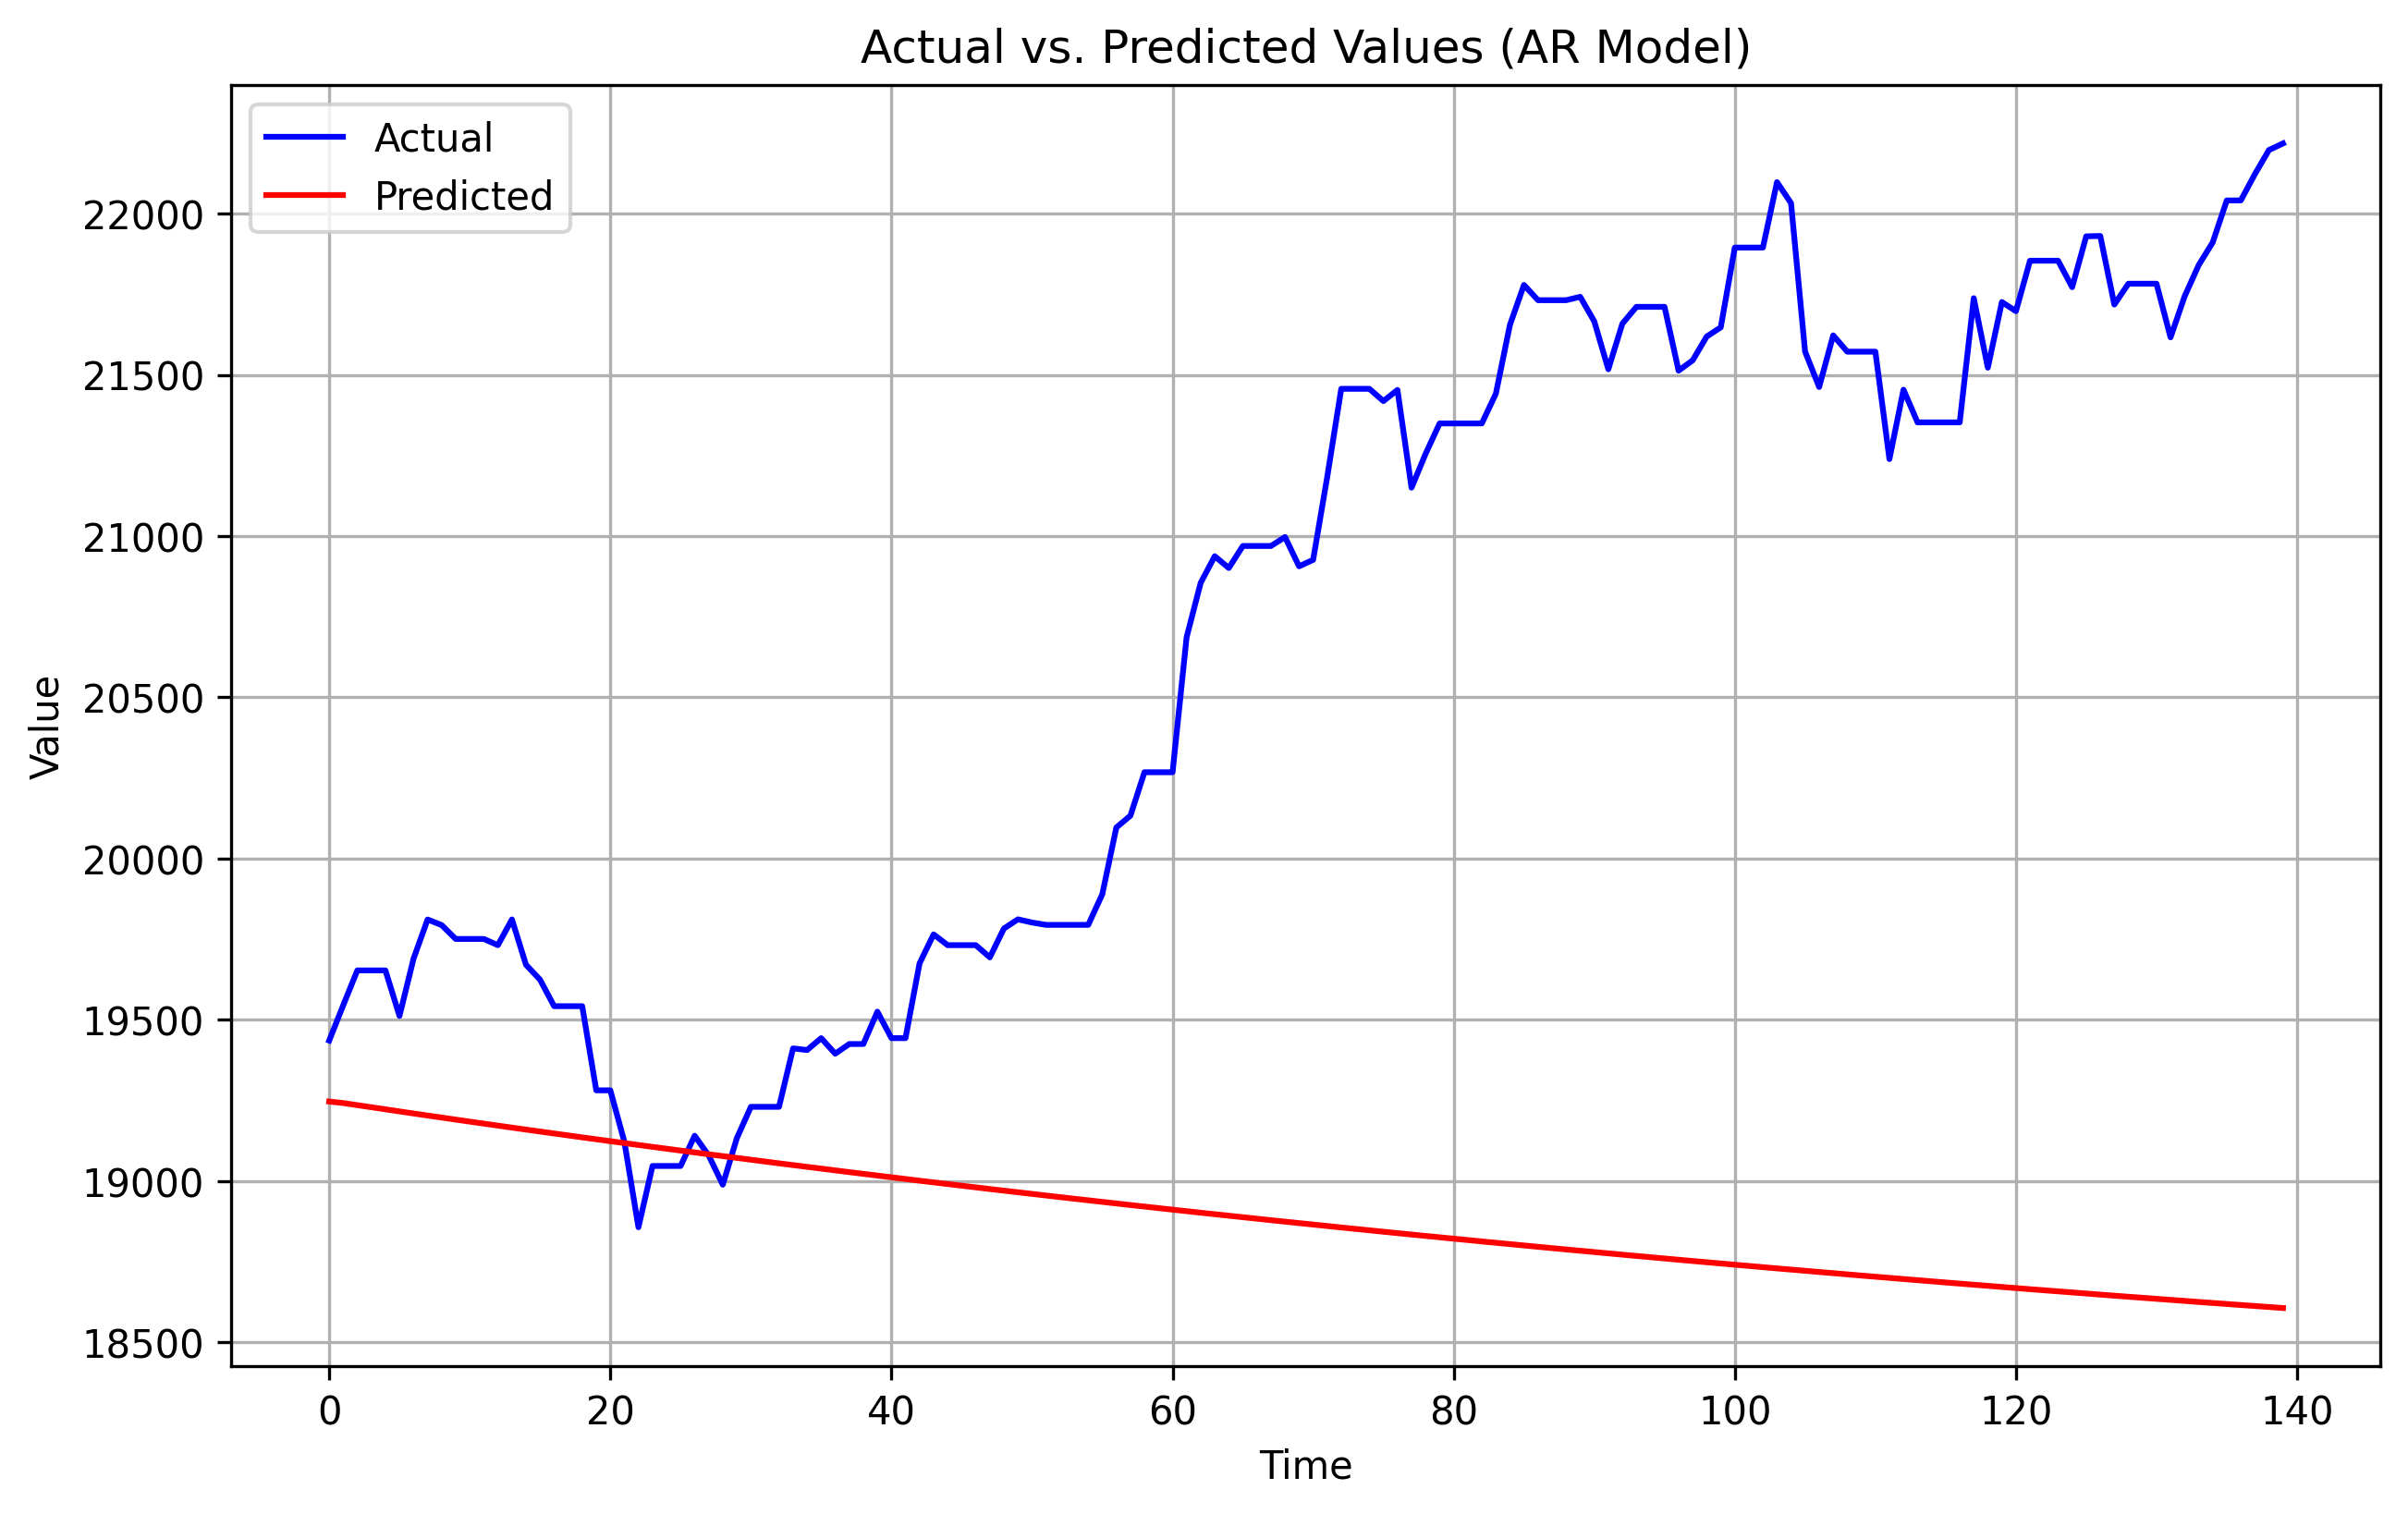

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6),dpi=300)
plt.plot(y_test_ar_denormalized.values, label='Actual', color='blue')
plt.plot(y_pred_ar_denormalized.values, label='Predicted', color='red')
plt.title('Actual vs. Predicted Values (AR Model)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('AR_lag3.png')
plt.show()


Ridge Lasso

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
# Fit Ridge regression model
ridge_model = Ridge(alpha=2.0)
ridge_model.fit(X_train, y_train)

# Fit Lasso regression model
lasso_model = Lasso(alpha=2.0)
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

#deormalize
y_pred_ridge_denormalized = denormalize(y_pred_ridge, min_val, max_val)
y_pred_lasso_denormalized = denormalize(y_pred_lasso, min_val, max_val)

# Denormalize the actual values
y_test_denormalized = denormalize(y_test, min_val, max_val)

# Evaluate
ridge_mse = mean_squared_error(y_test_denormalized, y_pred_ridge_denormalized)
lasso_mse = mean_squared_error(y_test_denormalized, y_pred_lasso_denormalized)

# Calculate RMSE
ridge_rmse = mean_squared_error(y_test_denormalized, y_pred_ridge_denormalized,squared = False)
lasso_rmse = mean_squared_error(y_test_denormalized, y_pred_lasso_denormalized,squared = False)

print("Ridge Mean Squared Error:", ridge_mse)
print("Lasso Mean Squared Error:", lasso_mse)

print("Ridge Root Mean Squared Error:", ridge_rmse)
print("Lasso Roor Mean Squared Error:", lasso_rmse)

Ridge Mean Squared Error: 16657.182637411963
Lasso Mean Squared Error: 9333524.431723662
Ridge Root Mean Squared Error: 129.06270815929736
Lasso Roor Mean Squared Error: 3055.0817389594768


In [ ]:
y_test_denormalized

0      19436.10
1      19545.75
2      19653.50
3      19653.50
4      19653.50
         ...   
135    22040.70
136    22040.70
137    22122.25
138    22196.95
139    22217.45
Name: Close , Length: 140, dtype: float64

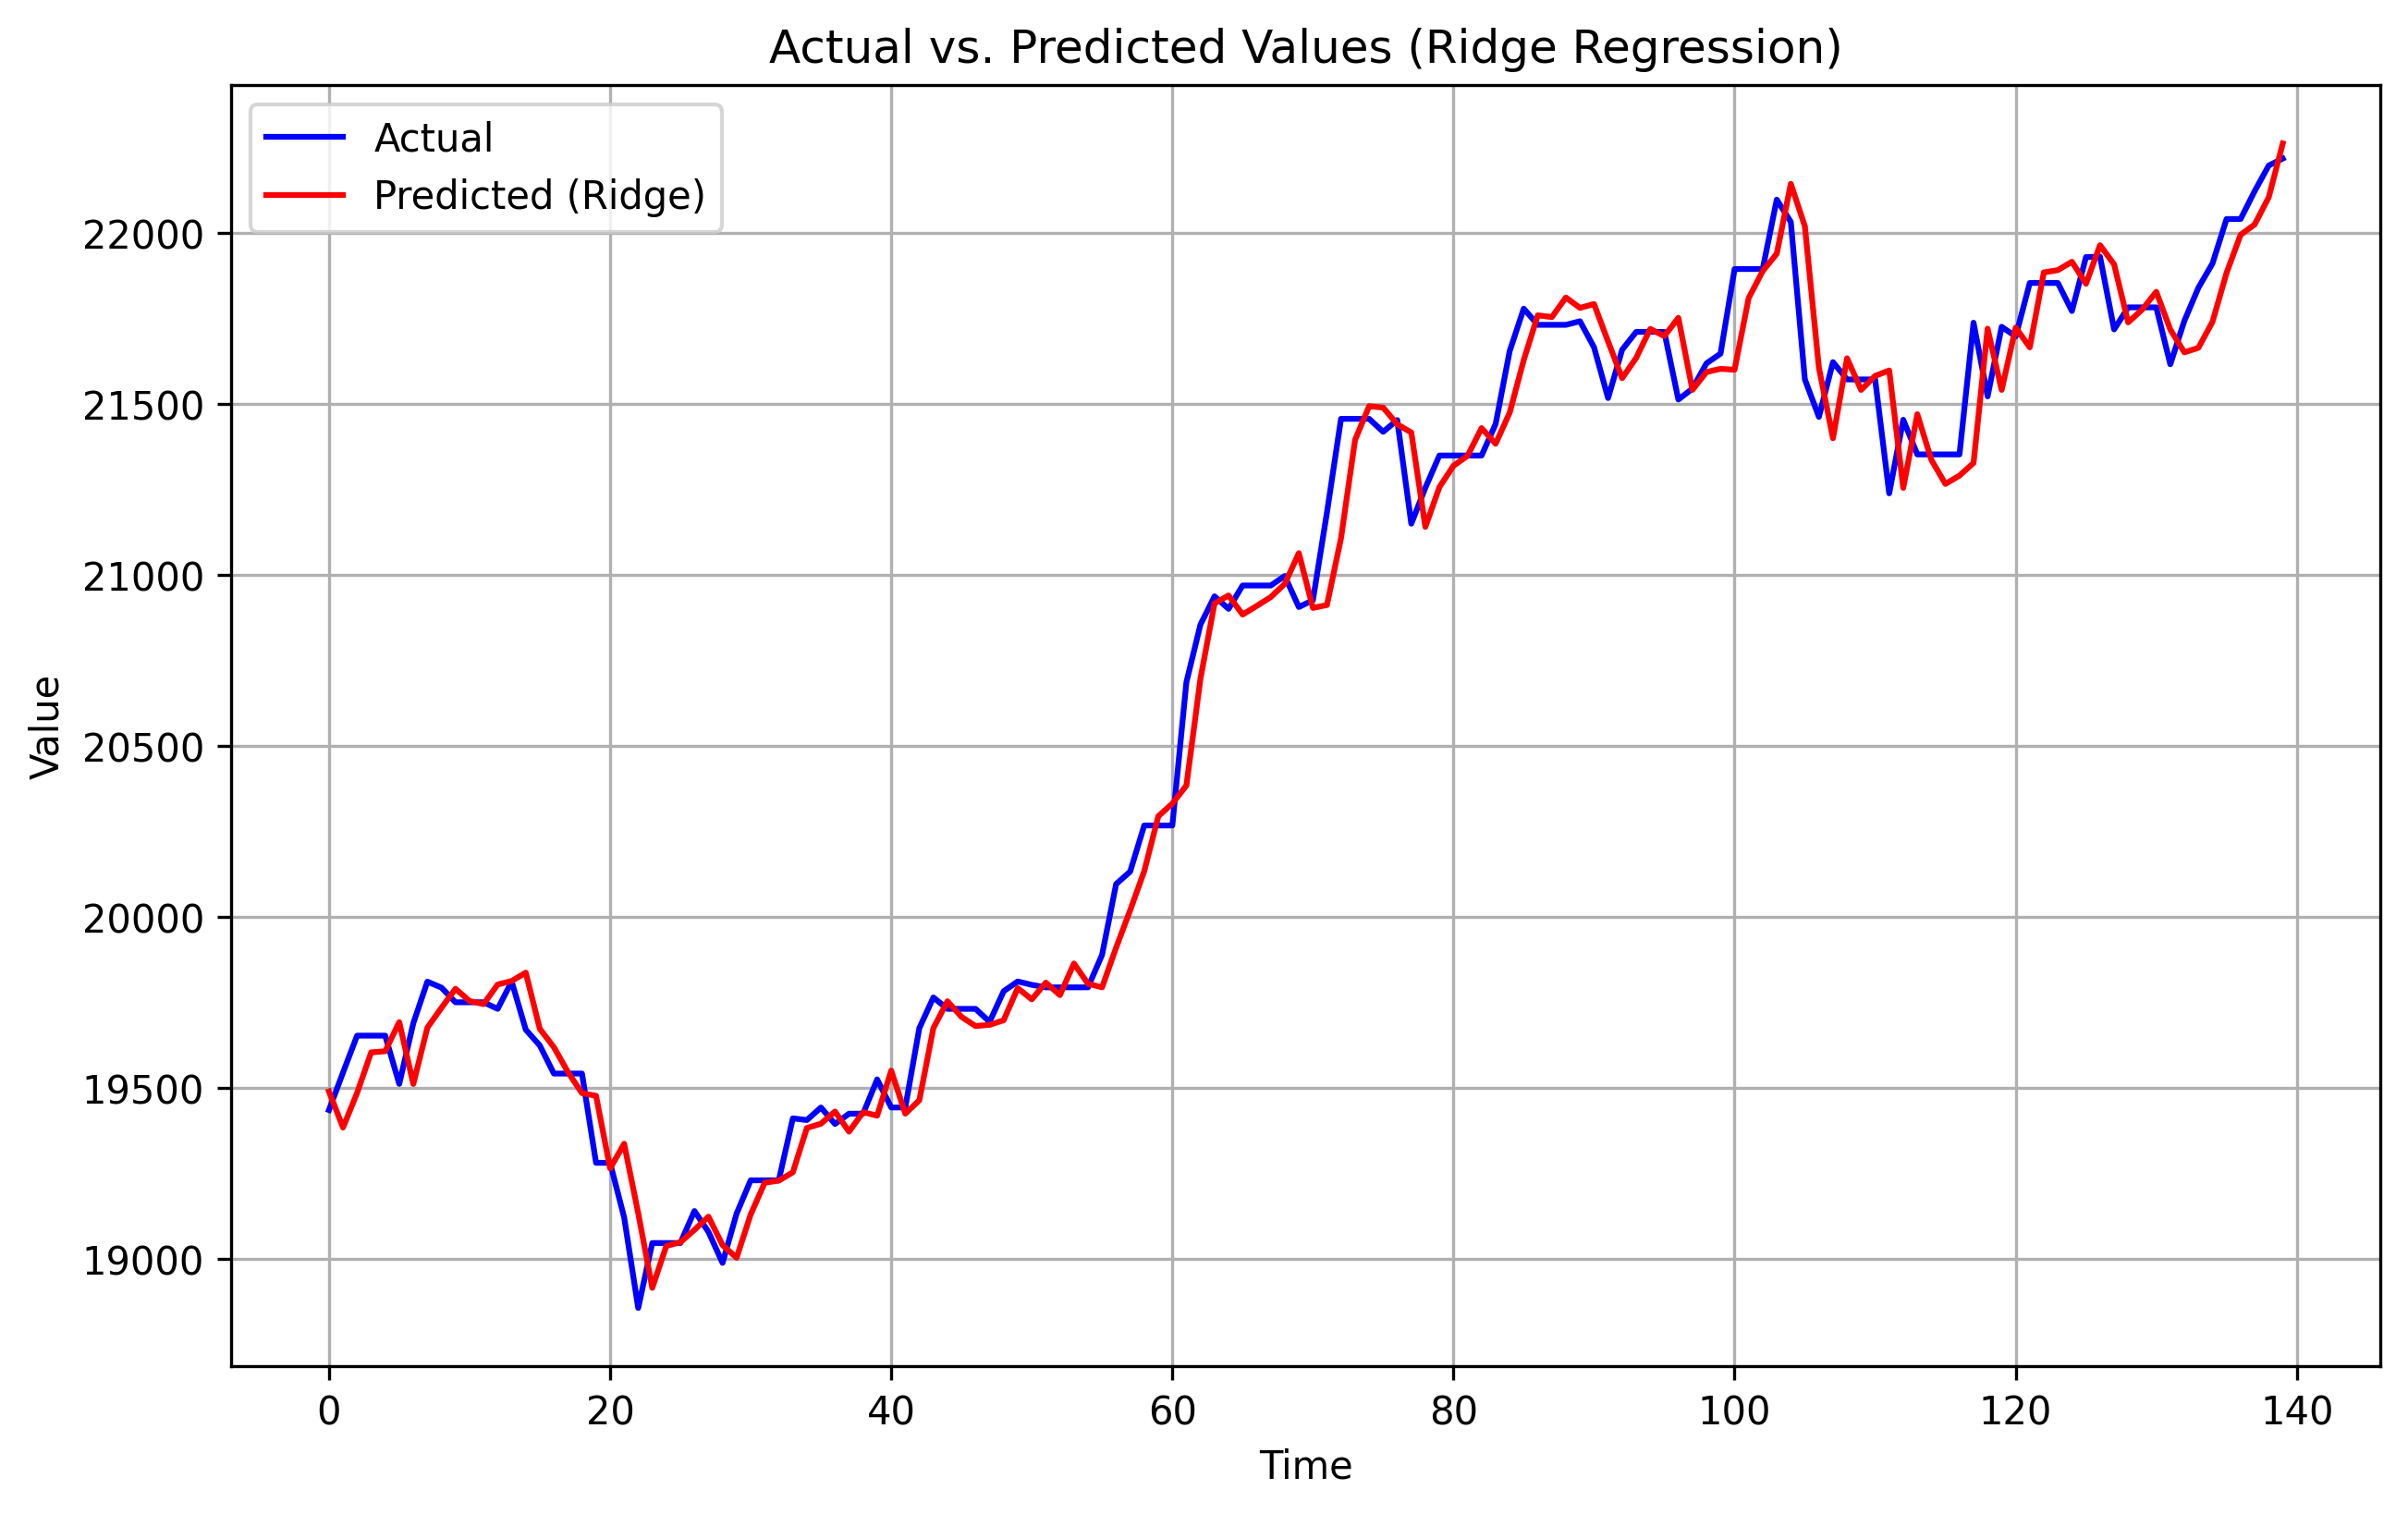

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values for Ridge regression
plt.figure(figsize=(10, 6),dpi=300)
plt.plot(y_test_denormalized.values, label='Actual', color='blue')  # Convert Series to NumPy array using .values
plt.plot(y_pred_ridge_denormalized, label='Predicted (Ridge)', color='red')
plt.title('Actual vs. Predicted Values (Ridge Regression)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('ridge_lag3.png')
plt.show()


Ridge and Lasso with grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Define alpha values to search
alphas = [0.1,0.25, 0.5,0.75, 1.0,1.5, 2.0, 3.0, 4.0, 5.0]

# Grid Search for Ridge regression
ridge_param_grid = {'alpha': alphas}
ridge_grid_search = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

# Best alpha for Ridge
best_alpha_ridge = ridge_grid_search.best_params_['alpha']

# Fit Ridge regression model with best alpha
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train, y_train)

# Grid Search for Lasso regression
lasso_param_grid = {'alpha': alphas}
lasso_grid_search = GridSearchCV(Lasso(), lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

# Best alpha for Lasso
best_alpha_lasso = lasso_grid_search.best_params_['alpha']

# Fit Lasso regression model with best alpha
lasso_model = Lasso(alpha=best_alpha_lasso)
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

#deormalize
y_pred_ridge_denormalized = denormalize(y_pred_ridge, min_val, max_val)
y_pred_lasso_denormalized = denormalize(y_pred_lasso, min_val, max_val)

# Denormalize the actual values
y_test_denormalized = denormalize(y_test, min_val, max_val)

# Evaluate
ridge_mse = mean_squared_error(y_test_denormalized, y_pred_ridge_denormalized)
lasso_mse = mean_squared_error(y_test_denormalized, y_pred_lasso_denormalized)

# Calculate RMSE
ridge_rmse = mean_squared_error(y_test_denormalized, y_pred_ridge_denormalized,squared = False)
lasso_rmse = mean_squared_error(y_test_denormalized, y_pred_lasso_denormalized,squared = False)

print("Ridge Mean Squared Error:", ridge_mse)
print("Lasso Mean Squared Error:", lasso_mse)

print("Ridge Root Mean Squared Error:", ridge_rmse)
print("Lasso Roor Mean Squared Error:", lasso_rmse)

print("Best alpha for Ridge:", best_alpha_ridge)
print("Best alpha for Lasso:", best_alpha_lasso)


Ridge Mean Squared Error: 16575.602056141524
Lasso Mean Squared Error: 49932.99022880269
Ridge Root Mean Squared Error: 128.7462700669092
Lasso Roor Mean Squared Error: 223.45690910957015
Best alpha for Ridge: 0.1
Best alpha for Lasso: 0.1


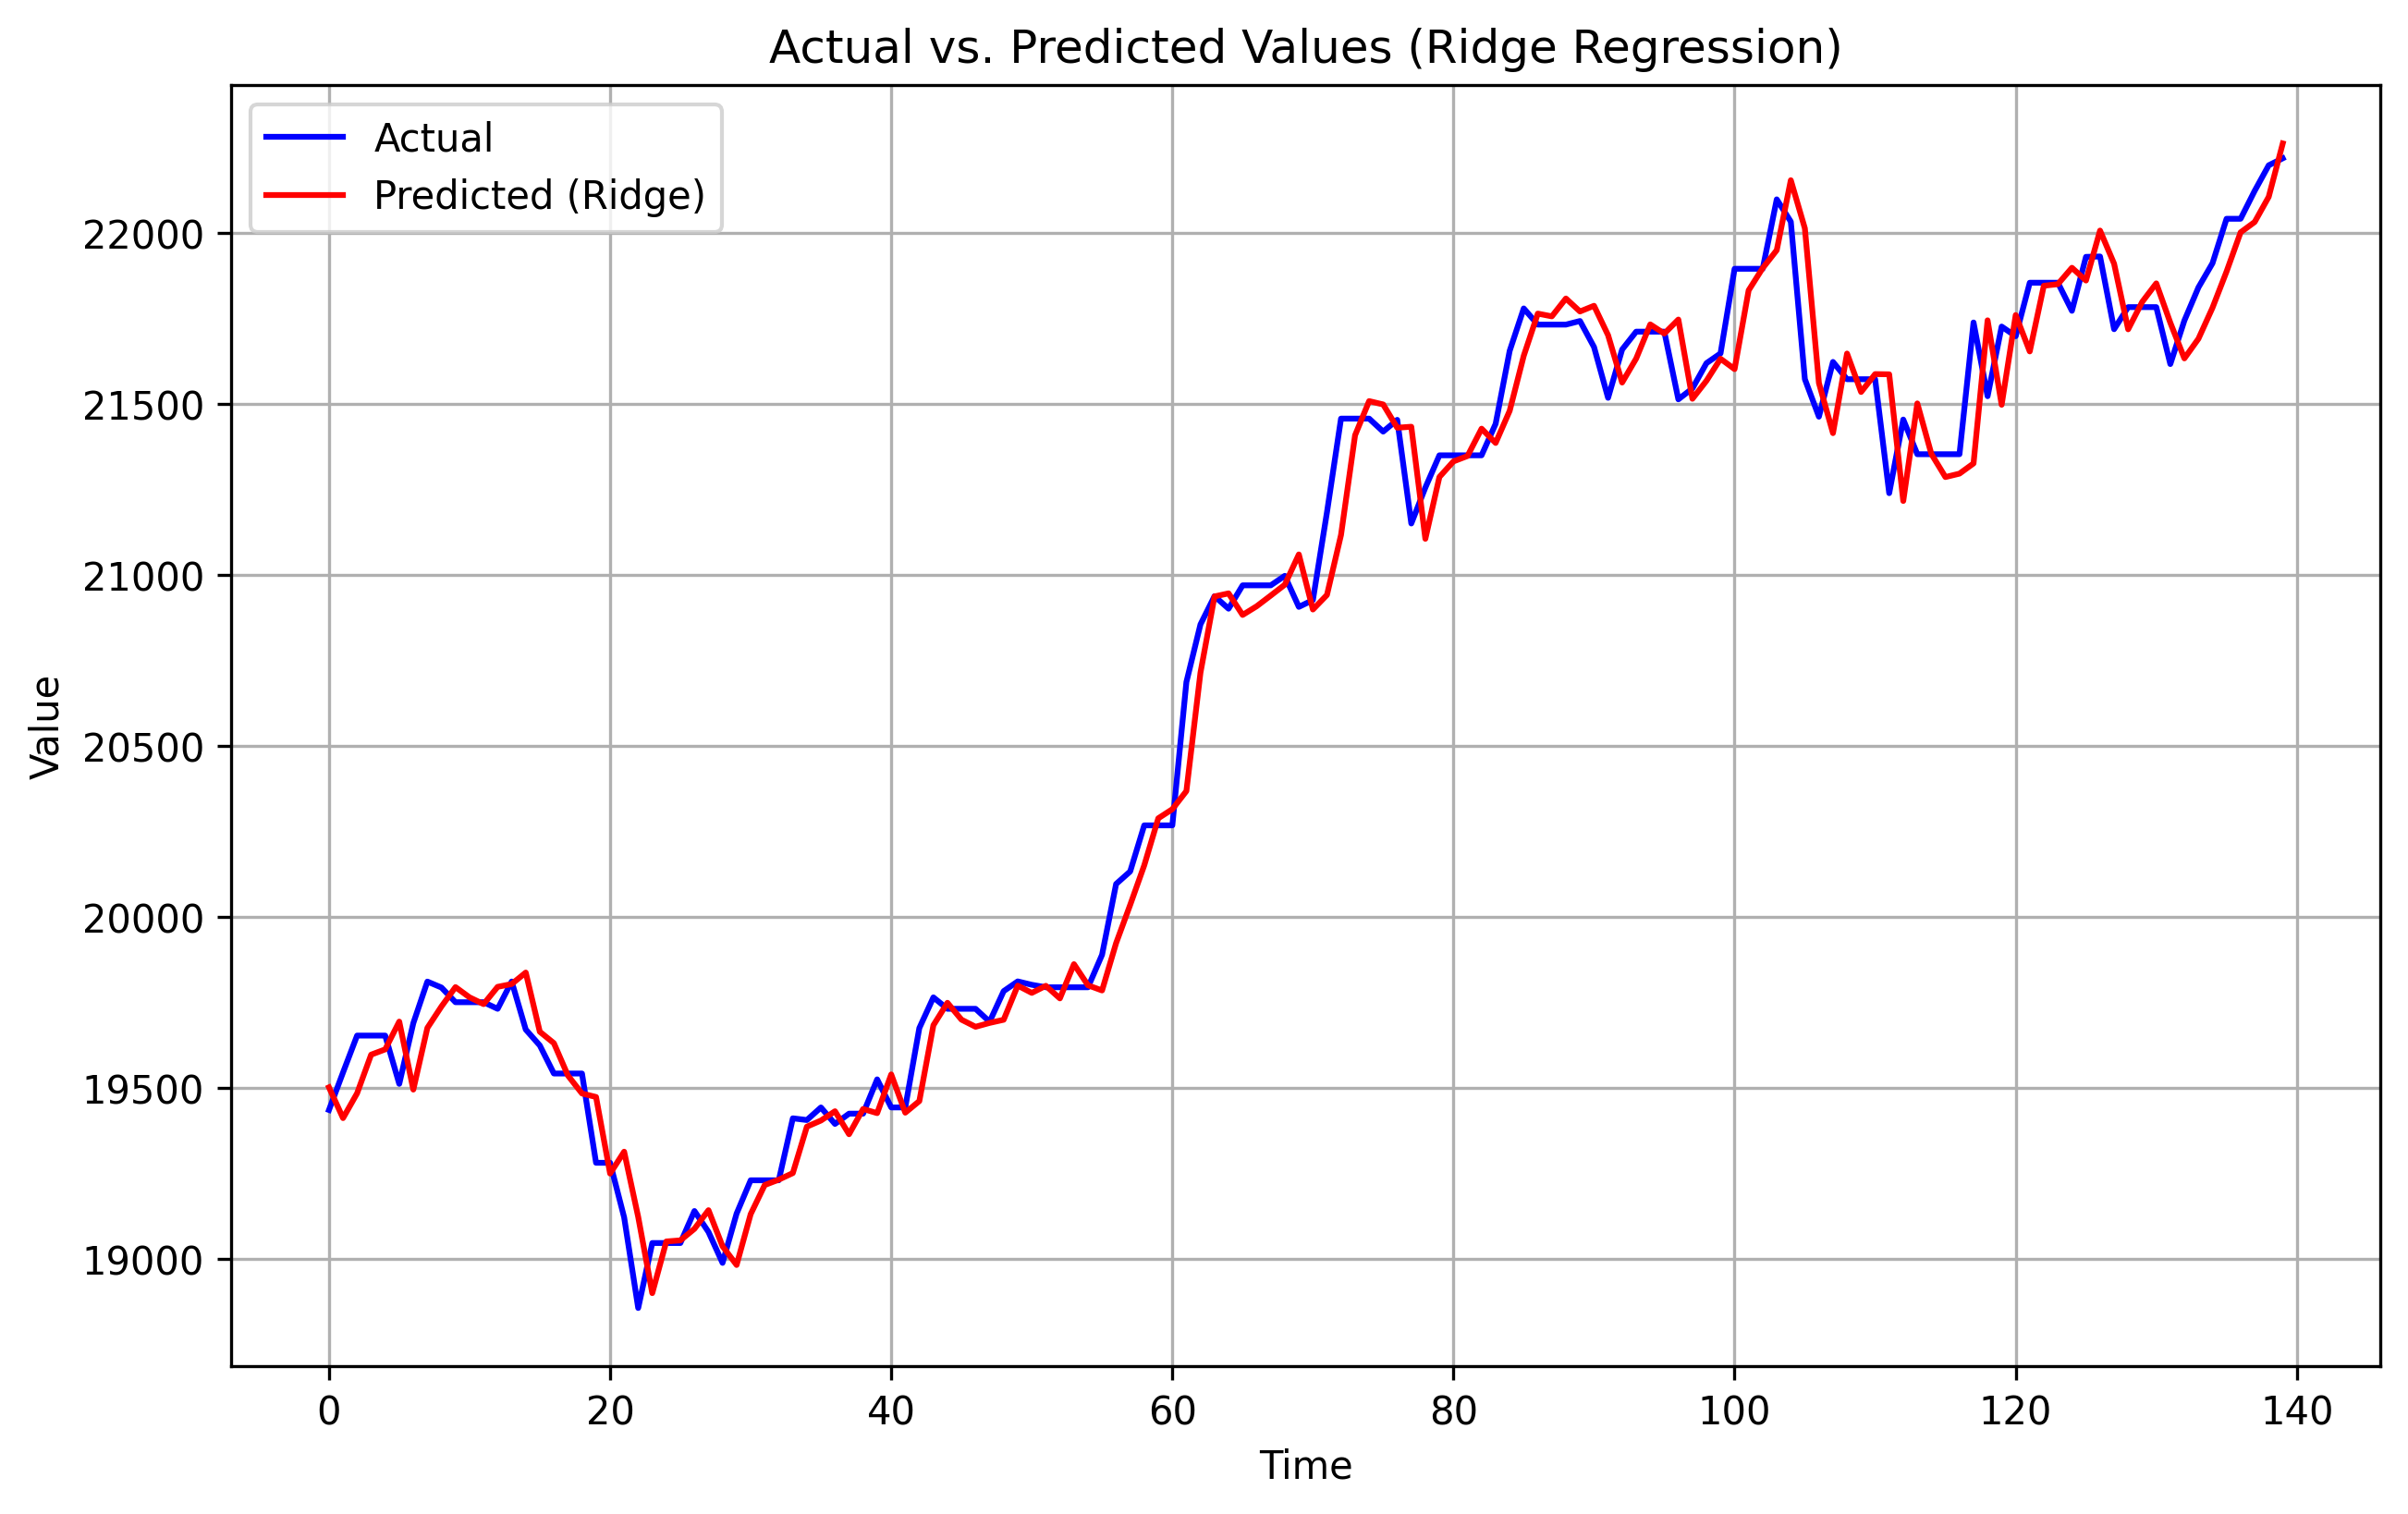

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values for Ridge regression
plt.figure(figsize=(10, 6),dpi=300)
plt.plot(y_test_denormalized.values, label='Actual', color='blue')
plt.plot(y_pred_ridge_denormalized, label='Predicted (Ridge)', color='red')
plt.title('Actual vs. Predicted Values (Ridge Regression)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('ridge_with_grid_lag3.png')
plt.show()


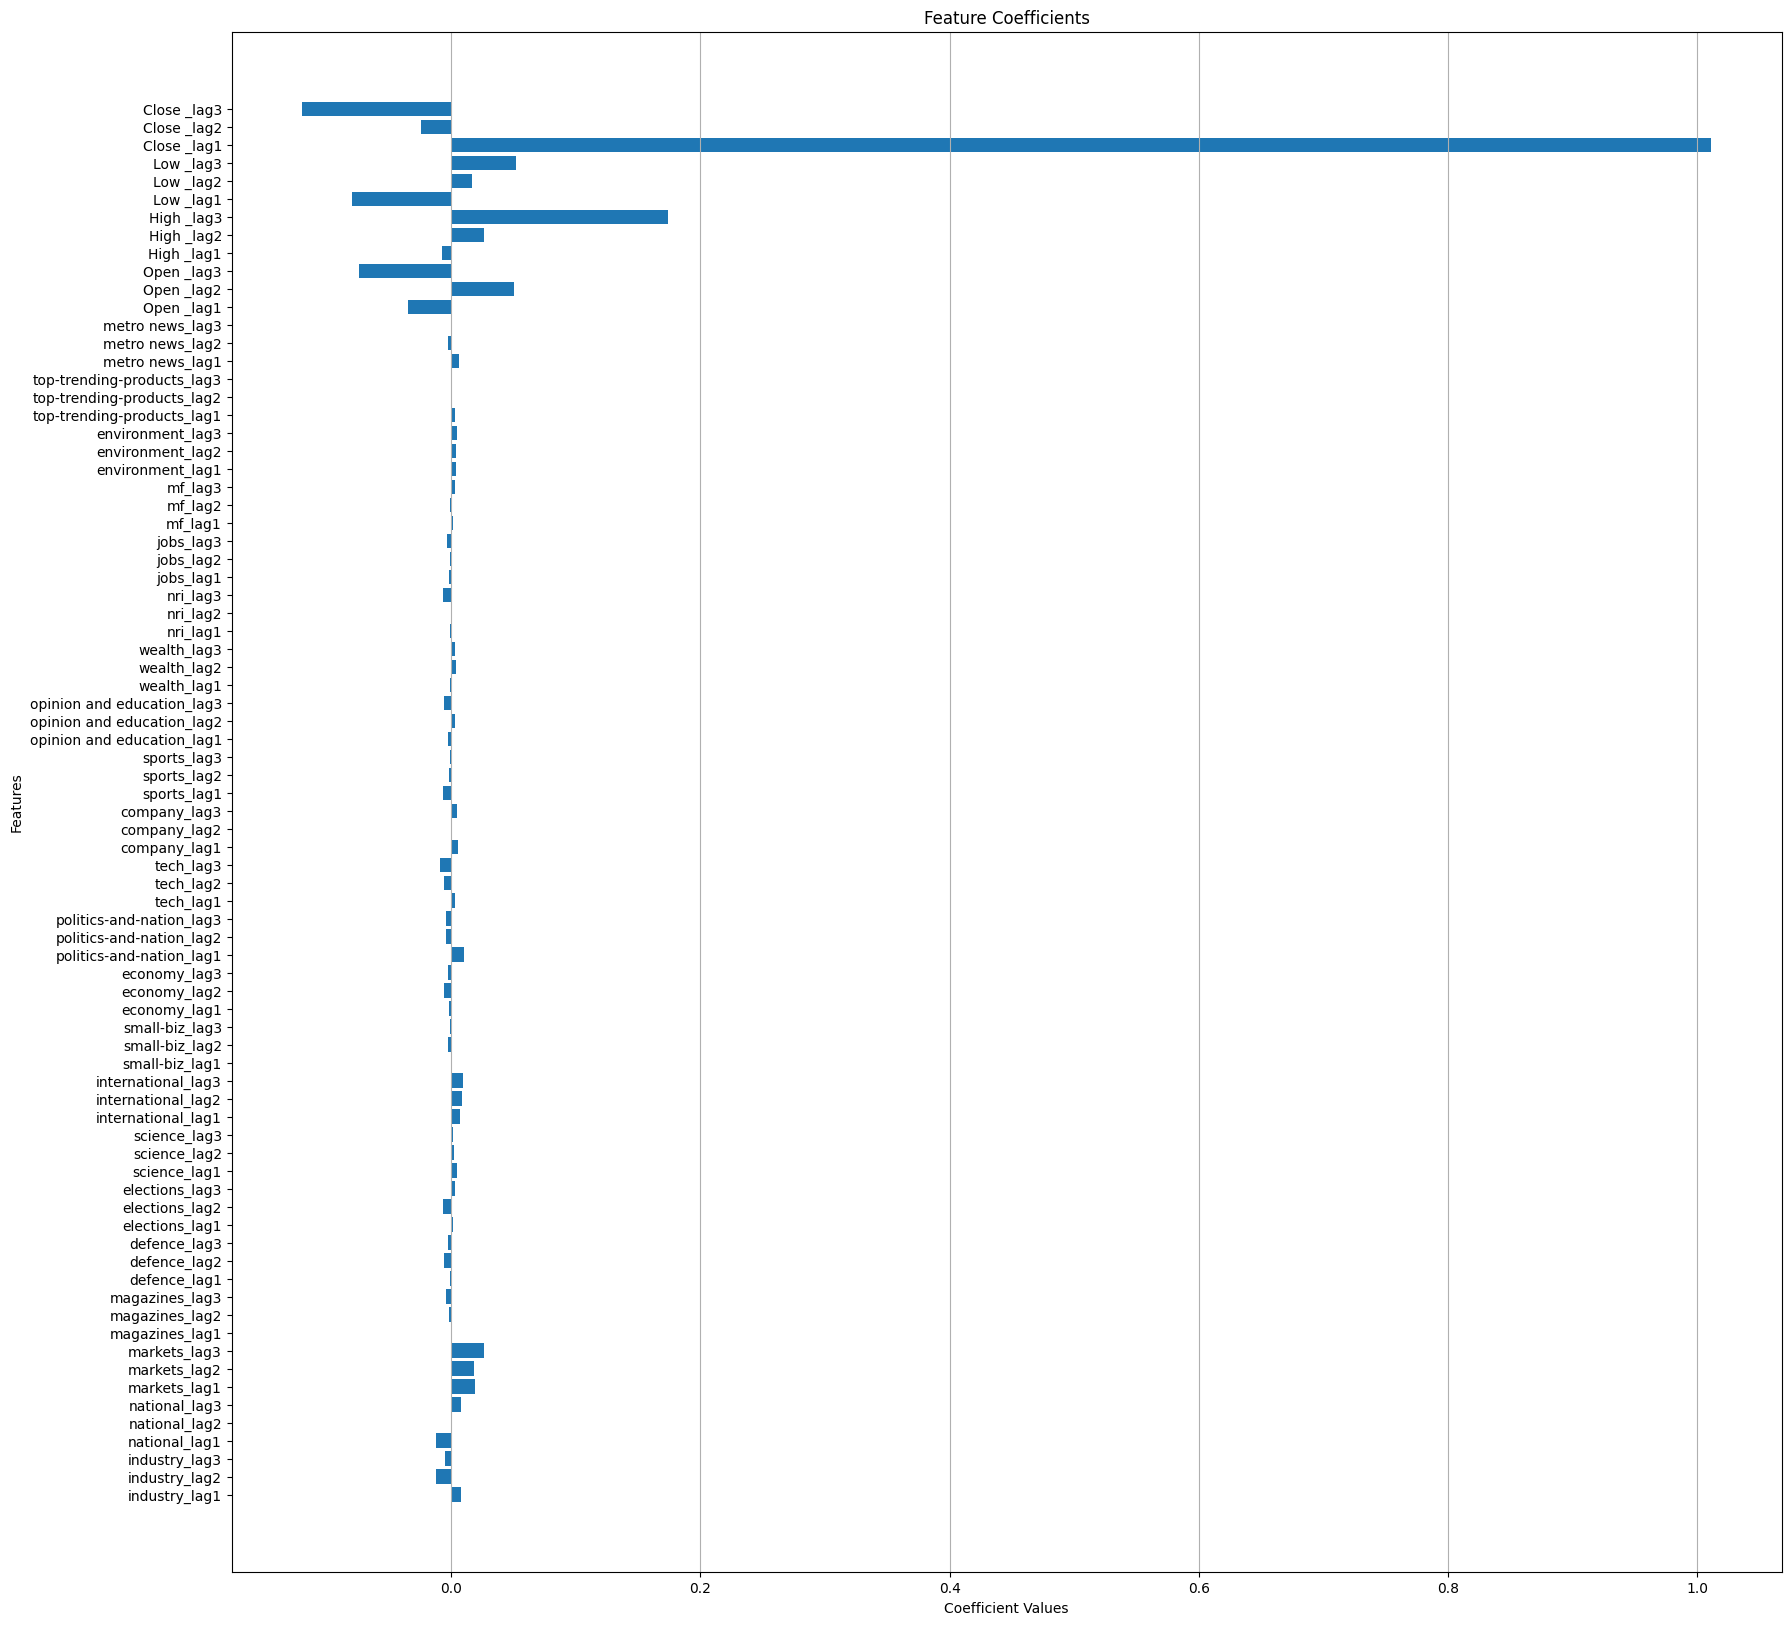

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming ridge_model is your trained Ridge regression model

# Get coefficients of the model
coefficients = ridge_model.coef_

# Feature names or indices
# Assuming you have a list of feature names, if not, you can just use indices
# feature_names = [...]

# Plotting
plt.figure(figsize=(20, 20))
plt.barh(range(len(coefficients)), coefficients, align='center')
plt.yticks(range(len(coefficients)), X_train.columns)  # Use feature names directly for y-axis
plt.xlabel('Coefficient Values')
plt.ylabel('Features')
plt.title('Feature Coefficients')
plt.grid(axis='x')  # Add gridlines to x-axis for better readability
plt.show()


In [ ]:
import pandas as pd

# Assuming ridge_model_H is your trained Ridge regression model
coefficients = ridge_model.coef_

# Create a DataFrame to hold feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Exclude specified features
features_to_exclude = ['Open _lag1', 'Open _lag2', 'Open _lag3','Open _lag4','Open _lag5',
                        'High _lag1', 'High _lag2', 'High _lag3','High _lag4','High _lag5',
                        'Low _lag1', 'Low _lag2', 'Low _lag3','Low _lag4','Low _lag5',
                        'Close _lag1', 'Close _lag2', 'Close _lag3','Close _lag4','Close _lag5']
coefficients_df = coefficients_df[~coefficients_df['Feature'].isin(features_to_exclude)]

# Sort the DataFrame by coefficient values in descending order (from best to worst)
coefficients_df= coefficients_df.sort_values(by='Coefficient', ascending=False)

# Print the sorted DataFrame
coefficients_df

,Feature,Coefficient
8,markets_lag3,0.026783
6,markets_lag1,0.019582
7,markets_lag2,0.018240
30,politics-and-nation_lag1,0.010176
23,international_lag3,0.009357
...,...,...
16,elections_lag2,-0.006403
50,nri_lag3,-0.006609
35,tech_lag3,-0.009087
3,national_lag1,-0.011927


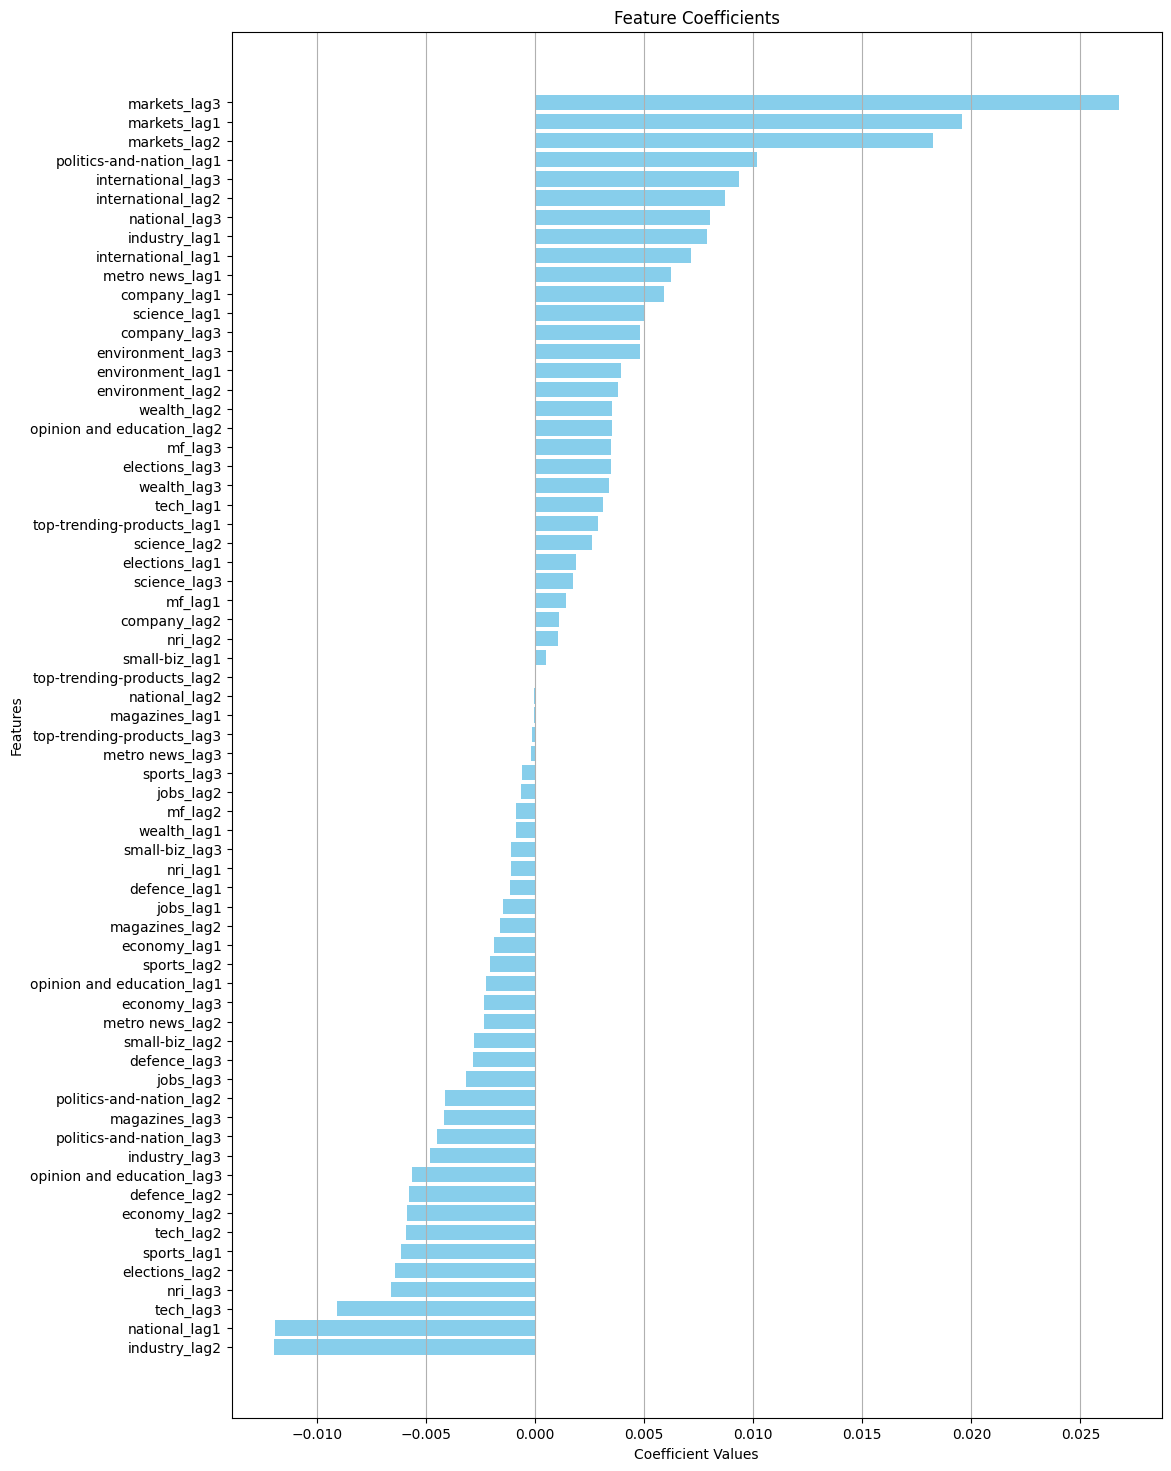

In [ ]:
plt.figure(figsize=(12, 18))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Values')
plt.ylabel('Features')
plt.title('Feature Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest coefficient at the top
plt.grid(axis='x')  # Add gridlines to x-axis for better readability
plt.show()

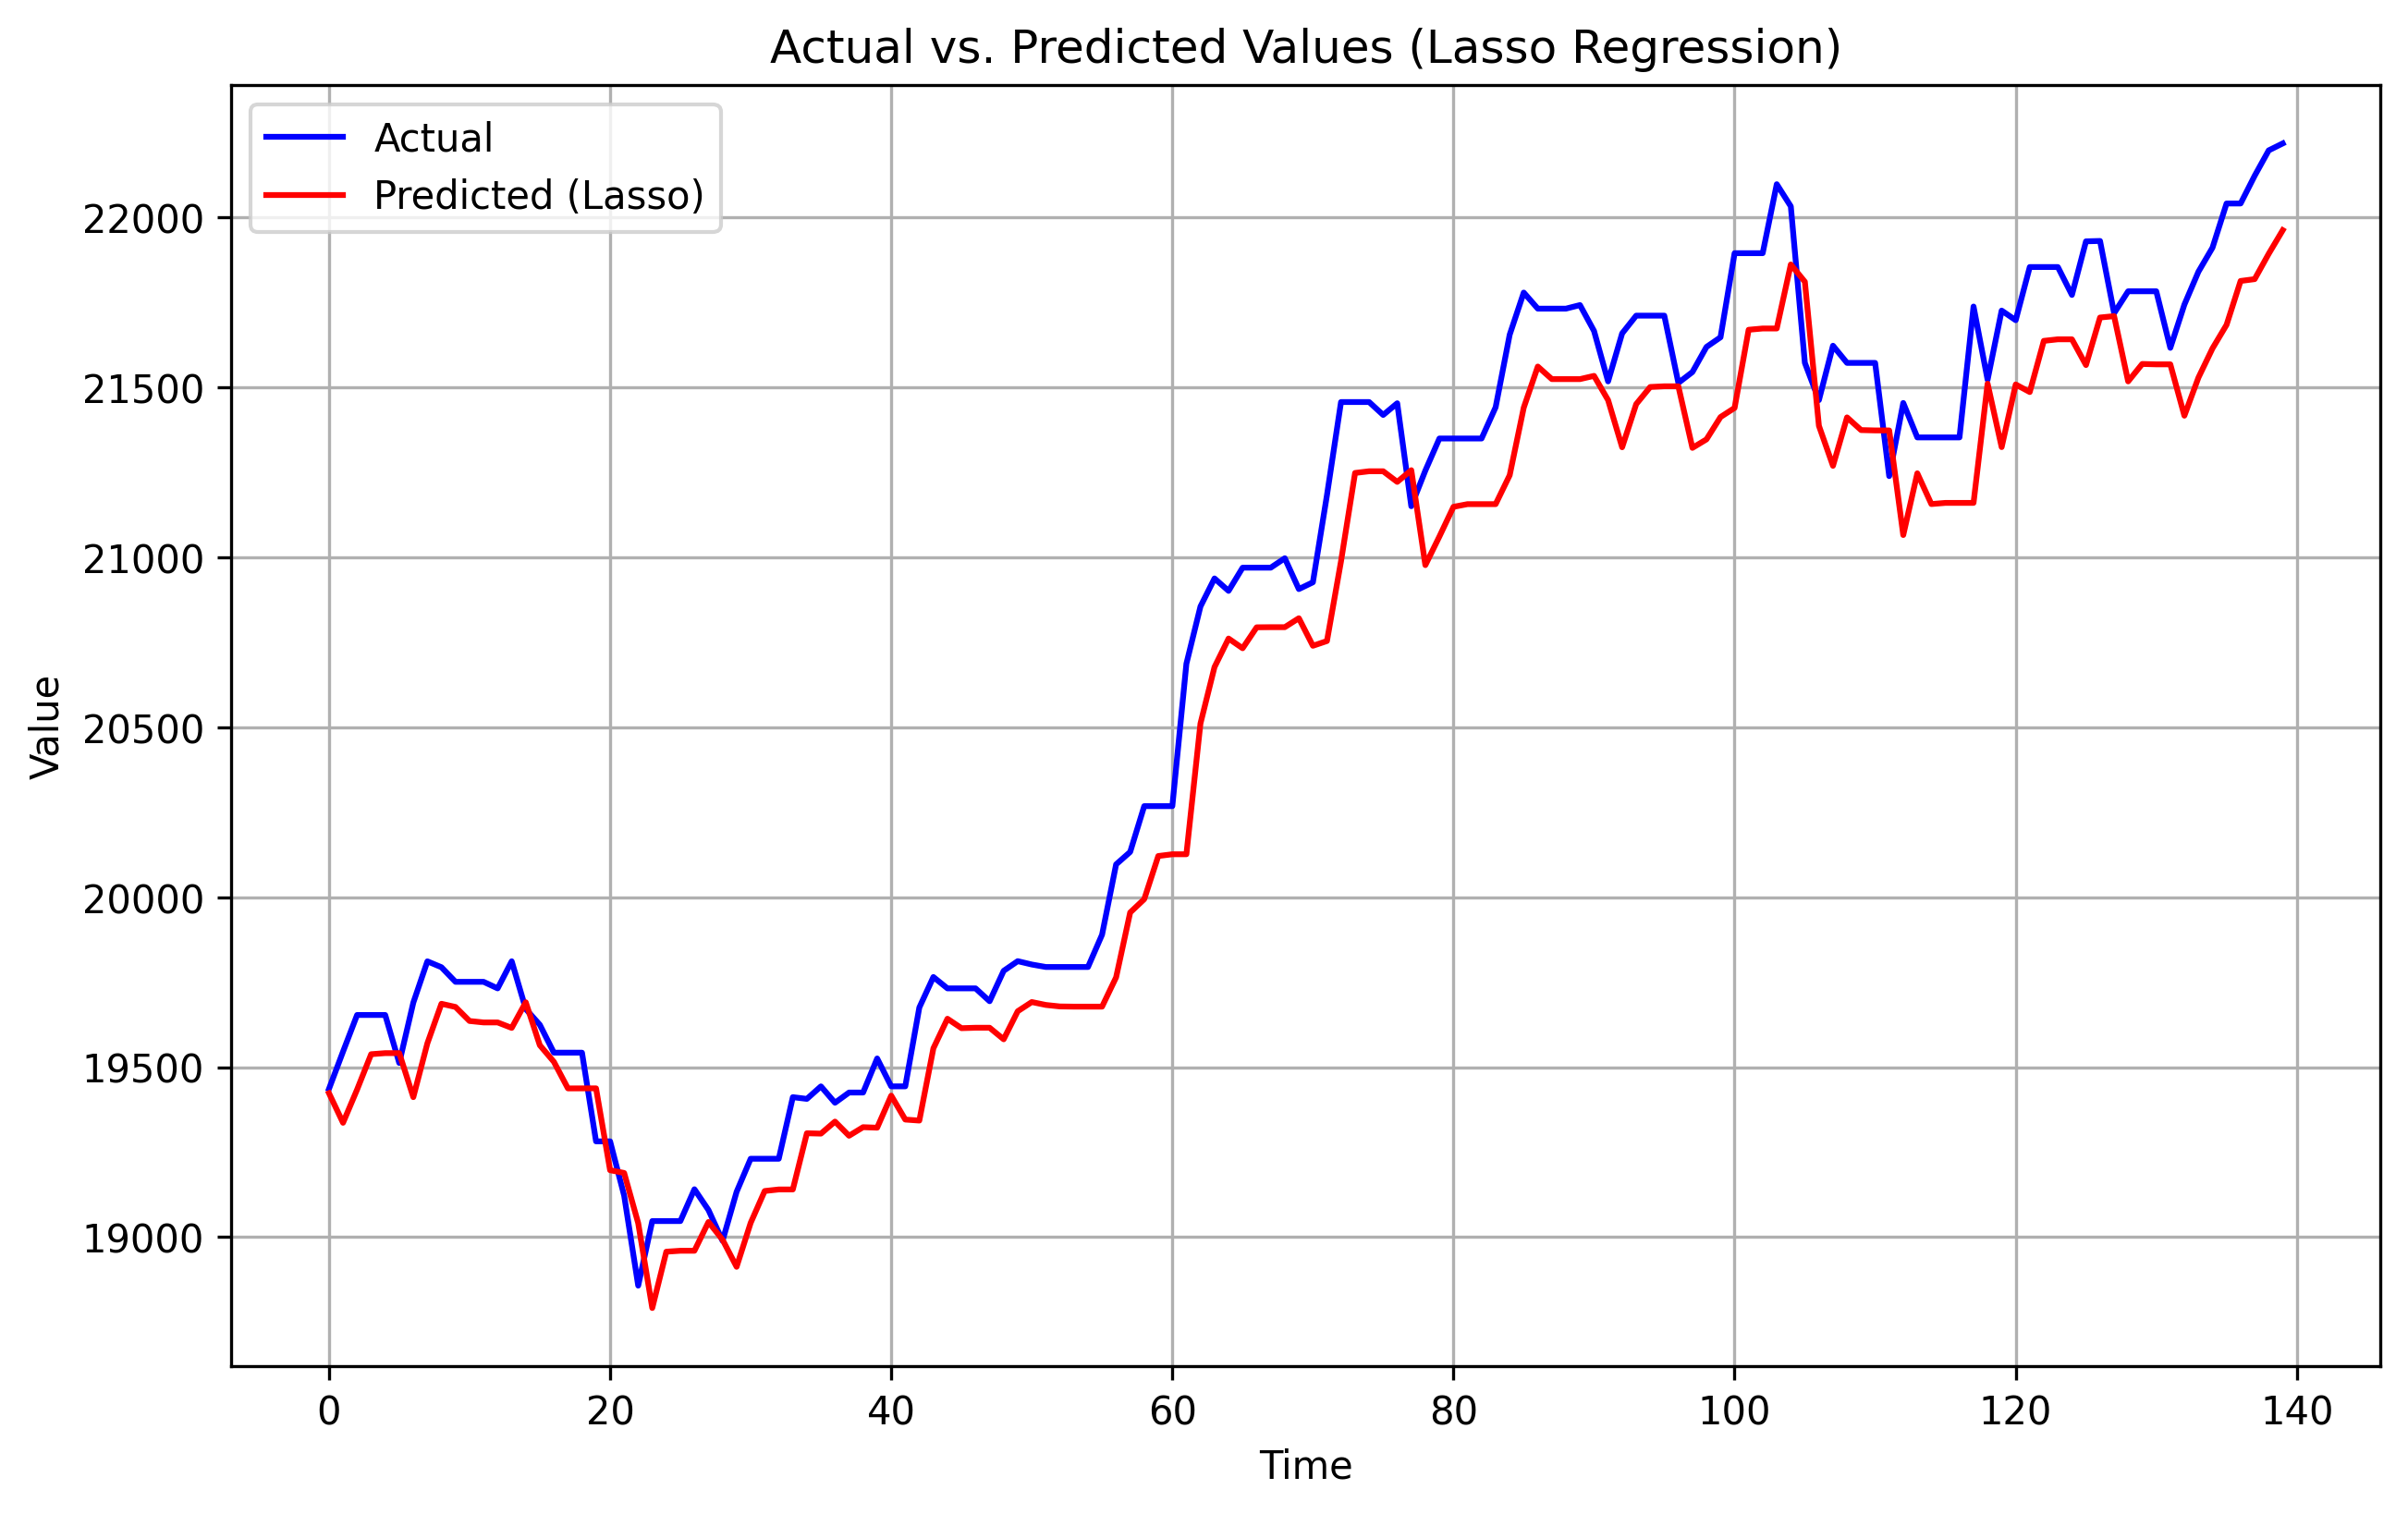

In [ ]:
# Plot actual vs. predicted values for Lasso regression
plt.figure(figsize=(10, 6),dpi=300)
plt.plot(y_test_denormalized.values, label='Actual', color='blue')
plt.plot(y_pred_lasso_denormalized, label='Predicted (Lasso)', color='red')
plt.title('Actual vs. Predicted Values (Lasso Regression)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('lasso_lag3.png')
plt.show()


In [ ]:
lasso_model.coef_

array([ 0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [ ]:
coefficients = lasso_model.coef_

# Feature names or indices
# Assuming you have a list of feature names, if not, you can just use indices
# feature_names = [...]

# Plotting
plt.figure(figsize=(20, 20))
plt.barh(range(len(coefficients)), coefficients, align='center')
plt.yticks(range(len(coefficients)), X_train.columns)  # Use feature names directly for y-axis
plt.xlabel('Coefficient Values')
plt.ylabel('Features')
plt.title('Feature Coefficients')
plt.grid(axis='x')  # Add gridlines to x-axis for better readability
plt.show()


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define alpha values to search
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
# Define l1_ratio values to search
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

# Grid Search for Elastic Net regression
param_grid = {'alpha': alphas, 'l1_ratio': l1_ratios}
elastic_net_grid_search = GridSearchCV(ElasticNet(), param_grid, cv=5, scoring='neg_mean_squared_error')
elastic_net_grid_search.fit(X_train, y_train)

# Best alpha and l1_ratio for Elastic Net
best_alpha_elastic_net = elastic_net_grid_search.best_params_['alpha']
best_l1_ratio_elastic_net = elastic_net_grid_search.best_params_['l1_ratio']

# Fit Elastic Net regression model with best alpha and l1_ratio
elastic_net_model = ElasticNet(alpha=best_alpha_elastic_net, l1_ratio=best_l1_ratio_elastic_net)
elastic_net_model.fit(X_train, y_train)

# Predictions
y_pred_elastic_net = elastic_net_model.predict(X_test)

#Denormalize
y_pred_elastic_net_denormalized = denormalize(y_pred_elastic_net, min_val, max_val)

# Denormalize the actual values
y_test_denormalized = denormalize(y_test, min_val, max_val)

# Evaluate
elastic_net_mse = mean_squared_error(y_test_denormalized, y_pred_elastic_net_denormalized)
elastic_net_rmse = mean_squared_error(y_test_denormalized, y_pred_elastic_net_denormalized, squared=False)

print("Elastic Net Mean Squared Error:", elastic_net_mse)
print("Elastic Net Root Mean Squared Error:", elastic_net_rmse)
print("Best alpha for Elastic Net:", best_alpha_elastic_net)
print("Best l1_ratio for Elastic Net:", best_l1_ratio_elastic_net)


In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values for Elastic Net regression
plt.figure(figsize=(10, 6),dpi=300)
plt.plot(y_test_denormalized.values, label='Actual', color='blue')
plt.plot(y_pred_elastic_net_denormalized, label='Predicted (Elastic Net)', color='red')
plt.title('Actual vs. Predicted Values (Elastic Net Regression)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('EN_lag3.png')
plt.show()


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Fit Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)

#deormalize
y_pred_linear_denormalized = denormalize(y_pred_linear, min_val, max_val)

# Denormalize the actual values
y_test_denormalized = denormalize(y_test, min_val, max_val)

# Evaluate
linear_mse = mean_squared_error(y_test_denormalized, y_pred_linear_denormalized)
linear_rmse = mean_squared_error(y_test_denormalized, y_pred_linear_denormalized, squared=False)

print("Linear Regression Mean Squared Error:", linear_mse)
print("Linear Regression Root Mean Squared Error:", linear_rmse)




In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values for Linear Regression
plt.figure(figsize=(10, 6),dpi=300)
plt.plot(y_test_denormalized.values, label='Actual', color='blue')
plt.plot(y_pred_linear_denormalized, label='Predicted (Linear Regression)', color='red')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('LR_lag3.png')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming ridge_model is your trained Ridge regression model

# Get coefficients of the model
coefficients = linear_model.coef_

# Feature names or indices
# Assuming you have a list of feature names, if not, you can just use indices
# feature_names = [...]

# Plotting
plt.figure(figsize=(20, 20))
plt.barh(range(len(coefficients)), coefficients, align='center')
plt.yticks(range(len(coefficients)), X_train.columns)  # Use feature names directly for y-axis
plt.xlabel('Coefficient Values')
plt.ylabel('Features')
plt.title('Feature Coefficients')
plt.grid(axis='x')  # Add gridlines to x-axis for better readability
plt.show()


In [ ]:
import pandas as pd

# Assuming ridge_model_H is your trained Ridge regression model
coefficients = linear_model.coef_

# Create a DataFrame to hold feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Exclude specified features
features_to_exclude = ['Open _lag1', 'Open _lag2', 'Open _lag3','Open _lag4','Open _lag5',
                        'High _lag1', 'High _lag2', 'High _lag3','High _lag4','High _lag5',
                        'Low _lag1', 'Low _lag2', 'Low _lag3','Low _lag4','Low _lag5',
                        'Close _lag1', 'Close _lag2', 'Close _lag3','Close _lag4','Close _lag5']
coefficients_df = coefficients_df[~coefficients_df['Feature'].isin(features_to_exclude)]

# Sort the DataFrame by coefficient values in descending order (from best to worst)
coefficients_df_L= coefficients_df.sort_values(by='Coefficient', ascending=False)

# Print the sorted DataFrame
coefficients_df_L

In [ ]:
plt.figure(figsize=(12, 18))
plt.barh(coefficients_df_L['Feature'], coefficients_df_L['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Values')
plt.ylabel('Features')
plt.title('Feature Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest coefficient at the top
plt.grid(axis='x')  # Add gridlines to x-axis for better readability
plt.show()